In [1]:
from src.time_series_prep import *
import pandas as pd
from models.shared_layer import *
from torchviz import make_dot
from torchsummary import summary
from src.data_preprocessing import *
from src.visualizations import *
from src.global_configs import *
from src.time_series_prep import *
import logging
from src.post_processing import *
from collections import defaultdict
# Initialize logger
logging.basicConfig(
    filename='training.log',  # File where logs will be saved
    level=logging.INFO,  # Set logging level to INFO
    format='%(asctime)s - %(levelname)s - %(message)s',  # Log format
    # filemode='w'  # Overwrite log file on each run
)
logger = logging.getLogger()

In [2]:
model_type = 'personalized'

scaler, train_patients, test_patients = process_all_csv_files_personalized(input_folder, output_folder)

In [3]:
# prediction_horizons = [15,30,60,90,120,150,180]
prediction_horizons = [3, 6, 9, 12, 15, 18]

histories_withval_PHs =  {key: [] for key in prediction_horizons}
histories_noval_PHs = {key: [] for key in prediction_horizons}
# abs_patients_errors_PHs =  {key: [] for key in prediction_horizons}
# squared_patients_errors_PHs =  {key: [] for key in prediction_horizons}

MAE_Patients_PHs =  {key: [] for key in prediction_horizons}
RMSE_Patients_PHs =  {key: [] for key in prediction_horizons}


In [4]:
for prediction_horizon in prediction_horizons:
  logger.info(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")
  print(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")


  for i, patient in enumerate(train_patients.items()):
    patient_code = patient[0]
    df = patient[1]
    logger.info(f"Patient {patient_code}")
    print(f"Patient {patient_code}")
    # print(df)

    df_test = list(test_patients.values())[i]
    

    train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                        window_size,BATCH_SIZE, prediction_horizon,
                                                                                        model_type , split_ratio=0.8, df = df, df_test = df_test, output_folder_train = None, shuffle = True)
    for r in range(5):
        model_all_train = PersonalizedModelWithAttention(input_shape =input_shape , output_shape=output_shape) 
        model_all_train = model_all_train.to(device)
        model_all_train, history2 = train_model(model_all_train, all_train_loader, val_loader = test_loader, epochs=100, learning_rate=0.00001, model_type = model_type)

        model_all_train.eval()

        torch.save(model_all_train.state_dict(), f'saved_models//model_{model_type}_{str(prediction_horizon)}_{str(patient_code)}_{r}.pth')
        
        print(f"model_{model_type}_{str(prediction_horizon)}_{str(patient_code)}_{r} saved")
        logger.info(f"model_{model_type}_{str(prediction_horizon)}_{str(patient_code)}_{r} saved")

  # histories_withval_PHs[prediction_horizon] = histories_withval
  logger.info(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")
  print(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")

      # break

Start Prediction Horizon 18 of personalized model
Patient 559
Shape of X (features): (1, 12052, 12)
Shape of y (targets): (1, 12052)
Shape of X_test (features): (1, 2847, 12)
Shape of y_test (targets): (1, 2847)


Epoch 1/100: 100%|██████████| 189/189 [00:03<00:00, 49.39batch/s, mae_loss=0.779]


Epoch [1/100], Training MAE: 0.7207, Training RMSE: 0.9058
Epoch [1/100], Validation MAE: 0.6110, Validation RMSE: 0.8142


Epoch 2/100: 100%|██████████| 189/189 [00:03<00:00, 62.47batch/s, mae_loss=0.807]


Epoch [2/100], Training MAE: 0.6888, Training RMSE: 0.8781
Epoch [2/100], Validation MAE: 0.5936, Validation RMSE: 0.7929


Epoch 3/100: 100%|██████████| 189/189 [00:02<00:00, 66.09batch/s, mae_loss=0.669]


Epoch [3/100], Training MAE: 0.6837, Training RMSE: 0.8767
Epoch [3/100], Validation MAE: 0.5859, Validation RMSE: 0.7831


Epoch 4/100: 100%|██████████| 189/189 [00:02<00:00, 64.22batch/s, mae_loss=0.672]


Epoch [4/100], Training MAE: 0.6778, Training RMSE: 0.8715
Epoch [4/100], Validation MAE: 0.5841, Validation RMSE: 0.7794


Epoch 5/100: 100%|██████████| 189/189 [00:02<00:00, 65.31batch/s, mae_loss=0.792]


Epoch [5/100], Training MAE: 0.6736, Training RMSE: 0.8664
Epoch [5/100], Validation MAE: 0.5848, Validation RMSE: 0.7792


Epoch 6/100: 100%|██████████| 189/189 [00:02<00:00, 65.20batch/s, mae_loss=0.695]


Epoch [6/100], Training MAE: 0.6680, Training RMSE: 0.8604
Epoch [6/100], Validation MAE: 0.5797, Validation RMSE: 0.7729


Epoch 7/100: 100%|██████████| 189/189 [00:02<00:00, 65.37batch/s, mae_loss=0.662]


Epoch [7/100], Training MAE: 0.6609, Training RMSE: 0.8531
Epoch [7/100], Validation MAE: 0.5736, Validation RMSE: 0.7650


Epoch 8/100: 100%|██████████| 189/189 [00:02<00:00, 64.93batch/s, mae_loss=0.361]


Epoch [8/100], Training MAE: 0.6518, Training RMSE: 0.8444
Epoch [8/100], Validation MAE: 0.5634, Validation RMSE: 0.7533


Epoch 9/100: 100%|██████████| 189/189 [00:02<00:00, 63.44batch/s, mae_loss=0.559]


Epoch [9/100], Training MAE: 0.6460, Training RMSE: 0.8381
Epoch [9/100], Validation MAE: 0.5555, Validation RMSE: 0.7440


Epoch 10/100: 100%|██████████| 189/189 [00:02<00:00, 63.91batch/s, mae_loss=0.846]


Epoch [10/100], Training MAE: 0.6380, Training RMSE: 0.8316
Epoch [10/100], Validation MAE: 0.5481, Validation RMSE: 0.7363


Epoch 11/100: 100%|██████████| 189/189 [00:02<00:00, 63.54batch/s, mae_loss=0.692]


Epoch [11/100], Training MAE: 0.6297, Training RMSE: 0.8227
Epoch [11/100], Validation MAE: 0.5400, Validation RMSE: 0.7246


Epoch 12/100: 100%|██████████| 189/189 [00:02<00:00, 63.78batch/s, mae_loss=0.523]


Epoch [12/100], Training MAE: 0.6192, Training RMSE: 0.8108
Epoch [12/100], Validation MAE: 0.5344, Validation RMSE: 0.7212


Epoch 13/100: 100%|██████████| 189/189 [00:02<00:00, 63.48batch/s, mae_loss=0.516]


Epoch [13/100], Training MAE: 0.6157, Training RMSE: 0.8071
Epoch [13/100], Validation MAE: 0.5278, Validation RMSE: 0.7129


Epoch 14/100: 100%|██████████| 189/189 [00:02<00:00, 64.45batch/s, mae_loss=0.632]


Epoch [14/100], Training MAE: 0.6080, Training RMSE: 0.8018
Epoch [14/100], Validation MAE: 0.5261, Validation RMSE: 0.7107


Epoch 15/100: 100%|██████████| 189/189 [00:02<00:00, 63.60batch/s, mae_loss=0.728]


Epoch [15/100], Training MAE: 0.6063, Training RMSE: 0.7986
Epoch [15/100], Validation MAE: 0.5244, Validation RMSE: 0.7077


Epoch 16/100: 100%|██████████| 189/189 [00:02<00:00, 63.59batch/s, mae_loss=0.616]


Epoch [16/100], Training MAE: 0.6026, Training RMSE: 0.7952
Epoch [16/100], Validation MAE: 0.5216, Validation RMSE: 0.7030


Epoch 17/100: 100%|██████████| 189/189 [00:02<00:00, 63.77batch/s, mae_loss=0.481]


Epoch [17/100], Training MAE: 0.6006, Training RMSE: 0.7915
Epoch [17/100], Validation MAE: 0.5162, Validation RMSE: 0.6971


Epoch 18/100: 100%|██████████| 189/189 [00:02<00:00, 63.46batch/s, mae_loss=0.536]


Epoch [18/100], Training MAE: 0.5929, Training RMSE: 0.7835
Epoch [18/100], Validation MAE: 0.5146, Validation RMSE: 0.6952


Epoch 19/100: 100%|██████████| 189/189 [00:02<00:00, 64.33batch/s, mae_loss=0.564]


Epoch [19/100], Training MAE: 0.5957, Training RMSE: 0.7857
Epoch [19/100], Validation MAE: 0.5151, Validation RMSE: 0.6946


Epoch 20/100: 100%|██████████| 189/189 [00:02<00:00, 63.71batch/s, mae_loss=0.529]


Epoch [20/100], Training MAE: 0.5953, Training RMSE: 0.7869
Epoch [20/100], Validation MAE: 0.5104, Validation RMSE: 0.6889


Epoch 21/100: 100%|██████████| 189/189 [00:02<00:00, 63.98batch/s, mae_loss=0.709]


Epoch [21/100], Training MAE: 0.5901, Training RMSE: 0.7838
Epoch [21/100], Validation MAE: 0.5084, Validation RMSE: 0.6863


Epoch 22/100: 100%|██████████| 189/189 [00:02<00:00, 63.60batch/s, mae_loss=0.45] 


Epoch [22/100], Training MAE: 0.5895, Training RMSE: 0.7803
Epoch [22/100], Validation MAE: 0.5092, Validation RMSE: 0.6861


Epoch 23/100: 100%|██████████| 189/189 [00:02<00:00, 63.58batch/s, mae_loss=0.621]


Epoch [23/100], Training MAE: 0.5914, Training RMSE: 0.7841
Epoch [23/100], Validation MAE: 0.5097, Validation RMSE: 0.6879


Epoch 24/100: 100%|██████████| 189/189 [00:02<00:00, 64.22batch/s, mae_loss=0.426]


Epoch [24/100], Training MAE: 0.5862, Training RMSE: 0.7809
Epoch [24/100], Validation MAE: 0.5069, Validation RMSE: 0.6830


Epoch 25/100: 100%|██████████| 189/189 [00:02<00:00, 63.35batch/s, mae_loss=0.473]


Epoch [25/100], Training MAE: 0.5874, Training RMSE: 0.7797
Epoch [25/100], Validation MAE: 0.5086, Validation RMSE: 0.6849


Epoch 26/100: 100%|██████████| 189/189 [00:02<00:00, 63.71batch/s, mae_loss=0.498]


Epoch [26/100], Training MAE: 0.5852, Training RMSE: 0.7764
Epoch [26/100], Validation MAE: 0.5073, Validation RMSE: 0.6833


Epoch 27/100: 100%|██████████| 189/189 [00:02<00:00, 63.93batch/s, mae_loss=0.51] 


Epoch [27/100], Training MAE: 0.5859, Training RMSE: 0.7771
Epoch [27/100], Validation MAE: 0.5080, Validation RMSE: 0.6835


Epoch 28/100: 100%|██████████| 189/189 [00:03<00:00, 62.37batch/s, mae_loss=0.343]


Epoch [28/100], Training MAE: 0.5842, Training RMSE: 0.7758
Epoch [28/100], Validation MAE: 0.5079, Validation RMSE: 0.6829


Epoch 29/100: 100%|██████████| 189/189 [00:02<00:00, 63.67batch/s, mae_loss=0.411]


Epoch [29/100], Training MAE: 0.5843, Training RMSE: 0.7758
Epoch [29/100], Validation MAE: 0.5082, Validation RMSE: 0.6841


Epoch 30/100: 100%|██████████| 189/189 [00:02<00:00, 64.44batch/s, mae_loss=0.62] 


Epoch [30/100], Training MAE: 0.5816, Training RMSE: 0.7749
Epoch [30/100], Validation MAE: 0.5100, Validation RMSE: 0.6869


Epoch 31/100: 100%|██████████| 189/189 [00:02<00:00, 63.36batch/s, mae_loss=0.452]


Epoch [31/100], Training MAE: 0.5822, Training RMSE: 0.7763
Epoch [31/100], Validation MAE: 0.5114, Validation RMSE: 0.6880


Epoch 32/100: 100%|██████████| 189/189 [00:02<00:00, 64.07batch/s, mae_loss=0.555]


Epoch [32/100], Training MAE: 0.5816, Training RMSE: 0.7749
Epoch [32/100], Validation MAE: 0.5074, Validation RMSE: 0.6833


Epoch 33/100: 100%|██████████| 189/189 [00:02<00:00, 63.68batch/s, mae_loss=0.757]


Epoch [33/100], Training MAE: 0.5816, Training RMSE: 0.7726
Epoch [33/100], Validation MAE: 0.5094, Validation RMSE: 0.6848


Epoch 34/100: 100%|██████████| 189/189 [00:02<00:00, 64.49batch/s, mae_loss=0.528]


Epoch [34/100], Training MAE: 0.5808, Training RMSE: 0.7728
Epoch [34/100], Validation MAE: 0.5088, Validation RMSE: 0.6847


Epoch 35/100: 100%|██████████| 189/189 [00:02<00:00, 64.81batch/s, mae_loss=0.477]


Epoch [35/100], Training MAE: 0.5817, Training RMSE: 0.7762
Epoch [35/100], Validation MAE: 0.5082, Validation RMSE: 0.6841


Epoch 36/100: 100%|██████████| 189/189 [00:02<00:00, 64.18batch/s, mae_loss=0.631]


Epoch [36/100], Training MAE: 0.5803, Training RMSE: 0.7736
Epoch [36/100], Validation MAE: 0.5079, Validation RMSE: 0.6831


Epoch 37/100: 100%|██████████| 189/189 [00:02<00:00, 64.25batch/s, mae_loss=0.609]


Epoch [37/100], Training MAE: 0.5808, Training RMSE: 0.7741
Epoch [37/100], Validation MAE: 0.5069, Validation RMSE: 0.6826


Epoch 38/100: 100%|██████████| 189/189 [00:02<00:00, 63.87batch/s, mae_loss=0.613]


Epoch [38/100], Training MAE: 0.5794, Training RMSE: 0.7738
Epoch [38/100], Validation MAE: 0.5079, Validation RMSE: 0.6836


Epoch 39/100: 100%|██████████| 189/189 [00:02<00:00, 65.07batch/s, mae_loss=0.505]


Epoch [39/100], Training MAE: 0.5798, Training RMSE: 0.7720
Epoch [39/100], Validation MAE: 0.5079, Validation RMSE: 0.6834


Epoch 40/100: 100%|██████████| 189/189 [00:02<00:00, 64.66batch/s, mae_loss=0.463]


Epoch [40/100], Training MAE: 0.5785, Training RMSE: 0.7736
Epoch [40/100], Validation MAE: 0.5075, Validation RMSE: 0.6829


Epoch 41/100: 100%|██████████| 189/189 [00:02<00:00, 63.48batch/s, mae_loss=0.45] 


Epoch [41/100], Training MAE: 0.5753, Training RMSE: 0.7687
Epoch [41/100], Validation MAE: 0.5078, Validation RMSE: 0.6840


Epoch 42/100: 100%|██████████| 189/189 [00:02<00:00, 63.88batch/s, mae_loss=0.46] 


Epoch [42/100], Training MAE: 0.5781, Training RMSE: 0.7725
Epoch [42/100], Validation MAE: 0.5081, Validation RMSE: 0.6833


Epoch 43/100: 100%|██████████| 189/189 [00:02<00:00, 63.66batch/s, mae_loss=0.641]


Epoch [43/100], Training MAE: 0.5794, Training RMSE: 0.7740
Epoch [43/100], Validation MAE: 0.5099, Validation RMSE: 0.6849


Epoch 44/100: 100%|██████████| 189/189 [00:02<00:00, 64.04batch/s, mae_loss=0.522]


Epoch [44/100], Training MAE: 0.5783, Training RMSE: 0.7721
Epoch [44/100], Validation MAE: 0.5057, Validation RMSE: 0.6818


Epoch 45/100: 100%|██████████| 189/189 [00:02<00:00, 64.03batch/s, mae_loss=0.717]


Epoch [45/100], Training MAE: 0.5758, Training RMSE: 0.7687
Epoch [45/100], Validation MAE: 0.5104, Validation RMSE: 0.6862


Epoch 46/100: 100%|██████████| 189/189 [00:02<00:00, 64.13batch/s, mae_loss=0.511]


Epoch [46/100], Training MAE: 0.5777, Training RMSE: 0.7711
Epoch [46/100], Validation MAE: 0.5096, Validation RMSE: 0.6860


Epoch 47/100: 100%|██████████| 189/189 [00:02<00:00, 64.62batch/s, mae_loss=0.619]


Epoch [47/100], Training MAE: 0.5766, Training RMSE: 0.7736
Epoch [47/100], Validation MAE: 0.5072, Validation RMSE: 0.6833


Epoch 48/100: 100%|██████████| 189/189 [00:02<00:00, 63.29batch/s, mae_loss=0.568]


Epoch [48/100], Training MAE: 0.5752, Training RMSE: 0.7702
Epoch [48/100], Validation MAE: 0.5077, Validation RMSE: 0.6833


Epoch 49/100: 100%|██████████| 189/189 [00:03<00:00, 62.00batch/s, mae_loss=0.674]


Epoch [49/100], Training MAE: 0.5768, Training RMSE: 0.7712
Epoch [49/100], Validation MAE: 0.5076, Validation RMSE: 0.6829


Epoch 50/100: 100%|██████████| 189/189 [00:02<00:00, 64.20batch/s, mae_loss=0.529]


Epoch [50/100], Training MAE: 0.5750, Training RMSE: 0.7695
Epoch [50/100], Validation MAE: 0.5098, Validation RMSE: 0.6859


Epoch 51/100: 100%|██████████| 189/189 [00:02<00:00, 64.43batch/s, mae_loss=0.402]


Epoch [51/100], Training MAE: 0.5744, Training RMSE: 0.7685
Epoch [51/100], Validation MAE: 0.5069, Validation RMSE: 0.6824


Epoch 52/100: 100%|██████████| 189/189 [00:02<00:00, 64.99batch/s, mae_loss=0.627]


Epoch [52/100], Training MAE: 0.5759, Training RMSE: 0.7710
Epoch [52/100], Validation MAE: 0.5094, Validation RMSE: 0.6854


Epoch 53/100: 100%|██████████| 189/189 [00:02<00:00, 63.99batch/s, mae_loss=0.556]


Epoch [53/100], Training MAE: 0.5730, Training RMSE: 0.7674
Epoch [53/100], Validation MAE: 0.5130, Validation RMSE: 0.6892


Epoch 54/100: 100%|██████████| 189/189 [00:02<00:00, 63.90batch/s, mae_loss=0.399]


Epoch [54/100], Training MAE: 0.5733, Training RMSE: 0.7670
Epoch [54/100], Validation MAE: 0.5096, Validation RMSE: 0.6851


Epoch 55/100: 100%|██████████| 189/189 [00:02<00:00, 64.19batch/s, mae_loss=0.443]


Epoch [55/100], Training MAE: 0.5724, Training RMSE: 0.7679
Epoch [55/100], Validation MAE: 0.5075, Validation RMSE: 0.6831


Epoch 56/100: 100%|██████████| 189/189 [00:02<00:00, 65.14batch/s, mae_loss=0.585]


Epoch [56/100], Training MAE: 0.5727, Training RMSE: 0.7691
Epoch [56/100], Validation MAE: 0.5051, Validation RMSE: 0.6797


Epoch 57/100: 100%|██████████| 189/189 [00:02<00:00, 64.38batch/s, mae_loss=0.631]


Epoch [57/100], Training MAE: 0.5756, Training RMSE: 0.7712
Epoch [57/100], Validation MAE: 0.5096, Validation RMSE: 0.6854


Epoch 58/100: 100%|██████████| 189/189 [00:02<00:00, 64.11batch/s, mae_loss=0.655]


Epoch [58/100], Training MAE: 0.5744, Training RMSE: 0.7679
Epoch [58/100], Validation MAE: 0.5071, Validation RMSE: 0.6823


Epoch 59/100: 100%|██████████| 189/189 [00:02<00:00, 63.85batch/s, mae_loss=0.802]


Epoch [59/100], Training MAE: 0.5736, Training RMSE: 0.7684
Epoch [59/100], Validation MAE: 0.5090, Validation RMSE: 0.6850


Epoch 60/100: 100%|██████████| 189/189 [00:02<00:00, 63.79batch/s, mae_loss=0.654]


Epoch [60/100], Training MAE: 0.5716, Training RMSE: 0.7663
Epoch [60/100], Validation MAE: 0.5065, Validation RMSE: 0.6818


Epoch 61/100: 100%|██████████| 189/189 [00:02<00:00, 63.36batch/s, mae_loss=0.604]


Epoch [61/100], Training MAE: 0.5733, Training RMSE: 0.7681
Epoch [61/100], Validation MAE: 0.5060, Validation RMSE: 0.6820


Epoch 62/100: 100%|██████████| 189/189 [00:02<00:00, 64.39batch/s, mae_loss=0.508]


Epoch [62/100], Training MAE: 0.5729, Training RMSE: 0.7663
Epoch [62/100], Validation MAE: 0.5079, Validation RMSE: 0.6841


Epoch 63/100: 100%|██████████| 189/189 [00:02<00:00, 64.29batch/s, mae_loss=0.612]


Epoch [63/100], Training MAE: 0.5731, Training RMSE: 0.7688
Epoch [63/100], Validation MAE: 0.5065, Validation RMSE: 0.6814


Epoch 64/100: 100%|██████████| 189/189 [00:02<00:00, 63.82batch/s, mae_loss=0.512]


Epoch [64/100], Training MAE: 0.5713, Training RMSE: 0.7666
Epoch [64/100], Validation MAE: 0.5103, Validation RMSE: 0.6868


Epoch 65/100: 100%|██████████| 189/189 [00:03<00:00, 61.92batch/s, mae_loss=0.539]


Epoch [65/100], Training MAE: 0.5715, Training RMSE: 0.7660
Epoch [65/100], Validation MAE: 0.5068, Validation RMSE: 0.6827


Epoch 66/100: 100%|██████████| 189/189 [00:02<00:00, 63.72batch/s, mae_loss=0.611]


Epoch [66/100], Training MAE: 0.5718, Training RMSE: 0.7657
Epoch [66/100], Validation MAE: 0.5075, Validation RMSE: 0.6835


Epoch 67/100: 100%|██████████| 189/189 [00:02<00:00, 63.73batch/s, mae_loss=0.588]


Epoch [67/100], Training MAE: 0.5712, Training RMSE: 0.7657
Epoch [67/100], Validation MAE: 0.5108, Validation RMSE: 0.6882


Epoch 68/100: 100%|██████████| 189/189 [00:02<00:00, 63.30batch/s, mae_loss=0.603]


Epoch [68/100], Training MAE: 0.5703, Training RMSE: 0.7673
Epoch [68/100], Validation MAE: 0.5093, Validation RMSE: 0.6854


Epoch 69/100: 100%|██████████| 189/189 [00:03<00:00, 61.31batch/s, mae_loss=0.508]


Epoch [69/100], Training MAE: 0.5704, Training RMSE: 0.7670
Epoch [69/100], Validation MAE: 0.5074, Validation RMSE: 0.6832


Epoch 70/100: 100%|██████████| 189/189 [00:02<00:00, 63.65batch/s, mae_loss=0.591]


Epoch [70/100], Training MAE: 0.5704, Training RMSE: 0.7649
Epoch [70/100], Validation MAE: 0.5078, Validation RMSE: 0.6829


Epoch 71/100: 100%|██████████| 189/189 [00:02<00:00, 63.55batch/s, mae_loss=0.572]


Epoch [71/100], Training MAE: 0.5701, Training RMSE: 0.7649
Epoch [71/100], Validation MAE: 0.5054, Validation RMSE: 0.6814


Epoch 72/100: 100%|██████████| 189/189 [00:02<00:00, 63.83batch/s, mae_loss=0.469]


Epoch [72/100], Training MAE: 0.5705, Training RMSE: 0.7653
Epoch [72/100], Validation MAE: 0.5093, Validation RMSE: 0.6890


Epoch 73/100: 100%|██████████| 189/189 [00:02<00:00, 63.97batch/s, mae_loss=0.383]


Epoch [73/100], Training MAE: 0.5687, Training RMSE: 0.7638
Epoch [73/100], Validation MAE: 0.5061, Validation RMSE: 0.6815


Epoch 74/100: 100%|██████████| 189/189 [00:02<00:00, 64.62batch/s, mae_loss=0.434]


Epoch [74/100], Training MAE: 0.5684, Training RMSE: 0.7621
Epoch [74/100], Validation MAE: 0.5066, Validation RMSE: 0.6828


Epoch 75/100: 100%|██████████| 189/189 [00:02<00:00, 63.78batch/s, mae_loss=0.491]


Epoch [75/100], Training MAE: 0.5693, Training RMSE: 0.7627
Epoch [75/100], Validation MAE: 0.5083, Validation RMSE: 0.6860


Epoch 76/100: 100%|██████████| 189/189 [00:02<00:00, 63.66batch/s, mae_loss=0.496]


Epoch [76/100], Training MAE: 0.5684, Training RMSE: 0.7621
Epoch [76/100], Validation MAE: 0.5059, Validation RMSE: 0.6823


Epoch 77/100: 100%|██████████| 189/189 [00:02<00:00, 63.55batch/s, mae_loss=0.661]


Epoch [77/100], Training MAE: 0.5704, Training RMSE: 0.7662
Epoch [77/100], Validation MAE: 0.5097, Validation RMSE: 0.6868


Epoch 78/100: 100%|██████████| 189/189 [00:02<00:00, 64.02batch/s, mae_loss=0.641]


Epoch [78/100], Training MAE: 0.5688, Training RMSE: 0.7643
Epoch [78/100], Validation MAE: 0.5058, Validation RMSE: 0.6807


Epoch 79/100: 100%|██████████| 189/189 [00:02<00:00, 64.03batch/s, mae_loss=0.431]


Epoch [79/100], Training MAE: 0.5681, Training RMSE: 0.7623
Epoch [79/100], Validation MAE: 0.5060, Validation RMSE: 0.6809


Epoch 80/100: 100%|██████████| 189/189 [00:02<00:00, 64.46batch/s, mae_loss=0.671]


Epoch [80/100], Training MAE: 0.5681, Training RMSE: 0.7635
Epoch [80/100], Validation MAE: 0.5043, Validation RMSE: 0.6796


Epoch 81/100: 100%|██████████| 189/189 [00:02<00:00, 64.16batch/s, mae_loss=0.558]


Epoch [81/100], Training MAE: 0.5687, Training RMSE: 0.7654
Epoch [81/100], Validation MAE: 0.5062, Validation RMSE: 0.6807


Epoch 82/100: 100%|██████████| 189/189 [00:02<00:00, 64.22batch/s, mae_loss=0.701]


Epoch [82/100], Training MAE: 0.5702, Training RMSE: 0.7657
Epoch [82/100], Validation MAE: 0.5081, Validation RMSE: 0.6834


Epoch 83/100: 100%|██████████| 189/189 [00:02<00:00, 63.90batch/s, mae_loss=0.64] 


Epoch [83/100], Training MAE: 0.5670, Training RMSE: 0.7622
Epoch [83/100], Validation MAE: 0.5071, Validation RMSE: 0.6826


Epoch 84/100: 100%|██████████| 189/189 [00:02<00:00, 63.70batch/s, mae_loss=0.477]


Epoch [84/100], Training MAE: 0.5665, Training RMSE: 0.7626
Epoch [84/100], Validation MAE: 0.5048, Validation RMSE: 0.6803


Epoch 85/100: 100%|██████████| 189/189 [00:02<00:00, 65.06batch/s, mae_loss=0.502]


Epoch [85/100], Training MAE: 0.5652, Training RMSE: 0.7615
Epoch [85/100], Validation MAE: 0.5052, Validation RMSE: 0.6794


Epoch 86/100: 100%|██████████| 189/189 [00:02<00:00, 64.21batch/s, mae_loss=0.515]


Epoch [86/100], Training MAE: 0.5671, Training RMSE: 0.7610
Epoch [86/100], Validation MAE: 0.5045, Validation RMSE: 0.6796


Epoch 87/100: 100%|██████████| 189/189 [00:02<00:00, 63.70batch/s, mae_loss=0.634]


Epoch [87/100], Training MAE: 0.5677, Training RMSE: 0.7615
Epoch [87/100], Validation MAE: 0.5070, Validation RMSE: 0.6827


Epoch 88/100: 100%|██████████| 189/189 [00:02<00:00, 63.51batch/s, mae_loss=0.607]


Epoch [88/100], Training MAE: 0.5684, Training RMSE: 0.7634
Epoch [88/100], Validation MAE: 0.5067, Validation RMSE: 0.6812


Epoch 89/100: 100%|██████████| 189/189 [00:03<00:00, 62.27batch/s, mae_loss=0.578]


Epoch [89/100], Training MAE: 0.5659, Training RMSE: 0.7620
Epoch [89/100], Validation MAE: 0.5039, Validation RMSE: 0.6790


Epoch 90/100: 100%|██████████| 189/189 [00:02<00:00, 63.53batch/s, mae_loss=0.398]


Epoch [90/100], Training MAE: 0.5648, Training RMSE: 0.7593
Epoch [90/100], Validation MAE: 0.5057, Validation RMSE: 0.6815


Epoch 91/100: 100%|██████████| 189/189 [00:03<00:00, 62.92batch/s, mae_loss=0.463]


Epoch [91/100], Training MAE: 0.5674, Training RMSE: 0.7618
Epoch [91/100], Validation MAE: 0.5063, Validation RMSE: 0.6838


Epoch 92/100: 100%|██████████| 189/189 [00:02<00:00, 63.50batch/s, mae_loss=0.757]


Epoch [92/100], Training MAE: 0.5678, Training RMSE: 0.7637
Epoch [92/100], Validation MAE: 0.5058, Validation RMSE: 0.6808


Epoch 93/100: 100%|██████████| 189/189 [00:02<00:00, 64.04batch/s, mae_loss=0.495]


Epoch [93/100], Training MAE: 0.5650, Training RMSE: 0.7595
Epoch [93/100], Validation MAE: 0.5064, Validation RMSE: 0.6812


Epoch 94/100: 100%|██████████| 189/189 [00:02<00:00, 64.02batch/s, mae_loss=0.598]


Epoch [94/100], Training MAE: 0.5655, Training RMSE: 0.7600
Epoch [94/100], Validation MAE: 0.5050, Validation RMSE: 0.6804


Epoch 95/100: 100%|██████████| 189/189 [00:02<00:00, 64.08batch/s, mae_loss=0.355]


Epoch [95/100], Training MAE: 0.5661, Training RMSE: 0.7613
Epoch [95/100], Validation MAE: 0.5033, Validation RMSE: 0.6784


Epoch 96/100: 100%|██████████| 189/189 [00:02<00:00, 63.85batch/s, mae_loss=0.541]


Epoch [96/100], Training MAE: 0.5645, Training RMSE: 0.7592
Epoch [96/100], Validation MAE: 0.5035, Validation RMSE: 0.6791


Epoch 97/100: 100%|██████████| 189/189 [00:02<00:00, 63.50batch/s, mae_loss=0.512]


Epoch [97/100], Training MAE: 0.5669, Training RMSE: 0.7629
Epoch [97/100], Validation MAE: 0.5042, Validation RMSE: 0.6795


Epoch 98/100: 100%|██████████| 189/189 [00:02<00:00, 63.22batch/s, mae_loss=0.346]


Epoch [98/100], Training MAE: 0.5655, Training RMSE: 0.7596
Epoch [98/100], Validation MAE: 0.5040, Validation RMSE: 0.6791


Epoch 99/100: 100%|██████████| 189/189 [00:02<00:00, 64.44batch/s, mae_loss=0.568]


Epoch [99/100], Training MAE: 0.5658, Training RMSE: 0.7615
Epoch [99/100], Validation MAE: 0.5051, Validation RMSE: 0.6812


Epoch 100/100: 100%|██████████| 189/189 [00:02<00:00, 63.73batch/s, mae_loss=0.424]


Epoch [100/100], Training MAE: 0.5635, Training RMSE: 0.7580
Epoch [100/100], Validation MAE: 0.5047, Validation RMSE: 0.6803
model_personalized_18_559_0 saved


Epoch 1/100: 100%|██████████| 189/189 [00:03<00:00, 62.67batch/s, mae_loss=0.825]


Epoch [1/100], Training MAE: 0.7474, Training RMSE: 0.9219
Epoch [1/100], Validation MAE: 0.6246, Validation RMSE: 0.8259


Epoch 2/100: 100%|██████████| 189/189 [00:03<00:00, 62.97batch/s, mae_loss=0.475]


Epoch [2/100], Training MAE: 0.6913, Training RMSE: 0.8747
Epoch [2/100], Validation MAE: 0.5894, Validation RMSE: 0.7875


Epoch 3/100: 100%|██████████| 189/189 [00:02<00:00, 63.81batch/s, mae_loss=0.717]


Epoch [3/100], Training MAE: 0.6746, Training RMSE: 0.8644
Epoch [3/100], Validation MAE: 0.5763, Validation RMSE: 0.7703


Epoch 4/100: 100%|██████████| 189/189 [00:02<00:00, 64.28batch/s, mae_loss=0.68] 


Epoch [4/100], Training MAE: 0.6636, Training RMSE: 0.8540
Epoch [4/100], Validation MAE: 0.5627, Validation RMSE: 0.7533


Epoch 5/100: 100%|██████████| 189/189 [00:02<00:00, 63.72batch/s, mae_loss=0.559]


Epoch [5/100], Training MAE: 0.6555, Training RMSE: 0.8465
Epoch [5/100], Validation MAE: 0.5542, Validation RMSE: 0.7415


Epoch 6/100: 100%|██████████| 189/189 [00:02<00:00, 63.69batch/s, mae_loss=0.648]


Epoch [6/100], Training MAE: 0.6444, Training RMSE: 0.8351
Epoch [6/100], Validation MAE: 0.5427, Validation RMSE: 0.7247


Epoch 7/100: 100%|██████████| 189/189 [00:02<00:00, 63.42batch/s, mae_loss=0.52] 


Epoch [7/100], Training MAE: 0.6327, Training RMSE: 0.8227
Epoch [7/100], Validation MAE: 0.5387, Validation RMSE: 0.7198


Epoch 8/100: 100%|██████████| 189/189 [00:03<00:00, 62.22batch/s, mae_loss=0.546]


Epoch [8/100], Training MAE: 0.6250, Training RMSE: 0.8141
Epoch [8/100], Validation MAE: 0.5306, Validation RMSE: 0.7070


Epoch 9/100: 100%|██████████| 189/189 [00:03<00:00, 62.22batch/s, mae_loss=0.608]


Epoch [9/100], Training MAE: 0.6176, Training RMSE: 0.8087
Epoch [9/100], Validation MAE: 0.5258, Validation RMSE: 0.7022


Epoch 10/100: 100%|██████████| 189/189 [00:02<00:00, 63.00batch/s, mae_loss=0.723]


Epoch [10/100], Training MAE: 0.6135, Training RMSE: 0.8037
Epoch [10/100], Validation MAE: 0.5248, Validation RMSE: 0.7013


Epoch 11/100: 100%|██████████| 189/189 [00:02<00:00, 63.49batch/s, mae_loss=0.465]


Epoch [11/100], Training MAE: 0.6087, Training RMSE: 0.7976
Epoch [11/100], Validation MAE: 0.5201, Validation RMSE: 0.6951


Epoch 12/100: 100%|██████████| 189/189 [00:02<00:00, 64.25batch/s, mae_loss=0.885]


Epoch [12/100], Training MAE: 0.6057, Training RMSE: 0.7978
Epoch [12/100], Validation MAE: 0.5170, Validation RMSE: 0.6919


Epoch 13/100: 100%|██████████| 189/189 [00:02<00:00, 63.76batch/s, mae_loss=0.615]


Epoch [13/100], Training MAE: 0.6026, Training RMSE: 0.7934
Epoch [13/100], Validation MAE: 0.5130, Validation RMSE: 0.6871


Epoch 14/100: 100%|██████████| 189/189 [00:02<00:00, 63.68batch/s, mae_loss=0.69] 


Epoch [14/100], Training MAE: 0.6003, Training RMSE: 0.7914
Epoch [14/100], Validation MAE: 0.5128, Validation RMSE: 0.6872


Epoch 15/100: 100%|██████████| 189/189 [00:02<00:00, 64.12batch/s, mae_loss=0.68] 


Epoch [15/100], Training MAE: 0.6003, Training RMSE: 0.7904
Epoch [15/100], Validation MAE: 0.5099, Validation RMSE: 0.6834


Epoch 16/100: 100%|██████████| 189/189 [00:02<00:00, 63.68batch/s, mae_loss=0.615]


Epoch [16/100], Training MAE: 0.5970, Training RMSE: 0.7860
Epoch [16/100], Validation MAE: 0.5137, Validation RMSE: 0.6867


Epoch 17/100: 100%|██████████| 189/189 [00:02<00:00, 64.53batch/s, mae_loss=0.614]


Epoch [17/100], Training MAE: 0.5961, Training RMSE: 0.7863
Epoch [17/100], Validation MAE: 0.5131, Validation RMSE: 0.6878


Epoch 18/100: 100%|██████████| 189/189 [00:02<00:00, 63.87batch/s, mae_loss=0.414]


Epoch [18/100], Training MAE: 0.5917, Training RMSE: 0.7805
Epoch [18/100], Validation MAE: 0.5100, Validation RMSE: 0.6854


Epoch 19/100: 100%|██████████| 189/189 [00:02<00:00, 63.59batch/s, mae_loss=0.439]


Epoch [19/100], Training MAE: 0.5919, Training RMSE: 0.7810
Epoch [19/100], Validation MAE: 0.5103, Validation RMSE: 0.6842


Epoch 20/100: 100%|██████████| 189/189 [00:02<00:00, 63.40batch/s, mae_loss=0.669]


Epoch [20/100], Training MAE: 0.5921, Training RMSE: 0.7833
Epoch [20/100], Validation MAE: 0.5113, Validation RMSE: 0.6867


Epoch 21/100: 100%|██████████| 189/189 [00:02<00:00, 63.43batch/s, mae_loss=0.786]


Epoch [21/100], Training MAE: 0.5904, Training RMSE: 0.7814
Epoch [21/100], Validation MAE: 0.5112, Validation RMSE: 0.6864


Epoch 22/100: 100%|██████████| 189/189 [00:03<00:00, 62.89batch/s, mae_loss=0.505]


Epoch [22/100], Training MAE: 0.5886, Training RMSE: 0.7790
Epoch [22/100], Validation MAE: 0.5119, Validation RMSE: 0.6857


Epoch 23/100: 100%|██████████| 189/189 [00:02<00:00, 63.69batch/s, mae_loss=0.291]


Epoch [23/100], Training MAE: 0.5868, Training RMSE: 0.7776
Epoch [23/100], Validation MAE: 0.5128, Validation RMSE: 0.6888


Epoch 24/100: 100%|██████████| 189/189 [00:02<00:00, 63.32batch/s, mae_loss=0.623]


Epoch [24/100], Training MAE: 0.5861, Training RMSE: 0.7758
Epoch [24/100], Validation MAE: 0.5104, Validation RMSE: 0.6854


Epoch 25/100: 100%|██████████| 189/189 [00:02<00:00, 63.39batch/s, mae_loss=0.793]


Epoch [25/100], Training MAE: 0.5876, Training RMSE: 0.7779
Epoch [25/100], Validation MAE: 0.5110, Validation RMSE: 0.6858


Epoch 26/100: 100%|██████████| 189/189 [00:02<00:00, 64.00batch/s, mae_loss=0.831]


Epoch [26/100], Training MAE: 0.5859, Training RMSE: 0.7757
Epoch [26/100], Validation MAE: 0.5125, Validation RMSE: 0.6880


Epoch 27/100: 100%|██████████| 189/189 [00:02<00:00, 63.72batch/s, mae_loss=0.502]


Epoch [27/100], Training MAE: 0.5851, Training RMSE: 0.7756
Epoch [27/100], Validation MAE: 0.5099, Validation RMSE: 0.6860


Epoch 28/100: 100%|██████████| 189/189 [00:02<00:00, 63.68batch/s, mae_loss=0.545]


Epoch [28/100], Training MAE: 0.5852, Training RMSE: 0.7764
Epoch [28/100], Validation MAE: 0.5091, Validation RMSE: 0.6842


Epoch 29/100: 100%|██████████| 189/189 [00:03<00:00, 62.36batch/s, mae_loss=0.469]


Epoch [29/100], Training MAE: 0.5807, Training RMSE: 0.7719
Epoch [29/100], Validation MAE: 0.5136, Validation RMSE: 0.6931


Epoch 30/100: 100%|██████████| 189/189 [00:02<00:00, 63.60batch/s, mae_loss=0.555]


Epoch [30/100], Training MAE: 0.5821, Training RMSE: 0.7735
Epoch [30/100], Validation MAE: 0.5116, Validation RMSE: 0.6873


Epoch 31/100: 100%|██████████| 189/189 [00:02<00:00, 63.93batch/s, mae_loss=0.748]


Epoch [31/100], Training MAE: 0.5815, Training RMSE: 0.7723
Epoch [31/100], Validation MAE: 0.5139, Validation RMSE: 0.6897


Epoch 32/100: 100%|██████████| 189/189 [00:02<00:00, 63.67batch/s, mae_loss=0.694]


Epoch [32/100], Training MAE: 0.5838, Training RMSE: 0.7750
Epoch [32/100], Validation MAE: 0.5119, Validation RMSE: 0.6878


Epoch 33/100: 100%|██████████| 189/189 [00:02<00:00, 64.00batch/s, mae_loss=0.561]


Epoch [33/100], Training MAE: 0.5811, Training RMSE: 0.7717
Epoch [33/100], Validation MAE: 0.5131, Validation RMSE: 0.6892


Epoch 34/100: 100%|██████████| 189/189 [00:02<00:00, 64.39batch/s, mae_loss=0.665]


Epoch [34/100], Training MAE: 0.5817, Training RMSE: 0.7764
Epoch [34/100], Validation MAE: 0.5129, Validation RMSE: 0.6886


Epoch 35/100: 100%|██████████| 189/189 [00:02<00:00, 64.00batch/s, mae_loss=0.651]


Epoch [35/100], Training MAE: 0.5795, Training RMSE: 0.7714
Epoch [35/100], Validation MAE: 0.5149, Validation RMSE: 0.6898


Epoch 36/100: 100%|██████████| 189/189 [00:02<00:00, 63.46batch/s, mae_loss=0.521]


Epoch [36/100], Training MAE: 0.5784, Training RMSE: 0.7716
Epoch [36/100], Validation MAE: 0.5120, Validation RMSE: 0.6877


Epoch 37/100: 100%|██████████| 189/189 [00:04<00:00, 45.33batch/s, mae_loss=0.543]


Epoch [37/100], Training MAE: 0.5774, Training RMSE: 0.7687
Epoch [37/100], Validation MAE: 0.5108, Validation RMSE: 0.6873


Epoch 38/100: 100%|██████████| 189/189 [00:03<00:00, 47.69batch/s, mae_loss=0.424]


Epoch [38/100], Training MAE: 0.5776, Training RMSE: 0.7698
Epoch [38/100], Validation MAE: 0.5206, Validation RMSE: 0.6940


Epoch 39/100: 100%|██████████| 189/189 [00:03<00:00, 58.83batch/s, mae_loss=0.842]


Epoch [39/100], Training MAE: 0.5789, Training RMSE: 0.7730
Epoch [39/100], Validation MAE: 0.5122, Validation RMSE: 0.6882


Epoch 40/100: 100%|██████████| 189/189 [00:03<00:00, 58.64batch/s, mae_loss=0.541]


Epoch [40/100], Training MAE: 0.5778, Training RMSE: 0.7706
Epoch [40/100], Validation MAE: 0.5130, Validation RMSE: 0.6895


Epoch 41/100: 100%|██████████| 189/189 [00:03<00:00, 58.71batch/s, mae_loss=0.63] 


Epoch [41/100], Training MAE: 0.5782, Training RMSE: 0.7716
Epoch [41/100], Validation MAE: 0.5162, Validation RMSE: 0.6907


Epoch 42/100: 100%|██████████| 189/189 [00:03<00:00, 59.05batch/s, mae_loss=0.565]


Epoch [42/100], Training MAE: 0.5756, Training RMSE: 0.7694
Epoch [42/100], Validation MAE: 0.5146, Validation RMSE: 0.6902


Epoch 43/100: 100%|██████████| 189/189 [00:03<00:00, 59.84batch/s, mae_loss=0.776]


Epoch [43/100], Training MAE: 0.5781, Training RMSE: 0.7714
Epoch [43/100], Validation MAE: 0.5169, Validation RMSE: 0.6931


Epoch 44/100: 100%|██████████| 189/189 [00:03<00:00, 59.39batch/s, mae_loss=0.681]


Epoch [44/100], Training MAE: 0.5762, Training RMSE: 0.7701
Epoch [44/100], Validation MAE: 0.5163, Validation RMSE: 0.6926


Epoch 45/100: 100%|██████████| 189/189 [00:03<00:00, 59.44batch/s, mae_loss=0.646]


Epoch [45/100], Training MAE: 0.5773, Training RMSE: 0.7704
Epoch [45/100], Validation MAE: 0.5168, Validation RMSE: 0.6921


Epoch 46/100: 100%|██████████| 189/189 [00:03<00:00, 59.58batch/s, mae_loss=0.713]


Epoch [46/100], Training MAE: 0.5764, Training RMSE: 0.7693
Epoch [46/100], Validation MAE: 0.5148, Validation RMSE: 0.6899


Epoch 47/100: 100%|██████████| 189/189 [00:03<00:00, 57.03batch/s, mae_loss=0.445]


Epoch [47/100], Training MAE: 0.5761, Training RMSE: 0.7673
Epoch [47/100], Validation MAE: 0.5148, Validation RMSE: 0.6905


Epoch 48/100: 100%|██████████| 189/189 [00:03<00:00, 56.70batch/s, mae_loss=0.624]


Epoch [48/100], Training MAE: 0.5735, Training RMSE: 0.7658
Epoch [48/100], Validation MAE: 0.5125, Validation RMSE: 0.6897


Epoch 49/100: 100%|██████████| 189/189 [00:03<00:00, 58.32batch/s, mae_loss=0.618]


Epoch [49/100], Training MAE: 0.5767, Training RMSE: 0.7722
Epoch [49/100], Validation MAE: 0.5158, Validation RMSE: 0.6934


Epoch 50/100: 100%|██████████| 189/189 [00:03<00:00, 56.94batch/s, mae_loss=0.489]


Epoch [50/100], Training MAE: 0.5736, Training RMSE: 0.7664
Epoch [50/100], Validation MAE: 0.5142, Validation RMSE: 0.6905


Epoch 51/100: 100%|██████████| 189/189 [00:03<00:00, 57.92batch/s, mae_loss=0.617]


Epoch [51/100], Training MAE: 0.5727, Training RMSE: 0.7667
Epoch [51/100], Validation MAE: 0.5164, Validation RMSE: 0.6918


Epoch 52/100: 100%|██████████| 189/189 [00:03<00:00, 58.09batch/s, mae_loss=0.444]


Epoch [52/100], Training MAE: 0.5721, Training RMSE: 0.7654
Epoch [52/100], Validation MAE: 0.5110, Validation RMSE: 0.6871


Epoch 53/100: 100%|██████████| 189/189 [00:03<00:00, 58.48batch/s, mae_loss=0.612]


Epoch [53/100], Training MAE: 0.5714, Training RMSE: 0.7647
Epoch [53/100], Validation MAE: 0.5130, Validation RMSE: 0.6878


Epoch 54/100: 100%|██████████| 189/189 [00:03<00:00, 58.89batch/s, mae_loss=0.402]


Epoch [54/100], Training MAE: 0.5712, Training RMSE: 0.7657
Epoch [54/100], Validation MAE: 0.5122, Validation RMSE: 0.6875


Epoch 55/100: 100%|██████████| 189/189 [00:03<00:00, 58.10batch/s, mae_loss=0.475]


Epoch [55/100], Training MAE: 0.5711, Training RMSE: 0.7646
Epoch [55/100], Validation MAE: 0.5124, Validation RMSE: 0.6889


Epoch 56/100: 100%|██████████| 189/189 [00:03<00:00, 58.37batch/s, mae_loss=0.45] 


Epoch [56/100], Training MAE: 0.5726, Training RMSE: 0.7667
Epoch [56/100], Validation MAE: 0.5185, Validation RMSE: 0.6926


Epoch 57/100: 100%|██████████| 189/189 [00:03<00:00, 58.90batch/s, mae_loss=0.584]


Epoch [57/100], Training MAE: 0.5703, Training RMSE: 0.7645
Epoch [57/100], Validation MAE: 0.5123, Validation RMSE: 0.6881


Epoch 58/100: 100%|██████████| 189/189 [00:03<00:00, 58.28batch/s, mae_loss=0.738]


Epoch [58/100], Training MAE: 0.5730, Training RMSE: 0.7675
Epoch [58/100], Validation MAE: 0.5131, Validation RMSE: 0.6882


Epoch 59/100: 100%|██████████| 189/189 [00:03<00:00, 58.23batch/s, mae_loss=0.542]


Epoch [59/100], Training MAE: 0.5722, Training RMSE: 0.7642
Epoch [59/100], Validation MAE: 0.5140, Validation RMSE: 0.6879


Epoch 60/100: 100%|██████████| 189/189 [00:03<00:00, 58.37batch/s, mae_loss=0.389]


Epoch [60/100], Training MAE: 0.5728, Training RMSE: 0.7677
Epoch [60/100], Validation MAE: 0.5135, Validation RMSE: 0.6885


Epoch 61/100: 100%|██████████| 189/189 [00:03<00:00, 57.76batch/s, mae_loss=0.578]


Epoch [61/100], Training MAE: 0.5700, Training RMSE: 0.7646
Epoch [61/100], Validation MAE: 0.5116, Validation RMSE: 0.6864


Epoch 62/100: 100%|██████████| 189/189 [00:03<00:00, 59.08batch/s, mae_loss=0.573]


Epoch [62/100], Training MAE: 0.5704, Training RMSE: 0.7644
Epoch [62/100], Validation MAE: 0.5167, Validation RMSE: 0.6915


Epoch 63/100: 100%|██████████| 189/189 [00:03<00:00, 58.51batch/s, mae_loss=0.551]


Epoch [63/100], Training MAE: 0.5727, Training RMSE: 0.7658
Epoch [63/100], Validation MAE: 0.5127, Validation RMSE: 0.6883


Epoch 64/100: 100%|██████████| 189/189 [00:03<00:00, 58.85batch/s, mae_loss=0.596]


Epoch [64/100], Training MAE: 0.5688, Training RMSE: 0.7627
Epoch [64/100], Validation MAE: 0.5147, Validation RMSE: 0.6909


Epoch 65/100: 100%|██████████| 189/189 [00:03<00:00, 57.61batch/s, mae_loss=0.513]


Epoch [65/100], Training MAE: 0.5696, Training RMSE: 0.7641
Epoch [65/100], Validation MAE: 0.5128, Validation RMSE: 0.6877


Epoch 66/100: 100%|██████████| 189/189 [00:03<00:00, 55.86batch/s, mae_loss=0.676]


Epoch [66/100], Training MAE: 0.5694, Training RMSE: 0.7630
Epoch [66/100], Validation MAE: 0.5123, Validation RMSE: 0.6887


Epoch 67/100: 100%|██████████| 189/189 [00:03<00:00, 58.61batch/s, mae_loss=0.362]


Epoch [67/100], Training MAE: 0.5687, Training RMSE: 0.7627
Epoch [67/100], Validation MAE: 0.5121, Validation RMSE: 0.6872


Epoch 68/100: 100%|██████████| 189/189 [00:03<00:00, 58.02batch/s, mae_loss=0.536]


Epoch [68/100], Training MAE: 0.5682, Training RMSE: 0.7644
Epoch [68/100], Validation MAE: 0.5129, Validation RMSE: 0.6887


Epoch 69/100: 100%|██████████| 189/189 [00:03<00:00, 58.30batch/s, mae_loss=0.708]


Epoch [69/100], Training MAE: 0.5699, Training RMSE: 0.7641
Epoch [69/100], Validation MAE: 0.5171, Validation RMSE: 0.6940


Epoch 70/100: 100%|██████████| 189/189 [00:03<00:00, 58.85batch/s, mae_loss=0.382]


Epoch [70/100], Training MAE: 0.5672, Training RMSE: 0.7617
Epoch [70/100], Validation MAE: 0.5108, Validation RMSE: 0.6867


Epoch 71/100: 100%|██████████| 189/189 [00:03<00:00, 58.14batch/s, mae_loss=0.601]


Epoch [71/100], Training MAE: 0.5695, Training RMSE: 0.7628
Epoch [71/100], Validation MAE: 0.5118, Validation RMSE: 0.6877


Epoch 72/100: 100%|██████████| 189/189 [00:03<00:00, 58.48batch/s, mae_loss=0.46] 


Epoch [72/100], Training MAE: 0.5684, Training RMSE: 0.7621
Epoch [72/100], Validation MAE: 0.5139, Validation RMSE: 0.6891


Epoch 73/100: 100%|██████████| 189/189 [00:03<00:00, 58.80batch/s, mae_loss=0.714]


Epoch [73/100], Training MAE: 0.5685, Training RMSE: 0.7639
Epoch [73/100], Validation MAE: 0.5112, Validation RMSE: 0.6866


Epoch 74/100: 100%|██████████| 189/189 [00:03<00:00, 59.47batch/s, mae_loss=0.531]


Epoch [74/100], Training MAE: 0.5693, Training RMSE: 0.7643
Epoch [74/100], Validation MAE: 0.5157, Validation RMSE: 0.6933


Epoch 75/100: 100%|██████████| 189/189 [00:03<00:00, 59.50batch/s, mae_loss=0.547]


Epoch [75/100], Training MAE: 0.5689, Training RMSE: 0.7617
Epoch [75/100], Validation MAE: 0.5158, Validation RMSE: 0.6898


Epoch 76/100: 100%|██████████| 189/189 [00:03<00:00, 59.20batch/s, mae_loss=0.515]


Epoch [76/100], Training MAE: 0.5675, Training RMSE: 0.7620
Epoch [76/100], Validation MAE: 0.5104, Validation RMSE: 0.6864


Epoch 77/100: 100%|██████████| 189/189 [00:03<00:00, 58.41batch/s, mae_loss=0.384]


Epoch [77/100], Training MAE: 0.5658, Training RMSE: 0.7612
Epoch [77/100], Validation MAE: 0.5123, Validation RMSE: 0.6881


Epoch 78/100: 100%|██████████| 189/189 [00:03<00:00, 58.03batch/s, mae_loss=0.449]


Epoch [78/100], Training MAE: 0.5677, Training RMSE: 0.7618
Epoch [78/100], Validation MAE: 0.5115, Validation RMSE: 0.6877


Epoch 79/100: 100%|██████████| 189/189 [00:03<00:00, 57.89batch/s, mae_loss=0.711]


Epoch [79/100], Training MAE: 0.5665, Training RMSE: 0.7619
Epoch [79/100], Validation MAE: 0.5107, Validation RMSE: 0.6857


Epoch 80/100: 100%|██████████| 189/189 [00:03<00:00, 57.75batch/s, mae_loss=0.816]


Epoch [80/100], Training MAE: 0.5676, Training RMSE: 0.7634
Epoch [80/100], Validation MAE: 0.5106, Validation RMSE: 0.6869


Epoch 81/100: 100%|██████████| 189/189 [00:03<00:00, 58.18batch/s, mae_loss=0.468]


Epoch [81/100], Training MAE: 0.5679, Training RMSE: 0.7607
Epoch [81/100], Validation MAE: 0.5162, Validation RMSE: 0.6924


Epoch 82/100: 100%|██████████| 189/189 [00:03<00:00, 58.34batch/s, mae_loss=0.408]


Epoch [82/100], Training MAE: 0.5672, Training RMSE: 0.7614
Epoch [82/100], Validation MAE: 0.5105, Validation RMSE: 0.6863


Epoch 83/100: 100%|██████████| 189/189 [00:03<00:00, 58.84batch/s, mae_loss=0.611]


Epoch [83/100], Training MAE: 0.5642, Training RMSE: 0.7611
Epoch [83/100], Validation MAE: 0.5120, Validation RMSE: 0.6872


Epoch 84/100: 100%|██████████| 189/189 [00:03<00:00, 55.66batch/s, mae_loss=0.528]


Epoch [84/100], Training MAE: 0.5650, Training RMSE: 0.7603
Epoch [84/100], Validation MAE: 0.5125, Validation RMSE: 0.6888


Epoch 85/100: 100%|██████████| 189/189 [00:03<00:00, 56.44batch/s, mae_loss=0.426]


Epoch [85/100], Training MAE: 0.5629, Training RMSE: 0.7602
Epoch [85/100], Validation MAE: 0.5123, Validation RMSE: 0.6892


Epoch 86/100: 100%|██████████| 189/189 [00:03<00:00, 58.07batch/s, mae_loss=0.561]


Epoch [86/100], Training MAE: 0.5650, Training RMSE: 0.7596
Epoch [86/100], Validation MAE: 0.5101, Validation RMSE: 0.6868


Epoch 87/100: 100%|██████████| 189/189 [00:03<00:00, 58.26batch/s, mae_loss=0.691]


Epoch [87/100], Training MAE: 0.5656, Training RMSE: 0.7597
Epoch [87/100], Validation MAE: 0.5117, Validation RMSE: 0.6865


Epoch 88/100: 100%|██████████| 189/189 [00:03<00:00, 58.36batch/s, mae_loss=0.525]


Epoch [88/100], Training MAE: 0.5649, Training RMSE: 0.7605
Epoch [88/100], Validation MAE: 0.5093, Validation RMSE: 0.6861


Epoch 89/100: 100%|██████████| 189/189 [00:03<00:00, 58.69batch/s, mae_loss=0.387]


Epoch [89/100], Training MAE: 0.5622, Training RMSE: 0.7582
Epoch [89/100], Validation MAE: 0.5112, Validation RMSE: 0.6861


Epoch 90/100: 100%|██████████| 189/189 [00:03<00:00, 58.21batch/s, mae_loss=0.699]


Epoch [90/100], Training MAE: 0.5646, Training RMSE: 0.7603
Epoch [90/100], Validation MAE: 0.5087, Validation RMSE: 0.6840


Epoch 91/100: 100%|██████████| 189/189 [00:03<00:00, 57.83batch/s, mae_loss=0.578]


Epoch [91/100], Training MAE: 0.5664, Training RMSE: 0.7618
Epoch [91/100], Validation MAE: 0.5075, Validation RMSE: 0.6823


Epoch 92/100: 100%|██████████| 189/189 [00:03<00:00, 57.68batch/s, mae_loss=0.498]


Epoch [92/100], Training MAE: 0.5638, Training RMSE: 0.7588
Epoch [92/100], Validation MAE: 0.5078, Validation RMSE: 0.6831


Epoch 93/100: 100%|██████████| 189/189 [00:03<00:00, 58.47batch/s, mae_loss=0.623]


Epoch [93/100], Training MAE: 0.5664, Training RMSE: 0.7610
Epoch [93/100], Validation MAE: 0.5078, Validation RMSE: 0.6832


Epoch 94/100: 100%|██████████| 189/189 [00:03<00:00, 58.02batch/s, mae_loss=0.636]


Epoch [94/100], Training MAE: 0.5662, Training RMSE: 0.7606
Epoch [94/100], Validation MAE: 0.5079, Validation RMSE: 0.6829


Epoch 95/100: 100%|██████████| 189/189 [00:03<00:00, 58.33batch/s, mae_loss=0.57] 


Epoch [95/100], Training MAE: 0.5655, Training RMSE: 0.7609
Epoch [95/100], Validation MAE: 0.5085, Validation RMSE: 0.6835


Epoch 96/100: 100%|██████████| 189/189 [00:03<00:00, 57.33batch/s, mae_loss=0.61] 


Epoch [96/100], Training MAE: 0.5621, Training RMSE: 0.7573
Epoch [96/100], Validation MAE: 0.5083, Validation RMSE: 0.6828


Epoch 97/100: 100%|██████████| 189/189 [00:03<00:00, 58.29batch/s, mae_loss=0.372]


Epoch [97/100], Training MAE: 0.5632, Training RMSE: 0.7599
Epoch [97/100], Validation MAE: 0.5094, Validation RMSE: 0.6839


Epoch 98/100: 100%|██████████| 189/189 [00:03<00:00, 57.18batch/s, mae_loss=0.378]


Epoch [98/100], Training MAE: 0.5615, Training RMSE: 0.7581
Epoch [98/100], Validation MAE: 0.5069, Validation RMSE: 0.6823


Epoch 99/100: 100%|██████████| 189/189 [00:03<00:00, 58.19batch/s, mae_loss=0.586]


Epoch [99/100], Training MAE: 0.5615, Training RMSE: 0.7552
Epoch [99/100], Validation MAE: 0.5076, Validation RMSE: 0.6836


Epoch 100/100: 100%|██████████| 189/189 [00:03<00:00, 58.46batch/s, mae_loss=0.728]


Epoch [100/100], Training MAE: 0.5648, Training RMSE: 0.7595
Epoch [100/100], Validation MAE: 0.5075, Validation RMSE: 0.6851
model_personalized_18_559_1 saved


Epoch 1/100: 100%|██████████| 189/189 [00:03<00:00, 56.70batch/s, mae_loss=0.655]


Epoch [1/100], Training MAE: 0.7501, Training RMSE: 0.9400
Epoch [1/100], Validation MAE: 0.6367, Validation RMSE: 0.8567


Epoch 2/100: 100%|██████████| 189/189 [00:03<00:00, 56.78batch/s, mae_loss=0.548]


Epoch [2/100], Training MAE: 0.7001, Training RMSE: 0.8888
Epoch [2/100], Validation MAE: 0.6001, Validation RMSE: 0.8040


Epoch 3/100: 100%|██████████| 189/189 [00:03<00:00, 57.39batch/s, mae_loss=0.578]


Epoch [3/100], Training MAE: 0.6829, Training RMSE: 0.8753
Epoch [3/100], Validation MAE: 0.5884, Validation RMSE: 0.7872


Epoch 4/100: 100%|██████████| 189/189 [00:03<00:00, 57.09batch/s, mae_loss=0.632]


Epoch [4/100], Training MAE: 0.6756, Training RMSE: 0.8662
Epoch [4/100], Validation MAE: 0.5797, Validation RMSE: 0.7759


Epoch 5/100: 100%|██████████| 189/189 [00:03<00:00, 57.64batch/s, mae_loss=0.732]


Epoch [5/100], Training MAE: 0.6661, Training RMSE: 0.8563
Epoch [5/100], Validation MAE: 0.5678, Validation RMSE: 0.7611


Epoch 6/100: 100%|██████████| 189/189 [00:03<00:00, 58.21batch/s, mae_loss=0.693]


Epoch [6/100], Training MAE: 0.6533, Training RMSE: 0.8425
Epoch [6/100], Validation MAE: 0.5545, Validation RMSE: 0.7447


Epoch 7/100: 100%|██████████| 189/189 [00:03<00:00, 58.55batch/s, mae_loss=0.684]


Epoch [7/100], Training MAE: 0.6428, Training RMSE: 0.8303
Epoch [7/100], Validation MAE: 0.5417, Validation RMSE: 0.7287


Epoch 8/100: 100%|██████████| 189/189 [00:03<00:00, 58.26batch/s, mae_loss=0.661]


Epoch [8/100], Training MAE: 0.6322, Training RMSE: 0.8212
Epoch [8/100], Validation MAE: 0.5313, Validation RMSE: 0.7165


Epoch 9/100: 100%|██████████| 189/189 [00:03<00:00, 55.21batch/s, mae_loss=0.627]


Epoch [9/100], Training MAE: 0.6241, Training RMSE: 0.8106
Epoch [9/100], Validation MAE: 0.5221, Validation RMSE: 0.7023


Epoch 10/100: 100%|██████████| 189/189 [00:03<00:00, 58.77batch/s, mae_loss=0.512]


Epoch [10/100], Training MAE: 0.6197, Training RMSE: 0.8092
Epoch [10/100], Validation MAE: 0.5197, Validation RMSE: 0.6977


Epoch 11/100: 100%|██████████| 189/189 [00:03<00:00, 58.98batch/s, mae_loss=0.673]


Epoch [11/100], Training MAE: 0.6138, Training RMSE: 0.8012
Epoch [11/100], Validation MAE: 0.5178, Validation RMSE: 0.6952


Epoch 12/100: 100%|██████████| 189/189 [00:03<00:00, 58.67batch/s, mae_loss=0.439]


Epoch [12/100], Training MAE: 0.6106, Training RMSE: 0.7995
Epoch [12/100], Validation MAE: 0.5150, Validation RMSE: 0.6897


Epoch 13/100: 100%|██████████| 189/189 [00:03<00:00, 58.74batch/s, mae_loss=0.49] 


Epoch [13/100], Training MAE: 0.6076, Training RMSE: 0.7949
Epoch [13/100], Validation MAE: 0.5135, Validation RMSE: 0.6883


Epoch 14/100: 100%|██████████| 189/189 [00:03<00:00, 58.76batch/s, mae_loss=0.488]


Epoch [14/100], Training MAE: 0.6061, Training RMSE: 0.7951
Epoch [14/100], Validation MAE: 0.5106, Validation RMSE: 0.6843


Epoch 15/100: 100%|██████████| 189/189 [00:03<00:00, 57.89batch/s, mae_loss=0.461]


Epoch [15/100], Training MAE: 0.6038, Training RMSE: 0.7932
Epoch [15/100], Validation MAE: 0.5082, Validation RMSE: 0.6806


Epoch 16/100: 100%|██████████| 189/189 [00:03<00:00, 57.80batch/s, mae_loss=0.633]


Epoch [16/100], Training MAE: 0.5993, Training RMSE: 0.7873
Epoch [16/100], Validation MAE: 0.5125, Validation RMSE: 0.6857


Epoch 17/100: 100%|██████████| 189/189 [00:03<00:00, 59.04batch/s, mae_loss=0.87] 


Epoch [17/100], Training MAE: 0.6035, Training RMSE: 0.7905
Epoch [17/100], Validation MAE: 0.5108, Validation RMSE: 0.6828


Epoch 18/100: 100%|██████████| 189/189 [00:03<00:00, 58.34batch/s, mae_loss=0.651]


Epoch [18/100], Training MAE: 0.5991, Training RMSE: 0.7882
Epoch [18/100], Validation MAE: 0.5093, Validation RMSE: 0.6817


Epoch 19/100: 100%|██████████| 189/189 [00:03<00:00, 57.75batch/s, mae_loss=0.769]


Epoch [19/100], Training MAE: 0.5977, Training RMSE: 0.7890
Epoch [19/100], Validation MAE: 0.5090, Validation RMSE: 0.6807


Epoch 20/100: 100%|██████████| 189/189 [00:03<00:00, 57.50batch/s, mae_loss=0.654]


Epoch [20/100], Training MAE: 0.5986, Training RMSE: 0.7871
Epoch [20/100], Validation MAE: 0.5091, Validation RMSE: 0.6811


Epoch 21/100: 100%|██████████| 189/189 [00:03<00:00, 53.97batch/s, mae_loss=0.374]


Epoch [21/100], Training MAE: 0.5967, Training RMSE: 0.7859
Epoch [21/100], Validation MAE: 0.5090, Validation RMSE: 0.6806


Epoch 22/100: 100%|██████████| 189/189 [00:03<00:00, 54.00batch/s, mae_loss=0.497]


Epoch [22/100], Training MAE: 0.5938, Training RMSE: 0.7828
Epoch [22/100], Validation MAE: 0.5102, Validation RMSE: 0.6840


Epoch 23/100: 100%|██████████| 189/189 [00:03<00:00, 55.81batch/s, mae_loss=0.426]


Epoch [23/100], Training MAE: 0.5934, Training RMSE: 0.7839
Epoch [23/100], Validation MAE: 0.5100, Validation RMSE: 0.6808


Epoch 24/100: 100%|██████████| 189/189 [00:03<00:00, 57.86batch/s, mae_loss=0.533]


Epoch [24/100], Training MAE: 0.5908, Training RMSE: 0.7799
Epoch [24/100], Validation MAE: 0.5055, Validation RMSE: 0.6767


Epoch 25/100: 100%|██████████| 189/189 [00:03<00:00, 58.08batch/s, mae_loss=0.704]


Epoch [25/100], Training MAE: 0.5948, Training RMSE: 0.7862
Epoch [25/100], Validation MAE: 0.5075, Validation RMSE: 0.6786


Epoch 26/100: 100%|██████████| 189/189 [00:03<00:00, 57.05batch/s, mae_loss=0.515]


Epoch [26/100], Training MAE: 0.5906, Training RMSE: 0.7813
Epoch [26/100], Validation MAE: 0.5088, Validation RMSE: 0.6786


Epoch 27/100: 100%|██████████| 189/189 [00:03<00:00, 58.29batch/s, mae_loss=0.563]


Epoch [27/100], Training MAE: 0.5881, Training RMSE: 0.7779
Epoch [27/100], Validation MAE: 0.5068, Validation RMSE: 0.6778


Epoch 28/100: 100%|██████████| 189/189 [00:03<00:00, 58.47batch/s, mae_loss=0.647]


Epoch [28/100], Training MAE: 0.5898, Training RMSE: 0.7791
Epoch [28/100], Validation MAE: 0.5069, Validation RMSE: 0.6771


Epoch 29/100: 100%|██████████| 189/189 [00:03<00:00, 58.53batch/s, mae_loss=0.462]


Epoch [29/100], Training MAE: 0.5883, Training RMSE: 0.7804
Epoch [29/100], Validation MAE: 0.5092, Validation RMSE: 0.6809


Epoch 30/100: 100%|██████████| 189/189 [00:03<00:00, 58.03batch/s, mae_loss=0.441]


Epoch [30/100], Training MAE: 0.5896, Training RMSE: 0.7805
Epoch [30/100], Validation MAE: 0.5080, Validation RMSE: 0.6791


Epoch 31/100: 100%|██████████| 189/189 [00:03<00:00, 58.10batch/s, mae_loss=0.61] 


Epoch [31/100], Training MAE: 0.5877, Training RMSE: 0.7798
Epoch [31/100], Validation MAE: 0.5082, Validation RMSE: 0.6789


Epoch 32/100: 100%|██████████| 189/189 [00:03<00:00, 58.57batch/s, mae_loss=0.558]


Epoch [32/100], Training MAE: 0.5867, Training RMSE: 0.7787
Epoch [32/100], Validation MAE: 0.5087, Validation RMSE: 0.6800


Epoch 33/100: 100%|██████████| 189/189 [00:03<00:00, 58.26batch/s, mae_loss=0.537]


Epoch [33/100], Training MAE: 0.5877, Training RMSE: 0.7789
Epoch [33/100], Validation MAE: 0.5064, Validation RMSE: 0.6772


Epoch 34/100: 100%|██████████| 189/189 [00:03<00:00, 57.71batch/s, mae_loss=0.759]


Epoch [34/100], Training MAE: 0.5875, Training RMSE: 0.7781
Epoch [34/100], Validation MAE: 0.5090, Validation RMSE: 0.6797


Epoch 35/100: 100%|██████████| 189/189 [00:03<00:00, 58.58batch/s, mae_loss=0.694]


Epoch [35/100], Training MAE: 0.5859, Training RMSE: 0.7780
Epoch [35/100], Validation MAE: 0.5091, Validation RMSE: 0.6805


Epoch 36/100: 100%|██████████| 189/189 [00:03<00:00, 57.99batch/s, mae_loss=0.831]


Epoch [36/100], Training MAE: 0.5851, Training RMSE: 0.7757
Epoch [36/100], Validation MAE: 0.5104, Validation RMSE: 0.6812


Epoch 37/100: 100%|██████████| 189/189 [00:03<00:00, 58.38batch/s, mae_loss=0.502]


Epoch [37/100], Training MAE: 0.5837, Training RMSE: 0.7746
Epoch [37/100], Validation MAE: 0.5085, Validation RMSE: 0.6786


Epoch 38/100: 100%|██████████| 189/189 [00:03<00:00, 56.30batch/s, mae_loss=0.707]


Epoch [38/100], Training MAE: 0.5835, Training RMSE: 0.7752
Epoch [38/100], Validation MAE: 0.5065, Validation RMSE: 0.6768


Epoch 39/100: 100%|██████████| 189/189 [00:03<00:00, 55.36batch/s, mae_loss=0.603]


Epoch [39/100], Training MAE: 0.5837, Training RMSE: 0.7757
Epoch [39/100], Validation MAE: 0.5064, Validation RMSE: 0.6763


Epoch 40/100: 100%|██████████| 189/189 [00:03<00:00, 57.91batch/s, mae_loss=0.496]


Epoch [40/100], Training MAE: 0.5835, Training RMSE: 0.7761
Epoch [40/100], Validation MAE: 0.5079, Validation RMSE: 0.6784


Epoch 41/100: 100%|██████████| 189/189 [00:03<00:00, 57.55batch/s, mae_loss=0.65] 


Epoch [41/100], Training MAE: 0.5857, Training RMSE: 0.7779
Epoch [41/100], Validation MAE: 0.5060, Validation RMSE: 0.6764


Epoch 42/100: 100%|██████████| 189/189 [00:03<00:00, 58.18batch/s, mae_loss=0.576]


Epoch [42/100], Training MAE: 0.5812, Training RMSE: 0.7734
Epoch [42/100], Validation MAE: 0.5072, Validation RMSE: 0.6774


Epoch 43/100: 100%|██████████| 189/189 [00:03<00:00, 57.55batch/s, mae_loss=0.53] 


Epoch [43/100], Training MAE: 0.5790, Training RMSE: 0.7714
Epoch [43/100], Validation MAE: 0.5079, Validation RMSE: 0.6787


Epoch 44/100: 100%|██████████| 189/189 [00:03<00:00, 58.60batch/s, mae_loss=0.634]


Epoch [44/100], Training MAE: 0.5812, Training RMSE: 0.7737
Epoch [44/100], Validation MAE: 0.5065, Validation RMSE: 0.6782


Epoch 45/100: 100%|██████████| 189/189 [00:03<00:00, 58.25batch/s, mae_loss=0.521]


Epoch [45/100], Training MAE: 0.5817, Training RMSE: 0.7740
Epoch [45/100], Validation MAE: 0.5066, Validation RMSE: 0.6769


Epoch 46/100: 100%|██████████| 189/189 [00:03<00:00, 58.59batch/s, mae_loss=0.704]


Epoch [46/100], Training MAE: 0.5811, Training RMSE: 0.7744
Epoch [46/100], Validation MAE: 0.5063, Validation RMSE: 0.6771


Epoch 47/100: 100%|██████████| 189/189 [00:03<00:00, 57.85batch/s, mae_loss=0.538]


Epoch [47/100], Training MAE: 0.5795, Training RMSE: 0.7730
Epoch [47/100], Validation MAE: 0.5069, Validation RMSE: 0.6780


Epoch 48/100: 100%|██████████| 189/189 [00:03<00:00, 57.89batch/s, mae_loss=0.55] 


Epoch [48/100], Training MAE: 0.5783, Training RMSE: 0.7694
Epoch [48/100], Validation MAE: 0.5070, Validation RMSE: 0.6784


Epoch 49/100: 100%|██████████| 189/189 [00:03<00:00, 57.18batch/s, mae_loss=0.512]


Epoch [49/100], Training MAE: 0.5780, Training RMSE: 0.7694
Epoch [49/100], Validation MAE: 0.5065, Validation RMSE: 0.6777


Epoch 50/100: 100%|██████████| 189/189 [00:03<00:00, 58.04batch/s, mae_loss=0.649]


Epoch [50/100], Training MAE: 0.5765, Training RMSE: 0.7691
Epoch [50/100], Validation MAE: 0.5048, Validation RMSE: 0.6762


Epoch 51/100: 100%|██████████| 189/189 [00:03<00:00, 61.77batch/s, mae_loss=0.474]


Epoch [51/100], Training MAE: 0.5793, Training RMSE: 0.7717
Epoch [51/100], Validation MAE: 0.5069, Validation RMSE: 0.6790


Epoch 52/100: 100%|██████████| 189/189 [00:03<00:00, 62.23batch/s, mae_loss=0.479]


Epoch [52/100], Training MAE: 0.5790, Training RMSE: 0.7708
Epoch [52/100], Validation MAE: 0.5071, Validation RMSE: 0.6794


Epoch 53/100: 100%|██████████| 189/189 [00:03<00:00, 62.22batch/s, mae_loss=0.458]


Epoch [53/100], Training MAE: 0.5764, Training RMSE: 0.7700
Epoch [53/100], Validation MAE: 0.5062, Validation RMSE: 0.6769


Epoch 54/100: 100%|██████████| 189/189 [00:03<00:00, 62.45batch/s, mae_loss=0.584]


Epoch [54/100], Training MAE: 0.5761, Training RMSE: 0.7686
Epoch [54/100], Validation MAE: 0.5067, Validation RMSE: 0.6782


Epoch 55/100: 100%|██████████| 189/189 [00:03<00:00, 62.25batch/s, mae_loss=0.532]


Epoch [55/100], Training MAE: 0.5774, Training RMSE: 0.7707
Epoch [55/100], Validation MAE: 0.5064, Validation RMSE: 0.6777


Epoch 56/100: 100%|██████████| 189/189 [00:03<00:00, 62.47batch/s, mae_loss=0.703]


Epoch [56/100], Training MAE: 0.5784, Training RMSE: 0.7714
Epoch [56/100], Validation MAE: 0.5074, Validation RMSE: 0.6790


Epoch 57/100: 100%|██████████| 189/189 [00:03<00:00, 61.42batch/s, mae_loss=0.44] 


Epoch [57/100], Training MAE: 0.5751, Training RMSE: 0.7691
Epoch [57/100], Validation MAE: 0.5077, Validation RMSE: 0.6791


Epoch 58/100: 100%|██████████| 189/189 [00:03<00:00, 60.53batch/s, mae_loss=0.617]


Epoch [58/100], Training MAE: 0.5744, Training RMSE: 0.7680
Epoch [58/100], Validation MAE: 0.5061, Validation RMSE: 0.6767


Epoch 59/100: 100%|██████████| 189/189 [00:03<00:00, 61.60batch/s, mae_loss=0.528]


Epoch [59/100], Training MAE: 0.5769, Training RMSE: 0.7703
Epoch [59/100], Validation MAE: 0.5076, Validation RMSE: 0.6790


Epoch 60/100: 100%|██████████| 189/189 [00:03<00:00, 61.79batch/s, mae_loss=0.631]


Epoch [60/100], Training MAE: 0.5760, Training RMSE: 0.7682
Epoch [60/100], Validation MAE: 0.5071, Validation RMSE: 0.6777


Epoch 61/100: 100%|██████████| 189/189 [00:03<00:00, 61.58batch/s, mae_loss=0.632]


Epoch [61/100], Training MAE: 0.5772, Training RMSE: 0.7715
Epoch [61/100], Validation MAE: 0.5060, Validation RMSE: 0.6776


Epoch 62/100: 100%|██████████| 189/189 [00:03<00:00, 61.28batch/s, mae_loss=0.668]


Epoch [62/100], Training MAE: 0.5743, Training RMSE: 0.7670
Epoch [62/100], Validation MAE: 0.5065, Validation RMSE: 0.6779


Epoch 63/100: 100%|██████████| 189/189 [00:03<00:00, 61.18batch/s, mae_loss=0.745]


Epoch [63/100], Training MAE: 0.5757, Training RMSE: 0.7690
Epoch [63/100], Validation MAE: 0.5053, Validation RMSE: 0.6771


Epoch 64/100: 100%|██████████| 189/189 [00:03<00:00, 61.50batch/s, mae_loss=0.453]


Epoch [64/100], Training MAE: 0.5740, Training RMSE: 0.7665
Epoch [64/100], Validation MAE: 0.5079, Validation RMSE: 0.6801


Epoch 65/100: 100%|██████████| 189/189 [00:03<00:00, 61.79batch/s, mae_loss=0.835]


Epoch [65/100], Training MAE: 0.5754, Training RMSE: 0.7691
Epoch [65/100], Validation MAE: 0.5109, Validation RMSE: 0.6816


Epoch 66/100: 100%|██████████| 189/189 [00:03<00:00, 61.80batch/s, mae_loss=0.419]


Epoch [66/100], Training MAE: 0.5734, Training RMSE: 0.7653
Epoch [66/100], Validation MAE: 0.5070, Validation RMSE: 0.6778


Epoch 67/100: 100%|██████████| 189/189 [00:03<00:00, 61.29batch/s, mae_loss=0.544]


Epoch [67/100], Training MAE: 0.5742, Training RMSE: 0.7674
Epoch [67/100], Validation MAE: 0.5044, Validation RMSE: 0.6757


Epoch 68/100: 100%|██████████| 189/189 [00:03<00:00, 61.10batch/s, mae_loss=0.497]


Epoch [68/100], Training MAE: 0.5718, Training RMSE: 0.7652
Epoch [68/100], Validation MAE: 0.5070, Validation RMSE: 0.6791


Epoch 69/100: 100%|██████████| 189/189 [00:03<00:00, 60.22batch/s, mae_loss=0.473]


Epoch [69/100], Training MAE: 0.5735, Training RMSE: 0.7664
Epoch [69/100], Validation MAE: 0.5072, Validation RMSE: 0.6785


Epoch 70/100: 100%|██████████| 189/189 [00:03<00:00, 60.95batch/s, mae_loss=0.421]


Epoch [70/100], Training MAE: 0.5732, Training RMSE: 0.7667
Epoch [70/100], Validation MAE: 0.5059, Validation RMSE: 0.6788


Epoch 71/100: 100%|██████████| 189/189 [00:03<00:00, 61.44batch/s, mae_loss=0.561]


Epoch [71/100], Training MAE: 0.5721, Training RMSE: 0.7659
Epoch [71/100], Validation MAE: 0.5060, Validation RMSE: 0.6782


Epoch 72/100: 100%|██████████| 189/189 [00:03<00:00, 61.86batch/s, mae_loss=0.557]


Epoch [72/100], Training MAE: 0.5715, Training RMSE: 0.7659
Epoch [72/100], Validation MAE: 0.5053, Validation RMSE: 0.6780


Epoch 73/100: 100%|██████████| 189/189 [00:03<00:00, 61.60batch/s, mae_loss=0.737]


Epoch [73/100], Training MAE: 0.5715, Training RMSE: 0.7666
Epoch [73/100], Validation MAE: 0.5047, Validation RMSE: 0.6765


Epoch 74/100: 100%|██████████| 189/189 [00:03<00:00, 61.57batch/s, mae_loss=0.593]


Epoch [74/100], Training MAE: 0.5712, Training RMSE: 0.7658
Epoch [74/100], Validation MAE: 0.5052, Validation RMSE: 0.6776


Epoch 75/100: 100%|██████████| 189/189 [00:03<00:00, 61.56batch/s, mae_loss=0.605]


Epoch [75/100], Training MAE: 0.5703, Training RMSE: 0.7637
Epoch [75/100], Validation MAE: 0.5052, Validation RMSE: 0.6764


Epoch 76/100: 100%|██████████| 189/189 [00:03<00:00, 61.45batch/s, mae_loss=0.734]


Epoch [76/100], Training MAE: 0.5723, Training RMSE: 0.7657
Epoch [76/100], Validation MAE: 0.5036, Validation RMSE: 0.6766


Epoch 77/100: 100%|██████████| 189/189 [00:03<00:00, 60.54batch/s, mae_loss=0.488]


Epoch [77/100], Training MAE: 0.5720, Training RMSE: 0.7638
Epoch [77/100], Validation MAE: 0.5035, Validation RMSE: 0.6757


Epoch 78/100: 100%|██████████| 189/189 [00:03<00:00, 61.69batch/s, mae_loss=0.383]


Epoch [78/100], Training MAE: 0.5693, Training RMSE: 0.7636
Epoch [78/100], Validation MAE: 0.5034, Validation RMSE: 0.6761


Epoch 79/100: 100%|██████████| 189/189 [00:03<00:00, 61.89batch/s, mae_loss=0.533]


Epoch [79/100], Training MAE: 0.5717, Training RMSE: 0.7647
Epoch [79/100], Validation MAE: 0.5025, Validation RMSE: 0.6749


Epoch 80/100: 100%|██████████| 189/189 [00:03<00:00, 62.68batch/s, mae_loss=0.59] 


Epoch [80/100], Training MAE: 0.5718, Training RMSE: 0.7661
Epoch [80/100], Validation MAE: 0.5020, Validation RMSE: 0.6743


Epoch 81/100: 100%|██████████| 189/189 [00:03<00:00, 61.75batch/s, mae_loss=0.506]


Epoch [81/100], Training MAE: 0.5713, Training RMSE: 0.7640
Epoch [81/100], Validation MAE: 0.5031, Validation RMSE: 0.6786


Epoch 82/100: 100%|██████████| 189/189 [00:03<00:00, 62.02batch/s, mae_loss=0.607]


Epoch [82/100], Training MAE: 0.5697, Training RMSE: 0.7635
Epoch [82/100], Validation MAE: 0.5022, Validation RMSE: 0.6743


Epoch 83/100: 100%|██████████| 189/189 [00:03<00:00, 62.37batch/s, mae_loss=0.604]


Epoch [83/100], Training MAE: 0.5724, Training RMSE: 0.7649
Epoch [83/100], Validation MAE: 0.5028, Validation RMSE: 0.6748


Epoch 84/100: 100%|██████████| 189/189 [00:03<00:00, 61.80batch/s, mae_loss=0.397]


Epoch [84/100], Training MAE: 0.5691, Training RMSE: 0.7627
Epoch [84/100], Validation MAE: 0.5041, Validation RMSE: 0.6778


Epoch 85/100: 100%|██████████| 189/189 [00:03<00:00, 61.66batch/s, mae_loss=0.468]


Epoch [85/100], Training MAE: 0.5686, Training RMSE: 0.7615
Epoch [85/100], Validation MAE: 0.5031, Validation RMSE: 0.6757


Epoch 86/100: 100%|██████████| 189/189 [00:03<00:00, 61.82batch/s, mae_loss=0.482]


Epoch [86/100], Training MAE: 0.5721, Training RMSE: 0.7646
Epoch [86/100], Validation MAE: 0.5016, Validation RMSE: 0.6744


Epoch 87/100: 100%|██████████| 189/189 [00:03<00:00, 61.35batch/s, mae_loss=0.505]


Epoch [87/100], Training MAE: 0.5681, Training RMSE: 0.7611
Epoch [87/100], Validation MAE: 0.5018, Validation RMSE: 0.6749


Epoch 88/100: 100%|██████████| 189/189 [00:03<00:00, 61.59batch/s, mae_loss=0.48] 


Epoch [88/100], Training MAE: 0.5689, Training RMSE: 0.7643
Epoch [88/100], Validation MAE: 0.5008, Validation RMSE: 0.6744


Epoch 89/100: 100%|██████████| 189/189 [00:03<00:00, 61.65batch/s, mae_loss=0.632]


Epoch [89/100], Training MAE: 0.5694, Training RMSE: 0.7632
Epoch [89/100], Validation MAE: 0.5001, Validation RMSE: 0.6731


Epoch 90/100: 100%|██████████| 189/189 [00:03<00:00, 61.46batch/s, mae_loss=0.473]


Epoch [90/100], Training MAE: 0.5704, Training RMSE: 0.7658
Epoch [90/100], Validation MAE: 0.5009, Validation RMSE: 0.6735


Epoch 91/100: 100%|██████████| 189/189 [00:03<00:00, 62.56batch/s, mae_loss=0.658]


Epoch [91/100], Training MAE: 0.5694, Training RMSE: 0.7623
Epoch [91/100], Validation MAE: 0.5014, Validation RMSE: 0.6748


Epoch 92/100: 100%|██████████| 189/189 [00:03<00:00, 61.72batch/s, mae_loss=0.549]


Epoch [92/100], Training MAE: 0.5696, Training RMSE: 0.7645
Epoch [92/100], Validation MAE: 0.5013, Validation RMSE: 0.6750


Epoch 93/100: 100%|██████████| 189/189 [00:03<00:00, 62.18batch/s, mae_loss=0.569]


Epoch [93/100], Training MAE: 0.5655, Training RMSE: 0.7578
Epoch [93/100], Validation MAE: 0.5019, Validation RMSE: 0.6754


Epoch 94/100: 100%|██████████| 189/189 [00:03<00:00, 62.36batch/s, mae_loss=0.599]


Epoch [94/100], Training MAE: 0.5669, Training RMSE: 0.7610
Epoch [94/100], Validation MAE: 0.4985, Validation RMSE: 0.6716


Epoch 95/100: 100%|██████████| 189/189 [00:03<00:00, 61.95batch/s, mae_loss=0.492]


Epoch [95/100], Training MAE: 0.5701, Training RMSE: 0.7653
Epoch [95/100], Validation MAE: 0.5034, Validation RMSE: 0.6770


Epoch 96/100: 100%|██████████| 189/189 [00:03<00:00, 60.97batch/s, mae_loss=0.785]


Epoch [96/100], Training MAE: 0.5680, Training RMSE: 0.7634
Epoch [96/100], Validation MAE: 0.5011, Validation RMSE: 0.6735


Epoch 97/100: 100%|██████████| 189/189 [00:03<00:00, 61.33batch/s, mae_loss=0.54] 


Epoch [97/100], Training MAE: 0.5657, Training RMSE: 0.7601
Epoch [97/100], Validation MAE: 0.5029, Validation RMSE: 0.6750


Epoch 98/100: 100%|██████████| 189/189 [00:03<00:00, 62.04batch/s, mae_loss=0.604]


Epoch [98/100], Training MAE: 0.5664, Training RMSE: 0.7579
Epoch [98/100], Validation MAE: 0.5022, Validation RMSE: 0.6761


Epoch 99/100: 100%|██████████| 189/189 [00:03<00:00, 61.81batch/s, mae_loss=0.385]


Epoch [99/100], Training MAE: 0.5662, Training RMSE: 0.7592
Epoch [99/100], Validation MAE: 0.5011, Validation RMSE: 0.6728


Epoch 100/100: 100%|██████████| 189/189 [00:03<00:00, 62.22batch/s, mae_loss=0.72] 


Epoch [100/100], Training MAE: 0.5659, Training RMSE: 0.7615
Epoch [100/100], Validation MAE: 0.5003, Validation RMSE: 0.6732
model_personalized_18_559_2 saved


Epoch 1/100: 100%|██████████| 189/189 [00:03<00:00, 60.47batch/s, mae_loss=0.695]


Epoch [1/100], Training MAE: 0.7434, Training RMSE: 0.9257
Epoch [1/100], Validation MAE: 0.6318, Validation RMSE: 0.8431


Epoch 2/100: 100%|██████████| 189/189 [00:03<00:00, 62.18batch/s, mae_loss=0.561]


Epoch [2/100], Training MAE: 0.6949, Training RMSE: 0.8796
Epoch [2/100], Validation MAE: 0.5951, Validation RMSE: 0.7950


Epoch 3/100: 100%|██████████| 189/189 [00:03<00:00, 61.43batch/s, mae_loss=0.759]


Epoch [3/100], Training MAE: 0.6772, Training RMSE: 0.8679
Epoch [3/100], Validation MAE: 0.5776, Validation RMSE: 0.7714


Epoch 4/100: 100%|██████████| 189/189 [00:03<00:00, 62.14batch/s, mae_loss=0.599]


Epoch [4/100], Training MAE: 0.6619, Training RMSE: 0.8530
Epoch [4/100], Validation MAE: 0.5607, Validation RMSE: 0.7498


Epoch 5/100: 100%|██████████| 189/189 [00:03<00:00, 62.47batch/s, mae_loss=0.382]


Epoch [5/100], Training MAE: 0.6486, Training RMSE: 0.8380
Epoch [5/100], Validation MAE: 0.5459, Validation RMSE: 0.7321


Epoch 6/100: 100%|██████████| 189/189 [00:03<00:00, 61.89batch/s, mae_loss=0.406]


Epoch [6/100], Training MAE: 0.6352, Training RMSE: 0.8241
Epoch [6/100], Validation MAE: 0.5325, Validation RMSE: 0.7158


Epoch 7/100: 100%|██████████| 189/189 [00:03<00:00, 62.30batch/s, mae_loss=0.527]


Epoch [7/100], Training MAE: 0.6297, Training RMSE: 0.8167
Epoch [7/100], Validation MAE: 0.5222, Validation RMSE: 0.7023


Epoch 8/100: 100%|██████████| 189/189 [00:03<00:00, 61.52batch/s, mae_loss=0.664]


Epoch [8/100], Training MAE: 0.6175, Training RMSE: 0.8062
Epoch [8/100], Validation MAE: 0.5133, Validation RMSE: 0.6902


Epoch 9/100: 100%|██████████| 189/189 [00:03<00:00, 61.85batch/s, mae_loss=0.72] 


Epoch [9/100], Training MAE: 0.6123, Training RMSE: 0.8011
Epoch [9/100], Validation MAE: 0.5106, Validation RMSE: 0.6848


Epoch 10/100: 100%|██████████| 189/189 [00:03<00:00, 62.15batch/s, mae_loss=0.657]


Epoch [10/100], Training MAE: 0.6075, Training RMSE: 0.7985
Epoch [10/100], Validation MAE: 0.5093, Validation RMSE: 0.6815


Epoch 11/100: 100%|██████████| 189/189 [00:03<00:00, 62.09batch/s, mae_loss=0.518]


Epoch [11/100], Training MAE: 0.6042, Training RMSE: 0.7956
Epoch [11/100], Validation MAE: 0.5096, Validation RMSE: 0.6822


Epoch 12/100: 100%|██████████| 189/189 [00:03<00:00, 62.13batch/s, mae_loss=0.735]


Epoch [12/100], Training MAE: 0.6025, Training RMSE: 0.7942
Epoch [12/100], Validation MAE: 0.5069, Validation RMSE: 0.6781


Epoch 13/100: 100%|██████████| 189/189 [00:03<00:00, 61.95batch/s, mae_loss=0.675]


Epoch [13/100], Training MAE: 0.5983, Training RMSE: 0.7900
Epoch [13/100], Validation MAE: 0.5060, Validation RMSE: 0.6777


Epoch 14/100: 100%|██████████| 189/189 [00:03<00:00, 62.17batch/s, mae_loss=0.457]


Epoch [14/100], Training MAE: 0.5969, Training RMSE: 0.7888
Epoch [14/100], Validation MAE: 0.5069, Validation RMSE: 0.6795


Epoch 15/100: 100%|██████████| 189/189 [00:03<00:00, 61.20batch/s, mae_loss=0.586]


Epoch [15/100], Training MAE: 0.5953, Training RMSE: 0.7860
Epoch [15/100], Validation MAE: 0.5060, Validation RMSE: 0.6800


Epoch 16/100: 100%|██████████| 189/189 [00:03<00:00, 60.60batch/s, mae_loss=0.5]  


Epoch [16/100], Training MAE: 0.5942, Training RMSE: 0.7848
Epoch [16/100], Validation MAE: 0.5072, Validation RMSE: 0.6792


Epoch 17/100: 100%|██████████| 189/189 [00:03<00:00, 61.40batch/s, mae_loss=0.723]


Epoch [17/100], Training MAE: 0.5923, Training RMSE: 0.7853
Epoch [17/100], Validation MAE: 0.5078, Validation RMSE: 0.6764


Epoch 18/100: 100%|██████████| 189/189 [00:03<00:00, 61.51batch/s, mae_loss=0.602]


Epoch [18/100], Training MAE: 0.5929, Training RMSE: 0.7857
Epoch [18/100], Validation MAE: 0.5063, Validation RMSE: 0.6777


Epoch 19/100: 100%|██████████| 189/189 [00:03<00:00, 61.63batch/s, mae_loss=0.563]


Epoch [19/100], Training MAE: 0.5903, Training RMSE: 0.7824
Epoch [19/100], Validation MAE: 0.5061, Validation RMSE: 0.6770


Epoch 20/100: 100%|██████████| 189/189 [00:03<00:00, 61.77batch/s, mae_loss=0.508]


Epoch [20/100], Training MAE: 0.5896, Training RMSE: 0.7816
Epoch [20/100], Validation MAE: 0.5045, Validation RMSE: 0.6765


Epoch 21/100: 100%|██████████| 189/189 [00:03<00:00, 61.81batch/s, mae_loss=0.438]


Epoch [21/100], Training MAE: 0.5904, Training RMSE: 0.7828
Epoch [21/100], Validation MAE: 0.5055, Validation RMSE: 0.6776


Epoch 22/100: 100%|██████████| 189/189 [00:03<00:00, 61.19batch/s, mae_loss=0.648]


Epoch [22/100], Training MAE: 0.5891, Training RMSE: 0.7816
Epoch [22/100], Validation MAE: 0.5043, Validation RMSE: 0.6757


Epoch 23/100: 100%|██████████| 189/189 [00:03<00:00, 61.99batch/s, mae_loss=0.656]


Epoch [23/100], Training MAE: 0.5867, Training RMSE: 0.7797
Epoch [23/100], Validation MAE: 0.5052, Validation RMSE: 0.6776


Epoch 24/100: 100%|██████████| 189/189 [00:02<00:00, 63.04batch/s, mae_loss=0.643]


Epoch [24/100], Training MAE: 0.5875, Training RMSE: 0.7820
Epoch [24/100], Validation MAE: 0.5078, Validation RMSE: 0.6794


Epoch 25/100: 100%|██████████| 189/189 [00:03<00:00, 61.86batch/s, mae_loss=0.462]


Epoch [25/100], Training MAE: 0.5855, Training RMSE: 0.7783
Epoch [25/100], Validation MAE: 0.5095, Validation RMSE: 0.6821


Epoch 26/100: 100%|██████████| 189/189 [00:03<00:00, 62.46batch/s, mae_loss=0.684]


Epoch [26/100], Training MAE: 0.5855, Training RMSE: 0.7757
Epoch [26/100], Validation MAE: 0.5069, Validation RMSE: 0.6789


Epoch 27/100: 100%|██████████| 189/189 [00:03<00:00, 62.05batch/s, mae_loss=0.604]


Epoch [27/100], Training MAE: 0.5844, Training RMSE: 0.7772
Epoch [27/100], Validation MAE: 0.5090, Validation RMSE: 0.6814


Epoch 28/100: 100%|██████████| 189/189 [00:03<00:00, 62.12batch/s, mae_loss=0.647]


Epoch [28/100], Training MAE: 0.5837, Training RMSE: 0.7762
Epoch [28/100], Validation MAE: 0.5087, Validation RMSE: 0.6802


Epoch 29/100: 100%|██████████| 189/189 [00:03<00:00, 62.37batch/s, mae_loss=0.592]


Epoch [29/100], Training MAE: 0.5854, Training RMSE: 0.7758
Epoch [29/100], Validation MAE: 0.5123, Validation RMSE: 0.6837


Epoch 30/100: 100%|██████████| 189/189 [00:03<00:00, 62.36batch/s, mae_loss=0.514]


Epoch [30/100], Training MAE: 0.5833, Training RMSE: 0.7750
Epoch [30/100], Validation MAE: 0.5100, Validation RMSE: 0.6817


Epoch 31/100: 100%|██████████| 189/189 [00:03<00:00, 62.19batch/s, mae_loss=0.488]


Epoch [31/100], Training MAE: 0.5816, Training RMSE: 0.7744
Epoch [31/100], Validation MAE: 0.5096, Validation RMSE: 0.6818


Epoch 32/100: 100%|██████████| 189/189 [00:03<00:00, 62.10batch/s, mae_loss=0.649]


Epoch [32/100], Training MAE: 0.5803, Training RMSE: 0.7722
Epoch [32/100], Validation MAE: 0.5093, Validation RMSE: 0.6815


Epoch 33/100: 100%|██████████| 189/189 [00:03<00:00, 62.14batch/s, mae_loss=0.74] 


Epoch [33/100], Training MAE: 0.5806, Training RMSE: 0.7734
Epoch [33/100], Validation MAE: 0.5118, Validation RMSE: 0.6834


Epoch 34/100: 100%|██████████| 189/189 [00:03<00:00, 62.30batch/s, mae_loss=0.629]


Epoch [34/100], Training MAE: 0.5803, Training RMSE: 0.7743
Epoch [34/100], Validation MAE: 0.5137, Validation RMSE: 0.6851


Epoch 35/100: 100%|██████████| 189/189 [00:03<00:00, 60.49batch/s, mae_loss=0.465]


Epoch [35/100], Training MAE: 0.5813, Training RMSE: 0.7728
Epoch [35/100], Validation MAE: 0.5099, Validation RMSE: 0.6824


Epoch 36/100: 100%|██████████| 189/189 [00:03<00:00, 60.82batch/s, mae_loss=0.405]


Epoch [36/100], Training MAE: 0.5791, Training RMSE: 0.7722
Epoch [36/100], Validation MAE: 0.5100, Validation RMSE: 0.6825


Epoch 37/100: 100%|██████████| 189/189 [00:03<00:00, 61.25batch/s, mae_loss=0.427]


Epoch [37/100], Training MAE: 0.5793, Training RMSE: 0.7712
Epoch [37/100], Validation MAE: 0.5117, Validation RMSE: 0.6842


Epoch 38/100: 100%|██████████| 189/189 [00:03<00:00, 62.69batch/s, mae_loss=0.526]


Epoch [38/100], Training MAE: 0.5817, Training RMSE: 0.7748
Epoch [38/100], Validation MAE: 0.5115, Validation RMSE: 0.6832


Epoch 39/100: 100%|██████████| 189/189 [00:03<00:00, 62.33batch/s, mae_loss=0.642]


Epoch [39/100], Training MAE: 0.5777, Training RMSE: 0.7709
Epoch [39/100], Validation MAE: 0.5132, Validation RMSE: 0.6840


Epoch 40/100: 100%|██████████| 189/189 [00:03<00:00, 61.68batch/s, mae_loss=0.626]


Epoch [40/100], Training MAE: 0.5790, Training RMSE: 0.7720
Epoch [40/100], Validation MAE: 0.5089, Validation RMSE: 0.6820


Epoch 41/100: 100%|██████████| 189/189 [00:03<00:00, 61.87batch/s, mae_loss=0.543]


Epoch [41/100], Training MAE: 0.5780, Training RMSE: 0.7713
Epoch [41/100], Validation MAE: 0.5126, Validation RMSE: 0.6841


Epoch 42/100: 100%|██████████| 189/189 [00:03<00:00, 61.42batch/s, mae_loss=0.722]


Epoch [42/100], Training MAE: 0.5763, Training RMSE: 0.7673
Epoch [42/100], Validation MAE: 0.5108, Validation RMSE: 0.6820


Epoch 43/100: 100%|██████████| 189/189 [00:03<00:00, 61.45batch/s, mae_loss=0.666]


Epoch [43/100], Training MAE: 0.5786, Training RMSE: 0.7712
Epoch [43/100], Validation MAE: 0.5108, Validation RMSE: 0.6829


Epoch 44/100: 100%|██████████| 189/189 [00:03<00:00, 61.36batch/s, mae_loss=0.5]  


Epoch [44/100], Training MAE: 0.5789, Training RMSE: 0.7734
Epoch [44/100], Validation MAE: 0.5128, Validation RMSE: 0.6828


Epoch 45/100: 100%|██████████| 189/189 [00:03<00:00, 61.32batch/s, mae_loss=0.701]


Epoch [45/100], Training MAE: 0.5791, Training RMSE: 0.7720
Epoch [45/100], Validation MAE: 0.5136, Validation RMSE: 0.6865


Epoch 46/100: 100%|██████████| 189/189 [00:03<00:00, 61.24batch/s, mae_loss=0.375]


Epoch [46/100], Training MAE: 0.5745, Training RMSE: 0.7678
Epoch [46/100], Validation MAE: 0.5117, Validation RMSE: 0.6845


Epoch 47/100: 100%|██████████| 189/189 [00:03<00:00, 60.96batch/s, mae_loss=0.641]


Epoch [47/100], Training MAE: 0.5748, Training RMSE: 0.7704
Epoch [47/100], Validation MAE: 0.5078, Validation RMSE: 0.6805


Epoch 48/100: 100%|██████████| 189/189 [00:03<00:00, 61.48batch/s, mae_loss=0.582]


Epoch [48/100], Training MAE: 0.5752, Training RMSE: 0.7713
Epoch [48/100], Validation MAE: 0.5129, Validation RMSE: 0.6843


Epoch 49/100: 100%|██████████| 189/189 [00:03<00:00, 61.67batch/s, mae_loss=0.457]


Epoch [49/100], Training MAE: 0.5750, Training RMSE: 0.7683
Epoch [49/100], Validation MAE: 0.5129, Validation RMSE: 0.6879


Epoch 50/100: 100%|██████████| 189/189 [00:03<00:00, 61.57batch/s, mae_loss=0.472]


Epoch [50/100], Training MAE: 0.5744, Training RMSE: 0.7689
Epoch [50/100], Validation MAE: 0.5145, Validation RMSE: 0.6882


Epoch 51/100: 100%|██████████| 189/189 [00:03<00:00, 61.45batch/s, mae_loss=0.554]


Epoch [51/100], Training MAE: 0.5746, Training RMSE: 0.7687
Epoch [51/100], Validation MAE: 0.5128, Validation RMSE: 0.6864


Epoch 52/100: 100%|██████████| 189/189 [00:03<00:00, 62.16batch/s, mae_loss=0.663]


Epoch [52/100], Training MAE: 0.5741, Training RMSE: 0.7671
Epoch [52/100], Validation MAE: 0.5130, Validation RMSE: 0.6870


Epoch 53/100: 100%|██████████| 189/189 [00:03<00:00, 61.36batch/s, mae_loss=0.569]


Epoch [53/100], Training MAE: 0.5759, Training RMSE: 0.7698
Epoch [53/100], Validation MAE: 0.5108, Validation RMSE: 0.6840


Epoch 54/100: 100%|██████████| 189/189 [00:03<00:00, 60.74batch/s, mae_loss=0.555]


Epoch [54/100], Training MAE: 0.5719, Training RMSE: 0.7658
Epoch [54/100], Validation MAE: 0.5101, Validation RMSE: 0.6820


Epoch 55/100: 100%|██████████| 189/189 [00:03<00:00, 59.66batch/s, mae_loss=0.362]


Epoch [55/100], Training MAE: 0.5727, Training RMSE: 0.7660
Epoch [55/100], Validation MAE: 0.5077, Validation RMSE: 0.6822


Epoch 56/100: 100%|██████████| 189/189 [00:03<00:00, 61.65batch/s, mae_loss=0.673]


Epoch [56/100], Training MAE: 0.5723, Training RMSE: 0.7647
Epoch [56/100], Validation MAE: 0.5091, Validation RMSE: 0.6818


Epoch 57/100: 100%|██████████| 189/189 [00:03<00:00, 61.47batch/s, mae_loss=0.534]


Epoch [57/100], Training MAE: 0.5713, Training RMSE: 0.7662
Epoch [57/100], Validation MAE: 0.5106, Validation RMSE: 0.6841


Epoch 58/100: 100%|██████████| 189/189 [00:03<00:00, 61.50batch/s, mae_loss=0.681]


Epoch [58/100], Training MAE: 0.5719, Training RMSE: 0.7655
Epoch [58/100], Validation MAE: 0.5109, Validation RMSE: 0.6835


Epoch 59/100: 100%|██████████| 189/189 [00:03<00:00, 61.67batch/s, mae_loss=0.497]


Epoch [59/100], Training MAE: 0.5725, Training RMSE: 0.7680
Epoch [59/100], Validation MAE: 0.5108, Validation RMSE: 0.6857


Epoch 60/100: 100%|██████████| 189/189 [00:03<00:00, 61.71batch/s, mae_loss=0.69] 


Epoch [60/100], Training MAE: 0.5692, Training RMSE: 0.7634
Epoch [60/100], Validation MAE: 0.5107, Validation RMSE: 0.6833


Epoch 61/100: 100%|██████████| 189/189 [00:03<00:00, 61.33batch/s, mae_loss=0.737]


Epoch [61/100], Training MAE: 0.5707, Training RMSE: 0.7653
Epoch [61/100], Validation MAE: 0.5114, Validation RMSE: 0.6829


Epoch 62/100: 100%|██████████| 189/189 [00:03<00:00, 61.32batch/s, mae_loss=0.454]


Epoch [62/100], Training MAE: 0.5712, Training RMSE: 0.7663
Epoch [62/100], Validation MAE: 0.5082, Validation RMSE: 0.6805


Epoch 63/100: 100%|██████████| 189/189 [00:03<00:00, 61.50batch/s, mae_loss=0.556]


Epoch [63/100], Training MAE: 0.5719, Training RMSE: 0.7673
Epoch [63/100], Validation MAE: 0.5075, Validation RMSE: 0.6806


Epoch 64/100: 100%|██████████| 189/189 [00:03<00:00, 59.85batch/s, mae_loss=0.569]


Epoch [64/100], Training MAE: 0.5711, Training RMSE: 0.7650
Epoch [64/100], Validation MAE: 0.5102, Validation RMSE: 0.6834


Epoch 65/100: 100%|██████████| 189/189 [00:03<00:00, 61.79batch/s, mae_loss=0.377]


Epoch [65/100], Training MAE: 0.5693, Training RMSE: 0.7635
Epoch [65/100], Validation MAE: 0.5114, Validation RMSE: 0.6843


Epoch 66/100: 100%|██████████| 189/189 [00:03<00:00, 61.89batch/s, mae_loss=0.49] 


Epoch [66/100], Training MAE: 0.5697, Training RMSE: 0.7638
Epoch [66/100], Validation MAE: 0.5080, Validation RMSE: 0.6814


Epoch 67/100: 100%|██████████| 189/189 [00:03<00:00, 62.37batch/s, mae_loss=0.351]


Epoch [67/100], Training MAE: 0.5696, Training RMSE: 0.7631
Epoch [67/100], Validation MAE: 0.5108, Validation RMSE: 0.6830


Epoch 68/100: 100%|██████████| 189/189 [00:03<00:00, 61.65batch/s, mae_loss=0.594]


Epoch [68/100], Training MAE: 0.5705, Training RMSE: 0.7653
Epoch [68/100], Validation MAE: 0.5096, Validation RMSE: 0.6819


Epoch 69/100: 100%|██████████| 189/189 [00:03<00:00, 61.54batch/s, mae_loss=0.597]


Epoch [69/100], Training MAE: 0.5679, Training RMSE: 0.7630
Epoch [69/100], Validation MAE: 0.5113, Validation RMSE: 0.6867


Epoch 70/100: 100%|██████████| 189/189 [00:03<00:00, 61.63batch/s, mae_loss=0.461]


Epoch [70/100], Training MAE: 0.5676, Training RMSE: 0.7623
Epoch [70/100], Validation MAE: 0.5086, Validation RMSE: 0.6816


Epoch 71/100: 100%|██████████| 189/189 [00:03<00:00, 62.59batch/s, mae_loss=0.575]


Epoch [71/100], Training MAE: 0.5681, Training RMSE: 0.7620
Epoch [71/100], Validation MAE: 0.5071, Validation RMSE: 0.6805


Epoch 72/100: 100%|██████████| 189/189 [00:03<00:00, 61.78batch/s, mae_loss=0.41] 


Epoch [72/100], Training MAE: 0.5679, Training RMSE: 0.7640
Epoch [72/100], Validation MAE: 0.5110, Validation RMSE: 0.6833


Epoch 73/100: 100%|██████████| 189/189 [00:03<00:00, 61.64batch/s, mae_loss=0.395]


Epoch [73/100], Training MAE: 0.5670, Training RMSE: 0.7616
Epoch [73/100], Validation MAE: 0.5104, Validation RMSE: 0.6838


Epoch 74/100: 100%|██████████| 189/189 [00:03<00:00, 59.81batch/s, mae_loss=0.95] 


Epoch [74/100], Training MAE: 0.5710, Training RMSE: 0.7675
Epoch [74/100], Validation MAE: 0.5101, Validation RMSE: 0.6836


Epoch 75/100: 100%|██████████| 189/189 [00:03<00:00, 61.77batch/s, mae_loss=0.598]


Epoch [75/100], Training MAE: 0.5688, Training RMSE: 0.7658
Epoch [75/100], Validation MAE: 0.5076, Validation RMSE: 0.6812


Epoch 76/100: 100%|██████████| 189/189 [00:03<00:00, 62.21batch/s, mae_loss=0.656]


Epoch [76/100], Training MAE: 0.5680, Training RMSE: 0.7628
Epoch [76/100], Validation MAE: 0.5113, Validation RMSE: 0.6839


Epoch 77/100: 100%|██████████| 189/189 [00:03<00:00, 62.19batch/s, mae_loss=0.461]


Epoch [77/100], Training MAE: 0.5666, Training RMSE: 0.7612
Epoch [77/100], Validation MAE: 0.5099, Validation RMSE: 0.6830


Epoch 78/100: 100%|██████████| 189/189 [00:03<00:00, 62.31batch/s, mae_loss=0.494]


Epoch [78/100], Training MAE: 0.5688, Training RMSE: 0.7627
Epoch [78/100], Validation MAE: 0.5100, Validation RMSE: 0.6823


Epoch 79/100: 100%|██████████| 189/189 [00:03<00:00, 61.69batch/s, mae_loss=0.507]


Epoch [79/100], Training MAE: 0.5658, Training RMSE: 0.7588
Epoch [79/100], Validation MAE: 0.5085, Validation RMSE: 0.6807


Epoch 80/100: 100%|██████████| 189/189 [00:03<00:00, 62.27batch/s, mae_loss=0.384]


Epoch [80/100], Training MAE: 0.5657, Training RMSE: 0.7610
Epoch [80/100], Validation MAE: 0.5114, Validation RMSE: 0.6831


Epoch 81/100: 100%|██████████| 189/189 [00:03<00:00, 62.31batch/s, mae_loss=0.387]


Epoch [81/100], Training MAE: 0.5673, Training RMSE: 0.7617
Epoch [81/100], Validation MAE: 0.5057, Validation RMSE: 0.6785


Epoch 82/100: 100%|██████████| 189/189 [00:03<00:00, 62.93batch/s, mae_loss=0.725]


Epoch [82/100], Training MAE: 0.5684, Training RMSE: 0.7643
Epoch [82/100], Validation MAE: 0.5067, Validation RMSE: 0.6800


Epoch 83/100: 100%|██████████| 189/189 [00:03<00:00, 62.40batch/s, mae_loss=0.646]


Epoch [83/100], Training MAE: 0.5665, Training RMSE: 0.7611
Epoch [83/100], Validation MAE: 0.5058, Validation RMSE: 0.6791


Epoch 84/100: 100%|██████████| 189/189 [00:03<00:00, 62.27batch/s, mae_loss=0.578]


Epoch [84/100], Training MAE: 0.5652, Training RMSE: 0.7603
Epoch [84/100], Validation MAE: 0.5096, Validation RMSE: 0.6813


Epoch 85/100: 100%|██████████| 189/189 [00:03<00:00, 62.16batch/s, mae_loss=0.485]


Epoch [85/100], Training MAE: 0.5668, Training RMSE: 0.7615
Epoch [85/100], Validation MAE: 0.5034, Validation RMSE: 0.6763


Epoch 86/100: 100%|██████████| 189/189 [00:03<00:00, 62.05batch/s, mae_loss=0.547]


Epoch [86/100], Training MAE: 0.5654, Training RMSE: 0.7590
Epoch [86/100], Validation MAE: 0.5072, Validation RMSE: 0.6801


Epoch 87/100: 100%|██████████| 189/189 [00:03<00:00, 62.18batch/s, mae_loss=0.435]


Epoch [87/100], Training MAE: 0.5651, Training RMSE: 0.7599
Epoch [87/100], Validation MAE: 0.5066, Validation RMSE: 0.6816


Epoch 88/100: 100%|██████████| 189/189 [00:03<00:00, 62.32batch/s, mae_loss=0.787]


Epoch [88/100], Training MAE: 0.5653, Training RMSE: 0.7610
Epoch [88/100], Validation MAE: 0.5058, Validation RMSE: 0.6782


Epoch 89/100: 100%|██████████| 189/189 [00:03<00:00, 61.77batch/s, mae_loss=0.606]


Epoch [89/100], Training MAE: 0.5677, Training RMSE: 0.7627
Epoch [89/100], Validation MAE: 0.5060, Validation RMSE: 0.6791


Epoch 90/100: 100%|██████████| 189/189 [00:03<00:00, 62.48batch/s, mae_loss=0.606]


Epoch [90/100], Training MAE: 0.5657, Training RMSE: 0.7592
Epoch [90/100], Validation MAE: 0.5069, Validation RMSE: 0.6790


Epoch 91/100: 100%|██████████| 189/189 [00:03<00:00, 61.85batch/s, mae_loss=0.619]


Epoch [91/100], Training MAE: 0.5641, Training RMSE: 0.7591
Epoch [91/100], Validation MAE: 0.5036, Validation RMSE: 0.6761


Epoch 92/100: 100%|██████████| 189/189 [00:03<00:00, 61.93batch/s, mae_loss=0.61] 


Epoch [92/100], Training MAE: 0.5649, Training RMSE: 0.7595
Epoch [92/100], Validation MAE: 0.5030, Validation RMSE: 0.6758


Epoch 93/100: 100%|██████████| 189/189 [00:03<00:00, 60.46batch/s, mae_loss=0.448]


Epoch [93/100], Training MAE: 0.5634, Training RMSE: 0.7579
Epoch [93/100], Validation MAE: 0.5064, Validation RMSE: 0.6784


Epoch 94/100: 100%|██████████| 189/189 [00:03<00:00, 60.08batch/s, mae_loss=0.675]


Epoch [94/100], Training MAE: 0.5656, Training RMSE: 0.7604
Epoch [94/100], Validation MAE: 0.5078, Validation RMSE: 0.6831


Epoch 95/100: 100%|██████████| 189/189 [00:03<00:00, 61.68batch/s, mae_loss=0.62] 


Epoch [95/100], Training MAE: 0.5627, Training RMSE: 0.7576
Epoch [95/100], Validation MAE: 0.5050, Validation RMSE: 0.6780


Epoch 96/100: 100%|██████████| 189/189 [00:03<00:00, 61.37batch/s, mae_loss=0.48] 


Epoch [96/100], Training MAE: 0.5645, Training RMSE: 0.7586
Epoch [96/100], Validation MAE: 0.5066, Validation RMSE: 0.6802


Epoch 97/100: 100%|██████████| 189/189 [00:03<00:00, 61.75batch/s, mae_loss=0.439]


Epoch [97/100], Training MAE: 0.5615, Training RMSE: 0.7558
Epoch [97/100], Validation MAE: 0.5081, Validation RMSE: 0.6790


Epoch 98/100: 100%|██████████| 189/189 [00:03<00:00, 61.60batch/s, mae_loss=0.589]


Epoch [98/100], Training MAE: 0.5650, Training RMSE: 0.7606
Epoch [98/100], Validation MAE: 0.5087, Validation RMSE: 0.6838


Epoch 99/100: 100%|██████████| 189/189 [00:03<00:00, 61.70batch/s, mae_loss=0.583]


Epoch [99/100], Training MAE: 0.5654, Training RMSE: 0.7597
Epoch [99/100], Validation MAE: 0.5117, Validation RMSE: 0.6843


Epoch 100/100: 100%|██████████| 189/189 [00:03<00:00, 61.63batch/s, mae_loss=0.429]


Epoch [100/100], Training MAE: 0.5609, Training RMSE: 0.7565
Epoch [100/100], Validation MAE: 0.5044, Validation RMSE: 0.6769
model_personalized_18_559_3 saved


Epoch 1/100: 100%|██████████| 189/189 [00:03<00:00, 59.75batch/s, mae_loss=0.663]


Epoch [1/100], Training MAE: 0.7344, Training RMSE: 0.9270
Epoch [1/100], Validation MAE: 0.6272, Validation RMSE: 0.8375


Epoch 2/100: 100%|██████████| 189/189 [00:03<00:00, 61.78batch/s, mae_loss=0.753]


Epoch [2/100], Training MAE: 0.6951, Training RMSE: 0.8869
Epoch [2/100], Validation MAE: 0.5983, Validation RMSE: 0.7996


Epoch 3/100: 100%|██████████| 189/189 [00:03<00:00, 61.43batch/s, mae_loss=0.831]


Epoch [3/100], Training MAE: 0.6853, Training RMSE: 0.8800
Epoch [3/100], Validation MAE: 0.5913, Validation RMSE: 0.7911


Epoch 4/100: 100%|██████████| 189/189 [00:03<00:00, 61.67batch/s, mae_loss=0.639]


Epoch [4/100], Training MAE: 0.6807, Training RMSE: 0.8755
Epoch [4/100], Validation MAE: 0.5880, Validation RMSE: 0.7863


Epoch 5/100: 100%|██████████| 189/189 [00:03<00:00, 61.51batch/s, mae_loss=0.805]


Epoch [5/100], Training MAE: 0.6738, Training RMSE: 0.8671
Epoch [5/100], Validation MAE: 0.5807, Validation RMSE: 0.7774


Epoch 6/100: 100%|██████████| 189/189 [00:03<00:00, 61.43batch/s, mae_loss=0.877]


Epoch [6/100], Training MAE: 0.6683, Training RMSE: 0.8618
Epoch [6/100], Validation MAE: 0.5787, Validation RMSE: 0.7734


Epoch 7/100: 100%|██████████| 189/189 [00:03<00:00, 61.40batch/s, mae_loss=0.574]


Epoch [7/100], Training MAE: 0.6588, Training RMSE: 0.8508
Epoch [7/100], Validation MAE: 0.5701, Validation RMSE: 0.7633


Epoch 8/100: 100%|██████████| 189/189 [00:03<00:00, 61.88batch/s, mae_loss=0.712]


Epoch [8/100], Training MAE: 0.6507, Training RMSE: 0.8416
Epoch [8/100], Validation MAE: 0.5636, Validation RMSE: 0.7550


Epoch 9/100: 100%|██████████| 189/189 [00:03<00:00, 62.22batch/s, mae_loss=0.724]


Epoch [9/100], Training MAE: 0.6416, Training RMSE: 0.8340
Epoch [9/100], Validation MAE: 0.5533, Validation RMSE: 0.7439


Epoch 10/100: 100%|██████████| 189/189 [00:03<00:00, 62.08batch/s, mae_loss=0.792]


Epoch [10/100], Training MAE: 0.6330, Training RMSE: 0.8238
Epoch [10/100], Validation MAE: 0.5475, Validation RMSE: 0.7372


Epoch 11/100: 100%|██████████| 189/189 [00:03<00:00, 62.03batch/s, mae_loss=0.525]


Epoch [11/100], Training MAE: 0.6229, Training RMSE: 0.8135
Epoch [11/100], Validation MAE: 0.5390, Validation RMSE: 0.7258


Epoch 12/100: 100%|██████████| 189/189 [00:03<00:00, 62.05batch/s, mae_loss=0.526]


Epoch [12/100], Training MAE: 0.6187, Training RMSE: 0.8080
Epoch [12/100], Validation MAE: 0.5357, Validation RMSE: 0.7215


Epoch 13/100: 100%|██████████| 189/189 [00:03<00:00, 60.32batch/s, mae_loss=0.698]


Epoch [13/100], Training MAE: 0.6130, Training RMSE: 0.8033
Epoch [13/100], Validation MAE: 0.5339, Validation RMSE: 0.7178


Epoch 14/100: 100%|██████████| 189/189 [00:03<00:00, 61.59batch/s, mae_loss=0.685]


Epoch [14/100], Training MAE: 0.6087, Training RMSE: 0.7987
Epoch [14/100], Validation MAE: 0.5329, Validation RMSE: 0.7164


Epoch 15/100: 100%|██████████| 189/189 [00:02<00:00, 63.24batch/s, mae_loss=1.04] 


Epoch [15/100], Training MAE: 0.6111, Training RMSE: 0.8011
Epoch [15/100], Validation MAE: 0.5316, Validation RMSE: 0.7136


Epoch 16/100: 100%|██████████| 189/189 [00:02<00:00, 63.28batch/s, mae_loss=0.718]


Epoch [16/100], Training MAE: 0.6066, Training RMSE: 0.7982
Epoch [16/100], Validation MAE: 0.5276, Validation RMSE: 0.7079


Epoch 17/100: 100%|██████████| 189/189 [00:03<00:00, 62.23batch/s, mae_loss=0.647]


Epoch [17/100], Training MAE: 0.6033, Training RMSE: 0.7927
Epoch [17/100], Validation MAE: 0.5281, Validation RMSE: 0.7082


Epoch 18/100: 100%|██████████| 189/189 [00:03<00:00, 61.74batch/s, mae_loss=0.318]


Epoch [18/100], Training MAE: 0.6010, Training RMSE: 0.7921
Epoch [18/100], Validation MAE: 0.5283, Validation RMSE: 0.7077


Epoch 19/100: 100%|██████████| 189/189 [00:03<00:00, 61.79batch/s, mae_loss=0.519]


Epoch [19/100], Training MAE: 0.5995, Training RMSE: 0.7885
Epoch [19/100], Validation MAE: 0.5249, Validation RMSE: 0.7031


Epoch 20/100: 100%|██████████| 189/189 [00:03<00:00, 62.44batch/s, mae_loss=0.477]


Epoch [20/100], Training MAE: 0.5988, Training RMSE: 0.7899
Epoch [20/100], Validation MAE: 0.5257, Validation RMSE: 0.7035


Epoch 21/100: 100%|██████████| 189/189 [00:03<00:00, 62.38batch/s, mae_loss=0.54] 


Epoch [21/100], Training MAE: 0.5958, Training RMSE: 0.7859
Epoch [21/100], Validation MAE: 0.5256, Validation RMSE: 0.7036


Epoch 22/100: 100%|██████████| 189/189 [00:03<00:00, 62.74batch/s, mae_loss=0.502]


Epoch [22/100], Training MAE: 0.5944, Training RMSE: 0.7848
Epoch [22/100], Validation MAE: 0.5251, Validation RMSE: 0.7021


Epoch 23/100: 100%|██████████| 189/189 [00:03<00:00, 62.33batch/s, mae_loss=0.453]


Epoch [23/100], Training MAE: 0.5949, Training RMSE: 0.7855
Epoch [23/100], Validation MAE: 0.5214, Validation RMSE: 0.6982


Epoch 24/100: 100%|██████████| 189/189 [00:03<00:00, 62.25batch/s, mae_loss=0.623]


Epoch [24/100], Training MAE: 0.5940, Training RMSE: 0.7849
Epoch [24/100], Validation MAE: 0.5239, Validation RMSE: 0.7002


Epoch 25/100: 100%|██████████| 189/189 [00:03<00:00, 61.60batch/s, mae_loss=0.535]


Epoch [25/100], Training MAE: 0.5911, Training RMSE: 0.7829
Epoch [25/100], Validation MAE: 0.5199, Validation RMSE: 0.6964


Epoch 26/100: 100%|██████████| 189/189 [00:03<00:00, 61.51batch/s, mae_loss=0.36] 


Epoch [26/100], Training MAE: 0.5873, Training RMSE: 0.7798
Epoch [26/100], Validation MAE: 0.5187, Validation RMSE: 0.6939


Epoch 27/100: 100%|██████████| 189/189 [00:03<00:00, 61.57batch/s, mae_loss=0.553]


Epoch [27/100], Training MAE: 0.5905, Training RMSE: 0.7819
Epoch [27/100], Validation MAE: 0.5198, Validation RMSE: 0.6960


Epoch 28/100: 100%|██████████| 189/189 [00:03<00:00, 61.18batch/s, mae_loss=0.433]


Epoch [28/100], Training MAE: 0.5903, Training RMSE: 0.7805
Epoch [28/100], Validation MAE: 0.5192, Validation RMSE: 0.6942


Epoch 29/100: 100%|██████████| 189/189 [00:03<00:00, 61.20batch/s, mae_loss=0.398]


Epoch [29/100], Training MAE: 0.5876, Training RMSE: 0.7785
Epoch [29/100], Validation MAE: 0.5202, Validation RMSE: 0.6969


Epoch 30/100: 100%|██████████| 189/189 [00:03<00:00, 60.43batch/s, mae_loss=0.494]


Epoch [30/100], Training MAE: 0.5860, Training RMSE: 0.7766
Epoch [30/100], Validation MAE: 0.5175, Validation RMSE: 0.6932


Epoch 31/100: 100%|██████████| 189/189 [00:03<00:00, 61.84batch/s, mae_loss=0.701]


Epoch [31/100], Training MAE: 0.5897, Training RMSE: 0.7802
Epoch [31/100], Validation MAE: 0.5187, Validation RMSE: 0.6940


Epoch 32/100: 100%|██████████| 189/189 [00:03<00:00, 60.24batch/s, mae_loss=0.506]


Epoch [32/100], Training MAE: 0.5877, Training RMSE: 0.7786
Epoch [32/100], Validation MAE: 0.5163, Validation RMSE: 0.6911


Epoch 33/100: 100%|██████████| 189/189 [00:03<00:00, 60.62batch/s, mae_loss=0.593]


Epoch [33/100], Training MAE: 0.5875, Training RMSE: 0.7776
Epoch [33/100], Validation MAE: 0.5166, Validation RMSE: 0.6916


Epoch 34/100: 100%|██████████| 189/189 [00:03<00:00, 61.64batch/s, mae_loss=0.631]


Epoch [34/100], Training MAE: 0.5867, Training RMSE: 0.7779
Epoch [34/100], Validation MAE: 0.5170, Validation RMSE: 0.6928


Epoch 35/100: 100%|██████████| 189/189 [00:03<00:00, 61.12batch/s, mae_loss=0.691]


Epoch [35/100], Training MAE: 0.5877, Training RMSE: 0.7807
Epoch [35/100], Validation MAE: 0.5131, Validation RMSE: 0.6880


Epoch 36/100: 100%|██████████| 189/189 [00:03<00:00, 61.36batch/s, mae_loss=0.324]


Epoch [36/100], Training MAE: 0.5833, Training RMSE: 0.7745
Epoch [36/100], Validation MAE: 0.5123, Validation RMSE: 0.6869


Epoch 37/100: 100%|██████████| 189/189 [00:03<00:00, 61.43batch/s, mae_loss=0.504]


Epoch [37/100], Training MAE: 0.5833, Training RMSE: 0.7742
Epoch [37/100], Validation MAE: 0.5173, Validation RMSE: 0.6933


Epoch 38/100: 100%|██████████| 189/189 [00:03<00:00, 61.19batch/s, mae_loss=0.467]


Epoch [38/100], Training MAE: 0.5815, Training RMSE: 0.7727
Epoch [38/100], Validation MAE: 0.5144, Validation RMSE: 0.6893


Epoch 39/100: 100%|██████████| 189/189 [00:03<00:00, 61.26batch/s, mae_loss=0.548]


Epoch [39/100], Training MAE: 0.5836, Training RMSE: 0.7758
Epoch [39/100], Validation MAE: 0.5164, Validation RMSE: 0.6923


Epoch 40/100: 100%|██████████| 189/189 [00:03<00:00, 59.89batch/s, mae_loss=0.472]


Epoch [40/100], Training MAE: 0.5847, Training RMSE: 0.7762
Epoch [40/100], Validation MAE: 0.5138, Validation RMSE: 0.6896


Epoch 41/100: 100%|██████████| 189/189 [00:03<00:00, 60.70batch/s, mae_loss=0.711]


Epoch [41/100], Training MAE: 0.5834, Training RMSE: 0.7749
Epoch [41/100], Validation MAE: 0.5115, Validation RMSE: 0.6871


Epoch 42/100: 100%|██████████| 189/189 [00:03<00:00, 61.50batch/s, mae_loss=0.476]


Epoch [42/100], Training MAE: 0.5833, Training RMSE: 0.7748
Epoch [42/100], Validation MAE: 0.5121, Validation RMSE: 0.6879


Epoch 43/100: 100%|██████████| 189/189 [00:03<00:00, 61.52batch/s, mae_loss=0.79] 


Epoch [43/100], Training MAE: 0.5835, Training RMSE: 0.7756
Epoch [43/100], Validation MAE: 0.5144, Validation RMSE: 0.6906


Epoch 44/100: 100%|██████████| 189/189 [00:03<00:00, 61.62batch/s, mae_loss=0.718]


Epoch [44/100], Training MAE: 0.5834, Training RMSE: 0.7754
Epoch [44/100], Validation MAE: 0.5114, Validation RMSE: 0.6865


Epoch 45/100: 100%|██████████| 189/189 [00:03<00:00, 61.78batch/s, mae_loss=0.566]


Epoch [45/100], Training MAE: 0.5814, Training RMSE: 0.7717
Epoch [45/100], Validation MAE: 0.5124, Validation RMSE: 0.6883


Epoch 46/100: 100%|██████████| 189/189 [00:03<00:00, 61.72batch/s, mae_loss=0.597]


Epoch [46/100], Training MAE: 0.5827, Training RMSE: 0.7738
Epoch [46/100], Validation MAE: 0.5115, Validation RMSE: 0.6882


Epoch 47/100: 100%|██████████| 189/189 [00:03<00:00, 61.59batch/s, mae_loss=0.678]


Epoch [47/100], Training MAE: 0.5801, Training RMSE: 0.7724
Epoch [47/100], Validation MAE: 0.5102, Validation RMSE: 0.6856


Epoch 48/100: 100%|██████████| 189/189 [00:03<00:00, 61.73batch/s, mae_loss=0.568]


Epoch [48/100], Training MAE: 0.5811, Training RMSE: 0.7739
Epoch [48/100], Validation MAE: 0.5122, Validation RMSE: 0.6881


Epoch 49/100: 100%|██████████| 189/189 [00:03<00:00, 62.00batch/s, mae_loss=0.629]


Epoch [49/100], Training MAE: 0.5784, Training RMSE: 0.7716
Epoch [49/100], Validation MAE: 0.5123, Validation RMSE: 0.6900


Epoch 50/100: 100%|██████████| 189/189 [00:03<00:00, 61.06batch/s, mae_loss=0.646]


Epoch [50/100], Training MAE: 0.5788, Training RMSE: 0.7719
Epoch [50/100], Validation MAE: 0.5102, Validation RMSE: 0.6858


Epoch 51/100: 100%|██████████| 189/189 [00:03<00:00, 61.34batch/s, mae_loss=0.635]


Epoch [51/100], Training MAE: 0.5773, Training RMSE: 0.7701
Epoch [51/100], Validation MAE: 0.5072, Validation RMSE: 0.6820


Epoch 52/100: 100%|██████████| 189/189 [00:03<00:00, 59.14batch/s, mae_loss=0.542]


Epoch [52/100], Training MAE: 0.5767, Training RMSE: 0.7711
Epoch [52/100], Validation MAE: 0.5084, Validation RMSE: 0.6839


Epoch 53/100: 100%|██████████| 189/189 [00:03<00:00, 61.33batch/s, mae_loss=0.613]


Epoch [53/100], Training MAE: 0.5796, Training RMSE: 0.7719
Epoch [53/100], Validation MAE: 0.5060, Validation RMSE: 0.6809


Epoch 54/100: 100%|██████████| 189/189 [00:03<00:00, 61.62batch/s, mae_loss=0.641]


Epoch [54/100], Training MAE: 0.5776, Training RMSE: 0.7729
Epoch [54/100], Validation MAE: 0.5079, Validation RMSE: 0.6831


Epoch 55/100: 100%|██████████| 189/189 [00:03<00:00, 61.66batch/s, mae_loss=0.612]


Epoch [55/100], Training MAE: 0.5779, Training RMSE: 0.7702
Epoch [55/100], Validation MAE: 0.5080, Validation RMSE: 0.6831


Epoch 56/100: 100%|██████████| 189/189 [00:03<00:00, 61.28batch/s, mae_loss=0.616]


Epoch [56/100], Training MAE: 0.5766, Training RMSE: 0.7713
Epoch [56/100], Validation MAE: 0.5067, Validation RMSE: 0.6809


Epoch 57/100: 100%|██████████| 189/189 [00:03<00:00, 57.50batch/s, mae_loss=0.61] 


Epoch [57/100], Training MAE: 0.5786, Training RMSE: 0.7708
Epoch [57/100], Validation MAE: 0.5055, Validation RMSE: 0.6806


Epoch 58/100: 100%|██████████| 189/189 [00:03<00:00, 59.88batch/s, mae_loss=0.642]


Epoch [58/100], Training MAE: 0.5775, Training RMSE: 0.7716
Epoch [58/100], Validation MAE: 0.5060, Validation RMSE: 0.6816


Epoch 59/100: 100%|██████████| 189/189 [00:03<00:00, 62.10batch/s, mae_loss=0.617]


Epoch [59/100], Training MAE: 0.5775, Training RMSE: 0.7712
Epoch [59/100], Validation MAE: 0.5059, Validation RMSE: 0.6817


Epoch 60/100: 100%|██████████| 189/189 [00:03<00:00, 61.94batch/s, mae_loss=0.468]


Epoch [60/100], Training MAE: 0.5756, Training RMSE: 0.7703
Epoch [60/100], Validation MAE: 0.5075, Validation RMSE: 0.6824


Epoch 61/100: 100%|██████████| 189/189 [00:03<00:00, 62.01batch/s, mae_loss=0.581]


Epoch [61/100], Training MAE: 0.5787, Training RMSE: 0.7732
Epoch [61/100], Validation MAE: 0.5089, Validation RMSE: 0.6848


Epoch 62/100: 100%|██████████| 189/189 [00:03<00:00, 62.21batch/s, mae_loss=0.49] 


Epoch [62/100], Training MAE: 0.5740, Training RMSE: 0.7672
Epoch [62/100], Validation MAE: 0.5055, Validation RMSE: 0.6816


Epoch 63/100: 100%|██████████| 189/189 [00:03<00:00, 62.01batch/s, mae_loss=0.724]


Epoch [63/100], Training MAE: 0.5755, Training RMSE: 0.7683
Epoch [63/100], Validation MAE: 0.5061, Validation RMSE: 0.6820


Epoch 64/100: 100%|██████████| 189/189 [00:03<00:00, 61.72batch/s, mae_loss=0.722]


Epoch [64/100], Training MAE: 0.5765, Training RMSE: 0.7706
Epoch [64/100], Validation MAE: 0.5031, Validation RMSE: 0.6783


Epoch 65/100: 100%|██████████| 189/189 [00:03<00:00, 61.98batch/s, mae_loss=0.613]


Epoch [65/100], Training MAE: 0.5752, Training RMSE: 0.7705
Epoch [65/100], Validation MAE: 0.5051, Validation RMSE: 0.6797


Epoch 66/100: 100%|██████████| 189/189 [00:03<00:00, 62.04batch/s, mae_loss=0.397]


Epoch [66/100], Training MAE: 0.5732, Training RMSE: 0.7678
Epoch [66/100], Validation MAE: 0.5048, Validation RMSE: 0.6802


Epoch 67/100: 100%|██████████| 189/189 [00:03<00:00, 62.24batch/s, mae_loss=0.482]


Epoch [67/100], Training MAE: 0.5752, Training RMSE: 0.7671
Epoch [67/100], Validation MAE: 0.5035, Validation RMSE: 0.6788


Epoch 68/100: 100%|██████████| 189/189 [00:03<00:00, 62.50batch/s, mae_loss=0.624]


Epoch [68/100], Training MAE: 0.5746, Training RMSE: 0.7683
Epoch [68/100], Validation MAE: 0.5026, Validation RMSE: 0.6776


Epoch 69/100: 100%|██████████| 189/189 [00:03<00:00, 61.84batch/s, mae_loss=0.56] 


Epoch [69/100], Training MAE: 0.5759, Training RMSE: 0.7697
Epoch [69/100], Validation MAE: 0.5059, Validation RMSE: 0.6818


Epoch 70/100: 100%|██████████| 189/189 [00:03<00:00, 62.13batch/s, mae_loss=0.575]


Epoch [70/100], Training MAE: 0.5734, Training RMSE: 0.7648
Epoch [70/100], Validation MAE: 0.5040, Validation RMSE: 0.6790


Epoch 71/100: 100%|██████████| 189/189 [00:03<00:00, 60.30batch/s, mae_loss=0.677]


Epoch [71/100], Training MAE: 0.5727, Training RMSE: 0.7666
Epoch [71/100], Validation MAE: 0.5061, Validation RMSE: 0.6814


Epoch 72/100: 100%|██████████| 189/189 [00:03<00:00, 60.41batch/s, mae_loss=0.431]


Epoch [72/100], Training MAE: 0.5708, Training RMSE: 0.7648
Epoch [72/100], Validation MAE: 0.5046, Validation RMSE: 0.6813


Epoch 73/100: 100%|██████████| 189/189 [00:03<00:00, 61.14batch/s, mae_loss=0.522]


Epoch [73/100], Training MAE: 0.5724, Training RMSE: 0.7664
Epoch [73/100], Validation MAE: 0.5038, Validation RMSE: 0.6785


Epoch 74/100: 100%|██████████| 189/189 [00:02<00:00, 63.17batch/s, mae_loss=0.238]


Epoch [74/100], Training MAE: 0.5706, Training RMSE: 0.7644
Epoch [74/100], Validation MAE: 0.5034, Validation RMSE: 0.6783


Epoch 75/100: 100%|██████████| 189/189 [00:03<00:00, 62.16batch/s, mae_loss=0.485]


Epoch [75/100], Training MAE: 0.5708, Training RMSE: 0.7655
Epoch [75/100], Validation MAE: 0.5071, Validation RMSE: 0.6846


Epoch 76/100: 100%|██████████| 189/189 [00:03<00:00, 61.86batch/s, mae_loss=0.758]


Epoch [76/100], Training MAE: 0.5717, Training RMSE: 0.7666
Epoch [76/100], Validation MAE: 0.5028, Validation RMSE: 0.6788


Epoch 77/100: 100%|██████████| 189/189 [00:03<00:00, 61.82batch/s, mae_loss=0.559]


Epoch [77/100], Training MAE: 0.5715, Training RMSE: 0.7650
Epoch [77/100], Validation MAE: 0.5031, Validation RMSE: 0.6778


Epoch 78/100: 100%|██████████| 189/189 [00:03<00:00, 61.83batch/s, mae_loss=0.611]


Epoch [78/100], Training MAE: 0.5723, Training RMSE: 0.7659
Epoch [78/100], Validation MAE: 0.5046, Validation RMSE: 0.6800


Epoch 79/100: 100%|██████████| 189/189 [00:03<00:00, 61.19batch/s, mae_loss=0.475]


Epoch [79/100], Training MAE: 0.5704, Training RMSE: 0.7647
Epoch [79/100], Validation MAE: 0.5043, Validation RMSE: 0.6790


Epoch 80/100: 100%|██████████| 189/189 [00:03<00:00, 61.45batch/s, mae_loss=0.581]


Epoch [80/100], Training MAE: 0.5715, Training RMSE: 0.7658
Epoch [80/100], Validation MAE: 0.5055, Validation RMSE: 0.6815


Epoch 81/100: 100%|██████████| 189/189 [00:03<00:00, 61.58batch/s, mae_loss=0.666]


Epoch [81/100], Training MAE: 0.5724, Training RMSE: 0.7654
Epoch [81/100], Validation MAE: 0.5038, Validation RMSE: 0.6807


Epoch 82/100: 100%|██████████| 189/189 [00:03<00:00, 60.93batch/s, mae_loss=0.615]


Epoch [82/100], Training MAE: 0.5703, Training RMSE: 0.7643
Epoch [82/100], Validation MAE: 0.5018, Validation RMSE: 0.6772


Epoch 83/100: 100%|██████████| 189/189 [00:03<00:00, 61.42batch/s, mae_loss=0.601]


Epoch [83/100], Training MAE: 0.5701, Training RMSE: 0.7649
Epoch [83/100], Validation MAE: 0.5041, Validation RMSE: 0.6789


Epoch 84/100: 100%|██████████| 189/189 [00:03<00:00, 61.64batch/s, mae_loss=0.468]


Epoch [84/100], Training MAE: 0.5699, Training RMSE: 0.7641
Epoch [84/100], Validation MAE: 0.5062, Validation RMSE: 0.6821


Epoch 85/100: 100%|██████████| 189/189 [00:03<00:00, 62.15batch/s, mae_loss=0.499]


Epoch [85/100], Training MAE: 0.5708, Training RMSE: 0.7652
Epoch [85/100], Validation MAE: 0.5038, Validation RMSE: 0.6793


Epoch 86/100: 100%|██████████| 189/189 [00:03<00:00, 61.45batch/s, mae_loss=0.642]


Epoch [86/100], Training MAE: 0.5700, Training RMSE: 0.7659
Epoch [86/100], Validation MAE: 0.5039, Validation RMSE: 0.6792


Epoch 87/100: 100%|██████████| 189/189 [00:03<00:00, 60.95batch/s, mae_loss=0.581]


Epoch [87/100], Training MAE: 0.5693, Training RMSE: 0.7631
Epoch [87/100], Validation MAE: 0.5042, Validation RMSE: 0.6801


Epoch 88/100: 100%|██████████| 189/189 [00:03<00:00, 61.43batch/s, mae_loss=0.7]  


Epoch [88/100], Training MAE: 0.5693, Training RMSE: 0.7646
Epoch [88/100], Validation MAE: 0.5051, Validation RMSE: 0.6807


Epoch 89/100: 100%|██████████| 189/189 [00:03<00:00, 61.68batch/s, mae_loss=0.471]


Epoch [89/100], Training MAE: 0.5705, Training RMSE: 0.7640
Epoch [89/100], Validation MAE: 0.5018, Validation RMSE: 0.6777


Epoch 90/100: 100%|██████████| 189/189 [00:03<00:00, 60.23batch/s, mae_loss=0.448]


Epoch [90/100], Training MAE: 0.5712, Training RMSE: 0.7643
Epoch [90/100], Validation MAE: 0.5018, Validation RMSE: 0.6771


Epoch 91/100: 100%|██████████| 189/189 [00:03<00:00, 60.31batch/s, mae_loss=0.453]


Epoch [91/100], Training MAE: 0.5708, Training RMSE: 0.7661
Epoch [91/100], Validation MAE: 0.5050, Validation RMSE: 0.6805


Epoch 92/100: 100%|██████████| 189/189 [00:03<00:00, 62.19batch/s, mae_loss=0.426]


Epoch [92/100], Training MAE: 0.5685, Training RMSE: 0.7627
Epoch [92/100], Validation MAE: 0.5029, Validation RMSE: 0.6774


Epoch 93/100: 100%|██████████| 189/189 [00:03<00:00, 61.90batch/s, mae_loss=0.509]


Epoch [93/100], Training MAE: 0.5679, Training RMSE: 0.7618
Epoch [93/100], Validation MAE: 0.5036, Validation RMSE: 0.6778


Epoch 94/100: 100%|██████████| 189/189 [00:03<00:00, 62.20batch/s, mae_loss=0.894]


Epoch [94/100], Training MAE: 0.5717, Training RMSE: 0.7668
Epoch [94/100], Validation MAE: 0.5037, Validation RMSE: 0.6798


Epoch 95/100: 100%|██████████| 189/189 [00:03<00:00, 62.49batch/s, mae_loss=0.34] 


Epoch [95/100], Training MAE: 0.5675, Training RMSE: 0.7611
Epoch [95/100], Validation MAE: 0.5029, Validation RMSE: 0.6781


Epoch 96/100: 100%|██████████| 189/189 [00:03<00:00, 62.11batch/s, mae_loss=0.478]


Epoch [96/100], Training MAE: 0.5687, Training RMSE: 0.7642
Epoch [96/100], Validation MAE: 0.5051, Validation RMSE: 0.6803


Epoch 97/100: 100%|██████████| 189/189 [00:03<00:00, 61.89batch/s, mae_loss=0.663]


Epoch [97/100], Training MAE: 0.5688, Training RMSE: 0.7627
Epoch [97/100], Validation MAE: 0.5024, Validation RMSE: 0.6787


Epoch 98/100: 100%|██████████| 189/189 [00:03<00:00, 61.97batch/s, mae_loss=0.444]


Epoch [98/100], Training MAE: 0.5678, Training RMSE: 0.7617
Epoch [98/100], Validation MAE: 0.5025, Validation RMSE: 0.6774


Epoch 99/100: 100%|██████████| 189/189 [00:03<00:00, 62.27batch/s, mae_loss=0.566]


Epoch [99/100], Training MAE: 0.5676, Training RMSE: 0.7619
Epoch [99/100], Validation MAE: 0.5026, Validation RMSE: 0.6784


Epoch 100/100: 100%|██████████| 189/189 [00:03<00:00, 62.05batch/s, mae_loss=0.775]


Epoch [100/100], Training MAE: 0.5686, Training RMSE: 0.7627
Epoch [100/100], Validation MAE: 0.5018, Validation RMSE: 0.6756
model_personalized_18_559_4 saved
Patient 563
Shape of X (features): (1, 13069, 12)
Shape of y (targets): (1, 13069)
Shape of X_test (features): (1, 2662, 12)
Shape of y_test (targets): (1, 2662)


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 60.91batch/s, mae_loss=0.735]


Epoch [1/100], Training MAE: 0.7218, Training RMSE: 0.9166
Epoch [1/100], Validation MAE: 0.6925, Validation RMSE: 0.8949


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 62.56batch/s, mae_loss=0.403]


Epoch [2/100], Training MAE: 0.6801, Training RMSE: 0.8692
Epoch [2/100], Validation MAE: 0.6688, Validation RMSE: 0.8782


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 61.68batch/s, mae_loss=0.846]


Epoch [3/100], Training MAE: 0.6652, Training RMSE: 0.8580
Epoch [3/100], Validation MAE: 0.6573, Validation RMSE: 0.8678


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 62.11batch/s, mae_loss=0.57] 


Epoch [4/100], Training MAE: 0.6549, Training RMSE: 0.8472
Epoch [4/100], Validation MAE: 0.6483, Validation RMSE: 0.8591


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 61.13batch/s, mae_loss=0.706]


Epoch [5/100], Training MAE: 0.6468, Training RMSE: 0.8393
Epoch [5/100], Validation MAE: 0.6393, Validation RMSE: 0.8468


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 61.24batch/s, mae_loss=0.391]


Epoch [6/100], Training MAE: 0.6392, Training RMSE: 0.8313
Epoch [6/100], Validation MAE: 0.6358, Validation RMSE: 0.8397


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 62.31batch/s, mae_loss=0.658]


Epoch [7/100], Training MAE: 0.6288, Training RMSE: 0.8194
Epoch [7/100], Validation MAE: 0.6247, Validation RMSE: 0.8272


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 61.83batch/s, mae_loss=0.598]


Epoch [8/100], Training MAE: 0.6231, Training RMSE: 0.8128
Epoch [8/100], Validation MAE: 0.6178, Validation RMSE: 0.8179


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 59.78batch/s, mae_loss=0.584]


Epoch [9/100], Training MAE: 0.6147, Training RMSE: 0.8049
Epoch [9/100], Validation MAE: 0.6148, Validation RMSE: 0.8130


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 61.51batch/s, mae_loss=0.329]


Epoch [10/100], Training MAE: 0.6082, Training RMSE: 0.7996
Epoch [10/100], Validation MAE: 0.6059, Validation RMSE: 0.8044


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 61.40batch/s, mae_loss=0.568]


Epoch [11/100], Training MAE: 0.6034, Training RMSE: 0.7963
Epoch [11/100], Validation MAE: 0.6021, Validation RMSE: 0.8018


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 62.14batch/s, mae_loss=0.594]


Epoch [12/100], Training MAE: 0.5986, Training RMSE: 0.7877
Epoch [12/100], Validation MAE: 0.5968, Validation RMSE: 0.7966


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 61.73batch/s, mae_loss=0.665]


Epoch [13/100], Training MAE: 0.5985, Training RMSE: 0.7874
Epoch [13/100], Validation MAE: 0.5952, Validation RMSE: 0.7947


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 61.66batch/s, mae_loss=0.625]


Epoch [14/100], Training MAE: 0.5915, Training RMSE: 0.7796
Epoch [14/100], Validation MAE: 0.5911, Validation RMSE: 0.7922


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 61.37batch/s, mae_loss=0.824]


Epoch [15/100], Training MAE: 0.5889, Training RMSE: 0.7795
Epoch [15/100], Validation MAE: 0.5908, Validation RMSE: 0.7897


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 62.04batch/s, mae_loss=0.57] 


Epoch [16/100], Training MAE: 0.5897, Training RMSE: 0.7803
Epoch [16/100], Validation MAE: 0.5865, Validation RMSE: 0.7885


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 61.53batch/s, mae_loss=0.846]


Epoch [17/100], Training MAE: 0.5859, Training RMSE: 0.7776
Epoch [17/100], Validation MAE: 0.5876, Validation RMSE: 0.7869


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 61.15batch/s, mae_loss=0.42] 


Epoch [18/100], Training MAE: 0.5814, Training RMSE: 0.7715
Epoch [18/100], Validation MAE: 0.5843, Validation RMSE: 0.7868


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 61.17batch/s, mae_loss=0.754]


Epoch [19/100], Training MAE: 0.5812, Training RMSE: 0.7733
Epoch [19/100], Validation MAE: 0.5843, Validation RMSE: 0.7866


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 61.34batch/s, mae_loss=0.726]


Epoch [20/100], Training MAE: 0.5815, Training RMSE: 0.7728
Epoch [20/100], Validation MAE: 0.5840, Validation RMSE: 0.7867


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 61.34batch/s, mae_loss=0.455]


Epoch [21/100], Training MAE: 0.5788, Training RMSE: 0.7691
Epoch [21/100], Validation MAE: 0.5819, Validation RMSE: 0.7852


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 62.07batch/s, mae_loss=0.779]


Epoch [22/100], Training MAE: 0.5795, Training RMSE: 0.7700
Epoch [22/100], Validation MAE: 0.5810, Validation RMSE: 0.7829


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 60.55batch/s, mae_loss=0.62] 


Epoch [23/100], Training MAE: 0.5749, Training RMSE: 0.7654
Epoch [23/100], Validation MAE: 0.5804, Validation RMSE: 0.7838


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 61.70batch/s, mae_loss=0.792]


Epoch [24/100], Training MAE: 0.5784, Training RMSE: 0.7668
Epoch [24/100], Validation MAE: 0.5789, Validation RMSE: 0.7840


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 61.78batch/s, mae_loss=0.616]


Epoch [25/100], Training MAE: 0.5741, Training RMSE: 0.7642
Epoch [25/100], Validation MAE: 0.5793, Validation RMSE: 0.7844


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 61.76batch/s, mae_loss=0.527]


Epoch [26/100], Training MAE: 0.5725, Training RMSE: 0.7630
Epoch [26/100], Validation MAE: 0.5795, Validation RMSE: 0.7846


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 60.26batch/s, mae_loss=0.405]


Epoch [27/100], Training MAE: 0.5710, Training RMSE: 0.7616
Epoch [27/100], Validation MAE: 0.5810, Validation RMSE: 0.7883


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 61.67batch/s, mae_loss=0.488]


Epoch [28/100], Training MAE: 0.5746, Training RMSE: 0.7673
Epoch [28/100], Validation MAE: 0.5792, Validation RMSE: 0.7846


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 61.58batch/s, mae_loss=0.471]


Epoch [29/100], Training MAE: 0.5696, Training RMSE: 0.7591
Epoch [29/100], Validation MAE: 0.5784, Validation RMSE: 0.7847


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 61.84batch/s, mae_loss=0.756]


Epoch [30/100], Training MAE: 0.5733, Training RMSE: 0.7641
Epoch [30/100], Validation MAE: 0.5781, Validation RMSE: 0.7860


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 61.63batch/s, mae_loss=0.659]


Epoch [31/100], Training MAE: 0.5727, Training RMSE: 0.7645
Epoch [31/100], Validation MAE: 0.5787, Validation RMSE: 0.7845


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 61.62batch/s, mae_loss=0.812]


Epoch [32/100], Training MAE: 0.5708, Training RMSE: 0.7609
Epoch [32/100], Validation MAE: 0.5768, Validation RMSE: 0.7837


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 60.98batch/s, mae_loss=0.439]


Epoch [33/100], Training MAE: 0.5703, Training RMSE: 0.7587
Epoch [33/100], Validation MAE: 0.5805, Validation RMSE: 0.7852


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 61.60batch/s, mae_loss=0.64] 


Epoch [34/100], Training MAE: 0.5691, Training RMSE: 0.7592
Epoch [34/100], Validation MAE: 0.5773, Validation RMSE: 0.7847


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 61.97batch/s, mae_loss=0.579]


Epoch [35/100], Training MAE: 0.5688, Training RMSE: 0.7585
Epoch [35/100], Validation MAE: 0.5773, Validation RMSE: 0.7845


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 61.90batch/s, mae_loss=0.454]


Epoch [36/100], Training MAE: 0.5690, Training RMSE: 0.7571
Epoch [36/100], Validation MAE: 0.5782, Validation RMSE: 0.7864


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 61.73batch/s, mae_loss=0.539]


Epoch [37/100], Training MAE: 0.5699, Training RMSE: 0.7587
Epoch [37/100], Validation MAE: 0.5778, Validation RMSE: 0.7843


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 61.24batch/s, mae_loss=0.764]


Epoch [38/100], Training MAE: 0.5694, Training RMSE: 0.7601
Epoch [38/100], Validation MAE: 0.5783, Validation RMSE: 0.7887


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 61.82batch/s, mae_loss=0.535]


Epoch [39/100], Training MAE: 0.5652, Training RMSE: 0.7522
Epoch [39/100], Validation MAE: 0.5783, Validation RMSE: 0.7872


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 62.16batch/s, mae_loss=0.548]


Epoch [40/100], Training MAE: 0.5674, Training RMSE: 0.7582
Epoch [40/100], Validation MAE: 0.5791, Validation RMSE: 0.7884


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 62.26batch/s, mae_loss=0.497]


Epoch [41/100], Training MAE: 0.5640, Training RMSE: 0.7529
Epoch [41/100], Validation MAE: 0.5782, Validation RMSE: 0.7865


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 62.01batch/s, mae_loss=0.5]  


Epoch [42/100], Training MAE: 0.5674, Training RMSE: 0.7582
Epoch [42/100], Validation MAE: 0.5788, Validation RMSE: 0.7877


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 62.44batch/s, mae_loss=0.723]


Epoch [43/100], Training MAE: 0.5640, Training RMSE: 0.7554
Epoch [43/100], Validation MAE: 0.5786, Validation RMSE: 0.7874


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 62.11batch/s, mae_loss=0.533]


Epoch [44/100], Training MAE: 0.5632, Training RMSE: 0.7518
Epoch [44/100], Validation MAE: 0.5780, Validation RMSE: 0.7887


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 60.49batch/s, mae_loss=0.59] 


Epoch [45/100], Training MAE: 0.5650, Training RMSE: 0.7529
Epoch [45/100], Validation MAE: 0.5772, Validation RMSE: 0.7852


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 61.78batch/s, mae_loss=0.57] 


Epoch [46/100], Training MAE: 0.5627, Training RMSE: 0.7521
Epoch [46/100], Validation MAE: 0.5766, Validation RMSE: 0.7854


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 62.35batch/s, mae_loss=0.416]


Epoch [47/100], Training MAE: 0.5633, Training RMSE: 0.7526
Epoch [47/100], Validation MAE: 0.5801, Validation RMSE: 0.7909


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 62.42batch/s, mae_loss=0.472]


Epoch [48/100], Training MAE: 0.5626, Training RMSE: 0.7520
Epoch [48/100], Validation MAE: 0.5810, Validation RMSE: 0.7917


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 61.85batch/s, mae_loss=0.506]


Epoch [49/100], Training MAE: 0.5650, Training RMSE: 0.7551
Epoch [49/100], Validation MAE: 0.5773, Validation RMSE: 0.7879


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 61.92batch/s, mae_loss=0.479]


Epoch [50/100], Training MAE: 0.5641, Training RMSE: 0.7532
Epoch [50/100], Validation MAE: 0.5785, Validation RMSE: 0.7871


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 62.17batch/s, mae_loss=0.51] 


Epoch [51/100], Training MAE: 0.5654, Training RMSE: 0.7552
Epoch [51/100], Validation MAE: 0.5778, Validation RMSE: 0.7869


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 62.68batch/s, mae_loss=0.55] 


Epoch [52/100], Training MAE: 0.5606, Training RMSE: 0.7475
Epoch [52/100], Validation MAE: 0.5778, Validation RMSE: 0.7861


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 62.97batch/s, mae_loss=0.444]


Epoch [53/100], Training MAE: 0.5606, Training RMSE: 0.7504
Epoch [53/100], Validation MAE: 0.5806, Validation RMSE: 0.7888


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 62.15batch/s, mae_loss=0.757]


Epoch [54/100], Training MAE: 0.5637, Training RMSE: 0.7543
Epoch [54/100], Validation MAE: 0.5785, Validation RMSE: 0.7875


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 61.58batch/s, mae_loss=0.674]


Epoch [55/100], Training MAE: 0.5623, Training RMSE: 0.7518
Epoch [55/100], Validation MAE: 0.5785, Validation RMSE: 0.7876


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 61.21batch/s, mae_loss=0.417]


Epoch [56/100], Training MAE: 0.5600, Training RMSE: 0.7497
Epoch [56/100], Validation MAE: 0.5783, Validation RMSE: 0.7864


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 61.43batch/s, mae_loss=0.508]


Epoch [57/100], Training MAE: 0.5609, Training RMSE: 0.7505
Epoch [57/100], Validation MAE: 0.5780, Validation RMSE: 0.7859


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 61.65batch/s, mae_loss=0.581]


Epoch [58/100], Training MAE: 0.5608, Training RMSE: 0.7489
Epoch [58/100], Validation MAE: 0.5780, Validation RMSE: 0.7867


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 61.54batch/s, mae_loss=0.671]


Epoch [59/100], Training MAE: 0.5600, Training RMSE: 0.7504
Epoch [59/100], Validation MAE: 0.5777, Validation RMSE: 0.7867


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 61.51batch/s, mae_loss=0.297]


Epoch [60/100], Training MAE: 0.5599, Training RMSE: 0.7492
Epoch [60/100], Validation MAE: 0.5768, Validation RMSE: 0.7865


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 61.59batch/s, mae_loss=0.48] 


Epoch [61/100], Training MAE: 0.5601, Training RMSE: 0.7496
Epoch [61/100], Validation MAE: 0.5770, Validation RMSE: 0.7865


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 61.71batch/s, mae_loss=0.878]


Epoch [62/100], Training MAE: 0.5616, Training RMSE: 0.7523
Epoch [62/100], Validation MAE: 0.5778, Validation RMSE: 0.7872


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 58.71batch/s, mae_loss=0.477]


Epoch [63/100], Training MAE: 0.5590, Training RMSE: 0.7457
Epoch [63/100], Validation MAE: 0.5781, Validation RMSE: 0.7882


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 60.27batch/s, mae_loss=0.757]


Epoch [64/100], Training MAE: 0.5618, Training RMSE: 0.7523
Epoch [64/100], Validation MAE: 0.5788, Validation RMSE: 0.7871


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 60.24batch/s, mae_loss=0.434]


Epoch [65/100], Training MAE: 0.5606, Training RMSE: 0.7483
Epoch [65/100], Validation MAE: 0.5795, Validation RMSE: 0.7873


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 61.15batch/s, mae_loss=0.454]


Epoch [66/100], Training MAE: 0.5584, Training RMSE: 0.7484
Epoch [66/100], Validation MAE: 0.5804, Validation RMSE: 0.7904


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 61.51batch/s, mae_loss=0.456]


Epoch [67/100], Training MAE: 0.5590, Training RMSE: 0.7480
Epoch [67/100], Validation MAE: 0.5793, Validation RMSE: 0.7883


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 61.63batch/s, mae_loss=0.645]


Epoch [68/100], Training MAE: 0.5573, Training RMSE: 0.7472
Epoch [68/100], Validation MAE: 0.5788, Validation RMSE: 0.7883


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 61.49batch/s, mae_loss=0.851]


Epoch [69/100], Training MAE: 0.5595, Training RMSE: 0.7495
Epoch [69/100], Validation MAE: 0.5806, Validation RMSE: 0.7892


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 61.50batch/s, mae_loss=0.601]


Epoch [70/100], Training MAE: 0.5589, Training RMSE: 0.7463
Epoch [70/100], Validation MAE: 0.5789, Validation RMSE: 0.7874


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 61.98batch/s, mae_loss=0.412]


Epoch [71/100], Training MAE: 0.5585, Training RMSE: 0.7473
Epoch [71/100], Validation MAE: 0.5795, Validation RMSE: 0.7891


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 62.07batch/s, mae_loss=0.496]


Epoch [72/100], Training MAE: 0.5552, Training RMSE: 0.7437
Epoch [72/100], Validation MAE: 0.5794, Validation RMSE: 0.7886


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 61.88batch/s, mae_loss=0.76] 


Epoch [73/100], Training MAE: 0.5580, Training RMSE: 0.7464
Epoch [73/100], Validation MAE: 0.5802, Validation RMSE: 0.7889


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 62.13batch/s, mae_loss=0.807]


Epoch [74/100], Training MAE: 0.5591, Training RMSE: 0.7507
Epoch [74/100], Validation MAE: 0.5784, Validation RMSE: 0.7874


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 61.03batch/s, mae_loss=0.555]


Epoch [75/100], Training MAE: 0.5587, Training RMSE: 0.7471
Epoch [75/100], Validation MAE: 0.5804, Validation RMSE: 0.7885


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 60.96batch/s, mae_loss=0.716]


Epoch [76/100], Training MAE: 0.5583, Training RMSE: 0.7467
Epoch [76/100], Validation MAE: 0.5798, Validation RMSE: 0.7898


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 62.52batch/s, mae_loss=0.751]


Epoch [77/100], Training MAE: 0.5588, Training RMSE: 0.7472
Epoch [77/100], Validation MAE: 0.5789, Validation RMSE: 0.7884


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 62.44batch/s, mae_loss=0.53] 


Epoch [78/100], Training MAE: 0.5555, Training RMSE: 0.7449
Epoch [78/100], Validation MAE: 0.5791, Validation RMSE: 0.7891


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 62.42batch/s, mae_loss=0.364]


Epoch [79/100], Training MAE: 0.5582, Training RMSE: 0.7472
Epoch [79/100], Validation MAE: 0.5817, Validation RMSE: 0.7940


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 62.19batch/s, mae_loss=0.464]


Epoch [80/100], Training MAE: 0.5559, Training RMSE: 0.7453
Epoch [80/100], Validation MAE: 0.5800, Validation RMSE: 0.7904


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 60.81batch/s, mae_loss=0.39] 


Epoch [81/100], Training MAE: 0.5557, Training RMSE: 0.7437
Epoch [81/100], Validation MAE: 0.5807, Validation RMSE: 0.7904


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 61.11batch/s, mae_loss=0.887]


Epoch [82/100], Training MAE: 0.5573, Training RMSE: 0.7451
Epoch [82/100], Validation MAE: 0.5813, Validation RMSE: 0.7906


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 61.96batch/s, mae_loss=0.584]


Epoch [83/100], Training MAE: 0.5548, Training RMSE: 0.7429
Epoch [83/100], Validation MAE: 0.5785, Validation RMSE: 0.7883


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 62.07batch/s, mae_loss=0.633]


Epoch [84/100], Training MAE: 0.5549, Training RMSE: 0.7457
Epoch [84/100], Validation MAE: 0.5787, Validation RMSE: 0.7879


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 62.27batch/s, mae_loss=0.493]


Epoch [85/100], Training MAE: 0.5553, Training RMSE: 0.7433
Epoch [85/100], Validation MAE: 0.5794, Validation RMSE: 0.7884


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 61.54batch/s, mae_loss=0.649]


Epoch [86/100], Training MAE: 0.5543, Training RMSE: 0.7452
Epoch [86/100], Validation MAE: 0.5800, Validation RMSE: 0.7913


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 60.47batch/s, mae_loss=0.383]


Epoch [87/100], Training MAE: 0.5548, Training RMSE: 0.7425
Epoch [87/100], Validation MAE: 0.5783, Validation RMSE: 0.7859


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 61.71batch/s, mae_loss=0.507]


Epoch [88/100], Training MAE: 0.5565, Training RMSE: 0.7452
Epoch [88/100], Validation MAE: 0.5783, Validation RMSE: 0.7874


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 61.55batch/s, mae_loss=0.525]


Epoch [89/100], Training MAE: 0.5547, Training RMSE: 0.7430
Epoch [89/100], Validation MAE: 0.5788, Validation RMSE: 0.7882


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 61.49batch/s, mae_loss=0.511]


Epoch [90/100], Training MAE: 0.5564, Training RMSE: 0.7431
Epoch [90/100], Validation MAE: 0.5782, Validation RMSE: 0.7890


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 61.60batch/s, mae_loss=0.419]


Epoch [91/100], Training MAE: 0.5552, Training RMSE: 0.7431
Epoch [91/100], Validation MAE: 0.5776, Validation RMSE: 0.7870


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 61.51batch/s, mae_loss=0.965]


Epoch [92/100], Training MAE: 0.5542, Training RMSE: 0.7427
Epoch [92/100], Validation MAE: 0.5803, Validation RMSE: 0.7905


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 61.44batch/s, mae_loss=0.428]


Epoch [93/100], Training MAE: 0.5554, Training RMSE: 0.7438
Epoch [93/100], Validation MAE: 0.5792, Validation RMSE: 0.7884


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 61.36batch/s, mae_loss=0.67] 


Epoch [94/100], Training MAE: 0.5541, Training RMSE: 0.7426
Epoch [94/100], Validation MAE: 0.5809, Validation RMSE: 0.7927


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 61.43batch/s, mae_loss=0.604]


Epoch [95/100], Training MAE: 0.5571, Training RMSE: 0.7429
Epoch [95/100], Validation MAE: 0.5799, Validation RMSE: 0.7881


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 61.36batch/s, mae_loss=0.39] 


Epoch [96/100], Training MAE: 0.5524, Training RMSE: 0.7409
Epoch [96/100], Validation MAE: 0.5827, Validation RMSE: 0.7935


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 61.64batch/s, mae_loss=0.851]


Epoch [97/100], Training MAE: 0.5547, Training RMSE: 0.7444
Epoch [97/100], Validation MAE: 0.5816, Validation RMSE: 0.7909


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 61.53batch/s, mae_loss=0.83] 


Epoch [98/100], Training MAE: 0.5560, Training RMSE: 0.7433
Epoch [98/100], Validation MAE: 0.5798, Validation RMSE: 0.7894


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 60.65batch/s, mae_loss=0.414]


Epoch [99/100], Training MAE: 0.5527, Training RMSE: 0.7405
Epoch [99/100], Validation MAE: 0.5800, Validation RMSE: 0.7908


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 60.30batch/s, mae_loss=0.829]


Epoch [100/100], Training MAE: 0.5541, Training RMSE: 0.7424
Epoch [100/100], Validation MAE: 0.5811, Validation RMSE: 0.7915
model_personalized_18_563_0 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 60.27batch/s, mae_loss=0.756]


Epoch [1/100], Training MAE: 0.7123, Training RMSE: 0.9063
Epoch [1/100], Validation MAE: 0.6790, Validation RMSE: 0.8913


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 61.73batch/s, mae_loss=0.629]


Epoch [2/100], Training MAE: 0.6735, Training RMSE: 0.8675
Epoch [2/100], Validation MAE: 0.6627, Validation RMSE: 0.8798


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 61.86batch/s, mae_loss=0.465]


Epoch [3/100], Training MAE: 0.6598, Training RMSE: 0.8539
Epoch [3/100], Validation MAE: 0.6507, Validation RMSE: 0.8648


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 61.67batch/s, mae_loss=0.573]


Epoch [4/100], Training MAE: 0.6471, Training RMSE: 0.8396
Epoch [4/100], Validation MAE: 0.6386, Validation RMSE: 0.8496


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 61.39batch/s, mae_loss=0.521]


Epoch [5/100], Training MAE: 0.6335, Training RMSE: 0.8254
Epoch [5/100], Validation MAE: 0.6218, Validation RMSE: 0.8278


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 61.62batch/s, mae_loss=0.581]


Epoch [6/100], Training MAE: 0.6210, Training RMSE: 0.8097
Epoch [6/100], Validation MAE: 0.6088, Validation RMSE: 0.8122


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 61.50batch/s, mae_loss=0.397]


Epoch [7/100], Training MAE: 0.6111, Training RMSE: 0.8042
Epoch [7/100], Validation MAE: 0.6039, Validation RMSE: 0.8020


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 60.98batch/s, mae_loss=0.5]  


Epoch [8/100], Training MAE: 0.6033, Training RMSE: 0.7943
Epoch [8/100], Validation MAE: 0.5927, Validation RMSE: 0.7938


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 61.56batch/s, mae_loss=0.562]


Epoch [9/100], Training MAE: 0.5978, Training RMSE: 0.7904
Epoch [9/100], Validation MAE: 0.5879, Validation RMSE: 0.7861


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 61.62batch/s, mae_loss=0.586]


Epoch [10/100], Training MAE: 0.5883, Training RMSE: 0.7790
Epoch [10/100], Validation MAE: 0.5831, Validation RMSE: 0.7801


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 61.58batch/s, mae_loss=0.539]


Epoch [11/100], Training MAE: 0.5866, Training RMSE: 0.7786
Epoch [11/100], Validation MAE: 0.5828, Validation RMSE: 0.7849


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 61.65batch/s, mae_loss=0.584]


Epoch [12/100], Training MAE: 0.5848, Training RMSE: 0.7756
Epoch [12/100], Validation MAE: 0.5817, Validation RMSE: 0.7819


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 61.65batch/s, mae_loss=0.705]


Epoch [13/100], Training MAE: 0.5838, Training RMSE: 0.7764
Epoch [13/100], Validation MAE: 0.5801, Validation RMSE: 0.7779


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 61.79batch/s, mae_loss=0.493]


Epoch [14/100], Training MAE: 0.5816, Training RMSE: 0.7732
Epoch [14/100], Validation MAE: 0.5821, Validation RMSE: 0.7792


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 61.60batch/s, mae_loss=0.858]


Epoch [15/100], Training MAE: 0.5802, Training RMSE: 0.7717
Epoch [15/100], Validation MAE: 0.5798, Validation RMSE: 0.7788


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 61.49batch/s, mae_loss=0.598]


Epoch [16/100], Training MAE: 0.5770, Training RMSE: 0.7668
Epoch [16/100], Validation MAE: 0.5814, Validation RMSE: 0.7783


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 60.74batch/s, mae_loss=0.448]


Epoch [17/100], Training MAE: 0.5769, Training RMSE: 0.7664
Epoch [17/100], Validation MAE: 0.5811, Validation RMSE: 0.7783


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 60.55batch/s, mae_loss=0.698]


Epoch [18/100], Training MAE: 0.5746, Training RMSE: 0.7664
Epoch [18/100], Validation MAE: 0.5817, Validation RMSE: 0.7793


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 62.31batch/s, mae_loss=0.373]


Epoch [19/100], Training MAE: 0.5727, Training RMSE: 0.7629
Epoch [19/100], Validation MAE: 0.5796, Validation RMSE: 0.7790


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 62.18batch/s, mae_loss=0.618]


Epoch [20/100], Training MAE: 0.5787, Training RMSE: 0.7700
Epoch [20/100], Validation MAE: 0.5814, Validation RMSE: 0.7790


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 62.34batch/s, mae_loss=0.451]


Epoch [21/100], Training MAE: 0.5685, Training RMSE: 0.7600
Epoch [21/100], Validation MAE: 0.5808, Validation RMSE: 0.7786


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 61.93batch/s, mae_loss=0.394]


Epoch [22/100], Training MAE: 0.5691, Training RMSE: 0.7600
Epoch [22/100], Validation MAE: 0.5799, Validation RMSE: 0.7784


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 61.96batch/s, mae_loss=0.907]


Epoch [23/100], Training MAE: 0.5711, Training RMSE: 0.7619
Epoch [23/100], Validation MAE: 0.5807, Validation RMSE: 0.7805


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 62.11batch/s, mae_loss=0.521]


Epoch [24/100], Training MAE: 0.5702, Training RMSE: 0.7608
Epoch [24/100], Validation MAE: 0.5819, Validation RMSE: 0.7810


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 62.06batch/s, mae_loss=0.539]


Epoch [25/100], Training MAE: 0.5687, Training RMSE: 0.7578
Epoch [25/100], Validation MAE: 0.5811, Validation RMSE: 0.7805


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 60.58batch/s, mae_loss=0.29] 


Epoch [26/100], Training MAE: 0.5682, Training RMSE: 0.7581
Epoch [26/100], Validation MAE: 0.5806, Validation RMSE: 0.7808


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 61.77batch/s, mae_loss=0.34] 


Epoch [27/100], Training MAE: 0.5658, Training RMSE: 0.7544
Epoch [27/100], Validation MAE: 0.5831, Validation RMSE: 0.7850


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 62.29batch/s, mae_loss=0.837]


Epoch [28/100], Training MAE: 0.5688, Training RMSE: 0.7582
Epoch [28/100], Validation MAE: 0.5821, Validation RMSE: 0.7812


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 62.12batch/s, mae_loss=0.751]


Epoch [29/100], Training MAE: 0.5678, Training RMSE: 0.7565
Epoch [29/100], Validation MAE: 0.5849, Validation RMSE: 0.7854


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 62.34batch/s, mae_loss=0.722]


Epoch [30/100], Training MAE: 0.5652, Training RMSE: 0.7558
Epoch [30/100], Validation MAE: 0.5827, Validation RMSE: 0.7835


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 61.63batch/s, mae_loss=0.781]


Epoch [31/100], Training MAE: 0.5677, Training RMSE: 0.7572
Epoch [31/100], Validation MAE: 0.5818, Validation RMSE: 0.7824


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 62.30batch/s, mae_loss=0.68] 


Epoch [32/100], Training MAE: 0.5677, Training RMSE: 0.7585
Epoch [32/100], Validation MAE: 0.5822, Validation RMSE: 0.7805


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 62.15batch/s, mae_loss=0.721]


Epoch [33/100], Training MAE: 0.5661, Training RMSE: 0.7577
Epoch [33/100], Validation MAE: 0.5795, Validation RMSE: 0.7813


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 62.12batch/s, mae_loss=0.644]


Epoch [34/100], Training MAE: 0.5661, Training RMSE: 0.7560
Epoch [34/100], Validation MAE: 0.5808, Validation RMSE: 0.7824


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 60.53batch/s, mae_loss=0.345]


Epoch [35/100], Training MAE: 0.5633, Training RMSE: 0.7533
Epoch [35/100], Validation MAE: 0.5806, Validation RMSE: 0.7803


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 59.39batch/s, mae_loss=0.683]


Epoch [36/100], Training MAE: 0.5653, Training RMSE: 0.7533
Epoch [36/100], Validation MAE: 0.5814, Validation RMSE: 0.7836


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 61.67batch/s, mae_loss=0.371]


Epoch [37/100], Training MAE: 0.5606, Training RMSE: 0.7485
Epoch [37/100], Validation MAE: 0.5803, Validation RMSE: 0.7821


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 61.68batch/s, mae_loss=0.767]


Epoch [38/100], Training MAE: 0.5622, Training RMSE: 0.7523
Epoch [38/100], Validation MAE: 0.5808, Validation RMSE: 0.7829


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 61.43batch/s, mae_loss=0.379]


Epoch [39/100], Training MAE: 0.5626, Training RMSE: 0.7536
Epoch [39/100], Validation MAE: 0.5831, Validation RMSE: 0.7834


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 60.75batch/s, mae_loss=0.621]


Epoch [40/100], Training MAE: 0.5639, Training RMSE: 0.7525
Epoch [40/100], Validation MAE: 0.5826, Validation RMSE: 0.7848


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 61.16batch/s, mae_loss=0.305]


Epoch [41/100], Training MAE: 0.5610, Training RMSE: 0.7500
Epoch [41/100], Validation MAE: 0.5830, Validation RMSE: 0.7838


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 61.49batch/s, mae_loss=0.783]


Epoch [42/100], Training MAE: 0.5630, Training RMSE: 0.7497
Epoch [42/100], Validation MAE: 0.5820, Validation RMSE: 0.7859


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 61.20batch/s, mae_loss=0.554]


Epoch [43/100], Training MAE: 0.5615, Training RMSE: 0.7503
Epoch [43/100], Validation MAE: 0.5828, Validation RMSE: 0.7857


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 61.54batch/s, mae_loss=0.35] 


Epoch [44/100], Training MAE: 0.5578, Training RMSE: 0.7464
Epoch [44/100], Validation MAE: 0.5837, Validation RMSE: 0.7852


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 61.61batch/s, mae_loss=0.479]


Epoch [45/100], Training MAE: 0.5598, Training RMSE: 0.7499
Epoch [45/100], Validation MAE: 0.5810, Validation RMSE: 0.7839


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 61.29batch/s, mae_loss=0.389]


Epoch [46/100], Training MAE: 0.5588, Training RMSE: 0.7474
Epoch [46/100], Validation MAE: 0.5834, Validation RMSE: 0.7857


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 61.54batch/s, mae_loss=0.606]


Epoch [47/100], Training MAE: 0.5595, Training RMSE: 0.7470
Epoch [47/100], Validation MAE: 0.5838, Validation RMSE: 0.7878


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 61.75batch/s, mae_loss=0.511]


Epoch [48/100], Training MAE: 0.5588, Training RMSE: 0.7479
Epoch [48/100], Validation MAE: 0.5830, Validation RMSE: 0.7857


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 62.10batch/s, mae_loss=0.472]


Epoch [49/100], Training MAE: 0.5581, Training RMSE: 0.7477
Epoch [49/100], Validation MAE: 0.5836, Validation RMSE: 0.7852


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 61.68batch/s, mae_loss=0.557]


Epoch [50/100], Training MAE: 0.5595, Training RMSE: 0.7474
Epoch [50/100], Validation MAE: 0.5814, Validation RMSE: 0.7850


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 62.12batch/s, mae_loss=0.354]


Epoch [51/100], Training MAE: 0.5576, Training RMSE: 0.7477
Epoch [51/100], Validation MAE: 0.5829, Validation RMSE: 0.7850


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 62.04batch/s, mae_loss=0.561]


Epoch [52/100], Training MAE: 0.5573, Training RMSE: 0.7463
Epoch [52/100], Validation MAE: 0.5816, Validation RMSE: 0.7866


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 61.07batch/s, mae_loss=0.521]


Epoch [53/100], Training MAE: 0.5571, Training RMSE: 0.7457
Epoch [53/100], Validation MAE: 0.5828, Validation RMSE: 0.7883


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 60.44batch/s, mae_loss=0.543]


Epoch [54/100], Training MAE: 0.5563, Training RMSE: 0.7447
Epoch [54/100], Validation MAE: 0.5823, Validation RMSE: 0.7868


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 62.18batch/s, mae_loss=0.737]


Epoch [55/100], Training MAE: 0.5584, Training RMSE: 0.7468
Epoch [55/100], Validation MAE: 0.5841, Validation RMSE: 0.7871


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 63.00batch/s, mae_loss=0.666]


Epoch [56/100], Training MAE: 0.5563, Training RMSE: 0.7445
Epoch [56/100], Validation MAE: 0.5832, Validation RMSE: 0.7861


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 62.27batch/s, mae_loss=0.318]


Epoch [57/100], Training MAE: 0.5567, Training RMSE: 0.7441
Epoch [57/100], Validation MAE: 0.5821, Validation RMSE: 0.7875


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 61.91batch/s, mae_loss=0.858]


Epoch [58/100], Training MAE: 0.5568, Training RMSE: 0.7466
Epoch [58/100], Validation MAE: 0.5806, Validation RMSE: 0.7853


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 62.14batch/s, mae_loss=0.552]


Epoch [59/100], Training MAE: 0.5558, Training RMSE: 0.7450
Epoch [59/100], Validation MAE: 0.5833, Validation RMSE: 0.7876


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 61.87batch/s, mae_loss=0.505]


Epoch [60/100], Training MAE: 0.5565, Training RMSE: 0.7435
Epoch [60/100], Validation MAE: 0.5811, Validation RMSE: 0.7862


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 62.26batch/s, mae_loss=0.456]


Epoch [61/100], Training MAE: 0.5552, Training RMSE: 0.7444
Epoch [61/100], Validation MAE: 0.5839, Validation RMSE: 0.7891


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 62.21batch/s, mae_loss=0.545]


Epoch [62/100], Training MAE: 0.5564, Training RMSE: 0.7442
Epoch [62/100], Validation MAE: 0.5830, Validation RMSE: 0.7887


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 61.95batch/s, mae_loss=0.686]


Epoch [63/100], Training MAE: 0.5548, Training RMSE: 0.7446
Epoch [63/100], Validation MAE: 0.5831, Validation RMSE: 0.7894


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 61.95batch/s, mae_loss=0.37] 


Epoch [64/100], Training MAE: 0.5512, Training RMSE: 0.7390
Epoch [64/100], Validation MAE: 0.5818, Validation RMSE: 0.7866


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 61.60batch/s, mae_loss=0.642]


Epoch [65/100], Training MAE: 0.5577, Training RMSE: 0.7477
Epoch [65/100], Validation MAE: 0.5817, Validation RMSE: 0.7881


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 61.76batch/s, mae_loss=0.461]


Epoch [66/100], Training MAE: 0.5550, Training RMSE: 0.7433
Epoch [66/100], Validation MAE: 0.5830, Validation RMSE: 0.7876


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 61.46batch/s, mae_loss=0.613]


Epoch [67/100], Training MAE: 0.5548, Training RMSE: 0.7448
Epoch [67/100], Validation MAE: 0.5828, Validation RMSE: 0.7883


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 61.51batch/s, mae_loss=0.767]


Epoch [68/100], Training MAE: 0.5565, Training RMSE: 0.7461
Epoch [68/100], Validation MAE: 0.5823, Validation RMSE: 0.7884


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 61.48batch/s, mae_loss=0.672]


Epoch [69/100], Training MAE: 0.5554, Training RMSE: 0.7417
Epoch [69/100], Validation MAE: 0.5832, Validation RMSE: 0.7873


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 61.16batch/s, mae_loss=0.551]


Epoch [70/100], Training MAE: 0.5510, Training RMSE: 0.7397
Epoch [70/100], Validation MAE: 0.5845, Validation RMSE: 0.7903


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 61.40batch/s, mae_loss=0.408]


Epoch [71/100], Training MAE: 0.5540, Training RMSE: 0.7422
Epoch [71/100], Validation MAE: 0.5826, Validation RMSE: 0.7891


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 59.33batch/s, mae_loss=0.867]


Epoch [72/100], Training MAE: 0.5546, Training RMSE: 0.7434
Epoch [72/100], Validation MAE: 0.5833, Validation RMSE: 0.7902


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 61.38batch/s, mae_loss=0.593]


Epoch [73/100], Training MAE: 0.5547, Training RMSE: 0.7430
Epoch [73/100], Validation MAE: 0.5821, Validation RMSE: 0.7881


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 61.55batch/s, mae_loss=0.525]


Epoch [74/100], Training MAE: 0.5531, Training RMSE: 0.7431
Epoch [74/100], Validation MAE: 0.5847, Validation RMSE: 0.7903


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 61.45batch/s, mae_loss=0.393]


Epoch [75/100], Training MAE: 0.5529, Training RMSE: 0.7400
Epoch [75/100], Validation MAE: 0.5840, Validation RMSE: 0.7920


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 61.64batch/s, mae_loss=0.657]


Epoch [76/100], Training MAE: 0.5536, Training RMSE: 0.7415
Epoch [76/100], Validation MAE: 0.5833, Validation RMSE: 0.7909


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 61.66batch/s, mae_loss=0.551]


Epoch [77/100], Training MAE: 0.5541, Training RMSE: 0.7441
Epoch [77/100], Validation MAE: 0.5837, Validation RMSE: 0.7889


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 61.58batch/s, mae_loss=0.543]


Epoch [78/100], Training MAE: 0.5518, Training RMSE: 0.7410
Epoch [78/100], Validation MAE: 0.5850, Validation RMSE: 0.7935


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 61.51batch/s, mae_loss=0.544]


Epoch [79/100], Training MAE: 0.5512, Training RMSE: 0.7400
Epoch [79/100], Validation MAE: 0.5856, Validation RMSE: 0.7931


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 61.25batch/s, mae_loss=0.439]


Epoch [80/100], Training MAE: 0.5510, Training RMSE: 0.7392
Epoch [80/100], Validation MAE: 0.5847, Validation RMSE: 0.7946


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 61.95batch/s, mae_loss=0.327]


Epoch [81/100], Training MAE: 0.5514, Training RMSE: 0.7405
Epoch [81/100], Validation MAE: 0.5839, Validation RMSE: 0.7919


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 61.68batch/s, mae_loss=0.594]


Epoch [82/100], Training MAE: 0.5518, Training RMSE: 0.7391
Epoch [82/100], Validation MAE: 0.5834, Validation RMSE: 0.7890


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 61.81batch/s, mae_loss=0.353]


Epoch [83/100], Training MAE: 0.5514, Training RMSE: 0.7403
Epoch [83/100], Validation MAE: 0.5839, Validation RMSE: 0.7908


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 61.66batch/s, mae_loss=0.251]


Epoch [84/100], Training MAE: 0.5520, Training RMSE: 0.7405
Epoch [84/100], Validation MAE: 0.5833, Validation RMSE: 0.7917


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 61.03batch/s, mae_loss=0.409]


Epoch [85/100], Training MAE: 0.5506, Training RMSE: 0.7404
Epoch [85/100], Validation MAE: 0.5839, Validation RMSE: 0.7908


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 61.12batch/s, mae_loss=0.564]


Epoch [86/100], Training MAE: 0.5501, Training RMSE: 0.7378
Epoch [86/100], Validation MAE: 0.5838, Validation RMSE: 0.7916


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 60.08batch/s, mae_loss=0.603]


Epoch [87/100], Training MAE: 0.5526, Training RMSE: 0.7399
Epoch [87/100], Validation MAE: 0.5849, Validation RMSE: 0.7921


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 61.52batch/s, mae_loss=0.442]


Epoch [88/100], Training MAE: 0.5494, Training RMSE: 0.7372
Epoch [88/100], Validation MAE: 0.5854, Validation RMSE: 0.7933


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 61.85batch/s, mae_loss=0.526]


Epoch [89/100], Training MAE: 0.5510, Training RMSE: 0.7396
Epoch [89/100], Validation MAE: 0.5860, Validation RMSE: 0.7949


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 59.32batch/s, mae_loss=0.507]


Epoch [90/100], Training MAE: 0.5509, Training RMSE: 0.7395
Epoch [90/100], Validation MAE: 0.5864, Validation RMSE: 0.7953


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 61.41batch/s, mae_loss=0.379]


Epoch [91/100], Training MAE: 0.5495, Training RMSE: 0.7374
Epoch [91/100], Validation MAE: 0.5857, Validation RMSE: 0.7930


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 61.67batch/s, mae_loss=0.498]


Epoch [92/100], Training MAE: 0.5510, Training RMSE: 0.7385
Epoch [92/100], Validation MAE: 0.5860, Validation RMSE: 0.7930


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 61.50batch/s, mae_loss=0.812]


Epoch [93/100], Training MAE: 0.5490, Training RMSE: 0.7378
Epoch [93/100], Validation MAE: 0.5871, Validation RMSE: 0.7971


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 61.75batch/s, mae_loss=0.583]


Epoch [94/100], Training MAE: 0.5514, Training RMSE: 0.7381
Epoch [94/100], Validation MAE: 0.5840, Validation RMSE: 0.7917


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 61.61batch/s, mae_loss=0.545]


Epoch [95/100], Training MAE: 0.5485, Training RMSE: 0.7372
Epoch [95/100], Validation MAE: 0.5864, Validation RMSE: 0.7949


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 62.20batch/s, mae_loss=0.557]


Epoch [96/100], Training MAE: 0.5504, Training RMSE: 0.7380
Epoch [96/100], Validation MAE: 0.5839, Validation RMSE: 0.7914


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 62.20batch/s, mae_loss=0.594]


Epoch [97/100], Training MAE: 0.5500, Training RMSE: 0.7387
Epoch [97/100], Validation MAE: 0.5855, Validation RMSE: 0.7920


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 61.99batch/s, mae_loss=0.702]


Epoch [98/100], Training MAE: 0.5488, Training RMSE: 0.7375
Epoch [98/100], Validation MAE: 0.5860, Validation RMSE: 0.7945


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 61.53batch/s, mae_loss=0.764]


Epoch [99/100], Training MAE: 0.5509, Training RMSE: 0.7387
Epoch [99/100], Validation MAE: 0.5884, Validation RMSE: 0.7982


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 62.29batch/s, mae_loss=0.472]


Epoch [100/100], Training MAE: 0.5498, Training RMSE: 0.7384
Epoch [100/100], Validation MAE: 0.5886, Validation RMSE: 0.7965
model_personalized_18_563_1 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 61.27batch/s, mae_loss=0.62] 


Epoch [1/100], Training MAE: 0.7075, Training RMSE: 0.9018
Epoch [1/100], Validation MAE: 0.6715, Validation RMSE: 0.8823


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 62.21batch/s, mae_loss=0.646]


Epoch [2/100], Training MAE: 0.6714, Training RMSE: 0.8666
Epoch [2/100], Validation MAE: 0.6607, Validation RMSE: 0.8775


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 61.93batch/s, mae_loss=0.6]  


Epoch [3/100], Training MAE: 0.6633, Training RMSE: 0.8599
Epoch [3/100], Validation MAE: 0.6541, Validation RMSE: 0.8692


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 62.75batch/s, mae_loss=0.834]


Epoch [4/100], Training MAE: 0.6538, Training RMSE: 0.8479
Epoch [4/100], Validation MAE: 0.6404, Validation RMSE: 0.8503


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 61.78batch/s, mae_loss=0.393]


Epoch [5/100], Training MAE: 0.6411, Training RMSE: 0.8328
Epoch [5/100], Validation MAE: 0.6260, Validation RMSE: 0.8326


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 62.25batch/s, mae_loss=0.548]


Epoch [6/100], Training MAE: 0.6293, Training RMSE: 0.8196
Epoch [6/100], Validation MAE: 0.6131, Validation RMSE: 0.8182


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 60.13batch/s, mae_loss=0.721]


Epoch [7/100], Training MAE: 0.6142, Training RMSE: 0.8027
Epoch [7/100], Validation MAE: 0.6018, Validation RMSE: 0.8030


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 56.58batch/s, mae_loss=0.558]


Epoch [8/100], Training MAE: 0.6006, Training RMSE: 0.7894
Epoch [8/100], Validation MAE: 0.5947, Validation RMSE: 0.7950


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 59.19batch/s, mae_loss=0.52] 


Epoch [9/100], Training MAE: 0.5920, Training RMSE: 0.7793
Epoch [9/100], Validation MAE: 0.5862, Validation RMSE: 0.7860


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 60.41batch/s, mae_loss=0.683]


Epoch [10/100], Training MAE: 0.5860, Training RMSE: 0.7762
Epoch [10/100], Validation MAE: 0.5828, Validation RMSE: 0.7864


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 62.20batch/s, mae_loss=0.625]


Epoch [11/100], Training MAE: 0.5830, Training RMSE: 0.7738
Epoch [11/100], Validation MAE: 0.5801, Validation RMSE: 0.7830


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 62.02batch/s, mae_loss=0.51] 


Epoch [12/100], Training MAE: 0.5793, Training RMSE: 0.7664
Epoch [12/100], Validation MAE: 0.5781, Validation RMSE: 0.7805


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 61.60batch/s, mae_loss=0.39] 


Epoch [13/100], Training MAE: 0.5743, Training RMSE: 0.7641
Epoch [13/100], Validation MAE: 0.5756, Validation RMSE: 0.7808


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 61.59batch/s, mae_loss=0.377]


Epoch [14/100], Training MAE: 0.5746, Training RMSE: 0.7665
Epoch [14/100], Validation MAE: 0.5776, Validation RMSE: 0.7813


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 61.38batch/s, mae_loss=0.638]


Epoch [15/100], Training MAE: 0.5735, Training RMSE: 0.7627
Epoch [15/100], Validation MAE: 0.5791, Validation RMSE: 0.7820


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 61.13batch/s, mae_loss=0.56] 


Epoch [16/100], Training MAE: 0.5717, Training RMSE: 0.7605
Epoch [16/100], Validation MAE: 0.5760, Validation RMSE: 0.7821


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 61.09batch/s, mae_loss=0.586]


Epoch [17/100], Training MAE: 0.5683, Training RMSE: 0.7588
Epoch [17/100], Validation MAE: 0.5794, Validation RMSE: 0.7842


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 61.72batch/s, mae_loss=0.483]


Epoch [18/100], Training MAE: 0.5691, Training RMSE: 0.7589
Epoch [18/100], Validation MAE: 0.5801, Validation RMSE: 0.7861


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 62.17batch/s, mae_loss=0.953]


Epoch [19/100], Training MAE: 0.5700, Training RMSE: 0.7593
Epoch [19/100], Validation MAE: 0.5792, Validation RMSE: 0.7842


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 61.33batch/s, mae_loss=0.371]


Epoch [20/100], Training MAE: 0.5680, Training RMSE: 0.7566
Epoch [20/100], Validation MAE: 0.5775, Validation RMSE: 0.7852


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 61.33batch/s, mae_loss=0.582]


Epoch [21/100], Training MAE: 0.5673, Training RMSE: 0.7553
Epoch [21/100], Validation MAE: 0.5814, Validation RMSE: 0.7873


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 60.08batch/s, mae_loss=0.786]


Epoch [22/100], Training MAE: 0.5658, Training RMSE: 0.7563
Epoch [22/100], Validation MAE: 0.5767, Validation RMSE: 0.7844


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 61.52batch/s, mae_loss=0.558]


Epoch [23/100], Training MAE: 0.5657, Training RMSE: 0.7566
Epoch [23/100], Validation MAE: 0.5776, Validation RMSE: 0.7851


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 61.33batch/s, mae_loss=0.376]


Epoch [24/100], Training MAE: 0.5648, Training RMSE: 0.7523
Epoch [24/100], Validation MAE: 0.5782, Validation RMSE: 0.7856


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 61.71batch/s, mae_loss=0.595]


Epoch [25/100], Training MAE: 0.5640, Training RMSE: 0.7540
Epoch [25/100], Validation MAE: 0.5780, Validation RMSE: 0.7847


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 59.89batch/s, mae_loss=0.628]


Epoch [26/100], Training MAE: 0.5635, Training RMSE: 0.7524
Epoch [26/100], Validation MAE: 0.5823, Validation RMSE: 0.7885


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 62.22batch/s, mae_loss=0.574]


Epoch [27/100], Training MAE: 0.5642, Training RMSE: 0.7539
Epoch [27/100], Validation MAE: 0.5785, Validation RMSE: 0.7862


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 61.94batch/s, mae_loss=0.667]


Epoch [28/100], Training MAE: 0.5643, Training RMSE: 0.7530
Epoch [28/100], Validation MAE: 0.5811, Validation RMSE: 0.7896


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 62.06batch/s, mae_loss=0.751]


Epoch [29/100], Training MAE: 0.5637, Training RMSE: 0.7542
Epoch [29/100], Validation MAE: 0.5798, Validation RMSE: 0.7858


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 61.92batch/s, mae_loss=0.693]


Epoch [30/100], Training MAE: 0.5605, Training RMSE: 0.7492
Epoch [30/100], Validation MAE: 0.5794, Validation RMSE: 0.7879


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 61.78batch/s, mae_loss=0.537]


Epoch [31/100], Training MAE: 0.5617, Training RMSE: 0.7496
Epoch [31/100], Validation MAE: 0.5821, Validation RMSE: 0.7920


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 62.09batch/s, mae_loss=0.499]


Epoch [32/100], Training MAE: 0.5629, Training RMSE: 0.7514
Epoch [32/100], Validation MAE: 0.5825, Validation RMSE: 0.7880


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 62.27batch/s, mae_loss=0.388]


Epoch [33/100], Training MAE: 0.5613, Training RMSE: 0.7498
Epoch [33/100], Validation MAE: 0.5799, Validation RMSE: 0.7900


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 62.31batch/s, mae_loss=0.573]


Epoch [34/100], Training MAE: 0.5595, Training RMSE: 0.7497
Epoch [34/100], Validation MAE: 0.5800, Validation RMSE: 0.7882


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 62.59batch/s, mae_loss=0.595]


Epoch [35/100], Training MAE: 0.5595, Training RMSE: 0.7512
Epoch [35/100], Validation MAE: 0.5798, Validation RMSE: 0.7880


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 62.07batch/s, mae_loss=0.479]


Epoch [36/100], Training MAE: 0.5577, Training RMSE: 0.7475
Epoch [36/100], Validation MAE: 0.5812, Validation RMSE: 0.7907


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 62.30batch/s, mae_loss=0.443]


Epoch [37/100], Training MAE: 0.5587, Training RMSE: 0.7473
Epoch [37/100], Validation MAE: 0.5795, Validation RMSE: 0.7866


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 62.04batch/s, mae_loss=0.782]


Epoch [38/100], Training MAE: 0.5607, Training RMSE: 0.7490
Epoch [38/100], Validation MAE: 0.5811, Validation RMSE: 0.7917


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 61.91batch/s, mae_loss=0.447]


Epoch [39/100], Training MAE: 0.5574, Training RMSE: 0.7464
Epoch [39/100], Validation MAE: 0.5821, Validation RMSE: 0.7908


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 62.27batch/s, mae_loss=0.474]


Epoch [40/100], Training MAE: 0.5603, Training RMSE: 0.7488
Epoch [40/100], Validation MAE: 0.5819, Validation RMSE: 0.7898


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 62.23batch/s, mae_loss=0.862]


Epoch [41/100], Training MAE: 0.5597, Training RMSE: 0.7485
Epoch [41/100], Validation MAE: 0.5824, Validation RMSE: 0.7916


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 62.33batch/s, mae_loss=0.483]


Epoch [42/100], Training MAE: 0.5579, Training RMSE: 0.7466
Epoch [42/100], Validation MAE: 0.5815, Validation RMSE: 0.7908


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 61.45batch/s, mae_loss=0.639]


Epoch [43/100], Training MAE: 0.5595, Training RMSE: 0.7493
Epoch [43/100], Validation MAE: 0.5831, Validation RMSE: 0.7922


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 59.36batch/s, mae_loss=0.526]


Epoch [44/100], Training MAE: 0.5587, Training RMSE: 0.7469
Epoch [44/100], Validation MAE: 0.5829, Validation RMSE: 0.7923


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 61.32batch/s, mae_loss=0.661]


Epoch [45/100], Training MAE: 0.5569, Training RMSE: 0.7447
Epoch [45/100], Validation MAE: 0.5815, Validation RMSE: 0.7900


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 61.56batch/s, mae_loss=0.546]


Epoch [46/100], Training MAE: 0.5558, Training RMSE: 0.7451
Epoch [46/100], Validation MAE: 0.5828, Validation RMSE: 0.7916


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 61.72batch/s, mae_loss=0.53] 


Epoch [47/100], Training MAE: 0.5560, Training RMSE: 0.7452
Epoch [47/100], Validation MAE: 0.5828, Validation RMSE: 0.7938


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 61.34batch/s, mae_loss=0.538]


Epoch [48/100], Training MAE: 0.5552, Training RMSE: 0.7446
Epoch [48/100], Validation MAE: 0.5832, Validation RMSE: 0.7929


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 61.15batch/s, mae_loss=0.608]


Epoch [49/100], Training MAE: 0.5596, Training RMSE: 0.7481
Epoch [49/100], Validation MAE: 0.5817, Validation RMSE: 0.7910


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 61.50batch/s, mae_loss=0.331]


Epoch [50/100], Training MAE: 0.5534, Training RMSE: 0.7413
Epoch [50/100], Validation MAE: 0.5829, Validation RMSE: 0.7928


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 61.56batch/s, mae_loss=0.625]


Epoch [51/100], Training MAE: 0.5549, Training RMSE: 0.7438
Epoch [51/100], Validation MAE: 0.5834, Validation RMSE: 0.7922


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 61.26batch/s, mae_loss=0.557]


Epoch [52/100], Training MAE: 0.5557, Training RMSE: 0.7438
Epoch [52/100], Validation MAE: 0.5830, Validation RMSE: 0.7933


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 61.13batch/s, mae_loss=0.359]


Epoch [53/100], Training MAE: 0.5558, Training RMSE: 0.7443
Epoch [53/100], Validation MAE: 0.5860, Validation RMSE: 0.7953


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 61.62batch/s, mae_loss=0.384]


Epoch [54/100], Training MAE: 0.5536, Training RMSE: 0.7438
Epoch [54/100], Validation MAE: 0.5828, Validation RMSE: 0.7916


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 61.46batch/s, mae_loss=0.423]


Epoch [55/100], Training MAE: 0.5534, Training RMSE: 0.7410
Epoch [55/100], Validation MAE: 0.5836, Validation RMSE: 0.7934


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 61.28batch/s, mae_loss=0.773]


Epoch [56/100], Training MAE: 0.5555, Training RMSE: 0.7445
Epoch [56/100], Validation MAE: 0.5864, Validation RMSE: 0.7974


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 61.77batch/s, mae_loss=0.44] 


Epoch [57/100], Training MAE: 0.5519, Training RMSE: 0.7400
Epoch [57/100], Validation MAE: 0.5845, Validation RMSE: 0.7950


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 61.53batch/s, mae_loss=0.499]


Epoch [58/100], Training MAE: 0.5540, Training RMSE: 0.7435
Epoch [58/100], Validation MAE: 0.5841, Validation RMSE: 0.7950


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 61.51batch/s, mae_loss=0.521]


Epoch [59/100], Training MAE: 0.5521, Training RMSE: 0.7413
Epoch [59/100], Validation MAE: 0.5847, Validation RMSE: 0.7948


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 61.48batch/s, mae_loss=0.603]


Epoch [60/100], Training MAE: 0.5534, Training RMSE: 0.7426
Epoch [60/100], Validation MAE: 0.5855, Validation RMSE: 0.7960


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 61.78batch/s, mae_loss=0.503]


Epoch [61/100], Training MAE: 0.5505, Training RMSE: 0.7412
Epoch [61/100], Validation MAE: 0.5851, Validation RMSE: 0.7960


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 60.10batch/s, mae_loss=0.504]


Epoch [62/100], Training MAE: 0.5529, Training RMSE: 0.7412
Epoch [62/100], Validation MAE: 0.5842, Validation RMSE: 0.7944


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 61.45batch/s, mae_loss=0.551]


Epoch [63/100], Training MAE: 0.5524, Training RMSE: 0.7396
Epoch [63/100], Validation MAE: 0.5865, Validation RMSE: 0.7971


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 61.01batch/s, mae_loss=0.715]


Epoch [64/100], Training MAE: 0.5542, Training RMSE: 0.7438
Epoch [64/100], Validation MAE: 0.5849, Validation RMSE: 0.7942


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 61.72batch/s, mae_loss=0.327]


Epoch [65/100], Training MAE: 0.5499, Training RMSE: 0.7386
Epoch [65/100], Validation MAE: 0.5868, Validation RMSE: 0.7973


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 61.79batch/s, mae_loss=0.579]


Epoch [66/100], Training MAE: 0.5519, Training RMSE: 0.7394
Epoch [66/100], Validation MAE: 0.5871, Validation RMSE: 0.7982


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 61.85batch/s, mae_loss=0.488]


Epoch [67/100], Training MAE: 0.5508, Training RMSE: 0.7403
Epoch [67/100], Validation MAE: 0.5872, Validation RMSE: 0.7972


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 61.63batch/s, mae_loss=0.66] 


Epoch [68/100], Training MAE: 0.5535, Training RMSE: 0.7418
Epoch [68/100], Validation MAE: 0.5871, Validation RMSE: 0.7975


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 61.37batch/s, mae_loss=0.844]


Epoch [69/100], Training MAE: 0.5527, Training RMSE: 0.7431
Epoch [69/100], Validation MAE: 0.5859, Validation RMSE: 0.7962


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 61.67batch/s, mae_loss=0.485]


Epoch [70/100], Training MAE: 0.5511, Training RMSE: 0.7409
Epoch [70/100], Validation MAE: 0.5878, Validation RMSE: 0.7992


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 61.42batch/s, mae_loss=0.537]


Epoch [71/100], Training MAE: 0.5510, Training RMSE: 0.7395
Epoch [71/100], Validation MAE: 0.5861, Validation RMSE: 0.7960


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 61.70batch/s, mae_loss=0.578]


Epoch [72/100], Training MAE: 0.5509, Training RMSE: 0.7397
Epoch [72/100], Validation MAE: 0.5869, Validation RMSE: 0.7979


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 61.85batch/s, mae_loss=0.568]


Epoch [73/100], Training MAE: 0.5498, Training RMSE: 0.7382
Epoch [73/100], Validation MAE: 0.5861, Validation RMSE: 0.7968


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 62.08batch/s, mae_loss=0.524]


Epoch [74/100], Training MAE: 0.5490, Training RMSE: 0.7378
Epoch [74/100], Validation MAE: 0.5878, Validation RMSE: 0.7992


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 62.10batch/s, mae_loss=0.483]


Epoch [75/100], Training MAE: 0.5469, Training RMSE: 0.7372
Epoch [75/100], Validation MAE: 0.5883, Validation RMSE: 0.7997


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 62.23batch/s, mae_loss=0.568]


Epoch [76/100], Training MAE: 0.5516, Training RMSE: 0.7390
Epoch [76/100], Validation MAE: 0.5877, Validation RMSE: 0.7986


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 62.42batch/s, mae_loss=0.346]


Epoch [77/100], Training MAE: 0.5490, Training RMSE: 0.7363
Epoch [77/100], Validation MAE: 0.5878, Validation RMSE: 0.7973


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 61.92batch/s, mae_loss=0.703]


Epoch [78/100], Training MAE: 0.5520, Training RMSE: 0.7409
Epoch [78/100], Validation MAE: 0.5874, Validation RMSE: 0.7979


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 62.05batch/s, mae_loss=0.578]


Epoch [79/100], Training MAE: 0.5477, Training RMSE: 0.7363
Epoch [79/100], Validation MAE: 0.5879, Validation RMSE: 0.7983


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 60.55batch/s, mae_loss=0.441]


Epoch [80/100], Training MAE: 0.5505, Training RMSE: 0.7382
Epoch [80/100], Validation MAE: 0.5882, Validation RMSE: 0.7984


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 61.52batch/s, mae_loss=0.416]


Epoch [81/100], Training MAE: 0.5466, Training RMSE: 0.7356
Epoch [81/100], Validation MAE: 0.5866, Validation RMSE: 0.7966


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 62.07batch/s, mae_loss=0.304]


Epoch [82/100], Training MAE: 0.5479, Training RMSE: 0.7364
Epoch [82/100], Validation MAE: 0.5860, Validation RMSE: 0.7957


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 62.08batch/s, mae_loss=0.281]


Epoch [83/100], Training MAE: 0.5480, Training RMSE: 0.7373
Epoch [83/100], Validation MAE: 0.5870, Validation RMSE: 0.7970


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 62.22batch/s, mae_loss=0.541]


Epoch [84/100], Training MAE: 0.5486, Training RMSE: 0.7377
Epoch [84/100], Validation MAE: 0.5868, Validation RMSE: 0.7969


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 62.31batch/s, mae_loss=0.809]


Epoch [85/100], Training MAE: 0.5493, Training RMSE: 0.7379
Epoch [85/100], Validation MAE: 0.5871, Validation RMSE: 0.7982


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 61.24batch/s, mae_loss=0.617]


Epoch [86/100], Training MAE: 0.5495, Training RMSE: 0.7367
Epoch [86/100], Validation MAE: 0.5883, Validation RMSE: 0.7994


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 60.92batch/s, mae_loss=0.641]


Epoch [87/100], Training MAE: 0.5478, Training RMSE: 0.7370
Epoch [87/100], Validation MAE: 0.5889, Validation RMSE: 0.7990


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 62.31batch/s, mae_loss=0.325]


Epoch [88/100], Training MAE: 0.5461, Training RMSE: 0.7332
Epoch [88/100], Validation MAE: 0.5885, Validation RMSE: 0.7996


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 62.25batch/s, mae_loss=0.32] 


Epoch [89/100], Training MAE: 0.5454, Training RMSE: 0.7350
Epoch [89/100], Validation MAE: 0.5869, Validation RMSE: 0.7974


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 61.38batch/s, mae_loss=0.318]


Epoch [90/100], Training MAE: 0.5452, Training RMSE: 0.7338
Epoch [90/100], Validation MAE: 0.5900, Validation RMSE: 0.8003


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 62.03batch/s, mae_loss=0.457]


Epoch [91/100], Training MAE: 0.5473, Training RMSE: 0.7349
Epoch [91/100], Validation MAE: 0.5874, Validation RMSE: 0.7980


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 62.08batch/s, mae_loss=0.551]


Epoch [92/100], Training MAE: 0.5479, Training RMSE: 0.7370
Epoch [92/100], Validation MAE: 0.5886, Validation RMSE: 0.8001


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 61.52batch/s, mae_loss=0.483]


Epoch [93/100], Training MAE: 0.5471, Training RMSE: 0.7360
Epoch [93/100], Validation MAE: 0.5911, Validation RMSE: 0.8021


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 61.24batch/s, mae_loss=0.491]


Epoch [94/100], Training MAE: 0.5464, Training RMSE: 0.7341
Epoch [94/100], Validation MAE: 0.5905, Validation RMSE: 0.8025


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 61.41batch/s, mae_loss=0.6]  


Epoch [95/100], Training MAE: 0.5474, Training RMSE: 0.7352
Epoch [95/100], Validation MAE: 0.5886, Validation RMSE: 0.7982


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 61.45batch/s, mae_loss=0.548]


Epoch [96/100], Training MAE: 0.5487, Training RMSE: 0.7365
Epoch [96/100], Validation MAE: 0.5903, Validation RMSE: 0.8001


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 61.35batch/s, mae_loss=0.391]


Epoch [97/100], Training MAE: 0.5463, Training RMSE: 0.7327
Epoch [97/100], Validation MAE: 0.5898, Validation RMSE: 0.7996


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 59.53batch/s, mae_loss=0.731]


Epoch [98/100], Training MAE: 0.5473, Training RMSE: 0.7345
Epoch [98/100], Validation MAE: 0.5898, Validation RMSE: 0.7992


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 59.45batch/s, mae_loss=0.674]


Epoch [99/100], Training MAE: 0.5480, Training RMSE: 0.7376
Epoch [99/100], Validation MAE: 0.5901, Validation RMSE: 0.8000


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 60.80batch/s, mae_loss=0.384]


Epoch [100/100], Training MAE: 0.5451, Training RMSE: 0.7329
Epoch [100/100], Validation MAE: 0.5916, Validation RMSE: 0.8012
model_personalized_18_563_2 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 60.14batch/s, mae_loss=0.825]


Epoch [1/100], Training MAE: 0.7176, Training RMSE: 0.9074
Epoch [1/100], Validation MAE: 0.6868, Validation RMSE: 0.8901


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 61.41batch/s, mae_loss=0.539]


Epoch [2/100], Training MAE: 0.6781, Training RMSE: 0.8699
Epoch [2/100], Validation MAE: 0.6696, Validation RMSE: 0.8816


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 61.50batch/s, mae_loss=0.57] 


Epoch [3/100], Training MAE: 0.6713, Training RMSE: 0.8671
Epoch [3/100], Validation MAE: 0.6618, Validation RMSE: 0.8737


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 60.82batch/s, mae_loss=0.596]


Epoch [4/100], Training MAE: 0.6660, Training RMSE: 0.8619
Epoch [4/100], Validation MAE: 0.6572, Validation RMSE: 0.8689


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 61.25batch/s, mae_loss=0.587]


Epoch [5/100], Training MAE: 0.6611, Training RMSE: 0.8555
Epoch [5/100], Validation MAE: 0.6483, Validation RMSE: 0.8585


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 61.98batch/s, mae_loss=0.635]


Epoch [6/100], Training MAE: 0.6524, Training RMSE: 0.8462
Epoch [6/100], Validation MAE: 0.6401, Validation RMSE: 0.8459


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 62.17batch/s, mae_loss=0.783]


Epoch [7/100], Training MAE: 0.6415, Training RMSE: 0.8340
Epoch [7/100], Validation MAE: 0.6282, Validation RMSE: 0.8315


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 61.94batch/s, mae_loss=0.573]


Epoch [8/100], Training MAE: 0.6306, Training RMSE: 0.8226
Epoch [8/100], Validation MAE: 0.6166, Validation RMSE: 0.8195


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 62.28batch/s, mae_loss=0.626]


Epoch [9/100], Training MAE: 0.6233, Training RMSE: 0.8128
Epoch [9/100], Validation MAE: 0.6093, Validation RMSE: 0.8107


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 62.38batch/s, mae_loss=0.672]


Epoch [10/100], Training MAE: 0.6100, Training RMSE: 0.8014
Epoch [10/100], Validation MAE: 0.5997, Validation RMSE: 0.8023


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 62.13batch/s, mae_loss=0.853]


Epoch [11/100], Training MAE: 0.6051, Training RMSE: 0.7971
Epoch [11/100], Validation MAE: 0.5977, Validation RMSE: 0.7998


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 62.39batch/s, mae_loss=0.474]


Epoch [12/100], Training MAE: 0.5965, Training RMSE: 0.7869
Epoch [12/100], Validation MAE: 0.5914, Validation RMSE: 0.7974


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 61.91batch/s, mae_loss=0.572]


Epoch [13/100], Training MAE: 0.5952, Training RMSE: 0.7857
Epoch [13/100], Validation MAE: 0.5905, Validation RMSE: 0.7942


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 61.92batch/s, mae_loss=0.492]


Epoch [14/100], Training MAE: 0.5925, Training RMSE: 0.7831
Epoch [14/100], Validation MAE: 0.5876, Validation RMSE: 0.7902


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 62.27batch/s, mae_loss=0.74] 


Epoch [15/100], Training MAE: 0.5904, Training RMSE: 0.7834
Epoch [15/100], Validation MAE: 0.5844, Validation RMSE: 0.7888


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 59.60batch/s, mae_loss=0.652]


Epoch [16/100], Training MAE: 0.5846, Training RMSE: 0.7733
Epoch [16/100], Validation MAE: 0.5835, Validation RMSE: 0.7874


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 61.52batch/s, mae_loss=0.735]


Epoch [17/100], Training MAE: 0.5851, Training RMSE: 0.7760
Epoch [17/100], Validation MAE: 0.5830, Validation RMSE: 0.7863


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 61.16batch/s, mae_loss=0.424]


Epoch [18/100], Training MAE: 0.5825, Training RMSE: 0.7709
Epoch [18/100], Validation MAE: 0.5827, Validation RMSE: 0.7865


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 62.06batch/s, mae_loss=0.65] 


Epoch [19/100], Training MAE: 0.5818, Training RMSE: 0.7723
Epoch [19/100], Validation MAE: 0.5806, Validation RMSE: 0.7839


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 62.21batch/s, mae_loss=0.568]


Epoch [20/100], Training MAE: 0.5794, Training RMSE: 0.7698
Epoch [20/100], Validation MAE: 0.5821, Validation RMSE: 0.7853


Epoch 21/100: 100%|██████████| 205/205 [00:04<00:00, 48.45batch/s, mae_loss=0.634]


Epoch [21/100], Training MAE: 0.5775, Training RMSE: 0.7691
Epoch [21/100], Validation MAE: 0.5807, Validation RMSE: 0.7835


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 57.39batch/s, mae_loss=0.417]


Epoch [22/100], Training MAE: 0.5724, Training RMSE: 0.7632
Epoch [22/100], Validation MAE: 0.5800, Validation RMSE: 0.7845


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 58.27batch/s, mae_loss=0.297]


Epoch [23/100], Training MAE: 0.5721, Training RMSE: 0.7613
Epoch [23/100], Validation MAE: 0.5830, Validation RMSE: 0.7888


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 58.95batch/s, mae_loss=0.601]


Epoch [24/100], Training MAE: 0.5757, Training RMSE: 0.7660
Epoch [24/100], Validation MAE: 0.5811, Validation RMSE: 0.7863


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 61.10batch/s, mae_loss=0.658]


Epoch [25/100], Training MAE: 0.5756, Training RMSE: 0.7673
Epoch [25/100], Validation MAE: 0.5783, Validation RMSE: 0.7839


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 61.56batch/s, mae_loss=0.806]


Epoch [26/100], Training MAE: 0.5737, Training RMSE: 0.7634
Epoch [26/100], Validation MAE: 0.5806, Validation RMSE: 0.7873


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 61.19batch/s, mae_loss=0.412]


Epoch [27/100], Training MAE: 0.5676, Training RMSE: 0.7602
Epoch [27/100], Validation MAE: 0.5783, Validation RMSE: 0.7834


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 61.57batch/s, mae_loss=0.318]


Epoch [28/100], Training MAE: 0.5700, Training RMSE: 0.7615
Epoch [28/100], Validation MAE: 0.5800, Validation RMSE: 0.7835


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 61.50batch/s, mae_loss=0.381]


Epoch [29/100], Training MAE: 0.5695, Training RMSE: 0.7589
Epoch [29/100], Validation MAE: 0.5792, Validation RMSE: 0.7824


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 60.95batch/s, mae_loss=0.667]


Epoch [30/100], Training MAE: 0.5703, Training RMSE: 0.7605
Epoch [30/100], Validation MAE: 0.5788, Validation RMSE: 0.7826


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 61.56batch/s, mae_loss=0.519]


Epoch [31/100], Training MAE: 0.5668, Training RMSE: 0.7559
Epoch [31/100], Validation MAE: 0.5799, Validation RMSE: 0.7857


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 61.32batch/s, mae_loss=0.48] 


Epoch [32/100], Training MAE: 0.5681, Training RMSE: 0.7590
Epoch [32/100], Validation MAE: 0.5812, Validation RMSE: 0.7867


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 61.06batch/s, mae_loss=0.756]


Epoch [33/100], Training MAE: 0.5705, Training RMSE: 0.7615
Epoch [33/100], Validation MAE: 0.5796, Validation RMSE: 0.7829


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 59.69batch/s, mae_loss=0.747]


Epoch [34/100], Training MAE: 0.5680, Training RMSE: 0.7575
Epoch [34/100], Validation MAE: 0.5812, Validation RMSE: 0.7864


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 61.24batch/s, mae_loss=0.378]


Epoch [35/100], Training MAE: 0.5653, Training RMSE: 0.7554
Epoch [35/100], Validation MAE: 0.5802, Validation RMSE: 0.7858


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 61.32batch/s, mae_loss=0.347]


Epoch [36/100], Training MAE: 0.5647, Training RMSE: 0.7543
Epoch [36/100], Validation MAE: 0.5801, Validation RMSE: 0.7866


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 61.26batch/s, mae_loss=0.42] 


Epoch [37/100], Training MAE: 0.5628, Training RMSE: 0.7527
Epoch [37/100], Validation MAE: 0.5819, Validation RMSE: 0.7856


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 61.77batch/s, mae_loss=0.719]


Epoch [38/100], Training MAE: 0.5675, Training RMSE: 0.7584
Epoch [38/100], Validation MAE: 0.5820, Validation RMSE: 0.7870


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 61.70batch/s, mae_loss=0.324]


Epoch [39/100], Training MAE: 0.5618, Training RMSE: 0.7512
Epoch [39/100], Validation MAE: 0.5813, Validation RMSE: 0.7859


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 61.33batch/s, mae_loss=0.641]


Epoch [40/100], Training MAE: 0.5639, Training RMSE: 0.7543
Epoch [40/100], Validation MAE: 0.5811, Validation RMSE: 0.7871


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 61.35batch/s, mae_loss=0.649]


Epoch [41/100], Training MAE: 0.5669, Training RMSE: 0.7558
Epoch [41/100], Validation MAE: 0.5804, Validation RMSE: 0.7870


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 61.84batch/s, mae_loss=0.666]


Epoch [42/100], Training MAE: 0.5636, Training RMSE: 0.7528
Epoch [42/100], Validation MAE: 0.5817, Validation RMSE: 0.7867


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 61.64batch/s, mae_loss=0.724]


Epoch [43/100], Training MAE: 0.5648, Training RMSE: 0.7541
Epoch [43/100], Validation MAE: 0.5829, Validation RMSE: 0.7887


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 61.59batch/s, mae_loss=0.849]


Epoch [44/100], Training MAE: 0.5645, Training RMSE: 0.7544
Epoch [44/100], Validation MAE: 0.5792, Validation RMSE: 0.7856


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 61.91batch/s, mae_loss=0.435]


Epoch [45/100], Training MAE: 0.5607, Training RMSE: 0.7517
Epoch [45/100], Validation MAE: 0.5813, Validation RMSE: 0.7871


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 61.43batch/s, mae_loss=0.499]


Epoch [46/100], Training MAE: 0.5598, Training RMSE: 0.7489
Epoch [46/100], Validation MAE: 0.5816, Validation RMSE: 0.7876


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 61.87batch/s, mae_loss=0.496]


Epoch [47/100], Training MAE: 0.5630, Training RMSE: 0.7525
Epoch [47/100], Validation MAE: 0.5816, Validation RMSE: 0.7874


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 61.64batch/s, mae_loss=0.592]


Epoch [48/100], Training MAE: 0.5586, Training RMSE: 0.7477
Epoch [48/100], Validation MAE: 0.5812, Validation RMSE: 0.7863


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 62.00batch/s, mae_loss=0.516]


Epoch [49/100], Training MAE: 0.5599, Training RMSE: 0.7498
Epoch [49/100], Validation MAE: 0.5828, Validation RMSE: 0.7910


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 61.00batch/s, mae_loss=0.632]


Epoch [50/100], Training MAE: 0.5615, Training RMSE: 0.7517
Epoch [50/100], Validation MAE: 0.5831, Validation RMSE: 0.7896


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 61.69batch/s, mae_loss=0.556]


Epoch [51/100], Training MAE: 0.5602, Training RMSE: 0.7490
Epoch [51/100], Validation MAE: 0.5835, Validation RMSE: 0.7887


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 59.82batch/s, mae_loss=0.426]


Epoch [52/100], Training MAE: 0.5577, Training RMSE: 0.7468
Epoch [52/100], Validation MAE: 0.5827, Validation RMSE: 0.7915


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 61.73batch/s, mae_loss=0.324]


Epoch [53/100], Training MAE: 0.5583, Training RMSE: 0.7479
Epoch [53/100], Validation MAE: 0.5840, Validation RMSE: 0.7923


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 62.18batch/s, mae_loss=0.454]


Epoch [54/100], Training MAE: 0.5594, Training RMSE: 0.7485
Epoch [54/100], Validation MAE: 0.5822, Validation RMSE: 0.7911


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 62.25batch/s, mae_loss=0.679]


Epoch [55/100], Training MAE: 0.5576, Training RMSE: 0.7491
Epoch [55/100], Validation MAE: 0.5854, Validation RMSE: 0.7928


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 61.90batch/s, mae_loss=0.332]


Epoch [56/100], Training MAE: 0.5587, Training RMSE: 0.7490
Epoch [56/100], Validation MAE: 0.5856, Validation RMSE: 0.7920


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 61.88batch/s, mae_loss=0.89] 


Epoch [57/100], Training MAE: 0.5603, Training RMSE: 0.7494
Epoch [57/100], Validation MAE: 0.5845, Validation RMSE: 0.7918


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 62.35batch/s, mae_loss=0.447]


Epoch [58/100], Training MAE: 0.5596, Training RMSE: 0.7471
Epoch [58/100], Validation MAE: 0.5839, Validation RMSE: 0.7920


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 62.24batch/s, mae_loss=0.784]


Epoch [59/100], Training MAE: 0.5583, Training RMSE: 0.7474
Epoch [59/100], Validation MAE: 0.5836, Validation RMSE: 0.7923


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 61.83batch/s, mae_loss=0.697]


Epoch [60/100], Training MAE: 0.5577, Training RMSE: 0.7467
Epoch [60/100], Validation MAE: 0.5843, Validation RMSE: 0.7923


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 62.36batch/s, mae_loss=0.489]


Epoch [61/100], Training MAE: 0.5564, Training RMSE: 0.7445
Epoch [61/100], Validation MAE: 0.5834, Validation RMSE: 0.7903


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 62.32batch/s, mae_loss=0.412]


Epoch [62/100], Training MAE: 0.5584, Training RMSE: 0.7471
Epoch [62/100], Validation MAE: 0.5849, Validation RMSE: 0.7920


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 61.57batch/s, mae_loss=0.574]


Epoch [63/100], Training MAE: 0.5568, Training RMSE: 0.7473
Epoch [63/100], Validation MAE: 0.5830, Validation RMSE: 0.7901


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 62.53batch/s, mae_loss=0.58] 


Epoch [64/100], Training MAE: 0.5559, Training RMSE: 0.7446
Epoch [64/100], Validation MAE: 0.5846, Validation RMSE: 0.7930


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 62.28batch/s, mae_loss=0.345]


Epoch [65/100], Training MAE: 0.5562, Training RMSE: 0.7460
Epoch [65/100], Validation MAE: 0.5837, Validation RMSE: 0.7920


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 62.32batch/s, mae_loss=0.75] 


Epoch [66/100], Training MAE: 0.5585, Training RMSE: 0.7479
Epoch [66/100], Validation MAE: 0.5835, Validation RMSE: 0.7920


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 62.15batch/s, mae_loss=0.407]


Epoch [67/100], Training MAE: 0.5542, Training RMSE: 0.7443
Epoch [67/100], Validation MAE: 0.5859, Validation RMSE: 0.7961


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 61.20batch/s, mae_loss=0.359]


Epoch [68/100], Training MAE: 0.5552, Training RMSE: 0.7444
Epoch [68/100], Validation MAE: 0.5852, Validation RMSE: 0.7921


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 61.76batch/s, mae_loss=0.557]


Epoch [69/100], Training MAE: 0.5560, Training RMSE: 0.7450
Epoch [69/100], Validation MAE: 0.5843, Validation RMSE: 0.7924


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 58.72batch/s, mae_loss=0.469]


Epoch [70/100], Training MAE: 0.5559, Training RMSE: 0.7447
Epoch [70/100], Validation MAE: 0.5843, Validation RMSE: 0.7908


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 60.74batch/s, mae_loss=0.525]


Epoch [71/100], Training MAE: 0.5560, Training RMSE: 0.7444
Epoch [71/100], Validation MAE: 0.5848, Validation RMSE: 0.7922


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 61.16batch/s, mae_loss=0.515]


Epoch [72/100], Training MAE: 0.5565, Training RMSE: 0.7446
Epoch [72/100], Validation MAE: 0.5844, Validation RMSE: 0.7914


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 61.58batch/s, mae_loss=0.233]


Epoch [73/100], Training MAE: 0.5537, Training RMSE: 0.7422
Epoch [73/100], Validation MAE: 0.5854, Validation RMSE: 0.7928


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 61.48batch/s, mae_loss=0.634]


Epoch [74/100], Training MAE: 0.5554, Training RMSE: 0.7430
Epoch [74/100], Validation MAE: 0.5840, Validation RMSE: 0.7914


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 61.26batch/s, mae_loss=0.608]


Epoch [75/100], Training MAE: 0.5524, Training RMSE: 0.7399
Epoch [75/100], Validation MAE: 0.5861, Validation RMSE: 0.7967


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 61.34batch/s, mae_loss=0.804]


Epoch [76/100], Training MAE: 0.5538, Training RMSE: 0.7446
Epoch [76/100], Validation MAE: 0.5844, Validation RMSE: 0.7930


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 61.45batch/s, mae_loss=0.676]


Epoch [77/100], Training MAE: 0.5523, Training RMSE: 0.7418
Epoch [77/100], Validation MAE: 0.5852, Validation RMSE: 0.7933


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 60.73batch/s, mae_loss=0.509]


Epoch [78/100], Training MAE: 0.5540, Training RMSE: 0.7442
Epoch [78/100], Validation MAE: 0.5847, Validation RMSE: 0.7922


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 61.25batch/s, mae_loss=0.596]


Epoch [79/100], Training MAE: 0.5574, Training RMSE: 0.7467
Epoch [79/100], Validation MAE: 0.5860, Validation RMSE: 0.7954


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 61.51batch/s, mae_loss=0.645]


Epoch [80/100], Training MAE: 0.5553, Training RMSE: 0.7447
Epoch [80/100], Validation MAE: 0.5860, Validation RMSE: 0.7941


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 61.40batch/s, mae_loss=0.59] 


Epoch [81/100], Training MAE: 0.5520, Training RMSE: 0.7404
Epoch [81/100], Validation MAE: 0.5874, Validation RMSE: 0.7960


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 62.24batch/s, mae_loss=0.449]


Epoch [82/100], Training MAE: 0.5527, Training RMSE: 0.7411
Epoch [82/100], Validation MAE: 0.5859, Validation RMSE: 0.7960


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 62.27batch/s, mae_loss=0.412]


Epoch [83/100], Training MAE: 0.5518, Training RMSE: 0.7409
Epoch [83/100], Validation MAE: 0.5861, Validation RMSE: 0.7960


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 62.07batch/s, mae_loss=0.494]


Epoch [84/100], Training MAE: 0.5529, Training RMSE: 0.7414
Epoch [84/100], Validation MAE: 0.5878, Validation RMSE: 0.7985


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 60.06batch/s, mae_loss=0.496]


Epoch [85/100], Training MAE: 0.5520, Training RMSE: 0.7406
Epoch [85/100], Validation MAE: 0.5873, Validation RMSE: 0.7994


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 62.11batch/s, mae_loss=0.576]


Epoch [86/100], Training MAE: 0.5525, Training RMSE: 0.7402
Epoch [86/100], Validation MAE: 0.5879, Validation RMSE: 0.7995


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 62.14batch/s, mae_loss=0.558]


Epoch [87/100], Training MAE: 0.5521, Training RMSE: 0.7410
Epoch [87/100], Validation MAE: 0.5858, Validation RMSE: 0.7950


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 60.78batch/s, mae_loss=0.488]


Epoch [88/100], Training MAE: 0.5532, Training RMSE: 0.7405
Epoch [88/100], Validation MAE: 0.5872, Validation RMSE: 0.7965


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 61.13batch/s, mae_loss=0.438]


Epoch [89/100], Training MAE: 0.5517, Training RMSE: 0.7411
Epoch [89/100], Validation MAE: 0.5858, Validation RMSE: 0.7948


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 62.10batch/s, mae_loss=0.598]


Epoch [90/100], Training MAE: 0.5527, Training RMSE: 0.7406
Epoch [90/100], Validation MAE: 0.5877, Validation RMSE: 0.7988


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 62.16batch/s, mae_loss=0.418]


Epoch [91/100], Training MAE: 0.5518, Training RMSE: 0.7419
Epoch [91/100], Validation MAE: 0.5869, Validation RMSE: 0.7976


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 61.94batch/s, mae_loss=0.422]


Epoch [92/100], Training MAE: 0.5499, Training RMSE: 0.7393
Epoch [92/100], Validation MAE: 0.5875, Validation RMSE: 0.7974


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 62.17batch/s, mae_loss=0.377]


Epoch [93/100], Training MAE: 0.5511, Training RMSE: 0.7394
Epoch [93/100], Validation MAE: 0.5861, Validation RMSE: 0.7960


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 61.68batch/s, mae_loss=0.6]  


Epoch [94/100], Training MAE: 0.5510, Training RMSE: 0.7405
Epoch [94/100], Validation MAE: 0.5857, Validation RMSE: 0.7965


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 61.77batch/s, mae_loss=0.671]


Epoch [95/100], Training MAE: 0.5508, Training RMSE: 0.7397
Epoch [95/100], Validation MAE: 0.5863, Validation RMSE: 0.7967


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 61.95batch/s, mae_loss=0.592]


Epoch [96/100], Training MAE: 0.5498, Training RMSE: 0.7380
Epoch [96/100], Validation MAE: 0.5872, Validation RMSE: 0.7969


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 62.34batch/s, mae_loss=0.418]


Epoch [97/100], Training MAE: 0.5522, Training RMSE: 0.7402
Epoch [97/100], Validation MAE: 0.5860, Validation RMSE: 0.7974


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 61.50batch/s, mae_loss=0.477]


Epoch [98/100], Training MAE: 0.5500, Training RMSE: 0.7365
Epoch [98/100], Validation MAE: 0.5857, Validation RMSE: 0.7964


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 61.75batch/s, mae_loss=0.449]


Epoch [99/100], Training MAE: 0.5514, Training RMSE: 0.7408
Epoch [99/100], Validation MAE: 0.5874, Validation RMSE: 0.7975


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 61.85batch/s, mae_loss=0.565]


Epoch [100/100], Training MAE: 0.5527, Training RMSE: 0.7396
Epoch [100/100], Validation MAE: 0.5872, Validation RMSE: 0.7990
model_personalized_18_563_3 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 60.11batch/s, mae_loss=0.544]


Epoch [1/100], Training MAE: 0.7277, Training RMSE: 0.9218
Epoch [1/100], Validation MAE: 0.6799, Validation RMSE: 0.8918


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 61.57batch/s, mae_loss=0.654]


Epoch [2/100], Training MAE: 0.6728, Training RMSE: 0.8666
Epoch [2/100], Validation MAE: 0.6643, Validation RMSE: 0.8832


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 61.02batch/s, mae_loss=0.501]


Epoch [3/100], Training MAE: 0.6554, Training RMSE: 0.8504
Epoch [3/100], Validation MAE: 0.6460, Validation RMSE: 0.8593


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 61.77batch/s, mae_loss=0.814]


Epoch [4/100], Training MAE: 0.6452, Training RMSE: 0.8405
Epoch [4/100], Validation MAE: 0.6357, Validation RMSE: 0.8414


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 61.53batch/s, mae_loss=0.762]


Epoch [5/100], Training MAE: 0.6340, Training RMSE: 0.8265
Epoch [5/100], Validation MAE: 0.6268, Validation RMSE: 0.8292


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 57.71batch/s, mae_loss=0.752]


Epoch [6/100], Training MAE: 0.6230, Training RMSE: 0.8160
Epoch [6/100], Validation MAE: 0.6216, Validation RMSE: 0.8233


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 59.54batch/s, mae_loss=0.584]


Epoch [7/100], Training MAE: 0.6134, Training RMSE: 0.8053
Epoch [7/100], Validation MAE: 0.6146, Validation RMSE: 0.8131


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 61.46batch/s, mae_loss=0.77] 


Epoch [8/100], Training MAE: 0.6119, Training RMSE: 0.8054
Epoch [8/100], Validation MAE: 0.6099, Validation RMSE: 0.8065


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 60.47batch/s, mae_loss=0.767]


Epoch [9/100], Training MAE: 0.6052, Training RMSE: 0.7990
Epoch [9/100], Validation MAE: 0.6087, Validation RMSE: 0.8102


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 60.98batch/s, mae_loss=0.376]


Epoch [10/100], Training MAE: 0.5977, Training RMSE: 0.7916
Epoch [10/100], Validation MAE: 0.6036, Validation RMSE: 0.8031


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 59.95batch/s, mae_loss=0.668]


Epoch [11/100], Training MAE: 0.5951, Training RMSE: 0.7878
Epoch [11/100], Validation MAE: 0.6016, Validation RMSE: 0.8015


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 57.28batch/s, mae_loss=0.575]


Epoch [12/100], Training MAE: 0.5919, Training RMSE: 0.7853
Epoch [12/100], Validation MAE: 0.5998, Validation RMSE: 0.8011


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 53.00batch/s, mae_loss=0.542]


Epoch [13/100], Training MAE: 0.5900, Training RMSE: 0.7823
Epoch [13/100], Validation MAE: 0.5991, Validation RMSE: 0.8012


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 55.86batch/s, mae_loss=0.404]


Epoch [14/100], Training MAE: 0.5854, Training RMSE: 0.7773
Epoch [14/100], Validation MAE: 0.5955, Validation RMSE: 0.7981


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 57.19batch/s, mae_loss=0.831]


Epoch [15/100], Training MAE: 0.5839, Training RMSE: 0.7761
Epoch [15/100], Validation MAE: 0.5938, Validation RMSE: 0.7951


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 60.35batch/s, mae_loss=0.565]


Epoch [16/100], Training MAE: 0.5835, Training RMSE: 0.7760
Epoch [16/100], Validation MAE: 0.5955, Validation RMSE: 0.8012


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 62.08batch/s, mae_loss=0.467]


Epoch [17/100], Training MAE: 0.5799, Training RMSE: 0.7712
Epoch [17/100], Validation MAE: 0.5938, Validation RMSE: 0.7993


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 61.32batch/s, mae_loss=0.384]


Epoch [18/100], Training MAE: 0.5834, Training RMSE: 0.7751
Epoch [18/100], Validation MAE: 0.5941, Validation RMSE: 0.7944


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 61.57batch/s, mae_loss=0.453]


Epoch [19/100], Training MAE: 0.5772, Training RMSE: 0.7691
Epoch [19/100], Validation MAE: 0.5932, Validation RMSE: 0.7971


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 61.69batch/s, mae_loss=0.462]


Epoch [20/100], Training MAE: 0.5812, Training RMSE: 0.7723
Epoch [20/100], Validation MAE: 0.5908, Validation RMSE: 0.7941


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 61.86batch/s, mae_loss=0.784]


Epoch [21/100], Training MAE: 0.5805, Training RMSE: 0.7731
Epoch [21/100], Validation MAE: 0.5910, Validation RMSE: 0.7955


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 61.70batch/s, mae_loss=0.657]


Epoch [22/100], Training MAE: 0.5762, Training RMSE: 0.7682
Epoch [22/100], Validation MAE: 0.5906, Validation RMSE: 0.7946


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 60.85batch/s, mae_loss=0.685]


Epoch [23/100], Training MAE: 0.5774, Training RMSE: 0.7679
Epoch [23/100], Validation MAE: 0.5894, Validation RMSE: 0.7933


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 59.59batch/s, mae_loss=0.325]


Epoch [24/100], Training MAE: 0.5743, Training RMSE: 0.7634
Epoch [24/100], Validation MAE: 0.5908, Validation RMSE: 0.7937


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 61.75batch/s, mae_loss=0.844]


Epoch [25/100], Training MAE: 0.5757, Training RMSE: 0.7681
Epoch [25/100], Validation MAE: 0.5916, Validation RMSE: 0.7979


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 61.63batch/s, mae_loss=0.752]


Epoch [26/100], Training MAE: 0.5720, Training RMSE: 0.7645
Epoch [26/100], Validation MAE: 0.5893, Validation RMSE: 0.7942


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 61.27batch/s, mae_loss=0.542]


Epoch [27/100], Training MAE: 0.5721, Training RMSE: 0.7631
Epoch [27/100], Validation MAE: 0.5898, Validation RMSE: 0.7933


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 61.53batch/s, mae_loss=0.578]


Epoch [28/100], Training MAE: 0.5697, Training RMSE: 0.7601
Epoch [28/100], Validation MAE: 0.5896, Validation RMSE: 0.7936


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 61.85batch/s, mae_loss=0.376]


Epoch [29/100], Training MAE: 0.5681, Training RMSE: 0.7596
Epoch [29/100], Validation MAE: 0.5911, Validation RMSE: 0.7935


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 62.17batch/s, mae_loss=0.544]


Epoch [30/100], Training MAE: 0.5714, Training RMSE: 0.7593
Epoch [30/100], Validation MAE: 0.5870, Validation RMSE: 0.7931


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 61.15batch/s, mae_loss=0.493]


Epoch [31/100], Training MAE: 0.5705, Training RMSE: 0.7600
Epoch [31/100], Validation MAE: 0.5896, Validation RMSE: 0.7973


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 62.27batch/s, mae_loss=0.534]


Epoch [32/100], Training MAE: 0.5673, Training RMSE: 0.7582
Epoch [32/100], Validation MAE: 0.5889, Validation RMSE: 0.7945


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 62.22batch/s, mae_loss=0.818]


Epoch [33/100], Training MAE: 0.5707, Training RMSE: 0.7624
Epoch [33/100], Validation MAE: 0.5884, Validation RMSE: 0.7942


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 62.21batch/s, mae_loss=0.609]


Epoch [34/100], Training MAE: 0.5698, Training RMSE: 0.7598
Epoch [34/100], Validation MAE: 0.5883, Validation RMSE: 0.7940


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 61.23batch/s, mae_loss=0.815]


Epoch [35/100], Training MAE: 0.5689, Training RMSE: 0.7609
Epoch [35/100], Validation MAE: 0.5882, Validation RMSE: 0.7939


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 61.91batch/s, mae_loss=0.55] 


Epoch [36/100], Training MAE: 0.5671, Training RMSE: 0.7576
Epoch [36/100], Validation MAE: 0.5890, Validation RMSE: 0.7956


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 62.22batch/s, mae_loss=0.616]


Epoch [37/100], Training MAE: 0.5657, Training RMSE: 0.7556
Epoch [37/100], Validation MAE: 0.5889, Validation RMSE: 0.7943


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 62.17batch/s, mae_loss=0.413]


Epoch [38/100], Training MAE: 0.5633, Training RMSE: 0.7540
Epoch [38/100], Validation MAE: 0.5892, Validation RMSE: 0.7965


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 61.29batch/s, mae_loss=0.469]


Epoch [39/100], Training MAE: 0.5637, Training RMSE: 0.7557
Epoch [39/100], Validation MAE: 0.5890, Validation RMSE: 0.7962


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 62.19batch/s, mae_loss=0.547]


Epoch [40/100], Training MAE: 0.5662, Training RMSE: 0.7555
Epoch [40/100], Validation MAE: 0.5901, Validation RMSE: 0.7986


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 61.43batch/s, mae_loss=0.466]


Epoch [41/100], Training MAE: 0.5680, Training RMSE: 0.7572
Epoch [41/100], Validation MAE: 0.5887, Validation RMSE: 0.7973


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 60.11batch/s, mae_loss=0.388]


Epoch [42/100], Training MAE: 0.5653, Training RMSE: 0.7550
Epoch [42/100], Validation MAE: 0.5883, Validation RMSE: 0.7977


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 61.53batch/s, mae_loss=0.578]


Epoch [43/100], Training MAE: 0.5662, Training RMSE: 0.7585
Epoch [43/100], Validation MAE: 0.5900, Validation RMSE: 0.8004


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 62.11batch/s, mae_loss=0.622]


Epoch [44/100], Training MAE: 0.5605, Training RMSE: 0.7490
Epoch [44/100], Validation MAE: 0.5867, Validation RMSE: 0.7941


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 60.54batch/s, mae_loss=0.671]


Epoch [45/100], Training MAE: 0.5633, Training RMSE: 0.7539
Epoch [45/100], Validation MAE: 0.5874, Validation RMSE: 0.7922


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 61.72batch/s, mae_loss=0.731]


Epoch [46/100], Training MAE: 0.5650, Training RMSE: 0.7550
Epoch [46/100], Validation MAE: 0.5871, Validation RMSE: 0.7948


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 60.93batch/s, mae_loss=0.343]


Epoch [47/100], Training MAE: 0.5647, Training RMSE: 0.7558
Epoch [47/100], Validation MAE: 0.5866, Validation RMSE: 0.7923


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 61.61batch/s, mae_loss=0.557]


Epoch [48/100], Training MAE: 0.5650, Training RMSE: 0.7546
Epoch [48/100], Validation MAE: 0.5877, Validation RMSE: 0.7966


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 61.39batch/s, mae_loss=0.677]


Epoch [49/100], Training MAE: 0.5635, Training RMSE: 0.7516
Epoch [49/100], Validation MAE: 0.5878, Validation RMSE: 0.7971


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 61.45batch/s, mae_loss=0.783]


Epoch [50/100], Training MAE: 0.5607, Training RMSE: 0.7522
Epoch [50/100], Validation MAE: 0.5888, Validation RMSE: 0.7993


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 61.29batch/s, mae_loss=0.632]


Epoch [51/100], Training MAE: 0.5621, Training RMSE: 0.7520
Epoch [51/100], Validation MAE: 0.5872, Validation RMSE: 0.7936


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 61.44batch/s, mae_loss=0.528]


Epoch [52/100], Training MAE: 0.5599, Training RMSE: 0.7497
Epoch [52/100], Validation MAE: 0.5878, Validation RMSE: 0.7938


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 61.53batch/s, mae_loss=0.689]


Epoch [53/100], Training MAE: 0.5602, Training RMSE: 0.7504
Epoch [53/100], Validation MAE: 0.5867, Validation RMSE: 0.7943


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 62.05batch/s, mae_loss=0.774]


Epoch [54/100], Training MAE: 0.5608, Training RMSE: 0.7508
Epoch [54/100], Validation MAE: 0.5886, Validation RMSE: 0.7983


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 61.55batch/s, mae_loss=0.475]


Epoch [55/100], Training MAE: 0.5604, Training RMSE: 0.7518
Epoch [55/100], Validation MAE: 0.5884, Validation RMSE: 0.7962


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 61.75batch/s, mae_loss=0.519]


Epoch [56/100], Training MAE: 0.5601, Training RMSE: 0.7501
Epoch [56/100], Validation MAE: 0.5876, Validation RMSE: 0.7953


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 61.75batch/s, mae_loss=0.704]


Epoch [57/100], Training MAE: 0.5605, Training RMSE: 0.7508
Epoch [57/100], Validation MAE: 0.5855, Validation RMSE: 0.7919


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 61.42batch/s, mae_loss=0.468]


Epoch [58/100], Training MAE: 0.5595, Training RMSE: 0.7504
Epoch [58/100], Validation MAE: 0.5874, Validation RMSE: 0.7935


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 61.46batch/s, mae_loss=0.46] 


Epoch [59/100], Training MAE: 0.5590, Training RMSE: 0.7482
Epoch [59/100], Validation MAE: 0.5879, Validation RMSE: 0.7967


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 60.96batch/s, mae_loss=0.581]


Epoch [60/100], Training MAE: 0.5615, Training RMSE: 0.7512
Epoch [60/100], Validation MAE: 0.5861, Validation RMSE: 0.7924


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 61.51batch/s, mae_loss=0.62] 


Epoch [61/100], Training MAE: 0.5607, Training RMSE: 0.7493
Epoch [61/100], Validation MAE: 0.5884, Validation RMSE: 0.7959


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 62.07batch/s, mae_loss=0.895]


Epoch [62/100], Training MAE: 0.5630, Training RMSE: 0.7512
Epoch [62/100], Validation MAE: 0.5874, Validation RMSE: 0.7954


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 61.00batch/s, mae_loss=0.493]


Epoch [63/100], Training MAE: 0.5575, Training RMSE: 0.7474
Epoch [63/100], Validation MAE: 0.5867, Validation RMSE: 0.7936


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 61.70batch/s, mae_loss=0.583]


Epoch [64/100], Training MAE: 0.5578, Training RMSE: 0.7485
Epoch [64/100], Validation MAE: 0.5871, Validation RMSE: 0.7981


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 61.73batch/s, mae_loss=0.355]


Epoch [65/100], Training MAE: 0.5597, Training RMSE: 0.7504
Epoch [65/100], Validation MAE: 0.5858, Validation RMSE: 0.7947


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 61.06batch/s, mae_loss=0.527]


Epoch [66/100], Training MAE: 0.5579, Training RMSE: 0.7462
Epoch [66/100], Validation MAE: 0.5872, Validation RMSE: 0.7940


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 60.75batch/s, mae_loss=0.647]


Epoch [67/100], Training MAE: 0.5566, Training RMSE: 0.7465
Epoch [67/100], Validation MAE: 0.5870, Validation RMSE: 0.7936


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 61.90batch/s, mae_loss=0.399]


Epoch [68/100], Training MAE: 0.5580, Training RMSE: 0.7487
Epoch [68/100], Validation MAE: 0.5861, Validation RMSE: 0.7948


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 60.18batch/s, mae_loss=0.688]


Epoch [69/100], Training MAE: 0.5570, Training RMSE: 0.7488
Epoch [69/100], Validation MAE: 0.5874, Validation RMSE: 0.7946


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 61.24batch/s, mae_loss=0.315]


Epoch [70/100], Training MAE: 0.5568, Training RMSE: 0.7464
Epoch [70/100], Validation MAE: 0.5874, Validation RMSE: 0.7949


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 58.31batch/s, mae_loss=0.339]


Epoch [71/100], Training MAE: 0.5553, Training RMSE: 0.7433
Epoch [71/100], Validation MAE: 0.5886, Validation RMSE: 0.7997


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 61.85batch/s, mae_loss=0.649]


Epoch [72/100], Training MAE: 0.5569, Training RMSE: 0.7460
Epoch [72/100], Validation MAE: 0.5903, Validation RMSE: 0.7975


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 62.21batch/s, mae_loss=0.562]


Epoch [73/100], Training MAE: 0.5559, Training RMSE: 0.7458
Epoch [73/100], Validation MAE: 0.5862, Validation RMSE: 0.7946


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 61.83batch/s, mae_loss=0.449]


Epoch [74/100], Training MAE: 0.5547, Training RMSE: 0.7441
Epoch [74/100], Validation MAE: 0.5878, Validation RMSE: 0.7969


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 61.44batch/s, mae_loss=0.704]


Epoch [75/100], Training MAE: 0.5564, Training RMSE: 0.7462
Epoch [75/100], Validation MAE: 0.5878, Validation RMSE: 0.7965


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 61.44batch/s, mae_loss=0.335]


Epoch [76/100], Training MAE: 0.5531, Training RMSE: 0.7426
Epoch [76/100], Validation MAE: 0.5885, Validation RMSE: 0.7957


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 60.70batch/s, mae_loss=0.528]


Epoch [77/100], Training MAE: 0.5561, Training RMSE: 0.7461
Epoch [77/100], Validation MAE: 0.5896, Validation RMSE: 0.7993


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 60.58batch/s, mae_loss=0.587]


Epoch [78/100], Training MAE: 0.5548, Training RMSE: 0.7455
Epoch [78/100], Validation MAE: 0.5879, Validation RMSE: 0.7956


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 61.49batch/s, mae_loss=0.272]


Epoch [79/100], Training MAE: 0.5550, Training RMSE: 0.7438
Epoch [79/100], Validation MAE: 0.5887, Validation RMSE: 0.7990


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 61.29batch/s, mae_loss=0.874]


Epoch [80/100], Training MAE: 0.5584, Training RMSE: 0.7483
Epoch [80/100], Validation MAE: 0.5878, Validation RMSE: 0.7977


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 61.99batch/s, mae_loss=0.505]


Epoch [81/100], Training MAE: 0.5540, Training RMSE: 0.7432
Epoch [81/100], Validation MAE: 0.5879, Validation RMSE: 0.7945


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 61.89batch/s, mae_loss=0.536]


Epoch [82/100], Training MAE: 0.5538, Training RMSE: 0.7416
Epoch [82/100], Validation MAE: 0.5872, Validation RMSE: 0.7964


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 61.24batch/s, mae_loss=0.623]


Epoch [83/100], Training MAE: 0.5537, Training RMSE: 0.7427
Epoch [83/100], Validation MAE: 0.5874, Validation RMSE: 0.7972


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 61.33batch/s, mae_loss=0.407]


Epoch [84/100], Training MAE: 0.5511, Training RMSE: 0.7385
Epoch [84/100], Validation MAE: 0.5880, Validation RMSE: 0.7974


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 61.37batch/s, mae_loss=0.508]


Epoch [85/100], Training MAE: 0.5522, Training RMSE: 0.7424
Epoch [85/100], Validation MAE: 0.5886, Validation RMSE: 0.7968


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 61.58batch/s, mae_loss=0.544]


Epoch [86/100], Training MAE: 0.5541, Training RMSE: 0.7426
Epoch [86/100], Validation MAE: 0.5881, Validation RMSE: 0.7984


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 60.91batch/s, mae_loss=0.808]


Epoch [87/100], Training MAE: 0.5534, Training RMSE: 0.7436
Epoch [87/100], Validation MAE: 0.5869, Validation RMSE: 0.7956


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 61.21batch/s, mae_loss=0.592]


Epoch [88/100], Training MAE: 0.5514, Training RMSE: 0.7396
Epoch [88/100], Validation MAE: 0.5885, Validation RMSE: 0.7995


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 61.77batch/s, mae_loss=0.402]


Epoch [89/100], Training MAE: 0.5515, Training RMSE: 0.7404
Epoch [89/100], Validation MAE: 0.5884, Validation RMSE: 0.8005


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 61.41batch/s, mae_loss=0.576]


Epoch [90/100], Training MAE: 0.5536, Training RMSE: 0.7440
Epoch [90/100], Validation MAE: 0.5880, Validation RMSE: 0.7984


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 61.70batch/s, mae_loss=0.464]


Epoch [91/100], Training MAE: 0.5530, Training RMSE: 0.7409
Epoch [91/100], Validation MAE: 0.5891, Validation RMSE: 0.7995


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 60.68batch/s, mae_loss=0.367]


Epoch [92/100], Training MAE: 0.5502, Training RMSE: 0.7386
Epoch [92/100], Validation MAE: 0.5907, Validation RMSE: 0.8026


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 61.60batch/s, mae_loss=0.519]


Epoch [93/100], Training MAE: 0.5539, Training RMSE: 0.7438
Epoch [93/100], Validation MAE: 0.5879, Validation RMSE: 0.7969


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 61.34batch/s, mae_loss=0.324]


Epoch [94/100], Training MAE: 0.5495, Training RMSE: 0.7379
Epoch [94/100], Validation MAE: 0.5899, Validation RMSE: 0.8014


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 60.99batch/s, mae_loss=0.625]


Epoch [95/100], Training MAE: 0.5499, Training RMSE: 0.7394
Epoch [95/100], Validation MAE: 0.5864, Validation RMSE: 0.7952


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 60.15batch/s, mae_loss=0.2]  


Epoch [96/100], Training MAE: 0.5514, Training RMSE: 0.7398
Epoch [96/100], Validation MAE: 0.5878, Validation RMSE: 0.7986


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 61.68batch/s, mae_loss=0.489]


Epoch [97/100], Training MAE: 0.5542, Training RMSE: 0.7427
Epoch [97/100], Validation MAE: 0.5875, Validation RMSE: 0.7964


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 61.69batch/s, mae_loss=0.644]


Epoch [98/100], Training MAE: 0.5499, Training RMSE: 0.7399
Epoch [98/100], Validation MAE: 0.5890, Validation RMSE: 0.7980


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 61.11batch/s, mae_loss=0.68] 


Epoch [99/100], Training MAE: 0.5511, Training RMSE: 0.7388
Epoch [99/100], Validation MAE: 0.5901, Validation RMSE: 0.7990


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 61.29batch/s, mae_loss=0.443]


Epoch [100/100], Training MAE: 0.5493, Training RMSE: 0.7380
Epoch [100/100], Validation MAE: 0.5886, Validation RMSE: 0.7971
model_personalized_18_563_4 saved
Patient 570
Shape of X (features): (1, 11582, 12)
Shape of y (targets): (1, 11582)
Shape of X_test (features): (1, 2851, 12)
Shape of y_test (targets): (1, 2851)


Epoch 1/100: 100%|██████████| 181/181 [00:03<00:00, 59.60batch/s, mae_loss=0.507]


Epoch [1/100], Training MAE: 0.6375, Training RMSE: 0.8519
Epoch [1/100], Validation MAE: 0.5591, Validation RMSE: 0.7412


Epoch 2/100: 100%|██████████| 181/181 [00:02<00:00, 61.90batch/s, mae_loss=0.538]


Epoch [2/100], Training MAE: 0.5441, Training RMSE: 0.7440
Epoch [2/100], Validation MAE: 0.5120, Validation RMSE: 0.6650


Epoch 3/100: 100%|██████████| 181/181 [00:02<00:00, 61.12batch/s, mae_loss=0.585]


Epoch [3/100], Training MAE: 0.5304, Training RMSE: 0.7266
Epoch [3/100], Validation MAE: 0.4980, Validation RMSE: 0.6495


Epoch 4/100: 100%|██████████| 181/181 [00:02<00:00, 61.49batch/s, mae_loss=0.42] 


Epoch [4/100], Training MAE: 0.5255, Training RMSE: 0.7208
Epoch [4/100], Validation MAE: 0.4924, Validation RMSE: 0.6456


Epoch 5/100: 100%|██████████| 181/181 [00:02<00:00, 61.05batch/s, mae_loss=0.539]


Epoch [5/100], Training MAE: 0.5206, Training RMSE: 0.7151
Epoch [5/100], Validation MAE: 0.4862, Validation RMSE: 0.6358


Epoch 6/100: 100%|██████████| 181/181 [00:02<00:00, 61.48batch/s, mae_loss=0.523]


Epoch [6/100], Training MAE: 0.5159, Training RMSE: 0.7104
Epoch [6/100], Validation MAE: 0.4776, Validation RMSE: 0.6255


Epoch 7/100: 100%|██████████| 181/181 [00:02<00:00, 61.81batch/s, mae_loss=0.599]


Epoch [7/100], Training MAE: 0.5102, Training RMSE: 0.7046
Epoch [7/100], Validation MAE: 0.4721, Validation RMSE: 0.6195


Epoch 8/100: 100%|██████████| 181/181 [00:02<00:00, 62.19batch/s, mae_loss=0.607]


Epoch [8/100], Training MAE: 0.5047, Training RMSE: 0.6979
Epoch [8/100], Validation MAE: 0.4652, Validation RMSE: 0.6126


Epoch 9/100: 100%|██████████| 181/181 [00:02<00:00, 61.65batch/s, mae_loss=0.39] 


Epoch [9/100], Training MAE: 0.4986, Training RMSE: 0.6903
Epoch [9/100], Validation MAE: 0.4557, Validation RMSE: 0.6031


Epoch 10/100: 100%|██████████| 181/181 [00:02<00:00, 62.01batch/s, mae_loss=0.419]


Epoch [10/100], Training MAE: 0.4906, Training RMSE: 0.6810
Epoch [10/100], Validation MAE: 0.4448, Validation RMSE: 0.5862


Epoch 11/100: 100%|██████████| 181/181 [00:02<00:00, 61.89batch/s, mae_loss=0.517]


Epoch [11/100], Training MAE: 0.4879, Training RMSE: 0.6746
Epoch [11/100], Validation MAE: 0.4401, Validation RMSE: 0.5856


Epoch 12/100: 100%|██████████| 181/181 [00:02<00:00, 61.92batch/s, mae_loss=0.562]


Epoch [12/100], Training MAE: 0.4838, Training RMSE: 0.6733
Epoch [12/100], Validation MAE: 0.4318, Validation RMSE: 0.5728


Epoch 13/100: 100%|██████████| 181/181 [00:02<00:00, 62.06batch/s, mae_loss=0.4]  


Epoch [13/100], Training MAE: 0.4786, Training RMSE: 0.6651
Epoch [13/100], Validation MAE: 0.4232, Validation RMSE: 0.5660


Epoch 14/100: 100%|██████████| 181/181 [00:02<00:00, 61.79batch/s, mae_loss=0.443]


Epoch [14/100], Training MAE: 0.4748, Training RMSE: 0.6609
Epoch [14/100], Validation MAE: 0.4175, Validation RMSE: 0.5621


Epoch 15/100: 100%|██████████| 181/181 [00:02<00:00, 60.49batch/s, mae_loss=0.478]


Epoch [15/100], Training MAE: 0.4705, Training RMSE: 0.6556
Epoch [15/100], Validation MAE: 0.4150, Validation RMSE: 0.5599


Epoch 16/100: 100%|██████████| 181/181 [00:02<00:00, 61.37batch/s, mae_loss=0.486]


Epoch [16/100], Training MAE: 0.4692, Training RMSE: 0.6554
Epoch [16/100], Validation MAE: 0.4106, Validation RMSE: 0.5555


Epoch 17/100: 100%|██████████| 181/181 [00:02<00:00, 62.00batch/s, mae_loss=0.468]


Epoch [17/100], Training MAE: 0.4663, Training RMSE: 0.6508
Epoch [17/100], Validation MAE: 0.4092, Validation RMSE: 0.5510


Epoch 18/100: 100%|██████████| 181/181 [00:02<00:00, 62.03batch/s, mae_loss=0.438]


Epoch [18/100], Training MAE: 0.4637, Training RMSE: 0.6484
Epoch [18/100], Validation MAE: 0.4080, Validation RMSE: 0.5539


Epoch 19/100: 100%|██████████| 181/181 [00:02<00:00, 62.02batch/s, mae_loss=0.323]


Epoch [19/100], Training MAE: 0.4622, Training RMSE: 0.6476
Epoch [19/100], Validation MAE: 0.4072, Validation RMSE: 0.5529


Epoch 20/100: 100%|██████████| 181/181 [00:02<00:00, 61.96batch/s, mae_loss=0.539]


Epoch [20/100], Training MAE: 0.4593, Training RMSE: 0.6427
Epoch [20/100], Validation MAE: 0.4029, Validation RMSE: 0.5480


Epoch 21/100: 100%|██████████| 181/181 [00:02<00:00, 61.91batch/s, mae_loss=0.409]


Epoch [21/100], Training MAE: 0.4611, Training RMSE: 0.6447
Epoch [21/100], Validation MAE: 0.4028, Validation RMSE: 0.5487


Epoch 22/100: 100%|██████████| 181/181 [00:03<00:00, 60.33batch/s, mae_loss=0.501]


Epoch [22/100], Training MAE: 0.4602, Training RMSE: 0.6435
Epoch [22/100], Validation MAE: 0.4043, Validation RMSE: 0.5523


Epoch 23/100: 100%|██████████| 181/181 [00:03<00:00, 59.79batch/s, mae_loss=0.449]


Epoch [23/100], Training MAE: 0.4576, Training RMSE: 0.6401
Epoch [23/100], Validation MAE: 0.4032, Validation RMSE: 0.5511


Epoch 24/100: 100%|██████████| 181/181 [00:02<00:00, 61.97batch/s, mae_loss=0.511]


Epoch [24/100], Training MAE: 0.4564, Training RMSE: 0.6395
Epoch [24/100], Validation MAE: 0.4010, Validation RMSE: 0.5489


Epoch 25/100: 100%|██████████| 181/181 [00:02<00:00, 61.60batch/s, mae_loss=0.404]


Epoch [25/100], Training MAE: 0.4586, Training RMSE: 0.6408
Epoch [25/100], Validation MAE: 0.3999, Validation RMSE: 0.5456


Epoch 26/100: 100%|██████████| 181/181 [00:02<00:00, 61.37batch/s, mae_loss=0.427]


Epoch [26/100], Training MAE: 0.4565, Training RMSE: 0.6374
Epoch [26/100], Validation MAE: 0.4001, Validation RMSE: 0.5471


Epoch 27/100: 100%|██████████| 181/181 [00:02<00:00, 61.84batch/s, mae_loss=0.443]


Epoch [27/100], Training MAE: 0.4551, Training RMSE: 0.6377
Epoch [27/100], Validation MAE: 0.3986, Validation RMSE: 0.5460


Epoch 28/100: 100%|██████████| 181/181 [00:02<00:00, 61.30batch/s, mae_loss=0.404]


Epoch [28/100], Training MAE: 0.4539, Training RMSE: 0.6385
Epoch [28/100], Validation MAE: 0.3967, Validation RMSE: 0.5423


Epoch 29/100: 100%|██████████| 181/181 [00:02<00:00, 61.94batch/s, mae_loss=0.428]


Epoch [29/100], Training MAE: 0.4543, Training RMSE: 0.6374
Epoch [29/100], Validation MAE: 0.3980, Validation RMSE: 0.5457


Epoch 30/100: 100%|██████████| 181/181 [00:02<00:00, 60.59batch/s, mae_loss=0.363]


Epoch [30/100], Training MAE: 0.4555, Training RMSE: 0.6366
Epoch [30/100], Validation MAE: 0.3979, Validation RMSE: 0.5454


Epoch 31/100: 100%|██████████| 181/181 [00:02<00:00, 61.25batch/s, mae_loss=0.494]


Epoch [31/100], Training MAE: 0.4522, Training RMSE: 0.6330
Epoch [31/100], Validation MAE: 0.3981, Validation RMSE: 0.5474


Epoch 32/100: 100%|██████████| 181/181 [00:02<00:00, 61.90batch/s, mae_loss=0.393]


Epoch [32/100], Training MAE: 0.4541, Training RMSE: 0.6372
Epoch [32/100], Validation MAE: 0.3992, Validation RMSE: 0.5473


Epoch 33/100: 100%|██████████| 181/181 [00:02<00:00, 61.50batch/s, mae_loss=0.411]


Epoch [33/100], Training MAE: 0.4533, Training RMSE: 0.6321
Epoch [33/100], Validation MAE: 0.3977, Validation RMSE: 0.5462


Epoch 34/100: 100%|██████████| 181/181 [00:02<00:00, 61.50batch/s, mae_loss=0.412]


Epoch [34/100], Training MAE: 0.4512, Training RMSE: 0.6319
Epoch [34/100], Validation MAE: 0.3957, Validation RMSE: 0.5425


Epoch 35/100: 100%|██████████| 181/181 [00:03<00:00, 59.35batch/s, mae_loss=0.464]


Epoch [35/100], Training MAE: 0.4490, Training RMSE: 0.6316
Epoch [35/100], Validation MAE: 0.3960, Validation RMSE: 0.5425


Epoch 36/100: 100%|██████████| 181/181 [00:03<00:00, 60.01batch/s, mae_loss=0.475]


Epoch [36/100], Training MAE: 0.4514, Training RMSE: 0.6311
Epoch [36/100], Validation MAE: 0.3969, Validation RMSE: 0.5461


Epoch 37/100: 100%|██████████| 181/181 [00:02<00:00, 61.15batch/s, mae_loss=0.508]


Epoch [37/100], Training MAE: 0.4495, Training RMSE: 0.6296
Epoch [37/100], Validation MAE: 0.3943, Validation RMSE: 0.5414


Epoch 38/100: 100%|██████████| 181/181 [00:02<00:00, 61.57batch/s, mae_loss=0.477]


Epoch [38/100], Training MAE: 0.4478, Training RMSE: 0.6287
Epoch [38/100], Validation MAE: 0.3938, Validation RMSE: 0.5414


Epoch 39/100: 100%|██████████| 181/181 [00:02<00:00, 60.57batch/s, mae_loss=0.447]


Epoch [39/100], Training MAE: 0.4501, Training RMSE: 0.6317
Epoch [39/100], Validation MAE: 0.3941, Validation RMSE: 0.5434


Epoch 40/100: 100%|██████████| 181/181 [00:02<00:00, 60.67batch/s, mae_loss=0.437]


Epoch [40/100], Training MAE: 0.4480, Training RMSE: 0.6291
Epoch [40/100], Validation MAE: 0.3956, Validation RMSE: 0.5437


Epoch 41/100: 100%|██████████| 181/181 [00:02<00:00, 61.26batch/s, mae_loss=0.333]


Epoch [41/100], Training MAE: 0.4456, Training RMSE: 0.6258
Epoch [41/100], Validation MAE: 0.3940, Validation RMSE: 0.5436


Epoch 42/100: 100%|██████████| 181/181 [00:02<00:00, 61.78batch/s, mae_loss=0.324]


Epoch [42/100], Training MAE: 0.4471, Training RMSE: 0.6264
Epoch [42/100], Validation MAE: 0.3961, Validation RMSE: 0.5453


Epoch 43/100: 100%|██████████| 181/181 [00:02<00:00, 61.66batch/s, mae_loss=0.478]


Epoch [43/100], Training MAE: 0.4465, Training RMSE: 0.6276
Epoch [43/100], Validation MAE: 0.3945, Validation RMSE: 0.5439


Epoch 44/100: 100%|██████████| 181/181 [00:02<00:00, 61.75batch/s, mae_loss=0.584]


Epoch [44/100], Training MAE: 0.4480, Training RMSE: 0.6297
Epoch [44/100], Validation MAE: 0.3933, Validation RMSE: 0.5393


Epoch 45/100: 100%|██████████| 181/181 [00:02<00:00, 61.87batch/s, mae_loss=0.52] 


Epoch [45/100], Training MAE: 0.4487, Training RMSE: 0.6302
Epoch [45/100], Validation MAE: 0.3972, Validation RMSE: 0.5458


Epoch 46/100: 100%|██████████| 181/181 [00:02<00:00, 62.25batch/s, mae_loss=0.417]


Epoch [46/100], Training MAE: 0.4488, Training RMSE: 0.6282
Epoch [46/100], Validation MAE: 0.3981, Validation RMSE: 0.5460


Epoch 47/100: 100%|██████████| 181/181 [00:02<00:00, 62.18batch/s, mae_loss=0.427]


Epoch [47/100], Training MAE: 0.4465, Training RMSE: 0.6268
Epoch [47/100], Validation MAE: 0.3950, Validation RMSE: 0.5456


Epoch 48/100: 100%|██████████| 181/181 [00:02<00:00, 61.85batch/s, mae_loss=0.454]


Epoch [48/100], Training MAE: 0.4458, Training RMSE: 0.6283
Epoch [48/100], Validation MAE: 0.3944, Validation RMSE: 0.5424


Epoch 49/100: 100%|██████████| 181/181 [00:02<00:00, 61.29batch/s, mae_loss=0.511]


Epoch [49/100], Training MAE: 0.4467, Training RMSE: 0.6264
Epoch [49/100], Validation MAE: 0.3945, Validation RMSE: 0.5455


Epoch 50/100: 100%|██████████| 181/181 [00:02<00:00, 62.10batch/s, mae_loss=0.397]


Epoch [50/100], Training MAE: 0.4454, Training RMSE: 0.6250
Epoch [50/100], Validation MAE: 0.3934, Validation RMSE: 0.5419


Epoch 51/100: 100%|██████████| 181/181 [00:02<00:00, 62.08batch/s, mae_loss=0.506]


Epoch [51/100], Training MAE: 0.4432, Training RMSE: 0.6240
Epoch [51/100], Validation MAE: 0.3943, Validation RMSE: 0.5436


Epoch 52/100: 100%|██████████| 181/181 [00:02<00:00, 61.26batch/s, mae_loss=0.427]


Epoch [52/100], Training MAE: 0.4459, Training RMSE: 0.6257
Epoch [52/100], Validation MAE: 0.3935, Validation RMSE: 0.5444


Epoch 53/100: 100%|██████████| 181/181 [00:02<00:00, 61.93batch/s, mae_loss=0.435]


Epoch [53/100], Training MAE: 0.4444, Training RMSE: 0.6249
Epoch [53/100], Validation MAE: 0.3928, Validation RMSE: 0.5434


Epoch 54/100: 100%|██████████| 181/181 [00:02<00:00, 61.87batch/s, mae_loss=0.586]


Epoch [54/100], Training MAE: 0.4464, Training RMSE: 0.6249
Epoch [54/100], Validation MAE: 0.3933, Validation RMSE: 0.5412


Epoch 55/100: 100%|██████████| 181/181 [00:02<00:00, 60.71batch/s, mae_loss=0.473]


Epoch [55/100], Training MAE: 0.4436, Training RMSE: 0.6233
Epoch [55/100], Validation MAE: 0.3930, Validation RMSE: 0.5407


Epoch 56/100: 100%|██████████| 181/181 [00:03<00:00, 60.24batch/s, mae_loss=0.424]


Epoch [56/100], Training MAE: 0.4425, Training RMSE: 0.6202
Epoch [56/100], Validation MAE: 0.3921, Validation RMSE: 0.5409


Epoch 57/100: 100%|██████████| 181/181 [00:02<00:00, 62.19batch/s, mae_loss=0.395]


Epoch [57/100], Training MAE: 0.4432, Training RMSE: 0.6219
Epoch [57/100], Validation MAE: 0.3924, Validation RMSE: 0.5427


Epoch 58/100: 100%|██████████| 181/181 [00:02<00:00, 62.02batch/s, mae_loss=0.369]


Epoch [58/100], Training MAE: 0.4431, Training RMSE: 0.6232
Epoch [58/100], Validation MAE: 0.3931, Validation RMSE: 0.5412


Epoch 59/100: 100%|██████████| 181/181 [00:02<00:00, 61.76batch/s, mae_loss=0.403]


Epoch [59/100], Training MAE: 0.4399, Training RMSE: 0.6192
Epoch [59/100], Validation MAE: 0.3940, Validation RMSE: 0.5419


Epoch 60/100: 100%|██████████| 181/181 [00:02<00:00, 61.37batch/s, mae_loss=0.392]


Epoch [60/100], Training MAE: 0.4425, Training RMSE: 0.6227
Epoch [60/100], Validation MAE: 0.3910, Validation RMSE: 0.5378


Epoch 61/100: 100%|██████████| 181/181 [00:02<00:00, 61.26batch/s, mae_loss=0.477]


Epoch [61/100], Training MAE: 0.4433, Training RMSE: 0.6218
Epoch [61/100], Validation MAE: 0.3911, Validation RMSE: 0.5413


Epoch 62/100: 100%|██████████| 181/181 [00:02<00:00, 61.96batch/s, mae_loss=0.346]


Epoch [62/100], Training MAE: 0.4422, Training RMSE: 0.6212
Epoch [62/100], Validation MAE: 0.3908, Validation RMSE: 0.5391


Epoch 63/100: 100%|██████████| 181/181 [00:02<00:00, 61.21batch/s, mae_loss=0.405]


Epoch [63/100], Training MAE: 0.4396, Training RMSE: 0.6195
Epoch [63/100], Validation MAE: 0.3892, Validation RMSE: 0.5363


Epoch 64/100: 100%|██████████| 181/181 [00:02<00:00, 61.46batch/s, mae_loss=0.479]


Epoch [64/100], Training MAE: 0.4412, Training RMSE: 0.6197
Epoch [64/100], Validation MAE: 0.3915, Validation RMSE: 0.5395


Epoch 65/100: 100%|██████████| 181/181 [00:02<00:00, 61.31batch/s, mae_loss=0.425]


Epoch [65/100], Training MAE: 0.4427, Training RMSE: 0.6216
Epoch [65/100], Validation MAE: 0.3893, Validation RMSE: 0.5380


Epoch 66/100: 100%|██████████| 181/181 [00:02<00:00, 60.98batch/s, mae_loss=0.384]


Epoch [66/100], Training MAE: 0.4422, Training RMSE: 0.6206
Epoch [66/100], Validation MAE: 0.3899, Validation RMSE: 0.5375


Epoch 67/100: 100%|██████████| 181/181 [00:02<00:00, 60.90batch/s, mae_loss=0.508]


Epoch [67/100], Training MAE: 0.4422, Training RMSE: 0.6206
Epoch [67/100], Validation MAE: 0.3909, Validation RMSE: 0.5393


Epoch 68/100: 100%|██████████| 181/181 [00:02<00:00, 61.07batch/s, mae_loss=0.522]


Epoch [68/100], Training MAE: 0.4428, Training RMSE: 0.6222
Epoch [68/100], Validation MAE: 0.3901, Validation RMSE: 0.5372


Epoch 69/100: 100%|██████████| 181/181 [00:02<00:00, 61.36batch/s, mae_loss=0.465]


Epoch [69/100], Training MAE: 0.4401, Training RMSE: 0.6170
Epoch [69/100], Validation MAE: 0.3920, Validation RMSE: 0.5420


Epoch 70/100: 100%|██████████| 181/181 [00:02<00:00, 62.18batch/s, mae_loss=0.456]


Epoch [70/100], Training MAE: 0.4417, Training RMSE: 0.6198
Epoch [70/100], Validation MAE: 0.3899, Validation RMSE: 0.5354


Epoch 71/100: 100%|██████████| 181/181 [00:02<00:00, 61.23batch/s, mae_loss=0.441]


Epoch [71/100], Training MAE: 0.4404, Training RMSE: 0.6182
Epoch [71/100], Validation MAE: 0.3907, Validation RMSE: 0.5393


Epoch 72/100: 100%|██████████| 181/181 [00:02<00:00, 60.79batch/s, mae_loss=0.489]


Epoch [72/100], Training MAE: 0.4405, Training RMSE: 0.6207
Epoch [72/100], Validation MAE: 0.3920, Validation RMSE: 0.5392


Epoch 73/100: 100%|██████████| 181/181 [00:02<00:00, 61.20batch/s, mae_loss=0.449]


Epoch [73/100], Training MAE: 0.4391, Training RMSE: 0.6154
Epoch [73/100], Validation MAE: 0.3889, Validation RMSE: 0.5378


Epoch 74/100: 100%|██████████| 181/181 [00:02<00:00, 61.23batch/s, mae_loss=0.492]


Epoch [74/100], Training MAE: 0.4419, Training RMSE: 0.6211
Epoch [74/100], Validation MAE: 0.3903, Validation RMSE: 0.5356


Epoch 75/100: 100%|██████████| 181/181 [00:03<00:00, 59.57batch/s, mae_loss=0.389]


Epoch [75/100], Training MAE: 0.4400, Training RMSE: 0.6165
Epoch [75/100], Validation MAE: 0.3887, Validation RMSE: 0.5361


Epoch 76/100: 100%|██████████| 181/181 [00:03<00:00, 59.83batch/s, mae_loss=0.404]


Epoch [76/100], Training MAE: 0.4387, Training RMSE: 0.6192
Epoch [76/100], Validation MAE: 0.3898, Validation RMSE: 0.5342


Epoch 77/100: 100%|██████████| 181/181 [00:02<00:00, 61.39batch/s, mae_loss=0.421]


Epoch [77/100], Training MAE: 0.4404, Training RMSE: 0.6193
Epoch [77/100], Validation MAE: 0.3928, Validation RMSE: 0.5391


Epoch 78/100: 100%|██████████| 181/181 [00:02<00:00, 61.01batch/s, mae_loss=0.526]


Epoch [78/100], Training MAE: 0.4384, Training RMSE: 0.6141
Epoch [78/100], Validation MAE: 0.3908, Validation RMSE: 0.5390


Epoch 79/100: 100%|██████████| 181/181 [00:02<00:00, 61.33batch/s, mae_loss=0.468]


Epoch [79/100], Training MAE: 0.4371, Training RMSE: 0.6163
Epoch [79/100], Validation MAE: 0.3885, Validation RMSE: 0.5372


Epoch 80/100: 100%|██████████| 181/181 [00:02<00:00, 61.30batch/s, mae_loss=0.375]


Epoch [80/100], Training MAE: 0.4400, Training RMSE: 0.6189
Epoch [80/100], Validation MAE: 0.3903, Validation RMSE: 0.5358


Epoch 81/100: 100%|██████████| 181/181 [00:02<00:00, 60.35batch/s, mae_loss=0.427]


Epoch [81/100], Training MAE: 0.4369, Training RMSE: 0.6158
Epoch [81/100], Validation MAE: 0.3917, Validation RMSE: 0.5386


Epoch 82/100: 100%|██████████| 181/181 [00:02<00:00, 60.97batch/s, mae_loss=0.445]


Epoch [82/100], Training MAE: 0.4377, Training RMSE: 0.6158
Epoch [82/100], Validation MAE: 0.3900, Validation RMSE: 0.5371


Epoch 83/100: 100%|██████████| 181/181 [00:02<00:00, 61.49batch/s, mae_loss=0.406]


Epoch [83/100], Training MAE: 0.4391, Training RMSE: 0.6170
Epoch [83/100], Validation MAE: 0.3915, Validation RMSE: 0.5382


Epoch 84/100: 100%|██████████| 181/181 [00:02<00:00, 61.39batch/s, mae_loss=0.463]


Epoch [84/100], Training MAE: 0.4365, Training RMSE: 0.6152
Epoch [84/100], Validation MAE: 0.3895, Validation RMSE: 0.5389


Epoch 85/100: 100%|██████████| 181/181 [00:02<00:00, 60.99batch/s, mae_loss=0.492]


Epoch [85/100], Training MAE: 0.4366, Training RMSE: 0.6159
Epoch [85/100], Validation MAE: 0.3882, Validation RMSE: 0.5353


Epoch 86/100: 100%|██████████| 181/181 [00:03<00:00, 59.27batch/s, mae_loss=0.566]


Epoch [86/100], Training MAE: 0.4364, Training RMSE: 0.6154
Epoch [86/100], Validation MAE: 0.3911, Validation RMSE: 0.5411


Epoch 87/100: 100%|██████████| 181/181 [00:02<00:00, 62.01batch/s, mae_loss=0.5]  


Epoch [87/100], Training MAE: 0.4383, Training RMSE: 0.6175
Epoch [87/100], Validation MAE: 0.3877, Validation RMSE: 0.5335


Epoch 88/100: 100%|██████████| 181/181 [00:02<00:00, 61.24batch/s, mae_loss=0.381]


Epoch [88/100], Training MAE: 0.4383, Training RMSE: 0.6161
Epoch [88/100], Validation MAE: 0.3904, Validation RMSE: 0.5366


Epoch 89/100: 100%|██████████| 181/181 [00:02<00:00, 61.19batch/s, mae_loss=0.432]


Epoch [89/100], Training MAE: 0.4383, Training RMSE: 0.6153
Epoch [89/100], Validation MAE: 0.3893, Validation RMSE: 0.5367


Epoch 90/100: 100%|██████████| 181/181 [00:02<00:00, 61.44batch/s, mae_loss=0.451]


Epoch [90/100], Training MAE: 0.4363, Training RMSE: 0.6138
Epoch [90/100], Validation MAE: 0.3877, Validation RMSE: 0.5338


Epoch 91/100: 100%|██████████| 181/181 [00:02<00:00, 61.16batch/s, mae_loss=0.467]


Epoch [91/100], Training MAE: 0.4374, Training RMSE: 0.6142
Epoch [91/100], Validation MAE: 0.3887, Validation RMSE: 0.5350


Epoch 92/100: 100%|██████████| 181/181 [00:02<00:00, 61.56batch/s, mae_loss=0.393]


Epoch [92/100], Training MAE: 0.4357, Training RMSE: 0.6133
Epoch [92/100], Validation MAE: 0.3880, Validation RMSE: 0.5349


Epoch 93/100: 100%|██████████| 181/181 [00:02<00:00, 61.63batch/s, mae_loss=0.412]


Epoch [93/100], Training MAE: 0.4367, Training RMSE: 0.6147
Epoch [93/100], Validation MAE: 0.3897, Validation RMSE: 0.5369


Epoch 94/100: 100%|██████████| 181/181 [00:02<00:00, 61.89batch/s, mae_loss=0.394]


Epoch [94/100], Training MAE: 0.4344, Training RMSE: 0.6123
Epoch [94/100], Validation MAE: 0.3892, Validation RMSE: 0.5367


Epoch 95/100: 100%|██████████| 181/181 [00:02<00:00, 61.12batch/s, mae_loss=0.459]


Epoch [95/100], Training MAE: 0.4380, Training RMSE: 0.6163
Epoch [95/100], Validation MAE: 0.3884, Validation RMSE: 0.5374


Epoch 96/100: 100%|██████████| 181/181 [00:02<00:00, 60.60batch/s, mae_loss=0.374]


Epoch [96/100], Training MAE: 0.4355, Training RMSE: 0.6136
Epoch [96/100], Validation MAE: 0.3906, Validation RMSE: 0.5388


Epoch 97/100: 100%|██████████| 181/181 [00:02<00:00, 63.01batch/s, mae_loss=0.404]


Epoch [97/100], Training MAE: 0.4327, Training RMSE: 0.6105
Epoch [97/100], Validation MAE: 0.3896, Validation RMSE: 0.5371


Epoch 98/100: 100%|██████████| 181/181 [00:02<00:00, 62.80batch/s, mae_loss=0.42] 


Epoch [98/100], Training MAE: 0.4356, Training RMSE: 0.6111
Epoch [98/100], Validation MAE: 0.3900, Validation RMSE: 0.5386


Epoch 99/100: 100%|██████████| 181/181 [00:02<00:00, 61.85batch/s, mae_loss=0.409]


Epoch [99/100], Training MAE: 0.4343, Training RMSE: 0.6129
Epoch [99/100], Validation MAE: 0.3888, Validation RMSE: 0.5371


Epoch 100/100: 100%|██████████| 181/181 [00:02<00:00, 61.76batch/s, mae_loss=0.44] 


Epoch [100/100], Training MAE: 0.4352, Training RMSE: 0.6129
Epoch [100/100], Validation MAE: 0.3879, Validation RMSE: 0.5345
model_personalized_18_570_0 saved


Epoch 1/100: 100%|██████████| 181/181 [00:02<00:00, 60.48batch/s, mae_loss=0.626]


Epoch [1/100], Training MAE: 0.7012, Training RMSE: 0.9149
Epoch [1/100], Validation MAE: 0.5919, Validation RMSE: 0.7890


Epoch 2/100: 100%|██████████| 181/181 [00:02<00:00, 62.02batch/s, mae_loss=0.483]


Epoch [2/100], Training MAE: 0.5541, Training RMSE: 0.7564
Epoch [2/100], Validation MAE: 0.5161, Validation RMSE: 0.6715


Epoch 3/100: 100%|██████████| 181/181 [00:02<00:00, 62.00batch/s, mae_loss=0.547]


Epoch [3/100], Training MAE: 0.5311, Training RMSE: 0.7261
Epoch [3/100], Validation MAE: 0.5001, Validation RMSE: 0.6502


Epoch 4/100: 100%|██████████| 181/181 [00:02<00:00, 61.85batch/s, mae_loss=0.516]


Epoch [4/100], Training MAE: 0.5222, Training RMSE: 0.7151
Epoch [4/100], Validation MAE: 0.4911, Validation RMSE: 0.6395


Epoch 5/100: 100%|██████████| 181/181 [00:02<00:00, 61.89batch/s, mae_loss=0.656]


Epoch [5/100], Training MAE: 0.5191, Training RMSE: 0.7121
Epoch [5/100], Validation MAE: 0.4833, Validation RMSE: 0.6346


Epoch 6/100: 100%|██████████| 181/181 [00:02<00:00, 61.95batch/s, mae_loss=0.549]


Epoch [6/100], Training MAE: 0.5120, Training RMSE: 0.7037
Epoch [6/100], Validation MAE: 0.4729, Validation RMSE: 0.6213


Epoch 7/100: 100%|██████████| 181/181 [00:02<00:00, 62.09batch/s, mae_loss=0.483]


Epoch [7/100], Training MAE: 0.5010, Training RMSE: 0.6921
Epoch [7/100], Validation MAE: 0.4654, Validation RMSE: 0.6172


Epoch 8/100: 100%|██████████| 181/181 [00:02<00:00, 61.68batch/s, mae_loss=0.391]


Epoch [8/100], Training MAE: 0.4959, Training RMSE: 0.6849
Epoch [8/100], Validation MAE: 0.4558, Validation RMSE: 0.6085


Epoch 9/100: 100%|██████████| 181/181 [00:02<00:00, 60.72batch/s, mae_loss=0.537]


Epoch [9/100], Training MAE: 0.4872, Training RMSE: 0.6757
Epoch [9/100], Validation MAE: 0.4448, Validation RMSE: 0.5941


Epoch 10/100: 100%|██████████| 181/181 [00:02<00:00, 62.12batch/s, mae_loss=0.417]


Epoch [10/100], Training MAE: 0.4821, Training RMSE: 0.6694
Epoch [10/100], Validation MAE: 0.4354, Validation RMSE: 0.5882


Epoch 11/100: 100%|██████████| 181/181 [00:02<00:00, 61.76batch/s, mae_loss=0.525]


Epoch [11/100], Training MAE: 0.4775, Training RMSE: 0.6638
Epoch [11/100], Validation MAE: 0.4290, Validation RMSE: 0.5819


Epoch 12/100: 100%|██████████| 181/181 [00:02<00:00, 60.88batch/s, mae_loss=0.508]


Epoch [12/100], Training MAE: 0.4729, Training RMSE: 0.6582
Epoch [12/100], Validation MAE: 0.4245, Validation RMSE: 0.5770


Epoch 13/100: 100%|██████████| 181/181 [00:02<00:00, 61.48batch/s, mae_loss=0.539]


Epoch [13/100], Training MAE: 0.4691, Training RMSE: 0.6544
Epoch [13/100], Validation MAE: 0.4190, Validation RMSE: 0.5724


Epoch 14/100: 100%|██████████| 181/181 [00:02<00:00, 61.31batch/s, mae_loss=0.491]


Epoch [14/100], Training MAE: 0.4710, Training RMSE: 0.6568
Epoch [14/100], Validation MAE: 0.4170, Validation RMSE: 0.5708


Epoch 15/100: 100%|██████████| 181/181 [00:03<00:00, 59.78batch/s, mae_loss=0.451]


Epoch [15/100], Training MAE: 0.4683, Training RMSE: 0.6530
Epoch [15/100], Validation MAE: 0.4152, Validation RMSE: 0.5696


Epoch 16/100: 100%|██████████| 181/181 [00:03<00:00, 60.11batch/s, mae_loss=0.422]


Epoch [16/100], Training MAE: 0.4646, Training RMSE: 0.6475
Epoch [16/100], Validation MAE: 0.4131, Validation RMSE: 0.5671


Epoch 17/100: 100%|██████████| 181/181 [00:02<00:00, 61.43batch/s, mae_loss=0.458]


Epoch [17/100], Training MAE: 0.4626, Training RMSE: 0.6466
Epoch [17/100], Validation MAE: 0.4117, Validation RMSE: 0.5665


Epoch 18/100: 100%|██████████| 181/181 [00:02<00:00, 61.44batch/s, mae_loss=0.421]


Epoch [18/100], Training MAE: 0.4626, Training RMSE: 0.6463
Epoch [18/100], Validation MAE: 0.4114, Validation RMSE: 0.5663


Epoch 19/100: 100%|██████████| 181/181 [00:02<00:00, 61.64batch/s, mae_loss=0.332]


Epoch [19/100], Training MAE: 0.4613, Training RMSE: 0.6432
Epoch [19/100], Validation MAE: 0.4098, Validation RMSE: 0.5635


Epoch 20/100: 100%|██████████| 181/181 [00:02<00:00, 61.24batch/s, mae_loss=0.499]


Epoch [20/100], Training MAE: 0.4601, Training RMSE: 0.6433
Epoch [20/100], Validation MAE: 0.4113, Validation RMSE: 0.5674


Epoch 21/100: 100%|██████████| 181/181 [00:02<00:00, 61.40batch/s, mae_loss=0.397]


Epoch [21/100], Training MAE: 0.4578, Training RMSE: 0.6407
Epoch [21/100], Validation MAE: 0.4075, Validation RMSE: 0.5613


Epoch 22/100: 100%|██████████| 181/181 [00:02<00:00, 61.14batch/s, mae_loss=0.55] 


Epoch [22/100], Training MAE: 0.4576, Training RMSE: 0.6399
Epoch [22/100], Validation MAE: 0.4081, Validation RMSE: 0.5626


Epoch 23/100: 100%|██████████| 181/181 [00:02<00:00, 62.10batch/s, mae_loss=0.465]


Epoch [23/100], Training MAE: 0.4575, Training RMSE: 0.6402
Epoch [23/100], Validation MAE: 0.4100, Validation RMSE: 0.5660


Epoch 24/100: 100%|██████████| 181/181 [00:02<00:00, 61.10batch/s, mae_loss=0.422]


Epoch [24/100], Training MAE: 0.4564, Training RMSE: 0.6381
Epoch [24/100], Validation MAE: 0.4083, Validation RMSE: 0.5617


Epoch 25/100: 100%|██████████| 181/181 [00:02<00:00, 61.28batch/s, mae_loss=0.522]


Epoch [25/100], Training MAE: 0.4543, Training RMSE: 0.6354
Epoch [25/100], Validation MAE: 0.4032, Validation RMSE: 0.5539


Epoch 26/100: 100%|██████████| 181/181 [00:02<00:00, 61.20batch/s, mae_loss=0.442]


Epoch [26/100], Training MAE: 0.4540, Training RMSE: 0.6351
Epoch [26/100], Validation MAE: 0.4044, Validation RMSE: 0.5585


Epoch 27/100: 100%|██████████| 181/181 [00:02<00:00, 61.93batch/s, mae_loss=0.491]


Epoch [27/100], Training MAE: 0.4523, Training RMSE: 0.6324
Epoch [27/100], Validation MAE: 0.4054, Validation RMSE: 0.5609


Epoch 28/100: 100%|██████████| 181/181 [00:02<00:00, 61.84batch/s, mae_loss=0.466]


Epoch [28/100], Training MAE: 0.4533, Training RMSE: 0.6361
Epoch [28/100], Validation MAE: 0.4065, Validation RMSE: 0.5618


Epoch 29/100: 100%|██████████| 181/181 [00:02<00:00, 61.82batch/s, mae_loss=0.46] 


Epoch [29/100], Training MAE: 0.4513, Training RMSE: 0.6313
Epoch [29/100], Validation MAE: 0.4043, Validation RMSE: 0.5568


Epoch 30/100: 100%|██████████| 181/181 [00:02<00:00, 62.33batch/s, mae_loss=0.387]


Epoch [30/100], Training MAE: 0.4520, Training RMSE: 0.6337
Epoch [30/100], Validation MAE: 0.4056, Validation RMSE: 0.5597


Epoch 31/100: 100%|██████████| 181/181 [00:02<00:00, 61.81batch/s, mae_loss=0.515]


Epoch [31/100], Training MAE: 0.4530, Training RMSE: 0.6336
Epoch [31/100], Validation MAE: 0.4036, Validation RMSE: 0.5558


Epoch 32/100: 100%|██████████| 181/181 [00:02<00:00, 61.90batch/s, mae_loss=0.385]


Epoch [32/100], Training MAE: 0.4502, Training RMSE: 0.6305
Epoch [32/100], Validation MAE: 0.4014, Validation RMSE: 0.5544


Epoch 33/100: 100%|██████████| 181/181 [00:02<00:00, 61.38batch/s, mae_loss=0.385]


Epoch [33/100], Training MAE: 0.4504, Training RMSE: 0.6295
Epoch [33/100], Validation MAE: 0.4036, Validation RMSE: 0.5567


Epoch 34/100: 100%|██████████| 181/181 [00:02<00:00, 61.84batch/s, mae_loss=0.434]


Epoch [34/100], Training MAE: 0.4507, Training RMSE: 0.6322
Epoch [34/100], Validation MAE: 0.4032, Validation RMSE: 0.5557


Epoch 35/100: 100%|██████████| 181/181 [00:02<00:00, 61.77batch/s, mae_loss=0.461]


Epoch [35/100], Training MAE: 0.4503, Training RMSE: 0.6310
Epoch [35/100], Validation MAE: 0.4004, Validation RMSE: 0.5553


Epoch 36/100: 100%|██████████| 181/181 [00:03<00:00, 60.28batch/s, mae_loss=0.429]


Epoch [36/100], Training MAE: 0.4487, Training RMSE: 0.6294
Epoch [36/100], Validation MAE: 0.3986, Validation RMSE: 0.5517


Epoch 37/100: 100%|██████████| 181/181 [00:02<00:00, 62.16batch/s, mae_loss=0.478]


Epoch [37/100], Training MAE: 0.4476, Training RMSE: 0.6290
Epoch [37/100], Validation MAE: 0.4006, Validation RMSE: 0.5550


Epoch 38/100: 100%|██████████| 181/181 [00:02<00:00, 60.61batch/s, mae_loss=0.493]


Epoch [38/100], Training MAE: 0.4494, Training RMSE: 0.6279
Epoch [38/100], Validation MAE: 0.3986, Validation RMSE: 0.5506


Epoch 39/100: 100%|██████████| 181/181 [00:02<00:00, 61.16batch/s, mae_loss=0.476]


Epoch [39/100], Training MAE: 0.4477, Training RMSE: 0.6274
Epoch [39/100], Validation MAE: 0.3998, Validation RMSE: 0.5531


Epoch 40/100: 100%|██████████| 181/181 [00:02<00:00, 61.76batch/s, mae_loss=0.506]


Epoch [40/100], Training MAE: 0.4460, Training RMSE: 0.6251
Epoch [40/100], Validation MAE: 0.3963, Validation RMSE: 0.5492


Epoch 41/100: 100%|██████████| 181/181 [00:02<00:00, 62.09batch/s, mae_loss=0.549]


Epoch [41/100], Training MAE: 0.4464, Training RMSE: 0.6269
Epoch [41/100], Validation MAE: 0.3972, Validation RMSE: 0.5483


Epoch 42/100: 100%|██████████| 181/181 [00:02<00:00, 62.20batch/s, mae_loss=0.378]


Epoch [42/100], Training MAE: 0.4455, Training RMSE: 0.6239
Epoch [42/100], Validation MAE: 0.3991, Validation RMSE: 0.5549


Epoch 43/100: 100%|██████████| 181/181 [00:02<00:00, 61.63batch/s, mae_loss=0.52] 


Epoch [43/100], Training MAE: 0.4459, Training RMSE: 0.6268
Epoch [43/100], Validation MAE: 0.4000, Validation RMSE: 0.5542


Epoch 44/100: 100%|██████████| 181/181 [00:02<00:00, 61.93batch/s, mae_loss=0.485]


Epoch [44/100], Training MAE: 0.4432, Training RMSE: 0.6222
Epoch [44/100], Validation MAE: 0.3970, Validation RMSE: 0.5499


Epoch 45/100: 100%|██████████| 181/181 [00:02<00:00, 61.25batch/s, mae_loss=0.451]


Epoch [45/100], Training MAE: 0.4454, Training RMSE: 0.6244
Epoch [45/100], Validation MAE: 0.3948, Validation RMSE: 0.5469


Epoch 46/100: 100%|██████████| 181/181 [00:02<00:00, 61.17batch/s, mae_loss=0.557]


Epoch [46/100], Training MAE: 0.4451, Training RMSE: 0.6251
Epoch [46/100], Validation MAE: 0.3985, Validation RMSE: 0.5537


Epoch 47/100: 100%|██████████| 181/181 [00:02<00:00, 61.77batch/s, mae_loss=0.485]


Epoch [47/100], Training MAE: 0.4444, Training RMSE: 0.6230
Epoch [47/100], Validation MAE: 0.3967, Validation RMSE: 0.5491


Epoch 48/100: 100%|██████████| 181/181 [00:02<00:00, 60.93batch/s, mae_loss=0.455]


Epoch [48/100], Training MAE: 0.4449, Training RMSE: 0.6228
Epoch [48/100], Validation MAE: 0.3964, Validation RMSE: 0.5482


Epoch 49/100: 100%|██████████| 181/181 [00:02<00:00, 60.62batch/s, mae_loss=0.426]


Epoch [49/100], Training MAE: 0.4434, Training RMSE: 0.6220
Epoch [49/100], Validation MAE: 0.4009, Validation RMSE: 0.5560


Epoch 50/100: 100%|██████████| 181/181 [00:02<00:00, 61.33batch/s, mae_loss=0.483]


Epoch [50/100], Training MAE: 0.4445, Training RMSE: 0.6241
Epoch [50/100], Validation MAE: 0.3972, Validation RMSE: 0.5506


Epoch 51/100: 100%|██████████| 181/181 [00:02<00:00, 60.53batch/s, mae_loss=0.475]


Epoch [51/100], Training MAE: 0.4425, Training RMSE: 0.6197
Epoch [51/100], Validation MAE: 0.3944, Validation RMSE: 0.5478


Epoch 52/100: 100%|██████████| 181/181 [00:02<00:00, 61.35batch/s, mae_loss=0.393]


Epoch [52/100], Training MAE: 0.4418, Training RMSE: 0.6198
Epoch [52/100], Validation MAE: 0.3949, Validation RMSE: 0.5472


Epoch 53/100: 100%|██████████| 181/181 [00:02<00:00, 61.14batch/s, mae_loss=0.472]


Epoch [53/100], Training MAE: 0.4432, Training RMSE: 0.6223
Epoch [53/100], Validation MAE: 0.3944, Validation RMSE: 0.5469


Epoch 54/100: 100%|██████████| 181/181 [00:02<00:00, 61.09batch/s, mae_loss=0.397]


Epoch [54/100], Training MAE: 0.4397, Training RMSE: 0.6181
Epoch [54/100], Validation MAE: 0.3948, Validation RMSE: 0.5458


Epoch 55/100: 100%|██████████| 181/181 [00:03<00:00, 59.11batch/s, mae_loss=0.396]


Epoch [55/100], Training MAE: 0.4425, Training RMSE: 0.6208
Epoch [55/100], Validation MAE: 0.3947, Validation RMSE: 0.5466


Epoch 56/100: 100%|██████████| 181/181 [00:03<00:00, 59.43batch/s, mae_loss=0.423]


Epoch [56/100], Training MAE: 0.4423, Training RMSE: 0.6205
Epoch [56/100], Validation MAE: 0.3961, Validation RMSE: 0.5499


Epoch 57/100: 100%|██████████| 181/181 [00:02<00:00, 60.81batch/s, mae_loss=0.524]


Epoch [57/100], Training MAE: 0.4400, Training RMSE: 0.6182
Epoch [57/100], Validation MAE: 0.3951, Validation RMSE: 0.5473


Epoch 58/100: 100%|██████████| 181/181 [00:02<00:00, 61.19batch/s, mae_loss=0.45] 


Epoch [58/100], Training MAE: 0.4395, Training RMSE: 0.6188
Epoch [58/100], Validation MAE: 0.3963, Validation RMSE: 0.5501


Epoch 59/100: 100%|██████████| 181/181 [00:02<00:00, 61.38batch/s, mae_loss=0.435]


Epoch [59/100], Training MAE: 0.4406, Training RMSE: 0.6183
Epoch [59/100], Validation MAE: 0.3978, Validation RMSE: 0.5517


Epoch 60/100: 100%|██████████| 181/181 [00:02<00:00, 61.07batch/s, mae_loss=0.382]


Epoch [60/100], Training MAE: 0.4398, Training RMSE: 0.6178
Epoch [60/100], Validation MAE: 0.3940, Validation RMSE: 0.5473


Epoch 61/100: 100%|██████████| 181/181 [00:02<00:00, 60.98batch/s, mae_loss=0.421]


Epoch [61/100], Training MAE: 0.4385, Training RMSE: 0.6159
Epoch [61/100], Validation MAE: 0.3944, Validation RMSE: 0.5448


Epoch 62/100: 100%|██████████| 181/181 [00:02<00:00, 60.97batch/s, mae_loss=0.474]


Epoch [62/100], Training MAE: 0.4386, Training RMSE: 0.6157
Epoch [62/100], Validation MAE: 0.3925, Validation RMSE: 0.5434


Epoch 63/100: 100%|██████████| 181/181 [00:03<00:00, 59.93batch/s, mae_loss=0.446]


Epoch [63/100], Training MAE: 0.4390, Training RMSE: 0.6164
Epoch [63/100], Validation MAE: 0.3947, Validation RMSE: 0.5486


Epoch 64/100: 100%|██████████| 181/181 [00:02<00:00, 61.55batch/s, mae_loss=0.473]


Epoch [64/100], Training MAE: 0.4391, Training RMSE: 0.6173
Epoch [64/100], Validation MAE: 0.3987, Validation RMSE: 0.5531


Epoch 65/100: 100%|██████████| 181/181 [00:02<00:00, 61.64batch/s, mae_loss=0.514]


Epoch [65/100], Training MAE: 0.4411, Training RMSE: 0.6187
Epoch [65/100], Validation MAE: 0.3988, Validation RMSE: 0.5525


Epoch 66/100: 100%|██████████| 181/181 [00:02<00:00, 61.23batch/s, mae_loss=0.515]


Epoch [66/100], Training MAE: 0.4394, Training RMSE: 0.6158
Epoch [66/100], Validation MAE: 0.3943, Validation RMSE: 0.5475


Epoch 67/100: 100%|██████████| 181/181 [00:02<00:00, 61.49batch/s, mae_loss=0.413]


Epoch [67/100], Training MAE: 0.4383, Training RMSE: 0.6156
Epoch [67/100], Validation MAE: 0.3949, Validation RMSE: 0.5471


Epoch 68/100: 100%|██████████| 181/181 [00:02<00:00, 61.17batch/s, mae_loss=0.496]


Epoch [68/100], Training MAE: 0.4388, Training RMSE: 0.6172
Epoch [68/100], Validation MAE: 0.3939, Validation RMSE: 0.5458


Epoch 69/100: 100%|██████████| 181/181 [00:02<00:00, 61.47batch/s, mae_loss=0.366]


Epoch [69/100], Training MAE: 0.4366, Training RMSE: 0.6130
Epoch [69/100], Validation MAE: 0.3904, Validation RMSE: 0.5419


Epoch 70/100: 100%|██████████| 181/181 [00:02<00:00, 61.07batch/s, mae_loss=0.437]


Epoch [70/100], Training MAE: 0.4395, Training RMSE: 0.6171
Epoch [70/100], Validation MAE: 0.3944, Validation RMSE: 0.5480


Epoch 71/100: 100%|██████████| 181/181 [00:02<00:00, 61.28batch/s, mae_loss=0.418]


Epoch [71/100], Training MAE: 0.4387, Training RMSE: 0.6157
Epoch [71/100], Validation MAE: 0.3935, Validation RMSE: 0.5463


Epoch 72/100: 100%|██████████| 181/181 [00:02<00:00, 60.97batch/s, mae_loss=0.415]


Epoch [72/100], Training MAE: 0.4369, Training RMSE: 0.6154
Epoch [72/100], Validation MAE: 0.3915, Validation RMSE: 0.5427


Epoch 73/100: 100%|██████████| 181/181 [00:02<00:00, 61.53batch/s, mae_loss=0.473]


Epoch [73/100], Training MAE: 0.4372, Training RMSE: 0.6144
Epoch [73/100], Validation MAE: 0.3917, Validation RMSE: 0.5420


Epoch 74/100: 100%|██████████| 181/181 [00:02<00:00, 61.38batch/s, mae_loss=0.422]


Epoch [74/100], Training MAE: 0.4379, Training RMSE: 0.6142
Epoch [74/100], Validation MAE: 0.3937, Validation RMSE: 0.5458


Epoch 75/100: 100%|██████████| 181/181 [00:03<00:00, 60.16batch/s, mae_loss=0.381]


Epoch [75/100], Training MAE: 0.4378, Training RMSE: 0.6153
Epoch [75/100], Validation MAE: 0.3940, Validation RMSE: 0.5457


Epoch 76/100: 100%|██████████| 181/181 [00:03<00:00, 59.63batch/s, mae_loss=0.4]  


Epoch [76/100], Training MAE: 0.4387, Training RMSE: 0.6144
Epoch [76/100], Validation MAE: 0.3937, Validation RMSE: 0.5455


Epoch 77/100: 100%|██████████| 181/181 [00:02<00:00, 61.38batch/s, mae_loss=0.413]


Epoch [77/100], Training MAE: 0.4355, Training RMSE: 0.6122
Epoch [77/100], Validation MAE: 0.3947, Validation RMSE: 0.5471


Epoch 78/100: 100%|██████████| 181/181 [00:02<00:00, 61.31batch/s, mae_loss=0.379]


Epoch [78/100], Training MAE: 0.4364, Training RMSE: 0.6142
Epoch [78/100], Validation MAE: 0.3930, Validation RMSE: 0.5439


Epoch 79/100: 100%|██████████| 181/181 [00:02<00:00, 61.17batch/s, mae_loss=0.406]


Epoch [79/100], Training MAE: 0.4378, Training RMSE: 0.6137
Epoch [79/100], Validation MAE: 0.3925, Validation RMSE: 0.5433


Epoch 80/100: 100%|██████████| 181/181 [00:02<00:00, 61.49batch/s, mae_loss=0.457]


Epoch [80/100], Training MAE: 0.4349, Training RMSE: 0.6098
Epoch [80/100], Validation MAE: 0.3931, Validation RMSE: 0.5458


Epoch 81/100: 100%|██████████| 181/181 [00:02<00:00, 61.80batch/s, mae_loss=0.391]


Epoch [81/100], Training MAE: 0.4340, Training RMSE: 0.6109
Epoch [81/100], Validation MAE: 0.3907, Validation RMSE: 0.5389


Epoch 82/100: 100%|██████████| 181/181 [00:02<00:00, 61.67batch/s, mae_loss=0.404]


Epoch [82/100], Training MAE: 0.4371, Training RMSE: 0.6131
Epoch [82/100], Validation MAE: 0.3921, Validation RMSE: 0.5432


Epoch 83/100: 100%|██████████| 181/181 [00:02<00:00, 61.60batch/s, mae_loss=0.445]


Epoch [83/100], Training MAE: 0.4372, Training RMSE: 0.6140
Epoch [83/100], Validation MAE: 0.3925, Validation RMSE: 0.5450


Epoch 84/100: 100%|██████████| 181/181 [00:02<00:00, 61.97batch/s, mae_loss=0.424]


Epoch [84/100], Training MAE: 0.4345, Training RMSE: 0.6107
Epoch [84/100], Validation MAE: 0.3914, Validation RMSE: 0.5428


Epoch 85/100: 100%|██████████| 181/181 [00:02<00:00, 62.00batch/s, mae_loss=0.415]


Epoch [85/100], Training MAE: 0.4350, Training RMSE: 0.6128
Epoch [85/100], Validation MAE: 0.3924, Validation RMSE: 0.5447


Epoch 86/100: 100%|██████████| 181/181 [00:02<00:00, 62.37batch/s, mae_loss=0.574]


Epoch [86/100], Training MAE: 0.4360, Training RMSE: 0.6124
Epoch [86/100], Validation MAE: 0.3935, Validation RMSE: 0.5483


Epoch 87/100: 100%|██████████| 181/181 [00:02<00:00, 61.69batch/s, mae_loss=0.319]


Epoch [87/100], Training MAE: 0.4349, Training RMSE: 0.6115
Epoch [87/100], Validation MAE: 0.3913, Validation RMSE: 0.5420


Epoch 88/100: 100%|██████████| 181/181 [00:02<00:00, 62.40batch/s, mae_loss=0.384]


Epoch [88/100], Training MAE: 0.4339, Training RMSE: 0.6095
Epoch [88/100], Validation MAE: 0.3912, Validation RMSE: 0.5432


Epoch 89/100: 100%|██████████| 181/181 [00:02<00:00, 62.61batch/s, mae_loss=0.502]


Epoch [89/100], Training MAE: 0.4345, Training RMSE: 0.6122
Epoch [89/100], Validation MAE: 0.3902, Validation RMSE: 0.5406


Epoch 90/100: 100%|██████████| 181/181 [00:02<00:00, 62.38batch/s, mae_loss=0.336]


Epoch [90/100], Training MAE: 0.4345, Training RMSE: 0.6101
Epoch [90/100], Validation MAE: 0.3900, Validation RMSE: 0.5414


Epoch 91/100: 100%|██████████| 181/181 [00:02<00:00, 62.14batch/s, mae_loss=0.38] 


Epoch [91/100], Training MAE: 0.4349, Training RMSE: 0.6116
Epoch [91/100], Validation MAE: 0.3920, Validation RMSE: 0.5435


Epoch 92/100: 100%|██████████| 181/181 [00:02<00:00, 62.15batch/s, mae_loss=0.48] 


Epoch [92/100], Training MAE: 0.4339, Training RMSE: 0.6098
Epoch [92/100], Validation MAE: 0.3899, Validation RMSE: 0.5410


Epoch 93/100: 100%|██████████| 181/181 [00:02<00:00, 60.47batch/s, mae_loss=0.458]


Epoch [93/100], Training MAE: 0.4345, Training RMSE: 0.6086
Epoch [93/100], Validation MAE: 0.3903, Validation RMSE: 0.5413


Epoch 94/100: 100%|██████████| 181/181 [00:02<00:00, 61.40batch/s, mae_loss=0.411]


Epoch [94/100], Training MAE: 0.4347, Training RMSE: 0.6110
Epoch [94/100], Validation MAE: 0.3929, Validation RMSE: 0.5438


Epoch 95/100: 100%|██████████| 181/181 [00:03<00:00, 60.15batch/s, mae_loss=0.418]


Epoch [95/100], Training MAE: 0.4336, Training RMSE: 0.6094
Epoch [95/100], Validation MAE: 0.3904, Validation RMSE: 0.5405


Epoch 96/100: 100%|██████████| 181/181 [00:03<00:00, 60.25batch/s, mae_loss=0.466]


Epoch [96/100], Training MAE: 0.4328, Training RMSE: 0.6088
Epoch [96/100], Validation MAE: 0.3924, Validation RMSE: 0.5438


Epoch 97/100: 100%|██████████| 181/181 [00:02<00:00, 61.92batch/s, mae_loss=0.478]


Epoch [97/100], Training MAE: 0.4329, Training RMSE: 0.6093
Epoch [97/100], Validation MAE: 0.3907, Validation RMSE: 0.5419


Epoch 98/100: 100%|██████████| 181/181 [00:03<00:00, 59.18batch/s, mae_loss=0.43] 


Epoch [98/100], Training MAE: 0.4315, Training RMSE: 0.6075
Epoch [98/100], Validation MAE: 0.3930, Validation RMSE: 0.5458


Epoch 99/100: 100%|██████████| 181/181 [00:02<00:00, 61.26batch/s, mae_loss=0.386]


Epoch [99/100], Training MAE: 0.4346, Training RMSE: 0.6106
Epoch [99/100], Validation MAE: 0.3914, Validation RMSE: 0.5433


Epoch 100/100: 100%|██████████| 181/181 [00:02<00:00, 61.07batch/s, mae_loss=0.418]


Epoch [100/100], Training MAE: 0.4318, Training RMSE: 0.6089
Epoch [100/100], Validation MAE: 0.3914, Validation RMSE: 0.5422
model_personalized_18_570_1 saved


Epoch 1/100: 100%|██████████| 181/181 [00:03<00:00, 60.01batch/s, mae_loss=0.622]


Epoch [1/100], Training MAE: 0.6790, Training RMSE: 0.8527
Epoch [1/100], Validation MAE: 0.5777, Validation RMSE: 0.7127


Epoch 2/100: 100%|██████████| 181/181 [00:02<00:00, 61.51batch/s, mae_loss=0.446]


Epoch [2/100], Training MAE: 0.5574, Training RMSE: 0.7457
Epoch [2/100], Validation MAE: 0.4961, Validation RMSE: 0.6433


Epoch 3/100: 100%|██████████| 181/181 [00:02<00:00, 61.36batch/s, mae_loss=0.601]


Epoch [3/100], Training MAE: 0.5387, Training RMSE: 0.7379
Epoch [3/100], Validation MAE: 0.4945, Validation RMSE: 0.6353


Epoch 4/100: 100%|██████████| 181/181 [00:02<00:00, 61.44batch/s, mae_loss=0.481]


Epoch [4/100], Training MAE: 0.5365, Training RMSE: 0.7343
Epoch [4/100], Validation MAE: 0.4956, Validation RMSE: 0.6396


Epoch 5/100: 100%|██████████| 181/181 [00:02<00:00, 60.95batch/s, mae_loss=0.554]


Epoch [5/100], Training MAE: 0.5292, Training RMSE: 0.7275
Epoch [5/100], Validation MAE: 0.4888, Validation RMSE: 0.6329


Epoch 6/100: 100%|██████████| 181/181 [00:02<00:00, 60.99batch/s, mae_loss=0.545]


Epoch [6/100], Training MAE: 0.5266, Training RMSE: 0.7244
Epoch [6/100], Validation MAE: 0.4886, Validation RMSE: 0.6345


Epoch 7/100: 100%|██████████| 181/181 [00:02<00:00, 60.95batch/s, mae_loss=0.568]


Epoch [7/100], Training MAE: 0.5225, Training RMSE: 0.7197
Epoch [7/100], Validation MAE: 0.4859, Validation RMSE: 0.6304


Epoch 8/100: 100%|██████████| 181/181 [00:02<00:00, 61.30batch/s, mae_loss=0.52] 


Epoch [8/100], Training MAE: 0.5192, Training RMSE: 0.7154
Epoch [8/100], Validation MAE: 0.4815, Validation RMSE: 0.6247


Epoch 9/100: 100%|██████████| 181/181 [00:02<00:00, 61.27batch/s, mae_loss=0.546]


Epoch [9/100], Training MAE: 0.5150, Training RMSE: 0.7106
Epoch [9/100], Validation MAE: 0.4791, Validation RMSE: 0.6207


Epoch 10/100: 100%|██████████| 181/181 [00:02<00:00, 61.32batch/s, mae_loss=0.531]


Epoch [10/100], Training MAE: 0.5116, Training RMSE: 0.7048
Epoch [10/100], Validation MAE: 0.4748, Validation RMSE: 0.6173


Epoch 11/100: 100%|██████████| 181/181 [00:02<00:00, 61.36batch/s, mae_loss=0.567]


Epoch [11/100], Training MAE: 0.5075, Training RMSE: 0.7000
Epoch [11/100], Validation MAE: 0.4694, Validation RMSE: 0.6114


Epoch 12/100: 100%|██████████| 181/181 [00:02<00:00, 61.41batch/s, mae_loss=0.457]


Epoch [12/100], Training MAE: 0.5046, Training RMSE: 0.6979
Epoch [12/100], Validation MAE: 0.4650, Validation RMSE: 0.6095


Epoch 13/100: 100%|██████████| 181/181 [00:02<00:00, 61.12batch/s, mae_loss=0.617]


Epoch [13/100], Training MAE: 0.4976, Training RMSE: 0.6893
Epoch [13/100], Validation MAE: 0.4581, Validation RMSE: 0.6001


Epoch 14/100: 100%|██████████| 181/181 [00:02<00:00, 61.74batch/s, mae_loss=0.471]


Epoch [14/100], Training MAE: 0.4956, Training RMSE: 0.6860
Epoch [14/100], Validation MAE: 0.4534, Validation RMSE: 0.5960


Epoch 15/100: 100%|██████████| 181/181 [00:02<00:00, 60.81batch/s, mae_loss=0.603]


Epoch [15/100], Training MAE: 0.4906, Training RMSE: 0.6818
Epoch [15/100], Validation MAE: 0.4479, Validation RMSE: 0.5909


Epoch 16/100: 100%|██████████| 181/181 [00:03<00:00, 60.27batch/s, mae_loss=0.548]


Epoch [16/100], Training MAE: 0.4868, Training RMSE: 0.6775
Epoch [16/100], Validation MAE: 0.4436, Validation RMSE: 0.5882


Epoch 17/100: 100%|██████████| 181/181 [00:02<00:00, 61.98batch/s, mae_loss=0.496]


Epoch [17/100], Training MAE: 0.4824, Training RMSE: 0.6704
Epoch [17/100], Validation MAE: 0.4429, Validation RMSE: 0.5887


Epoch 18/100: 100%|██████████| 181/181 [00:02<00:00, 61.58batch/s, mae_loss=0.423]


Epoch [18/100], Training MAE: 0.4774, Training RMSE: 0.6632
Epoch [18/100], Validation MAE: 0.4369, Validation RMSE: 0.5827


Epoch 19/100: 100%|██████████| 181/181 [00:02<00:00, 61.81batch/s, mae_loss=0.476]


Epoch [19/100], Training MAE: 0.4757, Training RMSE: 0.6636
Epoch [19/100], Validation MAE: 0.4311, Validation RMSE: 0.5774


Epoch 20/100: 100%|██████████| 181/181 [00:02<00:00, 61.65batch/s, mae_loss=0.454]


Epoch [20/100], Training MAE: 0.4754, Training RMSE: 0.6629
Epoch [20/100], Validation MAE: 0.4291, Validation RMSE: 0.5743


Epoch 21/100: 100%|██████████| 181/181 [00:02<00:00, 62.27batch/s, mae_loss=0.491]


Epoch [21/100], Training MAE: 0.4733, Training RMSE: 0.6598
Epoch [21/100], Validation MAE: 0.4266, Validation RMSE: 0.5737


Epoch 22/100: 100%|██████████| 181/181 [00:02<00:00, 61.17batch/s, mae_loss=0.399]


Epoch [22/100], Training MAE: 0.4683, Training RMSE: 0.6538
Epoch [22/100], Validation MAE: 0.4229, Validation RMSE: 0.5721


Epoch 23/100: 100%|██████████| 181/181 [00:02<00:00, 61.59batch/s, mae_loss=0.459]


Epoch [23/100], Training MAE: 0.4661, Training RMSE: 0.6523
Epoch [23/100], Validation MAE: 0.4201, Validation RMSE: 0.5683


Epoch 24/100: 100%|██████████| 181/181 [00:02<00:00, 61.89batch/s, mae_loss=0.457]


Epoch [24/100], Training MAE: 0.4674, Training RMSE: 0.6524
Epoch [24/100], Validation MAE: 0.4205, Validation RMSE: 0.5672


Epoch 25/100: 100%|██████████| 181/181 [00:02<00:00, 62.01batch/s, mae_loss=0.521]


Epoch [25/100], Training MAE: 0.4639, Training RMSE: 0.6483
Epoch [25/100], Validation MAE: 0.4193, Validation RMSE: 0.5651


Epoch 26/100: 100%|██████████| 181/181 [00:02<00:00, 62.04batch/s, mae_loss=0.507]


Epoch [26/100], Training MAE: 0.4614, Training RMSE: 0.6447
Epoch [26/100], Validation MAE: 0.4161, Validation RMSE: 0.5628


Epoch 27/100: 100%|██████████| 181/181 [00:02<00:00, 61.73batch/s, mae_loss=0.444]


Epoch [27/100], Training MAE: 0.4635, Training RMSE: 0.6463
Epoch [27/100], Validation MAE: 0.4152, Validation RMSE: 0.5669


Epoch 28/100: 100%|██████████| 181/181 [00:02<00:00, 61.92batch/s, mae_loss=0.456]


Epoch [28/100], Training MAE: 0.4623, Training RMSE: 0.6456
Epoch [28/100], Validation MAE: 0.4161, Validation RMSE: 0.5681


Epoch 29/100: 100%|██████████| 181/181 [00:02<00:00, 61.50batch/s, mae_loss=0.453]


Epoch [29/100], Training MAE: 0.4582, Training RMSE: 0.6436
Epoch [29/100], Validation MAE: 0.4135, Validation RMSE: 0.5658


Epoch 30/100: 100%|██████████| 181/181 [00:02<00:00, 62.86batch/s, mae_loss=0.436]


Epoch [30/100], Training MAE: 0.4609, Training RMSE: 0.6430
Epoch [30/100], Validation MAE: 0.4134, Validation RMSE: 0.5682


Epoch 31/100: 100%|██████████| 181/181 [00:02<00:00, 62.10batch/s, mae_loss=0.511]


Epoch [31/100], Training MAE: 0.4566, Training RMSE: 0.6378
Epoch [31/100], Validation MAE: 0.4118, Validation RMSE: 0.5642


Epoch 32/100: 100%|██████████| 181/181 [00:02<00:00, 60.44batch/s, mae_loss=0.456]


Epoch [32/100], Training MAE: 0.4570, Training RMSE: 0.6399
Epoch [32/100], Validation MAE: 0.4103, Validation RMSE: 0.5612


Epoch 33/100: 100%|██████████| 181/181 [00:02<00:00, 61.30batch/s, mae_loss=0.475]


Epoch [33/100], Training MAE: 0.4579, Training RMSE: 0.6403
Epoch [33/100], Validation MAE: 0.4096, Validation RMSE: 0.5591


Epoch 34/100: 100%|██████████| 181/181 [00:02<00:00, 61.15batch/s, mae_loss=0.515]


Epoch [34/100], Training MAE: 0.4529, Training RMSE: 0.6372
Epoch [34/100], Validation MAE: 0.4039, Validation RMSE: 0.5550


Epoch 35/100: 100%|██████████| 181/181 [00:03<00:00, 59.69batch/s, mae_loss=0.498]


Epoch [35/100], Training MAE: 0.4560, Training RMSE: 0.6384
Epoch [35/100], Validation MAE: 0.4071, Validation RMSE: 0.5585


Epoch 36/100: 100%|██████████| 181/181 [00:03<00:00, 60.08batch/s, mae_loss=0.386]


Epoch [36/100], Training MAE: 0.4537, Training RMSE: 0.6360
Epoch [36/100], Validation MAE: 0.4093, Validation RMSE: 0.5609


Epoch 37/100: 100%|██████████| 181/181 [00:02<00:00, 61.12batch/s, mae_loss=0.463]


Epoch [37/100], Training MAE: 0.4529, Training RMSE: 0.6348
Epoch [37/100], Validation MAE: 0.4045, Validation RMSE: 0.5547


Epoch 38/100: 100%|██████████| 181/181 [00:02<00:00, 61.29batch/s, mae_loss=0.405]


Epoch [38/100], Training MAE: 0.4549, Training RMSE: 0.6363
Epoch [38/100], Validation MAE: 0.4060, Validation RMSE: 0.5581


Epoch 39/100: 100%|██████████| 181/181 [00:02<00:00, 61.36batch/s, mae_loss=0.476]


Epoch [39/100], Training MAE: 0.4538, Training RMSE: 0.6367
Epoch [39/100], Validation MAE: 0.4058, Validation RMSE: 0.5556


Epoch 40/100: 100%|██████████| 181/181 [00:03<00:00, 58.96batch/s, mae_loss=0.489]


Epoch [40/100], Training MAE: 0.4524, Training RMSE: 0.6337
Epoch [40/100], Validation MAE: 0.4052, Validation RMSE: 0.5551


Epoch 41/100: 100%|██████████| 181/181 [00:02<00:00, 61.06batch/s, mae_loss=0.39] 


Epoch [41/100], Training MAE: 0.4535, Training RMSE: 0.6339
Epoch [41/100], Validation MAE: 0.4027, Validation RMSE: 0.5545


Epoch 42/100: 100%|██████████| 181/181 [00:02<00:00, 60.84batch/s, mae_loss=0.516]


Epoch [42/100], Training MAE: 0.4519, Training RMSE: 0.6339
Epoch [42/100], Validation MAE: 0.4043, Validation RMSE: 0.5552


Epoch 43/100: 100%|██████████| 181/181 [00:02<00:00, 61.28batch/s, mae_loss=0.356]


Epoch [43/100], Training MAE: 0.4513, Training RMSE: 0.6292
Epoch [43/100], Validation MAE: 0.4027, Validation RMSE: 0.5543


Epoch 44/100: 100%|██████████| 181/181 [00:02<00:00, 61.60batch/s, mae_loss=0.517]


Epoch [44/100], Training MAE: 0.4504, Training RMSE: 0.6313
Epoch [44/100], Validation MAE: 0.4019, Validation RMSE: 0.5522


Epoch 45/100: 100%|██████████| 181/181 [00:02<00:00, 60.95batch/s, mae_loss=0.351]


Epoch [45/100], Training MAE: 0.4541, Training RMSE: 0.6356
Epoch [45/100], Validation MAE: 0.4030, Validation RMSE: 0.5546


Epoch 46/100: 100%|██████████| 181/181 [00:02<00:00, 60.95batch/s, mae_loss=0.497]


Epoch [46/100], Training MAE: 0.4508, Training RMSE: 0.6303
Epoch [46/100], Validation MAE: 0.4022, Validation RMSE: 0.5556


Epoch 47/100: 100%|██████████| 181/181 [00:02<00:00, 60.79batch/s, mae_loss=0.487]


Epoch [47/100], Training MAE: 0.4488, Training RMSE: 0.6302
Epoch [47/100], Validation MAE: 0.4030, Validation RMSE: 0.5526


Epoch 48/100: 100%|██████████| 181/181 [00:02<00:00, 61.12batch/s, mae_loss=0.528]


Epoch [48/100], Training MAE: 0.4502, Training RMSE: 0.6311
Epoch [48/100], Validation MAE: 0.3984, Validation RMSE: 0.5487


Epoch 49/100: 100%|██████████| 181/181 [00:02<00:00, 61.44batch/s, mae_loss=0.472]


Epoch [49/100], Training MAE: 0.4489, Training RMSE: 0.6284
Epoch [49/100], Validation MAE: 0.4014, Validation RMSE: 0.5516


Epoch 50/100: 100%|██████████| 181/181 [00:03<00:00, 60.13batch/s, mae_loss=0.501]


Epoch [50/100], Training MAE: 0.4491, Training RMSE: 0.6297
Epoch [50/100], Validation MAE: 0.3986, Validation RMSE: 0.5512


Epoch 51/100: 100%|██████████| 181/181 [00:02<00:00, 61.30batch/s, mae_loss=0.451]


Epoch [51/100], Training MAE: 0.4505, Training RMSE: 0.6297
Epoch [51/100], Validation MAE: 0.3981, Validation RMSE: 0.5506


Epoch 52/100: 100%|██████████| 181/181 [00:02<00:00, 61.43batch/s, mae_loss=0.47] 


Epoch [52/100], Training MAE: 0.4477, Training RMSE: 0.6269
Epoch [52/100], Validation MAE: 0.4015, Validation RMSE: 0.5532


Epoch 53/100: 100%|██████████| 181/181 [00:02<00:00, 60.90batch/s, mae_loss=0.407]


Epoch [53/100], Training MAE: 0.4478, Training RMSE: 0.6288
Epoch [53/100], Validation MAE: 0.3988, Validation RMSE: 0.5471


Epoch 54/100: 100%|██████████| 181/181 [00:02<00:00, 61.33batch/s, mae_loss=0.389]


Epoch [54/100], Training MAE: 0.4473, Training RMSE: 0.6263
Epoch [54/100], Validation MAE: 0.3972, Validation RMSE: 0.5485


Epoch 55/100: 100%|██████████| 181/181 [00:02<00:00, 60.43batch/s, mae_loss=0.484]


Epoch [55/100], Training MAE: 0.4475, Training RMSE: 0.6278
Epoch [55/100], Validation MAE: 0.3982, Validation RMSE: 0.5478


Epoch 56/100: 100%|██████████| 181/181 [00:03<00:00, 59.05batch/s, mae_loss=0.432]


Epoch [56/100], Training MAE: 0.4458, Training RMSE: 0.6264
Epoch [56/100], Validation MAE: 0.3977, Validation RMSE: 0.5483


Epoch 57/100: 100%|██████████| 181/181 [00:02<00:00, 61.25batch/s, mae_loss=0.328]


Epoch [57/100], Training MAE: 0.4463, Training RMSE: 0.6262
Epoch [57/100], Validation MAE: 0.3972, Validation RMSE: 0.5478


Epoch 58/100: 100%|██████████| 181/181 [00:02<00:00, 60.75batch/s, mae_loss=0.419]


Epoch [58/100], Training MAE: 0.4467, Training RMSE: 0.6279
Epoch [58/100], Validation MAE: 0.3990, Validation RMSE: 0.5498


Epoch 59/100: 100%|██████████| 181/181 [00:02<00:00, 61.44batch/s, mae_loss=0.545]


Epoch [59/100], Training MAE: 0.4450, Training RMSE: 0.6245
Epoch [59/100], Validation MAE: 0.3997, Validation RMSE: 0.5517


Epoch 60/100: 100%|██████████| 181/181 [00:02<00:00, 61.23batch/s, mae_loss=0.439]


Epoch [60/100], Training MAE: 0.4446, Training RMSE: 0.6242
Epoch [60/100], Validation MAE: 0.3957, Validation RMSE: 0.5471


Epoch 61/100: 100%|██████████| 181/181 [00:02<00:00, 61.27batch/s, mae_loss=0.386]


Epoch [61/100], Training MAE: 0.4439, Training RMSE: 0.6239
Epoch [61/100], Validation MAE: 0.3957, Validation RMSE: 0.5463


Epoch 62/100: 100%|██████████| 181/181 [00:02<00:00, 61.43batch/s, mae_loss=0.452]


Epoch [62/100], Training MAE: 0.4447, Training RMSE: 0.6235
Epoch [62/100], Validation MAE: 0.3959, Validation RMSE: 0.5464


Epoch 63/100: 100%|██████████| 181/181 [00:02<00:00, 60.96batch/s, mae_loss=0.477]


Epoch [63/100], Training MAE: 0.4471, Training RMSE: 0.6268
Epoch [63/100], Validation MAE: 0.3956, Validation RMSE: 0.5463


Epoch 64/100: 100%|██████████| 181/181 [00:02<00:00, 60.91batch/s, mae_loss=0.379]


Epoch [64/100], Training MAE: 0.4453, Training RMSE: 0.6244
Epoch [64/100], Validation MAE: 0.3983, Validation RMSE: 0.5503


Epoch 65/100: 100%|██████████| 181/181 [00:02<00:00, 61.51batch/s, mae_loss=0.448]


Epoch [65/100], Training MAE: 0.4424, Training RMSE: 0.6223
Epoch [65/100], Validation MAE: 0.3949, Validation RMSE: 0.5435


Epoch 66/100: 100%|██████████| 181/181 [00:02<00:00, 61.54batch/s, mae_loss=0.385]


Epoch [66/100], Training MAE: 0.4427, Training RMSE: 0.6208
Epoch [66/100], Validation MAE: 0.3952, Validation RMSE: 0.5478


Epoch 67/100: 100%|██████████| 181/181 [00:02<00:00, 62.46batch/s, mae_loss=0.55] 


Epoch [67/100], Training MAE: 0.4435, Training RMSE: 0.6238
Epoch [67/100], Validation MAE: 0.3964, Validation RMSE: 0.5472


Epoch 68/100: 100%|██████████| 181/181 [00:02<00:00, 61.40batch/s, mae_loss=0.433]


Epoch [68/100], Training MAE: 0.4422, Training RMSE: 0.6227
Epoch [68/100], Validation MAE: 0.3944, Validation RMSE: 0.5451


Epoch 69/100: 100%|██████████| 181/181 [00:02<00:00, 61.71batch/s, mae_loss=0.422]


Epoch [69/100], Training MAE: 0.4433, Training RMSE: 0.6230
Epoch [69/100], Validation MAE: 0.3952, Validation RMSE: 0.5462


Epoch 70/100: 100%|██████████| 181/181 [00:02<00:00, 61.61batch/s, mae_loss=0.56] 


Epoch [70/100], Training MAE: 0.4440, Training RMSE: 0.6235
Epoch [70/100], Validation MAE: 0.3955, Validation RMSE: 0.5454


Epoch 71/100: 100%|██████████| 181/181 [00:02<00:00, 61.92batch/s, mae_loss=0.462]


Epoch [71/100], Training MAE: 0.4411, Training RMSE: 0.6211
Epoch [71/100], Validation MAE: 0.3947, Validation RMSE: 0.5459


Epoch 72/100: 100%|██████████| 181/181 [00:02<00:00, 61.74batch/s, mae_loss=0.466]


Epoch [72/100], Training MAE: 0.4429, Training RMSE: 0.6236
Epoch [72/100], Validation MAE: 0.3938, Validation RMSE: 0.5449


Epoch 73/100: 100%|██████████| 181/181 [00:02<00:00, 62.08batch/s, mae_loss=0.395]


Epoch [73/100], Training MAE: 0.4437, Training RMSE: 0.6235
Epoch [73/100], Validation MAE: 0.3941, Validation RMSE: 0.5435


Epoch 74/100: 100%|██████████| 181/181 [00:02<00:00, 61.89batch/s, mae_loss=0.434]


Epoch [74/100], Training MAE: 0.4411, Training RMSE: 0.6206
Epoch [74/100], Validation MAE: 0.3923, Validation RMSE: 0.5435


Epoch 75/100: 100%|██████████| 181/181 [00:02<00:00, 60.47batch/s, mae_loss=0.429]


Epoch [75/100], Training MAE: 0.4417, Training RMSE: 0.6214
Epoch [75/100], Validation MAE: 0.3934, Validation RMSE: 0.5440


Epoch 76/100: 100%|██████████| 181/181 [00:03<00:00, 58.94batch/s, mae_loss=0.48] 


Epoch [76/100], Training MAE: 0.4428, Training RMSE: 0.6217
Epoch [76/100], Validation MAE: 0.3924, Validation RMSE: 0.5431


Epoch 77/100: 100%|██████████| 181/181 [00:02<00:00, 61.95batch/s, mae_loss=0.397]


Epoch [77/100], Training MAE: 0.4429, Training RMSE: 0.6232
Epoch [77/100], Validation MAE: 0.3958, Validation RMSE: 0.5496


Epoch 78/100: 100%|██████████| 181/181 [00:02<00:00, 61.93batch/s, mae_loss=0.394]


Epoch [78/100], Training MAE: 0.4427, Training RMSE: 0.6217
Epoch [78/100], Validation MAE: 0.3936, Validation RMSE: 0.5441


Epoch 79/100: 100%|██████████| 181/181 [00:02<00:00, 61.92batch/s, mae_loss=0.463]


Epoch [79/100], Training MAE: 0.4408, Training RMSE: 0.6203
Epoch [79/100], Validation MAE: 0.3928, Validation RMSE: 0.5425


Epoch 80/100: 100%|██████████| 181/181 [00:02<00:00, 61.56batch/s, mae_loss=0.531]


Epoch [80/100], Training MAE: 0.4413, Training RMSE: 0.6222
Epoch [80/100], Validation MAE: 0.3934, Validation RMSE: 0.5433


Epoch 81/100: 100%|██████████| 181/181 [00:02<00:00, 61.66batch/s, mae_loss=0.334]


Epoch [81/100], Training MAE: 0.4399, Training RMSE: 0.6175
Epoch [81/100], Validation MAE: 0.3915, Validation RMSE: 0.5411


Epoch 82/100: 100%|██████████| 181/181 [00:02<00:00, 61.46batch/s, mae_loss=0.448]


Epoch [82/100], Training MAE: 0.4405, Training RMSE: 0.6177
Epoch [82/100], Validation MAE: 0.3913, Validation RMSE: 0.5438


Epoch 83/100: 100%|██████████| 181/181 [00:02<00:00, 61.77batch/s, mae_loss=0.501]


Epoch [83/100], Training MAE: 0.4435, Training RMSE: 0.6226
Epoch [83/100], Validation MAE: 0.3921, Validation RMSE: 0.5428


Epoch 84/100: 100%|██████████| 181/181 [00:02<00:00, 61.52batch/s, mae_loss=0.356]


Epoch [84/100], Training MAE: 0.4407, Training RMSE: 0.6189
Epoch [84/100], Validation MAE: 0.3906, Validation RMSE: 0.5402


Epoch 85/100: 100%|██████████| 181/181 [00:02<00:00, 60.93batch/s, mae_loss=0.476]


Epoch [85/100], Training MAE: 0.4410, Training RMSE: 0.6192
Epoch [85/100], Validation MAE: 0.3929, Validation RMSE: 0.5423


Epoch 86/100: 100%|██████████| 181/181 [00:02<00:00, 60.79batch/s, mae_loss=0.356]


Epoch [86/100], Training MAE: 0.4416, Training RMSE: 0.6189
Epoch [86/100], Validation MAE: 0.3940, Validation RMSE: 0.5458


Epoch 87/100: 100%|██████████| 181/181 [00:02<00:00, 61.42batch/s, mae_loss=0.443]


Epoch [87/100], Training MAE: 0.4396, Training RMSE: 0.6202
Epoch [87/100], Validation MAE: 0.3930, Validation RMSE: 0.5469


Epoch 88/100: 100%|██████████| 181/181 [00:02<00:00, 61.37batch/s, mae_loss=0.527]


Epoch [88/100], Training MAE: 0.4415, Training RMSE: 0.6213
Epoch [88/100], Validation MAE: 0.3925, Validation RMSE: 0.5425


Epoch 89/100: 100%|██████████| 181/181 [00:02<00:00, 61.18batch/s, mae_loss=0.519]


Epoch [89/100], Training MAE: 0.4413, Training RMSE: 0.6209
Epoch [89/100], Validation MAE: 0.3937, Validation RMSE: 0.5448


Epoch 90/100: 100%|██████████| 181/181 [00:02<00:00, 61.19batch/s, mae_loss=0.396]


Epoch [90/100], Training MAE: 0.4395, Training RMSE: 0.6175
Epoch [90/100], Validation MAE: 0.3920, Validation RMSE: 0.5450


Epoch 91/100: 100%|██████████| 181/181 [00:02<00:00, 61.12batch/s, mae_loss=0.402]


Epoch [91/100], Training MAE: 0.4388, Training RMSE: 0.6194
Epoch [91/100], Validation MAE: 0.3919, Validation RMSE: 0.5432


Epoch 92/100: 100%|██████████| 181/181 [00:02<00:00, 61.08batch/s, mae_loss=0.311]


Epoch [92/100], Training MAE: 0.4410, Training RMSE: 0.6178
Epoch [92/100], Validation MAE: 0.3919, Validation RMSE: 0.5424


Epoch 93/100: 100%|██████████| 181/181 [00:02<00:00, 61.41batch/s, mae_loss=0.398]


Epoch [93/100], Training MAE: 0.4374, Training RMSE: 0.6150
Epoch [93/100], Validation MAE: 0.3908, Validation RMSE: 0.5396


Epoch 94/100: 100%|██████████| 181/181 [00:02<00:00, 61.24batch/s, mae_loss=0.438]


Epoch [94/100], Training MAE: 0.4373, Training RMSE: 0.6161
Epoch [94/100], Validation MAE: 0.3910, Validation RMSE: 0.5418


Epoch 95/100: 100%|██████████| 181/181 [00:02<00:00, 60.50batch/s, mae_loss=0.468]


Epoch [95/100], Training MAE: 0.4378, Training RMSE: 0.6176
Epoch [95/100], Validation MAE: 0.3918, Validation RMSE: 0.5438


Epoch 96/100: 100%|██████████| 181/181 [00:03<00:00, 58.90batch/s, mae_loss=0.434]


Epoch [96/100], Training MAE: 0.4382, Training RMSE: 0.6159
Epoch [96/100], Validation MAE: 0.3889, Validation RMSE: 0.5389


Epoch 97/100: 100%|██████████| 181/181 [00:02<00:00, 60.52batch/s, mae_loss=0.555]


Epoch [97/100], Training MAE: 0.4370, Training RMSE: 0.6168
Epoch [97/100], Validation MAE: 0.3925, Validation RMSE: 0.5446


Epoch 98/100: 100%|██████████| 181/181 [00:02<00:00, 61.72batch/s, mae_loss=0.399]


Epoch [98/100], Training MAE: 0.4376, Training RMSE: 0.6161
Epoch [98/100], Validation MAE: 0.3902, Validation RMSE: 0.5408


Epoch 99/100: 100%|██████████| 181/181 [00:03<00:00, 60.09batch/s, mae_loss=0.403]


Epoch [99/100], Training MAE: 0.4369, Training RMSE: 0.6145
Epoch [99/100], Validation MAE: 0.3913, Validation RMSE: 0.5410


Epoch 100/100: 100%|██████████| 181/181 [00:02<00:00, 61.21batch/s, mae_loss=0.303]


Epoch [100/100], Training MAE: 0.4375, Training RMSE: 0.6159
Epoch [100/100], Validation MAE: 0.3910, Validation RMSE: 0.5423
model_personalized_18_570_2 saved


Epoch 1/100: 100%|██████████| 181/181 [00:02<00:00, 60.59batch/s, mae_loss=0.569]


Epoch [1/100], Training MAE: 0.6918, Training RMSE: 0.8913
Epoch [1/100], Validation MAE: 0.5730, Validation RMSE: 0.7410


Epoch 2/100: 100%|██████████| 181/181 [00:02<00:00, 62.09batch/s, mae_loss=0.545]


Epoch [2/100], Training MAE: 0.5460, Training RMSE: 0.7414
Epoch [2/100], Validation MAE: 0.5037, Validation RMSE: 0.6472


Epoch 3/100: 100%|██████████| 181/181 [00:02<00:00, 61.74batch/s, mae_loss=0.603]


Epoch [3/100], Training MAE: 0.5289, Training RMSE: 0.7237
Epoch [3/100], Validation MAE: 0.4964, Validation RMSE: 0.6397


Epoch 4/100: 100%|██████████| 181/181 [00:02<00:00, 61.78batch/s, mae_loss=0.556]


Epoch [4/100], Training MAE: 0.5245, Training RMSE: 0.7201
Epoch [4/100], Validation MAE: 0.4900, Validation RMSE: 0.6373


Epoch 5/100: 100%|██████████| 181/181 [00:02<00:00, 62.06batch/s, mae_loss=0.526]


Epoch [5/100], Training MAE: 0.5175, Training RMSE: 0.7104
Epoch [5/100], Validation MAE: 0.4795, Validation RMSE: 0.6260


Epoch 6/100: 100%|██████████| 181/181 [00:02<00:00, 61.93batch/s, mae_loss=0.41] 


Epoch [6/100], Training MAE: 0.5112, Training RMSE: 0.7029
Epoch [6/100], Validation MAE: 0.4728, Validation RMSE: 0.6163


Epoch 7/100: 100%|██████████| 181/181 [00:02<00:00, 61.78batch/s, mae_loss=0.396]


Epoch [7/100], Training MAE: 0.5032, Training RMSE: 0.6953
Epoch [7/100], Validation MAE: 0.4655, Validation RMSE: 0.6142


Epoch 8/100: 100%|██████████| 181/181 [00:02<00:00, 61.78batch/s, mae_loss=0.545]


Epoch [8/100], Training MAE: 0.5009, Training RMSE: 0.6925
Epoch [8/100], Validation MAE: 0.4581, Validation RMSE: 0.6042


Epoch 9/100: 100%|██████████| 181/181 [00:02<00:00, 60.56batch/s, mae_loss=0.614]


Epoch [9/100], Training MAE: 0.4960, Training RMSE: 0.6858
Epoch [9/100], Validation MAE: 0.4537, Validation RMSE: 0.5993


Epoch 10/100: 100%|██████████| 181/181 [00:02<00:00, 61.33batch/s, mae_loss=0.451]


Epoch [10/100], Training MAE: 0.4915, Training RMSE: 0.6813
Epoch [10/100], Validation MAE: 0.4488, Validation RMSE: 0.5927


Epoch 11/100: 100%|██████████| 181/181 [00:02<00:00, 61.27batch/s, mae_loss=0.486]


Epoch [11/100], Training MAE: 0.4895, Training RMSE: 0.6797
Epoch [11/100], Validation MAE: 0.4445, Validation RMSE: 0.5850


Epoch 12/100: 100%|██████████| 181/181 [00:02<00:00, 62.13batch/s, mae_loss=0.451]


Epoch [12/100], Training MAE: 0.4864, Training RMSE: 0.6737
Epoch [12/100], Validation MAE: 0.4373, Validation RMSE: 0.5844


Epoch 13/100: 100%|██████████| 181/181 [00:02<00:00, 62.18batch/s, mae_loss=0.411]


Epoch [13/100], Training MAE: 0.4814, Training RMSE: 0.6692
Epoch [13/100], Validation MAE: 0.4333, Validation RMSE: 0.5773


Epoch 14/100: 100%|██████████| 181/181 [00:02<00:00, 62.02batch/s, mae_loss=0.559]


Epoch [14/100], Training MAE: 0.4786, Training RMSE: 0.6655
Epoch [14/100], Validation MAE: 0.4295, Validation RMSE: 0.5790


Epoch 15/100: 100%|██████████| 181/181 [00:02<00:00, 60.46batch/s, mae_loss=0.435]


Epoch [15/100], Training MAE: 0.4766, Training RMSE: 0.6627
Epoch [15/100], Validation MAE: 0.4255, Validation RMSE: 0.5753


Epoch 16/100: 100%|██████████| 181/181 [00:03<00:00, 59.94batch/s, mae_loss=0.554]


Epoch [16/100], Training MAE: 0.4710, Training RMSE: 0.6580
Epoch [16/100], Validation MAE: 0.4223, Validation RMSE: 0.5696


Epoch 17/100: 100%|██████████| 181/181 [00:02<00:00, 61.79batch/s, mae_loss=0.439]


Epoch [17/100], Training MAE: 0.4715, Training RMSE: 0.6576
Epoch [17/100], Validation MAE: 0.4191, Validation RMSE: 0.5697


Epoch 18/100: 100%|██████████| 181/181 [00:02<00:00, 61.51batch/s, mae_loss=0.461]


Epoch [18/100], Training MAE: 0.4681, Training RMSE: 0.6541
Epoch [18/100], Validation MAE: 0.4189, Validation RMSE: 0.5691


Epoch 19/100: 100%|██████████| 181/181 [00:02<00:00, 61.05batch/s, mae_loss=0.515]


Epoch [19/100], Training MAE: 0.4681, Training RMSE: 0.6534
Epoch [19/100], Validation MAE: 0.4162, Validation RMSE: 0.5670


Epoch 20/100: 100%|██████████| 181/181 [00:02<00:00, 61.13batch/s, mae_loss=0.448]


Epoch [20/100], Training MAE: 0.4675, Training RMSE: 0.6530
Epoch [20/100], Validation MAE: 0.4149, Validation RMSE: 0.5670


Epoch 21/100: 100%|██████████| 181/181 [00:02<00:00, 60.99batch/s, mae_loss=0.417]


Epoch [21/100], Training MAE: 0.4648, Training RMSE: 0.6495
Epoch [21/100], Validation MAE: 0.4124, Validation RMSE: 0.5643


Epoch 22/100: 100%|██████████| 181/181 [00:02<00:00, 61.27batch/s, mae_loss=0.483]


Epoch [22/100], Training MAE: 0.4630, Training RMSE: 0.6476
Epoch [22/100], Validation MAE: 0.4104, Validation RMSE: 0.5615


Epoch 23/100: 100%|██████████| 181/181 [00:02<00:00, 61.05batch/s, mae_loss=0.446]


Epoch [23/100], Training MAE: 0.4600, Training RMSE: 0.6449
Epoch [23/100], Validation MAE: 0.4111, Validation RMSE: 0.5639


Epoch 24/100: 100%|██████████| 181/181 [00:02<00:00, 61.18batch/s, mae_loss=0.453]


Epoch [24/100], Training MAE: 0.4609, Training RMSE: 0.6455
Epoch [24/100], Validation MAE: 0.4096, Validation RMSE: 0.5614


Epoch 25/100: 100%|██████████| 181/181 [00:03<00:00, 60.19batch/s, mae_loss=0.562]


Epoch [25/100], Training MAE: 0.4608, Training RMSE: 0.6438
Epoch [25/100], Validation MAE: 0.4104, Validation RMSE: 0.5642


Epoch 26/100: 100%|██████████| 181/181 [00:02<00:00, 60.94batch/s, mae_loss=0.546]


Epoch [26/100], Training MAE: 0.4579, Training RMSE: 0.6417
Epoch [26/100], Validation MAE: 0.4071, Validation RMSE: 0.5611


Epoch 27/100: 100%|██████████| 181/181 [00:02<00:00, 60.50batch/s, mae_loss=0.465]


Epoch [27/100], Training MAE: 0.4566, Training RMSE: 0.6387
Epoch [27/100], Validation MAE: 0.4070, Validation RMSE: 0.5612


Epoch 28/100: 100%|██████████| 181/181 [00:03<00:00, 59.50batch/s, mae_loss=0.501]


Epoch [28/100], Training MAE: 0.4556, Training RMSE: 0.6392
Epoch [28/100], Validation MAE: 0.4043, Validation RMSE: 0.5574


Epoch 29/100: 100%|██████████| 181/181 [00:02<00:00, 61.03batch/s, mae_loss=0.388]


Epoch [29/100], Training MAE: 0.4530, Training RMSE: 0.6366
Epoch [29/100], Validation MAE: 0.4052, Validation RMSE: 0.5597


Epoch 30/100: 100%|██████████| 181/181 [00:02<00:00, 60.91batch/s, mae_loss=0.429]


Epoch [30/100], Training MAE: 0.4535, Training RMSE: 0.6364
Epoch [30/100], Validation MAE: 0.4064, Validation RMSE: 0.5628


Epoch 31/100: 100%|██████████| 181/181 [00:02<00:00, 60.74batch/s, mae_loss=0.513]


Epoch [31/100], Training MAE: 0.4530, Training RMSE: 0.6358
Epoch [31/100], Validation MAE: 0.4053, Validation RMSE: 0.5609


Epoch 32/100: 100%|██████████| 181/181 [00:02<00:00, 61.02batch/s, mae_loss=0.401]


Epoch [32/100], Training MAE: 0.4522, Training RMSE: 0.6350
Epoch [32/100], Validation MAE: 0.4038, Validation RMSE: 0.5617


Epoch 33/100: 100%|██████████| 181/181 [00:02<00:00, 60.66batch/s, mae_loss=0.41] 


Epoch [33/100], Training MAE: 0.4518, Training RMSE: 0.6365
Epoch [33/100], Validation MAE: 0.4036, Validation RMSE: 0.5596


Epoch 34/100: 100%|██████████| 181/181 [00:02<00:00, 60.95batch/s, mae_loss=0.395]


Epoch [34/100], Training MAE: 0.4521, Training RMSE: 0.6346
Epoch [34/100], Validation MAE: 0.4036, Validation RMSE: 0.5601


Epoch 35/100: 100%|██████████| 181/181 [00:03<00:00, 58.39batch/s, mae_loss=0.437]


Epoch [35/100], Training MAE: 0.4502, Training RMSE: 0.6328
Epoch [35/100], Validation MAE: 0.4023, Validation RMSE: 0.5575


Epoch 36/100: 100%|██████████| 181/181 [00:03<00:00, 60.15batch/s, mae_loss=0.453]


Epoch [36/100], Training MAE: 0.4514, Training RMSE: 0.6321
Epoch [36/100], Validation MAE: 0.4004, Validation RMSE: 0.5548


Epoch 37/100: 100%|██████████| 181/181 [00:02<00:00, 60.84batch/s, mae_loss=0.447]


Epoch [37/100], Training MAE: 0.4491, Training RMSE: 0.6306
Epoch [37/100], Validation MAE: 0.4007, Validation RMSE: 0.5574


Epoch 38/100: 100%|██████████| 181/181 [00:02<00:00, 61.08batch/s, mae_loss=0.422]


Epoch [38/100], Training MAE: 0.4502, Training RMSE: 0.6299
Epoch [38/100], Validation MAE: 0.3987, Validation RMSE: 0.5548


Epoch 39/100: 100%|██████████| 181/181 [00:02<00:00, 61.14batch/s, mae_loss=0.46] 


Epoch [39/100], Training MAE: 0.4483, Training RMSE: 0.6303
Epoch [39/100], Validation MAE: 0.3984, Validation RMSE: 0.5534


Epoch 40/100: 100%|██████████| 181/181 [00:03<00:00, 60.13batch/s, mae_loss=0.505]


Epoch [40/100], Training MAE: 0.4493, Training RMSE: 0.6307
Epoch [40/100], Validation MAE: 0.3976, Validation RMSE: 0.5510


Epoch 41/100: 100%|██████████| 181/181 [00:02<00:00, 61.13batch/s, mae_loss=0.426]


Epoch [41/100], Training MAE: 0.4483, Training RMSE: 0.6309
Epoch [41/100], Validation MAE: 0.3971, Validation RMSE: 0.5516


Epoch 42/100: 100%|██████████| 181/181 [00:02<00:00, 60.93batch/s, mae_loss=0.586]


Epoch [42/100], Training MAE: 0.4475, Training RMSE: 0.6293
Epoch [42/100], Validation MAE: 0.3995, Validation RMSE: 0.5558


Epoch 43/100: 100%|██████████| 181/181 [00:02<00:00, 61.20batch/s, mae_loss=0.463]


Epoch [43/100], Training MAE: 0.4458, Training RMSE: 0.6274
Epoch [43/100], Validation MAE: 0.3980, Validation RMSE: 0.5519


Epoch 44/100: 100%|██████████| 181/181 [00:02<00:00, 61.58batch/s, mae_loss=0.526]


Epoch [44/100], Training MAE: 0.4459, Training RMSE: 0.6267
Epoch [44/100], Validation MAE: 0.3957, Validation RMSE: 0.5504


Epoch 45/100: 100%|██████████| 181/181 [00:02<00:00, 61.16batch/s, mae_loss=0.365]


Epoch [45/100], Training MAE: 0.4459, Training RMSE: 0.6279
Epoch [45/100], Validation MAE: 0.3969, Validation RMSE: 0.5532


Epoch 46/100: 100%|██████████| 181/181 [00:02<00:00, 61.40batch/s, mae_loss=0.5]  


Epoch [46/100], Training MAE: 0.4457, Training RMSE: 0.6278
Epoch [46/100], Validation MAE: 0.3951, Validation RMSE: 0.5500


Epoch 47/100: 100%|██████████| 181/181 [00:02<00:00, 61.14batch/s, mae_loss=0.465]


Epoch [47/100], Training MAE: 0.4448, Training RMSE: 0.6265
Epoch [47/100], Validation MAE: 0.3970, Validation RMSE: 0.5534


Epoch 48/100: 100%|██████████| 181/181 [00:02<00:00, 61.32batch/s, mae_loss=0.392]


Epoch [48/100], Training MAE: 0.4470, Training RMSE: 0.6290
Epoch [48/100], Validation MAE: 0.3963, Validation RMSE: 0.5518


Epoch 49/100: 100%|██████████| 181/181 [00:02<00:00, 61.03batch/s, mae_loss=0.44] 


Epoch [49/100], Training MAE: 0.4444, Training RMSE: 0.6263
Epoch [49/100], Validation MAE: 0.3960, Validation RMSE: 0.5511


Epoch 50/100: 100%|██████████| 181/181 [00:02<00:00, 61.26batch/s, mae_loss=0.396]


Epoch [50/100], Training MAE: 0.4437, Training RMSE: 0.6252
Epoch [50/100], Validation MAE: 0.3935, Validation RMSE: 0.5475


Epoch 51/100: 100%|██████████| 181/181 [00:02<00:00, 61.42batch/s, mae_loss=0.453]


Epoch [51/100], Training MAE: 0.4454, Training RMSE: 0.6256
Epoch [51/100], Validation MAE: 0.3946, Validation RMSE: 0.5499


Epoch 52/100: 100%|██████████| 181/181 [00:02<00:00, 61.26batch/s, mae_loss=0.452]


Epoch [52/100], Training MAE: 0.4448, Training RMSE: 0.6248
Epoch [52/100], Validation MAE: 0.3954, Validation RMSE: 0.5503


Epoch 53/100: 100%|██████████| 181/181 [00:02<00:00, 61.75batch/s, mae_loss=0.396]


Epoch [53/100], Training MAE: 0.4441, Training RMSE: 0.6251
Epoch [53/100], Validation MAE: 0.3972, Validation RMSE: 0.5522


Epoch 54/100: 100%|██████████| 181/181 [00:02<00:00, 61.52batch/s, mae_loss=0.406]


Epoch [54/100], Training MAE: 0.4425, Training RMSE: 0.6231
Epoch [54/100], Validation MAE: 0.3986, Validation RMSE: 0.5553


Epoch 55/100: 100%|██████████| 181/181 [00:03<00:00, 60.02batch/s, mae_loss=0.428]


Epoch [55/100], Training MAE: 0.4431, Training RMSE: 0.6251
Epoch [55/100], Validation MAE: 0.3929, Validation RMSE: 0.5470


Epoch 56/100: 100%|██████████| 181/181 [00:02<00:00, 60.91batch/s, mae_loss=0.392]


Epoch [56/100], Training MAE: 0.4432, Training RMSE: 0.6220
Epoch [56/100], Validation MAE: 0.3965, Validation RMSE: 0.5530


Epoch 57/100: 100%|██████████| 181/181 [00:02<00:00, 62.13batch/s, mae_loss=0.373]


Epoch [57/100], Training MAE: 0.4425, Training RMSE: 0.6233
Epoch [57/100], Validation MAE: 0.3935, Validation RMSE: 0.5481


Epoch 58/100: 100%|██████████| 181/181 [00:02<00:00, 61.53batch/s, mae_loss=0.341]


Epoch [58/100], Training MAE: 0.4410, Training RMSE: 0.6225
Epoch [58/100], Validation MAE: 0.3949, Validation RMSE: 0.5505


Epoch 59/100: 100%|██████████| 181/181 [00:02<00:00, 61.88batch/s, mae_loss=0.427]


Epoch [59/100], Training MAE: 0.4404, Training RMSE: 0.6221
Epoch [59/100], Validation MAE: 0.3953, Validation RMSE: 0.5503


Epoch 60/100: 100%|██████████| 181/181 [00:02<00:00, 61.85batch/s, mae_loss=0.406]


Epoch [60/100], Training MAE: 0.4409, Training RMSE: 0.6214
Epoch [60/100], Validation MAE: 0.3901, Validation RMSE: 0.5444


Epoch 61/100: 100%|██████████| 181/181 [00:02<00:00, 61.83batch/s, mae_loss=0.388]


Epoch [61/100], Training MAE: 0.4404, Training RMSE: 0.6214
Epoch [61/100], Validation MAE: 0.3972, Validation RMSE: 0.5544


Epoch 62/100: 100%|██████████| 181/181 [00:02<00:00, 60.82batch/s, mae_loss=0.549]


Epoch [62/100], Training MAE: 0.4418, Training RMSE: 0.6214
Epoch [62/100], Validation MAE: 0.3929, Validation RMSE: 0.5477


Epoch 63/100: 100%|██████████| 181/181 [00:02<00:00, 61.67batch/s, mae_loss=0.43] 


Epoch [63/100], Training MAE: 0.4393, Training RMSE: 0.6188
Epoch [63/100], Validation MAE: 0.3942, Validation RMSE: 0.5495


Epoch 64/100: 100%|██████████| 181/181 [00:02<00:00, 61.52batch/s, mae_loss=0.409]


Epoch [64/100], Training MAE: 0.4414, Training RMSE: 0.6211
Epoch [64/100], Validation MAE: 0.3926, Validation RMSE: 0.5466


Epoch 65/100: 100%|██████████| 181/181 [00:02<00:00, 61.87batch/s, mae_loss=0.539]


Epoch [65/100], Training MAE: 0.4394, Training RMSE: 0.6207
Epoch [65/100], Validation MAE: 0.3933, Validation RMSE: 0.5489


Epoch 66/100: 100%|██████████| 181/181 [00:02<00:00, 61.72batch/s, mae_loss=0.357]


Epoch [66/100], Training MAE: 0.4394, Training RMSE: 0.6196
Epoch [66/100], Validation MAE: 0.3918, Validation RMSE: 0.5471


Epoch 67/100: 100%|██████████| 181/181 [00:02<00:00, 61.70batch/s, mae_loss=0.496]


Epoch [67/100], Training MAE: 0.4392, Training RMSE: 0.6187
Epoch [67/100], Validation MAE: 0.3954, Validation RMSE: 0.5505


Epoch 68/100: 100%|██████████| 181/181 [00:02<00:00, 62.25batch/s, mae_loss=0.448]


Epoch [68/100], Training MAE: 0.4409, Training RMSE: 0.6220
Epoch [68/100], Validation MAE: 0.3954, Validation RMSE: 0.5504


Epoch 69/100: 100%|██████████| 181/181 [00:02<00:00, 61.69batch/s, mae_loss=0.409]


Epoch [69/100], Training MAE: 0.4404, Training RMSE: 0.6185
Epoch [69/100], Validation MAE: 0.3924, Validation RMSE: 0.5457


Epoch 70/100: 100%|██████████| 181/181 [00:02<00:00, 61.65batch/s, mae_loss=0.406]


Epoch [70/100], Training MAE: 0.4388, Training RMSE: 0.6193
Epoch [70/100], Validation MAE: 0.3959, Validation RMSE: 0.5515


Epoch 71/100: 100%|██████████| 181/181 [00:02<00:00, 61.54batch/s, mae_loss=0.433]


Epoch [71/100], Training MAE: 0.4398, Training RMSE: 0.6187
Epoch [71/100], Validation MAE: 0.3950, Validation RMSE: 0.5503


Epoch 72/100: 100%|██████████| 181/181 [00:02<00:00, 61.09batch/s, mae_loss=0.405]


Epoch [72/100], Training MAE: 0.4378, Training RMSE: 0.6173
Epoch [72/100], Validation MAE: 0.3909, Validation RMSE: 0.5425


Epoch 73/100: 100%|██████████| 181/181 [00:02<00:00, 61.10batch/s, mae_loss=0.5]  


Epoch [73/100], Training MAE: 0.4393, Training RMSE: 0.6177
Epoch [73/100], Validation MAE: 0.3922, Validation RMSE: 0.5459


Epoch 74/100: 100%|██████████| 181/181 [00:02<00:00, 61.36batch/s, mae_loss=0.489]


Epoch [74/100], Training MAE: 0.4395, Training RMSE: 0.6186
Epoch [74/100], Validation MAE: 0.3913, Validation RMSE: 0.5440


Epoch 75/100: 100%|██████████| 181/181 [00:03<00:00, 59.85batch/s, mae_loss=0.42] 


Epoch [75/100], Training MAE: 0.4374, Training RMSE: 0.6161
Epoch [75/100], Validation MAE: 0.3904, Validation RMSE: 0.5438


Epoch 76/100: 100%|██████████| 181/181 [00:03<00:00, 59.79batch/s, mae_loss=0.354]


Epoch [76/100], Training MAE: 0.4380, Training RMSE: 0.6171
Epoch [76/100], Validation MAE: 0.3932, Validation RMSE: 0.5478


Epoch 77/100: 100%|██████████| 181/181 [00:02<00:00, 61.18batch/s, mae_loss=0.409]


Epoch [77/100], Training MAE: 0.4392, Training RMSE: 0.6180
Epoch [77/100], Validation MAE: 0.3898, Validation RMSE: 0.5429


Epoch 78/100: 100%|██████████| 181/181 [00:02<00:00, 61.07batch/s, mae_loss=0.437]


Epoch [78/100], Training MAE: 0.4380, Training RMSE: 0.6161
Epoch [78/100], Validation MAE: 0.3921, Validation RMSE: 0.5456


Epoch 79/100: 100%|██████████| 181/181 [00:02<00:00, 61.41batch/s, mae_loss=0.382]


Epoch [79/100], Training MAE: 0.4378, Training RMSE: 0.6174
Epoch [79/100], Validation MAE: 0.3925, Validation RMSE: 0.5466


Epoch 80/100: 100%|██████████| 181/181 [00:02<00:00, 61.30batch/s, mae_loss=0.433]


Epoch [80/100], Training MAE: 0.4359, Training RMSE: 0.6163
Epoch [80/100], Validation MAE: 0.3888, Validation RMSE: 0.5401


Epoch 81/100: 100%|██████████| 181/181 [00:02<00:00, 61.28batch/s, mae_loss=0.366]


Epoch [81/100], Training MAE: 0.4359, Training RMSE: 0.6155
Epoch [81/100], Validation MAE: 0.3886, Validation RMSE: 0.5417


Epoch 82/100: 100%|██████████| 181/181 [00:02<00:00, 60.62batch/s, mae_loss=0.36] 


Epoch [82/100], Training MAE: 0.4380, Training RMSE: 0.6182
Epoch [82/100], Validation MAE: 0.3908, Validation RMSE: 0.5444


Epoch 83/100: 100%|██████████| 181/181 [00:02<00:00, 61.16batch/s, mae_loss=0.418]


Epoch [83/100], Training MAE: 0.4357, Training RMSE: 0.6161
Epoch [83/100], Validation MAE: 0.3894, Validation RMSE: 0.5421


Epoch 84/100: 100%|██████████| 181/181 [00:02<00:00, 61.21batch/s, mae_loss=0.403]


Epoch [84/100], Training MAE: 0.4363, Training RMSE: 0.6157
Epoch [84/100], Validation MAE: 0.3893, Validation RMSE: 0.5429


Epoch 85/100: 100%|██████████| 181/181 [00:02<00:00, 61.09batch/s, mae_loss=0.38] 


Epoch [85/100], Training MAE: 0.4357, Training RMSE: 0.6142
Epoch [85/100], Validation MAE: 0.3882, Validation RMSE: 0.5411


Epoch 86/100: 100%|██████████| 181/181 [00:02<00:00, 61.38batch/s, mae_loss=0.406]


Epoch [86/100], Training MAE: 0.4378, Training RMSE: 0.6182
Epoch [86/100], Validation MAE: 0.3900, Validation RMSE: 0.5435


Epoch 87/100: 100%|██████████| 181/181 [00:02<00:00, 61.24batch/s, mae_loss=0.39] 


Epoch [87/100], Training MAE: 0.4364, Training RMSE: 0.6148
Epoch [87/100], Validation MAE: 0.3894, Validation RMSE: 0.5413


Epoch 88/100: 100%|██████████| 181/181 [00:02<00:00, 61.10batch/s, mae_loss=0.432]


Epoch [88/100], Training MAE: 0.4362, Training RMSE: 0.6132
Epoch [88/100], Validation MAE: 0.3886, Validation RMSE: 0.5418


Epoch 89/100: 100%|██████████| 181/181 [00:02<00:00, 62.46batch/s, mae_loss=0.442]


Epoch [89/100], Training MAE: 0.4342, Training RMSE: 0.6138
Epoch [89/100], Validation MAE: 0.3898, Validation RMSE: 0.5434


Epoch 90/100: 100%|██████████| 181/181 [00:02<00:00, 61.95batch/s, mae_loss=0.404]


Epoch [90/100], Training MAE: 0.4344, Training RMSE: 0.6134
Epoch [90/100], Validation MAE: 0.3892, Validation RMSE: 0.5426


Epoch 91/100: 100%|██████████| 181/181 [00:02<00:00, 61.87batch/s, mae_loss=0.536]


Epoch [91/100], Training MAE: 0.4342, Training RMSE: 0.6124
Epoch [91/100], Validation MAE: 0.3911, Validation RMSE: 0.5453


Epoch 92/100: 100%|██████████| 181/181 [00:02<00:00, 61.65batch/s, mae_loss=0.558]


Epoch [92/100], Training MAE: 0.4369, Training RMSE: 0.6149
Epoch [92/100], Validation MAE: 0.3897, Validation RMSE: 0.5421


Epoch 93/100: 100%|██████████| 181/181 [00:02<00:00, 61.93batch/s, mae_loss=0.441]


Epoch [93/100], Training MAE: 0.4347, Training RMSE: 0.6137
Epoch [93/100], Validation MAE: 0.3904, Validation RMSE: 0.5428


Epoch 94/100: 100%|██████████| 181/181 [00:02<00:00, 61.75batch/s, mae_loss=0.429]


Epoch [94/100], Training MAE: 0.4346, Training RMSE: 0.6138
Epoch [94/100], Validation MAE: 0.3886, Validation RMSE: 0.5407


Epoch 95/100: 100%|██████████| 181/181 [00:02<00:00, 60.53batch/s, mae_loss=0.445]


Epoch [95/100], Training MAE: 0.4355, Training RMSE: 0.6133
Epoch [95/100], Validation MAE: 0.3920, Validation RMSE: 0.5457


Epoch 96/100: 100%|██████████| 181/181 [00:02<00:00, 60.35batch/s, mae_loss=0.536]


Epoch [96/100], Training MAE: 0.4349, Training RMSE: 0.6130
Epoch [96/100], Validation MAE: 0.3886, Validation RMSE: 0.5422


Epoch 97/100: 100%|██████████| 181/181 [00:02<00:00, 61.63batch/s, mae_loss=0.46] 


Epoch [97/100], Training MAE: 0.4350, Training RMSE: 0.6132
Epoch [97/100], Validation MAE: 0.3891, Validation RMSE: 0.5409


Epoch 98/100: 100%|██████████| 181/181 [00:02<00:00, 61.71batch/s, mae_loss=0.38] 


Epoch [98/100], Training MAE: 0.4347, Training RMSE: 0.6117
Epoch [98/100], Validation MAE: 0.3883, Validation RMSE: 0.5419


Epoch 99/100: 100%|██████████| 181/181 [00:02<00:00, 61.76batch/s, mae_loss=0.489]


Epoch [99/100], Training MAE: 0.4330, Training RMSE: 0.6120
Epoch [99/100], Validation MAE: 0.3898, Validation RMSE: 0.5431


Epoch 100/100: 100%|██████████| 181/181 [00:02<00:00, 61.37batch/s, mae_loss=0.378]


Epoch [100/100], Training MAE: 0.4349, Training RMSE: 0.6147
Epoch [100/100], Validation MAE: 0.3891, Validation RMSE: 0.5420
model_personalized_18_570_3 saved


Epoch 1/100: 100%|██████████| 181/181 [00:02<00:00, 60.62batch/s, mae_loss=0.626]


Epoch [1/100], Training MAE: 0.6482, Training RMSE: 0.8410
Epoch [1/100], Validation MAE: 0.5272, Validation RMSE: 0.6724


Epoch 2/100: 100%|██████████| 181/181 [00:02<00:00, 61.96batch/s, mae_loss=0.581]


Epoch [2/100], Training MAE: 0.5362, Training RMSE: 0.7309
Epoch [2/100], Validation MAE: 0.4909, Validation RMSE: 0.6406


Epoch 3/100: 100%|██████████| 181/181 [00:02<00:00, 61.83batch/s, mae_loss=0.515]


Epoch [3/100], Training MAE: 0.5283, Training RMSE: 0.7254
Epoch [3/100], Validation MAE: 0.4878, Validation RMSE: 0.6382


Epoch 4/100: 100%|██████████| 181/181 [00:02<00:00, 61.78batch/s, mae_loss=0.405]


Epoch [4/100], Training MAE: 0.5241, Training RMSE: 0.7225
Epoch [4/100], Validation MAE: 0.4896, Validation RMSE: 0.6395


Epoch 5/100: 100%|██████████| 181/181 [00:02<00:00, 61.10batch/s, mae_loss=0.455]


Epoch [5/100], Training MAE: 0.5193, Training RMSE: 0.7151
Epoch [5/100], Validation MAE: 0.4929, Validation RMSE: 0.6459


Epoch 6/100: 100%|██████████| 181/181 [00:02<00:00, 60.89batch/s, mae_loss=0.587]


Epoch [6/100], Training MAE: 0.5139, Training RMSE: 0.7087
Epoch [6/100], Validation MAE: 0.4824, Validation RMSE: 0.6284


Epoch 7/100: 100%|██████████| 181/181 [00:02<00:00, 61.11batch/s, mae_loss=0.472]


Epoch [7/100], Training MAE: 0.5111, Training RMSE: 0.7057
Epoch [7/100], Validation MAE: 0.4865, Validation RMSE: 0.6368


Epoch 8/100: 100%|██████████| 181/181 [00:02<00:00, 61.06batch/s, mae_loss=0.483]


Epoch [8/100], Training MAE: 0.5072, Training RMSE: 0.7013
Epoch [8/100], Validation MAE: 0.4844, Validation RMSE: 0.6360


Epoch 9/100: 100%|██████████| 181/181 [00:02<00:00, 60.99batch/s, mae_loss=0.443]


Epoch [9/100], Training MAE: 0.5038, Training RMSE: 0.6972
Epoch [9/100], Validation MAE: 0.4754, Validation RMSE: 0.6243


Epoch 10/100: 100%|██████████| 181/181 [00:02<00:00, 60.75batch/s, mae_loss=0.438]


Epoch [10/100], Training MAE: 0.4959, Training RMSE: 0.6866
Epoch [10/100], Validation MAE: 0.4688, Validation RMSE: 0.6155


Epoch 11/100: 100%|██████████| 181/181 [00:02<00:00, 60.92batch/s, mae_loss=0.328]


Epoch [11/100], Training MAE: 0.4923, Training RMSE: 0.6825
Epoch [11/100], Validation MAE: 0.4637, Validation RMSE: 0.6118


Epoch 12/100: 100%|██████████| 181/181 [00:02<00:00, 60.86batch/s, mae_loss=0.522]


Epoch [12/100], Training MAE: 0.4879, Training RMSE: 0.6778
Epoch [12/100], Validation MAE: 0.4555, Validation RMSE: 0.6027


Epoch 13/100: 100%|██████████| 181/181 [00:03<00:00, 60.03batch/s, mae_loss=0.523]


Epoch [13/100], Training MAE: 0.4839, Training RMSE: 0.6746
Epoch [13/100], Validation MAE: 0.4501, Validation RMSE: 0.5976


Epoch 14/100: 100%|██████████| 181/181 [00:02<00:00, 61.16batch/s, mae_loss=0.47] 


Epoch [14/100], Training MAE: 0.4807, Training RMSE: 0.6697
Epoch [14/100], Validation MAE: 0.4446, Validation RMSE: 0.5917


Epoch 15/100: 100%|██████████| 181/181 [00:03<00:00, 59.86batch/s, mae_loss=0.433]


Epoch [15/100], Training MAE: 0.4771, Training RMSE: 0.6663
Epoch [15/100], Validation MAE: 0.4408, Validation RMSE: 0.5917


Epoch 16/100: 100%|██████████| 181/181 [00:03<00:00, 58.97batch/s, mae_loss=0.451]


Epoch [16/100], Training MAE: 0.4745, Training RMSE: 0.6635
Epoch [16/100], Validation MAE: 0.4340, Validation RMSE: 0.5847


Epoch 17/100: 100%|██████████| 181/181 [00:02<00:00, 61.25batch/s, mae_loss=0.517]


Epoch [17/100], Training MAE: 0.4702, Training RMSE: 0.6560
Epoch [17/100], Validation MAE: 0.4261, Validation RMSE: 0.5750


Epoch 18/100: 100%|██████████| 181/181 [00:02<00:00, 60.46batch/s, mae_loss=0.499]


Epoch [18/100], Training MAE: 0.4675, Training RMSE: 0.6524
Epoch [18/100], Validation MAE: 0.4256, Validation RMSE: 0.5732


Epoch 19/100: 100%|██████████| 181/181 [00:02<00:00, 61.45batch/s, mae_loss=0.362]


Epoch [19/100], Training MAE: 0.4654, Training RMSE: 0.6520
Epoch [19/100], Validation MAE: 0.4245, Validation RMSE: 0.5759


Epoch 20/100: 100%|██████████| 181/181 [00:02<00:00, 61.11batch/s, mae_loss=0.464]


Epoch [20/100], Training MAE: 0.4627, Training RMSE: 0.6483
Epoch [20/100], Validation MAE: 0.4210, Validation RMSE: 0.5723


Epoch 21/100: 100%|██████████| 181/181 [00:02<00:00, 61.06batch/s, mae_loss=0.466]


Epoch [21/100], Training MAE: 0.4619, Training RMSE: 0.6480
Epoch [21/100], Validation MAE: 0.4193, Validation RMSE: 0.5688


Epoch 22/100: 100%|██████████| 181/181 [00:02<00:00, 61.24batch/s, mae_loss=0.41] 


Epoch [22/100], Training MAE: 0.4614, Training RMSE: 0.6462
Epoch [22/100], Validation MAE: 0.4149, Validation RMSE: 0.5661


Epoch 23/100: 100%|██████████| 181/181 [00:02<00:00, 61.24batch/s, mae_loss=0.483]


Epoch [23/100], Training MAE: 0.4590, Training RMSE: 0.6419
Epoch [23/100], Validation MAE: 0.4117, Validation RMSE: 0.5595


Epoch 24/100: 100%|██████████| 181/181 [00:02<00:00, 61.36batch/s, mae_loss=0.443]


Epoch [24/100], Training MAE: 0.4574, Training RMSE: 0.6415
Epoch [24/100], Validation MAE: 0.4113, Validation RMSE: 0.5637


Epoch 25/100: 100%|██████████| 181/181 [00:02<00:00, 61.48batch/s, mae_loss=0.453]


Epoch [25/100], Training MAE: 0.4570, Training RMSE: 0.6404
Epoch [25/100], Validation MAE: 0.4103, Validation RMSE: 0.5591


Epoch 26/100: 100%|██████████| 181/181 [00:02<00:00, 61.41batch/s, mae_loss=0.383]


Epoch [26/100], Training MAE: 0.4566, Training RMSE: 0.6401
Epoch [26/100], Validation MAE: 0.4078, Validation RMSE: 0.5563


Epoch 27/100: 100%|██████████| 181/181 [00:02<00:00, 61.16batch/s, mae_loss=0.485]


Epoch [27/100], Training MAE: 0.4563, Training RMSE: 0.6399
Epoch [27/100], Validation MAE: 0.4091, Validation RMSE: 0.5615


Epoch 28/100: 100%|██████████| 181/181 [00:02<00:00, 60.57batch/s, mae_loss=0.4]  


Epoch [28/100], Training MAE: 0.4556, Training RMSE: 0.6367
Epoch [28/100], Validation MAE: 0.4057, Validation RMSE: 0.5559


Epoch 29/100: 100%|██████████| 181/181 [00:02<00:00, 61.00batch/s, mae_loss=0.54] 


Epoch [29/100], Training MAE: 0.4542, Training RMSE: 0.6369
Epoch [29/100], Validation MAE: 0.4037, Validation RMSE: 0.5539


Epoch 30/100: 100%|██████████| 181/181 [00:02<00:00, 61.12batch/s, mae_loss=0.477]


Epoch [30/100], Training MAE: 0.4511, Training RMSE: 0.6329
Epoch [30/100], Validation MAE: 0.4070, Validation RMSE: 0.5602


Epoch 31/100: 100%|██████████| 181/181 [00:02<00:00, 61.51batch/s, mae_loss=0.448]


Epoch [31/100], Training MAE: 0.4515, Training RMSE: 0.6344
Epoch [31/100], Validation MAE: 0.4059, Validation RMSE: 0.5572


Epoch 32/100: 100%|██████████| 181/181 [00:02<00:00, 61.12batch/s, mae_loss=0.413]


Epoch [32/100], Training MAE: 0.4496, Training RMSE: 0.6319
Epoch [32/100], Validation MAE: 0.4037, Validation RMSE: 0.5564


Epoch 33/100: 100%|██████████| 181/181 [00:02<00:00, 61.18batch/s, mae_loss=0.422]


Epoch [33/100], Training MAE: 0.4519, Training RMSE: 0.6322
Epoch [33/100], Validation MAE: 0.4089, Validation RMSE: 0.5638


Epoch 34/100: 100%|██████████| 181/181 [00:02<00:00, 61.33batch/s, mae_loss=0.601]


Epoch [34/100], Training MAE: 0.4499, Training RMSE: 0.6313
Epoch [34/100], Validation MAE: 0.4038, Validation RMSE: 0.5572


Epoch 35/100: 100%|██████████| 181/181 [00:03<00:00, 59.45batch/s, mae_loss=0.396]


Epoch [35/100], Training MAE: 0.4513, Training RMSE: 0.6316
Epoch [35/100], Validation MAE: 0.4039, Validation RMSE: 0.5534


Epoch 36/100: 100%|██████████| 181/181 [00:02<00:00, 60.84batch/s, mae_loss=0.375]


Epoch [36/100], Training MAE: 0.4507, Training RMSE: 0.6308
Epoch [36/100], Validation MAE: 0.4034, Validation RMSE: 0.5549


Epoch 37/100: 100%|██████████| 181/181 [00:02<00:00, 61.24batch/s, mae_loss=0.522]


Epoch [37/100], Training MAE: 0.4515, Training RMSE: 0.6331
Epoch [37/100], Validation MAE: 0.4041, Validation RMSE: 0.5575


Epoch 38/100: 100%|██████████| 181/181 [00:02<00:00, 61.46batch/s, mae_loss=0.449]


Epoch [38/100], Training MAE: 0.4506, Training RMSE: 0.6312
Epoch [38/100], Validation MAE: 0.4017, Validation RMSE: 0.5527


Epoch 39/100: 100%|██████████| 181/181 [00:02<00:00, 60.55batch/s, mae_loss=0.429]


Epoch [39/100], Training MAE: 0.4468, Training RMSE: 0.6283
Epoch [39/100], Validation MAE: 0.4040, Validation RMSE: 0.5592


Epoch 40/100: 100%|██████████| 181/181 [00:02<00:00, 61.86batch/s, mae_loss=0.429]


Epoch [40/100], Training MAE: 0.4480, Training RMSE: 0.6302
Epoch [40/100], Validation MAE: 0.4019, Validation RMSE: 0.5560


Epoch 41/100: 100%|██████████| 181/181 [00:02<00:00, 61.78batch/s, mae_loss=0.463]


Epoch [41/100], Training MAE: 0.4480, Training RMSE: 0.6297
Epoch [41/100], Validation MAE: 0.3989, Validation RMSE: 0.5491


Epoch 42/100: 100%|██████████| 181/181 [00:02<00:00, 61.78batch/s, mae_loss=0.437]


Epoch [42/100], Training MAE: 0.4483, Training RMSE: 0.6291
Epoch [42/100], Validation MAE: 0.3995, Validation RMSE: 0.5519


Epoch 43/100: 100%|██████████| 181/181 [00:02<00:00, 61.99batch/s, mae_loss=0.577]


Epoch [43/100], Training MAE: 0.4476, Training RMSE: 0.6281
Epoch [43/100], Validation MAE: 0.3993, Validation RMSE: 0.5529


Epoch 44/100: 100%|██████████| 181/181 [00:02<00:00, 61.67batch/s, mae_loss=0.424]


Epoch [44/100], Training MAE: 0.4491, Training RMSE: 0.6304
Epoch [44/100], Validation MAE: 0.3985, Validation RMSE: 0.5521


Epoch 45/100: 100%|██████████| 181/181 [00:02<00:00, 61.69batch/s, mae_loss=0.411]


Epoch [45/100], Training MAE: 0.4456, Training RMSE: 0.6262
Epoch [45/100], Validation MAE: 0.4004, Validation RMSE: 0.5521


Epoch 46/100: 100%|██████████| 181/181 [00:02<00:00, 61.18batch/s, mae_loss=0.445]


Epoch [46/100], Training MAE: 0.4469, Training RMSE: 0.6262
Epoch [46/100], Validation MAE: 0.3973, Validation RMSE: 0.5460


Epoch 47/100: 100%|██████████| 181/181 [00:02<00:00, 61.80batch/s, mae_loss=0.453]


Epoch [47/100], Training MAE: 0.4479, Training RMSE: 0.6303
Epoch [47/100], Validation MAE: 0.3966, Validation RMSE: 0.5479


Epoch 48/100: 100%|██████████| 181/181 [00:02<00:00, 61.70batch/s, mae_loss=0.403]


Epoch [48/100], Training MAE: 0.4442, Training RMSE: 0.6217
Epoch [48/100], Validation MAE: 0.3959, Validation RMSE: 0.5468


Epoch 49/100: 100%|██████████| 181/181 [00:02<00:00, 62.24batch/s, mae_loss=0.407]


Epoch [49/100], Training MAE: 0.4468, Training RMSE: 0.6270
Epoch [49/100], Validation MAE: 0.3985, Validation RMSE: 0.5523


Epoch 50/100: 100%|██████████| 181/181 [00:02<00:00, 61.86batch/s, mae_loss=0.536]


Epoch [50/100], Training MAE: 0.4429, Training RMSE: 0.6233
Epoch [50/100], Validation MAE: 0.3962, Validation RMSE: 0.5470


Epoch 51/100: 100%|██████████| 181/181 [00:02<00:00, 61.52batch/s, mae_loss=0.426]


Epoch [51/100], Training MAE: 0.4465, Training RMSE: 0.6262
Epoch [51/100], Validation MAE: 0.3958, Validation RMSE: 0.5476


Epoch 52/100: 100%|██████████| 181/181 [00:02<00:00, 61.64batch/s, mae_loss=0.389]


Epoch [52/100], Training MAE: 0.4455, Training RMSE: 0.6244
Epoch [52/100], Validation MAE: 0.3952, Validation RMSE: 0.5469


Epoch 53/100: 100%|██████████| 181/181 [00:02<00:00, 61.78batch/s, mae_loss=0.433]


Epoch [53/100], Training MAE: 0.4440, Training RMSE: 0.6241
Epoch [53/100], Validation MAE: 0.3941, Validation RMSE: 0.5463


Epoch 54/100: 100%|██████████| 181/181 [00:02<00:00, 62.45batch/s, mae_loss=0.462]


Epoch [54/100], Training MAE: 0.4450, Training RMSE: 0.6245
Epoch [54/100], Validation MAE: 0.3975, Validation RMSE: 0.5504


Epoch 55/100: 100%|██████████| 181/181 [00:03<00:00, 60.11batch/s, mae_loss=0.439]


Epoch [55/100], Training MAE: 0.4460, Training RMSE: 0.6271
Epoch [55/100], Validation MAE: 0.3962, Validation RMSE: 0.5476


Epoch 56/100: 100%|██████████| 181/181 [00:03<00:00, 59.87batch/s, mae_loss=0.515]


Epoch [56/100], Training MAE: 0.4445, Training RMSE: 0.6234
Epoch [56/100], Validation MAE: 0.3932, Validation RMSE: 0.5439


Epoch 57/100: 100%|██████████| 181/181 [00:02<00:00, 61.43batch/s, mae_loss=0.375]


Epoch [57/100], Training MAE: 0.4443, Training RMSE: 0.6241
Epoch [57/100], Validation MAE: 0.3942, Validation RMSE: 0.5493


Epoch 58/100: 100%|██████████| 181/181 [00:02<00:00, 61.44batch/s, mae_loss=0.432]


Epoch [58/100], Training MAE: 0.4411, Training RMSE: 0.6199
Epoch [58/100], Validation MAE: 0.3948, Validation RMSE: 0.5488


Epoch 59/100: 100%|██████████| 181/181 [00:02<00:00, 61.27batch/s, mae_loss=0.521]


Epoch [59/100], Training MAE: 0.4434, Training RMSE: 0.6233
Epoch [59/100], Validation MAE: 0.3931, Validation RMSE: 0.5462


Epoch 60/100: 100%|██████████| 181/181 [00:02<00:00, 61.28batch/s, mae_loss=0.343]


Epoch [60/100], Training MAE: 0.4431, Training RMSE: 0.6234
Epoch [60/100], Validation MAE: 0.3941, Validation RMSE: 0.5479


Epoch 61/100: 100%|██████████| 181/181 [00:02<00:00, 61.67batch/s, mae_loss=0.369]


Epoch [61/100], Training MAE: 0.4420, Training RMSE: 0.6206
Epoch [61/100], Validation MAE: 0.3957, Validation RMSE: 0.5477


Epoch 62/100: 100%|██████████| 181/181 [00:02<00:00, 61.29batch/s, mae_loss=0.405]


Epoch [62/100], Training MAE: 0.4419, Training RMSE: 0.6200
Epoch [62/100], Validation MAE: 0.3912, Validation RMSE: 0.5432


Epoch 63/100: 100%|██████████| 181/181 [00:03<00:00, 59.97batch/s, mae_loss=0.444]


Epoch [63/100], Training MAE: 0.4394, Training RMSE: 0.6188
Epoch [63/100], Validation MAE: 0.3905, Validation RMSE: 0.5425


Epoch 64/100: 100%|██████████| 181/181 [00:02<00:00, 61.17batch/s, mae_loss=0.409]


Epoch [64/100], Training MAE: 0.4409, Training RMSE: 0.6188
Epoch [64/100], Validation MAE: 0.3950, Validation RMSE: 0.5503


Epoch 65/100: 100%|██████████| 181/181 [00:03<00:00, 59.57batch/s, mae_loss=0.594]


Epoch [65/100], Training MAE: 0.4405, Training RMSE: 0.6206
Epoch [65/100], Validation MAE: 0.3920, Validation RMSE: 0.5423


Epoch 66/100: 100%|██████████| 181/181 [00:02<00:00, 61.01batch/s, mae_loss=0.55] 


Epoch [66/100], Training MAE: 0.4405, Training RMSE: 0.6196
Epoch [66/100], Validation MAE: 0.3933, Validation RMSE: 0.5452


Epoch 67/100: 100%|██████████| 181/181 [00:02<00:00, 61.46batch/s, mae_loss=0.452]


Epoch [67/100], Training MAE: 0.4430, Training RMSE: 0.6227
Epoch [67/100], Validation MAE: 0.3945, Validation RMSE: 0.5466


Epoch 68/100: 100%|██████████| 181/181 [00:02<00:00, 61.29batch/s, mae_loss=0.429]


Epoch [68/100], Training MAE: 0.4405, Training RMSE: 0.6193
Epoch [68/100], Validation MAE: 0.3941, Validation RMSE: 0.5478


Epoch 69/100: 100%|██████████| 181/181 [00:02<00:00, 60.79batch/s, mae_loss=0.451]


Epoch [69/100], Training MAE: 0.4386, Training RMSE: 0.6181
Epoch [69/100], Validation MAE: 0.3916, Validation RMSE: 0.5443


Epoch 70/100: 100%|██████████| 181/181 [00:02<00:00, 61.36batch/s, mae_loss=0.516]


Epoch [70/100], Training MAE: 0.4411, Training RMSE: 0.6209
Epoch [70/100], Validation MAE: 0.3894, Validation RMSE: 0.5410


Epoch 71/100: 100%|██████████| 181/181 [00:02<00:00, 61.18batch/s, mae_loss=0.484]


Epoch [71/100], Training MAE: 0.4403, Training RMSE: 0.6196
Epoch [71/100], Validation MAE: 0.3921, Validation RMSE: 0.5460


Epoch 72/100: 100%|██████████| 181/181 [00:02<00:00, 61.08batch/s, mae_loss=0.446]


Epoch [72/100], Training MAE: 0.4410, Training RMSE: 0.6202
Epoch [72/100], Validation MAE: 0.3897, Validation RMSE: 0.5423


Epoch 73/100: 100%|██████████| 181/181 [00:02<00:00, 61.34batch/s, mae_loss=0.463]


Epoch [73/100], Training MAE: 0.4404, Training RMSE: 0.6185
Epoch [73/100], Validation MAE: 0.3920, Validation RMSE: 0.5445


Epoch 74/100: 100%|██████████| 181/181 [00:02<00:00, 61.86batch/s, mae_loss=0.393]


Epoch [74/100], Training MAE: 0.4411, Training RMSE: 0.6186
Epoch [74/100], Validation MAE: 0.3924, Validation RMSE: 0.5431


Epoch 75/100: 100%|██████████| 181/181 [00:03<00:00, 59.75batch/s, mae_loss=0.473]


Epoch [75/100], Training MAE: 0.4408, Training RMSE: 0.6203
Epoch [75/100], Validation MAE: 0.3936, Validation RMSE: 0.5478


Epoch 76/100: 100%|██████████| 181/181 [00:02<00:00, 61.10batch/s, mae_loss=0.502]


Epoch [76/100], Training MAE: 0.4402, Training RMSE: 0.6186
Epoch [76/100], Validation MAE: 0.3914, Validation RMSE: 0.5459


Epoch 77/100: 100%|██████████| 181/181 [00:02<00:00, 62.47batch/s, mae_loss=0.428]


Epoch [77/100], Training MAE: 0.4391, Training RMSE: 0.6179
Epoch [77/100], Validation MAE: 0.3910, Validation RMSE: 0.5451


Epoch 78/100: 100%|██████████| 181/181 [00:03<00:00, 58.79batch/s, mae_loss=0.436]


Epoch [78/100], Training MAE: 0.4403, Training RMSE: 0.6185
Epoch [78/100], Validation MAE: 0.3918, Validation RMSE: 0.5459


Epoch 79/100: 100%|██████████| 181/181 [00:02<00:00, 62.48batch/s, mae_loss=0.465]


Epoch [79/100], Training MAE: 0.4379, Training RMSE: 0.6182
Epoch [79/100], Validation MAE: 0.3892, Validation RMSE: 0.5406


Epoch 80/100: 100%|██████████| 181/181 [00:02<00:00, 61.83batch/s, mae_loss=0.512]


Epoch [80/100], Training MAE: 0.4389, Training RMSE: 0.6189
Epoch [80/100], Validation MAE: 0.3909, Validation RMSE: 0.5442


Epoch 81/100: 100%|██████████| 181/181 [00:02<00:00, 61.86batch/s, mae_loss=0.296]


Epoch [81/100], Training MAE: 0.4404, Training RMSE: 0.6189
Epoch [81/100], Validation MAE: 0.3909, Validation RMSE: 0.5447


Epoch 82/100: 100%|██████████| 181/181 [00:02<00:00, 61.85batch/s, mae_loss=0.514]


Epoch [82/100], Training MAE: 0.4408, Training RMSE: 0.6190
Epoch [82/100], Validation MAE: 0.3913, Validation RMSE: 0.5445


Epoch 83/100: 100%|██████████| 181/181 [00:02<00:00, 61.86batch/s, mae_loss=0.44] 


Epoch [83/100], Training MAE: 0.4386, Training RMSE: 0.6184
Epoch [83/100], Validation MAE: 0.3913, Validation RMSE: 0.5455


Epoch 84/100: 100%|██████████| 181/181 [00:02<00:00, 62.58batch/s, mae_loss=0.435]


Epoch [84/100], Training MAE: 0.4362, Training RMSE: 0.6146
Epoch [84/100], Validation MAE: 0.3939, Validation RMSE: 0.5486


Epoch 85/100: 100%|██████████| 181/181 [00:02<00:00, 60.80batch/s, mae_loss=0.549]


Epoch [85/100], Training MAE: 0.4370, Training RMSE: 0.6167
Epoch [85/100], Validation MAE: 0.3924, Validation RMSE: 0.5443


Epoch 86/100: 100%|██████████| 181/181 [00:02<00:00, 61.75batch/s, mae_loss=0.389]


Epoch [86/100], Training MAE: 0.4360, Training RMSE: 0.6165
Epoch [86/100], Validation MAE: 0.3902, Validation RMSE: 0.5442


Epoch 87/100: 100%|██████████| 181/181 [00:02<00:00, 61.68batch/s, mae_loss=0.301]


Epoch [87/100], Training MAE: 0.4384, Training RMSE: 0.6165
Epoch [87/100], Validation MAE: 0.3910, Validation RMSE: 0.5438


Epoch 88/100: 100%|██████████| 181/181 [00:02<00:00, 62.09batch/s, mae_loss=0.509]


Epoch [88/100], Training MAE: 0.4369, Training RMSE: 0.6157
Epoch [88/100], Validation MAE: 0.3919, Validation RMSE: 0.5455


Epoch 89/100: 100%|██████████| 181/181 [00:02<00:00, 61.93batch/s, mae_loss=0.463]


Epoch [89/100], Training MAE: 0.4361, Training RMSE: 0.6130
Epoch [89/100], Validation MAE: 0.3893, Validation RMSE: 0.5418


Epoch 90/100: 100%|██████████| 181/181 [00:02<00:00, 61.82batch/s, mae_loss=0.509]


Epoch [90/100], Training MAE: 0.4368, Training RMSE: 0.6165
Epoch [90/100], Validation MAE: 0.3928, Validation RMSE: 0.5463


Epoch 91/100: 100%|██████████| 181/181 [00:02<00:00, 61.22batch/s, mae_loss=0.384]


Epoch [91/100], Training MAE: 0.4365, Training RMSE: 0.6137
Epoch [91/100], Validation MAE: 0.3896, Validation RMSE: 0.5427


Epoch 92/100: 100%|██████████| 181/181 [00:02<00:00, 61.05batch/s, mae_loss=0.35] 


Epoch [92/100], Training MAE: 0.4366, Training RMSE: 0.6137
Epoch [92/100], Validation MAE: 0.3938, Validation RMSE: 0.5476


Epoch 93/100: 100%|██████████| 181/181 [00:02<00:00, 60.37batch/s, mae_loss=0.403]


Epoch [93/100], Training MAE: 0.4357, Training RMSE: 0.6133
Epoch [93/100], Validation MAE: 0.3884, Validation RMSE: 0.5402


Epoch 94/100: 100%|██████████| 181/181 [00:02<00:00, 61.90batch/s, mae_loss=0.383]


Epoch [94/100], Training MAE: 0.4356, Training RMSE: 0.6132
Epoch [94/100], Validation MAE: 0.3916, Validation RMSE: 0.5460


Epoch 95/100: 100%|██████████| 181/181 [00:03<00:00, 59.21batch/s, mae_loss=0.4]  


Epoch [95/100], Training MAE: 0.4335, Training RMSE: 0.6123
Epoch [95/100], Validation MAE: 0.3885, Validation RMSE: 0.5405


Epoch 96/100: 100%|██████████| 181/181 [00:02<00:00, 60.52batch/s, mae_loss=0.467]


Epoch [96/100], Training MAE: 0.4348, Training RMSE: 0.6147
Epoch [96/100], Validation MAE: 0.3903, Validation RMSE: 0.5434


Epoch 97/100: 100%|██████████| 181/181 [00:02<00:00, 60.63batch/s, mae_loss=0.36] 


Epoch [97/100], Training MAE: 0.4365, Training RMSE: 0.6155
Epoch [97/100], Validation MAE: 0.3862, Validation RMSE: 0.5372


Epoch 98/100: 100%|██████████| 181/181 [00:02<00:00, 60.79batch/s, mae_loss=0.462]


Epoch [98/100], Training MAE: 0.4357, Training RMSE: 0.6132
Epoch [98/100], Validation MAE: 0.3883, Validation RMSE: 0.5417


Epoch 99/100: 100%|██████████| 181/181 [00:02<00:00, 61.09batch/s, mae_loss=0.47] 


Epoch [99/100], Training MAE: 0.4355, Training RMSE: 0.6147
Epoch [99/100], Validation MAE: 0.3910, Validation RMSE: 0.5440


Epoch 100/100: 100%|██████████| 181/181 [00:02<00:00, 60.96batch/s, mae_loss=0.394]


Epoch [100/100], Training MAE: 0.4347, Training RMSE: 0.6137
Epoch [100/100], Validation MAE: 0.3943, Validation RMSE: 0.5494
model_personalized_18_570_4 saved
Patient 575
Shape of X (features): (1, 13075, 12)
Shape of y (targets): (1, 13075)
Shape of X_test (features): (1, 2689, 12)
Shape of y_test (targets): (1, 2689)


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 60.03batch/s, mae_loss=0.788]


Epoch [1/100], Training MAE: 0.7441, Training RMSE: 0.9522
Epoch [1/100], Validation MAE: 0.7168, Validation RMSE: 0.8910


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 61.45batch/s, mae_loss=0.495]


Epoch [2/100], Training MAE: 0.7153, Training RMSE: 0.9211
Epoch [2/100], Validation MAE: 0.7109, Validation RMSE: 0.8806


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 61.30batch/s, mae_loss=0.59] 


Epoch [3/100], Training MAE: 0.7051, Training RMSE: 0.9115
Epoch [3/100], Validation MAE: 0.6989, Validation RMSE: 0.8693


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 61.28batch/s, mae_loss=0.637]


Epoch [4/100], Training MAE: 0.6941, Training RMSE: 0.9000
Epoch [4/100], Validation MAE: 0.6863, Validation RMSE: 0.8554


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 60.69batch/s, mae_loss=0.627]


Epoch [5/100], Training MAE: 0.6853, Training RMSE: 0.8893
Epoch [5/100], Validation MAE: 0.6960, Validation RMSE: 0.8617


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 61.30batch/s, mae_loss=0.676]


Epoch [6/100], Training MAE: 0.6758, Training RMSE: 0.8773
Epoch [6/100], Validation MAE: 0.6757, Validation RMSE: 0.8419


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 61.36batch/s, mae_loss=0.803]


Epoch [7/100], Training MAE: 0.6652, Training RMSE: 0.8664
Epoch [7/100], Validation MAE: 0.6747, Validation RMSE: 0.8363


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 61.53batch/s, mae_loss=0.365]


Epoch [8/100], Training MAE: 0.6563, Training RMSE: 0.8555
Epoch [8/100], Validation MAE: 0.6359, Validation RMSE: 0.7946


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 61.25batch/s, mae_loss=0.566]


Epoch [9/100], Training MAE: 0.6495, Training RMSE: 0.8472
Epoch [9/100], Validation MAE: 0.6315, Validation RMSE: 0.7931


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 60.05batch/s, mae_loss=0.723]


Epoch [10/100], Training MAE: 0.6425, Training RMSE: 0.8393
Epoch [10/100], Validation MAE: 0.6217, Validation RMSE: 0.7824


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 61.87batch/s, mae_loss=0.591]


Epoch [11/100], Training MAE: 0.6363, Training RMSE: 0.8324
Epoch [11/100], Validation MAE: 0.6086, Validation RMSE: 0.7721


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 59.88batch/s, mae_loss=0.65] 


Epoch [12/100], Training MAE: 0.6307, Training RMSE: 0.8259
Epoch [12/100], Validation MAE: 0.6003, Validation RMSE: 0.7671


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 59.01batch/s, mae_loss=0.619]


Epoch [13/100], Training MAE: 0.6304, Training RMSE: 0.8254
Epoch [13/100], Validation MAE: 0.6085, Validation RMSE: 0.7719


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 60.74batch/s, mae_loss=0.723]


Epoch [14/100], Training MAE: 0.6245, Training RMSE: 0.8194
Epoch [14/100], Validation MAE: 0.6172, Validation RMSE: 0.7819


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 61.06batch/s, mae_loss=0.544]


Epoch [15/100], Training MAE: 0.6248, Training RMSE: 0.8190
Epoch [15/100], Validation MAE: 0.5957, Validation RMSE: 0.7622


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 61.51batch/s, mae_loss=0.431]


Epoch [16/100], Training MAE: 0.6202, Training RMSE: 0.8163
Epoch [16/100], Validation MAE: 0.5867, Validation RMSE: 0.7586


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 61.13batch/s, mae_loss=0.432]


Epoch [17/100], Training MAE: 0.6185, Training RMSE: 0.8115
Epoch [17/100], Validation MAE: 0.6102, Validation RMSE: 0.7770


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 61.45batch/s, mae_loss=0.693]


Epoch [18/100], Training MAE: 0.6186, Training RMSE: 0.8113
Epoch [18/100], Validation MAE: 0.5969, Validation RMSE: 0.7621


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 61.30batch/s, mae_loss=0.698]


Epoch [19/100], Training MAE: 0.6209, Training RMSE: 0.8147
Epoch [19/100], Validation MAE: 0.5914, Validation RMSE: 0.7578


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 61.50batch/s, mae_loss=0.659]


Epoch [20/100], Training MAE: 0.6183, Training RMSE: 0.8103
Epoch [20/100], Validation MAE: 0.5915, Validation RMSE: 0.7579


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 61.35batch/s, mae_loss=0.608]


Epoch [21/100], Training MAE: 0.6156, Training RMSE: 0.8085
Epoch [21/100], Validation MAE: 0.5997, Validation RMSE: 0.7644


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 61.62batch/s, mae_loss=0.661]


Epoch [22/100], Training MAE: 0.6164, Training RMSE: 0.8091
Epoch [22/100], Validation MAE: 0.5883, Validation RMSE: 0.7559


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 62.12batch/s, mae_loss=0.565]


Epoch [23/100], Training MAE: 0.6165, Training RMSE: 0.8069
Epoch [23/100], Validation MAE: 0.5882, Validation RMSE: 0.7567


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 62.16batch/s, mae_loss=0.551]


Epoch [24/100], Training MAE: 0.6162, Training RMSE: 0.8070
Epoch [24/100], Validation MAE: 0.5929, Validation RMSE: 0.7595


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 61.57batch/s, mae_loss=0.639]


Epoch [25/100], Training MAE: 0.6150, Training RMSE: 0.8064
Epoch [25/100], Validation MAE: 0.5818, Validation RMSE: 0.7529


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 61.88batch/s, mae_loss=0.682]


Epoch [26/100], Training MAE: 0.6143, Training RMSE: 0.8058
Epoch [26/100], Validation MAE: 0.6023, Validation RMSE: 0.7690


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 61.39batch/s, mae_loss=0.621]


Epoch [27/100], Training MAE: 0.6114, Training RMSE: 0.8028
Epoch [27/100], Validation MAE: 0.5803, Validation RMSE: 0.7530


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 61.90batch/s, mae_loss=0.582]


Epoch [28/100], Training MAE: 0.6106, Training RMSE: 0.8027
Epoch [28/100], Validation MAE: 0.5995, Validation RMSE: 0.7696


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 61.97batch/s, mae_loss=0.606]


Epoch [29/100], Training MAE: 0.6112, Training RMSE: 0.8013
Epoch [29/100], Validation MAE: 0.5786, Validation RMSE: 0.7515


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 61.77batch/s, mae_loss=0.559]


Epoch [30/100], Training MAE: 0.6116, Training RMSE: 0.8038
Epoch [30/100], Validation MAE: 0.5826, Validation RMSE: 0.7525


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 59.99batch/s, mae_loss=0.477]


Epoch [31/100], Training MAE: 0.6095, Training RMSE: 0.8002
Epoch [31/100], Validation MAE: 0.5842, Validation RMSE: 0.7541


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 61.24batch/s, mae_loss=0.495]


Epoch [32/100], Training MAE: 0.6084, Training RMSE: 0.7986
Epoch [32/100], Validation MAE: 0.6104, Validation RMSE: 0.7847


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 61.49batch/s, mae_loss=0.526]


Epoch [33/100], Training MAE: 0.6114, Training RMSE: 0.8000
Epoch [33/100], Validation MAE: 0.5950, Validation RMSE: 0.7643


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 62.04batch/s, mae_loss=0.658]


Epoch [34/100], Training MAE: 0.6098, Training RMSE: 0.7996
Epoch [34/100], Validation MAE: 0.5852, Validation RMSE: 0.7557


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 61.90batch/s, mae_loss=0.942]


Epoch [35/100], Training MAE: 0.6107, Training RMSE: 0.8029
Epoch [35/100], Validation MAE: 0.5846, Validation RMSE: 0.7551


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 61.16batch/s, mae_loss=0.654]


Epoch [36/100], Training MAE: 0.6095, Training RMSE: 0.7997
Epoch [36/100], Validation MAE: 0.5920, Validation RMSE: 0.7609


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 61.94batch/s, mae_loss=0.616]


Epoch [37/100], Training MAE: 0.6065, Training RMSE: 0.7972
Epoch [37/100], Validation MAE: 0.5854, Validation RMSE: 0.7560


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 62.02batch/s, mae_loss=0.644]


Epoch [38/100], Training MAE: 0.6084, Training RMSE: 0.7976
Epoch [38/100], Validation MAE: 0.5848, Validation RMSE: 0.7551


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 62.27batch/s, mae_loss=0.633]


Epoch [39/100], Training MAE: 0.6083, Training RMSE: 0.7990
Epoch [39/100], Validation MAE: 0.5698, Validation RMSE: 0.7479


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 59.70batch/s, mae_loss=0.579]


Epoch [40/100], Training MAE: 0.6080, Training RMSE: 0.7982
Epoch [40/100], Validation MAE: 0.5886, Validation RMSE: 0.7604


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 61.34batch/s, mae_loss=0.648]


Epoch [41/100], Training MAE: 0.6061, Training RMSE: 0.7961
Epoch [41/100], Validation MAE: 0.5925, Validation RMSE: 0.7610


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 61.14batch/s, mae_loss=0.586]


Epoch [42/100], Training MAE: 0.6082, Training RMSE: 0.7964
Epoch [42/100], Validation MAE: 0.6162, Validation RMSE: 0.8095


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 61.38batch/s, mae_loss=0.568]


Epoch [43/100], Training MAE: 0.6064, Training RMSE: 0.7967
Epoch [43/100], Validation MAE: 0.5852, Validation RMSE: 0.7562


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 61.13batch/s, mae_loss=0.519]


Epoch [44/100], Training MAE: 0.6059, Training RMSE: 0.7957
Epoch [44/100], Validation MAE: 0.5876, Validation RMSE: 0.7591


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 59.68batch/s, mae_loss=0.605]


Epoch [45/100], Training MAE: 0.6045, Training RMSE: 0.7932
Epoch [45/100], Validation MAE: 0.5697, Validation RMSE: 0.7499


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 61.49batch/s, mae_loss=0.676]


Epoch [46/100], Training MAE: 0.6049, Training RMSE: 0.7942
Epoch [46/100], Validation MAE: 0.5817, Validation RMSE: 0.7548


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 61.13batch/s, mae_loss=0.75] 


Epoch [47/100], Training MAE: 0.6040, Training RMSE: 0.7938
Epoch [47/100], Validation MAE: 0.5817, Validation RMSE: 0.7543


Epoch 48/100: 100%|██████████| 205/205 [00:04<00:00, 44.10batch/s, mae_loss=0.557]


Epoch [48/100], Training MAE: 0.6059, Training RMSE: 0.7941
Epoch [48/100], Validation MAE: 0.5792, Validation RMSE: 0.7529


Epoch 49/100: 100%|██████████| 205/205 [00:04<00:00, 43.78batch/s, mae_loss=0.676]


Epoch [49/100], Training MAE: 0.6051, Training RMSE: 0.7933
Epoch [49/100], Validation MAE: 0.5636, Validation RMSE: 0.7467


Epoch 50/100: 100%|██████████| 205/205 [00:05<00:00, 34.45batch/s, mae_loss=0.579]


Epoch [50/100], Training MAE: 0.6022, Training RMSE: 0.7908
Epoch [50/100], Validation MAE: 0.6037, Validation RMSE: 0.7909


Epoch 51/100: 100%|██████████| 205/205 [00:06<00:00, 29.32batch/s, mae_loss=0.695]


Epoch [51/100], Training MAE: 0.6061, Training RMSE: 0.7962
Epoch [51/100], Validation MAE: 0.5867, Validation RMSE: 0.7585


Epoch 52/100: 100%|██████████| 205/205 [00:08<00:00, 25.45batch/s, mae_loss=0.58] 


Epoch [52/100], Training MAE: 0.6020, Training RMSE: 0.7919
Epoch [52/100], Validation MAE: 0.5709, Validation RMSE: 0.7498


Epoch 53/100: 100%|██████████| 205/205 [00:05<00:00, 37.49batch/s, mae_loss=0.612]


Epoch [53/100], Training MAE: 0.6015, Training RMSE: 0.7902
Epoch [53/100], Validation MAE: 0.5813, Validation RMSE: 0.7552


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 63.54batch/s, mae_loss=0.549]


Epoch [54/100], Training MAE: 0.6007, Training RMSE: 0.7899
Epoch [54/100], Validation MAE: 0.5727, Validation RMSE: 0.7520


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 63.37batch/s, mae_loss=0.651]


Epoch [55/100], Training MAE: 0.6023, Training RMSE: 0.7912
Epoch [55/100], Validation MAE: 0.5823, Validation RMSE: 0.7554


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 63.50batch/s, mae_loss=0.566]


Epoch [56/100], Training MAE: 0.6005, Training RMSE: 0.7875
Epoch [56/100], Validation MAE: 0.5624, Validation RMSE: 0.7477


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 63.47batch/s, mae_loss=0.648]


Epoch [57/100], Training MAE: 0.6001, Training RMSE: 0.7890
Epoch [57/100], Validation MAE: 0.5793, Validation RMSE: 0.7541


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 64.68batch/s, mae_loss=0.528]


Epoch [58/100], Training MAE: 0.6006, Training RMSE: 0.7900
Epoch [58/100], Validation MAE: 0.5699, Validation RMSE: 0.7502


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 64.20batch/s, mae_loss=0.625]


Epoch [59/100], Training MAE: 0.6006, Training RMSE: 0.7903
Epoch [59/100], Validation MAE: 0.5984, Validation RMSE: 0.7788


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 62.67batch/s, mae_loss=0.43] 


Epoch [60/100], Training MAE: 0.6013, Training RMSE: 0.7883
Epoch [60/100], Validation MAE: 0.5925, Validation RMSE: 0.7687


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 61.85batch/s, mae_loss=0.733]


Epoch [61/100], Training MAE: 0.6009, Training RMSE: 0.7897
Epoch [61/100], Validation MAE: 0.5675, Validation RMSE: 0.7481


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 61.61batch/s, mae_loss=0.545]


Epoch [62/100], Training MAE: 0.5984, Training RMSE: 0.7886
Epoch [62/100], Validation MAE: 0.5684, Validation RMSE: 0.7478


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 60.11batch/s, mae_loss=0.695]


Epoch [63/100], Training MAE: 0.6012, Training RMSE: 0.7902
Epoch [63/100], Validation MAE: 0.5686, Validation RMSE: 0.7489


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 61.67batch/s, mae_loss=0.604]


Epoch [64/100], Training MAE: 0.6002, Training RMSE: 0.7885
Epoch [64/100], Validation MAE: 0.5630, Validation RMSE: 0.7476


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 60.86batch/s, mae_loss=0.67] 


Epoch [65/100], Training MAE: 0.5979, Training RMSE: 0.7857
Epoch [65/100], Validation MAE: 0.5772, Validation RMSE: 0.7542


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 61.29batch/s, mae_loss=0.575]


Epoch [66/100], Training MAE: 0.5999, Training RMSE: 0.7870
Epoch [66/100], Validation MAE: 0.5729, Validation RMSE: 0.7505


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 61.80batch/s, mae_loss=0.527]


Epoch [67/100], Training MAE: 0.5993, Training RMSE: 0.7895
Epoch [67/100], Validation MAE: 0.5961, Validation RMSE: 0.7773


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 61.02batch/s, mae_loss=0.591]


Epoch [68/100], Training MAE: 0.5976, Training RMSE: 0.7869
Epoch [68/100], Validation MAE: 0.5760, Validation RMSE: 0.7527


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 61.49batch/s, mae_loss=0.712]


Epoch [69/100], Training MAE: 0.5973, Training RMSE: 0.7855
Epoch [69/100], Validation MAE: 0.5790, Validation RMSE: 0.7560


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 57.76batch/s, mae_loss=0.438]


Epoch [70/100], Training MAE: 0.5984, Training RMSE: 0.7868
Epoch [70/100], Validation MAE: 0.5796, Validation RMSE: 0.7563


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 61.20batch/s, mae_loss=0.464]


Epoch [71/100], Training MAE: 0.5973, Training RMSE: 0.7851
Epoch [71/100], Validation MAE: 0.5830, Validation RMSE: 0.7592


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 61.29batch/s, mae_loss=0.588]


Epoch [72/100], Training MAE: 0.5955, Training RMSE: 0.7839
Epoch [72/100], Validation MAE: 0.5692, Validation RMSE: 0.7501


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 61.17batch/s, mae_loss=0.46] 


Epoch [73/100], Training MAE: 0.5965, Training RMSE: 0.7831
Epoch [73/100], Validation MAE: 0.5841, Validation RMSE: 0.7623


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 61.30batch/s, mae_loss=0.662]


Epoch [74/100], Training MAE: 0.5960, Training RMSE: 0.7854
Epoch [74/100], Validation MAE: 0.5729, Validation RMSE: 0.7519


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 61.31batch/s, mae_loss=0.606]


Epoch [75/100], Training MAE: 0.5980, Training RMSE: 0.7856
Epoch [75/100], Validation MAE: 0.5773, Validation RMSE: 0.7544


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 61.34batch/s, mae_loss=0.477]


Epoch [76/100], Training MAE: 0.5943, Training RMSE: 0.7818
Epoch [76/100], Validation MAE: 0.5742, Validation RMSE: 0.7542


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 61.35batch/s, mae_loss=0.596]


Epoch [77/100], Training MAE: 0.5957, Training RMSE: 0.7838
Epoch [77/100], Validation MAE: 0.5656, Validation RMSE: 0.7498


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 61.14batch/s, mae_loss=0.632]


Epoch [78/100], Training MAE: 0.5944, Training RMSE: 0.7810
Epoch [78/100], Validation MAE: 0.5666, Validation RMSE: 0.7531


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 61.03batch/s, mae_loss=0.47] 


Epoch [79/100], Training MAE: 0.5962, Training RMSE: 0.7839
Epoch [79/100], Validation MAE: 0.5636, Validation RMSE: 0.7486


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 60.93batch/s, mae_loss=0.912]


Epoch [80/100], Training MAE: 0.5941, Training RMSE: 0.7846
Epoch [80/100], Validation MAE: 0.5670, Validation RMSE: 0.7508


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 59.26batch/s, mae_loss=0.557]


Epoch [81/100], Training MAE: 0.5955, Training RMSE: 0.7836
Epoch [81/100], Validation MAE: 0.5753, Validation RMSE: 0.7532


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 61.27batch/s, mae_loss=0.587]


Epoch [82/100], Training MAE: 0.5939, Training RMSE: 0.7813
Epoch [82/100], Validation MAE: 0.5704, Validation RMSE: 0.7514


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 61.58batch/s, mae_loss=0.528]


Epoch [83/100], Training MAE: 0.5929, Training RMSE: 0.7814
Epoch [83/100], Validation MAE: 0.5651, Validation RMSE: 0.7505


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 61.49batch/s, mae_loss=0.553]


Epoch [84/100], Training MAE: 0.5924, Training RMSE: 0.7775
Epoch [84/100], Validation MAE: 0.5743, Validation RMSE: 0.7552


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 61.46batch/s, mae_loss=0.435]


Epoch [85/100], Training MAE: 0.5934, Training RMSE: 0.7835
Epoch [85/100], Validation MAE: 0.5625, Validation RMSE: 0.7502


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 59.29batch/s, mae_loss=0.552]


Epoch [86/100], Training MAE: 0.5957, Training RMSE: 0.7823
Epoch [86/100], Validation MAE: 0.5619, Validation RMSE: 0.7474


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 58.51batch/s, mae_loss=0.743]


Epoch [87/100], Training MAE: 0.5945, Training RMSE: 0.7817
Epoch [87/100], Validation MAE: 0.5788, Validation RMSE: 0.7573


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 58.83batch/s, mae_loss=0.732]


Epoch [88/100], Training MAE: 0.5932, Training RMSE: 0.7808
Epoch [88/100], Validation MAE: 0.5762, Validation RMSE: 0.7543


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 60.53batch/s, mae_loss=0.629]


Epoch [89/100], Training MAE: 0.5950, Training RMSE: 0.7805
Epoch [89/100], Validation MAE: 0.5708, Validation RMSE: 0.7515


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 61.19batch/s, mae_loss=0.384]


Epoch [90/100], Training MAE: 0.5905, Training RMSE: 0.7790
Epoch [90/100], Validation MAE: 0.5978, Validation RMSE: 0.7864


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 61.30batch/s, mae_loss=0.507]


Epoch [91/100], Training MAE: 0.5919, Training RMSE: 0.7797
Epoch [91/100], Validation MAE: 0.5790, Validation RMSE: 0.7605


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 61.43batch/s, mae_loss=0.658]


Epoch [92/100], Training MAE: 0.5930, Training RMSE: 0.7798
Epoch [92/100], Validation MAE: 0.5629, Validation RMSE: 0.7472


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 61.62batch/s, mae_loss=0.712]


Epoch [93/100], Training MAE: 0.5913, Training RMSE: 0.7793
Epoch [93/100], Validation MAE: 0.5689, Validation RMSE: 0.7508


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 60.89batch/s, mae_loss=0.516]


Epoch [94/100], Training MAE: 0.5907, Training RMSE: 0.7780
Epoch [94/100], Validation MAE: 0.5854, Validation RMSE: 0.7681


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 61.27batch/s, mae_loss=0.723]


Epoch [95/100], Training MAE: 0.5919, Training RMSE: 0.7787
Epoch [95/100], Validation MAE: 0.5999, Validation RMSE: 0.8003


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 62.14batch/s, mae_loss=0.633]


Epoch [96/100], Training MAE: 0.5908, Training RMSE: 0.7801
Epoch [96/100], Validation MAE: 0.5675, Validation RMSE: 0.7488


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 61.99batch/s, mae_loss=0.689]


Epoch [97/100], Training MAE: 0.5910, Training RMSE: 0.7784
Epoch [97/100], Validation MAE: 0.5695, Validation RMSE: 0.7504


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 61.42batch/s, mae_loss=0.541]


Epoch [98/100], Training MAE: 0.5911, Training RMSE: 0.7782
Epoch [98/100], Validation MAE: 0.5761, Validation RMSE: 0.7549


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 60.00batch/s, mae_loss=0.757]


Epoch [99/100], Training MAE: 0.5916, Training RMSE: 0.7794
Epoch [99/100], Validation MAE: 0.5655, Validation RMSE: 0.7483


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 60.82batch/s, mae_loss=0.656]


Epoch [100/100], Training MAE: 0.5885, Training RMSE: 0.7769
Epoch [100/100], Validation MAE: 0.5585, Validation RMSE: 0.7457
model_personalized_18_575_0 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 60.70batch/s, mae_loss=0.763]


Epoch [1/100], Training MAE: 0.7527, Training RMSE: 0.9622
Epoch [1/100], Validation MAE: 0.7342, Validation RMSE: 0.9000


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 61.66batch/s, mae_loss=0.742]


Epoch [2/100], Training MAE: 0.7142, Training RMSE: 0.9204
Epoch [2/100], Validation MAE: 0.6904, Validation RMSE: 0.8574


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 61.74batch/s, mae_loss=0.498]


Epoch [3/100], Training MAE: 0.6983, Training RMSE: 0.9015
Epoch [3/100], Validation MAE: 0.6640, Validation RMSE: 0.8313


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 61.68batch/s, mae_loss=0.451]


Epoch [4/100], Training MAE: 0.6806, Training RMSE: 0.8818
Epoch [4/100], Validation MAE: 0.6421, Validation RMSE: 0.8116


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 61.89batch/s, mae_loss=0.585]


Epoch [5/100], Training MAE: 0.6687, Training RMSE: 0.8681
Epoch [5/100], Validation MAE: 0.6484, Validation RMSE: 0.8167


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 62.08batch/s, mae_loss=0.68] 


Epoch [6/100], Training MAE: 0.6549, Training RMSE: 0.8548
Epoch [6/100], Validation MAE: 0.6341, Validation RMSE: 0.8041


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 61.65batch/s, mae_loss=0.769]


Epoch [7/100], Training MAE: 0.6452, Training RMSE: 0.8439
Epoch [7/100], Validation MAE: 0.6159, Validation RMSE: 0.7862


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 62.15batch/s, mae_loss=0.579]


Epoch [8/100], Training MAE: 0.6389, Training RMSE: 0.8372
Epoch [8/100], Validation MAE: 0.6107, Validation RMSE: 0.7841


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 61.77batch/s, mae_loss=0.847]


Epoch [9/100], Training MAE: 0.6331, Training RMSE: 0.8324
Epoch [9/100], Validation MAE: 0.6269, Validation RMSE: 0.8029


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 62.23batch/s, mae_loss=0.452]


Epoch [10/100], Training MAE: 0.6320, Training RMSE: 0.8286
Epoch [10/100], Validation MAE: 0.6013, Validation RMSE: 0.7759


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 60.56batch/s, mae_loss=0.798]


Epoch [11/100], Training MAE: 0.6272, Training RMSE: 0.8216
Epoch [11/100], Validation MAE: 0.6190, Validation RMSE: 0.7904


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 61.54batch/s, mae_loss=0.593]


Epoch [12/100], Training MAE: 0.6278, Training RMSE: 0.8235
Epoch [12/100], Validation MAE: 0.6184, Validation RMSE: 0.7915


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 61.09batch/s, mae_loss=0.619]


Epoch [13/100], Training MAE: 0.6229, Training RMSE: 0.8161
Epoch [13/100], Validation MAE: 0.5862, Validation RMSE: 0.7638


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 60.00batch/s, mae_loss=0.694]


Epoch [14/100], Training MAE: 0.6217, Training RMSE: 0.8137
Epoch [14/100], Validation MAE: 0.6039, Validation RMSE: 0.7747


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 60.66batch/s, mae_loss=0.415]


Epoch [15/100], Training MAE: 0.6182, Training RMSE: 0.8104
Epoch [15/100], Validation MAE: 0.6034, Validation RMSE: 0.7778


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 60.26batch/s, mae_loss=0.74] 


Epoch [16/100], Training MAE: 0.6213, Training RMSE: 0.8151
Epoch [16/100], Validation MAE: 0.6142, Validation RMSE: 0.7901


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 60.34batch/s, mae_loss=0.617]


Epoch [17/100], Training MAE: 0.6191, Training RMSE: 0.8128
Epoch [17/100], Validation MAE: 0.5817, Validation RMSE: 0.7645


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 61.73batch/s, mae_loss=0.535]


Epoch [18/100], Training MAE: 0.6118, Training RMSE: 0.8033
Epoch [18/100], Validation MAE: 0.6086, Validation RMSE: 0.7846


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 61.19batch/s, mae_loss=0.488]


Epoch [19/100], Training MAE: 0.6158, Training RMSE: 0.8063
Epoch [19/100], Validation MAE: 0.6009, Validation RMSE: 0.7797


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 61.71batch/s, mae_loss=0.479]


Epoch [20/100], Training MAE: 0.6122, Training RMSE: 0.8045
Epoch [20/100], Validation MAE: 0.5840, Validation RMSE: 0.7636


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 61.77batch/s, mae_loss=0.64] 


Epoch [21/100], Training MAE: 0.6139, Training RMSE: 0.8061
Epoch [21/100], Validation MAE: 0.6023, Validation RMSE: 0.7787


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 61.33batch/s, mae_loss=0.638]


Epoch [22/100], Training MAE: 0.6140, Training RMSE: 0.8049
Epoch [22/100], Validation MAE: 0.5815, Validation RMSE: 0.7632


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 61.80batch/s, mae_loss=0.626]


Epoch [23/100], Training MAE: 0.6115, Training RMSE: 0.8042
Epoch [23/100], Validation MAE: 0.6004, Validation RMSE: 0.7755


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 61.59batch/s, mae_loss=0.7]  


Epoch [24/100], Training MAE: 0.6123, Training RMSE: 0.8037
Epoch [24/100], Validation MAE: 0.6097, Validation RMSE: 0.7868


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 61.64batch/s, mae_loss=0.662]


Epoch [25/100], Training MAE: 0.6102, Training RMSE: 0.8010
Epoch [25/100], Validation MAE: 0.5895, Validation RMSE: 0.7659


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 61.31batch/s, mae_loss=0.813]


Epoch [26/100], Training MAE: 0.6142, Training RMSE: 0.8076
Epoch [26/100], Validation MAE: 0.5829, Validation RMSE: 0.7643


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 61.57batch/s, mae_loss=0.531]


Epoch [27/100], Training MAE: 0.6088, Training RMSE: 0.7967
Epoch [27/100], Validation MAE: 0.5834, Validation RMSE: 0.7669


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 61.92batch/s, mae_loss=0.508]


Epoch [28/100], Training MAE: 0.6095, Training RMSE: 0.8007
Epoch [28/100], Validation MAE: 0.5961, Validation RMSE: 0.7742


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 62.08batch/s, mae_loss=0.611]


Epoch [29/100], Training MAE: 0.6089, Training RMSE: 0.7995
Epoch [29/100], Validation MAE: 0.5845, Validation RMSE: 0.7638


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 61.43batch/s, mae_loss=0.881]


Epoch [30/100], Training MAE: 0.6087, Training RMSE: 0.8003
Epoch [30/100], Validation MAE: 0.5820, Validation RMSE: 0.7625


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 61.97batch/s, mae_loss=0.667]


Epoch [31/100], Training MAE: 0.6080, Training RMSE: 0.7998
Epoch [31/100], Validation MAE: 0.5806, Validation RMSE: 0.7620


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 61.94batch/s, mae_loss=0.658]


Epoch [32/100], Training MAE: 0.6071, Training RMSE: 0.7965
Epoch [32/100], Validation MAE: 0.5785, Validation RMSE: 0.7622


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 62.16batch/s, mae_loss=0.57] 


Epoch [33/100], Training MAE: 0.6058, Training RMSE: 0.7959
Epoch [33/100], Validation MAE: 0.5749, Validation RMSE: 0.7578


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 60.20batch/s, mae_loss=0.358]


Epoch [34/100], Training MAE: 0.6031, Training RMSE: 0.7923
Epoch [34/100], Validation MAE: 0.5775, Validation RMSE: 0.7583


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 60.43batch/s, mae_loss=0.841]


Epoch [35/100], Training MAE: 0.6048, Training RMSE: 0.7969
Epoch [35/100], Validation MAE: 0.5866, Validation RMSE: 0.7641


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 61.94batch/s, mae_loss=0.469]


Epoch [36/100], Training MAE: 0.6020, Training RMSE: 0.7915
Epoch [36/100], Validation MAE: 0.5825, Validation RMSE: 0.7627


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 62.09batch/s, mae_loss=0.636]


Epoch [37/100], Training MAE: 0.6055, Training RMSE: 0.7969
Epoch [37/100], Validation MAE: 0.5857, Validation RMSE: 0.7635


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 62.76batch/s, mae_loss=0.6]  


Epoch [38/100], Training MAE: 0.6032, Training RMSE: 0.7928
Epoch [38/100], Validation MAE: 0.5908, Validation RMSE: 0.7686


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 61.84batch/s, mae_loss=0.767]


Epoch [39/100], Training MAE: 0.6012, Training RMSE: 0.7932
Epoch [39/100], Validation MAE: 0.5950, Validation RMSE: 0.7715


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 60.62batch/s, mae_loss=0.494]


Epoch [40/100], Training MAE: 0.6015, Training RMSE: 0.7934
Epoch [40/100], Validation MAE: 0.5783, Validation RMSE: 0.7575


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 62.44batch/s, mae_loss=0.5]  


Epoch [41/100], Training MAE: 0.6021, Training RMSE: 0.7918
Epoch [41/100], Validation MAE: 0.5758, Validation RMSE: 0.7599


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 61.70batch/s, mae_loss=0.538]


Epoch [42/100], Training MAE: 0.6015, Training RMSE: 0.7897
Epoch [42/100], Validation MAE: 0.5696, Validation RMSE: 0.7546


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 61.22batch/s, mae_loss=0.83] 


Epoch [43/100], Training MAE: 0.6033, Training RMSE: 0.7938
Epoch [43/100], Validation MAE: 0.5831, Validation RMSE: 0.7617


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 61.25batch/s, mae_loss=0.587]


Epoch [44/100], Training MAE: 0.6010, Training RMSE: 0.7913
Epoch [44/100], Validation MAE: 0.5816, Validation RMSE: 0.7609


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 61.87batch/s, mae_loss=0.595]


Epoch [45/100], Training MAE: 0.6000, Training RMSE: 0.7912
Epoch [45/100], Validation MAE: 0.5710, Validation RMSE: 0.7590


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 61.26batch/s, mae_loss=0.496]


Epoch [46/100], Training MAE: 0.5987, Training RMSE: 0.7908
Epoch [46/100], Validation MAE: 0.5790, Validation RMSE: 0.7593


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 61.54batch/s, mae_loss=0.601]


Epoch [47/100], Training MAE: 0.5994, Training RMSE: 0.7884
Epoch [47/100], Validation MAE: 0.5763, Validation RMSE: 0.7587


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 60.93batch/s, mae_loss=0.355]


Epoch [48/100], Training MAE: 0.5991, Training RMSE: 0.7905
Epoch [48/100], Validation MAE: 0.5675, Validation RMSE: 0.7546


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 61.03batch/s, mae_loss=0.654]


Epoch [49/100], Training MAE: 0.5996, Training RMSE: 0.7907
Epoch [49/100], Validation MAE: 0.5919, Validation RMSE: 0.7754


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 61.00batch/s, mae_loss=0.656]


Epoch [50/100], Training MAE: 0.5997, Training RMSE: 0.7900
Epoch [50/100], Validation MAE: 0.5941, Validation RMSE: 0.7734


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 61.29batch/s, mae_loss=0.589]


Epoch [51/100], Training MAE: 0.5983, Training RMSE: 0.7890
Epoch [51/100], Validation MAE: 0.5665, Validation RMSE: 0.7548


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 59.99batch/s, mae_loss=0.538]


Epoch [52/100], Training MAE: 0.6003, Training RMSE: 0.7905
Epoch [52/100], Validation MAE: 0.6392, Validation RMSE: 0.8845


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 60.93batch/s, mae_loss=0.772]


Epoch [53/100], Training MAE: 0.5980, Training RMSE: 0.7880
Epoch [53/100], Validation MAE: 0.5874, Validation RMSE: 0.7654


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 61.41batch/s, mae_loss=0.656]


Epoch [54/100], Training MAE: 0.5964, Training RMSE: 0.7863
Epoch [54/100], Validation MAE: 0.5697, Validation RMSE: 0.7550


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 60.97batch/s, mae_loss=0.709]


Epoch [55/100], Training MAE: 0.5976, Training RMSE: 0.7916
Epoch [55/100], Validation MAE: 0.5695, Validation RMSE: 0.7542


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 61.42batch/s, mae_loss=0.507]


Epoch [56/100], Training MAE: 0.5965, Training RMSE: 0.7875
Epoch [56/100], Validation MAE: 0.6186, Validation RMSE: 0.8320


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 61.29batch/s, mae_loss=0.374]


Epoch [57/100], Training MAE: 0.5943, Training RMSE: 0.7853
Epoch [57/100], Validation MAE: 0.5886, Validation RMSE: 0.7666


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 61.50batch/s, mae_loss=0.606]


Epoch [58/100], Training MAE: 0.5990, Training RMSE: 0.7882
Epoch [58/100], Validation MAE: 0.5743, Validation RMSE: 0.7565


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 61.41batch/s, mae_loss=0.585]


Epoch [59/100], Training MAE: 0.5962, Training RMSE: 0.7855
Epoch [59/100], Validation MAE: 0.5684, Validation RMSE: 0.7551


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 61.43batch/s, mae_loss=0.32] 


Epoch [60/100], Training MAE: 0.5945, Training RMSE: 0.7851
Epoch [60/100], Validation MAE: 0.5674, Validation RMSE: 0.7538


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 61.29batch/s, mae_loss=0.598]


Epoch [61/100], Training MAE: 0.5986, Training RMSE: 0.7875
Epoch [61/100], Validation MAE: 0.5876, Validation RMSE: 0.7682


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 62.05batch/s, mae_loss=0.796]


Epoch [62/100], Training MAE: 0.5955, Training RMSE: 0.7846
Epoch [62/100], Validation MAE: 0.6003, Validation RMSE: 0.7932


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 61.68batch/s, mae_loss=0.772]


Epoch [63/100], Training MAE: 0.5963, Training RMSE: 0.7841
Epoch [63/100], Validation MAE: 0.5759, Validation RMSE: 0.7569


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 60.86batch/s, mae_loss=0.488]


Epoch [64/100], Training MAE: 0.5956, Training RMSE: 0.7861
Epoch [64/100], Validation MAE: 0.5821, Validation RMSE: 0.7628


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 61.19batch/s, mae_loss=0.419]


Epoch [65/100], Training MAE: 0.5934, Training RMSE: 0.7841
Epoch [65/100], Validation MAE: 0.5971, Validation RMSE: 0.7864


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 61.82batch/s, mae_loss=0.589]


Epoch [66/100], Training MAE: 0.5955, Training RMSE: 0.7858
Epoch [66/100], Validation MAE: 0.5671, Validation RMSE: 0.7524


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 61.06batch/s, mae_loss=0.513]


Epoch [67/100], Training MAE: 0.5926, Training RMSE: 0.7806
Epoch [67/100], Validation MAE: 0.5645, Validation RMSE: 0.7525


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 61.00batch/s, mae_loss=0.948]


Epoch [68/100], Training MAE: 0.5963, Training RMSE: 0.7866
Epoch [68/100], Validation MAE: 0.5725, Validation RMSE: 0.7548


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 60.86batch/s, mae_loss=0.49] 


Epoch [69/100], Training MAE: 0.5932, Training RMSE: 0.7818
Epoch [69/100], Validation MAE: 0.5723, Validation RMSE: 0.7536


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 61.09batch/s, mae_loss=0.602]


Epoch [70/100], Training MAE: 0.5898, Training RMSE: 0.7798
Epoch [70/100], Validation MAE: 0.5694, Validation RMSE: 0.7553


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 59.71batch/s, mae_loss=0.457]


Epoch [71/100], Training MAE: 0.5923, Training RMSE: 0.7814
Epoch [71/100], Validation MAE: 0.5796, Validation RMSE: 0.7606


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 60.71batch/s, mae_loss=0.569]


Epoch [72/100], Training MAE: 0.5940, Training RMSE: 0.7853
Epoch [72/100], Validation MAE: 0.5654, Validation RMSE: 0.7544


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 61.81batch/s, mae_loss=0.755]


Epoch [73/100], Training MAE: 0.5943, Training RMSE: 0.7846
Epoch [73/100], Validation MAE: 0.5667, Validation RMSE: 0.7541


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 61.97batch/s, mae_loss=0.645]


Epoch [74/100], Training MAE: 0.5929, Training RMSE: 0.7817
Epoch [74/100], Validation MAE: 0.5650, Validation RMSE: 0.7534


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 62.51batch/s, mae_loss=0.474]


Epoch [75/100], Training MAE: 0.5933, Training RMSE: 0.7819
Epoch [75/100], Validation MAE: 0.5687, Validation RMSE: 0.7550


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 61.59batch/s, mae_loss=0.556]


Epoch [76/100], Training MAE: 0.5895, Training RMSE: 0.7814
Epoch [76/100], Validation MAE: 0.5776, Validation RMSE: 0.7599


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 62.33batch/s, mae_loss=0.872]


Epoch [77/100], Training MAE: 0.5923, Training RMSE: 0.7827
Epoch [77/100], Validation MAE: 0.6061, Validation RMSE: 0.8102


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 61.87batch/s, mae_loss=0.55] 


Epoch [78/100], Training MAE: 0.5914, Training RMSE: 0.7818
Epoch [78/100], Validation MAE: 0.5771, Validation RMSE: 0.7602


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 61.84batch/s, mae_loss=0.519]


Epoch [79/100], Training MAE: 0.5889, Training RMSE: 0.7782
Epoch [79/100], Validation MAE: 0.5806, Validation RMSE: 0.7620


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 61.95batch/s, mae_loss=0.782]


Epoch [80/100], Training MAE: 0.5913, Training RMSE: 0.7817
Epoch [80/100], Validation MAE: 0.5715, Validation RMSE: 0.7548


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 61.97batch/s, mae_loss=0.828]


Epoch [81/100], Training MAE: 0.5932, Training RMSE: 0.7831
Epoch [81/100], Validation MAE: 0.5901, Validation RMSE: 0.7737


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 61.70batch/s, mae_loss=0.737]


Epoch [82/100], Training MAE: 0.5919, Training RMSE: 0.7815
Epoch [82/100], Validation MAE: 0.5643, Validation RMSE: 0.7492


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 61.80batch/s, mae_loss=0.448]


Epoch [83/100], Training MAE: 0.5870, Training RMSE: 0.7765
Epoch [83/100], Validation MAE: 0.5752, Validation RMSE: 0.7586


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 62.03batch/s, mae_loss=0.435]


Epoch [84/100], Training MAE: 0.5890, Training RMSE: 0.7770
Epoch [84/100], Validation MAE: 0.5807, Validation RMSE: 0.7628


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 61.94batch/s, mae_loss=0.703]


Epoch [85/100], Training MAE: 0.5927, Training RMSE: 0.7822
Epoch [85/100], Validation MAE: 0.5807, Validation RMSE: 0.7658


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 61.85batch/s, mae_loss=0.538]


Epoch [86/100], Training MAE: 0.5890, Training RMSE: 0.7787
Epoch [86/100], Validation MAE: 0.5752, Validation RMSE: 0.7569


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 62.26batch/s, mae_loss=0.525]


Epoch [87/100], Training MAE: 0.5878, Training RMSE: 0.7784
Epoch [87/100], Validation MAE: 0.5755, Validation RMSE: 0.7571


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 60.27batch/s, mae_loss=0.458]


Epoch [88/100], Training MAE: 0.5886, Training RMSE: 0.7777
Epoch [88/100], Validation MAE: 0.5799, Validation RMSE: 0.7623


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 60.93batch/s, mae_loss=0.508]


Epoch [89/100], Training MAE: 0.5906, Training RMSE: 0.7800
Epoch [89/100], Validation MAE: 0.5592, Validation RMSE: 0.7480


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 61.61batch/s, mae_loss=0.55] 


Epoch [90/100], Training MAE: 0.5885, Training RMSE: 0.7781
Epoch [90/100], Validation MAE: 0.5729, Validation RMSE: 0.7547


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 60.81batch/s, mae_loss=0.433]


Epoch [91/100], Training MAE: 0.5889, Training RMSE: 0.7771
Epoch [91/100], Validation MAE: 0.5627, Validation RMSE: 0.7472


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 61.19batch/s, mae_loss=0.636]


Epoch [92/100], Training MAE: 0.5885, Training RMSE: 0.7769
Epoch [92/100], Validation MAE: 0.6007, Validation RMSE: 0.7981


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 61.51batch/s, mae_loss=0.635]


Epoch [93/100], Training MAE: 0.5886, Training RMSE: 0.7765
Epoch [93/100], Validation MAE: 0.5680, Validation RMSE: 0.7530


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 61.35batch/s, mae_loss=0.441]


Epoch [94/100], Training MAE: 0.5867, Training RMSE: 0.7758
Epoch [94/100], Validation MAE: 0.5654, Validation RMSE: 0.7507


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 61.42batch/s, mae_loss=0.489]


Epoch [95/100], Training MAE: 0.5840, Training RMSE: 0.7729
Epoch [95/100], Validation MAE: 0.5605, Validation RMSE: 0.7494


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 61.38batch/s, mae_loss=0.505]


Epoch [96/100], Training MAE: 0.5898, Training RMSE: 0.7803
Epoch [96/100], Validation MAE: 0.6030, Validation RMSE: 0.7983


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 61.22batch/s, mae_loss=0.626]


Epoch [97/100], Training MAE: 0.5868, Training RMSE: 0.7760
Epoch [97/100], Validation MAE: 0.5712, Validation RMSE: 0.7532


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 61.43batch/s, mae_loss=0.595]


Epoch [98/100], Training MAE: 0.5882, Training RMSE: 0.7778
Epoch [98/100], Validation MAE: 0.5576, Validation RMSE: 0.7475


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 61.72batch/s, mae_loss=0.73] 


Epoch [99/100], Training MAE: 0.5870, Training RMSE: 0.7766
Epoch [99/100], Validation MAE: 0.5774, Validation RMSE: 0.7599


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 61.45batch/s, mae_loss=0.668]


Epoch [100/100], Training MAE: 0.5858, Training RMSE: 0.7764
Epoch [100/100], Validation MAE: 0.5699, Validation RMSE: 0.7501
model_personalized_18_575_1 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 59.81batch/s, mae_loss=0.796]


Epoch [1/100], Training MAE: 0.7374, Training RMSE: 0.9470
Epoch [1/100], Validation MAE: 0.7399, Validation RMSE: 0.9242


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 59.56batch/s, mae_loss=0.65] 


Epoch [2/100], Training MAE: 0.7057, Training RMSE: 0.9122
Epoch [2/100], Validation MAE: 0.6931, Validation RMSE: 0.8696


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 61.23batch/s, mae_loss=0.69] 


Epoch [3/100], Training MAE: 0.6921, Training RMSE: 0.8991
Epoch [3/100], Validation MAE: 0.6419, Validation RMSE: 0.8176


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 61.49batch/s, mae_loss=0.654]


Epoch [4/100], Training MAE: 0.6805, Training RMSE: 0.8852
Epoch [4/100], Validation MAE: 0.6365, Validation RMSE: 0.8047


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 61.30batch/s, mae_loss=0.744]


Epoch [5/100], Training MAE: 0.6673, Training RMSE: 0.8712
Epoch [5/100], Validation MAE: 0.6144, Validation RMSE: 0.7873


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 60.48batch/s, mae_loss=0.453]


Epoch [6/100], Training MAE: 0.6530, Training RMSE: 0.8557
Epoch [6/100], Validation MAE: 0.6110, Validation RMSE: 0.7809


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 61.62batch/s, mae_loss=0.71] 


Epoch [7/100], Training MAE: 0.6476, Training RMSE: 0.8486
Epoch [7/100], Validation MAE: 0.6200, Validation RMSE: 0.7860


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 62.12batch/s, mae_loss=0.588]


Epoch [8/100], Training MAE: 0.6412, Training RMSE: 0.8420
Epoch [8/100], Validation MAE: 0.5897, Validation RMSE: 0.7668


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 61.75batch/s, mae_loss=0.556]


Epoch [9/100], Training MAE: 0.6365, Training RMSE: 0.8360
Epoch [9/100], Validation MAE: 0.5857, Validation RMSE: 0.7633


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 61.62batch/s, mae_loss=0.884]


Epoch [10/100], Training MAE: 0.6336, Training RMSE: 0.8326
Epoch [10/100], Validation MAE: 0.6011, Validation RMSE: 0.7729


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 61.95batch/s, mae_loss=0.526]


Epoch [11/100], Training MAE: 0.6292, Training RMSE: 0.8263
Epoch [11/100], Validation MAE: 0.5876, Validation RMSE: 0.7630


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 61.97batch/s, mae_loss=0.616]


Epoch [12/100], Training MAE: 0.6289, Training RMSE: 0.8266
Epoch [12/100], Validation MAE: 0.5810, Validation RMSE: 0.7607


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 61.55batch/s, mae_loss=0.664]


Epoch [13/100], Training MAE: 0.6262, Training RMSE: 0.8210
Epoch [13/100], Validation MAE: 0.5856, Validation RMSE: 0.7606


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 62.11batch/s, mae_loss=0.491]


Epoch [14/100], Training MAE: 0.6208, Training RMSE: 0.8157
Epoch [14/100], Validation MAE: 0.5814, Validation RMSE: 0.7597


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 61.75batch/s, mae_loss=0.627]


Epoch [15/100], Training MAE: 0.6222, Training RMSE: 0.8171
Epoch [15/100], Validation MAE: 0.5745, Validation RMSE: 0.7555


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 61.35batch/s, mae_loss=0.588]


Epoch [16/100], Training MAE: 0.6216, Training RMSE: 0.8160
Epoch [16/100], Validation MAE: 0.6071, Validation RMSE: 0.7867


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 62.00batch/s, mae_loss=0.635]


Epoch [17/100], Training MAE: 0.6189, Training RMSE: 0.8121
Epoch [17/100], Validation MAE: 0.5950, Validation RMSE: 0.7664


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 62.07batch/s, mae_loss=0.76] 


Epoch [18/100], Training MAE: 0.6197, Training RMSE: 0.8154
Epoch [18/100], Validation MAE: 0.5789, Validation RMSE: 0.7547


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 62.07batch/s, mae_loss=0.577]


Epoch [19/100], Training MAE: 0.6128, Training RMSE: 0.8068
Epoch [19/100], Validation MAE: 0.5889, Validation RMSE: 0.7605


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 62.08batch/s, mae_loss=0.358]


Epoch [20/100], Training MAE: 0.6153, Training RMSE: 0.8073
Epoch [20/100], Validation MAE: 0.5932, Validation RMSE: 0.7666


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 61.08batch/s, mae_loss=0.465]


Epoch [21/100], Training MAE: 0.6130, Training RMSE: 0.8053
Epoch [21/100], Validation MAE: 0.6012, Validation RMSE: 0.7752


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 61.37batch/s, mae_loss=0.618]


Epoch [22/100], Training MAE: 0.6131, Training RMSE: 0.8055
Epoch [22/100], Validation MAE: 0.5842, Validation RMSE: 0.7578


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 60.23batch/s, mae_loss=0.434]


Epoch [23/100], Training MAE: 0.6126, Training RMSE: 0.8030
Epoch [23/100], Validation MAE: 0.5723, Validation RMSE: 0.7508


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 59.65batch/s, mae_loss=0.57] 


Epoch [24/100], Training MAE: 0.6113, Training RMSE: 0.8042
Epoch [24/100], Validation MAE: 0.5818, Validation RMSE: 0.7546


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 61.20batch/s, mae_loss=0.623]


Epoch [25/100], Training MAE: 0.6129, Training RMSE: 0.8049
Epoch [25/100], Validation MAE: 0.6134, Validation RMSE: 0.8031


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 61.31batch/s, mae_loss=0.576]


Epoch [26/100], Training MAE: 0.6102, Training RMSE: 0.8004
Epoch [26/100], Validation MAE: 0.6124, Validation RMSE: 0.7945


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 61.04batch/s, mae_loss=0.445]


Epoch [27/100], Training MAE: 0.6110, Training RMSE: 0.8017
Epoch [27/100], Validation MAE: 0.5923, Validation RMSE: 0.7636


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 61.30batch/s, mae_loss=0.41] 


Epoch [28/100], Training MAE: 0.6081, Training RMSE: 0.7971
Epoch [28/100], Validation MAE: 0.5827, Validation RMSE: 0.7572


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 59.47batch/s, mae_loss=0.901]


Epoch [29/100], Training MAE: 0.6101, Training RMSE: 0.7982
Epoch [29/100], Validation MAE: 0.6063, Validation RMSE: 0.7850


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 61.44batch/s, mae_loss=0.841]


Epoch [30/100], Training MAE: 0.6096, Training RMSE: 0.7997
Epoch [30/100], Validation MAE: 0.5837, Validation RMSE: 0.7588


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 61.20batch/s, mae_loss=0.365]


Epoch [31/100], Training MAE: 0.6075, Training RMSE: 0.7974
Epoch [31/100], Validation MAE: 0.5859, Validation RMSE: 0.7584


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 61.23batch/s, mae_loss=0.555]


Epoch [32/100], Training MAE: 0.6047, Training RMSE: 0.7946
Epoch [32/100], Validation MAE: 0.5743, Validation RMSE: 0.7518


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 61.71batch/s, mae_loss=0.641]


Epoch [33/100], Training MAE: 0.6056, Training RMSE: 0.7948
Epoch [33/100], Validation MAE: 0.5675, Validation RMSE: 0.7504


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 60.84batch/s, mae_loss=0.592]


Epoch [34/100], Training MAE: 0.6063, Training RMSE: 0.7957
Epoch [34/100], Validation MAE: 0.5654, Validation RMSE: 0.7485


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 61.05batch/s, mae_loss=0.609]


Epoch [35/100], Training MAE: 0.6038, Training RMSE: 0.7937
Epoch [35/100], Validation MAE: 0.5643, Validation RMSE: 0.7473


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 61.00batch/s, mae_loss=0.551]


Epoch [36/100], Training MAE: 0.6027, Training RMSE: 0.7928
Epoch [36/100], Validation MAE: 0.5790, Validation RMSE: 0.7543


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 60.94batch/s, mae_loss=0.555]


Epoch [37/100], Training MAE: 0.6036, Training RMSE: 0.7926
Epoch [37/100], Validation MAE: 0.5843, Validation RMSE: 0.7596


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 61.29batch/s, mae_loss=0.567]


Epoch [38/100], Training MAE: 0.6038, Training RMSE: 0.7917
Epoch [38/100], Validation MAE: 0.5747, Validation RMSE: 0.7513


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 61.16batch/s, mae_loss=0.522]


Epoch [39/100], Training MAE: 0.6026, Training RMSE: 0.7916
Epoch [39/100], Validation MAE: 0.5852, Validation RMSE: 0.7599


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 61.68batch/s, mae_loss=0.511]


Epoch [40/100], Training MAE: 0.6024, Training RMSE: 0.7902
Epoch [40/100], Validation MAE: 0.5668, Validation RMSE: 0.7486


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 61.53batch/s, mae_loss=0.882]


Epoch [41/100], Training MAE: 0.6062, Training RMSE: 0.7953
Epoch [41/100], Validation MAE: 0.5803, Validation RMSE: 0.7542


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 59.39batch/s, mae_loss=0.676]


Epoch [42/100], Training MAE: 0.6003, Training RMSE: 0.7895
Epoch [42/100], Validation MAE: 0.5863, Validation RMSE: 0.7592


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 61.43batch/s, mae_loss=0.42] 


Epoch [43/100], Training MAE: 0.5994, Training RMSE: 0.7878
Epoch [43/100], Validation MAE: 0.5929, Validation RMSE: 0.7676


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 61.34batch/s, mae_loss=0.496]


Epoch [44/100], Training MAE: 0.5989, Training RMSE: 0.7892
Epoch [44/100], Validation MAE: 0.5766, Validation RMSE: 0.7533


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 61.87batch/s, mae_loss=0.575]


Epoch [45/100], Training MAE: 0.6001, Training RMSE: 0.7897
Epoch [45/100], Validation MAE: 0.5716, Validation RMSE: 0.7524


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 60.92batch/s, mae_loss=0.571]


Epoch [46/100], Training MAE: 0.5971, Training RMSE: 0.7862
Epoch [46/100], Validation MAE: 0.5719, Validation RMSE: 0.7528


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 61.31batch/s, mae_loss=0.491]


Epoch [47/100], Training MAE: 0.5983, Training RMSE: 0.7860
Epoch [47/100], Validation MAE: 0.5835, Validation RMSE: 0.7570


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 61.59batch/s, mae_loss=0.608]


Epoch [48/100], Training MAE: 0.5980, Training RMSE: 0.7863
Epoch [48/100], Validation MAE: 0.5596, Validation RMSE: 0.7459


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 61.31batch/s, mae_loss=0.411]


Epoch [49/100], Training MAE: 0.5959, Training RMSE: 0.7863
Epoch [49/100], Validation MAE: 0.5818, Validation RMSE: 0.7572


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 61.36batch/s, mae_loss=0.626]


Epoch [50/100], Training MAE: 0.5983, Training RMSE: 0.7881
Epoch [50/100], Validation MAE: 0.5769, Validation RMSE: 0.7529


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 62.42batch/s, mae_loss=0.745]


Epoch [51/100], Training MAE: 0.5975, Training RMSE: 0.7876
Epoch [51/100], Validation MAE: 0.5828, Validation RMSE: 0.7574


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 61.80batch/s, mae_loss=0.662]


Epoch [52/100], Training MAE: 0.5972, Training RMSE: 0.7856
Epoch [52/100], Validation MAE: 0.5782, Validation RMSE: 0.7526


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 59.24batch/s, mae_loss=0.497]


Epoch [53/100], Training MAE: 0.5964, Training RMSE: 0.7852
Epoch [53/100], Validation MAE: 0.5685, Validation RMSE: 0.7484


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 61.21batch/s, mae_loss=0.592]


Epoch [54/100], Training MAE: 0.5955, Training RMSE: 0.7843
Epoch [54/100], Validation MAE: 0.5625, Validation RMSE: 0.7462


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 61.85batch/s, mae_loss=0.522]


Epoch [55/100], Training MAE: 0.5965, Training RMSE: 0.7844
Epoch [55/100], Validation MAE: 0.5722, Validation RMSE: 0.7512


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 61.32batch/s, mae_loss=0.793]


Epoch [56/100], Training MAE: 0.5953, Training RMSE: 0.7837
Epoch [56/100], Validation MAE: 0.5883, Validation RMSE: 0.7647


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 61.87batch/s, mae_loss=0.526]


Epoch [57/100], Training MAE: 0.5931, Training RMSE: 0.7815
Epoch [57/100], Validation MAE: 0.5830, Validation RMSE: 0.7608


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 60.79batch/s, mae_loss=0.585]


Epoch [58/100], Training MAE: 0.5956, Training RMSE: 0.7851
Epoch [58/100], Validation MAE: 0.5616, Validation RMSE: 0.7450


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 58.36batch/s, mae_loss=0.67] 


Epoch [59/100], Training MAE: 0.5965, Training RMSE: 0.7850
Epoch [59/100], Validation MAE: 0.5716, Validation RMSE: 0.7491


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 60.81batch/s, mae_loss=0.536]


Epoch [60/100], Training MAE: 0.5933, Training RMSE: 0.7821
Epoch [60/100], Validation MAE: 0.5810, Validation RMSE: 0.7595


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 61.83batch/s, mae_loss=0.568]


Epoch [61/100], Training MAE: 0.5938, Training RMSE: 0.7830
Epoch [61/100], Validation MAE: 0.5623, Validation RMSE: 0.7472


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 61.94batch/s, mae_loss=0.503]


Epoch [62/100], Training MAE: 0.5934, Training RMSE: 0.7797
Epoch [62/100], Validation MAE: 0.5797, Validation RMSE: 0.7594


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 61.50batch/s, mae_loss=0.683]


Epoch [63/100], Training MAE: 0.5902, Training RMSE: 0.7795
Epoch [63/100], Validation MAE: 0.5785, Validation RMSE: 0.7566


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 62.61batch/s, mae_loss=0.522]


Epoch [64/100], Training MAE: 0.5895, Training RMSE: 0.7761
Epoch [64/100], Validation MAE: 0.5942, Validation RMSE: 0.7727


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 61.65batch/s, mae_loss=0.671]


Epoch [65/100], Training MAE: 0.5923, Training RMSE: 0.7816
Epoch [65/100], Validation MAE: 0.5667, Validation RMSE: 0.7481


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 61.62batch/s, mae_loss=0.762]


Epoch [66/100], Training MAE: 0.5928, Training RMSE: 0.7799
Epoch [66/100], Validation MAE: 0.5951, Validation RMSE: 0.7802


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 60.59batch/s, mae_loss=0.475]


Epoch [67/100], Training MAE: 0.5894, Training RMSE: 0.7787
Epoch [67/100], Validation MAE: 0.5678, Validation RMSE: 0.7477


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 61.42batch/s, mae_loss=0.591]


Epoch [68/100], Training MAE: 0.5935, Training RMSE: 0.7806
Epoch [68/100], Validation MAE: 0.5797, Validation RMSE: 0.7618


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 57.88batch/s, mae_loss=0.831]


Epoch [69/100], Training MAE: 0.5921, Training RMSE: 0.7798
Epoch [69/100], Validation MAE: 0.5743, Validation RMSE: 0.7541


Epoch 70/100: 100%|██████████| 205/205 [00:04<00:00, 42.24batch/s, mae_loss=0.734]


Epoch [70/100], Training MAE: 0.5898, Training RMSE: 0.7760
Epoch [70/100], Validation MAE: 0.5878, Validation RMSE: 0.7682


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 53.40batch/s, mae_loss=0.687]


Epoch [71/100], Training MAE: 0.5923, Training RMSE: 0.7795
Epoch [71/100], Validation MAE: 0.5571, Validation RMSE: 0.7443


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 60.35batch/s, mae_loss=1]    


Epoch [72/100], Training MAE: 0.5889, Training RMSE: 0.7777
Epoch [72/100], Validation MAE: 0.5596, Validation RMSE: 0.7454


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 61.18batch/s, mae_loss=0.377]


Epoch [73/100], Training MAE: 0.5889, Training RMSE: 0.7768
Epoch [73/100], Validation MAE: 0.5603, Validation RMSE: 0.7456


Epoch 74/100: 100%|██████████| 205/205 [00:04<00:00, 41.57batch/s, mae_loss=0.778]


Epoch [74/100], Training MAE: 0.5920, Training RMSE: 0.7795
Epoch [74/100], Validation MAE: 0.5658, Validation RMSE: 0.7459


Epoch 75/100: 100%|██████████| 205/205 [00:06<00:00, 30.04batch/s, mae_loss=0.834]


Epoch [75/100], Training MAE: 0.5894, Training RMSE: 0.7762
Epoch [75/100], Validation MAE: 0.5622, Validation RMSE: 0.7444


Epoch 76/100: 100%|██████████| 205/205 [00:05<00:00, 39.50batch/s, mae_loss=0.55] 


Epoch [76/100], Training MAE: 0.5886, Training RMSE: 0.7765
Epoch [76/100], Validation MAE: 0.5950, Validation RMSE: 0.7864


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 60.80batch/s, mae_loss=0.558]


Epoch [77/100], Training MAE: 0.5883, Training RMSE: 0.7755
Epoch [77/100], Validation MAE: 0.5604, Validation RMSE: 0.7446


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 61.80batch/s, mae_loss=0.487]


Epoch [78/100], Training MAE: 0.5870, Training RMSE: 0.7744
Epoch [78/100], Validation MAE: 0.5709, Validation RMSE: 0.7510


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 61.45batch/s, mae_loss=0.444]


Epoch [79/100], Training MAE: 0.5883, Training RMSE: 0.7764
Epoch [79/100], Validation MAE: 0.5607, Validation RMSE: 0.7427


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 61.75batch/s, mae_loss=0.822]


Epoch [80/100], Training MAE: 0.5879, Training RMSE: 0.7769
Epoch [80/100], Validation MAE: 0.5634, Validation RMSE: 0.7463


Epoch 81/100: 100%|██████████| 205/205 [00:04<00:00, 50.07batch/s, mae_loss=0.57] 


Epoch [81/100], Training MAE: 0.5881, Training RMSE: 0.7759
Epoch [81/100], Validation MAE: 0.5650, Validation RMSE: 0.7464


Epoch 82/100: 100%|██████████| 205/205 [00:09<00:00, 22.21batch/s, mae_loss=0.521]


Epoch [82/100], Training MAE: 0.5888, Training RMSE: 0.7767
Epoch [82/100], Validation MAE: 0.5643, Validation RMSE: 0.7472


Epoch 83/100: 100%|██████████| 205/205 [00:07<00:00, 28.43batch/s, mae_loss=0.529]


Epoch [83/100], Training MAE: 0.5868, Training RMSE: 0.7736
Epoch [83/100], Validation MAE: 0.5748, Validation RMSE: 0.7520


Epoch 84/100: 100%|██████████| 205/205 [00:06<00:00, 30.78batch/s, mae_loss=0.629]


Epoch [84/100], Training MAE: 0.5865, Training RMSE: 0.7739
Epoch [84/100], Validation MAE: 0.5690, Validation RMSE: 0.7500


Epoch 85/100: 100%|██████████| 205/205 [00:06<00:00, 29.57batch/s, mae_loss=0.679]


Epoch [85/100], Training MAE: 0.5868, Training RMSE: 0.7747
Epoch [85/100], Validation MAE: 0.5785, Validation RMSE: 0.7583


Epoch 86/100: 100%|██████████| 205/205 [00:06<00:00, 30.77batch/s, mae_loss=0.654]


Epoch [86/100], Training MAE: 0.5857, Training RMSE: 0.7732
Epoch [86/100], Validation MAE: 0.5515, Validation RMSE: 0.7418


Epoch 87/100: 100%|██████████| 205/205 [00:05<00:00, 37.87batch/s, mae_loss=0.463]


Epoch [87/100], Training MAE: 0.5851, Training RMSE: 0.7731
Epoch [87/100], Validation MAE: 0.5611, Validation RMSE: 0.7467


Epoch 88/100: 100%|██████████| 205/205 [00:04<00:00, 44.17batch/s, mae_loss=0.532]


Epoch [88/100], Training MAE: 0.5853, Training RMSE: 0.7731
Epoch [88/100], Validation MAE: 0.5491, Validation RMSE: 0.7393


Epoch 89/100: 100%|██████████| 205/205 [00:04<00:00, 45.33batch/s, mae_loss=0.791]


Epoch [89/100], Training MAE: 0.5855, Training RMSE: 0.7740
Epoch [89/100], Validation MAE: 0.5617, Validation RMSE: 0.7444


Epoch 90/100: 100%|██████████| 205/205 [00:04<00:00, 49.54batch/s, mae_loss=0.642]


Epoch [90/100], Training MAE: 0.5857, Training RMSE: 0.7729
Epoch [90/100], Validation MAE: 0.5727, Validation RMSE: 0.7559


Epoch 91/100: 100%|██████████| 205/205 [00:04<00:00, 50.17batch/s, mae_loss=0.479]


Epoch [91/100], Training MAE: 0.5840, Training RMSE: 0.7690
Epoch [91/100], Validation MAE: 0.5700, Validation RMSE: 0.7506


Epoch 92/100: 100%|██████████| 205/205 [00:04<00:00, 42.30batch/s, mae_loss=0.747]


Epoch [92/100], Training MAE: 0.5841, Training RMSE: 0.7706
Epoch [92/100], Validation MAE: 0.5535, Validation RMSE: 0.7400


Epoch 93/100: 100%|██████████| 205/205 [00:04<00:00, 45.36batch/s, mae_loss=0.399]


Epoch [93/100], Training MAE: 0.5856, Training RMSE: 0.7740
Epoch [93/100], Validation MAE: 0.5497, Validation RMSE: 0.7394


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 55.56batch/s, mae_loss=0.418]


Epoch [94/100], Training MAE: 0.5835, Training RMSE: 0.7697
Epoch [94/100], Validation MAE: 0.5559, Validation RMSE: 0.7411


Epoch 95/100: 100%|██████████| 205/205 [00:04<00:00, 49.09batch/s, mae_loss=0.584]


Epoch [95/100], Training MAE: 0.5843, Training RMSE: 0.7722
Epoch [95/100], Validation MAE: 0.5638, Validation RMSE: 0.7476


Epoch 96/100: 100%|██████████| 205/205 [00:06<00:00, 33.40batch/s, mae_loss=0.618]


Epoch [96/100], Training MAE: 0.5830, Training RMSE: 0.7720
Epoch [96/100], Validation MAE: 0.5596, Validation RMSE: 0.7434


Epoch 97/100: 100%|██████████| 205/205 [00:04<00:00, 43.39batch/s, mae_loss=0.492]


Epoch [97/100], Training MAE: 0.5815, Training RMSE: 0.7694
Epoch [97/100], Validation MAE: 0.5551, Validation RMSE: 0.7409


Epoch 98/100: 100%|██████████| 205/205 [00:06<00:00, 30.81batch/s, mae_loss=0.412]


Epoch [98/100], Training MAE: 0.5817, Training RMSE: 0.7692
Epoch [98/100], Validation MAE: 0.5529, Validation RMSE: 0.7411


Epoch 99/100: 100%|██████████| 205/205 [00:07<00:00, 28.07batch/s, mae_loss=0.672]


Epoch [99/100], Training MAE: 0.5812, Training RMSE: 0.7687
Epoch [99/100], Validation MAE: 0.5718, Validation RMSE: 0.7517


Epoch 100/100: 100%|██████████| 205/205 [00:04<00:00, 45.43batch/s, mae_loss=0.49] 


Epoch [100/100], Training MAE: 0.5825, Training RMSE: 0.7701
Epoch [100/100], Validation MAE: 0.5570, Validation RMSE: 0.7421
model_personalized_18_575_2 saved


Epoch 1/100: 100%|██████████| 205/205 [00:04<00:00, 47.28batch/s, mae_loss=0.727]


Epoch [1/100], Training MAE: 0.7327, Training RMSE: 0.9402
Epoch [1/100], Validation MAE: 0.7285, Validation RMSE: 0.9027


Epoch 2/100: 100%|██████████| 205/205 [00:04<00:00, 50.31batch/s, mae_loss=0.606]


Epoch [2/100], Training MAE: 0.7133, Training RMSE: 0.9224
Epoch [2/100], Validation MAE: 0.6954, Validation RMSE: 0.8691


Epoch 3/100: 100%|██████████| 205/205 [00:04<00:00, 48.86batch/s, mae_loss=0.896]


Epoch [3/100], Training MAE: 0.7068, Training RMSE: 0.9146
Epoch [3/100], Validation MAE: 0.6680, Validation RMSE: 0.8470


Epoch 4/100: 100%|██████████| 205/205 [00:04<00:00, 42.29batch/s, mae_loss=0.52] 


Epoch [4/100], Training MAE: 0.6981, Training RMSE: 0.9051
Epoch [4/100], Validation MAE: 0.6700, Validation RMSE: 0.8433


Epoch 5/100: 100%|██████████| 205/205 [00:04<00:00, 49.44batch/s, mae_loss=0.513]


Epoch [5/100], Training MAE: 0.6883, Training RMSE: 0.8950
Epoch [5/100], Validation MAE: 0.6553, Validation RMSE: 0.8278


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 51.83batch/s, mae_loss=0.704]


Epoch [6/100], Training MAE: 0.6781, Training RMSE: 0.8813
Epoch [6/100], Validation MAE: 0.6616, Validation RMSE: 0.8304


Epoch 7/100: 100%|██████████| 205/205 [00:04<00:00, 50.36batch/s, mae_loss=0.73] 


Epoch [7/100], Training MAE: 0.6677, Training RMSE: 0.8706
Epoch [7/100], Validation MAE: 0.6424, Validation RMSE: 0.8093


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 52.49batch/s, mae_loss=0.928]


Epoch [8/100], Training MAE: 0.6584, Training RMSE: 0.8579
Epoch [8/100], Validation MAE: 0.6253, Validation RMSE: 0.7967


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 56.31batch/s, mae_loss=0.445]


Epoch [9/100], Training MAE: 0.6457, Training RMSE: 0.8438
Epoch [9/100], Validation MAE: 0.6303, Validation RMSE: 0.7980


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 57.54batch/s, mae_loss=0.654]


Epoch [10/100], Training MAE: 0.6424, Training RMSE: 0.8371
Epoch [10/100], Validation MAE: 0.6140, Validation RMSE: 0.7818


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 57.28batch/s, mae_loss=0.778]


Epoch [11/100], Training MAE: 0.6360, Training RMSE: 0.8293
Epoch [11/100], Validation MAE: 0.6144, Validation RMSE: 0.7841


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 56.55batch/s, mae_loss=0.671]


Epoch [12/100], Training MAE: 0.6332, Training RMSE: 0.8285
Epoch [12/100], Validation MAE: 0.6112, Validation RMSE: 0.7787


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 56.06batch/s, mae_loss=0.524]


Epoch [13/100], Training MAE: 0.6266, Training RMSE: 0.8186
Epoch [13/100], Validation MAE: 0.6024, Validation RMSE: 0.7798


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 51.30batch/s, mae_loss=0.616]


Epoch [14/100], Training MAE: 0.6244, Training RMSE: 0.8186
Epoch [14/100], Validation MAE: 0.6234, Validation RMSE: 0.8031


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 52.57batch/s, mae_loss=0.591]


Epoch [15/100], Training MAE: 0.6225, Training RMSE: 0.8150
Epoch [15/100], Validation MAE: 0.6135, Validation RMSE: 0.7885


Epoch 16/100: 100%|██████████| 205/205 [00:04<00:00, 47.15batch/s, mae_loss=0.643]


Epoch [16/100], Training MAE: 0.6194, Training RMSE: 0.8128
Epoch [16/100], Validation MAE: 0.5761, Validation RMSE: 0.7608


Epoch 17/100: 100%|██████████| 205/205 [00:04<00:00, 47.69batch/s, mae_loss=0.472]


Epoch [17/100], Training MAE: 0.6187, Training RMSE: 0.8130
Epoch [17/100], Validation MAE: 0.6299, Validation RMSE: 0.8374


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 54.18batch/s, mae_loss=0.71] 


Epoch [18/100], Training MAE: 0.6190, Training RMSE: 0.8092
Epoch [18/100], Validation MAE: 0.5972, Validation RMSE: 0.7747


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 55.17batch/s, mae_loss=0.573]


Epoch [19/100], Training MAE: 0.6149, Training RMSE: 0.8082
Epoch [19/100], Validation MAE: 0.5920, Validation RMSE: 0.7702


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 55.51batch/s, mae_loss=0.423]


Epoch [20/100], Training MAE: 0.6140, Training RMSE: 0.8063
Epoch [20/100], Validation MAE: 0.5904, Validation RMSE: 0.7707


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 56.21batch/s, mae_loss=0.688]


Epoch [21/100], Training MAE: 0.6133, Training RMSE: 0.8076
Epoch [21/100], Validation MAE: 0.5716, Validation RMSE: 0.7582


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 57.89batch/s, mae_loss=0.622]


Epoch [22/100], Training MAE: 0.6142, Training RMSE: 0.8061
Epoch [22/100], Validation MAE: 0.5739, Validation RMSE: 0.7571


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 56.83batch/s, mae_loss=0.617]


Epoch [23/100], Training MAE: 0.6113, Training RMSE: 0.8038
Epoch [23/100], Validation MAE: 0.5718, Validation RMSE: 0.7538


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 57.16batch/s, mae_loss=0.81] 


Epoch [24/100], Training MAE: 0.6111, Training RMSE: 0.8039
Epoch [24/100], Validation MAE: 0.5720, Validation RMSE: 0.7540


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 57.63batch/s, mae_loss=0.756]


Epoch [25/100], Training MAE: 0.6114, Training RMSE: 0.8033
Epoch [25/100], Validation MAE: 0.5818, Validation RMSE: 0.7581


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 56.79batch/s, mae_loss=0.737]


Epoch [26/100], Training MAE: 0.6095, Training RMSE: 0.8010
Epoch [26/100], Validation MAE: 0.5756, Validation RMSE: 0.7542


Epoch 27/100: 100%|██████████| 205/205 [00:04<00:00, 51.11batch/s, mae_loss=0.482]


Epoch [27/100], Training MAE: 0.6098, Training RMSE: 0.8018
Epoch [27/100], Validation MAE: 0.5762, Validation RMSE: 0.7588


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 54.19batch/s, mae_loss=0.486]


Epoch [28/100], Training MAE: 0.6085, Training RMSE: 0.7993
Epoch [28/100], Validation MAE: 0.5822, Validation RMSE: 0.7586


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 54.75batch/s, mae_loss=0.513]


Epoch [29/100], Training MAE: 0.6091, Training RMSE: 0.8006
Epoch [29/100], Validation MAE: 0.5707, Validation RMSE: 0.7516


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 56.33batch/s, mae_loss=0.547]


Epoch [30/100], Training MAE: 0.6092, Training RMSE: 0.8009
Epoch [30/100], Validation MAE: 0.5741, Validation RMSE: 0.7530


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 55.24batch/s, mae_loss=0.543]


Epoch [31/100], Training MAE: 0.6102, Training RMSE: 0.8020
Epoch [31/100], Validation MAE: 0.5770, Validation RMSE: 0.7540


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 55.08batch/s, mae_loss=0.581]


Epoch [32/100], Training MAE: 0.6087, Training RMSE: 0.7996
Epoch [32/100], Validation MAE: 0.5753, Validation RMSE: 0.7528


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 54.02batch/s, mae_loss=0.806]


Epoch [33/100], Training MAE: 0.6072, Training RMSE: 0.7993
Epoch [33/100], Validation MAE: 0.5680, Validation RMSE: 0.7485


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 57.96batch/s, mae_loss=0.487]


Epoch [34/100], Training MAE: 0.6044, Training RMSE: 0.7964
Epoch [34/100], Validation MAE: 0.5546, Validation RMSE: 0.7434


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 57.65batch/s, mae_loss=0.641]


Epoch [35/100], Training MAE: 0.6074, Training RMSE: 0.7986
Epoch [35/100], Validation MAE: 0.5607, Validation RMSE: 0.7459


Epoch 36/100: 100%|██████████| 205/205 [00:04<00:00, 46.44batch/s, mae_loss=0.706]


Epoch [36/100], Training MAE: 0.6073, Training RMSE: 0.7986
Epoch [36/100], Validation MAE: 0.5768, Validation RMSE: 0.7560


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 51.55batch/s, mae_loss=0.711]


Epoch [37/100], Training MAE: 0.6055, Training RMSE: 0.7954
Epoch [37/100], Validation MAE: 0.5735, Validation RMSE: 0.7531


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 51.82batch/s, mae_loss=0.459]


Epoch [38/100], Training MAE: 0.6037, Training RMSE: 0.7954
Epoch [38/100], Validation MAE: 0.5706, Validation RMSE: 0.7518


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 55.97batch/s, mae_loss=0.58] 


Epoch [39/100], Training MAE: 0.6031, Training RMSE: 0.7947
Epoch [39/100], Validation MAE: 0.5652, Validation RMSE: 0.7495


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 55.98batch/s, mae_loss=0.627]


Epoch [40/100], Training MAE: 0.6054, Training RMSE: 0.7952
Epoch [40/100], Validation MAE: 0.5620, Validation RMSE: 0.7469


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 53.27batch/s, mae_loss=0.747]


Epoch [41/100], Training MAE: 0.6042, Training RMSE: 0.7941
Epoch [41/100], Validation MAE: 0.5678, Validation RMSE: 0.7496


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 54.61batch/s, mae_loss=0.509]


Epoch [42/100], Training MAE: 0.6036, Training RMSE: 0.7921
Epoch [42/100], Validation MAE: 0.5830, Validation RMSE: 0.7642


Epoch 43/100: 100%|██████████| 205/205 [00:04<00:00, 48.62batch/s, mae_loss=0.591]


Epoch [43/100], Training MAE: 0.6043, Training RMSE: 0.7944
Epoch [43/100], Validation MAE: 0.5618, Validation RMSE: 0.7455


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 52.54batch/s, mae_loss=0.628]


Epoch [44/100], Training MAE: 0.6028, Training RMSE: 0.7950
Epoch [44/100], Validation MAE: 0.5682, Validation RMSE: 0.7497


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 53.16batch/s, mae_loss=0.715]


Epoch [45/100], Training MAE: 0.6018, Training RMSE: 0.7908
Epoch [45/100], Validation MAE: 0.5732, Validation RMSE: 0.7559


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 54.71batch/s, mae_loss=0.598]


Epoch [46/100], Training MAE: 0.6035, Training RMSE: 0.7940
Epoch [46/100], Validation MAE: 0.5573, Validation RMSE: 0.7417


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 56.44batch/s, mae_loss=0.6]  


Epoch [47/100], Training MAE: 0.6046, Training RMSE: 0.7939
Epoch [47/100], Validation MAE: 0.5511, Validation RMSE: 0.7391


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 51.49batch/s, mae_loss=0.595]


Epoch [48/100], Training MAE: 0.5996, Training RMSE: 0.7889
Epoch [48/100], Validation MAE: 0.5674, Validation RMSE: 0.7486


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 57.67batch/s, mae_loss=0.809]


Epoch [49/100], Training MAE: 0.6005, Training RMSE: 0.7907
Epoch [49/100], Validation MAE: 0.5580, Validation RMSE: 0.7434


Epoch 50/100: 100%|██████████| 205/205 [00:04<00:00, 49.76batch/s, mae_loss=0.574]


Epoch [50/100], Training MAE: 0.5994, Training RMSE: 0.7903
Epoch [50/100], Validation MAE: 0.5549, Validation RMSE: 0.7410


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 54.39batch/s, mae_loss=0.736]


Epoch [51/100], Training MAE: 0.6002, Training RMSE: 0.7912
Epoch [51/100], Validation MAE: 0.5695, Validation RMSE: 0.7486


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 57.46batch/s, mae_loss=0.752]


Epoch [52/100], Training MAE: 0.5982, Training RMSE: 0.7899
Epoch [52/100], Validation MAE: 0.5580, Validation RMSE: 0.7429


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 54.84batch/s, mae_loss=0.667]


Epoch [53/100], Training MAE: 0.6020, Training RMSE: 0.7915
Epoch [53/100], Validation MAE: 0.5537, Validation RMSE: 0.7436


Epoch 54/100: 100%|██████████| 205/205 [00:04<00:00, 45.81batch/s, mae_loss=0.524]


Epoch [54/100], Training MAE: 0.5975, Training RMSE: 0.7887
Epoch [54/100], Validation MAE: 0.5497, Validation RMSE: 0.7399


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 57.83batch/s, mae_loss=0.661]


Epoch [55/100], Training MAE: 0.5992, Training RMSE: 0.7898
Epoch [55/100], Validation MAE: 0.5603, Validation RMSE: 0.7444


Epoch 56/100: 100%|██████████| 205/205 [00:04<00:00, 49.15batch/s, mae_loss=0.498]


Epoch [56/100], Training MAE: 0.5976, Training RMSE: 0.7883
Epoch [56/100], Validation MAE: 0.5640, Validation RMSE: 0.7451


Epoch 57/100: 100%|██████████| 205/205 [00:04<00:00, 49.62batch/s, mae_loss=0.473]


Epoch [57/100], Training MAE: 0.5982, Training RMSE: 0.7874
Epoch [57/100], Validation MAE: 0.5544, Validation RMSE: 0.7413


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 55.12batch/s, mae_loss=0.641]


Epoch [58/100], Training MAE: 0.5978, Training RMSE: 0.7889
Epoch [58/100], Validation MAE: 0.5784, Validation RMSE: 0.7657


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 55.92batch/s, mae_loss=0.782]


Epoch [59/100], Training MAE: 0.5997, Training RMSE: 0.7896
Epoch [59/100], Validation MAE: 0.5595, Validation RMSE: 0.7416


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 54.93batch/s, mae_loss=0.65] 


Epoch [60/100], Training MAE: 0.5972, Training RMSE: 0.7888
Epoch [60/100], Validation MAE: 0.5530, Validation RMSE: 0.7404


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 52.99batch/s, mae_loss=0.577]


Epoch [61/100], Training MAE: 0.5972, Training RMSE: 0.7863
Epoch [61/100], Validation MAE: 0.5515, Validation RMSE: 0.7388


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 54.48batch/s, mae_loss=0.442]


Epoch [62/100], Training MAE: 0.5964, Training RMSE: 0.7856
Epoch [62/100], Validation MAE: 0.5538, Validation RMSE: 0.7394


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 54.32batch/s, mae_loss=0.474]


Epoch [63/100], Training MAE: 0.5971, Training RMSE: 0.7856
Epoch [63/100], Validation MAE: 0.5512, Validation RMSE: 0.7399


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 55.42batch/s, mae_loss=0.549]


Epoch [64/100], Training MAE: 0.5944, Training RMSE: 0.7849
Epoch [64/100], Validation MAE: 0.5643, Validation RMSE: 0.7479


Epoch 65/100: 100%|██████████| 205/205 [00:05<00:00, 38.46batch/s, mae_loss=0.765]


Epoch [65/100], Training MAE: 0.5954, Training RMSE: 0.7853
Epoch [65/100], Validation MAE: 0.5606, Validation RMSE: 0.7430


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 53.05batch/s, mae_loss=0.502]


Epoch [66/100], Training MAE: 0.5969, Training RMSE: 0.7868
Epoch [66/100], Validation MAE: 0.5560, Validation RMSE: 0.7398


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 54.15batch/s, mae_loss=0.636]


Epoch [67/100], Training MAE: 0.5948, Training RMSE: 0.7844
Epoch [67/100], Validation MAE: 0.5501, Validation RMSE: 0.7385


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 55.68batch/s, mae_loss=0.459]


Epoch [68/100], Training MAE: 0.5965, Training RMSE: 0.7854
Epoch [68/100], Validation MAE: 0.5467, Validation RMSE: 0.7382


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 51.28batch/s, mae_loss=0.41] 


Epoch [69/100], Training MAE: 0.5947, Training RMSE: 0.7839
Epoch [69/100], Validation MAE: 0.5501, Validation RMSE: 0.7379


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 54.61batch/s, mae_loss=0.857]


Epoch [70/100], Training MAE: 0.5963, Training RMSE: 0.7865
Epoch [70/100], Validation MAE: 0.5830, Validation RMSE: 0.7759


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 52.48batch/s, mae_loss=0.61] 


Epoch [71/100], Training MAE: 0.5944, Training RMSE: 0.7832
Epoch [71/100], Validation MAE: 0.5563, Validation RMSE: 0.7399


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 53.78batch/s, mae_loss=0.759]


Epoch [72/100], Training MAE: 0.5963, Training RMSE: 0.7841
Epoch [72/100], Validation MAE: 0.5679, Validation RMSE: 0.7494


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 54.59batch/s, mae_loss=0.753]


Epoch [73/100], Training MAE: 0.5930, Training RMSE: 0.7832
Epoch [73/100], Validation MAE: 0.5634, Validation RMSE: 0.7456


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 54.55batch/s, mae_loss=0.39] 


Epoch [74/100], Training MAE: 0.5911, Training RMSE: 0.7801
Epoch [74/100], Validation MAE: 0.5479, Validation RMSE: 0.7390


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 53.95batch/s, mae_loss=0.595]


Epoch [75/100], Training MAE: 0.5940, Training RMSE: 0.7841
Epoch [75/100], Validation MAE: 0.5713, Validation RMSE: 0.7563


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 51.90batch/s, mae_loss=0.463]


Epoch [76/100], Training MAE: 0.5933, Training RMSE: 0.7813
Epoch [76/100], Validation MAE: 0.5727, Validation RMSE: 0.7573


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 54.48batch/s, mae_loss=0.525]


Epoch [77/100], Training MAE: 0.5938, Training RMSE: 0.7827
Epoch [77/100], Validation MAE: 0.5470, Validation RMSE: 0.7370


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 54.90batch/s, mae_loss=0.815]


Epoch [78/100], Training MAE: 0.5952, Training RMSE: 0.7843
Epoch [78/100], Validation MAE: 0.5439, Validation RMSE: 0.7361


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 54.58batch/s, mae_loss=0.702]


Epoch [79/100], Training MAE: 0.5916, Training RMSE: 0.7805
Epoch [79/100], Validation MAE: 0.5502, Validation RMSE: 0.7401


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 54.55batch/s, mae_loss=0.627]


Epoch [80/100], Training MAE: 0.5928, Training RMSE: 0.7818
Epoch [80/100], Validation MAE: 0.5695, Validation RMSE: 0.7564


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 55.21batch/s, mae_loss=0.489]


Epoch [81/100], Training MAE: 0.5892, Training RMSE: 0.7786
Epoch [81/100], Validation MAE: 0.5482, Validation RMSE: 0.7374


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 54.13batch/s, mae_loss=0.719]


Epoch [82/100], Training MAE: 0.5908, Training RMSE: 0.7802
Epoch [82/100], Validation MAE: 0.5460, Validation RMSE: 0.7359


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 51.47batch/s, mae_loss=0.539]


Epoch [83/100], Training MAE: 0.5941, Training RMSE: 0.7817
Epoch [83/100], Validation MAE: 0.5451, Validation RMSE: 0.7357


Epoch 84/100: 100%|██████████| 205/205 [00:04<00:00, 48.65batch/s, mae_loss=0.851]


Epoch [84/100], Training MAE: 0.5920, Training RMSE: 0.7812
Epoch [84/100], Validation MAE: 0.5500, Validation RMSE: 0.7366


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 54.69batch/s, mae_loss=0.487]


Epoch [85/100], Training MAE: 0.5916, Training RMSE: 0.7817
Epoch [85/100], Validation MAE: 0.5493, Validation RMSE: 0.7365


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 52.99batch/s, mae_loss=0.659]


Epoch [86/100], Training MAE: 0.5920, Training RMSE: 0.7802
Epoch [86/100], Validation MAE: 0.5595, Validation RMSE: 0.7430


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 55.24batch/s, mae_loss=0.522]


Epoch [87/100], Training MAE: 0.5909, Training RMSE: 0.7789
Epoch [87/100], Validation MAE: 0.5545, Validation RMSE: 0.7383


Epoch 88/100: 100%|██████████| 205/205 [00:04<00:00, 48.25batch/s, mae_loss=0.652]


Epoch [88/100], Training MAE: 0.5917, Training RMSE: 0.7801
Epoch [88/100], Validation MAE: 0.6102, Validation RMSE: 0.8572


Epoch 89/100: 100%|██████████| 205/205 [00:04<00:00, 49.11batch/s, mae_loss=0.47] 


Epoch [89/100], Training MAE: 0.5886, Training RMSE: 0.7776
Epoch [89/100], Validation MAE: 0.5791, Validation RMSE: 0.7823


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 53.36batch/s, mae_loss=0.762]


Epoch [90/100], Training MAE: 0.5910, Training RMSE: 0.7782
Epoch [90/100], Validation MAE: 0.5618, Validation RMSE: 0.7435


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 51.77batch/s, mae_loss=0.553]


Epoch [91/100], Training MAE: 0.5905, Training RMSE: 0.7785
Epoch [91/100], Validation MAE: 0.5851, Validation RMSE: 0.7873


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 53.82batch/s, mae_loss=0.631]


Epoch [92/100], Training MAE: 0.5915, Training RMSE: 0.7808
Epoch [92/100], Validation MAE: 0.5414, Validation RMSE: 0.7329


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 55.08batch/s, mae_loss=0.479]


Epoch [93/100], Training MAE: 0.5902, Training RMSE: 0.7784
Epoch [93/100], Validation MAE: 0.5630, Validation RMSE: 0.7442


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 54.54batch/s, mae_loss=0.474]


Epoch [94/100], Training MAE: 0.5886, Training RMSE: 0.7752
Epoch [94/100], Validation MAE: 0.5448, Validation RMSE: 0.7346


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 54.42batch/s, mae_loss=0.378]


Epoch [95/100], Training MAE: 0.5888, Training RMSE: 0.7782
Epoch [95/100], Validation MAE: 0.5602, Validation RMSE: 0.7462


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 54.02batch/s, mae_loss=0.393]


Epoch [96/100], Training MAE: 0.5896, Training RMSE: 0.7780
Epoch [96/100], Validation MAE: 0.5821, Validation RMSE: 0.7797


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 53.25batch/s, mae_loss=0.524]


Epoch [97/100], Training MAE: 0.5897, Training RMSE: 0.7768
Epoch [97/100], Validation MAE: 0.5540, Validation RMSE: 0.7365


Epoch 98/100: 100%|██████████| 205/205 [00:04<00:00, 49.91batch/s, mae_loss=0.627]


Epoch [98/100], Training MAE: 0.5907, Training RMSE: 0.7791
Epoch [98/100], Validation MAE: 0.5605, Validation RMSE: 0.7477


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 54.77batch/s, mae_loss=0.49] 


Epoch [99/100], Training MAE: 0.5876, Training RMSE: 0.7743
Epoch [99/100], Validation MAE: 0.5434, Validation RMSE: 0.7319


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 55.18batch/s, mae_loss=0.647]


Epoch [100/100], Training MAE: 0.5873, Training RMSE: 0.7762
Epoch [100/100], Validation MAE: 0.5391, Validation RMSE: 0.7313
model_personalized_18_575_3 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 55.38batch/s, mae_loss=0.791]


Epoch [1/100], Training MAE: 0.7389, Training RMSE: 0.9466
Epoch [1/100], Validation MAE: 0.7099, Validation RMSE: 0.8833


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 53.76batch/s, mae_loss=0.514]


Epoch [2/100], Training MAE: 0.7098, Training RMSE: 0.9173
Epoch [2/100], Validation MAE: 0.6773, Validation RMSE: 0.8480


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 53.27batch/s, mae_loss=0.758]


Epoch [3/100], Training MAE: 0.6973, Training RMSE: 0.9019
Epoch [3/100], Validation MAE: 0.6519, Validation RMSE: 0.8240


Epoch 4/100: 100%|██████████| 205/205 [00:04<00:00, 46.22batch/s, mae_loss=0.801]


Epoch [4/100], Training MAE: 0.6828, Training RMSE: 0.8878
Epoch [4/100], Validation MAE: 0.6492, Validation RMSE: 0.8120


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 52.22batch/s, mae_loss=0.68] 


Epoch [5/100], Training MAE: 0.6642, Training RMSE: 0.8660
Epoch [5/100], Validation MAE: 0.6241, Validation RMSE: 0.7934


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 53.82batch/s, mae_loss=0.439]


Epoch [6/100], Training MAE: 0.6515, Training RMSE: 0.8507
Epoch [6/100], Validation MAE: 0.6253, Validation RMSE: 0.7904


Epoch 7/100: 100%|██████████| 205/205 [00:04<00:00, 51.02batch/s, mae_loss=0.463]


Epoch [7/100], Training MAE: 0.6425, Training RMSE: 0.8384
Epoch [7/100], Validation MAE: 0.6141, Validation RMSE: 0.7824


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 54.95batch/s, mae_loss=0.6]  


Epoch [8/100], Training MAE: 0.6371, Training RMSE: 0.8316
Epoch [8/100], Validation MAE: 0.5972, Validation RMSE: 0.7710


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 55.40batch/s, mae_loss=0.456]


Epoch [9/100], Training MAE: 0.6315, Training RMSE: 0.8295
Epoch [9/100], Validation MAE: 0.5863, Validation RMSE: 0.7637


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 53.38batch/s, mae_loss=0.523]


Epoch [10/100], Training MAE: 0.6265, Training RMSE: 0.8218
Epoch [10/100], Validation MAE: 0.6003, Validation RMSE: 0.7711


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 52.49batch/s, mae_loss=0.452]


Epoch [11/100], Training MAE: 0.6278, Training RMSE: 0.8224
Epoch [11/100], Validation MAE: 0.5929, Validation RMSE: 0.7652


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 51.81batch/s, mae_loss=0.766]


Epoch [12/100], Training MAE: 0.6257, Training RMSE: 0.8192
Epoch [12/100], Validation MAE: 0.6184, Validation RMSE: 0.7978


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 54.94batch/s, mae_loss=0.574]


Epoch [13/100], Training MAE: 0.6231, Training RMSE: 0.8169
Epoch [13/100], Validation MAE: 0.5868, Validation RMSE: 0.7622


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 55.33batch/s, mae_loss=0.69] 


Epoch [14/100], Training MAE: 0.6207, Training RMSE: 0.8130
Epoch [14/100], Validation MAE: 0.5939, Validation RMSE: 0.7681


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 54.06batch/s, mae_loss=0.67] 


Epoch [15/100], Training MAE: 0.6222, Training RMSE: 0.8153
Epoch [15/100], Validation MAE: 0.6031, Validation RMSE: 0.7762


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 54.49batch/s, mae_loss=0.616]


Epoch [16/100], Training MAE: 0.6190, Training RMSE: 0.8094
Epoch [16/100], Validation MAE: 0.5816, Validation RMSE: 0.7585


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 54.80batch/s, mae_loss=0.699]


Epoch [17/100], Training MAE: 0.6208, Training RMSE: 0.8148
Epoch [17/100], Validation MAE: 0.5850, Validation RMSE: 0.7589


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 54.91batch/s, mae_loss=0.589]


Epoch [18/100], Training MAE: 0.6208, Training RMSE: 0.8131
Epoch [18/100], Validation MAE: 0.5806, Validation RMSE: 0.7553


Epoch 19/100: 100%|██████████| 205/205 [00:04<00:00, 50.78batch/s, mae_loss=0.832]


Epoch [19/100], Training MAE: 0.6177, Training RMSE: 0.8108
Epoch [19/100], Validation MAE: 0.5828, Validation RMSE: 0.7579


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 52.99batch/s, mae_loss=0.502]


Epoch [20/100], Training MAE: 0.6169, Training RMSE: 0.8090
Epoch [20/100], Validation MAE: 0.5747, Validation RMSE: 0.7539


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 55.05batch/s, mae_loss=0.636]


Epoch [21/100], Training MAE: 0.6147, Training RMSE: 0.8078
Epoch [21/100], Validation MAE: 0.5705, Validation RMSE: 0.7520


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 53.69batch/s, mae_loss=0.627]


Epoch [22/100], Training MAE: 0.6135, Training RMSE: 0.8060
Epoch [22/100], Validation MAE: 0.6010, Validation RMSE: 0.7785


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 54.08batch/s, mae_loss=0.676]


Epoch [23/100], Training MAE: 0.6134, Training RMSE: 0.8068
Epoch [23/100], Validation MAE: 0.5842, Validation RMSE: 0.7581


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 53.95batch/s, mae_loss=0.613]


Epoch [24/100], Training MAE: 0.6158, Training RMSE: 0.8069
Epoch [24/100], Validation MAE: 0.5748, Validation RMSE: 0.7520


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 54.89batch/s, mae_loss=0.593]


Epoch [25/100], Training MAE: 0.6151, Training RMSE: 0.8068
Epoch [25/100], Validation MAE: 0.6069, Validation RMSE: 0.7915


Epoch 26/100: 100%|██████████| 205/205 [00:04<00:00, 51.20batch/s, mae_loss=0.967]


Epoch [26/100], Training MAE: 0.6147, Training RMSE: 0.8051
Epoch [26/100], Validation MAE: 0.5687, Validation RMSE: 0.7479


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 55.44batch/s, mae_loss=0.61] 


Epoch [27/100], Training MAE: 0.6109, Training RMSE: 0.8015
Epoch [27/100], Validation MAE: 0.5696, Validation RMSE: 0.7492


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 57.50batch/s, mae_loss=0.572]


Epoch [28/100], Training MAE: 0.6132, Training RMSE: 0.8046
Epoch [28/100], Validation MAE: 0.5835, Validation RMSE: 0.7606


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 56.65batch/s, mae_loss=0.579]


Epoch [29/100], Training MAE: 0.6121, Training RMSE: 0.8022
Epoch [29/100], Validation MAE: 0.5799, Validation RMSE: 0.7528


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 56.68batch/s, mae_loss=0.726]


Epoch [30/100], Training MAE: 0.6105, Training RMSE: 0.8018
Epoch [30/100], Validation MAE: 0.5821, Validation RMSE: 0.7559


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 58.43batch/s, mae_loss=0.683]


Epoch [31/100], Training MAE: 0.6110, Training RMSE: 0.8010
Epoch [31/100], Validation MAE: 0.5686, Validation RMSE: 0.7482


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 56.57batch/s, mae_loss=0.632]


Epoch [32/100], Training MAE: 0.6113, Training RMSE: 0.8014
Epoch [32/100], Validation MAE: 0.5795, Validation RMSE: 0.7560


Epoch 33/100: 100%|██████████| 205/205 [00:04<00:00, 49.29batch/s, mae_loss=0.718]


Epoch [33/100], Training MAE: 0.6088, Training RMSE: 0.7989
Epoch [33/100], Validation MAE: 0.5721, Validation RMSE: 0.7499


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 54.52batch/s, mae_loss=0.62] 


Epoch [34/100], Training MAE: 0.6103, Training RMSE: 0.8025
Epoch [34/100], Validation MAE: 0.5645, Validation RMSE: 0.7428


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 57.31batch/s, mae_loss=0.431]


Epoch [35/100], Training MAE: 0.6071, Training RMSE: 0.7984
Epoch [35/100], Validation MAE: 0.5632, Validation RMSE: 0.7445


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 56.85batch/s, mae_loss=0.708]


Epoch [36/100], Training MAE: 0.6075, Training RMSE: 0.7991
Epoch [36/100], Validation MAE: 0.5907, Validation RMSE: 0.7752


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 56.46batch/s, mae_loss=0.668]


Epoch [37/100], Training MAE: 0.6080, Training RMSE: 0.7996
Epoch [37/100], Validation MAE: 0.5672, Validation RMSE: 0.7445


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 54.55batch/s, mae_loss=0.613]


Epoch [38/100], Training MAE: 0.6044, Training RMSE: 0.7953
Epoch [38/100], Validation MAE: 0.5697, Validation RMSE: 0.7476


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 55.03batch/s, mae_loss=0.745]


Epoch [39/100], Training MAE: 0.6073, Training RMSE: 0.7993
Epoch [39/100], Validation MAE: 0.5719, Validation RMSE: 0.7477


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 55.78batch/s, mae_loss=0.633]


Epoch [40/100], Training MAE: 0.6061, Training RMSE: 0.7955
Epoch [40/100], Validation MAE: 0.5611, Validation RMSE: 0.7422


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 55.71batch/s, mae_loss=0.704]


Epoch [41/100], Training MAE: 0.6055, Training RMSE: 0.7960
Epoch [41/100], Validation MAE: 0.5681, Validation RMSE: 0.7449


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 56.55batch/s, mae_loss=0.565]


Epoch [42/100], Training MAE: 0.6038, Training RMSE: 0.7944
Epoch [42/100], Validation MAE: 0.5630, Validation RMSE: 0.7444


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 55.92batch/s, mae_loss=0.54] 


Epoch [43/100], Training MAE: 0.6052, Training RMSE: 0.7966
Epoch [43/100], Validation MAE: 0.5630, Validation RMSE: 0.7432


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 57.65batch/s, mae_loss=0.558]


Epoch [44/100], Training MAE: 0.6032, Training RMSE: 0.7927
Epoch [44/100], Validation MAE: 0.5588, Validation RMSE: 0.7398


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 56.72batch/s, mae_loss=0.412]


Epoch [45/100], Training MAE: 0.6012, Training RMSE: 0.7925
Epoch [45/100], Validation MAE: 0.5569, Validation RMSE: 0.7408


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 55.74batch/s, mae_loss=0.634]


Epoch [46/100], Training MAE: 0.6022, Training RMSE: 0.7936
Epoch [46/100], Validation MAE: 0.5804, Validation RMSE: 0.7596


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 57.29batch/s, mae_loss=0.566]


Epoch [47/100], Training MAE: 0.6028, Training RMSE: 0.7929
Epoch [47/100], Validation MAE: 0.5568, Validation RMSE: 0.7387


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 57.88batch/s, mae_loss=0.766]


Epoch [48/100], Training MAE: 0.6036, Training RMSE: 0.7918
Epoch [48/100], Validation MAE: 0.5608, Validation RMSE: 0.7403


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 56.83batch/s, mae_loss=0.525]


Epoch [49/100], Training MAE: 0.6061, Training RMSE: 0.7944
Epoch [49/100], Validation MAE: 0.5740, Validation RMSE: 0.7492


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 57.26batch/s, mae_loss=0.449]


Epoch [50/100], Training MAE: 0.6002, Training RMSE: 0.7897
Epoch [50/100], Validation MAE: 0.5674, Validation RMSE: 0.7435


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 55.96batch/s, mae_loss=0.592]


Epoch [51/100], Training MAE: 0.6011, Training RMSE: 0.7898
Epoch [51/100], Validation MAE: 0.5560, Validation RMSE: 0.7387


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 56.43batch/s, mae_loss=0.623]


Epoch [52/100], Training MAE: 0.5997, Training RMSE: 0.7899
Epoch [52/100], Validation MAE: 0.5872, Validation RMSE: 0.7734


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 55.94batch/s, mae_loss=0.658]


Epoch [53/100], Training MAE: 0.6005, Training RMSE: 0.7893
Epoch [53/100], Validation MAE: 0.5765, Validation RMSE: 0.7540


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 54.76batch/s, mae_loss=0.576]


Epoch [54/100], Training MAE: 0.6002, Training RMSE: 0.7874
Epoch [54/100], Validation MAE: 0.5688, Validation RMSE: 0.7454


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 52.94batch/s, mae_loss=0.594]


Epoch [55/100], Training MAE: 0.5992, Training RMSE: 0.7880
Epoch [55/100], Validation MAE: 0.5530, Validation RMSE: 0.7371


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 55.39batch/s, mae_loss=0.653]


Epoch [56/100], Training MAE: 0.6017, Training RMSE: 0.7922
Epoch [56/100], Validation MAE: 0.5572, Validation RMSE: 0.7374


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 57.22batch/s, mae_loss=0.589]


Epoch [57/100], Training MAE: 0.5991, Training RMSE: 0.7875
Epoch [57/100], Validation MAE: 0.5555, Validation RMSE: 0.7380


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 54.64batch/s, mae_loss=0.692]


Epoch [58/100], Training MAE: 0.5991, Training RMSE: 0.7890
Epoch [58/100], Validation MAE: 0.5541, Validation RMSE: 0.7380


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 56.82batch/s, mae_loss=0.686]


Epoch [59/100], Training MAE: 0.6011, Training RMSE: 0.7906
Epoch [59/100], Validation MAE: 0.5557, Validation RMSE: 0.7387


Epoch 60/100: 100%|██████████| 205/205 [00:04<00:00, 49.56batch/s, mae_loss=0.558]


Epoch [60/100], Training MAE: 0.5971, Training RMSE: 0.7849
Epoch [60/100], Validation MAE: 0.5619, Validation RMSE: 0.7415


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 53.33batch/s, mae_loss=0.541]


Epoch [61/100], Training MAE: 0.5951, Training RMSE: 0.7844
Epoch [61/100], Validation MAE: 0.5588, Validation RMSE: 0.7411


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 56.23batch/s, mae_loss=0.707]


Epoch [62/100], Training MAE: 0.5980, Training RMSE: 0.7883
Epoch [62/100], Validation MAE: 0.5516, Validation RMSE: 0.7368


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 54.59batch/s, mae_loss=0.535]


Epoch [63/100], Training MAE: 0.5989, Training RMSE: 0.7885
Epoch [63/100], Validation MAE: 0.5576, Validation RMSE: 0.7399


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 54.10batch/s, mae_loss=0.549]


Epoch [64/100], Training MAE: 0.5976, Training RMSE: 0.7873
Epoch [64/100], Validation MAE: 0.5910, Validation RMSE: 0.7816


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 54.81batch/s, mae_loss=0.484]


Epoch [65/100], Training MAE: 0.5992, Training RMSE: 0.7865
Epoch [65/100], Validation MAE: 0.5558, Validation RMSE: 0.7381


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 54.56batch/s, mae_loss=0.475]


Epoch [66/100], Training MAE: 0.5964, Training RMSE: 0.7848
Epoch [66/100], Validation MAE: 0.5973, Validation RMSE: 0.7946


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 56.15batch/s, mae_loss=0.578]


Epoch [67/100], Training MAE: 0.5961, Training RMSE: 0.7833
Epoch [67/100], Validation MAE: 0.5662, Validation RMSE: 0.7415


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 54.75batch/s, mae_loss=0.574]


Epoch [68/100], Training MAE: 0.5962, Training RMSE: 0.7837
Epoch [68/100], Validation MAE: 0.5605, Validation RMSE: 0.7393


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 54.52batch/s, mae_loss=0.669]


Epoch [69/100], Training MAE: 0.5970, Training RMSE: 0.7847
Epoch [69/100], Validation MAE: 0.5541, Validation RMSE: 0.7365


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 52.42batch/s, mae_loss=0.706]


Epoch [70/100], Training MAE: 0.5939, Training RMSE: 0.7823
Epoch [70/100], Validation MAE: 0.5733, Validation RMSE: 0.7508


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 52.88batch/s, mae_loss=0.517]


Epoch [71/100], Training MAE: 0.5965, Training RMSE: 0.7861
Epoch [71/100], Validation MAE: 0.5660, Validation RMSE: 0.7418


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 56.38batch/s, mae_loss=0.616]


Epoch [72/100], Training MAE: 0.5958, Training RMSE: 0.7842
Epoch [72/100], Validation MAE: 0.5650, Validation RMSE: 0.7439


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 55.27batch/s, mae_loss=0.644]


Epoch [73/100], Training MAE: 0.5962, Training RMSE: 0.7855
Epoch [73/100], Validation MAE: 0.5628, Validation RMSE: 0.7421


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 54.05batch/s, mae_loss=0.516]


Epoch [74/100], Training MAE: 0.5932, Training RMSE: 0.7817
Epoch [74/100], Validation MAE: 0.5507, Validation RMSE: 0.7387


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 55.14batch/s, mae_loss=0.648]


Epoch [75/100], Training MAE: 0.5941, Training RMSE: 0.7827
Epoch [75/100], Validation MAE: 0.5712, Validation RMSE: 0.7509


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 55.57batch/s, mae_loss=0.778]


Epoch [76/100], Training MAE: 0.5968, Training RMSE: 0.7849
Epoch [76/100], Validation MAE: 0.5587, Validation RMSE: 0.7388


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 55.78batch/s, mae_loss=0.545]


Epoch [77/100], Training MAE: 0.5911, Training RMSE: 0.7777
Epoch [77/100], Validation MAE: 0.5675, Validation RMSE: 0.7469


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 55.66batch/s, mae_loss=0.571]


Epoch [78/100], Training MAE: 0.5916, Training RMSE: 0.7806
Epoch [78/100], Validation MAE: 0.5649, Validation RMSE: 0.7480


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 55.62batch/s, mae_loss=0.491]


Epoch [79/100], Training MAE: 0.5929, Training RMSE: 0.7806
Epoch [79/100], Validation MAE: 0.5925, Validation RMSE: 0.7948


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 54.92batch/s, mae_loss=0.556]


Epoch [80/100], Training MAE: 0.5922, Training RMSE: 0.7806
Epoch [80/100], Validation MAE: 0.5671, Validation RMSE: 0.7450


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 55.61batch/s, mae_loss=0.478]


Epoch [81/100], Training MAE: 0.5914, Training RMSE: 0.7789
Epoch [81/100], Validation MAE: 0.5483, Validation RMSE: 0.7355


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 54.25batch/s, mae_loss=0.519]


Epoch [82/100], Training MAE: 0.5928, Training RMSE: 0.7807
Epoch [82/100], Validation MAE: 0.5626, Validation RMSE: 0.7423


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 55.63batch/s, mae_loss=0.496]


Epoch [83/100], Training MAE: 0.5914, Training RMSE: 0.7780
Epoch [83/100], Validation MAE: 0.5502, Validation RMSE: 0.7371


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 55.23batch/s, mae_loss=0.781]


Epoch [84/100], Training MAE: 0.5929, Training RMSE: 0.7811
Epoch [84/100], Validation MAE: 0.5559, Validation RMSE: 0.7394


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 53.80batch/s, mae_loss=0.562]


Epoch [85/100], Training MAE: 0.5920, Training RMSE: 0.7801
Epoch [85/100], Validation MAE: 0.5598, Validation RMSE: 0.7414


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 54.77batch/s, mae_loss=0.712]


Epoch [86/100], Training MAE: 0.5917, Training RMSE: 0.7799
Epoch [86/100], Validation MAE: 0.5488, Validation RMSE: 0.7372


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 54.23batch/s, mae_loss=0.367]


Epoch [87/100], Training MAE: 0.5909, Training RMSE: 0.7794
Epoch [87/100], Validation MAE: 0.5564, Validation RMSE: 0.7384


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 55.26batch/s, mae_loss=0.604]


Epoch [88/100], Training MAE: 0.5898, Training RMSE: 0.7775
Epoch [88/100], Validation MAE: 0.5729, Validation RMSE: 0.7601


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 55.38batch/s, mae_loss=0.851]


Epoch [89/100], Training MAE: 0.5912, Training RMSE: 0.7804
Epoch [89/100], Validation MAE: 0.5475, Validation RMSE: 0.7351


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 51.95batch/s, mae_loss=0.757]


Epoch [90/100], Training MAE: 0.5916, Training RMSE: 0.7799
Epoch [90/100], Validation MAE: 0.5551, Validation RMSE: 0.7376


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 53.79batch/s, mae_loss=0.647]


Epoch [91/100], Training MAE: 0.5871, Training RMSE: 0.7746
Epoch [91/100], Validation MAE: 0.5550, Validation RMSE: 0.7377


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 52.84batch/s, mae_loss=0.855]


Epoch [92/100], Training MAE: 0.5917, Training RMSE: 0.7781
Epoch [92/100], Validation MAE: 0.5902, Validation RMSE: 0.7870


Epoch 93/100: 100%|██████████| 205/205 [00:04<00:00, 50.13batch/s, mae_loss=0.687]


Epoch [93/100], Training MAE: 0.5884, Training RMSE: 0.7752
Epoch [93/100], Validation MAE: 0.5518, Validation RMSE: 0.7373


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 55.10batch/s, mae_loss=0.624]


Epoch [94/100], Training MAE: 0.5919, Training RMSE: 0.7791
Epoch [94/100], Validation MAE: 0.5750, Validation RMSE: 0.7571


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 55.20batch/s, mae_loss=0.717]


Epoch [95/100], Training MAE: 0.5858, Training RMSE: 0.7735
Epoch [95/100], Validation MAE: 0.5562, Validation RMSE: 0.7382


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 55.48batch/s, mae_loss=0.417]


Epoch [96/100], Training MAE: 0.5839, Training RMSE: 0.7732
Epoch [96/100], Validation MAE: 0.5563, Validation RMSE: 0.7389


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 54.45batch/s, mae_loss=0.506]


Epoch [97/100], Training MAE: 0.5878, Training RMSE: 0.7767
Epoch [97/100], Validation MAE: 0.5554, Validation RMSE: 0.7396


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 54.61batch/s, mae_loss=0.683]


Epoch [98/100], Training MAE: 0.5874, Training RMSE: 0.7753
Epoch [98/100], Validation MAE: 0.5635, Validation RMSE: 0.7433


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 53.23batch/s, mae_loss=0.635]


Epoch [99/100], Training MAE: 0.5875, Training RMSE: 0.7741
Epoch [99/100], Validation MAE: 0.5525, Validation RMSE: 0.7374


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 54.92batch/s, mae_loss=0.543]


Epoch [100/100], Training MAE: 0.5882, Training RMSE: 0.7755
Epoch [100/100], Validation MAE: 0.5556, Validation RMSE: 0.7395
model_personalized_18_575_4 saved
Patient 588
Shape of X (features): (1, 13077, 12)
Shape of y (targets): (1, 13077)
Shape of X_test (features): (1, 2851, 12)
Shape of y_test (targets): (1, 2851)


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 55.54batch/s, mae_loss=0.735]


Epoch [1/100], Training MAE: 0.7382, Training RMSE: 0.9458
Epoch [1/100], Validation MAE: 0.6800, Validation RMSE: 0.8920


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 53.90batch/s, mae_loss=0.936]


Epoch [2/100], Training MAE: 0.6676, Training RMSE: 0.8854
Epoch [2/100], Validation MAE: 0.6766, Validation RMSE: 0.8891


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 53.00batch/s, mae_loss=0.622]


Epoch [3/100], Training MAE: 0.6567, Training RMSE: 0.8733
Epoch [3/100], Validation MAE: 0.6722, Validation RMSE: 0.8824


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 55.24batch/s, mae_loss=0.596]


Epoch [4/100], Training MAE: 0.6519, Training RMSE: 0.8669
Epoch [4/100], Validation MAE: 0.6678, Validation RMSE: 0.8757


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 55.15batch/s, mae_loss=0.689]


Epoch [5/100], Training MAE: 0.6470, Training RMSE: 0.8613
Epoch [5/100], Validation MAE: 0.6638, Validation RMSE: 0.8685


Epoch 6/100: 100%|██████████| 205/205 [00:04<00:00, 49.14batch/s, mae_loss=0.84] 


Epoch [6/100], Training MAE: 0.6422, Training RMSE: 0.8550
Epoch [6/100], Validation MAE: 0.6586, Validation RMSE: 0.8619


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 53.03batch/s, mae_loss=0.608]


Epoch [7/100], Training MAE: 0.6370, Training RMSE: 0.8476
Epoch [7/100], Validation MAE: 0.6551, Validation RMSE: 0.8570


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 53.27batch/s, mae_loss=0.736]


Epoch [8/100], Training MAE: 0.6344, Training RMSE: 0.8441
Epoch [8/100], Validation MAE: 0.6508, Validation RMSE: 0.8510


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 54.39batch/s, mae_loss=0.62] 


Epoch [9/100], Training MAE: 0.6302, Training RMSE: 0.8383
Epoch [9/100], Validation MAE: 0.6454, Validation RMSE: 0.8446


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 54.70batch/s, mae_loss=0.766]


Epoch [10/100], Training MAE: 0.6279, Training RMSE: 0.8371
Epoch [10/100], Validation MAE: 0.6418, Validation RMSE: 0.8400


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 55.08batch/s, mae_loss=0.567]


Epoch [11/100], Training MAE: 0.6204, Training RMSE: 0.8291
Epoch [11/100], Validation MAE: 0.6387, Validation RMSE: 0.8368


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 54.20batch/s, mae_loss=0.442]


Epoch [12/100], Training MAE: 0.6230, Training RMSE: 0.8298
Epoch [12/100], Validation MAE: 0.6347, Validation RMSE: 0.8311


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 53.01batch/s, mae_loss=0.575]


Epoch [13/100], Training MAE: 0.6187, Training RMSE: 0.8241
Epoch [13/100], Validation MAE: 0.6352, Validation RMSE: 0.8317


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 54.09batch/s, mae_loss=0.786]


Epoch [14/100], Training MAE: 0.6160, Training RMSE: 0.8231
Epoch [14/100], Validation MAE: 0.6304, Validation RMSE: 0.8271


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 54.96batch/s, mae_loss=0.688]


Epoch [15/100], Training MAE: 0.6154, Training RMSE: 0.8229
Epoch [15/100], Validation MAE: 0.6277, Validation RMSE: 0.8227


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 55.39batch/s, mae_loss=0.736]


Epoch [16/100], Training MAE: 0.6137, Training RMSE: 0.8201
Epoch [16/100], Validation MAE: 0.6275, Validation RMSE: 0.8238


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 55.21batch/s, mae_loss=0.585]


Epoch [17/100], Training MAE: 0.6115, Training RMSE: 0.8185
Epoch [17/100], Validation MAE: 0.6263, Validation RMSE: 0.8198


Epoch 18/100: 100%|██████████| 205/205 [00:04<00:00, 51.19batch/s, mae_loss=0.707]


Epoch [18/100], Training MAE: 0.6138, Training RMSE: 0.8182
Epoch [18/100], Validation MAE: 0.6227, Validation RMSE: 0.8177


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 55.57batch/s, mae_loss=0.581]


Epoch [19/100], Training MAE: 0.6102, Training RMSE: 0.8150
Epoch [19/100], Validation MAE: 0.6224, Validation RMSE: 0.8165


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 55.27batch/s, mae_loss=0.748]


Epoch [20/100], Training MAE: 0.6101, Training RMSE: 0.8138
Epoch [20/100], Validation MAE: 0.6229, Validation RMSE: 0.8184


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 55.83batch/s, mae_loss=0.804]


Epoch [21/100], Training MAE: 0.6101, Training RMSE: 0.8142
Epoch [21/100], Validation MAE: 0.6218, Validation RMSE: 0.8154


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 56.15batch/s, mae_loss=0.873]


Epoch [22/100], Training MAE: 0.6068, Training RMSE: 0.8118
Epoch [22/100], Validation MAE: 0.6160, Validation RMSE: 0.8097


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 55.08batch/s, mae_loss=0.609]


Epoch [23/100], Training MAE: 0.6062, Training RMSE: 0.8103
Epoch [23/100], Validation MAE: 0.6182, Validation RMSE: 0.8125


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 52.79batch/s, mae_loss=0.649]


Epoch [24/100], Training MAE: 0.6068, Training RMSE: 0.8111
Epoch [24/100], Validation MAE: 0.6170, Validation RMSE: 0.8107


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 53.95batch/s, mae_loss=0.863]


Epoch [25/100], Training MAE: 0.6089, Training RMSE: 0.8139
Epoch [25/100], Validation MAE: 0.6162, Validation RMSE: 0.8093


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 54.54batch/s, mae_loss=0.787]


Epoch [26/100], Training MAE: 0.6050, Training RMSE: 0.8103
Epoch [26/100], Validation MAE: 0.6150, Validation RMSE: 0.8082


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 55.01batch/s, mae_loss=0.556]


Epoch [27/100], Training MAE: 0.6033, Training RMSE: 0.8078
Epoch [27/100], Validation MAE: 0.6129, Validation RMSE: 0.8062


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 53.82batch/s, mae_loss=0.795]


Epoch [28/100], Training MAE: 0.6064, Training RMSE: 0.8099
Epoch [28/100], Validation MAE: 0.6128, Validation RMSE: 0.8062


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 55.00batch/s, mae_loss=0.748]


Epoch [29/100], Training MAE: 0.6040, Training RMSE: 0.8081
Epoch [29/100], Validation MAE: 0.6141, Validation RMSE: 0.8075


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 55.99batch/s, mae_loss=0.593]


Epoch [30/100], Training MAE: 0.6035, Training RMSE: 0.8073
Epoch [30/100], Validation MAE: 0.6120, Validation RMSE: 0.8048


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 55.33batch/s, mae_loss=0.528]


Epoch [31/100], Training MAE: 0.6040, Training RMSE: 0.8091
Epoch [31/100], Validation MAE: 0.6098, Validation RMSE: 0.8035


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 54.15batch/s, mae_loss=0.478]


Epoch [32/100], Training MAE: 0.6031, Training RMSE: 0.8077
Epoch [32/100], Validation MAE: 0.6101, Validation RMSE: 0.8042


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 54.83batch/s, mae_loss=0.53] 


Epoch [33/100], Training MAE: 0.6014, Training RMSE: 0.8062
Epoch [33/100], Validation MAE: 0.6120, Validation RMSE: 0.8050


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 52.59batch/s, mae_loss=0.644]


Epoch [34/100], Training MAE: 0.6034, Training RMSE: 0.8071
Epoch [34/100], Validation MAE: 0.6094, Validation RMSE: 0.8027


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 55.93batch/s, mae_loss=0.736]


Epoch [35/100], Training MAE: 0.6030, Training RMSE: 0.8061
Epoch [35/100], Validation MAE: 0.6084, Validation RMSE: 0.8008


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 55.78batch/s, mae_loss=0.519]


Epoch [36/100], Training MAE: 0.6016, Training RMSE: 0.8044
Epoch [36/100], Validation MAE: 0.6097, Validation RMSE: 0.8026


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 55.66batch/s, mae_loss=0.483]


Epoch [37/100], Training MAE: 0.6021, Training RMSE: 0.8059
Epoch [37/100], Validation MAE: 0.6119, Validation RMSE: 0.8047


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 55.17batch/s, mae_loss=0.602]


Epoch [38/100], Training MAE: 0.6019, Training RMSE: 0.8042
Epoch [38/100], Validation MAE: 0.6082, Validation RMSE: 0.8026


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 54.33batch/s, mae_loss=0.585]


Epoch [39/100], Training MAE: 0.6003, Training RMSE: 0.8031
Epoch [39/100], Validation MAE: 0.6085, Validation RMSE: 0.8013


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 54.62batch/s, mae_loss=0.406]


Epoch [40/100], Training MAE: 0.5996, Training RMSE: 0.8023
Epoch [40/100], Validation MAE: 0.6091, Validation RMSE: 0.8014


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 55.58batch/s, mae_loss=0.387]


Epoch [41/100], Training MAE: 0.5987, Training RMSE: 0.8027
Epoch [41/100], Validation MAE: 0.6099, Validation RMSE: 0.8031


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 53.74batch/s, mae_loss=0.51] 


Epoch [42/100], Training MAE: 0.5979, Training RMSE: 0.8013
Epoch [42/100], Validation MAE: 0.6072, Validation RMSE: 0.7999


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 54.61batch/s, mae_loss=0.633]


Epoch [43/100], Training MAE: 0.5998, Training RMSE: 0.8029
Epoch [43/100], Validation MAE: 0.6101, Validation RMSE: 0.8036


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 55.62batch/s, mae_loss=0.407]


Epoch [44/100], Training MAE: 0.5999, Training RMSE: 0.8027
Epoch [44/100], Validation MAE: 0.6093, Validation RMSE: 0.8030


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 54.85batch/s, mae_loss=0.823]


Epoch [45/100], Training MAE: 0.6007, Training RMSE: 0.8035
Epoch [45/100], Validation MAE: 0.6072, Validation RMSE: 0.8001


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 54.89batch/s, mae_loss=0.367]


Epoch [46/100], Training MAE: 0.5973, Training RMSE: 0.8016
Epoch [46/100], Validation MAE: 0.6099, Validation RMSE: 0.8031


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 55.56batch/s, mae_loss=0.561]


Epoch [47/100], Training MAE: 0.5987, Training RMSE: 0.8014
Epoch [47/100], Validation MAE: 0.6103, Validation RMSE: 0.8046


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 55.33batch/s, mae_loss=0.409]


Epoch [48/100], Training MAE: 0.5987, Training RMSE: 0.8026
Epoch [48/100], Validation MAE: 0.6067, Validation RMSE: 0.7999


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 55.34batch/s, mae_loss=0.462]


Epoch [49/100], Training MAE: 0.5979, Training RMSE: 0.8008
Epoch [49/100], Validation MAE: 0.6070, Validation RMSE: 0.7999


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 52.19batch/s, mae_loss=0.549]


Epoch [50/100], Training MAE: 0.5962, Training RMSE: 0.7996
Epoch [50/100], Validation MAE: 0.6093, Validation RMSE: 0.8033


Epoch 51/100: 100%|██████████| 205/205 [00:04<00:00, 48.12batch/s, mae_loss=0.54] 


Epoch [51/100], Training MAE: 0.5971, Training RMSE: 0.8010
Epoch [51/100], Validation MAE: 0.6063, Validation RMSE: 0.7989


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 52.38batch/s, mae_loss=0.597]


Epoch [52/100], Training MAE: 0.5977, Training RMSE: 0.7995
Epoch [52/100], Validation MAE: 0.6091, Validation RMSE: 0.8028


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 54.16batch/s, mae_loss=0.593]


Epoch [53/100], Training MAE: 0.5977, Training RMSE: 0.8004
Epoch [53/100], Validation MAE: 0.6069, Validation RMSE: 0.7994


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 55.96batch/s, mae_loss=0.567]


Epoch [54/100], Training MAE: 0.5969, Training RMSE: 0.7997
Epoch [54/100], Validation MAE: 0.6048, Validation RMSE: 0.7970


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 53.34batch/s, mae_loss=0.689]


Epoch [55/100], Training MAE: 0.5961, Training RMSE: 0.7995
Epoch [55/100], Validation MAE: 0.6065, Validation RMSE: 0.7987


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 54.52batch/s, mae_loss=0.533]


Epoch [56/100], Training MAE: 0.5965, Training RMSE: 0.8001
Epoch [56/100], Validation MAE: 0.6059, Validation RMSE: 0.7978


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 55.35batch/s, mae_loss=0.623]


Epoch [57/100], Training MAE: 0.5972, Training RMSE: 0.8010
Epoch [57/100], Validation MAE: 0.6053, Validation RMSE: 0.7980


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 54.36batch/s, mae_loss=0.489]


Epoch [58/100], Training MAE: 0.5961, Training RMSE: 0.8006
Epoch [58/100], Validation MAE: 0.6053, Validation RMSE: 0.7972


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 55.32batch/s, mae_loss=0.535]


Epoch [59/100], Training MAE: 0.5954, Training RMSE: 0.7977
Epoch [59/100], Validation MAE: 0.6080, Validation RMSE: 0.7998


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 55.40batch/s, mae_loss=0.511]


Epoch [60/100], Training MAE: 0.5942, Training RMSE: 0.7966
Epoch [60/100], Validation MAE: 0.6067, Validation RMSE: 0.7991


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 54.33batch/s, mae_loss=0.645]


Epoch [61/100], Training MAE: 0.5958, Training RMSE: 0.7987
Epoch [61/100], Validation MAE: 0.6058, Validation RMSE: 0.7979


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 55.95batch/s, mae_loss=0.436]


Epoch [62/100], Training MAE: 0.5944, Training RMSE: 0.7974
Epoch [62/100], Validation MAE: 0.6072, Validation RMSE: 0.7999


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 55.93batch/s, mae_loss=0.492]


Epoch [63/100], Training MAE: 0.5946, Training RMSE: 0.7983
Epoch [63/100], Validation MAE: 0.6065, Validation RMSE: 0.7988


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 56.37batch/s, mae_loss=0.474]


Epoch [64/100], Training MAE: 0.5962, Training RMSE: 0.7988
Epoch [64/100], Validation MAE: 0.6078, Validation RMSE: 0.8015


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 54.19batch/s, mae_loss=0.674]


Epoch [65/100], Training MAE: 0.5957, Training RMSE: 0.7983
Epoch [65/100], Validation MAE: 0.6073, Validation RMSE: 0.7998


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 55.53batch/s, mae_loss=0.694]


Epoch [66/100], Training MAE: 0.5932, Training RMSE: 0.7970
Epoch [66/100], Validation MAE: 0.6068, Validation RMSE: 0.7993


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 56.06batch/s, mae_loss=0.477]


Epoch [67/100], Training MAE: 0.5951, Training RMSE: 0.7986
Epoch [67/100], Validation MAE: 0.6055, Validation RMSE: 0.7978


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 56.10batch/s, mae_loss=0.773]


Epoch [68/100], Training MAE: 0.5940, Training RMSE: 0.7982
Epoch [68/100], Validation MAE: 0.6056, Validation RMSE: 0.7976


Epoch 69/100: 100%|██████████| 205/205 [00:05<00:00, 40.06batch/s, mae_loss=0.502]


Epoch [69/100], Training MAE: 0.5936, Training RMSE: 0.7978
Epoch [69/100], Validation MAE: 0.6054, Validation RMSE: 0.7977


Epoch 70/100: 100%|██████████| 205/205 [00:06<00:00, 30.00batch/s, mae_loss=0.552]


Epoch [70/100], Training MAE: 0.5950, Training RMSE: 0.7975
Epoch [70/100], Validation MAE: 0.6058, Validation RMSE: 0.7983


Epoch 71/100: 100%|██████████| 205/205 [00:07<00:00, 28.09batch/s, mae_loss=0.588]


Epoch [71/100], Training MAE: 0.5943, Training RMSE: 0.7964
Epoch [71/100], Validation MAE: 0.6025, Validation RMSE: 0.7941


Epoch 72/100: 100%|██████████| 205/205 [00:05<00:00, 38.83batch/s, mae_loss=0.659]


Epoch [72/100], Training MAE: 0.5950, Training RMSE: 0.7965
Epoch [72/100], Validation MAE: 0.6049, Validation RMSE: 0.7971


Epoch 73/100: 100%|██████████| 205/205 [00:04<00:00, 50.67batch/s, mae_loss=0.677]


Epoch [73/100], Training MAE: 0.5933, Training RMSE: 0.7971
Epoch [73/100], Validation MAE: 0.6068, Validation RMSE: 0.7989


Epoch 74/100: 100%|██████████| 205/205 [00:05<00:00, 40.74batch/s, mae_loss=0.659]


Epoch [74/100], Training MAE: 0.5942, Training RMSE: 0.7965
Epoch [74/100], Validation MAE: 0.6041, Validation RMSE: 0.7958


Epoch 75/100: 100%|██████████| 205/205 [00:04<00:00, 44.70batch/s, mae_loss=0.721]


Epoch [75/100], Training MAE: 0.5947, Training RMSE: 0.7972
Epoch [75/100], Validation MAE: 0.6050, Validation RMSE: 0.7966


Epoch 76/100: 100%|██████████| 205/205 [00:05<00:00, 37.60batch/s, mae_loss=0.685]


Epoch [76/100], Training MAE: 0.5921, Training RMSE: 0.7956
Epoch [76/100], Validation MAE: 0.6021, Validation RMSE: 0.7933


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 54.58batch/s, mae_loss=0.598]


Epoch [77/100], Training MAE: 0.5918, Training RMSE: 0.7946
Epoch [77/100], Validation MAE: 0.6037, Validation RMSE: 0.7954


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 52.39batch/s, mae_loss=0.628]


Epoch [78/100], Training MAE: 0.5924, Training RMSE: 0.7942
Epoch [78/100], Validation MAE: 0.6058, Validation RMSE: 0.7974


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 53.71batch/s, mae_loss=0.677]


Epoch [79/100], Training MAE: 0.5945, Training RMSE: 0.7983
Epoch [79/100], Validation MAE: 0.6031, Validation RMSE: 0.7943


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 54.69batch/s, mae_loss=0.655]


Epoch [80/100], Training MAE: 0.5915, Training RMSE: 0.7949
Epoch [80/100], Validation MAE: 0.6047, Validation RMSE: 0.7965


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 53.41batch/s, mae_loss=0.541]


Epoch [81/100], Training MAE: 0.5922, Training RMSE: 0.7949
Epoch [81/100], Validation MAE: 0.6057, Validation RMSE: 0.7973


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 54.02batch/s, mae_loss=0.515]


Epoch [82/100], Training MAE: 0.5921, Training RMSE: 0.7970
Epoch [82/100], Validation MAE: 0.6030, Validation RMSE: 0.7940


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 53.69batch/s, mae_loss=0.344]


Epoch [83/100], Training MAE: 0.5913, Training RMSE: 0.7935
Epoch [83/100], Validation MAE: 0.6029, Validation RMSE: 0.7939


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 55.30batch/s, mae_loss=0.513]


Epoch [84/100], Training MAE: 0.5923, Training RMSE: 0.7938
Epoch [84/100], Validation MAE: 0.6042, Validation RMSE: 0.7954


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 57.71batch/s, mae_loss=0.648]


Epoch [85/100], Training MAE: 0.5925, Training RMSE: 0.7956
Epoch [85/100], Validation MAE: 0.6032, Validation RMSE: 0.7947


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 53.88batch/s, mae_loss=0.513]


Epoch [86/100], Training MAE: 0.5904, Training RMSE: 0.7934
Epoch [86/100], Validation MAE: 0.6032, Validation RMSE: 0.7947


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 56.84batch/s, mae_loss=0.523]


Epoch [87/100], Training MAE: 0.5920, Training RMSE: 0.7937
Epoch [87/100], Validation MAE: 0.6010, Validation RMSE: 0.7923


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 57.71batch/s, mae_loss=0.762]


Epoch [88/100], Training MAE: 0.5916, Training RMSE: 0.7948
Epoch [88/100], Validation MAE: 0.6030, Validation RMSE: 0.7935


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 57.58batch/s, mae_loss=0.548]


Epoch [89/100], Training MAE: 0.5925, Training RMSE: 0.7943
Epoch [89/100], Validation MAE: 0.6033, Validation RMSE: 0.7944


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 56.15batch/s, mae_loss=0.59] 


Epoch [90/100], Training MAE: 0.5906, Training RMSE: 0.7951
Epoch [90/100], Validation MAE: 0.6063, Validation RMSE: 0.7980


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 55.50batch/s, mae_loss=0.459]


Epoch [91/100], Training MAE: 0.5902, Training RMSE: 0.7930
Epoch [91/100], Validation MAE: 0.6046, Validation RMSE: 0.7969


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 56.18batch/s, mae_loss=0.361]


Epoch [92/100], Training MAE: 0.5899, Training RMSE: 0.7934
Epoch [92/100], Validation MAE: 0.6050, Validation RMSE: 0.7958


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 55.59batch/s, mae_loss=0.481]


Epoch [93/100], Training MAE: 0.5896, Training RMSE: 0.7915
Epoch [93/100], Validation MAE: 0.6035, Validation RMSE: 0.7944


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 53.54batch/s, mae_loss=0.597]


Epoch [94/100], Training MAE: 0.5916, Training RMSE: 0.7941
Epoch [94/100], Validation MAE: 0.6049, Validation RMSE: 0.7963


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 53.54batch/s, mae_loss=0.529]


Epoch [95/100], Training MAE: 0.5909, Training RMSE: 0.7923
Epoch [95/100], Validation MAE: 0.6036, Validation RMSE: 0.7944


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 54.19batch/s, mae_loss=0.771]


Epoch [96/100], Training MAE: 0.5916, Training RMSE: 0.7938
Epoch [96/100], Validation MAE: 0.6011, Validation RMSE: 0.7922


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 55.70batch/s, mae_loss=0.48] 


Epoch [97/100], Training MAE: 0.5894, Training RMSE: 0.7919
Epoch [97/100], Validation MAE: 0.6047, Validation RMSE: 0.7974


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 55.83batch/s, mae_loss=0.513]


Epoch [98/100], Training MAE: 0.5897, Training RMSE: 0.7915
Epoch [98/100], Validation MAE: 0.6044, Validation RMSE: 0.7955


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 56.77batch/s, mae_loss=0.476]


Epoch [99/100], Training MAE: 0.5908, Training RMSE: 0.7928
Epoch [99/100], Validation MAE: 0.6017, Validation RMSE: 0.7926


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 56.83batch/s, mae_loss=0.328]


Epoch [100/100], Training MAE: 0.5901, Training RMSE: 0.7922
Epoch [100/100], Validation MAE: 0.6022, Validation RMSE: 0.7933
model_personalized_18_588_0 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 54.97batch/s, mae_loss=0.572]


Epoch [1/100], Training MAE: 0.7052, Training RMSE: 0.9139
Epoch [1/100], Validation MAE: 0.6762, Validation RMSE: 0.8919


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 54.56batch/s, mae_loss=0.683]


Epoch [2/100], Training MAE: 0.6644, Training RMSE: 0.8819
Epoch [2/100], Validation MAE: 0.6814, Validation RMSE: 0.8947


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 56.61batch/s, mae_loss=0.729]


Epoch [3/100], Training MAE: 0.6567, Training RMSE: 0.8723
Epoch [3/100], Validation MAE: 0.6781, Validation RMSE: 0.8893


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 55.84batch/s, mae_loss=0.704]


Epoch [4/100], Training MAE: 0.6511, Training RMSE: 0.8674
Epoch [4/100], Validation MAE: 0.6721, Validation RMSE: 0.8805


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 56.37batch/s, mae_loss=0.638]


Epoch [5/100], Training MAE: 0.6468, Training RMSE: 0.8600
Epoch [5/100], Validation MAE: 0.6650, Validation RMSE: 0.8720


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 57.31batch/s, mae_loss=0.614]


Epoch [6/100], Training MAE: 0.6427, Training RMSE: 0.8545
Epoch [6/100], Validation MAE: 0.6576, Validation RMSE: 0.8620


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 57.95batch/s, mae_loss=0.753]


Epoch [7/100], Training MAE: 0.6373, Training RMSE: 0.8503
Epoch [7/100], Validation MAE: 0.6590, Validation RMSE: 0.8642


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 56.91batch/s, mae_loss=0.656]


Epoch [8/100], Training MAE: 0.6322, Training RMSE: 0.8419
Epoch [8/100], Validation MAE: 0.6470, Validation RMSE: 0.8495


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 56.49batch/s, mae_loss=0.599]


Epoch [9/100], Training MAE: 0.6277, Training RMSE: 0.8375
Epoch [9/100], Validation MAE: 0.6395, Validation RMSE: 0.8411


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 53.48batch/s, mae_loss=0.697]


Epoch [10/100], Training MAE: 0.6235, Training RMSE: 0.8319
Epoch [10/100], Validation MAE: 0.6355, Validation RMSE: 0.8357


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 52.62batch/s, mae_loss=0.632]


Epoch [11/100], Training MAE: 0.6205, Training RMSE: 0.8293
Epoch [11/100], Validation MAE: 0.6301, Validation RMSE: 0.8295


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 54.43batch/s, mae_loss=0.604]


Epoch [12/100], Training MAE: 0.6193, Training RMSE: 0.8264
Epoch [12/100], Validation MAE: 0.6285, Validation RMSE: 0.8271


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 54.45batch/s, mae_loss=0.585]


Epoch [13/100], Training MAE: 0.6176, Training RMSE: 0.8239
Epoch [13/100], Validation MAE: 0.6244, Validation RMSE: 0.8229


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 54.90batch/s, mae_loss=0.587]


Epoch [14/100], Training MAE: 0.6156, Training RMSE: 0.8235
Epoch [14/100], Validation MAE: 0.6190, Validation RMSE: 0.8153


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 53.88batch/s, mae_loss=0.584]


Epoch [15/100], Training MAE: 0.6132, Training RMSE: 0.8203
Epoch [15/100], Validation MAE: 0.6202, Validation RMSE: 0.8167


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 55.30batch/s, mae_loss=0.595]


Epoch [16/100], Training MAE: 0.6140, Training RMSE: 0.8189
Epoch [16/100], Validation MAE: 0.6163, Validation RMSE: 0.8129


Epoch 17/100: 100%|██████████| 205/205 [00:04<00:00, 50.27batch/s, mae_loss=0.791]


Epoch [17/100], Training MAE: 0.6105, Training RMSE: 0.8176
Epoch [17/100], Validation MAE: 0.6174, Validation RMSE: 0.8125


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 55.24batch/s, mae_loss=0.859]


Epoch [18/100], Training MAE: 0.6122, Training RMSE: 0.8179
Epoch [18/100], Validation MAE: 0.6116, Validation RMSE: 0.8068


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 54.41batch/s, mae_loss=0.605]


Epoch [19/100], Training MAE: 0.6088, Training RMSE: 0.8136
Epoch [19/100], Validation MAE: 0.6116, Validation RMSE: 0.8066


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 51.55batch/s, mae_loss=0.441]


Epoch [20/100], Training MAE: 0.6080, Training RMSE: 0.8126
Epoch [20/100], Validation MAE: 0.6125, Validation RMSE: 0.8081


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 54.93batch/s, mae_loss=0.615]


Epoch [21/100], Training MAE: 0.6073, Training RMSE: 0.8126
Epoch [21/100], Validation MAE: 0.6121, Validation RMSE: 0.8065


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 54.86batch/s, mae_loss=0.555]


Epoch [22/100], Training MAE: 0.6081, Training RMSE: 0.8148
Epoch [22/100], Validation MAE: 0.6103, Validation RMSE: 0.8043


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 53.75batch/s, mae_loss=0.52] 


Epoch [23/100], Training MAE: 0.6050, Training RMSE: 0.8111
Epoch [23/100], Validation MAE: 0.6112, Validation RMSE: 0.8058


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 53.10batch/s, mae_loss=0.601]


Epoch [24/100], Training MAE: 0.6067, Training RMSE: 0.8115
Epoch [24/100], Validation MAE: 0.6111, Validation RMSE: 0.8061


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 53.33batch/s, mae_loss=0.609]


Epoch [25/100], Training MAE: 0.6066, Training RMSE: 0.8113
Epoch [25/100], Validation MAE: 0.6092, Validation RMSE: 0.8030


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 53.39batch/s, mae_loss=0.555]


Epoch [26/100], Training MAE: 0.6045, Training RMSE: 0.8094
Epoch [26/100], Validation MAE: 0.6102, Validation RMSE: 0.8040


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 53.65batch/s, mae_loss=0.602]


Epoch [27/100], Training MAE: 0.6047, Training RMSE: 0.8100
Epoch [27/100], Validation MAE: 0.6098, Validation RMSE: 0.8036


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 55.81batch/s, mae_loss=0.543]


Epoch [28/100], Training MAE: 0.6037, Training RMSE: 0.8080
Epoch [28/100], Validation MAE: 0.6085, Validation RMSE: 0.8008


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 54.86batch/s, mae_loss=0.627]


Epoch [29/100], Training MAE: 0.6047, Training RMSE: 0.8112
Epoch [29/100], Validation MAE: 0.6092, Validation RMSE: 0.8038


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 54.78batch/s, mae_loss=0.686]


Epoch [30/100], Training MAE: 0.6030, Training RMSE: 0.8096
Epoch [30/100], Validation MAE: 0.6107, Validation RMSE: 0.8039


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 55.22batch/s, mae_loss=0.611]


Epoch [31/100], Training MAE: 0.6032, Training RMSE: 0.8093
Epoch [31/100], Validation MAE: 0.6077, Validation RMSE: 0.8007


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 55.70batch/s, mae_loss=0.597]


Epoch [32/100], Training MAE: 0.6026, Training RMSE: 0.8078
Epoch [32/100], Validation MAE: 0.6085, Validation RMSE: 0.8028


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 55.71batch/s, mae_loss=0.518]


Epoch [33/100], Training MAE: 0.6024, Training RMSE: 0.8082
Epoch [33/100], Validation MAE: 0.6114, Validation RMSE: 0.8038


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 54.81batch/s, mae_loss=0.684]


Epoch [34/100], Training MAE: 0.6031, Training RMSE: 0.8063
Epoch [34/100], Validation MAE: 0.6067, Validation RMSE: 0.8002


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 55.42batch/s, mae_loss=0.633]


Epoch [35/100], Training MAE: 0.6033, Training RMSE: 0.8084
Epoch [35/100], Validation MAE: 0.6075, Validation RMSE: 0.8008


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 54.25batch/s, mae_loss=0.705]


Epoch [36/100], Training MAE: 0.6019, Training RMSE: 0.8080
Epoch [36/100], Validation MAE: 0.6068, Validation RMSE: 0.8004


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 54.93batch/s, mae_loss=0.498]


Epoch [37/100], Training MAE: 0.6011, Training RMSE: 0.8054
Epoch [37/100], Validation MAE: 0.6080, Validation RMSE: 0.8021


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 55.60batch/s, mae_loss=0.713]


Epoch [38/100], Training MAE: 0.6023, Training RMSE: 0.8076
Epoch [38/100], Validation MAE: 0.6073, Validation RMSE: 0.8004


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 53.55batch/s, mae_loss=0.492]


Epoch [39/100], Training MAE: 0.6008, Training RMSE: 0.8051
Epoch [39/100], Validation MAE: 0.6078, Validation RMSE: 0.8006


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 51.31batch/s, mae_loss=0.522]


Epoch [40/100], Training MAE: 0.6016, Training RMSE: 0.8065
Epoch [40/100], Validation MAE: 0.6065, Validation RMSE: 0.7999


Epoch 41/100: 100%|██████████| 205/205 [00:04<00:00, 46.95batch/s, mae_loss=0.56] 


Epoch [41/100], Training MAE: 0.6038, Training RMSE: 0.8084
Epoch [41/100], Validation MAE: 0.6083, Validation RMSE: 0.8021


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 51.89batch/s, mae_loss=0.589]


Epoch [42/100], Training MAE: 0.5991, Training RMSE: 0.8042
Epoch [42/100], Validation MAE: 0.6111, Validation RMSE: 0.8046


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 55.57batch/s, mae_loss=0.582]


Epoch [43/100], Training MAE: 0.5986, Training RMSE: 0.8043
Epoch [43/100], Validation MAE: 0.6122, Validation RMSE: 0.8057


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 55.66batch/s, mae_loss=0.599]


Epoch [44/100], Training MAE: 0.6010, Training RMSE: 0.8051
Epoch [44/100], Validation MAE: 0.6076, Validation RMSE: 0.8006


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 54.68batch/s, mae_loss=0.693]


Epoch [45/100], Training MAE: 0.6005, Training RMSE: 0.8050
Epoch [45/100], Validation MAE: 0.6065, Validation RMSE: 0.7999


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 55.71batch/s, mae_loss=0.591]


Epoch [46/100], Training MAE: 0.6019, Training RMSE: 0.8072
Epoch [46/100], Validation MAE: 0.6051, Validation RMSE: 0.7981


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 55.41batch/s, mae_loss=0.457]


Epoch [47/100], Training MAE: 0.5987, Training RMSE: 0.8041
Epoch [47/100], Validation MAE: 0.6077, Validation RMSE: 0.8016


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 55.02batch/s, mae_loss=0.722]


Epoch [48/100], Training MAE: 0.6006, Training RMSE: 0.8049
Epoch [48/100], Validation MAE: 0.6070, Validation RMSE: 0.8001


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 54.64batch/s, mae_loss=0.558]


Epoch [49/100], Training MAE: 0.5988, Training RMSE: 0.8022
Epoch [49/100], Validation MAE: 0.6082, Validation RMSE: 0.8008


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 54.96batch/s, mae_loss=0.558]


Epoch [50/100], Training MAE: 0.5996, Training RMSE: 0.8049
Epoch [50/100], Validation MAE: 0.6052, Validation RMSE: 0.7973


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 54.89batch/s, mae_loss=0.626]


Epoch [51/100], Training MAE: 0.5982, Training RMSE: 0.8030
Epoch [51/100], Validation MAE: 0.6078, Validation RMSE: 0.8013


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 55.75batch/s, mae_loss=0.526]


Epoch [52/100], Training MAE: 0.6001, Training RMSE: 0.8047
Epoch [52/100], Validation MAE: 0.6059, Validation RMSE: 0.7995


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 54.74batch/s, mae_loss=0.531]


Epoch [53/100], Training MAE: 0.5971, Training RMSE: 0.8014
Epoch [53/100], Validation MAE: 0.6043, Validation RMSE: 0.7966


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 53.59batch/s, mae_loss=0.567]


Epoch [54/100], Training MAE: 0.5966, Training RMSE: 0.8021
Epoch [54/100], Validation MAE: 0.6036, Validation RMSE: 0.7955


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 54.83batch/s, mae_loss=0.508]


Epoch [55/100], Training MAE: 0.5984, Training RMSE: 0.8015
Epoch [55/100], Validation MAE: 0.6055, Validation RMSE: 0.7979


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 54.84batch/s, mae_loss=0.563]


Epoch [56/100], Training MAE: 0.5994, Training RMSE: 0.8035
Epoch [56/100], Validation MAE: 0.6054, Validation RMSE: 0.7991


Epoch 57/100: 100%|██████████| 205/205 [00:05<00:00, 39.26batch/s, mae_loss=0.829]


Epoch [57/100], Training MAE: 0.5999, Training RMSE: 0.8055
Epoch [57/100], Validation MAE: 0.6040, Validation RMSE: 0.7966


Epoch 58/100: 100%|██████████| 205/205 [00:07<00:00, 29.12batch/s, mae_loss=0.549]


Epoch [58/100], Training MAE: 0.5974, Training RMSE: 0.8016
Epoch [58/100], Validation MAE: 0.6066, Validation RMSE: 0.7991


Epoch 59/100: 100%|██████████| 205/205 [00:04<00:00, 43.71batch/s, mae_loss=0.694]


Epoch [59/100], Training MAE: 0.5968, Training RMSE: 0.8021
Epoch [59/100], Validation MAE: 0.6048, Validation RMSE: 0.7979


Epoch 60/100: 100%|██████████| 205/205 [00:04<00:00, 48.88batch/s, mae_loss=0.5]  


Epoch [60/100], Training MAE: 0.5964, Training RMSE: 0.8013
Epoch [60/100], Validation MAE: 0.6067, Validation RMSE: 0.7995


Epoch 61/100: 100%|██████████| 205/205 [00:04<00:00, 45.52batch/s, mae_loss=0.643]


Epoch [61/100], Training MAE: 0.5969, Training RMSE: 0.8012
Epoch [61/100], Validation MAE: 0.6036, Validation RMSE: 0.7969


Epoch 62/100: 100%|██████████| 205/205 [00:04<00:00, 44.26batch/s, mae_loss=0.438]


Epoch [62/100], Training MAE: 0.5982, Training RMSE: 0.8029
Epoch [62/100], Validation MAE: 0.6044, Validation RMSE: 0.7965


Epoch 63/100: 100%|██████████| 205/205 [00:04<00:00, 43.36batch/s, mae_loss=0.404]


Epoch [63/100], Training MAE: 0.5956, Training RMSE: 0.7999
Epoch [63/100], Validation MAE: 0.6074, Validation RMSE: 0.8004


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 51.54batch/s, mae_loss=0.742]


Epoch [64/100], Training MAE: 0.5948, Training RMSE: 0.7992
Epoch [64/100], Validation MAE: 0.6077, Validation RMSE: 0.8002


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 52.28batch/s, mae_loss=0.625]


Epoch [65/100], Training MAE: 0.5940, Training RMSE: 0.7991
Epoch [65/100], Validation MAE: 0.6060, Validation RMSE: 0.7982


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 52.23batch/s, mae_loss=0.511]


Epoch [66/100], Training MAE: 0.5973, Training RMSE: 0.8010
Epoch [66/100], Validation MAE: 0.6069, Validation RMSE: 0.7995


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 53.54batch/s, mae_loss=0.544]


Epoch [67/100], Training MAE: 0.5956, Training RMSE: 0.7995
Epoch [67/100], Validation MAE: 0.6050, Validation RMSE: 0.7980


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 52.52batch/s, mae_loss=0.751]


Epoch [68/100], Training MAE: 0.5967, Training RMSE: 0.7995
Epoch [68/100], Validation MAE: 0.6057, Validation RMSE: 0.7972


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 53.57batch/s, mae_loss=0.563]


Epoch [69/100], Training MAE: 0.5955, Training RMSE: 0.7990
Epoch [69/100], Validation MAE: 0.6067, Validation RMSE: 0.7999


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 51.26batch/s, mae_loss=0.568]


Epoch [70/100], Training MAE: 0.5954, Training RMSE: 0.8000
Epoch [70/100], Validation MAE: 0.6067, Validation RMSE: 0.7999


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 52.71batch/s, mae_loss=0.497]


Epoch [71/100], Training MAE: 0.5931, Training RMSE: 0.7973
Epoch [71/100], Validation MAE: 0.6081, Validation RMSE: 0.8017


Epoch 72/100: 100%|██████████| 205/205 [00:04<00:00, 48.33batch/s, mae_loss=0.652]


Epoch [72/100], Training MAE: 0.5956, Training RMSE: 0.7991
Epoch [72/100], Validation MAE: 0.6067, Validation RMSE: 0.7994


Epoch 73/100: 100%|██████████| 205/205 [00:04<00:00, 49.94batch/s, mae_loss=0.504]


Epoch [73/100], Training MAE: 0.5947, Training RMSE: 0.7989
Epoch [73/100], Validation MAE: 0.6055, Validation RMSE: 0.7995


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 51.78batch/s, mae_loss=0.518]


Epoch [74/100], Training MAE: 0.5946, Training RMSE: 0.7995
Epoch [74/100], Validation MAE: 0.6034, Validation RMSE: 0.7952


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 55.88batch/s, mae_loss=0.517]


Epoch [75/100], Training MAE: 0.5950, Training RMSE: 0.7979
Epoch [75/100], Validation MAE: 0.6038, Validation RMSE: 0.7957


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 55.45batch/s, mae_loss=0.525]


Epoch [76/100], Training MAE: 0.5949, Training RMSE: 0.7987
Epoch [76/100], Validation MAE: 0.6076, Validation RMSE: 0.8009


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 53.79batch/s, mae_loss=0.721]


Epoch [77/100], Training MAE: 0.5944, Training RMSE: 0.7993
Epoch [77/100], Validation MAE: 0.6067, Validation RMSE: 0.7997


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 53.92batch/s, mae_loss=0.809]


Epoch [78/100], Training MAE: 0.5945, Training RMSE: 0.7986
Epoch [78/100], Validation MAE: 0.6033, Validation RMSE: 0.7964


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 53.55batch/s, mae_loss=0.911]


Epoch [79/100], Training MAE: 0.5943, Training RMSE: 0.7991
Epoch [79/100], Validation MAE: 0.6048, Validation RMSE: 0.7974


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 53.56batch/s, mae_loss=0.725]


Epoch [80/100], Training MAE: 0.5939, Training RMSE: 0.7978
Epoch [80/100], Validation MAE: 0.6088, Validation RMSE: 0.8035


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 54.09batch/s, mae_loss=0.759]


Epoch [81/100], Training MAE: 0.5939, Training RMSE: 0.7991
Epoch [81/100], Validation MAE: 0.6034, Validation RMSE: 0.7965


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 53.88batch/s, mae_loss=0.909]


Epoch [82/100], Training MAE: 0.5950, Training RMSE: 0.8002
Epoch [82/100], Validation MAE: 0.6049, Validation RMSE: 0.7978


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 53.51batch/s, mae_loss=0.484]


Epoch [83/100], Training MAE: 0.5916, Training RMSE: 0.7951
Epoch [83/100], Validation MAE: 0.6067, Validation RMSE: 0.8006


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 53.10batch/s, mae_loss=0.479]


Epoch [84/100], Training MAE: 0.5937, Training RMSE: 0.7972
Epoch [84/100], Validation MAE: 0.6062, Validation RMSE: 0.7988


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 54.11batch/s, mae_loss=0.732]


Epoch [85/100], Training MAE: 0.5940, Training RMSE: 0.7984
Epoch [85/100], Validation MAE: 0.6043, Validation RMSE: 0.7972


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 52.34batch/s, mae_loss=0.838]


Epoch [86/100], Training MAE: 0.5940, Training RMSE: 0.7985
Epoch [86/100], Validation MAE: 0.6049, Validation RMSE: 0.7988


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 54.18batch/s, mae_loss=0.533]


Epoch [87/100], Training MAE: 0.5943, Training RMSE: 0.7969
Epoch [87/100], Validation MAE: 0.6059, Validation RMSE: 0.7982


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 54.68batch/s, mae_loss=0.487]


Epoch [88/100], Training MAE: 0.5930, Training RMSE: 0.7969
Epoch [88/100], Validation MAE: 0.6030, Validation RMSE: 0.7950


Epoch 89/100: 100%|██████████| 205/205 [00:04<00:00, 49.07batch/s, mae_loss=0.551]


Epoch [89/100], Training MAE: 0.5926, Training RMSE: 0.7958
Epoch [89/100], Validation MAE: 0.6031, Validation RMSE: 0.7959


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 53.81batch/s, mae_loss=0.715]


Epoch [90/100], Training MAE: 0.5927, Training RMSE: 0.7957
Epoch [90/100], Validation MAE: 0.6033, Validation RMSE: 0.7956


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 52.51batch/s, mae_loss=0.567]


Epoch [91/100], Training MAE: 0.5929, Training RMSE: 0.7957
Epoch [91/100], Validation MAE: 0.6041, Validation RMSE: 0.7968


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 55.10batch/s, mae_loss=0.507]


Epoch [92/100], Training MAE: 0.5926, Training RMSE: 0.7959
Epoch [92/100], Validation MAE: 0.6063, Validation RMSE: 0.7992


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 54.54batch/s, mae_loss=0.928]


Epoch [93/100], Training MAE: 0.5924, Training RMSE: 0.7972
Epoch [93/100], Validation MAE: 0.6037, Validation RMSE: 0.7966


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 52.78batch/s, mae_loss=0.59] 


Epoch [94/100], Training MAE: 0.5911, Training RMSE: 0.7937
Epoch [94/100], Validation MAE: 0.6054, Validation RMSE: 0.7984


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 53.91batch/s, mae_loss=0.606]


Epoch [95/100], Training MAE: 0.5906, Training RMSE: 0.7950
Epoch [95/100], Validation MAE: 0.6022, Validation RMSE: 0.7951


Epoch 96/100: 100%|██████████| 205/205 [00:04<00:00, 48.88batch/s, mae_loss=0.708]


Epoch [96/100], Training MAE: 0.5914, Training RMSE: 0.7940
Epoch [96/100], Validation MAE: 0.6043, Validation RMSE: 0.7968


Epoch 97/100: 100%|██████████| 205/205 [00:04<00:00, 51.25batch/s, mae_loss=0.818]


Epoch [97/100], Training MAE: 0.5938, Training RMSE: 0.7970
Epoch [97/100], Validation MAE: 0.6072, Validation RMSE: 0.8018


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 54.45batch/s, mae_loss=0.452]


Epoch [98/100], Training MAE: 0.5909, Training RMSE: 0.7933
Epoch [98/100], Validation MAE: 0.6059, Validation RMSE: 0.7986


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 54.29batch/s, mae_loss=0.475]


Epoch [99/100], Training MAE: 0.5898, Training RMSE: 0.7934
Epoch [99/100], Validation MAE: 0.6043, Validation RMSE: 0.7972


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 53.60batch/s, mae_loss=0.407]


Epoch [100/100], Training MAE: 0.5891, Training RMSE: 0.7933
Epoch [100/100], Validation MAE: 0.6042, Validation RMSE: 0.7969
model_personalized_18_588_1 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 52.03batch/s, mae_loss=0.74] 


Epoch [1/100], Training MAE: 0.7546, Training RMSE: 0.9608
Epoch [1/100], Validation MAE: 0.6841, Validation RMSE: 0.8921


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 53.58batch/s, mae_loss=0.67] 


Epoch [2/100], Training MAE: 0.6680, Training RMSE: 0.8807
Epoch [2/100], Validation MAE: 0.6762, Validation RMSE: 0.8862


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 53.54batch/s, mae_loss=0.577]


Epoch [3/100], Training MAE: 0.6535, Training RMSE: 0.8677
Epoch [3/100], Validation MAE: 0.6728, Validation RMSE: 0.8809


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 54.30batch/s, mae_loss=0.74] 


Epoch [4/100], Training MAE: 0.6495, Training RMSE: 0.8636
Epoch [4/100], Validation MAE: 0.6663, Validation RMSE: 0.8717


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 54.49batch/s, mae_loss=0.565]


Epoch [5/100], Training MAE: 0.6431, Training RMSE: 0.8546
Epoch [5/100], Validation MAE: 0.6632, Validation RMSE: 0.8662


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 54.87batch/s, mae_loss=0.504]


Epoch [6/100], Training MAE: 0.6400, Training RMSE: 0.8516
Epoch [6/100], Validation MAE: 0.6575, Validation RMSE: 0.8608


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 54.70batch/s, mae_loss=0.544]


Epoch [7/100], Training MAE: 0.6349, Training RMSE: 0.8455
Epoch [7/100], Validation MAE: 0.6540, Validation RMSE: 0.8554


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 52.67batch/s, mae_loss=0.607]


Epoch [8/100], Training MAE: 0.6321, Training RMSE: 0.8415
Epoch [8/100], Validation MAE: 0.6476, Validation RMSE: 0.8479


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 52.88batch/s, mae_loss=0.619]


Epoch [9/100], Training MAE: 0.6278, Training RMSE: 0.8354
Epoch [9/100], Validation MAE: 0.6474, Validation RMSE: 0.8470


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 53.98batch/s, mae_loss=0.539]


Epoch [10/100], Training MAE: 0.6248, Training RMSE: 0.8332
Epoch [10/100], Validation MAE: 0.6417, Validation RMSE: 0.8411


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 54.45batch/s, mae_loss=0.72] 


Epoch [11/100], Training MAE: 0.6236, Training RMSE: 0.8311
Epoch [11/100], Validation MAE: 0.6353, Validation RMSE: 0.8336


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 53.82batch/s, mae_loss=0.59] 


Epoch [12/100], Training MAE: 0.6216, Training RMSE: 0.8278
Epoch [12/100], Validation MAE: 0.6355, Validation RMSE: 0.8347


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 51.81batch/s, mae_loss=0.534]


Epoch [13/100], Training MAE: 0.6188, Training RMSE: 0.8250
Epoch [13/100], Validation MAE: 0.6289, Validation RMSE: 0.8254


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 53.50batch/s, mae_loss=0.635]


Epoch [14/100], Training MAE: 0.6151, Training RMSE: 0.8200
Epoch [14/100], Validation MAE: 0.6258, Validation RMSE: 0.8229


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 54.33batch/s, mae_loss=0.784]


Epoch [15/100], Training MAE: 0.6146, Training RMSE: 0.8214
Epoch [15/100], Validation MAE: 0.6231, Validation RMSE: 0.8196


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 52.93batch/s, mae_loss=0.572]


Epoch [16/100], Training MAE: 0.6133, Training RMSE: 0.8182
Epoch [16/100], Validation MAE: 0.6224, Validation RMSE: 0.8187


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 52.26batch/s, mae_loss=0.446]


Epoch [17/100], Training MAE: 0.6102, Training RMSE: 0.8148
Epoch [17/100], Validation MAE: 0.6197, Validation RMSE: 0.8169


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 54.69batch/s, mae_loss=0.487]


Epoch [18/100], Training MAE: 0.6095, Training RMSE: 0.8149
Epoch [18/100], Validation MAE: 0.6206, Validation RMSE: 0.8170


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 54.44batch/s, mae_loss=0.538]


Epoch [19/100], Training MAE: 0.6089, Training RMSE: 0.8142
Epoch [19/100], Validation MAE: 0.6170, Validation RMSE: 0.8127


Epoch 20/100: 100%|██████████| 205/205 [00:04<00:00, 50.18batch/s, mae_loss=0.593]


Epoch [20/100], Training MAE: 0.6094, Training RMSE: 0.8135
Epoch [20/100], Validation MAE: 0.6166, Validation RMSE: 0.8114


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 53.14batch/s, mae_loss=0.767]


Epoch [21/100], Training MAE: 0.6079, Training RMSE: 0.8133
Epoch [21/100], Validation MAE: 0.6163, Validation RMSE: 0.8116


Epoch 22/100: 100%|██████████| 205/205 [00:04<00:00, 42.08batch/s, mae_loss=0.59] 


Epoch [22/100], Training MAE: 0.6074, Training RMSE: 0.8111
Epoch [22/100], Validation MAE: 0.6147, Validation RMSE: 0.8108


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 53.44batch/s, mae_loss=0.675]


Epoch [23/100], Training MAE: 0.6046, Training RMSE: 0.8092
Epoch [23/100], Validation MAE: 0.6138, Validation RMSE: 0.8088


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 52.03batch/s, mae_loss=0.519]


Epoch [24/100], Training MAE: 0.6042, Training RMSE: 0.8084
Epoch [24/100], Validation MAE: 0.6127, Validation RMSE: 0.8085


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 54.34batch/s, mae_loss=0.664]


Epoch [25/100], Training MAE: 0.6047, Training RMSE: 0.8084
Epoch [25/100], Validation MAE: 0.6145, Validation RMSE: 0.8094


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 53.78batch/s, mae_loss=0.777]


Epoch [26/100], Training MAE: 0.6058, Training RMSE: 0.8103
Epoch [26/100], Validation MAE: 0.6134, Validation RMSE: 0.8079


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 54.59batch/s, mae_loss=0.595]


Epoch [27/100], Training MAE: 0.6026, Training RMSE: 0.8062
Epoch [27/100], Validation MAE: 0.6131, Validation RMSE: 0.8076


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 54.38batch/s, mae_loss=0.33] 


Epoch [28/100], Training MAE: 0.6025, Training RMSE: 0.8053
Epoch [28/100], Validation MAE: 0.6092, Validation RMSE: 0.8044


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 55.75batch/s, mae_loss=0.623]


Epoch [29/100], Training MAE: 0.6046, Training RMSE: 0.8075
Epoch [29/100], Validation MAE: 0.6105, Validation RMSE: 0.8044


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 57.02batch/s, mae_loss=0.663]


Epoch [30/100], Training MAE: 0.6013, Training RMSE: 0.8071
Epoch [30/100], Validation MAE: 0.6103, Validation RMSE: 0.8051


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 54.44batch/s, mae_loss=0.567]


Epoch [31/100], Training MAE: 0.6023, Training RMSE: 0.8066
Epoch [31/100], Validation MAE: 0.6111, Validation RMSE: 0.8047


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 53.83batch/s, mae_loss=0.515]


Epoch [32/100], Training MAE: 0.6022, Training RMSE: 0.8054
Epoch [32/100], Validation MAE: 0.6108, Validation RMSE: 0.8072


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 56.16batch/s, mae_loss=0.511]


Epoch [33/100], Training MAE: 0.6020, Training RMSE: 0.8063
Epoch [33/100], Validation MAE: 0.6104, Validation RMSE: 0.8056


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 56.68batch/s, mae_loss=0.626]


Epoch [34/100], Training MAE: 0.6012, Training RMSE: 0.8030
Epoch [34/100], Validation MAE: 0.6125, Validation RMSE: 0.8087


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 56.71batch/s, mae_loss=0.654]


Epoch [35/100], Training MAE: 0.6028, Training RMSE: 0.8059
Epoch [35/100], Validation MAE: 0.6084, Validation RMSE: 0.8027


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 54.13batch/s, mae_loss=0.6]  


Epoch [36/100], Training MAE: 0.6001, Training RMSE: 0.8032
Epoch [36/100], Validation MAE: 0.6088, Validation RMSE: 0.8037


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 53.98batch/s, mae_loss=0.542]


Epoch [37/100], Training MAE: 0.6007, Training RMSE: 0.8034
Epoch [37/100], Validation MAE: 0.6096, Validation RMSE: 0.8039


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 53.71batch/s, mae_loss=0.713]


Epoch [38/100], Training MAE: 0.6016, Training RMSE: 0.8046
Epoch [38/100], Validation MAE: 0.6085, Validation RMSE: 0.8028


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 53.32batch/s, mae_loss=0.748]


Epoch [39/100], Training MAE: 0.6008, Training RMSE: 0.8040
Epoch [39/100], Validation MAE: 0.6101, Validation RMSE: 0.8041


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 52.50batch/s, mae_loss=0.42] 


Epoch [40/100], Training MAE: 0.5984, Training RMSE: 0.7999
Epoch [40/100], Validation MAE: 0.6087, Validation RMSE: 0.8032


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 54.68batch/s, mae_loss=0.666]


Epoch [41/100], Training MAE: 0.5998, Training RMSE: 0.8025
Epoch [41/100], Validation MAE: 0.6076, Validation RMSE: 0.8017


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 54.36batch/s, mae_loss=0.554]


Epoch [42/100], Training MAE: 0.6004, Training RMSE: 0.8037
Epoch [42/100], Validation MAE: 0.6070, Validation RMSE: 0.8010


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 53.24batch/s, mae_loss=0.634]


Epoch [43/100], Training MAE: 0.5982, Training RMSE: 0.8018
Epoch [43/100], Validation MAE: 0.6088, Validation RMSE: 0.8032


Epoch 44/100: 100%|██████████| 205/205 [00:04<00:00, 51.06batch/s, mae_loss=0.469]


Epoch [44/100], Training MAE: 0.5979, Training RMSE: 0.8011
Epoch [44/100], Validation MAE: 0.6051, Validation RMSE: 0.7991


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 54.22batch/s, mae_loss=0.534]


Epoch [45/100], Training MAE: 0.5974, Training RMSE: 0.8012
Epoch [45/100], Validation MAE: 0.6062, Validation RMSE: 0.8003


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 54.33batch/s, mae_loss=0.589]


Epoch [46/100], Training MAE: 0.5990, Training RMSE: 0.8016
Epoch [46/100], Validation MAE: 0.6078, Validation RMSE: 0.8032


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 53.75batch/s, mae_loss=0.512]


Epoch [47/100], Training MAE: 0.5967, Training RMSE: 0.7996
Epoch [47/100], Validation MAE: 0.6054, Validation RMSE: 0.7989


Epoch 48/100: 100%|██████████| 205/205 [00:04<00:00, 49.93batch/s, mae_loss=0.587]


Epoch [48/100], Training MAE: 0.5985, Training RMSE: 0.8025
Epoch [48/100], Validation MAE: 0.6062, Validation RMSE: 0.8002


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 56.41batch/s, mae_loss=0.885]


Epoch [49/100], Training MAE: 0.5976, Training RMSE: 0.8027
Epoch [49/100], Validation MAE: 0.6046, Validation RMSE: 0.7988


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 55.99batch/s, mae_loss=0.676]


Epoch [50/100], Training MAE: 0.5976, Training RMSE: 0.8020
Epoch [50/100], Validation MAE: 0.6088, Validation RMSE: 0.8044


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 53.40batch/s, mae_loss=0.665]


Epoch [51/100], Training MAE: 0.5975, Training RMSE: 0.8004
Epoch [51/100], Validation MAE: 0.6058, Validation RMSE: 0.7995


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 56.02batch/s, mae_loss=0.473]


Epoch [52/100], Training MAE: 0.5974, Training RMSE: 0.7993
Epoch [52/100], Validation MAE: 0.6048, Validation RMSE: 0.7987


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 57.33batch/s, mae_loss=0.708]


Epoch [53/100], Training MAE: 0.5960, Training RMSE: 0.8006
Epoch [53/100], Validation MAE: 0.6051, Validation RMSE: 0.7985


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 57.05batch/s, mae_loss=0.716]


Epoch [54/100], Training MAE: 0.5964, Training RMSE: 0.7995
Epoch [54/100], Validation MAE: 0.6072, Validation RMSE: 0.8020


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 56.82batch/s, mae_loss=0.661]


Epoch [55/100], Training MAE: 0.5963, Training RMSE: 0.7993
Epoch [55/100], Validation MAE: 0.6054, Validation RMSE: 0.7996


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 56.79batch/s, mae_loss=0.604]


Epoch [56/100], Training MAE: 0.5959, Training RMSE: 0.7990
Epoch [56/100], Validation MAE: 0.6067, Validation RMSE: 0.8015


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 55.03batch/s, mae_loss=0.598]


Epoch [57/100], Training MAE: 0.5956, Training RMSE: 0.7980
Epoch [57/100], Validation MAE: 0.6060, Validation RMSE: 0.8003


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 57.52batch/s, mae_loss=0.5]  


Epoch [58/100], Training MAE: 0.5954, Training RMSE: 0.7980
Epoch [58/100], Validation MAE: 0.6079, Validation RMSE: 0.8022


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 55.25batch/s, mae_loss=0.607]


Epoch [59/100], Training MAE: 0.5939, Training RMSE: 0.7956
Epoch [59/100], Validation MAE: 0.6043, Validation RMSE: 0.7981


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 55.83batch/s, mae_loss=0.534]


Epoch [60/100], Training MAE: 0.5944, Training RMSE: 0.7966
Epoch [60/100], Validation MAE: 0.6069, Validation RMSE: 0.8018


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 54.22batch/s, mae_loss=0.721]


Epoch [61/100], Training MAE: 0.5965, Training RMSE: 0.7992
Epoch [61/100], Validation MAE: 0.6052, Validation RMSE: 0.7991


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 54.42batch/s, mae_loss=0.61] 


Epoch [62/100], Training MAE: 0.5947, Training RMSE: 0.7990
Epoch [62/100], Validation MAE: 0.6057, Validation RMSE: 0.8006


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 55.03batch/s, mae_loss=0.667]


Epoch [63/100], Training MAE: 0.5939, Training RMSE: 0.7965
Epoch [63/100], Validation MAE: 0.6050, Validation RMSE: 0.7994


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 52.36batch/s, mae_loss=0.653]


Epoch [64/100], Training MAE: 0.5943, Training RMSE: 0.7976
Epoch [64/100], Validation MAE: 0.6062, Validation RMSE: 0.7996


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 53.61batch/s, mae_loss=0.569]


Epoch [65/100], Training MAE: 0.5944, Training RMSE: 0.7966
Epoch [65/100], Validation MAE: 0.6051, Validation RMSE: 0.7988


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 53.66batch/s, mae_loss=0.716]


Epoch [66/100], Training MAE: 0.5953, Training RMSE: 0.7971
Epoch [66/100], Validation MAE: 0.6055, Validation RMSE: 0.8002


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 53.01batch/s, mae_loss=0.361]


Epoch [67/100], Training MAE: 0.5910, Training RMSE: 0.7948
Epoch [67/100], Validation MAE: 0.6034, Validation RMSE: 0.7968


Epoch 68/100: 100%|██████████| 205/205 [00:04<00:00, 49.35batch/s, mae_loss=0.445]


Epoch [68/100], Training MAE: 0.5929, Training RMSE: 0.7946
Epoch [68/100], Validation MAE: 0.6061, Validation RMSE: 0.8001


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 53.92batch/s, mae_loss=0.608]


Epoch [69/100], Training MAE: 0.5927, Training RMSE: 0.7949
Epoch [69/100], Validation MAE: 0.6052, Validation RMSE: 0.7984


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 54.61batch/s, mae_loss=0.527]


Epoch [70/100], Training MAE: 0.5919, Training RMSE: 0.7948
Epoch [70/100], Validation MAE: 0.6091, Validation RMSE: 0.8033


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 54.59batch/s, mae_loss=0.553]


Epoch [71/100], Training MAE: 0.5930, Training RMSE: 0.7956
Epoch [71/100], Validation MAE: 0.6032, Validation RMSE: 0.7964


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 54.34batch/s, mae_loss=0.468]


Epoch [72/100], Training MAE: 0.5923, Training RMSE: 0.7944
Epoch [72/100], Validation MAE: 0.6053, Validation RMSE: 0.7990


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 54.73batch/s, mae_loss=0.831]


Epoch [73/100], Training MAE: 0.5911, Training RMSE: 0.7951
Epoch [73/100], Validation MAE: 0.6033, Validation RMSE: 0.7966


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 52.59batch/s, mae_loss=0.384]


Epoch [74/100], Training MAE: 0.5912, Training RMSE: 0.7932
Epoch [74/100], Validation MAE: 0.6034, Validation RMSE: 0.7967


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 53.76batch/s, mae_loss=0.532]


Epoch [75/100], Training MAE: 0.5899, Training RMSE: 0.7921
Epoch [75/100], Validation MAE: 0.6040, Validation RMSE: 0.7978


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 55.12batch/s, mae_loss=0.406]


Epoch [76/100], Training MAE: 0.5909, Training RMSE: 0.7934
Epoch [76/100], Validation MAE: 0.6066, Validation RMSE: 0.7998


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 54.27batch/s, mae_loss=0.537]


Epoch [77/100], Training MAE: 0.5916, Training RMSE: 0.7949
Epoch [77/100], Validation MAE: 0.6061, Validation RMSE: 0.7996


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 54.42batch/s, mae_loss=0.694]


Epoch [78/100], Training MAE: 0.5909, Training RMSE: 0.7944
Epoch [78/100], Validation MAE: 0.6080, Validation RMSE: 0.8015


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 54.32batch/s, mae_loss=0.439]


Epoch [79/100], Training MAE: 0.5916, Training RMSE: 0.7934
Epoch [79/100], Validation MAE: 0.6047, Validation RMSE: 0.7975


Epoch 80/100: 100%|██████████| 205/205 [00:04<00:00, 51.17batch/s, mae_loss=0.578]


Epoch [80/100], Training MAE: 0.5911, Training RMSE: 0.7936
Epoch [80/100], Validation MAE: 0.6069, Validation RMSE: 0.8016


Epoch 81/100: 100%|██████████| 205/205 [00:04<00:00, 49.03batch/s, mae_loss=0.57] 


Epoch [81/100], Training MAE: 0.5921, Training RMSE: 0.7947
Epoch [81/100], Validation MAE: 0.6056, Validation RMSE: 0.7986


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 54.42batch/s, mae_loss=0.509]


Epoch [82/100], Training MAE: 0.5895, Training RMSE: 0.7917
Epoch [82/100], Validation MAE: 0.6053, Validation RMSE: 0.7990


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 56.30batch/s, mae_loss=0.563]


Epoch [83/100], Training MAE: 0.5908, Training RMSE: 0.7938
Epoch [83/100], Validation MAE: 0.6029, Validation RMSE: 0.7962


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 53.98batch/s, mae_loss=0.646]


Epoch [84/100], Training MAE: 0.5905, Training RMSE: 0.7945
Epoch [84/100], Validation MAE: 0.6022, Validation RMSE: 0.7955


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 54.90batch/s, mae_loss=0.77] 


Epoch [85/100], Training MAE: 0.5906, Training RMSE: 0.7920
Epoch [85/100], Validation MAE: 0.6042, Validation RMSE: 0.7973


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 55.02batch/s, mae_loss=0.591]


Epoch [86/100], Training MAE: 0.5895, Training RMSE: 0.7920
Epoch [86/100], Validation MAE: 0.6056, Validation RMSE: 0.7990


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 56.20batch/s, mae_loss=0.582]


Epoch [87/100], Training MAE: 0.5912, Training RMSE: 0.7933
Epoch [87/100], Validation MAE: 0.6074, Validation RMSE: 0.8007


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 54.09batch/s, mae_loss=0.548]


Epoch [88/100], Training MAE: 0.5907, Training RMSE: 0.7932
Epoch [88/100], Validation MAE: 0.6046, Validation RMSE: 0.7976


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 56.27batch/s, mae_loss=0.677]


Epoch [89/100], Training MAE: 0.5899, Training RMSE: 0.7920
Epoch [89/100], Validation MAE: 0.6059, Validation RMSE: 0.7988


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 55.30batch/s, mae_loss=0.587]


Epoch [90/100], Training MAE: 0.5900, Training RMSE: 0.7927
Epoch [90/100], Validation MAE: 0.6054, Validation RMSE: 0.7990


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 56.36batch/s, mae_loss=0.571]


Epoch [91/100], Training MAE: 0.5878, Training RMSE: 0.7893
Epoch [91/100], Validation MAE: 0.6042, Validation RMSE: 0.7977


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 54.42batch/s, mae_loss=0.796]


Epoch [92/100], Training MAE: 0.5892, Training RMSE: 0.7929
Epoch [92/100], Validation MAE: 0.6040, Validation RMSE: 0.7971


Epoch 93/100: 100%|██████████| 205/205 [00:04<00:00, 50.16batch/s, mae_loss=0.628]


Epoch [93/100], Training MAE: 0.5893, Training RMSE: 0.7918
Epoch [93/100], Validation MAE: 0.6031, Validation RMSE: 0.7959


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 52.02batch/s, mae_loss=0.637]


Epoch [94/100], Training MAE: 0.5913, Training RMSE: 0.7943
Epoch [94/100], Validation MAE: 0.6042, Validation RMSE: 0.7971


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 51.91batch/s, mae_loss=0.685]


Epoch [95/100], Training MAE: 0.5898, Training RMSE: 0.7932
Epoch [95/100], Validation MAE: 0.6038, Validation RMSE: 0.7968


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 53.01batch/s, mae_loss=0.686]


Epoch [96/100], Training MAE: 0.5898, Training RMSE: 0.7935
Epoch [96/100], Validation MAE: 0.6053, Validation RMSE: 0.7986


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 55.09batch/s, mae_loss=0.549]


Epoch [97/100], Training MAE: 0.5898, Training RMSE: 0.7928
Epoch [97/100], Validation MAE: 0.6045, Validation RMSE: 0.7971


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 55.35batch/s, mae_loss=0.845]


Epoch [98/100], Training MAE: 0.5904, Training RMSE: 0.7927
Epoch [98/100], Validation MAE: 0.6026, Validation RMSE: 0.7950


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 55.26batch/s, mae_loss=0.594]


Epoch [99/100], Training MAE: 0.5884, Training RMSE: 0.7905
Epoch [99/100], Validation MAE: 0.6053, Validation RMSE: 0.7981


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 54.48batch/s, mae_loss=0.721]


Epoch [100/100], Training MAE: 0.5890, Training RMSE: 0.7923
Epoch [100/100], Validation MAE: 0.6021, Validation RMSE: 0.7948
model_personalized_18_588_2 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 54.32batch/s, mae_loss=0.56] 


Epoch [1/100], Training MAE: 0.6923, Training RMSE: 0.8991
Epoch [1/100], Validation MAE: 0.6775, Validation RMSE: 0.8874


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 54.06batch/s, mae_loss=0.705]


Epoch [2/100], Training MAE: 0.6580, Training RMSE: 0.8709
Epoch [2/100], Validation MAE: 0.6742, Validation RMSE: 0.8822


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 55.21batch/s, mae_loss=0.533]


Epoch [3/100], Training MAE: 0.6517, Training RMSE: 0.8649
Epoch [3/100], Validation MAE: 0.6705, Validation RMSE: 0.8765


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 52.70batch/s, mae_loss=0.809]


Epoch [4/100], Training MAE: 0.6475, Training RMSE: 0.8607
Epoch [4/100], Validation MAE: 0.6613, Validation RMSE: 0.8664


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 54.75batch/s, mae_loss=0.701]


Epoch [5/100], Training MAE: 0.6418, Training RMSE: 0.8526
Epoch [5/100], Validation MAE: 0.6563, Validation RMSE: 0.8597


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 54.81batch/s, mae_loss=0.38] 


Epoch [6/100], Training MAE: 0.6333, Training RMSE: 0.8435
Epoch [6/100], Validation MAE: 0.6495, Validation RMSE: 0.8525


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 54.36batch/s, mae_loss=0.615]


Epoch [7/100], Training MAE: 0.6340, Training RMSE: 0.8427
Epoch [7/100], Validation MAE: 0.6433, Validation RMSE: 0.8462


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 53.05batch/s, mae_loss=0.831]


Epoch [8/100], Training MAE: 0.6285, Training RMSE: 0.8381
Epoch [8/100], Validation MAE: 0.6379, Validation RMSE: 0.8390


Epoch 9/100: 100%|██████████| 205/205 [00:04<00:00, 48.53batch/s, mae_loss=0.544]


Epoch [9/100], Training MAE: 0.6230, Training RMSE: 0.8321
Epoch [9/100], Validation MAE: 0.6314, Validation RMSE: 0.8316


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 53.89batch/s, mae_loss=0.582]


Epoch [10/100], Training MAE: 0.6202, Training RMSE: 0.8276
Epoch [10/100], Validation MAE: 0.6272, Validation RMSE: 0.8264


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 51.43batch/s, mae_loss=0.62] 


Epoch [11/100], Training MAE: 0.6211, Training RMSE: 0.8273
Epoch [11/100], Validation MAE: 0.6281, Validation RMSE: 0.8271


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 53.40batch/s, mae_loss=0.498]


Epoch [12/100], Training MAE: 0.6162, Training RMSE: 0.8199
Epoch [12/100], Validation MAE: 0.6247, Validation RMSE: 0.8234


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 54.28batch/s, mae_loss=0.887]


Epoch [13/100], Training MAE: 0.6179, Training RMSE: 0.8233
Epoch [13/100], Validation MAE: 0.6216, Validation RMSE: 0.8192


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 54.26batch/s, mae_loss=0.442]


Epoch [14/100], Training MAE: 0.6136, Training RMSE: 0.8189
Epoch [14/100], Validation MAE: 0.6190, Validation RMSE: 0.8164


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 54.83batch/s, mae_loss=1.04] 


Epoch [15/100], Training MAE: 0.6127, Training RMSE: 0.8178
Epoch [15/100], Validation MAE: 0.6138, Validation RMSE: 0.8098


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 54.18batch/s, mae_loss=0.509]


Epoch [16/100], Training MAE: 0.6106, Training RMSE: 0.8153
Epoch [16/100], Validation MAE: 0.6184, Validation RMSE: 0.8166


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 53.68batch/s, mae_loss=0.671]


Epoch [17/100], Training MAE: 0.6110, Training RMSE: 0.8155
Epoch [17/100], Validation MAE: 0.6146, Validation RMSE: 0.8115


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 54.83batch/s, mae_loss=0.654]


Epoch [18/100], Training MAE: 0.6109, Training RMSE: 0.8153
Epoch [18/100], Validation MAE: 0.6108, Validation RMSE: 0.8073


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 54.93batch/s, mae_loss=0.377]


Epoch [19/100], Training MAE: 0.6077, Training RMSE: 0.8119
Epoch [19/100], Validation MAE: 0.6114, Validation RMSE: 0.8070


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 52.98batch/s, mae_loss=0.671]


Epoch [20/100], Training MAE: 0.6092, Training RMSE: 0.8137
Epoch [20/100], Validation MAE: 0.6087, Validation RMSE: 0.8032


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 55.14batch/s, mae_loss=0.708]


Epoch [21/100], Training MAE: 0.6103, Training RMSE: 0.8149
Epoch [21/100], Validation MAE: 0.6086, Validation RMSE: 0.8039


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 54.59batch/s, mae_loss=0.869]


Epoch [22/100], Training MAE: 0.6094, Training RMSE: 0.8136
Epoch [22/100], Validation MAE: 0.6110, Validation RMSE: 0.8065


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 53.32batch/s, mae_loss=0.581]


Epoch [23/100], Training MAE: 0.6049, Training RMSE: 0.8097
Epoch [23/100], Validation MAE: 0.6084, Validation RMSE: 0.8026


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 51.53batch/s, mae_loss=0.62] 


Epoch [24/100], Training MAE: 0.6068, Training RMSE: 0.8097
Epoch [24/100], Validation MAE: 0.6069, Validation RMSE: 0.8030


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 52.12batch/s, mae_loss=0.796]


Epoch [25/100], Training MAE: 0.6071, Training RMSE: 0.8118
Epoch [25/100], Validation MAE: 0.6052, Validation RMSE: 0.8007


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 54.59batch/s, mae_loss=0.479]


Epoch [26/100], Training MAE: 0.6036, Training RMSE: 0.8078
Epoch [26/100], Validation MAE: 0.6092, Validation RMSE: 0.8036


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 52.07batch/s, mae_loss=0.619]


Epoch [27/100], Training MAE: 0.6063, Training RMSE: 0.8102
Epoch [27/100], Validation MAE: 0.6098, Validation RMSE: 0.8053


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 54.53batch/s, mae_loss=0.86] 


Epoch [28/100], Training MAE: 0.6069, Training RMSE: 0.8103
Epoch [28/100], Validation MAE: 0.6084, Validation RMSE: 0.8036


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 54.09batch/s, mae_loss=0.751]


Epoch [29/100], Training MAE: 0.6045, Training RMSE: 0.8089
Epoch [29/100], Validation MAE: 0.6080, Validation RMSE: 0.8023


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 54.95batch/s, mae_loss=0.951]


Epoch [30/100], Training MAE: 0.6041, Training RMSE: 0.8090
Epoch [30/100], Validation MAE: 0.6047, Validation RMSE: 0.7990


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 54.65batch/s, mae_loss=0.608]


Epoch [31/100], Training MAE: 0.6037, Training RMSE: 0.8081
Epoch [31/100], Validation MAE: 0.6059, Validation RMSE: 0.8014


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 54.78batch/s, mae_loss=0.482]


Epoch [32/100], Training MAE: 0.6046, Training RMSE: 0.8088
Epoch [32/100], Validation MAE: 0.6075, Validation RMSE: 0.8011


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 54.14batch/s, mae_loss=0.825]


Epoch [33/100], Training MAE: 0.6040, Training RMSE: 0.8098
Epoch [33/100], Validation MAE: 0.6051, Validation RMSE: 0.7990


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 54.48batch/s, mae_loss=0.549]


Epoch [34/100], Training MAE: 0.6025, Training RMSE: 0.8083
Epoch [34/100], Validation MAE: 0.6055, Validation RMSE: 0.7996


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 54.65batch/s, mae_loss=0.548]


Epoch [35/100], Training MAE: 0.6021, Training RMSE: 0.8049
Epoch [35/100], Validation MAE: 0.6048, Validation RMSE: 0.7993


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 52.06batch/s, mae_loss=0.799]


Epoch [36/100], Training MAE: 0.6000, Training RMSE: 0.8059
Epoch [36/100], Validation MAE: 0.6072, Validation RMSE: 0.8009


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 52.88batch/s, mae_loss=0.719]


Epoch [37/100], Training MAE: 0.6035, Training RMSE: 0.8077
Epoch [37/100], Validation MAE: 0.6046, Validation RMSE: 0.7985


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 53.59batch/s, mae_loss=0.672]


Epoch [38/100], Training MAE: 0.6015, Training RMSE: 0.8056
Epoch [38/100], Validation MAE: 0.6071, Validation RMSE: 0.8008


Epoch 39/100: 100%|██████████| 205/205 [00:04<00:00, 51.00batch/s, mae_loss=0.428]


Epoch [39/100], Training MAE: 0.6009, Training RMSE: 0.8045
Epoch [39/100], Validation MAE: 0.6040, Validation RMSE: 0.7984


Epoch 40/100: 100%|██████████| 205/205 [00:04<00:00, 45.36batch/s, mae_loss=0.644]


Epoch [40/100], Training MAE: 0.6001, Training RMSE: 0.8052
Epoch [40/100], Validation MAE: 0.6055, Validation RMSE: 0.7994


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 54.96batch/s, mae_loss=0.469]


Epoch [41/100], Training MAE: 0.5978, Training RMSE: 0.8015
Epoch [41/100], Validation MAE: 0.6047, Validation RMSE: 0.7983


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 52.40batch/s, mae_loss=0.808]


Epoch [42/100], Training MAE: 0.6003, Training RMSE: 0.8056
Epoch [42/100], Validation MAE: 0.6064, Validation RMSE: 0.8005


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 53.75batch/s, mae_loss=0.588]


Epoch [43/100], Training MAE: 0.5995, Training RMSE: 0.8029
Epoch [43/100], Validation MAE: 0.6055, Validation RMSE: 0.8004


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 53.51batch/s, mae_loss=0.719]


Epoch [44/100], Training MAE: 0.5996, Training RMSE: 0.8043
Epoch [44/100], Validation MAE: 0.6064, Validation RMSE: 0.8003


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 54.68batch/s, mae_loss=0.722]


Epoch [45/100], Training MAE: 0.6000, Training RMSE: 0.8046
Epoch [45/100], Validation MAE: 0.6039, Validation RMSE: 0.7978


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 53.62batch/s, mae_loss=0.764]


Epoch [46/100], Training MAE: 0.6003, Training RMSE: 0.8032
Epoch [46/100], Validation MAE: 0.6038, Validation RMSE: 0.7971


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 53.55batch/s, mae_loss=0.634]


Epoch [47/100], Training MAE: 0.5987, Training RMSE: 0.8024
Epoch [47/100], Validation MAE: 0.6037, Validation RMSE: 0.7975


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 55.02batch/s, mae_loss=0.661]


Epoch [48/100], Training MAE: 0.5993, Training RMSE: 0.8036
Epoch [48/100], Validation MAE: 0.6053, Validation RMSE: 0.7993


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 54.71batch/s, mae_loss=0.64] 


Epoch [49/100], Training MAE: 0.5982, Training RMSE: 0.8023
Epoch [49/100], Validation MAE: 0.6039, Validation RMSE: 0.7964


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 54.06batch/s, mae_loss=0.571]


Epoch [50/100], Training MAE: 0.5975, Training RMSE: 0.7997
Epoch [50/100], Validation MAE: 0.6050, Validation RMSE: 0.7993


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 52.22batch/s, mae_loss=0.56] 


Epoch [51/100], Training MAE: 0.5970, Training RMSE: 0.8008
Epoch [51/100], Validation MAE: 0.6021, Validation RMSE: 0.7957


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 54.13batch/s, mae_loss=0.461]


Epoch [52/100], Training MAE: 0.5990, Training RMSE: 0.8024
Epoch [52/100], Validation MAE: 0.6029, Validation RMSE: 0.7962


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 51.46batch/s, mae_loss=0.764]


Epoch [53/100], Training MAE: 0.5972, Training RMSE: 0.8008
Epoch [53/100], Validation MAE: 0.6046, Validation RMSE: 0.7976


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 53.92batch/s, mae_loss=0.772]


Epoch [54/100], Training MAE: 0.5989, Training RMSE: 0.8023
Epoch [54/100], Validation MAE: 0.6026, Validation RMSE: 0.7961


Epoch 55/100: 100%|██████████| 205/205 [00:04<00:00, 49.93batch/s, mae_loss=0.672]


Epoch [55/100], Training MAE: 0.5986, Training RMSE: 0.8023
Epoch [55/100], Validation MAE: 0.6020, Validation RMSE: 0.7970


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 52.26batch/s, mae_loss=0.52] 


Epoch [56/100], Training MAE: 0.5973, Training RMSE: 0.7996
Epoch [56/100], Validation MAE: 0.6034, Validation RMSE: 0.7963


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 54.22batch/s, mae_loss=0.605]


Epoch [57/100], Training MAE: 0.5984, Training RMSE: 0.8011
Epoch [57/100], Validation MAE: 0.6035, Validation RMSE: 0.7976


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 51.81batch/s, mae_loss=0.474]


Epoch [58/100], Training MAE: 0.5979, Training RMSE: 0.8017
Epoch [58/100], Validation MAE: 0.6018, Validation RMSE: 0.7960


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 53.79batch/s, mae_loss=0.48] 


Epoch [59/100], Training MAE: 0.5979, Training RMSE: 0.7993
Epoch [59/100], Validation MAE: 0.6029, Validation RMSE: 0.7962


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 53.68batch/s, mae_loss=0.755]


Epoch [60/100], Training MAE: 0.5979, Training RMSE: 0.8001
Epoch [60/100], Validation MAE: 0.6021, Validation RMSE: 0.7955


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 53.65batch/s, mae_loss=0.63] 


Epoch [61/100], Training MAE: 0.5963, Training RMSE: 0.8006
Epoch [61/100], Validation MAE: 0.6023, Validation RMSE: 0.7958


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 53.36batch/s, mae_loss=0.618]


Epoch [62/100], Training MAE: 0.5965, Training RMSE: 0.8002
Epoch [62/100], Validation MAE: 0.6031, Validation RMSE: 0.7955


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 54.08batch/s, mae_loss=0.663]


Epoch [63/100], Training MAE: 0.5962, Training RMSE: 0.7994
Epoch [63/100], Validation MAE: 0.6038, Validation RMSE: 0.7976


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 54.52batch/s, mae_loss=0.427]


Epoch [64/100], Training MAE: 0.5943, Training RMSE: 0.7967
Epoch [64/100], Validation MAE: 0.6032, Validation RMSE: 0.7965


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 52.58batch/s, mae_loss=0.524]


Epoch [65/100], Training MAE: 0.5961, Training RMSE: 0.8003
Epoch [65/100], Validation MAE: 0.6033, Validation RMSE: 0.7970


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 53.57batch/s, mae_loss=0.676]


Epoch [66/100], Training MAE: 0.5958, Training RMSE: 0.7987
Epoch [66/100], Validation MAE: 0.6011, Validation RMSE: 0.7936


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 53.78batch/s, mae_loss=0.514]


Epoch [67/100], Training MAE: 0.5953, Training RMSE: 0.7983
Epoch [67/100], Validation MAE: 0.6018, Validation RMSE: 0.7948


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 54.37batch/s, mae_loss=0.667]


Epoch [68/100], Training MAE: 0.5947, Training RMSE: 0.7998
Epoch [68/100], Validation MAE: 0.5995, Validation RMSE: 0.7925


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 53.83batch/s, mae_loss=0.434]


Epoch [69/100], Training MAE: 0.5948, Training RMSE: 0.7979
Epoch [69/100], Validation MAE: 0.6014, Validation RMSE: 0.7949


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 52.27batch/s, mae_loss=0.591]


Epoch [70/100], Training MAE: 0.5975, Training RMSE: 0.8005
Epoch [70/100], Validation MAE: 0.6016, Validation RMSE: 0.7949


Epoch 71/100: 100%|██████████| 205/205 [00:04<00:00, 50.22batch/s, mae_loss=0.689]


Epoch [71/100], Training MAE: 0.5961, Training RMSE: 0.7997
Epoch [71/100], Validation MAE: 0.6030, Validation RMSE: 0.7969


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 54.13batch/s, mae_loss=0.605]


Epoch [72/100], Training MAE: 0.5937, Training RMSE: 0.7979
Epoch [72/100], Validation MAE: 0.6000, Validation RMSE: 0.7936


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 52.38batch/s, mae_loss=0.543]


Epoch [73/100], Training MAE: 0.5943, Training RMSE: 0.7976
Epoch [73/100], Validation MAE: 0.6015, Validation RMSE: 0.7944


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 53.34batch/s, mae_loss=0.864]


Epoch [74/100], Training MAE: 0.5975, Training RMSE: 0.8015
Epoch [74/100], Validation MAE: 0.6026, Validation RMSE: 0.7962


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 54.52batch/s, mae_loss=0.503]


Epoch [75/100], Training MAE: 0.5937, Training RMSE: 0.7976
Epoch [75/100], Validation MAE: 0.6016, Validation RMSE: 0.7951


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 53.88batch/s, mae_loss=0.734]


Epoch [76/100], Training MAE: 0.5951, Training RMSE: 0.7988
Epoch [76/100], Validation MAE: 0.6029, Validation RMSE: 0.7973


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 52.77batch/s, mae_loss=0.712]


Epoch [77/100], Training MAE: 0.5954, Training RMSE: 0.7983
Epoch [77/100], Validation MAE: 0.6032, Validation RMSE: 0.7966


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 53.62batch/s, mae_loss=0.538]


Epoch [78/100], Training MAE: 0.5943, Training RMSE: 0.7976
Epoch [78/100], Validation MAE: 0.6026, Validation RMSE: 0.7954


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 54.62batch/s, mae_loss=0.594]


Epoch [79/100], Training MAE: 0.5941, Training RMSE: 0.7963
Epoch [79/100], Validation MAE: 0.6020, Validation RMSE: 0.7948


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 51.55batch/s, mae_loss=0.48] 


Epoch [80/100], Training MAE: 0.5937, Training RMSE: 0.7964
Epoch [80/100], Validation MAE: 0.6012, Validation RMSE: 0.7940


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 53.96batch/s, mae_loss=0.659]


Epoch [81/100], Training MAE: 0.5944, Training RMSE: 0.7976
Epoch [81/100], Validation MAE: 0.6009, Validation RMSE: 0.7936


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 53.69batch/s, mae_loss=0.601]


Epoch [82/100], Training MAE: 0.5943, Training RMSE: 0.7974
Epoch [82/100], Validation MAE: 0.6020, Validation RMSE: 0.7951


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 54.43batch/s, mae_loss=0.524]


Epoch [83/100], Training MAE: 0.5917, Training RMSE: 0.7948
Epoch [83/100], Validation MAE: 0.6028, Validation RMSE: 0.7968


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 53.99batch/s, mae_loss=0.664]


Epoch [84/100], Training MAE: 0.5931, Training RMSE: 0.7962
Epoch [84/100], Validation MAE: 0.6017, Validation RMSE: 0.7947


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 54.41batch/s, mae_loss=0.315]


Epoch [85/100], Training MAE: 0.5911, Training RMSE: 0.7925
Epoch [85/100], Validation MAE: 0.6025, Validation RMSE: 0.7966


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 51.95batch/s, mae_loss=0.528]


Epoch [86/100], Training MAE: 0.5928, Training RMSE: 0.7954
Epoch [86/100], Validation MAE: 0.6049, Validation RMSE: 0.7984


Epoch 87/100: 100%|██████████| 205/205 [00:04<00:00, 50.92batch/s, mae_loss=0.508]


Epoch [87/100], Training MAE: 0.5930, Training RMSE: 0.7965
Epoch [87/100], Validation MAE: 0.6032, Validation RMSE: 0.7964


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 54.62batch/s, mae_loss=0.547]


Epoch [88/100], Training MAE: 0.5935, Training RMSE: 0.7973
Epoch [88/100], Validation MAE: 0.5997, Validation RMSE: 0.7932


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 51.81batch/s, mae_loss=0.633]


Epoch [89/100], Training MAE: 0.5935, Training RMSE: 0.7951
Epoch [89/100], Validation MAE: 0.6018, Validation RMSE: 0.7958


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 54.56batch/s, mae_loss=0.63] 


Epoch [90/100], Training MAE: 0.5929, Training RMSE: 0.7939
Epoch [90/100], Validation MAE: 0.6031, Validation RMSE: 0.7973


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 54.42batch/s, mae_loss=0.634]


Epoch [91/100], Training MAE: 0.5919, Training RMSE: 0.7951
Epoch [91/100], Validation MAE: 0.6014, Validation RMSE: 0.7949


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 54.20batch/s, mae_loss=0.659]


Epoch [92/100], Training MAE: 0.5915, Training RMSE: 0.7936
Epoch [92/100], Validation MAE: 0.6023, Validation RMSE: 0.7959


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 55.00batch/s, mae_loss=0.569]


Epoch [93/100], Training MAE: 0.5903, Training RMSE: 0.7932
Epoch [93/100], Validation MAE: 0.6012, Validation RMSE: 0.7936


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 51.95batch/s, mae_loss=0.502]


Epoch [94/100], Training MAE: 0.5913, Training RMSE: 0.7943
Epoch [94/100], Validation MAE: 0.6007, Validation RMSE: 0.7941


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 54.39batch/s, mae_loss=0.431]


Epoch [95/100], Training MAE: 0.5928, Training RMSE: 0.7952
Epoch [95/100], Validation MAE: 0.6008, Validation RMSE: 0.7942


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 54.84batch/s, mae_loss=0.644]


Epoch [96/100], Training MAE: 0.5925, Training RMSE: 0.7943
Epoch [96/100], Validation MAE: 0.6027, Validation RMSE: 0.7966


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 54.05batch/s, mae_loss=0.457]


Epoch [97/100], Training MAE: 0.5919, Training RMSE: 0.7948
Epoch [97/100], Validation MAE: 0.6032, Validation RMSE: 0.7977


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 54.52batch/s, mae_loss=0.569]


Epoch [98/100], Training MAE: 0.5911, Training RMSE: 0.7945
Epoch [98/100], Validation MAE: 0.6006, Validation RMSE: 0.7945


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 54.57batch/s, mae_loss=0.534]


Epoch [99/100], Training MAE: 0.5922, Training RMSE: 0.7957
Epoch [99/100], Validation MAE: 0.6032, Validation RMSE: 0.7968


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 55.00batch/s, mae_loss=0.474]


Epoch [100/100], Training MAE: 0.5914, Training RMSE: 0.7928
Epoch [100/100], Validation MAE: 0.6007, Validation RMSE: 0.7942
model_personalized_18_588_3 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 51.78batch/s, mae_loss=0.473]


Epoch [1/100], Training MAE: 0.7566, Training RMSE: 0.9643
Epoch [1/100], Validation MAE: 0.7002, Validation RMSE: 0.9046


Epoch 2/100: 100%|██████████| 205/205 [00:04<00:00, 49.42batch/s, mae_loss=0.512]


Epoch [2/100], Training MAE: 0.6717, Training RMSE: 0.8832
Epoch [2/100], Validation MAE: 0.6786, Validation RMSE: 0.8897


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 51.79batch/s, mae_loss=0.788]


Epoch [3/100], Training MAE: 0.6576, Training RMSE: 0.8735
Epoch [3/100], Validation MAE: 0.6721, Validation RMSE: 0.8810


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 53.52batch/s, mae_loss=0.769]


Epoch [4/100], Training MAE: 0.6503, Training RMSE: 0.8625
Epoch [4/100], Validation MAE: 0.6638, Validation RMSE: 0.8714


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 51.90batch/s, mae_loss=0.407]


Epoch [5/100], Training MAE: 0.6445, Training RMSE: 0.8581
Epoch [5/100], Validation MAE: 0.6568, Validation RMSE: 0.8631


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 55.09batch/s, mae_loss=0.628]


Epoch [6/100], Training MAE: 0.6387, Training RMSE: 0.8493
Epoch [6/100], Validation MAE: 0.6516, Validation RMSE: 0.8572


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 53.99batch/s, mae_loss=0.933]


Epoch [7/100], Training MAE: 0.6360, Training RMSE: 0.8484
Epoch [7/100], Validation MAE: 0.6423, Validation RMSE: 0.8462


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 52.35batch/s, mae_loss=0.608]


Epoch [8/100], Training MAE: 0.6311, Training RMSE: 0.8417
Epoch [8/100], Validation MAE: 0.6372, Validation RMSE: 0.8399


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 52.69batch/s, mae_loss=0.768]


Epoch [9/100], Training MAE: 0.6284, Training RMSE: 0.8375
Epoch [9/100], Validation MAE: 0.6345, Validation RMSE: 0.8356


Epoch 10/100: 100%|██████████| 205/205 [00:04<00:00, 49.22batch/s, mae_loss=0.579]


Epoch [10/100], Training MAE: 0.6254, Training RMSE: 0.8336
Epoch [10/100], Validation MAE: 0.6334, Validation RMSE: 0.8346


Epoch 11/100: 100%|██████████| 205/205 [00:04<00:00, 48.76batch/s, mae_loss=0.711]


Epoch [11/100], Training MAE: 0.6231, Training RMSE: 0.8304
Epoch [11/100], Validation MAE: 0.6270, Validation RMSE: 0.8262


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 54.91batch/s, mae_loss=0.71] 


Epoch [12/100], Training MAE: 0.6206, Training RMSE: 0.8277
Epoch [12/100], Validation MAE: 0.6249, Validation RMSE: 0.8229


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 53.84batch/s, mae_loss=0.654]


Epoch [13/100], Training MAE: 0.6181, Training RMSE: 0.8238
Epoch [13/100], Validation MAE: 0.6209, Validation RMSE: 0.8176


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 54.74batch/s, mae_loss=0.722]


Epoch [14/100], Training MAE: 0.6188, Training RMSE: 0.8246
Epoch [14/100], Validation MAE: 0.6226, Validation RMSE: 0.8196


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 54.30batch/s, mae_loss=0.517]


Epoch [15/100], Training MAE: 0.6148, Training RMSE: 0.8195
Epoch [15/100], Validation MAE: 0.6243, Validation RMSE: 0.8207


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 54.39batch/s, mae_loss=0.585]


Epoch [16/100], Training MAE: 0.6146, Training RMSE: 0.8207
Epoch [16/100], Validation MAE: 0.6174, Validation RMSE: 0.8133


Epoch 17/100: 100%|██████████| 205/205 [00:04<00:00, 51.22batch/s, mae_loss=0.446]


Epoch [17/100], Training MAE: 0.6137, Training RMSE: 0.8182
Epoch [17/100], Validation MAE: 0.6190, Validation RMSE: 0.8158


Epoch 18/100: 100%|██████████| 205/205 [00:04<00:00, 50.05batch/s, mae_loss=0.515]


Epoch [18/100], Training MAE: 0.6134, Training RMSE: 0.8188
Epoch [18/100], Validation MAE: 0.6151, Validation RMSE: 0.8095


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 51.46batch/s, mae_loss=0.689]


Epoch [19/100], Training MAE: 0.6128, Training RMSE: 0.8176
Epoch [19/100], Validation MAE: 0.6167, Validation RMSE: 0.8116


Epoch 20/100: 100%|██████████| 205/205 [00:04<00:00, 50.87batch/s, mae_loss=0.583]


Epoch [20/100], Training MAE: 0.6132, Training RMSE: 0.8171
Epoch [20/100], Validation MAE: 0.6145, Validation RMSE: 0.8087


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 54.11batch/s, mae_loss=0.583]


Epoch [21/100], Training MAE: 0.6104, Training RMSE: 0.8153
Epoch [21/100], Validation MAE: 0.6141, Validation RMSE: 0.8082


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 53.04batch/s, mae_loss=0.458]


Epoch [22/100], Training MAE: 0.6101, Training RMSE: 0.8152
Epoch [22/100], Validation MAE: 0.6141, Validation RMSE: 0.8077


Epoch 23/100: 100%|██████████| 205/205 [00:04<00:00, 49.65batch/s, mae_loss=0.709]


Epoch [23/100], Training MAE: 0.6095, Training RMSE: 0.8142
Epoch [23/100], Validation MAE: 0.6120, Validation RMSE: 0.8054


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 52.36batch/s, mae_loss=0.585]


Epoch [24/100], Training MAE: 0.6089, Training RMSE: 0.8131
Epoch [24/100], Validation MAE: 0.6119, Validation RMSE: 0.8054


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 53.75batch/s, mae_loss=0.531]


Epoch [25/100], Training MAE: 0.6070, Training RMSE: 0.8112
Epoch [25/100], Validation MAE: 0.6118, Validation RMSE: 0.8051


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 54.38batch/s, mae_loss=0.781]


Epoch [26/100], Training MAE: 0.6103, Training RMSE: 0.8166
Epoch [26/100], Validation MAE: 0.6106, Validation RMSE: 0.8039


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 54.58batch/s, mae_loss=0.52] 


Epoch [27/100], Training MAE: 0.6078, Training RMSE: 0.8121
Epoch [27/100], Validation MAE: 0.6086, Validation RMSE: 0.8012


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 54.02batch/s, mae_loss=0.525]


Epoch [28/100], Training MAE: 0.6058, Training RMSE: 0.8101
Epoch [28/100], Validation MAE: 0.6093, Validation RMSE: 0.8024


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 54.81batch/s, mae_loss=0.607]


Epoch [29/100], Training MAE: 0.6062, Training RMSE: 0.8100
Epoch [29/100], Validation MAE: 0.6091, Validation RMSE: 0.8015


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 54.12batch/s, mae_loss=0.339]


Epoch [30/100], Training MAE: 0.6057, Training RMSE: 0.8093
Epoch [30/100], Validation MAE: 0.6085, Validation RMSE: 0.8014


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 53.87batch/s, mae_loss=0.604]


Epoch [31/100], Training MAE: 0.6070, Training RMSE: 0.8121
Epoch [31/100], Validation MAE: 0.6096, Validation RMSE: 0.8028


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 55.42batch/s, mae_loss=0.62] 


Epoch [32/100], Training MAE: 0.6048, Training RMSE: 0.8098
Epoch [32/100], Validation MAE: 0.6068, Validation RMSE: 0.7991


Epoch 33/100: 100%|██████████| 205/205 [00:04<00:00, 42.07batch/s, mae_loss=0.427]


Epoch [33/100], Training MAE: 0.6045, Training RMSE: 0.8081
Epoch [33/100], Validation MAE: 0.6103, Validation RMSE: 0.8036


Epoch 34/100: 100%|██████████| 205/205 [00:04<00:00, 50.93batch/s, mae_loss=0.775]


Epoch [34/100], Training MAE: 0.6063, Training RMSE: 0.8100
Epoch [34/100], Validation MAE: 0.6068, Validation RMSE: 0.7996


Epoch 35/100: 100%|██████████| 205/205 [00:04<00:00, 50.41batch/s, mae_loss=0.689]


Epoch [35/100], Training MAE: 0.6040, Training RMSE: 0.8072
Epoch [35/100], Validation MAE: 0.6092, Validation RMSE: 0.8017


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 52.88batch/s, mae_loss=0.763]


Epoch [36/100], Training MAE: 0.6022, Training RMSE: 0.8072
Epoch [36/100], Validation MAE: 0.6064, Validation RMSE: 0.7984


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 54.38batch/s, mae_loss=0.498]


Epoch [37/100], Training MAE: 0.6046, Training RMSE: 0.8080
Epoch [37/100], Validation MAE: 0.6078, Validation RMSE: 0.7996


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 54.13batch/s, mae_loss=0.574]


Epoch [38/100], Training MAE: 0.6040, Training RMSE: 0.8087
Epoch [38/100], Validation MAE: 0.6071, Validation RMSE: 0.8001


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 52.64batch/s, mae_loss=0.587]


Epoch [39/100], Training MAE: 0.6036, Training RMSE: 0.8087
Epoch [39/100], Validation MAE: 0.6051, Validation RMSE: 0.7973


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 55.05batch/s, mae_loss=0.505]


Epoch [40/100], Training MAE: 0.6011, Training RMSE: 0.8047
Epoch [40/100], Validation MAE: 0.6073, Validation RMSE: 0.7997


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 57.49batch/s, mae_loss=0.526]


Epoch [41/100], Training MAE: 0.6018, Training RMSE: 0.8054
Epoch [41/100], Validation MAE: 0.6041, Validation RMSE: 0.7960


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 55.59batch/s, mae_loss=0.561]


Epoch [42/100], Training MAE: 0.6030, Training RMSE: 0.8076
Epoch [42/100], Validation MAE: 0.6043, Validation RMSE: 0.7968


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 56.57batch/s, mae_loss=0.516]


Epoch [43/100], Training MAE: 0.6042, Training RMSE: 0.8077
Epoch [43/100], Validation MAE: 0.6043, Validation RMSE: 0.7963


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 55.63batch/s, mae_loss=0.673]


Epoch [44/100], Training MAE: 0.6017, Training RMSE: 0.8060
Epoch [44/100], Validation MAE: 0.6028, Validation RMSE: 0.7952


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 56.46batch/s, mae_loss=0.609]


Epoch [45/100], Training MAE: 0.6025, Training RMSE: 0.8055
Epoch [45/100], Validation MAE: 0.6022, Validation RMSE: 0.7944


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 54.10batch/s, mae_loss=0.469]


Epoch [46/100], Training MAE: 0.6017, Training RMSE: 0.8060
Epoch [46/100], Validation MAE: 0.6032, Validation RMSE: 0.7951


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 54.17batch/s, mae_loss=0.57] 


Epoch [47/100], Training MAE: 0.6003, Training RMSE: 0.8030
Epoch [47/100], Validation MAE: 0.6015, Validation RMSE: 0.7928


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 52.35batch/s, mae_loss=0.522]


Epoch [48/100], Training MAE: 0.6006, Training RMSE: 0.8048
Epoch [48/100], Validation MAE: 0.6039, Validation RMSE: 0.7965


Epoch 49/100: 100%|██████████| 205/205 [00:04<00:00, 49.02batch/s, mae_loss=0.798]


Epoch [49/100], Training MAE: 0.6006, Training RMSE: 0.8038
Epoch [49/100], Validation MAE: 0.6040, Validation RMSE: 0.7964


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 51.46batch/s, mae_loss=0.689]


Epoch [50/100], Training MAE: 0.6009, Training RMSE: 0.8049
Epoch [50/100], Validation MAE: 0.6043, Validation RMSE: 0.7961


Epoch 51/100: 100%|██████████| 205/205 [00:04<00:00, 48.74batch/s, mae_loss=0.601]


Epoch [51/100], Training MAE: 0.6010, Training RMSE: 0.8046
Epoch [51/100], Validation MAE: 0.6025, Validation RMSE: 0.7949


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 55.27batch/s, mae_loss=0.646]


Epoch [52/100], Training MAE: 0.6011, Training RMSE: 0.8038
Epoch [52/100], Validation MAE: 0.6016, Validation RMSE: 0.7934


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 55.11batch/s, mae_loss=0.509]


Epoch [53/100], Training MAE: 0.5986, Training RMSE: 0.8022
Epoch [53/100], Validation MAE: 0.6023, Validation RMSE: 0.7936


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 55.28batch/s, mae_loss=0.479]


Epoch [54/100], Training MAE: 0.6009, Training RMSE: 0.8050
Epoch [54/100], Validation MAE: 0.6008, Validation RMSE: 0.7923


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 55.66batch/s, mae_loss=0.658]


Epoch [55/100], Training MAE: 0.5990, Training RMSE: 0.8041
Epoch [55/100], Validation MAE: 0.6035, Validation RMSE: 0.7947


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 54.13batch/s, mae_loss=0.474]


Epoch [56/100], Training MAE: 0.5993, Training RMSE: 0.8030
Epoch [56/100], Validation MAE: 0.6035, Validation RMSE: 0.7954


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 54.53batch/s, mae_loss=0.584]


Epoch [57/100], Training MAE: 0.5999, Training RMSE: 0.8037
Epoch [57/100], Validation MAE: 0.6009, Validation RMSE: 0.7917


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 53.83batch/s, mae_loss=0.624]


Epoch [58/100], Training MAE: 0.6007, Training RMSE: 0.8037
Epoch [58/100], Validation MAE: 0.6012, Validation RMSE: 0.7928


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 53.79batch/s, mae_loss=0.404]


Epoch [59/100], Training MAE: 0.5979, Training RMSE: 0.8027
Epoch [59/100], Validation MAE: 0.6010, Validation RMSE: 0.7927


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 54.18batch/s, mae_loss=0.846]


Epoch [60/100], Training MAE: 0.5993, Training RMSE: 0.8036
Epoch [60/100], Validation MAE: 0.6011, Validation RMSE: 0.7927


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 54.83batch/s, mae_loss=0.627]


Epoch [61/100], Training MAE: 0.5988, Training RMSE: 0.8024
Epoch [61/100], Validation MAE: 0.6011, Validation RMSE: 0.7925


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 56.68batch/s, mae_loss=0.638]


Epoch [62/100], Training MAE: 0.5984, Training RMSE: 0.8017
Epoch [62/100], Validation MAE: 0.6033, Validation RMSE: 0.7948


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 55.54batch/s, mae_loss=0.648]


Epoch [63/100], Training MAE: 0.5990, Training RMSE: 0.8005
Epoch [63/100], Validation MAE: 0.6006, Validation RMSE: 0.7921


Epoch 64/100: 100%|██████████| 205/205 [00:04<00:00, 49.67batch/s, mae_loss=0.632]


Epoch [64/100], Training MAE: 0.5966, Training RMSE: 0.7988
Epoch [64/100], Validation MAE: 0.6024, Validation RMSE: 0.7934


Epoch 65/100: 100%|██████████| 205/205 [00:04<00:00, 51.24batch/s, mae_loss=0.635]


Epoch [65/100], Training MAE: 0.5990, Training RMSE: 0.8014
Epoch [65/100], Validation MAE: 0.6015, Validation RMSE: 0.7925


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 53.48batch/s, mae_loss=0.496]


Epoch [66/100], Training MAE: 0.5976, Training RMSE: 0.8005
Epoch [66/100], Validation MAE: 0.6017, Validation RMSE: 0.7932


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 52.99batch/s, mae_loss=0.535]


Epoch [67/100], Training MAE: 0.5972, Training RMSE: 0.8000
Epoch [67/100], Validation MAE: 0.6008, Validation RMSE: 0.7919


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 52.44batch/s, mae_loss=0.689]


Epoch [68/100], Training MAE: 0.5968, Training RMSE: 0.7999
Epoch [68/100], Validation MAE: 0.6031, Validation RMSE: 0.7954


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 54.17batch/s, mae_loss=0.669]


Epoch [69/100], Training MAE: 0.5973, Training RMSE: 0.8000
Epoch [69/100], Validation MAE: 0.6015, Validation RMSE: 0.7936


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 54.31batch/s, mae_loss=0.514]


Epoch [70/100], Training MAE: 0.5979, Training RMSE: 0.8000
Epoch [70/100], Validation MAE: 0.6007, Validation RMSE: 0.7929


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 54.90batch/s, mae_loss=0.513]


Epoch [71/100], Training MAE: 0.5953, Training RMSE: 0.7963
Epoch [71/100], Validation MAE: 0.6008, Validation RMSE: 0.7932


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 55.00batch/s, mae_loss=0.538]


Epoch [72/100], Training MAE: 0.5966, Training RMSE: 0.7994
Epoch [72/100], Validation MAE: 0.5999, Validation RMSE: 0.7920


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 54.57batch/s, mae_loss=0.56] 


Epoch [73/100], Training MAE: 0.5962, Training RMSE: 0.7998
Epoch [73/100], Validation MAE: 0.6002, Validation RMSE: 0.7917


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 55.15batch/s, mae_loss=0.564]


Epoch [74/100], Training MAE: 0.5955, Training RMSE: 0.7991
Epoch [74/100], Validation MAE: 0.5991, Validation RMSE: 0.7909


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 54.58batch/s, mae_loss=0.435]


Epoch [75/100], Training MAE: 0.5962, Training RMSE: 0.7989
Epoch [75/100], Validation MAE: 0.5993, Validation RMSE: 0.7900


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 55.26batch/s, mae_loss=0.608]


Epoch [76/100], Training MAE: 0.5966, Training RMSE: 0.7982
Epoch [76/100], Validation MAE: 0.5986, Validation RMSE: 0.7899


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 54.18batch/s, mae_loss=0.641]


Epoch [77/100], Training MAE: 0.5960, Training RMSE: 0.7988
Epoch [77/100], Validation MAE: 0.5996, Validation RMSE: 0.7908


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 53.65batch/s, mae_loss=0.536]


Epoch [78/100], Training MAE: 0.5958, Training RMSE: 0.7981
Epoch [78/100], Validation MAE: 0.5996, Validation RMSE: 0.7913


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 51.42batch/s, mae_loss=0.67] 


Epoch [79/100], Training MAE: 0.5973, Training RMSE: 0.7995
Epoch [79/100], Validation MAE: 0.5991, Validation RMSE: 0.7901


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 53.19batch/s, mae_loss=0.58] 


Epoch [80/100], Training MAE: 0.5960, Training RMSE: 0.7975
Epoch [80/100], Validation MAE: 0.5997, Validation RMSE: 0.7907


Epoch 81/100: 100%|██████████| 205/205 [00:04<00:00, 48.77batch/s, mae_loss=0.51] 


Epoch [81/100], Training MAE: 0.5949, Training RMSE: 0.7980
Epoch [81/100], Validation MAE: 0.6001, Validation RMSE: 0.7907


Epoch 82/100: 100%|██████████| 205/205 [00:04<00:00, 49.66batch/s, mae_loss=0.389]


Epoch [82/100], Training MAE: 0.5957, Training RMSE: 0.7980
Epoch [82/100], Validation MAE: 0.5973, Validation RMSE: 0.7882


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 53.53batch/s, mae_loss=0.659]


Epoch [83/100], Training MAE: 0.5945, Training RMSE: 0.7972
Epoch [83/100], Validation MAE: 0.6019, Validation RMSE: 0.7940


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 54.48batch/s, mae_loss=0.394]


Epoch [84/100], Training MAE: 0.5956, Training RMSE: 0.7990
Epoch [84/100], Validation MAE: 0.6011, Validation RMSE: 0.7934


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 55.20batch/s, mae_loss=0.445]


Epoch [85/100], Training MAE: 0.5942, Training RMSE: 0.7965
Epoch [85/100], Validation MAE: 0.6004, Validation RMSE: 0.7922


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 55.23batch/s, mae_loss=0.549]


Epoch [86/100], Training MAE: 0.5952, Training RMSE: 0.7981
Epoch [86/100], Validation MAE: 0.6017, Validation RMSE: 0.7948


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 53.85batch/s, mae_loss=0.774]


Epoch [87/100], Training MAE: 0.5968, Training RMSE: 0.7989
Epoch [87/100], Validation MAE: 0.6004, Validation RMSE: 0.7915


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 53.88batch/s, mae_loss=0.635]


Epoch [88/100], Training MAE: 0.5942, Training RMSE: 0.7977
Epoch [88/100], Validation MAE: 0.5987, Validation RMSE: 0.7898


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 52.48batch/s, mae_loss=0.627]


Epoch [89/100], Training MAE: 0.5938, Training RMSE: 0.7969
Epoch [89/100], Validation MAE: 0.6008, Validation RMSE: 0.7922


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 54.55batch/s, mae_loss=0.684]


Epoch [90/100], Training MAE: 0.5936, Training RMSE: 0.7977
Epoch [90/100], Validation MAE: 0.5991, Validation RMSE: 0.7903


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 54.61batch/s, mae_loss=0.767]


Epoch [91/100], Training MAE: 0.5950, Training RMSE: 0.7978
Epoch [91/100], Validation MAE: 0.5989, Validation RMSE: 0.7900


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 53.23batch/s, mae_loss=0.539]


Epoch [92/100], Training MAE: 0.5937, Training RMSE: 0.7956
Epoch [92/100], Validation MAE: 0.5990, Validation RMSE: 0.7897


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 51.83batch/s, mae_loss=0.577]


Epoch [93/100], Training MAE: 0.5950, Training RMSE: 0.7970
Epoch [93/100], Validation MAE: 0.6011, Validation RMSE: 0.7915


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 53.37batch/s, mae_loss=0.517]


Epoch [94/100], Training MAE: 0.5946, Training RMSE: 0.7973
Epoch [94/100], Validation MAE: 0.5999, Validation RMSE: 0.7916


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 54.78batch/s, mae_loss=0.51] 


Epoch [95/100], Training MAE: 0.5931, Training RMSE: 0.7967
Epoch [95/100], Validation MAE: 0.6010, Validation RMSE: 0.7934


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 54.16batch/s, mae_loss=0.776]


Epoch [96/100], Training MAE: 0.5955, Training RMSE: 0.7974
Epoch [96/100], Validation MAE: 0.5975, Validation RMSE: 0.7885


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 54.18batch/s, mae_loss=0.502]


Epoch [97/100], Training MAE: 0.5930, Training RMSE: 0.7952
Epoch [97/100], Validation MAE: 0.5997, Validation RMSE: 0.7918


Epoch 98/100: 100%|██████████| 205/205 [00:04<00:00, 50.99batch/s, mae_loss=0.525]


Epoch [98/100], Training MAE: 0.5922, Training RMSE: 0.7953
Epoch [98/100], Validation MAE: 0.5988, Validation RMSE: 0.7908


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 54.46batch/s, mae_loss=0.439]


Epoch [99/100], Training MAE: 0.5927, Training RMSE: 0.7947
Epoch [99/100], Validation MAE: 0.5978, Validation RMSE: 0.7886


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 54.77batch/s, mae_loss=0.594]


Epoch [100/100], Training MAE: 0.5927, Training RMSE: 0.7964
Epoch [100/100], Validation MAE: 0.5960, Validation RMSE: 0.7871
model_personalized_18_588_4 saved
Patient 591
Shape of X (features): (1, 12726, 12)
Shape of y (targets): (1, 12726)
Shape of X_test (features): (1, 2818, 12)
Shape of y_test (targets): (1, 2818)


Epoch 1/100: 100%|██████████| 199/199 [00:03<00:00, 51.39batch/s, mae_loss=0.709]


Epoch [1/100], Training MAE: 0.6725, Training RMSE: 0.8985
Epoch [1/100], Validation MAE: 0.7278, Validation RMSE: 0.9038


Epoch 2/100: 100%|██████████| 199/199 [00:03<00:00, 51.32batch/s, mae_loss=0.532]


Epoch [2/100], Training MAE: 0.6439, Training RMSE: 0.8678
Epoch [2/100], Validation MAE: 0.7170, Validation RMSE: 0.8949


Epoch 3/100: 100%|██████████| 199/199 [00:03<00:00, 51.50batch/s, mae_loss=0.573]


Epoch [3/100], Training MAE: 0.6383, Training RMSE: 0.8621
Epoch [3/100], Validation MAE: 0.7035, Validation RMSE: 0.8850


Epoch 4/100: 100%|██████████| 199/199 [00:03<00:00, 53.93batch/s, mae_loss=0.719]


Epoch [4/100], Training MAE: 0.6343, Training RMSE: 0.8588
Epoch [4/100], Validation MAE: 0.7026, Validation RMSE: 0.8817


Epoch 5/100: 100%|██████████| 199/199 [00:03<00:00, 51.51batch/s, mae_loss=0.608]


Epoch [5/100], Training MAE: 0.6306, Training RMSE: 0.8543
Epoch [5/100], Validation MAE: 0.7043, Validation RMSE: 0.8810


Epoch 6/100: 100%|██████████| 199/199 [00:03<00:00, 50.82batch/s, mae_loss=0.605]


Epoch [6/100], Training MAE: 0.6275, Training RMSE: 0.8506
Epoch [6/100], Validation MAE: 0.7069, Validation RMSE: 0.8805


Epoch 7/100: 100%|██████████| 199/199 [00:03<00:00, 52.45batch/s, mae_loss=0.392]


Epoch [7/100], Training MAE: 0.6221, Training RMSE: 0.8453
Epoch [7/100], Validation MAE: 0.6842, Validation RMSE: 0.8602


Epoch 8/100: 100%|██████████| 199/199 [00:03<00:00, 53.61batch/s, mae_loss=0.548]


Epoch [8/100], Training MAE: 0.6171, Training RMSE: 0.8405
Epoch [8/100], Validation MAE: 0.6888, Validation RMSE: 0.8694


Epoch 9/100: 100%|██████████| 199/199 [00:03<00:00, 54.44batch/s, mae_loss=0.674]


Epoch [9/100], Training MAE: 0.6137, Training RMSE: 0.8362
Epoch [9/100], Validation MAE: 0.6819, Validation RMSE: 0.8540


Epoch 10/100: 100%|██████████| 199/199 [00:03<00:00, 55.05batch/s, mae_loss=0.526]


Epoch [10/100], Training MAE: 0.6088, Training RMSE: 0.8316
Epoch [10/100], Validation MAE: 0.6840, Validation RMSE: 0.8571


Epoch 11/100: 100%|██████████| 199/199 [00:03<00:00, 54.54batch/s, mae_loss=0.66] 


Epoch [11/100], Training MAE: 0.6048, Training RMSE: 0.8268
Epoch [11/100], Validation MAE: 0.6733, Validation RMSE: 0.8449


Epoch 12/100: 100%|██████████| 199/199 [00:03<00:00, 54.53batch/s, mae_loss=0.712]


Epoch [12/100], Training MAE: 0.6009, Training RMSE: 0.8244
Epoch [12/100], Validation MAE: 0.6654, Validation RMSE: 0.8363


Epoch 13/100: 100%|██████████| 199/199 [00:03<00:00, 53.64batch/s, mae_loss=0.621]


Epoch [13/100], Training MAE: 0.5966, Training RMSE: 0.8179
Epoch [13/100], Validation MAE: 0.6647, Validation RMSE: 0.8341


Epoch 14/100: 100%|██████████| 199/199 [00:03<00:00, 52.41batch/s, mae_loss=0.518]


Epoch [14/100], Training MAE: 0.5931, Training RMSE: 0.8164
Epoch [14/100], Validation MAE: 0.6634, Validation RMSE: 0.8310


Epoch 15/100: 100%|██████████| 199/199 [00:03<00:00, 54.71batch/s, mae_loss=0.518]


Epoch [15/100], Training MAE: 0.5920, Training RMSE: 0.8156
Epoch [15/100], Validation MAE: 0.6635, Validation RMSE: 0.8312


Epoch 16/100: 100%|██████████| 199/199 [00:03<00:00, 54.52batch/s, mae_loss=0.485]


Epoch [16/100], Training MAE: 0.5904, Training RMSE: 0.8121
Epoch [16/100], Validation MAE: 0.6516, Validation RMSE: 0.8251


Epoch 17/100: 100%|██████████| 199/199 [00:03<00:00, 54.72batch/s, mae_loss=0.579]


Epoch [17/100], Training MAE: 0.5879, Training RMSE: 0.8111
Epoch [17/100], Validation MAE: 0.6593, Validation RMSE: 0.8282


Epoch 18/100: 100%|██████████| 199/199 [00:03<00:00, 50.14batch/s, mae_loss=0.493]


Epoch [18/100], Training MAE: 0.5865, Training RMSE: 0.8109
Epoch [18/100], Validation MAE: 0.6548, Validation RMSE: 0.8267


Epoch 19/100: 100%|██████████| 199/199 [00:03<00:00, 51.00batch/s, mae_loss=0.556]


Epoch [19/100], Training MAE: 0.5871, Training RMSE: 0.8104
Epoch [19/100], Validation MAE: 0.6518, Validation RMSE: 0.8232


Epoch 20/100: 100%|██████████| 199/199 [00:03<00:00, 54.51batch/s, mae_loss=0.604]


Epoch [20/100], Training MAE: 0.5841, Training RMSE: 0.8072
Epoch [20/100], Validation MAE: 0.6470, Validation RMSE: 0.8197


Epoch 21/100: 100%|██████████| 199/199 [00:03<00:00, 54.12batch/s, mae_loss=0.648]


Epoch [21/100], Training MAE: 0.5846, Training RMSE: 0.8104
Epoch [21/100], Validation MAE: 0.6467, Validation RMSE: 0.8180


Epoch 22/100: 100%|██████████| 199/199 [00:03<00:00, 52.00batch/s, mae_loss=0.616]


Epoch [22/100], Training MAE: 0.5810, Training RMSE: 0.8058
Epoch [22/100], Validation MAE: 0.6504, Validation RMSE: 0.8250


Epoch 23/100: 100%|██████████| 199/199 [00:03<00:00, 55.02batch/s, mae_loss=0.629]


Epoch [23/100], Training MAE: 0.5814, Training RMSE: 0.8055
Epoch [23/100], Validation MAE: 0.6555, Validation RMSE: 0.8319


Epoch 24/100: 100%|██████████| 199/199 [00:03<00:00, 53.75batch/s, mae_loss=0.623]


Epoch [24/100], Training MAE: 0.5780, Training RMSE: 0.8034
Epoch [24/100], Validation MAE: 0.6532, Validation RMSE: 0.8245


Epoch 25/100: 100%|██████████| 199/199 [00:03<00:00, 53.11batch/s, mae_loss=0.636]


Epoch [25/100], Training MAE: 0.5783, Training RMSE: 0.8018
Epoch [25/100], Validation MAE: 0.6433, Validation RMSE: 0.8169


Epoch 26/100: 100%|██████████| 199/199 [00:03<00:00, 54.32batch/s, mae_loss=0.565]


Epoch [26/100], Training MAE: 0.5786, Training RMSE: 0.8025
Epoch [26/100], Validation MAE: 0.6506, Validation RMSE: 0.8190


Epoch 27/100: 100%|██████████| 199/199 [00:03<00:00, 53.69batch/s, mae_loss=0.658]


Epoch [27/100], Training MAE: 0.5778, Training RMSE: 0.8023
Epoch [27/100], Validation MAE: 0.6492, Validation RMSE: 0.8185


Epoch 28/100: 100%|██████████| 199/199 [00:03<00:00, 53.96batch/s, mae_loss=0.539]


Epoch [28/100], Training MAE: 0.5793, Training RMSE: 0.8060
Epoch [28/100], Validation MAE: 0.6489, Validation RMSE: 0.8204


Epoch 29/100: 100%|██████████| 199/199 [00:03<00:00, 53.01batch/s, mae_loss=0.596]


Epoch [29/100], Training MAE: 0.5758, Training RMSE: 0.8012
Epoch [29/100], Validation MAE: 0.6388, Validation RMSE: 0.8111


Epoch 30/100: 100%|██████████| 199/199 [00:03<00:00, 52.24batch/s, mae_loss=0.451]


Epoch [30/100], Training MAE: 0.5762, Training RMSE: 0.8020
Epoch [30/100], Validation MAE: 0.6506, Validation RMSE: 0.8182


Epoch 31/100: 100%|██████████| 199/199 [00:03<00:00, 54.28batch/s, mae_loss=0.513]


Epoch [31/100], Training MAE: 0.5729, Training RMSE: 0.7990
Epoch [31/100], Validation MAE: 0.6455, Validation RMSE: 0.8169


Epoch 32/100: 100%|██████████| 199/199 [00:03<00:00, 54.28batch/s, mae_loss=0.605]


Epoch [32/100], Training MAE: 0.5755, Training RMSE: 0.8011
Epoch [32/100], Validation MAE: 0.6302, Validation RMSE: 0.8056


Epoch 33/100: 100%|██████████| 199/199 [00:03<00:00, 55.05batch/s, mae_loss=0.552]


Epoch [33/100], Training MAE: 0.5722, Training RMSE: 0.7982
Epoch [33/100], Validation MAE: 0.6437, Validation RMSE: 0.8145


Epoch 34/100: 100%|██████████| 199/199 [00:03<00:00, 51.14batch/s, mae_loss=0.703]


Epoch [34/100], Training MAE: 0.5732, Training RMSE: 0.8002
Epoch [34/100], Validation MAE: 0.6312, Validation RMSE: 0.8065


Epoch 35/100: 100%|██████████| 199/199 [00:03<00:00, 51.05batch/s, mae_loss=0.554]


Epoch [35/100], Training MAE: 0.5727, Training RMSE: 0.8001
Epoch [35/100], Validation MAE: 0.6371, Validation RMSE: 0.8099


Epoch 36/100: 100%|██████████| 199/199 [00:03<00:00, 54.75batch/s, mae_loss=0.516]


Epoch [36/100], Training MAE: 0.5695, Training RMSE: 0.7976
Epoch [36/100], Validation MAE: 0.6497, Validation RMSE: 0.8207


Epoch 37/100: 100%|██████████| 199/199 [00:03<00:00, 53.08batch/s, mae_loss=0.509]


Epoch [37/100], Training MAE: 0.5703, Training RMSE: 0.7978
Epoch [37/100], Validation MAE: 0.6536, Validation RMSE: 0.8418


Epoch 38/100: 100%|██████████| 199/199 [00:03<00:00, 53.81batch/s, mae_loss=0.549]


Epoch [38/100], Training MAE: 0.5715, Training RMSE: 0.7994
Epoch [38/100], Validation MAE: 0.6478, Validation RMSE: 0.8220


Epoch 39/100: 100%|██████████| 199/199 [00:03<00:00, 54.39batch/s, mae_loss=0.464]


Epoch [39/100], Training MAE: 0.5695, Training RMSE: 0.7966
Epoch [39/100], Validation MAE: 0.6662, Validation RMSE: 0.8558


Epoch 40/100: 100%|██████████| 199/199 [00:03<00:00, 54.72batch/s, mae_loss=0.576]


Epoch [40/100], Training MAE: 0.5689, Training RMSE: 0.7990
Epoch [40/100], Validation MAE: 0.6312, Validation RMSE: 0.8035


Epoch 41/100: 100%|██████████| 199/199 [00:03<00:00, 54.33batch/s, mae_loss=0.612]


Epoch [41/100], Training MAE: 0.5692, Training RMSE: 0.7971
Epoch [41/100], Validation MAE: 0.6379, Validation RMSE: 0.8086


Epoch 42/100: 100%|██████████| 199/199 [00:03<00:00, 54.17batch/s, mae_loss=0.715]


Epoch [42/100], Training MAE: 0.5678, Training RMSE: 0.7990
Epoch [42/100], Validation MAE: 0.6289, Validation RMSE: 0.8052


Epoch 43/100: 100%|██████████| 199/199 [00:03<00:00, 54.58batch/s, mae_loss=0.463]


Epoch [43/100], Training MAE: 0.5681, Training RMSE: 0.7965
Epoch [43/100], Validation MAE: 0.6448, Validation RMSE: 0.8179


Epoch 44/100: 100%|██████████| 199/199 [00:03<00:00, 53.97batch/s, mae_loss=0.65] 


Epoch [44/100], Training MAE: 0.5687, Training RMSE: 0.7989
Epoch [44/100], Validation MAE: 0.6281, Validation RMSE: 0.8047


Epoch 45/100: 100%|██████████| 199/199 [00:03<00:00, 54.79batch/s, mae_loss=0.653]


Epoch [45/100], Training MAE: 0.5691, Training RMSE: 0.7982
Epoch [45/100], Validation MAE: 0.6401, Validation RMSE: 0.8098


Epoch 46/100: 100%|██████████| 199/199 [00:03<00:00, 51.44batch/s, mae_loss=0.574]


Epoch [46/100], Training MAE: 0.5691, Training RMSE: 0.7976
Epoch [46/100], Validation MAE: 0.6290, Validation RMSE: 0.8027


Epoch 47/100: 100%|██████████| 199/199 [00:03<00:00, 50.60batch/s, mae_loss=0.552]


Epoch [47/100], Training MAE: 0.5675, Training RMSE: 0.7954
Epoch [47/100], Validation MAE: 0.6383, Validation RMSE: 0.8058


Epoch 48/100: 100%|██████████| 199/199 [00:04<00:00, 48.15batch/s, mae_loss=0.603]


Epoch [48/100], Training MAE: 0.5653, Training RMSE: 0.7962
Epoch [48/100], Validation MAE: 0.6411, Validation RMSE: 0.8115


Epoch 49/100: 100%|██████████| 199/199 [00:03<00:00, 53.31batch/s, mae_loss=0.575]


Epoch [49/100], Training MAE: 0.5661, Training RMSE: 0.7960
Epoch [49/100], Validation MAE: 0.6358, Validation RMSE: 0.8084


Epoch 50/100: 100%|██████████| 199/199 [00:04<00:00, 49.60batch/s, mae_loss=0.56] 


Epoch [50/100], Training MAE: 0.5668, Training RMSE: 0.7982
Epoch [50/100], Validation MAE: 0.6328, Validation RMSE: 0.8052


Epoch 51/100: 100%|██████████| 199/199 [00:04<00:00, 49.71batch/s, mae_loss=0.649]


Epoch [51/100], Training MAE: 0.5669, Training RMSE: 0.7963
Epoch [51/100], Validation MAE: 0.6317, Validation RMSE: 0.8022


Epoch 52/100: 100%|██████████| 199/199 [00:03<00:00, 52.40batch/s, mae_loss=0.539]


Epoch [52/100], Training MAE: 0.5654, Training RMSE: 0.7962
Epoch [52/100], Validation MAE: 0.6383, Validation RMSE: 0.8087


Epoch 53/100: 100%|██████████| 199/199 [00:03<00:00, 51.66batch/s, mae_loss=0.536]


Epoch [53/100], Training MAE: 0.5639, Training RMSE: 0.7946
Epoch [53/100], Validation MAE: 0.6416, Validation RMSE: 0.8097


Epoch 54/100: 100%|██████████| 199/199 [00:03<00:00, 53.54batch/s, mae_loss=0.575]


Epoch [54/100], Training MAE: 0.5635, Training RMSE: 0.7947
Epoch [54/100], Validation MAE: 0.6380, Validation RMSE: 0.8044


Epoch 55/100: 100%|██████████| 199/199 [00:03<00:00, 54.13batch/s, mae_loss=0.551]


Epoch [55/100], Training MAE: 0.5661, Training RMSE: 0.7982
Epoch [55/100], Validation MAE: 0.6259, Validation RMSE: 0.8017


Epoch 56/100: 100%|██████████| 199/199 [00:03<00:00, 54.15batch/s, mae_loss=0.67] 


Epoch [56/100], Training MAE: 0.5627, Training RMSE: 0.7942
Epoch [56/100], Validation MAE: 0.6344, Validation RMSE: 0.8038


Epoch 57/100: 100%|██████████| 199/199 [00:03<00:00, 53.27batch/s, mae_loss=0.432]


Epoch [57/100], Training MAE: 0.5632, Training RMSE: 0.7946
Epoch [57/100], Validation MAE: 0.6335, Validation RMSE: 0.8021


Epoch 58/100: 100%|██████████| 199/199 [00:03<00:00, 55.11batch/s, mae_loss=0.637]


Epoch [58/100], Training MAE: 0.5637, Training RMSE: 0.7952
Epoch [58/100], Validation MAE: 0.6433, Validation RMSE: 0.8148


Epoch 59/100: 100%|██████████| 199/199 [00:03<00:00, 53.90batch/s, mae_loss=0.53] 


Epoch [59/100], Training MAE: 0.5608, Training RMSE: 0.7934
Epoch [59/100], Validation MAE: 0.6447, Validation RMSE: 0.8216


Epoch 60/100: 100%|██████████| 199/199 [00:03<00:00, 53.04batch/s, mae_loss=0.527]


Epoch [60/100], Training MAE: 0.5637, Training RMSE: 0.7952
Epoch [60/100], Validation MAE: 0.6462, Validation RMSE: 0.8232


Epoch 61/100: 100%|██████████| 199/199 [00:03<00:00, 50.58batch/s, mae_loss=0.58] 


Epoch [61/100], Training MAE: 0.5629, Training RMSE: 0.7954
Epoch [61/100], Validation MAE: 0.6412, Validation RMSE: 0.8144


Epoch 62/100: 100%|██████████| 199/199 [00:03<00:00, 54.43batch/s, mae_loss=0.487]


Epoch [62/100], Training MAE: 0.5626, Training RMSE: 0.7939
Epoch [62/100], Validation MAE: 0.6284, Validation RMSE: 0.8012


Epoch 63/100: 100%|██████████| 199/199 [00:03<00:00, 54.46batch/s, mae_loss=0.425]


Epoch [63/100], Training MAE: 0.5638, Training RMSE: 0.7951
Epoch [63/100], Validation MAE: 0.6262, Validation RMSE: 0.8017


Epoch 64/100: 100%|██████████| 199/199 [00:03<00:00, 53.37batch/s, mae_loss=0.511]


Epoch [64/100], Training MAE: 0.5612, Training RMSE: 0.7936
Epoch [64/100], Validation MAE: 0.6389, Validation RMSE: 0.8100


Epoch 65/100: 100%|██████████| 199/199 [00:03<00:00, 53.35batch/s, mae_loss=0.463]


Epoch [65/100], Training MAE: 0.5631, Training RMSE: 0.7961
Epoch [65/100], Validation MAE: 0.6363, Validation RMSE: 0.8048


Epoch 66/100: 100%|██████████| 199/199 [00:04<00:00, 45.00batch/s, mae_loss=0.546]


Epoch [66/100], Training MAE: 0.5615, Training RMSE: 0.7947
Epoch [66/100], Validation MAE: 0.6262, Validation RMSE: 0.7997


Epoch 67/100: 100%|██████████| 199/199 [00:03<00:00, 52.94batch/s, mae_loss=0.526]


Epoch [67/100], Training MAE: 0.5615, Training RMSE: 0.7946
Epoch [67/100], Validation MAE: 0.6374, Validation RMSE: 0.8155


Epoch 68/100: 100%|██████████| 199/199 [00:03<00:00, 53.34batch/s, mae_loss=0.631]


Epoch [68/100], Training MAE: 0.5604, Training RMSE: 0.7942
Epoch [68/100], Validation MAE: 0.6375, Validation RMSE: 0.8059


Epoch 69/100: 100%|██████████| 199/199 [00:03<00:00, 54.12batch/s, mae_loss=0.59] 


Epoch [69/100], Training MAE: 0.5591, Training RMSE: 0.7936
Epoch [69/100], Validation MAE: 0.6447, Validation RMSE: 0.8144


Epoch 70/100: 100%|██████████| 199/199 [00:03<00:00, 54.11batch/s, mae_loss=0.533]


Epoch [70/100], Training MAE: 0.5606, Training RMSE: 0.7926
Epoch [70/100], Validation MAE: 0.6319, Validation RMSE: 0.8020


Epoch 71/100: 100%|██████████| 199/199 [00:03<00:00, 53.71batch/s, mae_loss=0.456]


Epoch [71/100], Training MAE: 0.5597, Training RMSE: 0.7942
Epoch [71/100], Validation MAE: 0.6332, Validation RMSE: 0.8007


Epoch 72/100: 100%|██████████| 199/199 [00:03<00:00, 54.78batch/s, mae_loss=0.664]


Epoch [72/100], Training MAE: 0.5584, Training RMSE: 0.7919
Epoch [72/100], Validation MAE: 0.6369, Validation RMSE: 0.8041


Epoch 73/100: 100%|██████████| 199/199 [00:03<00:00, 54.84batch/s, mae_loss=0.649]


Epoch [73/100], Training MAE: 0.5580, Training RMSE: 0.7911
Epoch [73/100], Validation MAE: 0.6494, Validation RMSE: 0.8298


Epoch 74/100: 100%|██████████| 199/199 [00:03<00:00, 55.07batch/s, mae_loss=0.623]


Epoch [74/100], Training MAE: 0.5595, Training RMSE: 0.7919
Epoch [74/100], Validation MAE: 0.6304, Validation RMSE: 0.8026


Epoch 75/100: 100%|██████████| 199/199 [00:03<00:00, 54.28batch/s, mae_loss=0.565]


Epoch [75/100], Training MAE: 0.5582, Training RMSE: 0.7913
Epoch [75/100], Validation MAE: 0.6303, Validation RMSE: 0.7999


Epoch 76/100: 100%|██████████| 199/199 [00:03<00:00, 54.13batch/s, mae_loss=0.642]


Epoch [76/100], Training MAE: 0.5578, Training RMSE: 0.7915
Epoch [76/100], Validation MAE: 0.6261, Validation RMSE: 0.7981


Epoch 77/100: 100%|██████████| 199/199 [00:03<00:00, 51.99batch/s, mae_loss=0.6]  


Epoch [77/100], Training MAE: 0.5589, Training RMSE: 0.7936
Epoch [77/100], Validation MAE: 0.6286, Validation RMSE: 0.7991


Epoch 78/100: 100%|██████████| 199/199 [00:03<00:00, 52.93batch/s, mae_loss=0.681]


Epoch [78/100], Training MAE: 0.5564, Training RMSE: 0.7904
Epoch [78/100], Validation MAE: 0.6460, Validation RMSE: 0.8187


Epoch 79/100: 100%|██████████| 199/199 [00:04<00:00, 49.12batch/s, mae_loss=0.688]


Epoch [79/100], Training MAE: 0.5591, Training RMSE: 0.7935
Epoch [79/100], Validation MAE: 0.6281, Validation RMSE: 0.8012


Epoch 80/100: 100%|██████████| 199/199 [00:03<00:00, 51.87batch/s, mae_loss=0.501]


Epoch [80/100], Training MAE: 0.5593, Training RMSE: 0.7917
Epoch [80/100], Validation MAE: 0.6274, Validation RMSE: 0.7974


Epoch 81/100: 100%|██████████| 199/199 [00:03<00:00, 51.90batch/s, mae_loss=0.609]


Epoch [81/100], Training MAE: 0.5574, Training RMSE: 0.7910
Epoch [81/100], Validation MAE: 0.6456, Validation RMSE: 0.8282


Epoch 82/100: 100%|██████████| 199/199 [00:03<00:00, 50.46batch/s, mae_loss=0.519]


Epoch [82/100], Training MAE: 0.5581, Training RMSE: 0.7924
Epoch [82/100], Validation MAE: 0.6499, Validation RMSE: 0.8383


Epoch 83/100: 100%|██████████| 199/199 [00:04<00:00, 48.22batch/s, mae_loss=0.506]


Epoch [83/100], Training MAE: 0.5582, Training RMSE: 0.7932
Epoch [83/100], Validation MAE: 0.6450, Validation RMSE: 0.8161


Epoch 84/100: 100%|██████████| 199/199 [00:03<00:00, 53.80batch/s, mae_loss=0.67] 


Epoch [84/100], Training MAE: 0.5575, Training RMSE: 0.7916
Epoch [84/100], Validation MAE: 0.6340, Validation RMSE: 0.8062


Epoch 85/100: 100%|██████████| 199/199 [00:04<00:00, 49.64batch/s, mae_loss=0.622]


Epoch [85/100], Training MAE: 0.5582, Training RMSE: 0.7913
Epoch [85/100], Validation MAE: 0.6389, Validation RMSE: 0.8162


Epoch 86/100: 100%|██████████| 199/199 [00:03<00:00, 53.44batch/s, mae_loss=0.467]


Epoch [86/100], Training MAE: 0.5567, Training RMSE: 0.7915
Epoch [86/100], Validation MAE: 0.6359, Validation RMSE: 0.8113


Epoch 87/100: 100%|██████████| 199/199 [00:03<00:00, 53.93batch/s, mae_loss=0.402]


Epoch [87/100], Training MAE: 0.5567, Training RMSE: 0.7928
Epoch [87/100], Validation MAE: 0.6282, Validation RMSE: 0.7994


Epoch 88/100: 100%|██████████| 199/199 [00:03<00:00, 53.53batch/s, mae_loss=0.486]


Epoch [88/100], Training MAE: 0.5554, Training RMSE: 0.7900
Epoch [88/100], Validation MAE: 0.6288, Validation RMSE: 0.7992


Epoch 89/100: 100%|██████████| 199/199 [00:03<00:00, 53.90batch/s, mae_loss=0.539]


Epoch [89/100], Training MAE: 0.5579, Training RMSE: 0.7942
Epoch [89/100], Validation MAE: 0.6253, Validation RMSE: 0.7979


Epoch 90/100: 100%|██████████| 199/199 [00:03<00:00, 53.24batch/s, mae_loss=0.661]


Epoch [90/100], Training MAE: 0.5573, Training RMSE: 0.7919
Epoch [90/100], Validation MAE: 0.6411, Validation RMSE: 0.8188


Epoch 91/100: 100%|██████████| 199/199 [00:03<00:00, 53.93batch/s, mae_loss=0.594]


Epoch [91/100], Training MAE: 0.5542, Training RMSE: 0.7880
Epoch [91/100], Validation MAE: 0.6306, Validation RMSE: 0.8003


Epoch 92/100: 100%|██████████| 199/199 [00:03<00:00, 53.05batch/s, mae_loss=0.592]


Epoch [92/100], Training MAE: 0.5561, Training RMSE: 0.7914
Epoch [92/100], Validation MAE: 0.6250, Validation RMSE: 0.7985


Epoch 93/100: 100%|██████████| 199/199 [00:03<00:00, 52.58batch/s, mae_loss=0.46] 


Epoch [93/100], Training MAE: 0.5573, Training RMSE: 0.7928
Epoch [93/100], Validation MAE: 0.6320, Validation RMSE: 0.8006


Epoch 94/100: 100%|██████████| 199/199 [00:03<00:00, 51.74batch/s, mae_loss=0.608]


Epoch [94/100], Training MAE: 0.5559, Training RMSE: 0.7904
Epoch [94/100], Validation MAE: 0.6272, Validation RMSE: 0.7977


Epoch 95/100: 100%|██████████| 199/199 [00:03<00:00, 53.66batch/s, mae_loss=0.569]


Epoch [95/100], Training MAE: 0.5548, Training RMSE: 0.7898
Epoch [95/100], Validation MAE: 0.6387, Validation RMSE: 0.8070


Epoch 96/100: 100%|██████████| 199/199 [00:03<00:00, 53.83batch/s, mae_loss=0.445]


Epoch [96/100], Training MAE: 0.5543, Training RMSE: 0.7895
Epoch [96/100], Validation MAE: 0.6460, Validation RMSE: 0.8177


Epoch 97/100: 100%|██████████| 199/199 [00:03<00:00, 51.10batch/s, mae_loss=0.577]


Epoch [97/100], Training MAE: 0.5558, Training RMSE: 0.7904
Epoch [97/100], Validation MAE: 0.6301, Validation RMSE: 0.8013


Epoch 98/100: 100%|██████████| 199/199 [00:03<00:00, 52.56batch/s, mae_loss=0.671]


Epoch [98/100], Training MAE: 0.5560, Training RMSE: 0.7924
Epoch [98/100], Validation MAE: 0.6429, Validation RMSE: 0.8112


Epoch 99/100: 100%|██████████| 199/199 [00:03<00:00, 52.97batch/s, mae_loss=0.628]


Epoch [99/100], Training MAE: 0.5555, Training RMSE: 0.7905
Epoch [99/100], Validation MAE: 0.6369, Validation RMSE: 0.8062


Epoch 100/100: 100%|██████████| 199/199 [00:03<00:00, 53.89batch/s, mae_loss=0.597]


Epoch [100/100], Training MAE: 0.5540, Training RMSE: 0.7889
Epoch [100/100], Validation MAE: 0.6189, Validation RMSE: 0.7968
model_personalized_18_591_0 saved


Epoch 1/100: 100%|██████████| 199/199 [00:03<00:00, 51.24batch/s, mae_loss=0.638]


Epoch [1/100], Training MAE: 0.6737, Training RMSE: 0.8918
Epoch [1/100], Validation MAE: 0.7363, Validation RMSE: 0.9108


Epoch 2/100: 100%|██████████| 199/199 [00:03<00:00, 54.22batch/s, mae_loss=0.496]


Epoch [2/100], Training MAE: 0.6450, Training RMSE: 0.8686
Epoch [2/100], Validation MAE: 0.7070, Validation RMSE: 0.8935


Epoch 3/100: 100%|██████████| 199/199 [00:03<00:00, 53.20batch/s, mae_loss=0.611]


Epoch [3/100], Training MAE: 0.6374, Training RMSE: 0.8645
Epoch [3/100], Validation MAE: 0.6944, Validation RMSE: 0.8795


Epoch 4/100: 100%|██████████| 199/199 [00:03<00:00, 55.09batch/s, mae_loss=0.626]


Epoch [4/100], Training MAE: 0.6302, Training RMSE: 0.8579
Epoch [4/100], Validation MAE: 0.6787, Validation RMSE: 0.8667


Epoch 5/100: 100%|██████████| 199/199 [00:03<00:00, 53.29batch/s, mae_loss=0.625]


Epoch [5/100], Training MAE: 0.6239, Training RMSE: 0.8494
Epoch [5/100], Validation MAE: 0.6698, Validation RMSE: 0.8566


Epoch 6/100: 100%|██████████| 199/199 [00:03<00:00, 54.72batch/s, mae_loss=0.587]


Epoch [6/100], Training MAE: 0.6164, Training RMSE: 0.8421
Epoch [6/100], Validation MAE: 0.6823, Validation RMSE: 0.8698


Epoch 7/100: 100%|██████████| 199/199 [00:03<00:00, 54.09batch/s, mae_loss=0.57] 


Epoch [7/100], Training MAE: 0.6115, Training RMSE: 0.8395
Epoch [7/100], Validation MAE: 0.6563, Validation RMSE: 0.8421


Epoch 8/100: 100%|██████████| 199/199 [00:03<00:00, 51.61batch/s, mae_loss=0.531]


Epoch [8/100], Training MAE: 0.6045, Training RMSE: 0.8310
Epoch [8/100], Validation MAE: 0.6484, Validation RMSE: 0.8316


Epoch 9/100: 100%|██████████| 199/199 [00:03<00:00, 51.17batch/s, mae_loss=0.591]


Epoch [9/100], Training MAE: 0.6017, Training RMSE: 0.8276
Epoch [9/100], Validation MAE: 0.6468, Validation RMSE: 0.8281


Epoch 10/100: 100%|██████████| 199/199 [00:03<00:00, 54.24batch/s, mae_loss=0.561]


Epoch [10/100], Training MAE: 0.5981, Training RMSE: 0.8235
Epoch [10/100], Validation MAE: 0.6447, Validation RMSE: 0.8273


Epoch 11/100: 100%|██████████| 199/199 [00:03<00:00, 55.05batch/s, mae_loss=0.558]


Epoch [11/100], Training MAE: 0.5964, Training RMSE: 0.8228
Epoch [11/100], Validation MAE: 0.6476, Validation RMSE: 0.8309


Epoch 12/100: 100%|██████████| 199/199 [00:03<00:00, 52.70batch/s, mae_loss=0.745]


Epoch [12/100], Training MAE: 0.5938, Training RMSE: 0.8214
Epoch [12/100], Validation MAE: 0.6363, Validation RMSE: 0.8207


Epoch 13/100: 100%|██████████| 199/199 [00:03<00:00, 50.53batch/s, mae_loss=0.584]


Epoch [13/100], Training MAE: 0.5926, Training RMSE: 0.8185
Epoch [13/100], Validation MAE: 0.6439, Validation RMSE: 0.8220


Epoch 14/100: 100%|██████████| 199/199 [00:03<00:00, 50.69batch/s, mae_loss=0.525]


Epoch [14/100], Training MAE: 0.5905, Training RMSE: 0.8154
Epoch [14/100], Validation MAE: 0.6515, Validation RMSE: 0.8346


Epoch 15/100: 100%|██████████| 199/199 [00:03<00:00, 54.27batch/s, mae_loss=0.627]


Epoch [15/100], Training MAE: 0.5889, Training RMSE: 0.8155
Epoch [15/100], Validation MAE: 0.6449, Validation RMSE: 0.8260


Epoch 16/100: 100%|██████████| 199/199 [00:03<00:00, 53.64batch/s, mae_loss=0.475]


Epoch [16/100], Training MAE: 0.5877, Training RMSE: 0.8140
Epoch [16/100], Validation MAE: 0.6394, Validation RMSE: 0.8211


Epoch 17/100: 100%|██████████| 199/199 [00:03<00:00, 53.52batch/s, mae_loss=0.559]


Epoch [17/100], Training MAE: 0.5881, Training RMSE: 0.8134
Epoch [17/100], Validation MAE: 0.6412, Validation RMSE: 0.8222


Epoch 18/100: 100%|██████████| 199/199 [00:03<00:00, 54.73batch/s, mae_loss=0.511]


Epoch [18/100], Training MAE: 0.5842, Training RMSE: 0.8106
Epoch [18/100], Validation MAE: 0.6332, Validation RMSE: 0.8157


Epoch 19/100: 100%|██████████| 199/199 [00:03<00:00, 51.45batch/s, mae_loss=0.448]


Epoch [19/100], Training MAE: 0.5836, Training RMSE: 0.8100
Epoch [19/100], Validation MAE: 0.6391, Validation RMSE: 0.8227


Epoch 20/100: 100%|██████████| 199/199 [00:03<00:00, 53.80batch/s, mae_loss=0.512]


Epoch [20/100], Training MAE: 0.5831, Training RMSE: 0.8083
Epoch [20/100], Validation MAE: 0.6378, Validation RMSE: 0.8217


Epoch 21/100: 100%|██████████| 199/199 [00:03<00:00, 54.84batch/s, mae_loss=0.508]


Epoch [21/100], Training MAE: 0.5833, Training RMSE: 0.8104
Epoch [21/100], Validation MAE: 0.6410, Validation RMSE: 0.8251


Epoch 22/100: 100%|██████████| 199/199 [00:03<00:00, 55.14batch/s, mae_loss=0.593]


Epoch [22/100], Training MAE: 0.5809, Training RMSE: 0.8058
Epoch [22/100], Validation MAE: 0.6293, Validation RMSE: 0.8144


Epoch 23/100: 100%|██████████| 199/199 [00:03<00:00, 52.89batch/s, mae_loss=0.602]


Epoch [23/100], Training MAE: 0.5816, Training RMSE: 0.8106
Epoch [23/100], Validation MAE: 0.6318, Validation RMSE: 0.8122


Epoch 24/100: 100%|██████████| 199/199 [00:03<00:00, 50.01batch/s, mae_loss=0.516]


Epoch [24/100], Training MAE: 0.5803, Training RMSE: 0.8061
Epoch [24/100], Validation MAE: 0.6272, Validation RMSE: 0.8110


Epoch 25/100: 100%|██████████| 199/199 [00:04<00:00, 47.43batch/s, mae_loss=0.508]


Epoch [25/100], Training MAE: 0.5783, Training RMSE: 0.8072
Epoch [25/100], Validation MAE: 0.6437, Validation RMSE: 0.8289


Epoch 26/100: 100%|██████████| 199/199 [00:03<00:00, 52.01batch/s, mae_loss=0.523]


Epoch [26/100], Training MAE: 0.5769, Training RMSE: 0.8032
Epoch [26/100], Validation MAE: 0.6395, Validation RMSE: 0.8186


Epoch 27/100: 100%|██████████| 199/199 [00:03<00:00, 53.28batch/s, mae_loss=0.59] 


Epoch [27/100], Training MAE: 0.5763, Training RMSE: 0.8044
Epoch [27/100], Validation MAE: 0.6357, Validation RMSE: 0.8146


Epoch 28/100: 100%|██████████| 199/199 [00:03<00:00, 52.63batch/s, mae_loss=0.66] 


Epoch [28/100], Training MAE: 0.5750, Training RMSE: 0.8026
Epoch [28/100], Validation MAE: 0.6428, Validation RMSE: 0.8223


Epoch 29/100: 100%|██████████| 199/199 [00:04<00:00, 49.50batch/s, mae_loss=0.549]


Epoch [29/100], Training MAE: 0.5739, Training RMSE: 0.8018
Epoch [29/100], Validation MAE: 0.6261, Validation RMSE: 0.8099


Epoch 30/100: 100%|██████████| 199/199 [00:03<00:00, 53.07batch/s, mae_loss=0.53] 


Epoch [30/100], Training MAE: 0.5740, Training RMSE: 0.8018
Epoch [30/100], Validation MAE: 0.6328, Validation RMSE: 0.8123


Epoch 31/100: 100%|██████████| 199/199 [00:03<00:00, 54.05batch/s, mae_loss=0.482]


Epoch [31/100], Training MAE: 0.5754, Training RMSE: 0.8035
Epoch [31/100], Validation MAE: 0.6332, Validation RMSE: 0.8122


Epoch 32/100: 100%|██████████| 199/199 [00:03<00:00, 54.06batch/s, mae_loss=0.531]


Epoch [32/100], Training MAE: 0.5737, Training RMSE: 0.8000
Epoch [32/100], Validation MAE: 0.6442, Validation RMSE: 0.8247


Epoch 33/100: 100%|██████████| 199/199 [00:03<00:00, 53.55batch/s, mae_loss=0.494]


Epoch [33/100], Training MAE: 0.5740, Training RMSE: 0.8012
Epoch [33/100], Validation MAE: 0.6275, Validation RMSE: 0.8110


Epoch 34/100: 100%|██████████| 199/199 [00:03<00:00, 54.54batch/s, mae_loss=0.522]


Epoch [34/100], Training MAE: 0.5723, Training RMSE: 0.8030
Epoch [34/100], Validation MAE: 0.6262, Validation RMSE: 0.8073


Epoch 35/100: 100%|██████████| 199/199 [00:03<00:00, 54.85batch/s, mae_loss=0.505]


Epoch [35/100], Training MAE: 0.5729, Training RMSE: 0.8016
Epoch [35/100], Validation MAE: 0.6331, Validation RMSE: 0.8142


Epoch 36/100: 100%|██████████| 199/199 [00:03<00:00, 54.67batch/s, mae_loss=0.62] 


Epoch [36/100], Training MAE: 0.5731, Training RMSE: 0.8031
Epoch [36/100], Validation MAE: 0.6381, Validation RMSE: 0.8167


Epoch 37/100: 100%|██████████| 199/199 [00:03<00:00, 53.54batch/s, mae_loss=0.562]


Epoch [37/100], Training MAE: 0.5711, Training RMSE: 0.8005
Epoch [37/100], Validation MAE: 0.6318, Validation RMSE: 0.8097


Epoch 38/100: 100%|██████████| 199/199 [00:03<00:00, 53.28batch/s, mae_loss=0.598]


Epoch [38/100], Training MAE: 0.5698, Training RMSE: 0.7995
Epoch [38/100], Validation MAE: 0.6223, Validation RMSE: 0.8049


Epoch 39/100: 100%|██████████| 199/199 [00:03<00:00, 54.05batch/s, mae_loss=0.603]


Epoch [39/100], Training MAE: 0.5691, Training RMSE: 0.7977
Epoch [39/100], Validation MAE: 0.6261, Validation RMSE: 0.8058


Epoch 40/100: 100%|██████████| 199/199 [00:03<00:00, 52.63batch/s, mae_loss=0.694]


Epoch [40/100], Training MAE: 0.5701, Training RMSE: 0.8002
Epoch [40/100], Validation MAE: 0.6365, Validation RMSE: 0.8136


Epoch 41/100: 100%|██████████| 199/199 [00:03<00:00, 50.88batch/s, mae_loss=0.578]


Epoch [41/100], Training MAE: 0.5678, Training RMSE: 0.7975
Epoch [41/100], Validation MAE: 0.6339, Validation RMSE: 0.8180


Epoch 42/100: 100%|██████████| 199/199 [00:03<00:00, 54.33batch/s, mae_loss=0.667]


Epoch [42/100], Training MAE: 0.5660, Training RMSE: 0.7972
Epoch [42/100], Validation MAE: 0.6219, Validation RMSE: 0.8045


Epoch 43/100: 100%|██████████| 199/199 [00:03<00:00, 53.97batch/s, mae_loss=0.521]


Epoch [43/100], Training MAE: 0.5682, Training RMSE: 0.7992
Epoch [43/100], Validation MAE: 0.6352, Validation RMSE: 0.8125


Epoch 44/100: 100%|██████████| 199/199 [00:03<00:00, 54.13batch/s, mae_loss=0.618]


Epoch [44/100], Training MAE: 0.5673, Training RMSE: 0.7984
Epoch [44/100], Validation MAE: 0.6346, Validation RMSE: 0.8138


Epoch 45/100: 100%|██████████| 199/199 [00:04<00:00, 49.01batch/s, mae_loss=0.599]


Epoch [45/100], Training MAE: 0.5675, Training RMSE: 0.8002
Epoch [45/100], Validation MAE: 0.6294, Validation RMSE: 0.8074


Epoch 46/100: 100%|██████████| 199/199 [00:03<00:00, 52.98batch/s, mae_loss=0.567]


Epoch [46/100], Training MAE: 0.5687, Training RMSE: 0.7998
Epoch [46/100], Validation MAE: 0.6394, Validation RMSE: 0.8165


Epoch 47/100: 100%|██████████| 199/199 [00:03<00:00, 54.34batch/s, mae_loss=0.572]


Epoch [47/100], Training MAE: 0.5668, Training RMSE: 0.7987
Epoch [47/100], Validation MAE: 0.6363, Validation RMSE: 0.8226


Epoch 48/100: 100%|██████████| 199/199 [00:03<00:00, 54.18batch/s, mae_loss=0.614]


Epoch [48/100], Training MAE: 0.5652, Training RMSE: 0.7959
Epoch [48/100], Validation MAE: 0.6266, Validation RMSE: 0.8046


Epoch 49/100: 100%|██████████| 199/199 [00:03<00:00, 53.34batch/s, mae_loss=0.499]


Epoch [49/100], Training MAE: 0.5669, Training RMSE: 0.7991
Epoch [49/100], Validation MAE: 0.6212, Validation RMSE: 0.8034


Epoch 50/100: 100%|██████████| 199/199 [00:03<00:00, 54.39batch/s, mae_loss=0.585]


Epoch [50/100], Training MAE: 0.5641, Training RMSE: 0.7974
Epoch [50/100], Validation MAE: 0.6393, Validation RMSE: 0.8174


Epoch 51/100: 100%|██████████| 199/199 [00:03<00:00, 52.18batch/s, mae_loss=0.664]


Epoch [51/100], Training MAE: 0.5643, Training RMSE: 0.7972
Epoch [51/100], Validation MAE: 0.6376, Validation RMSE: 0.8151


Epoch 52/100: 100%|██████████| 199/199 [00:03<00:00, 52.62batch/s, mae_loss=0.702]


Epoch [52/100], Training MAE: 0.5641, Training RMSE: 0.7964
Epoch [52/100], Validation MAE: 0.6183, Validation RMSE: 0.8004


Epoch 53/100: 100%|██████████| 199/199 [00:03<00:00, 53.77batch/s, mae_loss=0.517]


Epoch [53/100], Training MAE: 0.5626, Training RMSE: 0.7947
Epoch [53/100], Validation MAE: 0.6252, Validation RMSE: 0.8019


Epoch 54/100: 100%|██████████| 199/199 [00:03<00:00, 54.97batch/s, mae_loss=0.537]


Epoch [54/100], Training MAE: 0.5641, Training RMSE: 0.7956
Epoch [54/100], Validation MAE: 0.6220, Validation RMSE: 0.8024


Epoch 55/100: 100%|██████████| 199/199 [00:03<00:00, 54.70batch/s, mae_loss=0.54] 


Epoch [55/100], Training MAE: 0.5637, Training RMSE: 0.7968
Epoch [55/100], Validation MAE: 0.6247, Validation RMSE: 0.8022


Epoch 56/100: 100%|██████████| 199/199 [00:03<00:00, 52.55batch/s, mae_loss=0.667]


Epoch [56/100], Training MAE: 0.5625, Training RMSE: 0.7953
Epoch [56/100], Validation MAE: 0.6289, Validation RMSE: 0.8057


Epoch 57/100: 100%|██████████| 199/199 [00:03<00:00, 53.91batch/s, mae_loss=0.639]


Epoch [57/100], Training MAE: 0.5634, Training RMSE: 0.7959
Epoch [57/100], Validation MAE: 0.6278, Validation RMSE: 0.8063


Epoch 58/100: 100%|██████████| 199/199 [00:03<00:00, 55.40batch/s, mae_loss=0.699]


Epoch [58/100], Training MAE: 0.5611, Training RMSE: 0.7944
Epoch [58/100], Validation MAE: 0.6224, Validation RMSE: 0.7998


Epoch 59/100: 100%|██████████| 199/199 [00:03<00:00, 54.51batch/s, mae_loss=0.56] 


Epoch [59/100], Training MAE: 0.5616, Training RMSE: 0.7956
Epoch [59/100], Validation MAE: 0.6270, Validation RMSE: 0.8090


Epoch 60/100: 100%|██████████| 199/199 [00:03<00:00, 54.82batch/s, mae_loss=0.463]


Epoch [60/100], Training MAE: 0.5609, Training RMSE: 0.7950
Epoch [60/100], Validation MAE: 0.6224, Validation RMSE: 0.8022


Epoch 61/100: 100%|██████████| 199/199 [00:04<00:00, 48.47batch/s, mae_loss=0.679]


Epoch [61/100], Training MAE: 0.5604, Training RMSE: 0.7941
Epoch [61/100], Validation MAE: 0.6201, Validation RMSE: 0.7994


Epoch 62/100: 100%|██████████| 199/199 [00:03<00:00, 51.64batch/s, mae_loss=0.493]


Epoch [62/100], Training MAE: 0.5598, Training RMSE: 0.7926
Epoch [62/100], Validation MAE: 0.6233, Validation RMSE: 0.7998


Epoch 63/100: 100%|██████████| 199/199 [00:03<00:00, 54.57batch/s, mae_loss=0.498]


Epoch [63/100], Training MAE: 0.5616, Training RMSE: 0.7969
Epoch [63/100], Validation MAE: 0.6142, Validation RMSE: 0.7986


Epoch 64/100: 100%|██████████| 199/199 [00:03<00:00, 55.32batch/s, mae_loss=0.587]


Epoch [64/100], Training MAE: 0.5616, Training RMSE: 0.7970
Epoch [64/100], Validation MAE: 0.6383, Validation RMSE: 0.8167


Epoch 65/100: 100%|██████████| 199/199 [00:03<00:00, 54.39batch/s, mae_loss=0.607]


Epoch [65/100], Training MAE: 0.5602, Training RMSE: 0.7957
Epoch [65/100], Validation MAE: 0.6217, Validation RMSE: 0.7994


Epoch 66/100: 100%|██████████| 199/199 [00:03<00:00, 54.18batch/s, mae_loss=0.516]


Epoch [66/100], Training MAE: 0.5589, Training RMSE: 0.7948
Epoch [66/100], Validation MAE: 0.6220, Validation RMSE: 0.7981


Epoch 67/100: 100%|██████████| 199/199 [00:03<00:00, 53.81batch/s, mae_loss=0.652]


Epoch [67/100], Training MAE: 0.5583, Training RMSE: 0.7945
Epoch [67/100], Validation MAE: 0.6198, Validation RMSE: 0.7991


Epoch 68/100: 100%|██████████| 199/199 [00:03<00:00, 52.23batch/s, mae_loss=0.541]


Epoch [68/100], Training MAE: 0.5585, Training RMSE: 0.7938
Epoch [68/100], Validation MAE: 0.6308, Validation RMSE: 0.8066


Epoch 69/100: 100%|██████████| 199/199 [00:03<00:00, 54.05batch/s, mae_loss=0.563]


Epoch [69/100], Training MAE: 0.5587, Training RMSE: 0.7928
Epoch [69/100], Validation MAE: 0.6384, Validation RMSE: 0.8206


Epoch 70/100: 100%|██████████| 199/199 [00:03<00:00, 54.16batch/s, mae_loss=0.461]


Epoch [70/100], Training MAE: 0.5580, Training RMSE: 0.7930
Epoch [70/100], Validation MAE: 0.6292, Validation RMSE: 0.8065


Epoch 71/100: 100%|██████████| 199/199 [00:03<00:00, 54.70batch/s, mae_loss=0.551]


Epoch [71/100], Training MAE: 0.5590, Training RMSE: 0.7954
Epoch [71/100], Validation MAE: 0.6246, Validation RMSE: 0.8006


Epoch 72/100: 100%|██████████| 199/199 [00:03<00:00, 52.11batch/s, mae_loss=0.569]


Epoch [72/100], Training MAE: 0.5587, Training RMSE: 0.7951
Epoch [72/100], Validation MAE: 0.6359, Validation RMSE: 0.8169


Epoch 73/100: 100%|██████████| 199/199 [00:03<00:00, 52.93batch/s, mae_loss=0.557]


Epoch [73/100], Training MAE: 0.5584, Training RMSE: 0.7945
Epoch [73/100], Validation MAE: 0.6371, Validation RMSE: 0.8212


Epoch 74/100: 100%|██████████| 199/199 [00:03<00:00, 54.08batch/s, mae_loss=0.544]


Epoch [74/100], Training MAE: 0.5575, Training RMSE: 0.7925
Epoch [74/100], Validation MAE: 0.6275, Validation RMSE: 0.8071


Epoch 75/100: 100%|██████████| 199/199 [00:03<00:00, 53.08batch/s, mae_loss=0.658]


Epoch [75/100], Training MAE: 0.5573, Training RMSE: 0.7942
Epoch [75/100], Validation MAE: 0.6259, Validation RMSE: 0.7998


Epoch 76/100: 100%|██████████| 199/199 [00:03<00:00, 54.26batch/s, mae_loss=0.587]


Epoch [76/100], Training MAE: 0.5566, Training RMSE: 0.7915
Epoch [76/100], Validation MAE: 0.6373, Validation RMSE: 0.8256


Epoch 77/100: 100%|██████████| 199/199 [00:04<00:00, 48.06batch/s, mae_loss=0.482]


Epoch [77/100], Training MAE: 0.5561, Training RMSE: 0.7920
Epoch [77/100], Validation MAE: 0.6376, Validation RMSE: 0.8154


Epoch 78/100: 100%|██████████| 199/199 [00:03<00:00, 52.69batch/s, mae_loss=0.493]


Epoch [78/100], Training MAE: 0.5554, Training RMSE: 0.7914
Epoch [78/100], Validation MAE: 0.6309, Validation RMSE: 0.8092


Epoch 79/100: 100%|██████████| 199/199 [00:03<00:00, 54.24batch/s, mae_loss=0.558]


Epoch [79/100], Training MAE: 0.5557, Training RMSE: 0.7929
Epoch [79/100], Validation MAE: 0.6264, Validation RMSE: 0.8008


Epoch 80/100: 100%|██████████| 199/199 [00:03<00:00, 52.12batch/s, mae_loss=0.526]


Epoch [80/100], Training MAE: 0.5558, Training RMSE: 0.7918
Epoch [80/100], Validation MAE: 0.6388, Validation RMSE: 0.8223


Epoch 81/100: 100%|██████████| 199/199 [00:03<00:00, 53.60batch/s, mae_loss=0.566]


Epoch [81/100], Training MAE: 0.5546, Training RMSE: 0.7919
Epoch [81/100], Validation MAE: 0.6341, Validation RMSE: 0.8113


Epoch 82/100: 100%|██████████| 199/199 [00:03<00:00, 53.70batch/s, mae_loss=0.598]


Epoch [82/100], Training MAE: 0.5558, Training RMSE: 0.7927
Epoch [82/100], Validation MAE: 0.6174, Validation RMSE: 0.7978


Epoch 83/100: 100%|██████████| 199/199 [00:04<00:00, 42.12batch/s, mae_loss=0.716]


Epoch [83/100], Training MAE: 0.5559, Training RMSE: 0.7945
Epoch [83/100], Validation MAE: 0.6269, Validation RMSE: 0.8008


Epoch 84/100: 100%|██████████| 199/199 [00:03<00:00, 50.46batch/s, mae_loss=0.609]


Epoch [84/100], Training MAE: 0.5559, Training RMSE: 0.7918
Epoch [84/100], Validation MAE: 0.6265, Validation RMSE: 0.8021


Epoch 85/100: 100%|██████████| 199/199 [00:03<00:00, 51.46batch/s, mae_loss=0.542]


Epoch [85/100], Training MAE: 0.5546, Training RMSE: 0.7920
Epoch [85/100], Validation MAE: 0.6243, Validation RMSE: 0.7990


Epoch 86/100: 100%|██████████| 199/199 [00:03<00:00, 52.19batch/s, mae_loss=0.466]


Epoch [86/100], Training MAE: 0.5550, Training RMSE: 0.7926
Epoch [86/100], Validation MAE: 0.6392, Validation RMSE: 0.8146


Epoch 87/100: 100%|██████████| 199/199 [00:03<00:00, 54.15batch/s, mae_loss=0.545]


Epoch [87/100], Training MAE: 0.5536, Training RMSE: 0.7903
Epoch [87/100], Validation MAE: 0.6267, Validation RMSE: 0.8023


Epoch 88/100: 100%|██████████| 199/199 [00:03<00:00, 52.05batch/s, mae_loss=0.586]


Epoch [88/100], Training MAE: 0.5538, Training RMSE: 0.7920
Epoch [88/100], Validation MAE: 0.6176, Validation RMSE: 0.7959


Epoch 89/100: 100%|██████████| 199/199 [00:03<00:00, 54.06batch/s, mae_loss=0.531]


Epoch [89/100], Training MAE: 0.5559, Training RMSE: 0.7916
Epoch [89/100], Validation MAE: 0.6184, Validation RMSE: 0.7974


Epoch 90/100: 100%|██████████| 199/199 [00:03<00:00, 54.06batch/s, mae_loss=0.54] 


Epoch [90/100], Training MAE: 0.5530, Training RMSE: 0.7901
Epoch [90/100], Validation MAE: 0.6272, Validation RMSE: 0.8016


Epoch 91/100: 100%|██████████| 199/199 [00:03<00:00, 54.23batch/s, mae_loss=0.602]


Epoch [91/100], Training MAE: 0.5550, Training RMSE: 0.7921
Epoch [91/100], Validation MAE: 0.6383, Validation RMSE: 0.8104


Epoch 92/100: 100%|██████████| 199/199 [00:03<00:00, 52.09batch/s, mae_loss=0.608]


Epoch [92/100], Training MAE: 0.5547, Training RMSE: 0.7909
Epoch [92/100], Validation MAE: 0.6256, Validation RMSE: 0.7998


Epoch 93/100: 100%|██████████| 199/199 [00:03<00:00, 50.77batch/s, mae_loss=0.486]


Epoch [93/100], Training MAE: 0.5544, Training RMSE: 0.7921
Epoch [93/100], Validation MAE: 0.6278, Validation RMSE: 0.8037


Epoch 94/100: 100%|██████████| 199/199 [00:03<00:00, 54.90batch/s, mae_loss=0.49] 


Epoch [94/100], Training MAE: 0.5550, Training RMSE: 0.7906
Epoch [94/100], Validation MAE: 0.6204, Validation RMSE: 0.8028


Epoch 95/100: 100%|██████████| 199/199 [00:03<00:00, 51.89batch/s, mae_loss=0.546]


Epoch [95/100], Training MAE: 0.5528, Training RMSE: 0.7911
Epoch [95/100], Validation MAE: 0.6263, Validation RMSE: 0.8008


Epoch 96/100: 100%|██████████| 199/199 [00:03<00:00, 52.69batch/s, mae_loss=0.6]  


Epoch [96/100], Training MAE: 0.5536, Training RMSE: 0.7906
Epoch [96/100], Validation MAE: 0.6328, Validation RMSE: 0.8090


Epoch 97/100: 100%|██████████| 199/199 [00:03<00:00, 50.57batch/s, mae_loss=0.534]


Epoch [97/100], Training MAE: 0.5527, Training RMSE: 0.7892
Epoch [97/100], Validation MAE: 0.6571, Validation RMSE: 0.8594


Epoch 98/100: 100%|██████████| 199/199 [00:03<00:00, 50.28batch/s, mae_loss=0.536]


Epoch [98/100], Training MAE: 0.5528, Training RMSE: 0.7908
Epoch [98/100], Validation MAE: 0.6190, Validation RMSE: 0.7967


Epoch 99/100: 100%|██████████| 199/199 [00:03<00:00, 51.89batch/s, mae_loss=0.455]


Epoch [99/100], Training MAE: 0.5515, Training RMSE: 0.7894
Epoch [99/100], Validation MAE: 0.6204, Validation RMSE: 0.7967


Epoch 100/100: 100%|██████████| 199/199 [00:03<00:00, 52.37batch/s, mae_loss=0.557]


Epoch [100/100], Training MAE: 0.5529, Training RMSE: 0.7897
Epoch [100/100], Validation MAE: 0.6245, Validation RMSE: 0.8010
model_personalized_18_591_1 saved


Epoch 1/100: 100%|██████████| 199/199 [00:03<00:00, 53.63batch/s, mae_loss=0.671]


Epoch [1/100], Training MAE: 0.6820, Training RMSE: 0.9135
Epoch [1/100], Validation MAE: 0.7288, Validation RMSE: 0.9011


Epoch 2/100: 100%|██████████| 199/199 [00:03<00:00, 53.24batch/s, mae_loss=0.668]


Epoch [2/100], Training MAE: 0.6350, Training RMSE: 0.8636
Epoch [2/100], Validation MAE: 0.6996, Validation RMSE: 0.8790


Epoch 3/100: 100%|██████████| 199/199 [00:03<00:00, 52.47batch/s, mae_loss=0.661]


Epoch [3/100], Training MAE: 0.6261, Training RMSE: 0.8517
Epoch [3/100], Validation MAE: 0.6946, Validation RMSE: 0.8673


Epoch 4/100: 100%|██████████| 199/199 [00:03<00:00, 52.18batch/s, mae_loss=0.523]


Epoch [4/100], Training MAE: 0.6179, Training RMSE: 0.8435
Epoch [4/100], Validation MAE: 0.6873, Validation RMSE: 0.8583


Epoch 5/100: 100%|██████████| 199/199 [00:03<00:00, 54.86batch/s, mae_loss=0.553]


Epoch [5/100], Training MAE: 0.6102, Training RMSE: 0.8348
Epoch [5/100], Validation MAE: 0.6883, Validation RMSE: 0.8588


Epoch 6/100: 100%|██████████| 199/199 [00:03<00:00, 54.55batch/s, mae_loss=0.524]


Epoch [6/100], Training MAE: 0.6058, Training RMSE: 0.8286
Epoch [6/100], Validation MAE: 0.6933, Validation RMSE: 0.8691


Epoch 7/100: 100%|██████████| 199/199 [00:03<00:00, 54.36batch/s, mae_loss=0.507]


Epoch [7/100], Training MAE: 0.6016, Training RMSE: 0.8262
Epoch [7/100], Validation MAE: 0.6818, Validation RMSE: 0.8655


Epoch 8/100: 100%|██████████| 199/199 [00:03<00:00, 50.62batch/s, mae_loss=0.597]


Epoch [8/100], Training MAE: 0.5975, Training RMSE: 0.8229
Epoch [8/100], Validation MAE: 0.6759, Validation RMSE: 0.8487


Epoch 9/100: 100%|██████████| 199/199 [00:03<00:00, 52.39batch/s, mae_loss=0.55] 


Epoch [9/100], Training MAE: 0.5953, Training RMSE: 0.8185
Epoch [9/100], Validation MAE: 0.6694, Validation RMSE: 0.8411


Epoch 10/100: 100%|██████████| 199/199 [00:04<00:00, 48.75batch/s, mae_loss=0.483]


Epoch [10/100], Training MAE: 0.5931, Training RMSE: 0.8176
Epoch [10/100], Validation MAE: 0.6589, Validation RMSE: 0.8341


Epoch 11/100: 100%|██████████| 199/199 [00:04<00:00, 49.34batch/s, mae_loss=0.695]


Epoch [11/100], Training MAE: 0.5923, Training RMSE: 0.8171
Epoch [11/100], Validation MAE: 0.6690, Validation RMSE: 0.8405


Epoch 12/100: 100%|██████████| 199/199 [00:03<00:00, 55.03batch/s, mae_loss=0.544]


Epoch [12/100], Training MAE: 0.5895, Training RMSE: 0.8126
Epoch [12/100], Validation MAE: 0.6586, Validation RMSE: 0.8332


Epoch 13/100: 100%|██████████| 199/199 [00:03<00:00, 55.01batch/s, mae_loss=0.486]


Epoch [13/100], Training MAE: 0.5900, Training RMSE: 0.8135
Epoch [13/100], Validation MAE: 0.6701, Validation RMSE: 0.8432


Epoch 14/100: 100%|██████████| 199/199 [00:03<00:00, 51.95batch/s, mae_loss=0.657]


Epoch [14/100], Training MAE: 0.5883, Training RMSE: 0.8133
Epoch [14/100], Validation MAE: 0.6699, Validation RMSE: 0.8434


Epoch 15/100: 100%|██████████| 199/199 [00:03<00:00, 53.70batch/s, mae_loss=0.623]


Epoch [15/100], Training MAE: 0.5850, Training RMSE: 0.8096
Epoch [15/100], Validation MAE: 0.6531, Validation RMSE: 0.8287


Epoch 16/100: 100%|██████████| 199/199 [00:03<00:00, 53.87batch/s, mae_loss=0.612]


Epoch [16/100], Training MAE: 0.5864, Training RMSE: 0.8130
Epoch [16/100], Validation MAE: 0.6558, Validation RMSE: 0.8304


Epoch 17/100: 100%|██████████| 199/199 [00:03<00:00, 53.15batch/s, mae_loss=0.521]


Epoch [17/100], Training MAE: 0.5812, Training RMSE: 0.8057
Epoch [17/100], Validation MAE: 0.6525, Validation RMSE: 0.8271


Epoch 18/100: 100%|██████████| 199/199 [00:03<00:00, 53.12batch/s, mae_loss=0.548]


Epoch [18/100], Training MAE: 0.5828, Training RMSE: 0.8080
Epoch [18/100], Validation MAE: 0.6606, Validation RMSE: 0.8358


Epoch 19/100: 100%|██████████| 199/199 [00:04<00:00, 47.69batch/s, mae_loss=0.525]


Epoch [19/100], Training MAE: 0.5808, Training RMSE: 0.8056
Epoch [19/100], Validation MAE: 0.6416, Validation RMSE: 0.8231


Epoch 20/100: 100%|██████████| 199/199 [00:03<00:00, 52.80batch/s, mae_loss=0.607]


Epoch [20/100], Training MAE: 0.5792, Training RMSE: 0.8064
Epoch [20/100], Validation MAE: 0.6438, Validation RMSE: 0.8213


Epoch 21/100: 100%|██████████| 199/199 [00:03<00:00, 54.18batch/s, mae_loss=0.586]


Epoch [21/100], Training MAE: 0.5794, Training RMSE: 0.8057
Epoch [21/100], Validation MAE: 0.6385, Validation RMSE: 0.8191


Epoch 22/100: 100%|██████████| 199/199 [00:03<00:00, 53.75batch/s, mae_loss=0.651]


Epoch [22/100], Training MAE: 0.5792, Training RMSE: 0.8067
Epoch [22/100], Validation MAE: 0.6443, Validation RMSE: 0.8208


Epoch 23/100: 100%|██████████| 199/199 [00:03<00:00, 53.37batch/s, mae_loss=0.661]


Epoch [23/100], Training MAE: 0.5775, Training RMSE: 0.8061
Epoch [23/100], Validation MAE: 0.6526, Validation RMSE: 0.8259


Epoch 24/100: 100%|██████████| 199/199 [00:04<00:00, 47.74batch/s, mae_loss=0.771]


Epoch [24/100], Training MAE: 0.5750, Training RMSE: 0.8013
Epoch [24/100], Validation MAE: 0.6357, Validation RMSE: 0.8156


Epoch 25/100: 100%|██████████| 199/199 [00:03<00:00, 52.03batch/s, mae_loss=0.506]


Epoch [25/100], Training MAE: 0.5753, Training RMSE: 0.8033
Epoch [25/100], Validation MAE: 0.6536, Validation RMSE: 0.8301


Epoch 26/100: 100%|██████████| 199/199 [00:03<00:00, 52.58batch/s, mae_loss=0.691]


Epoch [26/100], Training MAE: 0.5763, Training RMSE: 0.8036
Epoch [26/100], Validation MAE: 0.6454, Validation RMSE: 0.8258


Epoch 27/100: 100%|██████████| 199/199 [00:03<00:00, 55.06batch/s, mae_loss=0.637]


Epoch [27/100], Training MAE: 0.5763, Training RMSE: 0.8049
Epoch [27/100], Validation MAE: 0.6418, Validation RMSE: 0.8191


Epoch 28/100: 100%|██████████| 199/199 [00:03<00:00, 53.44batch/s, mae_loss=0.466]


Epoch [28/100], Training MAE: 0.5731, Training RMSE: 0.7990
Epoch [28/100], Validation MAE: 0.6393, Validation RMSE: 0.8172


Epoch 29/100: 100%|██████████| 199/199 [00:03<00:00, 51.99batch/s, mae_loss=0.635]


Epoch [29/100], Training MAE: 0.5738, Training RMSE: 0.8028
Epoch [29/100], Validation MAE: 0.6377, Validation RMSE: 0.8175


Epoch 30/100: 100%|██████████| 199/199 [00:03<00:00, 53.81batch/s, mae_loss=0.554]


Epoch [30/100], Training MAE: 0.5722, Training RMSE: 0.8018
Epoch [30/100], Validation MAE: 0.6299, Validation RMSE: 0.8100


Epoch 31/100: 100%|██████████| 199/199 [00:03<00:00, 54.02batch/s, mae_loss=0.548]


Epoch [31/100], Training MAE: 0.5728, Training RMSE: 0.8008
Epoch [31/100], Validation MAE: 0.6347, Validation RMSE: 0.8134


Epoch 32/100: 100%|██████████| 199/199 [00:03<00:00, 54.16batch/s, mae_loss=0.616]


Epoch [32/100], Training MAE: 0.5721, Training RMSE: 0.8016
Epoch [32/100], Validation MAE: 0.6388, Validation RMSE: 0.8161


Epoch 33/100: 100%|██████████| 199/199 [00:03<00:00, 54.64batch/s, mae_loss=0.558]


Epoch [33/100], Training MAE: 0.5696, Training RMSE: 0.7986
Epoch [33/100], Validation MAE: 0.6352, Validation RMSE: 0.8137


Epoch 34/100: 100%|██████████| 199/199 [00:03<00:00, 53.96batch/s, mae_loss=0.605]


Epoch [34/100], Training MAE: 0.5719, Training RMSE: 0.8020
Epoch [34/100], Validation MAE: 0.6375, Validation RMSE: 0.8149


Epoch 35/100: 100%|██████████| 199/199 [00:03<00:00, 51.73batch/s, mae_loss=0.682]


Epoch [35/100], Training MAE: 0.5699, Training RMSE: 0.8009
Epoch [35/100], Validation MAE: 0.6589, Validation RMSE: 0.8488


Epoch 36/100: 100%|██████████| 199/199 [00:03<00:00, 53.81batch/s, mae_loss=0.444]


Epoch [36/100], Training MAE: 0.5688, Training RMSE: 0.7982
Epoch [36/100], Validation MAE: 0.6530, Validation RMSE: 0.8449


Epoch 37/100: 100%|██████████| 199/199 [00:03<00:00, 53.48batch/s, mae_loss=0.521]


Epoch [37/100], Training MAE: 0.5681, Training RMSE: 0.8008
Epoch [37/100], Validation MAE: 0.6358, Validation RMSE: 0.8155


Epoch 38/100: 100%|██████████| 199/199 [00:03<00:00, 53.55batch/s, mae_loss=0.749]


Epoch [38/100], Training MAE: 0.5658, Training RMSE: 0.7982
Epoch [38/100], Validation MAE: 0.6374, Validation RMSE: 0.8135


Epoch 39/100: 100%|██████████| 199/199 [00:03<00:00, 52.20batch/s, mae_loss=0.409]


Epoch [39/100], Training MAE: 0.5669, Training RMSE: 0.7977
Epoch [39/100], Validation MAE: 0.6239, Validation RMSE: 0.8062


Epoch 40/100: 100%|██████████| 199/199 [00:04<00:00, 49.65batch/s, mae_loss=0.506]


Epoch [40/100], Training MAE: 0.5662, Training RMSE: 0.7957
Epoch [40/100], Validation MAE: 0.6289, Validation RMSE: 0.8063


Epoch 41/100: 100%|██████████| 199/199 [00:03<00:00, 54.08batch/s, mae_loss=0.542]


Epoch [41/100], Training MAE: 0.5671, Training RMSE: 0.7984
Epoch [41/100], Validation MAE: 0.6400, Validation RMSE: 0.8185


Epoch 42/100: 100%|██████████| 199/199 [00:03<00:00, 54.06batch/s, mae_loss=0.469]


Epoch [42/100], Training MAE: 0.5633, Training RMSE: 0.7961
Epoch [42/100], Validation MAE: 0.6482, Validation RMSE: 0.8274


Epoch 43/100: 100%|██████████| 199/199 [00:03<00:00, 53.42batch/s, mae_loss=0.571]


Epoch [43/100], Training MAE: 0.5627, Training RMSE: 0.7962
Epoch [43/100], Validation MAE: 0.6292, Validation RMSE: 0.8070


Epoch 44/100: 100%|██████████| 199/199 [00:03<00:00, 51.72batch/s, mae_loss=0.618]


Epoch [44/100], Training MAE: 0.5661, Training RMSE: 0.7992
Epoch [44/100], Validation MAE: 0.6198, Validation RMSE: 0.8029


Epoch 45/100: 100%|██████████| 199/199 [00:03<00:00, 53.60batch/s, mae_loss=0.569]


Epoch [45/100], Training MAE: 0.5626, Training RMSE: 0.7943
Epoch [45/100], Validation MAE: 0.6405, Validation RMSE: 0.8186


Epoch 46/100: 100%|██████████| 199/199 [00:03<00:00, 55.04batch/s, mae_loss=0.634]


Epoch [46/100], Training MAE: 0.5630, Training RMSE: 0.7944
Epoch [46/100], Validation MAE: 0.6230, Validation RMSE: 0.8034


Epoch 47/100: 100%|██████████| 199/199 [00:03<00:00, 54.26batch/s, mae_loss=0.525]


Epoch [47/100], Training MAE: 0.5635, Training RMSE: 0.7960
Epoch [47/100], Validation MAE: 0.6508, Validation RMSE: 0.8401


Epoch 48/100: 100%|██████████| 199/199 [00:03<00:00, 53.85batch/s, mae_loss=0.778]


Epoch [48/100], Training MAE: 0.5646, Training RMSE: 0.7975
Epoch [48/100], Validation MAE: 0.6162, Validation RMSE: 0.8006


Epoch 49/100: 100%|██████████| 199/199 [00:03<00:00, 54.97batch/s, mae_loss=0.461]


Epoch [49/100], Training MAE: 0.5626, Training RMSE: 0.7945
Epoch [49/100], Validation MAE: 0.6243, Validation RMSE: 0.8042


Epoch 50/100: 100%|██████████| 199/199 [00:03<00:00, 53.78batch/s, mae_loss=0.541]


Epoch [50/100], Training MAE: 0.5588, Training RMSE: 0.7916
Epoch [50/100], Validation MAE: 0.6232, Validation RMSE: 0.8031


Epoch 51/100: 100%|██████████| 199/199 [00:03<00:00, 52.05batch/s, mae_loss=0.588]


Epoch [51/100], Training MAE: 0.5612, Training RMSE: 0.7954
Epoch [51/100], Validation MAE: 0.6232, Validation RMSE: 0.8014


Epoch 52/100: 100%|██████████| 199/199 [00:03<00:00, 55.05batch/s, mae_loss=0.461]


Epoch [52/100], Training MAE: 0.5615, Training RMSE: 0.7967
Epoch [52/100], Validation MAE: 0.6216, Validation RMSE: 0.8002


Epoch 53/100: 100%|██████████| 199/199 [00:03<00:00, 53.10batch/s, mae_loss=0.545]


Epoch [53/100], Training MAE: 0.5595, Training RMSE: 0.7928
Epoch [53/100], Validation MAE: 0.6266, Validation RMSE: 0.8042


Epoch 54/100: 100%|██████████| 199/199 [00:03<00:00, 53.30batch/s, mae_loss=0.529]


Epoch [54/100], Training MAE: 0.5588, Training RMSE: 0.7941
Epoch [54/100], Validation MAE: 0.6349, Validation RMSE: 0.8134


Epoch 55/100: 100%|██████████| 199/199 [00:03<00:00, 53.86batch/s, mae_loss=0.537]


Epoch [55/100], Training MAE: 0.5620, Training RMSE: 0.7960
Epoch [55/100], Validation MAE: 0.6242, Validation RMSE: 0.8017


Epoch 56/100: 100%|██████████| 199/199 [00:03<00:00, 50.09batch/s, mae_loss=0.506]


Epoch [56/100], Training MAE: 0.5609, Training RMSE: 0.7960
Epoch [56/100], Validation MAE: 0.6342, Validation RMSE: 0.8100


Epoch 57/100: 100%|██████████| 199/199 [00:03<00:00, 54.16batch/s, mae_loss=0.539]


Epoch [57/100], Training MAE: 0.5591, Training RMSE: 0.7949
Epoch [57/100], Validation MAE: 0.6233, Validation RMSE: 0.8037


Epoch 58/100: 100%|██████████| 199/199 [00:03<00:00, 53.65batch/s, mae_loss=0.699]


Epoch [58/100], Training MAE: 0.5605, Training RMSE: 0.7936
Epoch [58/100], Validation MAE: 0.6276, Validation RMSE: 0.8029


Epoch 59/100: 100%|██████████| 199/199 [00:03<00:00, 53.73batch/s, mae_loss=0.507]


Epoch [59/100], Training MAE: 0.5600, Training RMSE: 0.7935
Epoch [59/100], Validation MAE: 0.6251, Validation RMSE: 0.8045


Epoch 60/100: 100%|██████████| 199/199 [00:03<00:00, 54.65batch/s, mae_loss=0.607]


Epoch [60/100], Training MAE: 0.5615, Training RMSE: 0.7972
Epoch [60/100], Validation MAE: 0.6213, Validation RMSE: 0.7996


Epoch 61/100: 100%|██████████| 199/199 [00:03<00:00, 54.45batch/s, mae_loss=0.606]


Epoch [61/100], Training MAE: 0.5581, Training RMSE: 0.7952
Epoch [61/100], Validation MAE: 0.6376, Validation RMSE: 0.8144


Epoch 62/100: 100%|██████████| 199/199 [00:03<00:00, 53.72batch/s, mae_loss=0.472]


Epoch [62/100], Training MAE: 0.5571, Training RMSE: 0.7922
Epoch [62/100], Validation MAE: 0.6217, Validation RMSE: 0.8000


Epoch 63/100: 100%|██████████| 199/199 [00:03<00:00, 54.27batch/s, mae_loss=0.712]


Epoch [63/100], Training MAE: 0.5578, Training RMSE: 0.7937
Epoch [63/100], Validation MAE: 0.6403, Validation RMSE: 0.8162


Epoch 64/100: 100%|██████████| 199/199 [00:03<00:00, 54.67batch/s, mae_loss=0.583]


Epoch [64/100], Training MAE: 0.5574, Training RMSE: 0.7931
Epoch [64/100], Validation MAE: 0.6272, Validation RMSE: 0.8057


Epoch 65/100: 100%|██████████| 199/199 [00:03<00:00, 54.73batch/s, mae_loss=0.509]


Epoch [65/100], Training MAE: 0.5591, Training RMSE: 0.7938
Epoch [65/100], Validation MAE: 0.6316, Validation RMSE: 0.8052


Epoch 66/100: 100%|██████████| 199/199 [00:03<00:00, 54.05batch/s, mae_loss=0.533]


Epoch [66/100], Training MAE: 0.5586, Training RMSE: 0.7930
Epoch [66/100], Validation MAE: 0.6182, Validation RMSE: 0.7995


Epoch 67/100: 100%|██████████| 199/199 [00:03<00:00, 52.03batch/s, mae_loss=0.537]


Epoch [67/100], Training MAE: 0.5555, Training RMSE: 0.7921
Epoch [67/100], Validation MAE: 0.6206, Validation RMSE: 0.7991


Epoch 68/100: 100%|██████████| 199/199 [00:03<00:00, 52.52batch/s, mae_loss=0.701]


Epoch [68/100], Training MAE: 0.5574, Training RMSE: 0.7921
Epoch [68/100], Validation MAE: 0.6210, Validation RMSE: 0.8017


Epoch 69/100: 100%|██████████| 199/199 [00:03<00:00, 54.34batch/s, mae_loss=0.406]


Epoch [69/100], Training MAE: 0.5567, Training RMSE: 0.7934
Epoch [69/100], Validation MAE: 0.6183, Validation RMSE: 0.8018


Epoch 70/100: 100%|██████████| 199/199 [00:03<00:00, 49.81batch/s, mae_loss=0.433]


Epoch [70/100], Training MAE: 0.5579, Training RMSE: 0.7935
Epoch [70/100], Validation MAE: 0.6259, Validation RMSE: 0.8062


Epoch 71/100: 100%|██████████| 199/199 [00:03<00:00, 53.15batch/s, mae_loss=0.658]


Epoch [71/100], Training MAE: 0.5548, Training RMSE: 0.7934
Epoch [71/100], Validation MAE: 0.6240, Validation RMSE: 0.8015


Epoch 72/100: 100%|██████████| 199/199 [00:04<00:00, 40.62batch/s, mae_loss=0.56] 


Epoch [72/100], Training MAE: 0.5566, Training RMSE: 0.7938
Epoch [72/100], Validation MAE: 0.6222, Validation RMSE: 0.8004


Epoch 73/100: 100%|██████████| 199/199 [00:06<00:00, 32.87batch/s, mae_loss=0.585]


Epoch [73/100], Training MAE: 0.5555, Training RMSE: 0.7919
Epoch [73/100], Validation MAE: 0.6191, Validation RMSE: 0.7979


Epoch 74/100: 100%|██████████| 199/199 [00:05<00:00, 39.01batch/s, mae_loss=0.482]


Epoch [74/100], Training MAE: 0.5549, Training RMSE: 0.7918
Epoch [74/100], Validation MAE: 0.6293, Validation RMSE: 0.8091


Epoch 75/100: 100%|██████████| 199/199 [00:07<00:00, 25.48batch/s, mae_loss=0.454]


Epoch [75/100], Training MAE: 0.5548, Training RMSE: 0.7902
Epoch [75/100], Validation MAE: 0.6202, Validation RMSE: 0.7984


Epoch 76/100: 100%|██████████| 199/199 [00:05<00:00, 38.09batch/s, mae_loss=0.523]


Epoch [76/100], Training MAE: 0.5555, Training RMSE: 0.7906
Epoch [76/100], Validation MAE: 0.6211, Validation RMSE: 0.7979


Epoch 77/100: 100%|██████████| 199/199 [00:09<00:00, 21.37batch/s, mae_loss=0.641]


Epoch [77/100], Training MAE: 0.5568, Training RMSE: 0.7936
Epoch [77/100], Validation MAE: 0.6149, Validation RMSE: 0.7993


Epoch 78/100: 100%|██████████| 199/199 [00:08<00:00, 24.11batch/s, mae_loss=0.609]


Epoch [78/100], Training MAE: 0.5534, Training RMSE: 0.7897
Epoch [78/100], Validation MAE: 0.6210, Validation RMSE: 0.7993


Epoch 79/100: 100%|██████████| 199/199 [00:08<00:00, 23.99batch/s, mae_loss=0.55] 


Epoch [79/100], Training MAE: 0.5539, Training RMSE: 0.7893
Epoch [79/100], Validation MAE: 0.6492, Validation RMSE: 0.8584


Epoch 80/100: 100%|██████████| 199/199 [00:08<00:00, 23.69batch/s, mae_loss=0.627]


Epoch [80/100], Training MAE: 0.5526, Training RMSE: 0.7896
Epoch [80/100], Validation MAE: 0.6326, Validation RMSE: 0.8127


Epoch 81/100: 100%|██████████| 199/199 [00:08<00:00, 23.18batch/s, mae_loss=0.538]


Epoch [81/100], Training MAE: 0.5544, Training RMSE: 0.7920
Epoch [81/100], Validation MAE: 0.6378, Validation RMSE: 0.8207


Epoch 82/100: 100%|██████████| 199/199 [00:08<00:00, 24.74batch/s, mae_loss=0.534]


Epoch [82/100], Training MAE: 0.5543, Training RMSE: 0.7910
Epoch [82/100], Validation MAE: 0.6305, Validation RMSE: 0.8084


Epoch 83/100: 100%|██████████| 199/199 [00:08<00:00, 22.37batch/s, mae_loss=0.44] 


Epoch [83/100], Training MAE: 0.5523, Training RMSE: 0.7889
Epoch [83/100], Validation MAE: 0.6178, Validation RMSE: 0.8001


Epoch 84/100: 100%|██████████| 199/199 [00:09<00:00, 20.95batch/s, mae_loss=0.491]


Epoch [84/100], Training MAE: 0.5544, Training RMSE: 0.7914
Epoch [84/100], Validation MAE: 0.6486, Validation RMSE: 0.8420


Epoch 85/100: 100%|██████████| 199/199 [00:08<00:00, 23.33batch/s, mae_loss=0.518]


Epoch [85/100], Training MAE: 0.5531, Training RMSE: 0.7894
Epoch [85/100], Validation MAE: 0.6259, Validation RMSE: 0.8032


Epoch 86/100: 100%|██████████| 199/199 [00:06<00:00, 32.07batch/s, mae_loss=0.509]


Epoch [86/100], Training MAE: 0.5520, Training RMSE: 0.7892
Epoch [86/100], Validation MAE: 0.6156, Validation RMSE: 0.7978


Epoch 87/100: 100%|██████████| 199/199 [00:03<00:00, 62.60batch/s, mae_loss=0.463]


Epoch [87/100], Training MAE: 0.5539, Training RMSE: 0.7906
Epoch [87/100], Validation MAE: 0.6200, Validation RMSE: 0.7986


Epoch 88/100: 100%|██████████| 199/199 [00:03<00:00, 62.12batch/s, mae_loss=0.601]


Epoch [88/100], Training MAE: 0.5518, Training RMSE: 0.7889
Epoch [88/100], Validation MAE: 0.6234, Validation RMSE: 0.8001


Epoch 89/100: 100%|██████████| 199/199 [00:03<00:00, 58.07batch/s, mae_loss=0.535]


Epoch [89/100], Training MAE: 0.5517, Training RMSE: 0.7886
Epoch [89/100], Validation MAE: 0.6308, Validation RMSE: 0.8109


Epoch 90/100: 100%|██████████| 199/199 [00:03<00:00, 60.06batch/s, mae_loss=0.603]


Epoch [90/100], Training MAE: 0.5542, Training RMSE: 0.7908
Epoch [90/100], Validation MAE: 0.6322, Validation RMSE: 0.8089


Epoch 91/100: 100%|██████████| 199/199 [00:03<00:00, 60.97batch/s, mae_loss=0.608]


Epoch [91/100], Training MAE: 0.5523, Training RMSE: 0.7876
Epoch [91/100], Validation MAE: 0.6175, Validation RMSE: 0.7971


Epoch 92/100: 100%|██████████| 199/199 [00:03<00:00, 60.86batch/s, mae_loss=0.515]


Epoch [92/100], Training MAE: 0.5531, Training RMSE: 0.7895
Epoch [92/100], Validation MAE: 0.6345, Validation RMSE: 0.8169


Epoch 93/100: 100%|██████████| 199/199 [00:03<00:00, 60.36batch/s, mae_loss=0.684]


Epoch [93/100], Training MAE: 0.5533, Training RMSE: 0.7904
Epoch [93/100], Validation MAE: 0.6270, Validation RMSE: 0.8025


Epoch 94/100: 100%|██████████| 199/199 [00:03<00:00, 58.20batch/s, mae_loss=0.433]


Epoch [94/100], Training MAE: 0.5531, Training RMSE: 0.7885
Epoch [94/100], Validation MAE: 0.6360, Validation RMSE: 0.8163


Epoch 95/100: 100%|██████████| 199/199 [00:03<00:00, 60.11batch/s, mae_loss=0.637]


Epoch [95/100], Training MAE: 0.5522, Training RMSE: 0.7878
Epoch [95/100], Validation MAE: 0.6229, Validation RMSE: 0.8006


Epoch 96/100: 100%|██████████| 199/199 [00:03<00:00, 59.82batch/s, mae_loss=0.659]


Epoch [96/100], Training MAE: 0.5513, Training RMSE: 0.7883
Epoch [96/100], Validation MAE: 0.6301, Validation RMSE: 0.8074


Epoch 97/100: 100%|██████████| 199/199 [00:03<00:00, 59.95batch/s, mae_loss=0.625]


Epoch [97/100], Training MAE: 0.5506, Training RMSE: 0.7878
Epoch [97/100], Validation MAE: 0.6154, Validation RMSE: 0.7963


Epoch 98/100: 100%|██████████| 199/199 [00:03<00:00, 60.08batch/s, mae_loss=0.581]


Epoch [98/100], Training MAE: 0.5503, Training RMSE: 0.7884
Epoch [98/100], Validation MAE: 0.6226, Validation RMSE: 0.8034


Epoch 99/100: 100%|██████████| 199/199 [00:03<00:00, 59.18batch/s, mae_loss=0.564]


Epoch [99/100], Training MAE: 0.5499, Training RMSE: 0.7879
Epoch [99/100], Validation MAE: 0.6243, Validation RMSE: 0.8034


Epoch 100/100: 100%|██████████| 199/199 [00:03<00:00, 59.50batch/s, mae_loss=0.521]


Epoch [100/100], Training MAE: 0.5507, Training RMSE: 0.7877
Epoch [100/100], Validation MAE: 0.6213, Validation RMSE: 0.8005
model_personalized_18_591_2 saved


Epoch 1/100: 100%|██████████| 199/199 [00:03<00:00, 57.96batch/s, mae_loss=0.661]


Epoch [1/100], Training MAE: 0.6883, Training RMSE: 0.9104
Epoch [1/100], Validation MAE: 0.7460, Validation RMSE: 0.9141


Epoch 2/100: 100%|██████████| 199/199 [00:03<00:00, 55.50batch/s, mae_loss=0.631]


Epoch [2/100], Training MAE: 0.6456, Training RMSE: 0.8696
Epoch [2/100], Validation MAE: 0.7108, Validation RMSE: 0.8899


Epoch 3/100: 100%|██████████| 199/199 [00:03<00:00, 59.01batch/s, mae_loss=0.621]


Epoch [3/100], Training MAE: 0.6393, Training RMSE: 0.8663
Epoch [3/100], Validation MAE: 0.7025, Validation RMSE: 0.8874


Epoch 4/100: 100%|██████████| 199/199 [00:03<00:00, 59.53batch/s, mae_loss=0.554]


Epoch [4/100], Training MAE: 0.6314, Training RMSE: 0.8577
Epoch [4/100], Validation MAE: 0.7000, Validation RMSE: 0.8902


Epoch 5/100: 100%|██████████| 199/199 [00:03<00:00, 60.28batch/s, mae_loss=0.549]


Epoch [5/100], Training MAE: 0.6261, Training RMSE: 0.8535
Epoch [5/100], Validation MAE: 0.6846, Validation RMSE: 0.8668


Epoch 6/100: 100%|██████████| 199/199 [00:03<00:00, 58.14batch/s, mae_loss=0.603]


Epoch [6/100], Training MAE: 0.6225, Training RMSE: 0.8479
Epoch [6/100], Validation MAE: 0.6705, Validation RMSE: 0.8542


Epoch 7/100: 100%|██████████| 199/199 [00:03<00:00, 56.57batch/s, mae_loss=0.65] 


Epoch [7/100], Training MAE: 0.6167, Training RMSE: 0.8416
Epoch [7/100], Validation MAE: 0.6708, Validation RMSE: 0.8501


Epoch 8/100: 100%|██████████| 199/199 [00:03<00:00, 59.07batch/s, mae_loss=0.508]


Epoch [8/100], Training MAE: 0.6116, Training RMSE: 0.8367
Epoch [8/100], Validation MAE: 0.6915, Validation RMSE: 0.8835


Epoch 9/100: 100%|██████████| 199/199 [00:03<00:00, 60.09batch/s, mae_loss=0.648]


Epoch [9/100], Training MAE: 0.6076, Training RMSE: 0.8304
Epoch [9/100], Validation MAE: 0.6576, Validation RMSE: 0.8378


Epoch 10/100: 100%|██████████| 199/199 [00:03<00:00, 60.13batch/s, mae_loss=0.609]


Epoch [10/100], Training MAE: 0.6028, Training RMSE: 0.8280
Epoch [10/100], Validation MAE: 0.6594, Validation RMSE: 0.8369


Epoch 11/100: 100%|██████████| 199/199 [00:03<00:00, 58.33batch/s, mae_loss=0.573]


Epoch [11/100], Training MAE: 0.5992, Training RMSE: 0.8229
Epoch [11/100], Validation MAE: 0.6685, Validation RMSE: 0.8465


Epoch 12/100: 100%|██████████| 199/199 [00:04<00:00, 48.62batch/s, mae_loss=0.712]


Epoch [12/100], Training MAE: 0.5965, Training RMSE: 0.8212
Epoch [12/100], Validation MAE: 0.6507, Validation RMSE: 0.8301


Epoch 13/100: 100%|██████████| 199/199 [00:04<00:00, 48.40batch/s, mae_loss=0.537]


Epoch [13/100], Training MAE: 0.5936, Training RMSE: 0.8172
Epoch [13/100], Validation MAE: 0.6683, Validation RMSE: 0.8548


Epoch 14/100: 100%|██████████| 199/199 [00:03<00:00, 56.71batch/s, mae_loss=0.641]


Epoch [14/100], Training MAE: 0.5941, Training RMSE: 0.8200
Epoch [14/100], Validation MAE: 0.6523, Validation RMSE: 0.8340


Epoch 15/100: 100%|██████████| 199/199 [00:03<00:00, 56.27batch/s, mae_loss=0.619]


Epoch [15/100], Training MAE: 0.5909, Training RMSE: 0.8172
Epoch [15/100], Validation MAE: 0.6401, Validation RMSE: 0.8247


Epoch 16/100: 100%|██████████| 199/199 [00:03<00:00, 57.73batch/s, mae_loss=0.627]


Epoch [16/100], Training MAE: 0.5875, Training RMSE: 0.8154
Epoch [16/100], Validation MAE: 0.6416, Validation RMSE: 0.8278


Epoch 17/100: 100%|██████████| 199/199 [00:03<00:00, 58.78batch/s, mae_loss=0.616]


Epoch [17/100], Training MAE: 0.5887, Training RMSE: 0.8140
Epoch [17/100], Validation MAE: 0.6530, Validation RMSE: 0.8380


Epoch 18/100: 100%|██████████| 199/199 [00:03<00:00, 57.48batch/s, mae_loss=0.753]


Epoch [18/100], Training MAE: 0.5853, Training RMSE: 0.8124
Epoch [18/100], Validation MAE: 0.6381, Validation RMSE: 0.8246


Epoch 19/100: 100%|██████████| 199/199 [00:03<00:00, 57.73batch/s, mae_loss=0.568]


Epoch [19/100], Training MAE: 0.5862, Training RMSE: 0.8124
Epoch [19/100], Validation MAE: 0.6392, Validation RMSE: 0.8206


Epoch 20/100: 100%|██████████| 199/199 [00:03<00:00, 58.70batch/s, mae_loss=0.531]


Epoch [20/100], Training MAE: 0.5857, Training RMSE: 0.8126
Epoch [20/100], Validation MAE: 0.6390, Validation RMSE: 0.8233


Epoch 21/100: 100%|██████████| 199/199 [00:03<00:00, 59.06batch/s, mae_loss=0.533]


Epoch [21/100], Training MAE: 0.5814, Training RMSE: 0.8087
Epoch [21/100], Validation MAE: 0.6446, Validation RMSE: 0.8251


Epoch 22/100: 100%|██████████| 199/199 [00:03<00:00, 59.16batch/s, mae_loss=0.638]


Epoch [22/100], Training MAE: 0.5818, Training RMSE: 0.8112
Epoch [22/100], Validation MAE: 0.6478, Validation RMSE: 0.8297


Epoch 23/100: 100%|██████████| 199/199 [00:03<00:00, 54.77batch/s, mae_loss=0.648]


Epoch [23/100], Training MAE: 0.5816, Training RMSE: 0.8095
Epoch [23/100], Validation MAE: 0.6351, Validation RMSE: 0.8221


Epoch 24/100: 100%|██████████| 199/199 [00:03<00:00, 54.72batch/s, mae_loss=0.52] 


Epoch [24/100], Training MAE: 0.5795, Training RMSE: 0.8093
Epoch [24/100], Validation MAE: 0.6344, Validation RMSE: 0.8195


Epoch 25/100: 100%|██████████| 199/199 [00:03<00:00, 59.59batch/s, mae_loss=0.439]


Epoch [25/100], Training MAE: 0.5802, Training RMSE: 0.8077
Epoch [25/100], Validation MAE: 0.6308, Validation RMSE: 0.8174


Epoch 26/100: 100%|██████████| 199/199 [00:03<00:00, 59.82batch/s, mae_loss=0.644]


Epoch [26/100], Training MAE: 0.5792, Training RMSE: 0.8082
Epoch [26/100], Validation MAE: 0.6384, Validation RMSE: 0.8276


Epoch 27/100: 100%|██████████| 199/199 [00:03<00:00, 59.22batch/s, mae_loss=0.607]


Epoch [27/100], Training MAE: 0.5770, Training RMSE: 0.8053
Epoch [27/100], Validation MAE: 0.6393, Validation RMSE: 0.8204


Epoch 28/100: 100%|██████████| 199/199 [00:03<00:00, 59.41batch/s, mae_loss=0.61] 


Epoch [28/100], Training MAE: 0.5785, Training RMSE: 0.8053
Epoch [28/100], Validation MAE: 0.6593, Validation RMSE: 0.8728


Epoch 29/100: 100%|██████████| 199/199 [00:03<00:00, 58.83batch/s, mae_loss=0.708]


Epoch [29/100], Training MAE: 0.5749, Training RMSE: 0.8047
Epoch [29/100], Validation MAE: 0.6275, Validation RMSE: 0.8158


Epoch 30/100: 100%|██████████| 199/199 [00:03<00:00, 55.88batch/s, mae_loss=0.677]


Epoch [30/100], Training MAE: 0.5772, Training RMSE: 0.8066
Epoch [30/100], Validation MAE: 0.6319, Validation RMSE: 0.8193


Epoch 31/100: 100%|██████████| 199/199 [00:03<00:00, 57.94batch/s, mae_loss=0.757]


Epoch [31/100], Training MAE: 0.5786, Training RMSE: 0.8087
Epoch [31/100], Validation MAE: 0.6550, Validation RMSE: 0.8507


Epoch 32/100: 100%|██████████| 199/199 [00:03<00:00, 54.18batch/s, mae_loss=0.615]


Epoch [32/100], Training MAE: 0.5763, Training RMSE: 0.8041
Epoch [32/100], Validation MAE: 0.6574, Validation RMSE: 0.8542


Epoch 33/100: 100%|██████████| 199/199 [00:03<00:00, 55.95batch/s, mae_loss=0.55] 


Epoch [33/100], Training MAE: 0.5753, Training RMSE: 0.8042
Epoch [33/100], Validation MAE: 0.6271, Validation RMSE: 0.8175


Epoch 34/100: 100%|██████████| 199/199 [00:03<00:00, 57.10batch/s, mae_loss=0.744]


Epoch [34/100], Training MAE: 0.5750, Training RMSE: 0.8055
Epoch [34/100], Validation MAE: 0.6317, Validation RMSE: 0.8157


Epoch 35/100: 100%|██████████| 199/199 [00:03<00:00, 58.68batch/s, mae_loss=0.555]


Epoch [35/100], Training MAE: 0.5744, Training RMSE: 0.8057
Epoch [35/100], Validation MAE: 0.6217, Validation RMSE: 0.8101


Epoch 36/100: 100%|██████████| 199/199 [00:03<00:00, 55.92batch/s, mae_loss=0.509]


Epoch [36/100], Training MAE: 0.5724, Training RMSE: 0.8024
Epoch [36/100], Validation MAE: 0.6336, Validation RMSE: 0.8175


Epoch 37/100: 100%|██████████| 199/199 [00:03<00:00, 56.38batch/s, mae_loss=0.614]


Epoch [37/100], Training MAE: 0.5738, Training RMSE: 0.8059
Epoch [37/100], Validation MAE: 0.6267, Validation RMSE: 0.8147


Epoch 38/100: 100%|██████████| 199/199 [00:03<00:00, 59.24batch/s, mae_loss=0.414]


Epoch [38/100], Training MAE: 0.5732, Training RMSE: 0.8050
Epoch [38/100], Validation MAE: 0.6340, Validation RMSE: 0.8168


Epoch 39/100: 100%|██████████| 199/199 [00:03<00:00, 58.99batch/s, mae_loss=0.678]


Epoch [39/100], Training MAE: 0.5715, Training RMSE: 0.8030
Epoch [39/100], Validation MAE: 0.6320, Validation RMSE: 0.8177


Epoch 40/100: 100%|██████████| 199/199 [00:03<00:00, 59.40batch/s, mae_loss=0.56] 


Epoch [40/100], Training MAE: 0.5697, Training RMSE: 0.8002
Epoch [40/100], Validation MAE: 0.6338, Validation RMSE: 0.8216


Epoch 41/100: 100%|██████████| 199/199 [00:03<00:00, 54.53batch/s, mae_loss=0.564]


Epoch [41/100], Training MAE: 0.5711, Training RMSE: 0.8032
Epoch [41/100], Validation MAE: 0.6475, Validation RMSE: 0.8406


Epoch 42/100: 100%|██████████| 199/199 [00:03<00:00, 58.70batch/s, mae_loss=0.553]


Epoch [42/100], Training MAE: 0.5720, Training RMSE: 0.8023
Epoch [42/100], Validation MAE: 0.6233, Validation RMSE: 0.8125


Epoch 43/100: 100%|██████████| 199/199 [00:03<00:00, 59.60batch/s, mae_loss=0.494]


Epoch [43/100], Training MAE: 0.5702, Training RMSE: 0.8026
Epoch [43/100], Validation MAE: 0.6398, Validation RMSE: 0.8234


Epoch 44/100: 100%|██████████| 199/199 [00:03<00:00, 58.47batch/s, mae_loss=0.499]


Epoch [44/100], Training MAE: 0.5691, Training RMSE: 0.8008
Epoch [44/100], Validation MAE: 0.6291, Validation RMSE: 0.8133


Epoch 45/100: 100%|██████████| 199/199 [00:03<00:00, 59.06batch/s, mae_loss=0.67] 


Epoch [45/100], Training MAE: 0.5719, Training RMSE: 0.8029
Epoch [45/100], Validation MAE: 0.6275, Validation RMSE: 0.8120


Epoch 46/100: 100%|██████████| 199/199 [00:03<00:00, 59.07batch/s, mae_loss=0.63] 


Epoch [46/100], Training MAE: 0.5686, Training RMSE: 0.8006
Epoch [46/100], Validation MAE: 0.6222, Validation RMSE: 0.8078


Epoch 47/100: 100%|██████████| 199/199 [00:03<00:00, 59.27batch/s, mae_loss=0.49] 


Epoch [47/100], Training MAE: 0.5692, Training RMSE: 0.8020
Epoch [47/100], Validation MAE: 0.6347, Validation RMSE: 0.8195


Epoch 48/100: 100%|██████████| 199/199 [00:03<00:00, 59.59batch/s, mae_loss=0.448]


Epoch [48/100], Training MAE: 0.5671, Training RMSE: 0.8000
Epoch [48/100], Validation MAE: 0.6283, Validation RMSE: 0.8171


Epoch 49/100: 100%|██████████| 199/199 [00:03<00:00, 57.40batch/s, mae_loss=0.635]


Epoch [49/100], Training MAE: 0.5663, Training RMSE: 0.7979
Epoch [49/100], Validation MAE: 0.6314, Validation RMSE: 0.8146


Epoch 50/100: 100%|██████████| 199/199 [00:03<00:00, 55.80batch/s, mae_loss=0.496]


Epoch [50/100], Training MAE: 0.5657, Training RMSE: 0.7995
Epoch [50/100], Validation MAE: 0.6280, Validation RMSE: 0.8131


Epoch 51/100: 100%|██████████| 199/199 [00:03<00:00, 59.10batch/s, mae_loss=0.547]


Epoch [51/100], Training MAE: 0.5679, Training RMSE: 0.8004
Epoch [51/100], Validation MAE: 0.6236, Validation RMSE: 0.8080


Epoch 52/100: 100%|██████████| 199/199 [00:03<00:00, 55.69batch/s, mae_loss=0.528]


Epoch [52/100], Training MAE: 0.5649, Training RMSE: 0.7990
Epoch [52/100], Validation MAE: 0.6302, Validation RMSE: 0.8148


Epoch 53/100: 100%|██████████| 199/199 [00:03<00:00, 56.06batch/s, mae_loss=0.556]


Epoch [53/100], Training MAE: 0.5678, Training RMSE: 0.8013
Epoch [53/100], Validation MAE: 0.6184, Validation RMSE: 0.8075


Epoch 54/100: 100%|██████████| 199/199 [00:03<00:00, 59.06batch/s, mae_loss=0.464]


Epoch [54/100], Training MAE: 0.5658, Training RMSE: 0.7980
Epoch [54/100], Validation MAE: 0.6203, Validation RMSE: 0.8056


Epoch 55/100: 100%|██████████| 199/199 [00:03<00:00, 58.78batch/s, mae_loss=0.6]  


Epoch [55/100], Training MAE: 0.5645, Training RMSE: 0.7963
Epoch [55/100], Validation MAE: 0.6274, Validation RMSE: 0.8152


Epoch 56/100: 100%|██████████| 199/199 [00:03<00:00, 59.23batch/s, mae_loss=0.618]


Epoch [56/100], Training MAE: 0.5671, Training RMSE: 0.7994
Epoch [56/100], Validation MAE: 0.6197, Validation RMSE: 0.8085


Epoch 57/100: 100%|██████████| 199/199 [00:03<00:00, 60.76batch/s, mae_loss=0.545]


Epoch [57/100], Training MAE: 0.5643, Training RMSE: 0.7976
Epoch [57/100], Validation MAE: 0.6208, Validation RMSE: 0.8075


Epoch 58/100: 100%|██████████| 199/199 [00:03<00:00, 56.71batch/s, mae_loss=0.425]


Epoch [58/100], Training MAE: 0.5648, Training RMSE: 0.7974
Epoch [58/100], Validation MAE: 0.6413, Validation RMSE: 0.8284


Epoch 59/100: 100%|██████████| 199/199 [00:03<00:00, 56.16batch/s, mae_loss=0.562]


Epoch [59/100], Training MAE: 0.5665, Training RMSE: 0.8020
Epoch [59/100], Validation MAE: 0.6274, Validation RMSE: 0.8107


Epoch 60/100: 100%|██████████| 199/199 [00:03<00:00, 59.61batch/s, mae_loss=0.585]


Epoch [60/100], Training MAE: 0.5627, Training RMSE: 0.7957
Epoch [60/100], Validation MAE: 0.6278, Validation RMSE: 0.8148


Epoch 61/100: 100%|██████████| 199/199 [00:03<00:00, 59.67batch/s, mae_loss=0.516]


Epoch [61/100], Training MAE: 0.5637, Training RMSE: 0.7980
Epoch [61/100], Validation MAE: 0.6350, Validation RMSE: 0.8195


Epoch 62/100: 100%|██████████| 199/199 [00:03<00:00, 60.36batch/s, mae_loss=0.684]


Epoch [62/100], Training MAE: 0.5638, Training RMSE: 0.7972
Epoch [62/100], Validation MAE: 0.6317, Validation RMSE: 0.8172


Epoch 63/100: 100%|██████████| 199/199 [00:03<00:00, 59.65batch/s, mae_loss=0.524]


Epoch [63/100], Training MAE: 0.5635, Training RMSE: 0.8001
Epoch [63/100], Validation MAE: 0.6254, Validation RMSE: 0.8104


Epoch 64/100: 100%|██████████| 199/199 [00:03<00:00, 59.72batch/s, mae_loss=0.448]


Epoch [64/100], Training MAE: 0.5645, Training RMSE: 0.7980
Epoch [64/100], Validation MAE: 0.6286, Validation RMSE: 0.8149


Epoch 65/100: 100%|██████████| 199/199 [00:03<00:00, 60.41batch/s, mae_loss=0.418]


Epoch [65/100], Training MAE: 0.5623, Training RMSE: 0.7961
Epoch [65/100], Validation MAE: 0.6201, Validation RMSE: 0.8089


Epoch 66/100: 100%|██████████| 199/199 [00:03<00:00, 60.04batch/s, mae_loss=0.607]


Epoch [66/100], Training MAE: 0.5629, Training RMSE: 0.7995
Epoch [66/100], Validation MAE: 0.6320, Validation RMSE: 0.8184


Epoch 67/100: 100%|██████████| 199/199 [00:03<00:00, 60.71batch/s, mae_loss=0.552]


Epoch [67/100], Training MAE: 0.5613, Training RMSE: 0.7958
Epoch [67/100], Validation MAE: 0.6182, Validation RMSE: 0.8060


Epoch 68/100: 100%|██████████| 199/199 [00:03<00:00, 58.00batch/s, mae_loss=0.501]


Epoch [68/100], Training MAE: 0.5627, Training RMSE: 0.7956
Epoch [68/100], Validation MAE: 0.6339, Validation RMSE: 0.8195


Epoch 69/100: 100%|██████████| 199/199 [00:03<00:00, 59.65batch/s, mae_loss=0.597]


Epoch [69/100], Training MAE: 0.5629, Training RMSE: 0.7971
Epoch [69/100], Validation MAE: 0.6185, Validation RMSE: 0.8070


Epoch 70/100: 100%|██████████| 199/199 [00:03<00:00, 60.38batch/s, mae_loss=0.705]


Epoch [70/100], Training MAE: 0.5606, Training RMSE: 0.7961
Epoch [70/100], Validation MAE: 0.6179, Validation RMSE: 0.8045


Epoch 71/100: 100%|██████████| 199/199 [00:03<00:00, 59.07batch/s, mae_loss=0.548]


Epoch [71/100], Training MAE: 0.5605, Training RMSE: 0.7975
Epoch [71/100], Validation MAE: 0.6156, Validation RMSE: 0.8052


Epoch 72/100: 100%|██████████| 199/199 [00:03<00:00, 60.54batch/s, mae_loss=0.663]


Epoch [72/100], Training MAE: 0.5605, Training RMSE: 0.7963
Epoch [72/100], Validation MAE: 0.6303, Validation RMSE: 0.8220


Epoch 73/100: 100%|██████████| 199/199 [00:03<00:00, 60.30batch/s, mae_loss=0.464]


Epoch [73/100], Training MAE: 0.5596, Training RMSE: 0.7962
Epoch [73/100], Validation MAE: 0.6361, Validation RMSE: 0.8273


Epoch 74/100: 100%|██████████| 199/199 [00:03<00:00, 59.53batch/s, mae_loss=0.508]


Epoch [74/100], Training MAE: 0.5591, Training RMSE: 0.7943
Epoch [74/100], Validation MAE: 0.6146, Validation RMSE: 0.8063


Epoch 75/100: 100%|██████████| 199/199 [00:03<00:00, 59.93batch/s, mae_loss=0.518]


Epoch [75/100], Training MAE: 0.5632, Training RMSE: 0.7994
Epoch [75/100], Validation MAE: 0.6294, Validation RMSE: 0.8146


Epoch 76/100: 100%|██████████| 199/199 [00:03<00:00, 56.28batch/s, mae_loss=0.662]


Epoch [76/100], Training MAE: 0.5592, Training RMSE: 0.7948
Epoch [76/100], Validation MAE: 0.6214, Validation RMSE: 0.8074


Epoch 77/100: 100%|██████████| 199/199 [00:03<00:00, 58.22batch/s, mae_loss=0.492]


Epoch [77/100], Training MAE: 0.5581, Training RMSE: 0.7940
Epoch [77/100], Validation MAE: 0.6222, Validation RMSE: 0.8073


Epoch 78/100: 100%|██████████| 199/199 [00:03<00:00, 59.80batch/s, mae_loss=0.651]


Epoch [78/100], Training MAE: 0.5593, Training RMSE: 0.7949
Epoch [78/100], Validation MAE: 0.6169, Validation RMSE: 0.8069


Epoch 79/100: 100%|██████████| 199/199 [00:03<00:00, 60.19batch/s, mae_loss=0.512]


Epoch [79/100], Training MAE: 0.5597, Training RMSE: 0.7963
Epoch [79/100], Validation MAE: 0.6281, Validation RMSE: 0.8095


Epoch 80/100: 100%|██████████| 199/199 [00:03<00:00, 59.47batch/s, mae_loss=0.435]


Epoch [80/100], Training MAE: 0.5587, Training RMSE: 0.7939
Epoch [80/100], Validation MAE: 0.6192, Validation RMSE: 0.8054


Epoch 81/100: 100%|██████████| 199/199 [00:03<00:00, 60.09batch/s, mae_loss=0.473]


Epoch [81/100], Training MAE: 0.5594, Training RMSE: 0.7961
Epoch [81/100], Validation MAE: 0.6186, Validation RMSE: 0.8046


Epoch 82/100: 100%|██████████| 199/199 [00:03<00:00, 59.97batch/s, mae_loss=0.49] 


Epoch [82/100], Training MAE: 0.5596, Training RMSE: 0.7961
Epoch [82/100], Validation MAE: 0.6327, Validation RMSE: 0.8189


Epoch 83/100: 100%|██████████| 199/199 [00:03<00:00, 59.88batch/s, mae_loss=0.645]


Epoch [83/100], Training MAE: 0.5580, Training RMSE: 0.7948
Epoch [83/100], Validation MAE: 0.6182, Validation RMSE: 0.8091


Epoch 84/100: 100%|██████████| 199/199 [00:03<00:00, 59.88batch/s, mae_loss=0.513]


Epoch [84/100], Training MAE: 0.5586, Training RMSE: 0.7938
Epoch [84/100], Validation MAE: 0.6214, Validation RMSE: 0.8032


Epoch 85/100: 100%|██████████| 199/199 [00:03<00:00, 60.09batch/s, mae_loss=0.508]


Epoch [85/100], Training MAE: 0.5577, Training RMSE: 0.7940
Epoch [85/100], Validation MAE: 0.6181, Validation RMSE: 0.8079


Epoch 86/100: 100%|██████████| 199/199 [00:03<00:00, 57.67batch/s, mae_loss=0.59] 


Epoch [86/100], Training MAE: 0.5569, Training RMSE: 0.7905
Epoch [86/100], Validation MAE: 0.6217, Validation RMSE: 0.8078


Epoch 87/100: 100%|██████████| 199/199 [00:03<00:00, 59.70batch/s, mae_loss=0.501]


Epoch [87/100], Training MAE: 0.5579, Training RMSE: 0.7926
Epoch [87/100], Validation MAE: 0.6196, Validation RMSE: 0.8058


Epoch 88/100: 100%|██████████| 199/199 [00:03<00:00, 58.78batch/s, mae_loss=0.535]


Epoch [88/100], Training MAE: 0.5568, Training RMSE: 0.7927
Epoch [88/100], Validation MAE: 0.6290, Validation RMSE: 0.8138


Epoch 89/100: 100%|██████████| 199/199 [00:03<00:00, 58.22batch/s, mae_loss=0.587]


Epoch [89/100], Training MAE: 0.5576, Training RMSE: 0.7930
Epoch [89/100], Validation MAE: 0.6340, Validation RMSE: 0.8178


Epoch 90/100: 100%|██████████| 199/199 [00:03<00:00, 59.01batch/s, mae_loss=0.522]


Epoch [90/100], Training MAE: 0.5572, Training RMSE: 0.7945
Epoch [90/100], Validation MAE: 0.6263, Validation RMSE: 0.8156


Epoch 91/100: 100%|██████████| 199/199 [00:03<00:00, 59.97batch/s, mae_loss=0.494]


Epoch [91/100], Training MAE: 0.5579, Training RMSE: 0.7949
Epoch [91/100], Validation MAE: 0.6509, Validation RMSE: 0.8443


Epoch 92/100: 100%|██████████| 199/199 [00:03<00:00, 59.78batch/s, mae_loss=0.499]


Epoch [92/100], Training MAE: 0.5553, Training RMSE: 0.7908
Epoch [92/100], Validation MAE: 0.6275, Validation RMSE: 0.8115


Epoch 93/100: 100%|██████████| 199/199 [00:03<00:00, 59.69batch/s, mae_loss=0.588]


Epoch [93/100], Training MAE: 0.5569, Training RMSE: 0.7936
Epoch [93/100], Validation MAE: 0.6141, Validation RMSE: 0.8042


Epoch 94/100: 100%|██████████| 199/199 [00:03<00:00, 55.80batch/s, mae_loss=0.512]


Epoch [94/100], Training MAE: 0.5578, Training RMSE: 0.7942
Epoch [94/100], Validation MAE: 0.6199, Validation RMSE: 0.8086


Epoch 95/100: 100%|██████████| 199/199 [00:03<00:00, 58.65batch/s, mae_loss=0.596]


Epoch [95/100], Training MAE: 0.5568, Training RMSE: 0.7932
Epoch [95/100], Validation MAE: 0.6533, Validation RMSE: 0.8761


Epoch 96/100: 100%|██████████| 199/199 [00:03<00:00, 60.15batch/s, mae_loss=0.591]


Epoch [96/100], Training MAE: 0.5553, Training RMSE: 0.7912
Epoch [96/100], Validation MAE: 0.6508, Validation RMSE: 0.8467


Epoch 97/100: 100%|██████████| 199/199 [00:03<00:00, 59.55batch/s, mae_loss=0.47] 


Epoch [97/100], Training MAE: 0.5555, Training RMSE: 0.7912
Epoch [97/100], Validation MAE: 0.6185, Validation RMSE: 0.8077


Epoch 98/100: 100%|██████████| 199/199 [00:03<00:00, 59.66batch/s, mae_loss=0.448]


Epoch [98/100], Training MAE: 0.5569, Training RMSE: 0.7929
Epoch [98/100], Validation MAE: 0.6239, Validation RMSE: 0.8097


Epoch 99/100: 100%|██████████| 199/199 [00:03<00:00, 59.76batch/s, mae_loss=0.68] 


Epoch [99/100], Training MAE: 0.5549, Training RMSE: 0.7912
Epoch [99/100], Validation MAE: 0.6245, Validation RMSE: 0.8136


Epoch 100/100: 100%|██████████| 199/199 [00:03<00:00, 59.95batch/s, mae_loss=0.712]


Epoch [100/100], Training MAE: 0.5572, Training RMSE: 0.7944
Epoch [100/100], Validation MAE: 0.6195, Validation RMSE: 0.8031
model_personalized_18_591_3 saved


Epoch 1/100: 100%|██████████| 199/199 [00:03<00:00, 60.22batch/s, mae_loss=0.858]


Epoch [1/100], Training MAE: 0.6778, Training RMSE: 0.9030
Epoch [1/100], Validation MAE: 0.7306, Validation RMSE: 0.9027


Epoch 2/100: 100%|██████████| 199/199 [00:03<00:00, 56.07batch/s, mae_loss=0.657]


Epoch [2/100], Training MAE: 0.6406, Training RMSE: 0.8674
Epoch [2/100], Validation MAE: 0.7121, Validation RMSE: 0.8884


Epoch 3/100: 100%|██████████| 199/199 [00:03<00:00, 60.21batch/s, mae_loss=0.679]


Epoch [3/100], Training MAE: 0.6338, Training RMSE: 0.8606
Epoch [3/100], Validation MAE: 0.6929, Validation RMSE: 0.8749


Epoch 4/100: 100%|██████████| 199/199 [00:03<00:00, 60.16batch/s, mae_loss=0.52] 


Epoch [4/100], Training MAE: 0.6306, Training RMSE: 0.8566
Epoch [4/100], Validation MAE: 0.6970, Validation RMSE: 0.8731


Epoch 5/100: 100%|██████████| 199/199 [00:03<00:00, 59.91batch/s, mae_loss=0.551]


Epoch [5/100], Training MAE: 0.6254, Training RMSE: 0.8514
Epoch [5/100], Validation MAE: 0.7036, Validation RMSE: 0.8797


Epoch 6/100: 100%|██████████| 199/199 [00:03<00:00, 58.47batch/s, mae_loss=0.756]


Epoch [6/100], Training MAE: 0.6191, Training RMSE: 0.8442
Epoch [6/100], Validation MAE: 0.6850, Validation RMSE: 0.8609


Epoch 7/100: 100%|██████████| 199/199 [00:03<00:00, 58.62batch/s, mae_loss=0.619]


Epoch [7/100], Training MAE: 0.6134, Training RMSE: 0.8408
Epoch [7/100], Validation MAE: 0.6701, Validation RMSE: 0.8485


Epoch 8/100: 100%|██████████| 199/199 [00:03<00:00, 60.37batch/s, mae_loss=0.676]


Epoch [8/100], Training MAE: 0.6077, Training RMSE: 0.8350
Epoch [8/100], Validation MAE: 0.6670, Validation RMSE: 0.8447


Epoch 9/100: 100%|██████████| 199/199 [00:03<00:00, 59.98batch/s, mae_loss=0.684]


Epoch [9/100], Training MAE: 0.6040, Training RMSE: 0.8310
Epoch [9/100], Validation MAE: 0.6857, Validation RMSE: 0.8751


Epoch 10/100: 100%|██████████| 199/199 [00:03<00:00, 58.85batch/s, mae_loss=0.733]


Epoch [10/100], Training MAE: 0.6018, Training RMSE: 0.8279
Epoch [10/100], Validation MAE: 0.6897, Validation RMSE: 0.8666


Epoch 11/100: 100%|██████████| 199/199 [00:03<00:00, 54.97batch/s, mae_loss=0.632]


Epoch [11/100], Training MAE: 0.5971, Training RMSE: 0.8241
Epoch [11/100], Validation MAE: 0.6606, Validation RMSE: 0.8369


Epoch 12/100: 100%|██████████| 199/199 [00:03<00:00, 58.50batch/s, mae_loss=0.623]


Epoch [12/100], Training MAE: 0.5955, Training RMSE: 0.8222
Epoch [12/100], Validation MAE: 0.6862, Validation RMSE: 0.8699


Epoch 13/100: 100%|██████████| 199/199 [00:03<00:00, 60.44batch/s, mae_loss=0.689]


Epoch [13/100], Training MAE: 0.5935, Training RMSE: 0.8229
Epoch [13/100], Validation MAE: 0.6685, Validation RMSE: 0.8415


Epoch 14/100: 100%|██████████| 199/199 [00:03<00:00, 59.66batch/s, mae_loss=0.554]


Epoch [14/100], Training MAE: 0.5904, Training RMSE: 0.8179
Epoch [14/100], Validation MAE: 0.6708, Validation RMSE: 0.8443


Epoch 15/100: 100%|██████████| 199/199 [00:03<00:00, 60.00batch/s, mae_loss=0.57] 


Epoch [15/100], Training MAE: 0.5871, Training RMSE: 0.8153
Epoch [15/100], Validation MAE: 0.6678, Validation RMSE: 0.8393


Epoch 16/100: 100%|██████████| 199/199 [00:03<00:00, 59.50batch/s, mae_loss=0.587]


Epoch [16/100], Training MAE: 0.5882, Training RMSE: 0.8148
Epoch [16/100], Validation MAE: 0.6569, Validation RMSE: 0.8342


Epoch 17/100: 100%|██████████| 199/199 [00:03<00:00, 57.91batch/s, mae_loss=0.502]


Epoch [17/100], Training MAE: 0.5866, Training RMSE: 0.8130
Epoch [17/100], Validation MAE: 0.6652, Validation RMSE: 0.8381


Epoch 18/100: 100%|██████████| 199/199 [00:03<00:00, 59.37batch/s, mae_loss=0.628]


Epoch [18/100], Training MAE: 0.5865, Training RMSE: 0.8135
Epoch [18/100], Validation MAE: 0.6536, Validation RMSE: 0.8336


Epoch 19/100: 100%|██████████| 199/199 [00:03<00:00, 58.48batch/s, mae_loss=0.586]


Epoch [19/100], Training MAE: 0.5875, Training RMSE: 0.8121
Epoch [19/100], Validation MAE: 0.6728, Validation RMSE: 0.8461


Epoch 20/100: 100%|██████████| 199/199 [00:03<00:00, 59.73batch/s, mae_loss=0.527]


Epoch [20/100], Training MAE: 0.5840, Training RMSE: 0.8112
Epoch [20/100], Validation MAE: 0.6580, Validation RMSE: 0.8335


Epoch 21/100: 100%|██████████| 199/199 [00:03<00:00, 59.88batch/s, mae_loss=0.698]


Epoch [21/100], Training MAE: 0.5842, Training RMSE: 0.8123
Epoch [21/100], Validation MAE: 0.6607, Validation RMSE: 0.8389


Epoch 22/100: 100%|██████████| 199/199 [00:03<00:00, 59.00batch/s, mae_loss=0.624]


Epoch [22/100], Training MAE: 0.5842, Training RMSE: 0.8130
Epoch [22/100], Validation MAE: 0.6571, Validation RMSE: 0.8322


Epoch 23/100: 100%|██████████| 199/199 [00:03<00:00, 59.76batch/s, mae_loss=0.561]


Epoch [23/100], Training MAE: 0.5804, Training RMSE: 0.8085
Epoch [23/100], Validation MAE: 0.6618, Validation RMSE: 0.8374


Epoch 24/100: 100%|██████████| 199/199 [00:03<00:00, 58.09batch/s, mae_loss=0.504]


Epoch [24/100], Training MAE: 0.5812, Training RMSE: 0.8079
Epoch [24/100], Validation MAE: 0.6459, Validation RMSE: 0.8262


Epoch 25/100: 100%|██████████| 199/199 [00:03<00:00, 57.69batch/s, mae_loss=0.513]


Epoch [25/100], Training MAE: 0.5814, Training RMSE: 0.8084
Epoch [25/100], Validation MAE: 0.6597, Validation RMSE: 0.8327


Epoch 26/100: 100%|██████████| 199/199 [00:03<00:00, 55.05batch/s, mae_loss=0.518]


Epoch [26/100], Training MAE: 0.5804, Training RMSE: 0.8093
Epoch [26/100], Validation MAE: 0.6551, Validation RMSE: 0.8335


Epoch 27/100: 100%|██████████| 199/199 [00:03<00:00, 57.84batch/s, mae_loss=0.474]


Epoch [27/100], Training MAE: 0.5801, Training RMSE: 0.8084
Epoch [27/100], Validation MAE: 0.6597, Validation RMSE: 0.8358


Epoch 28/100: 100%|██████████| 199/199 [00:03<00:00, 59.90batch/s, mae_loss=0.441]


Epoch [28/100], Training MAE: 0.5779, Training RMSE: 0.8054
Epoch [28/100], Validation MAE: 0.6456, Validation RMSE: 0.8237


Epoch 29/100: 100%|██████████| 199/199 [00:03<00:00, 59.33batch/s, mae_loss=0.576]


Epoch [29/100], Training MAE: 0.5803, Training RMSE: 0.8061
Epoch [29/100], Validation MAE: 0.6509, Validation RMSE: 0.8255


Epoch 30/100: 100%|██████████| 199/199 [00:03<00:00, 59.28batch/s, mae_loss=0.653]


Epoch [30/100], Training MAE: 0.5793, Training RMSE: 0.8065
Epoch [30/100], Validation MAE: 0.6600, Validation RMSE: 0.8370


Epoch 31/100: 100%|██████████| 199/199 [00:03<00:00, 59.13batch/s, mae_loss=0.59] 


Epoch [31/100], Training MAE: 0.5767, Training RMSE: 0.8050
Epoch [31/100], Validation MAE: 0.6457, Validation RMSE: 0.8228


Epoch 32/100: 100%|██████████| 199/199 [00:03<00:00, 57.30batch/s, mae_loss=0.612]


Epoch [32/100], Training MAE: 0.5781, Training RMSE: 0.8063
Epoch [32/100], Validation MAE: 0.6543, Validation RMSE: 0.8305


Epoch 33/100: 100%|██████████| 199/199 [00:03<00:00, 60.78batch/s, mae_loss=0.481]


Epoch [33/100], Training MAE: 0.5774, Training RMSE: 0.8067
Epoch [33/100], Validation MAE: 0.6410, Validation RMSE: 0.8209


Epoch 34/100: 100%|██████████| 199/199 [00:03<00:00, 59.33batch/s, mae_loss=0.539]


Epoch [34/100], Training MAE: 0.5766, Training RMSE: 0.8052
Epoch [34/100], Validation MAE: 0.6515, Validation RMSE: 0.8305


Epoch 35/100: 100%|██████████| 199/199 [00:03<00:00, 60.33batch/s, mae_loss=0.516]


Epoch [35/100], Training MAE: 0.5771, Training RMSE: 0.8071
Epoch [35/100], Validation MAE: 0.6461, Validation RMSE: 0.8233


Epoch 36/100: 100%|██████████| 199/199 [00:03<00:00, 57.86batch/s, mae_loss=0.568]


Epoch [36/100], Training MAE: 0.5749, Training RMSE: 0.8035
Epoch [36/100], Validation MAE: 0.6433, Validation RMSE: 0.8204


Epoch 37/100: 100%|██████████| 199/199 [00:03<00:00, 57.06batch/s, mae_loss=0.632]


Epoch [37/100], Training MAE: 0.5743, Training RMSE: 0.8026
Epoch [37/100], Validation MAE: 0.6362, Validation RMSE: 0.8174


Epoch 38/100: 100%|██████████| 199/199 [00:03<00:00, 58.17batch/s, mae_loss=0.575]


Epoch [38/100], Training MAE: 0.5745, Training RMSE: 0.8026
Epoch [38/100], Validation MAE: 0.6390, Validation RMSE: 0.8179


Epoch 39/100: 100%|██████████| 199/199 [00:03<00:00, 60.21batch/s, mae_loss=0.485]


Epoch [39/100], Training MAE: 0.5732, Training RMSE: 0.8012
Epoch [39/100], Validation MAE: 0.6531, Validation RMSE: 0.8267


Epoch 40/100: 100%|██████████| 199/199 [00:03<00:00, 60.19batch/s, mae_loss=0.58] 


Epoch [40/100], Training MAE: 0.5739, Training RMSE: 0.8022
Epoch [40/100], Validation MAE: 0.6474, Validation RMSE: 0.8205


Epoch 41/100: 100%|██████████| 199/199 [00:03<00:00, 58.82batch/s, mae_loss=0.488]


Epoch [41/100], Training MAE: 0.5729, Training RMSE: 0.8022
Epoch [41/100], Validation MAE: 0.6493, Validation RMSE: 0.8249


Epoch 42/100: 100%|██████████| 199/199 [00:03<00:00, 58.79batch/s, mae_loss=0.634]


Epoch [42/100], Training MAE: 0.5734, Training RMSE: 0.8021
Epoch [42/100], Validation MAE: 0.6326, Validation RMSE: 0.8114


Epoch 43/100: 100%|██████████| 199/199 [00:03<00:00, 59.42batch/s, mae_loss=0.606]


Epoch [43/100], Training MAE: 0.5712, Training RMSE: 0.8011
Epoch [43/100], Validation MAE: 0.6311, Validation RMSE: 0.8139


Epoch 44/100: 100%|██████████| 199/199 [00:03<00:00, 60.62batch/s, mae_loss=0.548]


Epoch [44/100], Training MAE: 0.5718, Training RMSE: 0.8014
Epoch [44/100], Validation MAE: 0.6412, Validation RMSE: 0.8172


Epoch 45/100: 100%|██████████| 199/199 [00:03<00:00, 61.06batch/s, mae_loss=0.682]


Epoch [45/100], Training MAE: 0.5726, Training RMSE: 0.8029
Epoch [45/100], Validation MAE: 0.6329, Validation RMSE: 0.8108


Epoch 46/100: 100%|██████████| 199/199 [00:03<00:00, 60.60batch/s, mae_loss=0.564]


Epoch [46/100], Training MAE: 0.5707, Training RMSE: 0.8015
Epoch [46/100], Validation MAE: 0.6542, Validation RMSE: 0.8437


Epoch 47/100: 100%|██████████| 199/199 [00:03<00:00, 57.19batch/s, mae_loss=0.555]


Epoch [47/100], Training MAE: 0.5701, Training RMSE: 0.8011
Epoch [47/100], Validation MAE: 0.6341, Validation RMSE: 0.8129


Epoch 48/100: 100%|██████████| 199/199 [00:03<00:00, 60.31batch/s, mae_loss=0.623]


Epoch [48/100], Training MAE: 0.5696, Training RMSE: 0.7998
Epoch [48/100], Validation MAE: 0.6382, Validation RMSE: 0.8180


Epoch 49/100: 100%|██████████| 199/199 [00:03<00:00, 60.12batch/s, mae_loss=0.592]


Epoch [49/100], Training MAE: 0.5704, Training RMSE: 0.8008
Epoch [49/100], Validation MAE: 0.6581, Validation RMSE: 0.8494


Epoch 50/100: 100%|██████████| 199/199 [00:03<00:00, 60.81batch/s, mae_loss=0.66] 


Epoch [50/100], Training MAE: 0.5707, Training RMSE: 0.8011
Epoch [50/100], Validation MAE: 0.6351, Validation RMSE: 0.8094


Epoch 51/100: 100%|██████████| 199/199 [00:03<00:00, 60.15batch/s, mae_loss=0.483]


Epoch [51/100], Training MAE: 0.5706, Training RMSE: 0.8015
Epoch [51/100], Validation MAE: 0.6395, Validation RMSE: 0.8141


Epoch 52/100: 100%|██████████| 199/199 [00:03<00:00, 59.99batch/s, mae_loss=0.581]


Epoch [52/100], Training MAE: 0.5680, Training RMSE: 0.7987
Epoch [52/100], Validation MAE: 0.6362, Validation RMSE: 0.8104


Epoch 53/100: 100%|██████████| 199/199 [00:03<00:00, 59.87batch/s, mae_loss=0.589]


Epoch [53/100], Training MAE: 0.5688, Training RMSE: 0.7994
Epoch [53/100], Validation MAE: 0.6377, Validation RMSE: 0.8156


Epoch 54/100: 100%|██████████| 199/199 [00:03<00:00, 59.34batch/s, mae_loss=0.6]  


Epoch [54/100], Training MAE: 0.5676, Training RMSE: 0.7981
Epoch [54/100], Validation MAE: 0.6376, Validation RMSE: 0.8134


Epoch 55/100: 100%|██████████| 199/199 [00:03<00:00, 56.69batch/s, mae_loss=0.538]


Epoch [55/100], Training MAE: 0.5667, Training RMSE: 0.7972
Epoch [55/100], Validation MAE: 0.6336, Validation RMSE: 0.8102


Epoch 56/100: 100%|██████████| 199/199 [00:03<00:00, 58.00batch/s, mae_loss=0.592]


Epoch [56/100], Training MAE: 0.5704, Training RMSE: 0.7993
Epoch [56/100], Validation MAE: 0.6350, Validation RMSE: 0.8123


Epoch 57/100: 100%|██████████| 199/199 [00:03<00:00, 59.54batch/s, mae_loss=0.61] 


Epoch [57/100], Training MAE: 0.5676, Training RMSE: 0.7978
Epoch [57/100], Validation MAE: 0.6283, Validation RMSE: 0.8090


Epoch 58/100: 100%|██████████| 199/199 [00:03<00:00, 59.56batch/s, mae_loss=0.626]


Epoch [58/100], Training MAE: 0.5687, Training RMSE: 0.7995
Epoch [58/100], Validation MAE: 0.6383, Validation RMSE: 0.8142


Epoch 59/100: 100%|██████████| 199/199 [00:03<00:00, 56.70batch/s, mae_loss=0.522]


Epoch [59/100], Training MAE: 0.5677, Training RMSE: 0.7970
Epoch [59/100], Validation MAE: 0.6299, Validation RMSE: 0.8068


Epoch 60/100: 100%|██████████| 199/199 [00:03<00:00, 58.95batch/s, mae_loss=0.507]


Epoch [60/100], Training MAE: 0.5668, Training RMSE: 0.7983
Epoch [60/100], Validation MAE: 0.6342, Validation RMSE: 0.8069


Epoch 61/100: 100%|██████████| 199/199 [00:03<00:00, 59.63batch/s, mae_loss=0.559]


Epoch [61/100], Training MAE: 0.5626, Training RMSE: 0.7938
Epoch [61/100], Validation MAE: 0.6387, Validation RMSE: 0.8146


Epoch 62/100: 100%|██████████| 199/199 [00:03<00:00, 60.20batch/s, mae_loss=0.581]


Epoch [62/100], Training MAE: 0.5650, Training RMSE: 0.7978
Epoch [62/100], Validation MAE: 0.6383, Validation RMSE: 0.8117


Epoch 63/100: 100%|██████████| 199/199 [00:03<00:00, 56.71batch/s, mae_loss=0.663]


Epoch [63/100], Training MAE: 0.5648, Training RMSE: 0.7979
Epoch [63/100], Validation MAE: 0.6331, Validation RMSE: 0.8064


Epoch 64/100: 100%|██████████| 199/199 [00:03<00:00, 60.15batch/s, mae_loss=0.611]


Epoch [64/100], Training MAE: 0.5652, Training RMSE: 0.7983
Epoch [64/100], Validation MAE: 0.6314, Validation RMSE: 0.8068


Epoch 65/100: 100%|██████████| 199/199 [00:03<00:00, 59.69batch/s, mae_loss=0.576]


Epoch [65/100], Training MAE: 0.5653, Training RMSE: 0.7959
Epoch [65/100], Validation MAE: 0.6589, Validation RMSE: 0.8485


Epoch 66/100: 100%|██████████| 199/199 [00:03<00:00, 59.57batch/s, mae_loss=0.445]


Epoch [66/100], Training MAE: 0.5640, Training RMSE: 0.7980
Epoch [66/100], Validation MAE: 0.6281, Validation RMSE: 0.8048


Epoch 67/100: 100%|██████████| 199/199 [00:03<00:00, 59.69batch/s, mae_loss=0.552]


Epoch [67/100], Training MAE: 0.5651, Training RMSE: 0.7970
Epoch [67/100], Validation MAE: 0.6324, Validation RMSE: 0.8090


Epoch 68/100: 100%|██████████| 199/199 [00:03<00:00, 59.46batch/s, mae_loss=0.598]


Epoch [68/100], Training MAE: 0.5633, Training RMSE: 0.7969
Epoch [68/100], Validation MAE: 0.6369, Validation RMSE: 0.8081


Epoch 69/100: 100%|██████████| 199/199 [00:03<00:00, 59.62batch/s, mae_loss=0.775]


Epoch [69/100], Training MAE: 0.5632, Training RMSE: 0.7957
Epoch [69/100], Validation MAE: 0.6293, Validation RMSE: 0.8060


Epoch 70/100: 100%|██████████| 199/199 [00:03<00:00, 59.38batch/s, mae_loss=0.477]


Epoch [70/100], Training MAE: 0.5629, Training RMSE: 0.7958
Epoch [70/100], Validation MAE: 0.6382, Validation RMSE: 0.8113


Epoch 71/100: 100%|██████████| 199/199 [00:03<00:00, 60.15batch/s, mae_loss=0.598]


Epoch [71/100], Training MAE: 0.5639, Training RMSE: 0.7983
Epoch [71/100], Validation MAE: 0.6273, Validation RMSE: 0.8032


Epoch 72/100: 100%|██████████| 199/199 [00:03<00:00, 57.43batch/s, mae_loss=0.514]


Epoch [72/100], Training MAE: 0.5608, Training RMSE: 0.7948
Epoch [72/100], Validation MAE: 0.6411, Validation RMSE: 0.8131


Epoch 73/100: 100%|██████████| 199/199 [00:03<00:00, 55.24batch/s, mae_loss=0.422]


Epoch [73/100], Training MAE: 0.5617, Training RMSE: 0.7965
Epoch [73/100], Validation MAE: 0.6258, Validation RMSE: 0.8037


Epoch 74/100: 100%|██████████| 199/199 [00:03<00:00, 59.74batch/s, mae_loss=0.434]


Epoch [74/100], Training MAE: 0.5629, Training RMSE: 0.7975
Epoch [74/100], Validation MAE: 0.6614, Validation RMSE: 0.8670


Epoch 75/100: 100%|██████████| 199/199 [00:03<00:00, 59.23batch/s, mae_loss=0.793]


Epoch [75/100], Training MAE: 0.5624, Training RMSE: 0.7978
Epoch [75/100], Validation MAE: 0.6320, Validation RMSE: 0.8043


Epoch 76/100: 100%|██████████| 199/199 [00:03<00:00, 58.32batch/s, mae_loss=0.53] 


Epoch [76/100], Training MAE: 0.5612, Training RMSE: 0.7959
Epoch [76/100], Validation MAE: 0.6467, Validation RMSE: 0.8196


Epoch 77/100: 100%|██████████| 199/199 [00:03<00:00, 58.04batch/s, mae_loss=0.516]


Epoch [77/100], Training MAE: 0.5611, Training RMSE: 0.7961
Epoch [77/100], Validation MAE: 0.6490, Validation RMSE: 0.8210


Epoch 78/100: 100%|██████████| 199/199 [00:03<00:00, 55.47batch/s, mae_loss=0.678]


Epoch [78/100], Training MAE: 0.5617, Training RMSE: 0.7970
Epoch [78/100], Validation MAE: 0.6325, Validation RMSE: 0.8104


Epoch 79/100: 100%|██████████| 199/199 [00:03<00:00, 53.83batch/s, mae_loss=0.661]


Epoch [79/100], Training MAE: 0.5601, Training RMSE: 0.7962
Epoch [79/100], Validation MAE: 0.6262, Validation RMSE: 0.8044


Epoch 80/100: 100%|██████████| 199/199 [00:03<00:00, 53.66batch/s, mae_loss=0.465]


Epoch [80/100], Training MAE: 0.5611, Training RMSE: 0.7951
Epoch [80/100], Validation MAE: 0.6386, Validation RMSE: 0.8124


Epoch 81/100: 100%|██████████| 199/199 [00:03<00:00, 55.19batch/s, mae_loss=0.61] 


Epoch [81/100], Training MAE: 0.5634, Training RMSE: 0.7966
Epoch [81/100], Validation MAE: 0.6438, Validation RMSE: 0.8194


Epoch 82/100: 100%|██████████| 199/199 [00:04<00:00, 48.92batch/s, mae_loss=0.528]


Epoch [82/100], Training MAE: 0.5592, Training RMSE: 0.7959
Epoch [82/100], Validation MAE: 0.6332, Validation RMSE: 0.8061


Epoch 83/100: 100%|██████████| 199/199 [00:05<00:00, 34.92batch/s, mae_loss=0.644]


Epoch [83/100], Training MAE: 0.5604, Training RMSE: 0.7971
Epoch [83/100], Validation MAE: 0.6271, Validation RMSE: 0.8015


Epoch 84/100: 100%|██████████| 199/199 [00:04<00:00, 49.21batch/s, mae_loss=0.515]


Epoch [84/100], Training MAE: 0.5602, Training RMSE: 0.7959
Epoch [84/100], Validation MAE: 0.6283, Validation RMSE: 0.8043


Epoch 85/100: 100%|██████████| 199/199 [00:03<00:00, 53.70batch/s, mae_loss=0.572]


Epoch [85/100], Training MAE: 0.5599, Training RMSE: 0.7955
Epoch [85/100], Validation MAE: 0.6305, Validation RMSE: 0.8056


Epoch 86/100: 100%|██████████| 199/199 [00:03<00:00, 54.49batch/s, mae_loss=0.586]


Epoch [86/100], Training MAE: 0.5572, Training RMSE: 0.7927
Epoch [86/100], Validation MAE: 0.6386, Validation RMSE: 0.8104


Epoch 87/100: 100%|██████████| 199/199 [00:03<00:00, 57.83batch/s, mae_loss=0.539]


Epoch [87/100], Training MAE: 0.5580, Training RMSE: 0.7937
Epoch [87/100], Validation MAE: 0.6262, Validation RMSE: 0.8047


Epoch 88/100: 100%|██████████| 199/199 [00:03<00:00, 54.60batch/s, mae_loss=0.581]


Epoch [88/100], Training MAE: 0.5572, Training RMSE: 0.7939
Epoch [88/100], Validation MAE: 0.6300, Validation RMSE: 0.8065


Epoch 89/100: 100%|██████████| 199/199 [00:03<00:00, 53.55batch/s, mae_loss=0.647]


Epoch [89/100], Training MAE: 0.5585, Training RMSE: 0.7940
Epoch [89/100], Validation MAE: 0.6310, Validation RMSE: 0.8058


Epoch 90/100: 100%|██████████| 199/199 [00:03<00:00, 54.60batch/s, mae_loss=0.488]


Epoch [90/100], Training MAE: 0.5598, Training RMSE: 0.7953
Epoch [90/100], Validation MAE: 0.6317, Validation RMSE: 0.8050


Epoch 91/100: 100%|██████████| 199/199 [00:03<00:00, 55.80batch/s, mae_loss=0.546]


Epoch [91/100], Training MAE: 0.5571, Training RMSE: 0.7933
Epoch [91/100], Validation MAE: 0.6421, Validation RMSE: 0.8189


Epoch 92/100: 100%|██████████| 199/199 [00:03<00:00, 54.87batch/s, mae_loss=0.541]


Epoch [92/100], Training MAE: 0.5586, Training RMSE: 0.7953
Epoch [92/100], Validation MAE: 0.6402, Validation RMSE: 0.8111


Epoch 93/100: 100%|██████████| 199/199 [00:03<00:00, 55.41batch/s, mae_loss=0.579]


Epoch [93/100], Training MAE: 0.5594, Training RMSE: 0.7942
Epoch [93/100], Validation MAE: 0.6305, Validation RMSE: 0.8059


Epoch 94/100: 100%|██████████| 199/199 [00:03<00:00, 56.34batch/s, mae_loss=0.657]


Epoch [94/100], Training MAE: 0.5577, Training RMSE: 0.7948
Epoch [94/100], Validation MAE: 0.6365, Validation RMSE: 0.8063


Epoch 95/100: 100%|██████████| 199/199 [00:03<00:00, 55.02batch/s, mae_loss=0.509]


Epoch [95/100], Training MAE: 0.5579, Training RMSE: 0.7952
Epoch [95/100], Validation MAE: 0.6477, Validation RMSE: 0.8245


Epoch 96/100: 100%|██████████| 199/199 [00:03<00:00, 52.70batch/s, mae_loss=0.536]


Epoch [96/100], Training MAE: 0.5577, Training RMSE: 0.7947
Epoch [96/100], Validation MAE: 0.6325, Validation RMSE: 0.8064


Epoch 97/100: 100%|██████████| 199/199 [00:03<00:00, 58.03batch/s, mae_loss=0.573]


Epoch [97/100], Training MAE: 0.5564, Training RMSE: 0.7938
Epoch [97/100], Validation MAE: 0.6281, Validation RMSE: 0.8018


Epoch 98/100: 100%|██████████| 199/199 [00:03<00:00, 50.91batch/s, mae_loss=0.459]


Epoch [98/100], Training MAE: 0.5566, Training RMSE: 0.7945
Epoch [98/100], Validation MAE: 0.6338, Validation RMSE: 0.8051


Epoch 99/100: 100%|██████████| 199/199 [00:03<00:00, 55.46batch/s, mae_loss=0.647]


Epoch [99/100], Training MAE: 0.5589, Training RMSE: 0.7944
Epoch [99/100], Validation MAE: 0.6252, Validation RMSE: 0.7985


Epoch 100/100: 100%|██████████| 199/199 [00:03<00:00, 53.74batch/s, mae_loss=0.464]


Epoch [100/100], Training MAE: 0.5570, Training RMSE: 0.7942
Epoch [100/100], Validation MAE: 0.6304, Validation RMSE: 0.8018
model_personalized_18_591_4 saved
Patient 540
Shape of X (features): (1, 13080, 12)
Shape of y (targets): (1, 13080)
Shape of X_test (features): (1, 3037, 12)
Shape of y_test (targets): (1, 3037)


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 53.62batch/s, mae_loss=0.692]


Epoch [1/100], Training MAE: 0.7340, Training RMSE: 0.9235
Epoch [1/100], Validation MAE: 0.7155, Validation RMSE: 0.8951


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 54.06batch/s, mae_loss=0.585]


Epoch [2/100], Training MAE: 0.6943, Training RMSE: 0.8860
Epoch [2/100], Validation MAE: 0.6870, Validation RMSE: 0.8711


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 54.87batch/s, mae_loss=0.59] 


Epoch [3/100], Training MAE: 0.6863, Training RMSE: 0.8797
Epoch [3/100], Validation MAE: 0.6795, Validation RMSE: 0.8652


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 52.85batch/s, mae_loss=0.807]


Epoch [4/100], Training MAE: 0.6839, Training RMSE: 0.8781
Epoch [4/100], Validation MAE: 0.6688, Validation RMSE: 0.8543


Epoch 5/100: 100%|██████████| 205/205 [00:04<00:00, 49.90batch/s, mae_loss=0.665]


Epoch [5/100], Training MAE: 0.6789, Training RMSE: 0.8731
Epoch [5/100], Validation MAE: 0.6633, Validation RMSE: 0.8501


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 54.64batch/s, mae_loss=0.618]


Epoch [6/100], Training MAE: 0.6750, Training RMSE: 0.8683
Epoch [6/100], Validation MAE: 0.6602, Validation RMSE: 0.8455


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 54.35batch/s, mae_loss=0.57] 


Epoch [7/100], Training MAE: 0.6718, Training RMSE: 0.8652
Epoch [7/100], Validation MAE: 0.6558, Validation RMSE: 0.8415


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 53.53batch/s, mae_loss=0.655]


Epoch [8/100], Training MAE: 0.6680, Training RMSE: 0.8595
Epoch [8/100], Validation MAE: 0.6466, Validation RMSE: 0.8337


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 54.67batch/s, mae_loss=0.757]


Epoch [9/100], Training MAE: 0.6646, Training RMSE: 0.8576
Epoch [9/100], Validation MAE: 0.6476, Validation RMSE: 0.8332


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 54.77batch/s, mae_loss=0.856]


Epoch [10/100], Training MAE: 0.6604, Training RMSE: 0.8532
Epoch [10/100], Validation MAE: 0.6392, Validation RMSE: 0.8248


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 55.15batch/s, mae_loss=0.481]


Epoch [11/100], Training MAE: 0.6559, Training RMSE: 0.8476
Epoch [11/100], Validation MAE: 0.6325, Validation RMSE: 0.8207


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 54.92batch/s, mae_loss=0.772]


Epoch [12/100], Training MAE: 0.6526, Training RMSE: 0.8478
Epoch [12/100], Validation MAE: 0.6316, Validation RMSE: 0.8155


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 55.18batch/s, mae_loss=0.666]


Epoch [13/100], Training MAE: 0.6510, Training RMSE: 0.8459
Epoch [13/100], Validation MAE: 0.6287, Validation RMSE: 0.8155


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 54.62batch/s, mae_loss=0.615]


Epoch [14/100], Training MAE: 0.6486, Training RMSE: 0.8433
Epoch [14/100], Validation MAE: 0.6277, Validation RMSE: 0.8125


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 53.22batch/s, mae_loss=0.607]


Epoch [15/100], Training MAE: 0.6476, Training RMSE: 0.8422
Epoch [15/100], Validation MAE: 0.6256, Validation RMSE: 0.8088


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 53.72batch/s, mae_loss=0.454]


Epoch [16/100], Training MAE: 0.6446, Training RMSE: 0.8402
Epoch [16/100], Validation MAE: 0.6231, Validation RMSE: 0.8094


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 53.62batch/s, mae_loss=0.677]


Epoch [17/100], Training MAE: 0.6442, Training RMSE: 0.8409
Epoch [17/100], Validation MAE: 0.6209, Validation RMSE: 0.8065


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 54.77batch/s, mae_loss=0.648]


Epoch [18/100], Training MAE: 0.6424, Training RMSE: 0.8381
Epoch [18/100], Validation MAE: 0.6222, Validation RMSE: 0.8045


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 54.48batch/s, mae_loss=0.81] 


Epoch [19/100], Training MAE: 0.6436, Training RMSE: 0.8395
Epoch [19/100], Validation MAE: 0.6204, Validation RMSE: 0.8058


Epoch 20/100: 100%|██████████| 205/205 [00:04<00:00, 42.21batch/s, mae_loss=0.603]


Epoch [20/100], Training MAE: 0.6404, Training RMSE: 0.8362
Epoch [20/100], Validation MAE: 0.6209, Validation RMSE: 0.8059


Epoch 21/100: 100%|██████████| 205/205 [00:04<00:00, 43.70batch/s, mae_loss=0.687]


Epoch [21/100], Training MAE: 0.6394, Training RMSE: 0.8362
Epoch [21/100], Validation MAE: 0.6197, Validation RMSE: 0.8033


Epoch 22/100: 100%|██████████| 205/205 [00:04<00:00, 48.17batch/s, mae_loss=0.55] 


Epoch [22/100], Training MAE: 0.6392, Training RMSE: 0.8350
Epoch [22/100], Validation MAE: 0.6163, Validation RMSE: 0.8016


Epoch 23/100: 100%|██████████| 205/205 [00:05<00:00, 34.88batch/s, mae_loss=0.716]


Epoch [23/100], Training MAE: 0.6395, Training RMSE: 0.8359
Epoch [23/100], Validation MAE: 0.6174, Validation RMSE: 0.8019


Epoch 24/100: 100%|██████████| 205/205 [00:05<00:00, 39.56batch/s, mae_loss=0.614]


Epoch [24/100], Training MAE: 0.6392, Training RMSE: 0.8359
Epoch [24/100], Validation MAE: 0.6167, Validation RMSE: 0.8012


Epoch 25/100: 100%|██████████| 205/205 [00:04<00:00, 50.70batch/s, mae_loss=0.579]


Epoch [25/100], Training MAE: 0.6389, Training RMSE: 0.8347
Epoch [25/100], Validation MAE: 0.6151, Validation RMSE: 0.7996


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 53.26batch/s, mae_loss=0.445]


Epoch [26/100], Training MAE: 0.6374, Training RMSE: 0.8337
Epoch [26/100], Validation MAE: 0.6159, Validation RMSE: 0.7979


Epoch 27/100: 100%|██████████| 205/205 [00:04<00:00, 50.38batch/s, mae_loss=0.651]


Epoch [27/100], Training MAE: 0.6352, Training RMSE: 0.8315
Epoch [27/100], Validation MAE: 0.6145, Validation RMSE: 0.7973


Epoch 28/100: 100%|██████████| 205/205 [00:04<00:00, 50.41batch/s, mae_loss=0.537]


Epoch [28/100], Training MAE: 0.6371, Training RMSE: 0.8316
Epoch [28/100], Validation MAE: 0.6146, Validation RMSE: 0.7974


Epoch 29/100: 100%|██████████| 205/205 [00:04<00:00, 42.49batch/s, mae_loss=0.718]


Epoch [29/100], Training MAE: 0.6370, Training RMSE: 0.8336
Epoch [29/100], Validation MAE: 0.6151, Validation RMSE: 0.7979


Epoch 30/100: 100%|██████████| 205/205 [00:07<00:00, 26.23batch/s, mae_loss=0.62] 


Epoch [30/100], Training MAE: 0.6346, Training RMSE: 0.8304
Epoch [30/100], Validation MAE: 0.6175, Validation RMSE: 0.7989


Epoch 31/100: 100%|██████████| 205/205 [00:05<00:00, 40.28batch/s, mae_loss=0.605]


Epoch [31/100], Training MAE: 0.6363, Training RMSE: 0.8328
Epoch [31/100], Validation MAE: 0.6131, Validation RMSE: 0.7967


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 53.93batch/s, mae_loss=0.705]


Epoch [32/100], Training MAE: 0.6353, Training RMSE: 0.8315
Epoch [32/100], Validation MAE: 0.6129, Validation RMSE: 0.7950


Epoch 33/100: 100%|██████████| 205/205 [00:04<00:00, 45.93batch/s, mae_loss=0.437]


Epoch [33/100], Training MAE: 0.6338, Training RMSE: 0.8289
Epoch [33/100], Validation MAE: 0.6125, Validation RMSE: 0.7960


Epoch 34/100: 100%|██████████| 205/205 [00:04<00:00, 47.08batch/s, mae_loss=0.837]


Epoch [34/100], Training MAE: 0.6350, Training RMSE: 0.8311
Epoch [34/100], Validation MAE: 0.6111, Validation RMSE: 0.7949


Epoch 35/100: 100%|██████████| 205/205 [00:04<00:00, 49.29batch/s, mae_loss=0.342]


Epoch [35/100], Training MAE: 0.6325, Training RMSE: 0.8276
Epoch [35/100], Validation MAE: 0.6140, Validation RMSE: 0.7956


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 51.33batch/s, mae_loss=0.581]


Epoch [36/100], Training MAE: 0.6325, Training RMSE: 0.8280
Epoch [36/100], Validation MAE: 0.6110, Validation RMSE: 0.7942


Epoch 37/100: 100%|██████████| 205/205 [00:04<00:00, 49.74batch/s, mae_loss=0.626]


Epoch [37/100], Training MAE: 0.6330, Training RMSE: 0.8290
Epoch [37/100], Validation MAE: 0.6114, Validation RMSE: 0.7946


Epoch 38/100: 100%|██████████| 205/205 [00:04<00:00, 47.52batch/s, mae_loss=0.35] 


Epoch [38/100], Training MAE: 0.6312, Training RMSE: 0.8292
Epoch [38/100], Validation MAE: 0.6133, Validation RMSE: 0.7950


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 55.94batch/s, mae_loss=0.598]


Epoch [39/100], Training MAE: 0.6339, Training RMSE: 0.8283
Epoch [39/100], Validation MAE: 0.6115, Validation RMSE: 0.7957


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 54.09batch/s, mae_loss=0.751]


Epoch [40/100], Training MAE: 0.6328, Training RMSE: 0.8293
Epoch [40/100], Validation MAE: 0.6085, Validation RMSE: 0.7911


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 54.35batch/s, mae_loss=0.74] 


Epoch [41/100], Training MAE: 0.6319, Training RMSE: 0.8280
Epoch [41/100], Validation MAE: 0.6109, Validation RMSE: 0.7919


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 51.69batch/s, mae_loss=0.581]


Epoch [42/100], Training MAE: 0.6311, Training RMSE: 0.8267
Epoch [42/100], Validation MAE: 0.6106, Validation RMSE: 0.7931


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 54.59batch/s, mae_loss=0.675]


Epoch [43/100], Training MAE: 0.6311, Training RMSE: 0.8265
Epoch [43/100], Validation MAE: 0.6103, Validation RMSE: 0.7926


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 54.99batch/s, mae_loss=0.722]


Epoch [44/100], Training MAE: 0.6313, Training RMSE: 0.8269
Epoch [44/100], Validation MAE: 0.6112, Validation RMSE: 0.7939


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 54.80batch/s, mae_loss=0.616]


Epoch [45/100], Training MAE: 0.6301, Training RMSE: 0.8264
Epoch [45/100], Validation MAE: 0.6107, Validation RMSE: 0.7908


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 54.96batch/s, mae_loss=0.796]


Epoch [46/100], Training MAE: 0.6316, Training RMSE: 0.8261
Epoch [46/100], Validation MAE: 0.6132, Validation RMSE: 0.7946


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 54.77batch/s, mae_loss=0.567]


Epoch [47/100], Training MAE: 0.6298, Training RMSE: 0.8248
Epoch [47/100], Validation MAE: 0.6098, Validation RMSE: 0.7941


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 51.75batch/s, mae_loss=0.662]


Epoch [48/100], Training MAE: 0.6278, Training RMSE: 0.8224
Epoch [48/100], Validation MAE: 0.6088, Validation RMSE: 0.7928


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 54.75batch/s, mae_loss=0.576]


Epoch [49/100], Training MAE: 0.6284, Training RMSE: 0.8234
Epoch [49/100], Validation MAE: 0.6095, Validation RMSE: 0.7909


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 52.93batch/s, mae_loss=0.495]


Epoch [50/100], Training MAE: 0.6270, Training RMSE: 0.8217
Epoch [50/100], Validation MAE: 0.6061, Validation RMSE: 0.7870


Epoch 51/100: 100%|██████████| 205/205 [00:05<00:00, 40.00batch/s, mae_loss=0.553]


Epoch [51/100], Training MAE: 0.6269, Training RMSE: 0.8204
Epoch [51/100], Validation MAE: 0.6074, Validation RMSE: 0.7904


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 53.26batch/s, mae_loss=0.727]


Epoch [52/100], Training MAE: 0.6296, Training RMSE: 0.8245
Epoch [52/100], Validation MAE: 0.6086, Validation RMSE: 0.7915


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 54.52batch/s, mae_loss=0.669]


Epoch [53/100], Training MAE: 0.6278, Training RMSE: 0.8230
Epoch [53/100], Validation MAE: 0.6089, Validation RMSE: 0.7928


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 54.35batch/s, mae_loss=0.493]


Epoch [54/100], Training MAE: 0.6263, Training RMSE: 0.8220
Epoch [54/100], Validation MAE: 0.6075, Validation RMSE: 0.7892


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 53.28batch/s, mae_loss=0.672]


Epoch [55/100], Training MAE: 0.6268, Training RMSE: 0.8225
Epoch [55/100], Validation MAE: 0.6078, Validation RMSE: 0.7876


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 52.98batch/s, mae_loss=0.677]


Epoch [56/100], Training MAE: 0.6272, Training RMSE: 0.8218
Epoch [56/100], Validation MAE: 0.6072, Validation RMSE: 0.7907


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 52.23batch/s, mae_loss=0.732]


Epoch [57/100], Training MAE: 0.6253, Training RMSE: 0.8196
Epoch [57/100], Validation MAE: 0.6081, Validation RMSE: 0.7905


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 53.98batch/s, mae_loss=0.646]


Epoch [58/100], Training MAE: 0.6263, Training RMSE: 0.8210
Epoch [58/100], Validation MAE: 0.6073, Validation RMSE: 0.7894


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 56.40batch/s, mae_loss=0.573]


Epoch [59/100], Training MAE: 0.6270, Training RMSE: 0.8213
Epoch [59/100], Validation MAE: 0.6069, Validation RMSE: 0.7891


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 55.23batch/s, mae_loss=0.944]


Epoch [60/100], Training MAE: 0.6249, Training RMSE: 0.8206
Epoch [60/100], Validation MAE: 0.6065, Validation RMSE: 0.7881


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 54.56batch/s, mae_loss=0.594]


Epoch [61/100], Training MAE: 0.6235, Training RMSE: 0.8195
Epoch [61/100], Validation MAE: 0.6066, Validation RMSE: 0.7894


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 53.75batch/s, mae_loss=0.553]


Epoch [62/100], Training MAE: 0.6260, Training RMSE: 0.8200
Epoch [62/100], Validation MAE: 0.6054, Validation RMSE: 0.7872


Epoch 63/100: 100%|██████████| 205/205 [00:04<00:00, 50.59batch/s, mae_loss=0.646]


Epoch [63/100], Training MAE: 0.6238, Training RMSE: 0.8189
Epoch [63/100], Validation MAE: 0.6032, Validation RMSE: 0.7864


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 54.41batch/s, mae_loss=0.635]


Epoch [64/100], Training MAE: 0.6251, Training RMSE: 0.8201
Epoch [64/100], Validation MAE: 0.6034, Validation RMSE: 0.7846


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 52.81batch/s, mae_loss=0.467]


Epoch [65/100], Training MAE: 0.6235, Training RMSE: 0.8183
Epoch [65/100], Validation MAE: 0.6035, Validation RMSE: 0.7866


Epoch 66/100: 100%|██████████| 205/205 [00:04<00:00, 51.15batch/s, mae_loss=0.781]


Epoch [66/100], Training MAE: 0.6239, Training RMSE: 0.8187
Epoch [66/100], Validation MAE: 0.6067, Validation RMSE: 0.7881


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 53.51batch/s, mae_loss=0.731]


Epoch [67/100], Training MAE: 0.6237, Training RMSE: 0.8198
Epoch [67/100], Validation MAE: 0.6027, Validation RMSE: 0.7864


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 53.85batch/s, mae_loss=0.457]


Epoch [68/100], Training MAE: 0.6236, Training RMSE: 0.8196
Epoch [68/100], Validation MAE: 0.6036, Validation RMSE: 0.7880


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 52.23batch/s, mae_loss=0.791]


Epoch [69/100], Training MAE: 0.6240, Training RMSE: 0.8193
Epoch [69/100], Validation MAE: 0.6051, Validation RMSE: 0.7878


Epoch 70/100: 100%|██████████| 205/205 [00:04<00:00, 49.69batch/s, mae_loss=0.577]


Epoch [70/100], Training MAE: 0.6231, Training RMSE: 0.8182
Epoch [70/100], Validation MAE: 0.6033, Validation RMSE: 0.7870


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 55.09batch/s, mae_loss=0.661]


Epoch [71/100], Training MAE: 0.6246, Training RMSE: 0.8189
Epoch [71/100], Validation MAE: 0.6043, Validation RMSE: 0.7873


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 55.46batch/s, mae_loss=0.589]


Epoch [72/100], Training MAE: 0.6250, Training RMSE: 0.8205
Epoch [72/100], Validation MAE: 0.6050, Validation RMSE: 0.7870


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 55.47batch/s, mae_loss=0.516]


Epoch [73/100], Training MAE: 0.6225, Training RMSE: 0.8175
Epoch [73/100], Validation MAE: 0.6028, Validation RMSE: 0.7868


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 56.57batch/s, mae_loss=0.45] 


Epoch [74/100], Training MAE: 0.6217, Training RMSE: 0.8169
Epoch [74/100], Validation MAE: 0.6056, Validation RMSE: 0.7890


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 55.35batch/s, mae_loss=0.702]


Epoch [75/100], Training MAE: 0.6236, Training RMSE: 0.8198
Epoch [75/100], Validation MAE: 0.6038, Validation RMSE: 0.7876


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 56.58batch/s, mae_loss=0.608]


Epoch [76/100], Training MAE: 0.6234, Training RMSE: 0.8166
Epoch [76/100], Validation MAE: 0.6021, Validation RMSE: 0.7848


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 56.63batch/s, mae_loss=0.625]


Epoch [77/100], Training MAE: 0.6223, Training RMSE: 0.8178
Epoch [77/100], Validation MAE: 0.6051, Validation RMSE: 0.7871


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 56.41batch/s, mae_loss=0.413]


Epoch [78/100], Training MAE: 0.6212, Training RMSE: 0.8149
Epoch [78/100], Validation MAE: 0.6052, Validation RMSE: 0.7889


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 57.26batch/s, mae_loss=0.588]


Epoch [79/100], Training MAE: 0.6222, Training RMSE: 0.8172
Epoch [79/100], Validation MAE: 0.6024, Validation RMSE: 0.7862


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 56.75batch/s, mae_loss=0.648]


Epoch [80/100], Training MAE: 0.6199, Training RMSE: 0.8156
Epoch [80/100], Validation MAE: 0.6033, Validation RMSE: 0.7866


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 56.85batch/s, mae_loss=0.699]


Epoch [81/100], Training MAE: 0.6215, Training RMSE: 0.8160
Epoch [81/100], Validation MAE: 0.6016, Validation RMSE: 0.7840


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 51.78batch/s, mae_loss=0.553]


Epoch [82/100], Training MAE: 0.6197, Training RMSE: 0.8135
Epoch [82/100], Validation MAE: 0.6013, Validation RMSE: 0.7857


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 53.26batch/s, mae_loss=0.735]


Epoch [83/100], Training MAE: 0.6220, Training RMSE: 0.8173
Epoch [83/100], Validation MAE: 0.6001, Validation RMSE: 0.7853


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 55.05batch/s, mae_loss=0.696]


Epoch [84/100], Training MAE: 0.6224, Training RMSE: 0.8173
Epoch [84/100], Validation MAE: 0.6032, Validation RMSE: 0.7880


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 56.26batch/s, mae_loss=0.577]


Epoch [85/100], Training MAE: 0.6202, Training RMSE: 0.8169
Epoch [85/100], Validation MAE: 0.6007, Validation RMSE: 0.7830


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 52.99batch/s, mae_loss=0.43] 


Epoch [86/100], Training MAE: 0.6191, Training RMSE: 0.8141
Epoch [86/100], Validation MAE: 0.6038, Validation RMSE: 0.7851


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 54.20batch/s, mae_loss=0.625]


Epoch [87/100], Training MAE: 0.6190, Training RMSE: 0.8139
Epoch [87/100], Validation MAE: 0.6038, Validation RMSE: 0.7871


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 55.48batch/s, mae_loss=0.514]


Epoch [88/100], Training MAE: 0.6198, Training RMSE: 0.8153
Epoch [88/100], Validation MAE: 0.6014, Validation RMSE: 0.7868


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 55.50batch/s, mae_loss=0.495]


Epoch [89/100], Training MAE: 0.6204, Training RMSE: 0.8146
Epoch [89/100], Validation MAE: 0.6000, Validation RMSE: 0.7846


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 56.15batch/s, mae_loss=0.42] 


Epoch [90/100], Training MAE: 0.6176, Training RMSE: 0.8133
Epoch [90/100], Validation MAE: 0.6020, Validation RMSE: 0.7859


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 56.53batch/s, mae_loss=0.632]


Epoch [91/100], Training MAE: 0.6212, Training RMSE: 0.8158
Epoch [91/100], Validation MAE: 0.6003, Validation RMSE: 0.7832


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 54.20batch/s, mae_loss=0.614]


Epoch [92/100], Training MAE: 0.6169, Training RMSE: 0.8126
Epoch [92/100], Validation MAE: 0.5991, Validation RMSE: 0.7820


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 54.94batch/s, mae_loss=0.64] 


Epoch [93/100], Training MAE: 0.6179, Training RMSE: 0.8132
Epoch [93/100], Validation MAE: 0.6025, Validation RMSE: 0.7854


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 57.26batch/s, mae_loss=0.453]


Epoch [94/100], Training MAE: 0.6176, Training RMSE: 0.8125
Epoch [94/100], Validation MAE: 0.6014, Validation RMSE: 0.7845


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 56.09batch/s, mae_loss=0.632]


Epoch [95/100], Training MAE: 0.6203, Training RMSE: 0.8149
Epoch [95/100], Validation MAE: 0.6021, Validation RMSE: 0.7859


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 56.59batch/s, mae_loss=0.861]


Epoch [96/100], Training MAE: 0.6173, Training RMSE: 0.8128
Epoch [96/100], Validation MAE: 0.5998, Validation RMSE: 0.7828


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 55.06batch/s, mae_loss=0.465]


Epoch [97/100], Training MAE: 0.6171, Training RMSE: 0.8103
Epoch [97/100], Validation MAE: 0.6008, Validation RMSE: 0.7845


Epoch 98/100: 100%|██████████| 205/205 [00:04<00:00, 50.81batch/s, mae_loss=0.52] 


Epoch [98/100], Training MAE: 0.6169, Training RMSE: 0.8120
Epoch [98/100], Validation MAE: 0.5999, Validation RMSE: 0.7830


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 53.77batch/s, mae_loss=0.65] 


Epoch [99/100], Training MAE: 0.6161, Training RMSE: 0.8107
Epoch [99/100], Validation MAE: 0.5993, Validation RMSE: 0.7836


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 52.92batch/s, mae_loss=0.608]


Epoch [100/100], Training MAE: 0.6195, Training RMSE: 0.8137
Epoch [100/100], Validation MAE: 0.6018, Validation RMSE: 0.7857
model_personalized_18_540_0 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 52.59batch/s, mae_loss=0.823]


Epoch [1/100], Training MAE: 0.7302, Training RMSE: 0.9193
Epoch [1/100], Validation MAE: 0.6949, Validation RMSE: 0.8773


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 53.48batch/s, mae_loss=0.751]


Epoch [2/100], Training MAE: 0.6923, Training RMSE: 0.8818
Epoch [2/100], Validation MAE: 0.6732, Validation RMSE: 0.8604


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 53.75batch/s, mae_loss=0.621]


Epoch [3/100], Training MAE: 0.6848, Training RMSE: 0.8767
Epoch [3/100], Validation MAE: 0.6644, Validation RMSE: 0.8520


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 54.58batch/s, mae_loss=0.909]


Epoch [4/100], Training MAE: 0.6769, Training RMSE: 0.8695
Epoch [4/100], Validation MAE: 0.6588, Validation RMSE: 0.8432


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 54.01batch/s, mae_loss=0.655]


Epoch [5/100], Training MAE: 0.6696, Training RMSE: 0.8631
Epoch [5/100], Validation MAE: 0.6480, Validation RMSE: 0.8355


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 55.04batch/s, mae_loss=0.566]


Epoch [6/100], Training MAE: 0.6625, Training RMSE: 0.8581
Epoch [6/100], Validation MAE: 0.6464, Validation RMSE: 0.8307


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 54.09batch/s, mae_loss=0.735]


Epoch [7/100], Training MAE: 0.6611, Training RMSE: 0.8558
Epoch [7/100], Validation MAE: 0.6468, Validation RMSE: 0.8278


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 54.63batch/s, mae_loss=0.6]  


Epoch [8/100], Training MAE: 0.6547, Training RMSE: 0.8495
Epoch [8/100], Validation MAE: 0.6362, Validation RMSE: 0.8230


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 54.46batch/s, mae_loss=0.792]


Epoch [9/100], Training MAE: 0.6539, Training RMSE: 0.8489
Epoch [9/100], Validation MAE: 0.6347, Validation RMSE: 0.8191


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 54.83batch/s, mae_loss=0.613]


Epoch [10/100], Training MAE: 0.6523, Training RMSE: 0.8483
Epoch [10/100], Validation MAE: 0.6305, Validation RMSE: 0.8169


Epoch 11/100: 100%|██████████| 205/205 [00:04<00:00, 50.02batch/s, mae_loss=0.675]


Epoch [11/100], Training MAE: 0.6485, Training RMSE: 0.8449
Epoch [11/100], Validation MAE: 0.6286, Validation RMSE: 0.8162


Epoch 12/100: 100%|██████████| 205/205 [00:04<00:00, 49.71batch/s, mae_loss=0.559]


Epoch [12/100], Training MAE: 0.6465, Training RMSE: 0.8425
Epoch [12/100], Validation MAE: 0.6299, Validation RMSE: 0.8153


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 51.73batch/s, mae_loss=0.641]


Epoch [13/100], Training MAE: 0.6480, Training RMSE: 0.8460
Epoch [13/100], Validation MAE: 0.6262, Validation RMSE: 0.8134


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 51.30batch/s, mae_loss=0.659]


Epoch [14/100], Training MAE: 0.6466, Training RMSE: 0.8411
Epoch [14/100], Validation MAE: 0.6284, Validation RMSE: 0.8150


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 54.43batch/s, mae_loss=0.657]


Epoch [15/100], Training MAE: 0.6447, Training RMSE: 0.8406
Epoch [15/100], Validation MAE: 0.6261, Validation RMSE: 0.8105


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 54.32batch/s, mae_loss=0.586]


Epoch [16/100], Training MAE: 0.6429, Training RMSE: 0.8403
Epoch [16/100], Validation MAE: 0.6230, Validation RMSE: 0.8079


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 52.59batch/s, mae_loss=0.485]


Epoch [17/100], Training MAE: 0.6423, Training RMSE: 0.8382
Epoch [17/100], Validation MAE: 0.6246, Validation RMSE: 0.8103


Epoch 18/100: 100%|██████████| 205/205 [00:04<00:00, 49.61batch/s, mae_loss=0.468]


Epoch [18/100], Training MAE: 0.6416, Training RMSE: 0.8389
Epoch [18/100], Validation MAE: 0.6244, Validation RMSE: 0.8100


Epoch 19/100: 100%|██████████| 205/205 [00:04<00:00, 45.55batch/s, mae_loss=0.708]


Epoch [19/100], Training MAE: 0.6420, Training RMSE: 0.8375
Epoch [19/100], Validation MAE: 0.6201, Validation RMSE: 0.8067


Epoch 20/100: 100%|██████████| 205/205 [00:04<00:00, 47.96batch/s, mae_loss=0.614]


Epoch [20/100], Training MAE: 0.6402, Training RMSE: 0.8363
Epoch [20/100], Validation MAE: 0.6200, Validation RMSE: 0.8065


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 53.93batch/s, mae_loss=0.727]


Epoch [21/100], Training MAE: 0.6404, Training RMSE: 0.8380
Epoch [21/100], Validation MAE: 0.6213, Validation RMSE: 0.8029


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 54.04batch/s, mae_loss=0.676]


Epoch [22/100], Training MAE: 0.6388, Training RMSE: 0.8338
Epoch [22/100], Validation MAE: 0.6174, Validation RMSE: 0.8026


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 54.21batch/s, mae_loss=0.677]


Epoch [23/100], Training MAE: 0.6365, Training RMSE: 0.8334
Epoch [23/100], Validation MAE: 0.6186, Validation RMSE: 0.8017


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 54.80batch/s, mae_loss=0.829]


Epoch [24/100], Training MAE: 0.6377, Training RMSE: 0.8337
Epoch [24/100], Validation MAE: 0.6156, Validation RMSE: 0.8024


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 54.97batch/s, mae_loss=0.719]


Epoch [25/100], Training MAE: 0.6366, Training RMSE: 0.8315
Epoch [25/100], Validation MAE: 0.6167, Validation RMSE: 0.8004


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 52.58batch/s, mae_loss=0.723]


Epoch [26/100], Training MAE: 0.6351, Training RMSE: 0.8316
Epoch [26/100], Validation MAE: 0.6174, Validation RMSE: 0.8023


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 53.07batch/s, mae_loss=0.495]


Epoch [27/100], Training MAE: 0.6352, Training RMSE: 0.8313
Epoch [27/100], Validation MAE: 0.6161, Validation RMSE: 0.8025


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 54.10batch/s, mae_loss=0.611]


Epoch [28/100], Training MAE: 0.6354, Training RMSE: 0.8321
Epoch [28/100], Validation MAE: 0.6150, Validation RMSE: 0.7992


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 52.44batch/s, mae_loss=0.684]


Epoch [29/100], Training MAE: 0.6351, Training RMSE: 0.8309
Epoch [29/100], Validation MAE: 0.6158, Validation RMSE: 0.8019


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 52.93batch/s, mae_loss=0.731]


Epoch [30/100], Training MAE: 0.6353, Training RMSE: 0.8314
Epoch [30/100], Validation MAE: 0.6152, Validation RMSE: 0.8001


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 53.85batch/s, mae_loss=0.59] 


Epoch [31/100], Training MAE: 0.6339, Training RMSE: 0.8295
Epoch [31/100], Validation MAE: 0.6139, Validation RMSE: 0.7976


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 54.19batch/s, mae_loss=0.59] 


Epoch [32/100], Training MAE: 0.6339, Training RMSE: 0.8286
Epoch [32/100], Validation MAE: 0.6126, Validation RMSE: 0.7978


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 51.95batch/s, mae_loss=0.671]


Epoch [33/100], Training MAE: 0.6315, Training RMSE: 0.8279
Epoch [33/100], Validation MAE: 0.6158, Validation RMSE: 0.7994


Epoch 34/100: 100%|██████████| 205/205 [00:04<00:00, 48.77batch/s, mae_loss=0.669]


Epoch [34/100], Training MAE: 0.6320, Training RMSE: 0.8268
Epoch [34/100], Validation MAE: 0.6117, Validation RMSE: 0.7968


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 54.60batch/s, mae_loss=0.434]


Epoch [35/100], Training MAE: 0.6313, Training RMSE: 0.8262
Epoch [35/100], Validation MAE: 0.6141, Validation RMSE: 0.7993


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 52.49batch/s, mae_loss=0.588]


Epoch [36/100], Training MAE: 0.6310, Training RMSE: 0.8270
Epoch [36/100], Validation MAE: 0.6118, Validation RMSE: 0.7986


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 54.84batch/s, mae_loss=0.656]


Epoch [37/100], Training MAE: 0.6301, Training RMSE: 0.8267
Epoch [37/100], Validation MAE: 0.6157, Validation RMSE: 0.8004


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 54.12batch/s, mae_loss=0.709]


Epoch [38/100], Training MAE: 0.6322, Training RMSE: 0.8279
Epoch [38/100], Validation MAE: 0.6147, Validation RMSE: 0.7962


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 53.93batch/s, mae_loss=0.645]


Epoch [39/100], Training MAE: 0.6298, Training RMSE: 0.8246
Epoch [39/100], Validation MAE: 0.6149, Validation RMSE: 0.7976


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 52.82batch/s, mae_loss=0.729]


Epoch [40/100], Training MAE: 0.6287, Training RMSE: 0.8250
Epoch [40/100], Validation MAE: 0.6109, Validation RMSE: 0.7967


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 54.99batch/s, mae_loss=0.814]


Epoch [41/100], Training MAE: 0.6283, Training RMSE: 0.8253
Epoch [41/100], Validation MAE: 0.6123, Validation RMSE: 0.7946


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 54.89batch/s, mae_loss=0.703]


Epoch [42/100], Training MAE: 0.6285, Training RMSE: 0.8250
Epoch [42/100], Validation MAE: 0.6161, Validation RMSE: 0.7968


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 55.33batch/s, mae_loss=0.593]


Epoch [43/100], Training MAE: 0.6296, Training RMSE: 0.8237
Epoch [43/100], Validation MAE: 0.6112, Validation RMSE: 0.7966


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 52.49batch/s, mae_loss=0.664]


Epoch [44/100], Training MAE: 0.6276, Training RMSE: 0.8236
Epoch [44/100], Validation MAE: 0.6133, Validation RMSE: 0.7944


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 54.48batch/s, mae_loss=0.52] 


Epoch [45/100], Training MAE: 0.6279, Training RMSE: 0.8225
Epoch [45/100], Validation MAE: 0.6154, Validation RMSE: 0.7985


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 52.58batch/s, mae_loss=0.652]


Epoch [46/100], Training MAE: 0.6276, Training RMSE: 0.8233
Epoch [46/100], Validation MAE: 0.6124, Validation RMSE: 0.7983


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 51.72batch/s, mae_loss=0.55] 


Epoch [47/100], Training MAE: 0.6247, Training RMSE: 0.8199
Epoch [47/100], Validation MAE: 0.6115, Validation RMSE: 0.7942


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 54.62batch/s, mae_loss=0.523]


Epoch [48/100], Training MAE: 0.6258, Training RMSE: 0.8217
Epoch [48/100], Validation MAE: 0.6131, Validation RMSE: 0.7971


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 55.75batch/s, mae_loss=0.533]


Epoch [49/100], Training MAE: 0.6246, Training RMSE: 0.8198
Epoch [49/100], Validation MAE: 0.6127, Validation RMSE: 0.7940


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 55.23batch/s, mae_loss=0.731]


Epoch [50/100], Training MAE: 0.6291, Training RMSE: 0.8242
Epoch [50/100], Validation MAE: 0.6098, Validation RMSE: 0.7916


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 54.48batch/s, mae_loss=0.588]


Epoch [51/100], Training MAE: 0.6258, Training RMSE: 0.8208
Epoch [51/100], Validation MAE: 0.6086, Validation RMSE: 0.7917


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 54.05batch/s, mae_loss=0.551]


Epoch [52/100], Training MAE: 0.6251, Training RMSE: 0.8207
Epoch [52/100], Validation MAE: 0.6104, Validation RMSE: 0.7936


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 52.19batch/s, mae_loss=0.583]


Epoch [53/100], Training MAE: 0.6243, Training RMSE: 0.8202
Epoch [53/100], Validation MAE: 0.6082, Validation RMSE: 0.7913


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 52.34batch/s, mae_loss=0.716]


Epoch [54/100], Training MAE: 0.6252, Training RMSE: 0.8207
Epoch [54/100], Validation MAE: 0.6122, Validation RMSE: 0.7958


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 52.90batch/s, mae_loss=0.592]


Epoch [55/100], Training MAE: 0.6261, Training RMSE: 0.8220
Epoch [55/100], Validation MAE: 0.6079, Validation RMSE: 0.7912


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 54.61batch/s, mae_loss=0.693]


Epoch [56/100], Training MAE: 0.6247, Training RMSE: 0.8191
Epoch [56/100], Validation MAE: 0.6081, Validation RMSE: 0.7912


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 54.30batch/s, mae_loss=0.685]


Epoch [57/100], Training MAE: 0.6254, Training RMSE: 0.8204
Epoch [57/100], Validation MAE: 0.6085, Validation RMSE: 0.7926


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 54.10batch/s, mae_loss=0.651]


Epoch [58/100], Training MAE: 0.6232, Training RMSE: 0.8184
Epoch [58/100], Validation MAE: 0.6064, Validation RMSE: 0.7909


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 52.52batch/s, mae_loss=0.668]


Epoch [59/100], Training MAE: 0.6234, Training RMSE: 0.8205
Epoch [59/100], Validation MAE: 0.6085, Validation RMSE: 0.7942


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 54.03batch/s, mae_loss=0.594]


Epoch [60/100], Training MAE: 0.6215, Training RMSE: 0.8195
Epoch [60/100], Validation MAE: 0.6077, Validation RMSE: 0.7922


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 54.90batch/s, mae_loss=0.589]


Epoch [61/100], Training MAE: 0.6231, Training RMSE: 0.8183
Epoch [61/100], Validation MAE: 0.6076, Validation RMSE: 0.7884


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 54.49batch/s, mae_loss=0.472]


Epoch [62/100], Training MAE: 0.6222, Training RMSE: 0.8179
Epoch [62/100], Validation MAE: 0.6055, Validation RMSE: 0.7893


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 54.68batch/s, mae_loss=0.67] 


Epoch [63/100], Training MAE: 0.6226, Training RMSE: 0.8165
Epoch [63/100], Validation MAE: 0.6043, Validation RMSE: 0.7869


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 54.64batch/s, mae_loss=0.851]


Epoch [64/100], Training MAE: 0.6227, Training RMSE: 0.8180
Epoch [64/100], Validation MAE: 0.6060, Validation RMSE: 0.7878


Epoch 65/100: 100%|██████████| 205/205 [00:04<00:00, 50.93batch/s, mae_loss=0.625]


Epoch [65/100], Training MAE: 0.6224, Training RMSE: 0.8166
Epoch [65/100], Validation MAE: 0.6063, Validation RMSE: 0.7909


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 51.95batch/s, mae_loss=0.627]


Epoch [66/100], Training MAE: 0.6228, Training RMSE: 0.8171
Epoch [66/100], Validation MAE: 0.6060, Validation RMSE: 0.7907


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 52.56batch/s, mae_loss=0.511]


Epoch [67/100], Training MAE: 0.6212, Training RMSE: 0.8173
Epoch [67/100], Validation MAE: 0.6092, Validation RMSE: 0.7913


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 52.81batch/s, mae_loss=0.739]


Epoch [68/100], Training MAE: 0.6238, Training RMSE: 0.8172
Epoch [68/100], Validation MAE: 0.6031, Validation RMSE: 0.7888


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 55.18batch/s, mae_loss=0.66] 


Epoch [69/100], Training MAE: 0.6209, Training RMSE: 0.8165
Epoch [69/100], Validation MAE: 0.6051, Validation RMSE: 0.7888


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 54.35batch/s, mae_loss=0.734]


Epoch [70/100], Training MAE: 0.6217, Training RMSE: 0.8179
Epoch [70/100], Validation MAE: 0.6069, Validation RMSE: 0.7938


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 54.08batch/s, mae_loss=0.596]


Epoch [71/100], Training MAE: 0.6198, Training RMSE: 0.8151
Epoch [71/100], Validation MAE: 0.6034, Validation RMSE: 0.7887


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 54.41batch/s, mae_loss=0.455]


Epoch [72/100], Training MAE: 0.6205, Training RMSE: 0.8165
Epoch [72/100], Validation MAE: 0.6055, Validation RMSE: 0.7890


Epoch 73/100: 100%|██████████| 205/205 [00:04<00:00, 51.12batch/s, mae_loss=0.685]


Epoch [73/100], Training MAE: 0.6210, Training RMSE: 0.8164
Epoch [73/100], Validation MAE: 0.6061, Validation RMSE: 0.7909


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 54.43batch/s, mae_loss=0.591]


Epoch [74/100], Training MAE: 0.6186, Training RMSE: 0.8145
Epoch [74/100], Validation MAE: 0.6038, Validation RMSE: 0.7871


Epoch 75/100: 100%|██████████| 205/205 [00:04<00:00, 50.89batch/s, mae_loss=0.497]


Epoch [75/100], Training MAE: 0.6199, Training RMSE: 0.8140
Epoch [75/100], Validation MAE: 0.6049, Validation RMSE: 0.7921


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 55.02batch/s, mae_loss=0.48] 


Epoch [76/100], Training MAE: 0.6188, Training RMSE: 0.8138
Epoch [76/100], Validation MAE: 0.6030, Validation RMSE: 0.7859


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 54.03batch/s, mae_loss=0.723]


Epoch [77/100], Training MAE: 0.6196, Training RMSE: 0.8141
Epoch [77/100], Validation MAE: 0.6027, Validation RMSE: 0.7877


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 54.75batch/s, mae_loss=0.504]


Epoch [78/100], Training MAE: 0.6193, Training RMSE: 0.8141
Epoch [78/100], Validation MAE: 0.6026, Validation RMSE: 0.7876


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 54.87batch/s, mae_loss=0.656]


Epoch [79/100], Training MAE: 0.6182, Training RMSE: 0.8130
Epoch [79/100], Validation MAE: 0.6008, Validation RMSE: 0.7850


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 54.54batch/s, mae_loss=0.494]


Epoch [80/100], Training MAE: 0.6184, Training RMSE: 0.8112
Epoch [80/100], Validation MAE: 0.5996, Validation RMSE: 0.7847


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 54.82batch/s, mae_loss=0.598]


Epoch [81/100], Training MAE: 0.6178, Training RMSE: 0.8130
Epoch [81/100], Validation MAE: 0.6001, Validation RMSE: 0.7851


Epoch 82/100: 100%|██████████| 205/205 [00:04<00:00, 47.46batch/s, mae_loss=0.421]


Epoch [82/100], Training MAE: 0.6167, Training RMSE: 0.8115
Epoch [82/100], Validation MAE: 0.5976, Validation RMSE: 0.7826


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 54.02batch/s, mae_loss=0.649]


Epoch [83/100], Training MAE: 0.6173, Training RMSE: 0.8124
Epoch [83/100], Validation MAE: 0.6015, Validation RMSE: 0.7870


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 54.00batch/s, mae_loss=0.511]


Epoch [84/100], Training MAE: 0.6177, Training RMSE: 0.8129
Epoch [84/100], Validation MAE: 0.6015, Validation RMSE: 0.7856


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 53.92batch/s, mae_loss=0.756]


Epoch [85/100], Training MAE: 0.6174, Training RMSE: 0.8120
Epoch [85/100], Validation MAE: 0.6013, Validation RMSE: 0.7854


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 54.58batch/s, mae_loss=0.77] 


Epoch [86/100], Training MAE: 0.6164, Training RMSE: 0.8121
Epoch [86/100], Validation MAE: 0.6013, Validation RMSE: 0.7846


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 54.42batch/s, mae_loss=0.646]


Epoch [87/100], Training MAE: 0.6181, Training RMSE: 0.8127
Epoch [87/100], Validation MAE: 0.6012, Validation RMSE: 0.7843


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 54.22batch/s, mae_loss=0.511]


Epoch [88/100], Training MAE: 0.6160, Training RMSE: 0.8102
Epoch [88/100], Validation MAE: 0.6018, Validation RMSE: 0.7860


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 54.03batch/s, mae_loss=0.765]


Epoch [89/100], Training MAE: 0.6183, Training RMSE: 0.8131
Epoch [89/100], Validation MAE: 0.6000, Validation RMSE: 0.7847


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 51.98batch/s, mae_loss=0.677]


Epoch [90/100], Training MAE: 0.6164, Training RMSE: 0.8113
Epoch [90/100], Validation MAE: 0.6028, Validation RMSE: 0.7877


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 51.88batch/s, mae_loss=0.631]


Epoch [91/100], Training MAE: 0.6153, Training RMSE: 0.8106
Epoch [91/100], Validation MAE: 0.6014, Validation RMSE: 0.7857


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 54.52batch/s, mae_loss=0.677]


Epoch [92/100], Training MAE: 0.6145, Training RMSE: 0.8087
Epoch [92/100], Validation MAE: 0.6018, Validation RMSE: 0.7887


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 54.41batch/s, mae_loss=0.74] 


Epoch [93/100], Training MAE: 0.6151, Training RMSE: 0.8094
Epoch [93/100], Validation MAE: 0.6006, Validation RMSE: 0.7840


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 54.16batch/s, mae_loss=0.63] 


Epoch [94/100], Training MAE: 0.6151, Training RMSE: 0.8091
Epoch [94/100], Validation MAE: 0.5986, Validation RMSE: 0.7838


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 54.26batch/s, mae_loss=0.538]


Epoch [95/100], Training MAE: 0.6139, Training RMSE: 0.8091
Epoch [95/100], Validation MAE: 0.5998, Validation RMSE: 0.7832


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 52.46batch/s, mae_loss=0.579]


Epoch [96/100], Training MAE: 0.6133, Training RMSE: 0.8096
Epoch [96/100], Validation MAE: 0.6016, Validation RMSE: 0.7865


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 51.47batch/s, mae_loss=0.384]


Epoch [97/100], Training MAE: 0.6143, Training RMSE: 0.8094
Epoch [97/100], Validation MAE: 0.6000, Validation RMSE: 0.7855


Epoch 98/100: 100%|██████████| 205/205 [00:04<00:00, 48.34batch/s, mae_loss=0.77] 


Epoch [98/100], Training MAE: 0.6142, Training RMSE: 0.8080
Epoch [98/100], Validation MAE: 0.5986, Validation RMSE: 0.7862


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 51.42batch/s, mae_loss=0.615]


Epoch [99/100], Training MAE: 0.6166, Training RMSE: 0.8099
Epoch [99/100], Validation MAE: 0.6016, Validation RMSE: 0.7876


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 53.68batch/s, mae_loss=0.651]


Epoch [100/100], Training MAE: 0.6136, Training RMSE: 0.8077
Epoch [100/100], Validation MAE: 0.5995, Validation RMSE: 0.7889
model_personalized_18_540_1 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 54.09batch/s, mae_loss=0.712]


Epoch [1/100], Training MAE: 0.7310, Training RMSE: 0.9193
Epoch [1/100], Validation MAE: 0.7146, Validation RMSE: 0.8920


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 54.15batch/s, mae_loss=0.486]


Epoch [2/100], Training MAE: 0.7009, Training RMSE: 0.8934
Epoch [2/100], Validation MAE: 0.6958, Validation RMSE: 0.8790


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 53.88batch/s, mae_loss=0.82] 


Epoch [3/100], Training MAE: 0.6965, Training RMSE: 0.8902
Epoch [3/100], Validation MAE: 0.6886, Validation RMSE: 0.8739


Epoch 4/100: 100%|██████████| 205/205 [00:04<00:00, 51.05batch/s, mae_loss=0.834]


Epoch [4/100], Training MAE: 0.6922, Training RMSE: 0.8872
Epoch [4/100], Validation MAE: 0.6822, Validation RMSE: 0.8674


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 53.11batch/s, mae_loss=0.663]


Epoch [5/100], Training MAE: 0.6872, Training RMSE: 0.8821
Epoch [5/100], Validation MAE: 0.6758, Validation RMSE: 0.8608


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 53.01batch/s, mae_loss=0.592]


Epoch [6/100], Training MAE: 0.6825, Training RMSE: 0.8761
Epoch [6/100], Validation MAE: 0.6690, Validation RMSE: 0.8532


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 55.11batch/s, mae_loss=0.809]


Epoch [7/100], Training MAE: 0.6760, Training RMSE: 0.8707
Epoch [7/100], Validation MAE: 0.6614, Validation RMSE: 0.8442


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 53.76batch/s, mae_loss=0.816]


Epoch [8/100], Training MAE: 0.6696, Training RMSE: 0.8633
Epoch [8/100], Validation MAE: 0.6544, Validation RMSE: 0.8355


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 55.22batch/s, mae_loss=0.774]


Epoch [9/100], Training MAE: 0.6627, Training RMSE: 0.8582
Epoch [9/100], Validation MAE: 0.6478, Validation RMSE: 0.8281


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 52.73batch/s, mae_loss=0.583]


Epoch [10/100], Training MAE: 0.6590, Training RMSE: 0.8547
Epoch [10/100], Validation MAE: 0.6421, Validation RMSE: 0.8247


Epoch 11/100: 100%|██████████| 205/205 [00:04<00:00, 49.30batch/s, mae_loss=0.601]


Epoch [11/100], Training MAE: 0.6550, Training RMSE: 0.8509
Epoch [11/100], Validation MAE: 0.6418, Validation RMSE: 0.8208


Epoch 12/100: 100%|██████████| 205/205 [00:04<00:00, 51.17batch/s, mae_loss=0.678]


Epoch [12/100], Training MAE: 0.6542, Training RMSE: 0.8501
Epoch [12/100], Validation MAE: 0.6351, Validation RMSE: 0.8176


Epoch 13/100: 100%|██████████| 205/205 [00:04<00:00, 51.10batch/s, mae_loss=0.817]


Epoch [13/100], Training MAE: 0.6517, Training RMSE: 0.8475
Epoch [13/100], Validation MAE: 0.6327, Validation RMSE: 0.8153


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 54.12batch/s, mae_loss=0.719]


Epoch [14/100], Training MAE: 0.6498, Training RMSE: 0.8455
Epoch [14/100], Validation MAE: 0.6282, Validation RMSE: 0.8107


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 54.25batch/s, mae_loss=0.489]


Epoch [15/100], Training MAE: 0.6475, Training RMSE: 0.8445
Epoch [15/100], Validation MAE: 0.6302, Validation RMSE: 0.8133


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 55.21batch/s, mae_loss=0.603]


Epoch [16/100], Training MAE: 0.6472, Training RMSE: 0.8435
Epoch [16/100], Validation MAE: 0.6256, Validation RMSE: 0.8104


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 54.20batch/s, mae_loss=0.658]


Epoch [17/100], Training MAE: 0.6453, Training RMSE: 0.8422
Epoch [17/100], Validation MAE: 0.6271, Validation RMSE: 0.8082


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 53.74batch/s, mae_loss=0.736]


Epoch [18/100], Training MAE: 0.6436, Training RMSE: 0.8398
Epoch [18/100], Validation MAE: 0.6259, Validation RMSE: 0.8079


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 54.43batch/s, mae_loss=0.75] 


Epoch [19/100], Training MAE: 0.6434, Training RMSE: 0.8395
Epoch [19/100], Validation MAE: 0.6226, Validation RMSE: 0.8085


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 55.48batch/s, mae_loss=0.615]


Epoch [20/100], Training MAE: 0.6437, Training RMSE: 0.8396
Epoch [20/100], Validation MAE: 0.6237, Validation RMSE: 0.8091


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 54.17batch/s, mae_loss=0.656]


Epoch [21/100], Training MAE: 0.6426, Training RMSE: 0.8393
Epoch [21/100], Validation MAE: 0.6205, Validation RMSE: 0.8035


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 51.60batch/s, mae_loss=0.738]


Epoch [22/100], Training MAE: 0.6440, Training RMSE: 0.8400
Epoch [22/100], Validation MAE: 0.6191, Validation RMSE: 0.8063


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 54.35batch/s, mae_loss=0.468]


Epoch [23/100], Training MAE: 0.6406, Training RMSE: 0.8363
Epoch [23/100], Validation MAE: 0.6203, Validation RMSE: 0.8021


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 53.40batch/s, mae_loss=0.767]


Epoch [24/100], Training MAE: 0.6391, Training RMSE: 0.8342
Epoch [24/100], Validation MAE: 0.6190, Validation RMSE: 0.8021


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 54.70batch/s, mae_loss=0.629]


Epoch [25/100], Training MAE: 0.6382, Training RMSE: 0.8347
Epoch [25/100], Validation MAE: 0.6140, Validation RMSE: 0.7997


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 53.93batch/s, mae_loss=0.714]


Epoch [26/100], Training MAE: 0.6375, Training RMSE: 0.8331
Epoch [26/100], Validation MAE: 0.6175, Validation RMSE: 0.8022


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 56.06batch/s, mae_loss=0.783]


Epoch [27/100], Training MAE: 0.6375, Training RMSE: 0.8318
Epoch [27/100], Validation MAE: 0.6167, Validation RMSE: 0.8014


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 52.06batch/s, mae_loss=0.731]


Epoch [28/100], Training MAE: 0.6385, Training RMSE: 0.8348
Epoch [28/100], Validation MAE: 0.6138, Validation RMSE: 0.8003


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 55.60batch/s, mae_loss=0.608]


Epoch [29/100], Training MAE: 0.6373, Training RMSE: 0.8332
Epoch [29/100], Validation MAE: 0.6132, Validation RMSE: 0.7994


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 56.61batch/s, mae_loss=0.526]


Epoch [30/100], Training MAE: 0.6363, Training RMSE: 0.8331
Epoch [30/100], Validation MAE: 0.6149, Validation RMSE: 0.7978


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 54.52batch/s, mae_loss=0.473]


Epoch [31/100], Training MAE: 0.6346, Training RMSE: 0.8318
Epoch [31/100], Validation MAE: 0.6139, Validation RMSE: 0.7973


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 55.11batch/s, mae_loss=0.273]


Epoch [32/100], Training MAE: 0.6340, Training RMSE: 0.8303
Epoch [32/100], Validation MAE: 0.6117, Validation RMSE: 0.7988


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 55.17batch/s, mae_loss=0.597]


Epoch [33/100], Training MAE: 0.6334, Training RMSE: 0.8295
Epoch [33/100], Validation MAE: 0.6139, Validation RMSE: 0.7975


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 55.45batch/s, mae_loss=0.674]


Epoch [34/100], Training MAE: 0.6366, Training RMSE: 0.8344
Epoch [34/100], Validation MAE: 0.6128, Validation RMSE: 0.7985


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 55.24batch/s, mae_loss=0.442]


Epoch [35/100], Training MAE: 0.6316, Training RMSE: 0.8284
Epoch [35/100], Validation MAE: 0.6124, Validation RMSE: 0.7976


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 57.50batch/s, mae_loss=0.528]


Epoch [36/100], Training MAE: 0.6324, Training RMSE: 0.8292
Epoch [36/100], Validation MAE: 0.6113, Validation RMSE: 0.7964


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 54.05batch/s, mae_loss=0.487]


Epoch [37/100], Training MAE: 0.6316, Training RMSE: 0.8281
Epoch [37/100], Validation MAE: 0.6124, Validation RMSE: 0.7963


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 57.26batch/s, mae_loss=0.518]


Epoch [38/100], Training MAE: 0.6305, Training RMSE: 0.8265
Epoch [38/100], Validation MAE: 0.6116, Validation RMSE: 0.7941


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 54.42batch/s, mae_loss=0.528]


Epoch [39/100], Training MAE: 0.6320, Training RMSE: 0.8267
Epoch [39/100], Validation MAE: 0.6116, Validation RMSE: 0.7973


Epoch 40/100: 100%|██████████| 205/205 [00:03<00:00, 56.10batch/s, mae_loss=0.595]


Epoch [40/100], Training MAE: 0.6336, Training RMSE: 0.8310
Epoch [40/100], Validation MAE: 0.6120, Validation RMSE: 0.7928


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 54.44batch/s, mae_loss=0.829]


Epoch [41/100], Training MAE: 0.6312, Training RMSE: 0.8270
Epoch [41/100], Validation MAE: 0.6095, Validation RMSE: 0.7945


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 54.99batch/s, mae_loss=0.932]


Epoch [42/100], Training MAE: 0.6315, Training RMSE: 0.8287
Epoch [42/100], Validation MAE: 0.6125, Validation RMSE: 0.7956


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 54.42batch/s, mae_loss=0.549]


Epoch [43/100], Training MAE: 0.6291, Training RMSE: 0.8255
Epoch [43/100], Validation MAE: 0.6079, Validation RMSE: 0.7916


Epoch 44/100: 100%|██████████| 205/205 [00:04<00:00, 50.91batch/s, mae_loss=0.671]


Epoch [44/100], Training MAE: 0.6302, Training RMSE: 0.8252
Epoch [44/100], Validation MAE: 0.6081, Validation RMSE: 0.7954


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 52.88batch/s, mae_loss=0.611]


Epoch [45/100], Training MAE: 0.6281, Training RMSE: 0.8253
Epoch [45/100], Validation MAE: 0.6073, Validation RMSE: 0.7929


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 53.74batch/s, mae_loss=0.858]


Epoch [46/100], Training MAE: 0.6293, Training RMSE: 0.8247
Epoch [46/100], Validation MAE: 0.6054, Validation RMSE: 0.7902


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 54.14batch/s, mae_loss=0.613]


Epoch [47/100], Training MAE: 0.6292, Training RMSE: 0.8269
Epoch [47/100], Validation MAE: 0.6066, Validation RMSE: 0.7923


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 52.17batch/s, mae_loss=0.611]


Epoch [48/100], Training MAE: 0.6272, Training RMSE: 0.8230
Epoch [48/100], Validation MAE: 0.6061, Validation RMSE: 0.7915


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 54.06batch/s, mae_loss=0.608]


Epoch [49/100], Training MAE: 0.6280, Training RMSE: 0.8246
Epoch [49/100], Validation MAE: 0.6071, Validation RMSE: 0.7903


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 54.26batch/s, mae_loss=0.466]


Epoch [50/100], Training MAE: 0.6292, Training RMSE: 0.8250
Epoch [50/100], Validation MAE: 0.6083, Validation RMSE: 0.7935


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 54.34batch/s, mae_loss=0.708]


Epoch [51/100], Training MAE: 0.6268, Training RMSE: 0.8233
Epoch [51/100], Validation MAE: 0.6061, Validation RMSE: 0.7887


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 51.90batch/s, mae_loss=0.646]


Epoch [52/100], Training MAE: 0.6267, Training RMSE: 0.8221
Epoch [52/100], Validation MAE: 0.6038, Validation RMSE: 0.7883


Epoch 53/100: 100%|██████████| 205/205 [00:04<00:00, 50.41batch/s, mae_loss=0.658]


Epoch [53/100], Training MAE: 0.6273, Training RMSE: 0.8230
Epoch [53/100], Validation MAE: 0.6070, Validation RMSE: 0.7908


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 54.29batch/s, mae_loss=0.477]


Epoch [54/100], Training MAE: 0.6275, Training RMSE: 0.8230
Epoch [54/100], Validation MAE: 0.6022, Validation RMSE: 0.7870


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 54.00batch/s, mae_loss=0.564]


Epoch [55/100], Training MAE: 0.6233, Training RMSE: 0.8193
Epoch [55/100], Validation MAE: 0.6037, Validation RMSE: 0.7905


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 53.40batch/s, mae_loss=0.761]


Epoch [56/100], Training MAE: 0.6264, Training RMSE: 0.8215
Epoch [56/100], Validation MAE: 0.6061, Validation RMSE: 0.7896


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 54.62batch/s, mae_loss=0.408]


Epoch [57/100], Training MAE: 0.6234, Training RMSE: 0.8189
Epoch [57/100], Validation MAE: 0.6012, Validation RMSE: 0.7874


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 54.65batch/s, mae_loss=0.684]


Epoch [58/100], Training MAE: 0.6256, Training RMSE: 0.8231
Epoch [58/100], Validation MAE: 0.6046, Validation RMSE: 0.7915


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 51.85batch/s, mae_loss=0.546]


Epoch [59/100], Training MAE: 0.6246, Training RMSE: 0.8220
Epoch [59/100], Validation MAE: 0.6028, Validation RMSE: 0.7884


Epoch 60/100: 100%|██████████| 205/205 [00:04<00:00, 50.74batch/s, mae_loss=0.523]


Epoch [60/100], Training MAE: 0.6239, Training RMSE: 0.8213
Epoch [60/100], Validation MAE: 0.6030, Validation RMSE: 0.7878


Epoch 61/100: 100%|██████████| 205/205 [00:04<00:00, 51.24batch/s, mae_loss=0.585]


Epoch [61/100], Training MAE: 0.6249, Training RMSE: 0.8213
Epoch [61/100], Validation MAE: 0.6027, Validation RMSE: 0.7866


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 53.89batch/s, mae_loss=0.811]


Epoch [62/100], Training MAE: 0.6262, Training RMSE: 0.8230
Epoch [62/100], Validation MAE: 0.6039, Validation RMSE: 0.7888


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 54.46batch/s, mae_loss=0.73] 


Epoch [63/100], Training MAE: 0.6239, Training RMSE: 0.8205
Epoch [63/100], Validation MAE: 0.6026, Validation RMSE: 0.7857


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 54.36batch/s, mae_loss=0.522]


Epoch [64/100], Training MAE: 0.6237, Training RMSE: 0.8191
Epoch [64/100], Validation MAE: 0.6050, Validation RMSE: 0.7894


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 55.72batch/s, mae_loss=0.64] 


Epoch [65/100], Training MAE: 0.6226, Training RMSE: 0.8183
Epoch [65/100], Validation MAE: 0.6024, Validation RMSE: 0.7885


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 53.68batch/s, mae_loss=0.626]


Epoch [66/100], Training MAE: 0.6229, Training RMSE: 0.8190
Epoch [66/100], Validation MAE: 0.6036, Validation RMSE: 0.7868


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 52.74batch/s, mae_loss=0.724]


Epoch [67/100], Training MAE: 0.6239, Training RMSE: 0.8198
Epoch [67/100], Validation MAE: 0.6027, Validation RMSE: 0.7856


Epoch 68/100: 100%|██████████| 205/205 [00:04<00:00, 50.74batch/s, mae_loss=0.586]


Epoch [68/100], Training MAE: 0.6239, Training RMSE: 0.8193
Epoch [68/100], Validation MAE: 0.6032, Validation RMSE: 0.7872


Epoch 69/100: 100%|██████████| 205/205 [00:04<00:00, 49.13batch/s, mae_loss=0.85] 


Epoch [69/100], Training MAE: 0.6213, Training RMSE: 0.8174
Epoch [69/100], Validation MAE: 0.6005, Validation RMSE: 0.7858


Epoch 70/100: 100%|██████████| 205/205 [00:03<00:00, 52.78batch/s, mae_loss=0.644]


Epoch [70/100], Training MAE: 0.6230, Training RMSE: 0.8194
Epoch [70/100], Validation MAE: 0.6010, Validation RMSE: 0.7842


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 54.58batch/s, mae_loss=0.457]


Epoch [71/100], Training MAE: 0.6202, Training RMSE: 0.8149
Epoch [71/100], Validation MAE: 0.6009, Validation RMSE: 0.7849


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 55.62batch/s, mae_loss=0.645]


Epoch [72/100], Training MAE: 0.6211, Training RMSE: 0.8192
Epoch [72/100], Validation MAE: 0.6021, Validation RMSE: 0.7867


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 55.29batch/s, mae_loss=0.668]


Epoch [73/100], Training MAE: 0.6207, Training RMSE: 0.8168
Epoch [73/100], Validation MAE: 0.6033, Validation RMSE: 0.7869


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 54.06batch/s, mae_loss=0.619]


Epoch [74/100], Training MAE: 0.6207, Training RMSE: 0.8170
Epoch [74/100], Validation MAE: 0.6023, Validation RMSE: 0.7846


Epoch 75/100: 100%|██████████| 205/205 [00:04<00:00, 50.41batch/s, mae_loss=0.818]


Epoch [75/100], Training MAE: 0.6242, Training RMSE: 0.8217
Epoch [75/100], Validation MAE: 0.6009, Validation RMSE: 0.7854


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 54.75batch/s, mae_loss=0.538]


Epoch [76/100], Training MAE: 0.6206, Training RMSE: 0.8172
Epoch [76/100], Validation MAE: 0.5997, Validation RMSE: 0.7843


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 51.97batch/s, mae_loss=0.475]


Epoch [77/100], Training MAE: 0.6205, Training RMSE: 0.8164
Epoch [77/100], Validation MAE: 0.6001, Validation RMSE: 0.7825


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 55.63batch/s, mae_loss=0.573]


Epoch [78/100], Training MAE: 0.6205, Training RMSE: 0.8155
Epoch [78/100], Validation MAE: 0.6022, Validation RMSE: 0.7848


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 55.29batch/s, mae_loss=0.56] 


Epoch [79/100], Training MAE: 0.6202, Training RMSE: 0.8166
Epoch [79/100], Validation MAE: 0.5999, Validation RMSE: 0.7826


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 55.26batch/s, mae_loss=0.587]


Epoch [80/100], Training MAE: 0.6198, Training RMSE: 0.8158
Epoch [80/100], Validation MAE: 0.6007, Validation RMSE: 0.7844


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 52.62batch/s, mae_loss=0.696]


Epoch [81/100], Training MAE: 0.6204, Training RMSE: 0.8162
Epoch [81/100], Validation MAE: 0.5968, Validation RMSE: 0.7796


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 51.26batch/s, mae_loss=0.355]


Epoch [82/100], Training MAE: 0.6189, Training RMSE: 0.8139
Epoch [82/100], Validation MAE: 0.6031, Validation RMSE: 0.7846


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 53.11batch/s, mae_loss=0.593]


Epoch [83/100], Training MAE: 0.6203, Training RMSE: 0.8154
Epoch [83/100], Validation MAE: 0.6013, Validation RMSE: 0.7834


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 52.62batch/s, mae_loss=0.67] 


Epoch [84/100], Training MAE: 0.6190, Training RMSE: 0.8130
Epoch [84/100], Validation MAE: 0.5999, Validation RMSE: 0.7834


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 54.55batch/s, mae_loss=0.439]


Epoch [85/100], Training MAE: 0.6189, Training RMSE: 0.8164
Epoch [85/100], Validation MAE: 0.6029, Validation RMSE: 0.7853


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 54.96batch/s, mae_loss=0.72] 


Epoch [86/100], Training MAE: 0.6187, Training RMSE: 0.8151
Epoch [86/100], Validation MAE: 0.5981, Validation RMSE: 0.7824


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 54.49batch/s, mae_loss=0.648]


Epoch [87/100], Training MAE: 0.6201, Training RMSE: 0.8158
Epoch [87/100], Validation MAE: 0.5996, Validation RMSE: 0.7828


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 54.39batch/s, mae_loss=0.64] 


Epoch [88/100], Training MAE: 0.6190, Training RMSE: 0.8136
Epoch [88/100], Validation MAE: 0.6003, Validation RMSE: 0.7835


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 54.15batch/s, mae_loss=0.64] 


Epoch [89/100], Training MAE: 0.6179, Training RMSE: 0.8140
Epoch [89/100], Validation MAE: 0.5996, Validation RMSE: 0.7827


Epoch 90/100: 100%|██████████| 205/205 [00:04<00:00, 51.22batch/s, mae_loss=0.6]  


Epoch [90/100], Training MAE: 0.6161, Training RMSE: 0.8124
Epoch [90/100], Validation MAE: 0.5979, Validation RMSE: 0.7817


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 52.36batch/s, mae_loss=0.627]


Epoch [91/100], Training MAE: 0.6194, Training RMSE: 0.8142
Epoch [91/100], Validation MAE: 0.5987, Validation RMSE: 0.7828


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 54.96batch/s, mae_loss=0.454]


Epoch [92/100], Training MAE: 0.6169, Training RMSE: 0.8123
Epoch [92/100], Validation MAE: 0.5979, Validation RMSE: 0.7826


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 54.77batch/s, mae_loss=0.627]


Epoch [93/100], Training MAE: 0.6198, Training RMSE: 0.8142
Epoch [93/100], Validation MAE: 0.5998, Validation RMSE: 0.7832


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 55.15batch/s, mae_loss=0.708]


Epoch [94/100], Training MAE: 0.6157, Training RMSE: 0.8113
Epoch [94/100], Validation MAE: 0.6026, Validation RMSE: 0.7846


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 51.47batch/s, mae_loss=0.608]


Epoch [95/100], Training MAE: 0.6175, Training RMSE: 0.8138
Epoch [95/100], Validation MAE: 0.5976, Validation RMSE: 0.7805


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 53.66batch/s, mae_loss=0.607]


Epoch [96/100], Training MAE: 0.6173, Training RMSE: 0.8128
Epoch [96/100], Validation MAE: 0.5989, Validation RMSE: 0.7827


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 54.17batch/s, mae_loss=0.632]


Epoch [97/100], Training MAE: 0.6177, Training RMSE: 0.8128
Epoch [97/100], Validation MAE: 0.5974, Validation RMSE: 0.7807


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 53.54batch/s, mae_loss=0.598]


Epoch [98/100], Training MAE: 0.6163, Training RMSE: 0.8123
Epoch [98/100], Validation MAE: 0.5967, Validation RMSE: 0.7793


Epoch 99/100: 100%|██████████| 205/205 [00:04<00:00, 51.01batch/s, mae_loss=0.661]


Epoch [99/100], Training MAE: 0.6177, Training RMSE: 0.8138
Epoch [99/100], Validation MAE: 0.5989, Validation RMSE: 0.7792


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 54.16batch/s, mae_loss=0.61] 


Epoch [100/100], Training MAE: 0.6151, Training RMSE: 0.8094
Epoch [100/100], Validation MAE: 0.5972, Validation RMSE: 0.7822
model_personalized_18_540_2 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 54.39batch/s, mae_loss=0.774]


Epoch [1/100], Training MAE: 0.7429, Training RMSE: 0.9353
Epoch [1/100], Validation MAE: 0.7345, Validation RMSE: 0.9124


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 53.43batch/s, mae_loss=0.566]


Epoch [2/100], Training MAE: 0.7069, Training RMSE: 0.8966
Epoch [2/100], Validation MAE: 0.7000, Validation RMSE: 0.8821


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 54.15batch/s, mae_loss=0.678]


Epoch [3/100], Training MAE: 0.6939, Training RMSE: 0.8863
Epoch [3/100], Validation MAE: 0.6860, Validation RMSE: 0.8711


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 54.42batch/s, mae_loss=0.6]  


Epoch [4/100], Training MAE: 0.6892, Training RMSE: 0.8829
Epoch [4/100], Validation MAE: 0.6794, Validation RMSE: 0.8655


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 54.48batch/s, mae_loss=0.488]


Epoch [5/100], Training MAE: 0.6854, Training RMSE: 0.8795
Epoch [5/100], Validation MAE: 0.6742, Validation RMSE: 0.8593


Epoch 6/100: 100%|██████████| 205/205 [00:03<00:00, 51.89batch/s, mae_loss=0.67] 


Epoch [6/100], Training MAE: 0.6824, Training RMSE: 0.8752
Epoch [6/100], Validation MAE: 0.6687, Validation RMSE: 0.8524


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 56.54batch/s, mae_loss=0.743]


Epoch [7/100], Training MAE: 0.6754, Training RMSE: 0.8687
Epoch [7/100], Validation MAE: 0.6613, Validation RMSE: 0.8457


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 53.76batch/s, mae_loss=0.577]


Epoch [8/100], Training MAE: 0.6717, Training RMSE: 0.8641
Epoch [8/100], Validation MAE: 0.6540, Validation RMSE: 0.8401


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 55.02batch/s, mae_loss=0.733]


Epoch [9/100], Training MAE: 0.6676, Training RMSE: 0.8603
Epoch [9/100], Validation MAE: 0.6421, Validation RMSE: 0.8272


Epoch 10/100: 100%|██████████| 205/205 [00:03<00:00, 54.99batch/s, mae_loss=0.455]


Epoch [10/100], Training MAE: 0.6627, Training RMSE: 0.8544
Epoch [10/100], Validation MAE: 0.6383, Validation RMSE: 0.8212


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 53.93batch/s, mae_loss=0.544]


Epoch [11/100], Training MAE: 0.6581, Training RMSE: 0.8512
Epoch [11/100], Validation MAE: 0.6327, Validation RMSE: 0.8159


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 53.72batch/s, mae_loss=0.912]


Epoch [12/100], Training MAE: 0.6542, Training RMSE: 0.8469
Epoch [12/100], Validation MAE: 0.6273, Validation RMSE: 0.8107


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 53.36batch/s, mae_loss=0.881]


Epoch [13/100], Training MAE: 0.6529, Training RMSE: 0.8473
Epoch [13/100], Validation MAE: 0.6289, Validation RMSE: 0.8093


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 52.58batch/s, mae_loss=0.669]


Epoch [14/100], Training MAE: 0.6490, Training RMSE: 0.8450
Epoch [14/100], Validation MAE: 0.6241, Validation RMSE: 0.8102


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 53.51batch/s, mae_loss=0.65] 


Epoch [15/100], Training MAE: 0.6489, Training RMSE: 0.8436
Epoch [15/100], Validation MAE: 0.6297, Validation RMSE: 0.8077


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 54.39batch/s, mae_loss=0.692]


Epoch [16/100], Training MAE: 0.6483, Training RMSE: 0.8429
Epoch [16/100], Validation MAE: 0.6274, Validation RMSE: 0.8070


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 52.04batch/s, mae_loss=0.67] 


Epoch [17/100], Training MAE: 0.6468, Training RMSE: 0.8417
Epoch [17/100], Validation MAE: 0.6239, Validation RMSE: 0.8072


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 54.74batch/s, mae_loss=0.576]


Epoch [18/100], Training MAE: 0.6449, Training RMSE: 0.8398
Epoch [18/100], Validation MAE: 0.6188, Validation RMSE: 0.8041


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 54.64batch/s, mae_loss=0.696]


Epoch [19/100], Training MAE: 0.6466, Training RMSE: 0.8435
Epoch [19/100], Validation MAE: 0.6250, Validation RMSE: 0.8043


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 54.26batch/s, mae_loss=0.579]


Epoch [20/100], Training MAE: 0.6455, Training RMSE: 0.8407
Epoch [20/100], Validation MAE: 0.6254, Validation RMSE: 0.8053


Epoch 21/100: 100%|██████████| 205/205 [00:04<00:00, 43.94batch/s, mae_loss=0.468]


Epoch [21/100], Training MAE: 0.6426, Training RMSE: 0.8381
Epoch [21/100], Validation MAE: 0.6183, Validation RMSE: 0.8020


Epoch 22/100: 100%|██████████| 205/205 [00:03<00:00, 52.58batch/s, mae_loss=0.657]


Epoch [22/100], Training MAE: 0.6424, Training RMSE: 0.8387
Epoch [22/100], Validation MAE: 0.6174, Validation RMSE: 0.8019


Epoch 23/100: 100%|██████████| 205/205 [00:03<00:00, 54.06batch/s, mae_loss=0.59] 


Epoch [23/100], Training MAE: 0.6439, Training RMSE: 0.8377
Epoch [23/100], Validation MAE: 0.6192, Validation RMSE: 0.8012


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 52.12batch/s, mae_loss=0.493]


Epoch [24/100], Training MAE: 0.6436, Training RMSE: 0.8402
Epoch [24/100], Validation MAE: 0.6175, Validation RMSE: 0.8007


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 53.26batch/s, mae_loss=0.521]


Epoch [25/100], Training MAE: 0.6421, Training RMSE: 0.8379
Epoch [25/100], Validation MAE: 0.6180, Validation RMSE: 0.8018


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 51.92batch/s, mae_loss=0.608]


Epoch [26/100], Training MAE: 0.6418, Training RMSE: 0.8377
Epoch [26/100], Validation MAE: 0.6176, Validation RMSE: 0.8009


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 53.80batch/s, mae_loss=0.737]


Epoch [27/100], Training MAE: 0.6412, Training RMSE: 0.8369
Epoch [27/100], Validation MAE: 0.6174, Validation RMSE: 0.8046


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 53.01batch/s, mae_loss=0.755]


Epoch [28/100], Training MAE: 0.6413, Training RMSE: 0.8360
Epoch [28/100], Validation MAE: 0.6156, Validation RMSE: 0.7993


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 53.76batch/s, mae_loss=0.861]


Epoch [29/100], Training MAE: 0.6406, Training RMSE: 0.8353
Epoch [29/100], Validation MAE: 0.6173, Validation RMSE: 0.8011


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 52.03batch/s, mae_loss=0.656]


Epoch [30/100], Training MAE: 0.6394, Training RMSE: 0.8351
Epoch [30/100], Validation MAE: 0.6150, Validation RMSE: 0.7972


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 54.15batch/s, mae_loss=0.599]


Epoch [31/100], Training MAE: 0.6414, Training RMSE: 0.8357
Epoch [31/100], Validation MAE: 0.6129, Validation RMSE: 0.7994


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 54.75batch/s, mae_loss=0.775]


Epoch [32/100], Training MAE: 0.6395, Training RMSE: 0.8350
Epoch [32/100], Validation MAE: 0.6136, Validation RMSE: 0.8011


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 54.32batch/s, mae_loss=0.534]


Epoch [33/100], Training MAE: 0.6406, Training RMSE: 0.8360
Epoch [33/100], Validation MAE: 0.6164, Validation RMSE: 0.8019


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 55.33batch/s, mae_loss=0.814]


Epoch [34/100], Training MAE: 0.6398, Training RMSE: 0.8344
Epoch [34/100], Validation MAE: 0.6146, Validation RMSE: 0.7997


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 54.80batch/s, mae_loss=0.701]


Epoch [35/100], Training MAE: 0.6389, Training RMSE: 0.8347
Epoch [35/100], Validation MAE: 0.6128, Validation RMSE: 0.7970


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 55.02batch/s, mae_loss=0.382]


Epoch [36/100], Training MAE: 0.6359, Training RMSE: 0.8328
Epoch [36/100], Validation MAE: 0.6141, Validation RMSE: 0.8001


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 53.23batch/s, mae_loss=0.452]


Epoch [37/100], Training MAE: 0.6349, Training RMSE: 0.8299
Epoch [37/100], Validation MAE: 0.6163, Validation RMSE: 0.8012


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 53.21batch/s, mae_loss=0.745]


Epoch [38/100], Training MAE: 0.6377, Training RMSE: 0.8323
Epoch [38/100], Validation MAE: 0.6144, Validation RMSE: 0.7976


Epoch 39/100: 100%|██████████| 205/205 [00:04<00:00, 49.73batch/s, mae_loss=0.776]


Epoch [39/100], Training MAE: 0.6359, Training RMSE: 0.8327
Epoch [39/100], Validation MAE: 0.6117, Validation RMSE: 0.7969


Epoch 40/100: 100%|██████████| 205/205 [00:04<00:00, 50.76batch/s, mae_loss=0.488]


Epoch [40/100], Training MAE: 0.6339, Training RMSE: 0.8289
Epoch [40/100], Validation MAE: 0.6144, Validation RMSE: 0.7960


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 53.55batch/s, mae_loss=0.639]


Epoch [41/100], Training MAE: 0.6346, Training RMSE: 0.8299
Epoch [41/100], Validation MAE: 0.6142, Validation RMSE: 0.7959


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 55.09batch/s, mae_loss=0.557]


Epoch [42/100], Training MAE: 0.6363, Training RMSE: 0.8304
Epoch [42/100], Validation MAE: 0.6125, Validation RMSE: 0.7966


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 54.87batch/s, mae_loss=0.653]


Epoch [43/100], Training MAE: 0.6354, Training RMSE: 0.8317
Epoch [43/100], Validation MAE: 0.6135, Validation RMSE: 0.7989


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 55.11batch/s, mae_loss=0.665]


Epoch [44/100], Training MAE: 0.6354, Training RMSE: 0.8317
Epoch [44/100], Validation MAE: 0.6120, Validation RMSE: 0.7946


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 53.74batch/s, mae_loss=0.692]


Epoch [45/100], Training MAE: 0.6343, Training RMSE: 0.8283
Epoch [45/100], Validation MAE: 0.6148, Validation RMSE: 0.7997


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 55.68batch/s, mae_loss=0.742]


Epoch [46/100], Training MAE: 0.6326, Training RMSE: 0.8287
Epoch [46/100], Validation MAE: 0.6136, Validation RMSE: 0.7992


Epoch 47/100: 100%|██████████| 205/205 [00:03<00:00, 55.97batch/s, mae_loss=0.798]


Epoch [47/100], Training MAE: 0.6334, Training RMSE: 0.8284
Epoch [47/100], Validation MAE: 0.6120, Validation RMSE: 0.7962


Epoch 48/100: 100%|██████████| 205/205 [00:03<00:00, 54.80batch/s, mae_loss=0.746]


Epoch [48/100], Training MAE: 0.6302, Training RMSE: 0.8261
Epoch [48/100], Validation MAE: 0.6082, Validation RMSE: 0.7947


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 56.32batch/s, mae_loss=0.594]


Epoch [49/100], Training MAE: 0.6322, Training RMSE: 0.8273
Epoch [49/100], Validation MAE: 0.6112, Validation RMSE: 0.7981


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 55.14batch/s, mae_loss=0.549]


Epoch [50/100], Training MAE: 0.6306, Training RMSE: 0.8253
Epoch [50/100], Validation MAE: 0.6106, Validation RMSE: 0.7943


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 54.65batch/s, mae_loss=0.65] 


Epoch [51/100], Training MAE: 0.6343, Training RMSE: 0.8295
Epoch [51/100], Validation MAE: 0.6117, Validation RMSE: 0.7967


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 52.70batch/s, mae_loss=0.637]


Epoch [52/100], Training MAE: 0.6321, Training RMSE: 0.8276
Epoch [52/100], Validation MAE: 0.6126, Validation RMSE: 0.7939


Epoch 53/100: 100%|██████████| 205/205 [00:04<00:00, 48.92batch/s, mae_loss=0.557]


Epoch [53/100], Training MAE: 0.6316, Training RMSE: 0.8265
Epoch [53/100], Validation MAE: 0.6089, Validation RMSE: 0.7934


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 54.29batch/s, mae_loss=0.845]


Epoch [54/100], Training MAE: 0.6317, Training RMSE: 0.8265
Epoch [54/100], Validation MAE: 0.6108, Validation RMSE: 0.7937


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 53.83batch/s, mae_loss=0.664]


Epoch [55/100], Training MAE: 0.6294, Training RMSE: 0.8240
Epoch [55/100], Validation MAE: 0.6118, Validation RMSE: 0.7953


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 52.15batch/s, mae_loss=0.659]


Epoch [56/100], Training MAE: 0.6315, Training RMSE: 0.8258
Epoch [56/100], Validation MAE: 0.6104, Validation RMSE: 0.7934


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 55.11batch/s, mae_loss=0.828]


Epoch [57/100], Training MAE: 0.6304, Training RMSE: 0.8278
Epoch [57/100], Validation MAE: 0.6101, Validation RMSE: 0.7916


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 55.28batch/s, mae_loss=0.834]


Epoch [58/100], Training MAE: 0.6325, Training RMSE: 0.8274
Epoch [58/100], Validation MAE: 0.6120, Validation RMSE: 0.7944


Epoch 59/100: 100%|██████████| 205/205 [00:03<00:00, 54.55batch/s, mae_loss=0.692]


Epoch [59/100], Training MAE: 0.6287, Training RMSE: 0.8235
Epoch [59/100], Validation MAE: 0.6112, Validation RMSE: 0.7973


Epoch 60/100: 100%|██████████| 205/205 [00:03<00:00, 53.82batch/s, mae_loss=0.574]


Epoch [60/100], Training MAE: 0.6278, Training RMSE: 0.8237
Epoch [60/100], Validation MAE: 0.6082, Validation RMSE: 0.7937


Epoch 61/100: 100%|██████████| 205/205 [00:03<00:00, 52.58batch/s, mae_loss=0.862]


Epoch [61/100], Training MAE: 0.6300, Training RMSE: 0.8245
Epoch [61/100], Validation MAE: 0.6109, Validation RMSE: 0.7939


Epoch 62/100: 100%|██████████| 205/205 [00:03<00:00, 55.42batch/s, mae_loss=0.482]


Epoch [62/100], Training MAE: 0.6279, Training RMSE: 0.8238
Epoch [62/100], Validation MAE: 0.6085, Validation RMSE: 0.7918


Epoch 63/100: 100%|██████████| 205/205 [00:03<00:00, 55.08batch/s, mae_loss=0.601]


Epoch [63/100], Training MAE: 0.6279, Training RMSE: 0.8233
Epoch [63/100], Validation MAE: 0.6100, Validation RMSE: 0.7914


Epoch 64/100: 100%|██████████| 205/205 [00:03<00:00, 55.41batch/s, mae_loss=0.671]


Epoch [64/100], Training MAE: 0.6282, Training RMSE: 0.8237
Epoch [64/100], Validation MAE: 0.6067, Validation RMSE: 0.7890


Epoch 65/100: 100%|██████████| 205/205 [00:03<00:00, 54.96batch/s, mae_loss=0.691]


Epoch [65/100], Training MAE: 0.6300, Training RMSE: 0.8256
Epoch [65/100], Validation MAE: 0.6092, Validation RMSE: 0.7937


Epoch 66/100: 100%|██████████| 205/205 [00:03<00:00, 55.50batch/s, mae_loss=0.519]


Epoch [66/100], Training MAE: 0.6277, Training RMSE: 0.8237
Epoch [66/100], Validation MAE: 0.6062, Validation RMSE: 0.7924


Epoch 67/100: 100%|██████████| 205/205 [00:03<00:00, 54.84batch/s, mae_loss=0.766]


Epoch [67/100], Training MAE: 0.6285, Training RMSE: 0.8241
Epoch [67/100], Validation MAE: 0.6086, Validation RMSE: 0.7925


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 54.12batch/s, mae_loss=0.662]


Epoch [68/100], Training MAE: 0.6266, Training RMSE: 0.8231
Epoch [68/100], Validation MAE: 0.6083, Validation RMSE: 0.7899


Epoch 69/100: 100%|██████████| 205/205 [00:03<00:00, 56.52batch/s, mae_loss=0.803]


Epoch [69/100], Training MAE: 0.6286, Training RMSE: 0.8239
Epoch [69/100], Validation MAE: 0.6084, Validation RMSE: 0.7890


Epoch 70/100: 100%|██████████| 205/205 [00:04<00:00, 48.92batch/s, mae_loss=0.634]


Epoch [70/100], Training MAE: 0.6269, Training RMSE: 0.8211
Epoch [70/100], Validation MAE: 0.6069, Validation RMSE: 0.7922


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 54.93batch/s, mae_loss=0.626]


Epoch [71/100], Training MAE: 0.6271, Training RMSE: 0.8225
Epoch [71/100], Validation MAE: 0.6098, Validation RMSE: 0.7956


Epoch 72/100: 100%|██████████| 205/205 [00:03<00:00, 54.73batch/s, mae_loss=0.619]


Epoch [72/100], Training MAE: 0.6249, Training RMSE: 0.8201
Epoch [72/100], Validation MAE: 0.6058, Validation RMSE: 0.7916


Epoch 73/100: 100%|██████████| 205/205 [00:03<00:00, 53.22batch/s, mae_loss=0.773]


Epoch [73/100], Training MAE: 0.6253, Training RMSE: 0.8207
Epoch [73/100], Validation MAE: 0.6082, Validation RMSE: 0.7931


Epoch 74/100: 100%|██████████| 205/205 [00:03<00:00, 53.03batch/s, mae_loss=0.616]


Epoch [74/100], Training MAE: 0.6265, Training RMSE: 0.8222
Epoch [74/100], Validation MAE: 0.6076, Validation RMSE: 0.7919


Epoch 75/100: 100%|██████████| 205/205 [00:03<00:00, 54.22batch/s, mae_loss=0.989]


Epoch [75/100], Training MAE: 0.6267, Training RMSE: 0.8236
Epoch [75/100], Validation MAE: 0.6059, Validation RMSE: 0.7896


Epoch 76/100: 100%|██████████| 205/205 [00:03<00:00, 51.99batch/s, mae_loss=0.655]


Epoch [76/100], Training MAE: 0.6255, Training RMSE: 0.8225
Epoch [76/100], Validation MAE: 0.6085, Validation RMSE: 0.7909


Epoch 77/100: 100%|██████████| 205/205 [00:03<00:00, 52.37batch/s, mae_loss=0.69] 


Epoch [77/100], Training MAE: 0.6250, Training RMSE: 0.8191
Epoch [77/100], Validation MAE: 0.6060, Validation RMSE: 0.7922


Epoch 78/100: 100%|██████████| 205/205 [00:03<00:00, 54.55batch/s, mae_loss=0.686]


Epoch [78/100], Training MAE: 0.6255, Training RMSE: 0.8197
Epoch [78/100], Validation MAE: 0.6058, Validation RMSE: 0.7911


Epoch 79/100: 100%|██████████| 205/205 [00:03<00:00, 55.93batch/s, mae_loss=0.77] 


Epoch [79/100], Training MAE: 0.6259, Training RMSE: 0.8218
Epoch [79/100], Validation MAE: 0.6057, Validation RMSE: 0.7916


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 53.59batch/s, mae_loss=0.623]


Epoch [80/100], Training MAE: 0.6243, Training RMSE: 0.8198
Epoch [80/100], Validation MAE: 0.6077, Validation RMSE: 0.7909


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 56.18batch/s, mae_loss=0.682]


Epoch [81/100], Training MAE: 0.6240, Training RMSE: 0.8190
Epoch [81/100], Validation MAE: 0.6052, Validation RMSE: 0.7882


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 51.79batch/s, mae_loss=0.48] 


Epoch [82/100], Training MAE: 0.6250, Training RMSE: 0.8204
Epoch [82/100], Validation MAE: 0.6066, Validation RMSE: 0.7903


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 55.65batch/s, mae_loss=0.784]


Epoch [83/100], Training MAE: 0.6243, Training RMSE: 0.8186
Epoch [83/100], Validation MAE: 0.6061, Validation RMSE: 0.7924


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 54.59batch/s, mae_loss=0.643]


Epoch [84/100], Training MAE: 0.6237, Training RMSE: 0.8177
Epoch [84/100], Validation MAE: 0.6042, Validation RMSE: 0.7905


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 52.73batch/s, mae_loss=0.63] 


Epoch [85/100], Training MAE: 0.6233, Training RMSE: 0.8182
Epoch [85/100], Validation MAE: 0.6048, Validation RMSE: 0.7862


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 55.23batch/s, mae_loss=0.873]


Epoch [86/100], Training MAE: 0.6248, Training RMSE: 0.8212
Epoch [86/100], Validation MAE: 0.6051, Validation RMSE: 0.7927


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 54.18batch/s, mae_loss=0.631]


Epoch [87/100], Training MAE: 0.6234, Training RMSE: 0.8176
Epoch [87/100], Validation MAE: 0.6063, Validation RMSE: 0.7917


Epoch 88/100: 100%|██████████| 205/205 [00:04<00:00, 51.23batch/s, mae_loss=0.567]


Epoch [88/100], Training MAE: 0.6235, Training RMSE: 0.8175
Epoch [88/100], Validation MAE: 0.6033, Validation RMSE: 0.7885


Epoch 89/100: 100%|██████████| 205/205 [00:03<00:00, 54.80batch/s, mae_loss=0.69] 


Epoch [89/100], Training MAE: 0.6216, Training RMSE: 0.8173
Epoch [89/100], Validation MAE: 0.6041, Validation RMSE: 0.7915


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 55.76batch/s, mae_loss=0.558]


Epoch [90/100], Training MAE: 0.6239, Training RMSE: 0.8203
Epoch [90/100], Validation MAE: 0.6043, Validation RMSE: 0.7894


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 56.40batch/s, mae_loss=0.537]


Epoch [91/100], Training MAE: 0.6241, Training RMSE: 0.8199
Epoch [91/100], Validation MAE: 0.6033, Validation RMSE: 0.7905


Epoch 92/100: 100%|██████████| 205/205 [00:04<00:00, 50.66batch/s, mae_loss=0.652]


Epoch [92/100], Training MAE: 0.6241, Training RMSE: 0.8173
Epoch [92/100], Validation MAE: 0.6023, Validation RMSE: 0.7871


Epoch 93/100: 100%|██████████| 205/205 [00:04<00:00, 42.93batch/s, mae_loss=0.625]


Epoch [93/100], Training MAE: 0.6222, Training RMSE: 0.8168
Epoch [93/100], Validation MAE: 0.6019, Validation RMSE: 0.7867


Epoch 94/100: 100%|██████████| 205/205 [00:04<00:00, 47.17batch/s, mae_loss=0.522]


Epoch [94/100], Training MAE: 0.6220, Training RMSE: 0.8166
Epoch [94/100], Validation MAE: 0.6036, Validation RMSE: 0.7891


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 52.02batch/s, mae_loss=0.572]


Epoch [95/100], Training MAE: 0.6212, Training RMSE: 0.8172
Epoch [95/100], Validation MAE: 0.6025, Validation RMSE: 0.7871


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 52.52batch/s, mae_loss=0.734]


Epoch [96/100], Training MAE: 0.6226, Training RMSE: 0.8184
Epoch [96/100], Validation MAE: 0.6030, Validation RMSE: 0.7903


Epoch 97/100: 100%|██████████| 205/205 [00:04<00:00, 47.39batch/s, mae_loss=0.608]


Epoch [97/100], Training MAE: 0.6216, Training RMSE: 0.8162
Epoch [97/100], Validation MAE: 0.6031, Validation RMSE: 0.7893


Epoch 98/100: 100%|██████████| 205/205 [00:04<00:00, 47.40batch/s, mae_loss=0.666]


Epoch [98/100], Training MAE: 0.6220, Training RMSE: 0.8164
Epoch [98/100], Validation MAE: 0.6040, Validation RMSE: 0.7886


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 56.03batch/s, mae_loss=0.51] 


Epoch [99/100], Training MAE: 0.6220, Training RMSE: 0.8162
Epoch [99/100], Validation MAE: 0.6020, Validation RMSE: 0.7874


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 54.28batch/s, mae_loss=0.684]


Epoch [100/100], Training MAE: 0.6207, Training RMSE: 0.8169
Epoch [100/100], Validation MAE: 0.6026, Validation RMSE: 0.7880
model_personalized_18_540_3 saved


Epoch 1/100: 100%|██████████| 205/205 [00:03<00:00, 53.60batch/s, mae_loss=0.685]


Epoch [1/100], Training MAE: 0.7172, Training RMSE: 0.9081
Epoch [1/100], Validation MAE: 0.7031, Validation RMSE: 0.8853


Epoch 2/100: 100%|██████████| 205/205 [00:03<00:00, 51.92batch/s, mae_loss=0.737]


Epoch [2/100], Training MAE: 0.6988, Training RMSE: 0.8910
Epoch [2/100], Validation MAE: 0.6899, Validation RMSE: 0.8703


Epoch 3/100: 100%|██████████| 205/205 [00:03<00:00, 53.69batch/s, mae_loss=0.739]


Epoch [3/100], Training MAE: 0.6925, Training RMSE: 0.8871
Epoch [3/100], Validation MAE: 0.6825, Validation RMSE: 0.8677


Epoch 4/100: 100%|██████████| 205/205 [00:03<00:00, 55.38batch/s, mae_loss=0.789]


Epoch [4/100], Training MAE: 0.6896, Training RMSE: 0.8831
Epoch [4/100], Validation MAE: 0.6777, Validation RMSE: 0.8623


Epoch 5/100: 100%|██████████| 205/205 [00:03<00:00, 54.52batch/s, mae_loss=0.429]


Epoch [5/100], Training MAE: 0.6829, Training RMSE: 0.8777
Epoch [5/100], Validation MAE: 0.6674, Validation RMSE: 0.8533


Epoch 6/100: 100%|██████████| 205/205 [00:04<00:00, 50.53batch/s, mae_loss=0.82] 


Epoch [6/100], Training MAE: 0.6782, Training RMSE: 0.8725
Epoch [6/100], Validation MAE: 0.6629, Validation RMSE: 0.8469


Epoch 7/100: 100%|██████████| 205/205 [00:03<00:00, 51.82batch/s, mae_loss=0.707]


Epoch [7/100], Training MAE: 0.6732, Training RMSE: 0.8679
Epoch [7/100], Validation MAE: 0.6533, Validation RMSE: 0.8387


Epoch 8/100: 100%|██████████| 205/205 [00:03<00:00, 52.84batch/s, mae_loss=0.556]


Epoch [8/100], Training MAE: 0.6689, Training RMSE: 0.8636
Epoch [8/100], Validation MAE: 0.6481, Validation RMSE: 0.8329


Epoch 9/100: 100%|██████████| 205/205 [00:03<00:00, 54.95batch/s, mae_loss=0.664]


Epoch [9/100], Training MAE: 0.6622, Training RMSE: 0.8563
Epoch [9/100], Validation MAE: 0.6390, Validation RMSE: 0.8253


Epoch 10/100: 100%|██████████| 205/205 [00:04<00:00, 50.21batch/s, mae_loss=0.538]


Epoch [10/100], Training MAE: 0.6584, Training RMSE: 0.8529
Epoch [10/100], Validation MAE: 0.6345, Validation RMSE: 0.8252


Epoch 11/100: 100%|██████████| 205/205 [00:03<00:00, 53.34batch/s, mae_loss=0.689]


Epoch [11/100], Training MAE: 0.6558, Training RMSE: 0.8505
Epoch [11/100], Validation MAE: 0.6317, Validation RMSE: 0.8173


Epoch 12/100: 100%|██████████| 205/205 [00:03<00:00, 55.85batch/s, mae_loss=0.495]


Epoch [12/100], Training MAE: 0.6521, Training RMSE: 0.8460
Epoch [12/100], Validation MAE: 0.6303, Validation RMSE: 0.8160


Epoch 13/100: 100%|██████████| 205/205 [00:03<00:00, 55.54batch/s, mae_loss=0.755]


Epoch [13/100], Training MAE: 0.6538, Training RMSE: 0.8499
Epoch [13/100], Validation MAE: 0.6266, Validation RMSE: 0.8138


Epoch 14/100: 100%|██████████| 205/205 [00:03<00:00, 55.48batch/s, mae_loss=0.648]


Epoch [14/100], Training MAE: 0.6492, Training RMSE: 0.8464
Epoch [14/100], Validation MAE: 0.6270, Validation RMSE: 0.8141


Epoch 15/100: 100%|██████████| 205/205 [00:03<00:00, 56.83batch/s, mae_loss=0.788]


Epoch [15/100], Training MAE: 0.6475, Training RMSE: 0.8442
Epoch [15/100], Validation MAE: 0.6243, Validation RMSE: 0.8120


Epoch 16/100: 100%|██████████| 205/205 [00:03<00:00, 55.33batch/s, mae_loss=0.74] 


Epoch [16/100], Training MAE: 0.6463, Training RMSE: 0.8421
Epoch [16/100], Validation MAE: 0.6225, Validation RMSE: 0.8117


Epoch 17/100: 100%|██████████| 205/205 [00:03<00:00, 56.52batch/s, mae_loss=0.544]


Epoch [17/100], Training MAE: 0.6457, Training RMSE: 0.8414
Epoch [17/100], Validation MAE: 0.6208, Validation RMSE: 0.8097


Epoch 18/100: 100%|██████████| 205/205 [00:03<00:00, 56.47batch/s, mae_loss=0.624]


Epoch [18/100], Training MAE: 0.6441, Training RMSE: 0.8397
Epoch [18/100], Validation MAE: 0.6199, Validation RMSE: 0.8086


Epoch 19/100: 100%|██████████| 205/205 [00:03<00:00, 54.63batch/s, mae_loss=0.527]


Epoch [19/100], Training MAE: 0.6436, Training RMSE: 0.8395
Epoch [19/100], Validation MAE: 0.6197, Validation RMSE: 0.8077


Epoch 20/100: 100%|██████████| 205/205 [00:03<00:00, 56.69batch/s, mae_loss=0.528]


Epoch [20/100], Training MAE: 0.6417, Training RMSE: 0.8383
Epoch [20/100], Validation MAE: 0.6183, Validation RMSE: 0.8057


Epoch 21/100: 100%|██████████| 205/205 [00:03<00:00, 55.21batch/s, mae_loss=0.575]


Epoch [21/100], Training MAE: 0.6396, Training RMSE: 0.8354
Epoch [21/100], Validation MAE: 0.6162, Validation RMSE: 0.8057


Epoch 22/100: 100%|██████████| 205/205 [00:04<00:00, 50.42batch/s, mae_loss=0.731]


Epoch [22/100], Training MAE: 0.6436, Training RMSE: 0.8395
Epoch [22/100], Validation MAE: 0.6188, Validation RMSE: 0.8077


Epoch 23/100: 100%|██████████| 205/205 [00:04<00:00, 48.76batch/s, mae_loss=0.536]


Epoch [23/100], Training MAE: 0.6404, Training RMSE: 0.8369
Epoch [23/100], Validation MAE: 0.6154, Validation RMSE: 0.8055


Epoch 24/100: 100%|██████████| 205/205 [00:03<00:00, 54.61batch/s, mae_loss=0.655]


Epoch [24/100], Training MAE: 0.6384, Training RMSE: 0.8353
Epoch [24/100], Validation MAE: 0.6152, Validation RMSE: 0.8024


Epoch 25/100: 100%|██████████| 205/205 [00:03<00:00, 56.07batch/s, mae_loss=0.512]


Epoch [25/100], Training MAE: 0.6388, Training RMSE: 0.8336
Epoch [25/100], Validation MAE: 0.6147, Validation RMSE: 0.8049


Epoch 26/100: 100%|██████████| 205/205 [00:03<00:00, 55.79batch/s, mae_loss=0.537]


Epoch [26/100], Training MAE: 0.6374, Training RMSE: 0.8331
Epoch [26/100], Validation MAE: 0.6136, Validation RMSE: 0.8025


Epoch 27/100: 100%|██████████| 205/205 [00:03<00:00, 55.51batch/s, mae_loss=0.508]


Epoch [27/100], Training MAE: 0.6378, Training RMSE: 0.8331
Epoch [27/100], Validation MAE: 0.6129, Validation RMSE: 0.8012


Epoch 28/100: 100%|██████████| 205/205 [00:03<00:00, 56.00batch/s, mae_loss=0.682]


Epoch [28/100], Training MAE: 0.6367, Training RMSE: 0.8332
Epoch [28/100], Validation MAE: 0.6136, Validation RMSE: 0.8003


Epoch 29/100: 100%|██████████| 205/205 [00:03<00:00, 55.08batch/s, mae_loss=0.649]


Epoch [29/100], Training MAE: 0.6377, Training RMSE: 0.8340
Epoch [29/100], Validation MAE: 0.6135, Validation RMSE: 0.8012


Epoch 30/100: 100%|██████████| 205/205 [00:03<00:00, 54.46batch/s, mae_loss=0.565]


Epoch [30/100], Training MAE: 0.6351, Training RMSE: 0.8315
Epoch [30/100], Validation MAE: 0.6111, Validation RMSE: 0.8020


Epoch 31/100: 100%|██████████| 205/205 [00:03<00:00, 54.83batch/s, mae_loss=0.708]


Epoch [31/100], Training MAE: 0.6361, Training RMSE: 0.8328
Epoch [31/100], Validation MAE: 0.6142, Validation RMSE: 0.8018


Epoch 32/100: 100%|██████████| 205/205 [00:03<00:00, 54.95batch/s, mae_loss=0.662]


Epoch [32/100], Training MAE: 0.6373, Training RMSE: 0.8332
Epoch [32/100], Validation MAE: 0.6122, Validation RMSE: 0.8039


Epoch 33/100: 100%|██████████| 205/205 [00:03<00:00, 54.41batch/s, mae_loss=0.991]


Epoch [33/100], Training MAE: 0.6369, Training RMSE: 0.8337
Epoch [33/100], Validation MAE: 0.6114, Validation RMSE: 0.7997


Epoch 34/100: 100%|██████████| 205/205 [00:03<00:00, 51.53batch/s, mae_loss=0.583]


Epoch [34/100], Training MAE: 0.6346, Training RMSE: 0.8312
Epoch [34/100], Validation MAE: 0.6091, Validation RMSE: 0.7979


Epoch 35/100: 100%|██████████| 205/205 [00:03<00:00, 53.23batch/s, mae_loss=0.601]


Epoch [35/100], Training MAE: 0.6341, Training RMSE: 0.8305
Epoch [35/100], Validation MAE: 0.6086, Validation RMSE: 0.7994


Epoch 36/100: 100%|██████████| 205/205 [00:03<00:00, 53.45batch/s, mae_loss=0.701]


Epoch [36/100], Training MAE: 0.6343, Training RMSE: 0.8319
Epoch [36/100], Validation MAE: 0.6122, Validation RMSE: 0.7964


Epoch 37/100: 100%|██████████| 205/205 [00:03<00:00, 53.43batch/s, mae_loss=0.676]


Epoch [37/100], Training MAE: 0.6354, Training RMSE: 0.8308
Epoch [37/100], Validation MAE: 0.6103, Validation RMSE: 0.7967


Epoch 38/100: 100%|██████████| 205/205 [00:03<00:00, 52.28batch/s, mae_loss=0.654]


Epoch [38/100], Training MAE: 0.6314, Training RMSE: 0.8272
Epoch [38/100], Validation MAE: 0.6097, Validation RMSE: 0.7977


Epoch 39/100: 100%|██████████| 205/205 [00:03<00:00, 53.83batch/s, mae_loss=0.606]


Epoch [39/100], Training MAE: 0.6329, Training RMSE: 0.8287
Epoch [39/100], Validation MAE: 0.6112, Validation RMSE: 0.7971


Epoch 40/100: 100%|██████████| 205/205 [00:04<00:00, 48.73batch/s, mae_loss=0.502]


Epoch [40/100], Training MAE: 0.6304, Training RMSE: 0.8258
Epoch [40/100], Validation MAE: 0.6093, Validation RMSE: 0.7961


Epoch 41/100: 100%|██████████| 205/205 [00:03<00:00, 52.98batch/s, mae_loss=0.542]


Epoch [41/100], Training MAE: 0.6315, Training RMSE: 0.8263
Epoch [41/100], Validation MAE: 0.6118, Validation RMSE: 0.7989


Epoch 42/100: 100%|██████████| 205/205 [00:03<00:00, 54.49batch/s, mae_loss=0.595]


Epoch [42/100], Training MAE: 0.6308, Training RMSE: 0.8263
Epoch [42/100], Validation MAE: 0.6091, Validation RMSE: 0.7960


Epoch 43/100: 100%|██████████| 205/205 [00:03<00:00, 54.52batch/s, mae_loss=0.629]


Epoch [43/100], Training MAE: 0.6314, Training RMSE: 0.8267
Epoch [43/100], Validation MAE: 0.6076, Validation RMSE: 0.7939


Epoch 44/100: 100%|██████████| 205/205 [00:03<00:00, 54.19batch/s, mae_loss=0.517]


Epoch [44/100], Training MAE: 0.6309, Training RMSE: 0.8281
Epoch [44/100], Validation MAE: 0.6111, Validation RMSE: 0.7967


Epoch 45/100: 100%|██████████| 205/205 [00:03<00:00, 54.43batch/s, mae_loss=0.732]


Epoch [45/100], Training MAE: 0.6304, Training RMSE: 0.8250
Epoch [45/100], Validation MAE: 0.6103, Validation RMSE: 0.7932


Epoch 46/100: 100%|██████████| 205/205 [00:03<00:00, 54.80batch/s, mae_loss=0.541]


Epoch [46/100], Training MAE: 0.6304, Training RMSE: 0.8251
Epoch [46/100], Validation MAE: 0.6076, Validation RMSE: 0.7968


Epoch 47/100: 100%|██████████| 205/205 [00:04<00:00, 50.18batch/s, mae_loss=0.589]


Epoch [47/100], Training MAE: 0.6303, Training RMSE: 0.8262
Epoch [47/100], Validation MAE: 0.6068, Validation RMSE: 0.7949


Epoch 48/100: 100%|██████████| 205/205 [00:04<00:00, 50.32batch/s, mae_loss=0.552]


Epoch [48/100], Training MAE: 0.6305, Training RMSE: 0.8262
Epoch [48/100], Validation MAE: 0.6062, Validation RMSE: 0.7926


Epoch 49/100: 100%|██████████| 205/205 [00:03<00:00, 55.38batch/s, mae_loss=0.808]


Epoch [49/100], Training MAE: 0.6306, Training RMSE: 0.8255
Epoch [49/100], Validation MAE: 0.6054, Validation RMSE: 0.7943


Epoch 50/100: 100%|██████████| 205/205 [00:03<00:00, 53.98batch/s, mae_loss=0.545]


Epoch [50/100], Training MAE: 0.6293, Training RMSE: 0.8245
Epoch [50/100], Validation MAE: 0.6054, Validation RMSE: 0.7925


Epoch 51/100: 100%|██████████| 205/205 [00:03<00:00, 52.60batch/s, mae_loss=0.805]


Epoch [51/100], Training MAE: 0.6284, Training RMSE: 0.8237
Epoch [51/100], Validation MAE: 0.6076, Validation RMSE: 0.7947


Epoch 52/100: 100%|██████████| 205/205 [00:03<00:00, 55.65batch/s, mae_loss=0.715]


Epoch [52/100], Training MAE: 0.6289, Training RMSE: 0.8238
Epoch [52/100], Validation MAE: 0.6059, Validation RMSE: 0.7916


Epoch 53/100: 100%|██████████| 205/205 [00:03<00:00, 52.10batch/s, mae_loss=0.426]


Epoch [53/100], Training MAE: 0.6266, Training RMSE: 0.8210
Epoch [53/100], Validation MAE: 0.6033, Validation RMSE: 0.7896


Epoch 54/100: 100%|██████████| 205/205 [00:03<00:00, 52.97batch/s, mae_loss=0.461]


Epoch [54/100], Training MAE: 0.6276, Training RMSE: 0.8216
Epoch [54/100], Validation MAE: 0.6095, Validation RMSE: 0.7923


Epoch 55/100: 100%|██████████| 205/205 [00:03<00:00, 54.16batch/s, mae_loss=0.838]


Epoch [55/100], Training MAE: 0.6274, Training RMSE: 0.8242
Epoch [55/100], Validation MAE: 0.6040, Validation RMSE: 0.7914


Epoch 56/100: 100%|██████████| 205/205 [00:03<00:00, 55.12batch/s, mae_loss=0.841]


Epoch [56/100], Training MAE: 0.6273, Training RMSE: 0.8219
Epoch [56/100], Validation MAE: 0.6058, Validation RMSE: 0.7916


Epoch 57/100: 100%|██████████| 205/205 [00:03<00:00, 55.56batch/s, mae_loss=0.615]


Epoch [57/100], Training MAE: 0.6269, Training RMSE: 0.8222
Epoch [57/100], Validation MAE: 0.6041, Validation RMSE: 0.7919


Epoch 58/100: 100%|██████████| 205/205 [00:03<00:00, 53.90batch/s, mae_loss=0.788]


Epoch [58/100], Training MAE: 0.6270, Training RMSE: 0.8246
Epoch [58/100], Validation MAE: 0.6083, Validation RMSE: 0.7928


Epoch 59/100: 100%|██████████| 205/205 [00:04<00:00, 44.44batch/s, mae_loss=0.601]


Epoch [59/100], Training MAE: 0.6259, Training RMSE: 0.8224
Epoch [59/100], Validation MAE: 0.6062, Validation RMSE: 0.7905


Epoch 60/100: 100%|██████████| 205/205 [00:04<00:00, 49.84batch/s, mae_loss=0.549]


Epoch [60/100], Training MAE: 0.6261, Training RMSE: 0.8216
Epoch [60/100], Validation MAE: 0.6029, Validation RMSE: 0.7912


Epoch 61/100: 100%|██████████| 205/205 [00:04<00:00, 42.81batch/s, mae_loss=0.615]


Epoch [61/100], Training MAE: 0.6263, Training RMSE: 0.8211
Epoch [61/100], Validation MAE: 0.6040, Validation RMSE: 0.7898


Epoch 62/100: 100%|██████████| 205/205 [00:05<00:00, 34.81batch/s, mae_loss=0.89] 


Epoch [62/100], Training MAE: 0.6254, Training RMSE: 0.8216
Epoch [62/100], Validation MAE: 0.6059, Validation RMSE: 0.7886


Epoch 63/100: 100%|██████████| 205/205 [00:06<00:00, 30.11batch/s, mae_loss=0.583]


Epoch [63/100], Training MAE: 0.6261, Training RMSE: 0.8229
Epoch [63/100], Validation MAE: 0.6053, Validation RMSE: 0.7912


Epoch 64/100: 100%|██████████| 205/205 [00:06<00:00, 30.46batch/s, mae_loss=0.435]


Epoch [64/100], Training MAE: 0.6234, Training RMSE: 0.8198
Epoch [64/100], Validation MAE: 0.6031, Validation RMSE: 0.7916


Epoch 65/100: 100%|██████████| 205/205 [00:06<00:00, 32.31batch/s, mae_loss=0.612]


Epoch [65/100], Training MAE: 0.6242, Training RMSE: 0.8212
Epoch [65/100], Validation MAE: 0.6045, Validation RMSE: 0.7914


Epoch 66/100: 100%|██████████| 205/205 [00:05<00:00, 37.43batch/s, mae_loss=0.646]


Epoch [66/100], Training MAE: 0.6255, Training RMSE: 0.8226
Epoch [66/100], Validation MAE: 0.6017, Validation RMSE: 0.7882


Epoch 67/100: 100%|██████████| 205/205 [00:04<00:00, 43.29batch/s, mae_loss=0.507]


Epoch [67/100], Training MAE: 0.6237, Training RMSE: 0.8191
Epoch [67/100], Validation MAE: 0.6023, Validation RMSE: 0.7906


Epoch 68/100: 100%|██████████| 205/205 [00:03<00:00, 51.96batch/s, mae_loss=0.491]


Epoch [68/100], Training MAE: 0.6229, Training RMSE: 0.8185
Epoch [68/100], Validation MAE: 0.6016, Validation RMSE: 0.7888


Epoch 69/100: 100%|██████████| 205/205 [00:04<00:00, 49.61batch/s, mae_loss=0.694]


Epoch [69/100], Training MAE: 0.6255, Training RMSE: 0.8217
Epoch [69/100], Validation MAE: 0.6031, Validation RMSE: 0.7893


Epoch 70/100: 100%|██████████| 205/205 [00:04<00:00, 49.14batch/s, mae_loss=0.59] 


Epoch [70/100], Training MAE: 0.6254, Training RMSE: 0.8196
Epoch [70/100], Validation MAE: 0.6021, Validation RMSE: 0.7914


Epoch 71/100: 100%|██████████| 205/205 [00:03<00:00, 56.54batch/s, mae_loss=0.524]


Epoch [71/100], Training MAE: 0.6222, Training RMSE: 0.8188
Epoch [71/100], Validation MAE: 0.6021, Validation RMSE: 0.7883


Epoch 72/100: 100%|██████████| 205/205 [00:04<00:00, 51.03batch/s, mae_loss=0.627]


Epoch [72/100], Training MAE: 0.6233, Training RMSE: 0.8197
Epoch [72/100], Validation MAE: 0.6047, Validation RMSE: 0.7893


Epoch 73/100: 100%|██████████| 205/205 [00:04<00:00, 43.27batch/s, mae_loss=0.675]


Epoch [73/100], Training MAE: 0.6238, Training RMSE: 0.8183
Epoch [73/100], Validation MAE: 0.6036, Validation RMSE: 0.7908


Epoch 74/100: 100%|██████████| 205/205 [00:04<00:00, 47.21batch/s, mae_loss=0.692]


Epoch [74/100], Training MAE: 0.6226, Training RMSE: 0.8187
Epoch [74/100], Validation MAE: 0.6045, Validation RMSE: 0.7900


Epoch 75/100: 100%|██████████| 205/205 [00:04<00:00, 48.29batch/s, mae_loss=0.62] 


Epoch [75/100], Training MAE: 0.6231, Training RMSE: 0.8174
Epoch [75/100], Validation MAE: 0.6028, Validation RMSE: 0.7899


Epoch 76/100: 100%|██████████| 205/205 [00:04<00:00, 41.49batch/s, mae_loss=0.572]


Epoch [76/100], Training MAE: 0.6210, Training RMSE: 0.8166
Epoch [76/100], Validation MAE: 0.6001, Validation RMSE: 0.7860


Epoch 77/100: 100%|██████████| 205/205 [00:04<00:00, 47.55batch/s, mae_loss=0.7]  


Epoch [77/100], Training MAE: 0.6221, Training RMSE: 0.8184
Epoch [77/100], Validation MAE: 0.6043, Validation RMSE: 0.7894


Epoch 78/100: 100%|██████████| 205/205 [00:04<00:00, 48.20batch/s, mae_loss=0.572]


Epoch [78/100], Training MAE: 0.6233, Training RMSE: 0.8176
Epoch [78/100], Validation MAE: 0.6014, Validation RMSE: 0.7870


Epoch 79/100: 100%|██████████| 205/205 [00:04<00:00, 48.57batch/s, mae_loss=0.648]


Epoch [79/100], Training MAE: 0.6217, Training RMSE: 0.8174
Epoch [79/100], Validation MAE: 0.6037, Validation RMSE: 0.7903


Epoch 80/100: 100%|██████████| 205/205 [00:03<00:00, 53.07batch/s, mae_loss=0.499]


Epoch [80/100], Training MAE: 0.6213, Training RMSE: 0.8161
Epoch [80/100], Validation MAE: 0.6024, Validation RMSE: 0.7907


Epoch 81/100: 100%|██████████| 205/205 [00:03<00:00, 51.77batch/s, mae_loss=0.7]  


Epoch [81/100], Training MAE: 0.6214, Training RMSE: 0.8178
Epoch [81/100], Validation MAE: 0.6026, Validation RMSE: 0.7874


Epoch 82/100: 100%|██████████| 205/205 [00:03<00:00, 55.14batch/s, mae_loss=0.485]


Epoch [82/100], Training MAE: 0.6203, Training RMSE: 0.8153
Epoch [82/100], Validation MAE: 0.6052, Validation RMSE: 0.7891


Epoch 83/100: 100%|██████████| 205/205 [00:03<00:00, 55.45batch/s, mae_loss=0.482]


Epoch [83/100], Training MAE: 0.6215, Training RMSE: 0.8174
Epoch [83/100], Validation MAE: 0.6004, Validation RMSE: 0.7881


Epoch 84/100: 100%|██████████| 205/205 [00:03<00:00, 56.05batch/s, mae_loss=0.68] 


Epoch [84/100], Training MAE: 0.6224, Training RMSE: 0.8163
Epoch [84/100], Validation MAE: 0.6031, Validation RMSE: 0.7893


Epoch 85/100: 100%|██████████| 205/205 [00:03<00:00, 56.72batch/s, mae_loss=0.574]


Epoch [85/100], Training MAE: 0.6199, Training RMSE: 0.8155
Epoch [85/100], Validation MAE: 0.6028, Validation RMSE: 0.7881


Epoch 86/100: 100%|██████████| 205/205 [00:03<00:00, 55.98batch/s, mae_loss=0.708]


Epoch [86/100], Training MAE: 0.6211, Training RMSE: 0.8162
Epoch [86/100], Validation MAE: 0.6024, Validation RMSE: 0.7890


Epoch 87/100: 100%|██████████| 205/205 [00:03<00:00, 56.74batch/s, mae_loss=0.477]


Epoch [87/100], Training MAE: 0.6195, Training RMSE: 0.8142
Epoch [87/100], Validation MAE: 0.6027, Validation RMSE: 0.7885


Epoch 88/100: 100%|██████████| 205/205 [00:03<00:00, 52.14batch/s, mae_loss=0.677]


Epoch [88/100], Training MAE: 0.6194, Training RMSE: 0.8152
Epoch [88/100], Validation MAE: 0.5993, Validation RMSE: 0.7876


Epoch 89/100: 100%|██████████| 205/205 [00:04<00:00, 49.95batch/s, mae_loss=0.618]


Epoch [89/100], Training MAE: 0.6197, Training RMSE: 0.8152
Epoch [89/100], Validation MAE: 0.6014, Validation RMSE: 0.7872


Epoch 90/100: 100%|██████████| 205/205 [00:03<00:00, 54.06batch/s, mae_loss=0.732]


Epoch [90/100], Training MAE: 0.6200, Training RMSE: 0.8156
Epoch [90/100], Validation MAE: 0.6019, Validation RMSE: 0.7857


Epoch 91/100: 100%|██████████| 205/205 [00:03<00:00, 55.05batch/s, mae_loss=0.664]


Epoch [91/100], Training MAE: 0.6205, Training RMSE: 0.8160
Epoch [91/100], Validation MAE: 0.5993, Validation RMSE: 0.7848


Epoch 92/100: 100%|██████████| 205/205 [00:03<00:00, 53.92batch/s, mae_loss=0.767]


Epoch [92/100], Training MAE: 0.6203, Training RMSE: 0.8157
Epoch [92/100], Validation MAE: 0.6010, Validation RMSE: 0.7860


Epoch 93/100: 100%|██████████| 205/205 [00:03<00:00, 54.00batch/s, mae_loss=0.519]


Epoch [93/100], Training MAE: 0.6200, Training RMSE: 0.8156
Epoch [93/100], Validation MAE: 0.6015, Validation RMSE: 0.7865


Epoch 94/100: 100%|██████████| 205/205 [00:03<00:00, 53.79batch/s, mae_loss=0.722]


Epoch [94/100], Training MAE: 0.6188, Training RMSE: 0.8152
Epoch [94/100], Validation MAE: 0.6015, Validation RMSE: 0.7859


Epoch 95/100: 100%|██████████| 205/205 [00:03<00:00, 51.86batch/s, mae_loss=0.554]


Epoch [95/100], Training MAE: 0.6170, Training RMSE: 0.8125
Epoch [95/100], Validation MAE: 0.6018, Validation RMSE: 0.7872


Epoch 96/100: 100%|██████████| 205/205 [00:03<00:00, 53.61batch/s, mae_loss=0.701]


Epoch [96/100], Training MAE: 0.6186, Training RMSE: 0.8160
Epoch [96/100], Validation MAE: 0.6006, Validation RMSE: 0.7850


Epoch 97/100: 100%|██████████| 205/205 [00:03<00:00, 55.69batch/s, mae_loss=0.638]


Epoch [97/100], Training MAE: 0.6187, Training RMSE: 0.8147
Epoch [97/100], Validation MAE: 0.6014, Validation RMSE: 0.7840


Epoch 98/100: 100%|██████████| 205/205 [00:03<00:00, 52.90batch/s, mae_loss=0.604]


Epoch [98/100], Training MAE: 0.6171, Training RMSE: 0.8123
Epoch [98/100], Validation MAE: 0.5999, Validation RMSE: 0.7839


Epoch 99/100: 100%|██████████| 205/205 [00:03<00:00, 55.59batch/s, mae_loss=0.849]


Epoch [99/100], Training MAE: 0.6188, Training RMSE: 0.8134
Epoch [99/100], Validation MAE: 0.6007, Validation RMSE: 0.7862


Epoch 100/100: 100%|██████████| 205/205 [00:03<00:00, 55.36batch/s, mae_loss=0.464]


Epoch [100/100], Training MAE: 0.6158, Training RMSE: 0.8105
Epoch [100/100], Validation MAE: 0.6007, Validation RMSE: 0.7856
model_personalized_18_540_4 saved
Patient 544
Shape of X (features): (1, 12643, 12)
Shape of y (targets): (1, 12643)
Shape of X_test (features): (1, 3107, 12)
Shape of y_test (targets): (1, 3107)


Epoch 1/100: 100%|██████████| 198/198 [00:03<00:00, 55.21batch/s, mae_loss=0.771]


Epoch [1/100], Training MAE: 0.6418, Training RMSE: 0.8509
Epoch [1/100], Validation MAE: 0.6447, Validation RMSE: 0.8322


Epoch 2/100: 100%|██████████| 198/198 [00:03<00:00, 54.85batch/s, mae_loss=0.628]


Epoch [2/100], Training MAE: 0.6180, Training RMSE: 0.8134
Epoch [2/100], Validation MAE: 0.6363, Validation RMSE: 0.8201


Epoch 3/100: 100%|██████████| 198/198 [00:03<00:00, 51.86batch/s, mae_loss=0.562]


Epoch [3/100], Training MAE: 0.6080, Training RMSE: 0.8020
Epoch [3/100], Validation MAE: 0.6299, Validation RMSE: 0.8119


Epoch 4/100: 100%|██████████| 198/198 [00:05<00:00, 34.96batch/s, mae_loss=0.51] 


Epoch [4/100], Training MAE: 0.5974, Training RMSE: 0.7905
Epoch [4/100], Validation MAE: 0.6198, Validation RMSE: 0.8010


Epoch 5/100: 100%|██████████| 198/198 [00:03<00:00, 52.02batch/s, mae_loss=0.733]


Epoch [5/100], Training MAE: 0.5873, Training RMSE: 0.7787
Epoch [5/100], Validation MAE: 0.6169, Validation RMSE: 0.7996


Epoch 6/100: 100%|██████████| 198/198 [00:03<00:00, 49.96batch/s, mae_loss=0.555]


Epoch [6/100], Training MAE: 0.5760, Training RMSE: 0.7652
Epoch [6/100], Validation MAE: 0.6007, Validation RMSE: 0.7825


Epoch 7/100: 100%|██████████| 198/198 [00:03<00:00, 53.84batch/s, mae_loss=0.518]


Epoch [7/100], Training MAE: 0.5698, Training RMSE: 0.7600
Epoch [7/100], Validation MAE: 0.6049, Validation RMSE: 0.7888


Epoch 8/100: 100%|██████████| 198/198 [00:03<00:00, 55.95batch/s, mae_loss=0.547]


Epoch [8/100], Training MAE: 0.5634, Training RMSE: 0.7538
Epoch [8/100], Validation MAE: 0.5984, Validation RMSE: 0.7828


Epoch 9/100: 100%|██████████| 198/198 [00:03<00:00, 55.81batch/s, mae_loss=0.536]


Epoch [9/100], Training MAE: 0.5595, Training RMSE: 0.7482
Epoch [9/100], Validation MAE: 0.5948, Validation RMSE: 0.7795


Epoch 10/100: 100%|██████████| 198/198 [00:04<00:00, 49.44batch/s, mae_loss=0.533]


Epoch [10/100], Training MAE: 0.5547, Training RMSE: 0.7432
Epoch [10/100], Validation MAE: 0.5878, Validation RMSE: 0.7747


Epoch 11/100: 100%|██████████| 198/198 [00:03<00:00, 56.41batch/s, mae_loss=0.584]


Epoch [11/100], Training MAE: 0.5540, Training RMSE: 0.7446
Epoch [11/100], Validation MAE: 0.5805, Validation RMSE: 0.7673


Epoch 12/100: 100%|██████████| 198/198 [00:03<00:00, 57.26batch/s, mae_loss=0.505]


Epoch [12/100], Training MAE: 0.5494, Training RMSE: 0.7385
Epoch [12/100], Validation MAE: 0.5791, Validation RMSE: 0.7684


Epoch 13/100: 100%|██████████| 198/198 [00:03<00:00, 55.81batch/s, mae_loss=0.628]


Epoch [13/100], Training MAE: 0.5471, Training RMSE: 0.7339
Epoch [13/100], Validation MAE: 0.5767, Validation RMSE: 0.7672


Epoch 14/100: 100%|██████████| 198/198 [00:03<00:00, 55.26batch/s, mae_loss=0.635]


Epoch [14/100], Training MAE: 0.5433, Training RMSE: 0.7308
Epoch [14/100], Validation MAE: 0.5701, Validation RMSE: 0.7595


Epoch 15/100: 100%|██████████| 198/198 [00:03<00:00, 53.73batch/s, mae_loss=0.583]


Epoch [15/100], Training MAE: 0.5454, Training RMSE: 0.7353
Epoch [15/100], Validation MAE: 0.5694, Validation RMSE: 0.7574


Epoch 16/100: 100%|██████████| 198/198 [00:03<00:00, 54.95batch/s, mae_loss=0.707]


Epoch [16/100], Training MAE: 0.5432, Training RMSE: 0.7324
Epoch [16/100], Validation MAE: 0.5728, Validation RMSE: 0.7622


Epoch 17/100: 100%|██████████| 198/198 [00:03<00:00, 56.47batch/s, mae_loss=0.748]


Epoch [17/100], Training MAE: 0.5413, Training RMSE: 0.7296
Epoch [17/100], Validation MAE: 0.5722, Validation RMSE: 0.7606


Epoch 18/100: 100%|██████████| 198/198 [00:03<00:00, 52.81batch/s, mae_loss=0.586]


Epoch [18/100], Training MAE: 0.5390, Training RMSE: 0.7282
Epoch [18/100], Validation MAE: 0.5684, Validation RMSE: 0.7573


Epoch 19/100: 100%|██████████| 198/198 [00:03<00:00, 54.55batch/s, mae_loss=0.564]


Epoch [19/100], Training MAE: 0.5389, Training RMSE: 0.7258
Epoch [19/100], Validation MAE: 0.5649, Validation RMSE: 0.7546


Epoch 20/100: 100%|██████████| 198/198 [00:03<00:00, 55.00batch/s, mae_loss=0.786]


Epoch [20/100], Training MAE: 0.5373, Training RMSE: 0.7257
Epoch [20/100], Validation MAE: 0.5680, Validation RMSE: 0.7601


Epoch 21/100: 100%|██████████| 198/198 [00:03<00:00, 53.86batch/s, mae_loss=0.554]


Epoch [21/100], Training MAE: 0.5371, Training RMSE: 0.7258
Epoch [21/100], Validation MAE: 0.5602, Validation RMSE: 0.7500


Epoch 22/100: 100%|██████████| 198/198 [00:03<00:00, 54.26batch/s, mae_loss=0.562]


Epoch [22/100], Training MAE: 0.5312, Training RMSE: 0.7198
Epoch [22/100], Validation MAE: 0.5639, Validation RMSE: 0.7545


Epoch 23/100: 100%|██████████| 198/198 [00:03<00:00, 55.99batch/s, mae_loss=0.58] 


Epoch [23/100], Training MAE: 0.5353, Training RMSE: 0.7243
Epoch [23/100], Validation MAE: 0.5558, Validation RMSE: 0.7436


Epoch 24/100: 100%|██████████| 198/198 [00:03<00:00, 54.68batch/s, mae_loss=0.539]


Epoch [24/100], Training MAE: 0.5341, Training RMSE: 0.7220
Epoch [24/100], Validation MAE: 0.5596, Validation RMSE: 0.7487


Epoch 25/100: 100%|██████████| 198/198 [00:03<00:00, 54.64batch/s, mae_loss=0.531]


Epoch [25/100], Training MAE: 0.5324, Training RMSE: 0.7196
Epoch [25/100], Validation MAE: 0.5515, Validation RMSE: 0.7444


Epoch 26/100: 100%|██████████| 198/198 [00:03<00:00, 49.91batch/s, mae_loss=0.499]


Epoch [26/100], Training MAE: 0.5327, Training RMSE: 0.7177
Epoch [26/100], Validation MAE: 0.5621, Validation RMSE: 0.7513


Epoch 27/100: 100%|██████████| 198/198 [00:03<00:00, 54.48batch/s, mae_loss=0.508]


Epoch [27/100], Training MAE: 0.5308, Training RMSE: 0.7173
Epoch [27/100], Validation MAE: 0.5548, Validation RMSE: 0.7457


Epoch 28/100: 100%|██████████| 198/198 [00:03<00:00, 55.18batch/s, mae_loss=0.422]


Epoch [28/100], Training MAE: 0.5346, Training RMSE: 0.7215
Epoch [28/100], Validation MAE: 0.5561, Validation RMSE: 0.7445


Epoch 29/100: 100%|██████████| 198/198 [00:03<00:00, 55.17batch/s, mae_loss=0.575]


Epoch [29/100], Training MAE: 0.5263, Training RMSE: 0.7136
Epoch [29/100], Validation MAE: 0.5546, Validation RMSE: 0.7439


Epoch 30/100: 100%|██████████| 198/198 [00:03<00:00, 53.30batch/s, mae_loss=0.451]


Epoch [30/100], Training MAE: 0.5269, Training RMSE: 0.7128
Epoch [30/100], Validation MAE: 0.5509, Validation RMSE: 0.7421


Epoch 31/100: 100%|██████████| 198/198 [00:03<00:00, 53.63batch/s, mae_loss=0.475]


Epoch [31/100], Training MAE: 0.5281, Training RMSE: 0.7156
Epoch [31/100], Validation MAE: 0.5513, Validation RMSE: 0.7401


Epoch 32/100: 100%|██████████| 198/198 [00:03<00:00, 53.50batch/s, mae_loss=0.511]


Epoch [32/100], Training MAE: 0.5288, Training RMSE: 0.7159
Epoch [32/100], Validation MAE: 0.5462, Validation RMSE: 0.7363


Epoch 33/100: 100%|██████████| 198/198 [00:03<00:00, 55.26batch/s, mae_loss=0.516]


Epoch [33/100], Training MAE: 0.5284, Training RMSE: 0.7172
Epoch [33/100], Validation MAE: 0.5463, Validation RMSE: 0.7347


Epoch 34/100: 100%|██████████| 198/198 [00:03<00:00, 54.05batch/s, mae_loss=0.652]


Epoch [34/100], Training MAE: 0.5249, Training RMSE: 0.7118
Epoch [34/100], Validation MAE: 0.5451, Validation RMSE: 0.7347


Epoch 35/100: 100%|██████████| 198/198 [00:03<00:00, 53.63batch/s, mae_loss=0.477]


Epoch [35/100], Training MAE: 0.5257, Training RMSE: 0.7113
Epoch [35/100], Validation MAE: 0.5492, Validation RMSE: 0.7417


Epoch 36/100: 100%|██████████| 198/198 [00:03<00:00, 55.17batch/s, mae_loss=0.373]


Epoch [36/100], Training MAE: 0.5260, Training RMSE: 0.7135
Epoch [36/100], Validation MAE: 0.5458, Validation RMSE: 0.7357


Epoch 37/100: 100%|██████████| 198/198 [00:03<00:00, 55.33batch/s, mae_loss=0.63] 


Epoch [37/100], Training MAE: 0.5246, Training RMSE: 0.7122
Epoch [37/100], Validation MAE: 0.5479, Validation RMSE: 0.7379


Epoch 38/100: 100%|██████████| 198/198 [00:03<00:00, 55.77batch/s, mae_loss=0.466]


Epoch [38/100], Training MAE: 0.5233, Training RMSE: 0.7116
Epoch [38/100], Validation MAE: 0.5453, Validation RMSE: 0.7383


Epoch 39/100: 100%|██████████| 198/198 [00:03<00:00, 55.65batch/s, mae_loss=0.519]


Epoch [39/100], Training MAE: 0.5221, Training RMSE: 0.7097
Epoch [39/100], Validation MAE: 0.5446, Validation RMSE: 0.7379


Epoch 40/100: 100%|██████████| 198/198 [00:03<00:00, 56.60batch/s, mae_loss=0.736]


Epoch [40/100], Training MAE: 0.5226, Training RMSE: 0.7084
Epoch [40/100], Validation MAE: 0.5380, Validation RMSE: 0.7281


Epoch 41/100: 100%|██████████| 198/198 [00:03<00:00, 57.27batch/s, mae_loss=0.404]


Epoch [41/100], Training MAE: 0.5228, Training RMSE: 0.7109
Epoch [41/100], Validation MAE: 0.5419, Validation RMSE: 0.7319


Epoch 42/100: 100%|██████████| 198/198 [00:03<00:00, 54.78batch/s, mae_loss=0.576]


Epoch [42/100], Training MAE: 0.5226, Training RMSE: 0.7078
Epoch [42/100], Validation MAE: 0.5398, Validation RMSE: 0.7320


Epoch 43/100: 100%|██████████| 198/198 [00:03<00:00, 53.91batch/s, mae_loss=0.55] 


Epoch [43/100], Training MAE: 0.5230, Training RMSE: 0.7105
Epoch [43/100], Validation MAE: 0.5389, Validation RMSE: 0.7301


Epoch 44/100: 100%|██████████| 198/198 [00:03<00:00, 55.70batch/s, mae_loss=0.393]


Epoch [44/100], Training MAE: 0.5216, Training RMSE: 0.7095
Epoch [44/100], Validation MAE: 0.5349, Validation RMSE: 0.7278


Epoch 45/100: 100%|██████████| 198/198 [00:03<00:00, 49.90batch/s, mae_loss=0.469]


Epoch [45/100], Training MAE: 0.5230, Training RMSE: 0.7098
Epoch [45/100], Validation MAE: 0.5394, Validation RMSE: 0.7296


Epoch 46/100: 100%|██████████| 198/198 [00:03<00:00, 52.49batch/s, mae_loss=0.583]


Epoch [46/100], Training MAE: 0.5181, Training RMSE: 0.7058
Epoch [46/100], Validation MAE: 0.5404, Validation RMSE: 0.7323


Epoch 47/100: 100%|██████████| 198/198 [00:03<00:00, 55.20batch/s, mae_loss=0.569]


Epoch [47/100], Training MAE: 0.5190, Training RMSE: 0.7048
Epoch [47/100], Validation MAE: 0.5349, Validation RMSE: 0.7272


Epoch 48/100: 100%|██████████| 198/198 [00:03<00:00, 56.18batch/s, mae_loss=0.446]


Epoch [48/100], Training MAE: 0.5193, Training RMSE: 0.7074
Epoch [48/100], Validation MAE: 0.5374, Validation RMSE: 0.7317


Epoch 49/100: 100%|██████████| 198/198 [00:03<00:00, 54.83batch/s, mae_loss=0.53] 


Epoch [49/100], Training MAE: 0.5183, Training RMSE: 0.7062
Epoch [49/100], Validation MAE: 0.5363, Validation RMSE: 0.7304


Epoch 50/100: 100%|██████████| 198/198 [00:03<00:00, 53.95batch/s, mae_loss=0.504]


Epoch [50/100], Training MAE: 0.5190, Training RMSE: 0.7078
Epoch [50/100], Validation MAE: 0.5331, Validation RMSE: 0.7256


Epoch 51/100: 100%|██████████| 198/198 [00:03<00:00, 55.51batch/s, mae_loss=0.449]


Epoch [51/100], Training MAE: 0.5182, Training RMSE: 0.7047
Epoch [51/100], Validation MAE: 0.5378, Validation RMSE: 0.7297


Epoch 52/100: 100%|██████████| 198/198 [00:03<00:00, 55.34batch/s, mae_loss=0.547]


Epoch [52/100], Training MAE: 0.5189, Training RMSE: 0.7062
Epoch [52/100], Validation MAE: 0.5290, Validation RMSE: 0.7188


Epoch 53/100: 100%|██████████| 198/198 [00:03<00:00, 55.81batch/s, mae_loss=0.477]


Epoch [53/100], Training MAE: 0.5174, Training RMSE: 0.7032
Epoch [53/100], Validation MAE: 0.5342, Validation RMSE: 0.7264


Epoch 54/100: 100%|██████████| 198/198 [00:03<00:00, 53.89batch/s, mae_loss=0.397]


Epoch [54/100], Training MAE: 0.5172, Training RMSE: 0.7037
Epoch [54/100], Validation MAE: 0.5305, Validation RMSE: 0.7235


Epoch 55/100: 100%|██████████| 198/198 [00:03<00:00, 56.52batch/s, mae_loss=0.533]


Epoch [55/100], Training MAE: 0.5183, Training RMSE: 0.7048
Epoch [55/100], Validation MAE: 0.5327, Validation RMSE: 0.7259


Epoch 56/100: 100%|██████████| 198/198 [00:03<00:00, 56.25batch/s, mae_loss=0.439]


Epoch [56/100], Training MAE: 0.5154, Training RMSE: 0.7035
Epoch [56/100], Validation MAE: 0.5342, Validation RMSE: 0.7249


Epoch 57/100: 100%|██████████| 198/198 [00:03<00:00, 55.07batch/s, mae_loss=0.519]


Epoch [57/100], Training MAE: 0.5171, Training RMSE: 0.7035
Epoch [57/100], Validation MAE: 0.5336, Validation RMSE: 0.7233


Epoch 58/100: 100%|██████████| 198/198 [00:03<00:00, 50.98batch/s, mae_loss=0.499]


Epoch [58/100], Training MAE: 0.5153, Training RMSE: 0.7024
Epoch [58/100], Validation MAE: 0.5347, Validation RMSE: 0.7261


Epoch 59/100: 100%|██████████| 198/198 [00:03<00:00, 54.32batch/s, mae_loss=0.487]


Epoch [59/100], Training MAE: 0.5170, Training RMSE: 0.7046
Epoch [59/100], Validation MAE: 0.5304, Validation RMSE: 0.7191


Epoch 60/100: 100%|██████████| 198/198 [00:03<00:00, 52.69batch/s, mae_loss=0.61] 


Epoch [60/100], Training MAE: 0.5134, Training RMSE: 0.6993
Epoch [60/100], Validation MAE: 0.5322, Validation RMSE: 0.7219


Epoch 61/100: 100%|██████████| 198/198 [00:03<00:00, 50.37batch/s, mae_loss=0.473]


Epoch [61/100], Training MAE: 0.5152, Training RMSE: 0.7004
Epoch [61/100], Validation MAE: 0.5342, Validation RMSE: 0.7265


Epoch 62/100: 100%|██████████| 198/198 [00:03<00:00, 53.98batch/s, mae_loss=0.468]


Epoch [62/100], Training MAE: 0.5135, Training RMSE: 0.7006
Epoch [62/100], Validation MAE: 0.5299, Validation RMSE: 0.7206


Epoch 63/100: 100%|██████████| 198/198 [00:03<00:00, 55.31batch/s, mae_loss=0.464]


Epoch [63/100], Training MAE: 0.5153, Training RMSE: 0.7031
Epoch [63/100], Validation MAE: 0.5327, Validation RMSE: 0.7226


Epoch 64/100: 100%|██████████| 198/198 [00:03<00:00, 54.80batch/s, mae_loss=0.429]


Epoch [64/100], Training MAE: 0.5160, Training RMSE: 0.7032
Epoch [64/100], Validation MAE: 0.5336, Validation RMSE: 0.7302


Epoch 65/100: 100%|██████████| 198/198 [00:03<00:00, 54.35batch/s, mae_loss=0.627]


Epoch [65/100], Training MAE: 0.5138, Training RMSE: 0.7018
Epoch [65/100], Validation MAE: 0.5360, Validation RMSE: 0.7323


Epoch 66/100: 100%|██████████| 198/198 [00:03<00:00, 54.83batch/s, mae_loss=0.491]


Epoch [66/100], Training MAE: 0.5184, Training RMSE: 0.7064
Epoch [66/100], Validation MAE: 0.5305, Validation RMSE: 0.7216


Epoch 67/100: 100%|██████████| 198/198 [00:03<00:00, 53.82batch/s, mae_loss=0.563]


Epoch [67/100], Training MAE: 0.5118, Training RMSE: 0.6964
Epoch [67/100], Validation MAE: 0.5344, Validation RMSE: 0.7312


Epoch 68/100: 100%|██████████| 198/198 [00:03<00:00, 53.40batch/s, mae_loss=0.429]


Epoch [68/100], Training MAE: 0.5146, Training RMSE: 0.7018
Epoch [68/100], Validation MAE: 0.5345, Validation RMSE: 0.7259


Epoch 69/100: 100%|██████████| 198/198 [00:03<00:00, 54.79batch/s, mae_loss=0.408]


Epoch [69/100], Training MAE: 0.5141, Training RMSE: 0.7005
Epoch [69/100], Validation MAE: 0.5331, Validation RMSE: 0.7240


Epoch 70/100: 100%|██████████| 198/198 [00:03<00:00, 54.48batch/s, mae_loss=0.466]


Epoch [70/100], Training MAE: 0.5132, Training RMSE: 0.7001
Epoch [70/100], Validation MAE: 0.5269, Validation RMSE: 0.7144


Epoch 71/100: 100%|██████████| 198/198 [00:03<00:00, 54.10batch/s, mae_loss=0.493]


Epoch [71/100], Training MAE: 0.5126, Training RMSE: 0.6990
Epoch [71/100], Validation MAE: 0.5279, Validation RMSE: 0.7242


Epoch 72/100: 100%|██████████| 198/198 [00:03<00:00, 54.92batch/s, mae_loss=0.521]


Epoch [72/100], Training MAE: 0.5109, Training RMSE: 0.6976
Epoch [72/100], Validation MAE: 0.5297, Validation RMSE: 0.7244


Epoch 73/100: 100%|██████████| 198/198 [00:03<00:00, 54.02batch/s, mae_loss=0.533]


Epoch [73/100], Training MAE: 0.5122, Training RMSE: 0.7001
Epoch [73/100], Validation MAE: 0.5312, Validation RMSE: 0.7277


Epoch 74/100: 100%|██████████| 198/198 [00:04<00:00, 47.33batch/s, mae_loss=0.592]


Epoch [74/100], Training MAE: 0.5124, Training RMSE: 0.6994
Epoch [74/100], Validation MAE: 0.5280, Validation RMSE: 0.7202


Epoch 75/100: 100%|██████████| 198/198 [00:03<00:00, 52.66batch/s, mae_loss=0.49] 


Epoch [75/100], Training MAE: 0.5131, Training RMSE: 0.6996
Epoch [75/100], Validation MAE: 0.5327, Validation RMSE: 0.7241


Epoch 76/100: 100%|██████████| 198/198 [00:03<00:00, 53.80batch/s, mae_loss=0.509]


Epoch [76/100], Training MAE: 0.5108, Training RMSE: 0.6991
Epoch [76/100], Validation MAE: 0.5299, Validation RMSE: 0.7225


Epoch 77/100: 100%|██████████| 198/198 [00:03<00:00, 54.13batch/s, mae_loss=0.416]


Epoch [77/100], Training MAE: 0.5094, Training RMSE: 0.6958
Epoch [77/100], Validation MAE: 0.5253, Validation RMSE: 0.7183


Epoch 78/100: 100%|██████████| 198/198 [00:03<00:00, 52.95batch/s, mae_loss=0.473]


Epoch [78/100], Training MAE: 0.5097, Training RMSE: 0.6953
Epoch [78/100], Validation MAE: 0.5286, Validation RMSE: 0.7222


Epoch 79/100: 100%|██████████| 198/198 [00:03<00:00, 53.99batch/s, mae_loss=0.427]


Epoch [79/100], Training MAE: 0.5110, Training RMSE: 0.6988
Epoch [79/100], Validation MAE: 0.5243, Validation RMSE: 0.7197


Epoch 80/100: 100%|██████████| 198/198 [00:03<00:00, 55.72batch/s, mae_loss=0.386]


Epoch [80/100], Training MAE: 0.5102, Training RMSE: 0.6966
Epoch [80/100], Validation MAE: 0.5294, Validation RMSE: 0.7283


Epoch 81/100: 100%|██████████| 198/198 [00:03<00:00, 55.18batch/s, mae_loss=0.423]


Epoch [81/100], Training MAE: 0.5093, Training RMSE: 0.6964
Epoch [81/100], Validation MAE: 0.5291, Validation RMSE: 0.7194


Epoch 82/100: 100%|██████████| 198/198 [00:03<00:00, 54.02batch/s, mae_loss=0.573]


Epoch [82/100], Training MAE: 0.5098, Training RMSE: 0.6965
Epoch [82/100], Validation MAE: 0.5284, Validation RMSE: 0.7194


Epoch 83/100: 100%|██████████| 198/198 [00:03<00:00, 52.88batch/s, mae_loss=0.63] 


Epoch [83/100], Training MAE: 0.5122, Training RMSE: 0.6999
Epoch [83/100], Validation MAE: 0.5309, Validation RMSE: 0.7229


Epoch 84/100: 100%|██████████| 198/198 [00:03<00:00, 54.27batch/s, mae_loss=0.531]


Epoch [84/100], Training MAE: 0.5118, Training RMSE: 0.6998
Epoch [84/100], Validation MAE: 0.5251, Validation RMSE: 0.7144


Epoch 85/100: 100%|██████████| 198/198 [00:03<00:00, 56.04batch/s, mae_loss=0.41] 


Epoch [85/100], Training MAE: 0.5087, Training RMSE: 0.6958
Epoch [85/100], Validation MAE: 0.5297, Validation RMSE: 0.7256


Epoch 86/100: 100%|██████████| 198/198 [00:03<00:00, 54.94batch/s, mae_loss=0.474]


Epoch [86/100], Training MAE: 0.5064, Training RMSE: 0.6939
Epoch [86/100], Validation MAE: 0.5273, Validation RMSE: 0.7224


Epoch 87/100: 100%|██████████| 198/198 [00:03<00:00, 52.37batch/s, mae_loss=0.661]


Epoch [87/100], Training MAE: 0.5095, Training RMSE: 0.6977
Epoch [87/100], Validation MAE: 0.5253, Validation RMSE: 0.7166


Epoch 88/100: 100%|██████████| 198/198 [00:03<00:00, 56.17batch/s, mae_loss=0.669]


Epoch [88/100], Training MAE: 0.5089, Training RMSE: 0.6960
Epoch [88/100], Validation MAE: 0.5246, Validation RMSE: 0.7172


Epoch 89/100: 100%|██████████| 198/198 [00:03<00:00, 53.33batch/s, mae_loss=0.538]


Epoch [89/100], Training MAE: 0.5105, Training RMSE: 0.6988
Epoch [89/100], Validation MAE: 0.5255, Validation RMSE: 0.7188


Epoch 90/100: 100%|██████████| 198/198 [00:04<00:00, 46.62batch/s, mae_loss=0.442]


Epoch [90/100], Training MAE: 0.5074, Training RMSE: 0.6957
Epoch [90/100], Validation MAE: 0.5242, Validation RMSE: 0.7155


Epoch 91/100: 100%|██████████| 198/198 [00:03<00:00, 52.70batch/s, mae_loss=0.417]


Epoch [91/100], Training MAE: 0.5088, Training RMSE: 0.6959
Epoch [91/100], Validation MAE: 0.5304, Validation RMSE: 0.7240


Epoch 92/100: 100%|██████████| 198/198 [00:03<00:00, 55.17batch/s, mae_loss=0.359]


Epoch [92/100], Training MAE: 0.5091, Training RMSE: 0.6985
Epoch [92/100], Validation MAE: 0.5240, Validation RMSE: 0.7165


Epoch 93/100: 100%|██████████| 198/198 [00:03<00:00, 54.89batch/s, mae_loss=0.51] 


Epoch [93/100], Training MAE: 0.5058, Training RMSE: 0.6924
Epoch [93/100], Validation MAE: 0.5260, Validation RMSE: 0.7222


Epoch 94/100: 100%|██████████| 198/198 [00:03<00:00, 54.76batch/s, mae_loss=0.513]


Epoch [94/100], Training MAE: 0.5063, Training RMSE: 0.6939
Epoch [94/100], Validation MAE: 0.5225, Validation RMSE: 0.7160


Epoch 95/100: 100%|██████████| 198/198 [00:03<00:00, 54.87batch/s, mae_loss=0.354]


Epoch [95/100], Training MAE: 0.5077, Training RMSE: 0.6945
Epoch [95/100], Validation MAE: 0.5235, Validation RMSE: 0.7151


Epoch 96/100: 100%|██████████| 198/198 [00:03<00:00, 55.38batch/s, mae_loss=0.369]


Epoch [96/100], Training MAE: 0.5065, Training RMSE: 0.6944
Epoch [96/100], Validation MAE: 0.5275, Validation RMSE: 0.7234


Epoch 97/100: 100%|██████████| 198/198 [00:03<00:00, 54.91batch/s, mae_loss=0.608]


Epoch [97/100], Training MAE: 0.5075, Training RMSE: 0.6951
Epoch [97/100], Validation MAE: 0.5257, Validation RMSE: 0.7182


Epoch 98/100: 100%|██████████| 198/198 [00:03<00:00, 54.64batch/s, mae_loss=0.531]


Epoch [98/100], Training MAE: 0.5068, Training RMSE: 0.6932
Epoch [98/100], Validation MAE: 0.5258, Validation RMSE: 0.7172


Epoch 99/100: 100%|██████████| 198/198 [00:03<00:00, 54.62batch/s, mae_loss=0.547]


Epoch [99/100], Training MAE: 0.5069, Training RMSE: 0.6954
Epoch [99/100], Validation MAE: 0.5228, Validation RMSE: 0.7146


Epoch 100/100: 100%|██████████| 198/198 [00:03<00:00, 54.44batch/s, mae_loss=0.467]


Epoch [100/100], Training MAE: 0.5069, Training RMSE: 0.6942
Epoch [100/100], Validation MAE: 0.5244, Validation RMSE: 0.7153
model_personalized_18_544_0 saved


Epoch 1/100: 100%|██████████| 198/198 [00:03<00:00, 55.34batch/s, mae_loss=0.669]


Epoch [1/100], Training MAE: 0.6546, Training RMSE: 0.8730
Epoch [1/100], Validation MAE: 0.6459, Validation RMSE: 0.8361


Epoch 2/100: 100%|██████████| 198/198 [00:03<00:00, 56.49batch/s, mae_loss=0.614]


Epoch [2/100], Training MAE: 0.6138, Training RMSE: 0.8084
Epoch [2/100], Validation MAE: 0.6274, Validation RMSE: 0.8097


Epoch 3/100: 100%|██████████| 198/198 [00:03<00:00, 51.32batch/s, mae_loss=0.743]


Epoch [3/100], Training MAE: 0.6018, Training RMSE: 0.7935
Epoch [3/100], Validation MAE: 0.6145, Validation RMSE: 0.7954


Epoch 4/100: 100%|██████████| 198/198 [00:03<00:00, 55.48batch/s, mae_loss=0.516]


Epoch [4/100], Training MAE: 0.5878, Training RMSE: 0.7775
Epoch [4/100], Validation MAE: 0.5956, Validation RMSE: 0.7754


Epoch 5/100: 100%|██████████| 198/198 [00:03<00:00, 49.64batch/s, mae_loss=0.6]  


Epoch [5/100], Training MAE: 0.5757, Training RMSE: 0.7639
Epoch [5/100], Validation MAE: 0.5763, Validation RMSE: 0.7584


Epoch 6/100: 100%|██████████| 198/198 [00:03<00:00, 52.73batch/s, mae_loss=0.505]


Epoch [6/100], Training MAE: 0.5677, Training RMSE: 0.7555
Epoch [6/100], Validation MAE: 0.5599, Validation RMSE: 0.7463


Epoch 7/100: 100%|██████████| 198/198 [00:03<00:00, 54.33batch/s, mae_loss=0.608]


Epoch [7/100], Training MAE: 0.5590, Training RMSE: 0.7478
Epoch [7/100], Validation MAE: 0.5495, Validation RMSE: 0.7410


Epoch 8/100: 100%|██████████| 198/198 [00:03<00:00, 54.68batch/s, mae_loss=0.41] 


Epoch [8/100], Training MAE: 0.5515, Training RMSE: 0.7399
Epoch [8/100], Validation MAE: 0.5443, Validation RMSE: 0.7343


Epoch 9/100: 100%|██████████| 198/198 [00:03<00:00, 54.73batch/s, mae_loss=0.482]


Epoch [9/100], Training MAE: 0.5467, Training RMSE: 0.7345
Epoch [9/100], Validation MAE: 0.5375, Validation RMSE: 0.7280


Epoch 10/100: 100%|██████████| 198/198 [00:03<00:00, 55.43batch/s, mae_loss=0.601]


Epoch [10/100], Training MAE: 0.5450, Training RMSE: 0.7324
Epoch [10/100], Validation MAE: 0.5322, Validation RMSE: 0.7216


Epoch 11/100: 100%|██████████| 198/198 [00:03<00:00, 52.88batch/s, mae_loss=0.497]


Epoch [11/100], Training MAE: 0.5407, Training RMSE: 0.7277
Epoch [11/100], Validation MAE: 0.5291, Validation RMSE: 0.7196


Epoch 12/100: 100%|██████████| 198/198 [00:03<00:00, 55.44batch/s, mae_loss=0.532]


Epoch [12/100], Training MAE: 0.5364, Training RMSE: 0.7218
Epoch [12/100], Validation MAE: 0.5267, Validation RMSE: 0.7148


Epoch 13/100: 100%|██████████| 198/198 [00:03<00:00, 55.86batch/s, mae_loss=0.513]


Epoch [13/100], Training MAE: 0.5352, Training RMSE: 0.7228
Epoch [13/100], Validation MAE: 0.5272, Validation RMSE: 0.7183


Epoch 14/100: 100%|██████████| 198/198 [00:03<00:00, 55.93batch/s, mae_loss=0.447]


Epoch [14/100], Training MAE: 0.5335, Training RMSE: 0.7202
Epoch [14/100], Validation MAE: 0.5267, Validation RMSE: 0.7183


Epoch 15/100: 100%|██████████| 198/198 [00:03<00:00, 55.23batch/s, mae_loss=0.651]


Epoch [15/100], Training MAE: 0.5332, Training RMSE: 0.7199
Epoch [15/100], Validation MAE: 0.5254, Validation RMSE: 0.7131


Epoch 16/100: 100%|██████████| 198/198 [00:03<00:00, 54.94batch/s, mae_loss=0.596]


Epoch [16/100], Training MAE: 0.5329, Training RMSE: 0.7197
Epoch [16/100], Validation MAE: 0.5258, Validation RMSE: 0.7187


Epoch 17/100: 100%|██████████| 198/198 [00:03<00:00, 56.35batch/s, mae_loss=0.481]


Epoch [17/100], Training MAE: 0.5293, Training RMSE: 0.7155
Epoch [17/100], Validation MAE: 0.5219, Validation RMSE: 0.7143


Epoch 18/100: 100%|██████████| 198/198 [00:03<00:00, 53.77batch/s, mae_loss=0.398]


Epoch [18/100], Training MAE: 0.5283, Training RMSE: 0.7124
Epoch [18/100], Validation MAE: 0.5257, Validation RMSE: 0.7144


Epoch 19/100: 100%|██████████| 198/198 [00:03<00:00, 53.13batch/s, mae_loss=0.557]


Epoch [19/100], Training MAE: 0.5285, Training RMSE: 0.7131
Epoch [19/100], Validation MAE: 0.5245, Validation RMSE: 0.7138


Epoch 20/100: 100%|██████████| 198/198 [00:03<00:00, 49.56batch/s, mae_loss=0.458]


Epoch [20/100], Training MAE: 0.5288, Training RMSE: 0.7132
Epoch [20/100], Validation MAE: 0.5248, Validation RMSE: 0.7137


Epoch 21/100: 100%|██████████| 198/198 [00:03<00:00, 55.34batch/s, mae_loss=0.606]


Epoch [21/100], Training MAE: 0.5248, Training RMSE: 0.7107
Epoch [21/100], Validation MAE: 0.5256, Validation RMSE: 0.7157


Epoch 22/100: 100%|██████████| 198/198 [00:03<00:00, 55.05batch/s, mae_loss=0.423]


Epoch [22/100], Training MAE: 0.5250, Training RMSE: 0.7114
Epoch [22/100], Validation MAE: 0.5208, Validation RMSE: 0.7115


Epoch 23/100: 100%|██████████| 198/198 [00:03<00:00, 55.63batch/s, mae_loss=0.553]


Epoch [23/100], Training MAE: 0.5261, Training RMSE: 0.7121
Epoch [23/100], Validation MAE: 0.5253, Validation RMSE: 0.7130


Epoch 24/100: 100%|██████████| 198/198 [00:03<00:00, 56.07batch/s, mae_loss=0.424]


Epoch [24/100], Training MAE: 0.5249, Training RMSE: 0.7081
Epoch [24/100], Validation MAE: 0.5247, Validation RMSE: 0.7120


Epoch 25/100: 100%|██████████| 198/198 [00:03<00:00, 52.07batch/s, mae_loss=0.503]


Epoch [25/100], Training MAE: 0.5243, Training RMSE: 0.7078
Epoch [25/100], Validation MAE: 0.5263, Validation RMSE: 0.7147


Epoch 26/100: 100%|██████████| 198/198 [00:03<00:00, 55.37batch/s, mae_loss=0.604]


Epoch [26/100], Training MAE: 0.5233, Training RMSE: 0.7068
Epoch [26/100], Validation MAE: 0.5221, Validation RMSE: 0.7098


Epoch 27/100: 100%|██████████| 198/198 [00:03<00:00, 55.51batch/s, mae_loss=0.509]


Epoch [27/100], Training MAE: 0.5227, Training RMSE: 0.7074
Epoch [27/100], Validation MAE: 0.5208, Validation RMSE: 0.7094


Epoch 28/100: 100%|██████████| 198/198 [00:03<00:00, 56.72batch/s, mae_loss=0.411]


Epoch [28/100], Training MAE: 0.5215, Training RMSE: 0.7057
Epoch [28/100], Validation MAE: 0.5201, Validation RMSE: 0.7111


Epoch 29/100: 100%|██████████| 198/198 [00:03<00:00, 55.54batch/s, mae_loss=0.495]


Epoch [29/100], Training MAE: 0.5215, Training RMSE: 0.7044
Epoch [29/100], Validation MAE: 0.5219, Validation RMSE: 0.7084


Epoch 30/100: 100%|██████████| 198/198 [00:03<00:00, 55.74batch/s, mae_loss=0.618]


Epoch [30/100], Training MAE: 0.5200, Training RMSE: 0.7036
Epoch [30/100], Validation MAE: 0.5209, Validation RMSE: 0.7103


Epoch 31/100: 100%|██████████| 198/198 [00:03<00:00, 56.57batch/s, mae_loss=0.478]


Epoch [31/100], Training MAE: 0.5217, Training RMSE: 0.7048
Epoch [31/100], Validation MAE: 0.5246, Validation RMSE: 0.7148


Epoch 32/100: 100%|██████████| 198/198 [00:03<00:00, 55.18batch/s, mae_loss=0.418]


Epoch [32/100], Training MAE: 0.5183, Training RMSE: 0.7013
Epoch [32/100], Validation MAE: 0.5216, Validation RMSE: 0.7101


Epoch 33/100: 100%|██████████| 198/198 [00:03<00:00, 55.59batch/s, mae_loss=0.5]  


Epoch [33/100], Training MAE: 0.5191, Training RMSE: 0.7023
Epoch [33/100], Validation MAE: 0.5230, Validation RMSE: 0.7113


Epoch 34/100: 100%|██████████| 198/198 [00:03<00:00, 56.33batch/s, mae_loss=0.488]


Epoch [34/100], Training MAE: 0.5182, Training RMSE: 0.7015
Epoch [34/100], Validation MAE: 0.5211, Validation RMSE: 0.7077


Epoch 35/100: 100%|██████████| 198/198 [00:03<00:00, 55.23batch/s, mae_loss=0.583]


Epoch [35/100], Training MAE: 0.5192, Training RMSE: 0.7026
Epoch [35/100], Validation MAE: 0.5238, Validation RMSE: 0.7144


Epoch 36/100: 100%|██████████| 198/198 [00:03<00:00, 55.85batch/s, mae_loss=0.548]


Epoch [36/100], Training MAE: 0.5186, Training RMSE: 0.7028
Epoch [36/100], Validation MAE: 0.5213, Validation RMSE: 0.7107


Epoch 37/100: 100%|██████████| 198/198 [00:03<00:00, 55.85batch/s, mae_loss=0.699]


Epoch [37/100], Training MAE: 0.5179, Training RMSE: 0.7005
Epoch [37/100], Validation MAE: 0.5196, Validation RMSE: 0.7098


Epoch 38/100: 100%|██████████| 198/198 [00:03<00:00, 54.55batch/s, mae_loss=0.434]


Epoch [38/100], Training MAE: 0.5172, Training RMSE: 0.7001
Epoch [38/100], Validation MAE: 0.5197, Validation RMSE: 0.7090


Epoch 39/100: 100%|██████████| 198/198 [00:03<00:00, 56.49batch/s, mae_loss=0.738]


Epoch [39/100], Training MAE: 0.5176, Training RMSE: 0.7013
Epoch [39/100], Validation MAE: 0.5210, Validation RMSE: 0.7134


Epoch 40/100: 100%|██████████| 198/198 [00:03<00:00, 56.60batch/s, mae_loss=0.534]


Epoch [40/100], Training MAE: 0.5165, Training RMSE: 0.6996
Epoch [40/100], Validation MAE: 0.5197, Validation RMSE: 0.7077


Epoch 41/100: 100%|██████████| 198/198 [00:03<00:00, 55.82batch/s, mae_loss=0.503]


Epoch [41/100], Training MAE: 0.5157, Training RMSE: 0.7008
Epoch [41/100], Validation MAE: 0.5202, Validation RMSE: 0.7091


Epoch 42/100: 100%|██████████| 198/198 [00:03<00:00, 55.81batch/s, mae_loss=0.43] 


Epoch [42/100], Training MAE: 0.5160, Training RMSE: 0.7005
Epoch [42/100], Validation MAE: 0.5198, Validation RMSE: 0.7065


Epoch 43/100: 100%|██████████| 198/198 [00:03<00:00, 54.73batch/s, mae_loss=0.556]


Epoch [43/100], Training MAE: 0.5164, Training RMSE: 0.6981
Epoch [43/100], Validation MAE: 0.5183, Validation RMSE: 0.7043


Epoch 44/100: 100%|██████████| 198/198 [00:03<00:00, 56.04batch/s, mae_loss=0.616]


Epoch [44/100], Training MAE: 0.5164, Training RMSE: 0.7001
Epoch [44/100], Validation MAE: 0.5190, Validation RMSE: 0.7074


Epoch 45/100: 100%|██████████| 198/198 [00:03<00:00, 50.27batch/s, mae_loss=0.381]


Epoch [45/100], Training MAE: 0.5148, Training RMSE: 0.6986
Epoch [45/100], Validation MAE: 0.5212, Validation RMSE: 0.7106


Epoch 46/100: 100%|██████████| 198/198 [00:05<00:00, 33.23batch/s, mae_loss=0.565]


Epoch [46/100], Training MAE: 0.5138, Training RMSE: 0.6975
Epoch [46/100], Validation MAE: 0.5223, Validation RMSE: 0.7120


Epoch 47/100: 100%|██████████| 198/198 [00:03<00:00, 50.52batch/s, mae_loss=0.58] 


Epoch [47/100], Training MAE: 0.5139, Training RMSE: 0.6980
Epoch [47/100], Validation MAE: 0.5213, Validation RMSE: 0.7103


Epoch 48/100: 100%|██████████| 198/198 [00:04<00:00, 40.51batch/s, mae_loss=0.508]


Epoch [48/100], Training MAE: 0.5141, Training RMSE: 0.6976
Epoch [48/100], Validation MAE: 0.5180, Validation RMSE: 0.7101


Epoch 49/100: 100%|██████████| 198/198 [00:04<00:00, 43.57batch/s, mae_loss=0.596]


Epoch [49/100], Training MAE: 0.5152, Training RMSE: 0.6989
Epoch [49/100], Validation MAE: 0.5210, Validation RMSE: 0.7101


Epoch 50/100: 100%|██████████| 198/198 [00:03<00:00, 53.75batch/s, mae_loss=0.598]


Epoch [50/100], Training MAE: 0.5140, Training RMSE: 0.6991
Epoch [50/100], Validation MAE: 0.5190, Validation RMSE: 0.7094


Epoch 51/100: 100%|██████████| 198/198 [00:03<00:00, 49.89batch/s, mae_loss=0.51] 


Epoch [51/100], Training MAE: 0.5147, Training RMSE: 0.6992
Epoch [51/100], Validation MAE: 0.5192, Validation RMSE: 0.7127


Epoch 52/100: 100%|██████████| 198/198 [00:05<00:00, 34.06batch/s, mae_loss=0.554]


Epoch [52/100], Training MAE: 0.5130, Training RMSE: 0.6972
Epoch [52/100], Validation MAE: 0.5190, Validation RMSE: 0.7075


Epoch 53/100: 100%|██████████| 198/198 [00:04<00:00, 48.15batch/s, mae_loss=0.645]


Epoch [53/100], Training MAE: 0.5135, Training RMSE: 0.6985
Epoch [53/100], Validation MAE: 0.5181, Validation RMSE: 0.7061


Epoch 54/100: 100%|██████████| 198/198 [00:03<00:00, 53.73batch/s, mae_loss=0.552]


Epoch [54/100], Training MAE: 0.5111, Training RMSE: 0.6948
Epoch [54/100], Validation MAE: 0.5188, Validation RMSE: 0.7069


Epoch 55/100: 100%|██████████| 198/198 [00:03<00:00, 54.34batch/s, mae_loss=0.554]


Epoch [55/100], Training MAE: 0.5112, Training RMSE: 0.6965
Epoch [55/100], Validation MAE: 0.5180, Validation RMSE: 0.7050


Epoch 56/100: 100%|██████████| 198/198 [00:03<00:00, 50.63batch/s, mae_loss=0.545]


Epoch [56/100], Training MAE: 0.5133, Training RMSE: 0.6981
Epoch [56/100], Validation MAE: 0.5165, Validation RMSE: 0.7060


Epoch 57/100: 100%|██████████| 198/198 [00:04<00:00, 49.31batch/s, mae_loss=0.482]


Epoch [57/100], Training MAE: 0.5146, Training RMSE: 0.6984
Epoch [57/100], Validation MAE: 0.5174, Validation RMSE: 0.7061


Epoch 58/100: 100%|██████████| 198/198 [00:03<00:00, 54.62batch/s, mae_loss=0.532]


Epoch [58/100], Training MAE: 0.5111, Training RMSE: 0.6951
Epoch [58/100], Validation MAE: 0.5163, Validation RMSE: 0.7035


Epoch 59/100: 100%|██████████| 198/198 [00:03<00:00, 53.35batch/s, mae_loss=0.493]


Epoch [59/100], Training MAE: 0.5128, Training RMSE: 0.6973
Epoch [59/100], Validation MAE: 0.5153, Validation RMSE: 0.7030


Epoch 60/100: 100%|██████████| 198/198 [00:03<00:00, 51.79batch/s, mae_loss=0.513]


Epoch [60/100], Training MAE: 0.5127, Training RMSE: 0.6987
Epoch [60/100], Validation MAE: 0.5189, Validation RMSE: 0.7065


Epoch 61/100: 100%|██████████| 198/198 [00:04<00:00, 46.01batch/s, mae_loss=0.409]


Epoch [61/100], Training MAE: 0.5117, Training RMSE: 0.6957
Epoch [61/100], Validation MAE: 0.5184, Validation RMSE: 0.7082


Epoch 62/100: 100%|██████████| 198/198 [00:06<00:00, 31.45batch/s, mae_loss=0.525]


Epoch [62/100], Training MAE: 0.5106, Training RMSE: 0.6943
Epoch [62/100], Validation MAE: 0.5216, Validation RMSE: 0.7113


Epoch 63/100: 100%|██████████| 198/198 [00:04<00:00, 43.33batch/s, mae_loss=0.619]


Epoch [63/100], Training MAE: 0.5123, Training RMSE: 0.6967
Epoch [63/100], Validation MAE: 0.5181, Validation RMSE: 0.7035


Epoch 64/100: 100%|██████████| 198/198 [00:07<00:00, 27.94batch/s, mae_loss=0.43] 


Epoch [64/100], Training MAE: 0.5089, Training RMSE: 0.6953
Epoch [64/100], Validation MAE: 0.5172, Validation RMSE: 0.7077


Epoch 65/100: 100%|██████████| 198/198 [00:06<00:00, 29.06batch/s, mae_loss=0.533]


Epoch [65/100], Training MAE: 0.5099, Training RMSE: 0.6944
Epoch [65/100], Validation MAE: 0.5168, Validation RMSE: 0.7068


Epoch 66/100: 100%|██████████| 198/198 [00:05<00:00, 34.59batch/s, mae_loss=0.61] 


Epoch [66/100], Training MAE: 0.5105, Training RMSE: 0.6950
Epoch [66/100], Validation MAE: 0.5183, Validation RMSE: 0.7105


Epoch 67/100: 100%|██████████| 198/198 [00:04<00:00, 45.67batch/s, mae_loss=0.479]


Epoch [67/100], Training MAE: 0.5130, Training RMSE: 0.6975
Epoch [67/100], Validation MAE: 0.5169, Validation RMSE: 0.7070


Epoch 68/100: 100%|██████████| 198/198 [00:04<00:00, 46.58batch/s, mae_loss=0.504]


Epoch [68/100], Training MAE: 0.5104, Training RMSE: 0.6963
Epoch [68/100], Validation MAE: 0.5178, Validation RMSE: 0.7086


Epoch 69/100: 100%|██████████| 198/198 [00:04<00:00, 43.04batch/s, mae_loss=0.616]


Epoch [69/100], Training MAE: 0.5113, Training RMSE: 0.6964
Epoch [69/100], Validation MAE: 0.5159, Validation RMSE: 0.7050


Epoch 70/100: 100%|██████████| 198/198 [00:06<00:00, 30.24batch/s, mae_loss=0.477]


Epoch [70/100], Training MAE: 0.5086, Training RMSE: 0.6926
Epoch [70/100], Validation MAE: 0.5156, Validation RMSE: 0.7045


Epoch 71/100: 100%|██████████| 198/198 [00:04<00:00, 41.63batch/s, mae_loss=0.375]


Epoch [71/100], Training MAE: 0.5072, Training RMSE: 0.6916
Epoch [71/100], Validation MAE: 0.5186, Validation RMSE: 0.7071


Epoch 72/100: 100%|██████████| 198/198 [00:04<00:00, 49.28batch/s, mae_loss=0.408]


Epoch [72/100], Training MAE: 0.5099, Training RMSE: 0.6942
Epoch [72/100], Validation MAE: 0.5165, Validation RMSE: 0.7085


Epoch 73/100: 100%|██████████| 198/198 [00:04<00:00, 43.24batch/s, mae_loss=0.449]


Epoch [73/100], Training MAE: 0.5076, Training RMSE: 0.6921
Epoch [73/100], Validation MAE: 0.5166, Validation RMSE: 0.7064


Epoch 74/100: 100%|██████████| 198/198 [00:03<00:00, 52.65batch/s, mae_loss=0.522]


Epoch [74/100], Training MAE: 0.5077, Training RMSE: 0.6932
Epoch [74/100], Validation MAE: 0.5168, Validation RMSE: 0.7036


Epoch 75/100: 100%|██████████| 198/198 [00:03<00:00, 54.07batch/s, mae_loss=0.371]


Epoch [75/100], Training MAE: 0.5081, Training RMSE: 0.6909
Epoch [75/100], Validation MAE: 0.5152, Validation RMSE: 0.7032


Epoch 76/100: 100%|██████████| 198/198 [00:03<00:00, 50.76batch/s, mae_loss=0.47] 


Epoch [76/100], Training MAE: 0.5076, Training RMSE: 0.6937
Epoch [76/100], Validation MAE: 0.5159, Validation RMSE: 0.7031


Epoch 77/100: 100%|██████████| 198/198 [00:04<00:00, 46.60batch/s, mae_loss=0.604]


Epoch [77/100], Training MAE: 0.5094, Training RMSE: 0.6945
Epoch [77/100], Validation MAE: 0.5149, Validation RMSE: 0.7034


Epoch 78/100: 100%|██████████| 198/198 [00:04<00:00, 40.79batch/s, mae_loss=0.518]


Epoch [78/100], Training MAE: 0.5070, Training RMSE: 0.6911
Epoch [78/100], Validation MAE: 0.5145, Validation RMSE: 0.7021


Epoch 79/100: 100%|██████████| 198/198 [00:03<00:00, 54.38batch/s, mae_loss=0.686]


Epoch [79/100], Training MAE: 0.5078, Training RMSE: 0.6953
Epoch [79/100], Validation MAE: 0.5171, Validation RMSE: 0.7058


Epoch 80/100: 100%|██████████| 198/198 [00:03<00:00, 55.23batch/s, mae_loss=0.654]


Epoch [80/100], Training MAE: 0.5081, Training RMSE: 0.6934
Epoch [80/100], Validation MAE: 0.5136, Validation RMSE: 0.7013


Epoch 81/100: 100%|██████████| 198/198 [00:03<00:00, 55.89batch/s, mae_loss=0.493]


Epoch [81/100], Training MAE: 0.5035, Training RMSE: 0.6888
Epoch [81/100], Validation MAE: 0.5145, Validation RMSE: 0.7021


Epoch 82/100: 100%|██████████| 198/198 [00:03<00:00, 55.08batch/s, mae_loss=0.577]


Epoch [82/100], Training MAE: 0.5076, Training RMSE: 0.6940
Epoch [82/100], Validation MAE: 0.5156, Validation RMSE: 0.7093


Epoch 83/100: 100%|██████████| 198/198 [00:03<00:00, 51.24batch/s, mae_loss=0.572]


Epoch [83/100], Training MAE: 0.5081, Training RMSE: 0.6944
Epoch [83/100], Validation MAE: 0.5141, Validation RMSE: 0.7067


Epoch 84/100: 100%|██████████| 198/198 [00:03<00:00, 54.55batch/s, mae_loss=0.603]


Epoch [84/100], Training MAE: 0.5074, Training RMSE: 0.6927
Epoch [84/100], Validation MAE: 0.5152, Validation RMSE: 0.7030


Epoch 85/100: 100%|██████████| 198/198 [00:03<00:00, 54.61batch/s, mae_loss=0.601]


Epoch [85/100], Training MAE: 0.5066, Training RMSE: 0.6916
Epoch [85/100], Validation MAE: 0.5183, Validation RMSE: 0.7087


Epoch 86/100: 100%|██████████| 198/198 [00:03<00:00, 56.04batch/s, mae_loss=0.535]


Epoch [86/100], Training MAE: 0.5044, Training RMSE: 0.6895
Epoch [86/100], Validation MAE: 0.5155, Validation RMSE: 0.7038


Epoch 87/100: 100%|██████████| 198/198 [00:03<00:00, 55.95batch/s, mae_loss=0.662]


Epoch [87/100], Training MAE: 0.5056, Training RMSE: 0.6915
Epoch [87/100], Validation MAE: 0.5179, Validation RMSE: 0.7046


Epoch 88/100: 100%|██████████| 198/198 [00:03<00:00, 54.75batch/s, mae_loss=0.566]


Epoch [88/100], Training MAE: 0.5060, Training RMSE: 0.6914
Epoch [88/100], Validation MAE: 0.5136, Validation RMSE: 0.7042


Epoch 89/100: 100%|██████████| 198/198 [00:03<00:00, 55.23batch/s, mae_loss=0.512]


Epoch [89/100], Training MAE: 0.5062, Training RMSE: 0.6925
Epoch [89/100], Validation MAE: 0.5146, Validation RMSE: 0.7045


Epoch 90/100: 100%|██████████| 198/198 [00:03<00:00, 55.12batch/s, mae_loss=0.587]


Epoch [90/100], Training MAE: 0.5053, Training RMSE: 0.6911
Epoch [90/100], Validation MAE: 0.5149, Validation RMSE: 0.7035


Epoch 91/100: 100%|██████████| 198/198 [00:04<00:00, 45.30batch/s, mae_loss=0.583]


Epoch [91/100], Training MAE: 0.5059, Training RMSE: 0.6914
Epoch [91/100], Validation MAE: 0.5167, Validation RMSE: 0.7034


Epoch 92/100: 100%|██████████| 198/198 [00:03<00:00, 53.64batch/s, mae_loss=0.373]


Epoch [92/100], Training MAE: 0.5040, Training RMSE: 0.6906
Epoch [92/100], Validation MAE: 0.5127, Validation RMSE: 0.6990


Epoch 93/100: 100%|██████████| 198/198 [00:03<00:00, 52.88batch/s, mae_loss=0.599]


Epoch [93/100], Training MAE: 0.5056, Training RMSE: 0.6919
Epoch [93/100], Validation MAE: 0.5151, Validation RMSE: 0.7045


Epoch 94/100: 100%|██████████| 198/198 [00:03<00:00, 53.85batch/s, mae_loss=0.49] 


Epoch [94/100], Training MAE: 0.5047, Training RMSE: 0.6901
Epoch [94/100], Validation MAE: 0.5168, Validation RMSE: 0.7057


Epoch 95/100: 100%|██████████| 198/198 [00:03<00:00, 54.58batch/s, mae_loss=0.636]


Epoch [95/100], Training MAE: 0.5048, Training RMSE: 0.6898
Epoch [95/100], Validation MAE: 0.5129, Validation RMSE: 0.7027


Epoch 96/100: 100%|██████████| 198/198 [00:03<00:00, 55.76batch/s, mae_loss=0.541]


Epoch [96/100], Training MAE: 0.5058, Training RMSE: 0.6901
Epoch [96/100], Validation MAE: 0.5133, Validation RMSE: 0.6995


Epoch 97/100: 100%|██████████| 198/198 [00:03<00:00, 53.84batch/s, mae_loss=0.496]


Epoch [97/100], Training MAE: 0.5030, Training RMSE: 0.6885
Epoch [97/100], Validation MAE: 0.5115, Validation RMSE: 0.7044


Epoch 98/100: 100%|██████████| 198/198 [00:03<00:00, 54.23batch/s, mae_loss=0.38] 


Epoch [98/100], Training MAE: 0.5045, Training RMSE: 0.6911
Epoch [98/100], Validation MAE: 0.5148, Validation RMSE: 0.7032


Epoch 99/100: 100%|██████████| 198/198 [00:03<00:00, 55.17batch/s, mae_loss=0.475]


Epoch [99/100], Training MAE: 0.5038, Training RMSE: 0.6901
Epoch [99/100], Validation MAE: 0.5164, Validation RMSE: 0.7111


Epoch 100/100: 100%|██████████| 198/198 [00:03<00:00, 54.65batch/s, mae_loss=0.605]


Epoch [100/100], Training MAE: 0.5046, Training RMSE: 0.6914
Epoch [100/100], Validation MAE: 0.5132, Validation RMSE: 0.6987
model_personalized_18_544_1 saved


Epoch 1/100: 100%|██████████| 198/198 [00:03<00:00, 56.07batch/s, mae_loss=0.679]


Epoch [1/100], Training MAE: 0.6564, Training RMSE: 0.8681
Epoch [1/100], Validation MAE: 0.6495, Validation RMSE: 0.8407


Epoch 2/100: 100%|██████████| 198/198 [00:03<00:00, 53.78batch/s, mae_loss=0.62] 


Epoch [2/100], Training MAE: 0.6204, Training RMSE: 0.8172
Epoch [2/100], Validation MAE: 0.6378, Validation RMSE: 0.8242


Epoch 3/100: 100%|██████████| 198/198 [00:03<00:00, 53.41batch/s, mae_loss=0.65] 


Epoch [3/100], Training MAE: 0.6106, Training RMSE: 0.8043
Epoch [3/100], Validation MAE: 0.6274, Validation RMSE: 0.8110


Epoch 4/100: 100%|██████████| 198/198 [00:03<00:00, 51.14batch/s, mae_loss=0.605]


Epoch [4/100], Training MAE: 0.5978, Training RMSE: 0.7918
Epoch [4/100], Validation MAE: 0.6142, Validation RMSE: 0.7961


Epoch 5/100: 100%|██████████| 198/198 [00:03<00:00, 54.20batch/s, mae_loss=0.598]


Epoch [5/100], Training MAE: 0.5909, Training RMSE: 0.7830
Epoch [5/100], Validation MAE: 0.6028, Validation RMSE: 0.7829


Epoch 6/100: 100%|██████████| 198/198 [00:03<00:00, 56.14batch/s, mae_loss=0.503]


Epoch [6/100], Training MAE: 0.5750, Training RMSE: 0.7661
Epoch [6/100], Validation MAE: 0.5840, Validation RMSE: 0.7647


Epoch 7/100: 100%|██████████| 198/198 [00:03<00:00, 53.08batch/s, mae_loss=0.596]


Epoch [7/100], Training MAE: 0.5645, Training RMSE: 0.7533
Epoch [7/100], Validation MAE: 0.5740, Validation RMSE: 0.7517


Epoch 8/100: 100%|██████████| 198/198 [00:03<00:00, 55.56batch/s, mae_loss=0.516]


Epoch [8/100], Training MAE: 0.5570, Training RMSE: 0.7450
Epoch [8/100], Validation MAE: 0.5664, Validation RMSE: 0.7479


Epoch 9/100: 100%|██████████| 198/198 [00:03<00:00, 53.72batch/s, mae_loss=0.53] 


Epoch [9/100], Training MAE: 0.5535, Training RMSE: 0.7407
Epoch [9/100], Validation MAE: 0.5600, Validation RMSE: 0.7384


Epoch 10/100: 100%|██████████| 198/198 [00:03<00:00, 53.31batch/s, mae_loss=0.441]


Epoch [10/100], Training MAE: 0.5482, Training RMSE: 0.7362
Epoch [10/100], Validation MAE: 0.5578, Validation RMSE: 0.7382


Epoch 11/100: 100%|██████████| 198/198 [00:03<00:00, 55.84batch/s, mae_loss=0.643]


Epoch [11/100], Training MAE: 0.5475, Training RMSE: 0.7346
Epoch [11/100], Validation MAE: 0.5523, Validation RMSE: 0.7349


Epoch 12/100: 100%|██████████| 198/198 [00:03<00:00, 54.45batch/s, mae_loss=0.633]


Epoch [12/100], Training MAE: 0.5446, Training RMSE: 0.7309
Epoch [12/100], Validation MAE: 0.5534, Validation RMSE: 0.7365


Epoch 13/100: 100%|██████████| 198/198 [00:03<00:00, 55.59batch/s, mae_loss=0.728]


Epoch [13/100], Training MAE: 0.5438, Training RMSE: 0.7311
Epoch [13/100], Validation MAE: 0.5520, Validation RMSE: 0.7303


Epoch 14/100: 100%|██████████| 198/198 [00:03<00:00, 54.65batch/s, mae_loss=0.534]


Epoch [14/100], Training MAE: 0.5424, Training RMSE: 0.7289
Epoch [14/100], Validation MAE: 0.5513, Validation RMSE: 0.7306


Epoch 15/100: 100%|██████████| 198/198 [00:03<00:00, 54.85batch/s, mae_loss=0.451]


Epoch [15/100], Training MAE: 0.5393, Training RMSE: 0.7257
Epoch [15/100], Validation MAE: 0.5481, Validation RMSE: 0.7290


Epoch 16/100: 100%|██████████| 198/198 [00:03<00:00, 56.07batch/s, mae_loss=0.578]


Epoch [16/100], Training MAE: 0.5388, Training RMSE: 0.7246
Epoch [16/100], Validation MAE: 0.5467, Validation RMSE: 0.7240


Epoch 17/100: 100%|██████████| 198/198 [00:03<00:00, 54.85batch/s, mae_loss=0.516]


Epoch [17/100], Training MAE: 0.5367, Training RMSE: 0.7219
Epoch [17/100], Validation MAE: 0.5458, Validation RMSE: 0.7273


Epoch 18/100: 100%|██████████| 198/198 [00:03<00:00, 56.47batch/s, mae_loss=0.554]


Epoch [18/100], Training MAE: 0.5365, Training RMSE: 0.7243
Epoch [18/100], Validation MAE: 0.5454, Validation RMSE: 0.7268


Epoch 19/100: 100%|██████████| 198/198 [00:03<00:00, 52.48batch/s, mae_loss=0.603]


Epoch [19/100], Training MAE: 0.5350, Training RMSE: 0.7210
Epoch [19/100], Validation MAE: 0.5454, Validation RMSE: 0.7269


Epoch 20/100: 100%|██████████| 198/198 [00:03<00:00, 55.84batch/s, mae_loss=0.592]


Epoch [20/100], Training MAE: 0.5355, Training RMSE: 0.7225
Epoch [20/100], Validation MAE: 0.5454, Validation RMSE: 0.7250


Epoch 21/100: 100%|██████████| 198/198 [00:03<00:00, 55.77batch/s, mae_loss=0.514]


Epoch [21/100], Training MAE: 0.5334, Training RMSE: 0.7196
Epoch [21/100], Validation MAE: 0.5425, Validation RMSE: 0.7240


Epoch 22/100: 100%|██████████| 198/198 [00:03<00:00, 55.66batch/s, mae_loss=0.533]


Epoch [22/100], Training MAE: 0.5341, Training RMSE: 0.7196
Epoch [22/100], Validation MAE: 0.5441, Validation RMSE: 0.7215


Epoch 23/100: 100%|██████████| 198/198 [00:03<00:00, 55.08batch/s, mae_loss=0.473]


Epoch [23/100], Training MAE: 0.5356, Training RMSE: 0.7198
Epoch [23/100], Validation MAE: 0.5412, Validation RMSE: 0.7227


Epoch 24/100: 100%|██████████| 198/198 [00:03<00:00, 55.29batch/s, mae_loss=0.503]


Epoch [24/100], Training MAE: 0.5315, Training RMSE: 0.7176
Epoch [24/100], Validation MAE: 0.5448, Validation RMSE: 0.7257


Epoch 25/100: 100%|██████████| 198/198 [00:03<00:00, 51.12batch/s, mae_loss=0.602]


Epoch [25/100], Training MAE: 0.5342, Training RMSE: 0.7201
Epoch [25/100], Validation MAE: 0.5416, Validation RMSE: 0.7232


Epoch 26/100: 100%|██████████| 198/198 [00:03<00:00, 51.82batch/s, mae_loss=0.516]


Epoch [26/100], Training MAE: 0.5314, Training RMSE: 0.7177
Epoch [26/100], Validation MAE: 0.5409, Validation RMSE: 0.7209


Epoch 27/100: 100%|██████████| 198/198 [00:03<00:00, 53.61batch/s, mae_loss=0.676]


Epoch [27/100], Training MAE: 0.5296, Training RMSE: 0.7155
Epoch [27/100], Validation MAE: 0.5388, Validation RMSE: 0.7214


Epoch 28/100: 100%|██████████| 198/198 [00:03<00:00, 53.78batch/s, mae_loss=0.583]


Epoch [28/100], Training MAE: 0.5289, Training RMSE: 0.7150
Epoch [28/100], Validation MAE: 0.5397, Validation RMSE: 0.7192


Epoch 29/100: 100%|██████████| 198/198 [00:03<00:00, 55.01batch/s, mae_loss=0.458]


Epoch [29/100], Training MAE: 0.5293, Training RMSE: 0.7144
Epoch [29/100], Validation MAE: 0.5353, Validation RMSE: 0.7157


Epoch 30/100: 100%|██████████| 198/198 [00:03<00:00, 54.44batch/s, mae_loss=0.575]


Epoch [30/100], Training MAE: 0.5283, Training RMSE: 0.7137
Epoch [30/100], Validation MAE: 0.5370, Validation RMSE: 0.7185


Epoch 31/100: 100%|██████████| 198/198 [00:03<00:00, 55.52batch/s, mae_loss=0.453]


Epoch [31/100], Training MAE: 0.5259, Training RMSE: 0.7110
Epoch [31/100], Validation MAE: 0.5359, Validation RMSE: 0.7190


Epoch 32/100: 100%|██████████| 198/198 [00:03<00:00, 54.55batch/s, mae_loss=0.563]


Epoch [32/100], Training MAE: 0.5263, Training RMSE: 0.7128
Epoch [32/100], Validation MAE: 0.5343, Validation RMSE: 0.7194


Epoch 33/100: 100%|██████████| 198/198 [00:03<00:00, 52.32batch/s, mae_loss=0.569]


Epoch [33/100], Training MAE: 0.5262, Training RMSE: 0.7121
Epoch [33/100], Validation MAE: 0.5370, Validation RMSE: 0.7174


Epoch 34/100: 100%|██████████| 198/198 [00:03<00:00, 56.76batch/s, mae_loss=0.497]


Epoch [34/100], Training MAE: 0.5261, Training RMSE: 0.7100
Epoch [34/100], Validation MAE: 0.5367, Validation RMSE: 0.7179


Epoch 35/100: 100%|██████████| 198/198 [00:03<00:00, 55.85batch/s, mae_loss=0.431]


Epoch [35/100], Training MAE: 0.5234, Training RMSE: 0.7084
Epoch [35/100], Validation MAE: 0.5315, Validation RMSE: 0.7178


Epoch 36/100: 100%|██████████| 198/198 [00:03<00:00, 57.66batch/s, mae_loss=0.623]


Epoch [36/100], Training MAE: 0.5228, Training RMSE: 0.7095
Epoch [36/100], Validation MAE: 0.5344, Validation RMSE: 0.7188


Epoch 37/100: 100%|██████████| 198/198 [00:03<00:00, 57.86batch/s, mae_loss=0.548]


Epoch [37/100], Training MAE: 0.5240, Training RMSE: 0.7105
Epoch [37/100], Validation MAE: 0.5344, Validation RMSE: 0.7165


Epoch 38/100: 100%|██████████| 198/198 [00:03<00:00, 58.60batch/s, mae_loss=0.505]


Epoch [38/100], Training MAE: 0.5234, Training RMSE: 0.7095
Epoch [38/100], Validation MAE: 0.5335, Validation RMSE: 0.7152


Epoch 39/100: 100%|██████████| 198/198 [00:03<00:00, 58.96batch/s, mae_loss=0.547]


Epoch [39/100], Training MAE: 0.5242, Training RMSE: 0.7104
Epoch [39/100], Validation MAE: 0.5330, Validation RMSE: 0.7144


Epoch 40/100: 100%|██████████| 198/198 [00:03<00:00, 53.91batch/s, mae_loss=0.331]


Epoch [40/100], Training MAE: 0.5238, Training RMSE: 0.7084
Epoch [40/100], Validation MAE: 0.5313, Validation RMSE: 0.7117


Epoch 41/100: 100%|██████████| 198/198 [00:03<00:00, 53.47batch/s, mae_loss=0.508]


Epoch [41/100], Training MAE: 0.5200, Training RMSE: 0.7033
Epoch [41/100], Validation MAE: 0.5330, Validation RMSE: 0.7170


Epoch 42/100: 100%|██████████| 198/198 [00:03<00:00, 56.11batch/s, mae_loss=0.488]


Epoch [42/100], Training MAE: 0.5223, Training RMSE: 0.7089
Epoch [42/100], Validation MAE: 0.5367, Validation RMSE: 0.7197


Epoch 43/100: 100%|██████████| 198/198 [00:03<00:00, 55.48batch/s, mae_loss=0.523]


Epoch [43/100], Training MAE: 0.5238, Training RMSE: 0.7087
Epoch [43/100], Validation MAE: 0.5325, Validation RMSE: 0.7149


Epoch 44/100: 100%|██████████| 198/198 [00:04<00:00, 40.69batch/s, mae_loss=0.515]


Epoch [44/100], Training MAE: 0.5209, Training RMSE: 0.7072
Epoch [44/100], Validation MAE: 0.5320, Validation RMSE: 0.7127


Epoch 45/100: 100%|██████████| 198/198 [00:03<00:00, 57.19batch/s, mae_loss=0.398]


Epoch [45/100], Training MAE: 0.5215, Training RMSE: 0.7053
Epoch [45/100], Validation MAE: 0.5335, Validation RMSE: 0.7166


Epoch 46/100: 100%|██████████| 198/198 [00:03<00:00, 56.58batch/s, mae_loss=0.477]


Epoch [46/100], Training MAE: 0.5197, Training RMSE: 0.7040
Epoch [46/100], Validation MAE: 0.5316, Validation RMSE: 0.7139


Epoch 47/100: 100%|██████████| 198/198 [00:03<00:00, 56.12batch/s, mae_loss=0.694]


Epoch [47/100], Training MAE: 0.5232, Training RMSE: 0.7100
Epoch [47/100], Validation MAE: 0.5319, Validation RMSE: 0.7137


Epoch 48/100: 100%|██████████| 198/198 [00:03<00:00, 52.29batch/s, mae_loss=0.554]


Epoch [48/100], Training MAE: 0.5189, Training RMSE: 0.7033
Epoch [48/100], Validation MAE: 0.5327, Validation RMSE: 0.7162


Epoch 49/100: 100%|██████████| 198/198 [00:03<00:00, 50.28batch/s, mae_loss=0.626]


Epoch [49/100], Training MAE: 0.5186, Training RMSE: 0.7045
Epoch [49/100], Validation MAE: 0.5317, Validation RMSE: 0.7169


Epoch 50/100: 100%|██████████| 198/198 [00:03<00:00, 53.69batch/s, mae_loss=0.461]


Epoch [50/100], Training MAE: 0.5188, Training RMSE: 0.7050
Epoch [50/100], Validation MAE: 0.5336, Validation RMSE: 0.7130


Epoch 51/100: 100%|██████████| 198/198 [00:03<00:00, 61.94batch/s, mae_loss=0.461]


Epoch [51/100], Training MAE: 0.5185, Training RMSE: 0.7039
Epoch [51/100], Validation MAE: 0.5302, Validation RMSE: 0.7125


Epoch 52/100: 100%|██████████| 198/198 [00:03<00:00, 61.42batch/s, mae_loss=0.563]


Epoch [52/100], Training MAE: 0.5187, Training RMSE: 0.7045
Epoch [52/100], Validation MAE: 0.5280, Validation RMSE: 0.7093


Epoch 53/100: 100%|██████████| 198/198 [00:03<00:00, 61.97batch/s, mae_loss=0.583]


Epoch [53/100], Training MAE: 0.5188, Training RMSE: 0.7041
Epoch [53/100], Validation MAE: 0.5305, Validation RMSE: 0.7117


Epoch 54/100: 100%|██████████| 198/198 [00:03<00:00, 61.76batch/s, mae_loss=0.588]


Epoch [54/100], Training MAE: 0.5169, Training RMSE: 0.7015
Epoch [54/100], Validation MAE: 0.5284, Validation RMSE: 0.7114


Epoch 55/100: 100%|██████████| 198/198 [00:03<00:00, 60.06batch/s, mae_loss=0.475]


Epoch [55/100], Training MAE: 0.5153, Training RMSE: 0.7025
Epoch [55/100], Validation MAE: 0.5289, Validation RMSE: 0.7101


Epoch 56/100: 100%|██████████| 198/198 [00:03<00:00, 59.87batch/s, mae_loss=0.521]


Epoch [56/100], Training MAE: 0.5191, Training RMSE: 0.7043
Epoch [56/100], Validation MAE: 0.5319, Validation RMSE: 0.7165


Epoch 57/100: 100%|██████████| 198/198 [00:03<00:00, 59.89batch/s, mae_loss=0.505]


Epoch [57/100], Training MAE: 0.5166, Training RMSE: 0.7026
Epoch [57/100], Validation MAE: 0.5296, Validation RMSE: 0.7105


Epoch 58/100: 100%|██████████| 198/198 [00:03<00:00, 57.60batch/s, mae_loss=0.411]


Epoch [58/100], Training MAE: 0.5159, Training RMSE: 0.7018
Epoch [58/100], Validation MAE: 0.5324, Validation RMSE: 0.7133


Epoch 59/100: 100%|██████████| 198/198 [00:03<00:00, 51.32batch/s, mae_loss=0.437]


Epoch [59/100], Training MAE: 0.5163, Training RMSE: 0.7029
Epoch [59/100], Validation MAE: 0.5297, Validation RMSE: 0.7115


Epoch 60/100: 100%|██████████| 198/198 [00:03<00:00, 56.90batch/s, mae_loss=0.382]


Epoch [60/100], Training MAE: 0.5159, Training RMSE: 0.7008
Epoch [60/100], Validation MAE: 0.5271, Validation RMSE: 0.7081


Epoch 61/100: 100%|██████████| 198/198 [00:03<00:00, 56.56batch/s, mae_loss=0.498]


Epoch [61/100], Training MAE: 0.5165, Training RMSE: 0.7020
Epoch [61/100], Validation MAE: 0.5274, Validation RMSE: 0.7111


Epoch 62/100: 100%|██████████| 198/198 [00:03<00:00, 57.84batch/s, mae_loss=0.552]


Epoch [62/100], Training MAE: 0.5148, Training RMSE: 0.6994
Epoch [62/100], Validation MAE: 0.5264, Validation RMSE: 0.7080


Epoch 63/100: 100%|██████████| 198/198 [00:03<00:00, 58.39batch/s, mae_loss=0.533]


Epoch [63/100], Training MAE: 0.5147, Training RMSE: 0.6989
Epoch [63/100], Validation MAE: 0.5283, Validation RMSE: 0.7093


Epoch 64/100: 100%|██████████| 198/198 [00:03<00:00, 57.36batch/s, mae_loss=0.498]


Epoch [64/100], Training MAE: 0.5138, Training RMSE: 0.6981
Epoch [64/100], Validation MAE: 0.5282, Validation RMSE: 0.7095


Epoch 65/100: 100%|██████████| 198/198 [00:03<00:00, 58.96batch/s, mae_loss=0.444]


Epoch [65/100], Training MAE: 0.5119, Training RMSE: 0.6992
Epoch [65/100], Validation MAE: 0.5287, Validation RMSE: 0.7115


Epoch 66/100: 100%|██████████| 198/198 [00:03<00:00, 58.25batch/s, mae_loss=0.36] 


Epoch [66/100], Training MAE: 0.5127, Training RMSE: 0.6968
Epoch [66/100], Validation MAE: 0.5257, Validation RMSE: 0.7109


Epoch 67/100: 100%|██████████| 198/198 [00:03<00:00, 56.89batch/s, mae_loss=0.519]


Epoch [67/100], Training MAE: 0.5136, Training RMSE: 0.6992
Epoch [67/100], Validation MAE: 0.5303, Validation RMSE: 0.7161


Epoch 68/100: 100%|██████████| 198/198 [00:03<00:00, 59.55batch/s, mae_loss=0.55] 


Epoch [68/100], Training MAE: 0.5142, Training RMSE: 0.7000
Epoch [68/100], Validation MAE: 0.5260, Validation RMSE: 0.7112


Epoch 69/100: 100%|██████████| 198/198 [00:03<00:00, 58.15batch/s, mae_loss=0.484]


Epoch [69/100], Training MAE: 0.5145, Training RMSE: 0.7002
Epoch [69/100], Validation MAE: 0.5260, Validation RMSE: 0.7089


Epoch 70/100: 100%|██████████| 198/198 [00:03<00:00, 58.89batch/s, mae_loss=0.594]


Epoch [70/100], Training MAE: 0.5131, Training RMSE: 0.6980
Epoch [70/100], Validation MAE: 0.5284, Validation RMSE: 0.7133


Epoch 71/100: 100%|██████████| 198/198 [00:03<00:00, 59.87batch/s, mae_loss=0.592]


Epoch [71/100], Training MAE: 0.5119, Training RMSE: 0.6974
Epoch [71/100], Validation MAE: 0.5246, Validation RMSE: 0.7057


Epoch 72/100: 100%|██████████| 198/198 [00:03<00:00, 59.35batch/s, mae_loss=0.606]


Epoch [72/100], Training MAE: 0.5142, Training RMSE: 0.6990
Epoch [72/100], Validation MAE: 0.5251, Validation RMSE: 0.7105


Epoch 73/100: 100%|██████████| 198/198 [00:04<00:00, 49.43batch/s, mae_loss=0.481]


Epoch [73/100], Training MAE: 0.5094, Training RMSE: 0.6946
Epoch [73/100], Validation MAE: 0.5255, Validation RMSE: 0.7122


Epoch 74/100: 100%|██████████| 198/198 [00:05<00:00, 39.53batch/s, mae_loss=0.495]


Epoch [74/100], Training MAE: 0.5118, Training RMSE: 0.6976
Epoch [74/100], Validation MAE: 0.5259, Validation RMSE: 0.7082


Epoch 75/100: 100%|██████████| 198/198 [00:04<00:00, 43.53batch/s, mae_loss=0.473]


Epoch [75/100], Training MAE: 0.5134, Training RMSE: 0.6981
Epoch [75/100], Validation MAE: 0.5270, Validation RMSE: 0.7114


Epoch 76/100: 100%|██████████| 198/198 [00:04<00:00, 45.82batch/s, mae_loss=0.516]


Epoch [76/100], Training MAE: 0.5139, Training RMSE: 0.6994
Epoch [76/100], Validation MAE: 0.5261, Validation RMSE: 0.7114


Epoch 77/100: 100%|██████████| 198/198 [00:04<00:00, 46.27batch/s, mae_loss=0.444]


Epoch [77/100], Training MAE: 0.5100, Training RMSE: 0.6956
Epoch [77/100], Validation MAE: 0.5234, Validation RMSE: 0.7070


Epoch 78/100: 100%|██████████| 198/198 [00:03<00:00, 58.00batch/s, mae_loss=0.547]


Epoch [78/100], Training MAE: 0.5121, Training RMSE: 0.6969
Epoch [78/100], Validation MAE: 0.5242, Validation RMSE: 0.7088


Epoch 79/100: 100%|██████████| 198/198 [00:03<00:00, 56.64batch/s, mae_loss=0.531]


Epoch [79/100], Training MAE: 0.5127, Training RMSE: 0.6981
Epoch [79/100], Validation MAE: 0.5254, Validation RMSE: 0.7083


Epoch 80/100: 100%|██████████| 198/198 [00:03<00:00, 57.30batch/s, mae_loss=0.507]


Epoch [80/100], Training MAE: 0.5093, Training RMSE: 0.6960
Epoch [80/100], Validation MAE: 0.5276, Validation RMSE: 0.7097


Epoch 81/100: 100%|██████████| 198/198 [00:03<00:00, 57.41batch/s, mae_loss=0.571]


Epoch [81/100], Training MAE: 0.5110, Training RMSE: 0.6983
Epoch [81/100], Validation MAE: 0.5240, Validation RMSE: 0.7094


Epoch 82/100: 100%|██████████| 198/198 [00:03<00:00, 58.27batch/s, mae_loss=0.527]


Epoch [82/100], Training MAE: 0.5105, Training RMSE: 0.6989
Epoch [82/100], Validation MAE: 0.5280, Validation RMSE: 0.7115


Epoch 83/100: 100%|██████████| 198/198 [00:03<00:00, 58.18batch/s, mae_loss=0.469]


Epoch [83/100], Training MAE: 0.5102, Training RMSE: 0.6959
Epoch [83/100], Validation MAE: 0.5270, Validation RMSE: 0.7094


Epoch 84/100: 100%|██████████| 198/198 [00:03<00:00, 58.32batch/s, mae_loss=0.475]


Epoch [84/100], Training MAE: 0.5094, Training RMSE: 0.6963
Epoch [84/100], Validation MAE: 0.5260, Validation RMSE: 0.7121


Epoch 85/100: 100%|██████████| 198/198 [00:03<00:00, 53.26batch/s, mae_loss=0.536]


Epoch [85/100], Training MAE: 0.5103, Training RMSE: 0.6967
Epoch [85/100], Validation MAE: 0.5234, Validation RMSE: 0.7067


Epoch 86/100: 100%|██████████| 198/198 [00:03<00:00, 58.30batch/s, mae_loss=0.667]


Epoch [86/100], Training MAE: 0.5094, Training RMSE: 0.6949
Epoch [86/100], Validation MAE: 0.5255, Validation RMSE: 0.7089


Epoch 87/100: 100%|██████████| 198/198 [00:03<00:00, 57.54batch/s, mae_loss=0.407]


Epoch [87/100], Training MAE: 0.5079, Training RMSE: 0.6946
Epoch [87/100], Validation MAE: 0.5222, Validation RMSE: 0.7096


Epoch 88/100: 100%|██████████| 198/198 [00:03<00:00, 57.09batch/s, mae_loss=0.563]


Epoch [88/100], Training MAE: 0.5075, Training RMSE: 0.6934
Epoch [88/100], Validation MAE: 0.5249, Validation RMSE: 0.7078


Epoch 89/100: 100%|██████████| 198/198 [00:03<00:00, 55.90batch/s, mae_loss=0.534]


Epoch [89/100], Training MAE: 0.5096, Training RMSE: 0.6956
Epoch [89/100], Validation MAE: 0.5279, Validation RMSE: 0.7105


Epoch 90/100: 100%|██████████| 198/198 [00:04<00:00, 47.78batch/s, mae_loss=0.624]


Epoch [90/100], Training MAE: 0.5106, Training RMSE: 0.6959
Epoch [90/100], Validation MAE: 0.5272, Validation RMSE: 0.7107


Epoch 91/100: 100%|██████████| 198/198 [00:03<00:00, 52.78batch/s, mae_loss=0.391]


Epoch [91/100], Training MAE: 0.5076, Training RMSE: 0.6944
Epoch [91/100], Validation MAE: 0.5199, Validation RMSE: 0.7023


Epoch 92/100: 100%|██████████| 198/198 [00:03<00:00, 60.25batch/s, mae_loss=0.507]


Epoch [92/100], Training MAE: 0.5076, Training RMSE: 0.6947
Epoch [92/100], Validation MAE: 0.5207, Validation RMSE: 0.7080


Epoch 93/100: 100%|██████████| 198/198 [00:03<00:00, 58.49batch/s, mae_loss=0.44] 


Epoch [93/100], Training MAE: 0.5100, Training RMSE: 0.6953
Epoch [93/100], Validation MAE: 0.5235, Validation RMSE: 0.7064


Epoch 94/100: 100%|██████████| 198/198 [00:03<00:00, 59.40batch/s, mae_loss=0.618]


Epoch [94/100], Training MAE: 0.5070, Training RMSE: 0.6936
Epoch [94/100], Validation MAE: 0.5227, Validation RMSE: 0.7078


Epoch 95/100: 100%|██████████| 198/198 [00:03<00:00, 59.26batch/s, mae_loss=0.435]


Epoch [95/100], Training MAE: 0.5080, Training RMSE: 0.6951
Epoch [95/100], Validation MAE: 0.5253, Validation RMSE: 0.7074


Epoch 96/100: 100%|██████████| 198/198 [00:03<00:00, 59.65batch/s, mae_loss=0.581]


Epoch [96/100], Training MAE: 0.5067, Training RMSE: 0.6943
Epoch [96/100], Validation MAE: 0.5235, Validation RMSE: 0.7079


Epoch 97/100: 100%|██████████| 198/198 [00:03<00:00, 58.07batch/s, mae_loss=0.476]


Epoch [97/100], Training MAE: 0.5062, Training RMSE: 0.6930
Epoch [97/100], Validation MAE: 0.5273, Validation RMSE: 0.7132


Epoch 98/100: 100%|██████████| 198/198 [00:03<00:00, 52.13batch/s, mae_loss=0.398]


Epoch [98/100], Training MAE: 0.5080, Training RMSE: 0.6931
Epoch [98/100], Validation MAE: 0.5222, Validation RMSE: 0.7084


Epoch 99/100: 100%|██████████| 198/198 [00:03<00:00, 58.25batch/s, mae_loss=0.514]


Epoch [99/100], Training MAE: 0.5069, Training RMSE: 0.6922
Epoch [99/100], Validation MAE: 0.5226, Validation RMSE: 0.7096


Epoch 100/100: 100%|██████████| 198/198 [00:03<00:00, 58.46batch/s, mae_loss=0.373]


Epoch [100/100], Training MAE: 0.5080, Training RMSE: 0.6926
Epoch [100/100], Validation MAE: 0.5231, Validation RMSE: 0.7056
model_personalized_18_544_2 saved


Epoch 1/100: 100%|██████████| 198/198 [00:03<00:00, 57.75batch/s, mae_loss=0.596]


Epoch [1/100], Training MAE: 0.6703, Training RMSE: 0.8840
Epoch [1/100], Validation MAE: 0.6472, Validation RMSE: 0.8363


Epoch 2/100: 100%|██████████| 198/198 [00:03<00:00, 58.89batch/s, mae_loss=0.515]


Epoch [2/100], Training MAE: 0.6224, Training RMSE: 0.8169
Epoch [2/100], Validation MAE: 0.6323, Validation RMSE: 0.8133


Epoch 3/100: 100%|██████████| 198/198 [00:03<00:00, 58.65batch/s, mae_loss=0.577]


Epoch [3/100], Training MAE: 0.6105, Training RMSE: 0.8009
Epoch [3/100], Validation MAE: 0.6209, Validation RMSE: 0.8010


Epoch 4/100: 100%|██████████| 198/198 [00:03<00:00, 60.09batch/s, mae_loss=0.699]


Epoch [4/100], Training MAE: 0.5978, Training RMSE: 0.7863
Epoch [4/100], Validation MAE: 0.6049, Validation RMSE: 0.7845


Epoch 5/100: 100%|██████████| 198/198 [00:03<00:00, 59.22batch/s, mae_loss=0.691]


Epoch [5/100], Training MAE: 0.5873, Training RMSE: 0.7726
Epoch [5/100], Validation MAE: 0.5908, Validation RMSE: 0.7699


Epoch 6/100: 100%|██████████| 198/198 [00:03<00:00, 53.99batch/s, mae_loss=0.615]


Epoch [6/100], Training MAE: 0.5708, Training RMSE: 0.7569
Epoch [6/100], Validation MAE: 0.5742, Validation RMSE: 0.7553


Epoch 7/100: 100%|██████████| 198/198 [00:03<00:00, 56.43batch/s, mae_loss=0.553]


Epoch [7/100], Training MAE: 0.5589, Training RMSE: 0.7447
Epoch [7/100], Validation MAE: 0.5602, Validation RMSE: 0.7444


Epoch 8/100: 100%|██████████| 198/198 [00:03<00:00, 58.01batch/s, mae_loss=0.515]


Epoch [8/100], Training MAE: 0.5524, Training RMSE: 0.7377
Epoch [8/100], Validation MAE: 0.5507, Validation RMSE: 0.7352


Epoch 9/100: 100%|██████████| 198/198 [00:03<00:00, 59.65batch/s, mae_loss=0.459]


Epoch [9/100], Training MAE: 0.5439, Training RMSE: 0.7286
Epoch [9/100], Validation MAE: 0.5418, Validation RMSE: 0.7293


Epoch 10/100: 100%|██████████| 198/198 [00:03<00:00, 59.61batch/s, mae_loss=0.541]


Epoch [10/100], Training MAE: 0.5402, Training RMSE: 0.7245
Epoch [10/100], Validation MAE: 0.5426, Validation RMSE: 0.7289


Epoch 11/100: 100%|██████████| 198/198 [00:03<00:00, 58.70batch/s, mae_loss=0.529]


Epoch [11/100], Training MAE: 0.5389, Training RMSE: 0.7242
Epoch [11/100], Validation MAE: 0.5436, Validation RMSE: 0.7287


Epoch 12/100: 100%|██████████| 198/198 [00:03<00:00, 60.07batch/s, mae_loss=0.503]


Epoch [12/100], Training MAE: 0.5353, Training RMSE: 0.7195
Epoch [12/100], Validation MAE: 0.5386, Validation RMSE: 0.7271


Epoch 13/100: 100%|██████████| 198/198 [00:03<00:00, 59.93batch/s, mae_loss=0.455]


Epoch [13/100], Training MAE: 0.5301, Training RMSE: 0.7139
Epoch [13/100], Validation MAE: 0.5386, Validation RMSE: 0.7273


Epoch 14/100: 100%|██████████| 198/198 [00:03<00:00, 59.67batch/s, mae_loss=0.539]


Epoch [14/100], Training MAE: 0.5359, Training RMSE: 0.7206
Epoch [14/100], Validation MAE: 0.5412, Validation RMSE: 0.7292


Epoch 15/100: 100%|██████████| 198/198 [00:03<00:00, 59.61batch/s, mae_loss=0.533]


Epoch [15/100], Training MAE: 0.5316, Training RMSE: 0.7170
Epoch [15/100], Validation MAE: 0.5399, Validation RMSE: 0.7263


Epoch 16/100: 100%|██████████| 198/198 [00:03<00:00, 59.86batch/s, mae_loss=0.629]


Epoch [16/100], Training MAE: 0.5318, Training RMSE: 0.7165
Epoch [16/100], Validation MAE: 0.5365, Validation RMSE: 0.7258


Epoch 17/100: 100%|██████████| 198/198 [00:03<00:00, 57.03batch/s, mae_loss=0.596]


Epoch [17/100], Training MAE: 0.5293, Training RMSE: 0.7120
Epoch [17/100], Validation MAE: 0.5370, Validation RMSE: 0.7270


Epoch 18/100: 100%|██████████| 198/198 [00:03<00:00, 58.89batch/s, mae_loss=0.673]


Epoch [18/100], Training MAE: 0.5300, Training RMSE: 0.7133
Epoch [18/100], Validation MAE: 0.5361, Validation RMSE: 0.7270


Epoch 19/100: 100%|██████████| 198/198 [00:03<00:00, 59.25batch/s, mae_loss=0.433]


Epoch [19/100], Training MAE: 0.5276, Training RMSE: 0.7119
Epoch [19/100], Validation MAE: 0.5353, Validation RMSE: 0.7254


Epoch 20/100: 100%|██████████| 198/198 [00:03<00:00, 59.39batch/s, mae_loss=0.63] 


Epoch [20/100], Training MAE: 0.5299, Training RMSE: 0.7122
Epoch [20/100], Validation MAE: 0.5376, Validation RMSE: 0.7238


Epoch 21/100: 100%|██████████| 198/198 [00:03<00:00, 56.64batch/s, mae_loss=0.487]


Epoch [21/100], Training MAE: 0.5253, Training RMSE: 0.7101
Epoch [21/100], Validation MAE: 0.5361, Validation RMSE: 0.7241


Epoch 22/100: 100%|██████████| 198/198 [00:03<00:00, 59.08batch/s, mae_loss=0.594]


Epoch [22/100], Training MAE: 0.5264, Training RMSE: 0.7094
Epoch [22/100], Validation MAE: 0.5359, Validation RMSE: 0.7268


Epoch 23/100: 100%|██████████| 198/198 [00:03<00:00, 57.13batch/s, mae_loss=0.391]


Epoch [23/100], Training MAE: 0.5232, Training RMSE: 0.7072
Epoch [23/100], Validation MAE: 0.5352, Validation RMSE: 0.7240


Epoch 24/100: 100%|██████████| 198/198 [00:03<00:00, 54.57batch/s, mae_loss=0.502]


Epoch [24/100], Training MAE: 0.5251, Training RMSE: 0.7088
Epoch [24/100], Validation MAE: 0.5351, Validation RMSE: 0.7258


Epoch 25/100: 100%|██████████| 198/198 [00:03<00:00, 56.09batch/s, mae_loss=0.398]


Epoch [25/100], Training MAE: 0.5237, Training RMSE: 0.7069
Epoch [25/100], Validation MAE: 0.5351, Validation RMSE: 0.7240


Epoch 26/100: 100%|██████████| 198/198 [00:03<00:00, 58.98batch/s, mae_loss=0.433]


Epoch [26/100], Training MAE: 0.5248, Training RMSE: 0.7084
Epoch [26/100], Validation MAE: 0.5362, Validation RMSE: 0.7259


Epoch 27/100: 100%|██████████| 198/198 [00:03<00:00, 59.29batch/s, mae_loss=0.531]


Epoch [27/100], Training MAE: 0.5223, Training RMSE: 0.7050
Epoch [27/100], Validation MAE: 0.5319, Validation RMSE: 0.7250


Epoch 28/100: 100%|██████████| 198/198 [00:03<00:00, 59.52batch/s, mae_loss=0.473]


Epoch [28/100], Training MAE: 0.5236, Training RMSE: 0.7078
Epoch [28/100], Validation MAE: 0.5343, Validation RMSE: 0.7238


Epoch 29/100: 100%|██████████| 198/198 [00:05<00:00, 37.87batch/s, mae_loss=0.675]


Epoch [29/100], Training MAE: 0.5236, Training RMSE: 0.7070
Epoch [29/100], Validation MAE: 0.5304, Validation RMSE: 0.7212


Epoch 30/100: 100%|██████████| 198/198 [00:04<00:00, 47.02batch/s, mae_loss=0.469]


Epoch [30/100], Training MAE: 0.5205, Training RMSE: 0.7039
Epoch [30/100], Validation MAE: 0.5335, Validation RMSE: 0.7262


Epoch 31/100: 100%|██████████| 198/198 [00:04<00:00, 44.38batch/s, mae_loss=0.526]


Epoch [31/100], Training MAE: 0.5249, Training RMSE: 0.7090
Epoch [31/100], Validation MAE: 0.5345, Validation RMSE: 0.7230


Epoch 32/100: 100%|██████████| 198/198 [00:03<00:00, 53.99batch/s, mae_loss=0.524]


Epoch [32/100], Training MAE: 0.5221, Training RMSE: 0.7059
Epoch [32/100], Validation MAE: 0.5331, Validation RMSE: 0.7212


Epoch 33/100: 100%|██████████| 198/198 [00:03<00:00, 56.30batch/s, mae_loss=0.605]


Epoch [33/100], Training MAE: 0.5200, Training RMSE: 0.7038
Epoch [33/100], Validation MAE: 0.5358, Validation RMSE: 0.7243


Epoch 34/100: 100%|██████████| 198/198 [00:03<00:00, 57.55batch/s, mae_loss=0.507]


Epoch [34/100], Training MAE: 0.5182, Training RMSE: 0.7008
Epoch [34/100], Validation MAE: 0.5324, Validation RMSE: 0.7207


Epoch 35/100: 100%|██████████| 198/198 [00:03<00:00, 57.81batch/s, mae_loss=0.533]


Epoch [35/100], Training MAE: 0.5182, Training RMSE: 0.7019
Epoch [35/100], Validation MAE: 0.5322, Validation RMSE: 0.7182


Epoch 36/100: 100%|██████████| 198/198 [00:03<00:00, 54.56batch/s, mae_loss=0.475]


Epoch [36/100], Training MAE: 0.5176, Training RMSE: 0.7009
Epoch [36/100], Validation MAE: 0.5321, Validation RMSE: 0.7227


Epoch 37/100: 100%|██████████| 198/198 [00:03<00:00, 58.20batch/s, mae_loss=0.494]


Epoch [37/100], Training MAE: 0.5169, Training RMSE: 0.7009
Epoch [37/100], Validation MAE: 0.5340, Validation RMSE: 0.7219


Epoch 38/100: 100%|██████████| 198/198 [00:03<00:00, 51.23batch/s, mae_loss=0.442]


Epoch [38/100], Training MAE: 0.5170, Training RMSE: 0.7006
Epoch [38/100], Validation MAE: 0.5325, Validation RMSE: 0.7226


Epoch 39/100: 100%|██████████| 198/198 [00:04<00:00, 49.06batch/s, mae_loss=0.491]


Epoch [39/100], Training MAE: 0.5202, Training RMSE: 0.7047
Epoch [39/100], Validation MAE: 0.5307, Validation RMSE: 0.7201


Epoch 40/100: 100%|██████████| 198/198 [00:03<00:00, 53.57batch/s, mae_loss=0.753]


Epoch [40/100], Training MAE: 0.5191, Training RMSE: 0.7035
Epoch [40/100], Validation MAE: 0.5295, Validation RMSE: 0.7156


Epoch 41/100: 100%|██████████| 198/198 [00:03<00:00, 53.82batch/s, mae_loss=0.464]


Epoch [41/100], Training MAE: 0.5181, Training RMSE: 0.7010
Epoch [41/100], Validation MAE: 0.5268, Validation RMSE: 0.7141


Epoch 42/100: 100%|██████████| 198/198 [00:03<00:00, 54.89batch/s, mae_loss=0.378]


Epoch [42/100], Training MAE: 0.5173, Training RMSE: 0.7013
Epoch [42/100], Validation MAE: 0.5281, Validation RMSE: 0.7146


Epoch 43/100: 100%|██████████| 198/198 [00:03<00:00, 54.93batch/s, mae_loss=0.547]


Epoch [43/100], Training MAE: 0.5166, Training RMSE: 0.7000
Epoch [43/100], Validation MAE: 0.5269, Validation RMSE: 0.7139


Epoch 44/100: 100%|██████████| 198/198 [00:03<00:00, 54.58batch/s, mae_loss=0.569]


Epoch [44/100], Training MAE: 0.5186, Training RMSE: 0.7001
Epoch [44/100], Validation MAE: 0.5253, Validation RMSE: 0.7133


Epoch 45/100: 100%|██████████| 198/198 [00:03<00:00, 54.89batch/s, mae_loss=0.611]


Epoch [45/100], Training MAE: 0.5138, Training RMSE: 0.6977
Epoch [45/100], Validation MAE: 0.5241, Validation RMSE: 0.7099


Epoch 46/100: 100%|██████████| 198/198 [00:03<00:00, 54.20batch/s, mae_loss=0.462]


Epoch [46/100], Training MAE: 0.5184, Training RMSE: 0.7018
Epoch [46/100], Validation MAE: 0.5242, Validation RMSE: 0.7113


Epoch 47/100: 100%|██████████| 198/198 [00:03<00:00, 55.05batch/s, mae_loss=0.544]


Epoch [47/100], Training MAE: 0.5153, Training RMSE: 0.6988
Epoch [47/100], Validation MAE: 0.5282, Validation RMSE: 0.7141


Epoch 48/100: 100%|██████████| 198/198 [00:03<00:00, 55.24batch/s, mae_loss=0.641]


Epoch [48/100], Training MAE: 0.5154, Training RMSE: 0.6970
Epoch [48/100], Validation MAE: 0.5247, Validation RMSE: 0.7137


Epoch 49/100: 100%|██████████| 198/198 [00:04<00:00, 49.20batch/s, mae_loss=0.53] 


Epoch [49/100], Training MAE: 0.5140, Training RMSE: 0.6982
Epoch [49/100], Validation MAE: 0.5295, Validation RMSE: 0.7172


Epoch 50/100: 100%|██████████| 198/198 [00:03<00:00, 54.57batch/s, mae_loss=0.539]


Epoch [50/100], Training MAE: 0.5162, Training RMSE: 0.6997
Epoch [50/100], Validation MAE: 0.5315, Validation RMSE: 0.7198


Epoch 51/100: 100%|██████████| 198/198 [00:03<00:00, 52.10batch/s, mae_loss=0.523]


Epoch [51/100], Training MAE: 0.5124, Training RMSE: 0.6960
Epoch [51/100], Validation MAE: 0.5297, Validation RMSE: 0.7199


Epoch 52/100: 100%|██████████| 198/198 [00:03<00:00, 55.49batch/s, mae_loss=0.466]


Epoch [52/100], Training MAE: 0.5146, Training RMSE: 0.6988
Epoch [52/100], Validation MAE: 0.5308, Validation RMSE: 0.7194


Epoch 53/100: 100%|██████████| 198/198 [00:03<00:00, 55.48batch/s, mae_loss=0.637]


Epoch [53/100], Training MAE: 0.5117, Training RMSE: 0.6958
Epoch [53/100], Validation MAE: 0.5301, Validation RMSE: 0.7195


Epoch 54/100: 100%|██████████| 198/198 [00:03<00:00, 55.03batch/s, mae_loss=0.356]


Epoch [54/100], Training MAE: 0.5137, Training RMSE: 0.6977
Epoch [54/100], Validation MAE: 0.5269, Validation RMSE: 0.7148


Epoch 55/100: 100%|██████████| 198/198 [00:04<00:00, 49.45batch/s, mae_loss=0.568]


Epoch [55/100], Training MAE: 0.5136, Training RMSE: 0.6972
Epoch [55/100], Validation MAE: 0.5286, Validation RMSE: 0.7155


Epoch 56/100: 100%|██████████| 198/198 [00:03<00:00, 52.24batch/s, mae_loss=0.539]


Epoch [56/100], Training MAE: 0.5122, Training RMSE: 0.6956
Epoch [56/100], Validation MAE: 0.5312, Validation RMSE: 0.7178


Epoch 57/100: 100%|██████████| 198/198 [00:03<00:00, 54.56batch/s, mae_loss=0.537]


Epoch [57/100], Training MAE: 0.5123, Training RMSE: 0.6954
Epoch [57/100], Validation MAE: 0.5292, Validation RMSE: 0.7184


Epoch 58/100: 100%|██████████| 198/198 [00:03<00:00, 55.40batch/s, mae_loss=0.501]


Epoch [58/100], Training MAE: 0.5131, Training RMSE: 0.6973
Epoch [58/100], Validation MAE: 0.5310, Validation RMSE: 0.7187


Epoch 59/100: 100%|██████████| 198/198 [00:03<00:00, 54.61batch/s, mae_loss=0.596]


Epoch [59/100], Training MAE: 0.5143, Training RMSE: 0.6984
Epoch [59/100], Validation MAE: 0.5278, Validation RMSE: 0.7164


Epoch 60/100: 100%|██████████| 198/198 [00:03<00:00, 56.14batch/s, mae_loss=0.445]


Epoch [60/100], Training MAE: 0.5101, Training RMSE: 0.6942
Epoch [60/100], Validation MAE: 0.5303, Validation RMSE: 0.7198


Epoch 61/100: 100%|██████████| 198/198 [00:03<00:00, 53.14batch/s, mae_loss=0.411]


Epoch [61/100], Training MAE: 0.5129, Training RMSE: 0.6955
Epoch [61/100], Validation MAE: 0.5301, Validation RMSE: 0.7162


Epoch 62/100: 100%|██████████| 198/198 [00:03<00:00, 55.32batch/s, mae_loss=0.427]


Epoch [62/100], Training MAE: 0.5106, Training RMSE: 0.6930
Epoch [62/100], Validation MAE: 0.5269, Validation RMSE: 0.7206


Epoch 63/100: 100%|██████████| 198/198 [00:03<00:00, 53.20batch/s, mae_loss=0.616]


Epoch [63/100], Training MAE: 0.5119, Training RMSE: 0.6934
Epoch [63/100], Validation MAE: 0.5318, Validation RMSE: 0.7200


Epoch 64/100: 100%|██████████| 198/198 [00:03<00:00, 49.75batch/s, mae_loss=0.493]


Epoch [64/100], Training MAE: 0.5119, Training RMSE: 0.6952
Epoch [64/100], Validation MAE: 0.5286, Validation RMSE: 0.7211


Epoch 65/100: 100%|██████████| 198/198 [00:03<00:00, 51.48batch/s, mae_loss=0.457]


Epoch [65/100], Training MAE: 0.5097, Training RMSE: 0.6926
Epoch [65/100], Validation MAE: 0.5272, Validation RMSE: 0.7164


Epoch 66/100: 100%|██████████| 198/198 [00:03<00:00, 50.48batch/s, mae_loss=0.503]


Epoch [66/100], Training MAE: 0.5104, Training RMSE: 0.6945
Epoch [66/100], Validation MAE: 0.5253, Validation RMSE: 0.7149


Epoch 67/100: 100%|██████████| 198/198 [00:03<00:00, 53.88batch/s, mae_loss=0.548]


Epoch [67/100], Training MAE: 0.5092, Training RMSE: 0.6942
Epoch [67/100], Validation MAE: 0.5264, Validation RMSE: 0.7130


Epoch 68/100: 100%|██████████| 198/198 [00:03<00:00, 54.49batch/s, mae_loss=0.57] 


Epoch [68/100], Training MAE: 0.5100, Training RMSE: 0.6930
Epoch [68/100], Validation MAE: 0.5291, Validation RMSE: 0.7179


Epoch 69/100: 100%|██████████| 198/198 [00:03<00:00, 54.44batch/s, mae_loss=0.46] 


Epoch [69/100], Training MAE: 0.5095, Training RMSE: 0.6919
Epoch [69/100], Validation MAE: 0.5272, Validation RMSE: 0.7178


Epoch 70/100: 100%|██████████| 198/198 [00:03<00:00, 52.00batch/s, mae_loss=0.539]


Epoch [70/100], Training MAE: 0.5096, Training RMSE: 0.6939
Epoch [70/100], Validation MAE: 0.5265, Validation RMSE: 0.7156


Epoch 71/100: 100%|██████████| 198/198 [00:03<00:00, 51.49batch/s, mae_loss=0.533]


Epoch [71/100], Training MAE: 0.5077, Training RMSE: 0.6918
Epoch [71/100], Validation MAE: 0.5256, Validation RMSE: 0.7135


Epoch 72/100: 100%|██████████| 198/198 [00:03<00:00, 53.26batch/s, mae_loss=0.518]


Epoch [72/100], Training MAE: 0.5057, Training RMSE: 0.6892
Epoch [72/100], Validation MAE: 0.5239, Validation RMSE: 0.7143


Epoch 73/100: 100%|██████████| 198/198 [00:03<00:00, 56.01batch/s, mae_loss=0.547]


Epoch [73/100], Training MAE: 0.5098, Training RMSE: 0.6928
Epoch [73/100], Validation MAE: 0.5267, Validation RMSE: 0.7177


Epoch 74/100: 100%|██████████| 198/198 [00:03<00:00, 55.37batch/s, mae_loss=0.419]


Epoch [74/100], Training MAE: 0.5078, Training RMSE: 0.6934
Epoch [74/100], Validation MAE: 0.5271, Validation RMSE: 0.7155


Epoch 75/100: 100%|██████████| 198/198 [00:03<00:00, 54.41batch/s, mae_loss=0.413]


Epoch [75/100], Training MAE: 0.5088, Training RMSE: 0.6944
Epoch [75/100], Validation MAE: 0.5220, Validation RMSE: 0.7095


Epoch 76/100: 100%|██████████| 198/198 [00:03<00:00, 55.74batch/s, mae_loss=0.418]


Epoch [76/100], Training MAE: 0.5087, Training RMSE: 0.6929
Epoch [76/100], Validation MAE: 0.5255, Validation RMSE: 0.7147


Epoch 77/100: 100%|██████████| 198/198 [00:03<00:00, 56.03batch/s, mae_loss=0.428]


Epoch [77/100], Training MAE: 0.5074, Training RMSE: 0.6922
Epoch [77/100], Validation MAE: 0.5287, Validation RMSE: 0.7178


Epoch 78/100: 100%|██████████| 198/198 [00:03<00:00, 55.20batch/s, mae_loss=0.547]


Epoch [78/100], Training MAE: 0.5083, Training RMSE: 0.6926
Epoch [78/100], Validation MAE: 0.5245, Validation RMSE: 0.7142


Epoch 79/100: 100%|██████████| 198/198 [00:03<00:00, 53.69batch/s, mae_loss=0.48] 


Epoch [79/100], Training MAE: 0.5085, Training RMSE: 0.6919
Epoch [79/100], Validation MAE: 0.5286, Validation RMSE: 0.7163


Epoch 80/100: 100%|██████████| 198/198 [00:03<00:00, 54.59batch/s, mae_loss=0.479]


Epoch [80/100], Training MAE: 0.5071, Training RMSE: 0.6902
Epoch [80/100], Validation MAE: 0.5243, Validation RMSE: 0.7157


Epoch 81/100: 100%|██████████| 198/198 [00:03<00:00, 52.81batch/s, mae_loss=0.556]


Epoch [81/100], Training MAE: 0.5077, Training RMSE: 0.6914
Epoch [81/100], Validation MAE: 0.5246, Validation RMSE: 0.7138


Epoch 82/100: 100%|██████████| 198/198 [00:03<00:00, 55.37batch/s, mae_loss=0.536]


Epoch [82/100], Training MAE: 0.5054, Training RMSE: 0.6894
Epoch [82/100], Validation MAE: 0.5237, Validation RMSE: 0.7134


Epoch 83/100: 100%|██████████| 198/198 [00:03<00:00, 53.13batch/s, mae_loss=0.51] 


Epoch [83/100], Training MAE: 0.5058, Training RMSE: 0.6928
Epoch [83/100], Validation MAE: 0.5304, Validation RMSE: 0.7190


Epoch 84/100: 100%|██████████| 198/198 [00:03<00:00, 54.97batch/s, mae_loss=0.492]


Epoch [84/100], Training MAE: 0.5082, Training RMSE: 0.6941
Epoch [84/100], Validation MAE: 0.5273, Validation RMSE: 0.7174


Epoch 85/100: 100%|██████████| 198/198 [00:03<00:00, 54.43batch/s, mae_loss=0.591]


Epoch [85/100], Training MAE: 0.5074, Training RMSE: 0.6912
Epoch [85/100], Validation MAE: 0.5269, Validation RMSE: 0.7181


Epoch 86/100: 100%|██████████| 198/198 [00:03<00:00, 51.63batch/s, mae_loss=0.48] 


Epoch [86/100], Training MAE: 0.5060, Training RMSE: 0.6909
Epoch [86/100], Validation MAE: 0.5264, Validation RMSE: 0.7144


Epoch 87/100: 100%|██████████| 198/198 [00:03<00:00, 51.66batch/s, mae_loss=0.401]


Epoch [87/100], Training MAE: 0.5071, Training RMSE: 0.6923
Epoch [87/100], Validation MAE: 0.5255, Validation RMSE: 0.7126


Epoch 88/100: 100%|██████████| 198/198 [00:03<00:00, 52.98batch/s, mae_loss=0.572]


Epoch [88/100], Training MAE: 0.5072, Training RMSE: 0.6936
Epoch [88/100], Validation MAE: 0.5274, Validation RMSE: 0.7119


Epoch 89/100: 100%|██████████| 198/198 [00:03<00:00, 53.97batch/s, mae_loss=0.424]


Epoch [89/100], Training MAE: 0.5061, Training RMSE: 0.6895
Epoch [89/100], Validation MAE: 0.5221, Validation RMSE: 0.7127


Epoch 90/100: 100%|██████████| 198/198 [00:04<00:00, 48.91batch/s, mae_loss=0.367]


Epoch [90/100], Training MAE: 0.5038, Training RMSE: 0.6882
Epoch [90/100], Validation MAE: 0.5247, Validation RMSE: 0.7120


Epoch 91/100: 100%|██████████| 198/198 [00:03<00:00, 50.90batch/s, mae_loss=0.535]


Epoch [91/100], Training MAE: 0.5040, Training RMSE: 0.6893
Epoch [91/100], Validation MAE: 0.5228, Validation RMSE: 0.7124


Epoch 92/100: 100%|██████████| 198/198 [00:03<00:00, 55.19batch/s, mae_loss=0.594]


Epoch [92/100], Training MAE: 0.5062, Training RMSE: 0.6922
Epoch [92/100], Validation MAE: 0.5239, Validation RMSE: 0.7072


Epoch 93/100: 100%|██████████| 198/198 [00:03<00:00, 56.04batch/s, mae_loss=0.526]


Epoch [93/100], Training MAE: 0.5049, Training RMSE: 0.6879
Epoch [93/100], Validation MAE: 0.5217, Validation RMSE: 0.7095


Epoch 94/100: 100%|██████████| 198/198 [00:03<00:00, 54.92batch/s, mae_loss=0.474]


Epoch [94/100], Training MAE: 0.5047, Training RMSE: 0.6874
Epoch [94/100], Validation MAE: 0.5227, Validation RMSE: 0.7118


Epoch 95/100: 100%|██████████| 198/198 [00:03<00:00, 50.85batch/s, mae_loss=0.495]


Epoch [95/100], Training MAE: 0.5043, Training RMSE: 0.6882
Epoch [95/100], Validation MAE: 0.5207, Validation RMSE: 0.7117


Epoch 96/100: 100%|██████████| 198/198 [00:03<00:00, 53.58batch/s, mae_loss=0.524]


Epoch [96/100], Training MAE: 0.5040, Training RMSE: 0.6891
Epoch [96/100], Validation MAE: 0.5260, Validation RMSE: 0.7129


Epoch 97/100: 100%|██████████| 198/198 [00:03<00:00, 55.24batch/s, mae_loss=0.38] 


Epoch [97/100], Training MAE: 0.5044, Training RMSE: 0.6886
Epoch [97/100], Validation MAE: 0.5242, Validation RMSE: 0.7174


Epoch 98/100: 100%|██████████| 198/198 [00:03<00:00, 54.83batch/s, mae_loss=0.751]


Epoch [98/100], Training MAE: 0.5050, Training RMSE: 0.6903
Epoch [98/100], Validation MAE: 0.5223, Validation RMSE: 0.7107


Epoch 99/100: 100%|██████████| 198/198 [00:03<00:00, 54.44batch/s, mae_loss=0.608]


Epoch [99/100], Training MAE: 0.5056, Training RMSE: 0.6921
Epoch [99/100], Validation MAE: 0.5226, Validation RMSE: 0.7084


Epoch 100/100: 100%|██████████| 198/198 [00:03<00:00, 54.30batch/s, mae_loss=0.522]


Epoch [100/100], Training MAE: 0.5043, Training RMSE: 0.6900
Epoch [100/100], Validation MAE: 0.5267, Validation RMSE: 0.7106
model_personalized_18_544_3 saved


Epoch 1/100: 100%|██████████| 198/198 [00:04<00:00, 49.05batch/s, mae_loss=0.609]


Epoch [1/100], Training MAE: 0.6788, Training RMSE: 0.8935
Epoch [1/100], Validation MAE: 0.6558, Validation RMSE: 0.8499


Epoch 2/100: 100%|██████████| 198/198 [00:04<00:00, 41.42batch/s, mae_loss=0.762]


Epoch [2/100], Training MAE: 0.6203, Training RMSE: 0.8172
Epoch [2/100], Validation MAE: 0.6351, Validation RMSE: 0.8189


Epoch 3/100: 100%|██████████| 198/198 [00:03<00:00, 52.40batch/s, mae_loss=0.585]


Epoch [3/100], Training MAE: 0.6042, Training RMSE: 0.7972
Epoch [3/100], Validation MAE: 0.6273, Validation RMSE: 0.8113


Epoch 4/100: 100%|██████████| 198/198 [00:03<00:00, 53.95batch/s, mae_loss=0.563]


Epoch [4/100], Training MAE: 0.5971, Training RMSE: 0.7889
Epoch [4/100], Validation MAE: 0.6169, Validation RMSE: 0.7987


Epoch 5/100: 100%|██████████| 198/198 [00:03<00:00, 54.11batch/s, mae_loss=0.652]


Epoch [5/100], Training MAE: 0.5883, Training RMSE: 0.7787
Epoch [5/100], Validation MAE: 0.6043, Validation RMSE: 0.7865


Epoch 6/100: 100%|██████████| 198/198 [00:03<00:00, 55.33batch/s, mae_loss=0.551]


Epoch [6/100], Training MAE: 0.5773, Training RMSE: 0.7666
Epoch [6/100], Validation MAE: 0.5900, Validation RMSE: 0.7738


Epoch 7/100: 100%|██████████| 198/198 [00:03<00:00, 54.80batch/s, mae_loss=0.503]


Epoch [7/100], Training MAE: 0.5687, Training RMSE: 0.7567
Epoch [7/100], Validation MAE: 0.5772, Validation RMSE: 0.7621


Epoch 8/100: 100%|██████████| 198/198 [00:03<00:00, 51.46batch/s, mae_loss=0.333]


Epoch [8/100], Training MAE: 0.5580, Training RMSE: 0.7451
Epoch [8/100], Validation MAE: 0.5678, Validation RMSE: 0.7547


Epoch 9/100: 100%|██████████| 198/198 [00:03<00:00, 56.17batch/s, mae_loss=0.546]


Epoch [9/100], Training MAE: 0.5519, Training RMSE: 0.7375
Epoch [9/100], Validation MAE: 0.5631, Validation RMSE: 0.7538


Epoch 10/100: 100%|██████████| 198/198 [00:03<00:00, 54.14batch/s, mae_loss=0.467]


Epoch [10/100], Training MAE: 0.5473, Training RMSE: 0.7347
Epoch [10/100], Validation MAE: 0.5540, Validation RMSE: 0.7411


Epoch 11/100: 100%|██████████| 198/198 [00:03<00:00, 50.95batch/s, mae_loss=0.534]


Epoch [11/100], Training MAE: 0.5430, Training RMSE: 0.7286
Epoch [11/100], Validation MAE: 0.5575, Validation RMSE: 0.7486


Epoch 12/100: 100%|██████████| 198/198 [00:03<00:00, 54.42batch/s, mae_loss=0.659]


Epoch [12/100], Training MAE: 0.5430, Training RMSE: 0.7275
Epoch [12/100], Validation MAE: 0.5541, Validation RMSE: 0.7428


Epoch 13/100: 100%|██████████| 198/198 [00:03<00:00, 55.19batch/s, mae_loss=0.567]


Epoch [13/100], Training MAE: 0.5419, Training RMSE: 0.7273
Epoch [13/100], Validation MAE: 0.5522, Validation RMSE: 0.7438


Epoch 14/100: 100%|██████████| 198/198 [00:03<00:00, 55.53batch/s, mae_loss=0.471]


Epoch [14/100], Training MAE: 0.5392, Training RMSE: 0.7236
Epoch [14/100], Validation MAE: 0.5483, Validation RMSE: 0.7383


Epoch 15/100: 100%|██████████| 198/198 [00:03<00:00, 53.01batch/s, mae_loss=0.546]


Epoch [15/100], Training MAE: 0.5354, Training RMSE: 0.7206
Epoch [15/100], Validation MAE: 0.5475, Validation RMSE: 0.7346


Epoch 16/100: 100%|██████████| 198/198 [00:03<00:00, 54.43batch/s, mae_loss=0.609]


Epoch [16/100], Training MAE: 0.5372, Training RMSE: 0.7211
Epoch [16/100], Validation MAE: 0.5477, Validation RMSE: 0.7410


Epoch 17/100: 100%|██████████| 198/198 [00:03<00:00, 52.22batch/s, mae_loss=0.65] 


Epoch [17/100], Training MAE: 0.5345, Training RMSE: 0.7187
Epoch [17/100], Validation MAE: 0.5424, Validation RMSE: 0.7322


Epoch 18/100: 100%|██████████| 198/198 [00:03<00:00, 51.43batch/s, mae_loss=0.562]


Epoch [18/100], Training MAE: 0.5325, Training RMSE: 0.7169
Epoch [18/100], Validation MAE: 0.5431, Validation RMSE: 0.7347


Epoch 19/100: 100%|██████████| 198/198 [00:03<00:00, 53.07batch/s, mae_loss=0.654]


Epoch [19/100], Training MAE: 0.5343, Training RMSE: 0.7178
Epoch [19/100], Validation MAE: 0.5425, Validation RMSE: 0.7337


Epoch 20/100: 100%|██████████| 198/198 [00:03<00:00, 55.60batch/s, mae_loss=0.567]


Epoch [20/100], Training MAE: 0.5332, Training RMSE: 0.7173
Epoch [20/100], Validation MAE: 0.5394, Validation RMSE: 0.7259


Epoch 21/100: 100%|██████████| 198/198 [00:03<00:00, 54.71batch/s, mae_loss=0.455]


Epoch [21/100], Training MAE: 0.5287, Training RMSE: 0.7115
Epoch [21/100], Validation MAE: 0.5434, Validation RMSE: 0.7360


Epoch 22/100: 100%|██████████| 198/198 [00:03<00:00, 53.67batch/s, mae_loss=0.395]


Epoch [22/100], Training MAE: 0.5312, Training RMSE: 0.7168
Epoch [22/100], Validation MAE: 0.5399, Validation RMSE: 0.7279


Epoch 23/100: 100%|██████████| 198/198 [00:03<00:00, 52.09batch/s, mae_loss=0.597]


Epoch [23/100], Training MAE: 0.5291, Training RMSE: 0.7127
Epoch [23/100], Validation MAE: 0.5389, Validation RMSE: 0.7273


Epoch 24/100: 100%|██████████| 198/198 [00:03<00:00, 55.60batch/s, mae_loss=0.648]


Epoch [24/100], Training MAE: 0.5301, Training RMSE: 0.7150
Epoch [24/100], Validation MAE: 0.5373, Validation RMSE: 0.7243


Epoch 25/100: 100%|██████████| 198/198 [00:03<00:00, 53.24batch/s, mae_loss=0.764]


Epoch [25/100], Training MAE: 0.5286, Training RMSE: 0.7125
Epoch [25/100], Validation MAE: 0.5392, Validation RMSE: 0.7280


Epoch 26/100: 100%|██████████| 198/198 [00:03<00:00, 55.65batch/s, mae_loss=0.645]


Epoch [26/100], Training MAE: 0.5295, Training RMSE: 0.7154
Epoch [26/100], Validation MAE: 0.5384, Validation RMSE: 0.7308


Epoch 27/100: 100%|██████████| 198/198 [00:03<00:00, 54.43batch/s, mae_loss=0.662]


Epoch [27/100], Training MAE: 0.5292, Training RMSE: 0.7128
Epoch [27/100], Validation MAE: 0.5386, Validation RMSE: 0.7274


Epoch 28/100: 100%|██████████| 198/198 [00:03<00:00, 55.57batch/s, mae_loss=0.483]


Epoch [28/100], Training MAE: 0.5250, Training RMSE: 0.7084
Epoch [28/100], Validation MAE: 0.5382, Validation RMSE: 0.7268


Epoch 29/100: 100%|██████████| 198/198 [00:03<00:00, 54.08batch/s, mae_loss=0.45] 


Epoch [29/100], Training MAE: 0.5245, Training RMSE: 0.7085
Epoch [29/100], Validation MAE: 0.5382, Validation RMSE: 0.7275


Epoch 30/100: 100%|██████████| 198/198 [00:03<00:00, 54.88batch/s, mae_loss=0.442]


Epoch [30/100], Training MAE: 0.5250, Training RMSE: 0.7103
Epoch [30/100], Validation MAE: 0.5362, Validation RMSE: 0.7244


Epoch 31/100: 100%|██████████| 198/198 [00:03<00:00, 54.73batch/s, mae_loss=0.497]


Epoch [31/100], Training MAE: 0.5259, Training RMSE: 0.7098
Epoch [31/100], Validation MAE: 0.5364, Validation RMSE: 0.7246


Epoch 32/100: 100%|██████████| 198/198 [00:03<00:00, 54.97batch/s, mae_loss=0.452]


Epoch [32/100], Training MAE: 0.5237, Training RMSE: 0.7067
Epoch [32/100], Validation MAE: 0.5337, Validation RMSE: 0.7196


Epoch 33/100: 100%|██████████| 198/198 [00:03<00:00, 51.74batch/s, mae_loss=0.569]


Epoch [33/100], Training MAE: 0.5231, Training RMSE: 0.7071
Epoch [33/100], Validation MAE: 0.5326, Validation RMSE: 0.7209


Epoch 34/100: 100%|██████████| 198/198 [00:03<00:00, 52.05batch/s, mae_loss=0.519]


Epoch [34/100], Training MAE: 0.5222, Training RMSE: 0.7062
Epoch [34/100], Validation MAE: 0.5334, Validation RMSE: 0.7191


Epoch 35/100: 100%|██████████| 198/198 [00:03<00:00, 52.22batch/s, mae_loss=0.579]


Epoch [35/100], Training MAE: 0.5229, Training RMSE: 0.7082
Epoch [35/100], Validation MAE: 0.5360, Validation RMSE: 0.7249


Epoch 36/100: 100%|██████████| 198/198 [00:03<00:00, 54.08batch/s, mae_loss=0.585]


Epoch [36/100], Training MAE: 0.5218, Training RMSE: 0.7067
Epoch [36/100], Validation MAE: 0.5315, Validation RMSE: 0.7200


Epoch 37/100: 100%|██████████| 198/198 [00:03<00:00, 55.45batch/s, mae_loss=0.573]


Epoch [37/100], Training MAE: 0.5186, Training RMSE: 0.7016
Epoch [37/100], Validation MAE: 0.5328, Validation RMSE: 0.7250


Epoch 38/100: 100%|██████████| 198/198 [00:03<00:00, 52.32batch/s, mae_loss=0.523]


Epoch [38/100], Training MAE: 0.5201, Training RMSE: 0.7046
Epoch [38/100], Validation MAE: 0.5332, Validation RMSE: 0.7176


Epoch 39/100: 100%|██████████| 198/198 [00:03<00:00, 55.18batch/s, mae_loss=0.63] 


Epoch [39/100], Training MAE: 0.5218, Training RMSE: 0.7081
Epoch [39/100], Validation MAE: 0.5320, Validation RMSE: 0.7237


Epoch 40/100: 100%|██████████| 198/198 [00:03<00:00, 53.30batch/s, mae_loss=0.605]


Epoch [40/100], Training MAE: 0.5216, Training RMSE: 0.7060
Epoch [40/100], Validation MAE: 0.5309, Validation RMSE: 0.7208


Epoch 41/100: 100%|██████████| 198/198 [00:03<00:00, 54.31batch/s, mae_loss=0.606]


Epoch [41/100], Training MAE: 0.5209, Training RMSE: 0.7073
Epoch [41/100], Validation MAE: 0.5324, Validation RMSE: 0.7213


Epoch 42/100: 100%|██████████| 198/198 [00:03<00:00, 53.87batch/s, mae_loss=0.558]


Epoch [42/100], Training MAE: 0.5178, Training RMSE: 0.7045
Epoch [42/100], Validation MAE: 0.5306, Validation RMSE: 0.7187


Epoch 43/100: 100%|██████████| 198/198 [00:03<00:00, 55.67batch/s, mae_loss=0.563]


Epoch [43/100], Training MAE: 0.5186, Training RMSE: 0.7028
Epoch [43/100], Validation MAE: 0.5290, Validation RMSE: 0.7204


Epoch 44/100: 100%|██████████| 198/198 [00:03<00:00, 55.17batch/s, mae_loss=0.478]


Epoch [44/100], Training MAE: 0.5155, Training RMSE: 0.7002
Epoch [44/100], Validation MAE: 0.5294, Validation RMSE: 0.7209


Epoch 45/100: 100%|██████████| 198/198 [00:03<00:00, 55.28batch/s, mae_loss=0.502]


Epoch [45/100], Training MAE: 0.5167, Training RMSE: 0.7023
Epoch [45/100], Validation MAE: 0.5308, Validation RMSE: 0.7292


Epoch 46/100: 100%|██████████| 198/198 [00:03<00:00, 55.26batch/s, mae_loss=0.481]


Epoch [46/100], Training MAE: 0.5158, Training RMSE: 0.7003
Epoch [46/100], Validation MAE: 0.5282, Validation RMSE: 0.7200


Epoch 47/100: 100%|██████████| 198/198 [00:03<00:00, 55.09batch/s, mae_loss=0.467]


Epoch [47/100], Training MAE: 0.5168, Training RMSE: 0.7009
Epoch [47/100], Validation MAE: 0.5277, Validation RMSE: 0.7189


Epoch 48/100: 100%|██████████| 198/198 [00:03<00:00, 54.94batch/s, mae_loss=0.604]


Epoch [48/100], Training MAE: 0.5190, Training RMSE: 0.7043
Epoch [48/100], Validation MAE: 0.5271, Validation RMSE: 0.7184


Epoch 49/100: 100%|██████████| 198/198 [00:03<00:00, 51.28batch/s, mae_loss=0.524]


Epoch [49/100], Training MAE: 0.5172, Training RMSE: 0.7029
Epoch [49/100], Validation MAE: 0.5279, Validation RMSE: 0.7190


Epoch 50/100: 100%|██████████| 198/198 [00:03<00:00, 53.08batch/s, mae_loss=0.61] 


Epoch [50/100], Training MAE: 0.5167, Training RMSE: 0.7008
Epoch [50/100], Validation MAE: 0.5273, Validation RMSE: 0.7250


Epoch 51/100: 100%|██████████| 198/198 [00:03<00:00, 50.78batch/s, mae_loss=0.562]


Epoch [51/100], Training MAE: 0.5131, Training RMSE: 0.7005
Epoch [51/100], Validation MAE: 0.5259, Validation RMSE: 0.7157


Epoch 52/100: 100%|██████████| 198/198 [00:03<00:00, 55.60batch/s, mae_loss=0.562]


Epoch [52/100], Training MAE: 0.5146, Training RMSE: 0.7007
Epoch [52/100], Validation MAE: 0.5250, Validation RMSE: 0.7217


Epoch 53/100: 100%|██████████| 198/198 [00:03<00:00, 55.79batch/s, mae_loss=0.548]


Epoch [53/100], Training MAE: 0.5150, Training RMSE: 0.7004
Epoch [53/100], Validation MAE: 0.5247, Validation RMSE: 0.7143


Epoch 54/100: 100%|██████████| 198/198 [00:03<00:00, 55.11batch/s, mae_loss=0.549]


Epoch [54/100], Training MAE: 0.5143, Training RMSE: 0.7006
Epoch [54/100], Validation MAE: 0.5266, Validation RMSE: 0.7169


Epoch 55/100: 100%|██████████| 198/198 [00:03<00:00, 55.51batch/s, mae_loss=0.45] 


Epoch [55/100], Training MAE: 0.5136, Training RMSE: 0.6984
Epoch [55/100], Validation MAE: 0.5263, Validation RMSE: 0.7166


Epoch 56/100: 100%|██████████| 198/198 [00:03<00:00, 55.08batch/s, mae_loss=0.394]


Epoch [56/100], Training MAE: 0.5120, Training RMSE: 0.6969
Epoch [56/100], Validation MAE: 0.5269, Validation RMSE: 0.7263


Epoch 57/100: 100%|██████████| 198/198 [00:03<00:00, 54.77batch/s, mae_loss=0.581]


Epoch [57/100], Training MAE: 0.5135, Training RMSE: 0.7003
Epoch [57/100], Validation MAE: 0.5265, Validation RMSE: 0.7194


Epoch 58/100: 100%|██████████| 198/198 [00:03<00:00, 55.18batch/s, mae_loss=0.462]


Epoch [58/100], Training MAE: 0.5127, Training RMSE: 0.6986
Epoch [58/100], Validation MAE: 0.5248, Validation RMSE: 0.7243


Epoch 59/100: 100%|██████████| 198/198 [00:03<00:00, 53.67batch/s, mae_loss=0.525]


Epoch [59/100], Training MAE: 0.5103, Training RMSE: 0.6965
Epoch [59/100], Validation MAE: 0.5240, Validation RMSE: 0.7157


Epoch 60/100: 100%|██████████| 198/198 [00:03<00:00, 53.95batch/s, mae_loss=0.448]


Epoch [60/100], Training MAE: 0.5122, Training RMSE: 0.6984
Epoch [60/100], Validation MAE: 0.5261, Validation RMSE: 0.7234


Epoch 61/100: 100%|██████████| 198/198 [00:03<00:00, 55.15batch/s, mae_loss=0.404]


Epoch [61/100], Training MAE: 0.5129, Training RMSE: 0.6984
Epoch [61/100], Validation MAE: 0.5236, Validation RMSE: 0.7218


Epoch 62/100: 100%|██████████| 198/198 [00:03<00:00, 52.71batch/s, mae_loss=0.577]


Epoch [62/100], Training MAE: 0.5119, Training RMSE: 0.6997
Epoch [62/100], Validation MAE: 0.5238, Validation RMSE: 0.7165


Epoch 63/100: 100%|██████████| 198/198 [00:03<00:00, 54.97batch/s, mae_loss=0.515]


Epoch [63/100], Training MAE: 0.5104, Training RMSE: 0.6945
Epoch [63/100], Validation MAE: 0.5224, Validation RMSE: 0.7167


Epoch 64/100: 100%|██████████| 198/198 [00:03<00:00, 55.30batch/s, mae_loss=0.377]


Epoch [64/100], Training MAE: 0.5116, Training RMSE: 0.6959
Epoch [64/100], Validation MAE: 0.5218, Validation RMSE: 0.7110


Epoch 65/100: 100%|██████████| 198/198 [00:03<00:00, 54.89batch/s, mae_loss=0.432]


Epoch [65/100], Training MAE: 0.5115, Training RMSE: 0.6967
Epoch [65/100], Validation MAE: 0.5223, Validation RMSE: 0.7157


Epoch 66/100: 100%|██████████| 198/198 [00:03<00:00, 50.18batch/s, mae_loss=0.544]


Epoch [66/100], Training MAE: 0.5103, Training RMSE: 0.6949
Epoch [66/100], Validation MAE: 0.5235, Validation RMSE: 0.7200


Epoch 67/100: 100%|██████████| 198/198 [00:03<00:00, 54.10batch/s, mae_loss=0.571]


Epoch [67/100], Training MAE: 0.5088, Training RMSE: 0.6957
Epoch [67/100], Validation MAE: 0.5246, Validation RMSE: 0.7193


Epoch 68/100: 100%|██████████| 198/198 [00:03<00:00, 54.31batch/s, mae_loss=0.616]


Epoch [68/100], Training MAE: 0.5115, Training RMSE: 0.6957
Epoch [68/100], Validation MAE: 0.5264, Validation RMSE: 0.7195


Epoch 69/100: 100%|██████████| 198/198 [00:03<00:00, 53.66batch/s, mae_loss=0.609]


Epoch [69/100], Training MAE: 0.5100, Training RMSE: 0.6975
Epoch [69/100], Validation MAE: 0.5237, Validation RMSE: 0.7145


Epoch 70/100: 100%|██████████| 198/198 [00:03<00:00, 54.61batch/s, mae_loss=0.78] 


Epoch [70/100], Training MAE: 0.5101, Training RMSE: 0.6954
Epoch [70/100], Validation MAE: 0.5231, Validation RMSE: 0.7156


Epoch 71/100: 100%|██████████| 198/198 [00:03<00:00, 55.25batch/s, mae_loss=0.432]


Epoch [71/100], Training MAE: 0.5076, Training RMSE: 0.6935
Epoch [71/100], Validation MAE: 0.5248, Validation RMSE: 0.7173


Epoch 72/100: 100%|██████████| 198/198 [00:03<00:00, 55.42batch/s, mae_loss=0.372]


Epoch [72/100], Training MAE: 0.5095, Training RMSE: 0.6929
Epoch [72/100], Validation MAE: 0.5202, Validation RMSE: 0.7129


Epoch 73/100: 100%|██████████| 198/198 [00:03<00:00, 54.22batch/s, mae_loss=0.466]


Epoch [73/100], Training MAE: 0.5089, Training RMSE: 0.6944
Epoch [73/100], Validation MAE: 0.5181, Validation RMSE: 0.7113


Epoch 74/100: 100%|██████████| 198/198 [00:03<00:00, 54.83batch/s, mae_loss=0.571]


Epoch [74/100], Training MAE: 0.5099, Training RMSE: 0.6958
Epoch [74/100], Validation MAE: 0.5208, Validation RMSE: 0.7143


Epoch 75/100: 100%|██████████| 198/198 [00:03<00:00, 55.09batch/s, mae_loss=0.539]


Epoch [75/100], Training MAE: 0.5094, Training RMSE: 0.6953
Epoch [75/100], Validation MAE: 0.5209, Validation RMSE: 0.7157


Epoch 76/100: 100%|██████████| 198/198 [00:03<00:00, 55.22batch/s, mae_loss=0.395]


Epoch [76/100], Training MAE: 0.5061, Training RMSE: 0.6938
Epoch [76/100], Validation MAE: 0.5196, Validation RMSE: 0.7146


Epoch 77/100: 100%|██████████| 198/198 [00:03<00:00, 50.30batch/s, mae_loss=0.427]


Epoch [77/100], Training MAE: 0.5069, Training RMSE: 0.6913
Epoch [77/100], Validation MAE: 0.5203, Validation RMSE: 0.7183


Epoch 78/100: 100%|██████████| 198/198 [00:03<00:00, 53.64batch/s, mae_loss=0.577]


Epoch [78/100], Training MAE: 0.5091, Training RMSE: 0.6948
Epoch [78/100], Validation MAE: 0.5211, Validation RMSE: 0.7224


Epoch 79/100: 100%|██████████| 198/198 [00:03<00:00, 49.70batch/s, mae_loss=0.466]


Epoch [79/100], Training MAE: 0.5058, Training RMSE: 0.6926
Epoch [79/100], Validation MAE: 0.5184, Validation RMSE: 0.7117


Epoch 80/100: 100%|██████████| 198/198 [00:03<00:00, 55.46batch/s, mae_loss=0.523]


Epoch [80/100], Training MAE: 0.5076, Training RMSE: 0.6925
Epoch [80/100], Validation MAE: 0.5188, Validation RMSE: 0.7139


Epoch 81/100: 100%|██████████| 198/198 [00:03<00:00, 55.24batch/s, mae_loss=0.494]


Epoch [81/100], Training MAE: 0.5068, Training RMSE: 0.6922
Epoch [81/100], Validation MAE: 0.5188, Validation RMSE: 0.7151


Epoch 82/100: 100%|██████████| 198/198 [00:03<00:00, 51.65batch/s, mae_loss=0.602]


Epoch [82/100], Training MAE: 0.5049, Training RMSE: 0.6925
Epoch [82/100], Validation MAE: 0.5160, Validation RMSE: 0.7109


Epoch 83/100: 100%|██████████| 198/198 [00:03<00:00, 53.68batch/s, mae_loss=0.513]


Epoch [83/100], Training MAE: 0.5054, Training RMSE: 0.6917
Epoch [83/100], Validation MAE: 0.5185, Validation RMSE: 0.7142


Epoch 84/100: 100%|██████████| 198/198 [00:03<00:00, 55.36batch/s, mae_loss=0.505]


Epoch [84/100], Training MAE: 0.5070, Training RMSE: 0.6917
Epoch [84/100], Validation MAE: 0.5187, Validation RMSE: 0.7150


Epoch 85/100: 100%|██████████| 198/198 [00:03<00:00, 54.92batch/s, mae_loss=0.491]


Epoch [85/100], Training MAE: 0.5056, Training RMSE: 0.6928
Epoch [85/100], Validation MAE: 0.5185, Validation RMSE: 0.7128


Epoch 86/100: 100%|██████████| 198/198 [00:03<00:00, 54.58batch/s, mae_loss=0.419]


Epoch [86/100], Training MAE: 0.5060, Training RMSE: 0.6913
Epoch [86/100], Validation MAE: 0.5209, Validation RMSE: 0.7216


Epoch 87/100: 100%|██████████| 198/198 [00:03<00:00, 53.89batch/s, mae_loss=0.532]


Epoch [87/100], Training MAE: 0.5047, Training RMSE: 0.6907
Epoch [87/100], Validation MAE: 0.5188, Validation RMSE: 0.7160


Epoch 88/100: 100%|██████████| 198/198 [00:03<00:00, 54.05batch/s, mae_loss=0.401]


Epoch [88/100], Training MAE: 0.5028, Training RMSE: 0.6880
Epoch [88/100], Validation MAE: 0.5159, Validation RMSE: 0.7126


Epoch 89/100: 100%|██████████| 198/198 [00:03<00:00, 54.25batch/s, mae_loss=0.43] 


Epoch [89/100], Training MAE: 0.5052, Training RMSE: 0.6898
Epoch [89/100], Validation MAE: 0.5184, Validation RMSE: 0.7164


Epoch 90/100: 100%|██████████| 198/198 [00:03<00:00, 55.35batch/s, mae_loss=0.513]


Epoch [90/100], Training MAE: 0.5040, Training RMSE: 0.6908
Epoch [90/100], Validation MAE: 0.5167, Validation RMSE: 0.7153


Epoch 91/100: 100%|██████████| 198/198 [00:03<00:00, 53.24batch/s, mae_loss=0.557]


Epoch [91/100], Training MAE: 0.5055, Training RMSE: 0.6918
Epoch [91/100], Validation MAE: 0.5176, Validation RMSE: 0.7128


Epoch 92/100: 100%|██████████| 198/198 [00:04<00:00, 48.74batch/s, mae_loss=0.538]


Epoch [92/100], Training MAE: 0.5043, Training RMSE: 0.6912
Epoch [92/100], Validation MAE: 0.5201, Validation RMSE: 0.7199


Epoch 93/100: 100%|██████████| 198/198 [00:03<00:00, 53.06batch/s, mae_loss=0.421]


Epoch [93/100], Training MAE: 0.5024, Training RMSE: 0.6886
Epoch [93/100], Validation MAE: 0.5198, Validation RMSE: 0.7142


Epoch 94/100: 100%|██████████| 198/198 [00:03<00:00, 53.46batch/s, mae_loss=0.513]


Epoch [94/100], Training MAE: 0.5012, Training RMSE: 0.6881
Epoch [94/100], Validation MAE: 0.5188, Validation RMSE: 0.7179


Epoch 95/100: 100%|██████████| 198/198 [00:03<00:00, 52.44batch/s, mae_loss=0.478]


Epoch [95/100], Training MAE: 0.5037, Training RMSE: 0.6905
Epoch [95/100], Validation MAE: 0.5190, Validation RMSE: 0.7162


Epoch 96/100: 100%|██████████| 198/198 [00:04<00:00, 48.96batch/s, mae_loss=0.488]


Epoch [96/100], Training MAE: 0.5043, Training RMSE: 0.6899
Epoch [96/100], Validation MAE: 0.5174, Validation RMSE: 0.7160


Epoch 97/100: 100%|██████████| 198/198 [00:04<00:00, 44.38batch/s, mae_loss=0.434]


Epoch [97/100], Training MAE: 0.5029, Training RMSE: 0.6911
Epoch [97/100], Validation MAE: 0.5162, Validation RMSE: 0.7105


Epoch 98/100: 100%|██████████| 198/198 [00:03<00:00, 52.96batch/s, mae_loss=0.454]


Epoch [98/100], Training MAE: 0.5030, Training RMSE: 0.6909
Epoch [98/100], Validation MAE: 0.5139, Validation RMSE: 0.7140


Epoch 99/100: 100%|██████████| 198/198 [00:03<00:00, 58.47batch/s, mae_loss=0.397]


Epoch [99/100], Training MAE: 0.5031, Training RMSE: 0.6913
Epoch [99/100], Validation MAE: 0.5176, Validation RMSE: 0.7171


Epoch 100/100: 100%|██████████| 198/198 [00:03<00:00, 58.77batch/s, mae_loss=0.506]


Epoch [100/100], Training MAE: 0.5025, Training RMSE: 0.6888
Epoch [100/100], Validation MAE: 0.5132, Validation RMSE: 0.7102
model_personalized_18_544_4 saved
Patient 552
Shape of X (features): (1, 11068, 12)
Shape of y (targets): (1, 11068)
Shape of X_test (features): (1, 3921, 12)
Shape of y_test (targets): (1, 3921)


Epoch 1/100: 100%|██████████| 173/173 [00:02<00:00, 60.87batch/s, mae_loss=0.518]


Epoch [1/100], Training MAE: 0.6616, Training RMSE: 0.8854
Epoch [1/100], Validation MAE: 0.4424, Validation RMSE: 0.6835


Epoch 2/100: 100%|██████████| 173/173 [00:02<00:00, 58.80batch/s, mae_loss=0.641]


Epoch [2/100], Training MAE: 0.6287, Training RMSE: 0.8493
Epoch [2/100], Validation MAE: 0.4308, Validation RMSE: 0.6577


Epoch 3/100: 100%|██████████| 173/173 [00:02<00:00, 60.26batch/s, mae_loss=0.704]


Epoch [3/100], Training MAE: 0.6215, Training RMSE: 0.8389
Epoch [3/100], Validation MAE: 0.4236, Validation RMSE: 0.6514


Epoch 4/100: 100%|██████████| 173/173 [00:02<00:00, 60.40batch/s, mae_loss=0.458]


Epoch [4/100], Training MAE: 0.6118, Training RMSE: 0.8289
Epoch [4/100], Validation MAE: 0.4165, Validation RMSE: 0.6398


Epoch 5/100: 100%|██████████| 173/173 [00:02<00:00, 61.24batch/s, mae_loss=0.467]


Epoch [5/100], Training MAE: 0.6059, Training RMSE: 0.8208
Epoch [5/100], Validation MAE: 0.4033, Validation RMSE: 0.6272


Epoch 6/100: 100%|██████████| 173/173 [00:02<00:00, 59.61batch/s, mae_loss=0.459]


Epoch [6/100], Training MAE: 0.5958, Training RMSE: 0.8105
Epoch [6/100], Validation MAE: 0.3974, Validation RMSE: 0.6195


Epoch 7/100: 100%|██████████| 173/173 [00:02<00:00, 58.05batch/s, mae_loss=0.601]


Epoch [7/100], Training MAE: 0.5870, Training RMSE: 0.8024
Epoch [7/100], Validation MAE: 0.3940, Validation RMSE: 0.6114


Epoch 8/100: 100%|██████████| 173/173 [00:02<00:00, 60.79batch/s, mae_loss=0.532]


Epoch [8/100], Training MAE: 0.5805, Training RMSE: 0.7948
Epoch [8/100], Validation MAE: 0.3861, Validation RMSE: 0.6083


Epoch 9/100: 100%|██████████| 173/173 [00:02<00:00, 61.37batch/s, mae_loss=0.585]


Epoch [9/100], Training MAE: 0.5776, Training RMSE: 0.7922
Epoch [9/100], Validation MAE: 0.3849, Validation RMSE: 0.6038


Epoch 10/100: 100%|██████████| 173/173 [00:02<00:00, 60.79batch/s, mae_loss=0.641]


Epoch [10/100], Training MAE: 0.5744, Training RMSE: 0.7891
Epoch [10/100], Validation MAE: 0.3805, Validation RMSE: 0.6031


Epoch 11/100: 100%|██████████| 173/173 [00:02<00:00, 61.28batch/s, mae_loss=0.639]


Epoch [11/100], Training MAE: 0.5700, Training RMSE: 0.7855
Epoch [11/100], Validation MAE: 0.3834, Validation RMSE: 0.6042


Epoch 12/100: 100%|██████████| 173/173 [00:02<00:00, 62.23batch/s, mae_loss=0.552]


Epoch [12/100], Training MAE: 0.5692, Training RMSE: 0.7835
Epoch [12/100], Validation MAE: 0.3843, Validation RMSE: 0.6081


Epoch 13/100: 100%|██████████| 173/173 [00:02<00:00, 62.66batch/s, mae_loss=0.654]


Epoch [13/100], Training MAE: 0.5652, Training RMSE: 0.7774
Epoch [13/100], Validation MAE: 0.3830, Validation RMSE: 0.6040


Epoch 14/100: 100%|██████████| 173/173 [00:02<00:00, 61.76batch/s, mae_loss=0.514]


Epoch [14/100], Training MAE: 0.5672, Training RMSE: 0.7805
Epoch [14/100], Validation MAE: 0.3855, Validation RMSE: 0.6065


Epoch 15/100: 100%|██████████| 173/173 [00:02<00:00, 60.52batch/s, mae_loss=0.478]


Epoch [15/100], Training MAE: 0.5649, Training RMSE: 0.7795
Epoch [15/100], Validation MAE: 0.3856, Validation RMSE: 0.6041


Epoch 16/100: 100%|██████████| 173/173 [00:02<00:00, 59.94batch/s, mae_loss=0.588]


Epoch [16/100], Training MAE: 0.5646, Training RMSE: 0.7774
Epoch [16/100], Validation MAE: 0.3869, Validation RMSE: 0.6046


Epoch 17/100: 100%|██████████| 173/173 [00:03<00:00, 55.22batch/s, mae_loss=0.714]


Epoch [17/100], Training MAE: 0.5622, Training RMSE: 0.7741
Epoch [17/100], Validation MAE: 0.3858, Validation RMSE: 0.6022


Epoch 18/100: 100%|██████████| 173/173 [00:02<00:00, 60.27batch/s, mae_loss=0.566]


Epoch [18/100], Training MAE: 0.5624, Training RMSE: 0.7746
Epoch [18/100], Validation MAE: 0.3847, Validation RMSE: 0.6056


Epoch 19/100: 100%|██████████| 173/173 [00:02<00:00, 59.58batch/s, mae_loss=0.487]


Epoch [19/100], Training MAE: 0.5603, Training RMSE: 0.7718
Epoch [19/100], Validation MAE: 0.3898, Validation RMSE: 0.6052


Epoch 20/100: 100%|██████████| 173/173 [00:03<00:00, 55.59batch/s, mae_loss=0.529]


Epoch [20/100], Training MAE: 0.5611, Training RMSE: 0.7730
Epoch [20/100], Validation MAE: 0.3853, Validation RMSE: 0.6020


Epoch 21/100: 100%|██████████| 173/173 [00:02<00:00, 58.68batch/s, mae_loss=0.559]


Epoch [21/100], Training MAE: 0.5577, Training RMSE: 0.7711
Epoch [21/100], Validation MAE: 0.3845, Validation RMSE: 0.6067


Epoch 22/100: 100%|██████████| 173/173 [00:02<00:00, 59.00batch/s, mae_loss=0.594]


Epoch [22/100], Training MAE: 0.5592, Training RMSE: 0.7707
Epoch [22/100], Validation MAE: 0.3840, Validation RMSE: 0.5997


Epoch 23/100: 100%|██████████| 173/173 [00:02<00:00, 60.92batch/s, mae_loss=0.481]


Epoch [23/100], Training MAE: 0.5576, Training RMSE: 0.7699
Epoch [23/100], Validation MAE: 0.3853, Validation RMSE: 0.6014


Epoch 24/100: 100%|██████████| 173/173 [00:02<00:00, 59.25batch/s, mae_loss=0.521]


Epoch [24/100], Training MAE: 0.5586, Training RMSE: 0.7718
Epoch [24/100], Validation MAE: 0.3774, Validation RMSE: 0.5997


Epoch 25/100: 100%|██████████| 173/173 [00:02<00:00, 60.85batch/s, mae_loss=0.612]


Epoch [25/100], Training MAE: 0.5560, Training RMSE: 0.7674
Epoch [25/100], Validation MAE: 0.3813, Validation RMSE: 0.6032


Epoch 26/100: 100%|██████████| 173/173 [00:02<00:00, 59.62batch/s, mae_loss=0.614]


Epoch [26/100], Training MAE: 0.5530, Training RMSE: 0.7657
Epoch [26/100], Validation MAE: 0.3853, Validation RMSE: 0.6003


Epoch 27/100: 100%|██████████| 173/173 [00:02<00:00, 59.19batch/s, mae_loss=0.597]


Epoch [27/100], Training MAE: 0.5566, Training RMSE: 0.7681
Epoch [27/100], Validation MAE: 0.3825, Validation RMSE: 0.6005


Epoch 28/100: 100%|██████████| 173/173 [00:02<00:00, 60.47batch/s, mae_loss=0.588]


Epoch [28/100], Training MAE: 0.5553, Training RMSE: 0.7688
Epoch [28/100], Validation MAE: 0.3780, Validation RMSE: 0.6038


Epoch 29/100: 100%|██████████| 173/173 [00:02<00:00, 61.37batch/s, mae_loss=0.466]


Epoch [29/100], Training MAE: 0.5525, Training RMSE: 0.7635
Epoch [29/100], Validation MAE: 0.3850, Validation RMSE: 0.6020


Epoch 30/100: 100%|██████████| 173/173 [00:02<00:00, 61.61batch/s, mae_loss=0.557]


Epoch [30/100], Training MAE: 0.5526, Training RMSE: 0.7631
Epoch [30/100], Validation MAE: 0.3864, Validation RMSE: 0.6068


Epoch 31/100: 100%|██████████| 173/173 [00:02<00:00, 61.48batch/s, mae_loss=0.478]


Epoch [31/100], Training MAE: 0.5537, Training RMSE: 0.7660
Epoch [31/100], Validation MAE: 0.3825, Validation RMSE: 0.6021


Epoch 32/100: 100%|██████████| 173/173 [00:02<00:00, 61.04batch/s, mae_loss=0.531]


Epoch [32/100], Training MAE: 0.5539, Training RMSE: 0.7666
Epoch [32/100], Validation MAE: 0.3798, Validation RMSE: 0.6029


Epoch 33/100: 100%|██████████| 173/173 [00:02<00:00, 60.69batch/s, mae_loss=0.558]


Epoch [33/100], Training MAE: 0.5511, Training RMSE: 0.7645
Epoch [33/100], Validation MAE: 0.3794, Validation RMSE: 0.6010


Epoch 34/100: 100%|██████████| 173/173 [00:02<00:00, 61.54batch/s, mae_loss=0.484]


Epoch [34/100], Training MAE: 0.5526, Training RMSE: 0.7655
Epoch [34/100], Validation MAE: 0.3852, Validation RMSE: 0.6054


Epoch 35/100: 100%|██████████| 173/173 [00:02<00:00, 60.62batch/s, mae_loss=0.622]


Epoch [35/100], Training MAE: 0.5499, Training RMSE: 0.7625
Epoch [35/100], Validation MAE: 0.3797, Validation RMSE: 0.5999


Epoch 36/100: 100%|██████████| 173/173 [00:03<00:00, 53.54batch/s, mae_loss=0.519]


Epoch [36/100], Training MAE: 0.5524, Training RMSE: 0.7651
Epoch [36/100], Validation MAE: 0.3800, Validation RMSE: 0.5998


Epoch 37/100: 100%|██████████| 173/173 [00:03<00:00, 56.85batch/s, mae_loss=0.507]


Epoch [37/100], Training MAE: 0.5495, Training RMSE: 0.7618
Epoch [37/100], Validation MAE: 0.3810, Validation RMSE: 0.6010


Epoch 38/100: 100%|██████████| 173/173 [00:02<00:00, 60.47batch/s, mae_loss=0.542]


Epoch [38/100], Training MAE: 0.5511, Training RMSE: 0.7629
Epoch [38/100], Validation MAE: 0.3826, Validation RMSE: 0.5998


Epoch 39/100: 100%|██████████| 173/173 [00:02<00:00, 59.84batch/s, mae_loss=0.585]


Epoch [39/100], Training MAE: 0.5524, Training RMSE: 0.7635
Epoch [39/100], Validation MAE: 0.3787, Validation RMSE: 0.5985


Epoch 40/100: 100%|██████████| 173/173 [00:02<00:00, 60.92batch/s, mae_loss=0.5]  


Epoch [40/100], Training MAE: 0.5488, Training RMSE: 0.7602
Epoch [40/100], Validation MAE: 0.3753, Validation RMSE: 0.6016


Epoch 41/100: 100%|██████████| 173/173 [00:02<00:00, 61.22batch/s, mae_loss=0.54] 


Epoch [41/100], Training MAE: 0.5469, Training RMSE: 0.7602
Epoch [41/100], Validation MAE: 0.3787, Validation RMSE: 0.6025


Epoch 42/100: 100%|██████████| 173/173 [00:03<00:00, 57.57batch/s, mae_loss=0.502]


Epoch [42/100], Training MAE: 0.5498, Training RMSE: 0.7615
Epoch [42/100], Validation MAE: 0.3845, Validation RMSE: 0.6052


Epoch 43/100: 100%|██████████| 173/173 [00:02<00:00, 60.98batch/s, mae_loss=0.508]


Epoch [43/100], Training MAE: 0.5483, Training RMSE: 0.7616
Epoch [43/100], Validation MAE: 0.3790, Validation RMSE: 0.6011


Epoch 44/100: 100%|██████████| 173/173 [00:02<00:00, 60.79batch/s, mae_loss=0.484]


Epoch [44/100], Training MAE: 0.5481, Training RMSE: 0.7602
Epoch [44/100], Validation MAE: 0.3749, Validation RMSE: 0.6019


Epoch 45/100: 100%|██████████| 173/173 [00:02<00:00, 59.57batch/s, mae_loss=0.597]


Epoch [45/100], Training MAE: 0.5481, Training RMSE: 0.7589
Epoch [45/100], Validation MAE: 0.3817, Validation RMSE: 0.5991


Epoch 46/100: 100%|██████████| 173/173 [00:03<00:00, 52.84batch/s, mae_loss=0.548]


Epoch [46/100], Training MAE: 0.5476, Training RMSE: 0.7604
Epoch [46/100], Validation MAE: 0.3770, Validation RMSE: 0.5998


Epoch 47/100: 100%|██████████| 173/173 [00:02<00:00, 58.15batch/s, mae_loss=0.475]


Epoch [47/100], Training MAE: 0.5483, Training RMSE: 0.7609
Epoch [47/100], Validation MAE: 0.3755, Validation RMSE: 0.5988


Epoch 48/100: 100%|██████████| 173/173 [00:02<00:00, 59.17batch/s, mae_loss=0.499]


Epoch [48/100], Training MAE: 0.5462, Training RMSE: 0.7585
Epoch [48/100], Validation MAE: 0.3758, Validation RMSE: 0.5968


Epoch 49/100: 100%|██████████| 173/173 [00:02<00:00, 62.43batch/s, mae_loss=0.474]


Epoch [49/100], Training MAE: 0.5446, Training RMSE: 0.7548
Epoch [49/100], Validation MAE: 0.3741, Validation RMSE: 0.5959


Epoch 50/100: 100%|██████████| 173/173 [00:02<00:00, 61.26batch/s, mae_loss=0.524]


Epoch [50/100], Training MAE: 0.5453, Training RMSE: 0.7572
Epoch [50/100], Validation MAE: 0.3816, Validation RMSE: 0.6068


Epoch 51/100: 100%|██████████| 173/173 [00:02<00:00, 60.03batch/s, mae_loss=0.603]


Epoch [51/100], Training MAE: 0.5458, Training RMSE: 0.7594
Epoch [51/100], Validation MAE: 0.3792, Validation RMSE: 0.6020


Epoch 52/100: 100%|██████████| 173/173 [00:02<00:00, 62.28batch/s, mae_loss=0.661]


Epoch [52/100], Training MAE: 0.5448, Training RMSE: 0.7570
Epoch [52/100], Validation MAE: 0.3767, Validation RMSE: 0.5984


Epoch 53/100: 100%|██████████| 173/173 [00:02<00:00, 63.35batch/s, mae_loss=0.486]


Epoch [53/100], Training MAE: 0.5438, Training RMSE: 0.7558
Epoch [53/100], Validation MAE: 0.3844, Validation RMSE: 0.6041


Epoch 54/100: 100%|██████████| 173/173 [00:02<00:00, 62.16batch/s, mae_loss=0.49] 


Epoch [54/100], Training MAE: 0.5466, Training RMSE: 0.7581
Epoch [54/100], Validation MAE: 0.3787, Validation RMSE: 0.6019


Epoch 55/100: 100%|██████████| 173/173 [00:02<00:00, 58.96batch/s, mae_loss=0.638]


Epoch [55/100], Training MAE: 0.5437, Training RMSE: 0.7551
Epoch [55/100], Validation MAE: 0.3793, Validation RMSE: 0.6039


Epoch 56/100: 100%|██████████| 173/173 [00:03<00:00, 56.48batch/s, mae_loss=0.585]


Epoch [56/100], Training MAE: 0.5420, Training RMSE: 0.7535
Epoch [56/100], Validation MAE: 0.3732, Validation RMSE: 0.5994


Epoch 57/100: 100%|██████████| 173/173 [00:02<00:00, 62.30batch/s, mae_loss=0.502]


Epoch [57/100], Training MAE: 0.5428, Training RMSE: 0.7544
Epoch [57/100], Validation MAE: 0.3729, Validation RMSE: 0.5968


Epoch 58/100: 100%|██████████| 173/173 [00:02<00:00, 60.07batch/s, mae_loss=0.573]


Epoch [58/100], Training MAE: 0.5415, Training RMSE: 0.7538
Epoch [58/100], Validation MAE: 0.3783, Validation RMSE: 0.5980


Epoch 59/100: 100%|██████████| 173/173 [00:02<00:00, 61.59batch/s, mae_loss=0.567]


Epoch [59/100], Training MAE: 0.5435, Training RMSE: 0.7549
Epoch [59/100], Validation MAE: 0.3758, Validation RMSE: 0.5964


Epoch 60/100: 100%|██████████| 173/173 [00:02<00:00, 60.57batch/s, mae_loss=0.6]  


Epoch [60/100], Training MAE: 0.5413, Training RMSE: 0.7530
Epoch [60/100], Validation MAE: 0.3749, Validation RMSE: 0.5952


Epoch 61/100: 100%|██████████| 173/173 [00:03<00:00, 57.28batch/s, mae_loss=0.579]


Epoch [61/100], Training MAE: 0.5425, Training RMSE: 0.7549
Epoch [61/100], Validation MAE: 0.3761, Validation RMSE: 0.5935


Epoch 62/100: 100%|██████████| 173/173 [00:03<00:00, 47.19batch/s, mae_loss=0.435]


Epoch [62/100], Training MAE: 0.5437, Training RMSE: 0.7564
Epoch [62/100], Validation MAE: 0.3753, Validation RMSE: 0.5961


Epoch 63/100: 100%|██████████| 173/173 [00:02<00:00, 59.19batch/s, mae_loss=0.506]


Epoch [63/100], Training MAE: 0.5423, Training RMSE: 0.7535
Epoch [63/100], Validation MAE: 0.3775, Validation RMSE: 0.5989


Epoch 64/100: 100%|██████████| 173/173 [00:02<00:00, 61.41batch/s, mae_loss=0.633]


Epoch [64/100], Training MAE: 0.5425, Training RMSE: 0.7548
Epoch [64/100], Validation MAE: 0.3740, Validation RMSE: 0.5964


Epoch 65/100: 100%|██████████| 173/173 [00:02<00:00, 61.81batch/s, mae_loss=0.607]


Epoch [65/100], Training MAE: 0.5418, Training RMSE: 0.7545
Epoch [65/100], Validation MAE: 0.3704, Validation RMSE: 0.5919


Epoch 66/100: 100%|██████████| 173/173 [00:02<00:00, 58.53batch/s, mae_loss=0.634]


Epoch [66/100], Training MAE: 0.5406, Training RMSE: 0.7519
Epoch [66/100], Validation MAE: 0.3701, Validation RMSE: 0.5952


Epoch 67/100: 100%|██████████| 173/173 [00:02<00:00, 58.29batch/s, mae_loss=0.514]


Epoch [67/100], Training MAE: 0.5409, Training RMSE: 0.7545
Epoch [67/100], Validation MAE: 0.3768, Validation RMSE: 0.6059


Epoch 68/100: 100%|██████████| 173/173 [00:02<00:00, 59.47batch/s, mae_loss=0.493]


Epoch [68/100], Training MAE: 0.5401, Training RMSE: 0.7511
Epoch [68/100], Validation MAE: 0.3724, Validation RMSE: 0.5971


Epoch 69/100: 100%|██████████| 173/173 [00:02<00:00, 61.61batch/s, mae_loss=0.608]


Epoch [69/100], Training MAE: 0.5403, Training RMSE: 0.7533
Epoch [69/100], Validation MAE: 0.3735, Validation RMSE: 0.6005


Epoch 70/100: 100%|██████████| 173/173 [00:02<00:00, 62.16batch/s, mae_loss=0.683]


Epoch [70/100], Training MAE: 0.5393, Training RMSE: 0.7511
Epoch [70/100], Validation MAE: 0.3758, Validation RMSE: 0.5962


Epoch 71/100: 100%|██████████| 173/173 [00:02<00:00, 62.57batch/s, mae_loss=0.513]


Epoch [71/100], Training MAE: 0.5391, Training RMSE: 0.7512
Epoch [71/100], Validation MAE: 0.3771, Validation RMSE: 0.6020


Epoch 72/100: 100%|██████████| 173/173 [00:02<00:00, 61.94batch/s, mae_loss=0.517]


Epoch [72/100], Training MAE: 0.5393, Training RMSE: 0.7505
Epoch [72/100], Validation MAE: 0.3714, Validation RMSE: 0.5929


Epoch 73/100: 100%|██████████| 173/173 [00:02<00:00, 61.65batch/s, mae_loss=0.661]


Epoch [73/100], Training MAE: 0.5378, Training RMSE: 0.7487
Epoch [73/100], Validation MAE: 0.3765, Validation RMSE: 0.5984


Epoch 74/100: 100%|██████████| 173/173 [00:02<00:00, 60.43batch/s, mae_loss=0.49] 


Epoch [74/100], Training MAE: 0.5379, Training RMSE: 0.7487
Epoch [74/100], Validation MAE: 0.3777, Validation RMSE: 0.5956


Epoch 75/100: 100%|██████████| 173/173 [00:03<00:00, 55.63batch/s, mae_loss=0.565]


Epoch [75/100], Training MAE: 0.5364, Training RMSE: 0.7480
Epoch [75/100], Validation MAE: 0.3732, Validation RMSE: 0.5959


Epoch 76/100: 100%|██████████| 173/173 [00:02<00:00, 58.58batch/s, mae_loss=0.499]


Epoch [76/100], Training MAE: 0.5381, Training RMSE: 0.7496
Epoch [76/100], Validation MAE: 0.3761, Validation RMSE: 0.5964


Epoch 77/100: 100%|██████████| 173/173 [00:03<00:00, 54.03batch/s, mae_loss=0.538]


Epoch [77/100], Training MAE: 0.5398, Training RMSE: 0.7500
Epoch [77/100], Validation MAE: 0.3764, Validation RMSE: 0.6022


Epoch 78/100: 100%|██████████| 173/173 [00:02<00:00, 59.37batch/s, mae_loss=0.575]


Epoch [78/100], Training MAE: 0.5391, Training RMSE: 0.7504
Epoch [78/100], Validation MAE: 0.3714, Validation RMSE: 0.5946


Epoch 79/100: 100%|██████████| 173/173 [00:02<00:00, 65.34batch/s, mae_loss=0.509]


Epoch [79/100], Training MAE: 0.5386, Training RMSE: 0.7497
Epoch [79/100], Validation MAE: 0.3776, Validation RMSE: 0.5984


Epoch 80/100: 100%|██████████| 173/173 [00:02<00:00, 62.94batch/s, mae_loss=0.597]


Epoch [80/100], Training MAE: 0.5382, Training RMSE: 0.7500
Epoch [80/100], Validation MAE: 0.3760, Validation RMSE: 0.5991


Epoch 81/100: 100%|██████████| 173/173 [00:02<00:00, 65.89batch/s, mae_loss=0.536]


Epoch [81/100], Training MAE: 0.5392, Training RMSE: 0.7502
Epoch [81/100], Validation MAE: 0.3756, Validation RMSE: 0.5920


Epoch 82/100: 100%|██████████| 173/173 [00:02<00:00, 65.49batch/s, mae_loss=0.595]


Epoch [82/100], Training MAE: 0.5385, Training RMSE: 0.7496
Epoch [82/100], Validation MAE: 0.3751, Validation RMSE: 0.5981


Epoch 83/100: 100%|██████████| 173/173 [00:02<00:00, 66.15batch/s, mae_loss=0.478]


Epoch [83/100], Training MAE: 0.5359, Training RMSE: 0.7446
Epoch [83/100], Validation MAE: 0.3719, Validation RMSE: 0.5991


Epoch 84/100: 100%|██████████| 173/173 [00:02<00:00, 66.44batch/s, mae_loss=0.58] 


Epoch [84/100], Training MAE: 0.5368, Training RMSE: 0.7472
Epoch [84/100], Validation MAE: 0.3717, Validation RMSE: 0.6006


Epoch 85/100: 100%|██████████| 173/173 [00:02<00:00, 59.29batch/s, mae_loss=0.516]


Epoch [85/100], Training MAE: 0.5375, Training RMSE: 0.7488
Epoch [85/100], Validation MAE: 0.3727, Validation RMSE: 0.5967


Epoch 86/100: 100%|██████████| 173/173 [00:02<00:00, 66.12batch/s, mae_loss=0.524]


Epoch [86/100], Training MAE: 0.5363, Training RMSE: 0.7470
Epoch [86/100], Validation MAE: 0.3719, Validation RMSE: 0.5936


Epoch 87/100: 100%|██████████| 173/173 [00:02<00:00, 67.26batch/s, mae_loss=0.556]


Epoch [87/100], Training MAE: 0.5375, Training RMSE: 0.7494
Epoch [87/100], Validation MAE: 0.3766, Validation RMSE: 0.6006


Epoch 88/100: 100%|██████████| 173/173 [00:02<00:00, 66.56batch/s, mae_loss=0.512]


Epoch [88/100], Training MAE: 0.5378, Training RMSE: 0.7475
Epoch [88/100], Validation MAE: 0.3755, Validation RMSE: 0.5987


Epoch 89/100: 100%|██████████| 173/173 [00:02<00:00, 66.02batch/s, mae_loss=0.468]


Epoch [89/100], Training MAE: 0.5343, Training RMSE: 0.7448
Epoch [89/100], Validation MAE: 0.3749, Validation RMSE: 0.5977


Epoch 90/100: 100%|██████████| 173/173 [00:02<00:00, 65.73batch/s, mae_loss=0.518]


Epoch [90/100], Training MAE: 0.5339, Training RMSE: 0.7457
Epoch [90/100], Validation MAE: 0.3732, Validation RMSE: 0.5955


Epoch 91/100: 100%|██████████| 173/173 [00:02<00:00, 62.21batch/s, mae_loss=0.439]


Epoch [91/100], Training MAE: 0.5374, Training RMSE: 0.7484
Epoch [91/100], Validation MAE: 0.3732, Validation RMSE: 0.5984


Epoch 92/100: 100%|██████████| 173/173 [00:02<00:00, 65.77batch/s, mae_loss=0.478]


Epoch [92/100], Training MAE: 0.5352, Training RMSE: 0.7451
Epoch [92/100], Validation MAE: 0.3760, Validation RMSE: 0.5972


Epoch 93/100: 100%|██████████| 173/173 [00:02<00:00, 66.36batch/s, mae_loss=0.538]


Epoch [93/100], Training MAE: 0.5353, Training RMSE: 0.7449
Epoch [93/100], Validation MAE: 0.3720, Validation RMSE: 0.5963


Epoch 94/100: 100%|██████████| 173/173 [00:02<00:00, 63.30batch/s, mae_loss=0.551]


Epoch [94/100], Training MAE: 0.5345, Training RMSE: 0.7468
Epoch [94/100], Validation MAE: 0.3796, Validation RMSE: 0.6046


Epoch 95/100: 100%|██████████| 173/173 [00:02<00:00, 62.41batch/s, mae_loss=0.422]


Epoch [95/100], Training MAE: 0.5356, Training RMSE: 0.7465
Epoch [95/100], Validation MAE: 0.3783, Validation RMSE: 0.6028


Epoch 96/100: 100%|██████████| 173/173 [00:02<00:00, 62.60batch/s, mae_loss=0.481]


Epoch [96/100], Training MAE: 0.5351, Training RMSE: 0.7448
Epoch [96/100], Validation MAE: 0.3763, Validation RMSE: 0.6009


Epoch 97/100: 100%|██████████| 173/173 [00:02<00:00, 66.17batch/s, mae_loss=0.541]


Epoch [97/100], Training MAE: 0.5352, Training RMSE: 0.7474
Epoch [97/100], Validation MAE: 0.3760, Validation RMSE: 0.5963


Epoch 98/100: 100%|██████████| 173/173 [00:02<00:00, 64.27batch/s, mae_loss=0.567]


Epoch [98/100], Training MAE: 0.5347, Training RMSE: 0.7441
Epoch [98/100], Validation MAE: 0.3760, Validation RMSE: 0.6005


Epoch 99/100: 100%|██████████| 173/173 [00:02<00:00, 66.31batch/s, mae_loss=0.528]


Epoch [99/100], Training MAE: 0.5329, Training RMSE: 0.7439
Epoch [99/100], Validation MAE: 0.3758, Validation RMSE: 0.5981


Epoch 100/100: 100%|██████████| 173/173 [00:02<00:00, 64.29batch/s, mae_loss=0.478]


Epoch [100/100], Training MAE: 0.5360, Training RMSE: 0.7460
Epoch [100/100], Validation MAE: 0.3722, Validation RMSE: 0.5907
model_personalized_18_552_0 saved


Epoch 1/100: 100%|██████████| 173/173 [00:02<00:00, 60.24batch/s, mae_loss=0.573]


Epoch [1/100], Training MAE: 0.6614, Training RMSE: 0.8801
Epoch [1/100], Validation MAE: 0.4350, Validation RMSE: 0.6740


Epoch 2/100: 100%|██████████| 173/173 [00:02<00:00, 62.87batch/s, mae_loss=0.57] 


Epoch [2/100], Training MAE: 0.6218, Training RMSE: 0.8387
Epoch [2/100], Validation MAE: 0.4238, Validation RMSE: 0.6475


Epoch 3/100: 100%|██████████| 173/173 [00:02<00:00, 66.46batch/s, mae_loss=0.601]


Epoch [3/100], Training MAE: 0.6091, Training RMSE: 0.8263
Epoch [3/100], Validation MAE: 0.4131, Validation RMSE: 0.6368


Epoch 4/100: 100%|██████████| 173/173 [00:02<00:00, 66.57batch/s, mae_loss=0.554]


Epoch [4/100], Training MAE: 0.6048, Training RMSE: 0.8214
Epoch [4/100], Validation MAE: 0.4110, Validation RMSE: 0.6284


Epoch 5/100: 100%|██████████| 173/173 [00:02<00:00, 66.41batch/s, mae_loss=0.557]


Epoch [5/100], Training MAE: 0.6000, Training RMSE: 0.8159
Epoch [5/100], Validation MAE: 0.4045, Validation RMSE: 0.6243


Epoch 6/100: 100%|██████████| 173/173 [00:02<00:00, 65.92batch/s, mae_loss=0.661]


Epoch [6/100], Training MAE: 0.5927, Training RMSE: 0.8092
Epoch [6/100], Validation MAE: 0.4027, Validation RMSE: 0.6220


Epoch 7/100: 100%|██████████| 173/173 [00:02<00:00, 66.39batch/s, mae_loss=0.538]


Epoch [7/100], Training MAE: 0.5889, Training RMSE: 0.8042
Epoch [7/100], Validation MAE: 0.3915, Validation RMSE: 0.6153


Epoch 8/100: 100%|██████████| 173/173 [00:02<00:00, 64.17batch/s, mae_loss=0.633]


Epoch [8/100], Training MAE: 0.5838, Training RMSE: 0.8000
Epoch [8/100], Validation MAE: 0.3983, Validation RMSE: 0.6209


Epoch 9/100: 100%|██████████| 173/173 [00:02<00:00, 65.07batch/s, mae_loss=0.69] 


Epoch [9/100], Training MAE: 0.5846, Training RMSE: 0.7999
Epoch [9/100], Validation MAE: 0.3908, Validation RMSE: 0.6167


Epoch 10/100: 100%|██████████| 173/173 [00:02<00:00, 61.32batch/s, mae_loss=0.642]


Epoch [10/100], Training MAE: 0.5812, Training RMSE: 0.7990
Epoch [10/100], Validation MAE: 0.3937, Validation RMSE: 0.6160


Epoch 11/100: 100%|██████████| 173/173 [00:02<00:00, 64.18batch/s, mae_loss=0.554]


Epoch [11/100], Training MAE: 0.5770, Training RMSE: 0.7924
Epoch [11/100], Validation MAE: 0.3850, Validation RMSE: 0.6099


Epoch 12/100: 100%|██████████| 173/173 [00:02<00:00, 66.21batch/s, mae_loss=0.591]


Epoch [12/100], Training MAE: 0.5746, Training RMSE: 0.7921
Epoch [12/100], Validation MAE: 0.3845, Validation RMSE: 0.6088


Epoch 13/100: 100%|██████████| 173/173 [00:02<00:00, 66.37batch/s, mae_loss=0.661]


Epoch [13/100], Training MAE: 0.5730, Training RMSE: 0.7898
Epoch [13/100], Validation MAE: 0.3833, Validation RMSE: 0.6079


Epoch 14/100: 100%|██████████| 173/173 [00:02<00:00, 66.63batch/s, mae_loss=0.595]


Epoch [14/100], Training MAE: 0.5697, Training RMSE: 0.7843
Epoch [14/100], Validation MAE: 0.3813, Validation RMSE: 0.6081


Epoch 15/100: 100%|██████████| 173/173 [00:02<00:00, 65.94batch/s, mae_loss=0.567]


Epoch [15/100], Training MAE: 0.5677, Training RMSE: 0.7845
Epoch [15/100], Validation MAE: 0.3849, Validation RMSE: 0.6059


Epoch 16/100: 100%|██████████| 173/173 [00:02<00:00, 63.37batch/s, mae_loss=0.518]


Epoch [16/100], Training MAE: 0.5649, Training RMSE: 0.7804
Epoch [16/100], Validation MAE: 0.3794, Validation RMSE: 0.6031


Epoch 17/100: 100%|██████████| 173/173 [00:02<00:00, 63.16batch/s, mae_loss=0.545]


Epoch [17/100], Training MAE: 0.5658, Training RMSE: 0.7821
Epoch [17/100], Validation MAE: 0.3827, Validation RMSE: 0.6054


Epoch 18/100: 100%|██████████| 173/173 [00:02<00:00, 64.65batch/s, mae_loss=0.549]


Epoch [18/100], Training MAE: 0.5614, Training RMSE: 0.7768
Epoch [18/100], Validation MAE: 0.3839, Validation RMSE: 0.6046


Epoch 19/100: 100%|██████████| 173/173 [00:02<00:00, 65.82batch/s, mae_loss=0.611]


Epoch [19/100], Training MAE: 0.5629, Training RMSE: 0.7778
Epoch [19/100], Validation MAE: 0.3805, Validation RMSE: 0.6010


Epoch 20/100: 100%|██████████| 173/173 [00:02<00:00, 66.38batch/s, mae_loss=0.539]


Epoch [20/100], Training MAE: 0.5608, Training RMSE: 0.7756
Epoch [20/100], Validation MAE: 0.3813, Validation RMSE: 0.6025


Epoch 21/100: 100%|██████████| 173/173 [00:02<00:00, 65.10batch/s, mae_loss=0.502]


Epoch [21/100], Training MAE: 0.5570, Training RMSE: 0.7709
Epoch [21/100], Validation MAE: 0.3796, Validation RMSE: 0.6016


Epoch 22/100: 100%|██████████| 173/173 [00:02<00:00, 63.76batch/s, mae_loss=0.553]


Epoch [22/100], Training MAE: 0.5615, Training RMSE: 0.7777
Epoch [22/100], Validation MAE: 0.3831, Validation RMSE: 0.6035


Epoch 23/100: 100%|██████████| 173/173 [00:02<00:00, 66.23batch/s, mae_loss=0.491]


Epoch [23/100], Training MAE: 0.5593, Training RMSE: 0.7737
Epoch [23/100], Validation MAE: 0.3817, Validation RMSE: 0.6008


Epoch 24/100: 100%|██████████| 173/173 [00:02<00:00, 66.56batch/s, mae_loss=0.646]


Epoch [24/100], Training MAE: 0.5584, Training RMSE: 0.7731
Epoch [24/100], Validation MAE: 0.3762, Validation RMSE: 0.5973


Epoch 25/100: 100%|██████████| 173/173 [00:02<00:00, 66.03batch/s, mae_loss=0.547]


Epoch [25/100], Training MAE: 0.5570, Training RMSE: 0.7731
Epoch [25/100], Validation MAE: 0.3790, Validation RMSE: 0.6028


Epoch 26/100: 100%|██████████| 173/173 [00:02<00:00, 66.39batch/s, mae_loss=0.548]


Epoch [26/100], Training MAE: 0.5606, Training RMSE: 0.7757
Epoch [26/100], Validation MAE: 0.3794, Validation RMSE: 0.6010


Epoch 27/100: 100%|██████████| 173/173 [00:02<00:00, 66.00batch/s, mae_loss=0.611]


Epoch [27/100], Training MAE: 0.5549, Training RMSE: 0.7695
Epoch [27/100], Validation MAE: 0.3783, Validation RMSE: 0.5964


Epoch 28/100: 100%|██████████| 173/173 [00:02<00:00, 66.42batch/s, mae_loss=0.523]


Epoch [28/100], Training MAE: 0.5574, Training RMSE: 0.7728
Epoch [28/100], Validation MAE: 0.3773, Validation RMSE: 0.5969


Epoch 29/100: 100%|██████████| 173/173 [00:02<00:00, 65.98batch/s, mae_loss=0.611]


Epoch [29/100], Training MAE: 0.5539, Training RMSE: 0.7679
Epoch [29/100], Validation MAE: 0.3757, Validation RMSE: 0.5992


Epoch 30/100: 100%|██████████| 173/173 [00:02<00:00, 58.63batch/s, mae_loss=0.596]


Epoch [30/100], Training MAE: 0.5563, Training RMSE: 0.7700
Epoch [30/100], Validation MAE: 0.3771, Validation RMSE: 0.5992


Epoch 31/100: 100%|██████████| 173/173 [00:02<00:00, 63.12batch/s, mae_loss=0.686]


Epoch [31/100], Training MAE: 0.5546, Training RMSE: 0.7694
Epoch [31/100], Validation MAE: 0.3816, Validation RMSE: 0.5977


Epoch 32/100: 100%|██████████| 173/173 [00:02<00:00, 66.06batch/s, mae_loss=0.542]


Epoch [32/100], Training MAE: 0.5533, Training RMSE: 0.7662
Epoch [32/100], Validation MAE: 0.3765, Validation RMSE: 0.5990


Epoch 33/100: 100%|██████████| 173/173 [00:02<00:00, 66.05batch/s, mae_loss=0.552]


Epoch [33/100], Training MAE: 0.5527, Training RMSE: 0.7652
Epoch [33/100], Validation MAE: 0.3773, Validation RMSE: 0.5968


Epoch 34/100: 100%|██████████| 173/173 [00:02<00:00, 67.24batch/s, mae_loss=0.54] 


Epoch [34/100], Training MAE: 0.5516, Training RMSE: 0.7639
Epoch [34/100], Validation MAE: 0.3745, Validation RMSE: 0.6003


Epoch 35/100: 100%|██████████| 173/173 [00:02<00:00, 66.96batch/s, mae_loss=0.693]


Epoch [35/100], Training MAE: 0.5519, Training RMSE: 0.7657
Epoch [35/100], Validation MAE: 0.3758, Validation RMSE: 0.5975


Epoch 36/100: 100%|██████████| 173/173 [00:02<00:00, 63.60batch/s, mae_loss=0.54] 


Epoch [36/100], Training MAE: 0.5526, Training RMSE: 0.7664
Epoch [36/100], Validation MAE: 0.3748, Validation RMSE: 0.5984


Epoch 37/100: 100%|██████████| 173/173 [00:02<00:00, 65.25batch/s, mae_loss=0.608]


Epoch [37/100], Training MAE: 0.5505, Training RMSE: 0.7629
Epoch [37/100], Validation MAE: 0.3777, Validation RMSE: 0.5945


Epoch 38/100: 100%|██████████| 173/173 [00:02<00:00, 62.67batch/s, mae_loss=0.495]


Epoch [38/100], Training MAE: 0.5496, Training RMSE: 0.7633
Epoch [38/100], Validation MAE: 0.3729, Validation RMSE: 0.5972


Epoch 39/100: 100%|██████████| 173/173 [00:02<00:00, 65.00batch/s, mae_loss=0.49] 


Epoch [39/100], Training MAE: 0.5474, Training RMSE: 0.7593
Epoch [39/100], Validation MAE: 0.3783, Validation RMSE: 0.5968


Epoch 40/100: 100%|██████████| 173/173 [00:02<00:00, 64.80batch/s, mae_loss=0.632]


Epoch [40/100], Training MAE: 0.5506, Training RMSE: 0.7638
Epoch [40/100], Validation MAE: 0.3772, Validation RMSE: 0.5976


Epoch 41/100: 100%|██████████| 173/173 [00:02<00:00, 65.36batch/s, mae_loss=0.52] 


Epoch [41/100], Training MAE: 0.5487, Training RMSE: 0.7621
Epoch [41/100], Validation MAE: 0.3744, Validation RMSE: 0.5929


Epoch 42/100: 100%|██████████| 173/173 [00:02<00:00, 65.66batch/s, mae_loss=0.532]


Epoch [42/100], Training MAE: 0.5477, Training RMSE: 0.7609
Epoch [42/100], Validation MAE: 0.3771, Validation RMSE: 0.5960


Epoch 43/100: 100%|██████████| 173/173 [00:02<00:00, 65.96batch/s, mae_loss=0.538]


Epoch [43/100], Training MAE: 0.5488, Training RMSE: 0.7600
Epoch [43/100], Validation MAE: 0.3751, Validation RMSE: 0.5990


Epoch 44/100: 100%|██████████| 173/173 [00:02<00:00, 65.89batch/s, mae_loss=0.507]


Epoch [44/100], Training MAE: 0.5480, Training RMSE: 0.7602
Epoch [44/100], Validation MAE: 0.3730, Validation RMSE: 0.5943


Epoch 45/100: 100%|██████████| 173/173 [00:02<00:00, 66.38batch/s, mae_loss=0.446]


Epoch [45/100], Training MAE: 0.5472, Training RMSE: 0.7598
Epoch [45/100], Validation MAE: 0.3757, Validation RMSE: 0.5986


Epoch 46/100: 100%|██████████| 173/173 [00:02<00:00, 66.47batch/s, mae_loss=0.635]


Epoch [46/100], Training MAE: 0.5479, Training RMSE: 0.7602
Epoch [46/100], Validation MAE: 0.3801, Validation RMSE: 0.5948


Epoch 47/100: 100%|██████████| 173/173 [00:02<00:00, 66.68batch/s, mae_loss=0.476]


Epoch [47/100], Training MAE: 0.5481, Training RMSE: 0.7598
Epoch [47/100], Validation MAE: 0.3766, Validation RMSE: 0.5965


Epoch 48/100: 100%|██████████| 173/173 [00:02<00:00, 66.72batch/s, mae_loss=0.488]


Epoch [48/100], Training MAE: 0.5459, Training RMSE: 0.7571
Epoch [48/100], Validation MAE: 0.3718, Validation RMSE: 0.5946


Epoch 49/100: 100%|██████████| 173/173 [00:02<00:00, 66.16batch/s, mae_loss=0.599]


Epoch [49/100], Training MAE: 0.5471, Training RMSE: 0.7581
Epoch [49/100], Validation MAE: 0.3747, Validation RMSE: 0.5973


Epoch 50/100: 100%|██████████| 173/173 [00:02<00:00, 63.21batch/s, mae_loss=0.555]


Epoch [50/100], Training MAE: 0.5484, Training RMSE: 0.7599
Epoch [50/100], Validation MAE: 0.3725, Validation RMSE: 0.5923


Epoch 51/100: 100%|██████████| 173/173 [00:02<00:00, 66.46batch/s, mae_loss=0.46] 


Epoch [51/100], Training MAE: 0.5470, Training RMSE: 0.7585
Epoch [51/100], Validation MAE: 0.3746, Validation RMSE: 0.5933


Epoch 52/100: 100%|██████████| 173/173 [00:02<00:00, 66.31batch/s, mae_loss=0.583]


Epoch [52/100], Training MAE: 0.5448, Training RMSE: 0.7571
Epoch [52/100], Validation MAE: 0.3746, Validation RMSE: 0.5947


Epoch 53/100: 100%|██████████| 173/173 [00:02<00:00, 67.27batch/s, mae_loss=0.479]


Epoch [53/100], Training MAE: 0.5470, Training RMSE: 0.7571
Epoch [53/100], Validation MAE: 0.3751, Validation RMSE: 0.5920


Epoch 54/100: 100%|██████████| 173/173 [00:02<00:00, 63.43batch/s, mae_loss=0.48] 


Epoch [54/100], Training MAE: 0.5466, Training RMSE: 0.7583
Epoch [54/100], Validation MAE: 0.3736, Validation RMSE: 0.5910


Epoch 55/100: 100%|██████████| 173/173 [00:02<00:00, 66.22batch/s, mae_loss=0.605]


Epoch [55/100], Training MAE: 0.5456, Training RMSE: 0.7567
Epoch [55/100], Validation MAE: 0.3698, Validation RMSE: 0.5919


Epoch 56/100: 100%|██████████| 173/173 [00:02<00:00, 65.67batch/s, mae_loss=0.613]


Epoch [56/100], Training MAE: 0.5444, Training RMSE: 0.7550
Epoch [56/100], Validation MAE: 0.3717, Validation RMSE: 0.5908


Epoch 57/100: 100%|██████████| 173/173 [00:03<00:00, 57.30batch/s, mae_loss=0.578]


Epoch [57/100], Training MAE: 0.5443, Training RMSE: 0.7561
Epoch [57/100], Validation MAE: 0.3746, Validation RMSE: 0.5960


Epoch 58/100: 100%|██████████| 173/173 [00:02<00:00, 61.10batch/s, mae_loss=0.582]


Epoch [58/100], Training MAE: 0.5442, Training RMSE: 0.7550
Epoch [58/100], Validation MAE: 0.3702, Validation RMSE: 0.5908


Epoch 59/100: 100%|██████████| 173/173 [00:02<00:00, 61.03batch/s, mae_loss=0.574]


Epoch [59/100], Training MAE: 0.5448, Training RMSE: 0.7575
Epoch [59/100], Validation MAE: 0.3708, Validation RMSE: 0.5895


Epoch 60/100: 100%|██████████| 173/173 [00:02<00:00, 64.01batch/s, mae_loss=0.487]


Epoch [60/100], Training MAE: 0.5444, Training RMSE: 0.7550
Epoch [60/100], Validation MAE: 0.3738, Validation RMSE: 0.5938


Epoch 61/100: 100%|██████████| 173/173 [00:02<00:00, 65.44batch/s, mae_loss=0.419]


Epoch [61/100], Training MAE: 0.5435, Training RMSE: 0.7549
Epoch [61/100], Validation MAE: 0.3744, Validation RMSE: 0.5930


Epoch 62/100: 100%|██████████| 173/173 [00:02<00:00, 63.83batch/s, mae_loss=0.446]


Epoch [62/100], Training MAE: 0.5429, Training RMSE: 0.7538
Epoch [62/100], Validation MAE: 0.3717, Validation RMSE: 0.5856


Epoch 63/100: 100%|██████████| 173/173 [00:02<00:00, 64.91batch/s, mae_loss=0.463]


Epoch [63/100], Training MAE: 0.5431, Training RMSE: 0.7540
Epoch [63/100], Validation MAE: 0.3716, Validation RMSE: 0.5944


Epoch 64/100: 100%|██████████| 173/173 [00:02<00:00, 62.67batch/s, mae_loss=0.598]


Epoch [64/100], Training MAE: 0.5418, Training RMSE: 0.7507
Epoch [64/100], Validation MAE: 0.3744, Validation RMSE: 0.5973


Epoch 65/100: 100%|██████████| 173/173 [00:02<00:00, 65.15batch/s, mae_loss=0.49] 


Epoch [65/100], Training MAE: 0.5436, Training RMSE: 0.7541
Epoch [65/100], Validation MAE: 0.3732, Validation RMSE: 0.5927


Epoch 66/100: 100%|██████████| 173/173 [00:02<00:00, 64.67batch/s, mae_loss=0.6]  


Epoch [66/100], Training MAE: 0.5419, Training RMSE: 0.7528
Epoch [66/100], Validation MAE: 0.3683, Validation RMSE: 0.5904


Epoch 67/100: 100%|██████████| 173/173 [00:02<00:00, 65.56batch/s, mae_loss=0.588]


Epoch [67/100], Training MAE: 0.5424, Training RMSE: 0.7534
Epoch [67/100], Validation MAE: 0.3660, Validation RMSE: 0.5878


Epoch 68/100: 100%|██████████| 173/173 [00:02<00:00, 65.38batch/s, mae_loss=0.463]


Epoch [68/100], Training MAE: 0.5390, Training RMSE: 0.7499
Epoch [68/100], Validation MAE: 0.3729, Validation RMSE: 0.5886


Epoch 69/100: 100%|██████████| 173/173 [00:02<00:00, 65.40batch/s, mae_loss=0.564]


Epoch [69/100], Training MAE: 0.5427, Training RMSE: 0.7551
Epoch [69/100], Validation MAE: 0.3708, Validation RMSE: 0.5899


Epoch 70/100: 100%|██████████| 173/173 [00:02<00:00, 65.15batch/s, mae_loss=0.635]


Epoch [70/100], Training MAE: 0.5412, Training RMSE: 0.7520
Epoch [70/100], Validation MAE: 0.3700, Validation RMSE: 0.5911


Epoch 71/100: 100%|██████████| 173/173 [00:02<00:00, 66.09batch/s, mae_loss=0.631]


Epoch [71/100], Training MAE: 0.5393, Training RMSE: 0.7517
Epoch [71/100], Validation MAE: 0.3709, Validation RMSE: 0.5900


Epoch 72/100: 100%|██████████| 173/173 [00:02<00:00, 65.42batch/s, mae_loss=0.549]


Epoch [72/100], Training MAE: 0.5388, Training RMSE: 0.7499
Epoch [72/100], Validation MAE: 0.3688, Validation RMSE: 0.5918


Epoch 73/100: 100%|██████████| 173/173 [00:03<00:00, 57.09batch/s, mae_loss=0.446]


Epoch [73/100], Training MAE: 0.5391, Training RMSE: 0.7513
Epoch [73/100], Validation MAE: 0.3712, Validation RMSE: 0.5895


Epoch 74/100: 100%|██████████| 173/173 [00:02<00:00, 61.73batch/s, mae_loss=0.561]


Epoch [74/100], Training MAE: 0.5389, Training RMSE: 0.7497
Epoch [74/100], Validation MAE: 0.3699, Validation RMSE: 0.5886


Epoch 75/100: 100%|██████████| 173/173 [00:02<00:00, 63.57batch/s, mae_loss=0.577]


Epoch [75/100], Training MAE: 0.5394, Training RMSE: 0.7498
Epoch [75/100], Validation MAE: 0.3693, Validation RMSE: 0.5902


Epoch 76/100: 100%|██████████| 173/173 [00:02<00:00, 65.47batch/s, mae_loss=0.596]


Epoch [76/100], Training MAE: 0.5382, Training RMSE: 0.7494
Epoch [76/100], Validation MAE: 0.3699, Validation RMSE: 0.5875


Epoch 77/100: 100%|██████████| 173/173 [00:02<00:00, 65.85batch/s, mae_loss=0.477]


Epoch [77/100], Training MAE: 0.5383, Training RMSE: 0.7484
Epoch [77/100], Validation MAE: 0.3684, Validation RMSE: 0.5861


Epoch 78/100: 100%|██████████| 173/173 [00:02<00:00, 60.41batch/s, mae_loss=0.689]


Epoch [78/100], Training MAE: 0.5404, Training RMSE: 0.7503
Epoch [78/100], Validation MAE: 0.3667, Validation RMSE: 0.5870


Epoch 79/100: 100%|██████████| 173/173 [00:02<00:00, 62.69batch/s, mae_loss=0.515]


Epoch [79/100], Training MAE: 0.5398, Training RMSE: 0.7498
Epoch [79/100], Validation MAE: 0.3708, Validation RMSE: 0.5910


Epoch 80/100: 100%|██████████| 173/173 [00:02<00:00, 59.75batch/s, mae_loss=0.48] 


Epoch [80/100], Training MAE: 0.5376, Training RMSE: 0.7486
Epoch [80/100], Validation MAE: 0.3696, Validation RMSE: 0.5881


Epoch 81/100: 100%|██████████| 173/173 [00:02<00:00, 65.97batch/s, mae_loss=0.591]


Epoch [81/100], Training MAE: 0.5374, Training RMSE: 0.7463
Epoch [81/100], Validation MAE: 0.3684, Validation RMSE: 0.5869


Epoch 82/100: 100%|██████████| 173/173 [00:02<00:00, 64.13batch/s, mae_loss=0.545]


Epoch [82/100], Training MAE: 0.5368, Training RMSE: 0.7464
Epoch [82/100], Validation MAE: 0.3673, Validation RMSE: 0.5883


Epoch 83/100: 100%|██████████| 173/173 [00:02<00:00, 66.36batch/s, mae_loss=0.431]


Epoch [83/100], Training MAE: 0.5389, Training RMSE: 0.7480
Epoch [83/100], Validation MAE: 0.3692, Validation RMSE: 0.5914


Epoch 84/100: 100%|██████████| 173/173 [00:02<00:00, 65.18batch/s, mae_loss=0.586]


Epoch [84/100], Training MAE: 0.5368, Training RMSE: 0.7502
Epoch [84/100], Validation MAE: 0.3730, Validation RMSE: 0.5925


Epoch 85/100: 100%|██████████| 173/173 [00:02<00:00, 65.04batch/s, mae_loss=0.489]


Epoch [85/100], Training MAE: 0.5385, Training RMSE: 0.7476
Epoch [85/100], Validation MAE: 0.3719, Validation RMSE: 0.5895


Epoch 86/100: 100%|██████████| 173/173 [00:02<00:00, 65.49batch/s, mae_loss=0.546]


Epoch [86/100], Training MAE: 0.5383, Training RMSE: 0.7500
Epoch [86/100], Validation MAE: 0.3738, Validation RMSE: 0.5965


Epoch 87/100: 100%|██████████| 173/173 [00:02<00:00, 65.19batch/s, mae_loss=0.565]


Epoch [87/100], Training MAE: 0.5342, Training RMSE: 0.7454
Epoch [87/100], Validation MAE: 0.3687, Validation RMSE: 0.5910


Epoch 88/100: 100%|██████████| 173/173 [00:02<00:00, 65.66batch/s, mae_loss=0.554]


Epoch [88/100], Training MAE: 0.5372, Training RMSE: 0.7476
Epoch [88/100], Validation MAE: 0.3709, Validation RMSE: 0.5933


Epoch 89/100: 100%|██████████| 173/173 [00:02<00:00, 65.12batch/s, mae_loss=0.558]


Epoch [89/100], Training MAE: 0.5370, Training RMSE: 0.7484
Epoch [89/100], Validation MAE: 0.3741, Validation RMSE: 0.5924


Epoch 90/100: 100%|██████████| 173/173 [00:02<00:00, 65.76batch/s, mae_loss=0.413]


Epoch [90/100], Training MAE: 0.5382, Training RMSE: 0.7490
Epoch [90/100], Validation MAE: 0.3729, Validation RMSE: 0.5912


Epoch 91/100: 100%|██████████| 173/173 [00:02<00:00, 65.33batch/s, mae_loss=0.522]


Epoch [91/100], Training MAE: 0.5350, Training RMSE: 0.7439
Epoch [91/100], Validation MAE: 0.3714, Validation RMSE: 0.5890


Epoch 92/100: 100%|██████████| 173/173 [00:02<00:00, 60.95batch/s, mae_loss=0.524]


Epoch [92/100], Training MAE: 0.5376, Training RMSE: 0.7460
Epoch [92/100], Validation MAE: 0.3730, Validation RMSE: 0.5950


Epoch 93/100: 100%|██████████| 173/173 [00:02<00:00, 65.04batch/s, mae_loss=0.578]


Epoch [93/100], Training MAE: 0.5367, Training RMSE: 0.7485
Epoch [93/100], Validation MAE: 0.3734, Validation RMSE: 0.5930


Epoch 94/100: 100%|██████████| 173/173 [00:02<00:00, 65.07batch/s, mae_loss=0.439]


Epoch [94/100], Training MAE: 0.5354, Training RMSE: 0.7455
Epoch [94/100], Validation MAE: 0.3693, Validation RMSE: 0.5851


Epoch 95/100: 100%|██████████| 173/173 [00:02<00:00, 65.61batch/s, mae_loss=0.653]


Epoch [95/100], Training MAE: 0.5372, Training RMSE: 0.7473
Epoch [95/100], Validation MAE: 0.3711, Validation RMSE: 0.5942


Epoch 96/100: 100%|██████████| 173/173 [00:02<00:00, 63.25batch/s, mae_loss=0.556]


Epoch [96/100], Training MAE: 0.5343, Training RMSE: 0.7454
Epoch [96/100], Validation MAE: 0.3723, Validation RMSE: 0.5897


Epoch 97/100: 100%|██████████| 173/173 [00:02<00:00, 65.09batch/s, mae_loss=0.59] 


Epoch [97/100], Training MAE: 0.5358, Training RMSE: 0.7450
Epoch [97/100], Validation MAE: 0.3699, Validation RMSE: 0.5910


Epoch 98/100: 100%|██████████| 173/173 [00:02<00:00, 66.43batch/s, mae_loss=0.564]


Epoch [98/100], Training MAE: 0.5366, Training RMSE: 0.7456
Epoch [98/100], Validation MAE: 0.3729, Validation RMSE: 0.5973


Epoch 99/100: 100%|██████████| 173/173 [00:02<00:00, 65.45batch/s, mae_loss=0.688]


Epoch [99/100], Training MAE: 0.5350, Training RMSE: 0.7457
Epoch [99/100], Validation MAE: 0.3705, Validation RMSE: 0.5897


Epoch 100/100: 100%|██████████| 173/173 [00:02<00:00, 61.66batch/s, mae_loss=0.505]


Epoch [100/100], Training MAE: 0.5331, Training RMSE: 0.7446
Epoch [100/100], Validation MAE: 0.3695, Validation RMSE: 0.5887
model_personalized_18_552_1 saved


Epoch 1/100: 100%|██████████| 173/173 [00:02<00:00, 62.03batch/s, mae_loss=0.783]


Epoch [1/100], Training MAE: 0.6647, Training RMSE: 0.8827
Epoch [1/100], Validation MAE: 0.4395, Validation RMSE: 0.6811


Epoch 2/100: 100%|██████████| 173/173 [00:02<00:00, 64.04batch/s, mae_loss=0.686]


Epoch [2/100], Training MAE: 0.6284, Training RMSE: 0.8477
Epoch [2/100], Validation MAE: 0.4296, Validation RMSE: 0.6560


Epoch 3/100: 100%|██████████| 173/173 [00:02<00:00, 65.63batch/s, mae_loss=0.621]


Epoch [3/100], Training MAE: 0.6205, Training RMSE: 0.8397
Epoch [3/100], Validation MAE: 0.4213, Validation RMSE: 0.6491


Epoch 4/100: 100%|██████████| 173/173 [00:02<00:00, 65.29batch/s, mae_loss=0.664]


Epoch [4/100], Training MAE: 0.6138, Training RMSE: 0.8325
Epoch [4/100], Validation MAE: 0.4183, Validation RMSE: 0.6392


Epoch 5/100: 100%|██████████| 173/173 [00:02<00:00, 65.82batch/s, mae_loss=0.653]


Epoch [5/100], Training MAE: 0.6085, Training RMSE: 0.8272
Epoch [5/100], Validation MAE: 0.4083, Validation RMSE: 0.6307


Epoch 6/100: 100%|██████████| 173/173 [00:02<00:00, 62.11batch/s, mae_loss=0.636]


Epoch [6/100], Training MAE: 0.6018, Training RMSE: 0.8192
Epoch [6/100], Validation MAE: 0.4042, Validation RMSE: 0.6250


Epoch 7/100: 100%|██████████| 173/173 [00:02<00:00, 65.64batch/s, mae_loss=0.753]


Epoch [7/100], Training MAE: 0.5964, Training RMSE: 0.8134
Epoch [7/100], Validation MAE: 0.4015, Validation RMSE: 0.6235


Epoch 8/100: 100%|██████████| 173/173 [00:02<00:00, 65.18batch/s, mae_loss=0.631]


Epoch [8/100], Training MAE: 0.5920, Training RMSE: 0.8092
Epoch [8/100], Validation MAE: 0.3904, Validation RMSE: 0.6146


Epoch 9/100: 100%|██████████| 173/173 [00:02<00:00, 65.61batch/s, mae_loss=0.692]


Epoch [9/100], Training MAE: 0.5858, Training RMSE: 0.8033
Epoch [9/100], Validation MAE: 0.3867, Validation RMSE: 0.6103


Epoch 10/100: 100%|██████████| 173/173 [00:02<00:00, 65.25batch/s, mae_loss=0.707]


Epoch [10/100], Training MAE: 0.5831, Training RMSE: 0.7988
Epoch [10/100], Validation MAE: 0.3863, Validation RMSE: 0.6100


Epoch 11/100: 100%|██████████| 173/173 [00:02<00:00, 64.32batch/s, mae_loss=0.566]


Epoch [11/100], Training MAE: 0.5787, Training RMSE: 0.7958
Epoch [11/100], Validation MAE: 0.3848, Validation RMSE: 0.6079


Epoch 12/100: 100%|██████████| 173/173 [00:02<00:00, 65.00batch/s, mae_loss=0.693]


Epoch [12/100], Training MAE: 0.5769, Training RMSE: 0.7951
Epoch [12/100], Validation MAE: 0.3861, Validation RMSE: 0.6074


Epoch 13/100: 100%|██████████| 173/173 [00:02<00:00, 65.09batch/s, mae_loss=0.601]


Epoch [13/100], Training MAE: 0.5708, Training RMSE: 0.7866
Epoch [13/100], Validation MAE: 0.3838, Validation RMSE: 0.6093


Epoch 14/100: 100%|██████████| 173/173 [00:02<00:00, 65.24batch/s, mae_loss=0.481]


Epoch [14/100], Training MAE: 0.5704, Training RMSE: 0.7869
Epoch [14/100], Validation MAE: 0.3918, Validation RMSE: 0.6111


Epoch 15/100: 100%|██████████| 173/173 [00:02<00:00, 65.58batch/s, mae_loss=0.536]


Epoch [15/100], Training MAE: 0.5686, Training RMSE: 0.7853
Epoch [15/100], Validation MAE: 0.3829, Validation RMSE: 0.5991


Epoch 16/100: 100%|██████████| 173/173 [00:02<00:00, 64.99batch/s, mae_loss=0.599]


Epoch [16/100], Training MAE: 0.5682, Training RMSE: 0.7837
Epoch [16/100], Validation MAE: 0.3811, Validation RMSE: 0.6001


Epoch 17/100: 100%|██████████| 173/173 [00:02<00:00, 65.91batch/s, mae_loss=0.651]


Epoch [17/100], Training MAE: 0.5666, Training RMSE: 0.7805
Epoch [17/100], Validation MAE: 0.3807, Validation RMSE: 0.6008


Epoch 18/100: 100%|██████████| 173/173 [00:02<00:00, 65.21batch/s, mae_loss=0.647]


Epoch [18/100], Training MAE: 0.5657, Training RMSE: 0.7817
Epoch [18/100], Validation MAE: 0.3831, Validation RMSE: 0.6026


Epoch 19/100: 100%|██████████| 173/173 [00:02<00:00, 65.35batch/s, mae_loss=0.598]


Epoch [19/100], Training MAE: 0.5629, Training RMSE: 0.7769
Epoch [19/100], Validation MAE: 0.3822, Validation RMSE: 0.5999


Epoch 20/100: 100%|██████████| 173/173 [00:02<00:00, 62.04batch/s, mae_loss=0.571]


Epoch [20/100], Training MAE: 0.5620, Training RMSE: 0.7766
Epoch [20/100], Validation MAE: 0.3780, Validation RMSE: 0.5987


Epoch 21/100: 100%|██████████| 173/173 [00:02<00:00, 62.30batch/s, mae_loss=0.488]


Epoch [21/100], Training MAE: 0.5608, Training RMSE: 0.7740
Epoch [21/100], Validation MAE: 0.3828, Validation RMSE: 0.6019


Epoch 22/100: 100%|██████████| 173/173 [00:02<00:00, 60.78batch/s, mae_loss=0.662]


Epoch [22/100], Training MAE: 0.5608, Training RMSE: 0.7754
Epoch [22/100], Validation MAE: 0.3816, Validation RMSE: 0.6004


Epoch 23/100: 100%|██████████| 173/173 [00:02<00:00, 65.28batch/s, mae_loss=0.519]


Epoch [23/100], Training MAE: 0.5572, Training RMSE: 0.7700
Epoch [23/100], Validation MAE: 0.3805, Validation RMSE: 0.6039


Epoch 24/100: 100%|██████████| 173/173 [00:02<00:00, 65.45batch/s, mae_loss=0.614]


Epoch [24/100], Training MAE: 0.5567, Training RMSE: 0.7709
Epoch [24/100], Validation MAE: 0.3740, Validation RMSE: 0.5980


Epoch 25/100: 100%|██████████| 173/173 [00:02<00:00, 66.20batch/s, mae_loss=0.488]


Epoch [25/100], Training MAE: 0.5589, Training RMSE: 0.7732
Epoch [25/100], Validation MAE: 0.3796, Validation RMSE: 0.5992


Epoch 26/100: 100%|██████████| 173/173 [00:02<00:00, 65.99batch/s, mae_loss=0.357]


Epoch [26/100], Training MAE: 0.5558, Training RMSE: 0.7700
Epoch [26/100], Validation MAE: 0.3755, Validation RMSE: 0.5986


Epoch 27/100: 100%|██████████| 173/173 [00:02<00:00, 65.96batch/s, mae_loss=0.781]


Epoch [27/100], Training MAE: 0.5560, Training RMSE: 0.7709
Epoch [27/100], Validation MAE: 0.3763, Validation RMSE: 0.5949


Epoch 28/100: 100%|██████████| 173/173 [00:02<00:00, 65.86batch/s, mae_loss=0.544]


Epoch [28/100], Training MAE: 0.5561, Training RMSE: 0.7692
Epoch [28/100], Validation MAE: 0.3778, Validation RMSE: 0.5961


Epoch 29/100: 100%|██████████| 173/173 [00:02<00:00, 66.18batch/s, mae_loss=0.553]


Epoch [29/100], Training MAE: 0.5535, Training RMSE: 0.7678
Epoch [29/100], Validation MAE: 0.3786, Validation RMSE: 0.6004


Epoch 30/100: 100%|██████████| 173/173 [00:02<00:00, 64.48batch/s, mae_loss=0.497]


Epoch [30/100], Training MAE: 0.5509, Training RMSE: 0.7643
Epoch [30/100], Validation MAE: 0.3779, Validation RMSE: 0.5995


Epoch 31/100: 100%|██████████| 173/173 [00:02<00:00, 65.83batch/s, mae_loss=0.569]


Epoch [31/100], Training MAE: 0.5518, Training RMSE: 0.7668
Epoch [31/100], Validation MAE: 0.3758, Validation RMSE: 0.6015


Epoch 32/100: 100%|██████████| 173/173 [00:02<00:00, 65.94batch/s, mae_loss=0.654]


Epoch [32/100], Training MAE: 0.5531, Training RMSE: 0.7674
Epoch [32/100], Validation MAE: 0.3807, Validation RMSE: 0.6024


Epoch 33/100: 100%|██████████| 173/173 [00:02<00:00, 65.71batch/s, mae_loss=0.624]


Epoch [33/100], Training MAE: 0.5522, Training RMSE: 0.7660
Epoch [33/100], Validation MAE: 0.3777, Validation RMSE: 0.5986


Epoch 34/100: 100%|██████████| 173/173 [00:02<00:00, 63.27batch/s, mae_loss=0.605]


Epoch [34/100], Training MAE: 0.5510, Training RMSE: 0.7646
Epoch [34/100], Validation MAE: 0.3778, Validation RMSE: 0.6010


Epoch 35/100: 100%|██████████| 173/173 [00:02<00:00, 66.38batch/s, mae_loss=0.512]


Epoch [35/100], Training MAE: 0.5515, Training RMSE: 0.7649
Epoch [35/100], Validation MAE: 0.3788, Validation RMSE: 0.6029


Epoch 36/100: 100%|██████████| 173/173 [00:02<00:00, 66.09batch/s, mae_loss=0.517]


Epoch [36/100], Training MAE: 0.5517, Training RMSE: 0.7657
Epoch [36/100], Validation MAE: 0.3788, Validation RMSE: 0.5971


Epoch 37/100: 100%|██████████| 173/173 [00:02<00:00, 66.12batch/s, mae_loss=0.685]


Epoch [37/100], Training MAE: 0.5493, Training RMSE: 0.7624
Epoch [37/100], Validation MAE: 0.3768, Validation RMSE: 0.6019


Epoch 38/100: 100%|██████████| 173/173 [00:02<00:00, 65.77batch/s, mae_loss=0.467]


Epoch [38/100], Training MAE: 0.5501, Training RMSE: 0.7636
Epoch [38/100], Validation MAE: 0.3774, Validation RMSE: 0.6003


Epoch 39/100: 100%|██████████| 173/173 [00:02<00:00, 66.23batch/s, mae_loss=0.502]


Epoch [39/100], Training MAE: 0.5513, Training RMSE: 0.7645
Epoch [39/100], Validation MAE: 0.3733, Validation RMSE: 0.5995


Epoch 40/100: 100%|██████████| 173/173 [00:02<00:00, 65.91batch/s, mae_loss=0.452]


Epoch [40/100], Training MAE: 0.5489, Training RMSE: 0.7616
Epoch [40/100], Validation MAE: 0.3751, Validation RMSE: 0.5996


Epoch 41/100: 100%|██████████| 173/173 [00:02<00:00, 64.54batch/s, mae_loss=0.545]


Epoch [41/100], Training MAE: 0.5484, Training RMSE: 0.7615
Epoch [41/100], Validation MAE: 0.3767, Validation RMSE: 0.5965


Epoch 42/100: 100%|██████████| 173/173 [00:02<00:00, 63.52batch/s, mae_loss=0.537]


Epoch [42/100], Training MAE: 0.5499, Training RMSE: 0.7633
Epoch [42/100], Validation MAE: 0.3765, Validation RMSE: 0.6010


Epoch 43/100: 100%|██████████| 173/173 [00:02<00:00, 62.02batch/s, mae_loss=0.49] 


Epoch [43/100], Training MAE: 0.5487, Training RMSE: 0.7616
Epoch [43/100], Validation MAE: 0.3753, Validation RMSE: 0.5955


Epoch 44/100: 100%|██████████| 173/173 [00:02<00:00, 65.28batch/s, mae_loss=0.47] 


Epoch [44/100], Training MAE: 0.5475, Training RMSE: 0.7609
Epoch [44/100], Validation MAE: 0.3775, Validation RMSE: 0.5957


Epoch 45/100: 100%|██████████| 173/173 [00:02<00:00, 65.40batch/s, mae_loss=0.514]


Epoch [45/100], Training MAE: 0.5475, Training RMSE: 0.7605
Epoch [45/100], Validation MAE: 0.3724, Validation RMSE: 0.5962


Epoch 46/100: 100%|██████████| 173/173 [00:02<00:00, 65.39batch/s, mae_loss=0.595]


Epoch [46/100], Training MAE: 0.5495, Training RMSE: 0.7626
Epoch [46/100], Validation MAE: 0.3749, Validation RMSE: 0.6014


Epoch 47/100: 100%|██████████| 173/173 [00:02<00:00, 66.11batch/s, mae_loss=0.666]


Epoch [47/100], Training MAE: 0.5443, Training RMSE: 0.7585
Epoch [47/100], Validation MAE: 0.3777, Validation RMSE: 0.5967


Epoch 48/100: 100%|██████████| 173/173 [00:02<00:00, 63.26batch/s, mae_loss=0.628]


Epoch [48/100], Training MAE: 0.5472, Training RMSE: 0.7583
Epoch [48/100], Validation MAE: 0.3775, Validation RMSE: 0.5999


Epoch 49/100: 100%|██████████| 173/173 [00:02<00:00, 66.07batch/s, mae_loss=0.615]


Epoch [49/100], Training MAE: 0.5475, Training RMSE: 0.7589
Epoch [49/100], Validation MAE: 0.3776, Validation RMSE: 0.6026


Epoch 50/100: 100%|██████████| 173/173 [00:02<00:00, 63.76batch/s, mae_loss=0.513]


Epoch [50/100], Training MAE: 0.5462, Training RMSE: 0.7603
Epoch [50/100], Validation MAE: 0.3779, Validation RMSE: 0.6025


Epoch 51/100: 100%|██████████| 173/173 [00:02<00:00, 60.64batch/s, mae_loss=0.55] 


Epoch [51/100], Training MAE: 0.5455, Training RMSE: 0.7570
Epoch [51/100], Validation MAE: 0.3745, Validation RMSE: 0.5981


Epoch 52/100: 100%|██████████| 173/173 [00:02<00:00, 62.24batch/s, mae_loss=0.735]


Epoch [52/100], Training MAE: 0.5453, Training RMSE: 0.7572
Epoch [52/100], Validation MAE: 0.3776, Validation RMSE: 0.6009


Epoch 53/100: 100%|██████████| 173/173 [00:02<00:00, 65.75batch/s, mae_loss=0.534]


Epoch [53/100], Training MAE: 0.5432, Training RMSE: 0.7550
Epoch [53/100], Validation MAE: 0.3777, Validation RMSE: 0.5977


Epoch 54/100: 100%|██████████| 173/173 [00:02<00:00, 65.73batch/s, mae_loss=0.452]


Epoch [54/100], Training MAE: 0.5438, Training RMSE: 0.7568
Epoch [54/100], Validation MAE: 0.3785, Validation RMSE: 0.6005


Epoch 55/100: 100%|██████████| 173/173 [00:02<00:00, 65.88batch/s, mae_loss=0.588]


Epoch [55/100], Training MAE: 0.5447, Training RMSE: 0.7556
Epoch [55/100], Validation MAE: 0.3794, Validation RMSE: 0.5999


Epoch 56/100: 100%|██████████| 173/173 [00:02<00:00, 65.88batch/s, mae_loss=0.513]


Epoch [56/100], Training MAE: 0.5460, Training RMSE: 0.7566
Epoch [56/100], Validation MAE: 0.3777, Validation RMSE: 0.5960


Epoch 57/100: 100%|██████████| 173/173 [00:02<00:00, 66.13batch/s, mae_loss=0.502]


Epoch [57/100], Training MAE: 0.5443, Training RMSE: 0.7565
Epoch [57/100], Validation MAE: 0.3769, Validation RMSE: 0.5979


Epoch 58/100: 100%|██████████| 173/173 [00:02<00:00, 65.88batch/s, mae_loss=0.491]


Epoch [58/100], Training MAE: 0.5428, Training RMSE: 0.7540
Epoch [58/100], Validation MAE: 0.3750, Validation RMSE: 0.5961


Epoch 59/100: 100%|██████████| 173/173 [00:02<00:00, 65.87batch/s, mae_loss=0.474]


Epoch [59/100], Training MAE: 0.5424, Training RMSE: 0.7539
Epoch [59/100], Validation MAE: 0.3763, Validation RMSE: 0.5994


Epoch 60/100: 100%|██████████| 173/173 [00:02<00:00, 65.80batch/s, mae_loss=0.536]


Epoch [60/100], Training MAE: 0.5434, Training RMSE: 0.7532
Epoch [60/100], Validation MAE: 0.3803, Validation RMSE: 0.6050


Epoch 61/100: 100%|██████████| 173/173 [00:02<00:00, 62.46batch/s, mae_loss=0.642]


Epoch [61/100], Training MAE: 0.5425, Training RMSE: 0.7557
Epoch [61/100], Validation MAE: 0.3773, Validation RMSE: 0.5976


Epoch 62/100: 100%|██████████| 173/173 [00:02<00:00, 63.25batch/s, mae_loss=0.488]


Epoch [62/100], Training MAE: 0.5450, Training RMSE: 0.7585
Epoch [62/100], Validation MAE: 0.3775, Validation RMSE: 0.6003


Epoch 63/100: 100%|██████████| 173/173 [00:03<00:00, 51.31batch/s, mae_loss=0.527]


Epoch [63/100], Training MAE: 0.5434, Training RMSE: 0.7558
Epoch [63/100], Validation MAE: 0.3778, Validation RMSE: 0.6011


Epoch 64/100: 100%|██████████| 173/173 [00:04<00:00, 37.15batch/s, mae_loss=0.542]


Epoch [64/100], Training MAE: 0.5437, Training RMSE: 0.7559
Epoch [64/100], Validation MAE: 0.3785, Validation RMSE: 0.5995


Epoch 65/100: 100%|██████████| 173/173 [00:04<00:00, 37.00batch/s, mae_loss=0.456]


Epoch [65/100], Training MAE: 0.5425, Training RMSE: 0.7556
Epoch [65/100], Validation MAE: 0.3764, Validation RMSE: 0.6007


Epoch 66/100: 100%|██████████| 173/173 [00:03<00:00, 43.84batch/s, mae_loss=0.509]


Epoch [66/100], Training MAE: 0.5422, Training RMSE: 0.7536
Epoch [66/100], Validation MAE: 0.3777, Validation RMSE: 0.6016


Epoch 67/100: 100%|██████████| 173/173 [00:03<00:00, 48.04batch/s, mae_loss=0.351]


Epoch [67/100], Training MAE: 0.5400, Training RMSE: 0.7520
Epoch [67/100], Validation MAE: 0.3776, Validation RMSE: 0.5978


Epoch 68/100: 100%|██████████| 173/173 [00:03<00:00, 56.05batch/s, mae_loss=0.507]


Epoch [68/100], Training MAE: 0.5419, Training RMSE: 0.7530
Epoch [68/100], Validation MAE: 0.3777, Validation RMSE: 0.5966


Epoch 69/100: 100%|██████████| 173/173 [00:03<00:00, 55.90batch/s, mae_loss=0.481]


Epoch [69/100], Training MAE: 0.5406, Training RMSE: 0.7502
Epoch [69/100], Validation MAE: 0.3773, Validation RMSE: 0.6023


Epoch 70/100: 100%|██████████| 173/173 [00:02<00:00, 58.72batch/s, mae_loss=0.596]


Epoch [70/100], Training MAE: 0.5401, Training RMSE: 0.7516
Epoch [70/100], Validation MAE: 0.3786, Validation RMSE: 0.5997


Epoch 71/100: 100%|██████████| 173/173 [00:02<00:00, 61.96batch/s, mae_loss=0.551]


Epoch [71/100], Training MAE: 0.5403, Training RMSE: 0.7523
Epoch [71/100], Validation MAE: 0.3754, Validation RMSE: 0.5999


Epoch 72/100: 100%|██████████| 173/173 [00:02<00:00, 61.28batch/s, mae_loss=0.57] 


Epoch [72/100], Training MAE: 0.5398, Training RMSE: 0.7510
Epoch [72/100], Validation MAE: 0.3772, Validation RMSE: 0.5940


Epoch 73/100: 100%|██████████| 173/173 [00:02<00:00, 61.00batch/s, mae_loss=0.541]


Epoch [73/100], Training MAE: 0.5398, Training RMSE: 0.7510
Epoch [73/100], Validation MAE: 0.3753, Validation RMSE: 0.5994


Epoch 74/100: 100%|██████████| 173/173 [00:02<00:00, 62.41batch/s, mae_loss=0.611]


Epoch [74/100], Training MAE: 0.5410, Training RMSE: 0.7520
Epoch [74/100], Validation MAE: 0.3793, Validation RMSE: 0.5988


Epoch 75/100: 100%|██████████| 173/173 [00:02<00:00, 58.92batch/s, mae_loss=0.539]


Epoch [75/100], Training MAE: 0.5398, Training RMSE: 0.7509
Epoch [75/100], Validation MAE: 0.3798, Validation RMSE: 0.5997


Epoch 76/100: 100%|██████████| 173/173 [00:02<00:00, 61.26batch/s, mae_loss=0.549]


Epoch [76/100], Training MAE: 0.5397, Training RMSE: 0.7525
Epoch [76/100], Validation MAE: 0.3807, Validation RMSE: 0.6056


Epoch 77/100: 100%|██████████| 173/173 [00:02<00:00, 60.62batch/s, mae_loss=0.555]


Epoch [77/100], Training MAE: 0.5392, Training RMSE: 0.7512
Epoch [77/100], Validation MAE: 0.3800, Validation RMSE: 0.6018


Epoch 78/100: 100%|██████████| 173/173 [00:02<00:00, 59.53batch/s, mae_loss=0.464]


Epoch [78/100], Training MAE: 0.5424, Training RMSE: 0.7534
Epoch [78/100], Validation MAE: 0.3775, Validation RMSE: 0.6028


Epoch 79/100: 100%|██████████| 173/173 [00:02<00:00, 59.51batch/s, mae_loss=0.49] 


Epoch [79/100], Training MAE: 0.5385, Training RMSE: 0.7492
Epoch [79/100], Validation MAE: 0.3815, Validation RMSE: 0.6073


Epoch 80/100: 100%|██████████| 173/173 [00:02<00:00, 61.37batch/s, mae_loss=0.591]


Epoch [80/100], Training MAE: 0.5412, Training RMSE: 0.7518
Epoch [80/100], Validation MAE: 0.3759, Validation RMSE: 0.5949


Epoch 81/100: 100%|██████████| 173/173 [00:03<00:00, 56.54batch/s, mae_loss=0.504]


Epoch [81/100], Training MAE: 0.5389, Training RMSE: 0.7496
Epoch [81/100], Validation MAE: 0.3738, Validation RMSE: 0.5971


Epoch 82/100: 100%|██████████| 173/173 [00:02<00:00, 60.33batch/s, mae_loss=0.495]


Epoch [82/100], Training MAE: 0.5394, Training RMSE: 0.7509
Epoch [82/100], Validation MAE: 0.3751, Validation RMSE: 0.6002


Epoch 83/100: 100%|██████████| 173/173 [00:02<00:00, 64.37batch/s, mae_loss=0.642]


Epoch [83/100], Training MAE: 0.5361, Training RMSE: 0.7475
Epoch [83/100], Validation MAE: 0.3779, Validation RMSE: 0.6022


Epoch 84/100: 100%|██████████| 173/173 [00:02<00:00, 64.57batch/s, mae_loss=0.522]


Epoch [84/100], Training MAE: 0.5396, Training RMSE: 0.7502
Epoch [84/100], Validation MAE: 0.3748, Validation RMSE: 0.5966


Epoch 85/100: 100%|██████████| 173/173 [00:02<00:00, 64.72batch/s, mae_loss=0.437]


Epoch [85/100], Training MAE: 0.5375, Training RMSE: 0.7485
Epoch [85/100], Validation MAE: 0.3740, Validation RMSE: 0.5961


Epoch 86/100: 100%|██████████| 173/173 [00:02<00:00, 63.31batch/s, mae_loss=0.541]


Epoch [86/100], Training MAE: 0.5382, Training RMSE: 0.7491
Epoch [86/100], Validation MAE: 0.3766, Validation RMSE: 0.5978


Epoch 87/100: 100%|██████████| 173/173 [00:02<00:00, 61.79batch/s, mae_loss=0.648]


Epoch [87/100], Training MAE: 0.5369, Training RMSE: 0.7479
Epoch [87/100], Validation MAE: 0.3731, Validation RMSE: 0.5971


Epoch 88/100: 100%|██████████| 173/173 [00:02<00:00, 61.72batch/s, mae_loss=0.617]


Epoch [88/100], Training MAE: 0.5378, Training RMSE: 0.7491
Epoch [88/100], Validation MAE: 0.3762, Validation RMSE: 0.5991


Epoch 89/100: 100%|██████████| 173/173 [00:02<00:00, 64.52batch/s, mae_loss=0.575]


Epoch [89/100], Training MAE: 0.5375, Training RMSE: 0.7484
Epoch [89/100], Validation MAE: 0.3743, Validation RMSE: 0.5973


Epoch 90/100: 100%|██████████| 173/173 [00:02<00:00, 64.78batch/s, mae_loss=0.501]


Epoch [90/100], Training MAE: 0.5374, Training RMSE: 0.7472
Epoch [90/100], Validation MAE: 0.3765, Validation RMSE: 0.5997


Epoch 91/100: 100%|██████████| 173/173 [00:02<00:00, 64.01batch/s, mae_loss=0.495]


Epoch [91/100], Training MAE: 0.5353, Training RMSE: 0.7467
Epoch [91/100], Validation MAE: 0.3764, Validation RMSE: 0.6017


Epoch 92/100: 100%|██████████| 173/173 [00:02<00:00, 64.87batch/s, mae_loss=0.514]


Epoch [92/100], Training MAE: 0.5368, Training RMSE: 0.7472
Epoch [92/100], Validation MAE: 0.3733, Validation RMSE: 0.5981


Epoch 93/100: 100%|██████████| 173/173 [00:02<00:00, 64.83batch/s, mae_loss=0.434]


Epoch [93/100], Training MAE: 0.5368, Training RMSE: 0.7485
Epoch [93/100], Validation MAE: 0.3717, Validation RMSE: 0.5955


Epoch 94/100: 100%|██████████| 173/173 [00:02<00:00, 64.38batch/s, mae_loss=0.513]


Epoch [94/100], Training MAE: 0.5341, Training RMSE: 0.7465
Epoch [94/100], Validation MAE: 0.3743, Validation RMSE: 0.5948


Epoch 95/100: 100%|██████████| 173/173 [00:02<00:00, 64.74batch/s, mae_loss=0.668]


Epoch [95/100], Training MAE: 0.5364, Training RMSE: 0.7466
Epoch [95/100], Validation MAE: 0.3766, Validation RMSE: 0.6018


Epoch 96/100: 100%|██████████| 173/173 [00:02<00:00, 64.22batch/s, mae_loss=0.665]


Epoch [96/100], Training MAE: 0.5353, Training RMSE: 0.7472
Epoch [96/100], Validation MAE: 0.3742, Validation RMSE: 0.5955


Epoch 97/100: 100%|██████████| 173/173 [00:02<00:00, 63.68batch/s, mae_loss=0.491]


Epoch [97/100], Training MAE: 0.5351, Training RMSE: 0.7459
Epoch [97/100], Validation MAE: 0.3759, Validation RMSE: 0.6005


Epoch 98/100: 100%|██████████| 173/173 [00:02<00:00, 65.07batch/s, mae_loss=0.574]


Epoch [98/100], Training MAE: 0.5341, Training RMSE: 0.7451
Epoch [98/100], Validation MAE: 0.3739, Validation RMSE: 0.6006


Epoch 99/100: 100%|██████████| 173/173 [00:02<00:00, 64.21batch/s, mae_loss=0.577]


Epoch [99/100], Training MAE: 0.5359, Training RMSE: 0.7473
Epoch [99/100], Validation MAE: 0.3742, Validation RMSE: 0.5958


Epoch 100/100: 100%|██████████| 173/173 [00:02<00:00, 64.46batch/s, mae_loss=0.522]


Epoch [100/100], Training MAE: 0.5347, Training RMSE: 0.7458
Epoch [100/100], Validation MAE: 0.3733, Validation RMSE: 0.5966
model_personalized_18_552_2 saved


Epoch 1/100: 100%|██████████| 173/173 [00:02<00:00, 58.73batch/s, mae_loss=0.57] 


Epoch [1/100], Training MAE: 0.6653, Training RMSE: 0.8815
Epoch [1/100], Validation MAE: 0.4454, Validation RMSE: 0.6817


Epoch 2/100: 100%|██████████| 173/173 [00:02<00:00, 59.69batch/s, mae_loss=0.521]


Epoch [2/100], Training MAE: 0.6224, Training RMSE: 0.8385
Epoch [2/100], Validation MAE: 0.4194, Validation RMSE: 0.6465


Epoch 3/100: 100%|██████████| 173/173 [00:02<00:00, 64.44batch/s, mae_loss=0.474]


Epoch [3/100], Training MAE: 0.6127, Training RMSE: 0.8297
Epoch [3/100], Validation MAE: 0.4103, Validation RMSE: 0.6352


Epoch 4/100: 100%|██████████| 173/173 [00:02<00:00, 64.40batch/s, mae_loss=0.754]


Epoch [4/100], Training MAE: 0.6041, Training RMSE: 0.8207
Epoch [4/100], Validation MAE: 0.4046, Validation RMSE: 0.6280


Epoch 5/100: 100%|██████████| 173/173 [00:02<00:00, 64.55batch/s, mae_loss=0.556]


Epoch [5/100], Training MAE: 0.5973, Training RMSE: 0.8131
Epoch [5/100], Validation MAE: 0.3960, Validation RMSE: 0.6191


Epoch 6/100: 100%|██████████| 173/173 [00:02<00:00, 63.43batch/s, mae_loss=0.666]


Epoch [6/100], Training MAE: 0.5884, Training RMSE: 0.8048
Epoch [6/100], Validation MAE: 0.3904, Validation RMSE: 0.6119


Epoch 7/100: 100%|██████████| 173/173 [00:02<00:00, 64.50batch/s, mae_loss=0.545]


Epoch [7/100], Training MAE: 0.5804, Training RMSE: 0.7943
Epoch [7/100], Validation MAE: 0.3865, Validation RMSE: 0.6055


Epoch 8/100: 100%|██████████| 173/173 [00:02<00:00, 64.65batch/s, mae_loss=0.543]


Epoch [8/100], Training MAE: 0.5761, Training RMSE: 0.7910
Epoch [8/100], Validation MAE: 0.3804, Validation RMSE: 0.6013


Epoch 9/100: 100%|██████████| 173/173 [00:02<00:00, 64.39batch/s, mae_loss=0.546]


Epoch [9/100], Training MAE: 0.5739, Training RMSE: 0.7900
Epoch [9/100], Validation MAE: 0.3772, Validation RMSE: 0.5960


Epoch 10/100: 100%|██████████| 173/173 [00:02<00:00, 64.19batch/s, mae_loss=0.627]


Epoch [10/100], Training MAE: 0.5705, Training RMSE: 0.7845
Epoch [10/100], Validation MAE: 0.3804, Validation RMSE: 0.5966


Epoch 11/100: 100%|██████████| 173/173 [00:02<00:00, 64.70batch/s, mae_loss=0.584]


Epoch [11/100], Training MAE: 0.5674, Training RMSE: 0.7817
Epoch [11/100], Validation MAE: 0.3748, Validation RMSE: 0.5972


Epoch 12/100: 100%|██████████| 173/173 [00:02<00:00, 64.29batch/s, mae_loss=0.519]


Epoch [12/100], Training MAE: 0.5635, Training RMSE: 0.7775
Epoch [12/100], Validation MAE: 0.3787, Validation RMSE: 0.5980


Epoch 13/100: 100%|██████████| 173/173 [00:02<00:00, 63.82batch/s, mae_loss=0.548]


Epoch [13/100], Training MAE: 0.5632, Training RMSE: 0.7771
Epoch [13/100], Validation MAE: 0.3760, Validation RMSE: 0.5975


Epoch 14/100: 100%|██████████| 173/173 [00:02<00:00, 64.69batch/s, mae_loss=0.656]


Epoch [14/100], Training MAE: 0.5625, Training RMSE: 0.7756
Epoch [14/100], Validation MAE: 0.3772, Validation RMSE: 0.5992


Epoch 15/100: 100%|██████████| 173/173 [00:02<00:00, 61.44batch/s, mae_loss=0.556]


Epoch [15/100], Training MAE: 0.5621, Training RMSE: 0.7762
Epoch [15/100], Validation MAE: 0.3795, Validation RMSE: 0.5979


Epoch 16/100: 100%|██████████| 173/173 [00:02<00:00, 64.80batch/s, mae_loss=0.548]


Epoch [16/100], Training MAE: 0.5609, Training RMSE: 0.7751
Epoch [16/100], Validation MAE: 0.3796, Validation RMSE: 0.5966


Epoch 17/100: 100%|██████████| 173/173 [00:02<00:00, 63.41batch/s, mae_loss=0.67] 


Epoch [17/100], Training MAE: 0.5600, Training RMSE: 0.7729
Epoch [17/100], Validation MAE: 0.3721, Validation RMSE: 0.5945


Epoch 18/100: 100%|██████████| 173/173 [00:02<00:00, 64.43batch/s, mae_loss=0.685]


Epoch [18/100], Training MAE: 0.5598, Training RMSE: 0.7732
Epoch [18/100], Validation MAE: 0.3794, Validation RMSE: 0.5992


Epoch 19/100: 100%|██████████| 173/173 [00:02<00:00, 63.95batch/s, mae_loss=0.544]


Epoch [19/100], Training MAE: 0.5570, Training RMSE: 0.7706
Epoch [19/100], Validation MAE: 0.3776, Validation RMSE: 0.5986


Epoch 20/100: 100%|██████████| 173/173 [00:02<00:00, 64.47batch/s, mae_loss=0.56] 


Epoch [20/100], Training MAE: 0.5573, Training RMSE: 0.7704
Epoch [20/100], Validation MAE: 0.3773, Validation RMSE: 0.5930


Epoch 21/100: 100%|██████████| 173/173 [00:02<00:00, 65.03batch/s, mae_loss=0.675]


Epoch [21/100], Training MAE: 0.5561, Training RMSE: 0.7712
Epoch [21/100], Validation MAE: 0.3803, Validation RMSE: 0.5984


Epoch 22/100: 100%|██████████| 173/173 [00:02<00:00, 60.28batch/s, mae_loss=0.627]


Epoch [22/100], Training MAE: 0.5570, Training RMSE: 0.7709
Epoch [22/100], Validation MAE: 0.3756, Validation RMSE: 0.5940


Epoch 23/100: 100%|██████████| 173/173 [00:02<00:00, 62.27batch/s, mae_loss=0.521]


Epoch [23/100], Training MAE: 0.5538, Training RMSE: 0.7660
Epoch [23/100], Validation MAE: 0.3732, Validation RMSE: 0.5943


Epoch 24/100: 100%|██████████| 173/173 [00:02<00:00, 64.69batch/s, mae_loss=0.621]


Epoch [24/100], Training MAE: 0.5533, Training RMSE: 0.7655
Epoch [24/100], Validation MAE: 0.3785, Validation RMSE: 0.5962


Epoch 25/100: 100%|██████████| 173/173 [00:02<00:00, 64.75batch/s, mae_loss=0.579]


Epoch [25/100], Training MAE: 0.5504, Training RMSE: 0.7646
Epoch [25/100], Validation MAE: 0.3751, Validation RMSE: 0.5985


Epoch 26/100: 100%|██████████| 173/173 [00:02<00:00, 64.71batch/s, mae_loss=0.743]


Epoch [26/100], Training MAE: 0.5523, Training RMSE: 0.7637
Epoch [26/100], Validation MAE: 0.3735, Validation RMSE: 0.5974


Epoch 27/100: 100%|██████████| 173/173 [00:02<00:00, 63.52batch/s, mae_loss=0.58] 


Epoch [27/100], Training MAE: 0.5522, Training RMSE: 0.7650
Epoch [27/100], Validation MAE: 0.3728, Validation RMSE: 0.5972


Epoch 28/100: 100%|██████████| 173/173 [00:03<00:00, 54.47batch/s, mae_loss=0.579]


Epoch [28/100], Training MAE: 0.5508, Training RMSE: 0.7637
Epoch [28/100], Validation MAE: 0.3717, Validation RMSE: 0.5894


Epoch 29/100: 100%|██████████| 173/173 [00:03<00:00, 55.40batch/s, mae_loss=0.595]


Epoch [29/100], Training MAE: 0.5509, Training RMSE: 0.7634
Epoch [29/100], Validation MAE: 0.3713, Validation RMSE: 0.5929


Epoch 30/100: 100%|██████████| 173/173 [00:02<00:00, 59.17batch/s, mae_loss=0.672]


Epoch [30/100], Training MAE: 0.5512, Training RMSE: 0.7641
Epoch [30/100], Validation MAE: 0.3706, Validation RMSE: 0.5948


Epoch 31/100: 100%|██████████| 173/173 [00:02<00:00, 59.27batch/s, mae_loss=0.496]


Epoch [31/100], Training MAE: 0.5460, Training RMSE: 0.7595
Epoch [31/100], Validation MAE: 0.3704, Validation RMSE: 0.5902


Epoch 32/100: 100%|██████████| 173/173 [00:02<00:00, 59.65batch/s, mae_loss=0.522]


Epoch [32/100], Training MAE: 0.5480, Training RMSE: 0.7613
Epoch [32/100], Validation MAE: 0.3687, Validation RMSE: 0.5912


Epoch 33/100: 100%|██████████| 173/173 [00:02<00:00, 59.63batch/s, mae_loss=0.564]


Epoch [33/100], Training MAE: 0.5467, Training RMSE: 0.7580
Epoch [33/100], Validation MAE: 0.3710, Validation RMSE: 0.5964


Epoch 34/100: 100%|██████████| 173/173 [00:02<00:00, 59.63batch/s, mae_loss=0.5]  


Epoch [34/100], Training MAE: 0.5500, Training RMSE: 0.7627
Epoch [34/100], Validation MAE: 0.3679, Validation RMSE: 0.5911


Epoch 35/100: 100%|██████████| 173/173 [00:02<00:00, 60.41batch/s, mae_loss=0.523]


Epoch [35/100], Training MAE: 0.5447, Training RMSE: 0.7579
Epoch [35/100], Validation MAE: 0.3671, Validation RMSE: 0.5913


Epoch 36/100: 100%|██████████| 173/173 [00:02<00:00, 59.47batch/s, mae_loss=0.475]


Epoch [36/100], Training MAE: 0.5473, Training RMSE: 0.7603
Epoch [36/100], Validation MAE: 0.3683, Validation RMSE: 0.5944


Epoch 37/100: 100%|██████████| 173/173 [00:02<00:00, 59.48batch/s, mae_loss=0.595]


Epoch [37/100], Training MAE: 0.5478, Training RMSE: 0.7625
Epoch [37/100], Validation MAE: 0.3680, Validation RMSE: 0.5907


Epoch 38/100: 100%|██████████| 173/173 [00:02<00:00, 59.98batch/s, mae_loss=0.445]


Epoch [38/100], Training MAE: 0.5467, Training RMSE: 0.7592
Epoch [38/100], Validation MAE: 0.3710, Validation RMSE: 0.5941


Epoch 39/100: 100%|██████████| 173/173 [00:02<00:00, 59.90batch/s, mae_loss=0.431]


Epoch [39/100], Training MAE: 0.5455, Training RMSE: 0.7578
Epoch [39/100], Validation MAE: 0.3681, Validation RMSE: 0.5935


Epoch 40/100: 100%|██████████| 173/173 [00:02<00:00, 59.71batch/s, mae_loss=0.572]


Epoch [40/100], Training MAE: 0.5425, Training RMSE: 0.7556
Epoch [40/100], Validation MAE: 0.3672, Validation RMSE: 0.5921


Epoch 41/100: 100%|██████████| 173/173 [00:03<00:00, 56.96batch/s, mae_loss=0.579]


Epoch [41/100], Training MAE: 0.5450, Training RMSE: 0.7569
Epoch [41/100], Validation MAE: 0.3687, Validation RMSE: 0.5907


Epoch 42/100: 100%|██████████| 173/173 [00:03<00:00, 48.34batch/s, mae_loss=0.517]


Epoch [42/100], Training MAE: 0.5431, Training RMSE: 0.7550
Epoch [42/100], Validation MAE: 0.3679, Validation RMSE: 0.5918


Epoch 43/100: 100%|██████████| 173/173 [00:02<00:00, 57.84batch/s, mae_loss=0.541]


Epoch [43/100], Training MAE: 0.5447, Training RMSE: 0.7584
Epoch [43/100], Validation MAE: 0.3688, Validation RMSE: 0.5935


Epoch 44/100: 100%|██████████| 173/173 [00:02<00:00, 59.45batch/s, mae_loss=0.537]


Epoch [44/100], Training MAE: 0.5433, Training RMSE: 0.7552
Epoch [44/100], Validation MAE: 0.3672, Validation RMSE: 0.5901


Epoch 45/100: 100%|██████████| 173/173 [00:02<00:00, 60.19batch/s, mae_loss=0.497]


Epoch [45/100], Training MAE: 0.5418, Training RMSE: 0.7544
Epoch [45/100], Validation MAE: 0.3670, Validation RMSE: 0.5909


Epoch 46/100: 100%|██████████| 173/173 [00:02<00:00, 59.75batch/s, mae_loss=0.497]


Epoch [46/100], Training MAE: 0.5447, Training RMSE: 0.7567
Epoch [46/100], Validation MAE: 0.3655, Validation RMSE: 0.5896


Epoch 47/100: 100%|██████████| 173/173 [00:02<00:00, 60.14batch/s, mae_loss=0.532]


Epoch [47/100], Training MAE: 0.5433, Training RMSE: 0.7545
Epoch [47/100], Validation MAE: 0.3675, Validation RMSE: 0.5929


Epoch 48/100: 100%|██████████| 173/173 [00:02<00:00, 60.07batch/s, mae_loss=0.525]


Epoch [48/100], Training MAE: 0.5411, Training RMSE: 0.7543
Epoch [48/100], Validation MAE: 0.3655, Validation RMSE: 0.5893


Epoch 49/100: 100%|██████████| 173/173 [00:02<00:00, 60.21batch/s, mae_loss=0.419]


Epoch [49/100], Training MAE: 0.5394, Training RMSE: 0.7526
Epoch [49/100], Validation MAE: 0.3687, Validation RMSE: 0.5935


Epoch 50/100: 100%|██████████| 173/173 [00:02<00:00, 61.01batch/s, mae_loss=0.471]


Epoch [50/100], Training MAE: 0.5420, Training RMSE: 0.7549
Epoch [50/100], Validation MAE: 0.3636, Validation RMSE: 0.5901


Epoch 51/100: 100%|██████████| 173/173 [00:02<00:00, 60.41batch/s, mae_loss=0.552]


Epoch [51/100], Training MAE: 0.5402, Training RMSE: 0.7531
Epoch [51/100], Validation MAE: 0.3692, Validation RMSE: 0.5941


Epoch 52/100: 100%|██████████| 173/173 [00:02<00:00, 60.20batch/s, mae_loss=0.552]


Epoch [52/100], Training MAE: 0.5426, Training RMSE: 0.7548
Epoch [52/100], Validation MAE: 0.3672, Validation RMSE: 0.5906


Epoch 53/100: 100%|██████████| 173/173 [00:02<00:00, 60.67batch/s, mae_loss=0.458]


Epoch [53/100], Training MAE: 0.5400, Training RMSE: 0.7504
Epoch [53/100], Validation MAE: 0.3667, Validation RMSE: 0.5887


Epoch 54/100: 100%|██████████| 173/173 [00:02<00:00, 60.28batch/s, mae_loss=0.53] 


Epoch [54/100], Training MAE: 0.5415, Training RMSE: 0.7536
Epoch [54/100], Validation MAE: 0.3641, Validation RMSE: 0.5869


Epoch 55/100: 100%|██████████| 173/173 [00:02<00:00, 60.39batch/s, mae_loss=0.508]


Epoch [55/100], Training MAE: 0.5400, Training RMSE: 0.7529
Epoch [55/100], Validation MAE: 0.3637, Validation RMSE: 0.5888


Epoch 56/100: 100%|██████████| 173/173 [00:02<00:00, 58.35batch/s, mae_loss=0.556]


Epoch [56/100], Training MAE: 0.5383, Training RMSE: 0.7520
Epoch [56/100], Validation MAE: 0.3670, Validation RMSE: 0.5884


Epoch 57/100: 100%|██████████| 173/173 [00:02<00:00, 60.39batch/s, mae_loss=0.663]


Epoch [57/100], Training MAE: 0.5401, Training RMSE: 0.7501
Epoch [57/100], Validation MAE: 0.3649, Validation RMSE: 0.5906


Epoch 58/100: 100%|██████████| 173/173 [00:03<00:00, 55.64batch/s, mae_loss=0.525]


Epoch [58/100], Training MAE: 0.5420, Training RMSE: 0.7546
Epoch [58/100], Validation MAE: 0.3682, Validation RMSE: 0.5924


Epoch 59/100: 100%|██████████| 173/173 [00:02<00:00, 58.85batch/s, mae_loss=0.496]


Epoch [59/100], Training MAE: 0.5392, Training RMSE: 0.7515
Epoch [59/100], Validation MAE: 0.3662, Validation RMSE: 0.5916


Epoch 60/100: 100%|██████████| 173/173 [00:03<00:00, 56.93batch/s, mae_loss=0.644]


Epoch [60/100], Training MAE: 0.5395, Training RMSE: 0.7518
Epoch [60/100], Validation MAE: 0.3664, Validation RMSE: 0.5903


Epoch 61/100: 100%|██████████| 173/173 [00:03<00:00, 56.38batch/s, mae_loss=0.46] 


Epoch [61/100], Training MAE: 0.5400, Training RMSE: 0.7519
Epoch [61/100], Validation MAE: 0.3661, Validation RMSE: 0.5894


Epoch 62/100: 100%|██████████| 173/173 [00:02<00:00, 59.82batch/s, mae_loss=0.534]


Epoch [62/100], Training MAE: 0.5384, Training RMSE: 0.7486
Epoch [62/100], Validation MAE: 0.3647, Validation RMSE: 0.5906


Epoch 63/100: 100%|██████████| 173/173 [00:02<00:00, 59.52batch/s, mae_loss=0.482]


Epoch [63/100], Training MAE: 0.5374, Training RMSE: 0.7492
Epoch [63/100], Validation MAE: 0.3704, Validation RMSE: 0.5951


Epoch 64/100: 100%|██████████| 173/173 [00:02<00:00, 60.16batch/s, mae_loss=0.556]


Epoch [64/100], Training MAE: 0.5383, Training RMSE: 0.7493
Epoch [64/100], Validation MAE: 0.3663, Validation RMSE: 0.5916


Epoch 65/100: 100%|██████████| 173/173 [00:02<00:00, 59.91batch/s, mae_loss=0.65] 


Epoch [65/100], Training MAE: 0.5367, Training RMSE: 0.7482
Epoch [65/100], Validation MAE: 0.3645, Validation RMSE: 0.5876


Epoch 66/100: 100%|██████████| 173/173 [00:02<00:00, 59.97batch/s, mae_loss=0.577]


Epoch [66/100], Training MAE: 0.5356, Training RMSE: 0.7488
Epoch [66/100], Validation MAE: 0.3667, Validation RMSE: 0.5898


Epoch 67/100: 100%|██████████| 173/173 [00:02<00:00, 59.71batch/s, mae_loss=0.515]


Epoch [67/100], Training MAE: 0.5362, Training RMSE: 0.7481
Epoch [67/100], Validation MAE: 0.3653, Validation RMSE: 0.5889


Epoch 68/100: 100%|██████████| 173/173 [00:02<00:00, 59.71batch/s, mae_loss=0.545]


Epoch [68/100], Training MAE: 0.5357, Training RMSE: 0.7466
Epoch [68/100], Validation MAE: 0.3650, Validation RMSE: 0.5883


Epoch 69/100: 100%|██████████| 173/173 [00:03<00:00, 57.27batch/s, mae_loss=0.443]


Epoch [69/100], Training MAE: 0.5370, Training RMSE: 0.7473
Epoch [69/100], Validation MAE: 0.3626, Validation RMSE: 0.5855


Epoch 70/100: 100%|██████████| 173/173 [00:02<00:00, 59.80batch/s, mae_loss=0.556]


Epoch [70/100], Training MAE: 0.5365, Training RMSE: 0.7475
Epoch [70/100], Validation MAE: 0.3641, Validation RMSE: 0.5888


Epoch 71/100: 100%|██████████| 173/173 [00:02<00:00, 59.32batch/s, mae_loss=0.488]


Epoch [71/100], Training MAE: 0.5377, Training RMSE: 0.7487
Epoch [71/100], Validation MAE: 0.3626, Validation RMSE: 0.5860


Epoch 72/100: 100%|██████████| 173/173 [00:02<00:00, 59.58batch/s, mae_loss=0.551]


Epoch [72/100], Training MAE: 0.5373, Training RMSE: 0.7489
Epoch [72/100], Validation MAE: 0.3647, Validation RMSE: 0.5877


Epoch 73/100: 100%|██████████| 173/173 [00:02<00:00, 60.01batch/s, mae_loss=0.464]


Epoch [73/100], Training MAE: 0.5362, Training RMSE: 0.7485
Epoch [73/100], Validation MAE: 0.3662, Validation RMSE: 0.5933


Epoch 74/100: 100%|██████████| 173/173 [00:02<00:00, 59.80batch/s, mae_loss=0.456]


Epoch [74/100], Training MAE: 0.5363, Training RMSE: 0.7479
Epoch [74/100], Validation MAE: 0.3674, Validation RMSE: 0.5927


Epoch 75/100: 100%|██████████| 173/173 [00:02<00:00, 59.96batch/s, mae_loss=0.678]


Epoch [75/100], Training MAE: 0.5374, Training RMSE: 0.7490
Epoch [75/100], Validation MAE: 0.3647, Validation RMSE: 0.5883


Epoch 76/100: 100%|██████████| 173/173 [00:03<00:00, 48.93batch/s, mae_loss=0.521]


Epoch [76/100], Training MAE: 0.5350, Training RMSE: 0.7476
Epoch [76/100], Validation MAE: 0.3682, Validation RMSE: 0.5962


Epoch 77/100: 100%|██████████| 173/173 [00:03<00:00, 57.22batch/s, mae_loss=0.574]


Epoch [77/100], Training MAE: 0.5334, Training RMSE: 0.7457
Epoch [77/100], Validation MAE: 0.3701, Validation RMSE: 0.5980


Epoch 78/100: 100%|██████████| 173/173 [00:02<00:00, 58.26batch/s, mae_loss=0.479]


Epoch [78/100], Training MAE: 0.5355, Training RMSE: 0.7474
Epoch [78/100], Validation MAE: 0.3632, Validation RMSE: 0.5889


Epoch 79/100: 100%|██████████| 173/173 [00:03<00:00, 50.91batch/s, mae_loss=0.651]


Epoch [79/100], Training MAE: 0.5339, Training RMSE: 0.7459
Epoch [79/100], Validation MAE: 0.3665, Validation RMSE: 0.5949


Epoch 80/100: 100%|██████████| 173/173 [00:02<00:00, 57.84batch/s, mae_loss=0.463]


Epoch [80/100], Training MAE: 0.5349, Training RMSE: 0.7457
Epoch [80/100], Validation MAE: 0.3675, Validation RMSE: 0.5910


Epoch 81/100: 100%|██████████| 173/173 [00:02<00:00, 59.95batch/s, mae_loss=0.55] 


Epoch [81/100], Training MAE: 0.5362, Training RMSE: 0.7468
Epoch [81/100], Validation MAE: 0.3644, Validation RMSE: 0.5882


Epoch 82/100: 100%|██████████| 173/173 [00:02<00:00, 60.42batch/s, mae_loss=0.483]


Epoch [82/100], Training MAE: 0.5329, Training RMSE: 0.7457
Epoch [82/100], Validation MAE: 0.3687, Validation RMSE: 0.5899


Epoch 83/100: 100%|██████████| 173/173 [00:03<00:00, 57.18batch/s, mae_loss=0.624]


Epoch [83/100], Training MAE: 0.5318, Training RMSE: 0.7436
Epoch [83/100], Validation MAE: 0.3639, Validation RMSE: 0.5863


Epoch 84/100: 100%|██████████| 173/173 [00:02<00:00, 59.40batch/s, mae_loss=0.535]


Epoch [84/100], Training MAE: 0.5339, Training RMSE: 0.7449
Epoch [84/100], Validation MAE: 0.3663, Validation RMSE: 0.5919


Epoch 85/100: 100%|██████████| 173/173 [00:02<00:00, 59.80batch/s, mae_loss=0.431]


Epoch [85/100], Training MAE: 0.5329, Training RMSE: 0.7444
Epoch [85/100], Validation MAE: 0.3637, Validation RMSE: 0.5911


Epoch 86/100: 100%|██████████| 173/173 [00:02<00:00, 59.49batch/s, mae_loss=0.487]


Epoch [86/100], Training MAE: 0.5341, Training RMSE: 0.7445
Epoch [86/100], Validation MAE: 0.3658, Validation RMSE: 0.5915


Epoch 87/100: 100%|██████████| 173/173 [00:02<00:00, 59.64batch/s, mae_loss=0.508]


Epoch [87/100], Training MAE: 0.5340, Training RMSE: 0.7455
Epoch [87/100], Validation MAE: 0.3696, Validation RMSE: 0.5914


Epoch 88/100: 100%|██████████| 173/173 [00:02<00:00, 59.47batch/s, mae_loss=0.488]


Epoch [88/100], Training MAE: 0.5320, Training RMSE: 0.7427
Epoch [88/100], Validation MAE: 0.3662, Validation RMSE: 0.5913


Epoch 89/100: 100%|██████████| 173/173 [00:02<00:00, 59.84batch/s, mae_loss=0.528]


Epoch [89/100], Training MAE: 0.5346, Training RMSE: 0.7453
Epoch [89/100], Validation MAE: 0.3669, Validation RMSE: 0.5886


Epoch 90/100: 100%|██████████| 173/173 [00:04<00:00, 40.81batch/s, mae_loss=0.564]


Epoch [90/100], Training MAE: 0.5330, Training RMSE: 0.7427
Epoch [90/100], Validation MAE: 0.3655, Validation RMSE: 0.5892


Epoch 91/100: 100%|██████████| 173/173 [00:05<00:00, 32.79batch/s, mae_loss=0.585]


Epoch [91/100], Training MAE: 0.5311, Training RMSE: 0.7422
Epoch [91/100], Validation MAE: 0.3682, Validation RMSE: 0.5951


Epoch 92/100: 100%|██████████| 173/173 [00:06<00:00, 26.06batch/s, mae_loss=0.442]


Epoch [92/100], Training MAE: 0.5335, Training RMSE: 0.7445
Epoch [92/100], Validation MAE: 0.3654, Validation RMSE: 0.5889


Epoch 93/100: 100%|██████████| 173/173 [00:07<00:00, 23.40batch/s, mae_loss=0.561]


Epoch [93/100], Training MAE: 0.5336, Training RMSE: 0.7438
Epoch [93/100], Validation MAE: 0.3656, Validation RMSE: 0.5896


Epoch 94/100: 100%|██████████| 173/173 [00:08<00:00, 20.45batch/s, mae_loss=0.472]


Epoch [94/100], Training MAE: 0.5325, Training RMSE: 0.7432
Epoch [94/100], Validation MAE: 0.3657, Validation RMSE: 0.5892


Epoch 95/100: 100%|██████████| 173/173 [00:08<00:00, 20.51batch/s, mae_loss=0.474]


Epoch [95/100], Training MAE: 0.5315, Training RMSE: 0.7416
Epoch [95/100], Validation MAE: 0.3683, Validation RMSE: 0.5958


Epoch 96/100: 100%|██████████| 173/173 [00:08<00:00, 21.16batch/s, mae_loss=0.523]


Epoch [96/100], Training MAE: 0.5329, Training RMSE: 0.7450
Epoch [96/100], Validation MAE: 0.3660, Validation RMSE: 0.5873


Epoch 97/100: 100%|██████████| 173/173 [00:04<00:00, 35.91batch/s, mae_loss=0.7]  


Epoch [97/100], Training MAE: 0.5311, Training RMSE: 0.7425
Epoch [97/100], Validation MAE: 0.3648, Validation RMSE: 0.5889


Epoch 98/100: 100%|██████████| 173/173 [00:04<00:00, 39.00batch/s, mae_loss=0.53] 


Epoch [98/100], Training MAE: 0.5319, Training RMSE: 0.7425
Epoch [98/100], Validation MAE: 0.3674, Validation RMSE: 0.5919


Epoch 99/100: 100%|██████████| 173/173 [00:03<00:00, 45.06batch/s, mae_loss=0.561]


Epoch [99/100], Training MAE: 0.5307, Training RMSE: 0.7424
Epoch [99/100], Validation MAE: 0.3658, Validation RMSE: 0.5931


Epoch 100/100: 100%|██████████| 173/173 [00:04<00:00, 34.94batch/s, mae_loss=0.606]


Epoch [100/100], Training MAE: 0.5317, Training RMSE: 0.7430
Epoch [100/100], Validation MAE: 0.3678, Validation RMSE: 0.5957
model_personalized_18_552_3 saved


Epoch 1/100: 100%|██████████| 173/173 [00:03<00:00, 43.54batch/s, mae_loss=0.667]


Epoch [1/100], Training MAE: 0.6709, Training RMSE: 0.8934
Epoch [1/100], Validation MAE: 0.4528, Validation RMSE: 0.6972


Epoch 2/100: 100%|██████████| 173/173 [00:03<00:00, 45.47batch/s, mae_loss=0.625]


Epoch [2/100], Training MAE: 0.6342, Training RMSE: 0.8524
Epoch [2/100], Validation MAE: 0.4299, Validation RMSE: 0.6621


Epoch 3/100: 100%|██████████| 173/173 [00:03<00:00, 49.29batch/s, mae_loss=0.564]


Epoch [3/100], Training MAE: 0.6202, Training RMSE: 0.8382
Epoch [3/100], Validation MAE: 0.4141, Validation RMSE: 0.6419


Epoch 4/100: 100%|██████████| 173/173 [00:03<00:00, 47.74batch/s, mae_loss=0.601]


Epoch [4/100], Training MAE: 0.6122, Training RMSE: 0.8298
Epoch [4/100], Validation MAE: 0.4084, Validation RMSE: 0.6359


Epoch 5/100: 100%|██████████| 173/173 [00:04<00:00, 39.03batch/s, mae_loss=0.572]


Epoch [5/100], Training MAE: 0.6058, Training RMSE: 0.8224
Epoch [5/100], Validation MAE: 0.4067, Validation RMSE: 0.6286


Epoch 6/100: 100%|██████████| 173/173 [00:05<00:00, 34.12batch/s, mae_loss=0.753]


Epoch [6/100], Training MAE: 0.5949, Training RMSE: 0.8117
Epoch [6/100], Validation MAE: 0.3976, Validation RMSE: 0.6180


Epoch 7/100: 100%|██████████| 173/173 [00:03<00:00, 45.11batch/s, mae_loss=0.608]


Epoch [7/100], Training MAE: 0.5894, Training RMSE: 0.8050
Epoch [7/100], Validation MAE: 0.3948, Validation RMSE: 0.6152


Epoch 8/100: 100%|██████████| 173/173 [00:04<00:00, 38.74batch/s, mae_loss=0.469]


Epoch [8/100], Training MAE: 0.5827, Training RMSE: 0.7977
Epoch [8/100], Validation MAE: 0.3875, Validation RMSE: 0.6068


Epoch 9/100: 100%|██████████| 173/173 [00:03<00:00, 46.11batch/s, mae_loss=0.607]


Epoch [9/100], Training MAE: 0.5768, Training RMSE: 0.7928
Epoch [9/100], Validation MAE: 0.3886, Validation RMSE: 0.6071


Epoch 10/100: 100%|██████████| 173/173 [00:04<00:00, 34.73batch/s, mae_loss=0.663]


Epoch [10/100], Training MAE: 0.5696, Training RMSE: 0.7872
Epoch [10/100], Validation MAE: 0.3814, Validation RMSE: 0.6032


Epoch 11/100: 100%|██████████| 173/173 [00:04<00:00, 39.41batch/s, mae_loss=0.558]


Epoch [11/100], Training MAE: 0.5681, Training RMSE: 0.7835
Epoch [11/100], Validation MAE: 0.3808, Validation RMSE: 0.6013


Epoch 12/100: 100%|██████████| 173/173 [00:03<00:00, 52.63batch/s, mae_loss=0.541]


Epoch [12/100], Training MAE: 0.5654, Training RMSE: 0.7796
Epoch [12/100], Validation MAE: 0.3798, Validation RMSE: 0.5992


Epoch 13/100: 100%|██████████| 173/173 [00:03<00:00, 52.92batch/s, mae_loss=0.501]


Epoch [13/100], Training MAE: 0.5631, Training RMSE: 0.7781
Epoch [13/100], Validation MAE: 0.3801, Validation RMSE: 0.5985


Epoch 14/100: 100%|██████████| 173/173 [00:03<00:00, 54.05batch/s, mae_loss=0.578]


Epoch [14/100], Training MAE: 0.5600, Training RMSE: 0.7755
Epoch [14/100], Validation MAE: 0.3819, Validation RMSE: 0.5993


Epoch 15/100: 100%|██████████| 173/173 [00:03<00:00, 54.28batch/s, mae_loss=0.512]


Epoch [15/100], Training MAE: 0.5586, Training RMSE: 0.7740
Epoch [15/100], Validation MAE: 0.3744, Validation RMSE: 0.5989


Epoch 16/100: 100%|██████████| 173/173 [00:03<00:00, 49.96batch/s, mae_loss=0.542]


Epoch [16/100], Training MAE: 0.5612, Training RMSE: 0.7745
Epoch [16/100], Validation MAE: 0.3770, Validation RMSE: 0.5978


Epoch 17/100: 100%|██████████| 173/173 [00:03<00:00, 53.43batch/s, mae_loss=0.636]


Epoch [17/100], Training MAE: 0.5563, Training RMSE: 0.7721
Epoch [17/100], Validation MAE: 0.3801, Validation RMSE: 0.6016


Epoch 18/100: 100%|██████████| 173/173 [00:04<00:00, 41.97batch/s, mae_loss=0.603]


Epoch [18/100], Training MAE: 0.5564, Training RMSE: 0.7702
Epoch [18/100], Validation MAE: 0.3748, Validation RMSE: 0.5990


Epoch 19/100: 100%|██████████| 173/173 [00:03<00:00, 45.77batch/s, mae_loss=0.65] 


Epoch [19/100], Training MAE: 0.5548, Training RMSE: 0.7692
Epoch [19/100], Validation MAE: 0.3771, Validation RMSE: 0.6052


Epoch 20/100: 100%|██████████| 173/173 [00:05<00:00, 30.12batch/s, mae_loss=0.504]


Epoch [20/100], Training MAE: 0.5554, Training RMSE: 0.7703
Epoch [20/100], Validation MAE: 0.3750, Validation RMSE: 0.5980


Epoch 21/100: 100%|██████████| 173/173 [00:04<00:00, 39.94batch/s, mae_loss=0.581]


Epoch [21/100], Training MAE: 0.5529, Training RMSE: 0.7667
Epoch [21/100], Validation MAE: 0.3742, Validation RMSE: 0.5965


Epoch 22/100: 100%|██████████| 173/173 [00:03<00:00, 48.76batch/s, mae_loss=0.527]


Epoch [22/100], Training MAE: 0.5548, Training RMSE: 0.7687
Epoch [22/100], Validation MAE: 0.3763, Validation RMSE: 0.5984


Epoch 23/100: 100%|██████████| 173/173 [00:03<00:00, 51.15batch/s, mae_loss=0.576]


Epoch [23/100], Training MAE: 0.5527, Training RMSE: 0.7667
Epoch [23/100], Validation MAE: 0.3747, Validation RMSE: 0.5959


Epoch 24/100: 100%|██████████| 173/173 [00:03<00:00, 44.36batch/s, mae_loss=0.474]


Epoch [24/100], Training MAE: 0.5506, Training RMSE: 0.7639
Epoch [24/100], Validation MAE: 0.3731, Validation RMSE: 0.5943


Epoch 25/100: 100%|██████████| 173/173 [00:03<00:00, 48.00batch/s, mae_loss=0.56] 


Epoch [25/100], Training MAE: 0.5505, Training RMSE: 0.7629
Epoch [25/100], Validation MAE: 0.3701, Validation RMSE: 0.5944


Epoch 26/100: 100%|██████████| 173/173 [00:03<00:00, 43.91batch/s, mae_loss=0.541]


Epoch [26/100], Training MAE: 0.5491, Training RMSE: 0.7611
Epoch [26/100], Validation MAE: 0.3723, Validation RMSE: 0.5949


Epoch 27/100: 100%|██████████| 173/173 [00:03<00:00, 55.36batch/s, mae_loss=0.675]


Epoch [27/100], Training MAE: 0.5495, Training RMSE: 0.7616
Epoch [27/100], Validation MAE: 0.3672, Validation RMSE: 0.5945


Epoch 28/100: 100%|██████████| 173/173 [00:03<00:00, 53.17batch/s, mae_loss=0.472]


Epoch [28/100], Training MAE: 0.5512, Training RMSE: 0.7635
Epoch [28/100], Validation MAE: 0.3695, Validation RMSE: 0.5929


Epoch 29/100: 100%|██████████| 173/173 [00:04<00:00, 39.23batch/s, mae_loss=0.465]


Epoch [29/100], Training MAE: 0.5519, Training RMSE: 0.7650
Epoch [29/100], Validation MAE: 0.3704, Validation RMSE: 0.5946


Epoch 30/100: 100%|██████████| 173/173 [00:05<00:00, 32.23batch/s, mae_loss=0.601]


Epoch [30/100], Training MAE: 0.5493, Training RMSE: 0.7619
Epoch [30/100], Validation MAE: 0.3684, Validation RMSE: 0.5946


Epoch 31/100: 100%|██████████| 173/173 [00:03<00:00, 46.04batch/s, mae_loss=0.56] 


Epoch [31/100], Training MAE: 0.5480, Training RMSE: 0.7592
Epoch [31/100], Validation MAE: 0.3719, Validation RMSE: 0.5968


Epoch 32/100: 100%|██████████| 173/173 [00:03<00:00, 43.75batch/s, mae_loss=0.719]


Epoch [32/100], Training MAE: 0.5502, Training RMSE: 0.7612
Epoch [32/100], Validation MAE: 0.3737, Validation RMSE: 0.5998


Epoch 33/100: 100%|██████████| 173/173 [00:05<00:00, 30.77batch/s, mae_loss=0.63] 


Epoch [33/100], Training MAE: 0.5483, Training RMSE: 0.7597
Epoch [33/100], Validation MAE: 0.3675, Validation RMSE: 0.5946


Epoch 34/100: 100%|██████████| 173/173 [00:03<00:00, 47.48batch/s, mae_loss=0.582]


Epoch [34/100], Training MAE: 0.5488, Training RMSE: 0.7595
Epoch [34/100], Validation MAE: 0.3703, Validation RMSE: 0.5928


Epoch 35/100: 100%|██████████| 173/173 [00:03<00:00, 46.13batch/s, mae_loss=0.52] 


Epoch [35/100], Training MAE: 0.5481, Training RMSE: 0.7592
Epoch [35/100], Validation MAE: 0.3696, Validation RMSE: 0.5923


Epoch 36/100: 100%|██████████| 173/173 [00:03<00:00, 50.28batch/s, mae_loss=0.535]


Epoch [36/100], Training MAE: 0.5438, Training RMSE: 0.7560
Epoch [36/100], Validation MAE: 0.3672, Validation RMSE: 0.5927


Epoch 37/100: 100%|██████████| 173/173 [00:03<00:00, 50.22batch/s, mae_loss=0.534]


Epoch [37/100], Training MAE: 0.5465, Training RMSE: 0.7592
Epoch [37/100], Validation MAE: 0.3704, Validation RMSE: 0.5971


Epoch 38/100: 100%|██████████| 173/173 [00:03<00:00, 48.90batch/s, mae_loss=0.541]


Epoch [38/100], Training MAE: 0.5451, Training RMSE: 0.7561
Epoch [38/100], Validation MAE: 0.3652, Validation RMSE: 0.5913


Epoch 39/100: 100%|██████████| 173/173 [00:03<00:00, 44.37batch/s, mae_loss=0.498]


Epoch [39/100], Training MAE: 0.5476, Training RMSE: 0.7603
Epoch [39/100], Validation MAE: 0.3648, Validation RMSE: 0.5907


Epoch 40/100: 100%|██████████| 173/173 [00:04<00:00, 42.94batch/s, mae_loss=0.536]


Epoch [40/100], Training MAE: 0.5432, Training RMSE: 0.7542
Epoch [40/100], Validation MAE: 0.3734, Validation RMSE: 0.6015


Epoch 41/100: 100%|██████████| 173/173 [00:04<00:00, 41.15batch/s, mae_loss=0.432]


Epoch [41/100], Training MAE: 0.5452, Training RMSE: 0.7574
Epoch [41/100], Validation MAE: 0.3674, Validation RMSE: 0.5930


Epoch 42/100: 100%|██████████| 173/173 [00:03<00:00, 43.53batch/s, mae_loss=0.563]


Epoch [42/100], Training MAE: 0.5422, Training RMSE: 0.7546
Epoch [42/100], Validation MAE: 0.3656, Validation RMSE: 0.5919


Epoch 43/100: 100%|██████████| 173/173 [00:03<00:00, 49.32batch/s, mae_loss=0.477]


Epoch [43/100], Training MAE: 0.5419, Training RMSE: 0.7529
Epoch [43/100], Validation MAE: 0.3674, Validation RMSE: 0.5966


Epoch 44/100: 100%|██████████| 173/173 [00:03<00:00, 50.88batch/s, mae_loss=0.419]


Epoch [44/100], Training MAE: 0.5423, Training RMSE: 0.7546
Epoch [44/100], Validation MAE: 0.3647, Validation RMSE: 0.5936


Epoch 45/100: 100%|██████████| 173/173 [00:03<00:00, 47.25batch/s, mae_loss=0.528]


Epoch [45/100], Training MAE: 0.5423, Training RMSE: 0.7525
Epoch [45/100], Validation MAE: 0.3709, Validation RMSE: 0.5951


Epoch 46/100: 100%|██████████| 173/173 [00:03<00:00, 45.86batch/s, mae_loss=0.521]


Epoch [46/100], Training MAE: 0.5413, Training RMSE: 0.7533
Epoch [46/100], Validation MAE: 0.3701, Validation RMSE: 0.5982


Epoch 47/100: 100%|██████████| 173/173 [00:04<00:00, 38.20batch/s, mae_loss=0.551]


Epoch [47/100], Training MAE: 0.5430, Training RMSE: 0.7550
Epoch [47/100], Validation MAE: 0.3672, Validation RMSE: 0.5936


Epoch 48/100: 100%|██████████| 173/173 [00:04<00:00, 38.11batch/s, mae_loss=0.448]


Epoch [48/100], Training MAE: 0.5430, Training RMSE: 0.7545
Epoch [48/100], Validation MAE: 0.3666, Validation RMSE: 0.5923


Epoch 49/100: 100%|██████████| 173/173 [00:05<00:00, 31.73batch/s, mae_loss=0.399]


Epoch [49/100], Training MAE: 0.5415, Training RMSE: 0.7531
Epoch [49/100], Validation MAE: 0.3727, Validation RMSE: 0.6009


Epoch 50/100: 100%|██████████| 173/173 [00:04<00:00, 41.26batch/s, mae_loss=0.523]


Epoch [50/100], Training MAE: 0.5421, Training RMSE: 0.7518
Epoch [50/100], Validation MAE: 0.3675, Validation RMSE: 0.5922


Epoch 51/100: 100%|██████████| 173/173 [00:04<00:00, 40.73batch/s, mae_loss=0.459]


Epoch [51/100], Training MAE: 0.5411, Training RMSE: 0.7525
Epoch [51/100], Validation MAE: 0.3713, Validation RMSE: 0.5975


Epoch 52/100: 100%|██████████| 173/173 [00:04<00:00, 41.00batch/s, mae_loss=0.546]


Epoch [52/100], Training MAE: 0.5419, Training RMSE: 0.7543
Epoch [52/100], Validation MAE: 0.3688, Validation RMSE: 0.5920


Epoch 53/100: 100%|██████████| 173/173 [00:03<00:00, 45.19batch/s, mae_loss=0.49] 


Epoch [53/100], Training MAE: 0.5417, Training RMSE: 0.7517
Epoch [53/100], Validation MAE: 0.3649, Validation RMSE: 0.5914


Epoch 54/100: 100%|██████████| 173/173 [00:04<00:00, 42.50batch/s, mae_loss=0.613]


Epoch [54/100], Training MAE: 0.5398, Training RMSE: 0.7511
Epoch [54/100], Validation MAE: 0.3659, Validation RMSE: 0.5926


Epoch 55/100: 100%|██████████| 173/173 [00:04<00:00, 42.78batch/s, mae_loss=0.553]


Epoch [55/100], Training MAE: 0.5393, Training RMSE: 0.7505
Epoch [55/100], Validation MAE: 0.3629, Validation RMSE: 0.5902


Epoch 56/100: 100%|██████████| 173/173 [00:04<00:00, 42.89batch/s, mae_loss=0.526]


Epoch [56/100], Training MAE: 0.5396, Training RMSE: 0.7513
Epoch [56/100], Validation MAE: 0.3668, Validation RMSE: 0.5939


Epoch 57/100: 100%|██████████| 173/173 [00:03<00:00, 44.47batch/s, mae_loss=0.557]


Epoch [57/100], Training MAE: 0.5419, Training RMSE: 0.7541
Epoch [57/100], Validation MAE: 0.3674, Validation RMSE: 0.5922


Epoch 58/100: 100%|██████████| 173/173 [00:03<00:00, 45.55batch/s, mae_loss=0.395]


Epoch [58/100], Training MAE: 0.5398, Training RMSE: 0.7506
Epoch [58/100], Validation MAE: 0.3689, Validation RMSE: 0.5978


Epoch 59/100: 100%|██████████| 173/173 [00:03<00:00, 48.66batch/s, mae_loss=0.417]


Epoch [59/100], Training MAE: 0.5400, Training RMSE: 0.7509
Epoch [59/100], Validation MAE: 0.3686, Validation RMSE: 0.5951


Epoch 60/100: 100%|██████████| 173/173 [00:03<00:00, 46.77batch/s, mae_loss=0.509]


Epoch [60/100], Training MAE: 0.5373, Training RMSE: 0.7497
Epoch [60/100], Validation MAE: 0.3656, Validation RMSE: 0.5936


Epoch 61/100: 100%|██████████| 173/173 [00:03<00:00, 43.78batch/s, mae_loss=0.523]


Epoch [61/100], Training MAE: 0.5389, Training RMSE: 0.7505
Epoch [61/100], Validation MAE: 0.3701, Validation RMSE: 0.5976


Epoch 62/100: 100%|██████████| 173/173 [00:03<00:00, 43.26batch/s, mae_loss=0.523]


Epoch [62/100], Training MAE: 0.5378, Training RMSE: 0.7492
Epoch [62/100], Validation MAE: 0.3655, Validation RMSE: 0.5875


Epoch 63/100: 100%|██████████| 173/173 [00:08<00:00, 20.80batch/s, mae_loss=0.627]


Epoch [63/100], Training MAE: 0.5390, Training RMSE: 0.7501
Epoch [63/100], Validation MAE: 0.3637, Validation RMSE: 0.5880


Epoch 64/100: 100%|██████████| 173/173 [00:05<00:00, 31.22batch/s, mae_loss=0.493]


Epoch [64/100], Training MAE: 0.5383, Training RMSE: 0.7487
Epoch [64/100], Validation MAE: 0.3702, Validation RMSE: 0.5963


Epoch 65/100: 100%|██████████| 173/173 [00:04<00:00, 41.89batch/s, mae_loss=0.665]


Epoch [65/100], Training MAE: 0.5398, Training RMSE: 0.7492
Epoch [65/100], Validation MAE: 0.3656, Validation RMSE: 0.5944


Epoch 66/100: 100%|██████████| 173/173 [00:03<00:00, 52.65batch/s, mae_loss=0.543]


Epoch [66/100], Training MAE: 0.5362, Training RMSE: 0.7468
Epoch [66/100], Validation MAE: 0.3681, Validation RMSE: 0.5971


Epoch 67/100: 100%|██████████| 173/173 [00:03<00:00, 55.64batch/s, mae_loss=0.531]


Epoch [67/100], Training MAE: 0.5382, Training RMSE: 0.7504
Epoch [67/100], Validation MAE: 0.3697, Validation RMSE: 0.5977


Epoch 68/100: 100%|██████████| 173/173 [00:03<00:00, 55.23batch/s, mae_loss=0.506]


Epoch [68/100], Training MAE: 0.5366, Training RMSE: 0.7486
Epoch [68/100], Validation MAE: 0.3667, Validation RMSE: 0.5947


Epoch 69/100: 100%|██████████| 173/173 [00:03<00:00, 55.68batch/s, mae_loss=0.616]


Epoch [69/100], Training MAE: 0.5369, Training RMSE: 0.7469
Epoch [69/100], Validation MAE: 0.3695, Validation RMSE: 0.5982


Epoch 70/100: 100%|██████████| 173/173 [00:03<00:00, 55.74batch/s, mae_loss=0.447]


Epoch [70/100], Training MAE: 0.5369, Training RMSE: 0.7482
Epoch [70/100], Validation MAE: 0.3613, Validation RMSE: 0.5887


Epoch 71/100: 100%|██████████| 173/173 [00:03<00:00, 51.83batch/s, mae_loss=0.632]


Epoch [71/100], Training MAE: 0.5376, Training RMSE: 0.7511
Epoch [71/100], Validation MAE: 0.3685, Validation RMSE: 0.5961


Epoch 72/100: 100%|██████████| 173/173 [00:03<00:00, 54.44batch/s, mae_loss=0.553]


Epoch [72/100], Training MAE: 0.5373, Training RMSE: 0.7487
Epoch [72/100], Validation MAE: 0.3690, Validation RMSE: 0.5958


Epoch 73/100: 100%|██████████| 173/173 [00:03<00:00, 54.61batch/s, mae_loss=0.553]


Epoch [73/100], Training MAE: 0.5380, Training RMSE: 0.7509
Epoch [73/100], Validation MAE: 0.3649, Validation RMSE: 0.5896


Epoch 74/100: 100%|██████████| 173/173 [00:03<00:00, 50.56batch/s, mae_loss=0.66] 


Epoch [74/100], Training MAE: 0.5354, Training RMSE: 0.7464
Epoch [74/100], Validation MAE: 0.3660, Validation RMSE: 0.5914


Epoch 75/100: 100%|██████████| 173/173 [00:03<00:00, 51.97batch/s, mae_loss=0.602]


Epoch [75/100], Training MAE: 0.5347, Training RMSE: 0.7443
Epoch [75/100], Validation MAE: 0.3662, Validation RMSE: 0.5934


Epoch 76/100: 100%|██████████| 173/173 [00:03<00:00, 50.33batch/s, mae_loss=0.56] 


Epoch [76/100], Training MAE: 0.5351, Training RMSE: 0.7444
Epoch [76/100], Validation MAE: 0.3646, Validation RMSE: 0.5923


Epoch 77/100: 100%|██████████| 173/173 [00:03<00:00, 48.23batch/s, mae_loss=0.491]


Epoch [77/100], Training MAE: 0.5338, Training RMSE: 0.7435
Epoch [77/100], Validation MAE: 0.3682, Validation RMSE: 0.5982


Epoch 78/100: 100%|██████████| 173/173 [00:03<00:00, 51.86batch/s, mae_loss=0.445]


Epoch [78/100], Training MAE: 0.5341, Training RMSE: 0.7450
Epoch [78/100], Validation MAE: 0.3660, Validation RMSE: 0.5905


Epoch 79/100: 100%|██████████| 173/173 [00:03<00:00, 54.01batch/s, mae_loss=0.507]


Epoch [79/100], Training MAE: 0.5367, Training RMSE: 0.7481
Epoch [79/100], Validation MAE: 0.3655, Validation RMSE: 0.5888


Epoch 80/100: 100%|██████████| 173/173 [00:03<00:00, 53.66batch/s, mae_loss=0.527]


Epoch [80/100], Training MAE: 0.5358, Training RMSE: 0.7467
Epoch [80/100], Validation MAE: 0.3652, Validation RMSE: 0.5927


Epoch 81/100: 100%|██████████| 173/173 [00:03<00:00, 54.59batch/s, mae_loss=0.598]


Epoch [81/100], Training MAE: 0.5324, Training RMSE: 0.7444
Epoch [81/100], Validation MAE: 0.3659, Validation RMSE: 0.5937


Epoch 82/100: 100%|██████████| 173/173 [00:03<00:00, 53.23batch/s, mae_loss=0.598]


Epoch [82/100], Training MAE: 0.5346, Training RMSE: 0.7452
Epoch [82/100], Validation MAE: 0.3683, Validation RMSE: 0.5946


Epoch 83/100: 100%|██████████| 173/173 [00:03<00:00, 47.78batch/s, mae_loss=0.528]


Epoch [83/100], Training MAE: 0.5325, Training RMSE: 0.7438
Epoch [83/100], Validation MAE: 0.3669, Validation RMSE: 0.5964


Epoch 84/100: 100%|██████████| 173/173 [00:03<00:00, 53.26batch/s, mae_loss=0.521]


Epoch [84/100], Training MAE: 0.5347, Training RMSE: 0.7443
Epoch [84/100], Validation MAE: 0.3652, Validation RMSE: 0.5907


Epoch 85/100: 100%|██████████| 173/173 [00:03<00:00, 49.84batch/s, mae_loss=0.632]


Epoch [85/100], Training MAE: 0.5346, Training RMSE: 0.7449
Epoch [85/100], Validation MAE: 0.3651, Validation RMSE: 0.5920


Epoch 86/100: 100%|██████████| 173/173 [00:03<00:00, 55.03batch/s, mae_loss=0.579]


Epoch [86/100], Training MAE: 0.5326, Training RMSE: 0.7435
Epoch [86/100], Validation MAE: 0.3647, Validation RMSE: 0.5909


Epoch 87/100: 100%|██████████| 173/173 [00:03<00:00, 50.31batch/s, mae_loss=0.586]


Epoch [87/100], Training MAE: 0.5326, Training RMSE: 0.7424
Epoch [87/100], Validation MAE: 0.3667, Validation RMSE: 0.5942


Epoch 88/100: 100%|██████████| 173/173 [00:03<00:00, 44.81batch/s, mae_loss=0.662]


Epoch [88/100], Training MAE: 0.5321, Training RMSE: 0.7436
Epoch [88/100], Validation MAE: 0.3661, Validation RMSE: 0.5885


Epoch 89/100: 100%|██████████| 173/173 [00:03<00:00, 47.88batch/s, mae_loss=0.572]


Epoch [89/100], Training MAE: 0.5336, Training RMSE: 0.7452
Epoch [89/100], Validation MAE: 0.3631, Validation RMSE: 0.5898


Epoch 90/100: 100%|██████████| 173/173 [00:04<00:00, 39.58batch/s, mae_loss=0.562]


Epoch [90/100], Training MAE: 0.5349, Training RMSE: 0.7456
Epoch [90/100], Validation MAE: 0.3687, Validation RMSE: 0.5984


Epoch 91/100: 100%|██████████| 173/173 [00:04<00:00, 36.09batch/s, mae_loss=0.489]


Epoch [91/100], Training MAE: 0.5332, Training RMSE: 0.7457
Epoch [91/100], Validation MAE: 0.3668, Validation RMSE: 0.5934


Epoch 92/100: 100%|██████████| 173/173 [00:04<00:00, 40.63batch/s, mae_loss=0.537]


Epoch [92/100], Training MAE: 0.5322, Training RMSE: 0.7416
Epoch [92/100], Validation MAE: 0.3655, Validation RMSE: 0.5944


Epoch 93/100: 100%|██████████| 173/173 [00:04<00:00, 41.30batch/s, mae_loss=0.54] 


Epoch [93/100], Training MAE: 0.5326, Training RMSE: 0.7444
Epoch [93/100], Validation MAE: 0.3650, Validation RMSE: 0.5893


Epoch 94/100: 100%|██████████| 173/173 [00:03<00:00, 46.47batch/s, mae_loss=0.547]


Epoch [94/100], Training MAE: 0.5335, Training RMSE: 0.7445
Epoch [94/100], Validation MAE: 0.3639, Validation RMSE: 0.5903


Epoch 95/100: 100%|██████████| 173/173 [00:05<00:00, 32.42batch/s, mae_loss=0.556]


Epoch [95/100], Training MAE: 0.5336, Training RMSE: 0.7447
Epoch [95/100], Validation MAE: 0.3676, Validation RMSE: 0.5929


Epoch 96/100: 100%|██████████| 173/173 [00:04<00:00, 39.33batch/s, mae_loss=0.606]


Epoch [96/100], Training MAE: 0.5336, Training RMSE: 0.7447
Epoch [96/100], Validation MAE: 0.3666, Validation RMSE: 0.5954


Epoch 97/100: 100%|██████████| 173/173 [00:03<00:00, 45.91batch/s, mae_loss=0.624]


Epoch [97/100], Training MAE: 0.5315, Training RMSE: 0.7422
Epoch [97/100], Validation MAE: 0.3660, Validation RMSE: 0.5863


Epoch 98/100: 100%|██████████| 173/173 [00:03<00:00, 55.52batch/s, mae_loss=0.601]


Epoch [98/100], Training MAE: 0.5323, Training RMSE: 0.7448
Epoch [98/100], Validation MAE: 0.3634, Validation RMSE: 0.5837


Epoch 99/100: 100%|██████████| 173/173 [00:03<00:00, 46.43batch/s, mae_loss=0.538]


Epoch [99/100], Training MAE: 0.5329, Training RMSE: 0.7425
Epoch [99/100], Validation MAE: 0.3667, Validation RMSE: 0.5974


Epoch 100/100: 100%|██████████| 173/173 [00:04<00:00, 39.62batch/s, mae_loss=0.482]


Epoch [100/100], Training MAE: 0.5305, Training RMSE: 0.7417
Epoch [100/100], Validation MAE: 0.3661, Validation RMSE: 0.5939
model_personalized_18_552_4 saved
Patient 567
Shape of X (features): (1, 13507, 12)
Shape of y (targets): (1, 13507)
Shape of X_test (features): (1, 2842, 12)
Shape of y_test (targets): (1, 2842)


Epoch 1/100: 100%|██████████| 212/212 [00:05<00:00, 36.56batch/s, mae_loss=0.615]


Epoch [1/100], Training MAE: 0.6327, Training RMSE: 0.8470
Epoch [1/100], Validation MAE: 0.6669, Validation RMSE: 0.8652


Epoch 2/100: 100%|██████████| 212/212 [00:04<00:00, 43.06batch/s, mae_loss=1.06] 


Epoch [2/100], Training MAE: 0.6139, Training RMSE: 0.8179
Epoch [2/100], Validation MAE: 0.6621, Validation RMSE: 0.8588


Epoch 3/100: 100%|██████████| 212/212 [00:04<00:00, 45.66batch/s, mae_loss=0.669]


Epoch [3/100], Training MAE: 0.6034, Training RMSE: 0.8080
Epoch [3/100], Validation MAE: 0.6521, Validation RMSE: 0.8476


Epoch 4/100: 100%|██████████| 212/212 [00:04<00:00, 48.06batch/s, mae_loss=1.09] 


Epoch [4/100], Training MAE: 0.5965, Training RMSE: 0.8014
Epoch [4/100], Validation MAE: 0.6411, Validation RMSE: 0.8347


Epoch 5/100: 100%|██████████| 212/212 [00:04<00:00, 45.01batch/s, mae_loss=0.282]


Epoch [5/100], Training MAE: 0.5828, Training RMSE: 0.7869
Epoch [5/100], Validation MAE: 0.6329, Validation RMSE: 0.8254


Epoch 6/100: 100%|██████████| 212/212 [00:05<00:00, 40.37batch/s, mae_loss=0.784]


Epoch [6/100], Training MAE: 0.5774, Training RMSE: 0.7808
Epoch [6/100], Validation MAE: 0.6206, Validation RMSE: 0.8111


Epoch 7/100: 100%|██████████| 212/212 [00:04<00:00, 44.61batch/s, mae_loss=0.09] 


Epoch [7/100], Training MAE: 0.5652, Training RMSE: 0.7681
Epoch [7/100], Validation MAE: 0.6146, Validation RMSE: 0.8074


Epoch 8/100: 100%|██████████| 212/212 [00:05<00:00, 37.07batch/s, mae_loss=0.238]


Epoch [8/100], Training MAE: 0.5591, Training RMSE: 0.7586
Epoch [8/100], Validation MAE: 0.6097, Validation RMSE: 0.8022


Epoch 9/100: 100%|██████████| 212/212 [00:04<00:00, 46.16batch/s, mae_loss=0.234]


Epoch [9/100], Training MAE: 0.5539, Training RMSE: 0.7531
Epoch [9/100], Validation MAE: 0.6051, Validation RMSE: 0.7991


Epoch 10/100: 100%|██████████| 212/212 [00:05<00:00, 36.71batch/s, mae_loss=0.677]


Epoch [10/100], Training MAE: 0.5550, Training RMSE: 0.7557
Epoch [10/100], Validation MAE: 0.6031, Validation RMSE: 0.7963


Epoch 11/100: 100%|██████████| 212/212 [00:04<00:00, 45.65batch/s, mae_loss=1.02] 


Epoch [11/100], Training MAE: 0.5531, Training RMSE: 0.7516
Epoch [11/100], Validation MAE: 0.6034, Validation RMSE: 0.7984


Epoch 12/100: 100%|██████████| 212/212 [00:06<00:00, 34.12batch/s, mae_loss=0.21] 


Epoch [12/100], Training MAE: 0.5468, Training RMSE: 0.7464
Epoch [12/100], Validation MAE: 0.5990, Validation RMSE: 0.7941


Epoch 13/100: 100%|██████████| 212/212 [00:05<00:00, 36.69batch/s, mae_loss=0.468]


Epoch [13/100], Training MAE: 0.5497, Training RMSE: 0.7469
Epoch [13/100], Validation MAE: 0.6043, Validation RMSE: 0.8008


Epoch 14/100: 100%|██████████| 212/212 [00:04<00:00, 43.65batch/s, mae_loss=0.298]


Epoch [14/100], Training MAE: 0.5463, Training RMSE: 0.7423
Epoch [14/100], Validation MAE: 0.5996, Validation RMSE: 0.7943


Epoch 15/100: 100%|██████████| 212/212 [00:04<00:00, 43.54batch/s, mae_loss=1.12] 


Epoch [15/100], Training MAE: 0.5510, Training RMSE: 0.7503
Epoch [15/100], Validation MAE: 0.6002, Validation RMSE: 0.7968


Epoch 16/100: 100%|██████████| 212/212 [00:04<00:00, 49.64batch/s, mae_loss=0.396]


Epoch [16/100], Training MAE: 0.5454, Training RMSE: 0.7415
Epoch [16/100], Validation MAE: 0.6028, Validation RMSE: 0.7994


Epoch 17/100: 100%|██████████| 212/212 [00:05<00:00, 39.27batch/s, mae_loss=0.0838]


Epoch [17/100], Training MAE: 0.5414, Training RMSE: 0.7398
Epoch [17/100], Validation MAE: 0.6012, Validation RMSE: 0.7987


Epoch 18/100: 100%|██████████| 212/212 [00:05<00:00, 42.30batch/s, mae_loss=0.486]


Epoch [18/100], Training MAE: 0.5440, Training RMSE: 0.7398
Epoch [18/100], Validation MAE: 0.5989, Validation RMSE: 0.7968


Epoch 19/100: 100%|██████████| 212/212 [00:04<00:00, 43.21batch/s, mae_loss=0.558]


Epoch [19/100], Training MAE: 0.5435, Training RMSE: 0.7394
Epoch [19/100], Validation MAE: 0.5948, Validation RMSE: 0.7928


Epoch 20/100: 100%|██████████| 212/212 [00:04<00:00, 43.42batch/s, mae_loss=0.283]


Epoch [20/100], Training MAE: 0.5402, Training RMSE: 0.7350
Epoch [20/100], Validation MAE: 0.5970, Validation RMSE: 0.7955


Epoch 21/100: 100%|██████████| 212/212 [00:04<00:00, 43.96batch/s, mae_loss=0.618]


Epoch [21/100], Training MAE: 0.5397, Training RMSE: 0.7344
Epoch [21/100], Validation MAE: 0.5988, Validation RMSE: 0.7994


Epoch 22/100: 100%|██████████| 212/212 [00:04<00:00, 43.59batch/s, mae_loss=0.302]


Epoch [22/100], Training MAE: 0.5389, Training RMSE: 0.7338
Epoch [22/100], Validation MAE: 0.5983, Validation RMSE: 0.7954


Epoch 23/100: 100%|██████████| 212/212 [00:04<00:00, 43.29batch/s, mae_loss=1.2]  


Epoch [23/100], Training MAE: 0.5438, Training RMSE: 0.7393
Epoch [23/100], Validation MAE: 0.5950, Validation RMSE: 0.7919


Epoch 24/100: 100%|██████████| 212/212 [00:04<00:00, 43.08batch/s, mae_loss=0.865]


Epoch [24/100], Training MAE: 0.5407, Training RMSE: 0.7348
Epoch [24/100], Validation MAE: 0.5974, Validation RMSE: 0.7970


Epoch 25/100: 100%|██████████| 212/212 [00:04<00:00, 44.89batch/s, mae_loss=0.584]


Epoch [25/100], Training MAE: 0.5365, Training RMSE: 0.7307
Epoch [25/100], Validation MAE: 0.5968, Validation RMSE: 0.7955


Epoch 26/100: 100%|██████████| 212/212 [00:05<00:00, 42.01batch/s, mae_loss=0.246]


Epoch [26/100], Training MAE: 0.5386, Training RMSE: 0.7307
Epoch [26/100], Validation MAE: 0.5964, Validation RMSE: 0.7957


Epoch 27/100: 100%|██████████| 212/212 [00:05<00:00, 41.67batch/s, mae_loss=0.757]


Epoch [27/100], Training MAE: 0.5369, Training RMSE: 0.7298
Epoch [27/100], Validation MAE: 0.5978, Validation RMSE: 0.7980


Epoch 28/100: 100%|██████████| 212/212 [00:05<00:00, 39.46batch/s, mae_loss=0.803]


Epoch [28/100], Training MAE: 0.5377, Training RMSE: 0.7330
Epoch [28/100], Validation MAE: 0.5974, Validation RMSE: 0.7969


Epoch 29/100: 100%|██████████| 212/212 [00:04<00:00, 47.95batch/s, mae_loss=0.364]


Epoch [29/100], Training MAE: 0.5385, Training RMSE: 0.7320
Epoch [29/100], Validation MAE: 0.5950, Validation RMSE: 0.7936


Epoch 30/100: 100%|██████████| 212/212 [00:04<00:00, 46.23batch/s, mae_loss=1.43] 


Epoch [30/100], Training MAE: 0.5397, Training RMSE: 0.7359
Epoch [30/100], Validation MAE: 0.5985, Validation RMSE: 0.7984


Epoch 31/100: 100%|██████████| 212/212 [00:04<00:00, 47.44batch/s, mae_loss=0.842]


Epoch [31/100], Training MAE: 0.5391, Training RMSE: 0.7322
Epoch [31/100], Validation MAE: 0.5955, Validation RMSE: 0.7946


Epoch 32/100: 100%|██████████| 212/212 [00:03<00:00, 55.42batch/s, mae_loss=0.706]


Epoch [32/100], Training MAE: 0.5367, Training RMSE: 0.7280
Epoch [32/100], Validation MAE: 0.5987, Validation RMSE: 0.7993


Epoch 33/100: 100%|██████████| 212/212 [00:04<00:00, 49.36batch/s, mae_loss=0.997]


Epoch [33/100], Training MAE: 0.5352, Training RMSE: 0.7285
Epoch [33/100], Validation MAE: 0.5980, Validation RMSE: 0.7982


Epoch 34/100: 100%|██████████| 212/212 [00:04<00:00, 48.86batch/s, mae_loss=0.538]


Epoch [34/100], Training MAE: 0.5324, Training RMSE: 0.7257
Epoch [34/100], Validation MAE: 0.5991, Validation RMSE: 0.8010


Epoch 35/100: 100%|██████████| 212/212 [00:04<00:00, 52.68batch/s, mae_loss=0.22] 


Epoch [35/100], Training MAE: 0.5325, Training RMSE: 0.7255
Epoch [35/100], Validation MAE: 0.5968, Validation RMSE: 0.7993


Epoch 36/100: 100%|██████████| 212/212 [00:05<00:00, 41.99batch/s, mae_loss=0.575]


Epoch [36/100], Training MAE: 0.5332, Training RMSE: 0.7264
Epoch [36/100], Validation MAE: 0.5953, Validation RMSE: 0.7949


Epoch 37/100: 100%|██████████| 212/212 [00:04<00:00, 45.53batch/s, mae_loss=0.876]


Epoch [37/100], Training MAE: 0.5365, Training RMSE: 0.7288
Epoch [37/100], Validation MAE: 0.5977, Validation RMSE: 0.8001


Epoch 38/100: 100%|██████████| 212/212 [00:04<00:00, 42.79batch/s, mae_loss=0.386]


Epoch [38/100], Training MAE: 0.5318, Training RMSE: 0.7238
Epoch [38/100], Validation MAE: 0.5965, Validation RMSE: 0.7970


Epoch 39/100: 100%|██████████| 212/212 [00:04<00:00, 46.25batch/s, mae_loss=0.746]


Epoch [39/100], Training MAE: 0.5355, Training RMSE: 0.7287
Epoch [39/100], Validation MAE: 0.5973, Validation RMSE: 0.7979


Epoch 40/100: 100%|██████████| 212/212 [00:04<00:00, 49.23batch/s, mae_loss=0.403]


Epoch [40/100], Training MAE: 0.5322, Training RMSE: 0.7239
Epoch [40/100], Validation MAE: 0.5972, Validation RMSE: 0.7979


Epoch 41/100: 100%|██████████| 212/212 [00:05<00:00, 40.92batch/s, mae_loss=0.29] 


Epoch [41/100], Training MAE: 0.5307, Training RMSE: 0.7221
Epoch [41/100], Validation MAE: 0.5986, Validation RMSE: 0.8021


Epoch 42/100: 100%|██████████| 212/212 [00:05<00:00, 41.65batch/s, mae_loss=0.804]


Epoch [42/100], Training MAE: 0.5331, Training RMSE: 0.7243
Epoch [42/100], Validation MAE: 0.5937, Validation RMSE: 0.7959


Epoch 43/100: 100%|██████████| 212/212 [00:05<00:00, 41.20batch/s, mae_loss=0.827]


Epoch [43/100], Training MAE: 0.5307, Training RMSE: 0.7214
Epoch [43/100], Validation MAE: 0.5943, Validation RMSE: 0.7955


Epoch 44/100: 100%|██████████| 212/212 [00:04<00:00, 50.07batch/s, mae_loss=0.994]


Epoch [44/100], Training MAE: 0.5336, Training RMSE: 0.7258
Epoch [44/100], Validation MAE: 0.5941, Validation RMSE: 0.7932


Epoch 45/100: 100%|██████████| 212/212 [00:04<00:00, 49.75batch/s, mae_loss=0.367]


Epoch [45/100], Training MAE: 0.5305, Training RMSE: 0.7219
Epoch [45/100], Validation MAE: 0.5937, Validation RMSE: 0.7953


Epoch 46/100: 100%|██████████| 212/212 [00:04<00:00, 43.37batch/s, mae_loss=0.452]


Epoch [46/100], Training MAE: 0.5319, Training RMSE: 0.7233
Epoch [46/100], Validation MAE: 0.5970, Validation RMSE: 0.7969


Epoch 47/100: 100%|██████████| 212/212 [00:05<00:00, 39.88batch/s, mae_loss=0.459]


Epoch [47/100], Training MAE: 0.5297, Training RMSE: 0.7209
Epoch [47/100], Validation MAE: 0.5932, Validation RMSE: 0.7937


Epoch 48/100: 100%|██████████| 212/212 [00:03<00:00, 53.01batch/s, mae_loss=0.435]


Epoch [48/100], Training MAE: 0.5312, Training RMSE: 0.7222
Epoch [48/100], Validation MAE: 0.5902, Validation RMSE: 0.7906


Epoch 49/100: 100%|██████████| 212/212 [00:03<00:00, 54.69batch/s, mae_loss=0.763]


Epoch [49/100], Training MAE: 0.5315, Training RMSE: 0.7236
Epoch [49/100], Validation MAE: 0.5964, Validation RMSE: 0.7962


Epoch 50/100: 100%|██████████| 212/212 [00:04<00:00, 45.02batch/s, mae_loss=0.393]


Epoch [50/100], Training MAE: 0.5290, Training RMSE: 0.7205
Epoch [50/100], Validation MAE: 0.5939, Validation RMSE: 0.7948


Epoch 51/100: 100%|██████████| 212/212 [00:03<00:00, 55.61batch/s, mae_loss=0.623]


Epoch [51/100], Training MAE: 0.5285, Training RMSE: 0.7193
Epoch [51/100], Validation MAE: 0.5946, Validation RMSE: 0.7961


Epoch 52/100: 100%|██████████| 212/212 [00:05<00:00, 41.41batch/s, mae_loss=0.299]


Epoch [52/100], Training MAE: 0.5292, Training RMSE: 0.7201
Epoch [52/100], Validation MAE: 0.5950, Validation RMSE: 0.7979


Epoch 53/100: 100%|██████████| 212/212 [00:04<00:00, 45.80batch/s, mae_loss=1.19] 


Epoch [53/100], Training MAE: 0.5311, Training RMSE: 0.7226
Epoch [53/100], Validation MAE: 0.5962, Validation RMSE: 0.7976


Epoch 54/100: 100%|██████████| 212/212 [00:04<00:00, 42.51batch/s, mae_loss=0.308]


Epoch [54/100], Training MAE: 0.5299, Training RMSE: 0.7224
Epoch [54/100], Validation MAE: 0.5955, Validation RMSE: 0.7944


Epoch 55/100: 100%|██████████| 212/212 [00:04<00:00, 46.21batch/s, mae_loss=0.745]


Epoch [55/100], Training MAE: 0.5295, Training RMSE: 0.7205
Epoch [55/100], Validation MAE: 0.5928, Validation RMSE: 0.7934


Epoch 56/100: 100%|██████████| 212/212 [00:04<00:00, 47.28batch/s, mae_loss=0.749]


Epoch [56/100], Training MAE: 0.5293, Training RMSE: 0.7211
Epoch [56/100], Validation MAE: 0.5944, Validation RMSE: 0.7964


Epoch 57/100: 100%|██████████| 212/212 [00:03<00:00, 53.01batch/s, mae_loss=0.115]


Epoch [57/100], Training MAE: 0.5266, Training RMSE: 0.7190
Epoch [57/100], Validation MAE: 0.5946, Validation RMSE: 0.7966


Epoch 58/100: 100%|██████████| 212/212 [00:04<00:00, 47.29batch/s, mae_loss=0.285]


Epoch [58/100], Training MAE: 0.5275, Training RMSE: 0.7197
Epoch [58/100], Validation MAE: 0.5956, Validation RMSE: 0.7969


Epoch 59/100: 100%|██████████| 212/212 [00:03<00:00, 53.04batch/s, mae_loss=0.513]


Epoch [59/100], Training MAE: 0.5288, Training RMSE: 0.7196
Epoch [59/100], Validation MAE: 0.5952, Validation RMSE: 0.7970


Epoch 60/100: 100%|██████████| 212/212 [00:04<00:00, 50.00batch/s, mae_loss=0.12] 


Epoch [60/100], Training MAE: 0.5265, Training RMSE: 0.7169
Epoch [60/100], Validation MAE: 0.5929, Validation RMSE: 0.7910


Epoch 61/100: 100%|██████████| 212/212 [00:04<00:00, 44.81batch/s, mae_loss=0.361]


Epoch [61/100], Training MAE: 0.5271, Training RMSE: 0.7187
Epoch [61/100], Validation MAE: 0.5916, Validation RMSE: 0.7916


Epoch 62/100: 100%|██████████| 212/212 [00:04<00:00, 50.84batch/s, mae_loss=0.472]


Epoch [62/100], Training MAE: 0.5292, Training RMSE: 0.7229
Epoch [62/100], Validation MAE: 0.5930, Validation RMSE: 0.7935


Epoch 63/100: 100%|██████████| 212/212 [00:04<00:00, 46.40batch/s, mae_loss=0.693]


Epoch [63/100], Training MAE: 0.5276, Training RMSE: 0.7196
Epoch [63/100], Validation MAE: 0.5922, Validation RMSE: 0.7917


Epoch 64/100: 100%|██████████| 212/212 [00:03<00:00, 53.67batch/s, mae_loss=0.421]


Epoch [64/100], Training MAE: 0.5265, Training RMSE: 0.7158
Epoch [64/100], Validation MAE: 0.5976, Validation RMSE: 0.8014


Epoch 65/100: 100%|██████████| 212/212 [00:04<00:00, 49.11batch/s, mae_loss=0.773]


Epoch [65/100], Training MAE: 0.5281, Training RMSE: 0.7194
Epoch [65/100], Validation MAE: 0.5935, Validation RMSE: 0.7949


Epoch 66/100: 100%|██████████| 212/212 [00:04<00:00, 48.38batch/s, mae_loss=0.49] 


Epoch [66/100], Training MAE: 0.5257, Training RMSE: 0.7144
Epoch [66/100], Validation MAE: 0.5929, Validation RMSE: 0.7944


Epoch 67/100: 100%|██████████| 212/212 [00:04<00:00, 52.95batch/s, mae_loss=0.355]


Epoch [67/100], Training MAE: 0.5269, Training RMSE: 0.7174
Epoch [67/100], Validation MAE: 0.5940, Validation RMSE: 0.7940


Epoch 68/100: 100%|██████████| 212/212 [00:04<00:00, 52.50batch/s, mae_loss=0.584]


Epoch [68/100], Training MAE: 0.5271, Training RMSE: 0.7179
Epoch [68/100], Validation MAE: 0.5922, Validation RMSE: 0.7920


Epoch 69/100: 100%|██████████| 212/212 [00:04<00:00, 50.71batch/s, mae_loss=1.27] 


Epoch [69/100], Training MAE: 0.5310, Training RMSE: 0.7241
Epoch [69/100], Validation MAE: 0.5927, Validation RMSE: 0.7934


Epoch 70/100: 100%|██████████| 212/212 [00:03<00:00, 53.25batch/s, mae_loss=0.178]


Epoch [70/100], Training MAE: 0.5250, Training RMSE: 0.7155
Epoch [70/100], Validation MAE: 0.5958, Validation RMSE: 0.7970


Epoch 71/100: 100%|██████████| 212/212 [00:03<00:00, 53.68batch/s, mae_loss=0.902]


Epoch [71/100], Training MAE: 0.5270, Training RMSE: 0.7194
Epoch [71/100], Validation MAE: 0.5962, Validation RMSE: 0.8003


Epoch 72/100: 100%|██████████| 212/212 [00:04<00:00, 50.01batch/s, mae_loss=0.327]


Epoch [72/100], Training MAE: 0.5251, Training RMSE: 0.7175
Epoch [72/100], Validation MAE: 0.5950, Validation RMSE: 0.7987


Epoch 73/100: 100%|██████████| 212/212 [00:04<00:00, 43.29batch/s, mae_loss=0.684]


Epoch [73/100], Training MAE: 0.5266, Training RMSE: 0.7168
Epoch [73/100], Validation MAE: 0.5919, Validation RMSE: 0.7915


Epoch 74/100: 100%|██████████| 212/212 [00:05<00:00, 41.40batch/s, mae_loss=0.813]


Epoch [74/100], Training MAE: 0.5253, Training RMSE: 0.7176
Epoch [74/100], Validation MAE: 0.5959, Validation RMSE: 0.7979


Epoch 75/100: 100%|██████████| 212/212 [00:04<00:00, 48.44batch/s, mae_loss=0.446]


Epoch [75/100], Training MAE: 0.5254, Training RMSE: 0.7160
Epoch [75/100], Validation MAE: 0.5902, Validation RMSE: 0.7908


Epoch 76/100: 100%|██████████| 212/212 [00:04<00:00, 45.45batch/s, mae_loss=0.741]


Epoch [76/100], Training MAE: 0.5263, Training RMSE: 0.7175
Epoch [76/100], Validation MAE: 0.5952, Validation RMSE: 0.7976


Epoch 77/100: 100%|██████████| 212/212 [00:04<00:00, 43.93batch/s, mae_loss=0.978]


Epoch [77/100], Training MAE: 0.5265, Training RMSE: 0.7190
Epoch [77/100], Validation MAE: 0.5931, Validation RMSE: 0.7945


Epoch 78/100: 100%|██████████| 212/212 [00:05<00:00, 41.94batch/s, mae_loss=0.139]


Epoch [78/100], Training MAE: 0.5213, Training RMSE: 0.7123
Epoch [78/100], Validation MAE: 0.5940, Validation RMSE: 0.7962


Epoch 79/100: 100%|██████████| 212/212 [00:04<00:00, 43.76batch/s, mae_loss=0.51] 


Epoch [79/100], Training MAE: 0.5222, Training RMSE: 0.7112
Epoch [79/100], Validation MAE: 0.5957, Validation RMSE: 0.7958


Epoch 80/100: 100%|██████████| 212/212 [00:04<00:00, 49.13batch/s, mae_loss=0.605]


Epoch [80/100], Training MAE: 0.5259, Training RMSE: 0.7165
Epoch [80/100], Validation MAE: 0.5919, Validation RMSE: 0.7938


Epoch 81/100: 100%|██████████| 212/212 [00:04<00:00, 46.48batch/s, mae_loss=0.91] 


Epoch [81/100], Training MAE: 0.5255, Training RMSE: 0.7160
Epoch [81/100], Validation MAE: 0.5962, Validation RMSE: 0.7975


Epoch 82/100: 100%|██████████| 212/212 [00:05<00:00, 40.09batch/s, mae_loss=0.597]


Epoch [82/100], Training MAE: 0.5255, Training RMSE: 0.7168
Epoch [82/100], Validation MAE: 0.5939, Validation RMSE: 0.7961


Epoch 83/100: 100%|██████████| 212/212 [00:04<00:00, 46.14batch/s, mae_loss=0.263]


Epoch [83/100], Training MAE: 0.5229, Training RMSE: 0.7143
Epoch [83/100], Validation MAE: 0.5925, Validation RMSE: 0.7925


Epoch 84/100: 100%|██████████| 212/212 [00:04<00:00, 42.66batch/s, mae_loss=0.461]


Epoch [84/100], Training MAE: 0.5230, Training RMSE: 0.7137
Epoch [84/100], Validation MAE: 0.5919, Validation RMSE: 0.7943


Epoch 85/100: 100%|██████████| 212/212 [00:04<00:00, 42.42batch/s, mae_loss=0.246]


Epoch [85/100], Training MAE: 0.5236, Training RMSE: 0.7138
Epoch [85/100], Validation MAE: 0.5946, Validation RMSE: 0.7974


Epoch 86/100: 100%|██████████| 212/212 [00:04<00:00, 51.43batch/s, mae_loss=0.362]


Epoch [86/100], Training MAE: 0.5218, Training RMSE: 0.7129
Epoch [86/100], Validation MAE: 0.5927, Validation RMSE: 0.7936


Epoch 87/100: 100%|██████████| 212/212 [00:05<00:00, 41.81batch/s, mae_loss=0.52] 


Epoch [87/100], Training MAE: 0.5216, Training RMSE: 0.7121
Epoch [87/100], Validation MAE: 0.5930, Validation RMSE: 0.7952


Epoch 88/100: 100%|██████████| 212/212 [00:04<00:00, 48.02batch/s, mae_loss=0.389]


Epoch [88/100], Training MAE: 0.5209, Training RMSE: 0.7112
Epoch [88/100], Validation MAE: 0.5919, Validation RMSE: 0.7934


Epoch 89/100: 100%|██████████| 212/212 [00:04<00:00, 45.10batch/s, mae_loss=0.307]


Epoch [89/100], Training MAE: 0.5206, Training RMSE: 0.7112
Epoch [89/100], Validation MAE: 0.5938, Validation RMSE: 0.7961


Epoch 90/100: 100%|██████████| 212/212 [00:04<00:00, 43.93batch/s, mae_loss=0.169]


Epoch [90/100], Training MAE: 0.5216, Training RMSE: 0.7131
Epoch [90/100], Validation MAE: 0.5908, Validation RMSE: 0.7919


Epoch 91/100: 100%|██████████| 212/212 [00:04<00:00, 48.38batch/s, mae_loss=0.445]


Epoch [91/100], Training MAE: 0.5202, Training RMSE: 0.7106
Epoch [91/100], Validation MAE: 0.5892, Validation RMSE: 0.7922


Epoch 92/100: 100%|██████████| 212/212 [00:04<00:00, 47.58batch/s, mae_loss=1.09] 


Epoch [92/100], Training MAE: 0.5246, Training RMSE: 0.7149
Epoch [92/100], Validation MAE: 0.5899, Validation RMSE: 0.7900


Epoch 93/100: 100%|██████████| 212/212 [00:04<00:00, 47.41batch/s, mae_loss=0.931]


Epoch [93/100], Training MAE: 0.5232, Training RMSE: 0.7141
Epoch [93/100], Validation MAE: 0.5947, Validation RMSE: 0.7972


Epoch 94/100: 100%|██████████| 212/212 [00:04<00:00, 50.26batch/s, mae_loss=0.349]


Epoch [94/100], Training MAE: 0.5222, Training RMSE: 0.7139
Epoch [94/100], Validation MAE: 0.5922, Validation RMSE: 0.7934


Epoch 95/100: 100%|██████████| 212/212 [00:04<00:00, 43.00batch/s, mae_loss=0.377]


Epoch [95/100], Training MAE: 0.5212, Training RMSE: 0.7114
Epoch [95/100], Validation MAE: 0.5920, Validation RMSE: 0.7941


Epoch 96/100: 100%|██████████| 212/212 [00:04<00:00, 49.41batch/s, mae_loss=0.428]


Epoch [96/100], Training MAE: 0.5214, Training RMSE: 0.7133
Epoch [96/100], Validation MAE: 0.5947, Validation RMSE: 0.7989


Epoch 97/100: 100%|██████████| 212/212 [00:04<00:00, 48.13batch/s, mae_loss=0.519]


Epoch [97/100], Training MAE: 0.5192, Training RMSE: 0.7100
Epoch [97/100], Validation MAE: 0.5937, Validation RMSE: 0.7981


Epoch 98/100: 100%|██████████| 212/212 [00:03<00:00, 53.37batch/s, mae_loss=0.625]


Epoch [98/100], Training MAE: 0.5210, Training RMSE: 0.7105
Epoch [98/100], Validation MAE: 0.5928, Validation RMSE: 0.7951


Epoch 99/100: 100%|██████████| 212/212 [00:05<00:00, 39.26batch/s, mae_loss=0.607]


Epoch [99/100], Training MAE: 0.5207, Training RMSE: 0.7125
Epoch [99/100], Validation MAE: 0.5901, Validation RMSE: 0.7949


Epoch 100/100: 100%|██████████| 212/212 [00:05<00:00, 40.75batch/s, mae_loss=0.476]


Epoch [100/100], Training MAE: 0.5209, Training RMSE: 0.7114
Epoch [100/100], Validation MAE: 0.5921, Validation RMSE: 0.7955
model_personalized_18_567_0 saved


Epoch 1/100: 100%|██████████| 212/212 [00:05<00:00, 35.48batch/s, mae_loss=0.606]


Epoch [1/100], Training MAE: 0.6358, Training RMSE: 0.8519
Epoch [1/100], Validation MAE: 0.6622, Validation RMSE: 0.8641


Epoch 2/100: 100%|██████████| 212/212 [00:05<00:00, 40.45batch/s, mae_loss=1.21] 


Epoch [2/100], Training MAE: 0.6129, Training RMSE: 0.8166
Epoch [2/100], Validation MAE: 0.6536, Validation RMSE: 0.8481


Epoch 3/100: 100%|██████████| 212/212 [00:04<00:00, 48.05batch/s, mae_loss=0.891]


Epoch [3/100], Training MAE: 0.6009, Training RMSE: 0.8017
Epoch [3/100], Validation MAE: 0.6482, Validation RMSE: 0.8424


Epoch 4/100: 100%|██████████| 212/212 [00:04<00:00, 47.86batch/s, mae_loss=1.04] 


Epoch [4/100], Training MAE: 0.5919, Training RMSE: 0.7935
Epoch [4/100], Validation MAE: 0.6418, Validation RMSE: 0.8354


Epoch 5/100: 100%|██████████| 212/212 [00:04<00:00, 45.20batch/s, mae_loss=0.41] 


Epoch [5/100], Training MAE: 0.5819, Training RMSE: 0.7817
Epoch [5/100], Validation MAE: 0.6330, Validation RMSE: 0.8256


Epoch 6/100: 100%|██████████| 212/212 [00:05<00:00, 40.09batch/s, mae_loss=0.311]


Epoch [6/100], Training MAE: 0.5697, Training RMSE: 0.7689
Epoch [6/100], Validation MAE: 0.6216, Validation RMSE: 0.8136


Epoch 7/100: 100%|██████████| 212/212 [00:04<00:00, 44.00batch/s, mae_loss=0.47] 


Epoch [7/100], Training MAE: 0.5617, Training RMSE: 0.7593
Epoch [7/100], Validation MAE: 0.6130, Validation RMSE: 0.8051


Epoch 8/100: 100%|██████████| 212/212 [00:05<00:00, 42.16batch/s, mae_loss=0.997]


Epoch [8/100], Training MAE: 0.5569, Training RMSE: 0.7527
Epoch [8/100], Validation MAE: 0.6117, Validation RMSE: 0.8043


Epoch 9/100: 100%|██████████| 212/212 [00:04<00:00, 43.01batch/s, mae_loss=0.366]


Epoch [9/100], Training MAE: 0.5477, Training RMSE: 0.7411
Epoch [9/100], Validation MAE: 0.6041, Validation RMSE: 0.7962


Epoch 10/100: 100%|██████████| 212/212 [00:06<00:00, 32.27batch/s, mae_loss=0.149]


Epoch [10/100], Training MAE: 0.5452, Training RMSE: 0.7384
Epoch [10/100], Validation MAE: 0.6030, Validation RMSE: 0.7966


Epoch 11/100: 100%|██████████| 212/212 [00:04<00:00, 44.00batch/s, mae_loss=0.75] 


Epoch [11/100], Training MAE: 0.5470, Training RMSE: 0.7402
Epoch [11/100], Validation MAE: 0.5987, Validation RMSE: 0.7910


Epoch 12/100: 100%|██████████| 212/212 [00:04<00:00, 45.29batch/s, mae_loss=0.258]


Epoch [12/100], Training MAE: 0.5435, Training RMSE: 0.7377
Epoch [12/100], Validation MAE: 0.5994, Validation RMSE: 0.7940


Epoch 13/100: 100%|██████████| 212/212 [00:05<00:00, 41.92batch/s, mae_loss=0.578]


Epoch [13/100], Training MAE: 0.5444, Training RMSE: 0.7365
Epoch [13/100], Validation MAE: 0.5995, Validation RMSE: 0.7959


Epoch 14/100: 100%|██████████| 212/212 [00:04<00:00, 42.84batch/s, mae_loss=0.0902]


Epoch [14/100], Training MAE: 0.5402, Training RMSE: 0.7330
Epoch [14/100], Validation MAE: 0.5972, Validation RMSE: 0.7923


Epoch 15/100: 100%|██████████| 212/212 [00:05<00:00, 38.41batch/s, mae_loss=0.32] 


Epoch [15/100], Training MAE: 0.5392, Training RMSE: 0.7325
Epoch [15/100], Validation MAE: 0.6011, Validation RMSE: 0.7976


Epoch 16/100: 100%|██████████| 212/212 [00:06<00:00, 35.19batch/s, mae_loss=0.162]


Epoch [16/100], Training MAE: 0.5399, Training RMSE: 0.7332
Epoch [16/100], Validation MAE: 0.5981, Validation RMSE: 0.7914


Epoch 17/100: 100%|██████████| 212/212 [00:04<00:00, 50.38batch/s, mae_loss=0.519]


Epoch [17/100], Training MAE: 0.5386, Training RMSE: 0.7304
Epoch [17/100], Validation MAE: 0.5996, Validation RMSE: 0.7956


Epoch 18/100: 100%|██████████| 212/212 [00:03<00:00, 56.11batch/s, mae_loss=1.04] 


Epoch [18/100], Training MAE: 0.5408, Training RMSE: 0.7328
Epoch [18/100], Validation MAE: 0.5971, Validation RMSE: 0.7926


Epoch 19/100: 100%|██████████| 212/212 [00:03<00:00, 54.32batch/s, mae_loss=0.915]


Epoch [19/100], Training MAE: 0.5389, Training RMSE: 0.7312
Epoch [19/100], Validation MAE: 0.5977, Validation RMSE: 0.7951


Epoch 20/100: 100%|██████████| 212/212 [00:04<00:00, 49.81batch/s, mae_loss=0.851]


Epoch [20/100], Training MAE: 0.5389, Training RMSE: 0.7294
Epoch [20/100], Validation MAE: 0.5974, Validation RMSE: 0.7927


Epoch 21/100: 100%|██████████| 212/212 [00:04<00:00, 48.98batch/s, mae_loss=1.18] 


Epoch [21/100], Training MAE: 0.5406, Training RMSE: 0.7356
Epoch [21/100], Validation MAE: 0.5963, Validation RMSE: 0.7938


Epoch 22/100: 100%|██████████| 212/212 [00:06<00:00, 33.86batch/s, mae_loss=0.159]


Epoch [22/100], Training MAE: 0.5359, Training RMSE: 0.7287
Epoch [22/100], Validation MAE: 0.5974, Validation RMSE: 0.7934


Epoch 23/100: 100%|██████████| 212/212 [00:04<00:00, 46.12batch/s, mae_loss=0.692]


Epoch [23/100], Training MAE: 0.5369, Training RMSE: 0.7301
Epoch [23/100], Validation MAE: 0.5965, Validation RMSE: 0.7918


Epoch 24/100: 100%|██████████| 212/212 [00:04<00:00, 48.41batch/s, mae_loss=0.801]


Epoch [24/100], Training MAE: 0.5369, Training RMSE: 0.7285
Epoch [24/100], Validation MAE: 0.5961, Validation RMSE: 0.7936


Epoch 25/100: 100%|██████████| 212/212 [00:04<00:00, 42.60batch/s, mae_loss=0.869]


Epoch [25/100], Training MAE: 0.5370, Training RMSE: 0.7281
Epoch [25/100], Validation MAE: 0.5969, Validation RMSE: 0.7949


Epoch 26/100: 100%|██████████| 212/212 [00:05<00:00, 35.44batch/s, mae_loss=0.392]


Epoch [26/100], Training MAE: 0.5357, Training RMSE: 0.7270
Epoch [26/100], Validation MAE: 0.5950, Validation RMSE: 0.7910


Epoch 27/100: 100%|██████████| 212/212 [00:04<00:00, 45.08batch/s, mae_loss=0.396]


Epoch [27/100], Training MAE: 0.5347, Training RMSE: 0.7256
Epoch [27/100], Validation MAE: 0.5954, Validation RMSE: 0.7935


Epoch 28/100: 100%|██████████| 212/212 [00:06<00:00, 30.78batch/s, mae_loss=0.777]


Epoch [28/100], Training MAE: 0.5334, Training RMSE: 0.7268
Epoch [28/100], Validation MAE: 0.5979, Validation RMSE: 0.7941


Epoch 29/100: 100%|██████████| 212/212 [00:06<00:00, 33.30batch/s, mae_loss=0.724]


Epoch [29/100], Training MAE: 0.5352, Training RMSE: 0.7277
Epoch [29/100], Validation MAE: 0.5964, Validation RMSE: 0.7923


Epoch 30/100: 100%|██████████| 212/212 [00:04<00:00, 45.27batch/s, mae_loss=0.452]


Epoch [30/100], Training MAE: 0.5340, Training RMSE: 0.7249
Epoch [30/100], Validation MAE: 0.5965, Validation RMSE: 0.7934


Epoch 31/100: 100%|██████████| 212/212 [00:04<00:00, 43.67batch/s, mae_loss=0.828]


Epoch [31/100], Training MAE: 0.5349, Training RMSE: 0.7278
Epoch [31/100], Validation MAE: 0.5973, Validation RMSE: 0.7937


Epoch 32/100: 100%|██████████| 212/212 [00:05<00:00, 38.83batch/s, mae_loss=0.488]


Epoch [32/100], Training MAE: 0.5337, Training RMSE: 0.7244
Epoch [32/100], Validation MAE: 0.5957, Validation RMSE: 0.7917


Epoch 33/100: 100%|██████████| 212/212 [00:05<00:00, 41.11batch/s, mae_loss=0.0764]


Epoch [33/100], Training MAE: 0.5310, Training RMSE: 0.7226
Epoch [33/100], Validation MAE: 0.5945, Validation RMSE: 0.7925


Epoch 34/100: 100%|██████████| 212/212 [00:04<00:00, 47.12batch/s, mae_loss=1.07] 


Epoch [34/100], Training MAE: 0.5360, Training RMSE: 0.7269
Epoch [34/100], Validation MAE: 0.5948, Validation RMSE: 0.7919


Epoch 35/100: 100%|██████████| 212/212 [00:04<00:00, 47.76batch/s, mae_loss=0.236]


Epoch [35/100], Training MAE: 0.5322, Training RMSE: 0.7239
Epoch [35/100], Validation MAE: 0.5949, Validation RMSE: 0.7936


Epoch 36/100: 100%|██████████| 212/212 [00:05<00:00, 40.97batch/s, mae_loss=0.43] 


Epoch [36/100], Training MAE: 0.5286, Training RMSE: 0.7206
Epoch [36/100], Validation MAE: 0.5967, Validation RMSE: 0.7947


Epoch 37/100: 100%|██████████| 212/212 [00:04<00:00, 49.01batch/s, mae_loss=0.975]


Epoch [37/100], Training MAE: 0.5334, Training RMSE: 0.7256
Epoch [37/100], Validation MAE: 0.5925, Validation RMSE: 0.7902


Epoch 38/100: 100%|██████████| 212/212 [00:03<00:00, 54.36batch/s, mae_loss=1.11] 


Epoch [38/100], Training MAE: 0.5321, Training RMSE: 0.7219
Epoch [38/100], Validation MAE: 0.5940, Validation RMSE: 0.7906


Epoch 39/100: 100%|██████████| 212/212 [00:03<00:00, 53.47batch/s, mae_loss=0.35] 


Epoch [39/100], Training MAE: 0.5312, Training RMSE: 0.7226
Epoch [39/100], Validation MAE: 0.5989, Validation RMSE: 0.7954


Epoch 40/100: 100%|██████████| 212/212 [00:04<00:00, 51.02batch/s, mae_loss=0.193]


Epoch [40/100], Training MAE: 0.5303, Training RMSE: 0.7226
Epoch [40/100], Validation MAE: 0.5955, Validation RMSE: 0.7926


Epoch 41/100: 100%|██████████| 212/212 [00:05<00:00, 37.86batch/s, mae_loss=0.452]


Epoch [41/100], Training MAE: 0.5284, Training RMSE: 0.7189
Epoch [41/100], Validation MAE: 0.5976, Validation RMSE: 0.7933


Epoch 42/100: 100%|██████████| 212/212 [00:04<00:00, 50.48batch/s, mae_loss=0.587]


Epoch [42/100], Training MAE: 0.5308, Training RMSE: 0.7206
Epoch [42/100], Validation MAE: 0.5947, Validation RMSE: 0.7931


Epoch 43/100: 100%|██████████| 212/212 [00:04<00:00, 51.38batch/s, mae_loss=0.637]


Epoch [43/100], Training MAE: 0.5296, Training RMSE: 0.7198
Epoch [43/100], Validation MAE: 0.5971, Validation RMSE: 0.7948


Epoch 44/100: 100%|██████████| 212/212 [00:03<00:00, 54.12batch/s, mae_loss=0.46] 


Epoch [44/100], Training MAE: 0.5292, Training RMSE: 0.7221
Epoch [44/100], Validation MAE: 0.5957, Validation RMSE: 0.7913


Epoch 45/100: 100%|██████████| 212/212 [00:03<00:00, 54.40batch/s, mae_loss=0.651]


Epoch [45/100], Training MAE: 0.5299, Training RMSE: 0.7214
Epoch [45/100], Validation MAE: 0.5959, Validation RMSE: 0.7933


Epoch 46/100: 100%|██████████| 212/212 [00:04<00:00, 52.79batch/s, mae_loss=0.175]


Epoch [46/100], Training MAE: 0.5285, Training RMSE: 0.7206
Epoch [46/100], Validation MAE: 0.5948, Validation RMSE: 0.7938


Epoch 47/100: 100%|██████████| 212/212 [00:04<00:00, 46.58batch/s, mae_loss=0.355]


Epoch [47/100], Training MAE: 0.5259, Training RMSE: 0.7171
Epoch [47/100], Validation MAE: 0.5936, Validation RMSE: 0.7928


Epoch 48/100: 100%|██████████| 212/212 [00:05<00:00, 41.67batch/s, mae_loss=0.114]


Epoch [48/100], Training MAE: 0.5265, Training RMSE: 0.7174
Epoch [48/100], Validation MAE: 0.5938, Validation RMSE: 0.7911


Epoch 49/100: 100%|██████████| 212/212 [00:04<00:00, 46.46batch/s, mae_loss=0.346]


Epoch [49/100], Training MAE: 0.5277, Training RMSE: 0.7202
Epoch [49/100], Validation MAE: 0.5990, Validation RMSE: 0.7989


Epoch 50/100: 100%|██████████| 212/212 [00:04<00:00, 43.32batch/s, mae_loss=0.811]


Epoch [50/100], Training MAE: 0.5278, Training RMSE: 0.7229
Epoch [50/100], Validation MAE: 0.5953, Validation RMSE: 0.7937


Epoch 51/100: 100%|██████████| 212/212 [00:05<00:00, 39.90batch/s, mae_loss=0.226]


Epoch [51/100], Training MAE: 0.5256, Training RMSE: 0.7172
Epoch [51/100], Validation MAE: 0.5961, Validation RMSE: 0.7957


Epoch 52/100: 100%|██████████| 212/212 [00:06<00:00, 30.47batch/s, mae_loss=0.389]


Epoch [52/100], Training MAE: 0.5258, Training RMSE: 0.7169
Epoch [52/100], Validation MAE: 0.5948, Validation RMSE: 0.7937


Epoch 53/100: 100%|██████████| 212/212 [00:05<00:00, 39.97batch/s, mae_loss=0.452]


Epoch [53/100], Training MAE: 0.5278, Training RMSE: 0.7189
Epoch [53/100], Validation MAE: 0.5953, Validation RMSE: 0.7919


Epoch 54/100: 100%|██████████| 212/212 [00:04<00:00, 50.28batch/s, mae_loss=0.159]


Epoch [54/100], Training MAE: 0.5252, Training RMSE: 0.7168
Epoch [54/100], Validation MAE: 0.5939, Validation RMSE: 0.7907


Epoch 55/100: 100%|██████████| 212/212 [00:04<00:00, 43.18batch/s, mae_loss=0.749]


Epoch [55/100], Training MAE: 0.5291, Training RMSE: 0.7204
Epoch [55/100], Validation MAE: 0.5937, Validation RMSE: 0.7910


Epoch 56/100: 100%|██████████| 212/212 [00:04<00:00, 49.12batch/s, mae_loss=0.734]


Epoch [56/100], Training MAE: 0.5285, Training RMSE: 0.7197
Epoch [56/100], Validation MAE: 0.5938, Validation RMSE: 0.7926


Epoch 57/100: 100%|██████████| 212/212 [00:04<00:00, 45.09batch/s, mae_loss=0.337]


Epoch [57/100], Training MAE: 0.5281, Training RMSE: 0.7189
Epoch [57/100], Validation MAE: 0.5939, Validation RMSE: 0.7905


Epoch 58/100: 100%|██████████| 212/212 [00:05<00:00, 36.53batch/s, mae_loss=0.716]


Epoch [58/100], Training MAE: 0.5274, Training RMSE: 0.7170
Epoch [58/100], Validation MAE: 0.5955, Validation RMSE: 0.7937


Epoch 59/100: 100%|██████████| 212/212 [00:05<00:00, 40.61batch/s, mae_loss=0.448]


Epoch [59/100], Training MAE: 0.5268, Training RMSE: 0.7173
Epoch [59/100], Validation MAE: 0.5931, Validation RMSE: 0.7918


Epoch 60/100: 100%|██████████| 212/212 [00:04<00:00, 48.70batch/s, mae_loss=0.478]


Epoch [60/100], Training MAE: 0.5266, Training RMSE: 0.7170
Epoch [60/100], Validation MAE: 0.5952, Validation RMSE: 0.7940


Epoch 61/100: 100%|██████████| 212/212 [00:04<00:00, 47.49batch/s, mae_loss=0.379]


Epoch [61/100], Training MAE: 0.5255, Training RMSE: 0.7153
Epoch [61/100], Validation MAE: 0.5946, Validation RMSE: 0.7931


Epoch 62/100: 100%|██████████| 212/212 [00:04<00:00, 43.83batch/s, mae_loss=0.193]


Epoch [62/100], Training MAE: 0.5259, Training RMSE: 0.7163
Epoch [62/100], Validation MAE: 0.5987, Validation RMSE: 0.7974


Epoch 63/100: 100%|██████████| 212/212 [00:04<00:00, 46.26batch/s, mae_loss=0.0552]


Epoch [63/100], Training MAE: 0.5233, Training RMSE: 0.7133
Epoch [63/100], Validation MAE: 0.5954, Validation RMSE: 0.7933


Epoch 64/100: 100%|██████████| 212/212 [00:04<00:00, 51.90batch/s, mae_loss=0.291]


Epoch [64/100], Training MAE: 0.5230, Training RMSE: 0.7131
Epoch [64/100], Validation MAE: 0.5960, Validation RMSE: 0.7960


Epoch 65/100: 100%|██████████| 212/212 [00:05<00:00, 41.77batch/s, mae_loss=0.658]


Epoch [65/100], Training MAE: 0.5247, Training RMSE: 0.7145
Epoch [65/100], Validation MAE: 0.5959, Validation RMSE: 0.7944


Epoch 66/100: 100%|██████████| 212/212 [00:04<00:00, 50.08batch/s, mae_loss=0.393]


Epoch [66/100], Training MAE: 0.5264, Training RMSE: 0.7171
Epoch [66/100], Validation MAE: 0.5969, Validation RMSE: 0.7953


Epoch 67/100: 100%|██████████| 212/212 [00:04<00:00, 44.99batch/s, mae_loss=0.399]


Epoch [67/100], Training MAE: 0.5250, Training RMSE: 0.7142
Epoch [67/100], Validation MAE: 0.5960, Validation RMSE: 0.7944


Epoch 68/100: 100%|██████████| 212/212 [00:05<00:00, 35.67batch/s, mae_loss=0.689]


Epoch [68/100], Training MAE: 0.5260, Training RMSE: 0.7149
Epoch [68/100], Validation MAE: 0.5953, Validation RMSE: 0.7943


Epoch 69/100: 100%|██████████| 212/212 [00:05<00:00, 40.40batch/s, mae_loss=0.56] 


Epoch [69/100], Training MAE: 0.5264, Training RMSE: 0.7171
Epoch [69/100], Validation MAE: 0.5941, Validation RMSE: 0.7942


Epoch 70/100: 100%|██████████| 212/212 [00:04<00:00, 48.94batch/s, mae_loss=0.533]


Epoch [70/100], Training MAE: 0.5240, Training RMSE: 0.7153
Epoch [70/100], Validation MAE: 0.5963, Validation RMSE: 0.7961


Epoch 71/100: 100%|██████████| 212/212 [00:04<00:00, 47.75batch/s, mae_loss=0.772]


Epoch [71/100], Training MAE: 0.5253, Training RMSE: 0.7166
Epoch [71/100], Validation MAE: 0.5913, Validation RMSE: 0.7887


Epoch 72/100: 100%|██████████| 212/212 [00:04<00:00, 46.21batch/s, mae_loss=0.222]


Epoch [72/100], Training MAE: 0.5228, Training RMSE: 0.7138
Epoch [72/100], Validation MAE: 0.5960, Validation RMSE: 0.7944


Epoch 73/100: 100%|██████████| 212/212 [00:04<00:00, 50.43batch/s, mae_loss=0.401]


Epoch [73/100], Training MAE: 0.5252, Training RMSE: 0.7158
Epoch [73/100], Validation MAE: 0.5934, Validation RMSE: 0.7891


Epoch 74/100: 100%|██████████| 212/212 [00:05<00:00, 40.40batch/s, mae_loss=0.5]  


Epoch [74/100], Training MAE: 0.5254, Training RMSE: 0.7164
Epoch [74/100], Validation MAE: 0.5968, Validation RMSE: 0.7958


Epoch 75/100: 100%|██████████| 212/212 [00:04<00:00, 44.04batch/s, mae_loss=0.474]


Epoch [75/100], Training MAE: 0.5235, Training RMSE: 0.7148
Epoch [75/100], Validation MAE: 0.5927, Validation RMSE: 0.7893


Epoch 76/100: 100%|██████████| 212/212 [00:04<00:00, 44.86batch/s, mae_loss=0.495]


Epoch [76/100], Training MAE: 0.5228, Training RMSE: 0.7138
Epoch [76/100], Validation MAE: 0.5974, Validation RMSE: 0.7988


Epoch 77/100: 100%|██████████| 212/212 [00:05<00:00, 41.58batch/s, mae_loss=0.581]


Epoch [77/100], Training MAE: 0.5246, Training RMSE: 0.7147
Epoch [77/100], Validation MAE: 0.5959, Validation RMSE: 0.7936


Epoch 78/100: 100%|██████████| 212/212 [00:06<00:00, 35.32batch/s, mae_loss=0.622]


Epoch [78/100], Training MAE: 0.5247, Training RMSE: 0.7151
Epoch [78/100], Validation MAE: 0.5937, Validation RMSE: 0.7920


Epoch 79/100: 100%|██████████| 212/212 [00:04<00:00, 43.57batch/s, mae_loss=0.578]


Epoch [79/100], Training MAE: 0.5245, Training RMSE: 0.7151
Epoch [79/100], Validation MAE: 0.5937, Validation RMSE: 0.7900


Epoch 80/100: 100%|██████████| 212/212 [00:05<00:00, 42.26batch/s, mae_loss=0.362]


Epoch [80/100], Training MAE: 0.5236, Training RMSE: 0.7142
Epoch [80/100], Validation MAE: 0.5952, Validation RMSE: 0.7926


Epoch 81/100: 100%|██████████| 212/212 [00:05<00:00, 36.46batch/s, mae_loss=0.326]


Epoch [81/100], Training MAE: 0.5236, Training RMSE: 0.7147
Epoch [81/100], Validation MAE: 0.5947, Validation RMSE: 0.7911


Epoch 82/100: 100%|██████████| 212/212 [00:04<00:00, 52.17batch/s, mae_loss=0.665]


Epoch [82/100], Training MAE: 0.5238, Training RMSE: 0.7145
Epoch [82/100], Validation MAE: 0.5942, Validation RMSE: 0.7926


Epoch 83/100: 100%|██████████| 212/212 [00:04<00:00, 48.56batch/s, mae_loss=0.44] 


Epoch [83/100], Training MAE: 0.5217, Training RMSE: 0.7127
Epoch [83/100], Validation MAE: 0.5933, Validation RMSE: 0.7911


Epoch 84/100: 100%|██████████| 212/212 [00:04<00:00, 45.51batch/s, mae_loss=0.35] 


Epoch [84/100], Training MAE: 0.5213, Training RMSE: 0.7118
Epoch [84/100], Validation MAE: 0.5944, Validation RMSE: 0.7924


Epoch 85/100: 100%|██████████| 212/212 [00:04<00:00, 45.81batch/s, mae_loss=0.321]


Epoch [85/100], Training MAE: 0.5220, Training RMSE: 0.7124
Epoch [85/100], Validation MAE: 0.5963, Validation RMSE: 0.7952


Epoch 86/100: 100%|██████████| 212/212 [00:04<00:00, 51.87batch/s, mae_loss=0.458]


Epoch [86/100], Training MAE: 0.5228, Training RMSE: 0.7126
Epoch [86/100], Validation MAE: 0.5937, Validation RMSE: 0.7932


Epoch 87/100: 100%|██████████| 212/212 [00:04<00:00, 52.95batch/s, mae_loss=0.301]


Epoch [87/100], Training MAE: 0.5219, Training RMSE: 0.7138
Epoch [87/100], Validation MAE: 0.5945, Validation RMSE: 0.7925


Epoch 88/100: 100%|██████████| 212/212 [00:03<00:00, 54.28batch/s, mae_loss=0.88] 


Epoch [88/100], Training MAE: 0.5232, Training RMSE: 0.7132
Epoch [88/100], Validation MAE: 0.5943, Validation RMSE: 0.7924


Epoch 89/100: 100%|██████████| 212/212 [00:04<00:00, 44.53batch/s, mae_loss=0.0293]


Epoch [89/100], Training MAE: 0.5188, Training RMSE: 0.7099
Epoch [89/100], Validation MAE: 0.5953, Validation RMSE: 0.7944


Epoch 90/100: 100%|██████████| 212/212 [00:04<00:00, 49.91batch/s, mae_loss=0.99] 


Epoch [90/100], Training MAE: 0.5245, Training RMSE: 0.7195
Epoch [90/100], Validation MAE: 0.5940, Validation RMSE: 0.7931


Epoch 91/100: 100%|██████████| 212/212 [00:04<00:00, 52.33batch/s, mae_loss=0.317]


Epoch [91/100], Training MAE: 0.5200, Training RMSE: 0.7114
Epoch [91/100], Validation MAE: 0.5969, Validation RMSE: 0.7972


Epoch 92/100: 100%|██████████| 212/212 [00:04<00:00, 43.63batch/s, mae_loss=0.674]


Epoch [92/100], Training MAE: 0.5216, Training RMSE: 0.7119
Epoch [92/100], Validation MAE: 0.5959, Validation RMSE: 0.7935


Epoch 93/100: 100%|██████████| 212/212 [00:04<00:00, 43.72batch/s, mae_loss=0.499]


Epoch [93/100], Training MAE: 0.5202, Training RMSE: 0.7106
Epoch [93/100], Validation MAE: 0.5954, Validation RMSE: 0.7940


Epoch 94/100: 100%|██████████| 212/212 [00:05<00:00, 41.68batch/s, mae_loss=0.56] 


Epoch [94/100], Training MAE: 0.5208, Training RMSE: 0.7102
Epoch [94/100], Validation MAE: 0.5962, Validation RMSE: 0.7946


Epoch 95/100: 100%|██████████| 212/212 [00:05<00:00, 40.43batch/s, mae_loss=0.713]


Epoch [95/100], Training MAE: 0.5205, Training RMSE: 0.7111
Epoch [95/100], Validation MAE: 0.5947, Validation RMSE: 0.7920


Epoch 96/100: 100%|██████████| 212/212 [00:04<00:00, 46.87batch/s, mae_loss=0.571]


Epoch [96/100], Training MAE: 0.5215, Training RMSE: 0.7130
Epoch [96/100], Validation MAE: 0.5962, Validation RMSE: 0.7952


Epoch 97/100: 100%|██████████| 212/212 [00:05<00:00, 39.97batch/s, mae_loss=0.551]


Epoch [97/100], Training MAE: 0.5214, Training RMSE: 0.7117
Epoch [97/100], Validation MAE: 0.5948, Validation RMSE: 0.7925


Epoch 98/100: 100%|██████████| 212/212 [00:04<00:00, 47.94batch/s, mae_loss=0.477]


Epoch [98/100], Training MAE: 0.5202, Training RMSE: 0.7109
Epoch [98/100], Validation MAE: 0.5953, Validation RMSE: 0.7949


Epoch 99/100: 100%|██████████| 212/212 [00:06<00:00, 34.88batch/s, mae_loss=0.727]


Epoch [99/100], Training MAE: 0.5229, Training RMSE: 0.7141
Epoch [99/100], Validation MAE: 0.5947, Validation RMSE: 0.7926


Epoch 100/100: 100%|██████████| 212/212 [00:04<00:00, 45.75batch/s, mae_loss=0.424]


Epoch [100/100], Training MAE: 0.5198, Training RMSE: 0.7098
Epoch [100/100], Validation MAE: 0.5933, Validation RMSE: 0.7897
model_personalized_18_567_1 saved


Epoch 1/100: 100%|██████████| 212/212 [00:04<00:00, 51.73batch/s, mae_loss=0.751]


Epoch [1/100], Training MAE: 0.6505, Training RMSE: 0.8696
Epoch [1/100], Validation MAE: 0.6707, Validation RMSE: 0.8704


Epoch 2/100: 100%|██████████| 212/212 [00:04<00:00, 46.12batch/s, mae_loss=0.533]


Epoch [2/100], Training MAE: 0.6197, Training RMSE: 0.8252
Epoch [2/100], Validation MAE: 0.6630, Validation RMSE: 0.8569


Epoch 3/100: 100%|██████████| 212/212 [00:04<00:00, 45.21batch/s, mae_loss=0.518]


Epoch [3/100], Training MAE: 0.6081, Training RMSE: 0.8129
Epoch [3/100], Validation MAE: 0.6543, Validation RMSE: 0.8493


Epoch 4/100: 100%|██████████| 212/212 [00:04<00:00, 49.28batch/s, mae_loss=0.471]


Epoch [4/100], Training MAE: 0.5981, Training RMSE: 0.8037
Epoch [4/100], Validation MAE: 0.6461, Validation RMSE: 0.8450


Epoch 5/100: 100%|██████████| 212/212 [00:04<00:00, 44.71batch/s, mae_loss=0.183]


Epoch [5/100], Training MAE: 0.5877, Training RMSE: 0.7919
Epoch [5/100], Validation MAE: 0.6337, Validation RMSE: 0.8337


Epoch 6/100: 100%|██████████| 212/212 [00:04<00:00, 49.54batch/s, mae_loss=0.839]


Epoch [6/100], Training MAE: 0.5808, Training RMSE: 0.7853
Epoch [6/100], Validation MAE: 0.6269, Validation RMSE: 0.8273


Epoch 7/100: 100%|██████████| 212/212 [00:04<00:00, 48.37batch/s, mae_loss=0.108]


Epoch [7/100], Training MAE: 0.5683, Training RMSE: 0.7712
Epoch [7/100], Validation MAE: 0.6218, Validation RMSE: 0.8261


Epoch 8/100: 100%|██████████| 212/212 [00:06<00:00, 32.91batch/s, mae_loss=0.913]


Epoch [8/100], Training MAE: 0.5673, Training RMSE: 0.7712
Epoch [8/100], Validation MAE: 0.6159, Validation RMSE: 0.8200


Epoch 9/100: 100%|██████████| 212/212 [00:04<00:00, 46.22batch/s, mae_loss=0.671]


Epoch [9/100], Training MAE: 0.5636, Training RMSE: 0.7637
Epoch [9/100], Validation MAE: 0.6135, Validation RMSE: 0.8173


Epoch 10/100: 100%|██████████| 212/212 [00:04<00:00, 48.35batch/s, mae_loss=0.865]


Epoch [10/100], Training MAE: 0.5585, Training RMSE: 0.7589
Epoch [10/100], Validation MAE: 0.6105, Validation RMSE: 0.8150


Epoch 11/100: 100%|██████████| 212/212 [00:04<00:00, 44.36batch/s, mae_loss=0.794]


Epoch [11/100], Training MAE: 0.5568, Training RMSE: 0.7570
Epoch [11/100], Validation MAE: 0.6113, Validation RMSE: 0.8176


Epoch 12/100: 100%|██████████| 212/212 [00:04<00:00, 46.88batch/s, mae_loss=1.31] 


Epoch [12/100], Training MAE: 0.5565, Training RMSE: 0.7592
Epoch [12/100], Validation MAE: 0.6082, Validation RMSE: 0.8147


Epoch 13/100: 100%|██████████| 212/212 [00:04<00:00, 46.13batch/s, mae_loss=0.561]


Epoch [13/100], Training MAE: 0.5538, Training RMSE: 0.7548
Epoch [13/100], Validation MAE: 0.6051, Validation RMSE: 0.8089


Epoch 14/100: 100%|██████████| 212/212 [00:05<00:00, 41.33batch/s, mae_loss=0.421]


Epoch [14/100], Training MAE: 0.5508, Training RMSE: 0.7491
Epoch [14/100], Validation MAE: 0.6027, Validation RMSE: 0.8069


Epoch 15/100: 100%|██████████| 212/212 [00:04<00:00, 43.41batch/s, mae_loss=0.266]


Epoch [15/100], Training MAE: 0.5506, Training RMSE: 0.7494
Epoch [15/100], Validation MAE: 0.6069, Validation RMSE: 0.8119


Epoch 16/100: 100%|██████████| 212/212 [00:04<00:00, 46.63batch/s, mae_loss=0.455]


Epoch [16/100], Training MAE: 0.5478, Training RMSE: 0.7454
Epoch [16/100], Validation MAE: 0.6043, Validation RMSE: 0.8114


Epoch 17/100: 100%|██████████| 212/212 [00:04<00:00, 48.01batch/s, mae_loss=1.41] 


Epoch [17/100], Training MAE: 0.5498, Training RMSE: 0.7529
Epoch [17/100], Validation MAE: 0.6018, Validation RMSE: 0.8076


Epoch 18/100: 100%|██████████| 212/212 [00:04<00:00, 42.54batch/s, mae_loss=0.474]


Epoch [18/100], Training MAE: 0.5469, Training RMSE: 0.7449
Epoch [18/100], Validation MAE: 0.6026, Validation RMSE: 0.8076


Epoch 19/100: 100%|██████████| 212/212 [00:04<00:00, 45.87batch/s, mae_loss=0.248]


Epoch [19/100], Training MAE: 0.5440, Training RMSE: 0.7410
Epoch [19/100], Validation MAE: 0.6009, Validation RMSE: 0.8034


Epoch 20/100: 100%|██████████| 212/212 [00:04<00:00, 44.24batch/s, mae_loss=0.512]


Epoch [20/100], Training MAE: 0.5451, Training RMSE: 0.7418
Epoch [20/100], Validation MAE: 0.6001, Validation RMSE: 0.8036


Epoch 21/100: 100%|██████████| 212/212 [00:04<00:00, 49.61batch/s, mae_loss=0.665]


Epoch [21/100], Training MAE: 0.5444, Training RMSE: 0.7417
Epoch [21/100], Validation MAE: 0.5989, Validation RMSE: 0.8007


Epoch 22/100: 100%|██████████| 212/212 [00:04<00:00, 45.87batch/s, mae_loss=0.24] 


Epoch [22/100], Training MAE: 0.5418, Training RMSE: 0.7371
Epoch [22/100], Validation MAE: 0.6017, Validation RMSE: 0.8057


Epoch 23/100: 100%|██████████| 212/212 [00:04<00:00, 50.42batch/s, mae_loss=0.605]


Epoch [23/100], Training MAE: 0.5432, Training RMSE: 0.7397
Epoch [23/100], Validation MAE: 0.5993, Validation RMSE: 0.8033


Epoch 24/100: 100%|██████████| 212/212 [00:05<00:00, 37.96batch/s, mae_loss=0.203]


Epoch [24/100], Training MAE: 0.5421, Training RMSE: 0.7381
Epoch [24/100], Validation MAE: 0.6047, Validation RMSE: 0.8092


Epoch 25/100: 100%|██████████| 212/212 [00:04<00:00, 46.21batch/s, mae_loss=0.593]


Epoch [25/100], Training MAE: 0.5442, Training RMSE: 0.7401
Epoch [25/100], Validation MAE: 0.5988, Validation RMSE: 0.7988


Epoch 26/100: 100%|██████████| 212/212 [00:04<00:00, 47.41batch/s, mae_loss=0.37] 


Epoch [26/100], Training MAE: 0.5410, Training RMSE: 0.7377
Epoch [26/100], Validation MAE: 0.6014, Validation RMSE: 0.8042


Epoch 27/100: 100%|██████████| 212/212 [00:06<00:00, 32.41batch/s, mae_loss=1.07] 


Epoch [27/100], Training MAE: 0.5442, Training RMSE: 0.7425
Epoch [27/100], Validation MAE: 0.6002, Validation RMSE: 0.8009


Epoch 28/100: 100%|██████████| 212/212 [00:05<00:00, 36.68batch/s, mae_loss=0.656]


Epoch [28/100], Training MAE: 0.5407, Training RMSE: 0.7356
Epoch [28/100], Validation MAE: 0.6004, Validation RMSE: 0.8003


Epoch 29/100: 100%|██████████| 212/212 [00:05<00:00, 38.21batch/s, mae_loss=0.2]  


Epoch [29/100], Training MAE: 0.5365, Training RMSE: 0.7313
Epoch [29/100], Validation MAE: 0.5993, Validation RMSE: 0.7985


Epoch 30/100: 100%|██████████| 212/212 [00:05<00:00, 39.37batch/s, mae_loss=0.48] 


Epoch [30/100], Training MAE: 0.5403, Training RMSE: 0.7346
Epoch [30/100], Validation MAE: 0.6004, Validation RMSE: 0.7983


Epoch 31/100: 100%|██████████| 212/212 [00:04<00:00, 47.60batch/s, mae_loss=0.776]


Epoch [31/100], Training MAE: 0.5413, Training RMSE: 0.7350
Epoch [31/100], Validation MAE: 0.6047, Validation RMSE: 0.8072


Epoch 32/100: 100%|██████████| 212/212 [00:04<00:00, 43.19batch/s, mae_loss=0.503]


Epoch [32/100], Training MAE: 0.5403, Training RMSE: 0.7353
Epoch [32/100], Validation MAE: 0.5994, Validation RMSE: 0.7993


Epoch 33/100: 100%|██████████| 212/212 [00:04<00:00, 49.71batch/s, mae_loss=0.489]


Epoch [33/100], Training MAE: 0.5386, Training RMSE: 0.7332
Epoch [33/100], Validation MAE: 0.6020, Validation RMSE: 0.8030


Epoch 34/100: 100%|██████████| 212/212 [00:04<00:00, 48.06batch/s, mae_loss=0.57] 


Epoch [34/100], Training MAE: 0.5375, Training RMSE: 0.7316
Epoch [34/100], Validation MAE: 0.5999, Validation RMSE: 0.8034


Epoch 35/100: 100%|██████████| 212/212 [00:04<00:00, 47.40batch/s, mae_loss=0.492]


Epoch [35/100], Training MAE: 0.5389, Training RMSE: 0.7342
Epoch [35/100], Validation MAE: 0.6010, Validation RMSE: 0.8023


Epoch 36/100: 100%|██████████| 212/212 [00:03<00:00, 54.55batch/s, mae_loss=0.734]


Epoch [36/100], Training MAE: 0.5391, Training RMSE: 0.7325
Epoch [36/100], Validation MAE: 0.5967, Validation RMSE: 0.7970


Epoch 37/100: 100%|██████████| 212/212 [00:03<00:00, 54.30batch/s, mae_loss=1.13] 


Epoch [37/100], Training MAE: 0.5397, Training RMSE: 0.7337
Epoch [37/100], Validation MAE: 0.5974, Validation RMSE: 0.7966


Epoch 38/100: 100%|██████████| 212/212 [00:04<00:00, 45.09batch/s, mae_loss=0.729]


Epoch [38/100], Training MAE: 0.5388, Training RMSE: 0.7314
Epoch [38/100], Validation MAE: 0.6019, Validation RMSE: 0.8008


Epoch 39/100: 100%|██████████| 212/212 [00:05<00:00, 42.07batch/s, mae_loss=0.403]


Epoch [39/100], Training MAE: 0.5365, Training RMSE: 0.7301
Epoch [39/100], Validation MAE: 0.5964, Validation RMSE: 0.7966


Epoch 40/100: 100%|██████████| 212/212 [00:04<00:00, 44.65batch/s, mae_loss=0.535]


Epoch [40/100], Training MAE: 0.5389, Training RMSE: 0.7331
Epoch [40/100], Validation MAE: 0.6014, Validation RMSE: 0.8004


Epoch 41/100: 100%|██████████| 212/212 [00:04<00:00, 44.91batch/s, mae_loss=0.619]


Epoch [41/100], Training MAE: 0.5375, Training RMSE: 0.7327
Epoch [41/100], Validation MAE: 0.6015, Validation RMSE: 0.8011


Epoch 42/100: 100%|██████████| 212/212 [00:04<00:00, 45.25batch/s, mae_loss=0.271]


Epoch [42/100], Training MAE: 0.5362, Training RMSE: 0.7298
Epoch [42/100], Validation MAE: 0.6008, Validation RMSE: 0.7999


Epoch 43/100: 100%|██████████| 212/212 [00:05<00:00, 39.61batch/s, mae_loss=0.549]


Epoch [43/100], Training MAE: 0.5366, Training RMSE: 0.7307
Epoch [43/100], Validation MAE: 0.6016, Validation RMSE: 0.7972


Epoch 44/100: 100%|██████████| 212/212 [00:04<00:00, 46.42batch/s, mae_loss=0.262]


Epoch [44/100], Training MAE: 0.5344, Training RMSE: 0.7288
Epoch [44/100], Validation MAE: 0.6063, Validation RMSE: 0.8047


Epoch 45/100: 100%|██████████| 212/212 [00:04<00:00, 48.74batch/s, mae_loss=0.238]


Epoch [45/100], Training MAE: 0.5355, Training RMSE: 0.7286
Epoch [45/100], Validation MAE: 0.5995, Validation RMSE: 0.7980


Epoch 46/100: 100%|██████████| 212/212 [00:04<00:00, 46.91batch/s, mae_loss=0.408]


Epoch [46/100], Training MAE: 0.5379, Training RMSE: 0.7326
Epoch [46/100], Validation MAE: 0.6016, Validation RMSE: 0.7994


Epoch 47/100: 100%|██████████| 212/212 [00:05<00:00, 41.99batch/s, mae_loss=0.562]


Epoch [47/100], Training MAE: 0.5352, Training RMSE: 0.7286
Epoch [47/100], Validation MAE: 0.6033, Validation RMSE: 0.7998


Epoch 48/100: 100%|██████████| 212/212 [00:05<00:00, 42.38batch/s, mae_loss=0.364]


Epoch [48/100], Training MAE: 0.5348, Training RMSE: 0.7283
Epoch [48/100], Validation MAE: 0.6007, Validation RMSE: 0.7974


Epoch 49/100: 100%|██████████| 212/212 [00:05<00:00, 40.55batch/s, mae_loss=0.726]


Epoch [49/100], Training MAE: 0.5350, Training RMSE: 0.7296
Epoch [49/100], Validation MAE: 0.5994, Validation RMSE: 0.7968


Epoch 50/100: 100%|██████████| 212/212 [00:05<00:00, 42.21batch/s, mae_loss=0.977]


Epoch [50/100], Training MAE: 0.5368, Training RMSE: 0.7316
Epoch [50/100], Validation MAE: 0.6006, Validation RMSE: 0.7970


Epoch 51/100: 100%|██████████| 212/212 [00:04<00:00, 45.58batch/s, mae_loss=0.317]


Epoch [51/100], Training MAE: 0.5341, Training RMSE: 0.7288
Epoch [51/100], Validation MAE: 0.5974, Validation RMSE: 0.7950


Epoch 52/100: 100%|██████████| 212/212 [00:04<00:00, 51.34batch/s, mae_loss=0.491]


Epoch [52/100], Training MAE: 0.5336, Training RMSE: 0.7269
Epoch [52/100], Validation MAE: 0.6007, Validation RMSE: 0.7968


Epoch 53/100: 100%|██████████| 212/212 [00:04<00:00, 52.18batch/s, mae_loss=0.0784]


Epoch [53/100], Training MAE: 0.5316, Training RMSE: 0.7259
Epoch [53/100], Validation MAE: 0.6039, Validation RMSE: 0.8036


Epoch 54/100: 100%|██████████| 212/212 [00:03<00:00, 53.43batch/s, mae_loss=0.424]


Epoch [54/100], Training MAE: 0.5324, Training RMSE: 0.7248
Epoch [54/100], Validation MAE: 0.6037, Validation RMSE: 0.8022


Epoch 55/100: 100%|██████████| 212/212 [00:04<00:00, 52.87batch/s, mae_loss=0.925]


Epoch [55/100], Training MAE: 0.5354, Training RMSE: 0.7282
Epoch [55/100], Validation MAE: 0.6028, Validation RMSE: 0.8014


Epoch 56/100: 100%|██████████| 212/212 [00:04<00:00, 50.88batch/s, mae_loss=0.313]


Epoch [56/100], Training MAE: 0.5319, Training RMSE: 0.7255
Epoch [56/100], Validation MAE: 0.6009, Validation RMSE: 0.7945


Epoch 57/100: 100%|██████████| 212/212 [00:04<00:00, 51.76batch/s, mae_loss=0.753]


Epoch [57/100], Training MAE: 0.5335, Training RMSE: 0.7261
Epoch [57/100], Validation MAE: 0.6043, Validation RMSE: 0.8028


Epoch 58/100: 100%|██████████| 212/212 [00:04<00:00, 52.92batch/s, mae_loss=0.789]


Epoch [58/100], Training MAE: 0.5355, Training RMSE: 0.7295
Epoch [58/100], Validation MAE: 0.6046, Validation RMSE: 0.8015


Epoch 59/100: 100%|██████████| 212/212 [00:03<00:00, 53.21batch/s, mae_loss=0.555]


Epoch [59/100], Training MAE: 0.5333, Training RMSE: 0.7256
Epoch [59/100], Validation MAE: 0.6042, Validation RMSE: 0.8017


Epoch 60/100: 100%|██████████| 212/212 [00:04<00:00, 47.78batch/s, mae_loss=0.769]


Epoch [60/100], Training MAE: 0.5330, Training RMSE: 0.7264
Epoch [60/100], Validation MAE: 0.6007, Validation RMSE: 0.7972


Epoch 61/100: 100%|██████████| 212/212 [00:04<00:00, 51.81batch/s, mae_loss=0.979]


Epoch [61/100], Training MAE: 0.5367, Training RMSE: 0.7300
Epoch [61/100], Validation MAE: 0.6021, Validation RMSE: 0.7966


Epoch 62/100: 100%|██████████| 212/212 [00:03<00:00, 53.20batch/s, mae_loss=1.25] 


Epoch [62/100], Training MAE: 0.5344, Training RMSE: 0.7302
Epoch [62/100], Validation MAE: 0.6038, Validation RMSE: 0.8004


Epoch 63/100: 100%|██████████| 212/212 [00:03<00:00, 53.15batch/s, mae_loss=0.631]


Epoch [63/100], Training MAE: 0.5331, Training RMSE: 0.7246
Epoch [63/100], Validation MAE: 0.6026, Validation RMSE: 0.7981


Epoch 64/100: 100%|██████████| 212/212 [00:04<00:00, 48.80batch/s, mae_loss=0.335]


Epoch [64/100], Training MAE: 0.5301, Training RMSE: 0.7231
Epoch [64/100], Validation MAE: 0.6021, Validation RMSE: 0.7974


Epoch 65/100: 100%|██████████| 212/212 [00:04<00:00, 47.69batch/s, mae_loss=0.667]


Epoch [65/100], Training MAE: 0.5329, Training RMSE: 0.7246
Epoch [65/100], Validation MAE: 0.6032, Validation RMSE: 0.7979


Epoch 66/100: 100%|██████████| 212/212 [00:04<00:00, 49.09batch/s, mae_loss=0.599]


Epoch [66/100], Training MAE: 0.5316, Training RMSE: 0.7255
Epoch [66/100], Validation MAE: 0.6032, Validation RMSE: 0.7988


Epoch 67/100: 100%|██████████| 212/212 [00:04<00:00, 52.11batch/s, mae_loss=0.696]


Epoch [67/100], Training MAE: 0.5316, Training RMSE: 0.7255
Epoch [67/100], Validation MAE: 0.6012, Validation RMSE: 0.7973


Epoch 68/100: 100%|██████████| 212/212 [00:03<00:00, 53.19batch/s, mae_loss=0.828]


Epoch [68/100], Training MAE: 0.5324, Training RMSE: 0.7261
Epoch [68/100], Validation MAE: 0.6036, Validation RMSE: 0.8002


Epoch 69/100: 100%|██████████| 212/212 [00:03<00:00, 53.19batch/s, mae_loss=0.733]


Epoch [69/100], Training MAE: 0.5290, Training RMSE: 0.7235
Epoch [69/100], Validation MAE: 0.6033, Validation RMSE: 0.7992


Epoch 70/100: 100%|██████████| 212/212 [00:03<00:00, 53.04batch/s, mae_loss=1.32] 


Epoch [70/100], Training MAE: 0.5341, Training RMSE: 0.7293
Epoch [70/100], Validation MAE: 0.6022, Validation RMSE: 0.7973


Epoch 71/100: 100%|██████████| 212/212 [00:04<00:00, 52.70batch/s, mae_loss=0.306]


Epoch [71/100], Training MAE: 0.5291, Training RMSE: 0.7215
Epoch [71/100], Validation MAE: 0.5996, Validation RMSE: 0.7945


Epoch 72/100: 100%|██████████| 212/212 [00:04<00:00, 50.61batch/s, mae_loss=0.784]


Epoch [72/100], Training MAE: 0.5294, Training RMSE: 0.7217
Epoch [72/100], Validation MAE: 0.5986, Validation RMSE: 0.7966


Epoch 73/100: 100%|██████████| 212/212 [00:04<00:00, 51.75batch/s, mae_loss=0.707]


Epoch [73/100], Training MAE: 0.5299, Training RMSE: 0.7222
Epoch [73/100], Validation MAE: 0.6015, Validation RMSE: 0.7961


Epoch 74/100: 100%|██████████| 212/212 [00:03<00:00, 53.06batch/s, mae_loss=0.601]


Epoch [74/100], Training MAE: 0.5285, Training RMSE: 0.7212
Epoch [74/100], Validation MAE: 0.6018, Validation RMSE: 0.7980


Epoch 75/100: 100%|██████████| 212/212 [00:03<00:00, 54.15batch/s, mae_loss=0.374]


Epoch [75/100], Training MAE: 0.5296, Training RMSE: 0.7227
Epoch [75/100], Validation MAE: 0.6000, Validation RMSE: 0.7953


Epoch 76/100: 100%|██████████| 212/212 [00:03<00:00, 53.86batch/s, mae_loss=0.964]


Epoch [76/100], Training MAE: 0.5315, Training RMSE: 0.7256
Epoch [76/100], Validation MAE: 0.6025, Validation RMSE: 0.7978


Epoch 77/100: 100%|██████████| 212/212 [00:03<00:00, 53.71batch/s, mae_loss=1.22] 


Epoch [77/100], Training MAE: 0.5335, Training RMSE: 0.7271
Epoch [77/100], Validation MAE: 0.5995, Validation RMSE: 0.7933


Epoch 78/100: 100%|██████████| 212/212 [00:03<00:00, 53.09batch/s, mae_loss=0.512]


Epoch [78/100], Training MAE: 0.5288, Training RMSE: 0.7177
Epoch [78/100], Validation MAE: 0.6011, Validation RMSE: 0.7960


Epoch 79/100: 100%|██████████| 212/212 [00:04<00:00, 52.53batch/s, mae_loss=0.595]


Epoch [79/100], Training MAE: 0.5297, Training RMSE: 0.7216
Epoch [79/100], Validation MAE: 0.6015, Validation RMSE: 0.7973


Epoch 80/100: 100%|██████████| 212/212 [00:04<00:00, 50.35batch/s, mae_loss=0.52] 


Epoch [80/100], Training MAE: 0.5288, Training RMSE: 0.7219
Epoch [80/100], Validation MAE: 0.6028, Validation RMSE: 0.7986


Epoch 81/100: 100%|██████████| 212/212 [00:04<00:00, 51.91batch/s, mae_loss=0.405]


Epoch [81/100], Training MAE: 0.5270, Training RMSE: 0.7194
Epoch [81/100], Validation MAE: 0.5997, Validation RMSE: 0.7959


Epoch 82/100: 100%|██████████| 212/212 [00:03<00:00, 53.73batch/s, mae_loss=0.487]


Epoch [82/100], Training MAE: 0.5291, Training RMSE: 0.7221
Epoch [82/100], Validation MAE: 0.5996, Validation RMSE: 0.7953


Epoch 83/100: 100%|██████████| 212/212 [00:03<00:00, 53.49batch/s, mae_loss=0.407]


Epoch [83/100], Training MAE: 0.5271, Training RMSE: 0.7192
Epoch [83/100], Validation MAE: 0.6033, Validation RMSE: 0.7988


Epoch 84/100: 100%|██████████| 212/212 [00:04<00:00, 50.62batch/s, mae_loss=0.468]


Epoch [84/100], Training MAE: 0.5298, Training RMSE: 0.7224
Epoch [84/100], Validation MAE: 0.6008, Validation RMSE: 0.7966


Epoch 85/100: 100%|██████████| 212/212 [00:03<00:00, 53.17batch/s, mae_loss=0.936]


Epoch [85/100], Training MAE: 0.5291, Training RMSE: 0.7236
Epoch [85/100], Validation MAE: 0.5991, Validation RMSE: 0.7938


Epoch 86/100: 100%|██████████| 212/212 [00:03<00:00, 53.67batch/s, mae_loss=0.12] 


Epoch [86/100], Training MAE: 0.5276, Training RMSE: 0.7198
Epoch [86/100], Validation MAE: 0.6018, Validation RMSE: 0.7989


Epoch 87/100: 100%|██████████| 212/212 [00:04<00:00, 44.19batch/s, mae_loss=0.385]


Epoch [87/100], Training MAE: 0.5277, Training RMSE: 0.7206
Epoch [87/100], Validation MAE: 0.6015, Validation RMSE: 0.7987


Epoch 88/100: 100%|██████████| 212/212 [00:05<00:00, 40.20batch/s, mae_loss=0.556]


Epoch [88/100], Training MAE: 0.5285, Training RMSE: 0.7213
Epoch [88/100], Validation MAE: 0.6032, Validation RMSE: 0.7983


Epoch 89/100: 100%|██████████| 212/212 [00:06<00:00, 34.51batch/s, mae_loss=0.586]


Epoch [89/100], Training MAE: 0.5276, Training RMSE: 0.7200
Epoch [89/100], Validation MAE: 0.5980, Validation RMSE: 0.7919


Epoch 90/100: 100%|██████████| 212/212 [00:04<00:00, 45.59batch/s, mae_loss=1.08] 


Epoch [90/100], Training MAE: 0.5295, Training RMSE: 0.7216
Epoch [90/100], Validation MAE: 0.6008, Validation RMSE: 0.7961


Epoch 91/100: 100%|██████████| 212/212 [00:05<00:00, 41.93batch/s, mae_loss=0.606]


Epoch [91/100], Training MAE: 0.5288, Training RMSE: 0.7195
Epoch [91/100], Validation MAE: 0.6021, Validation RMSE: 0.7978


Epoch 92/100: 100%|██████████| 212/212 [00:05<00:00, 41.72batch/s, mae_loss=0.133]


Epoch [92/100], Training MAE: 0.5234, Training RMSE: 0.7161
Epoch [92/100], Validation MAE: 0.6022, Validation RMSE: 0.7969


Epoch 93/100: 100%|██████████| 212/212 [00:05<00:00, 36.87batch/s, mae_loss=0.394]


Epoch [93/100], Training MAE: 0.5261, Training RMSE: 0.7186
Epoch [93/100], Validation MAE: 0.6001, Validation RMSE: 0.7968


Epoch 94/100: 100%|██████████| 212/212 [00:04<00:00, 44.11batch/s, mae_loss=0.738]


Epoch [94/100], Training MAE: 0.5281, Training RMSE: 0.7210
Epoch [94/100], Validation MAE: 0.6030, Validation RMSE: 0.7983


Epoch 95/100: 100%|██████████| 212/212 [00:04<00:00, 44.05batch/s, mae_loss=0.567]


Epoch [95/100], Training MAE: 0.5270, Training RMSE: 0.7201
Epoch [95/100], Validation MAE: 0.6028, Validation RMSE: 0.8008


Epoch 96/100: 100%|██████████| 212/212 [00:05<00:00, 35.48batch/s, mae_loss=0.581]


Epoch [96/100], Training MAE: 0.5254, Training RMSE: 0.7179
Epoch [96/100], Validation MAE: 0.6005, Validation RMSE: 0.7957


Epoch 97/100: 100%|██████████| 212/212 [00:04<00:00, 50.05batch/s, mae_loss=0.289]


Epoch [97/100], Training MAE: 0.5248, Training RMSE: 0.7171
Epoch [97/100], Validation MAE: 0.6026, Validation RMSE: 0.7971


Epoch 98/100: 100%|██████████| 212/212 [00:04<00:00, 42.40batch/s, mae_loss=0.303]


Epoch [98/100], Training MAE: 0.5235, Training RMSE: 0.7147
Epoch [98/100], Validation MAE: 0.6021, Validation RMSE: 0.7969


Epoch 99/100: 100%|██████████| 212/212 [00:04<00:00, 49.68batch/s, mae_loss=0.626]


Epoch [99/100], Training MAE: 0.5252, Training RMSE: 0.7168
Epoch [99/100], Validation MAE: 0.6017, Validation RMSE: 0.7974


Epoch 100/100: 100%|██████████| 212/212 [00:04<00:00, 50.91batch/s, mae_loss=0.365]


Epoch [100/100], Training MAE: 0.5261, Training RMSE: 0.7184
Epoch [100/100], Validation MAE: 0.6012, Validation RMSE: 0.7982
model_personalized_18_567_2 saved


Epoch 1/100: 100%|██████████| 212/212 [00:05<00:00, 36.34batch/s, mae_loss=0.464]


Epoch [1/100], Training MAE: 0.6285, Training RMSE: 0.8403
Epoch [1/100], Validation MAE: 0.6689, Validation RMSE: 0.8640


Epoch 2/100: 100%|██████████| 212/212 [00:04<00:00, 42.69batch/s, mae_loss=0.0753]


Epoch [2/100], Training MAE: 0.6099, Training RMSE: 0.8176
Epoch [2/100], Validation MAE: 0.6687, Validation RMSE: 0.8668


Epoch 3/100: 100%|██████████| 212/212 [00:04<00:00, 46.37batch/s, mae_loss=0.51] 


Epoch [3/100], Training MAE: 0.6054, Training RMSE: 0.8125
Epoch [3/100], Validation MAE: 0.6629, Validation RMSE: 0.8607


Epoch 4/100: 100%|██████████| 212/212 [00:05<00:00, 40.43batch/s, mae_loss=0.446]


Epoch [4/100], Training MAE: 0.5993, Training RMSE: 0.8063
Epoch [4/100], Validation MAE: 0.6589, Validation RMSE: 0.8587


Epoch 5/100: 100%|██████████| 212/212 [00:04<00:00, 47.78batch/s, mae_loss=0.193]


Epoch [5/100], Training MAE: 0.5912, Training RMSE: 0.7994
Epoch [5/100], Validation MAE: 0.6520, Validation RMSE: 0.8491


Epoch 6/100: 100%|██████████| 212/212 [00:04<00:00, 45.25batch/s, mae_loss=0.381]


Epoch [6/100], Training MAE: 0.5856, Training RMSE: 0.7918
Epoch [6/100], Validation MAE: 0.6449, Validation RMSE: 0.8394


Epoch 7/100: 100%|██████████| 212/212 [00:05<00:00, 36.30batch/s, mae_loss=0.185]


Epoch [7/100], Training MAE: 0.5747, Training RMSE: 0.7805
Epoch [7/100], Validation MAE: 0.6394, Validation RMSE: 0.8343


Epoch 8/100: 100%|██████████| 212/212 [00:05<00:00, 39.57batch/s, mae_loss=0.313]


Epoch [8/100], Training MAE: 0.5689, Training RMSE: 0.7733
Epoch [8/100], Validation MAE: 0.6307, Validation RMSE: 0.8246


Epoch 9/100: 100%|██████████| 212/212 [00:04<00:00, 48.23batch/s, mae_loss=0.579]


Epoch [9/100], Training MAE: 0.5650, Training RMSE: 0.7671
Epoch [9/100], Validation MAE: 0.6275, Validation RMSE: 0.8228


Epoch 10/100: 100%|██████████| 212/212 [00:04<00:00, 44.07batch/s, mae_loss=0.626]


Epoch [10/100], Training MAE: 0.5606, Training RMSE: 0.7622
Epoch [10/100], Validation MAE: 0.6230, Validation RMSE: 0.8167


Epoch 11/100: 100%|██████████| 212/212 [00:05<00:00, 38.41batch/s, mae_loss=0.593]


Epoch [11/100], Training MAE: 0.5549, Training RMSE: 0.7553
Epoch [11/100], Validation MAE: 0.6182, Validation RMSE: 0.8105


Epoch 12/100: 100%|██████████| 212/212 [00:05<00:00, 38.73batch/s, mae_loss=0.491]


Epoch [12/100], Training MAE: 0.5547, Training RMSE: 0.7526
Epoch [12/100], Validation MAE: 0.6185, Validation RMSE: 0.8131


Epoch 13/100: 100%|██████████| 212/212 [00:05<00:00, 41.50batch/s, mae_loss=0.103]


Epoch [13/100], Training MAE: 0.5518, Training RMSE: 0.7505
Epoch [13/100], Validation MAE: 0.6151, Validation RMSE: 0.8099


Epoch 14/100: 100%|██████████| 212/212 [00:04<00:00, 47.21batch/s, mae_loss=1.36] 


Epoch [14/100], Training MAE: 0.5525, Training RMSE: 0.7528
Epoch [14/100], Validation MAE: 0.6140, Validation RMSE: 0.8086


Epoch 15/100: 100%|██████████| 212/212 [00:06<00:00, 32.45batch/s, mae_loss=0.913]


Epoch [15/100], Training MAE: 0.5522, Training RMSE: 0.7510
Epoch [15/100], Validation MAE: 0.6126, Validation RMSE: 0.8077


Epoch 16/100: 100%|██████████| 212/212 [00:05<00:00, 41.32batch/s, mae_loss=0.589]


Epoch [16/100], Training MAE: 0.5503, Training RMSE: 0.7487
Epoch [16/100], Validation MAE: 0.6103, Validation RMSE: 0.8040


Epoch 17/100: 100%|██████████| 212/212 [00:05<00:00, 38.62batch/s, mae_loss=0.472]


Epoch [17/100], Training MAE: 0.5466, Training RMSE: 0.7429
Epoch [17/100], Validation MAE: 0.6100, Validation RMSE: 0.8059


Epoch 18/100: 100%|██████████| 212/212 [00:05<00:00, 39.88batch/s, mae_loss=0.177]


Epoch [18/100], Training MAE: 0.5465, Training RMSE: 0.7423
Epoch [18/100], Validation MAE: 0.6093, Validation RMSE: 0.8044


Epoch 19/100: 100%|██████████| 212/212 [00:05<00:00, 42.19batch/s, mae_loss=0.744]


Epoch [19/100], Training MAE: 0.5485, Training RMSE: 0.7463
Epoch [19/100], Validation MAE: 0.6092, Validation RMSE: 0.8049


Epoch 20/100: 100%|██████████| 212/212 [00:05<00:00, 41.60batch/s, mae_loss=0.199]


Epoch [20/100], Training MAE: 0.5418, Training RMSE: 0.7384
Epoch [20/100], Validation MAE: 0.6108, Validation RMSE: 0.8086


Epoch 21/100: 100%|██████████| 212/212 [00:04<00:00, 44.72batch/s, mae_loss=0.263]


Epoch [21/100], Training MAE: 0.5428, Training RMSE: 0.7371
Epoch [21/100], Validation MAE: 0.6093, Validation RMSE: 0.8068


Epoch 22/100: 100%|██████████| 212/212 [00:04<00:00, 51.49batch/s, mae_loss=0.646]


Epoch [22/100], Training MAE: 0.5455, Training RMSE: 0.7400
Epoch [22/100], Validation MAE: 0.6063, Validation RMSE: 0.8030


Epoch 23/100: 100%|██████████| 212/212 [00:04<00:00, 46.67batch/s, mae_loss=0.867]


Epoch [23/100], Training MAE: 0.5421, Training RMSE: 0.7370
Epoch [23/100], Validation MAE: 0.6054, Validation RMSE: 0.8025


Epoch 24/100: 100%|██████████| 212/212 [00:05<00:00, 37.87batch/s, mae_loss=0.0969]


Epoch [24/100], Training MAE: 0.5389, Training RMSE: 0.7352
Epoch [24/100], Validation MAE: 0.6030, Validation RMSE: 0.7997


Epoch 25/100: 100%|██████████| 212/212 [00:04<00:00, 42.96batch/s, mae_loss=0.443]


Epoch [25/100], Training MAE: 0.5436, Training RMSE: 0.7372
Epoch [25/100], Validation MAE: 0.6048, Validation RMSE: 0.8021


Epoch 26/100: 100%|██████████| 212/212 [00:04<00:00, 46.13batch/s, mae_loss=0.491]


Epoch [26/100], Training MAE: 0.5426, Training RMSE: 0.7382
Epoch [26/100], Validation MAE: 0.6051, Validation RMSE: 0.8022


Epoch 27/100: 100%|██████████| 212/212 [00:06<00:00, 32.07batch/s, mae_loss=0.767]


Epoch [27/100], Training MAE: 0.5405, Training RMSE: 0.7349
Epoch [27/100], Validation MAE: 0.6038, Validation RMSE: 0.8000


Epoch 28/100: 100%|██████████| 212/212 [00:05<00:00, 38.22batch/s, mae_loss=0.555]


Epoch [28/100], Training MAE: 0.5422, Training RMSE: 0.7359
Epoch [28/100], Validation MAE: 0.6062, Validation RMSE: 0.8064


Epoch 29/100: 100%|██████████| 212/212 [00:05<00:00, 41.86batch/s, mae_loss=0.897]


Epoch [29/100], Training MAE: 0.5416, Training RMSE: 0.7357
Epoch [29/100], Validation MAE: 0.6066, Validation RMSE: 0.8040


Epoch 30/100: 100%|██████████| 212/212 [00:04<00:00, 47.32batch/s, mae_loss=1.05] 


Epoch [30/100], Training MAE: 0.5407, Training RMSE: 0.7341
Epoch [30/100], Validation MAE: 0.6022, Validation RMSE: 0.7998


Epoch 31/100: 100%|██████████| 212/212 [00:04<00:00, 49.79batch/s, mae_loss=0.487]


Epoch [31/100], Training MAE: 0.5392, Training RMSE: 0.7319
Epoch [31/100], Validation MAE: 0.6034, Validation RMSE: 0.8001


Epoch 32/100: 100%|██████████| 212/212 [00:04<00:00, 46.07batch/s, mae_loss=0.332]


Epoch [32/100], Training MAE: 0.5371, Training RMSE: 0.7313
Epoch [32/100], Validation MAE: 0.6043, Validation RMSE: 0.8027


Epoch 33/100: 100%|██████████| 212/212 [00:04<00:00, 47.46batch/s, mae_loss=0.277]


Epoch [33/100], Training MAE: 0.5373, Training RMSE: 0.7312
Epoch [33/100], Validation MAE: 0.6037, Validation RMSE: 0.8011


Epoch 34/100: 100%|██████████| 212/212 [00:04<00:00, 42.92batch/s, mae_loss=0.556]


Epoch [34/100], Training MAE: 0.5349, Training RMSE: 0.7290
Epoch [34/100], Validation MAE: 0.6044, Validation RMSE: 0.8047


Epoch 35/100: 100%|██████████| 212/212 [00:04<00:00, 48.05batch/s, mae_loss=0.496]


Epoch [35/100], Training MAE: 0.5372, Training RMSE: 0.7314
Epoch [35/100], Validation MAE: 0.6019, Validation RMSE: 0.8004


Epoch 36/100: 100%|██████████| 212/212 [00:04<00:00, 47.39batch/s, mae_loss=0.266]


Epoch [36/100], Training MAE: 0.5349, Training RMSE: 0.7287
Epoch [36/100], Validation MAE: 0.6043, Validation RMSE: 0.8024


Epoch 37/100: 100%|██████████| 212/212 [00:06<00:00, 33.97batch/s, mae_loss=0.685]


Epoch [37/100], Training MAE: 0.5363, Training RMSE: 0.7309
Epoch [37/100], Validation MAE: 0.6036, Validation RMSE: 0.8028


Epoch 38/100: 100%|██████████| 212/212 [00:04<00:00, 44.55batch/s, mae_loss=0.366]


Epoch [38/100], Training MAE: 0.5349, Training RMSE: 0.7283
Epoch [38/100], Validation MAE: 0.6024, Validation RMSE: 0.8004


Epoch 39/100: 100%|██████████| 212/212 [00:04<00:00, 42.89batch/s, mae_loss=0.324]


Epoch [39/100], Training MAE: 0.5345, Training RMSE: 0.7289
Epoch [39/100], Validation MAE: 0.6027, Validation RMSE: 0.8012


Epoch 40/100: 100%|██████████| 212/212 [00:04<00:00, 44.75batch/s, mae_loss=0.264]


Epoch [40/100], Training MAE: 0.5359, Training RMSE: 0.7288
Epoch [40/100], Validation MAE: 0.6012, Validation RMSE: 0.7978


Epoch 41/100: 100%|██████████| 212/212 [00:04<00:00, 43.47batch/s, mae_loss=0.34] 


Epoch [41/100], Training MAE: 0.5332, Training RMSE: 0.7253
Epoch [41/100], Validation MAE: 0.6026, Validation RMSE: 0.8021


Epoch 42/100: 100%|██████████| 212/212 [00:04<00:00, 48.27batch/s, mae_loss=0.489]


Epoch [42/100], Training MAE: 0.5344, Training RMSE: 0.7281
Epoch [42/100], Validation MAE: 0.6016, Validation RMSE: 0.8009


Epoch 43/100: 100%|██████████| 212/212 [00:04<00:00, 47.95batch/s, mae_loss=0.107]


Epoch [43/100], Training MAE: 0.5336, Training RMSE: 0.7262
Epoch [43/100], Validation MAE: 0.6065, Validation RMSE: 0.8059


Epoch 44/100: 100%|██████████| 212/212 [00:04<00:00, 50.77batch/s, mae_loss=0.401]


Epoch [44/100], Training MAE: 0.5339, Training RMSE: 0.7262
Epoch [44/100], Validation MAE: 0.6030, Validation RMSE: 0.8004


Epoch 45/100: 100%|██████████| 212/212 [00:04<00:00, 49.54batch/s, mae_loss=0.471]


Epoch [45/100], Training MAE: 0.5346, Training RMSE: 0.7256
Epoch [45/100], Validation MAE: 0.5976, Validation RMSE: 0.7961


Epoch 46/100: 100%|██████████| 212/212 [00:04<00:00, 43.47batch/s, mae_loss=0.766]


Epoch [46/100], Training MAE: 0.5359, Training RMSE: 0.7274
Epoch [46/100], Validation MAE: 0.5992, Validation RMSE: 0.7987


Epoch 47/100: 100%|██████████| 212/212 [00:07<00:00, 29.41batch/s, mae_loss=0.541]


Epoch [47/100], Training MAE: 0.5343, Training RMSE: 0.7254
Epoch [47/100], Validation MAE: 0.6007, Validation RMSE: 0.7991


Epoch 48/100: 100%|██████████| 212/212 [00:05<00:00, 37.72batch/s, mae_loss=0.667]


Epoch [48/100], Training MAE: 0.5355, Training RMSE: 0.7274
Epoch [48/100], Validation MAE: 0.6031, Validation RMSE: 0.8020


Epoch 49/100: 100%|██████████| 212/212 [00:04<00:00, 44.70batch/s, mae_loss=0.431]


Epoch [49/100], Training MAE: 0.5337, Training RMSE: 0.7261
Epoch [49/100], Validation MAE: 0.6012, Validation RMSE: 0.8010


Epoch 50/100: 100%|██████████| 212/212 [00:04<00:00, 43.97batch/s, mae_loss=0.139]


Epoch [50/100], Training MAE: 0.5290, Training RMSE: 0.7227
Epoch [50/100], Validation MAE: 0.6004, Validation RMSE: 0.7982


Epoch 51/100: 100%|██████████| 212/212 [00:04<00:00, 46.39batch/s, mae_loss=0.425]


Epoch [51/100], Training MAE: 0.5321, Training RMSE: 0.7241
Epoch [51/100], Validation MAE: 0.5982, Validation RMSE: 0.7981


Epoch 52/100: 100%|██████████| 212/212 [00:06<00:00, 32.67batch/s, mae_loss=0.606]


Epoch [52/100], Training MAE: 0.5328, Training RMSE: 0.7246
Epoch [52/100], Validation MAE: 0.6028, Validation RMSE: 0.8010


Epoch 53/100: 100%|██████████| 212/212 [00:04<00:00, 42.76batch/s, mae_loss=0.215]


Epoch [53/100], Training MAE: 0.5318, Training RMSE: 0.7258
Epoch [53/100], Validation MAE: 0.6040, Validation RMSE: 0.8042


Epoch 54/100: 100%|██████████| 212/212 [00:05<00:00, 41.53batch/s, mae_loss=0.281]


Epoch [54/100], Training MAE: 0.5307, Training RMSE: 0.7228
Epoch [54/100], Validation MAE: 0.6023, Validation RMSE: 0.8033


Epoch 55/100: 100%|██████████| 212/212 [00:05<00:00, 41.16batch/s, mae_loss=0.629]


Epoch [55/100], Training MAE: 0.5317, Training RMSE: 0.7234
Epoch [55/100], Validation MAE: 0.6024, Validation RMSE: 0.8009


Epoch 56/100: 100%|██████████| 212/212 [00:05<00:00, 40.59batch/s, mae_loss=0.27] 


Epoch [56/100], Training MAE: 0.5312, Training RMSE: 0.7232
Epoch [56/100], Validation MAE: 0.5980, Validation RMSE: 0.7960


Epoch 57/100: 100%|██████████| 212/212 [00:05<00:00, 41.74batch/s, mae_loss=0.407]


Epoch [57/100], Training MAE: 0.5314, Training RMSE: 0.7229
Epoch [57/100], Validation MAE: 0.6016, Validation RMSE: 0.8011


Epoch 58/100: 100%|██████████| 212/212 [00:05<00:00, 36.90batch/s, mae_loss=0.769]


Epoch [58/100], Training MAE: 0.5314, Training RMSE: 0.7226
Epoch [58/100], Validation MAE: 0.6019, Validation RMSE: 0.7993


Epoch 59/100: 100%|██████████| 212/212 [00:05<00:00, 42.24batch/s, mae_loss=0.513]


Epoch [59/100], Training MAE: 0.5307, Training RMSE: 0.7226
Epoch [59/100], Validation MAE: 0.5993, Validation RMSE: 0.7980


Epoch 60/100: 100%|██████████| 212/212 [00:04<00:00, 43.00batch/s, mae_loss=0.335]


Epoch [60/100], Training MAE: 0.5294, Training RMSE: 0.7230
Epoch [60/100], Validation MAE: 0.6004, Validation RMSE: 0.7988


Epoch 61/100: 100%|██████████| 212/212 [00:05<00:00, 42.06batch/s, mae_loss=0.425]


Epoch [61/100], Training MAE: 0.5303, Training RMSE: 0.7227
Epoch [61/100], Validation MAE: 0.5981, Validation RMSE: 0.7975


Epoch 62/100: 100%|██████████| 212/212 [00:05<00:00, 41.34batch/s, mae_loss=0.951]


Epoch [62/100], Training MAE: 0.5320, Training RMSE: 0.7240
Epoch [62/100], Validation MAE: 0.5988, Validation RMSE: 0.7973


Epoch 63/100: 100%|██████████| 212/212 [00:05<00:00, 36.74batch/s, mae_loss=0.456]


Epoch [63/100], Training MAE: 0.5296, Training RMSE: 0.7225
Epoch [63/100], Validation MAE: 0.6012, Validation RMSE: 0.7991


Epoch 64/100: 100%|██████████| 212/212 [00:04<00:00, 43.42batch/s, mae_loss=0.743]


Epoch [64/100], Training MAE: 0.5316, Training RMSE: 0.7242
Epoch [64/100], Validation MAE: 0.6004, Validation RMSE: 0.7983


Epoch 65/100: 100%|██████████| 212/212 [00:04<00:00, 44.46batch/s, mae_loss=0.231]


Epoch [65/100], Training MAE: 0.5287, Training RMSE: 0.7209
Epoch [65/100], Validation MAE: 0.6005, Validation RMSE: 0.8031


Epoch 66/100: 100%|██████████| 212/212 [00:04<00:00, 45.05batch/s, mae_loss=0.698]


Epoch [66/100], Training MAE: 0.5302, Training RMSE: 0.7213
Epoch [66/100], Validation MAE: 0.6006, Validation RMSE: 0.8005


Epoch 67/100: 100%|██████████| 212/212 [00:05<00:00, 38.95batch/s, mae_loss=0.183]


Epoch [67/100], Training MAE: 0.5274, Training RMSE: 0.7206
Epoch [67/100], Validation MAE: 0.5994, Validation RMSE: 0.7995


Epoch 68/100: 100%|██████████| 212/212 [00:05<00:00, 38.14batch/s, mae_loss=0.549]


Epoch [68/100], Training MAE: 0.5302, Training RMSE: 0.7229
Epoch [68/100], Validation MAE: 0.5982, Validation RMSE: 0.7976


Epoch 69/100: 100%|██████████| 212/212 [00:05<00:00, 38.59batch/s, mae_loss=0.537]


Epoch [69/100], Training MAE: 0.5287, Training RMSE: 0.7184
Epoch [69/100], Validation MAE: 0.6022, Validation RMSE: 0.8012


Epoch 70/100: 100%|██████████| 212/212 [00:04<00:00, 42.72batch/s, mae_loss=0.451]


Epoch [70/100], Training MAE: 0.5287, Training RMSE: 0.7223
Epoch [70/100], Validation MAE: 0.6002, Validation RMSE: 0.8022


Epoch 71/100: 100%|██████████| 212/212 [00:05<00:00, 42.10batch/s, mae_loss=0.974]


Epoch [71/100], Training MAE: 0.5292, Training RMSE: 0.7224
Epoch [71/100], Validation MAE: 0.6029, Validation RMSE: 0.8045


Epoch 72/100: 100%|██████████| 212/212 [00:04<00:00, 44.97batch/s, mae_loss=0.688]


Epoch [72/100], Training MAE: 0.5293, Training RMSE: 0.7204
Epoch [72/100], Validation MAE: 0.5998, Validation RMSE: 0.8001


Epoch 73/100: 100%|██████████| 212/212 [00:04<00:00, 42.91batch/s, mae_loss=0.475]


Epoch [73/100], Training MAE: 0.5287, Training RMSE: 0.7194
Epoch [73/100], Validation MAE: 0.5954, Validation RMSE: 0.7934


Epoch 74/100: 100%|██████████| 212/212 [00:04<00:00, 45.87batch/s, mae_loss=0.068]


Epoch [74/100], Training MAE: 0.5258, Training RMSE: 0.7187
Epoch [74/100], Validation MAE: 0.5982, Validation RMSE: 0.7964


Epoch 75/100: 100%|██████████| 212/212 [00:05<00:00, 36.50batch/s, mae_loss=0.183]


Epoch [75/100], Training MAE: 0.5269, Training RMSE: 0.7178
Epoch [75/100], Validation MAE: 0.5970, Validation RMSE: 0.7967


Epoch 76/100: 100%|██████████| 212/212 [00:06<00:00, 34.49batch/s, mae_loss=0.914]


Epoch [76/100], Training MAE: 0.5287, Training RMSE: 0.7213
Epoch [76/100], Validation MAE: 0.6002, Validation RMSE: 0.8013


Epoch 77/100: 100%|██████████| 212/212 [00:04<00:00, 49.71batch/s, mae_loss=0.613]


Epoch [77/100], Training MAE: 0.5282, Training RMSE: 0.7208
Epoch [77/100], Validation MAE: 0.5977, Validation RMSE: 0.7982


Epoch 78/100: 100%|██████████| 212/212 [00:04<00:00, 51.64batch/s, mae_loss=0.52] 


Epoch [78/100], Training MAE: 0.5286, Training RMSE: 0.7203
Epoch [78/100], Validation MAE: 0.5991, Validation RMSE: 0.8007


Epoch 79/100: 100%|██████████| 212/212 [00:05<00:00, 39.75batch/s, mae_loss=0.167]


Epoch [79/100], Training MAE: 0.5262, Training RMSE: 0.7191
Epoch [79/100], Validation MAE: 0.5987, Validation RMSE: 0.7997


Epoch 80/100: 100%|██████████| 212/212 [00:04<00:00, 51.03batch/s, mae_loss=0.859]


Epoch [80/100], Training MAE: 0.5278, Training RMSE: 0.7200
Epoch [80/100], Validation MAE: 0.5984, Validation RMSE: 0.7981


Epoch 81/100: 100%|██████████| 212/212 [00:03<00:00, 55.72batch/s, mae_loss=0.452]


Epoch [81/100], Training MAE: 0.5254, Training RMSE: 0.7175
Epoch [81/100], Validation MAE: 0.5955, Validation RMSE: 0.7953


Epoch 82/100: 100%|██████████| 212/212 [00:05<00:00, 40.85batch/s, mae_loss=0.192]


Epoch [82/100], Training MAE: 0.5243, Training RMSE: 0.7159
Epoch [82/100], Validation MAE: 0.5961, Validation RMSE: 0.7961


Epoch 83/100: 100%|██████████| 212/212 [00:04<00:00, 45.49batch/s, mae_loss=0.225]


Epoch [83/100], Training MAE: 0.5270, Training RMSE: 0.7195
Epoch [83/100], Validation MAE: 0.5946, Validation RMSE: 0.7945


Epoch 84/100: 100%|██████████| 212/212 [00:05<00:00, 41.38batch/s, mae_loss=0.356]


Epoch [84/100], Training MAE: 0.5262, Training RMSE: 0.7186
Epoch [84/100], Validation MAE: 0.5979, Validation RMSE: 0.7955


Epoch 85/100: 100%|██████████| 212/212 [00:04<00:00, 52.50batch/s, mae_loss=0.233]


Epoch [85/100], Training MAE: 0.5249, Training RMSE: 0.7162
Epoch [85/100], Validation MAE: 0.5970, Validation RMSE: 0.7982


Epoch 86/100: 100%|██████████| 212/212 [00:04<00:00, 47.01batch/s, mae_loss=0.194]


Epoch [86/100], Training MAE: 0.5262, Training RMSE: 0.7185
Epoch [86/100], Validation MAE: 0.5955, Validation RMSE: 0.7963


Epoch 87/100: 100%|██████████| 212/212 [00:05<00:00, 42.08batch/s, mae_loss=0.419]


Epoch [87/100], Training MAE: 0.5258, Training RMSE: 0.7164
Epoch [87/100], Validation MAE: 0.5975, Validation RMSE: 0.7993


Epoch 88/100: 100%|██████████| 212/212 [00:07<00:00, 29.10batch/s, mae_loss=0.256]


Epoch [88/100], Training MAE: 0.5250, Training RMSE: 0.7172
Epoch [88/100], Validation MAE: 0.5969, Validation RMSE: 0.7990


Epoch 89/100: 100%|██████████| 212/212 [00:05<00:00, 41.55batch/s, mae_loss=0.783]


Epoch [89/100], Training MAE: 0.5273, Training RMSE: 0.7196
Epoch [89/100], Validation MAE: 0.5965, Validation RMSE: 0.7965


Epoch 90/100: 100%|██████████| 212/212 [00:05<00:00, 40.88batch/s, mae_loss=0.642]


Epoch [90/100], Training MAE: 0.5245, Training RMSE: 0.7153
Epoch [90/100], Validation MAE: 0.5951, Validation RMSE: 0.7970


Epoch 91/100: 100%|██████████| 212/212 [00:06<00:00, 34.19batch/s, mae_loss=0.118]


Epoch [91/100], Training MAE: 0.5225, Training RMSE: 0.7157
Epoch [91/100], Validation MAE: 0.5988, Validation RMSE: 0.7999


Epoch 92/100: 100%|██████████| 212/212 [00:05<00:00, 36.32batch/s, mae_loss=0.821]


Epoch [92/100], Training MAE: 0.5282, Training RMSE: 0.7214
Epoch [92/100], Validation MAE: 0.5966, Validation RMSE: 0.7965


Epoch 93/100: 100%|██████████| 212/212 [00:04<00:00, 45.09batch/s, mae_loss=0.78] 


Epoch [93/100], Training MAE: 0.5263, Training RMSE: 0.7185
Epoch [93/100], Validation MAE: 0.5952, Validation RMSE: 0.7938


Epoch 94/100: 100%|██████████| 212/212 [00:04<00:00, 43.61batch/s, mae_loss=1.09] 


Epoch [94/100], Training MAE: 0.5274, Training RMSE: 0.7192
Epoch [94/100], Validation MAE: 0.5952, Validation RMSE: 0.7959


Epoch 95/100: 100%|██████████| 212/212 [00:05<00:00, 37.41batch/s, mae_loss=0.458]


Epoch [95/100], Training MAE: 0.5244, Training RMSE: 0.7164
Epoch [95/100], Validation MAE: 0.5956, Validation RMSE: 0.7960


Epoch 96/100: 100%|██████████| 212/212 [00:05<00:00, 40.33batch/s, mae_loss=0.307]


Epoch [96/100], Training MAE: 0.5230, Training RMSE: 0.7152
Epoch [96/100], Validation MAE: 0.5976, Validation RMSE: 0.7999


Epoch 97/100: 100%|██████████| 212/212 [00:05<00:00, 40.81batch/s, mae_loss=0.661]


Epoch [97/100], Training MAE: 0.5260, Training RMSE: 0.7178
Epoch [97/100], Validation MAE: 0.5988, Validation RMSE: 0.7980


Epoch 98/100: 100%|██████████| 212/212 [00:04<00:00, 43.97batch/s, mae_loss=0.766]


Epoch [98/100], Training MAE: 0.5248, Training RMSE: 0.7158
Epoch [98/100], Validation MAE: 0.5942, Validation RMSE: 0.7950


Epoch 99/100: 100%|██████████| 212/212 [00:04<00:00, 44.82batch/s, mae_loss=0.134]


Epoch [99/100], Training MAE: 0.5206, Training RMSE: 0.7126
Epoch [99/100], Validation MAE: 0.5963, Validation RMSE: 0.7991


Epoch 100/100: 100%|██████████| 212/212 [00:04<00:00, 44.80batch/s, mae_loss=0.664]


Epoch [100/100], Training MAE: 0.5238, Training RMSE: 0.7129
Epoch [100/100], Validation MAE: 0.5965, Validation RMSE: 0.7989
model_personalized_18_567_3 saved


Epoch 1/100: 100%|██████████| 212/212 [00:04<00:00, 50.52batch/s, mae_loss=0.711]


Epoch [1/100], Training MAE: 0.6695, Training RMSE: 0.8912
Epoch [1/100], Validation MAE: 0.6726, Validation RMSE: 0.8807


Epoch 2/100: 100%|██████████| 212/212 [00:04<00:00, 48.75batch/s, mae_loss=1.34] 


Epoch [2/100], Training MAE: 0.6298, Training RMSE: 0.8394
Epoch [2/100], Validation MAE: 0.6691, Validation RMSE: 0.8664


Epoch 3/100: 100%|██████████| 212/212 [00:08<00:00, 23.73batch/s, mae_loss=0.985]


Epoch [3/100], Training MAE: 0.6157, Training RMSE: 0.8203
Epoch [3/100], Validation MAE: 0.6631, Validation RMSE: 0.8554


Epoch 4/100: 100%|██████████| 212/212 [00:07<00:00, 29.32batch/s, mae_loss=1.26] 


Epoch [4/100], Training MAE: 0.6094, Training RMSE: 0.8127
Epoch [4/100], Validation MAE: 0.6521, Validation RMSE: 0.8446


Epoch 5/100: 100%|██████████| 212/212 [00:07<00:00, 26.62batch/s, mae_loss=0.59] 


Epoch [5/100], Training MAE: 0.5983, Training RMSE: 0.8021
Epoch [5/100], Validation MAE: 0.6466, Validation RMSE: 0.8388


Epoch 6/100: 100%|██████████| 212/212 [00:06<00:00, 31.30batch/s, mae_loss=0.646]


Epoch [6/100], Training MAE: 0.5880, Training RMSE: 0.7894
Epoch [6/100], Validation MAE: 0.6380, Validation RMSE: 0.8308


Epoch 7/100: 100%|██████████| 212/212 [00:06<00:00, 34.18batch/s, mae_loss=1.11] 


Epoch [7/100], Training MAE: 0.5819, Training RMSE: 0.7839
Epoch [7/100], Validation MAE: 0.6348, Validation RMSE: 0.8268


Epoch 8/100: 100%|██████████| 212/212 [00:05<00:00, 37.84batch/s, mae_loss=0.247]


Epoch [8/100], Training MAE: 0.5703, Training RMSE: 0.7710
Epoch [8/100], Validation MAE: 0.6315, Validation RMSE: 0.8232


Epoch 9/100: 100%|██████████| 212/212 [00:05<00:00, 38.14batch/s, mae_loss=0.621]


Epoch [9/100], Training MAE: 0.5698, Training RMSE: 0.7701
Epoch [9/100], Validation MAE: 0.6257, Validation RMSE: 0.8162


Epoch 10/100: 100%|██████████| 212/212 [00:04<00:00, 44.52batch/s, mae_loss=0.902]


Epoch [10/100], Training MAE: 0.5615, Training RMSE: 0.7608
Epoch [10/100], Validation MAE: 0.6212, Validation RMSE: 0.8122


Epoch 11/100: 100%|██████████| 212/212 [00:05<00:00, 40.95batch/s, mae_loss=0.47] 


Epoch [11/100], Training MAE: 0.5604, Training RMSE: 0.7605
Epoch [11/100], Validation MAE: 0.6234, Validation RMSE: 0.8148


Epoch 12/100: 100%|██████████| 212/212 [00:04<00:00, 45.98batch/s, mae_loss=0.163]


Epoch [12/100], Training MAE: 0.5566, Training RMSE: 0.7544
Epoch [12/100], Validation MAE: 0.6177, Validation RMSE: 0.8086


Epoch 13/100: 100%|██████████| 212/212 [00:04<00:00, 52.04batch/s, mae_loss=0.696]


Epoch [13/100], Training MAE: 0.5548, Training RMSE: 0.7526
Epoch [13/100], Validation MAE: 0.6183, Validation RMSE: 0.8109


Epoch 14/100: 100%|██████████| 212/212 [00:04<00:00, 50.08batch/s, mae_loss=0.0694]


Epoch [14/100], Training MAE: 0.5514, Training RMSE: 0.7496
Epoch [14/100], Validation MAE: 0.6130, Validation RMSE: 0.8064


Epoch 15/100: 100%|██████████| 212/212 [00:04<00:00, 52.40batch/s, mae_loss=0.5]  


Epoch [15/100], Training MAE: 0.5525, Training RMSE: 0.7505
Epoch [15/100], Validation MAE: 0.6156, Validation RMSE: 0.8060


Epoch 16/100: 100%|██████████| 212/212 [00:03<00:00, 53.39batch/s, mae_loss=0.169]


Epoch [16/100], Training MAE: 0.5476, Training RMSE: 0.7447
Epoch [16/100], Validation MAE: 0.6132, Validation RMSE: 0.8068


Epoch 17/100: 100%|██████████| 212/212 [00:04<00:00, 51.00batch/s, mae_loss=0.291]


Epoch [17/100], Training MAE: 0.5479, Training RMSE: 0.7414
Epoch [17/100], Validation MAE: 0.6092, Validation RMSE: 0.8036


Epoch 18/100: 100%|██████████| 212/212 [00:04<00:00, 52.74batch/s, mae_loss=0.301]


Epoch [18/100], Training MAE: 0.5488, Training RMSE: 0.7442
Epoch [18/100], Validation MAE: 0.6098, Validation RMSE: 0.8041


Epoch 19/100: 100%|██████████| 212/212 [00:04<00:00, 52.29batch/s, mae_loss=1.5]  


Epoch [19/100], Training MAE: 0.5523, Training RMSE: 0.7486
Epoch [19/100], Validation MAE: 0.6077, Validation RMSE: 0.8014


Epoch 20/100: 100%|██████████| 212/212 [00:04<00:00, 50.90batch/s, mae_loss=0.327]


Epoch [20/100], Training MAE: 0.5433, Training RMSE: 0.7376
Epoch [20/100], Validation MAE: 0.6082, Validation RMSE: 0.8036


Epoch 21/100: 100%|██████████| 212/212 [00:03<00:00, 53.05batch/s, mae_loss=1.24] 


Epoch [21/100], Training MAE: 0.5492, Training RMSE: 0.7433
Epoch [21/100], Validation MAE: 0.6117, Validation RMSE: 0.8065


Epoch 22/100: 100%|██████████| 212/212 [00:03<00:00, 53.32batch/s, mae_loss=0.816]


Epoch [22/100], Training MAE: 0.5476, Training RMSE: 0.7433
Epoch [22/100], Validation MAE: 0.6082, Validation RMSE: 0.8038


Epoch 23/100: 100%|██████████| 212/212 [00:04<00:00, 48.52batch/s, mae_loss=0.515]


Epoch [23/100], Training MAE: 0.5430, Training RMSE: 0.7358
Epoch [23/100], Validation MAE: 0.6080, Validation RMSE: 0.8032


Epoch 24/100: 100%|██████████| 212/212 [00:04<00:00, 50.02batch/s, mae_loss=0.369]


Epoch [24/100], Training MAE: 0.5425, Training RMSE: 0.7348
Epoch [24/100], Validation MAE: 0.6044, Validation RMSE: 0.7993


Epoch 25/100: 100%|██████████| 212/212 [00:04<00:00, 50.96batch/s, mae_loss=0.411]


Epoch [25/100], Training MAE: 0.5404, Training RMSE: 0.7316
Epoch [25/100], Validation MAE: 0.6071, Validation RMSE: 0.8021


Epoch 26/100: 100%|██████████| 212/212 [00:04<00:00, 50.31batch/s, mae_loss=0.631]


Epoch [26/100], Training MAE: 0.5428, Training RMSE: 0.7367
Epoch [26/100], Validation MAE: 0.6071, Validation RMSE: 0.8039


Epoch 27/100: 100%|██████████| 212/212 [00:03<00:00, 53.44batch/s, mae_loss=1.07] 


Epoch [27/100], Training MAE: 0.5429, Training RMSE: 0.7383
Epoch [27/100], Validation MAE: 0.6059, Validation RMSE: 0.8006


Epoch 28/100: 100%|██████████| 212/212 [00:04<00:00, 52.16batch/s, mae_loss=0.75] 


Epoch [28/100], Training MAE: 0.5428, Training RMSE: 0.7373
Epoch [28/100], Validation MAE: 0.6063, Validation RMSE: 0.8018


Epoch 29/100: 100%|██████████| 212/212 [00:03<00:00, 53.40batch/s, mae_loss=0.663]


Epoch [29/100], Training MAE: 0.5413, Training RMSE: 0.7336
Epoch [29/100], Validation MAE: 0.6038, Validation RMSE: 0.7997


Epoch 30/100: 100%|██████████| 212/212 [00:04<00:00, 51.57batch/s, mae_loss=0.0996]


Epoch [30/100], Training MAE: 0.5413, Training RMSE: 0.7327
Epoch [30/100], Validation MAE: 0.6061, Validation RMSE: 0.7987


Epoch 31/100: 100%|██████████| 212/212 [00:04<00:00, 52.55batch/s, mae_loss=0.432]


Epoch [31/100], Training MAE: 0.5403, Training RMSE: 0.7337
Epoch [31/100], Validation MAE: 0.6042, Validation RMSE: 0.8013


Epoch 32/100: 100%|██████████| 212/212 [00:04<00:00, 51.08batch/s, mae_loss=0.566]


Epoch [32/100], Training MAE: 0.5405, Training RMSE: 0.7322
Epoch [32/100], Validation MAE: 0.6070, Validation RMSE: 0.8022


Epoch 33/100: 100%|██████████| 212/212 [00:04<00:00, 50.32batch/s, mae_loss=0.483]


Epoch [33/100], Training MAE: 0.5409, Training RMSE: 0.7324
Epoch [33/100], Validation MAE: 0.6043, Validation RMSE: 0.8002


Epoch 34/100: 100%|██████████| 212/212 [00:04<00:00, 52.67batch/s, mae_loss=0.126]


Epoch [34/100], Training MAE: 0.5366, Training RMSE: 0.7303
Epoch [34/100], Validation MAE: 0.6052, Validation RMSE: 0.8018


Epoch 35/100: 100%|██████████| 212/212 [00:04<00:00, 52.72batch/s, mae_loss=0.496]


Epoch [35/100], Training MAE: 0.5373, Training RMSE: 0.7304
Epoch [35/100], Validation MAE: 0.6032, Validation RMSE: 0.8004


Epoch 36/100: 100%|██████████| 212/212 [00:04<00:00, 52.66batch/s, mae_loss=0.776]


Epoch [36/100], Training MAE: 0.5397, Training RMSE: 0.7313
Epoch [36/100], Validation MAE: 0.6073, Validation RMSE: 0.8030


Epoch 37/100: 100%|██████████| 212/212 [00:04<00:00, 50.89batch/s, mae_loss=0.184]


Epoch [37/100], Training MAE: 0.5354, Training RMSE: 0.7274
Epoch [37/100], Validation MAE: 0.6065, Validation RMSE: 0.8018


Epoch 38/100: 100%|██████████| 212/212 [00:04<00:00, 49.95batch/s, mae_loss=0.363]


Epoch [38/100], Training MAE: 0.5376, Training RMSE: 0.7302
Epoch [38/100], Validation MAE: 0.6044, Validation RMSE: 0.8018


Epoch 39/100: 100%|██████████| 212/212 [00:03<00:00, 53.52batch/s, mae_loss=0.433]


Epoch [39/100], Training MAE: 0.5374, Training RMSE: 0.7278
Epoch [39/100], Validation MAE: 0.6084, Validation RMSE: 0.8055


Epoch 40/100: 100%|██████████| 212/212 [00:03<00:00, 53.31batch/s, mae_loss=0.828]


Epoch [40/100], Training MAE: 0.5406, Training RMSE: 0.7330
Epoch [40/100], Validation MAE: 0.6033, Validation RMSE: 0.7996


Epoch 41/100: 100%|██████████| 212/212 [00:04<00:00, 52.92batch/s, mae_loss=0.324]


Epoch [41/100], Training MAE: 0.5374, Training RMSE: 0.7299
Epoch [41/100], Validation MAE: 0.6035, Validation RMSE: 0.8017


Epoch 42/100: 100%|██████████| 212/212 [00:03<00:00, 54.08batch/s, mae_loss=1.06] 


Epoch [42/100], Training MAE: 0.5403, Training RMSE: 0.7327
Epoch [42/100], Validation MAE: 0.6072, Validation RMSE: 0.8041


Epoch 43/100: 100%|██████████| 212/212 [00:03<00:00, 53.05batch/s, mae_loss=0.195]


Epoch [43/100], Training MAE: 0.5338, Training RMSE: 0.7247
Epoch [43/100], Validation MAE: 0.6047, Validation RMSE: 0.8019


Epoch 44/100: 100%|██████████| 212/212 [00:04<00:00, 51.44batch/s, mae_loss=0.626]


Epoch [44/100], Training MAE: 0.5371, Training RMSE: 0.7281
Epoch [44/100], Validation MAE: 0.6049, Validation RMSE: 0.8019


Epoch 45/100: 100%|██████████| 212/212 [00:04<00:00, 49.59batch/s, mae_loss=0.547]


Epoch [45/100], Training MAE: 0.5374, Training RMSE: 0.7295
Epoch [45/100], Validation MAE: 0.6033, Validation RMSE: 0.8019


Epoch 46/100: 100%|██████████| 212/212 [00:03<00:00, 53.78batch/s, mae_loss=0.487]


Epoch [46/100], Training MAE: 0.5353, Training RMSE: 0.7263
Epoch [46/100], Validation MAE: 0.6069, Validation RMSE: 0.8047


Epoch 47/100: 100%|██████████| 212/212 [00:04<00:00, 52.48batch/s, mae_loss=0.774]


Epoch [47/100], Training MAE: 0.5363, Training RMSE: 0.7273
Epoch [47/100], Validation MAE: 0.6044, Validation RMSE: 0.8037


Epoch 48/100: 100%|██████████| 212/212 [00:03<00:00, 53.17batch/s, mae_loss=0.361]


Epoch [48/100], Training MAE: 0.5338, Training RMSE: 0.7247
Epoch [48/100], Validation MAE: 0.6017, Validation RMSE: 0.7993


Epoch 49/100: 100%|██████████| 212/212 [00:04<00:00, 52.13batch/s, mae_loss=0.603]


Epoch [49/100], Training MAE: 0.5366, Training RMSE: 0.7267
Epoch [49/100], Validation MAE: 0.6030, Validation RMSE: 0.8019


Epoch 50/100: 100%|██████████| 212/212 [00:03<00:00, 53.20batch/s, mae_loss=0.576]


Epoch [50/100], Training MAE: 0.5327, Training RMSE: 0.7243
Epoch [50/100], Validation MAE: 0.6045, Validation RMSE: 0.8032


Epoch 51/100: 100%|██████████| 212/212 [00:03<00:00, 53.32batch/s, mae_loss=0.264]


Epoch [51/100], Training MAE: 0.5344, Training RMSE: 0.7257
Epoch [51/100], Validation MAE: 0.6042, Validation RMSE: 0.8022


Epoch 52/100: 100%|██████████| 212/212 [00:04<00:00, 48.55batch/s, mae_loss=0.37] 


Epoch [52/100], Training MAE: 0.5331, Training RMSE: 0.7249
Epoch [52/100], Validation MAE: 0.6046, Validation RMSE: 0.8034


Epoch 53/100: 100%|██████████| 212/212 [00:04<00:00, 52.70batch/s, mae_loss=0.844]


Epoch [53/100], Training MAE: 0.5344, Training RMSE: 0.7266
Epoch [53/100], Validation MAE: 0.6047, Validation RMSE: 0.8038


Epoch 54/100: 100%|██████████| 212/212 [00:04<00:00, 45.23batch/s, mae_loss=0.0989]


Epoch [54/100], Training MAE: 0.5333, Training RMSE: 0.7254
Epoch [54/100], Validation MAE: 0.6037, Validation RMSE: 0.8002


Epoch 55/100: 100%|██████████| 212/212 [00:04<00:00, 51.39batch/s, mae_loss=1.08] 


Epoch [55/100], Training MAE: 0.5350, Training RMSE: 0.7273
Epoch [55/100], Validation MAE: 0.6015, Validation RMSE: 0.8001


Epoch 56/100: 100%|██████████| 212/212 [00:04<00:00, 52.67batch/s, mae_loss=0.232]


Epoch [56/100], Training MAE: 0.5345, Training RMSE: 0.7271
Epoch [56/100], Validation MAE: 0.6041, Validation RMSE: 0.8025


Epoch 57/100: 100%|██████████| 212/212 [00:04<00:00, 52.75batch/s, mae_loss=0.254]


Epoch [57/100], Training MAE: 0.5323, Training RMSE: 0.7231
Epoch [57/100], Validation MAE: 0.6016, Validation RMSE: 0.8010


Epoch 58/100: 100%|██████████| 212/212 [00:03<00:00, 53.70batch/s, mae_loss=0.489]


Epoch [58/100], Training MAE: 0.5331, Training RMSE: 0.7245
Epoch [58/100], Validation MAE: 0.6033, Validation RMSE: 0.8000


Epoch 59/100: 100%|██████████| 212/212 [00:03<00:00, 53.56batch/s, mae_loss=0.325]


Epoch [59/100], Training MAE: 0.5299, Training RMSE: 0.7200
Epoch [59/100], Validation MAE: 0.6067, Validation RMSE: 0.8087


Epoch 60/100: 100%|██████████| 212/212 [00:03<00:00, 54.41batch/s, mae_loss=0.344]


Epoch [60/100], Training MAE: 0.5326, Training RMSE: 0.7227
Epoch [60/100], Validation MAE: 0.6018, Validation RMSE: 0.8009


Epoch 61/100: 100%|██████████| 212/212 [00:03<00:00, 53.28batch/s, mae_loss=0.389]


Epoch [61/100], Training MAE: 0.5300, Training RMSE: 0.7200
Epoch [61/100], Validation MAE: 0.6045, Validation RMSE: 0.8050


Epoch 62/100: 100%|██████████| 212/212 [00:03<00:00, 53.29batch/s, mae_loss=0.561]


Epoch [62/100], Training MAE: 0.5340, Training RMSE: 0.7241
Epoch [62/100], Validation MAE: 0.6043, Validation RMSE: 0.8010


Epoch 63/100: 100%|██████████| 212/212 [00:04<00:00, 51.47batch/s, mae_loss=0.602]


Epoch [63/100], Training MAE: 0.5320, Training RMSE: 0.7224
Epoch [63/100], Validation MAE: 0.6050, Validation RMSE: 0.8057


Epoch 64/100: 100%|██████████| 212/212 [00:04<00:00, 52.37batch/s, mae_loss=1.03] 


Epoch [64/100], Training MAE: 0.5346, Training RMSE: 0.7281
Epoch [64/100], Validation MAE: 0.6027, Validation RMSE: 0.8025


Epoch 65/100: 100%|██████████| 212/212 [00:04<00:00, 50.72batch/s, mae_loss=0.102]


Epoch [65/100], Training MAE: 0.5283, Training RMSE: 0.7196
Epoch [65/100], Validation MAE: 0.6035, Validation RMSE: 0.8038


Epoch 66/100: 100%|██████████| 212/212 [00:04<00:00, 49.12batch/s, mae_loss=0.0814]


Epoch [66/100], Training MAE: 0.5270, Training RMSE: 0.7185
Epoch [66/100], Validation MAE: 0.6029, Validation RMSE: 0.8040


Epoch 67/100: 100%|██████████| 212/212 [00:04<00:00, 49.88batch/s, mae_loss=0.372]


Epoch [67/100], Training MAE: 0.5309, Training RMSE: 0.7222
Epoch [67/100], Validation MAE: 0.6028, Validation RMSE: 0.8027


Epoch 68/100: 100%|██████████| 212/212 [00:04<00:00, 52.92batch/s, mae_loss=0.18] 


Epoch [68/100], Training MAE: 0.5297, Training RMSE: 0.7217
Epoch [68/100], Validation MAE: 0.6036, Validation RMSE: 0.8035


Epoch 69/100: 100%|██████████| 212/212 [00:04<00:00, 52.87batch/s, mae_loss=0.236]


Epoch [69/100], Training MAE: 0.5286, Training RMSE: 0.7203
Epoch [69/100], Validation MAE: 0.6045, Validation RMSE: 0.8059


Epoch 70/100: 100%|██████████| 212/212 [00:04<00:00, 50.79batch/s, mae_loss=0.539]


Epoch [70/100], Training MAE: 0.5294, Training RMSE: 0.7196
Epoch [70/100], Validation MAE: 0.6071, Validation RMSE: 0.8078


Epoch 71/100: 100%|██████████| 212/212 [00:04<00:00, 52.83batch/s, mae_loss=0.511]


Epoch [71/100], Training MAE: 0.5302, Training RMSE: 0.7209
Epoch [71/100], Validation MAE: 0.6058, Validation RMSE: 0.8078


Epoch 72/100: 100%|██████████| 212/212 [00:03<00:00, 53.75batch/s, mae_loss=0.339]


Epoch [72/100], Training MAE: 0.5268, Training RMSE: 0.7174
Epoch [72/100], Validation MAE: 0.6010, Validation RMSE: 0.8000


Epoch 73/100: 100%|██████████| 212/212 [00:04<00:00, 52.75batch/s, mae_loss=0.831]


Epoch [73/100], Training MAE: 0.5315, Training RMSE: 0.7248
Epoch [73/100], Validation MAE: 0.6028, Validation RMSE: 0.8000


Epoch 74/100: 100%|██████████| 212/212 [00:03<00:00, 53.16batch/s, mae_loss=0.841]


Epoch [74/100], Training MAE: 0.5286, Training RMSE: 0.7215
Epoch [74/100], Validation MAE: 0.6027, Validation RMSE: 0.8017


Epoch 75/100: 100%|██████████| 212/212 [00:03<00:00, 53.21batch/s, mae_loss=0.241]


Epoch [75/100], Training MAE: 0.5275, Training RMSE: 0.7175
Epoch [75/100], Validation MAE: 0.6042, Validation RMSE: 0.8049


Epoch 76/100: 100%|██████████| 212/212 [00:04<00:00, 52.27batch/s, mae_loss=0.782]


Epoch [76/100], Training MAE: 0.5283, Training RMSE: 0.7195
Epoch [76/100], Validation MAE: 0.6053, Validation RMSE: 0.8069


Epoch 77/100: 100%|██████████| 212/212 [00:04<00:00, 47.17batch/s, mae_loss=0.978]


Epoch [77/100], Training MAE: 0.5300, Training RMSE: 0.7234
Epoch [77/100], Validation MAE: 0.6058, Validation RMSE: 0.8073


Epoch 78/100: 100%|██████████| 212/212 [00:04<00:00, 52.55batch/s, mae_loss=0.477]


Epoch [78/100], Training MAE: 0.5291, Training RMSE: 0.7205
Epoch [78/100], Validation MAE: 0.6040, Validation RMSE: 0.8047


Epoch 79/100: 100%|██████████| 212/212 [00:04<00:00, 52.49batch/s, mae_loss=0.677]


Epoch [79/100], Training MAE: 0.5275, Training RMSE: 0.7184
Epoch [79/100], Validation MAE: 0.6044, Validation RMSE: 0.8046


Epoch 80/100: 100%|██████████| 212/212 [00:03<00:00, 53.21batch/s, mae_loss=0.275]


Epoch [80/100], Training MAE: 0.5274, Training RMSE: 0.7175
Epoch [80/100], Validation MAE: 0.6048, Validation RMSE: 0.8046


Epoch 81/100: 100%|██████████| 212/212 [00:04<00:00, 48.76batch/s, mae_loss=0.402]


Epoch [81/100], Training MAE: 0.5246, Training RMSE: 0.7147
Epoch [81/100], Validation MAE: 0.6027, Validation RMSE: 0.8058


Epoch 82/100: 100%|██████████| 212/212 [00:04<00:00, 52.66batch/s, mae_loss=0.488]


Epoch [82/100], Training MAE: 0.5294, Training RMSE: 0.7208
Epoch [82/100], Validation MAE: 0.6022, Validation RMSE: 0.8026


Epoch 83/100: 100%|██████████| 212/212 [00:04<00:00, 51.82batch/s, mae_loss=0.995]


Epoch [83/100], Training MAE: 0.5279, Training RMSE: 0.7188
Epoch [83/100], Validation MAE: 0.6060, Validation RMSE: 0.8082


Epoch 84/100: 100%|██████████| 212/212 [00:04<00:00, 52.22batch/s, mae_loss=0.533]


Epoch [84/100], Training MAE: 0.5274, Training RMSE: 0.7179
Epoch [84/100], Validation MAE: 0.6055, Validation RMSE: 0.8067


Epoch 85/100: 100%|██████████| 212/212 [00:03<00:00, 53.04batch/s, mae_loss=0.443]


Epoch [85/100], Training MAE: 0.5284, Training RMSE: 0.7192
Epoch [85/100], Validation MAE: 0.6020, Validation RMSE: 0.8034


Epoch 86/100: 100%|██████████| 212/212 [00:04<00:00, 52.80batch/s, mae_loss=0.265]


Epoch [86/100], Training MAE: 0.5261, Training RMSE: 0.7167
Epoch [86/100], Validation MAE: 0.6028, Validation RMSE: 0.8049


Epoch 87/100: 100%|██████████| 212/212 [00:03<00:00, 54.18batch/s, mae_loss=0.902]


Epoch [87/100], Training MAE: 0.5293, Training RMSE: 0.7208
Epoch [87/100], Validation MAE: 0.6029, Validation RMSE: 0.8038


Epoch 88/100: 100%|██████████| 212/212 [00:03<00:00, 53.24batch/s, mae_loss=0.706]


Epoch [88/100], Training MAE: 0.5272, Training RMSE: 0.7182
Epoch [88/100], Validation MAE: 0.6062, Validation RMSE: 0.8087


Epoch 89/100: 100%|██████████| 212/212 [00:04<00:00, 50.55batch/s, mae_loss=0.539]


Epoch [89/100], Training MAE: 0.5269, Training RMSE: 0.7190
Epoch [89/100], Validation MAE: 0.6024, Validation RMSE: 0.8034


Epoch 90/100: 100%|██████████| 212/212 [00:03<00:00, 53.79batch/s, mae_loss=0.342]


Epoch [90/100], Training MAE: 0.5241, Training RMSE: 0.7139
Epoch [90/100], Validation MAE: 0.6036, Validation RMSE: 0.8048


Epoch 91/100: 100%|██████████| 212/212 [00:03<00:00, 54.29batch/s, mae_loss=0.338]


Epoch [91/100], Training MAE: 0.5256, Training RMSE: 0.7160
Epoch [91/100], Validation MAE: 0.6038, Validation RMSE: 0.8066


Epoch 92/100: 100%|██████████| 212/212 [00:03<00:00, 53.35batch/s, mae_loss=0.422]


Epoch [92/100], Training MAE: 0.5235, Training RMSE: 0.7161
Epoch [92/100], Validation MAE: 0.6051, Validation RMSE: 0.8084


Epoch 93/100: 100%|██████████| 212/212 [00:03<00:00, 53.58batch/s, mae_loss=0.341]


Epoch [93/100], Training MAE: 0.5252, Training RMSE: 0.7159
Epoch [93/100], Validation MAE: 0.6053, Validation RMSE: 0.8090


Epoch 94/100: 100%|██████████| 212/212 [00:03<00:00, 53.70batch/s, mae_loss=0.182]


Epoch [94/100], Training MAE: 0.5233, Training RMSE: 0.7160
Epoch [94/100], Validation MAE: 0.6043, Validation RMSE: 0.8079


Epoch 95/100: 100%|██████████| 212/212 [00:03<00:00, 53.27batch/s, mae_loss=0.341]


Epoch [95/100], Training MAE: 0.5238, Training RMSE: 0.7140
Epoch [95/100], Validation MAE: 0.6046, Validation RMSE: 0.8073


Epoch 96/100: 100%|██████████| 212/212 [00:04<00:00, 49.23batch/s, mae_loss=0.625]


Epoch [96/100], Training MAE: 0.5259, Training RMSE: 0.7170
Epoch [96/100], Validation MAE: 0.6022, Validation RMSE: 0.8039


Epoch 97/100: 100%|██████████| 212/212 [00:04<00:00, 51.53batch/s, mae_loss=0.286]


Epoch [97/100], Training MAE: 0.5222, Training RMSE: 0.7134
Epoch [97/100], Validation MAE: 0.6027, Validation RMSE: 0.8055


Epoch 98/100: 100%|██████████| 212/212 [00:04<00:00, 50.20batch/s, mae_loss=0.404]


Epoch [98/100], Training MAE: 0.5230, Training RMSE: 0.7143
Epoch [98/100], Validation MAE: 0.6048, Validation RMSE: 0.8103


Epoch 99/100: 100%|██████████| 212/212 [00:05<00:00, 40.92batch/s, mae_loss=0.969]


Epoch [99/100], Training MAE: 0.5277, Training RMSE: 0.7184
Epoch [99/100], Validation MAE: 0.6033, Validation RMSE: 0.8054


Epoch 100/100: 100%|██████████| 212/212 [00:04<00:00, 50.11batch/s, mae_loss=0.155]


Epoch [100/100], Training MAE: 0.5203, Training RMSE: 0.7134
Epoch [100/100], Validation MAE: 0.6027, Validation RMSE: 0.8029
model_personalized_18_567_4 saved
Patient 584
Shape of X (features): (1, 13219, 12)
Shape of y (targets): (1, 13219)
Shape of X_test (features): (1, 2966, 12)
Shape of y_test (targets): (1, 2966)


Epoch 1/100: 100%|██████████| 207/207 [00:03<00:00, 53.39batch/s, mae_loss=0.692]


Epoch [1/100], Training MAE: 0.7170, Training RMSE: 0.9323
Epoch [1/100], Validation MAE: 0.6646, Validation RMSE: 0.8474


Epoch 2/100: 100%|██████████| 207/207 [00:03<00:00, 55.08batch/s, mae_loss=0.596]


Epoch [2/100], Training MAE: 0.6626, Training RMSE: 0.8727
Epoch [2/100], Validation MAE: 0.6423, Validation RMSE: 0.8155


Epoch 3/100: 100%|██████████| 207/207 [00:03<00:00, 53.06batch/s, mae_loss=0.729]


Epoch [3/100], Training MAE: 0.6557, Training RMSE: 0.8690
Epoch [3/100], Validation MAE: 0.6378, Validation RMSE: 0.8100


Epoch 4/100: 100%|██████████| 207/207 [00:03<00:00, 54.33batch/s, mae_loss=0.693]


Epoch [4/100], Training MAE: 0.6490, Training RMSE: 0.8612
Epoch [4/100], Validation MAE: 0.6345, Validation RMSE: 0.8084


Epoch 5/100: 100%|██████████| 207/207 [00:03<00:00, 54.54batch/s, mae_loss=0.646]


Epoch [5/100], Training MAE: 0.6476, Training RMSE: 0.8595
Epoch [5/100], Validation MAE: 0.6333, Validation RMSE: 0.8077


Epoch 6/100: 100%|██████████| 207/207 [00:03<00:00, 53.86batch/s, mae_loss=0.764]


Epoch [6/100], Training MAE: 0.6425, Training RMSE: 0.8539
Epoch [6/100], Validation MAE: 0.6241, Validation RMSE: 0.8008


Epoch 7/100: 100%|██████████| 207/207 [00:03<00:00, 54.85batch/s, mae_loss=0.571]


Epoch [7/100], Training MAE: 0.6350, Training RMSE: 0.8480
Epoch [7/100], Validation MAE: 0.6168, Validation RMSE: 0.7912


Epoch 8/100: 100%|██████████| 207/207 [00:03<00:00, 54.62batch/s, mae_loss=0.722]


Epoch [8/100], Training MAE: 0.6302, Training RMSE: 0.8418
Epoch [8/100], Validation MAE: 0.6130, Validation RMSE: 0.7901


Epoch 9/100: 100%|██████████| 207/207 [00:03<00:00, 54.67batch/s, mae_loss=0.85] 


Epoch [9/100], Training MAE: 0.6233, Training RMSE: 0.8374
Epoch [9/100], Validation MAE: 0.6042, Validation RMSE: 0.7800


Epoch 10/100: 100%|██████████| 207/207 [00:04<00:00, 48.94batch/s, mae_loss=0.537]


Epoch [10/100], Training MAE: 0.6202, Training RMSE: 0.8319
Epoch [10/100], Validation MAE: 0.5976, Validation RMSE: 0.7757


Epoch 11/100: 100%|██████████| 207/207 [00:03<00:00, 51.84batch/s, mae_loss=0.687]


Epoch [11/100], Training MAE: 0.6147, Training RMSE: 0.8276
Epoch [11/100], Validation MAE: 0.5963, Validation RMSE: 0.7718


Epoch 12/100: 100%|██████████| 207/207 [00:03<00:00, 54.94batch/s, mae_loss=0.625]


Epoch [12/100], Training MAE: 0.6136, Training RMSE: 0.8247
Epoch [12/100], Validation MAE: 0.5925, Validation RMSE: 0.7701


Epoch 13/100: 100%|██████████| 207/207 [00:03<00:00, 55.95batch/s, mae_loss=0.594]


Epoch [13/100], Training MAE: 0.6103, Training RMSE: 0.8200
Epoch [13/100], Validation MAE: 0.5893, Validation RMSE: 0.7639


Epoch 14/100: 100%|██████████| 207/207 [00:03<00:00, 55.41batch/s, mae_loss=0.479]


Epoch [14/100], Training MAE: 0.6080, Training RMSE: 0.8187
Epoch [14/100], Validation MAE: 0.5862, Validation RMSE: 0.7655


Epoch 15/100: 100%|██████████| 207/207 [00:03<00:00, 54.39batch/s, mae_loss=0.632]


Epoch [15/100], Training MAE: 0.6062, Training RMSE: 0.8184
Epoch [15/100], Validation MAE: 0.5823, Validation RMSE: 0.7598


Epoch 16/100: 100%|██████████| 207/207 [00:03<00:00, 54.66batch/s, mae_loss=0.802]


Epoch [16/100], Training MAE: 0.6062, Training RMSE: 0.8169
Epoch [16/100], Validation MAE: 0.5816, Validation RMSE: 0.7597


Epoch 17/100: 100%|██████████| 207/207 [00:03<00:00, 54.43batch/s, mae_loss=0.535]


Epoch [17/100], Training MAE: 0.6017, Training RMSE: 0.8138
Epoch [17/100], Validation MAE: 0.5786, Validation RMSE: 0.7569


Epoch 18/100: 100%|██████████| 207/207 [00:03<00:00, 53.34batch/s, mae_loss=0.634]


Epoch [18/100], Training MAE: 0.6054, Training RMSE: 0.8184
Epoch [18/100], Validation MAE: 0.5798, Validation RMSE: 0.7597


Epoch 19/100: 100%|██████████| 207/207 [00:03<00:00, 54.08batch/s, mae_loss=0.612]


Epoch [19/100], Training MAE: 0.6020, Training RMSE: 0.8133
Epoch [19/100], Validation MAE: 0.5766, Validation RMSE: 0.7547


Epoch 20/100: 100%|██████████| 207/207 [00:03<00:00, 54.81batch/s, mae_loss=0.638]


Epoch [20/100], Training MAE: 0.6027, Training RMSE: 0.8135
Epoch [20/100], Validation MAE: 0.5747, Validation RMSE: 0.7521


Epoch 21/100: 100%|██████████| 207/207 [00:03<00:00, 53.81batch/s, mae_loss=0.659]


Epoch [21/100], Training MAE: 0.6019, Training RMSE: 0.8142
Epoch [21/100], Validation MAE: 0.5750, Validation RMSE: 0.7526


Epoch 22/100: 100%|██████████| 207/207 [00:04<00:00, 51.44batch/s, mae_loss=0.705]


Epoch [22/100], Training MAE: 0.6022, Training RMSE: 0.8140
Epoch [22/100], Validation MAE: 0.5754, Validation RMSE: 0.7555


Epoch 23/100: 100%|██████████| 207/207 [00:03<00:00, 54.68batch/s, mae_loss=0.489]


Epoch [23/100], Training MAE: 0.5998, Training RMSE: 0.8109
Epoch [23/100], Validation MAE: 0.5735, Validation RMSE: 0.7513


Epoch 24/100: 100%|██████████| 207/207 [00:03<00:00, 54.22batch/s, mae_loss=0.644]


Epoch [24/100], Training MAE: 0.5996, Training RMSE: 0.8114
Epoch [24/100], Validation MAE: 0.5753, Validation RMSE: 0.7554


Epoch 25/100: 100%|██████████| 207/207 [00:03<00:00, 55.23batch/s, mae_loss=0.54] 


Epoch [25/100], Training MAE: 0.5991, Training RMSE: 0.8094
Epoch [25/100], Validation MAE: 0.5718, Validation RMSE: 0.7505


Epoch 26/100: 100%|██████████| 207/207 [00:04<00:00, 51.39batch/s, mae_loss=0.618]


Epoch [26/100], Training MAE: 0.5976, Training RMSE: 0.8068
Epoch [26/100], Validation MAE: 0.5729, Validation RMSE: 0.7525


Epoch 27/100: 100%|██████████| 207/207 [00:03<00:00, 53.91batch/s, mae_loss=0.518]


Epoch [27/100], Training MAE: 0.5981, Training RMSE: 0.8084
Epoch [27/100], Validation MAE: 0.5743, Validation RMSE: 0.7537


Epoch 28/100: 100%|██████████| 207/207 [00:03<00:00, 54.50batch/s, mae_loss=0.583]


Epoch [28/100], Training MAE: 0.5982, Training RMSE: 0.8070
Epoch [28/100], Validation MAE: 0.5770, Validation RMSE: 0.7571


Epoch 29/100: 100%|██████████| 207/207 [00:03<00:00, 54.83batch/s, mae_loss=0.738]


Epoch [29/100], Training MAE: 0.5976, Training RMSE: 0.8100
Epoch [29/100], Validation MAE: 0.5714, Validation RMSE: 0.7508


Epoch 30/100: 100%|██████████| 207/207 [00:03<00:00, 54.70batch/s, mae_loss=0.554]


Epoch [30/100], Training MAE: 0.5952, Training RMSE: 0.8071
Epoch [30/100], Validation MAE: 0.5699, Validation RMSE: 0.7467


Epoch 31/100: 100%|██████████| 207/207 [00:03<00:00, 52.45batch/s, mae_loss=0.498]


Epoch [31/100], Training MAE: 0.5941, Training RMSE: 0.8053
Epoch [31/100], Validation MAE: 0.5706, Validation RMSE: 0.7478


Epoch 32/100: 100%|██████████| 207/207 [00:03<00:00, 54.83batch/s, mae_loss=0.563]


Epoch [32/100], Training MAE: 0.5970, Training RMSE: 0.8059
Epoch [32/100], Validation MAE: 0.5730, Validation RMSE: 0.7527


Epoch 33/100: 100%|██████████| 207/207 [00:04<00:00, 51.28batch/s, mae_loss=0.511]


Epoch [33/100], Training MAE: 0.5946, Training RMSE: 0.8049
Epoch [33/100], Validation MAE: 0.5717, Validation RMSE: 0.7513


Epoch 34/100: 100%|██████████| 207/207 [00:03<00:00, 53.64batch/s, mae_loss=0.594]


Epoch [34/100], Training MAE: 0.5946, Training RMSE: 0.8048
Epoch [34/100], Validation MAE: 0.5728, Validation RMSE: 0.7480


Epoch 35/100: 100%|██████████| 207/207 [00:03<00:00, 54.47batch/s, mae_loss=0.595]


Epoch [35/100], Training MAE: 0.5963, Training RMSE: 0.8048
Epoch [35/100], Validation MAE: 0.5702, Validation RMSE: 0.7497


Epoch 36/100: 100%|██████████| 207/207 [00:03<00:00, 52.55batch/s, mae_loss=0.445]


Epoch [36/100], Training MAE: 0.5940, Training RMSE: 0.8038
Epoch [36/100], Validation MAE: 0.5705, Validation RMSE: 0.7504


Epoch 37/100: 100%|██████████| 207/207 [00:03<00:00, 53.91batch/s, mae_loss=0.655]


Epoch [37/100], Training MAE: 0.5958, Training RMSE: 0.8062
Epoch [37/100], Validation MAE: 0.5710, Validation RMSE: 0.7521


Epoch 38/100: 100%|██████████| 207/207 [00:03<00:00, 52.56batch/s, mae_loss=0.686]


Epoch [38/100], Training MAE: 0.5931, Training RMSE: 0.8036
Epoch [38/100], Validation MAE: 0.5709, Validation RMSE: 0.7520


Epoch 39/100: 100%|██████████| 207/207 [00:03<00:00, 53.57batch/s, mae_loss=0.584]


Epoch [39/100], Training MAE: 0.5937, Training RMSE: 0.8032
Epoch [39/100], Validation MAE: 0.5680, Validation RMSE: 0.7460


Epoch 40/100: 100%|██████████| 207/207 [00:05<00:00, 39.92batch/s, mae_loss=0.609]


Epoch [40/100], Training MAE: 0.5934, Training RMSE: 0.8036
Epoch [40/100], Validation MAE: 0.5698, Validation RMSE: 0.7512


Epoch 41/100: 100%|██████████| 207/207 [00:04<00:00, 49.09batch/s, mae_loss=0.632]


Epoch [41/100], Training MAE: 0.5905, Training RMSE: 0.8004
Epoch [41/100], Validation MAE: 0.5717, Validation RMSE: 0.7515


Epoch 42/100: 100%|██████████| 207/207 [00:03<00:00, 53.65batch/s, mae_loss=0.51] 


Epoch [42/100], Training MAE: 0.5916, Training RMSE: 0.8014
Epoch [42/100], Validation MAE: 0.5681, Validation RMSE: 0.7478


Epoch 43/100: 100%|██████████| 207/207 [00:03<00:00, 53.35batch/s, mae_loss=0.578]


Epoch [43/100], Training MAE: 0.5935, Training RMSE: 0.8022
Epoch [43/100], Validation MAE: 0.5692, Validation RMSE: 0.7466


Epoch 44/100: 100%|██████████| 207/207 [00:03<00:00, 53.45batch/s, mae_loss=0.518]


Epoch [44/100], Training MAE: 0.5915, Training RMSE: 0.8005
Epoch [44/100], Validation MAE: 0.5650, Validation RMSE: 0.7465


Epoch 45/100: 100%|██████████| 207/207 [00:04<00:00, 51.24batch/s, mae_loss=0.635]


Epoch [45/100], Training MAE: 0.5910, Training RMSE: 0.7994
Epoch [45/100], Validation MAE: 0.5663, Validation RMSE: 0.7475


Epoch 46/100: 100%|██████████| 207/207 [00:03<00:00, 53.84batch/s, mae_loss=0.539]


Epoch [46/100], Training MAE: 0.5921, Training RMSE: 0.8009
Epoch [46/100], Validation MAE: 0.5716, Validation RMSE: 0.7523


Epoch 47/100: 100%|██████████| 207/207 [00:03<00:00, 54.57batch/s, mae_loss=0.538]


Epoch [47/100], Training MAE: 0.5918, Training RMSE: 0.8026
Epoch [47/100], Validation MAE: 0.5703, Validation RMSE: 0.7503


Epoch 48/100: 100%|██████████| 207/207 [00:03<00:00, 53.81batch/s, mae_loss=0.591]


Epoch [48/100], Training MAE: 0.5925, Training RMSE: 0.8029
Epoch [48/100], Validation MAE: 0.5684, Validation RMSE: 0.7483


Epoch 49/100: 100%|██████████| 207/207 [00:03<00:00, 53.75batch/s, mae_loss=0.518]


Epoch [49/100], Training MAE: 0.5890, Training RMSE: 0.7968
Epoch [49/100], Validation MAE: 0.5666, Validation RMSE: 0.7477


Epoch 50/100: 100%|██████████| 207/207 [00:03<00:00, 53.76batch/s, mae_loss=0.645]


Epoch [50/100], Training MAE: 0.5925, Training RMSE: 0.8017
Epoch [50/100], Validation MAE: 0.5680, Validation RMSE: 0.7474


Epoch 51/100: 100%|██████████| 207/207 [00:03<00:00, 52.79batch/s, mae_loss=0.407]


Epoch [51/100], Training MAE: 0.5898, Training RMSE: 0.8002
Epoch [51/100], Validation MAE: 0.5707, Validation RMSE: 0.7526


Epoch 52/100: 100%|██████████| 207/207 [00:03<00:00, 52.14batch/s, mae_loss=0.582]


Epoch [52/100], Training MAE: 0.5922, Training RMSE: 0.8006
Epoch [52/100], Validation MAE: 0.5679, Validation RMSE: 0.7458


Epoch 53/100: 100%|██████████| 207/207 [00:03<00:00, 54.73batch/s, mae_loss=0.597]


Epoch [53/100], Training MAE: 0.5920, Training RMSE: 0.8030
Epoch [53/100], Validation MAE: 0.5693, Validation RMSE: 0.7469


Epoch 54/100: 100%|██████████| 207/207 [00:03<00:00, 54.03batch/s, mae_loss=0.58] 


Epoch [54/100], Training MAE: 0.5905, Training RMSE: 0.8002
Epoch [54/100], Validation MAE: 0.5676, Validation RMSE: 0.7467


Epoch 55/100: 100%|██████████| 207/207 [00:03<00:00, 54.32batch/s, mae_loss=0.643]


Epoch [55/100], Training MAE: 0.5894, Training RMSE: 0.7994
Epoch [55/100], Validation MAE: 0.5699, Validation RMSE: 0.7485


Epoch 56/100: 100%|██████████| 207/207 [00:04<00:00, 46.99batch/s, mae_loss=0.703]


Epoch [56/100], Training MAE: 0.5905, Training RMSE: 0.8005
Epoch [56/100], Validation MAE: 0.5714, Validation RMSE: 0.7524


Epoch 57/100: 100%|██████████| 207/207 [00:03<00:00, 54.40batch/s, mae_loss=0.558]


Epoch [57/100], Training MAE: 0.5878, Training RMSE: 0.7965
Epoch [57/100], Validation MAE: 0.5640, Validation RMSE: 0.7440


Epoch 58/100: 100%|██████████| 207/207 [00:03<00:00, 55.08batch/s, mae_loss=0.509]


Epoch [58/100], Training MAE: 0.5900, Training RMSE: 0.7999
Epoch [58/100], Validation MAE: 0.5673, Validation RMSE: 0.7456


Epoch 59/100: 100%|██████████| 207/207 [00:03<00:00, 54.11batch/s, mae_loss=0.491]


Epoch [59/100], Training MAE: 0.5883, Training RMSE: 0.7975
Epoch [59/100], Validation MAE: 0.5686, Validation RMSE: 0.7492


Epoch 60/100: 100%|██████████| 207/207 [00:03<00:00, 54.73batch/s, mae_loss=0.687]


Epoch [60/100], Training MAE: 0.5896, Training RMSE: 0.7986
Epoch [60/100], Validation MAE: 0.5655, Validation RMSE: 0.7440


Epoch 61/100: 100%|██████████| 207/207 [00:03<00:00, 54.65batch/s, mae_loss=0.689]


Epoch [61/100], Training MAE: 0.5895, Training RMSE: 0.7969
Epoch [61/100], Validation MAE: 0.5678, Validation RMSE: 0.7468


Epoch 62/100: 100%|██████████| 207/207 [00:03<00:00, 54.13batch/s, mae_loss=0.618]


Epoch [62/100], Training MAE: 0.5896, Training RMSE: 0.7972
Epoch [62/100], Validation MAE: 0.5675, Validation RMSE: 0.7472


Epoch 63/100: 100%|██████████| 207/207 [00:03<00:00, 54.60batch/s, mae_loss=0.534]


Epoch [63/100], Training MAE: 0.5910, Training RMSE: 0.7998
Epoch [63/100], Validation MAE: 0.5650, Validation RMSE: 0.7455


Epoch 64/100: 100%|██████████| 207/207 [00:03<00:00, 53.56batch/s, mae_loss=0.642]


Epoch [64/100], Training MAE: 0.5871, Training RMSE: 0.7954
Epoch [64/100], Validation MAE: 0.5698, Validation RMSE: 0.7487


Epoch 65/100: 100%|██████████| 207/207 [00:03<00:00, 54.42batch/s, mae_loss=0.565]


Epoch [65/100], Training MAE: 0.5889, Training RMSE: 0.7981
Epoch [65/100], Validation MAE: 0.5646, Validation RMSE: 0.7441


Epoch 66/100: 100%|██████████| 207/207 [00:03<00:00, 53.30batch/s, mae_loss=0.581]


Epoch [66/100], Training MAE: 0.5856, Training RMSE: 0.7960
Epoch [66/100], Validation MAE: 0.5670, Validation RMSE: 0.7482


Epoch 67/100: 100%|██████████| 207/207 [00:03<00:00, 53.13batch/s, mae_loss=0.597]


Epoch [67/100], Training MAE: 0.5870, Training RMSE: 0.7955
Epoch [67/100], Validation MAE: 0.5682, Validation RMSE: 0.7480


Epoch 68/100: 100%|██████████| 207/207 [00:04<00:00, 47.70batch/s, mae_loss=0.582]


Epoch [68/100], Training MAE: 0.5881, Training RMSE: 0.7959
Epoch [68/100], Validation MAE: 0.5647, Validation RMSE: 0.7452


Epoch 69/100: 100%|██████████| 207/207 [00:03<00:00, 54.47batch/s, mae_loss=0.44] 


Epoch [69/100], Training MAE: 0.5882, Training RMSE: 0.7967
Epoch [69/100], Validation MAE: 0.5662, Validation RMSE: 0.7476


Epoch 70/100: 100%|██████████| 207/207 [00:03<00:00, 55.19batch/s, mae_loss=0.791]


Epoch [70/100], Training MAE: 0.5886, Training RMSE: 0.7972
Epoch [70/100], Validation MAE: 0.5656, Validation RMSE: 0.7460


Epoch 71/100: 100%|██████████| 207/207 [00:04<00:00, 50.54batch/s, mae_loss=0.397]


Epoch [71/100], Training MAE: 0.5861, Training RMSE: 0.7947
Epoch [71/100], Validation MAE: 0.5683, Validation RMSE: 0.7483


Epoch 72/100: 100%|██████████| 207/207 [00:03<00:00, 53.54batch/s, mae_loss=0.767]


Epoch [72/100], Training MAE: 0.5889, Training RMSE: 0.7983
Epoch [72/100], Validation MAE: 0.5635, Validation RMSE: 0.7415


Epoch 73/100: 100%|██████████| 207/207 [00:03<00:00, 54.68batch/s, mae_loss=0.613]


Epoch [73/100], Training MAE: 0.5902, Training RMSE: 0.7981
Epoch [73/100], Validation MAE: 0.5671, Validation RMSE: 0.7458


Epoch 74/100: 100%|██████████| 207/207 [00:03<00:00, 52.83batch/s, mae_loss=0.49] 


Epoch [74/100], Training MAE: 0.5889, Training RMSE: 0.7974
Epoch [74/100], Validation MAE: 0.5654, Validation RMSE: 0.7446


Epoch 75/100: 100%|██████████| 207/207 [00:03<00:00, 54.88batch/s, mae_loss=0.532]


Epoch [75/100], Training MAE: 0.5870, Training RMSE: 0.7957
Epoch [75/100], Validation MAE: 0.5667, Validation RMSE: 0.7446


Epoch 76/100: 100%|██████████| 207/207 [00:03<00:00, 54.60batch/s, mae_loss=0.644]


Epoch [76/100], Training MAE: 0.5850, Training RMSE: 0.7934
Epoch [76/100], Validation MAE: 0.5636, Validation RMSE: 0.7425


Epoch 77/100: 100%|██████████| 207/207 [00:03<00:00, 53.46batch/s, mae_loss=0.572]


Epoch [77/100], Training MAE: 0.5837, Training RMSE: 0.7913
Epoch [77/100], Validation MAE: 0.5669, Validation RMSE: 0.7480


Epoch 78/100: 100%|██████████| 207/207 [00:04<00:00, 51.09batch/s, mae_loss=0.642]


Epoch [78/100], Training MAE: 0.5855, Training RMSE: 0.7949
Epoch [78/100], Validation MAE: 0.5653, Validation RMSE: 0.7460


Epoch 79/100: 100%|██████████| 207/207 [00:03<00:00, 53.28batch/s, mae_loss=0.54] 


Epoch [79/100], Training MAE: 0.5855, Training RMSE: 0.7964
Epoch [79/100], Validation MAE: 0.5652, Validation RMSE: 0.7482


Epoch 80/100: 100%|██████████| 207/207 [00:04<00:00, 50.77batch/s, mae_loss=0.67] 


Epoch [80/100], Training MAE: 0.5873, Training RMSE: 0.7971
Epoch [80/100], Validation MAE: 0.5656, Validation RMSE: 0.7460


Epoch 81/100: 100%|██████████| 207/207 [00:03<00:00, 53.02batch/s, mae_loss=0.625]


Epoch [81/100], Training MAE: 0.5848, Training RMSE: 0.7938
Epoch [81/100], Validation MAE: 0.5642, Validation RMSE: 0.7458


Epoch 82/100: 100%|██████████| 207/207 [00:03<00:00, 54.27batch/s, mae_loss=0.579]


Epoch [82/100], Training MAE: 0.5859, Training RMSE: 0.7937
Epoch [82/100], Validation MAE: 0.5680, Validation RMSE: 0.7501


Epoch 83/100: 100%|██████████| 207/207 [00:03<00:00, 54.53batch/s, mae_loss=0.504]


Epoch [83/100], Training MAE: 0.5853, Training RMSE: 0.7938
Epoch [83/100], Validation MAE: 0.5648, Validation RMSE: 0.7461


Epoch 84/100: 100%|██████████| 207/207 [00:03<00:00, 54.57batch/s, mae_loss=0.697]


Epoch [84/100], Training MAE: 0.5849, Training RMSE: 0.7942
Epoch [84/100], Validation MAE: 0.5648, Validation RMSE: 0.7445


Epoch 85/100: 100%|██████████| 207/207 [00:03<00:00, 53.82batch/s, mae_loss=0.598]


Epoch [85/100], Training MAE: 0.5866, Training RMSE: 0.7955
Epoch [85/100], Validation MAE: 0.5646, Validation RMSE: 0.7461


Epoch 86/100: 100%|██████████| 207/207 [00:04<00:00, 50.23batch/s, mae_loss=0.64] 


Epoch [86/100], Training MAE: 0.5852, Training RMSE: 0.7952
Epoch [86/100], Validation MAE: 0.5673, Validation RMSE: 0.7508


Epoch 87/100: 100%|██████████| 207/207 [00:03<00:00, 53.36batch/s, mae_loss=0.682]


Epoch [87/100], Training MAE: 0.5842, Training RMSE: 0.7932
Epoch [87/100], Validation MAE: 0.5671, Validation RMSE: 0.7480


Epoch 88/100: 100%|██████████| 207/207 [00:03<00:00, 53.98batch/s, mae_loss=0.593]


Epoch [88/100], Training MAE: 0.5840, Training RMSE: 0.7938
Epoch [88/100], Validation MAE: 0.5657, Validation RMSE: 0.7471


Epoch 89/100: 100%|██████████| 207/207 [00:03<00:00, 54.54batch/s, mae_loss=0.544]


Epoch [89/100], Training MAE: 0.5844, Training RMSE: 0.7928
Epoch [89/100], Validation MAE: 0.5679, Validation RMSE: 0.7491


Epoch 90/100: 100%|██████████| 207/207 [00:03<00:00, 52.50batch/s, mae_loss=0.468]


Epoch [90/100], Training MAE: 0.5855, Training RMSE: 0.7941
Epoch [90/100], Validation MAE: 0.5652, Validation RMSE: 0.7454


Epoch 91/100: 100%|██████████| 207/207 [00:03<00:00, 54.20batch/s, mae_loss=0.623]


Epoch [91/100], Training MAE: 0.5830, Training RMSE: 0.7928
Epoch [91/100], Validation MAE: 0.5657, Validation RMSE: 0.7475


Epoch 92/100: 100%|██████████| 207/207 [00:03<00:00, 53.70batch/s, mae_loss=0.66] 


Epoch [92/100], Training MAE: 0.5849, Training RMSE: 0.7944
Epoch [92/100], Validation MAE: 0.5643, Validation RMSE: 0.7429


Epoch 93/100: 100%|██████████| 207/207 [00:03<00:00, 52.51batch/s, mae_loss=0.616]


Epoch [93/100], Training MAE: 0.5852, Training RMSE: 0.7936
Epoch [93/100], Validation MAE: 0.5661, Validation RMSE: 0.7462


Epoch 94/100: 100%|██████████| 207/207 [00:03<00:00, 53.99batch/s, mae_loss=0.635]


Epoch [94/100], Training MAE: 0.5839, Training RMSE: 0.7940
Epoch [94/100], Validation MAE: 0.5666, Validation RMSE: 0.7470


Epoch 95/100: 100%|██████████| 207/207 [00:03<00:00, 53.98batch/s, mae_loss=0.651]


Epoch [95/100], Training MAE: 0.5847, Training RMSE: 0.7940
Epoch [95/100], Validation MAE: 0.5630, Validation RMSE: 0.7425


Epoch 96/100: 100%|██████████| 207/207 [00:03<00:00, 54.16batch/s, mae_loss=0.523]


Epoch [96/100], Training MAE: 0.5835, Training RMSE: 0.7925
Epoch [96/100], Validation MAE: 0.5630, Validation RMSE: 0.7431


Epoch 97/100: 100%|██████████| 207/207 [00:03<00:00, 53.06batch/s, mae_loss=0.455]


Epoch [97/100], Training MAE: 0.5816, Training RMSE: 0.7919
Epoch [97/100], Validation MAE: 0.5651, Validation RMSE: 0.7441


Epoch 98/100: 100%|██████████| 207/207 [00:03<00:00, 53.74batch/s, mae_loss=0.452]


Epoch [98/100], Training MAE: 0.5851, Training RMSE: 0.7940
Epoch [98/100], Validation MAE: 0.5644, Validation RMSE: 0.7431


Epoch 99/100: 100%|██████████| 207/207 [00:03<00:00, 53.52batch/s, mae_loss=0.537]


Epoch [99/100], Training MAE: 0.5838, Training RMSE: 0.7917
Epoch [99/100], Validation MAE: 0.5651, Validation RMSE: 0.7432


Epoch 100/100: 100%|██████████| 207/207 [00:03<00:00, 53.12batch/s, mae_loss=0.554]


Epoch [100/100], Training MAE: 0.5819, Training RMSE: 0.7899
Epoch [100/100], Validation MAE: 0.5654, Validation RMSE: 0.7470
model_personalized_18_584_0 saved


Epoch 1/100: 100%|██████████| 207/207 [00:04<00:00, 48.27batch/s, mae_loss=0.687]


Epoch [1/100], Training MAE: 0.6945, Training RMSE: 0.9022
Epoch [1/100], Validation MAE: 0.6497, Validation RMSE: 0.8241


Epoch 2/100: 100%|██████████| 207/207 [00:03<00:00, 53.01batch/s, mae_loss=0.747]


Epoch [2/100], Training MAE: 0.6573, Training RMSE: 0.8690
Epoch [2/100], Validation MAE: 0.6398, Validation RMSE: 0.8177


Epoch 3/100: 100%|██████████| 207/207 [00:03<00:00, 54.09batch/s, mae_loss=0.705]


Epoch [3/100], Training MAE: 0.6503, Training RMSE: 0.8657
Epoch [3/100], Validation MAE: 0.6335, Validation RMSE: 0.8076


Epoch 4/100: 100%|██████████| 207/207 [00:03<00:00, 54.69batch/s, mae_loss=0.746]


Epoch [4/100], Training MAE: 0.6453, Training RMSE: 0.8584
Epoch [4/100], Validation MAE: 0.6325, Validation RMSE: 0.8070


Epoch 5/100: 100%|██████████| 207/207 [00:04<00:00, 48.43batch/s, mae_loss=0.786]


Epoch [5/100], Training MAE: 0.6411, Training RMSE: 0.8526
Epoch [5/100], Validation MAE: 0.6240, Validation RMSE: 0.7968


Epoch 6/100: 100%|██████████| 207/207 [00:04<00:00, 51.47batch/s, mae_loss=0.513]


Epoch [6/100], Training MAE: 0.6360, Training RMSE: 0.8485
Epoch [6/100], Validation MAE: 0.6229, Validation RMSE: 0.7989


Epoch 7/100: 100%|██████████| 207/207 [00:03<00:00, 53.00batch/s, mae_loss=0.719]


Epoch [7/100], Training MAE: 0.6321, Training RMSE: 0.8445
Epoch [7/100], Validation MAE: 0.6150, Validation RMSE: 0.7915


Epoch 8/100: 100%|██████████| 207/207 [00:03<00:00, 53.14batch/s, mae_loss=0.583]


Epoch [8/100], Training MAE: 0.6287, Training RMSE: 0.8405
Epoch [8/100], Validation MAE: 0.6118, Validation RMSE: 0.7871


Epoch 9/100: 100%|██████████| 207/207 [00:03<00:00, 54.30batch/s, mae_loss=0.589]


Epoch [9/100], Training MAE: 0.6226, Training RMSE: 0.8348
Epoch [9/100], Validation MAE: 0.6019, Validation RMSE: 0.7768


Epoch 10/100: 100%|██████████| 207/207 [00:03<00:00, 53.68batch/s, mae_loss=0.736]


Epoch [10/100], Training MAE: 0.6209, Training RMSE: 0.8316
Epoch [10/100], Validation MAE: 0.5926, Validation RMSE: 0.7669


Epoch 11/100: 100%|██████████| 207/207 [00:03<00:00, 55.42batch/s, mae_loss=0.62] 


Epoch [11/100], Training MAE: 0.6137, Training RMSE: 0.8262
Epoch [11/100], Validation MAE: 0.5869, Validation RMSE: 0.7643


Epoch 12/100: 100%|██████████| 207/207 [00:04<00:00, 51.31batch/s, mae_loss=0.582]


Epoch [12/100], Training MAE: 0.6131, Training RMSE: 0.8244
Epoch [12/100], Validation MAE: 0.5838, Validation RMSE: 0.7612


Epoch 13/100: 100%|██████████| 207/207 [00:04<00:00, 49.94batch/s, mae_loss=0.601]


Epoch [13/100], Training MAE: 0.6092, Training RMSE: 0.8213
Epoch [13/100], Validation MAE: 0.5845, Validation RMSE: 0.7644


Epoch 14/100: 100%|██████████| 207/207 [00:03<00:00, 54.37batch/s, mae_loss=0.592]


Epoch [14/100], Training MAE: 0.6067, Training RMSE: 0.8181
Epoch [14/100], Validation MAE: 0.5780, Validation RMSE: 0.7556


Epoch 15/100: 100%|██████████| 207/207 [00:03<00:00, 54.52batch/s, mae_loss=0.624]


Epoch [15/100], Training MAE: 0.6060, Training RMSE: 0.8182
Epoch [15/100], Validation MAE: 0.5800, Validation RMSE: 0.7591


Epoch 16/100: 100%|██████████| 207/207 [00:04<00:00, 51.00batch/s, mae_loss=0.711]


Epoch [16/100], Training MAE: 0.6032, Training RMSE: 0.8156
Epoch [16/100], Validation MAE: 0.5753, Validation RMSE: 0.7531


Epoch 17/100: 100%|██████████| 207/207 [00:03<00:00, 53.37batch/s, mae_loss=0.614]


Epoch [17/100], Training MAE: 0.6009, Training RMSE: 0.8117
Epoch [17/100], Validation MAE: 0.5784, Validation RMSE: 0.7569


Epoch 18/100: 100%|██████████| 207/207 [00:03<00:00, 54.72batch/s, mae_loss=0.558]


Epoch [18/100], Training MAE: 0.6007, Training RMSE: 0.8112
Epoch [18/100], Validation MAE: 0.5745, Validation RMSE: 0.7550


Epoch 19/100: 100%|██████████| 207/207 [00:03<00:00, 54.60batch/s, mae_loss=0.74] 


Epoch [19/100], Training MAE: 0.6002, Training RMSE: 0.8109
Epoch [19/100], Validation MAE: 0.5750, Validation RMSE: 0.7543


Epoch 20/100: 100%|██████████| 207/207 [00:03<00:00, 54.54batch/s, mae_loss=0.622]


Epoch [20/100], Training MAE: 0.5977, Training RMSE: 0.8094
Epoch [20/100], Validation MAE: 0.5724, Validation RMSE: 0.7518


Epoch 21/100: 100%|██████████| 207/207 [00:03<00:00, 53.92batch/s, mae_loss=0.509]


Epoch [21/100], Training MAE: 0.5971, Training RMSE: 0.8080
Epoch [21/100], Validation MAE: 0.5729, Validation RMSE: 0.7540


Epoch 22/100: 100%|██████████| 207/207 [00:03<00:00, 54.12batch/s, mae_loss=0.545]


Epoch [22/100], Training MAE: 0.5966, Training RMSE: 0.8051
Epoch [22/100], Validation MAE: 0.5707, Validation RMSE: 0.7520


Epoch 23/100: 100%|██████████| 207/207 [00:03<00:00, 54.81batch/s, mae_loss=0.49] 


Epoch [23/100], Training MAE: 0.5960, Training RMSE: 0.8037
Epoch [23/100], Validation MAE: 0.5695, Validation RMSE: 0.7494


Epoch 24/100: 100%|██████████| 207/207 [00:05<00:00, 40.86batch/s, mae_loss=0.685]


Epoch [24/100], Training MAE: 0.5967, Training RMSE: 0.8090
Epoch [24/100], Validation MAE: 0.5714, Validation RMSE: 0.7546


Epoch 25/100: 100%|██████████| 207/207 [00:04<00:00, 50.95batch/s, mae_loss=0.617]


Epoch [25/100], Training MAE: 0.5954, Training RMSE: 0.8074
Epoch [25/100], Validation MAE: 0.5716, Validation RMSE: 0.7528


Epoch 26/100: 100%|██████████| 207/207 [00:03<00:00, 53.61batch/s, mae_loss=0.421]


Epoch [26/100], Training MAE: 0.5958, Training RMSE: 0.8055
Epoch [26/100], Validation MAE: 0.5701, Validation RMSE: 0.7524


Epoch 27/100: 100%|██████████| 207/207 [00:04<00:00, 50.99batch/s, mae_loss=0.583]


Epoch [27/100], Training MAE: 0.5944, Training RMSE: 0.8032
Epoch [27/100], Validation MAE: 0.5682, Validation RMSE: 0.7484


Epoch 28/100: 100%|██████████| 207/207 [00:03<00:00, 52.91batch/s, mae_loss=0.503]


Epoch [28/100], Training MAE: 0.5937, Training RMSE: 0.8026
Epoch [28/100], Validation MAE: 0.5705, Validation RMSE: 0.7514


Epoch 29/100: 100%|██████████| 207/207 [00:04<00:00, 48.38batch/s, mae_loss=0.683]


Epoch [29/100], Training MAE: 0.5937, Training RMSE: 0.8030
Epoch [29/100], Validation MAE: 0.5723, Validation RMSE: 0.7525


Epoch 30/100: 100%|██████████| 207/207 [00:04<00:00, 49.15batch/s, mae_loss=0.676]


Epoch [30/100], Training MAE: 0.5931, Training RMSE: 0.8031
Epoch [30/100], Validation MAE: 0.5714, Validation RMSE: 0.7506


Epoch 31/100: 100%|██████████| 207/207 [00:17<00:00, 11.67batch/s, mae_loss=0.503]


Epoch [31/100], Training MAE: 0.5914, Training RMSE: 0.8019
Epoch [31/100], Validation MAE: 0.5700, Validation RMSE: 0.7523


Epoch 32/100: 100%|██████████| 207/207 [00:07<00:00, 28.13batch/s, mae_loss=0.529]


Epoch [32/100], Training MAE: 0.5916, Training RMSE: 0.8015
Epoch [32/100], Validation MAE: 0.5682, Validation RMSE: 0.7521


Epoch 33/100: 100%|██████████| 207/207 [00:05<00:00, 36.91batch/s, mae_loss=0.514]


Epoch [33/100], Training MAE: 0.5900, Training RMSE: 0.7997
Epoch [33/100], Validation MAE: 0.5648, Validation RMSE: 0.7453


Epoch 34/100: 100%|██████████| 207/207 [00:05<00:00, 39.94batch/s, mae_loss=0.44] 


Epoch [34/100], Training MAE: 0.5911, Training RMSE: 0.8004
Epoch [34/100], Validation MAE: 0.5701, Validation RMSE: 0.7488


Epoch 35/100: 100%|██████████| 207/207 [00:07<00:00, 29.50batch/s, mae_loss=0.643]


Epoch [35/100], Training MAE: 0.5929, Training RMSE: 0.8031
Epoch [35/100], Validation MAE: 0.5665, Validation RMSE: 0.7460


Epoch 36/100: 100%|██████████| 207/207 [00:05<00:00, 39.66batch/s, mae_loss=0.672]


Epoch [36/100], Training MAE: 0.5905, Training RMSE: 0.7995
Epoch [36/100], Validation MAE: 0.5708, Validation RMSE: 0.7484


Epoch 37/100: 100%|██████████| 207/207 [00:04<00:00, 48.84batch/s, mae_loss=0.692]


Epoch [37/100], Training MAE: 0.5909, Training RMSE: 0.7987
Epoch [37/100], Validation MAE: 0.5665, Validation RMSE: 0.7458


Epoch 38/100: 100%|██████████| 207/207 [00:04<00:00, 44.69batch/s, mae_loss=0.543]


Epoch [38/100], Training MAE: 0.5923, Training RMSE: 0.8011
Epoch [38/100], Validation MAE: 0.5683, Validation RMSE: 0.7476


Epoch 39/100: 100%|██████████| 207/207 [00:04<00:00, 47.55batch/s, mae_loss=0.779]


Epoch [39/100], Training MAE: 0.5914, Training RMSE: 0.7996
Epoch [39/100], Validation MAE: 0.5682, Validation RMSE: 0.7493


Epoch 40/100: 100%|██████████| 207/207 [00:04<00:00, 45.72batch/s, mae_loss=0.488]


Epoch [40/100], Training MAE: 0.5912, Training RMSE: 0.8008
Epoch [40/100], Validation MAE: 0.5670, Validation RMSE: 0.7474


Epoch 41/100: 100%|██████████| 207/207 [00:04<00:00, 45.28batch/s, mae_loss=0.643]


Epoch [41/100], Training MAE: 0.5895, Training RMSE: 0.7984
Epoch [41/100], Validation MAE: 0.5679, Validation RMSE: 0.7523


Epoch 42/100: 100%|██████████| 207/207 [00:04<00:00, 50.42batch/s, mae_loss=0.55] 


Epoch [42/100], Training MAE: 0.5893, Training RMSE: 0.8013
Epoch [42/100], Validation MAE: 0.5667, Validation RMSE: 0.7475


Epoch 43/100: 100%|██████████| 207/207 [00:04<00:00, 50.64batch/s, mae_loss=0.479]


Epoch [43/100], Training MAE: 0.5883, Training RMSE: 0.7985
Epoch [43/100], Validation MAE: 0.5680, Validation RMSE: 0.7491


Epoch 44/100: 100%|██████████| 207/207 [00:04<00:00, 51.16batch/s, mae_loss=0.575]


Epoch [44/100], Training MAE: 0.5879, Training RMSE: 0.7968
Epoch [44/100], Validation MAE: 0.5655, Validation RMSE: 0.7475


Epoch 45/100: 100%|██████████| 207/207 [00:04<00:00, 51.35batch/s, mae_loss=0.627]


Epoch [45/100], Training MAE: 0.5887, Training RMSE: 0.7998
Epoch [45/100], Validation MAE: 0.5655, Validation RMSE: 0.7470


Epoch 46/100: 100%|██████████| 207/207 [00:04<00:00, 51.62batch/s, mae_loss=0.66] 


Epoch [46/100], Training MAE: 0.5876, Training RMSE: 0.7956
Epoch [46/100], Validation MAE: 0.5657, Validation RMSE: 0.7459


Epoch 47/100: 100%|██████████| 207/207 [00:04<00:00, 51.07batch/s, mae_loss=0.602]


Epoch [47/100], Training MAE: 0.5884, Training RMSE: 0.7972
Epoch [47/100], Validation MAE: 0.5634, Validation RMSE: 0.7432


Epoch 48/100: 100%|██████████| 207/207 [00:04<00:00, 50.60batch/s, mae_loss=0.57] 


Epoch [48/100], Training MAE: 0.5888, Training RMSE: 0.7986
Epoch [48/100], Validation MAE: 0.5645, Validation RMSE: 0.7466


Epoch 49/100: 100%|██████████| 207/207 [00:04<00:00, 51.28batch/s, mae_loss=0.601]


Epoch [49/100], Training MAE: 0.5901, Training RMSE: 0.7996
Epoch [49/100], Validation MAE: 0.5675, Validation RMSE: 0.7484


Epoch 50/100: 100%|██████████| 207/207 [00:04<00:00, 48.32batch/s, mae_loss=0.555]


Epoch [50/100], Training MAE: 0.5883, Training RMSE: 0.7971
Epoch [50/100], Validation MAE: 0.5683, Validation RMSE: 0.7483


Epoch 51/100: 100%|██████████| 207/207 [00:04<00:00, 51.06batch/s, mae_loss=0.646]


Epoch [51/100], Training MAE: 0.5866, Training RMSE: 0.7966
Epoch [51/100], Validation MAE: 0.5623, Validation RMSE: 0.7420


Epoch 52/100: 100%|██████████| 207/207 [00:04<00:00, 51.38batch/s, mae_loss=0.527]


Epoch [52/100], Training MAE: 0.5874, Training RMSE: 0.7967
Epoch [52/100], Validation MAE: 0.5656, Validation RMSE: 0.7465


Epoch 53/100: 100%|██████████| 207/207 [00:03<00:00, 52.27batch/s, mae_loss=0.461]


Epoch [53/100], Training MAE: 0.5862, Training RMSE: 0.7944
Epoch [53/100], Validation MAE: 0.5641, Validation RMSE: 0.7435


Epoch 54/100: 100%|██████████| 207/207 [00:04<00:00, 48.98batch/s, mae_loss=0.516]


Epoch [54/100], Training MAE: 0.5874, Training RMSE: 0.7954
Epoch [54/100], Validation MAE: 0.5646, Validation RMSE: 0.7472


Epoch 55/100: 100%|██████████| 207/207 [00:04<00:00, 46.17batch/s, mae_loss=0.57] 


Epoch [55/100], Training MAE: 0.5871, Training RMSE: 0.7949
Epoch [55/100], Validation MAE: 0.5675, Validation RMSE: 0.7512


Epoch 56/100: 100%|██████████| 207/207 [00:04<00:00, 50.45batch/s, mae_loss=0.455]


Epoch [56/100], Training MAE: 0.5880, Training RMSE: 0.7948
Epoch [56/100], Validation MAE: 0.5621, Validation RMSE: 0.7440


Epoch 57/100: 100%|██████████| 207/207 [00:03<00:00, 51.77batch/s, mae_loss=0.53] 


Epoch [57/100], Training MAE: 0.5846, Training RMSE: 0.7945
Epoch [57/100], Validation MAE: 0.5626, Validation RMSE: 0.7452


Epoch 58/100: 100%|██████████| 207/207 [00:04<00:00, 51.44batch/s, mae_loss=0.633]


Epoch [58/100], Training MAE: 0.5874, Training RMSE: 0.7963
Epoch [58/100], Validation MAE: 0.5645, Validation RMSE: 0.7454


Epoch 59/100: 100%|██████████| 207/207 [00:04<00:00, 50.32batch/s, mae_loss=0.547]


Epoch [59/100], Training MAE: 0.5865, Training RMSE: 0.7952
Epoch [59/100], Validation MAE: 0.5653, Validation RMSE: 0.7472


Epoch 60/100: 100%|██████████| 207/207 [00:04<00:00, 48.83batch/s, mae_loss=0.829]


Epoch [60/100], Training MAE: 0.5862, Training RMSE: 0.7961
Epoch [60/100], Validation MAE: 0.5607, Validation RMSE: 0.7441


Epoch 61/100: 100%|██████████| 207/207 [00:04<00:00, 51.09batch/s, mae_loss=0.57] 


Epoch [61/100], Training MAE: 0.5864, Training RMSE: 0.7941
Epoch [61/100], Validation MAE: 0.5612, Validation RMSE: 0.7434


Epoch 62/100: 100%|██████████| 207/207 [00:04<00:00, 49.24batch/s, mae_loss=0.517]


Epoch [62/100], Training MAE: 0.5865, Training RMSE: 0.7943
Epoch [62/100], Validation MAE: 0.5615, Validation RMSE: 0.7434


Epoch 63/100: 100%|██████████| 207/207 [00:04<00:00, 51.51batch/s, mae_loss=0.554]


Epoch [63/100], Training MAE: 0.5847, Training RMSE: 0.7944
Epoch [63/100], Validation MAE: 0.5635, Validation RMSE: 0.7449


Epoch 64/100: 100%|██████████| 207/207 [00:03<00:00, 51.96batch/s, mae_loss=0.553]


Epoch [64/100], Training MAE: 0.5838, Training RMSE: 0.7931
Epoch [64/100], Validation MAE: 0.5610, Validation RMSE: 0.7430


Epoch 65/100: 100%|██████████| 207/207 [00:03<00:00, 52.38batch/s, mae_loss=0.546]


Epoch [65/100], Training MAE: 0.5854, Training RMSE: 0.7932
Epoch [65/100], Validation MAE: 0.5652, Validation RMSE: 0.7470


Epoch 66/100: 100%|██████████| 207/207 [00:04<00:00, 50.50batch/s, mae_loss=0.603]


Epoch [66/100], Training MAE: 0.5835, Training RMSE: 0.7920
Epoch [66/100], Validation MAE: 0.5646, Validation RMSE: 0.7451


Epoch 67/100: 100%|██████████| 207/207 [00:04<00:00, 50.35batch/s, mae_loss=0.593]


Epoch [67/100], Training MAE: 0.5846, Training RMSE: 0.7931
Epoch [67/100], Validation MAE: 0.5664, Validation RMSE: 0.7459


Epoch 68/100: 100%|██████████| 207/207 [00:05<00:00, 38.99batch/s, mae_loss=0.618]


Epoch [68/100], Training MAE: 0.5847, Training RMSE: 0.7939
Epoch [68/100], Validation MAE: 0.5658, Validation RMSE: 0.7485


Epoch 69/100: 100%|██████████| 207/207 [00:05<00:00, 35.62batch/s, mae_loss=0.44] 


Epoch [69/100], Training MAE: 0.5837, Training RMSE: 0.7911
Epoch [69/100], Validation MAE: 0.5624, Validation RMSE: 0.7418


Epoch 70/100: 100%|██████████| 207/207 [00:04<00:00, 51.15batch/s, mae_loss=0.573]


Epoch [70/100], Training MAE: 0.5848, Training RMSE: 0.7929
Epoch [70/100], Validation MAE: 0.5633, Validation RMSE: 0.7441


Epoch 71/100: 100%|██████████| 207/207 [00:03<00:00, 52.54batch/s, mae_loss=0.535]


Epoch [71/100], Training MAE: 0.5840, Training RMSE: 0.7922
Epoch [71/100], Validation MAE: 0.5652, Validation RMSE: 0.7458


Epoch 72/100: 100%|██████████| 207/207 [00:04<00:00, 49.84batch/s, mae_loss=0.508]


Epoch [72/100], Training MAE: 0.5835, Training RMSE: 0.7916
Epoch [72/100], Validation MAE: 0.5614, Validation RMSE: 0.7424


Epoch 73/100: 100%|██████████| 207/207 [00:03<00:00, 51.81batch/s, mae_loss=0.486]


Epoch [73/100], Training MAE: 0.5833, Training RMSE: 0.7927
Epoch [73/100], Validation MAE: 0.5596, Validation RMSE: 0.7405


Epoch 74/100: 100%|██████████| 207/207 [00:04<00:00, 50.88batch/s, mae_loss=0.657]


Epoch [74/100], Training MAE: 0.5847, Training RMSE: 0.7937
Epoch [74/100], Validation MAE: 0.5626, Validation RMSE: 0.7439


Epoch 75/100: 100%|██████████| 207/207 [00:04<00:00, 48.16batch/s, mae_loss=0.512]


Epoch [75/100], Training MAE: 0.5832, Training RMSE: 0.7923
Epoch [75/100], Validation MAE: 0.5605, Validation RMSE: 0.7427


Epoch 76/100: 100%|██████████| 207/207 [00:03<00:00, 52.29batch/s, mae_loss=0.546]


Epoch [76/100], Training MAE: 0.5814, Training RMSE: 0.7917
Epoch [76/100], Validation MAE: 0.5642, Validation RMSE: 0.7410


Epoch 77/100: 100%|██████████| 207/207 [00:03<00:00, 53.10batch/s, mae_loss=0.652]


Epoch [77/100], Training MAE: 0.5844, Training RMSE: 0.7922
Epoch [77/100], Validation MAE: 0.5630, Validation RMSE: 0.7451


Epoch 78/100: 100%|██████████| 207/207 [00:03<00:00, 52.15batch/s, mae_loss=0.56] 


Epoch [78/100], Training MAE: 0.5818, Training RMSE: 0.7904
Epoch [78/100], Validation MAE: 0.5601, Validation RMSE: 0.7406


Epoch 79/100: 100%|██████████| 207/207 [00:03<00:00, 52.52batch/s, mae_loss=0.55] 


Epoch [79/100], Training MAE: 0.5836, Training RMSE: 0.7937
Epoch [79/100], Validation MAE: 0.5642, Validation RMSE: 0.7459


Epoch 80/100: 100%|██████████| 207/207 [00:04<00:00, 49.95batch/s, mae_loss=0.506]


Epoch [80/100], Training MAE: 0.5824, Training RMSE: 0.7886
Epoch [80/100], Validation MAE: 0.5669, Validation RMSE: 0.7488


Epoch 81/100: 100%|██████████| 207/207 [00:04<00:00, 49.94batch/s, mae_loss=0.583]


Epoch [81/100], Training MAE: 0.5813, Training RMSE: 0.7896
Epoch [81/100], Validation MAE: 0.5624, Validation RMSE: 0.7465


Epoch 82/100: 100%|██████████| 207/207 [00:04<00:00, 51.28batch/s, mae_loss=0.528]


Epoch [82/100], Training MAE: 0.5837, Training RMSE: 0.7925
Epoch [82/100], Validation MAE: 0.5670, Validation RMSE: 0.7492


Epoch 83/100: 100%|██████████| 207/207 [00:04<00:00, 43.87batch/s, mae_loss=0.661]


Epoch [83/100], Training MAE: 0.5813, Training RMSE: 0.7892
Epoch [83/100], Validation MAE: 0.5615, Validation RMSE: 0.7435


Epoch 84/100: 100%|██████████| 207/207 [00:04<00:00, 51.07batch/s, mae_loss=0.749]


Epoch [84/100], Training MAE: 0.5837, Training RMSE: 0.7921
Epoch [84/100], Validation MAE: 0.5632, Validation RMSE: 0.7452


Epoch 85/100: 100%|██████████| 207/207 [00:04<00:00, 49.98batch/s, mae_loss=0.598]


Epoch [85/100], Training MAE: 0.5819, Training RMSE: 0.7908
Epoch [85/100], Validation MAE: 0.5613, Validation RMSE: 0.7414


Epoch 86/100: 100%|██████████| 207/207 [00:04<00:00, 49.53batch/s, mae_loss=0.634]


Epoch [86/100], Training MAE: 0.5822, Training RMSE: 0.7911
Epoch [86/100], Validation MAE: 0.5634, Validation RMSE: 0.7459


Epoch 87/100: 100%|██████████| 207/207 [00:04<00:00, 51.31batch/s, mae_loss=0.469]


Epoch [87/100], Training MAE: 0.5826, Training RMSE: 0.7909
Epoch [87/100], Validation MAE: 0.5627, Validation RMSE: 0.7453


Epoch 88/100: 100%|██████████| 207/207 [00:04<00:00, 50.51batch/s, mae_loss=0.481]


Epoch [88/100], Training MAE: 0.5824, Training RMSE: 0.7906
Epoch [88/100], Validation MAE: 0.5631, Validation RMSE: 0.7427


Epoch 89/100: 100%|██████████| 207/207 [00:04<00:00, 48.44batch/s, mae_loss=0.566]


Epoch [89/100], Training MAE: 0.5831, Training RMSE: 0.7928
Epoch [89/100], Validation MAE: 0.5663, Validation RMSE: 0.7453


Epoch 90/100: 100%|██████████| 207/207 [00:03<00:00, 51.84batch/s, mae_loss=0.398]


Epoch [90/100], Training MAE: 0.5813, Training RMSE: 0.7899
Epoch [90/100], Validation MAE: 0.5698, Validation RMSE: 0.7524


Epoch 91/100: 100%|██████████| 207/207 [00:03<00:00, 51.87batch/s, mae_loss=0.542]


Epoch [91/100], Training MAE: 0.5831, Training RMSE: 0.7920
Epoch [91/100], Validation MAE: 0.5625, Validation RMSE: 0.7421


Epoch 92/100: 100%|██████████| 207/207 [00:05<00:00, 36.81batch/s, mae_loss=0.524]


Epoch [92/100], Training MAE: 0.5831, Training RMSE: 0.7915
Epoch [92/100], Validation MAE: 0.5630, Validation RMSE: 0.7464


Epoch 93/100: 100%|██████████| 207/207 [00:05<00:00, 41.21batch/s, mae_loss=0.676]


Epoch [93/100], Training MAE: 0.5824, Training RMSE: 0.7920
Epoch [93/100], Validation MAE: 0.5609, Validation RMSE: 0.7403


Epoch 94/100: 100%|██████████| 207/207 [00:04<00:00, 42.63batch/s, mae_loss=0.527]


Epoch [94/100], Training MAE: 0.5807, Training RMSE: 0.7896
Epoch [94/100], Validation MAE: 0.5614, Validation RMSE: 0.7425


Epoch 95/100: 100%|██████████| 207/207 [00:04<00:00, 46.88batch/s, mae_loss=0.645]


Epoch [95/100], Training MAE: 0.5817, Training RMSE: 0.7898
Epoch [95/100], Validation MAE: 0.5662, Validation RMSE: 0.7477


Epoch 96/100: 100%|██████████| 207/207 [00:04<00:00, 50.71batch/s, mae_loss=0.635]


Epoch [96/100], Training MAE: 0.5821, Training RMSE: 0.7903
Epoch [96/100], Validation MAE: 0.5640, Validation RMSE: 0.7443


Epoch 97/100: 100%|██████████| 207/207 [00:03<00:00, 52.54batch/s, mae_loss=0.648]


Epoch [97/100], Training MAE: 0.5801, Training RMSE: 0.7884
Epoch [97/100], Validation MAE: 0.5675, Validation RMSE: 0.7522


Epoch 98/100: 100%|██████████| 207/207 [00:03<00:00, 53.95batch/s, mae_loss=0.628]


Epoch [98/100], Training MAE: 0.5789, Training RMSE: 0.7874
Epoch [98/100], Validation MAE: 0.5618, Validation RMSE: 0.7441


Epoch 99/100: 100%|██████████| 207/207 [00:03<00:00, 54.20batch/s, mae_loss=0.64] 


Epoch [99/100], Training MAE: 0.5799, Training RMSE: 0.7881
Epoch [99/100], Validation MAE: 0.5666, Validation RMSE: 0.7447


Epoch 100/100: 100%|██████████| 207/207 [00:03<00:00, 53.82batch/s, mae_loss=0.603]


Epoch [100/100], Training MAE: 0.5823, Training RMSE: 0.7895
Epoch [100/100], Validation MAE: 0.5633, Validation RMSE: 0.7428
model_personalized_18_584_1 saved


Epoch 1/100: 100%|██████████| 207/207 [00:03<00:00, 52.81batch/s, mae_loss=0.699]


Epoch [1/100], Training MAE: 0.7027, Training RMSE: 0.9192
Epoch [1/100], Validation MAE: 0.6604, Validation RMSE: 0.8401


Epoch 2/100: 100%|██████████| 207/207 [00:03<00:00, 54.96batch/s, mae_loss=0.867]


Epoch [2/100], Training MAE: 0.6617, Training RMSE: 0.8754
Epoch [2/100], Validation MAE: 0.6432, Validation RMSE: 0.8185


Epoch 3/100: 100%|██████████| 207/207 [00:03<00:00, 54.30batch/s, mae_loss=0.794]


Epoch [3/100], Training MAE: 0.6569, Training RMSE: 0.8725
Epoch [3/100], Validation MAE: 0.6403, Validation RMSE: 0.8150


Epoch 4/100: 100%|██████████| 207/207 [00:03<00:00, 52.24batch/s, mae_loss=0.519]


Epoch [4/100], Training MAE: 0.6496, Training RMSE: 0.8631
Epoch [4/100], Validation MAE: 0.6359, Validation RMSE: 0.8091


Epoch 5/100: 100%|██████████| 207/207 [00:04<00:00, 49.86batch/s, mae_loss=0.803]


Epoch [5/100], Training MAE: 0.6477, Training RMSE: 0.8623
Epoch [5/100], Validation MAE: 0.6299, Validation RMSE: 0.8017


Epoch 6/100: 100%|██████████| 207/207 [00:04<00:00, 48.50batch/s, mae_loss=0.632]


Epoch [6/100], Training MAE: 0.6423, Training RMSE: 0.8553
Epoch [6/100], Validation MAE: 0.6245, Validation RMSE: 0.7981


Epoch 7/100: 100%|██████████| 207/207 [00:04<00:00, 50.43batch/s, mae_loss=0.637]


Epoch [7/100], Training MAE: 0.6394, Training RMSE: 0.8520
Epoch [7/100], Validation MAE: 0.6216, Validation RMSE: 0.7946


Epoch 8/100: 100%|██████████| 207/207 [00:03<00:00, 53.09batch/s, mae_loss=0.593]


Epoch [8/100], Training MAE: 0.6339, Training RMSE: 0.8452
Epoch [8/100], Validation MAE: 0.6200, Validation RMSE: 0.8000


Epoch 9/100: 100%|██████████| 207/207 [00:03<00:00, 52.97batch/s, mae_loss=0.429]


Epoch [9/100], Training MAE: 0.6292, Training RMSE: 0.8421
Epoch [9/100], Validation MAE: 0.6107, Validation RMSE: 0.7874


Epoch 10/100: 100%|██████████| 207/207 [00:03<00:00, 53.12batch/s, mae_loss=0.619]


Epoch [10/100], Training MAE: 0.6240, Training RMSE: 0.8361
Epoch [10/100], Validation MAE: 0.6065, Validation RMSE: 0.7887


Epoch 11/100: 100%|██████████| 207/207 [00:04<00:00, 51.45batch/s, mae_loss=0.564]


Epoch [11/100], Training MAE: 0.6208, Training RMSE: 0.8313
Epoch [11/100], Validation MAE: 0.5999, Validation RMSE: 0.7817


Epoch 12/100: 100%|██████████| 207/207 [00:03<00:00, 52.01batch/s, mae_loss=0.641]


Epoch [12/100], Training MAE: 0.6175, Training RMSE: 0.8289
Epoch [12/100], Validation MAE: 0.5990, Validation RMSE: 0.7801


Epoch 13/100: 100%|██████████| 207/207 [00:03<00:00, 53.38batch/s, mae_loss=0.68] 


Epoch [13/100], Training MAE: 0.6140, Training RMSE: 0.8247
Epoch [13/100], Validation MAE: 0.5942, Validation RMSE: 0.7780


Epoch 14/100: 100%|██████████| 207/207 [00:03<00:00, 53.95batch/s, mae_loss=0.637]


Epoch [14/100], Training MAE: 0.6123, Training RMSE: 0.8236
Epoch [14/100], Validation MAE: 0.5931, Validation RMSE: 0.7782


Epoch 15/100: 100%|██████████| 207/207 [00:03<00:00, 53.60batch/s, mae_loss=0.545]


Epoch [15/100], Training MAE: 0.6081, Training RMSE: 0.8178
Epoch [15/100], Validation MAE: 0.5912, Validation RMSE: 0.7778


Epoch 16/100: 100%|██████████| 207/207 [00:04<00:00, 50.22batch/s, mae_loss=0.676]


Epoch [16/100], Training MAE: 0.6081, Training RMSE: 0.8180
Epoch [16/100], Validation MAE: 0.5903, Validation RMSE: 0.7739


Epoch 17/100: 100%|██████████| 207/207 [00:03<00:00, 53.42batch/s, mae_loss=0.562]


Epoch [17/100], Training MAE: 0.6078, Training RMSE: 0.8176
Epoch [17/100], Validation MAE: 0.5855, Validation RMSE: 0.7689


Epoch 18/100: 100%|██████████| 207/207 [00:03<00:00, 53.28batch/s, mae_loss=0.826]


Epoch [18/100], Training MAE: 0.6052, Training RMSE: 0.8161
Epoch [18/100], Validation MAE: 0.5856, Validation RMSE: 0.7722


Epoch 19/100: 100%|██████████| 207/207 [00:04<00:00, 51.36batch/s, mae_loss=0.715]


Epoch [19/100], Training MAE: 0.6044, Training RMSE: 0.8158
Epoch [19/100], Validation MAE: 0.5819, Validation RMSE: 0.7647


Epoch 20/100: 100%|██████████| 207/207 [00:03<00:00, 52.84batch/s, mae_loss=0.606]


Epoch [20/100], Training MAE: 0.6028, Training RMSE: 0.8125
Epoch [20/100], Validation MAE: 0.5802, Validation RMSE: 0.7646


Epoch 21/100: 100%|██████████| 207/207 [00:03<00:00, 53.54batch/s, mae_loss=0.617]


Epoch [21/100], Training MAE: 0.6037, Training RMSE: 0.8151
Epoch [21/100], Validation MAE: 0.5768, Validation RMSE: 0.7617


Epoch 22/100: 100%|██████████| 207/207 [00:03<00:00, 54.08batch/s, mae_loss=0.442]


Epoch [22/100], Training MAE: 0.5999, Training RMSE: 0.8099
Epoch [22/100], Validation MAE: 0.5767, Validation RMSE: 0.7598


Epoch 23/100: 100%|██████████| 207/207 [00:03<00:00, 53.43batch/s, mae_loss=0.577]


Epoch [23/100], Training MAE: 0.6027, Training RMSE: 0.8137
Epoch [23/100], Validation MAE: 0.5802, Validation RMSE: 0.7643


Epoch 24/100: 100%|██████████| 207/207 [00:03<00:00, 53.63batch/s, mae_loss=0.711]


Epoch [24/100], Training MAE: 0.5996, Training RMSE: 0.8097
Epoch [24/100], Validation MAE: 0.5766, Validation RMSE: 0.7583


Epoch 25/100: 100%|██████████| 207/207 [00:03<00:00, 54.52batch/s, mae_loss=0.478]


Epoch [25/100], Training MAE: 0.5991, Training RMSE: 0.8097
Epoch [25/100], Validation MAE: 0.5753, Validation RMSE: 0.7585


Epoch 26/100: 100%|██████████| 207/207 [00:03<00:00, 52.06batch/s, mae_loss=0.537]


Epoch [26/100], Training MAE: 0.5977, Training RMSE: 0.8097
Epoch [26/100], Validation MAE: 0.5741, Validation RMSE: 0.7557


Epoch 27/100: 100%|██████████| 207/207 [00:04<00:00, 48.53batch/s, mae_loss=0.581]


Epoch [27/100], Training MAE: 0.5974, Training RMSE: 0.8079
Epoch [27/100], Validation MAE: 0.5767, Validation RMSE: 0.7590


Epoch 28/100: 100%|██████████| 207/207 [00:03<00:00, 54.05batch/s, mae_loss=0.558]


Epoch [28/100], Training MAE: 0.5967, Training RMSE: 0.8078
Epoch [28/100], Validation MAE: 0.5739, Validation RMSE: 0.7554


Epoch 29/100: 100%|██████████| 207/207 [00:03<00:00, 53.82batch/s, mae_loss=0.522]


Epoch [29/100], Training MAE: 0.5955, Training RMSE: 0.8066
Epoch [29/100], Validation MAE: 0.5729, Validation RMSE: 0.7556


Epoch 30/100: 100%|██████████| 207/207 [00:03<00:00, 53.50batch/s, mae_loss=0.643]


Epoch [30/100], Training MAE: 0.5967, Training RMSE: 0.8064
Epoch [30/100], Validation MAE: 0.5757, Validation RMSE: 0.7538


Epoch 31/100: 100%|██████████| 207/207 [00:03<00:00, 54.20batch/s, mae_loss=0.781]


Epoch [31/100], Training MAE: 0.5959, Training RMSE: 0.8062
Epoch [31/100], Validation MAE: 0.5785, Validation RMSE: 0.7597


Epoch 32/100: 100%|██████████| 207/207 [00:03<00:00, 53.64batch/s, mae_loss=0.582]


Epoch [32/100], Training MAE: 0.5967, Training RMSE: 0.8075
Epoch [32/100], Validation MAE: 0.5696, Validation RMSE: 0.7492


Epoch 33/100: 100%|██████████| 207/207 [00:03<00:00, 52.04batch/s, mae_loss=0.582]


Epoch [33/100], Training MAE: 0.5941, Training RMSE: 0.8042
Epoch [33/100], Validation MAE: 0.5724, Validation RMSE: 0.7531


Epoch 34/100: 100%|██████████| 207/207 [00:04<00:00, 51.69batch/s, mae_loss=0.482]


Epoch [34/100], Training MAE: 0.5950, Training RMSE: 0.8055
Epoch [34/100], Validation MAE: 0.5753, Validation RMSE: 0.7552


Epoch 35/100: 100%|██████████| 207/207 [00:03<00:00, 53.72batch/s, mae_loss=0.475]


Epoch [35/100], Training MAE: 0.5922, Training RMSE: 0.8030
Epoch [35/100], Validation MAE: 0.5730, Validation RMSE: 0.7533


Epoch 36/100: 100%|██████████| 207/207 [00:03<00:00, 55.21batch/s, mae_loss=0.657]


Epoch [36/100], Training MAE: 0.5949, Training RMSE: 0.8038
Epoch [36/100], Validation MAE: 0.5734, Validation RMSE: 0.7541


Epoch 37/100: 100%|██████████| 207/207 [00:03<00:00, 53.74batch/s, mae_loss=0.561]


Epoch [37/100], Training MAE: 0.5918, Training RMSE: 0.8014
Epoch [37/100], Validation MAE: 0.5770, Validation RMSE: 0.7601


Epoch 38/100: 100%|██████████| 207/207 [00:04<00:00, 50.39batch/s, mae_loss=0.546]


Epoch [38/100], Training MAE: 0.5932, Training RMSE: 0.8044
Epoch [38/100], Validation MAE: 0.5724, Validation RMSE: 0.7529


Epoch 39/100: 100%|██████████| 207/207 [00:03<00:00, 52.93batch/s, mae_loss=0.704]


Epoch [39/100], Training MAE: 0.5929, Training RMSE: 0.8036
Epoch [39/100], Validation MAE: 0.5744, Validation RMSE: 0.7520


Epoch 40/100: 100%|██████████| 207/207 [00:03<00:00, 54.40batch/s, mae_loss=0.577]


Epoch [40/100], Training MAE: 0.5898, Training RMSE: 0.7995
Epoch [40/100], Validation MAE: 0.5722, Validation RMSE: 0.7515


Epoch 41/100: 100%|██████████| 207/207 [00:04<00:00, 50.48batch/s, mae_loss=0.624]


Epoch [41/100], Training MAE: 0.5923, Training RMSE: 0.8014
Epoch [41/100], Validation MAE: 0.5739, Validation RMSE: 0.7529


Epoch 42/100: 100%|██████████| 207/207 [00:04<00:00, 51.19batch/s, mae_loss=0.646]


Epoch [42/100], Training MAE: 0.5912, Training RMSE: 0.8020
Epoch [42/100], Validation MAE: 0.5733, Validation RMSE: 0.7529


Epoch 43/100: 100%|██████████| 207/207 [00:03<00:00, 54.12batch/s, mae_loss=0.478]


Epoch [43/100], Training MAE: 0.5920, Training RMSE: 0.8033
Epoch [43/100], Validation MAE: 0.5712, Validation RMSE: 0.7528


Epoch 44/100: 100%|██████████| 207/207 [00:03<00:00, 54.32batch/s, mae_loss=0.689]


Epoch [44/100], Training MAE: 0.5913, Training RMSE: 0.8006
Epoch [44/100], Validation MAE: 0.5700, Validation RMSE: 0.7488


Epoch 45/100: 100%|██████████| 207/207 [00:03<00:00, 54.00batch/s, mae_loss=0.744]


Epoch [45/100], Training MAE: 0.5912, Training RMSE: 0.8002
Epoch [45/100], Validation MAE: 0.5689, Validation RMSE: 0.7477


Epoch 46/100: 100%|██████████| 207/207 [00:03<00:00, 53.19batch/s, mae_loss=0.659]


Epoch [46/100], Training MAE: 0.5904, Training RMSE: 0.8005
Epoch [46/100], Validation MAE: 0.5734, Validation RMSE: 0.7512


Epoch 47/100: 100%|██████████| 207/207 [00:03<00:00, 52.17batch/s, mae_loss=0.635]


Epoch [47/100], Training MAE: 0.5909, Training RMSE: 0.8021
Epoch [47/100], Validation MAE: 0.5759, Validation RMSE: 0.7508


Epoch 48/100: 100%|██████████| 207/207 [00:03<00:00, 53.83batch/s, mae_loss=0.5]  


Epoch [48/100], Training MAE: 0.5901, Training RMSE: 0.8008
Epoch [48/100], Validation MAE: 0.5709, Validation RMSE: 0.7494


Epoch 49/100: 100%|██████████| 207/207 [00:04<00:00, 50.81batch/s, mae_loss=0.705]


Epoch [49/100], Training MAE: 0.5903, Training RMSE: 0.8009
Epoch [49/100], Validation MAE: 0.5718, Validation RMSE: 0.7484


Epoch 50/100: 100%|██████████| 207/207 [00:03<00:00, 53.46batch/s, mae_loss=0.731]


Epoch [50/100], Training MAE: 0.5902, Training RMSE: 0.7996
Epoch [50/100], Validation MAE: 0.5715, Validation RMSE: 0.7518


Epoch 51/100: 100%|██████████| 207/207 [00:03<00:00, 53.01batch/s, mae_loss=0.519]


Epoch [51/100], Training MAE: 0.5900, Training RMSE: 0.7977
Epoch [51/100], Validation MAE: 0.5711, Validation RMSE: 0.7475


Epoch 52/100: 100%|██████████| 207/207 [00:03<00:00, 53.25batch/s, mae_loss=0.732]


Epoch [52/100], Training MAE: 0.5881, Training RMSE: 0.7979
Epoch [52/100], Validation MAE: 0.5697, Validation RMSE: 0.7481


Epoch 53/100: 100%|██████████| 207/207 [00:03<00:00, 52.93batch/s, mae_loss=0.486]


Epoch [53/100], Training MAE: 0.5894, Training RMSE: 0.7994
Epoch [53/100], Validation MAE: 0.5724, Validation RMSE: 0.7499


Epoch 54/100: 100%|██████████| 207/207 [00:03<00:00, 53.89batch/s, mae_loss=0.716]


Epoch [54/100], Training MAE: 0.5889, Training RMSE: 0.7983
Epoch [54/100], Validation MAE: 0.5726, Validation RMSE: 0.7492


Epoch 55/100: 100%|██████████| 207/207 [00:03<00:00, 53.93batch/s, mae_loss=0.557]


Epoch [55/100], Training MAE: 0.5888, Training RMSE: 0.7967
Epoch [55/100], Validation MAE: 0.5713, Validation RMSE: 0.7500


Epoch 56/100: 100%|██████████| 207/207 [00:04<00:00, 51.45batch/s, mae_loss=0.602]


Epoch [56/100], Training MAE: 0.5898, Training RMSE: 0.7991
Epoch [56/100], Validation MAE: 0.5721, Validation RMSE: 0.7502


Epoch 57/100: 100%|██████████| 207/207 [00:04<00:00, 51.44batch/s, mae_loss=0.491]


Epoch [57/100], Training MAE: 0.5880, Training RMSE: 0.7973
Epoch [57/100], Validation MAE: 0.5734, Validation RMSE: 0.7528


Epoch 58/100: 100%|██████████| 207/207 [00:03<00:00, 54.36batch/s, mae_loss=0.486]


Epoch [58/100], Training MAE: 0.5870, Training RMSE: 0.7973
Epoch [58/100], Validation MAE: 0.5714, Validation RMSE: 0.7479


Epoch 59/100: 100%|██████████| 207/207 [00:03<00:00, 53.61batch/s, mae_loss=0.67] 


Epoch [59/100], Training MAE: 0.5877, Training RMSE: 0.7980
Epoch [59/100], Validation MAE: 0.5709, Validation RMSE: 0.7471


Epoch 60/100: 100%|██████████| 207/207 [00:04<00:00, 49.59batch/s, mae_loss=0.598]


Epoch [60/100], Training MAE: 0.5884, Training RMSE: 0.7977
Epoch [60/100], Validation MAE: 0.5716, Validation RMSE: 0.7492


Epoch 61/100: 100%|██████████| 207/207 [00:03<00:00, 53.47batch/s, mae_loss=0.531]


Epoch [61/100], Training MAE: 0.5893, Training RMSE: 0.7975
Epoch [61/100], Validation MAE: 0.5716, Validation RMSE: 0.7493


Epoch 62/100: 100%|██████████| 207/207 [00:04<00:00, 49.25batch/s, mae_loss=0.548]


Epoch [62/100], Training MAE: 0.5878, Training RMSE: 0.7971
Epoch [62/100], Validation MAE: 0.5714, Validation RMSE: 0.7488


Epoch 63/100: 100%|██████████| 207/207 [00:04<00:00, 51.69batch/s, mae_loss=0.623]


Epoch [63/100], Training MAE: 0.5863, Training RMSE: 0.7945
Epoch [63/100], Validation MAE: 0.5731, Validation RMSE: 0.7491


Epoch 64/100: 100%|██████████| 207/207 [00:03<00:00, 54.56batch/s, mae_loss=0.537]


Epoch [64/100], Training MAE: 0.5858, Training RMSE: 0.7950
Epoch [64/100], Validation MAE: 0.5705, Validation RMSE: 0.7446


Epoch 65/100: 100%|██████████| 207/207 [00:03<00:00, 54.86batch/s, mae_loss=0.754]


Epoch [65/100], Training MAE: 0.5881, Training RMSE: 0.7969
Epoch [65/100], Validation MAE: 0.5729, Validation RMSE: 0.7507


Epoch 66/100: 100%|██████████| 207/207 [00:03<00:00, 53.01batch/s, mae_loss=0.772]


Epoch [66/100], Training MAE: 0.5869, Training RMSE: 0.7961
Epoch [66/100], Validation MAE: 0.5682, Validation RMSE: 0.7462


Epoch 67/100: 100%|██████████| 207/207 [00:03<00:00, 52.82batch/s, mae_loss=0.669]


Epoch [67/100], Training MAE: 0.5862, Training RMSE: 0.7964
Epoch [67/100], Validation MAE: 0.5684, Validation RMSE: 0.7449


Epoch 68/100: 100%|██████████| 207/207 [00:03<00:00, 52.78batch/s, mae_loss=0.508]


Epoch [68/100], Training MAE: 0.5853, Training RMSE: 0.7951
Epoch [68/100], Validation MAE: 0.5727, Validation RMSE: 0.7523


Epoch 69/100: 100%|██████████| 207/207 [00:03<00:00, 54.12batch/s, mae_loss=0.551]


Epoch [69/100], Training MAE: 0.5874, Training RMSE: 0.7979
Epoch [69/100], Validation MAE: 0.5699, Validation RMSE: 0.7478


Epoch 70/100: 100%|██████████| 207/207 [00:03<00:00, 54.18batch/s, mae_loss=0.674]


Epoch [70/100], Training MAE: 0.5873, Training RMSE: 0.7959
Epoch [70/100], Validation MAE: 0.5691, Validation RMSE: 0.7454


Epoch 71/100: 100%|██████████| 207/207 [00:04<00:00, 47.78batch/s, mae_loss=0.798]


Epoch [71/100], Training MAE: 0.5869, Training RMSE: 0.7971
Epoch [71/100], Validation MAE: 0.5733, Validation RMSE: 0.7508


Epoch 72/100: 100%|██████████| 207/207 [00:03<00:00, 52.87batch/s, mae_loss=0.835]


Epoch [72/100], Training MAE: 0.5864, Training RMSE: 0.7957
Epoch [72/100], Validation MAE: 0.5697, Validation RMSE: 0.7469


Epoch 73/100: 100%|██████████| 207/207 [00:03<00:00, 53.38batch/s, mae_loss=0.557]


Epoch [73/100], Training MAE: 0.5870, Training RMSE: 0.7948
Epoch [73/100], Validation MAE: 0.5708, Validation RMSE: 0.7472


Epoch 74/100: 100%|██████████| 207/207 [00:03<00:00, 52.69batch/s, mae_loss=0.606]


Epoch [74/100], Training MAE: 0.5837, Training RMSE: 0.7924
Epoch [74/100], Validation MAE: 0.5734, Validation RMSE: 0.7486


Epoch 75/100: 100%|██████████| 207/207 [00:03<00:00, 53.75batch/s, mae_loss=0.573]


Epoch [75/100], Training MAE: 0.5853, Training RMSE: 0.7941
Epoch [75/100], Validation MAE: 0.5756, Validation RMSE: 0.7523


Epoch 76/100: 100%|██████████| 207/207 [00:04<00:00, 51.69batch/s, mae_loss=0.53] 


Epoch [76/100], Training MAE: 0.5856, Training RMSE: 0.7945
Epoch [76/100], Validation MAE: 0.5703, Validation RMSE: 0.7462


Epoch 77/100: 100%|██████████| 207/207 [00:03<00:00, 53.60batch/s, mae_loss=0.568]


Epoch [77/100], Training MAE: 0.5845, Training RMSE: 0.7930
Epoch [77/100], Validation MAE: 0.5733, Validation RMSE: 0.7497


Epoch 78/100: 100%|██████████| 207/207 [00:03<00:00, 53.84batch/s, mae_loss=0.641]


Epoch [78/100], Training MAE: 0.5841, Training RMSE: 0.7937
Epoch [78/100], Validation MAE: 0.5707, Validation RMSE: 0.7492


Epoch 79/100: 100%|██████████| 207/207 [00:03<00:00, 53.67batch/s, mae_loss=0.682]


Epoch [79/100], Training MAE: 0.5848, Training RMSE: 0.7936
Epoch [79/100], Validation MAE: 0.5753, Validation RMSE: 0.7544


Epoch 80/100: 100%|██████████| 207/207 [00:03<00:00, 54.37batch/s, mae_loss=0.597]


Epoch [80/100], Training MAE: 0.5859, Training RMSE: 0.7966
Epoch [80/100], Validation MAE: 0.5740, Validation RMSE: 0.7504


Epoch 81/100: 100%|██████████| 207/207 [00:03<00:00, 52.04batch/s, mae_loss=0.603]


Epoch [81/100], Training MAE: 0.5839, Training RMSE: 0.7937
Epoch [81/100], Validation MAE: 0.5729, Validation RMSE: 0.7487


Epoch 82/100: 100%|██████████| 207/207 [00:04<00:00, 49.81batch/s, mae_loss=0.565]


Epoch [82/100], Training MAE: 0.5825, Training RMSE: 0.7905
Epoch [82/100], Validation MAE: 0.5756, Validation RMSE: 0.7522


Epoch 83/100: 100%|██████████| 207/207 [00:03<00:00, 52.18batch/s, mae_loss=0.533]


Epoch [83/100], Training MAE: 0.5840, Training RMSE: 0.7936
Epoch [83/100], Validation MAE: 0.5703, Validation RMSE: 0.7499


Epoch 84/100: 100%|██████████| 207/207 [00:03<00:00, 53.98batch/s, mae_loss=0.447]


Epoch [84/100], Training MAE: 0.5835, Training RMSE: 0.7922
Epoch [84/100], Validation MAE: 0.5722, Validation RMSE: 0.7509


Epoch 85/100: 100%|██████████| 207/207 [00:03<00:00, 53.76batch/s, mae_loss=0.606]


Epoch [85/100], Training MAE: 0.5839, Training RMSE: 0.7919
Epoch [85/100], Validation MAE: 0.5727, Validation RMSE: 0.7510


Epoch 86/100: 100%|██████████| 207/207 [00:04<00:00, 50.23batch/s, mae_loss=0.607]


Epoch [86/100], Training MAE: 0.5825, Training RMSE: 0.7903
Epoch [86/100], Validation MAE: 0.5741, Validation RMSE: 0.7540


Epoch 87/100: 100%|██████████| 207/207 [00:04<00:00, 51.72batch/s, mae_loss=0.669]


Epoch [87/100], Training MAE: 0.5836, Training RMSE: 0.7923
Epoch [87/100], Validation MAE: 0.5723, Validation RMSE: 0.7524


Epoch 88/100: 100%|██████████| 207/207 [00:03<00:00, 53.27batch/s, mae_loss=0.583]


Epoch [88/100], Training MAE: 0.5831, Training RMSE: 0.7925
Epoch [88/100], Validation MAE: 0.5695, Validation RMSE: 0.7481


Epoch 89/100: 100%|██████████| 207/207 [00:03<00:00, 54.75batch/s, mae_loss=0.59] 


Epoch [89/100], Training MAE: 0.5830, Training RMSE: 0.7915
Epoch [89/100], Validation MAE: 0.5757, Validation RMSE: 0.7523


Epoch 90/100: 100%|██████████| 207/207 [00:03<00:00, 53.34batch/s, mae_loss=0.6]  


Epoch [90/100], Training MAE: 0.5799, Training RMSE: 0.7891
Epoch [90/100], Validation MAE: 0.5715, Validation RMSE: 0.7485


Epoch 91/100: 100%|██████████| 207/207 [00:03<00:00, 53.58batch/s, mae_loss=0.59] 


Epoch [91/100], Training MAE: 0.5823, Training RMSE: 0.7920
Epoch [91/100], Validation MAE: 0.5714, Validation RMSE: 0.7515


Epoch 92/100: 100%|██████████| 207/207 [00:03<00:00, 54.32batch/s, mae_loss=0.711]


Epoch [92/100], Training MAE: 0.5819, Training RMSE: 0.7899
Epoch [92/100], Validation MAE: 0.5742, Validation RMSE: 0.7534


Epoch 93/100: 100%|██████████| 207/207 [00:04<00:00, 50.08batch/s, mae_loss=0.571]


Epoch [93/100], Training MAE: 0.5818, Training RMSE: 0.7921
Epoch [93/100], Validation MAE: 0.5727, Validation RMSE: 0.7519


Epoch 94/100: 100%|██████████| 207/207 [00:03<00:00, 53.72batch/s, mae_loss=0.504]


Epoch [94/100], Training MAE: 0.5824, Training RMSE: 0.7913
Epoch [94/100], Validation MAE: 0.5724, Validation RMSE: 0.7506


Epoch 95/100: 100%|██████████| 207/207 [00:03<00:00, 52.81batch/s, mae_loss=0.506]


Epoch [95/100], Training MAE: 0.5831, Training RMSE: 0.7921
Epoch [95/100], Validation MAE: 0.5728, Validation RMSE: 0.7508


Epoch 96/100: 100%|██████████| 207/207 [00:03<00:00, 53.05batch/s, mae_loss=0.723]


Epoch [96/100], Training MAE: 0.5828, Training RMSE: 0.7922
Epoch [96/100], Validation MAE: 0.5749, Validation RMSE: 0.7528


Epoch 97/100: 100%|██████████| 207/207 [00:03<00:00, 54.50batch/s, mae_loss=0.487]


Epoch [97/100], Training MAE: 0.5813, Training RMSE: 0.7899
Epoch [97/100], Validation MAE: 0.5733, Validation RMSE: 0.7488


Epoch 98/100: 100%|██████████| 207/207 [00:03<00:00, 53.89batch/s, mae_loss=0.517]


Epoch [98/100], Training MAE: 0.5807, Training RMSE: 0.7896
Epoch [98/100], Validation MAE: 0.5729, Validation RMSE: 0.7518


Epoch 99/100: 100%|██████████| 207/207 [00:03<00:00, 55.05batch/s, mae_loss=0.542]


Epoch [99/100], Training MAE: 0.5799, Training RMSE: 0.7892
Epoch [99/100], Validation MAE: 0.5768, Validation RMSE: 0.7578


Epoch 100/100: 100%|██████████| 207/207 [00:03<00:00, 53.84batch/s, mae_loss=0.546]


Epoch [100/100], Training MAE: 0.5819, Training RMSE: 0.7904
Epoch [100/100], Validation MAE: 0.5722, Validation RMSE: 0.7505
model_personalized_18_584_2 saved


Epoch 1/100: 100%|██████████| 207/207 [00:04<00:00, 48.07batch/s, mae_loss=0.791]


Epoch [1/100], Training MAE: 0.7233, Training RMSE: 0.9382
Epoch [1/100], Validation MAE: 0.6703, Validation RMSE: 0.8584


Epoch 2/100: 100%|██████████| 207/207 [00:04<00:00, 50.11batch/s, mae_loss=0.586]


Epoch [2/100], Training MAE: 0.6675, Training RMSE: 0.8763
Epoch [2/100], Validation MAE: 0.6379, Validation RMSE: 0.8081


Epoch 3/100: 100%|██████████| 207/207 [00:04<00:00, 51.10batch/s, mae_loss=0.714]


Epoch [3/100], Training MAE: 0.6519, Training RMSE: 0.8654
Epoch [3/100], Validation MAE: 0.6305, Validation RMSE: 0.8015


Epoch 4/100: 100%|██████████| 207/207 [00:04<00:00, 48.17batch/s, mae_loss=0.694]


Epoch [4/100], Training MAE: 0.6472, Training RMSE: 0.8611
Epoch [4/100], Validation MAE: 0.6227, Validation RMSE: 0.7937


Epoch 5/100: 100%|██████████| 207/207 [00:04<00:00, 48.22batch/s, mae_loss=0.523]


Epoch [5/100], Training MAE: 0.6427, Training RMSE: 0.8561
Epoch [5/100], Validation MAE: 0.6217, Validation RMSE: 0.7936


Epoch 6/100: 100%|██████████| 207/207 [00:03<00:00, 54.34batch/s, mae_loss=0.601]


Epoch [6/100], Training MAE: 0.6364, Training RMSE: 0.8496
Epoch [6/100], Validation MAE: 0.6158, Validation RMSE: 0.7900


Epoch 7/100: 100%|██████████| 207/207 [00:03<00:00, 52.91batch/s, mae_loss=0.68] 


Epoch [7/100], Training MAE: 0.6308, Training RMSE: 0.8450
Epoch [7/100], Validation MAE: 0.6102, Validation RMSE: 0.7828


Epoch 8/100: 100%|██████████| 207/207 [00:03<00:00, 53.50batch/s, mae_loss=0.543]


Epoch [8/100], Training MAE: 0.6256, Training RMSE: 0.8375
Epoch [8/100], Validation MAE: 0.6065, Validation RMSE: 0.7808


Epoch 9/100: 100%|██████████| 207/207 [00:05<00:00, 36.03batch/s, mae_loss=0.457]


Epoch [9/100], Training MAE: 0.6202, Training RMSE: 0.8324
Epoch [9/100], Validation MAE: 0.5977, Validation RMSE: 0.7734


Epoch 10/100: 100%|██████████| 207/207 [00:05<00:00, 39.17batch/s, mae_loss=0.589]


Epoch [10/100], Training MAE: 0.6163, Training RMSE: 0.8289
Epoch [10/100], Validation MAE: 0.5913, Validation RMSE: 0.7658


Epoch 11/100: 100%|██████████| 207/207 [00:03<00:00, 52.15batch/s, mae_loss=0.471]


Epoch [11/100], Training MAE: 0.6133, Training RMSE: 0.8249
Epoch [11/100], Validation MAE: 0.5907, Validation RMSE: 0.7674


Epoch 12/100: 100%|██████████| 207/207 [00:04<00:00, 49.62batch/s, mae_loss=0.549]


Epoch [12/100], Training MAE: 0.6123, Training RMSE: 0.8251
Epoch [12/100], Validation MAE: 0.5885, Validation RMSE: 0.7683


Epoch 13/100: 100%|██████████| 207/207 [00:03<00:00, 53.38batch/s, mae_loss=0.688]


Epoch [13/100], Training MAE: 0.6085, Training RMSE: 0.8204
Epoch [13/100], Validation MAE: 0.5854, Validation RMSE: 0.7633


Epoch 14/100: 100%|██████████| 207/207 [00:03<00:00, 53.36batch/s, mae_loss=0.809]


Epoch [14/100], Training MAE: 0.6069, Training RMSE: 0.8177
Epoch [14/100], Validation MAE: 0.5867, Validation RMSE: 0.7662


Epoch 15/100: 100%|██████████| 207/207 [00:04<00:00, 49.02batch/s, mae_loss=0.56] 


Epoch [15/100], Training MAE: 0.6071, Training RMSE: 0.8191
Epoch [15/100], Validation MAE: 0.5850, Validation RMSE: 0.7652


Epoch 16/100: 100%|██████████| 207/207 [00:04<00:00, 51.62batch/s, mae_loss=0.831]


Epoch [16/100], Training MAE: 0.6054, Training RMSE: 0.8203
Epoch [16/100], Validation MAE: 0.5794, Validation RMSE: 0.7576


Epoch 17/100: 100%|██████████| 207/207 [00:03<00:00, 52.98batch/s, mae_loss=0.47] 


Epoch [17/100], Training MAE: 0.6039, Training RMSE: 0.8156
Epoch [17/100], Validation MAE: 0.5820, Validation RMSE: 0.7612


Epoch 18/100: 100%|██████████| 207/207 [00:05<00:00, 37.77batch/s, mae_loss=0.546]


Epoch [18/100], Training MAE: 0.6048, Training RMSE: 0.8153
Epoch [18/100], Validation MAE: 0.5812, Validation RMSE: 0.7611


Epoch 19/100: 100%|██████████| 207/207 [00:04<00:00, 44.19batch/s, mae_loss=0.511]


Epoch [19/100], Training MAE: 0.6022, Training RMSE: 0.8141
Epoch [19/100], Validation MAE: 0.5776, Validation RMSE: 0.7569


Epoch 20/100: 100%|██████████| 207/207 [00:03<00:00, 60.83batch/s, mae_loss=0.595]


Epoch [20/100], Training MAE: 0.6026, Training RMSE: 0.8147
Epoch [20/100], Validation MAE: 0.5777, Validation RMSE: 0.7553


Epoch 21/100: 100%|██████████| 207/207 [00:03<00:00, 58.27batch/s, mae_loss=0.623]


Epoch [21/100], Training MAE: 0.5990, Training RMSE: 0.8098
Epoch [21/100], Validation MAE: 0.5772, Validation RMSE: 0.7568


Epoch 22/100: 100%|██████████| 207/207 [00:03<00:00, 62.35batch/s, mae_loss=0.538]


Epoch [22/100], Training MAE: 0.6019, Training RMSE: 0.8122
Epoch [22/100], Validation MAE: 0.5748, Validation RMSE: 0.7539


Epoch 23/100: 100%|██████████| 207/207 [00:04<00:00, 49.52batch/s, mae_loss=0.582]


Epoch [23/100], Training MAE: 0.5990, Training RMSE: 0.8101
Epoch [23/100], Validation MAE: 0.5780, Validation RMSE: 0.7589


Epoch 24/100: 100%|██████████| 207/207 [00:03<00:00, 63.09batch/s, mae_loss=0.484]


Epoch [24/100], Training MAE: 0.5962, Training RMSE: 0.8075
Epoch [24/100], Validation MAE: 0.5785, Validation RMSE: 0.7590


Epoch 25/100: 100%|██████████| 207/207 [00:03<00:00, 63.17batch/s, mae_loss=0.592]


Epoch [25/100], Training MAE: 0.5988, Training RMSE: 0.8102
Epoch [25/100], Validation MAE: 0.5784, Validation RMSE: 0.7579


Epoch 26/100: 100%|██████████| 207/207 [00:03<00:00, 59.87batch/s, mae_loss=0.54] 


Epoch [26/100], Training MAE: 0.5955, Training RMSE: 0.8046
Epoch [26/100], Validation MAE: 0.5743, Validation RMSE: 0.7548


Epoch 27/100: 100%|██████████| 207/207 [00:03<00:00, 62.95batch/s, mae_loss=0.62] 


Epoch [27/100], Training MAE: 0.5962, Training RMSE: 0.8057
Epoch [27/100], Validation MAE: 0.5791, Validation RMSE: 0.7595


Epoch 28/100: 100%|██████████| 207/207 [00:03<00:00, 57.69batch/s, mae_loss=0.703]


Epoch [28/100], Training MAE: 0.5962, Training RMSE: 0.8067
Epoch [28/100], Validation MAE: 0.5742, Validation RMSE: 0.7551


Epoch 29/100: 100%|██████████| 207/207 [00:03<00:00, 60.70batch/s, mae_loss=0.489]


Epoch [29/100], Training MAE: 0.5962, Training RMSE: 0.8074
Epoch [29/100], Validation MAE: 0.5754, Validation RMSE: 0.7546


Epoch 30/100: 100%|██████████| 207/207 [00:03<00:00, 63.35batch/s, mae_loss=0.547]


Epoch [30/100], Training MAE: 0.5959, Training RMSE: 0.8069
Epoch [30/100], Validation MAE: 0.5774, Validation RMSE: 0.7591


Epoch 31/100: 100%|██████████| 207/207 [00:03<00:00, 60.11batch/s, mae_loss=0.664]


Epoch [31/100], Training MAE: 0.5943, Training RMSE: 0.8035
Epoch [31/100], Validation MAE: 0.5767, Validation RMSE: 0.7577


Epoch 32/100: 100%|██████████| 207/207 [00:03<00:00, 58.72batch/s, mae_loss=0.627]


Epoch [32/100], Training MAE: 0.5952, Training RMSE: 0.8052
Epoch [32/100], Validation MAE: 0.5732, Validation RMSE: 0.7530


Epoch 33/100: 100%|██████████| 207/207 [00:03<00:00, 61.97batch/s, mae_loss=0.565]


Epoch [33/100], Training MAE: 0.5967, Training RMSE: 0.8084
Epoch [33/100], Validation MAE: 0.5744, Validation RMSE: 0.7540


Epoch 34/100: 100%|██████████| 207/207 [00:03<00:00, 59.22batch/s, mae_loss=0.535]


Epoch [34/100], Training MAE: 0.5934, Training RMSE: 0.8043
Epoch [34/100], Validation MAE: 0.5764, Validation RMSE: 0.7577


Epoch 35/100: 100%|██████████| 207/207 [00:03<00:00, 60.01batch/s, mae_loss=0.615]


Epoch [35/100], Training MAE: 0.5962, Training RMSE: 0.8065
Epoch [35/100], Validation MAE: 0.5735, Validation RMSE: 0.7510


Epoch 36/100: 100%|██████████| 207/207 [00:03<00:00, 59.23batch/s, mae_loss=0.679]


Epoch [36/100], Training MAE: 0.5955, Training RMSE: 0.8055
Epoch [36/100], Validation MAE: 0.5716, Validation RMSE: 0.7492


Epoch 37/100: 100%|██████████| 207/207 [00:03<00:00, 60.13batch/s, mae_loss=0.617]


Epoch [37/100], Training MAE: 0.5918, Training RMSE: 0.8013
Epoch [37/100], Validation MAE: 0.5684, Validation RMSE: 0.7490


Epoch 38/100: 100%|██████████| 207/207 [00:03<00:00, 60.32batch/s, mae_loss=0.679]


Epoch [38/100], Training MAE: 0.5934, Training RMSE: 0.8034
Epoch [38/100], Validation MAE: 0.5741, Validation RMSE: 0.7546


Epoch 39/100: 100%|██████████| 207/207 [00:03<00:00, 61.95batch/s, mae_loss=0.618]


Epoch [39/100], Training MAE: 0.5920, Training RMSE: 0.8029
Epoch [39/100], Validation MAE: 0.5699, Validation RMSE: 0.7502


Epoch 40/100: 100%|██████████| 207/207 [00:03<00:00, 60.51batch/s, mae_loss=0.648]


Epoch [40/100], Training MAE: 0.5931, Training RMSE: 0.8027
Epoch [40/100], Validation MAE: 0.5737, Validation RMSE: 0.7548


Epoch 41/100: 100%|██████████| 207/207 [00:03<00:00, 61.84batch/s, mae_loss=0.519]


Epoch [41/100], Training MAE: 0.5930, Training RMSE: 0.8045
Epoch [41/100], Validation MAE: 0.5732, Validation RMSE: 0.7514


Epoch 42/100: 100%|██████████| 207/207 [00:03<00:00, 63.53batch/s, mae_loss=0.52] 


Epoch [42/100], Training MAE: 0.5904, Training RMSE: 0.8007
Epoch [42/100], Validation MAE: 0.5750, Validation RMSE: 0.7544


Epoch 43/100: 100%|██████████| 207/207 [00:03<00:00, 62.93batch/s, mae_loss=0.586]


Epoch [43/100], Training MAE: 0.5933, Training RMSE: 0.8033
Epoch [43/100], Validation MAE: 0.5726, Validation RMSE: 0.7525


Epoch 44/100: 100%|██████████| 207/207 [00:03<00:00, 61.40batch/s, mae_loss=0.495]


Epoch [44/100], Training MAE: 0.5917, Training RMSE: 0.8024
Epoch [44/100], Validation MAE: 0.5731, Validation RMSE: 0.7522


Epoch 45/100: 100%|██████████| 207/207 [00:03<00:00, 58.79batch/s, mae_loss=0.66] 


Epoch [45/100], Training MAE: 0.5908, Training RMSE: 0.8010
Epoch [45/100], Validation MAE: 0.5721, Validation RMSE: 0.7530


Epoch 46/100: 100%|██████████| 207/207 [00:03<00:00, 63.10batch/s, mae_loss=0.495]


Epoch [46/100], Training MAE: 0.5887, Training RMSE: 0.7981
Epoch [46/100], Validation MAE: 0.5721, Validation RMSE: 0.7502


Epoch 47/100: 100%|██████████| 207/207 [00:03<00:00, 63.13batch/s, mae_loss=0.607]


Epoch [47/100], Training MAE: 0.5891, Training RMSE: 0.7981
Epoch [47/100], Validation MAE: 0.5709, Validation RMSE: 0.7491


Epoch 48/100: 100%|██████████| 207/207 [00:03<00:00, 62.57batch/s, mae_loss=0.492]


Epoch [48/100], Training MAE: 0.5889, Training RMSE: 0.7997
Epoch [48/100], Validation MAE: 0.5744, Validation RMSE: 0.7535


Epoch 49/100: 100%|██████████| 207/207 [00:03<00:00, 60.97batch/s, mae_loss=0.528]


Epoch [49/100], Training MAE: 0.5899, Training RMSE: 0.7991
Epoch [49/100], Validation MAE: 0.5727, Validation RMSE: 0.7526


Epoch 50/100: 100%|██████████| 207/207 [00:03<00:00, 59.91batch/s, mae_loss=0.45] 


Epoch [50/100], Training MAE: 0.5903, Training RMSE: 0.8003
Epoch [50/100], Validation MAE: 0.5747, Validation RMSE: 0.7548


Epoch 51/100: 100%|██████████| 207/207 [00:03<00:00, 60.46batch/s, mae_loss=0.631]


Epoch [51/100], Training MAE: 0.5905, Training RMSE: 0.8009
Epoch [51/100], Validation MAE: 0.5751, Validation RMSE: 0.7548


Epoch 52/100: 100%|██████████| 207/207 [00:03<00:00, 58.70batch/s, mae_loss=0.527]


Epoch [52/100], Training MAE: 0.5898, Training RMSE: 0.7999
Epoch [52/100], Validation MAE: 0.5713, Validation RMSE: 0.7499


Epoch 53/100: 100%|██████████| 207/207 [00:03<00:00, 62.54batch/s, mae_loss=0.666]


Epoch [53/100], Training MAE: 0.5893, Training RMSE: 0.8003
Epoch [53/100], Validation MAE: 0.5688, Validation RMSE: 0.7495


Epoch 54/100: 100%|██████████| 207/207 [00:03<00:00, 63.65batch/s, mae_loss=0.647]


Epoch [54/100], Training MAE: 0.5906, Training RMSE: 0.8005
Epoch [54/100], Validation MAE: 0.5752, Validation RMSE: 0.7564


Epoch 55/100: 100%|██████████| 207/207 [00:03<00:00, 62.99batch/s, mae_loss=0.467]


Epoch [55/100], Training MAE: 0.5882, Training RMSE: 0.7995
Epoch [55/100], Validation MAE: 0.5694, Validation RMSE: 0.7484


Epoch 56/100: 100%|██████████| 207/207 [00:03<00:00, 57.83batch/s, mae_loss=0.691]


Epoch [56/100], Training MAE: 0.5914, Training RMSE: 0.8018
Epoch [56/100], Validation MAE: 0.5717, Validation RMSE: 0.7529


Epoch 57/100: 100%|██████████| 207/207 [00:03<00:00, 61.82batch/s, mae_loss=0.588]


Epoch [57/100], Training MAE: 0.5880, Training RMSE: 0.7982
Epoch [57/100], Validation MAE: 0.5701, Validation RMSE: 0.7525


Epoch 58/100: 100%|██████████| 207/207 [00:03<00:00, 62.85batch/s, mae_loss=0.532]


Epoch [58/100], Training MAE: 0.5874, Training RMSE: 0.7966
Epoch [58/100], Validation MAE: 0.5682, Validation RMSE: 0.7481


Epoch 59/100: 100%|██████████| 207/207 [00:03<00:00, 63.57batch/s, mae_loss=0.734]


Epoch [59/100], Training MAE: 0.5892, Training RMSE: 0.8007
Epoch [59/100], Validation MAE: 0.5696, Validation RMSE: 0.7472


Epoch 60/100: 100%|██████████| 207/207 [00:03<00:00, 61.29batch/s, mae_loss=0.6]  


Epoch [60/100], Training MAE: 0.5894, Training RMSE: 0.7983
Epoch [60/100], Validation MAE: 0.5705, Validation RMSE: 0.7481


Epoch 61/100: 100%|██████████| 207/207 [00:03<00:00, 61.87batch/s, mae_loss=0.524]


Epoch [61/100], Training MAE: 0.5880, Training RMSE: 0.7980
Epoch [61/100], Validation MAE: 0.5703, Validation RMSE: 0.7516


Epoch 62/100: 100%|██████████| 207/207 [00:03<00:00, 62.51batch/s, mae_loss=0.617]


Epoch [62/100], Training MAE: 0.5870, Training RMSE: 0.7975
Epoch [62/100], Validation MAE: 0.5671, Validation RMSE: 0.7468


Epoch 63/100: 100%|██████████| 207/207 [00:03<00:00, 63.22batch/s, mae_loss=0.581]


Epoch [63/100], Training MAE: 0.5875, Training RMSE: 0.7981
Epoch [63/100], Validation MAE: 0.5686, Validation RMSE: 0.7483


Epoch 64/100: 100%|██████████| 207/207 [00:03<00:00, 63.40batch/s, mae_loss=0.535]


Epoch [64/100], Training MAE: 0.5882, Training RMSE: 0.7970
Epoch [64/100], Validation MAE: 0.5664, Validation RMSE: 0.7461


Epoch 65/100: 100%|██████████| 207/207 [00:03<00:00, 60.42batch/s, mae_loss=0.471]


Epoch [65/100], Training MAE: 0.5870, Training RMSE: 0.7969
Epoch [65/100], Validation MAE: 0.5699, Validation RMSE: 0.7494


Epoch 66/100: 100%|██████████| 207/207 [00:03<00:00, 61.90batch/s, mae_loss=0.572]


Epoch [66/100], Training MAE: 0.5887, Training RMSE: 0.7979
Epoch [66/100], Validation MAE: 0.5715, Validation RMSE: 0.7500


Epoch 67/100: 100%|██████████| 207/207 [00:03<00:00, 57.37batch/s, mae_loss=0.718]


Epoch [67/100], Training MAE: 0.5881, Training RMSE: 0.7973
Epoch [67/100], Validation MAE: 0.5719, Validation RMSE: 0.7537


Epoch 68/100: 100%|██████████| 207/207 [00:03<00:00, 60.93batch/s, mae_loss=0.516]


Epoch [68/100], Training MAE: 0.5849, Training RMSE: 0.7945
Epoch [68/100], Validation MAE: 0.5724, Validation RMSE: 0.7532


Epoch 69/100: 100%|██████████| 207/207 [00:03<00:00, 63.88batch/s, mae_loss=0.613]


Epoch [69/100], Training MAE: 0.5855, Training RMSE: 0.7948
Epoch [69/100], Validation MAE: 0.5728, Validation RMSE: 0.7567


Epoch 70/100: 100%|██████████| 207/207 [00:03<00:00, 62.56batch/s, mae_loss=0.469]


Epoch [70/100], Training MAE: 0.5873, Training RMSE: 0.7976
Epoch [70/100], Validation MAE: 0.5718, Validation RMSE: 0.7526


Epoch 71/100: 100%|██████████| 207/207 [00:03<00:00, 63.18batch/s, mae_loss=0.574]


Epoch [71/100], Training MAE: 0.5872, Training RMSE: 0.7977
Epoch [71/100], Validation MAE: 0.5682, Validation RMSE: 0.7480


Epoch 72/100: 100%|██████████| 207/207 [00:03<00:00, 63.33batch/s, mae_loss=0.526]


Epoch [72/100], Training MAE: 0.5868, Training RMSE: 0.7980
Epoch [72/100], Validation MAE: 0.5728, Validation RMSE: 0.7544


Epoch 73/100: 100%|██████████| 207/207 [00:03<00:00, 62.93batch/s, mae_loss=0.729]


Epoch [73/100], Training MAE: 0.5855, Training RMSE: 0.7951
Epoch [73/100], Validation MAE: 0.5704, Validation RMSE: 0.7521


Epoch 74/100: 100%|██████████| 207/207 [00:03<00:00, 62.62batch/s, mae_loss=0.578]


Epoch [74/100], Training MAE: 0.5861, Training RMSE: 0.7963
Epoch [74/100], Validation MAE: 0.5686, Validation RMSE: 0.7482


Epoch 75/100: 100%|██████████| 207/207 [00:03<00:00, 61.38batch/s, mae_loss=0.561]


Epoch [75/100], Training MAE: 0.5853, Training RMSE: 0.7945
Epoch [75/100], Validation MAE: 0.5718, Validation RMSE: 0.7526


Epoch 76/100: 100%|██████████| 207/207 [00:03<00:00, 62.11batch/s, mae_loss=0.545]


Epoch [76/100], Training MAE: 0.5851, Training RMSE: 0.7960
Epoch [76/100], Validation MAE: 0.5710, Validation RMSE: 0.7526


Epoch 77/100: 100%|██████████| 207/207 [00:03<00:00, 62.53batch/s, mae_loss=0.423]


Epoch [77/100], Training MAE: 0.5848, Training RMSE: 0.7955
Epoch [77/100], Validation MAE: 0.5690, Validation RMSE: 0.7472


Epoch 78/100: 100%|██████████| 207/207 [00:03<00:00, 59.64batch/s, mae_loss=0.541]


Epoch [78/100], Training MAE: 0.5876, Training RMSE: 0.7967
Epoch [78/100], Validation MAE: 0.5696, Validation RMSE: 0.7475


Epoch 79/100: 100%|██████████| 207/207 [00:03<00:00, 62.29batch/s, mae_loss=0.559]


Epoch [79/100], Training MAE: 0.5856, Training RMSE: 0.7947
Epoch [79/100], Validation MAE: 0.5709, Validation RMSE: 0.7542


Epoch 80/100: 100%|██████████| 207/207 [00:03<00:00, 62.74batch/s, mae_loss=0.489]


Epoch [80/100], Training MAE: 0.5844, Training RMSE: 0.7944
Epoch [80/100], Validation MAE: 0.5719, Validation RMSE: 0.7513


Epoch 81/100: 100%|██████████| 207/207 [00:03<00:00, 62.26batch/s, mae_loss=0.527]


Epoch [81/100], Training MAE: 0.5862, Training RMSE: 0.7959
Epoch [81/100], Validation MAE: 0.5700, Validation RMSE: 0.7516


Epoch 82/100: 100%|██████████| 207/207 [00:03<00:00, 62.88batch/s, mae_loss=0.633]


Epoch [82/100], Training MAE: 0.5848, Training RMSE: 0.7960
Epoch [82/100], Validation MAE: 0.5678, Validation RMSE: 0.7490


Epoch 83/100: 100%|██████████| 207/207 [00:03<00:00, 63.45batch/s, mae_loss=0.654]


Epoch [83/100], Training MAE: 0.5835, Training RMSE: 0.7926
Epoch [83/100], Validation MAE: 0.5687, Validation RMSE: 0.7480


Epoch 84/100: 100%|██████████| 207/207 [00:03<00:00, 62.07batch/s, mae_loss=0.337]


Epoch [84/100], Training MAE: 0.5840, Training RMSE: 0.7928
Epoch [84/100], Validation MAE: 0.5717, Validation RMSE: 0.7522


Epoch 85/100: 100%|██████████| 207/207 [00:03<00:00, 60.13batch/s, mae_loss=0.645]


Epoch [85/100], Training MAE: 0.5849, Training RMSE: 0.7972
Epoch [85/100], Validation MAE: 0.5708, Validation RMSE: 0.7532


Epoch 86/100: 100%|██████████| 207/207 [00:03<00:00, 60.35batch/s, mae_loss=0.538]


Epoch [86/100], Training MAE: 0.5851, Training RMSE: 0.7947
Epoch [86/100], Validation MAE: 0.5739, Validation RMSE: 0.7565


Epoch 87/100: 100%|██████████| 207/207 [00:03<00:00, 62.56batch/s, mae_loss=0.704]


Epoch [87/100], Training MAE: 0.5855, Training RMSE: 0.7959
Epoch [87/100], Validation MAE: 0.5681, Validation RMSE: 0.7491


Epoch 88/100: 100%|██████████| 207/207 [00:03<00:00, 63.23batch/s, mae_loss=0.663]


Epoch [88/100], Training MAE: 0.5844, Training RMSE: 0.7945
Epoch [88/100], Validation MAE: 0.5697, Validation RMSE: 0.7465


Epoch 89/100: 100%|██████████| 207/207 [00:03<00:00, 60.23batch/s, mae_loss=0.609]


Epoch [89/100], Training MAE: 0.5848, Training RMSE: 0.7938
Epoch [89/100], Validation MAE: 0.5687, Validation RMSE: 0.7494


Epoch 90/100: 100%|██████████| 207/207 [00:03<00:00, 62.36batch/s, mae_loss=0.35] 


Epoch [90/100], Training MAE: 0.5823, Training RMSE: 0.7910
Epoch [90/100], Validation MAE: 0.5715, Validation RMSE: 0.7521


Epoch 91/100: 100%|██████████| 207/207 [00:03<00:00, 61.66batch/s, mae_loss=0.589]


Epoch [91/100], Training MAE: 0.5853, Training RMSE: 0.7939
Epoch [91/100], Validation MAE: 0.5695, Validation RMSE: 0.7483


Epoch 92/100: 100%|██████████| 207/207 [00:03<00:00, 62.33batch/s, mae_loss=0.481]


Epoch [92/100], Training MAE: 0.5837, Training RMSE: 0.7941
Epoch [92/100], Validation MAE: 0.5723, Validation RMSE: 0.7548


Epoch 93/100: 100%|██████████| 207/207 [00:03<00:00, 60.79batch/s, mae_loss=0.646]


Epoch [93/100], Training MAE: 0.5870, Training RMSE: 0.7975
Epoch [93/100], Validation MAE: 0.5681, Validation RMSE: 0.7480


Epoch 94/100: 100%|██████████| 207/207 [00:03<00:00, 62.13batch/s, mae_loss=0.572]


Epoch [94/100], Training MAE: 0.5845, Training RMSE: 0.7944
Epoch [94/100], Validation MAE: 0.5693, Validation RMSE: 0.7493


Epoch 95/100: 100%|██████████| 207/207 [00:03<00:00, 62.57batch/s, mae_loss=0.542]


Epoch [95/100], Training MAE: 0.5851, Training RMSE: 0.7957
Epoch [95/100], Validation MAE: 0.5702, Validation RMSE: 0.7528


Epoch 96/100: 100%|██████████| 207/207 [00:03<00:00, 63.20batch/s, mae_loss=0.447]


Epoch [96/100], Training MAE: 0.5839, Training RMSE: 0.7924
Epoch [96/100], Validation MAE: 0.5708, Validation RMSE: 0.7544


Epoch 97/100: 100%|██████████| 207/207 [00:03<00:00, 62.16batch/s, mae_loss=0.576]


Epoch [97/100], Training MAE: 0.5833, Training RMSE: 0.7922
Epoch [97/100], Validation MAE: 0.5713, Validation RMSE: 0.7517


Epoch 98/100: 100%|██████████| 207/207 [00:03<00:00, 63.28batch/s, mae_loss=0.796]


Epoch [98/100], Training MAE: 0.5828, Training RMSE: 0.7933
Epoch [98/100], Validation MAE: 0.5695, Validation RMSE: 0.7505


Epoch 99/100: 100%|██████████| 207/207 [00:03<00:00, 62.48batch/s, mae_loss=0.529]


Epoch [99/100], Training MAE: 0.5840, Training RMSE: 0.7940
Epoch [99/100], Validation MAE: 0.5701, Validation RMSE: 0.7516


Epoch 100/100: 100%|██████████| 207/207 [00:03<00:00, 55.83batch/s, mae_loss=0.538]


Epoch [100/100], Training MAE: 0.5825, Training RMSE: 0.7913
Epoch [100/100], Validation MAE: 0.5711, Validation RMSE: 0.7527
model_personalized_18_584_3 saved


Epoch 1/100: 100%|██████████| 207/207 [00:03<00:00, 62.76batch/s, mae_loss=0.671]


Epoch [1/100], Training MAE: 0.7141, Training RMSE: 0.9325
Epoch [1/100], Validation MAE: 0.6706, Validation RMSE: 0.8556


Epoch 2/100: 100%|██████████| 207/207 [00:03<00:00, 63.03batch/s, mae_loss=0.751]


Epoch [2/100], Training MAE: 0.6576, Training RMSE: 0.8730
Epoch [2/100], Validation MAE: 0.6360, Validation RMSE: 0.8121


Epoch 3/100: 100%|██████████| 207/207 [00:03<00:00, 59.21batch/s, mae_loss=0.587]


Epoch [3/100], Training MAE: 0.6415, Training RMSE: 0.8565
Epoch [3/100], Validation MAE: 0.6241, Validation RMSE: 0.8012


Epoch 4/100: 100%|██████████| 207/207 [00:03<00:00, 61.00batch/s, mae_loss=0.599]


Epoch [4/100], Training MAE: 0.6377, Training RMSE: 0.8514
Epoch [4/100], Validation MAE: 0.6201, Validation RMSE: 0.7942


Epoch 5/100: 100%|██████████| 207/207 [00:03<00:00, 59.40batch/s, mae_loss=0.766]


Epoch [5/100], Training MAE: 0.6306, Training RMSE: 0.8435
Epoch [5/100], Validation MAE: 0.6122, Validation RMSE: 0.7874


Epoch 6/100: 100%|██████████| 207/207 [00:03<00:00, 61.26batch/s, mae_loss=0.57] 


Epoch [6/100], Training MAE: 0.6248, Training RMSE: 0.8370
Epoch [6/100], Validation MAE: 0.6066, Validation RMSE: 0.7802


Epoch 7/100: 100%|██████████| 207/207 [00:03<00:00, 63.05batch/s, mae_loss=0.74] 


Epoch [7/100], Training MAE: 0.6233, Training RMSE: 0.8338
Epoch [7/100], Validation MAE: 0.6029, Validation RMSE: 0.7814


Epoch 8/100: 100%|██████████| 207/207 [00:03<00:00, 58.94batch/s, mae_loss=0.775]


Epoch [8/100], Training MAE: 0.6157, Training RMSE: 0.8289
Epoch [8/100], Validation MAE: 0.5978, Validation RMSE: 0.7735


Epoch 9/100: 100%|██████████| 207/207 [00:03<00:00, 61.28batch/s, mae_loss=0.429]


Epoch [9/100], Training MAE: 0.6123, Training RMSE: 0.8239
Epoch [9/100], Validation MAE: 0.5938, Validation RMSE: 0.7744


Epoch 10/100: 100%|██████████| 207/207 [00:03<00:00, 61.78batch/s, mae_loss=0.409]


Epoch [10/100], Training MAE: 0.6096, Training RMSE: 0.8218
Epoch [10/100], Validation MAE: 0.5887, Validation RMSE: 0.7665


Epoch 11/100: 100%|██████████| 207/207 [00:03<00:00, 56.11batch/s, mae_loss=0.52] 


Epoch [11/100], Training MAE: 0.6068, Training RMSE: 0.8184
Epoch [11/100], Validation MAE: 0.5855, Validation RMSE: 0.7638


Epoch 12/100: 100%|██████████| 207/207 [00:03<00:00, 61.13batch/s, mae_loss=0.616]


Epoch [12/100], Training MAE: 0.6057, Training RMSE: 0.8179
Epoch [12/100], Validation MAE: 0.5878, Validation RMSE: 0.7703


Epoch 13/100: 100%|██████████| 207/207 [00:03<00:00, 62.26batch/s, mae_loss=0.74] 


Epoch [13/100], Training MAE: 0.6044, Training RMSE: 0.8144
Epoch [13/100], Validation MAE: 0.5823, Validation RMSE: 0.7584


Epoch 14/100: 100%|██████████| 207/207 [00:03<00:00, 62.37batch/s, mae_loss=0.529]


Epoch [14/100], Training MAE: 0.6021, Training RMSE: 0.8150
Epoch [14/100], Validation MAE: 0.5862, Validation RMSE: 0.7645


Epoch 15/100: 100%|██████████| 207/207 [00:03<00:00, 63.04batch/s, mae_loss=0.522]


Epoch [15/100], Training MAE: 0.6005, Training RMSE: 0.8121
Epoch [15/100], Validation MAE: 0.5778, Validation RMSE: 0.7589


Epoch 16/100: 100%|██████████| 207/207 [00:03<00:00, 62.88batch/s, mae_loss=0.46] 


Epoch [16/100], Training MAE: 0.6013, Training RMSE: 0.8143
Epoch [16/100], Validation MAE: 0.5796, Validation RMSE: 0.7589


Epoch 17/100: 100%|██████████| 207/207 [00:03<00:00, 63.61batch/s, mae_loss=0.558]


Epoch [17/100], Training MAE: 0.6023, Training RMSE: 0.8152
Epoch [17/100], Validation MAE: 0.5828, Validation RMSE: 0.7626


Epoch 18/100: 100%|██████████| 207/207 [00:03<00:00, 61.83batch/s, mae_loss=0.748]


Epoch [18/100], Training MAE: 0.6000, Training RMSE: 0.8115
Epoch [18/100], Validation MAE: 0.5791, Validation RMSE: 0.7597


Epoch 19/100: 100%|██████████| 207/207 [00:03<00:00, 63.17batch/s, mae_loss=0.706]


Epoch [19/100], Training MAE: 0.6010, Training RMSE: 0.8130
Epoch [19/100], Validation MAE: 0.5834, Validation RMSE: 0.7652


Epoch 20/100: 100%|██████████| 207/207 [00:03<00:00, 61.40batch/s, mae_loss=0.432]


Epoch [20/100], Training MAE: 0.6001, Training RMSE: 0.8118
Epoch [20/100], Validation MAE: 0.5799, Validation RMSE: 0.7599


Epoch 21/100: 100%|██████████| 207/207 [00:03<00:00, 59.14batch/s, mae_loss=0.547]


Epoch [21/100], Training MAE: 0.5980, Training RMSE: 0.8092
Epoch [21/100], Validation MAE: 0.5810, Validation RMSE: 0.7582


Epoch 22/100: 100%|██████████| 207/207 [00:03<00:00, 58.72batch/s, mae_loss=0.494]


Epoch [22/100], Training MAE: 0.5964, Training RMSE: 0.8082
Epoch [22/100], Validation MAE: 0.5787, Validation RMSE: 0.7587


Epoch 23/100: 100%|██████████| 207/207 [00:03<00:00, 62.78batch/s, mae_loss=0.718]


Epoch [23/100], Training MAE: 0.5975, Training RMSE: 0.8091
Epoch [23/100], Validation MAE: 0.5820, Validation RMSE: 0.7629


Epoch 24/100: 100%|██████████| 207/207 [00:03<00:00, 62.59batch/s, mae_loss=0.544]


Epoch [24/100], Training MAE: 0.5968, Training RMSE: 0.8065
Epoch [24/100], Validation MAE: 0.5757, Validation RMSE: 0.7567


Epoch 25/100: 100%|██████████| 207/207 [00:03<00:00, 60.34batch/s, mae_loss=0.552]


Epoch [25/100], Training MAE: 0.5955, Training RMSE: 0.8052
Epoch [25/100], Validation MAE: 0.5797, Validation RMSE: 0.7602


Epoch 26/100: 100%|██████████| 207/207 [00:03<00:00, 61.54batch/s, mae_loss=0.459]


Epoch [26/100], Training MAE: 0.5950, Training RMSE: 0.8073
Epoch [26/100], Validation MAE: 0.5735, Validation RMSE: 0.7542


Epoch 27/100: 100%|██████████| 207/207 [00:03<00:00, 62.37batch/s, mae_loss=0.594]


Epoch [27/100], Training MAE: 0.5946, Training RMSE: 0.8068
Epoch [27/100], Validation MAE: 0.5787, Validation RMSE: 0.7597


Epoch 28/100: 100%|██████████| 207/207 [00:03<00:00, 62.45batch/s, mae_loss=0.867]


Epoch [28/100], Training MAE: 0.5958, Training RMSE: 0.8075
Epoch [28/100], Validation MAE: 0.5785, Validation RMSE: 0.7598


Epoch 29/100: 100%|██████████| 207/207 [00:03<00:00, 63.23batch/s, mae_loss=0.659]


Epoch [29/100], Training MAE: 0.5970, Training RMSE: 0.8068
Epoch [29/100], Validation MAE: 0.5781, Validation RMSE: 0.7583


Epoch 30/100: 100%|██████████| 207/207 [00:03<00:00, 62.08batch/s, mae_loss=0.559]


Epoch [30/100], Training MAE: 0.5955, Training RMSE: 0.8064
Epoch [30/100], Validation MAE: 0.5769, Validation RMSE: 0.7565


Epoch 31/100: 100%|██████████| 207/207 [00:03<00:00, 62.75batch/s, mae_loss=0.618]


Epoch [31/100], Training MAE: 0.5948, Training RMSE: 0.8050
Epoch [31/100], Validation MAE: 0.5767, Validation RMSE: 0.7571


Epoch 32/100: 100%|██████████| 207/207 [00:03<00:00, 63.08batch/s, mae_loss=0.749]


Epoch [32/100], Training MAE: 0.5944, Training RMSE: 0.8054
Epoch [32/100], Validation MAE: 0.5738, Validation RMSE: 0.7561


Epoch 33/100: 100%|██████████| 207/207 [00:03<00:00, 59.67batch/s, mae_loss=0.661]


Epoch [33/100], Training MAE: 0.5917, Training RMSE: 0.8028
Epoch [33/100], Validation MAE: 0.5751, Validation RMSE: 0.7545


Epoch 34/100: 100%|██████████| 207/207 [00:03<00:00, 62.59batch/s, mae_loss=0.561]


Epoch [34/100], Training MAE: 0.5931, Training RMSE: 0.8028
Epoch [34/100], Validation MAE: 0.5735, Validation RMSE: 0.7527


Epoch 35/100: 100%|██████████| 207/207 [00:03<00:00, 62.42batch/s, mae_loss=0.531]


Epoch [35/100], Training MAE: 0.5909, Training RMSE: 0.8010
Epoch [35/100], Validation MAE: 0.5754, Validation RMSE: 0.7568


Epoch 36/100: 100%|██████████| 207/207 [00:03<00:00, 61.97batch/s, mae_loss=0.527]


Epoch [36/100], Training MAE: 0.5943, Training RMSE: 0.8053
Epoch [36/100], Validation MAE: 0.5769, Validation RMSE: 0.7562


Epoch 37/100: 100%|██████████| 207/207 [00:03<00:00, 62.98batch/s, mae_loss=0.564]


Epoch [37/100], Training MAE: 0.5892, Training RMSE: 0.8002
Epoch [37/100], Validation MAE: 0.5752, Validation RMSE: 0.7543


Epoch 38/100: 100%|██████████| 207/207 [00:03<00:00, 60.60batch/s, mae_loss=0.479]


Epoch [38/100], Training MAE: 0.5898, Training RMSE: 0.8002
Epoch [38/100], Validation MAE: 0.5751, Validation RMSE: 0.7561


Epoch 39/100: 100%|██████████| 207/207 [00:03<00:00, 59.76batch/s, mae_loss=0.739]


Epoch [39/100], Training MAE: 0.5942, Training RMSE: 0.8043
Epoch [39/100], Validation MAE: 0.5720, Validation RMSE: 0.7524


Epoch 40/100: 100%|██████████| 207/207 [00:03<00:00, 63.04batch/s, mae_loss=0.474]


Epoch [40/100], Training MAE: 0.5918, Training RMSE: 0.8026
Epoch [40/100], Validation MAE: 0.5714, Validation RMSE: 0.7515


Epoch 41/100: 100%|██████████| 207/207 [00:03<00:00, 60.78batch/s, mae_loss=0.654]


Epoch [41/100], Training MAE: 0.5898, Training RMSE: 0.8022
Epoch [41/100], Validation MAE: 0.5750, Validation RMSE: 0.7563


Epoch 42/100: 100%|██████████| 207/207 [00:03<00:00, 61.51batch/s, mae_loss=0.485]


Epoch [42/100], Training MAE: 0.5921, Training RMSE: 0.8032
Epoch [42/100], Validation MAE: 0.5701, Validation RMSE: 0.7486


Epoch 43/100: 100%|██████████| 207/207 [00:03<00:00, 62.87batch/s, mae_loss=0.551]


Epoch [43/100], Training MAE: 0.5897, Training RMSE: 0.8000
Epoch [43/100], Validation MAE: 0.5734, Validation RMSE: 0.7527


Epoch 44/100: 100%|██████████| 207/207 [00:03<00:00, 60.31batch/s, mae_loss=0.559]


Epoch [44/100], Training MAE: 0.5917, Training RMSE: 0.8019
Epoch [44/100], Validation MAE: 0.5731, Validation RMSE: 0.7535


Epoch 45/100: 100%|██████████| 207/207 [00:03<00:00, 62.80batch/s, mae_loss=0.481]


Epoch [45/100], Training MAE: 0.5901, Training RMSE: 0.8003
Epoch [45/100], Validation MAE: 0.5729, Validation RMSE: 0.7517


Epoch 46/100: 100%|██████████| 207/207 [00:03<00:00, 62.06batch/s, mae_loss=0.528]


Epoch [46/100], Training MAE: 0.5913, Training RMSE: 0.8023
Epoch [46/100], Validation MAE: 0.5761, Validation RMSE: 0.7555


Epoch 47/100: 100%|██████████| 207/207 [00:03<00:00, 62.14batch/s, mae_loss=0.52] 


Epoch [47/100], Training MAE: 0.5901, Training RMSE: 0.8006
Epoch [47/100], Validation MAE: 0.5739, Validation RMSE: 0.7519


Epoch 48/100: 100%|██████████| 207/207 [00:03<00:00, 62.48batch/s, mae_loss=0.577]


Epoch [48/100], Training MAE: 0.5893, Training RMSE: 0.8010
Epoch [48/100], Validation MAE: 0.5715, Validation RMSE: 0.7537


Epoch 49/100: 100%|██████████| 207/207 [00:03<00:00, 62.64batch/s, mae_loss=0.45] 


Epoch [49/100], Training MAE: 0.5879, Training RMSE: 0.8000
Epoch [49/100], Validation MAE: 0.5727, Validation RMSE: 0.7514


Epoch 50/100: 100%|██████████| 207/207 [00:03<00:00, 62.61batch/s, mae_loss=0.477]


Epoch [50/100], Training MAE: 0.5900, Training RMSE: 0.7998
Epoch [50/100], Validation MAE: 0.5743, Validation RMSE: 0.7546


Epoch 51/100: 100%|██████████| 207/207 [00:03<00:00, 62.91batch/s, mae_loss=0.695]


Epoch [51/100], Training MAE: 0.5907, Training RMSE: 0.8002
Epoch [51/100], Validation MAE: 0.5731, Validation RMSE: 0.7533


Epoch 52/100: 100%|██████████| 207/207 [00:04<00:00, 46.14batch/s, mae_loss=0.61] 


Epoch [52/100], Training MAE: 0.5903, Training RMSE: 0.8016
Epoch [52/100], Validation MAE: 0.5720, Validation RMSE: 0.7521


Epoch 53/100: 100%|██████████| 207/207 [00:03<00:00, 53.01batch/s, mae_loss=0.485]


Epoch [53/100], Training MAE: 0.5894, Training RMSE: 0.7996
Epoch [53/100], Validation MAE: 0.5731, Validation RMSE: 0.7543


Epoch 54/100: 100%|██████████| 207/207 [00:03<00:00, 55.86batch/s, mae_loss=0.456]


Epoch [54/100], Training MAE: 0.5877, Training RMSE: 0.7975
Epoch [54/100], Validation MAE: 0.5725, Validation RMSE: 0.7522


Epoch 55/100: 100%|██████████| 207/207 [00:03<00:00, 59.62batch/s, mae_loss=0.669]


Epoch [55/100], Training MAE: 0.5890, Training RMSE: 0.7989
Epoch [55/100], Validation MAE: 0.5738, Validation RMSE: 0.7516


Epoch 56/100: 100%|██████████| 207/207 [00:03<00:00, 56.25batch/s, mae_loss=0.666]


Epoch [56/100], Training MAE: 0.5885, Training RMSE: 0.7996
Epoch [56/100], Validation MAE: 0.5727, Validation RMSE: 0.7525


Epoch 57/100: 100%|██████████| 207/207 [00:03<00:00, 58.60batch/s, mae_loss=0.566]


Epoch [57/100], Training MAE: 0.5872, Training RMSE: 0.7977
Epoch [57/100], Validation MAE: 0.5731, Validation RMSE: 0.7516


Epoch 58/100: 100%|██████████| 207/207 [00:03<00:00, 58.21batch/s, mae_loss=0.476]


Epoch [58/100], Training MAE: 0.5878, Training RMSE: 0.7988
Epoch [58/100], Validation MAE: 0.5759, Validation RMSE: 0.7584


Epoch 59/100: 100%|██████████| 207/207 [00:03<00:00, 58.77batch/s, mae_loss=0.506]


Epoch [59/100], Training MAE: 0.5882, Training RMSE: 0.7988
Epoch [59/100], Validation MAE: 0.5721, Validation RMSE: 0.7505


Epoch 60/100: 100%|██████████| 207/207 [00:03<00:00, 59.25batch/s, mae_loss=0.669]


Epoch [60/100], Training MAE: 0.5877, Training RMSE: 0.7990
Epoch [60/100], Validation MAE: 0.5717, Validation RMSE: 0.7501


Epoch 61/100: 100%|██████████| 207/207 [00:03<00:00, 59.83batch/s, mae_loss=0.633]


Epoch [61/100], Training MAE: 0.5871, Training RMSE: 0.7969
Epoch [61/100], Validation MAE: 0.5747, Validation RMSE: 0.7560


Epoch 62/100: 100%|██████████| 207/207 [00:03<00:00, 60.40batch/s, mae_loss=0.413]


Epoch [62/100], Training MAE: 0.5871, Training RMSE: 0.7979
Epoch [62/100], Validation MAE: 0.5747, Validation RMSE: 0.7529


Epoch 63/100: 100%|██████████| 207/207 [00:03<00:00, 60.73batch/s, mae_loss=0.693]


Epoch [63/100], Training MAE: 0.5865, Training RMSE: 0.7968
Epoch [63/100], Validation MAE: 0.5721, Validation RMSE: 0.7507


Epoch 64/100: 100%|██████████| 207/207 [00:03<00:00, 59.68batch/s, mae_loss=0.542]


Epoch [64/100], Training MAE: 0.5867, Training RMSE: 0.7972
Epoch [64/100], Validation MAE: 0.5710, Validation RMSE: 0.7506


Epoch 65/100: 100%|██████████| 207/207 [00:03<00:00, 56.52batch/s, mae_loss=0.59] 


Epoch [65/100], Training MAE: 0.5878, Training RMSE: 0.7992
Epoch [65/100], Validation MAE: 0.5728, Validation RMSE: 0.7516


Epoch 66/100: 100%|██████████| 207/207 [00:03<00:00, 59.93batch/s, mae_loss=0.641]


Epoch [66/100], Training MAE: 0.5866, Training RMSE: 0.7965
Epoch [66/100], Validation MAE: 0.5725, Validation RMSE: 0.7524


Epoch 67/100: 100%|██████████| 207/207 [00:03<00:00, 59.44batch/s, mae_loss=0.59] 


Epoch [67/100], Training MAE: 0.5858, Training RMSE: 0.7957
Epoch [67/100], Validation MAE: 0.5728, Validation RMSE: 0.7490


Epoch 68/100: 100%|██████████| 207/207 [00:03<00:00, 59.95batch/s, mae_loss=0.52] 


Epoch [68/100], Training MAE: 0.5875, Training RMSE: 0.7979
Epoch [68/100], Validation MAE: 0.5695, Validation RMSE: 0.7473


Epoch 69/100: 100%|██████████| 207/207 [00:03<00:00, 60.35batch/s, mae_loss=0.586]


Epoch [69/100], Training MAE: 0.5873, Training RMSE: 0.7964
Epoch [69/100], Validation MAE: 0.5730, Validation RMSE: 0.7545


Epoch 70/100: 100%|██████████| 207/207 [00:03<00:00, 59.66batch/s, mae_loss=0.5]  


Epoch [70/100], Training MAE: 0.5858, Training RMSE: 0.7964
Epoch [70/100], Validation MAE: 0.5699, Validation RMSE: 0.7506


Epoch 71/100: 100%|██████████| 207/207 [00:03<00:00, 59.55batch/s, mae_loss=0.582]


Epoch [71/100], Training MAE: 0.5866, Training RMSE: 0.7972
Epoch [71/100], Validation MAE: 0.5721, Validation RMSE: 0.7501


Epoch 72/100: 100%|██████████| 207/207 [00:03<00:00, 59.28batch/s, mae_loss=0.609]


Epoch [72/100], Training MAE: 0.5868, Training RMSE: 0.7980
Epoch [72/100], Validation MAE: 0.5739, Validation RMSE: 0.7548


Epoch 73/100: 100%|██████████| 207/207 [00:03<00:00, 55.56batch/s, mae_loss=0.596]


Epoch [73/100], Training MAE: 0.5857, Training RMSE: 0.7968
Epoch [73/100], Validation MAE: 0.5767, Validation RMSE: 0.7568


Epoch 74/100: 100%|██████████| 207/207 [00:03<00:00, 59.13batch/s, mae_loss=0.605]


Epoch [74/100], Training MAE: 0.5873, Training RMSE: 0.7976
Epoch [74/100], Validation MAE: 0.5734, Validation RMSE: 0.7522


Epoch 75/100: 100%|██████████| 207/207 [00:03<00:00, 56.51batch/s, mae_loss=0.615]


Epoch [75/100], Training MAE: 0.5858, Training RMSE: 0.7952
Epoch [75/100], Validation MAE: 0.5727, Validation RMSE: 0.7534


Epoch 76/100: 100%|██████████| 207/207 [00:03<00:00, 60.65batch/s, mae_loss=0.659]


Epoch [76/100], Training MAE: 0.5864, Training RMSE: 0.7963
Epoch [76/100], Validation MAE: 0.5727, Validation RMSE: 0.7511


Epoch 77/100: 100%|██████████| 207/207 [00:03<00:00, 59.21batch/s, mae_loss=0.541]


Epoch [77/100], Training MAE: 0.5868, Training RMSE: 0.7958
Epoch [77/100], Validation MAE: 0.5720, Validation RMSE: 0.7510


Epoch 78/100: 100%|██████████| 207/207 [00:03<00:00, 60.07batch/s, mae_loss=0.577]


Epoch [78/100], Training MAE: 0.5864, Training RMSE: 0.7977
Epoch [78/100], Validation MAE: 0.5706, Validation RMSE: 0.7478


Epoch 79/100: 100%|██████████| 207/207 [00:03<00:00, 59.67batch/s, mae_loss=0.564]


Epoch [79/100], Training MAE: 0.5857, Training RMSE: 0.7957
Epoch [79/100], Validation MAE: 0.5707, Validation RMSE: 0.7495


Epoch 80/100: 100%|██████████| 207/207 [00:03<00:00, 59.84batch/s, mae_loss=0.461]


Epoch [80/100], Training MAE: 0.5847, Training RMSE: 0.7948
Epoch [80/100], Validation MAE: 0.5704, Validation RMSE: 0.7486


Epoch 81/100: 100%|██████████| 207/207 [00:03<00:00, 59.55batch/s, mae_loss=0.663]


Epoch [81/100], Training MAE: 0.5856, Training RMSE: 0.7948
Epoch [81/100], Validation MAE: 0.5707, Validation RMSE: 0.7515


Epoch 82/100: 100%|██████████| 207/207 [00:03<00:00, 59.96batch/s, mae_loss=0.653]


Epoch [82/100], Training MAE: 0.5853, Training RMSE: 0.7950
Epoch [82/100], Validation MAE: 0.5727, Validation RMSE: 0.7502


Epoch 83/100: 100%|██████████| 207/207 [00:03<00:00, 60.26batch/s, mae_loss=0.514]


Epoch [83/100], Training MAE: 0.5858, Training RMSE: 0.7963
Epoch [83/100], Validation MAE: 0.5716, Validation RMSE: 0.7500


Epoch 84/100: 100%|██████████| 207/207 [00:03<00:00, 60.46batch/s, mae_loss=0.709]


Epoch [84/100], Training MAE: 0.5857, Training RMSE: 0.7959
Epoch [84/100], Validation MAE: 0.5693, Validation RMSE: 0.7489


Epoch 85/100: 100%|██████████| 207/207 [00:03<00:00, 59.15batch/s, mae_loss=0.478]


Epoch [85/100], Training MAE: 0.5849, Training RMSE: 0.7941
Epoch [85/100], Validation MAE: 0.5742, Validation RMSE: 0.7540


Epoch 86/100: 100%|██████████| 207/207 [00:03<00:00, 56.90batch/s, mae_loss=0.554]


Epoch [86/100], Training MAE: 0.5847, Training RMSE: 0.7946
Epoch [86/100], Validation MAE: 0.5689, Validation RMSE: 0.7475


Epoch 87/100: 100%|██████████| 207/207 [00:03<00:00, 59.46batch/s, mae_loss=0.692]


Epoch [87/100], Training MAE: 0.5845, Training RMSE: 0.7957
Epoch [87/100], Validation MAE: 0.5739, Validation RMSE: 0.7537


Epoch 88/100: 100%|██████████| 207/207 [00:03<00:00, 59.24batch/s, mae_loss=0.56] 


Epoch [88/100], Training MAE: 0.5843, Training RMSE: 0.7952
Epoch [88/100], Validation MAE: 0.5739, Validation RMSE: 0.7546


Epoch 89/100: 100%|██████████| 207/207 [00:03<00:00, 60.30batch/s, mae_loss=0.549]


Epoch [89/100], Training MAE: 0.5850, Training RMSE: 0.7946
Epoch [89/100], Validation MAE: 0.5711, Validation RMSE: 0.7503


Epoch 90/100: 100%|██████████| 207/207 [00:03<00:00, 55.78batch/s, mae_loss=0.634]


Epoch [90/100], Training MAE: 0.5847, Training RMSE: 0.7947
Epoch [90/100], Validation MAE: 0.5692, Validation RMSE: 0.7487


Epoch 91/100: 100%|██████████| 207/207 [00:03<00:00, 58.43batch/s, mae_loss=0.749]


Epoch [91/100], Training MAE: 0.5838, Training RMSE: 0.7945
Epoch [91/100], Validation MAE: 0.5693, Validation RMSE: 0.7498


Epoch 92/100: 100%|██████████| 207/207 [00:03<00:00, 58.79batch/s, mae_loss=0.549]


Epoch [92/100], Training MAE: 0.5834, Training RMSE: 0.7949
Epoch [92/100], Validation MAE: 0.5695, Validation RMSE: 0.7504


Epoch 93/100: 100%|██████████| 207/207 [00:03<00:00, 59.97batch/s, mae_loss=0.675]


Epoch [93/100], Training MAE: 0.5842, Training RMSE: 0.7931
Epoch [93/100], Validation MAE: 0.5727, Validation RMSE: 0.7494


Epoch 94/100: 100%|██████████| 207/207 [00:03<00:00, 60.01batch/s, mae_loss=0.553]


Epoch [94/100], Training MAE: 0.5847, Training RMSE: 0.7939
Epoch [94/100], Validation MAE: 0.5687, Validation RMSE: 0.7462


Epoch 95/100: 100%|██████████| 207/207 [00:03<00:00, 60.35batch/s, mae_loss=0.697]


Epoch [95/100], Training MAE: 0.5848, Training RMSE: 0.7955
Epoch [95/100], Validation MAE: 0.5709, Validation RMSE: 0.7487


Epoch 96/100: 100%|██████████| 207/207 [00:03<00:00, 55.51batch/s, mae_loss=0.62] 


Epoch [96/100], Training MAE: 0.5853, Training RMSE: 0.7946
Epoch [96/100], Validation MAE: 0.5702, Validation RMSE: 0.7497


Epoch 97/100: 100%|██████████| 207/207 [00:03<00:00, 55.81batch/s, mae_loss=0.646]


Epoch [97/100], Training MAE: 0.5840, Training RMSE: 0.7956
Epoch [97/100], Validation MAE: 0.5705, Validation RMSE: 0.7480


Epoch 98/100: 100%|██████████| 207/207 [00:03<00:00, 58.81batch/s, mae_loss=0.582]


Epoch [98/100], Training MAE: 0.5824, Training RMSE: 0.7932
Epoch [98/100], Validation MAE: 0.5709, Validation RMSE: 0.7508


Epoch 99/100: 100%|██████████| 207/207 [00:03<00:00, 58.64batch/s, mae_loss=0.668]


Epoch [99/100], Training MAE: 0.5849, Training RMSE: 0.7956
Epoch [99/100], Validation MAE: 0.5721, Validation RMSE: 0.7510


Epoch 100/100: 100%|██████████| 207/207 [00:03<00:00, 58.54batch/s, mae_loss=0.698]


Epoch [100/100], Training MAE: 0.5841, Training RMSE: 0.7936
Epoch [100/100], Validation MAE: 0.5724, Validation RMSE: 0.7490
model_personalized_18_584_4 saved
Patient 596
Shape of X (features): (1, 13600, 12)
Shape of y (targets): (1, 13600)
Shape of X_test (features): (1, 2974, 12)
Shape of y_test (targets): (1, 2974)


Epoch 1/100: 100%|██████████| 213/213 [00:03<00:00, 58.30batch/s, mae_loss=0.636]


Epoch [1/100], Training MAE: 0.6406, Training RMSE: 0.8680
Epoch [1/100], Validation MAE: 0.6916, Validation RMSE: 0.8907


Epoch 2/100: 100%|██████████| 213/213 [00:03<00:00, 58.52batch/s, mae_loss=0.49] 


Epoch [2/100], Training MAE: 0.5935, Training RMSE: 0.8071
Epoch [2/100], Validation MAE: 0.6784, Validation RMSE: 0.8793


Epoch 3/100: 100%|██████████| 213/213 [00:03<00:00, 57.04batch/s, mae_loss=0.409]


Epoch [3/100], Training MAE: 0.5767, Training RMSE: 0.7925
Epoch [3/100], Validation MAE: 0.6673, Validation RMSE: 0.8694


Epoch 4/100: 100%|██████████| 213/213 [00:03<00:00, 57.65batch/s, mae_loss=0.579]


Epoch [4/100], Training MAE: 0.5687, Training RMSE: 0.7853
Epoch [4/100], Validation MAE: 0.6610, Validation RMSE: 0.8599


Epoch 5/100: 100%|██████████| 213/213 [00:03<00:00, 58.85batch/s, mae_loss=0.52] 


Epoch [5/100], Training MAE: 0.5614, Training RMSE: 0.7767
Epoch [5/100], Validation MAE: 0.6522, Validation RMSE: 0.8493


Epoch 6/100: 100%|██████████| 213/213 [00:03<00:00, 57.68batch/s, mae_loss=0.667]


Epoch [6/100], Training MAE: 0.5548, Training RMSE: 0.7700
Epoch [6/100], Validation MAE: 0.6437, Validation RMSE: 0.8387


Epoch 7/100: 100%|██████████| 213/213 [00:04<00:00, 51.54batch/s, mae_loss=0.513]


Epoch [7/100], Training MAE: 0.5474, Training RMSE: 0.7600
Epoch [7/100], Validation MAE: 0.6406, Validation RMSE: 0.8391


Epoch 8/100: 100%|██████████| 213/213 [00:03<00:00, 58.12batch/s, mae_loss=0.63] 


Epoch [8/100], Training MAE: 0.5398, Training RMSE: 0.7513
Epoch [8/100], Validation MAE: 0.6285, Validation RMSE: 0.8217


Epoch 9/100: 100%|██████████| 213/213 [00:03<00:00, 58.97batch/s, mae_loss=0.598]


Epoch [9/100], Training MAE: 0.5347, Training RMSE: 0.7438
Epoch [9/100], Validation MAE: 0.6203, Validation RMSE: 0.8129


Epoch 10/100: 100%|██████████| 213/213 [00:03<00:00, 56.65batch/s, mae_loss=0.558]


Epoch [10/100], Training MAE: 0.5332, Training RMSE: 0.7424
Epoch [10/100], Validation MAE: 0.6231, Validation RMSE: 0.8180


Epoch 11/100: 100%|██████████| 213/213 [00:03<00:00, 57.80batch/s, mae_loss=0.476]


Epoch [11/100], Training MAE: 0.5268, Training RMSE: 0.7362
Epoch [11/100], Validation MAE: 0.6094, Validation RMSE: 0.8018


Epoch 12/100: 100%|██████████| 213/213 [00:03<00:00, 58.97batch/s, mae_loss=0.556]


Epoch [12/100], Training MAE: 0.5246, Training RMSE: 0.7310
Epoch [12/100], Validation MAE: 0.6052, Validation RMSE: 0.7987


Epoch 13/100: 100%|██████████| 213/213 [00:03<00:00, 59.10batch/s, mae_loss=0.618]


Epoch [13/100], Training MAE: 0.5208, Training RMSE: 0.7288
Epoch [13/100], Validation MAE: 0.6036, Validation RMSE: 0.7948


Epoch 14/100: 100%|██████████| 213/213 [00:03<00:00, 59.23batch/s, mae_loss=0.453]


Epoch [14/100], Training MAE: 0.5200, Training RMSE: 0.7268
Epoch [14/100], Validation MAE: 0.5991, Validation RMSE: 0.7885


Epoch 15/100: 100%|██████████| 213/213 [00:03<00:00, 59.07batch/s, mae_loss=0.6]  


Epoch [15/100], Training MAE: 0.5172, Training RMSE: 0.7232
Epoch [15/100], Validation MAE: 0.5978, Validation RMSE: 0.7867


Epoch 16/100: 100%|██████████| 213/213 [00:03<00:00, 58.71batch/s, mae_loss=0.621]


Epoch [16/100], Training MAE: 0.5171, Training RMSE: 0.7218
Epoch [16/100], Validation MAE: 0.5915, Validation RMSE: 0.7845


Epoch 17/100: 100%|██████████| 213/213 [00:03<00:00, 56.15batch/s, mae_loss=0.392]


Epoch [17/100], Training MAE: 0.5138, Training RMSE: 0.7201
Epoch [17/100], Validation MAE: 0.5950, Validation RMSE: 0.7852


Epoch 18/100: 100%|██████████| 213/213 [00:03<00:00, 58.20batch/s, mae_loss=0.477]


Epoch [18/100], Training MAE: 0.5147, Training RMSE: 0.7210
Epoch [18/100], Validation MAE: 0.5913, Validation RMSE: 0.7839


Epoch 19/100: 100%|██████████| 213/213 [00:03<00:00, 58.59batch/s, mae_loss=0.515]


Epoch [19/100], Training MAE: 0.5084, Training RMSE: 0.7150
Epoch [19/100], Validation MAE: 0.5879, Validation RMSE: 0.7772


Epoch 20/100: 100%|██████████| 213/213 [00:03<00:00, 58.70batch/s, mae_loss=0.507]


Epoch [20/100], Training MAE: 0.5113, Training RMSE: 0.7186
Epoch [20/100], Validation MAE: 0.5913, Validation RMSE: 0.7800


Epoch 21/100: 100%|██████████| 213/213 [00:03<00:00, 58.80batch/s, mae_loss=0.529]


Epoch [21/100], Training MAE: 0.5084, Training RMSE: 0.7154
Epoch [21/100], Validation MAE: 0.5892, Validation RMSE: 0.7813


Epoch 22/100: 100%|██████████| 213/213 [00:03<00:00, 58.34batch/s, mae_loss=0.415]


Epoch [22/100], Training MAE: 0.5076, Training RMSE: 0.7158
Epoch [22/100], Validation MAE: 0.5813, Validation RMSE: 0.7752


Epoch 23/100: 100%|██████████| 213/213 [00:03<00:00, 55.16batch/s, mae_loss=0.677]


Epoch [23/100], Training MAE: 0.5051, Training RMSE: 0.7122
Epoch [23/100], Validation MAE: 0.5808, Validation RMSE: 0.7712


Epoch 24/100: 100%|██████████| 213/213 [00:03<00:00, 58.82batch/s, mae_loss=0.463]


Epoch [24/100], Training MAE: 0.5055, Training RMSE: 0.7110
Epoch [24/100], Validation MAE: 0.5777, Validation RMSE: 0.7701


Epoch 25/100: 100%|██████████| 213/213 [00:03<00:00, 60.26batch/s, mae_loss=0.481]


Epoch [25/100], Training MAE: 0.5039, Training RMSE: 0.7108
Epoch [25/100], Validation MAE: 0.5786, Validation RMSE: 0.7707


Epoch 26/100: 100%|██████████| 213/213 [00:03<00:00, 59.79batch/s, mae_loss=0.491]


Epoch [26/100], Training MAE: 0.5033, Training RMSE: 0.7114
Epoch [26/100], Validation MAE: 0.5778, Validation RMSE: 0.7668


Epoch 27/100: 100%|██████████| 213/213 [00:03<00:00, 59.95batch/s, mae_loss=0.461]


Epoch [27/100], Training MAE: 0.5051, Training RMSE: 0.7130
Epoch [27/100], Validation MAE: 0.5789, Validation RMSE: 0.7708


Epoch 28/100: 100%|██████████| 213/213 [00:03<00:00, 56.20batch/s, mae_loss=0.547]


Epoch [28/100], Training MAE: 0.5020, Training RMSE: 0.7103
Epoch [28/100], Validation MAE: 0.5765, Validation RMSE: 0.7675


Epoch 29/100: 100%|██████████| 213/213 [00:03<00:00, 59.84batch/s, mae_loss=0.42] 


Epoch [29/100], Training MAE: 0.5045, Training RMSE: 0.7125
Epoch [29/100], Validation MAE: 0.5754, Validation RMSE: 0.7634


Epoch 30/100: 100%|██████████| 213/213 [00:03<00:00, 58.69batch/s, mae_loss=0.46] 


Epoch [30/100], Training MAE: 0.5025, Training RMSE: 0.7107
Epoch [30/100], Validation MAE: 0.5756, Validation RMSE: 0.7664


Epoch 31/100: 100%|██████████| 213/213 [00:03<00:00, 58.43batch/s, mae_loss=0.43] 


Epoch [31/100], Training MAE: 0.5013, Training RMSE: 0.7093
Epoch [31/100], Validation MAE: 0.5732, Validation RMSE: 0.7622


Epoch 32/100: 100%|██████████| 213/213 [00:03<00:00, 60.00batch/s, mae_loss=0.462]


Epoch [32/100], Training MAE: 0.5013, Training RMSE: 0.7096
Epoch [32/100], Validation MAE: 0.5714, Validation RMSE: 0.7615


Epoch 33/100: 100%|██████████| 213/213 [00:03<00:00, 58.93batch/s, mae_loss=0.602]


Epoch [33/100], Training MAE: 0.5003, Training RMSE: 0.7076
Epoch [33/100], Validation MAE: 0.5684, Validation RMSE: 0.7559


Epoch 34/100: 100%|██████████| 213/213 [00:03<00:00, 59.38batch/s, mae_loss=0.355]


Epoch [34/100], Training MAE: 0.4986, Training RMSE: 0.7063
Epoch [34/100], Validation MAE: 0.5730, Validation RMSE: 0.7629


Epoch 35/100: 100%|██████████| 213/213 [00:03<00:00, 59.91batch/s, mae_loss=0.606]


Epoch [35/100], Training MAE: 0.4994, Training RMSE: 0.7073
Epoch [35/100], Validation MAE: 0.5718, Validation RMSE: 0.7612


Epoch 36/100: 100%|██████████| 213/213 [00:03<00:00, 57.20batch/s, mae_loss=0.554]


Epoch [36/100], Training MAE: 0.4975, Training RMSE: 0.7057
Epoch [36/100], Validation MAE: 0.5680, Validation RMSE: 0.7549


Epoch 37/100: 100%|██████████| 213/213 [00:03<00:00, 59.29batch/s, mae_loss=0.538]


Epoch [37/100], Training MAE: 0.4986, Training RMSE: 0.7071
Epoch [37/100], Validation MAE: 0.5707, Validation RMSE: 0.7593


Epoch 38/100: 100%|██████████| 213/213 [00:03<00:00, 56.48batch/s, mae_loss=0.471]


Epoch [38/100], Training MAE: 0.4988, Training RMSE: 0.7078
Epoch [38/100], Validation MAE: 0.5675, Validation RMSE: 0.7574


Epoch 39/100: 100%|██████████| 213/213 [00:03<00:00, 58.08batch/s, mae_loss=0.644]


Epoch [39/100], Training MAE: 0.5003, Training RMSE: 0.7102
Epoch [39/100], Validation MAE: 0.5688, Validation RMSE: 0.7592


Epoch 40/100: 100%|██████████| 213/213 [00:03<00:00, 56.41batch/s, mae_loss=0.637]


Epoch [40/100], Training MAE: 0.4953, Training RMSE: 0.7039
Epoch [40/100], Validation MAE: 0.5706, Validation RMSE: 0.7616


Epoch 41/100: 100%|██████████| 213/213 [00:03<00:00, 60.43batch/s, mae_loss=0.544]


Epoch [41/100], Training MAE: 0.4979, Training RMSE: 0.7061
Epoch [41/100], Validation MAE: 0.5677, Validation RMSE: 0.7576


Epoch 42/100: 100%|██████████| 213/213 [00:03<00:00, 60.06batch/s, mae_loss=0.601]


Epoch [42/100], Training MAE: 0.4962, Training RMSE: 0.7054
Epoch [42/100], Validation MAE: 0.5665, Validation RMSE: 0.7560


Epoch 43/100: 100%|██████████| 213/213 [00:03<00:00, 59.84batch/s, mae_loss=0.489]


Epoch [43/100], Training MAE: 0.4953, Training RMSE: 0.7049
Epoch [43/100], Validation MAE: 0.5666, Validation RMSE: 0.7564


Epoch 44/100: 100%|██████████| 213/213 [00:03<00:00, 59.99batch/s, mae_loss=0.528]


Epoch [44/100], Training MAE: 0.4956, Training RMSE: 0.7041
Epoch [44/100], Validation MAE: 0.5657, Validation RMSE: 0.7557


Epoch 45/100: 100%|██████████| 213/213 [00:03<00:00, 59.87batch/s, mae_loss=0.509]


Epoch [45/100], Training MAE: 0.4930, Training RMSE: 0.7018
Epoch [45/100], Validation MAE: 0.5662, Validation RMSE: 0.7553


Epoch 46/100: 100%|██████████| 213/213 [00:03<00:00, 59.72batch/s, mae_loss=0.475]


Epoch [46/100], Training MAE: 0.4929, Training RMSE: 0.7008
Epoch [46/100], Validation MAE: 0.5679, Validation RMSE: 0.7605


Epoch 47/100: 100%|██████████| 213/213 [00:03<00:00, 60.55batch/s, mae_loss=0.567]


Epoch [47/100], Training MAE: 0.4942, Training RMSE: 0.7027
Epoch [47/100], Validation MAE: 0.5627, Validation RMSE: 0.7529


Epoch 48/100: 100%|██████████| 213/213 [00:03<00:00, 59.06batch/s, mae_loss=0.57] 


Epoch [48/100], Training MAE: 0.4939, Training RMSE: 0.7025
Epoch [48/100], Validation MAE: 0.5628, Validation RMSE: 0.7543


Epoch 49/100: 100%|██████████| 213/213 [00:03<00:00, 56.30batch/s, mae_loss=0.559]


Epoch [49/100], Training MAE: 0.4923, Training RMSE: 0.7017
Epoch [49/100], Validation MAE: 0.5621, Validation RMSE: 0.7527


Epoch 50/100: 100%|██████████| 213/213 [00:03<00:00, 58.95batch/s, mae_loss=0.445]


Epoch [50/100], Training MAE: 0.4950, Training RMSE: 0.7042
Epoch [50/100], Validation MAE: 0.5610, Validation RMSE: 0.7501


Epoch 51/100: 100%|██████████| 213/213 [00:03<00:00, 60.38batch/s, mae_loss=0.629]


Epoch [51/100], Training MAE: 0.4928, Training RMSE: 0.7004
Epoch [51/100], Validation MAE: 0.5610, Validation RMSE: 0.7518


Epoch 52/100: 100%|██████████| 213/213 [00:03<00:00, 59.82batch/s, mae_loss=0.59] 


Epoch [52/100], Training MAE: 0.4937, Training RMSE: 0.7030
Epoch [52/100], Validation MAE: 0.5630, Validation RMSE: 0.7540


Epoch 53/100: 100%|██████████| 213/213 [00:03<00:00, 59.39batch/s, mae_loss=0.549]


Epoch [53/100], Training MAE: 0.4922, Training RMSE: 0.7008
Epoch [53/100], Validation MAE: 0.5603, Validation RMSE: 0.7509


Epoch 54/100: 100%|██████████| 213/213 [00:03<00:00, 59.76batch/s, mae_loss=0.462]


Epoch [54/100], Training MAE: 0.4920, Training RMSE: 0.7009
Epoch [54/100], Validation MAE: 0.5639, Validation RMSE: 0.7557


Epoch 55/100: 100%|██████████| 213/213 [00:03<00:00, 60.07batch/s, mae_loss=0.487]


Epoch [55/100], Training MAE: 0.4921, Training RMSE: 0.7004
Epoch [55/100], Validation MAE: 0.5619, Validation RMSE: 0.7511


Epoch 56/100: 100%|██████████| 213/213 [00:03<00:00, 56.52batch/s, mae_loss=0.577]


Epoch [56/100], Training MAE: 0.4928, Training RMSE: 0.7011
Epoch [56/100], Validation MAE: 0.5600, Validation RMSE: 0.7489


Epoch 57/100: 100%|██████████| 213/213 [00:03<00:00, 58.69batch/s, mae_loss=0.623]


Epoch [57/100], Training MAE: 0.4932, Training RMSE: 0.7023
Epoch [57/100], Validation MAE: 0.5610, Validation RMSE: 0.7498


Epoch 58/100: 100%|██████████| 213/213 [00:03<00:00, 59.69batch/s, mae_loss=0.396]


Epoch [58/100], Training MAE: 0.4916, Training RMSE: 0.7004
Epoch [58/100], Validation MAE: 0.5604, Validation RMSE: 0.7501


Epoch 59/100: 100%|██████████| 213/213 [00:03<00:00, 57.62batch/s, mae_loss=0.47] 


Epoch [59/100], Training MAE: 0.4905, Training RMSE: 0.6987
Epoch [59/100], Validation MAE: 0.5607, Validation RMSE: 0.7495


Epoch 60/100: 100%|██████████| 213/213 [00:03<00:00, 60.25batch/s, mae_loss=0.488]


Epoch [60/100], Training MAE: 0.4905, Training RMSE: 0.6986
Epoch [60/100], Validation MAE: 0.5603, Validation RMSE: 0.7503


Epoch 61/100: 100%|██████████| 213/213 [00:03<00:00, 59.57batch/s, mae_loss=0.391]


Epoch [61/100], Training MAE: 0.4889, Training RMSE: 0.6964
Epoch [61/100], Validation MAE: 0.5590, Validation RMSE: 0.7483


Epoch 62/100: 100%|██████████| 213/213 [00:03<00:00, 60.40batch/s, mae_loss=0.489]


Epoch [62/100], Training MAE: 0.4886, Training RMSE: 0.6974
Epoch [62/100], Validation MAE: 0.5623, Validation RMSE: 0.7544


Epoch 63/100: 100%|██████████| 213/213 [00:03<00:00, 60.24batch/s, mae_loss=0.53] 


Epoch [63/100], Training MAE: 0.4896, Training RMSE: 0.6983
Epoch [63/100], Validation MAE: 0.5593, Validation RMSE: 0.7510


Epoch 64/100: 100%|██████████| 213/213 [00:03<00:00, 59.37batch/s, mae_loss=0.509]


Epoch [64/100], Training MAE: 0.4906, Training RMSE: 0.6993
Epoch [64/100], Validation MAE: 0.5583, Validation RMSE: 0.7485


Epoch 65/100: 100%|██████████| 213/213 [00:03<00:00, 59.24batch/s, mae_loss=0.407]


Epoch [65/100], Training MAE: 0.4890, Training RMSE: 0.6978
Epoch [65/100], Validation MAE: 0.5603, Validation RMSE: 0.7528


Epoch 66/100: 100%|██████████| 213/213 [00:03<00:00, 57.10batch/s, mae_loss=0.531]


Epoch [66/100], Training MAE: 0.4884, Training RMSE: 0.6979
Epoch [66/100], Validation MAE: 0.5598, Validation RMSE: 0.7512


Epoch 67/100: 100%|██████████| 213/213 [00:03<00:00, 60.08batch/s, mae_loss=0.425]


Epoch [67/100], Training MAE: 0.4894, Training RMSE: 0.6988
Epoch [67/100], Validation MAE: 0.5607, Validation RMSE: 0.7507


Epoch 68/100: 100%|██████████| 213/213 [00:03<00:00, 60.00batch/s, mae_loss=0.532]


Epoch [68/100], Training MAE: 0.4861, Training RMSE: 0.6952
Epoch [68/100], Validation MAE: 0.5629, Validation RMSE: 0.7551


Epoch 69/100: 100%|██████████| 213/213 [00:03<00:00, 59.06batch/s, mae_loss=0.514]


Epoch [69/100], Training MAE: 0.4883, Training RMSE: 0.6981
Epoch [69/100], Validation MAE: 0.5613, Validation RMSE: 0.7509


Epoch 70/100: 100%|██████████| 213/213 [00:03<00:00, 55.77batch/s, mae_loss=0.437]


Epoch [70/100], Training MAE: 0.4908, Training RMSE: 0.6994
Epoch [70/100], Validation MAE: 0.5576, Validation RMSE: 0.7488


Epoch 71/100: 100%|██████████| 213/213 [00:03<00:00, 58.95batch/s, mae_loss=0.44] 


Epoch [71/100], Training MAE: 0.4868, Training RMSE: 0.6959
Epoch [71/100], Validation MAE: 0.5575, Validation RMSE: 0.7481


Epoch 72/100: 100%|██████████| 213/213 [00:03<00:00, 57.98batch/s, mae_loss=0.587]


Epoch [72/100], Training MAE: 0.4879, Training RMSE: 0.6976
Epoch [72/100], Validation MAE: 0.5574, Validation RMSE: 0.7484


Epoch 73/100: 100%|██████████| 213/213 [00:03<00:00, 54.94batch/s, mae_loss=0.754]


Epoch [73/100], Training MAE: 0.4888, Training RMSE: 0.6983
Epoch [73/100], Validation MAE: 0.5587, Validation RMSE: 0.7503


Epoch 74/100: 100%|██████████| 213/213 [00:03<00:00, 59.20batch/s, mae_loss=0.379]


Epoch [74/100], Training MAE: 0.4856, Training RMSE: 0.6974
Epoch [74/100], Validation MAE: 0.5588, Validation RMSE: 0.7511


Epoch 75/100: 100%|██████████| 213/213 [00:03<00:00, 59.37batch/s, mae_loss=0.564]


Epoch [75/100], Training MAE: 0.4855, Training RMSE: 0.6958
Epoch [75/100], Validation MAE: 0.5587, Validation RMSE: 0.7495


Epoch 76/100: 100%|██████████| 213/213 [00:03<00:00, 58.54batch/s, mae_loss=0.607]


Epoch [76/100], Training MAE: 0.4858, Training RMSE: 0.6959
Epoch [76/100], Validation MAE: 0.5554, Validation RMSE: 0.7458


Epoch 77/100: 100%|██████████| 213/213 [00:03<00:00, 59.61batch/s, mae_loss=0.382]


Epoch [77/100], Training MAE: 0.4856, Training RMSE: 0.6963
Epoch [77/100], Validation MAE: 0.5589, Validation RMSE: 0.7482


Epoch 78/100: 100%|██████████| 213/213 [00:03<00:00, 58.57batch/s, mae_loss=0.431]


Epoch [78/100], Training MAE: 0.4853, Training RMSE: 0.6946
Epoch [78/100], Validation MAE: 0.5619, Validation RMSE: 0.7536


Epoch 79/100: 100%|██████████| 213/213 [00:03<00:00, 58.36batch/s, mae_loss=0.38] 


Epoch [79/100], Training MAE: 0.4856, Training RMSE: 0.6952
Epoch [79/100], Validation MAE: 0.5550, Validation RMSE: 0.7438


Epoch 80/100: 100%|██████████| 213/213 [00:03<00:00, 55.32batch/s, mae_loss=0.445]


Epoch [80/100], Training MAE: 0.4870, Training RMSE: 0.6964
Epoch [80/100], Validation MAE: 0.5596, Validation RMSE: 0.7517


Epoch 81/100: 100%|██████████| 213/213 [00:03<00:00, 59.22batch/s, mae_loss=0.538]


Epoch [81/100], Training MAE: 0.4867, Training RMSE: 0.6955
Epoch [81/100], Validation MAE: 0.5588, Validation RMSE: 0.7486


Epoch 82/100: 100%|██████████| 213/213 [00:03<00:00, 58.92batch/s, mae_loss=0.482]


Epoch [82/100], Training MAE: 0.4863, Training RMSE: 0.6952
Epoch [82/100], Validation MAE: 0.5530, Validation RMSE: 0.7420


Epoch 83/100: 100%|██████████| 213/213 [00:03<00:00, 58.96batch/s, mae_loss=0.448]


Epoch [83/100], Training MAE: 0.4848, Training RMSE: 0.6956
Epoch [83/100], Validation MAE: 0.5558, Validation RMSE: 0.7430


Epoch 84/100: 100%|██████████| 213/213 [00:03<00:00, 59.35batch/s, mae_loss=0.377]


Epoch [84/100], Training MAE: 0.4850, Training RMSE: 0.6954
Epoch [84/100], Validation MAE: 0.5549, Validation RMSE: 0.7444


Epoch 85/100: 100%|██████████| 213/213 [00:03<00:00, 59.12batch/s, mae_loss=0.515]


Epoch [85/100], Training MAE: 0.4839, Training RMSE: 0.6941
Epoch [85/100], Validation MAE: 0.5558, Validation RMSE: 0.7476


Epoch 86/100: 100%|██████████| 213/213 [00:03<00:00, 59.09batch/s, mae_loss=0.344]


Epoch [86/100], Training MAE: 0.4845, Training RMSE: 0.6954
Epoch [86/100], Validation MAE: 0.5564, Validation RMSE: 0.7467


Epoch 87/100: 100%|██████████| 213/213 [00:03<00:00, 58.87batch/s, mae_loss=0.466]


Epoch [87/100], Training MAE: 0.4839, Training RMSE: 0.6924
Epoch [87/100], Validation MAE: 0.5569, Validation RMSE: 0.7506


Epoch 88/100: 100%|██████████| 213/213 [00:03<00:00, 59.37batch/s, mae_loss=0.456]


Epoch [88/100], Training MAE: 0.4836, Training RMSE: 0.6947
Epoch [88/100], Validation MAE: 0.5582, Validation RMSE: 0.7512


Epoch 89/100: 100%|██████████| 213/213 [00:03<00:00, 55.74batch/s, mae_loss=0.457]


Epoch [89/100], Training MAE: 0.4842, Training RMSE: 0.6947
Epoch [89/100], Validation MAE: 0.5572, Validation RMSE: 0.7476


Epoch 90/100: 100%|██████████| 213/213 [00:03<00:00, 58.12batch/s, mae_loss=0.665]


Epoch [90/100], Training MAE: 0.4849, Training RMSE: 0.6964
Epoch [90/100], Validation MAE: 0.5558, Validation RMSE: 0.7482


Epoch 91/100: 100%|██████████| 213/213 [00:03<00:00, 55.67batch/s, mae_loss=0.522]


Epoch [91/100], Training MAE: 0.4854, Training RMSE: 0.6942
Epoch [91/100], Validation MAE: 0.5541, Validation RMSE: 0.7463


Epoch 92/100: 100%|██████████| 213/213 [00:03<00:00, 58.83batch/s, mae_loss=0.468]


Epoch [92/100], Training MAE: 0.4841, Training RMSE: 0.6946
Epoch [92/100], Validation MAE: 0.5552, Validation RMSE: 0.7477


Epoch 93/100: 100%|██████████| 213/213 [00:03<00:00, 58.05batch/s, mae_loss=0.619]


Epoch [93/100], Training MAE: 0.4845, Training RMSE: 0.6941
Epoch [93/100], Validation MAE: 0.5612, Validation RMSE: 0.7552


Epoch 94/100: 100%|██████████| 213/213 [00:03<00:00, 58.26batch/s, mae_loss=0.528]


Epoch [94/100], Training MAE: 0.4854, Training RMSE: 0.6960
Epoch [94/100], Validation MAE: 0.5550, Validation RMSE: 0.7458


Epoch 95/100: 100%|██████████| 213/213 [00:03<00:00, 58.35batch/s, mae_loss=0.524]


Epoch [95/100], Training MAE: 0.4833, Training RMSE: 0.6940
Epoch [95/100], Validation MAE: 0.5561, Validation RMSE: 0.7445


Epoch 96/100: 100%|██████████| 213/213 [00:03<00:00, 60.12batch/s, mae_loss=0.558]


Epoch [96/100], Training MAE: 0.4828, Training RMSE: 0.6919
Epoch [96/100], Validation MAE: 0.5527, Validation RMSE: 0.7422


Epoch 97/100: 100%|██████████| 213/213 [00:03<00:00, 60.22batch/s, mae_loss=0.343]


Epoch [97/100], Training MAE: 0.4812, Training RMSE: 0.6931
Epoch [97/100], Validation MAE: 0.5575, Validation RMSE: 0.7521


Epoch 98/100: 100%|██████████| 213/213 [00:03<00:00, 59.91batch/s, mae_loss=0.589]


Epoch [98/100], Training MAE: 0.4842, Training RMSE: 0.6957
Epoch [98/100], Validation MAE: 0.5565, Validation RMSE: 0.7473


Epoch 99/100: 100%|██████████| 213/213 [00:03<00:00, 59.58batch/s, mae_loss=0.681]


Epoch [99/100], Training MAE: 0.4839, Training RMSE: 0.6955
Epoch [99/100], Validation MAE: 0.5523, Validation RMSE: 0.7421


Epoch 100/100: 100%|██████████| 213/213 [00:03<00:00, 60.62batch/s, mae_loss=0.48] 


Epoch [100/100], Training MAE: 0.4818, Training RMSE: 0.6927
Epoch [100/100], Validation MAE: 0.5546, Validation RMSE: 0.7455
model_personalized_18_596_0 saved


Epoch 1/100: 100%|██████████| 213/213 [00:03<00:00, 56.30batch/s, mae_loss=0.626]


Epoch [1/100], Training MAE: 0.6223, Training RMSE: 0.8418
Epoch [1/100], Validation MAE: 0.6752, Validation RMSE: 0.8790


Epoch 2/100: 100%|██████████| 213/213 [00:03<00:00, 59.57batch/s, mae_loss=0.549]


Epoch [2/100], Training MAE: 0.5825, Training RMSE: 0.8007
Epoch [2/100], Validation MAE: 0.6687, Validation RMSE: 0.8776


Epoch 3/100: 100%|██████████| 213/213 [00:03<00:00, 58.20batch/s, mae_loss=0.458]


Epoch [3/100], Training MAE: 0.5756, Training RMSE: 0.7949
Epoch [3/100], Validation MAE: 0.6592, Validation RMSE: 0.8649


Epoch 4/100: 100%|██████████| 213/213 [00:03<00:00, 59.63batch/s, mae_loss=0.72] 


Epoch [4/100], Training MAE: 0.5705, Training RMSE: 0.7886
Epoch [4/100], Validation MAE: 0.6507, Validation RMSE: 0.8538


Epoch 5/100: 100%|██████████| 213/213 [00:03<00:00, 58.42batch/s, mae_loss=0.472]


Epoch [5/100], Training MAE: 0.5638, Training RMSE: 0.7813
Epoch [5/100], Validation MAE: 0.6469, Validation RMSE: 0.8485


Epoch 6/100: 100%|██████████| 213/213 [00:03<00:00, 58.00batch/s, mae_loss=0.568]


Epoch [6/100], Training MAE: 0.5579, Training RMSE: 0.7766
Epoch [6/100], Validation MAE: 0.6387, Validation RMSE: 0.8401


Epoch 7/100: 100%|██████████| 213/213 [00:03<00:00, 59.72batch/s, mae_loss=0.581]


Epoch [7/100], Training MAE: 0.5525, Training RMSE: 0.7685
Epoch [7/100], Validation MAE: 0.6304, Validation RMSE: 0.8315


Epoch 8/100: 100%|██████████| 213/213 [00:03<00:00, 59.89batch/s, mae_loss=0.665]


Epoch [8/100], Training MAE: 0.5487, Training RMSE: 0.7644
Epoch [8/100], Validation MAE: 0.6254, Validation RMSE: 0.8255


Epoch 9/100: 100%|██████████| 213/213 [00:03<00:00, 59.63batch/s, mae_loss=0.478]


Epoch [9/100], Training MAE: 0.5435, Training RMSE: 0.7573
Epoch [9/100], Validation MAE: 0.6179, Validation RMSE: 0.8175


Epoch 10/100: 100%|██████████| 213/213 [00:03<00:00, 59.81batch/s, mae_loss=0.417]


Epoch [10/100], Training MAE: 0.5384, Training RMSE: 0.7518
Epoch [10/100], Validation MAE: 0.6110, Validation RMSE: 0.8084


Epoch 11/100: 100%|██████████| 213/213 [00:03<00:00, 59.04batch/s, mae_loss=0.665]


Epoch [11/100], Training MAE: 0.5360, Training RMSE: 0.7464
Epoch [11/100], Validation MAE: 0.6063, Validation RMSE: 0.8047


Epoch 12/100: 100%|██████████| 213/213 [00:03<00:00, 54.03batch/s, mae_loss=0.559]


Epoch [12/100], Training MAE: 0.5305, Training RMSE: 0.7419
Epoch [12/100], Validation MAE: 0.6033, Validation RMSE: 0.7966


Epoch 13/100: 100%|██████████| 213/213 [00:03<00:00, 58.60batch/s, mae_loss=0.482]


Epoch [13/100], Training MAE: 0.5273, Training RMSE: 0.7383
Epoch [13/100], Validation MAE: 0.5976, Validation RMSE: 0.7920


Epoch 14/100: 100%|██████████| 213/213 [00:03<00:00, 60.09batch/s, mae_loss=0.54] 


Epoch [14/100], Training MAE: 0.5237, Training RMSE: 0.7334
Epoch [14/100], Validation MAE: 0.5941, Validation RMSE: 0.7904


Epoch 15/100: 100%|██████████| 213/213 [00:03<00:00, 60.01batch/s, mae_loss=0.567]


Epoch [15/100], Training MAE: 0.5206, Training RMSE: 0.7304
Epoch [15/100], Validation MAE: 0.5918, Validation RMSE: 0.7835


Epoch 16/100: 100%|██████████| 213/213 [00:03<00:00, 59.47batch/s, mae_loss=0.664]


Epoch [16/100], Training MAE: 0.5177, Training RMSE: 0.7278
Epoch [16/100], Validation MAE: 0.5828, Validation RMSE: 0.7761


Epoch 17/100: 100%|██████████| 213/213 [00:03<00:00, 59.40batch/s, mae_loss=0.577]


Epoch [17/100], Training MAE: 0.5180, Training RMSE: 0.7256
Epoch [17/100], Validation MAE: 0.5829, Validation RMSE: 0.7754


Epoch 18/100: 100%|██████████| 213/213 [00:03<00:00, 59.60batch/s, mae_loss=0.429]


Epoch [18/100], Training MAE: 0.5143, Training RMSE: 0.7211
Epoch [18/100], Validation MAE: 0.5801, Validation RMSE: 0.7710


Epoch 19/100: 100%|██████████| 213/213 [00:03<00:00, 59.81batch/s, mae_loss=0.428]


Epoch [19/100], Training MAE: 0.5114, Training RMSE: 0.7182
Epoch [19/100], Validation MAE: 0.5763, Validation RMSE: 0.7675


Epoch 20/100: 100%|██████████| 213/213 [00:03<00:00, 59.71batch/s, mae_loss=0.707]


Epoch [20/100], Training MAE: 0.5100, Training RMSE: 0.7185
Epoch [20/100], Validation MAE: 0.5732, Validation RMSE: 0.7649


Epoch 21/100: 100%|██████████| 213/213 [00:03<00:00, 59.94batch/s, mae_loss=0.485]


Epoch [21/100], Training MAE: 0.5088, Training RMSE: 0.7163
Epoch [21/100], Validation MAE: 0.5728, Validation RMSE: 0.7656


Epoch 22/100: 100%|██████████| 213/213 [00:03<00:00, 54.35batch/s, mae_loss=0.479]


Epoch [22/100], Training MAE: 0.5055, Training RMSE: 0.7133
Epoch [22/100], Validation MAE: 0.5702, Validation RMSE: 0.7610


Epoch 23/100: 100%|██████████| 213/213 [00:03<00:00, 57.05batch/s, mae_loss=0.52] 


Epoch [23/100], Training MAE: 0.5067, Training RMSE: 0.7134
Epoch [23/100], Validation MAE: 0.5702, Validation RMSE: 0.7641


Epoch 24/100: 100%|██████████| 213/213 [00:03<00:00, 58.78batch/s, mae_loss=0.306]


Epoch [24/100], Training MAE: 0.5049, Training RMSE: 0.7127
Epoch [24/100], Validation MAE: 0.5673, Validation RMSE: 0.7571


Epoch 25/100: 100%|██████████| 213/213 [00:03<00:00, 59.72batch/s, mae_loss=0.549]


Epoch [25/100], Training MAE: 0.5048, Training RMSE: 0.7139
Epoch [25/100], Validation MAE: 0.5678, Validation RMSE: 0.7593


Epoch 26/100: 100%|██████████| 213/213 [00:03<00:00, 59.62batch/s, mae_loss=0.563]


Epoch [26/100], Training MAE: 0.5042, Training RMSE: 0.7110
Epoch [26/100], Validation MAE: 0.5665, Validation RMSE: 0.7565


Epoch 27/100: 100%|██████████| 213/213 [00:03<00:00, 60.20batch/s, mae_loss=0.424]


Epoch [27/100], Training MAE: 0.5029, Training RMSE: 0.7097
Epoch [27/100], Validation MAE: 0.5657, Validation RMSE: 0.7539


Epoch 28/100: 100%|██████████| 213/213 [00:03<00:00, 60.03batch/s, mae_loss=0.529]


Epoch [28/100], Training MAE: 0.5021, Training RMSE: 0.7092
Epoch [28/100], Validation MAE: 0.5640, Validation RMSE: 0.7503


Epoch 29/100: 100%|██████████| 213/213 [00:03<00:00, 60.39batch/s, mae_loss=0.541]


Epoch [29/100], Training MAE: 0.5023, Training RMSE: 0.7100
Epoch [29/100], Validation MAE: 0.5624, Validation RMSE: 0.7537


Epoch 30/100: 100%|██████████| 213/213 [00:03<00:00, 59.82batch/s, mae_loss=0.537]


Epoch [30/100], Training MAE: 0.4996, Training RMSE: 0.7061
Epoch [30/100], Validation MAE: 0.5616, Validation RMSE: 0.7525


Epoch 31/100: 100%|██████████| 213/213 [00:03<00:00, 59.83batch/s, mae_loss=0.639]


Epoch [31/100], Training MAE: 0.5012, Training RMSE: 0.7091
Epoch [31/100], Validation MAE: 0.5611, Validation RMSE: 0.7514


Epoch 32/100: 100%|██████████| 213/213 [00:03<00:00, 59.78batch/s, mae_loss=0.541]


Epoch [32/100], Training MAE: 0.4984, Training RMSE: 0.7069
Epoch [32/100], Validation MAE: 0.5613, Validation RMSE: 0.7512


Epoch 33/100: 100%|██████████| 213/213 [00:03<00:00, 56.76batch/s, mae_loss=0.441]


Epoch [33/100], Training MAE: 0.4982, Training RMSE: 0.7069
Epoch [33/100], Validation MAE: 0.5611, Validation RMSE: 0.7495


Epoch 34/100: 100%|██████████| 213/213 [00:03<00:00, 59.57batch/s, mae_loss=0.601]


Epoch [34/100], Training MAE: 0.4989, Training RMSE: 0.7081
Epoch [34/100], Validation MAE: 0.5614, Validation RMSE: 0.7522


Epoch 35/100: 100%|██████████| 213/213 [00:03<00:00, 59.64batch/s, mae_loss=0.474]


Epoch [35/100], Training MAE: 0.4970, Training RMSE: 0.7068
Epoch [35/100], Validation MAE: 0.5609, Validation RMSE: 0.7517


Epoch 36/100: 100%|██████████| 213/213 [00:03<00:00, 58.75batch/s, mae_loss=0.492]


Epoch [36/100], Training MAE: 0.4980, Training RMSE: 0.7067
Epoch [36/100], Validation MAE: 0.5578, Validation RMSE: 0.7487


Epoch 37/100: 100%|██████████| 213/213 [00:03<00:00, 59.82batch/s, mae_loss=0.506]


Epoch [37/100], Training MAE: 0.4969, Training RMSE: 0.7049
Epoch [37/100], Validation MAE: 0.5599, Validation RMSE: 0.7498


Epoch 38/100: 100%|██████████| 213/213 [00:03<00:00, 59.64batch/s, mae_loss=0.494]


Epoch [38/100], Training MAE: 0.4959, Training RMSE: 0.7055
Epoch [38/100], Validation MAE: 0.5589, Validation RMSE: 0.7487


Epoch 39/100: 100%|██████████| 213/213 [00:03<00:00, 54.96batch/s, mae_loss=0.385]


Epoch [39/100], Training MAE: 0.4936, Training RMSE: 0.7028
Epoch [39/100], Validation MAE: 0.5572, Validation RMSE: 0.7479


Epoch 40/100: 100%|██████████| 213/213 [00:03<00:00, 58.98batch/s, mae_loss=0.522]


Epoch [40/100], Training MAE: 0.4944, Training RMSE: 0.7028
Epoch [40/100], Validation MAE: 0.5586, Validation RMSE: 0.7483


Epoch 41/100: 100%|██████████| 213/213 [00:03<00:00, 54.64batch/s, mae_loss=0.437]


Epoch [41/100], Training MAE: 0.4951, Training RMSE: 0.7036
Epoch [41/100], Validation MAE: 0.5582, Validation RMSE: 0.7473


Epoch 42/100: 100%|██████████| 213/213 [00:03<00:00, 56.58batch/s, mae_loss=0.51] 


Epoch [42/100], Training MAE: 0.4955, Training RMSE: 0.7042
Epoch [42/100], Validation MAE: 0.5583, Validation RMSE: 0.7479


Epoch 43/100: 100%|██████████| 213/213 [00:03<00:00, 55.36batch/s, mae_loss=0.651]


Epoch [43/100], Training MAE: 0.4952, Training RMSE: 0.7035
Epoch [43/100], Validation MAE: 0.5567, Validation RMSE: 0.7471


Epoch 44/100: 100%|██████████| 213/213 [00:03<00:00, 58.98batch/s, mae_loss=0.394]


Epoch [44/100], Training MAE: 0.4940, Training RMSE: 0.7022
Epoch [44/100], Validation MAE: 0.5561, Validation RMSE: 0.7447


Epoch 45/100: 100%|██████████| 213/213 [00:03<00:00, 59.12batch/s, mae_loss=0.417]


Epoch [45/100], Training MAE: 0.4922, Training RMSE: 0.7016
Epoch [45/100], Validation MAE: 0.5580, Validation RMSE: 0.7491


Epoch 46/100: 100%|██████████| 213/213 [00:03<00:00, 59.24batch/s, mae_loss=0.517]


Epoch [46/100], Training MAE: 0.4943, Training RMSE: 0.7035
Epoch [46/100], Validation MAE: 0.5564, Validation RMSE: 0.7462


Epoch 47/100: 100%|██████████| 213/213 [00:03<00:00, 59.98batch/s, mae_loss=0.577]


Epoch [47/100], Training MAE: 0.4930, Training RMSE: 0.7018
Epoch [47/100], Validation MAE: 0.5556, Validation RMSE: 0.7472


Epoch 48/100: 100%|██████████| 213/213 [00:03<00:00, 58.59batch/s, mae_loss=0.591]


Epoch [48/100], Training MAE: 0.4954, Training RMSE: 0.7045
Epoch [48/100], Validation MAE: 0.5559, Validation RMSE: 0.7473


Epoch 49/100: 100%|██████████| 213/213 [00:03<00:00, 59.07batch/s, mae_loss=0.547]


Epoch [49/100], Training MAE: 0.4945, Training RMSE: 0.7046
Epoch [49/100], Validation MAE: 0.5542, Validation RMSE: 0.7440


Epoch 50/100: 100%|██████████| 213/213 [00:03<00:00, 59.20batch/s, mae_loss=0.413]


Epoch [50/100], Training MAE: 0.4905, Training RMSE: 0.6985
Epoch [50/100], Validation MAE: 0.5560, Validation RMSE: 0.7472


Epoch 51/100: 100%|██████████| 213/213 [00:03<00:00, 59.94batch/s, mae_loss=0.653]


Epoch [51/100], Training MAE: 0.4910, Training RMSE: 0.7014
Epoch [51/100], Validation MAE: 0.5531, Validation RMSE: 0.7451


Epoch 52/100: 100%|██████████| 213/213 [00:03<00:00, 59.02batch/s, mae_loss=0.491]


Epoch [52/100], Training MAE: 0.4909, Training RMSE: 0.7006
Epoch [52/100], Validation MAE: 0.5539, Validation RMSE: 0.7466


Epoch 53/100: 100%|██████████| 213/213 [00:03<00:00, 59.26batch/s, mae_loss=0.48] 


Epoch [53/100], Training MAE: 0.4918, Training RMSE: 0.7019
Epoch [53/100], Validation MAE: 0.5535, Validation RMSE: 0.7445


Epoch 54/100: 100%|██████████| 213/213 [00:03<00:00, 54.33batch/s, mae_loss=0.505]


Epoch [54/100], Training MAE: 0.4898, Training RMSE: 0.7006
Epoch [54/100], Validation MAE: 0.5555, Validation RMSE: 0.7480


Epoch 55/100: 100%|██████████| 213/213 [00:04<00:00, 51.68batch/s, mae_loss=0.445]


Epoch [55/100], Training MAE: 0.4913, Training RMSE: 0.7024
Epoch [55/100], Validation MAE: 0.5541, Validation RMSE: 0.7465


Epoch 56/100: 100%|██████████| 213/213 [00:03<00:00, 56.35batch/s, mae_loss=0.52] 


Epoch [56/100], Training MAE: 0.4909, Training RMSE: 0.7007
Epoch [56/100], Validation MAE: 0.5542, Validation RMSE: 0.7474


Epoch 57/100: 100%|██████████| 213/213 [00:03<00:00, 58.38batch/s, mae_loss=0.624]


Epoch [57/100], Training MAE: 0.4905, Training RMSE: 0.7001
Epoch [57/100], Validation MAE: 0.5528, Validation RMSE: 0.7459


Epoch 58/100: 100%|██████████| 213/213 [00:03<00:00, 58.57batch/s, mae_loss=0.6]  


Epoch [58/100], Training MAE: 0.4910, Training RMSE: 0.7028
Epoch [58/100], Validation MAE: 0.5525, Validation RMSE: 0.7451


Epoch 59/100: 100%|██████████| 213/213 [00:03<00:00, 58.60batch/s, mae_loss=0.464]


Epoch [59/100], Training MAE: 0.4912, Training RMSE: 0.6998
Epoch [59/100], Validation MAE: 0.5528, Validation RMSE: 0.7437


Epoch 60/100: 100%|██████████| 213/213 [00:03<00:00, 58.85batch/s, mae_loss=0.588]


Epoch [60/100], Training MAE: 0.4899, Training RMSE: 0.6988
Epoch [60/100], Validation MAE: 0.5532, Validation RMSE: 0.7472


Epoch 61/100: 100%|██████████| 213/213 [00:03<00:00, 58.57batch/s, mae_loss=0.456]


Epoch [61/100], Training MAE: 0.4902, Training RMSE: 0.7011
Epoch [61/100], Validation MAE: 0.5529, Validation RMSE: 0.7456


Epoch 62/100: 100%|██████████| 213/213 [00:03<00:00, 58.10batch/s, mae_loss=0.4]  


Epoch [62/100], Training MAE: 0.4882, Training RMSE: 0.7002
Epoch [62/100], Validation MAE: 0.5517, Validation RMSE: 0.7430


Epoch 63/100: 100%|██████████| 213/213 [00:03<00:00, 58.20batch/s, mae_loss=0.405]


Epoch [63/100], Training MAE: 0.4865, Training RMSE: 0.6958
Epoch [63/100], Validation MAE: 0.5538, Validation RMSE: 0.7483


Epoch 64/100: 100%|██████████| 213/213 [00:03<00:00, 55.76batch/s, mae_loss=0.486]


Epoch [64/100], Training MAE: 0.4900, Training RMSE: 0.7001
Epoch [64/100], Validation MAE: 0.5500, Validation RMSE: 0.7406


Epoch 65/100: 100%|██████████| 213/213 [00:03<00:00, 58.20batch/s, mae_loss=0.473]


Epoch [65/100], Training MAE: 0.4896, Training RMSE: 0.6982
Epoch [65/100], Validation MAE: 0.5500, Validation RMSE: 0.7420


Epoch 66/100: 100%|██████████| 213/213 [00:03<00:00, 58.13batch/s, mae_loss=0.516]


Epoch [66/100], Training MAE: 0.4878, Training RMSE: 0.6972
Epoch [66/100], Validation MAE: 0.5534, Validation RMSE: 0.7465


Epoch 67/100: 100%|██████████| 213/213 [00:03<00:00, 59.12batch/s, mae_loss=0.368]


Epoch [67/100], Training MAE: 0.4866, Training RMSE: 0.6963
Epoch [67/100], Validation MAE: 0.5516, Validation RMSE: 0.7421


Epoch 68/100: 100%|██████████| 213/213 [00:03<00:00, 58.33batch/s, mae_loss=0.486]


Epoch [68/100], Training MAE: 0.4873, Training RMSE: 0.6983
Epoch [68/100], Validation MAE: 0.5541, Validation RMSE: 0.7466


Epoch 69/100: 100%|██████████| 213/213 [00:03<00:00, 59.37batch/s, mae_loss=0.584]


Epoch [69/100], Training MAE: 0.4855, Training RMSE: 0.6943
Epoch [69/100], Validation MAE: 0.5507, Validation RMSE: 0.7425


Epoch 70/100: 100%|██████████| 213/213 [00:03<00:00, 59.62batch/s, mae_loss=0.675]


Epoch [70/100], Training MAE: 0.4878, Training RMSE: 0.6981
Epoch [70/100], Validation MAE: 0.5501, Validation RMSE: 0.7424


Epoch 71/100: 100%|██████████| 213/213 [00:03<00:00, 57.13batch/s, mae_loss=0.572]


Epoch [71/100], Training MAE: 0.4876, Training RMSE: 0.6980
Epoch [71/100], Validation MAE: 0.5494, Validation RMSE: 0.7403


Epoch 72/100: 100%|██████████| 213/213 [00:03<00:00, 56.92batch/s, mae_loss=0.424]


Epoch [72/100], Training MAE: 0.4860, Training RMSE: 0.6971
Epoch [72/100], Validation MAE: 0.5507, Validation RMSE: 0.7446


Epoch 73/100: 100%|██████████| 213/213 [00:03<00:00, 59.84batch/s, mae_loss=0.423]


Epoch [73/100], Training MAE: 0.4864, Training RMSE: 0.6961
Epoch [73/100], Validation MAE: 0.5491, Validation RMSE: 0.7418


Epoch 74/100: 100%|██████████| 213/213 [00:03<00:00, 60.10batch/s, mae_loss=0.463]


Epoch [74/100], Training MAE: 0.4876, Training RMSE: 0.6987
Epoch [74/100], Validation MAE: 0.5500, Validation RMSE: 0.7412


Epoch 75/100: 100%|██████████| 213/213 [00:03<00:00, 56.40batch/s, mae_loss=0.509]


Epoch [75/100], Training MAE: 0.4850, Training RMSE: 0.6955
Epoch [75/100], Validation MAE: 0.5502, Validation RMSE: 0.7410


Epoch 76/100: 100%|██████████| 213/213 [00:03<00:00, 59.81batch/s, mae_loss=0.365]


Epoch [76/100], Training MAE: 0.4863, Training RMSE: 0.6962
Epoch [76/100], Validation MAE: 0.5493, Validation RMSE: 0.7450


Epoch 77/100: 100%|██████████| 213/213 [00:03<00:00, 60.26batch/s, mae_loss=0.404]


Epoch [77/100], Training MAE: 0.4863, Training RMSE: 0.6958
Epoch [77/100], Validation MAE: 0.5482, Validation RMSE: 0.7400


Epoch 78/100: 100%|██████████| 213/213 [00:03<00:00, 60.24batch/s, mae_loss=0.506]


Epoch [78/100], Training MAE: 0.4849, Training RMSE: 0.6938
Epoch [78/100], Validation MAE: 0.5484, Validation RMSE: 0.7408


Epoch 79/100: 100%|██████████| 213/213 [00:03<00:00, 59.38batch/s, mae_loss=0.483]


Epoch [79/100], Training MAE: 0.4851, Training RMSE: 0.6958
Epoch [79/100], Validation MAE: 0.5471, Validation RMSE: 0.7388


Epoch 80/100: 100%|██████████| 213/213 [00:03<00:00, 59.33batch/s, mae_loss=0.441]


Epoch [80/100], Training MAE: 0.4840, Training RMSE: 0.6926
Epoch [80/100], Validation MAE: 0.5482, Validation RMSE: 0.7400


Epoch 81/100: 100%|██████████| 213/213 [00:03<00:00, 58.41batch/s, mae_loss=0.524]


Epoch [81/100], Training MAE: 0.4846, Training RMSE: 0.6935
Epoch [81/100], Validation MAE: 0.5474, Validation RMSE: 0.7395


Epoch 82/100: 100%|██████████| 213/213 [00:03<00:00, 56.31batch/s, mae_loss=0.314]


Epoch [82/100], Training MAE: 0.4834, Training RMSE: 0.6927
Epoch [82/100], Validation MAE: 0.5476, Validation RMSE: 0.7415


Epoch 83/100: 100%|██████████| 213/213 [00:04<00:00, 52.62batch/s, mae_loss=0.583]


Epoch [83/100], Training MAE: 0.4835, Training RMSE: 0.6934
Epoch [83/100], Validation MAE: 0.5479, Validation RMSE: 0.7422


Epoch 84/100: 100%|██████████| 213/213 [00:03<00:00, 55.28batch/s, mae_loss=0.551]


Epoch [84/100], Training MAE: 0.4840, Training RMSE: 0.6947
Epoch [84/100], Validation MAE: 0.5469, Validation RMSE: 0.7391


Epoch 85/100: 100%|██████████| 213/213 [00:04<00:00, 53.00batch/s, mae_loss=0.501]


Epoch [85/100], Training MAE: 0.4849, Training RMSE: 0.6956
Epoch [85/100], Validation MAE: 0.5491, Validation RMSE: 0.7433


Epoch 86/100: 100%|██████████| 213/213 [00:03<00:00, 55.27batch/s, mae_loss=0.649]


Epoch [86/100], Training MAE: 0.4839, Training RMSE: 0.6935
Epoch [86/100], Validation MAE: 0.5484, Validation RMSE: 0.7414


Epoch 87/100: 100%|██████████| 213/213 [00:03<00:00, 58.00batch/s, mae_loss=0.434]


Epoch [87/100], Training MAE: 0.4839, Training RMSE: 0.6930
Epoch [87/100], Validation MAE: 0.5465, Validation RMSE: 0.7395


Epoch 88/100: 100%|██████████| 213/213 [00:03<00:00, 56.55batch/s, mae_loss=0.704]


Epoch [88/100], Training MAE: 0.4827, Training RMSE: 0.6949
Epoch [88/100], Validation MAE: 0.5470, Validation RMSE: 0.7394


Epoch 89/100: 100%|██████████| 213/213 [00:03<00:00, 60.64batch/s, mae_loss=0.427]


Epoch [89/100], Training MAE: 0.4821, Training RMSE: 0.6925
Epoch [89/100], Validation MAE: 0.5454, Validation RMSE: 0.7380


Epoch 90/100: 100%|██████████| 213/213 [00:03<00:00, 59.92batch/s, mae_loss=0.491]


Epoch [90/100], Training MAE: 0.4831, Training RMSE: 0.6946
Epoch [90/100], Validation MAE: 0.5463, Validation RMSE: 0.7399


Epoch 91/100: 100%|██████████| 213/213 [00:03<00:00, 59.84batch/s, mae_loss=0.439]


Epoch [91/100], Training MAE: 0.4825, Training RMSE: 0.6933
Epoch [91/100], Validation MAE: 0.5461, Validation RMSE: 0.7364


Epoch 92/100: 100%|██████████| 213/213 [00:03<00:00, 60.95batch/s, mae_loss=0.451]


Epoch [92/100], Training MAE: 0.4815, Training RMSE: 0.6914
Epoch [92/100], Validation MAE: 0.5482, Validation RMSE: 0.7420


Epoch 93/100: 100%|██████████| 213/213 [00:03<00:00, 60.11batch/s, mae_loss=0.471]


Epoch [93/100], Training MAE: 0.4834, Training RMSE: 0.6936
Epoch [93/100], Validation MAE: 0.5474, Validation RMSE: 0.7428


Epoch 94/100: 100%|██████████| 213/213 [00:03<00:00, 59.74batch/s, mae_loss=0.652]


Epoch [94/100], Training MAE: 0.4812, Training RMSE: 0.6921
Epoch [94/100], Validation MAE: 0.5478, Validation RMSE: 0.7419


Epoch 95/100: 100%|██████████| 213/213 [00:03<00:00, 59.58batch/s, mae_loss=0.56] 


Epoch [95/100], Training MAE: 0.4820, Training RMSE: 0.6930
Epoch [95/100], Validation MAE: 0.5488, Validation RMSE: 0.7453


Epoch 96/100: 100%|██████████| 213/213 [00:03<00:00, 55.89batch/s, mae_loss=0.416]


Epoch [96/100], Training MAE: 0.4828, Training RMSE: 0.6927
Epoch [96/100], Validation MAE: 0.5485, Validation RMSE: 0.7425


Epoch 97/100: 100%|██████████| 213/213 [00:03<00:00, 59.32batch/s, mae_loss=0.539]


Epoch [97/100], Training MAE: 0.4810, Training RMSE: 0.6911
Epoch [97/100], Validation MAE: 0.5475, Validation RMSE: 0.7424


Epoch 98/100: 100%|██████████| 213/213 [00:03<00:00, 58.80batch/s, mae_loss=0.563]


Epoch [98/100], Training MAE: 0.4817, Training RMSE: 0.6921
Epoch [98/100], Validation MAE: 0.5474, Validation RMSE: 0.7432


Epoch 99/100: 100%|██████████| 213/213 [00:03<00:00, 58.99batch/s, mae_loss=0.464]


Epoch [99/100], Training MAE: 0.4823, Training RMSE: 0.6933
Epoch [99/100], Validation MAE: 0.5469, Validation RMSE: 0.7392


Epoch 100/100: 100%|██████████| 213/213 [00:03<00:00, 59.86batch/s, mae_loss=0.497]


Epoch [100/100], Training MAE: 0.4838, Training RMSE: 0.6937
Epoch [100/100], Validation MAE: 0.5474, Validation RMSE: 0.7417
model_personalized_18_596_1 saved


Epoch 1/100: 100%|██████████| 213/213 [00:03<00:00, 58.47batch/s, mae_loss=0.49] 


Epoch [1/100], Training MAE: 0.6449, Training RMSE: 0.8670
Epoch [1/100], Validation MAE: 0.6885, Validation RMSE: 0.8894


Epoch 2/100: 100%|██████████| 213/213 [00:03<00:00, 60.02batch/s, mae_loss=0.602]


Epoch [2/100], Training MAE: 0.5858, Training RMSE: 0.8025
Epoch [2/100], Validation MAE: 0.6661, Validation RMSE: 0.8698


Epoch 3/100: 100%|██████████| 213/213 [00:03<00:00, 59.66batch/s, mae_loss=0.462]


Epoch [3/100], Training MAE: 0.5713, Training RMSE: 0.7885
Epoch [3/100], Validation MAE: 0.6590, Validation RMSE: 0.8646


Epoch 4/100: 100%|██████████| 213/213 [00:03<00:00, 57.54batch/s, mae_loss=0.542]


Epoch [4/100], Training MAE: 0.5635, Training RMSE: 0.7809
Epoch [4/100], Validation MAE: 0.6482, Validation RMSE: 0.8516


Epoch 5/100: 100%|██████████| 213/213 [00:06<00:00, 35.25batch/s, mae_loss=0.549]


Epoch [5/100], Training MAE: 0.5548, Training RMSE: 0.7728
Epoch [5/100], Validation MAE: 0.6385, Validation RMSE: 0.8407


Epoch 6/100: 100%|██████████| 213/213 [00:04<00:00, 46.39batch/s, mae_loss=0.569]


Epoch [6/100], Training MAE: 0.5498, Training RMSE: 0.7656
Epoch [6/100], Validation MAE: 0.6301, Validation RMSE: 0.8302


Epoch 7/100: 100%|██████████| 213/213 [00:04<00:00, 44.72batch/s, mae_loss=0.675]


Epoch [7/100], Training MAE: 0.5424, Training RMSE: 0.7563
Epoch [7/100], Validation MAE: 0.6221, Validation RMSE: 0.8180


Epoch 8/100: 100%|██████████| 213/213 [00:04<00:00, 46.24batch/s, mae_loss=0.487]


Epoch [8/100], Training MAE: 0.5344, Training RMSE: 0.7478
Epoch [8/100], Validation MAE: 0.6121, Validation RMSE: 0.8089


Epoch 9/100: 100%|██████████| 213/213 [00:03<00:00, 58.03batch/s, mae_loss=0.757]


Epoch [9/100], Training MAE: 0.5317, Training RMSE: 0.7430
Epoch [9/100], Validation MAE: 0.6044, Validation RMSE: 0.8023


Epoch 10/100: 100%|██████████| 213/213 [00:03<00:00, 57.58batch/s, mae_loss=0.356]


Epoch [10/100], Training MAE: 0.5251, Training RMSE: 0.7360
Epoch [10/100], Validation MAE: 0.5982, Validation RMSE: 0.7941


Epoch 11/100: 100%|██████████| 213/213 [00:03<00:00, 53.82batch/s, mae_loss=0.6]  


Epoch [11/100], Training MAE: 0.5197, Training RMSE: 0.7297
Epoch [11/100], Validation MAE: 0.5910, Validation RMSE: 0.7829


Epoch 12/100: 100%|██████████| 213/213 [00:03<00:00, 56.74batch/s, mae_loss=0.458]


Epoch [12/100], Training MAE: 0.5180, Training RMSE: 0.7266
Epoch [12/100], Validation MAE: 0.5864, Validation RMSE: 0.7768


Epoch 13/100: 100%|██████████| 213/213 [00:03<00:00, 57.37batch/s, mae_loss=0.61] 


Epoch [13/100], Training MAE: 0.5116, Training RMSE: 0.7190
Epoch [13/100], Validation MAE: 0.5830, Validation RMSE: 0.7768


Epoch 14/100: 100%|██████████| 213/213 [00:03<00:00, 53.83batch/s, mae_loss=0.57] 


Epoch [14/100], Training MAE: 0.5133, Training RMSE: 0.7211
Epoch [14/100], Validation MAE: 0.5788, Validation RMSE: 0.7659


Epoch 15/100: 100%|██████████| 213/213 [00:03<00:00, 53.51batch/s, mae_loss=0.456]


Epoch [15/100], Training MAE: 0.5082, Training RMSE: 0.7163
Epoch [15/100], Validation MAE: 0.5745, Validation RMSE: 0.7654


Epoch 16/100: 100%|██████████| 213/213 [00:03<00:00, 58.21batch/s, mae_loss=0.431]


Epoch [16/100], Training MAE: 0.5062, Training RMSE: 0.7133
Epoch [16/100], Validation MAE: 0.5708, Validation RMSE: 0.7623


Epoch 17/100: 100%|██████████| 213/213 [00:03<00:00, 58.15batch/s, mae_loss=0.595]


Epoch [17/100], Training MAE: 0.5048, Training RMSE: 0.7127
Epoch [17/100], Validation MAE: 0.5704, Validation RMSE: 0.7642


Epoch 18/100: 100%|██████████| 213/213 [00:03<00:00, 57.36batch/s, mae_loss=0.32] 


Epoch [18/100], Training MAE: 0.5022, Training RMSE: 0.7089
Epoch [18/100], Validation MAE: 0.5649, Validation RMSE: 0.7548


Epoch 19/100: 100%|██████████| 213/213 [00:03<00:00, 54.16batch/s, mae_loss=0.573]


Epoch [19/100], Training MAE: 0.5020, Training RMSE: 0.7092
Epoch [19/100], Validation MAE: 0.5640, Validation RMSE: 0.7531


Epoch 20/100: 100%|██████████| 213/213 [00:03<00:00, 57.17batch/s, mae_loss=0.49] 


Epoch [20/100], Training MAE: 0.4984, Training RMSE: 0.7062
Epoch [20/100], Validation MAE: 0.5621, Validation RMSE: 0.7510


Epoch 21/100: 100%|██████████| 213/213 [00:03<00:00, 57.76batch/s, mae_loss=0.501]


Epoch [21/100], Training MAE: 0.5002, Training RMSE: 0.7089
Epoch [21/100], Validation MAE: 0.5590, Validation RMSE: 0.7485


Epoch 22/100: 100%|██████████| 213/213 [00:03<00:00, 56.70batch/s, mae_loss=0.625]


Epoch [22/100], Training MAE: 0.4987, Training RMSE: 0.7065
Epoch [22/100], Validation MAE: 0.5592, Validation RMSE: 0.7502


Epoch 23/100: 100%|██████████| 213/213 [00:03<00:00, 58.06batch/s, mae_loss=0.452]


Epoch [23/100], Training MAE: 0.4966, Training RMSE: 0.7037
Epoch [23/100], Validation MAE: 0.5589, Validation RMSE: 0.7496


Epoch 24/100: 100%|██████████| 213/213 [00:03<00:00, 58.15batch/s, mae_loss=0.437]


Epoch [24/100], Training MAE: 0.4982, Training RMSE: 0.7061
Epoch [24/100], Validation MAE: 0.5609, Validation RMSE: 0.7537


Epoch 25/100: 100%|██████████| 213/213 [00:03<00:00, 55.35batch/s, mae_loss=0.384]


Epoch [25/100], Training MAE: 0.4943, Training RMSE: 0.7028
Epoch [25/100], Validation MAE: 0.5600, Validation RMSE: 0.7490


Epoch 26/100: 100%|██████████| 213/213 [00:03<00:00, 57.49batch/s, mae_loss=0.464]


Epoch [26/100], Training MAE: 0.4957, Training RMSE: 0.7043
Epoch [26/100], Validation MAE: 0.5570, Validation RMSE: 0.7460


Epoch 27/100: 100%|██████████| 213/213 [00:03<00:00, 57.54batch/s, mae_loss=0.465]


Epoch [27/100], Training MAE: 0.4929, Training RMSE: 0.6998
Epoch [27/100], Validation MAE: 0.5565, Validation RMSE: 0.7443


Epoch 28/100: 100%|██████████| 213/213 [00:03<00:00, 58.29batch/s, mae_loss=0.55] 


Epoch [28/100], Training MAE: 0.4940, Training RMSE: 0.7012
Epoch [28/100], Validation MAE: 0.5585, Validation RMSE: 0.7474


Epoch 29/100: 100%|██████████| 213/213 [00:03<00:00, 57.58batch/s, mae_loss=0.471]


Epoch [29/100], Training MAE: 0.4947, Training RMSE: 0.7010
Epoch [29/100], Validation MAE: 0.5533, Validation RMSE: 0.7414


Epoch 30/100: 100%|██████████| 213/213 [00:03<00:00, 58.72batch/s, mae_loss=0.443]


Epoch [30/100], Training MAE: 0.4926, Training RMSE: 0.6999
Epoch [30/100], Validation MAE: 0.5550, Validation RMSE: 0.7457


Epoch 31/100: 100%|██████████| 213/213 [00:03<00:00, 56.16batch/s, mae_loss=0.339]


Epoch [31/100], Training MAE: 0.4909, Training RMSE: 0.6985
Epoch [31/100], Validation MAE: 0.5548, Validation RMSE: 0.7438


Epoch 32/100: 100%|██████████| 213/213 [00:03<00:00, 59.44batch/s, mae_loss=0.659]


Epoch [32/100], Training MAE: 0.4923, Training RMSE: 0.7005
Epoch [32/100], Validation MAE: 0.5531, Validation RMSE: 0.7402


Epoch 33/100: 100%|██████████| 213/213 [00:03<00:00, 58.35batch/s, mae_loss=0.569]


Epoch [33/100], Training MAE: 0.4927, Training RMSE: 0.7018
Epoch [33/100], Validation MAE: 0.5514, Validation RMSE: 0.7396


Epoch 34/100: 100%|██████████| 213/213 [00:03<00:00, 58.07batch/s, mae_loss=0.478]


Epoch [34/100], Training MAE: 0.4909, Training RMSE: 0.6996
Epoch [34/100], Validation MAE: 0.5535, Validation RMSE: 0.7426


Epoch 35/100: 100%|██████████| 213/213 [00:04<00:00, 51.89batch/s, mae_loss=0.578]


Epoch [35/100], Training MAE: 0.4913, Training RMSE: 0.6998
Epoch [35/100], Validation MAE: 0.5550, Validation RMSE: 0.7461


Epoch 36/100: 100%|██████████| 213/213 [00:03<00:00, 58.35batch/s, mae_loss=0.517]


Epoch [36/100], Training MAE: 0.4897, Training RMSE: 0.6974
Epoch [36/100], Validation MAE: 0.5538, Validation RMSE: 0.7418


Epoch 37/100: 100%|██████████| 213/213 [00:03<00:00, 59.45batch/s, mae_loss=0.332]


Epoch [37/100], Training MAE: 0.4875, Training RMSE: 0.6967
Epoch [37/100], Validation MAE: 0.5548, Validation RMSE: 0.7431


Epoch 38/100: 100%|██████████| 213/213 [00:03<00:00, 59.99batch/s, mae_loss=0.411]


Epoch [38/100], Training MAE: 0.4886, Training RMSE: 0.6951
Epoch [38/100], Validation MAE: 0.5516, Validation RMSE: 0.7386


Epoch 39/100: 100%|██████████| 213/213 [00:03<00:00, 59.56batch/s, mae_loss=0.424]


Epoch [39/100], Training MAE: 0.4874, Training RMSE: 0.6965
Epoch [39/100], Validation MAE: 0.5519, Validation RMSE: 0.7413


Epoch 40/100: 100%|██████████| 213/213 [00:03<00:00, 59.43batch/s, mae_loss=0.446]


Epoch [40/100], Training MAE: 0.4876, Training RMSE: 0.6962
Epoch [40/100], Validation MAE: 0.5530, Validation RMSE: 0.7425


Epoch 41/100: 100%|██████████| 213/213 [00:03<00:00, 58.69batch/s, mae_loss=0.5]  


Epoch [41/100], Training MAE: 0.4871, Training RMSE: 0.6948
Epoch [41/100], Validation MAE: 0.5535, Validation RMSE: 0.7422


Epoch 42/100: 100%|██████████| 213/213 [00:03<00:00, 59.32batch/s, mae_loss=0.439]


Epoch [42/100], Training MAE: 0.4897, Training RMSE: 0.6977
Epoch [42/100], Validation MAE: 0.5528, Validation RMSE: 0.7433


Epoch 43/100: 100%|██████████| 213/213 [00:03<00:00, 59.76batch/s, mae_loss=0.563]


Epoch [43/100], Training MAE: 0.4871, Training RMSE: 0.6959
Epoch [43/100], Validation MAE: 0.5503, Validation RMSE: 0.7384


Epoch 44/100: 100%|██████████| 213/213 [00:03<00:00, 60.63batch/s, mae_loss=0.416]


Epoch [44/100], Training MAE: 0.4858, Training RMSE: 0.6944
Epoch [44/100], Validation MAE: 0.5530, Validation RMSE: 0.7426


Epoch 45/100: 100%|██████████| 213/213 [00:03<00:00, 56.49batch/s, mae_loss=0.425]


Epoch [45/100], Training MAE: 0.4853, Training RMSE: 0.6943
Epoch [45/100], Validation MAE: 0.5540, Validation RMSE: 0.7452


Epoch 46/100: 100%|██████████| 213/213 [00:03<00:00, 59.48batch/s, mae_loss=0.466]


Epoch [46/100], Training MAE: 0.4870, Training RMSE: 0.6968
Epoch [46/100], Validation MAE: 0.5498, Validation RMSE: 0.7396


Epoch 47/100: 100%|██████████| 213/213 [00:03<00:00, 59.81batch/s, mae_loss=0.433]


Epoch [47/100], Training MAE: 0.4862, Training RMSE: 0.6955
Epoch [47/100], Validation MAE: 0.5502, Validation RMSE: 0.7408


Epoch 48/100: 100%|██████████| 213/213 [00:03<00:00, 59.64batch/s, mae_loss=0.573]


Epoch [48/100], Training MAE: 0.4870, Training RMSE: 0.6962
Epoch [48/100], Validation MAE: 0.5509, Validation RMSE: 0.7407


Epoch 49/100: 100%|██████████| 213/213 [00:03<00:00, 59.71batch/s, mae_loss=0.466]


Epoch [49/100], Training MAE: 0.4858, Training RMSE: 0.6958
Epoch [49/100], Validation MAE: 0.5510, Validation RMSE: 0.7409


Epoch 50/100: 100%|██████████| 213/213 [00:03<00:00, 59.74batch/s, mae_loss=0.466]


Epoch [50/100], Training MAE: 0.4840, Training RMSE: 0.6923
Epoch [50/100], Validation MAE: 0.5507, Validation RMSE: 0.7440


Epoch 51/100: 100%|██████████| 213/213 [00:03<00:00, 57.52batch/s, mae_loss=0.545]


Epoch [51/100], Training MAE: 0.4851, Training RMSE: 0.6943
Epoch [51/100], Validation MAE: 0.5511, Validation RMSE: 0.7414


Epoch 52/100: 100%|██████████| 213/213 [00:03<00:00, 57.49batch/s, mae_loss=0.514]


Epoch [52/100], Training MAE: 0.4838, Training RMSE: 0.6932
Epoch [52/100], Validation MAE: 0.5509, Validation RMSE: 0.7439


Epoch 53/100: 100%|██████████| 213/213 [00:03<00:00, 59.73batch/s, mae_loss=0.448]


Epoch [53/100], Training MAE: 0.4823, Training RMSE: 0.6922
Epoch [53/100], Validation MAE: 0.5493, Validation RMSE: 0.7401


Epoch 54/100: 100%|██████████| 213/213 [00:03<00:00, 59.95batch/s, mae_loss=0.513]


Epoch [54/100], Training MAE: 0.4832, Training RMSE: 0.6921
Epoch [54/100], Validation MAE: 0.5492, Validation RMSE: 0.7407


Epoch 55/100: 100%|██████████| 213/213 [00:03<00:00, 56.26batch/s, mae_loss=0.552]


Epoch [55/100], Training MAE: 0.4842, Training RMSE: 0.6943
Epoch [55/100], Validation MAE: 0.5503, Validation RMSE: 0.7431


Epoch 56/100: 100%|██████████| 213/213 [00:03<00:00, 58.24batch/s, mae_loss=0.441]


Epoch [56/100], Training MAE: 0.4820, Training RMSE: 0.6916
Epoch [56/100], Validation MAE: 0.5474, Validation RMSE: 0.7369


Epoch 57/100: 100%|██████████| 213/213 [00:03<00:00, 58.74batch/s, mae_loss=0.613]


Epoch [57/100], Training MAE: 0.4832, Training RMSE: 0.6922
Epoch [57/100], Validation MAE: 0.5464, Validation RMSE: 0.7370


Epoch 58/100: 100%|██████████| 213/213 [00:03<00:00, 60.13batch/s, mae_loss=0.466]


Epoch [58/100], Training MAE: 0.4811, Training RMSE: 0.6924
Epoch [58/100], Validation MAE: 0.5495, Validation RMSE: 0.7402


Epoch 59/100: 100%|██████████| 213/213 [00:03<00:00, 58.47batch/s, mae_loss=0.48] 


Epoch [59/100], Training MAE: 0.4835, Training RMSE: 0.6933
Epoch [59/100], Validation MAE: 0.5490, Validation RMSE: 0.7395


Epoch 60/100: 100%|██████████| 213/213 [00:03<00:00, 58.18batch/s, mae_loss=0.492]


Epoch [60/100], Training MAE: 0.4843, Training RMSE: 0.6933
Epoch [60/100], Validation MAE: 0.5481, Validation RMSE: 0.7401


Epoch 61/100: 100%|██████████| 213/213 [00:03<00:00, 56.70batch/s, mae_loss=0.537]


Epoch [61/100], Training MAE: 0.4824, Training RMSE: 0.6938
Epoch [61/100], Validation MAE: 0.5467, Validation RMSE: 0.7391


Epoch 62/100: 100%|██████████| 213/213 [00:03<00:00, 59.29batch/s, mae_loss=0.633]


Epoch [62/100], Training MAE: 0.4824, Training RMSE: 0.6930
Epoch [62/100], Validation MAE: 0.5460, Validation RMSE: 0.7383


Epoch 63/100: 100%|██████████| 213/213 [00:03<00:00, 59.79batch/s, mae_loss=0.512]


Epoch [63/100], Training MAE: 0.4793, Training RMSE: 0.6900
Epoch [63/100], Validation MAE: 0.5492, Validation RMSE: 0.7403


Epoch 64/100: 100%|██████████| 213/213 [00:03<00:00, 59.36batch/s, mae_loss=0.512]


Epoch [64/100], Training MAE: 0.4819, Training RMSE: 0.6921
Epoch [64/100], Validation MAE: 0.5471, Validation RMSE: 0.7383


Epoch 65/100: 100%|██████████| 213/213 [00:03<00:00, 55.89batch/s, mae_loss=0.436]


Epoch [65/100], Training MAE: 0.4805, Training RMSE: 0.6914
Epoch [65/100], Validation MAE: 0.5479, Validation RMSE: 0.7408


Epoch 66/100: 100%|██████████| 213/213 [00:03<00:00, 60.49batch/s, mae_loss=0.499]


Epoch [66/100], Training MAE: 0.4814, Training RMSE: 0.6917
Epoch [66/100], Validation MAE: 0.5467, Validation RMSE: 0.7385


Epoch 67/100: 100%|██████████| 213/213 [00:03<00:00, 60.67batch/s, mae_loss=0.443]


Epoch [67/100], Training MAE: 0.4818, Training RMSE: 0.6926
Epoch [67/100], Validation MAE: 0.5466, Validation RMSE: 0.7393


Epoch 68/100: 100%|██████████| 213/213 [00:03<00:00, 55.65batch/s, mae_loss=0.432]


Epoch [68/100], Training MAE: 0.4797, Training RMSE: 0.6908
Epoch [68/100], Validation MAE: 0.5474, Validation RMSE: 0.7400


Epoch 69/100: 100%|██████████| 213/213 [00:03<00:00, 58.56batch/s, mae_loss=0.532]


Epoch [69/100], Training MAE: 0.4809, Training RMSE: 0.6922
Epoch [69/100], Validation MAE: 0.5473, Validation RMSE: 0.7401


Epoch 70/100: 100%|██████████| 213/213 [00:03<00:00, 59.45batch/s, mae_loss=0.473]


Epoch [70/100], Training MAE: 0.4811, Training RMSE: 0.6913
Epoch [70/100], Validation MAE: 0.5448, Validation RMSE: 0.7348


Epoch 71/100: 100%|██████████| 213/213 [00:03<00:00, 59.17batch/s, mae_loss=0.414]


Epoch [71/100], Training MAE: 0.4804, Training RMSE: 0.6911
Epoch [71/100], Validation MAE: 0.5483, Validation RMSE: 0.7416


Epoch 72/100: 100%|██████████| 213/213 [00:03<00:00, 58.06batch/s, mae_loss=0.463]


Epoch [72/100], Training MAE: 0.4795, Training RMSE: 0.6898
Epoch [72/100], Validation MAE: 0.5491, Validation RMSE: 0.7427


Epoch 73/100: 100%|██████████| 213/213 [00:03<00:00, 59.30batch/s, mae_loss=0.481]


Epoch [73/100], Training MAE: 0.4790, Training RMSE: 0.6896
Epoch [73/100], Validation MAE: 0.5461, Validation RMSE: 0.7363


Epoch 74/100: 100%|██████████| 213/213 [00:03<00:00, 59.80batch/s, mae_loss=0.316]


Epoch [74/100], Training MAE: 0.4789, Training RMSE: 0.6899
Epoch [74/100], Validation MAE: 0.5464, Validation RMSE: 0.7380


Epoch 75/100: 100%|██████████| 213/213 [00:03<00:00, 57.00batch/s, mae_loss=0.505]


Epoch [75/100], Training MAE: 0.4796, Training RMSE: 0.6908
Epoch [75/100], Validation MAE: 0.5482, Validation RMSE: 0.7426


Epoch 76/100: 100%|██████████| 213/213 [00:03<00:00, 59.31batch/s, mae_loss=0.469]


Epoch [76/100], Training MAE: 0.4803, Training RMSE: 0.6914
Epoch [76/100], Validation MAE: 0.5474, Validation RMSE: 0.7421


Epoch 77/100: 100%|██████████| 213/213 [00:03<00:00, 59.00batch/s, mae_loss=0.552]


Epoch [77/100], Training MAE: 0.4768, Training RMSE: 0.6891
Epoch [77/100], Validation MAE: 0.5467, Validation RMSE: 0.7397


Epoch 78/100: 100%|██████████| 213/213 [00:03<00:00, 59.39batch/s, mae_loss=0.437]


Epoch [78/100], Training MAE: 0.4774, Training RMSE: 0.6872
Epoch [78/100], Validation MAE: 0.5427, Validation RMSE: 0.7336


Epoch 79/100: 100%|██████████| 213/213 [00:03<00:00, 60.22batch/s, mae_loss=0.632]


Epoch [79/100], Training MAE: 0.4786, Training RMSE: 0.6892
Epoch [79/100], Validation MAE: 0.5457, Validation RMSE: 0.7378


Epoch 80/100: 100%|██████████| 213/213 [00:03<00:00, 59.50batch/s, mae_loss=0.341]


Epoch [80/100], Training MAE: 0.4776, Training RMSE: 0.6897
Epoch [80/100], Validation MAE: 0.5455, Validation RMSE: 0.7408


Epoch 81/100: 100%|██████████| 213/213 [00:03<00:00, 58.89batch/s, mae_loss=0.441]


Epoch [81/100], Training MAE: 0.4769, Training RMSE: 0.6870
Epoch [81/100], Validation MAE: 0.5440, Validation RMSE: 0.7361


Epoch 82/100: 100%|██████████| 213/213 [00:03<00:00, 58.74batch/s, mae_loss=0.495]


Epoch [82/100], Training MAE: 0.4765, Training RMSE: 0.6874
Epoch [82/100], Validation MAE: 0.5415, Validation RMSE: 0.7336


Epoch 83/100: 100%|██████████| 213/213 [00:03<00:00, 58.91batch/s, mae_loss=0.408]


Epoch [83/100], Training MAE: 0.4758, Training RMSE: 0.6869
Epoch [83/100], Validation MAE: 0.5438, Validation RMSE: 0.7367


Epoch 84/100: 100%|██████████| 213/213 [00:03<00:00, 57.10batch/s, mae_loss=0.56] 


Epoch [84/100], Training MAE: 0.4772, Training RMSE: 0.6876
Epoch [84/100], Validation MAE: 0.5465, Validation RMSE: 0.7406


Epoch 85/100: 100%|██████████| 213/213 [00:04<00:00, 52.46batch/s, mae_loss=0.427]


Epoch [85/100], Training MAE: 0.4775, Training RMSE: 0.6894
Epoch [85/100], Validation MAE: 0.5443, Validation RMSE: 0.7370


Epoch 86/100: 100%|██████████| 213/213 [00:03<00:00, 58.22batch/s, mae_loss=0.561]


Epoch [86/100], Training MAE: 0.4767, Training RMSE: 0.6880
Epoch [86/100], Validation MAE: 0.5475, Validation RMSE: 0.7430


Epoch 87/100: 100%|██████████| 213/213 [00:03<00:00, 58.36batch/s, mae_loss=0.447]


Epoch [87/100], Training MAE: 0.4748, Training RMSE: 0.6859
Epoch [87/100], Validation MAE: 0.5459, Validation RMSE: 0.7392


Epoch 88/100: 100%|██████████| 213/213 [00:03<00:00, 57.40batch/s, mae_loss=0.489]


Epoch [88/100], Training MAE: 0.4788, Training RMSE: 0.6913
Epoch [88/100], Validation MAE: 0.5436, Validation RMSE: 0.7347


Epoch 89/100: 100%|██████████| 213/213 [00:03<00:00, 54.56batch/s, mae_loss=0.423]


Epoch [89/100], Training MAE: 0.4750, Training RMSE: 0.6863
Epoch [89/100], Validation MAE: 0.5453, Validation RMSE: 0.7384


Epoch 90/100: 100%|██████████| 213/213 [00:03<00:00, 58.54batch/s, mae_loss=0.634]


Epoch [90/100], Training MAE: 0.4759, Training RMSE: 0.6869
Epoch [90/100], Validation MAE: 0.5440, Validation RMSE: 0.7365


Epoch 91/100: 100%|██████████| 213/213 [00:03<00:00, 58.94batch/s, mae_loss=0.636]


Epoch [91/100], Training MAE: 0.4759, Training RMSE: 0.6877
Epoch [91/100], Validation MAE: 0.5458, Validation RMSE: 0.7413


Epoch 92/100: 100%|██████████| 213/213 [00:03<00:00, 58.90batch/s, mae_loss=0.488]


Epoch [92/100], Training MAE: 0.4752, Training RMSE: 0.6867
Epoch [92/100], Validation MAE: 0.5438, Validation RMSE: 0.7348


Epoch 93/100: 100%|██████████| 213/213 [00:03<00:00, 58.72batch/s, mae_loss=0.382]


Epoch [93/100], Training MAE: 0.4746, Training RMSE: 0.6861
Epoch [93/100], Validation MAE: 0.5462, Validation RMSE: 0.7413


Epoch 94/100: 100%|██████████| 213/213 [00:03<00:00, 58.48batch/s, mae_loss=0.533]


Epoch [94/100], Training MAE: 0.4745, Training RMSE: 0.6878
Epoch [94/100], Validation MAE: 0.5455, Validation RMSE: 0.7425


Epoch 95/100: 100%|██████████| 213/213 [00:03<00:00, 55.72batch/s, mae_loss=0.443]


Epoch [95/100], Training MAE: 0.4773, Training RMSE: 0.6881
Epoch [95/100], Validation MAE: 0.5471, Validation RMSE: 0.7429


Epoch 96/100: 100%|██████████| 213/213 [00:03<00:00, 58.27batch/s, mae_loss=0.489]


Epoch [96/100], Training MAE: 0.4751, Training RMSE: 0.6857
Epoch [96/100], Validation MAE: 0.5443, Validation RMSE: 0.7377


Epoch 97/100: 100%|██████████| 213/213 [00:03<00:00, 58.94batch/s, mae_loss=0.431]


Epoch [97/100], Training MAE: 0.4765, Training RMSE: 0.6866
Epoch [97/100], Validation MAE: 0.5441, Validation RMSE: 0.7377


Epoch 98/100: 100%|██████████| 213/213 [00:03<00:00, 58.41batch/s, mae_loss=0.437]


Epoch [98/100], Training MAE: 0.4749, Training RMSE: 0.6869
Epoch [98/100], Validation MAE: 0.5459, Validation RMSE: 0.7390


Epoch 99/100: 100%|██████████| 213/213 [00:03<00:00, 58.96batch/s, mae_loss=0.512]


Epoch [99/100], Training MAE: 0.4738, Training RMSE: 0.6847
Epoch [99/100], Validation MAE: 0.5437, Validation RMSE: 0.7382


Epoch 100/100: 100%|██████████| 213/213 [00:03<00:00, 58.04batch/s, mae_loss=0.485]


Epoch [100/100], Training MAE: 0.4742, Training RMSE: 0.6857
Epoch [100/100], Validation MAE: 0.5447, Validation RMSE: 0.7381
model_personalized_18_596_2 saved


Epoch 1/100: 100%|██████████| 213/213 [00:03<00:00, 53.65batch/s, mae_loss=0.713]


Epoch [1/100], Training MAE: 0.6172, Training RMSE: 0.8383
Epoch [1/100], Validation MAE: 0.6736, Validation RMSE: 0.8793


Epoch 2/100: 100%|██████████| 213/213 [00:03<00:00, 54.68batch/s, mae_loss=0.538]


Epoch [2/100], Training MAE: 0.5807, Training RMSE: 0.8004
Epoch [2/100], Validation MAE: 0.6697, Validation RMSE: 0.8766


Epoch 3/100: 100%|██████████| 213/213 [00:03<00:00, 57.38batch/s, mae_loss=0.449]


Epoch [3/100], Training MAE: 0.5751, Training RMSE: 0.7950
Epoch [3/100], Validation MAE: 0.6643, Validation RMSE: 0.8662


Epoch 4/100: 100%|██████████| 213/213 [00:03<00:00, 58.63batch/s, mae_loss=0.529]


Epoch [4/100], Training MAE: 0.5671, Training RMSE: 0.7853
Epoch [4/100], Validation MAE: 0.6524, Validation RMSE: 0.8513


Epoch 5/100: 100%|██████████| 213/213 [00:03<00:00, 55.20batch/s, mae_loss=0.63] 


Epoch [5/100], Training MAE: 0.5590, Training RMSE: 0.7739
Epoch [5/100], Validation MAE: 0.6406, Validation RMSE: 0.8349


Epoch 6/100: 100%|██████████| 213/213 [00:03<00:00, 58.87batch/s, mae_loss=0.446]


Epoch [6/100], Training MAE: 0.5472, Training RMSE: 0.7610
Epoch [6/100], Validation MAE: 0.6286, Validation RMSE: 0.8205


Epoch 7/100: 100%|██████████| 213/213 [00:03<00:00, 59.48batch/s, mae_loss=0.464]


Epoch [7/100], Training MAE: 0.5406, Training RMSE: 0.7525
Epoch [7/100], Validation MAE: 0.6143, Validation RMSE: 0.8013


Epoch 8/100: 100%|██████████| 213/213 [00:03<00:00, 59.76batch/s, mae_loss=0.621]


Epoch [8/100], Training MAE: 0.5331, Training RMSE: 0.7434
Epoch [8/100], Validation MAE: 0.6017, Validation RMSE: 0.7902


Epoch 9/100: 100%|██████████| 213/213 [00:03<00:00, 59.70batch/s, mae_loss=0.494]


Epoch [9/100], Training MAE: 0.5265, Training RMSE: 0.7360
Epoch [9/100], Validation MAE: 0.5965, Validation RMSE: 0.7841


Epoch 10/100: 100%|██████████| 213/213 [00:03<00:00, 59.10batch/s, mae_loss=0.499]


Epoch [10/100], Training MAE: 0.5190, Training RMSE: 0.7267
Epoch [10/100], Validation MAE: 0.5971, Validation RMSE: 0.7817


Epoch 11/100: 100%|██████████| 213/213 [00:03<00:00, 59.94batch/s, mae_loss=0.687]


Epoch [11/100], Training MAE: 0.5194, Training RMSE: 0.7287
Epoch [11/100], Validation MAE: 0.5858, Validation RMSE: 0.7736


Epoch 12/100: 100%|██████████| 213/213 [00:03<00:00, 59.93batch/s, mae_loss=0.562]


Epoch [12/100], Training MAE: 0.5138, Training RMSE: 0.7218
Epoch [12/100], Validation MAE: 0.5765, Validation RMSE: 0.7647


Epoch 13/100: 100%|██████████| 213/213 [00:03<00:00, 60.09batch/s, mae_loss=0.506]


Epoch [13/100], Training MAE: 0.5154, Training RMSE: 0.7250
Epoch [13/100], Validation MAE: 0.5751, Validation RMSE: 0.7630


Epoch 14/100: 100%|██████████| 213/213 [00:03<00:00, 59.65batch/s, mae_loss=0.48] 


Epoch [14/100], Training MAE: 0.5107, Training RMSE: 0.7195
Epoch [14/100], Validation MAE: 0.5776, Validation RMSE: 0.7674


Epoch 15/100: 100%|██████████| 213/213 [00:03<00:00, 56.37batch/s, mae_loss=0.513]


Epoch [15/100], Training MAE: 0.5118, Training RMSE: 0.7197
Epoch [15/100], Validation MAE: 0.5791, Validation RMSE: 0.7652


Epoch 16/100: 100%|██████████| 213/213 [00:03<00:00, 58.71batch/s, mae_loss=0.511]


Epoch [16/100], Training MAE: 0.5108, Training RMSE: 0.7200
Epoch [16/100], Validation MAE: 0.5789, Validation RMSE: 0.7613


Epoch 17/100: 100%|██████████| 213/213 [00:03<00:00, 55.60batch/s, mae_loss=0.366]


Epoch [17/100], Training MAE: 0.5067, Training RMSE: 0.7160
Epoch [17/100], Validation MAE: 0.5788, Validation RMSE: 0.7624


Epoch 18/100: 100%|██████████| 213/213 [00:03<00:00, 58.89batch/s, mae_loss=0.469]


Epoch [18/100], Training MAE: 0.5069, Training RMSE: 0.7154
Epoch [18/100], Validation MAE: 0.5737, Validation RMSE: 0.7616


Epoch 19/100: 100%|██████████| 213/213 [00:03<00:00, 59.16batch/s, mae_loss=0.406]


Epoch [19/100], Training MAE: 0.5060, Training RMSE: 0.7148
Epoch [19/100], Validation MAE: 0.5751, Validation RMSE: 0.7584


Epoch 20/100: 100%|██████████| 213/213 [00:03<00:00, 59.49batch/s, mae_loss=0.53] 


Epoch [20/100], Training MAE: 0.5030, Training RMSE: 0.7103
Epoch [20/100], Validation MAE: 0.5693, Validation RMSE: 0.7560


Epoch 21/100: 100%|██████████| 213/213 [00:03<00:00, 59.95batch/s, mae_loss=0.504]


Epoch [21/100], Training MAE: 0.5044, Training RMSE: 0.7130
Epoch [21/100], Validation MAE: 0.5694, Validation RMSE: 0.7541


Epoch 22/100: 100%|██████████| 213/213 [00:03<00:00, 59.91batch/s, mae_loss=0.667]


Epoch [22/100], Training MAE: 0.5042, Training RMSE: 0.7131
Epoch [22/100], Validation MAE: 0.5685, Validation RMSE: 0.7542


Epoch 23/100: 100%|██████████| 213/213 [00:03<00:00, 59.90batch/s, mae_loss=0.439]


Epoch [23/100], Training MAE: 0.5048, Training RMSE: 0.7104
Epoch [23/100], Validation MAE: 0.5694, Validation RMSE: 0.7547


Epoch 24/100: 100%|██████████| 213/213 [00:03<00:00, 59.70batch/s, mae_loss=0.411]


Epoch [24/100], Training MAE: 0.5020, Training RMSE: 0.7090
Epoch [24/100], Validation MAE: 0.5709, Validation RMSE: 0.7580


Epoch 25/100: 100%|██████████| 213/213 [00:03<00:00, 56.72batch/s, mae_loss=0.572]


Epoch [25/100], Training MAE: 0.5006, Training RMSE: 0.7090
Epoch [25/100], Validation MAE: 0.5693, Validation RMSE: 0.7539


Epoch 26/100: 100%|██████████| 213/213 [00:03<00:00, 59.91batch/s, mae_loss=0.616]


Epoch [26/100], Training MAE: 0.5026, Training RMSE: 0.7101
Epoch [26/100], Validation MAE: 0.5662, Validation RMSE: 0.7525


Epoch 27/100: 100%|██████████| 213/213 [00:03<00:00, 59.53batch/s, mae_loss=0.433]


Epoch [27/100], Training MAE: 0.5003, Training RMSE: 0.7071
Epoch [27/100], Validation MAE: 0.5668, Validation RMSE: 0.7550


Epoch 28/100: 100%|██████████| 213/213 [00:03<00:00, 59.57batch/s, mae_loss=0.56] 


Epoch [28/100], Training MAE: 0.5006, Training RMSE: 0.7075
Epoch [28/100], Validation MAE: 0.5647, Validation RMSE: 0.7525


Epoch 29/100: 100%|██████████| 213/213 [00:03<00:00, 59.47batch/s, mae_loss=0.639]


Epoch [29/100], Training MAE: 0.4999, Training RMSE: 0.7069
Epoch [29/100], Validation MAE: 0.5650, Validation RMSE: 0.7531


Epoch 30/100: 100%|██████████| 213/213 [00:03<00:00, 59.65batch/s, mae_loss=0.386]


Epoch [30/100], Training MAE: 0.4978, Training RMSE: 0.7056
Epoch [30/100], Validation MAE: 0.5671, Validation RMSE: 0.7527


Epoch 31/100: 100%|██████████| 213/213 [00:03<00:00, 59.15batch/s, mae_loss=0.506]


Epoch [31/100], Training MAE: 0.5003, Training RMSE: 0.7078
Epoch [31/100], Validation MAE: 0.5645, Validation RMSE: 0.7503


Epoch 32/100: 100%|██████████| 213/213 [00:03<00:00, 59.13batch/s, mae_loss=0.496]


Epoch [32/100], Training MAE: 0.4979, Training RMSE: 0.7065
Epoch [32/100], Validation MAE: 0.5608, Validation RMSE: 0.7505


Epoch 33/100: 100%|██████████| 213/213 [00:03<00:00, 58.92batch/s, mae_loss=0.304]


Epoch [33/100], Training MAE: 0.4978, Training RMSE: 0.7063
Epoch [33/100], Validation MAE: 0.5621, Validation RMSE: 0.7484


Epoch 34/100: 100%|██████████| 213/213 [00:03<00:00, 55.61batch/s, mae_loss=0.456]


Epoch [34/100], Training MAE: 0.4973, Training RMSE: 0.7060
Epoch [34/100], Validation MAE: 0.5605, Validation RMSE: 0.7477


Epoch 35/100: 100%|██████████| 213/213 [00:03<00:00, 56.28batch/s, mae_loss=0.539]


Epoch [35/100], Training MAE: 0.4979, Training RMSE: 0.7050
Epoch [35/100], Validation MAE: 0.5630, Validation RMSE: 0.7506


Epoch 36/100: 100%|██████████| 213/213 [00:03<00:00, 56.97batch/s, mae_loss=0.508]


Epoch [36/100], Training MAE: 0.4982, Training RMSE: 0.7056
Epoch [36/100], Validation MAE: 0.5640, Validation RMSE: 0.7491


Epoch 37/100: 100%|██████████| 213/213 [00:03<00:00, 59.74batch/s, mae_loss=0.537]


Epoch [37/100], Training MAE: 0.4977, Training RMSE: 0.7048
Epoch [37/100], Validation MAE: 0.5631, Validation RMSE: 0.7491


Epoch 38/100: 100%|██████████| 213/213 [00:03<00:00, 59.82batch/s, mae_loss=0.468]


Epoch [38/100], Training MAE: 0.4976, Training RMSE: 0.7054
Epoch [38/100], Validation MAE: 0.5641, Validation RMSE: 0.7509


Epoch 39/100: 100%|██████████| 213/213 [00:03<00:00, 59.84batch/s, mae_loss=0.544]


Epoch [39/100], Training MAE: 0.4944, Training RMSE: 0.7028
Epoch [39/100], Validation MAE: 0.5602, Validation RMSE: 0.7475


Epoch 40/100: 100%|██████████| 213/213 [00:03<00:00, 59.57batch/s, mae_loss=0.462]


Epoch [40/100], Training MAE: 0.4963, Training RMSE: 0.7043
Epoch [40/100], Validation MAE: 0.5619, Validation RMSE: 0.7464


Epoch 41/100: 100%|██████████| 213/213 [00:03<00:00, 59.62batch/s, mae_loss=0.373]


Epoch [41/100], Training MAE: 0.4957, Training RMSE: 0.7048
Epoch [41/100], Validation MAE: 0.5598, Validation RMSE: 0.7464


Epoch 42/100: 100%|██████████| 213/213 [00:03<00:00, 59.88batch/s, mae_loss=0.431]


Epoch [42/100], Training MAE: 0.4939, Training RMSE: 0.7008
Epoch [42/100], Validation MAE: 0.5626, Validation RMSE: 0.7508


Epoch 43/100: 100%|██████████| 213/213 [00:03<00:00, 59.39batch/s, mae_loss=0.567]


Epoch [43/100], Training MAE: 0.4953, Training RMSE: 0.7035
Epoch [43/100], Validation MAE: 0.5597, Validation RMSE: 0.7472


Epoch 44/100: 100%|██████████| 213/213 [00:03<00:00, 59.73batch/s, mae_loss=0.495]


Epoch [44/100], Training MAE: 0.4944, Training RMSE: 0.7041
Epoch [44/100], Validation MAE: 0.5651, Validation RMSE: 0.7526


Epoch 45/100: 100%|██████████| 213/213 [00:03<00:00, 55.98batch/s, mae_loss=0.483]


Epoch [45/100], Training MAE: 0.4971, Training RMSE: 0.7035
Epoch [45/100], Validation MAE: 0.5581, Validation RMSE: 0.7458


Epoch 46/100: 100%|██████████| 213/213 [00:03<00:00, 59.14batch/s, mae_loss=0.464]


Epoch [46/100], Training MAE: 0.4926, Training RMSE: 0.7014
Epoch [46/100], Validation MAE: 0.5573, Validation RMSE: 0.7457


Epoch 47/100: 100%|██████████| 213/213 [00:03<00:00, 58.56batch/s, mae_loss=0.486]


Epoch [47/100], Training MAE: 0.4945, Training RMSE: 0.7032
Epoch [47/100], Validation MAE: 0.5609, Validation RMSE: 0.7462


Epoch 48/100: 100%|██████████| 213/213 [00:03<00:00, 59.88batch/s, mae_loss=0.522]


Epoch [48/100], Training MAE: 0.4937, Training RMSE: 0.7022
Epoch [48/100], Validation MAE: 0.5610, Validation RMSE: 0.7449


Epoch 49/100: 100%|██████████| 213/213 [00:03<00:00, 59.44batch/s, mae_loss=0.434]


Epoch [49/100], Training MAE: 0.4938, Training RMSE: 0.7026
Epoch [49/100], Validation MAE: 0.5613, Validation RMSE: 0.7501


Epoch 50/100: 100%|██████████| 213/213 [00:03<00:00, 55.91batch/s, mae_loss=0.59] 


Epoch [50/100], Training MAE: 0.4925, Training RMSE: 0.7025
Epoch [50/100], Validation MAE: 0.5624, Validation RMSE: 0.7495


Epoch 51/100: 100%|██████████| 213/213 [00:03<00:00, 58.08batch/s, mae_loss=0.456]


Epoch [51/100], Training MAE: 0.4919, Training RMSE: 0.6995
Epoch [51/100], Validation MAE: 0.5602, Validation RMSE: 0.7462


Epoch 52/100: 100%|██████████| 213/213 [00:03<00:00, 58.20batch/s, mae_loss=0.513]


Epoch [52/100], Training MAE: 0.4920, Training RMSE: 0.7007
Epoch [52/100], Validation MAE: 0.5554, Validation RMSE: 0.7442


Epoch 53/100: 100%|██████████| 213/213 [00:03<00:00, 58.25batch/s, mae_loss=0.514]


Epoch [53/100], Training MAE: 0.4903, Training RMSE: 0.6978
Epoch [53/100], Validation MAE: 0.5598, Validation RMSE: 0.7513


Epoch 54/100: 100%|██████████| 213/213 [00:03<00:00, 58.65batch/s, mae_loss=0.536]


Epoch [54/100], Training MAE: 0.4917, Training RMSE: 0.7001
Epoch [54/100], Validation MAE: 0.5593, Validation RMSE: 0.7450


Epoch 55/100: 100%|██████████| 213/213 [00:03<00:00, 55.25batch/s, mae_loss=0.404]


Epoch [55/100], Training MAE: 0.4919, Training RMSE: 0.7010
Epoch [55/100], Validation MAE: 0.5552, Validation RMSE: 0.7444


Epoch 56/100: 100%|██████████| 213/213 [00:03<00:00, 59.07batch/s, mae_loss=0.503]


Epoch [56/100], Training MAE: 0.4910, Training RMSE: 0.6986
Epoch [56/100], Validation MAE: 0.5556, Validation RMSE: 0.7436


Epoch 57/100: 100%|██████████| 213/213 [00:03<00:00, 58.72batch/s, mae_loss=0.486]


Epoch [57/100], Training MAE: 0.4911, Training RMSE: 0.6995
Epoch [57/100], Validation MAE: 0.5570, Validation RMSE: 0.7473


Epoch 58/100: 100%|██████████| 213/213 [00:03<00:00, 58.51batch/s, mae_loss=0.495]


Epoch [58/100], Training MAE: 0.4901, Training RMSE: 0.7004
Epoch [58/100], Validation MAE: 0.5537, Validation RMSE: 0.7407


Epoch 59/100: 100%|██████████| 213/213 [00:03<00:00, 58.92batch/s, mae_loss=0.531]


Epoch [59/100], Training MAE: 0.4903, Training RMSE: 0.6978
Epoch [59/100], Validation MAE: 0.5565, Validation RMSE: 0.7486


Epoch 60/100: 100%|██████████| 213/213 [00:03<00:00, 56.07batch/s, mae_loss=0.568]


Epoch [60/100], Training MAE: 0.4905, Training RMSE: 0.6992
Epoch [60/100], Validation MAE: 0.5539, Validation RMSE: 0.7443


Epoch 61/100: 100%|██████████| 213/213 [00:03<00:00, 57.73batch/s, mae_loss=0.466]


Epoch [61/100], Training MAE: 0.4889, Training RMSE: 0.6988
Epoch [61/100], Validation MAE: 0.5533, Validation RMSE: 0.7432


Epoch 62/100: 100%|██████████| 213/213 [00:03<00:00, 58.12batch/s, mae_loss=0.523]


Epoch [62/100], Training MAE: 0.4877, Training RMSE: 0.6975
Epoch [62/100], Validation MAE: 0.5572, Validation RMSE: 0.7463


Epoch 63/100: 100%|██████████| 213/213 [00:03<00:00, 56.52batch/s, mae_loss=0.368]


Epoch [63/100], Training MAE: 0.4873, Training RMSE: 0.6968
Epoch [63/100], Validation MAE: 0.5517, Validation RMSE: 0.7414


Epoch 64/100: 100%|██████████| 213/213 [00:03<00:00, 54.92batch/s, mae_loss=0.468]


Epoch [64/100], Training MAE: 0.4892, Training RMSE: 0.6985
Epoch [64/100], Validation MAE: 0.5502, Validation RMSE: 0.7389


Epoch 65/100: 100%|██████████| 213/213 [00:03<00:00, 55.09batch/s, mae_loss=0.255]


Epoch [65/100], Training MAE: 0.4891, Training RMSE: 0.6983
Epoch [65/100], Validation MAE: 0.5541, Validation RMSE: 0.7435


Epoch 66/100: 100%|██████████| 213/213 [00:03<00:00, 56.25batch/s, mae_loss=0.458]


Epoch [66/100], Training MAE: 0.4881, Training RMSE: 0.6971
Epoch [66/100], Validation MAE: 0.5538, Validation RMSE: 0.7431


Epoch 67/100: 100%|██████████| 213/213 [00:03<00:00, 57.25batch/s, mae_loss=0.49] 


Epoch [67/100], Training MAE: 0.4878, Training RMSE: 0.6961
Epoch [67/100], Validation MAE: 0.5559, Validation RMSE: 0.7476


Epoch 68/100: 100%|██████████| 213/213 [00:03<00:00, 58.71batch/s, mae_loss=0.49] 


Epoch [68/100], Training MAE: 0.4870, Training RMSE: 0.6959
Epoch [68/100], Validation MAE: 0.5546, Validation RMSE: 0.7415


Epoch 69/100: 100%|██████████| 213/213 [00:03<00:00, 58.25batch/s, mae_loss=0.633]


Epoch [69/100], Training MAE: 0.4880, Training RMSE: 0.6961
Epoch [69/100], Validation MAE: 0.5549, Validation RMSE: 0.7443


Epoch 70/100: 100%|██████████| 213/213 [00:03<00:00, 58.42batch/s, mae_loss=0.474]


Epoch [70/100], Training MAE: 0.4874, Training RMSE: 0.6973
Epoch [70/100], Validation MAE: 0.5517, Validation RMSE: 0.7407


Epoch 71/100: 100%|██████████| 213/213 [00:03<00:00, 58.66batch/s, mae_loss=0.559]


Epoch [71/100], Training MAE: 0.4881, Training RMSE: 0.6974
Epoch [71/100], Validation MAE: 0.5505, Validation RMSE: 0.7399


Epoch 72/100: 100%|██████████| 213/213 [00:03<00:00, 59.17batch/s, mae_loss=0.501]


Epoch [72/100], Training MAE: 0.4874, Training RMSE: 0.6966
Epoch [72/100], Validation MAE: 0.5571, Validation RMSE: 0.7472


Epoch 73/100: 100%|██████████| 213/213 [00:03<00:00, 58.97batch/s, mae_loss=0.579]


Epoch [73/100], Training MAE: 0.4876, Training RMSE: 0.6971
Epoch [73/100], Validation MAE: 0.5548, Validation RMSE: 0.7413


Epoch 74/100: 100%|██████████| 213/213 [00:03<00:00, 58.77batch/s, mae_loss=0.633]


Epoch [74/100], Training MAE: 0.4877, Training RMSE: 0.6979
Epoch [74/100], Validation MAE: 0.5478, Validation RMSE: 0.7389


Epoch 75/100: 100%|██████████| 213/213 [00:03<00:00, 55.29batch/s, mae_loss=0.37] 


Epoch [75/100], Training MAE: 0.4871, Training RMSE: 0.6969
Epoch [75/100], Validation MAE: 0.5517, Validation RMSE: 0.7448


Epoch 76/100: 100%|██████████| 213/213 [00:03<00:00, 58.09batch/s, mae_loss=0.432]


Epoch [76/100], Training MAE: 0.4869, Training RMSE: 0.6967
Epoch [76/100], Validation MAE: 0.5543, Validation RMSE: 0.7425


Epoch 77/100: 100%|██████████| 213/213 [00:03<00:00, 56.73batch/s, mae_loss=0.619]


Epoch [77/100], Training MAE: 0.4864, Training RMSE: 0.6962
Epoch [77/100], Validation MAE: 0.5471, Validation RMSE: 0.7398


Epoch 78/100: 100%|██████████| 213/213 [00:04<00:00, 50.07batch/s, mae_loss=0.591]


Epoch [78/100], Training MAE: 0.4867, Training RMSE: 0.6956
Epoch [78/100], Validation MAE: 0.5504, Validation RMSE: 0.7430


Epoch 79/100: 100%|██████████| 213/213 [00:03<00:00, 58.36batch/s, mae_loss=0.373]


Epoch [79/100], Training MAE: 0.4850, Training RMSE: 0.6936
Epoch [79/100], Validation MAE: 0.5499, Validation RMSE: 0.7408


Epoch 80/100: 100%|██████████| 213/213 [00:05<00:00, 37.95batch/s, mae_loss=0.427]


Epoch [80/100], Training MAE: 0.4843, Training RMSE: 0.6938
Epoch [80/100], Validation MAE: 0.5515, Validation RMSE: 0.7432


Epoch 81/100: 100%|██████████| 213/213 [00:04<00:00, 44.88batch/s, mae_loss=0.56] 


Epoch [81/100], Training MAE: 0.4870, Training RMSE: 0.6969
Epoch [81/100], Validation MAE: 0.5495, Validation RMSE: 0.7400


Epoch 82/100: 100%|██████████| 213/213 [00:04<00:00, 46.03batch/s, mae_loss=0.421]


Epoch [82/100], Training MAE: 0.4850, Training RMSE: 0.6957
Epoch [82/100], Validation MAE: 0.5516, Validation RMSE: 0.7438


Epoch 83/100: 100%|██████████| 213/213 [00:04<00:00, 52.24batch/s, mae_loss=0.461]


Epoch [83/100], Training MAE: 0.4844, Training RMSE: 0.6944
Epoch [83/100], Validation MAE: 0.5515, Validation RMSE: 0.7411


Epoch 84/100: 100%|██████████| 213/213 [00:03<00:00, 54.21batch/s, mae_loss=0.639]


Epoch [84/100], Training MAE: 0.4855, Training RMSE: 0.6944
Epoch [84/100], Validation MAE: 0.5508, Validation RMSE: 0.7408


Epoch 85/100: 100%|██████████| 213/213 [00:04<00:00, 48.67batch/s, mae_loss=0.462]


Epoch [85/100], Training MAE: 0.4829, Training RMSE: 0.6930
Epoch [85/100], Validation MAE: 0.5464, Validation RMSE: 0.7360


Epoch 86/100: 100%|██████████| 213/213 [00:03<00:00, 54.42batch/s, mae_loss=0.413]


Epoch [86/100], Training MAE: 0.4838, Training RMSE: 0.6935
Epoch [86/100], Validation MAE: 0.5498, Validation RMSE: 0.7426


Epoch 87/100: 100%|██████████| 213/213 [00:03<00:00, 54.52batch/s, mae_loss=0.511]


Epoch [87/100], Training MAE: 0.4867, Training RMSE: 0.6984
Epoch [87/100], Validation MAE: 0.5482, Validation RMSE: 0.7403


Epoch 88/100: 100%|██████████| 213/213 [00:03<00:00, 53.39batch/s, mae_loss=0.505]


Epoch [88/100], Training MAE: 0.4837, Training RMSE: 0.6933
Epoch [88/100], Validation MAE: 0.5486, Validation RMSE: 0.7408


Epoch 89/100: 100%|██████████| 213/213 [00:04<00:00, 52.95batch/s, mae_loss=0.424]


Epoch [89/100], Training MAE: 0.4826, Training RMSE: 0.6923
Epoch [89/100], Validation MAE: 0.5461, Validation RMSE: 0.7380


Epoch 90/100: 100%|██████████| 213/213 [00:03<00:00, 54.52batch/s, mae_loss=0.401]


Epoch [90/100], Training MAE: 0.4855, Training RMSE: 0.6954
Epoch [90/100], Validation MAE: 0.5475, Validation RMSE: 0.7376


Epoch 91/100: 100%|██████████| 213/213 [00:03<00:00, 54.10batch/s, mae_loss=0.433]


Epoch [91/100], Training MAE: 0.4834, Training RMSE: 0.6933
Epoch [91/100], Validation MAE: 0.5491, Validation RMSE: 0.7386


Epoch 92/100: 100%|██████████| 213/213 [00:03<00:00, 53.61batch/s, mae_loss=0.31] 


Epoch [92/100], Training MAE: 0.4828, Training RMSE: 0.6938
Epoch [92/100], Validation MAE: 0.5498, Validation RMSE: 0.7392


Epoch 93/100: 100%|██████████| 213/213 [00:03<00:00, 54.09batch/s, mae_loss=0.47] 


Epoch [93/100], Training MAE: 0.4833, Training RMSE: 0.6933
Epoch [93/100], Validation MAE: 0.5475, Validation RMSE: 0.7391


Epoch 94/100: 100%|██████████| 213/213 [00:03<00:00, 54.45batch/s, mae_loss=0.493]


Epoch [94/100], Training MAE: 0.4827, Training RMSE: 0.6937
Epoch [94/100], Validation MAE: 0.5497, Validation RMSE: 0.7420


Epoch 95/100: 100%|██████████| 213/213 [00:04<00:00, 51.46batch/s, mae_loss=0.507]


Epoch [95/100], Training MAE: 0.4827, Training RMSE: 0.6930
Epoch [95/100], Validation MAE: 0.5490, Validation RMSE: 0.7419


Epoch 96/100: 100%|██████████| 213/213 [00:03<00:00, 53.96batch/s, mae_loss=0.431]


Epoch [96/100], Training MAE: 0.4795, Training RMSE: 0.6913
Epoch [96/100], Validation MAE: 0.5467, Validation RMSE: 0.7408


Epoch 97/100: 100%|██████████| 213/213 [00:04<00:00, 50.51batch/s, mae_loss=0.586]


Epoch [97/100], Training MAE: 0.4821, Training RMSE: 0.6925
Epoch [97/100], Validation MAE: 0.5469, Validation RMSE: 0.7396


Epoch 98/100: 100%|██████████| 213/213 [00:03<00:00, 54.45batch/s, mae_loss=0.543]


Epoch [98/100], Training MAE: 0.4838, Training RMSE: 0.6958
Epoch [98/100], Validation MAE: 0.5491, Validation RMSE: 0.7441


Epoch 99/100: 100%|██████████| 213/213 [00:03<00:00, 54.16batch/s, mae_loss=0.632]


Epoch [99/100], Training MAE: 0.4800, Training RMSE: 0.6902
Epoch [99/100], Validation MAE: 0.5460, Validation RMSE: 0.7378


Epoch 100/100: 100%|██████████| 213/213 [00:03<00:00, 54.45batch/s, mae_loss=0.368]


Epoch [100/100], Training MAE: 0.4836, Training RMSE: 0.6942
Epoch [100/100], Validation MAE: 0.5470, Validation RMSE: 0.7397
model_personalized_18_596_3 saved


Epoch 1/100: 100%|██████████| 213/213 [00:03<00:00, 54.13batch/s, mae_loss=0.586]


Epoch [1/100], Training MAE: 0.6291, Training RMSE: 0.8512
Epoch [1/100], Validation MAE: 0.6720, Validation RMSE: 0.8736


Epoch 2/100: 100%|██████████| 213/213 [00:03<00:00, 54.81batch/s, mae_loss=0.613]


Epoch [2/100], Training MAE: 0.5814, Training RMSE: 0.7981
Epoch [2/100], Validation MAE: 0.6589, Validation RMSE: 0.8662


Epoch 3/100: 100%|██████████| 213/213 [00:04<00:00, 50.24batch/s, mae_loss=0.582]


Epoch [3/100], Training MAE: 0.5707, Training RMSE: 0.7893
Epoch [3/100], Validation MAE: 0.6496, Validation RMSE: 0.8581


Epoch 4/100: 100%|██████████| 213/213 [00:04<00:00, 50.46batch/s, mae_loss=0.59] 


Epoch [4/100], Training MAE: 0.5643, Training RMSE: 0.7805
Epoch [4/100], Validation MAE: 0.6362, Validation RMSE: 0.8442


Epoch 5/100: 100%|██████████| 213/213 [00:04<00:00, 49.74batch/s, mae_loss=0.496]


Epoch [5/100], Training MAE: 0.5564, Training RMSE: 0.7721
Epoch [5/100], Validation MAE: 0.6203, Validation RMSE: 0.8231


Epoch 6/100: 100%|██████████| 213/213 [00:03<00:00, 53.71batch/s, mae_loss=0.502]


Epoch [6/100], Training MAE: 0.5483, Training RMSE: 0.7606
Epoch [6/100], Validation MAE: 0.6125, Validation RMSE: 0.8161


Epoch 7/100: 100%|██████████| 213/213 [00:04<00:00, 52.50batch/s, mae_loss=0.398]


Epoch [7/100], Training MAE: 0.5409, Training RMSE: 0.7542
Epoch [7/100], Validation MAE: 0.5991, Validation RMSE: 0.8004


Epoch 8/100: 100%|██████████| 213/213 [00:04<00:00, 53.16batch/s, mae_loss=0.43] 


Epoch [8/100], Training MAE: 0.5345, Training RMSE: 0.7453
Epoch [8/100], Validation MAE: 0.5947, Validation RMSE: 0.7944


Epoch 9/100: 100%|██████████| 213/213 [00:03<00:00, 53.71batch/s, mae_loss=0.572]


Epoch [9/100], Training MAE: 0.5303, Training RMSE: 0.7422
Epoch [9/100], Validation MAE: 0.5914, Validation RMSE: 0.7874


Epoch 10/100: 100%|██████████| 213/213 [00:04<00:00, 52.93batch/s, mae_loss=0.489]


Epoch [10/100], Training MAE: 0.5276, Training RMSE: 0.7391
Epoch [10/100], Validation MAE: 0.5899, Validation RMSE: 0.7870


Epoch 11/100: 100%|██████████| 213/213 [00:04<00:00, 51.35batch/s, mae_loss=0.533]


Epoch [11/100], Training MAE: 0.5250, Training RMSE: 0.7363
Epoch [11/100], Validation MAE: 0.5859, Validation RMSE: 0.7808


Epoch 12/100: 100%|██████████| 213/213 [00:04<00:00, 52.13batch/s, mae_loss=0.391]


Epoch [12/100], Training MAE: 0.5200, Training RMSE: 0.7330
Epoch [12/100], Validation MAE: 0.5861, Validation RMSE: 0.7811


Epoch 13/100: 100%|██████████| 213/213 [00:03<00:00, 54.35batch/s, mae_loss=0.76] 


Epoch [13/100], Training MAE: 0.5202, Training RMSE: 0.7319
Epoch [13/100], Validation MAE: 0.5847, Validation RMSE: 0.7803


Epoch 14/100: 100%|██████████| 213/213 [00:03<00:00, 54.16batch/s, mae_loss=0.469]


Epoch [14/100], Training MAE: 0.5148, Training RMSE: 0.7267
Epoch [14/100], Validation MAE: 0.5812, Validation RMSE: 0.7762


Epoch 15/100: 100%|██████████| 213/213 [00:04<00:00, 49.17batch/s, mae_loss=0.54] 


Epoch [15/100], Training MAE: 0.5168, Training RMSE: 0.7277
Epoch [15/100], Validation MAE: 0.5778, Validation RMSE: 0.7734


Epoch 16/100: 100%|██████████| 213/213 [00:04<00:00, 52.99batch/s, mae_loss=0.465]


Epoch [16/100], Training MAE: 0.5138, Training RMSE: 0.7248
Epoch [16/100], Validation MAE: 0.5767, Validation RMSE: 0.7711


Epoch 17/100: 100%|██████████| 213/213 [00:04<00:00, 52.85batch/s, mae_loss=0.393]


Epoch [17/100], Training MAE: 0.5121, Training RMSE: 0.7232
Epoch [17/100], Validation MAE: 0.5756, Validation RMSE: 0.7696


Epoch 18/100: 100%|██████████| 213/213 [00:03<00:00, 53.60batch/s, mae_loss=0.43] 


Epoch [18/100], Training MAE: 0.5115, Training RMSE: 0.7222
Epoch [18/100], Validation MAE: 0.5762, Validation RMSE: 0.7706


Epoch 19/100: 100%|██████████| 213/213 [00:04<00:00, 50.98batch/s, mae_loss=0.612]


Epoch [19/100], Training MAE: 0.5111, Training RMSE: 0.7210
Epoch [19/100], Validation MAE: 0.5750, Validation RMSE: 0.7682


Epoch 20/100: 100%|██████████| 213/213 [00:04<00:00, 53.14batch/s, mae_loss=0.439]


Epoch [20/100], Training MAE: 0.5074, Training RMSE: 0.7193
Epoch [20/100], Validation MAE: 0.5717, Validation RMSE: 0.7662


Epoch 21/100: 100%|██████████| 213/213 [00:03<00:00, 53.53batch/s, mae_loss=0.472]


Epoch [21/100], Training MAE: 0.5080, Training RMSE: 0.7193
Epoch [21/100], Validation MAE: 0.5716, Validation RMSE: 0.7651


Epoch 22/100: 100%|██████████| 213/213 [00:04<00:00, 53.22batch/s, mae_loss=0.562]


Epoch [22/100], Training MAE: 0.5079, Training RMSE: 0.7183
Epoch [22/100], Validation MAE: 0.5732, Validation RMSE: 0.7687


Epoch 23/100: 100%|██████████| 213/213 [00:03<00:00, 54.06batch/s, mae_loss=0.427]


Epoch [23/100], Training MAE: 0.5071, Training RMSE: 0.7185
Epoch [23/100], Validation MAE: 0.5695, Validation RMSE: 0.7619


Epoch 24/100: 100%|██████████| 213/213 [00:03<00:00, 53.98batch/s, mae_loss=0.514]


Epoch [24/100], Training MAE: 0.5056, Training RMSE: 0.7149
Epoch [24/100], Validation MAE: 0.5660, Validation RMSE: 0.7582


Epoch 25/100: 100%|██████████| 213/213 [00:04<00:00, 51.03batch/s, mae_loss=0.491]


Epoch [25/100], Training MAE: 0.5044, Training RMSE: 0.7149
Epoch [25/100], Validation MAE: 0.5680, Validation RMSE: 0.7606


Epoch 26/100: 100%|██████████| 213/213 [00:04<00:00, 47.47batch/s, mae_loss=0.449]


Epoch [26/100], Training MAE: 0.5057, Training RMSE: 0.7167
Epoch [26/100], Validation MAE: 0.5669, Validation RMSE: 0.7595


Epoch 27/100: 100%|██████████| 213/213 [00:04<00:00, 53.10batch/s, mae_loss=0.414]


Epoch [27/100], Training MAE: 0.5025, Training RMSE: 0.7127
Epoch [27/100], Validation MAE: 0.5635, Validation RMSE: 0.7560


Epoch 28/100: 100%|██████████| 213/213 [00:03<00:00, 54.14batch/s, mae_loss=0.684]


Epoch [28/100], Training MAE: 0.5037, Training RMSE: 0.7134
Epoch [28/100], Validation MAE: 0.5641, Validation RMSE: 0.7567


Epoch 29/100: 100%|██████████| 213/213 [00:04<00:00, 51.96batch/s, mae_loss=0.475]


Epoch [29/100], Training MAE: 0.5005, Training RMSE: 0.7109
Epoch [29/100], Validation MAE: 0.5654, Validation RMSE: 0.7595


Epoch 30/100: 100%|██████████| 213/213 [00:04<00:00, 49.66batch/s, mae_loss=0.557]


Epoch [30/100], Training MAE: 0.4987, Training RMSE: 0.7066
Epoch [30/100], Validation MAE: 0.5672, Validation RMSE: 0.7603


Epoch 31/100: 100%|██████████| 213/213 [00:06<00:00, 34.73batch/s, mae_loss=0.463]


Epoch [31/100], Training MAE: 0.5009, Training RMSE: 0.7114
Epoch [31/100], Validation MAE: 0.5674, Validation RMSE: 0.7601


Epoch 32/100: 100%|██████████| 213/213 [00:04<00:00, 45.75batch/s, mae_loss=0.432]


Epoch [32/100], Training MAE: 0.5010, Training RMSE: 0.7104
Epoch [32/100], Validation MAE: 0.5635, Validation RMSE: 0.7558


Epoch 33/100: 100%|██████████| 213/213 [00:04<00:00, 50.80batch/s, mae_loss=0.673]


Epoch [33/100], Training MAE: 0.4997, Training RMSE: 0.7100
Epoch [33/100], Validation MAE: 0.5641, Validation RMSE: 0.7580


Epoch 34/100: 100%|██████████| 213/213 [00:04<00:00, 50.04batch/s, mae_loss=0.558]


Epoch [34/100], Training MAE: 0.4990, Training RMSE: 0.7092
Epoch [34/100], Validation MAE: 0.5591, Validation RMSE: 0.7504


Epoch 35/100: 100%|██████████| 213/213 [00:05<00:00, 42.04batch/s, mae_loss=0.479]


Epoch [35/100], Training MAE: 0.4986, Training RMSE: 0.7076
Epoch [35/100], Validation MAE: 0.5590, Validation RMSE: 0.7502


Epoch 36/100: 100%|██████████| 213/213 [00:03<00:00, 54.27batch/s, mae_loss=0.476]


Epoch [36/100], Training MAE: 0.4978, Training RMSE: 0.7084
Epoch [36/100], Validation MAE: 0.5599, Validation RMSE: 0.7523


Epoch 37/100: 100%|██████████| 213/213 [00:03<00:00, 54.36batch/s, mae_loss=0.47] 


Epoch [37/100], Training MAE: 0.4995, Training RMSE: 0.7090
Epoch [37/100], Validation MAE: 0.5569, Validation RMSE: 0.7488


Epoch 38/100: 100%|██████████| 213/213 [00:04<00:00, 52.89batch/s, mae_loss=0.329]


Epoch [38/100], Training MAE: 0.5008, Training RMSE: 0.7107
Epoch [38/100], Validation MAE: 0.5587, Validation RMSE: 0.7507


Epoch 39/100: 100%|██████████| 213/213 [00:04<00:00, 43.41batch/s, mae_loss=0.42] 


Epoch [39/100], Training MAE: 0.4984, Training RMSE: 0.7090
Epoch [39/100], Validation MAE: 0.5606, Validation RMSE: 0.7529


Epoch 40/100: 100%|██████████| 213/213 [00:05<00:00, 41.97batch/s, mae_loss=0.521]


Epoch [40/100], Training MAE: 0.4970, Training RMSE: 0.7071
Epoch [40/100], Validation MAE: 0.5601, Validation RMSE: 0.7519


Epoch 41/100: 100%|██████████| 213/213 [00:04<00:00, 44.30batch/s, mae_loss=0.459]


Epoch [41/100], Training MAE: 0.4970, Training RMSE: 0.7071
Epoch [41/100], Validation MAE: 0.5633, Validation RMSE: 0.7582


Epoch 42/100: 100%|██████████| 213/213 [00:04<00:00, 47.48batch/s, mae_loss=0.469]


Epoch [42/100], Training MAE: 0.4940, Training RMSE: 0.7051
Epoch [42/100], Validation MAE: 0.5567, Validation RMSE: 0.7485


Epoch 43/100: 100%|██████████| 213/213 [00:04<00:00, 46.97batch/s, mae_loss=0.429]


Epoch [43/100], Training MAE: 0.4956, Training RMSE: 0.7055
Epoch [43/100], Validation MAE: 0.5561, Validation RMSE: 0.7480


Epoch 44/100: 100%|██████████| 213/213 [00:04<00:00, 51.33batch/s, mae_loss=0.516]


Epoch [44/100], Training MAE: 0.4959, Training RMSE: 0.7038
Epoch [44/100], Validation MAE: 0.5580, Validation RMSE: 0.7515


Epoch 45/100: 100%|██████████| 213/213 [00:03<00:00, 55.34batch/s, mae_loss=0.649]


Epoch [45/100], Training MAE: 0.4950, Training RMSE: 0.7050
Epoch [45/100], Validation MAE: 0.5567, Validation RMSE: 0.7482


Epoch 46/100: 100%|██████████| 213/213 [00:03<00:00, 55.60batch/s, mae_loss=0.395]


Epoch [46/100], Training MAE: 0.4931, Training RMSE: 0.7026
Epoch [46/100], Validation MAE: 0.5580, Validation RMSE: 0.7521


Epoch 47/100: 100%|██████████| 213/213 [00:03<00:00, 54.87batch/s, mae_loss=0.593]


Epoch [47/100], Training MAE: 0.4937, Training RMSE: 0.7024
Epoch [47/100], Validation MAE: 0.5596, Validation RMSE: 0.7543


Epoch 48/100: 100%|██████████| 213/213 [00:04<00:00, 50.76batch/s, mae_loss=0.452]


Epoch [48/100], Training MAE: 0.4932, Training RMSE: 0.7025
Epoch [48/100], Validation MAE: 0.5577, Validation RMSE: 0.7521


Epoch 49/100: 100%|██████████| 213/213 [00:03<00:00, 54.98batch/s, mae_loss=0.648]


Epoch [49/100], Training MAE: 0.4937, Training RMSE: 0.7049
Epoch [49/100], Validation MAE: 0.5549, Validation RMSE: 0.7477


Epoch 50/100: 100%|██████████| 213/213 [00:03<00:00, 56.02batch/s, mae_loss=0.448]


Epoch [50/100], Training MAE: 0.4932, Training RMSE: 0.7036
Epoch [50/100], Validation MAE: 0.5553, Validation RMSE: 0.7475


Epoch 51/100: 100%|██████████| 213/213 [00:04<00:00, 50.84batch/s, mae_loss=0.563]


Epoch [51/100], Training MAE: 0.4920, Training RMSE: 0.7028
Epoch [51/100], Validation MAE: 0.5569, Validation RMSE: 0.7506


Epoch 52/100: 100%|██████████| 213/213 [00:04<00:00, 44.31batch/s, mae_loss=0.438]


Epoch [52/100], Training MAE: 0.4928, Training RMSE: 0.7037
Epoch [52/100], Validation MAE: 0.5569, Validation RMSE: 0.7503


Epoch 53/100: 100%|██████████| 213/213 [00:04<00:00, 52.21batch/s, mae_loss=0.501]


Epoch [53/100], Training MAE: 0.4921, Training RMSE: 0.7015
Epoch [53/100], Validation MAE: 0.5582, Validation RMSE: 0.7522


Epoch 54/100: 100%|██████████| 213/213 [00:05<00:00, 40.54batch/s, mae_loss=0.372]


Epoch [54/100], Training MAE: 0.4913, Training RMSE: 0.7033
Epoch [54/100], Validation MAE: 0.5547, Validation RMSE: 0.7483


Epoch 55/100: 100%|██████████| 213/213 [00:04<00:00, 45.21batch/s, mae_loss=0.556]


Epoch [55/100], Training MAE: 0.4929, Training RMSE: 0.7020
Epoch [55/100], Validation MAE: 0.5574, Validation RMSE: 0.7504


Epoch 56/100: 100%|██████████| 213/213 [00:04<00:00, 47.42batch/s, mae_loss=0.39] 


Epoch [56/100], Training MAE: 0.4916, Training RMSE: 0.7011
Epoch [56/100], Validation MAE: 0.5555, Validation RMSE: 0.7503


Epoch 57/100: 100%|██████████| 213/213 [00:04<00:00, 50.69batch/s, mae_loss=0.475]


Epoch [57/100], Training MAE: 0.4894, Training RMSE: 0.6996
Epoch [57/100], Validation MAE: 0.5554, Validation RMSE: 0.7504


Epoch 58/100: 100%|██████████| 213/213 [00:04<00:00, 49.47batch/s, mae_loss=0.551]


Epoch [58/100], Training MAE: 0.4904, Training RMSE: 0.7001
Epoch [58/100], Validation MAE: 0.5565, Validation RMSE: 0.7517


Epoch 59/100: 100%|██████████| 213/213 [00:03<00:00, 53.71batch/s, mae_loss=0.356]


Epoch [59/100], Training MAE: 0.4898, Training RMSE: 0.7007
Epoch [59/100], Validation MAE: 0.5528, Validation RMSE: 0.7465


Epoch 60/100: 100%|██████████| 213/213 [00:03<00:00, 55.25batch/s, mae_loss=0.395]


Epoch [60/100], Training MAE: 0.4902, Training RMSE: 0.7000
Epoch [60/100], Validation MAE: 0.5550, Validation RMSE: 0.7481


Epoch 61/100: 100%|██████████| 213/213 [00:03<00:00, 53.33batch/s, mae_loss=0.496]


Epoch [61/100], Training MAE: 0.4909, Training RMSE: 0.7009
Epoch [61/100], Validation MAE: 0.5554, Validation RMSE: 0.7501


Epoch 62/100: 100%|██████████| 213/213 [00:03<00:00, 55.54batch/s, mae_loss=0.524]


Epoch [62/100], Training MAE: 0.4881, Training RMSE: 0.6995
Epoch [62/100], Validation MAE: 0.5542, Validation RMSE: 0.7481


Epoch 63/100: 100%|██████████| 213/213 [00:04<00:00, 50.45batch/s, mae_loss=0.387]


Epoch [63/100], Training MAE: 0.4887, Training RMSE: 0.6981
Epoch [63/100], Validation MAE: 0.5518, Validation RMSE: 0.7447


Epoch 64/100: 100%|██████████| 213/213 [00:04<00:00, 51.77batch/s, mae_loss=0.407]


Epoch [64/100], Training MAE: 0.4876, Training RMSE: 0.6982
Epoch [64/100], Validation MAE: 0.5585, Validation RMSE: 0.7565


Epoch 65/100: 100%|██████████| 213/213 [00:04<00:00, 47.88batch/s, mae_loss=0.453]


Epoch [65/100], Training MAE: 0.4891, Training RMSE: 0.7008
Epoch [65/100], Validation MAE: 0.5547, Validation RMSE: 0.7494


Epoch 66/100: 100%|██████████| 213/213 [00:05<00:00, 42.58batch/s, mae_loss=0.375]


Epoch [66/100], Training MAE: 0.4877, Training RMSE: 0.6989
Epoch [66/100], Validation MAE: 0.5522, Validation RMSE: 0.7460


Epoch 67/100: 100%|██████████| 213/213 [00:04<00:00, 46.91batch/s, mae_loss=0.551]


Epoch [67/100], Training MAE: 0.4872, Training RMSE: 0.6989
Epoch [67/100], Validation MAE: 0.5543, Validation RMSE: 0.7496


Epoch 68/100: 100%|██████████| 213/213 [00:04<00:00, 45.30batch/s, mae_loss=0.609]


Epoch [68/100], Training MAE: 0.4854, Training RMSE: 0.6962
Epoch [68/100], Validation MAE: 0.5523, Validation RMSE: 0.7447


Epoch 69/100: 100%|██████████| 213/213 [00:04<00:00, 50.44batch/s, mae_loss=0.452]


Epoch [69/100], Training MAE: 0.4888, Training RMSE: 0.7001
Epoch [69/100], Validation MAE: 0.5514, Validation RMSE: 0.7450


Epoch 70/100: 100%|██████████| 213/213 [00:04<00:00, 44.29batch/s, mae_loss=0.488]


Epoch [70/100], Training MAE: 0.4875, Training RMSE: 0.6986
Epoch [70/100], Validation MAE: 0.5546, Validation RMSE: 0.7488


Epoch 71/100: 100%|██████████| 213/213 [00:04<00:00, 45.93batch/s, mae_loss=0.605]


Epoch [71/100], Training MAE: 0.4845, Training RMSE: 0.6964
Epoch [71/100], Validation MAE: 0.5529, Validation RMSE: 0.7467


Epoch 72/100: 100%|██████████| 213/213 [00:04<00:00, 45.75batch/s, mae_loss=0.525]


Epoch [72/100], Training MAE: 0.4863, Training RMSE: 0.6979
Epoch [72/100], Validation MAE: 0.5546, Validation RMSE: 0.7475


Epoch 73/100: 100%|██████████| 213/213 [00:05<00:00, 40.44batch/s, mae_loss=0.4]  


Epoch [73/100], Training MAE: 0.4845, Training RMSE: 0.6955
Epoch [73/100], Validation MAE: 0.5561, Validation RMSE: 0.7517


Epoch 74/100: 100%|██████████| 213/213 [00:03<00:00, 54.17batch/s, mae_loss=0.452]


Epoch [74/100], Training MAE: 0.4862, Training RMSE: 0.6993
Epoch [74/100], Validation MAE: 0.5533, Validation RMSE: 0.7481


Epoch 75/100: 100%|██████████| 213/213 [00:03<00:00, 55.77batch/s, mae_loss=0.448]


Epoch [75/100], Training MAE: 0.4871, Training RMSE: 0.6988
Epoch [75/100], Validation MAE: 0.5565, Validation RMSE: 0.7519


Epoch 76/100: 100%|██████████| 213/213 [00:03<00:00, 54.18batch/s, mae_loss=0.377]


Epoch [76/100], Training MAE: 0.4859, Training RMSE: 0.6991
Epoch [76/100], Validation MAE: 0.5523, Validation RMSE: 0.7469


Epoch 77/100: 100%|██████████| 213/213 [00:03<00:00, 54.13batch/s, mae_loss=0.492]


Epoch [77/100], Training MAE: 0.4865, Training RMSE: 0.6992
Epoch [77/100], Validation MAE: 0.5491, Validation RMSE: 0.7413


Epoch 78/100: 100%|██████████| 213/213 [00:03<00:00, 54.08batch/s, mae_loss=0.524]


Epoch [78/100], Training MAE: 0.4823, Training RMSE: 0.6948
Epoch [78/100], Validation MAE: 0.5566, Validation RMSE: 0.7521


Epoch 79/100: 100%|██████████| 213/213 [00:03<00:00, 54.68batch/s, mae_loss=0.426]


Epoch [79/100], Training MAE: 0.4841, Training RMSE: 0.6975
Epoch [79/100], Validation MAE: 0.5524, Validation RMSE: 0.7458


Epoch 80/100: 100%|██████████| 213/213 [00:03<00:00, 54.18batch/s, mae_loss=0.606]


Epoch [80/100], Training MAE: 0.4852, Training RMSE: 0.6979
Epoch [80/100], Validation MAE: 0.5556, Validation RMSE: 0.7504


Epoch 81/100: 100%|██████████| 213/213 [00:04<00:00, 51.29batch/s, mae_loss=0.559]


Epoch [81/100], Training MAE: 0.4837, Training RMSE: 0.6954
Epoch [81/100], Validation MAE: 0.5548, Validation RMSE: 0.7509


Epoch 82/100: 100%|██████████| 213/213 [00:03<00:00, 54.85batch/s, mae_loss=0.439]


Epoch [82/100], Training MAE: 0.4834, Training RMSE: 0.6954
Epoch [82/100], Validation MAE: 0.5524, Validation RMSE: 0.7458


Epoch 83/100: 100%|██████████| 213/213 [00:04<00:00, 51.41batch/s, mae_loss=0.617]


Epoch [83/100], Training MAE: 0.4829, Training RMSE: 0.6944
Epoch [83/100], Validation MAE: 0.5547, Validation RMSE: 0.7505


Epoch 84/100: 100%|██████████| 213/213 [00:03<00:00, 54.49batch/s, mae_loss=0.529]


Epoch [84/100], Training MAE: 0.4844, Training RMSE: 0.6969
Epoch [84/100], Validation MAE: 0.5555, Validation RMSE: 0.7503


Epoch 85/100: 100%|██████████| 213/213 [00:03<00:00, 53.94batch/s, mae_loss=0.428]


Epoch [85/100], Training MAE: 0.4830, Training RMSE: 0.6957
Epoch [85/100], Validation MAE: 0.5526, Validation RMSE: 0.7471


Epoch 86/100: 100%|██████████| 213/213 [00:04<00:00, 52.66batch/s, mae_loss=0.474]


Epoch [86/100], Training MAE: 0.4839, Training RMSE: 0.6951
Epoch [86/100], Validation MAE: 0.5531, Validation RMSE: 0.7473


Epoch 87/100: 100%|██████████| 213/213 [00:04<00:00, 52.74batch/s, mae_loss=0.313]


Epoch [87/100], Training MAE: 0.4829, Training RMSE: 0.6956
Epoch [87/100], Validation MAE: 0.5551, Validation RMSE: 0.7499


Epoch 88/100: 100%|██████████| 213/213 [00:04<00:00, 52.04batch/s, mae_loss=0.548]


Epoch [88/100], Training MAE: 0.4826, Training RMSE: 0.6943
Epoch [88/100], Validation MAE: 0.5521, Validation RMSE: 0.7455


Epoch 89/100: 100%|██████████| 213/213 [00:04<00:00, 53.10batch/s, mae_loss=0.502]


Epoch [89/100], Training MAE: 0.4816, Training RMSE: 0.6939
Epoch [89/100], Validation MAE: 0.5527, Validation RMSE: 0.7460


Epoch 90/100: 100%|██████████| 213/213 [00:03<00:00, 54.83batch/s, mae_loss=0.363]


Epoch [90/100], Training MAE: 0.4820, Training RMSE: 0.6950
Epoch [90/100], Validation MAE: 0.5561, Validation RMSE: 0.7531


Epoch 91/100: 100%|██████████| 213/213 [00:03<00:00, 54.07batch/s, mae_loss=0.402]


Epoch [91/100], Training MAE: 0.4816, Training RMSE: 0.6943
Epoch [91/100], Validation MAE: 0.5517, Validation RMSE: 0.7449


Epoch 92/100: 100%|██████████| 213/213 [00:04<00:00, 52.75batch/s, mae_loss=0.487]


Epoch [92/100], Training MAE: 0.4842, Training RMSE: 0.6969
Epoch [92/100], Validation MAE: 0.5521, Validation RMSE: 0.7466


Epoch 93/100: 100%|██████████| 213/213 [00:04<00:00, 51.67batch/s, mae_loss=0.444]


Epoch [93/100], Training MAE: 0.4803, Training RMSE: 0.6937
Epoch [93/100], Validation MAE: 0.5548, Validation RMSE: 0.7523


Epoch 94/100: 100%|██████████| 213/213 [00:04<00:00, 51.43batch/s, mae_loss=0.439]


Epoch [94/100], Training MAE: 0.4818, Training RMSE: 0.6949
Epoch [94/100], Validation MAE: 0.5533, Validation RMSE: 0.7472


Epoch 95/100: 100%|██████████| 213/213 [00:04<00:00, 50.63batch/s, mae_loss=0.629]


Epoch [95/100], Training MAE: 0.4822, Training RMSE: 0.6953
Epoch [95/100], Validation MAE: 0.5522, Validation RMSE: 0.7469


Epoch 96/100: 100%|██████████| 213/213 [00:04<00:00, 49.82batch/s, mae_loss=0.476]


Epoch [96/100], Training MAE: 0.4828, Training RMSE: 0.6953
Epoch [96/100], Validation MAE: 0.5531, Validation RMSE: 0.7476


Epoch 97/100: 100%|██████████| 213/213 [00:04<00:00, 52.08batch/s, mae_loss=0.506]


Epoch [97/100], Training MAE: 0.4819, Training RMSE: 0.6946
Epoch [97/100], Validation MAE: 0.5517, Validation RMSE: 0.7468


Epoch 98/100: 100%|██████████| 213/213 [00:03<00:00, 54.14batch/s, mae_loss=0.321]


Epoch [98/100], Training MAE: 0.4803, Training RMSE: 0.6923
Epoch [98/100], Validation MAE: 0.5524, Validation RMSE: 0.7472


Epoch 99/100: 100%|██████████| 213/213 [00:04<00:00, 49.39batch/s, mae_loss=0.495]


Epoch [99/100], Training MAE: 0.4810, Training RMSE: 0.6941
Epoch [99/100], Validation MAE: 0.5518, Validation RMSE: 0.7449


Epoch 100/100: 100%|██████████| 213/213 [00:03<00:00, 53.34batch/s, mae_loss=0.723]


Epoch [100/100], Training MAE: 0.4816, Training RMSE: 0.6953
Epoch [100/100], Validation MAE: 0.5548, Validation RMSE: 0.7511
model_personalized_18_596_4 saved
End Prediction Horizon of 18 of personalized Model


In [4]:
abs_patients_errors_PHs =  {key: [] for key in prediction_horizons}
squared_patients_errors_PHs =  {key: [] for key in prediction_horizons}

for prediction_horizon in prediction_horizons:
    all_test_mae =  {key: [] for key in train_patients.keys()}
    all_test_rmse =  {key: [] for key in train_patients.keys()}
    patient_mae = []
    patient_rmse = []

    for i, patient in enumerate(train_patients.items()):
        patient_code = patient[0]
        df = patient[1]
        df_test = list(test_patients.values())[i]
        

        train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                            window_size,BATCH_SIZE, prediction_horizon,
                                                                                            model_type , split_ratio=0.8, df = df, df_test = df_test, output_folder_train = None, shuffle = False)
        multiple_runs_each_patient_mae = []
        multiple_runs_each_patient_rmse = []
        for r in range(5):
            model_all_train_read =  PersonalizedModelWithAttention(input_shape =input_shape , output_shape=output_shape)
            model_all_train_read.load_state_dict(torch.load(f'saved_models//model_{model_type}_{str(prediction_horizon)}_{str(patient_code)}_{r}.pth',weights_only=False))
            model_all_train_read.to(device)
            model_all_train_read.eval()
            each_patient_mae, each_patient_rmse= evaluate_test(model_all_train_read,test_loader, device ,scaler, mask_value, model_type = model_type)
            
            multiple_runs_each_patient_mae.append(each_patient_mae)
            multiple_runs_each_patient_rmse.append(each_patient_rmse)
        patient_mae.append(multiple_runs_each_patient_mae)
        patient_rmse.append(multiple_runs_each_patient_rmse)
        all_test_mae[patient_code] = multiple_runs_each_patient_mae
        all_test_rmse[patient_code] = multiple_runs_each_patient_rmse

    abs_patients_errors_PHs[prediction_horizon] = all_test_mae
    squared_patients_errors_PHs[prediction_horizon] = all_test_rmse


Shape of X (features): (1, 12067, 12)
Shape of y (targets): (1, 12067)
Shape of X_test (features): (1, 2862, 12)
Shape of y_test (targets): (1, 2862)
Shape of X (features): (1, 13084, 12)
Shape of y (targets): (1, 13084)
Shape of X_test (features): (1, 2677, 12)
Shape of y_test (targets): (1, 2677)
Shape of X (features): (1, 11597, 12)
Shape of y (targets): (1, 11597)
Shape of X_test (features): (1, 2866, 12)
Shape of y_test (targets): (1, 2866)
Shape of X (features): (1, 13090, 12)
Shape of y (targets): (1, 13090)
Shape of X_test (features): (1, 2704, 12)
Shape of y_test (targets): (1, 2704)
Shape of X (features): (1, 13092, 12)
Shape of y (targets): (1, 13092)
Shape of X_test (features): (1, 2866, 12)
Shape of y_test (targets): (1, 2866)
Shape of X (features): (1, 12741, 12)
Shape of y (targets): (1, 12741)
Shape of X_test (features): (1, 2833, 12)
Shape of y_test (targets): (1, 2833)
Shape of X (features): (1, 13095, 12)
Shape of y (targets): (1, 13095)
Shape of X_test (features): (

In [13]:
abs_patients_errors_PHs_df = pd.DataFrame()
mean_ph = []
for i, patient_mae in enumerate(abs_patients_errors_PHs.values()):

    grouped_values = defaultdict(list)

    # Group values by keys
    for d in abs_patients_errors_PHs[prediction_horizons[i]].items():
        # print(d)
        # for key, value in d:
        grouped_values[d[0]].append(d[1])

    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}
    std_values = {key: np.std(values, ddof=1) for key, values in grouped_values.items()}

    # print(mean_values)
    # print(std_values)
    mean_std = [f"{mean_values[i]:.2f} ± {std_values[i]:.2f}" for i in patients_list]
    # abs_patients_errors_PHs_df[i] = patient_mae
    abs_patients_errors_PHs_df[prediction_horizons[i]] = mean_std
    # abs_patients_errors_PHs_df[prediction_horizons[i]] =  f"{mean_values:.2f} ± {std_values:.2f}"  
    
    mean_all_patients = np.mean(list(mean_values.values()))
    mean_all_patients = [f"{mean_values[i]:.2f} ± {std_values[i]:.2f}"for i in patients_list]
    
    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}

    # mean_ph.append(np.mean(list(mean_values.values())))
    # print(patient_mae['559'])
    mean_all = [np.mean(patient_mae[i]) for i in patients_list]
    # print(mean_all)
    # mean_std_all = [f"{np.mean(mean_all)[i] :.2f} ± {np.mean(std_all)[i]:.2f}" for i in range(len(prediction_horizons))]
    mean_std_all = [f"{np.mean(mean_all) :.2f} ± {np.std(mean_all):.2f}" for i in range(5)]

    mean_ph.append(mean_std_all[0])

    # abs_patients_errors_PHs_df['Mean'] = list(MAE_Patients_PHs.values())[i]
    # abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.columns)] = list(MAE_Patients_PHs.values())[i]
    # break

abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.index)] = mean_ph
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
abs_patients_errors_PHs_df.index = patients_list+["Mean"]

abs_patients_errors_PHs_df

,3,6,9,12,15,18
559,5.50 ± 0.29,10.25 ± 0.15,14.78 ± 0.18,18.92 ± 0.14,22.24 ± 0.21,25.22 ± 0.19
563,7.73 ± 0.03,13.37 ± 0.16,18.29 ± 0.08,22.60 ± 0.18,25.97 ± 0.13,28.65 ± 0.21
570,4.47 ± 0.14,7.79 ± 0.08,11.02 ± 0.10,13.66 ± 0.12,15.92 ± 0.08,17.80 ± 0.09
575,6.97 ± 0.15,12.46 ± 0.25,16.77 ± 0.18,20.71 ± 0.20,23.57 ± 0.50,26.76 ± 0.48
588,7.61 ± 0.09,13.90 ± 0.12,19.24 ± 0.16,23.37 ± 0.09,26.73 ± 0.15,29.27 ± 0.17
591,8.31 ± 0.16,14.77 ± 0.10,19.79 ± 0.14,23.79 ± 0.18,27.15 ± 0.13,29.85 ± 0.10
540,6.43 ± 0.17,12.72 ± 0.07,18.64 ± 0.11,23.37 ± 0.07,26.89 ± 0.26,29.52 ± 0.06
544,6.41 ± 0.11,11.91 ± 0.07,16.37 ± 0.23,20.85 ± 0.26,24.79 ± 0.16,28.24 ± 0.31
552,6.65 ± 0.21,12.81 ± 0.06,18.47 ± 0.21,22.85 ± 0.15,26.26 ± 0.21,28.28 ± 0.17
567,7.12 ± 0.09,13.89 ± 0.12,19.71 ± 0.08,24.69 ± 0.11,28.58 ± 0.18,31.62 ± 0.27


In [12]:
squared_patients_errors_PHs_df = pd.DataFrame()
mean_ph2 = []

for i, patient_rmse in enumerate(squared_patients_errors_PHs.values()):
    # abs_patients_errors_PHs_df[i] = patient_mae
    squared_patients_errors_PHs_df[prediction_horizons[i]] = patient_rmse
    mean_ph2.append(np.mean(list(patient_rmse.values())))
    # print(patient_mae)
squared_patients_errors_PHs_df.loc[len(squared_patients_errors_PHs_df.index)] = mean_ph2
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
squared_patients_errors_PHs_df.index = patients_list+["Mean"]

squared_patients_errors_PHs_df

,3,6,9,12,15,18
559,8.476117,14.691431,20.384551,25.001125,29.239153,32.984474
563,12.554135,19.133965,25.535746,32.395949,38.053235,42.899478
570,7.160408,12.301542,16.417759,19.993434,23.733668,26.079882
575,11.934336,19.008206,24.775517,29.377896,33.642400,35.875783
588,10.666087,19.966388,27.412071,33.548879,38.799018,43.498797
591,12.339087,20.463422,26.397994,30.872761,34.630043,38.176524
540,8.845598,17.580904,25.267391,31.903841,37.084295,40.889315
544,9.204951,16.979080,23.447722,28.380295,32.304934,36.811003
552,9.775956,18.309408,25.569146,31.678086,34.693156,38.298645
567,11.785342,20.367109,28.159584,34.234361,39.215134,43.366983


Prediction horizon 3


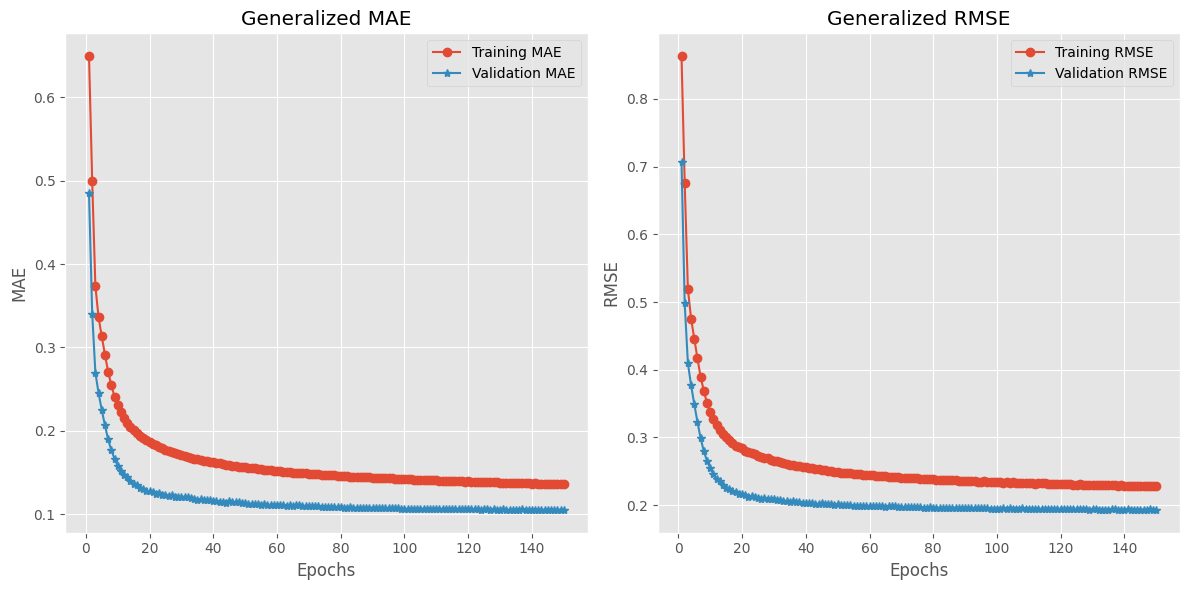

In [13]:
for i in histories_noval_PHs.items():
    print(f"Prediction horizon {i[0]}")
    plot_loss_curves(i[1])
    break

In [44]:
# model_all_train_read =  SharedLayerModelWithAttention(input_shape =input_shape , output_shape=output_shape)
# model_all_train_read.load_state_dict(torch.load('saved_models\model_shared-layer_attention_6.pth'))
# model_all_train_read.to(device)
# model_all_train_read.eval()


In [45]:
# _, _, _, test_loader, _, input_shape_test, _, output_shape_test =  prepare_data_loader(
#                                                                                     window_size,BATCH_SIZE, prediction_horizon = 6,
#                                                                                     model_type = model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = False)


In [ ]:
# outputs_all_batches, targets_all_batches =  model_prediction(model_all_train_read,test_loader, device, model_type)

In [ ]:
# outputs = torch.cat(outputs_all_batches, dim=0)
# targets = torch.cat(targets_all_batches, dim=0)

# outputs = outputs.cpu()
# targets = targets.cpu()
# # Create a mask where arr1 equals 0


In [ ]:
# mask = (targets == 0.0)

# # Set elements to None (or np.nan for float compatibility)
# targets = np.where(mask, None, targets)
# outputs = np.where(mask, None, outputs)

In [43]:
# # index =4
# for index in range(12):
#     patient1_target = [sublist[index] for sublist in targets]
#     patient1_output = [sublist[index]  for sublist in outputs]
#     # patient1_output = outputs_all_batches[index]
#     # patient1_target = targets_all_batches[index]

#     # print(list(abs_patients_errors_PHs[6].values())[index])
#     # print(list(squared_patients_errors_PHs[6].values())[index])

#     plt.figure(figsize=(13,5))
#     plt.plot(patient1_target)
#     plt.plot(patient1_output)
#     plt.show()

In [51]:


# Instantiate the model for 12 tasks
input_shape = (64, 12, 1)  # Example input shape: batch_size, sequence_length, input_channels
output_tasks = 12           # Number of tasks

# Instantiate the model
model = SharedLayerModelWithAttention(input_shape=input_shape, output_shape=(output_tasks,))
model.to(device)
# Count the parameters
total_params = count_parameters(model)
print(f"Total parameters in the model with {output_tasks} tasks: {total_params}")


Total parameters in the model with 12 tasks: 1238668
